# Stage 5: Does it work as expected?

The analysis is done. The results are in. It's time to share with someone else. Do the results look good? And:

* How easy is it for someone else to run my code? 
* How likely are they to get the same results?
* How hard is it for someone else to check that things work as expected?

### Reproducibility Issues

* (MISSING-STATE) Can't reproduce because of some missing state. e.g. cells were run out of sequence. Variable was changed but notebook wasn't rerun.
* (VARIABLE-SCARCITY) A variable name was re-used (possibly as a result of copy/pasting code from elsewhere), setting up cognitive dissonance, or confusing code.
* (ARCH-DIFFERENCE) The same code runs differently on different architectures

### Default Better Principles

Write tests. Use them. Even if only to check that your imports work, Datasets load, and notebooks run to completion.
* **Test running clean notebooks**: We can't say this enough. Always test a clean run of a notebook before checking it in! `Kernel -> Restart & Run All` for the win. Most if not all `MISSING-STATE` and `VARIABLE-SCARCITY` issues would be resolved by this simple workflow step. Automate this to make it even easier. Running analysis steps can be slow. Make the slow ones manual tests, and the quick ones, like this notebook, run in CI. 
* **Test run from a fresh environment**: Blow it away. Start from scratch. See if you have any unaccounted for `MISSING-STATE` hiding in your environment.
* **BONUS-Test on another architecture**: This is where CI is your friend. It's usually easy to run on at least one platform that's different from your own.

## The Easydata Way: `make test`
We recognize that being creative is an integral part of doing data science work and research. We don't want to get in the way of that. In particular, we don't specify how you should do your work in the brainstorming phase (other than recommending that you check-in your work via git whenever something seems to work).

We love test-driven development, but we're agnostic about it's use with your data science workflow. This isn't software engineering, this is data science. However, once you hit the editing phase of your work, once you start to put together something beyond a scattered Sucky First Draft (SFD), it's time to start wearing that SEng hat. And if you care about sharing with your data science neighbours and friends, testing is paramount. 

Let's see what this looks like in our Penguin Example.

## The Penguin Data Analysis

The previous notebook gives us some idea of what the penguins data looks like by giving as all the
2D views of the data. However, the data is 4-dimensional. While four dimensions is low enough that we can sort of reconstruct what the full dimensional data looks like in our heads, it's better if we can reduce the dimension of our data to visualize it. 

Let's try out [UMAP](https://github.com/lmcinnes/umap) as a dimension reduction technique. By reducing the
dimension in a way that preserves as much of the structure of the data
as possible we can get a visualisable representation of the data
allowing us to "see" the data and its structure and begin to get some
intuition about the data itself.

### Default Better Principle: Test run from a fresh environment


In [1]:
import umap

from src.data import Dataset
from src import paths

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2024-03-29 18:59:36,347 - utils - INFO - Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


2024-03-29 18:59:36,348 - utils - INFO - NumExpr defaulting to 8 threads.


2024-03-29 18:59:36,571 - __init__ - DEBUG - matplotlib data path: /opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data


2024-03-29 18:59:36,576 - __init__ - DEBUG - CONFIGDIR=/Users/alex/.matplotlib


2024-03-29 18:59:36,578 - __init__ - DEBUG - interactive is False


2024-03-29 18:59:36,579 - __init__ - DEBUG - platform is darwin


2024-03-29 18:59:36,579 - __init__ - DEBUG - loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_stat', '_collections_abc', 'posixpath', 'genericpath', 'os.path', '_sitebuiltins', '_distutils_hack', 'types', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'functools', '_functools', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'weakref', '_weakrefset', 'ipykernel', 'ipykernel._version', 're', 'enum', 'sre_compile', '_sre', 'sre_parse', 'sre_constants', 'copyreg', '

2024-03-29 18:59:36,761 - __init__ - DEBUG - CACHEDIR=/Users/alex/.matplotlib


2024-03-29 18:59:36,764 - font_manager - DEBUG - Using fontManager instance from /Users/alex/.matplotlib/fontlist-v330.json


2024-03-29 18:59:37,184 - pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.


2024-03-29 18:59:37,187 - pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.


Turns out, we're missing `umap`! 

Please, **DO NOT** run `pip install` or `conda install` to install UMAP from the command line, it will lead to **MISSING-STATE** in your environment when someone else tries to run this work. 

Instead, **your next quest** is to add `umap-learn` to our `environment.yml` file and do a `make update_environment` to make sure it's shared with everyone.

**Hint:** To add [UMAP](https://github.com/lmcinnes/umap), you'll need to update your environment. We recommend installing umap via the conda-forge channel. For example, you can add `my-package` to from `my-conda-channel` via a line like this in your `environment.yml`.
```
- my-conda-channel::my-package
```
In this case:
```
- conda-forge::umap-learn
```
(Again, don't forget to `make update_environment` after adding it!)

## Load up the Datasets we'll use

In [2]:
penguins = Dataset.load("penguins-clean").data
scaled_penguin_data = Dataset.load("penguins-scaled").data

2024-03-29 18:59:37,198 - catalog - DEBUG - Loaded 3 records from 'transformers' Catalog.


2024-03-29 18:59:37,198 - catalog - DEBUG - Verifying serialization for catalog 'transformers'


2024-03-29 18:59:37,200 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2024-03-29 18:59:37,201 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2024-03-29 18:59:37,202 - datasets - DEBUG - Loaded DatasetGraph with 4 nodes and 3 edges.


2024-03-29 18:59:37,203 - datasets - DEBUG - Verifying hashes using Dataset catalog.


2024-03-29 18:59:37,205 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2024-03-29 18:59:37,205 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2024-03-29 18:59:37,207 - datasets - WARNING - check_hashes=True but no hashes in catalog for Dataset:penguins-clean


2024-03-29 18:59:37,208 - datasets - DEBUG - Load penguins-clean from disk...


2024-03-29 18:59:37,210 - datasets - DEBUG - Loaded penguins-clean from disk.


2024-03-29 18:59:37,211 - catalog - DEBUG - Loaded 3 records from 'transformers' Catalog.


2024-03-29 18:59:37,212 - catalog - DEBUG - Verifying serialization for catalog 'transformers'


2024-03-29 18:59:37,214 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2024-03-29 18:59:37,215 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2024-03-29 18:59:37,216 - datasets - DEBUG - Loaded DatasetGraph with 4 nodes and 3 edges.


2024-03-29 18:59:37,217 - datasets - DEBUG - Verifying hashes using Dataset catalog.


2024-03-29 18:59:37,218 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2024-03-29 18:59:37,218 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2024-03-29 18:59:37,220 - datasets - DEBUG - Load penguins-scaled from disk...


2024-03-29 18:59:37,221 - datasets - DEBUG - Loaded penguins-scaled from disk.


UMAP follows the sklearn API and has a method ``fit`` which we
pass the data we want the model to learn from. Since, at the end of the
day, we are going to want to reduced representation of the data we will
use the ``fit_transform`` method which first calls ``fit`` and
then returns the transformed data as a numpy array.

In [3]:
reducer = umap.UMAP()

In [4]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

2024-03-29 18:59:37,241 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=29)
           2	LOAD_CONST(arg=1, lineno=29)
           4	STORE_FAST(arg=2, lineno=29)
           6	SETUP_LOOP(arg=46, lineno=30)
           8	LOAD_GLOBAL(arg=0, lineno=30)
          10	LOAD_FAST(arg=0, lineno=30)
          12	LOAD_ATTR(arg=1, lineno=30)
          14	LOAD_CONST(arg=2, lineno=30)
          16	BINARY_SUBSCR(arg=None, lineno=30)
          18	CALL_FUNCTION(arg=1, lineno=30)
          20	GET_ITER(arg=None, lineno=30)
>         22	FOR_ITER(arg=28, lineno=30)
          24	STORE_FAST(arg=3, lineno=30)
          26	LOAD_FAST(arg=2, lineno=31)
          28	LOAD_FAST(arg=0, lineno=31)
          30	LOAD_FAST(arg=3, lineno=31)
          32	BINARY_SUBSCR(arg=None, lineno=31)
          34	LOAD_FAST(arg=1, lineno=31)
          36	LOAD_FAST(arg=3, lineno=31)
          38	BINARY_SUBSCR(arg=None, lineno=31)
          40	BINARY_SUBTRACT(arg=None, lineno=31)
          42	LOAD_CONST(arg=3, lineno=

2024-03-29 18:59:37,241 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:37,242 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,242 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=29)


2024-03-29 18:59:37,243 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,243 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_CONST(arg=1, lineno=29)


2024-03-29 18:59:37,244 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,244 - byteflow - DEBUG - dispatch pc=4, inst=STORE_FAST(arg=2, lineno=29)


2024-03-29 18:59:37,245 - byteflow - DEBUG - stack ['$const2.0']


2024-03-29 18:59:37,245 - byteflow - DEBUG - end state. edges=[Edge(pc=6, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:37,246 - byteflow - DEBUG - pending: deque([State(pc_initial=6 nstack_initial=0)])


2024-03-29 18:59:37,246 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,247 - byteflow - DEBUG - dispatch pc=6, inst=SETUP_LOOP(arg=46, lineno=30)


2024-03-29 18:59:37,247 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,248 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_GLOBAL(arg=0, lineno=30)


2024-03-29 18:59:37,248 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,249 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_FAST(arg=0, lineno=30)


2024-03-29 18:59:37,249 - byteflow - DEBUG - stack ['$8load_global.0']


2024-03-29 18:59:37,250 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_ATTR(arg=1, lineno=30)


2024-03-29 18:59:37,250 - byteflow - DEBUG - stack ['$8load_global.0', '$x10.1']


2024-03-29 18:59:37,250 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=2, lineno=30)


2024-03-29 18:59:37,251 - byteflow - DEBUG - stack ['$8load_global.0', '$12load_attr.2']


2024-03-29 18:59:37,251 - byteflow - DEBUG - dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=30)


2024-03-29 18:59:37,252 - byteflow - DEBUG - stack ['$8load_global.0', '$12load_attr.2', '$const14.3']


2024-03-29 18:59:37,252 - byteflow - DEBUG - dispatch pc=18, inst=CALL_FUNCTION(arg=1, lineno=30)


2024-03-29 18:59:37,252 - byteflow - DEBUG - stack ['$8load_global.0', '$16binary_subscr.4']


2024-03-29 18:59:37,253 - byteflow - DEBUG - dispatch pc=20, inst=GET_ITER(arg=None, lineno=30)


2024-03-29 18:59:37,253 - byteflow - DEBUG - stack ['$18call_function.5']


2024-03-29 18:59:37,254 - byteflow - DEBUG - end state. edges=[Edge(pc=22, stack=('$20get_iter.6',), blockstack=({'kind': BlockKind(LOOP), 'end': 54, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:37,254 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=1)])


2024-03-29 18:59:37,254 - byteflow - DEBUG - stack: ['$phi22.0']


2024-03-29 18:59:37,255 - byteflow - DEBUG - dispatch pc=22, inst=FOR_ITER(arg=28, lineno=30)


2024-03-29 18:59:37,255 - byteflow - DEBUG - stack ['$phi22.0']


2024-03-29 18:59:37,256 - byteflow - DEBUG - end state. edges=[Edge(pc=52, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 54, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=24, stack=('$phi22.0', '$22for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 54, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:37,256 - byteflow - DEBUG - pending: deque([State(pc_initial=52 nstack_initial=0), State(pc_initial=24 nstack_initial=2)])


2024-03-29 18:59:37,256 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,257 - byteflow - DEBUG - dispatch pc=52, inst=POP_BLOCK(arg=None, lineno=31)


2024-03-29 18:59:37,257 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,258 - byteflow - DEBUG - end state. edges=[Edge(pc=54, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:37,258 - byteflow - DEBUG - pending: deque([State(pc_initial=24 nstack_initial=2), State(pc_initial=54 nstack_initial=0)])


2024-03-29 18:59:37,258 - byteflow - DEBUG - stack: ['$phi24.0', '$phi24.1']


2024-03-29 18:59:37,259 - byteflow - DEBUG - dispatch pc=24, inst=STORE_FAST(arg=3, lineno=30)


2024-03-29 18:59:37,259 - byteflow - DEBUG - stack ['$phi24.0', '$phi24.1']


2024-03-29 18:59:37,260 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_FAST(arg=2, lineno=31)


2024-03-29 18:59:37,260 - byteflow - DEBUG - stack ['$phi24.0']


2024-03-29 18:59:37,260 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_FAST(arg=0, lineno=31)


2024-03-29 18:59:37,261 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2']


2024-03-29 18:59:37,261 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_FAST(arg=3, lineno=31)


2024-03-29 18:59:37,261 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$x28.3']


2024-03-29 18:59:37,262 - byteflow - DEBUG - dispatch pc=32, inst=BINARY_SUBSCR(arg=None, lineno=31)


2024-03-29 18:59:37,262 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$x28.3', '$i30.4']


2024-03-29 18:59:37,262 - byteflow - DEBUG - dispatch pc=34, inst=LOAD_FAST(arg=1, lineno=31)


2024-03-29 18:59:37,263 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$32binary_subscr.5']


2024-03-29 18:59:37,264 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_FAST(arg=3, lineno=31)


2024-03-29 18:59:37,264 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$32binary_subscr.5', '$y34.6']


2024-03-29 18:59:37,265 - byteflow - DEBUG - dispatch pc=38, inst=BINARY_SUBSCR(arg=None, lineno=31)


2024-03-29 18:59:37,265 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$32binary_subscr.5', '$y34.6', '$i36.7']


2024-03-29 18:59:37,266 - byteflow - DEBUG - dispatch pc=40, inst=BINARY_SUBTRACT(arg=None, lineno=31)


2024-03-29 18:59:37,266 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$32binary_subscr.5', '$38binary_subscr.8']


2024-03-29 18:59:37,266 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_CONST(arg=3, lineno=31)


2024-03-29 18:59:37,267 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$40binary_subtract.9']


2024-03-29 18:59:37,267 - byteflow - DEBUG - dispatch pc=44, inst=BINARY_POWER(arg=None, lineno=31)


2024-03-29 18:59:37,268 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$40binary_subtract.9', '$const42.10']


2024-03-29 18:59:37,268 - byteflow - DEBUG - dispatch pc=46, inst=INPLACE_ADD(arg=None, lineno=31)


2024-03-29 18:59:37,268 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$44binary_power.11']


2024-03-29 18:59:37,269 - byteflow - DEBUG - dispatch pc=48, inst=STORE_FAST(arg=2, lineno=31)


2024-03-29 18:59:37,269 - byteflow - DEBUG - stack ['$phi24.0', '$46inplace_add.12']


2024-03-29 18:59:37,270 - byteflow - DEBUG - dispatch pc=50, inst=JUMP_ABSOLUTE(arg=22, lineno=31)


2024-03-29 18:59:37,270 - byteflow - DEBUG - stack ['$phi24.0']


2024-03-29 18:59:37,270 - byteflow - DEBUG - end state. edges=[Edge(pc=22, stack=('$phi24.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 54, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:37,271 - byteflow - DEBUG - pending: deque([State(pc_initial=54 nstack_initial=0), State(pc_initial=22 nstack_initial=1)])


2024-03-29 18:59:37,271 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,271 - byteflow - DEBUG - dispatch pc=54, inst=LOAD_GLOBAL(arg=2, lineno=32)


2024-03-29 18:59:37,272 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,272 - byteflow - DEBUG - dispatch pc=56, inst=LOAD_METHOD(arg=3, lineno=32)


2024-03-29 18:59:37,273 - byteflow - DEBUG - stack ['$54load_global.0']


2024-03-29 18:59:37,273 - byteflow - DEBUG - dispatch pc=58, inst=LOAD_FAST(arg=2, lineno=32)


2024-03-29 18:59:37,273 - byteflow - DEBUG - stack ['$56load_method.1']


2024-03-29 18:59:37,274 - byteflow - DEBUG - dispatch pc=60, inst=CALL_METHOD(arg=1, lineno=32)


2024-03-29 18:59:37,274 - byteflow - DEBUG - stack ['$56load_method.1', '$result58.2']


2024-03-29 18:59:37,274 - byteflow - DEBUG - dispatch pc=62, inst=RETURN_VALUE(arg=None, lineno=32)


2024-03-29 18:59:37,275 - byteflow - DEBUG - stack ['$60call_method.3']


2024-03-29 18:59:37,275 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:37,276 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=1)])


2024-03-29 18:59:37,276 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:37,277 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=6 nstack_initial=0): set(),
             State(pc_initial=22 nstack_initial=1): {'$phi22.0'},
             State(pc_initial=24 nstack_initial=2): {'$phi24.1'},
             State(pc_initial=52 nstack_initial=0): set(),
             State(pc_initial=54 nstack_initial=0): set()})


2024-03-29 18:59:37,277 - byteflow - DEBUG - defmap: {'$phi22.0': State(pc_initial=6 nstack_initial=0),
 '$phi24.1': State(pc_initial=22 nstack_initial=1)}


2024-03-29 18:59:37,278 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.6',
                           State(pc_initial=6 nstack_initial=0)),
                          ('$phi24.0', State(pc_initial=24 nstack_initial=2))},
             '$phi24.0': {('$phi22.0', State(pc_initial=22 nstack_initial=1))},
             '$phi24.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))}})


2024-03-29 18:59:37,278 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.6',
                           State(pc_initial=6 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=1))},
             '$phi24.0': {('$20get_iter.6',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi24.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))}})


2024-03-29 18:59:37,279 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.6',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi24.0': {('$20get_iter.6',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi24.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))}})


2024-03-29 18:59:37,279 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.6',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi24.0': {('$20get_iter.6',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi24.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))}})


2024-03-29 18:59:37,280 - byteflow - DEBUG - keep phismap: {'$phi22.0': {('$20get_iter.6', State(pc_initial=6 nstack_initial=0))},
 '$phi24.1': {('$22for_iter.2', State(pc_initial=22 nstack_initial=1))}}


2024-03-29 18:59:37,281 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=6 nstack_initial=0): {'$phi22.0': '$20get_iter.6'},
             State(pc_initial=22 nstack_initial=1): {'$phi24.1': '$22for_iter.2'}})


2024-03-29 18:59:37,282 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:37,282 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$const2.0'}), (4, {'value': '$const2.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={6: ()})


2024-03-29 18:59:37,283 - byteflow - DEBUG - block_infos State(pc_initial=6 nstack_initial=0):
AdaptBlockInfo(insts=((8, {'res': '$8load_global.0'}), (10, {'res': '$x10.1'}), (12, {'item': '$x10.1', 'res': '$12load_attr.2'}), (14, {'res': '$const14.3'}), (16, {'index': '$const14.3', 'target': '$12load_attr.2', 'res': '$16binary_subscr.4'}), (18, {'func': '$8load_global.0', 'args': ['$16binary_subscr.4'], 'res': '$18call_function.5'}), (20, {'value': '$18call_function.5', 'res': '$20get_iter.6'})), outgoing_phis={'$phi22.0': '$20get_iter.6'}, blockstack=(), active_try_block=None, outgoing_edgepushed={22: ('$20get_iter.6',)})


2024-03-29 18:59:37,283 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=1):
AdaptBlockInfo(insts=((22, {'iterator': '$phi22.0', 'pair': '$22for_iter.1', 'indval': '$22for_iter.2', 'pred': '$22for_iter.3'}),), outgoing_phis={'$phi24.1': '$22for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 54, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={52: (), 24: ('$phi22.0', '$22for_iter.2')})


2024-03-29 18:59:37,284 - byteflow - DEBUG - block_infos State(pc_initial=24 nstack_initial=2):
AdaptBlockInfo(insts=((24, {'value': '$phi24.1'}), (26, {'res': '$result26.2'}), (28, {'res': '$x28.3'}), (30, {'res': '$i30.4'}), (32, {'index': '$i30.4', 'target': '$x28.3', 'res': '$32binary_subscr.5'}), (34, {'res': '$y34.6'}), (36, {'res': '$i36.7'}), (38, {'index': '$i36.7', 'target': '$y34.6', 'res': '$38binary_subscr.8'}), (40, {'lhs': '$32binary_subscr.5', 'rhs': '$38binary_subscr.8', 'res': '$40binary_subtract.9'}), (42, {'res': '$const42.10'}), (44, {'lhs': '$40binary_subtract.9', 'rhs': '$const42.10', 'res': '$44binary_power.11'}), (46, {'lhs': '$result26.2', 'rhs': '$44binary_power.11', 'res': '$46inplace_add.12'}), (48, {'value': '$46inplace_add.12'}), (50, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 54, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={22: ('$phi24.0',)})


2024-03-29 18:59:37,284 - byteflow - DEBUG - block_infos State(pc_initial=52 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 54, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={54: ()})


2024-03-29 18:59:37,285 - byteflow - DEBUG - block_infos State(pc_initial=54 nstack_initial=0):
AdaptBlockInfo(insts=((54, {'res': '$54load_global.0'}), (56, {'item': '$54load_global.0', 'res': '$56load_method.1'}), (58, {'res': '$result58.2'}), (60, {'func': '$56load_method.1', 'args': ['$result58.2'], 'res': '$60call_method.3'}), (62, {'retval': '$60call_method.3', 'castval': '$62return_value.4'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:37,286 - interpreter - DEBUG - label 0:
    x = arg(0, name=x)                       ['x']
    y = arg(1, name=y)                       ['y']
    result = const(float, 0.0)               ['result']
    jump 6                                   []
label 6:
    $8load_global.0 = global(range: <class 'range'>) ['$8load_global.0']
    $12load_attr.2 = getattr(value=x, attr=shape) ['$12load_attr.2', 'x']
    $const14.3 = const(int, 0)               ['$const14.3']
    $16binary_subscr.4 = getitem(value=$12load_attr.2, index=$const14.3, fn=<built-in function getitem>) ['$12load_attr.2', '$16binary_subscr.4', '$const14.3']
    $18call_function.5 = call $8load_global.0($16binary_subscr.4, func=$8load_global.0, args=[Var($16binary_subscr.4, distances.py:30)], kws=(), vararg=None, varkwarg=None, target=None) ['$16binary_subscr.4', '$18call_function.5', '$8load_global.0']
    $20get_iter.6 = getiter(value=$18call_function.5) ['$18call_function.5', '$20get_iter.6']
    $phi22.0 = $2

2024-03-29 18:59:37,296 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:37,297 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef145e7cd0>


2024-03-29 18:59:37,298 - ssa - DEBUG - on stmt: x = arg(0, name=x)


2024-03-29 18:59:37,299 - ssa - DEBUG - on stmt: y = arg(1, name=y)


2024-03-29 18:59:37,299 - ssa - DEBUG - on stmt: result = const(float, 0.0)


2024-03-29 18:59:37,300 - ssa - DEBUG - on stmt: jump 6


2024-03-29 18:59:37,300 - ssa - DEBUG - ==== SSA block analysis pass on 6


2024-03-29 18:59:37,301 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef145e7cd0>


2024-03-29 18:59:37,301 - ssa - DEBUG - on stmt: $8load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:37,302 - ssa - DEBUG - on stmt: $12load_attr.2 = getattr(value=x, attr=shape)


2024-03-29 18:59:37,302 - ssa - DEBUG - on stmt: $const14.3 = const(int, 0)


2024-03-29 18:59:37,302 - ssa - DEBUG - on stmt: $16binary_subscr.4 = static_getitem(value=$12load_attr.2, index=0, index_var=$const14.3, fn=<built-in function getitem>)


2024-03-29 18:59:37,303 - ssa - DEBUG - on stmt: $18call_function.5 = call $8load_global.0($16binary_subscr.4, func=$8load_global.0, args=[Var($16binary_subscr.4, distances.py:30)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,303 - ssa - DEBUG - on stmt: $20get_iter.6 = getiter(value=$18call_function.5)


2024-03-29 18:59:37,304 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.6


2024-03-29 18:59:37,304 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:37,305 - ssa - DEBUG - ==== SSA block analysis pass on 22


2024-03-29 18:59:37,305 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef145e7cd0>


2024-03-29 18:59:37,306 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2024-03-29 18:59:37,306 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2024-03-29 18:59:37,306 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2024-03-29 18:59:37,307 - ssa - DEBUG - on stmt: $phi24.1 = $22for_iter.2


2024-03-29 18:59:37,307 - ssa - DEBUG - on stmt: branch $22for_iter.3, 24, 52


2024-03-29 18:59:37,308 - ssa - DEBUG - ==== SSA block analysis pass on 24


2024-03-29 18:59:37,308 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef145e7cd0>


2024-03-29 18:59:37,309 - ssa - DEBUG - on stmt: i = $phi24.1


2024-03-29 18:59:37,309 - ssa - DEBUG - on stmt: $32binary_subscr.5 = getitem(value=x, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:37,309 - ssa - DEBUG - on stmt: $38binary_subscr.8 = getitem(value=y, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:37,310 - ssa - DEBUG - on stmt: $40binary_subtract.9 = $32binary_subscr.5 - $38binary_subscr.8


2024-03-29 18:59:37,310 - ssa - DEBUG - on stmt: $const42.10 = const(int, 2)


2024-03-29 18:59:37,310 - ssa - DEBUG - on stmt: $44binary_power.11 = $40binary_subtract.9 ** $const42.10


2024-03-29 18:59:37,311 - ssa - DEBUG - on stmt: $46inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=result, rhs=$44binary_power.11, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,311 - ssa - DEBUG - on stmt: result = $46inplace_add.12


2024-03-29 18:59:37,312 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:37,312 - ssa - DEBUG - ==== SSA block analysis pass on 52


2024-03-29 18:59:37,312 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef145e7cd0>


2024-03-29 18:59:37,313 - ssa - DEBUG - on stmt: jump 54


2024-03-29 18:59:37,313 - ssa - DEBUG - ==== SSA block analysis pass on 54


2024-03-29 18:59:37,313 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef145e7cd0>


2024-03-29 18:59:37,314 - ssa - DEBUG - on stmt: $54load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:37,314 - ssa - DEBUG - on stmt: $56load_method.1 = getattr(value=$54load_global.0, attr=sqrt)


2024-03-29 18:59:37,315 - ssa - DEBUG - on stmt: $60call_method.3 = call $56load_method.1(result, func=$56load_method.1, args=[Var(result, distances.py:29)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,315 - ssa - DEBUG - on stmt: $62return_value.4 = cast(value=$60call_method.3)


2024-03-29 18:59:37,316 - ssa - DEBUG - on stmt: return $62return_value.4


2024-03-29 18:59:37,317 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$12load_attr.2': [<numba.core.ir.Assign object at 0x7fef13f4a690>],
             '$16binary_subscr.4': [<numba.core.ir.Assign object at 0x7fef145e7910>],
             '$18call_function.5': [<numba.core.ir.Assign object at 0x7fef13ed1850>],
             '$20get_iter.6': [<numba.core.ir.Assign object at 0x7fef13b16410>],
             '$22for_iter.1': [<numba.core.ir.Assign object at 0x7fef13d55b50>],
             '$22for_iter.2': [<numba.core.ir.Assign object at 0x7fef13d4ee90>],
             '$22for_iter.3': [<numba.core.ir.Assign object at 0x7fef2795d3d0>],
             '$32binary_subscr.5': [<numba.core.ir.Assign object at 0x7fef2b030690>],
             '$38binary_subscr.8': [<numba.core.ir.Assign object at 0x7fef2b030a90>],
             '$40binary_subtract.9': [<numba.core.ir.Assign object at 0x7fef2b030c50>],
             '$44binary_power.11': [<numba.core.ir.Assign object at 0x7fef13d42410>],
   

2024-03-29 18:59:37,317 - ssa - DEBUG - SSA violators {'result'}


2024-03-29 18:59:37,318 - ssa - DEBUG - Fix SSA violator on var result


2024-03-29 18:59:37,318 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:37,318 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef13ed4f10>


2024-03-29 18:59:37,319 - ssa - DEBUG - on stmt: x = arg(0, name=x)


2024-03-29 18:59:37,319 - ssa - DEBUG - on stmt: y = arg(1, name=y)


2024-03-29 18:59:37,319 - ssa - DEBUG - on stmt: result = const(float, 0.0)


2024-03-29 18:59:37,320 - ssa - DEBUG - first assign: result


2024-03-29 18:59:37,320 - ssa - DEBUG - replaced with: result = const(float, 0.0)


2024-03-29 18:59:37,320 - ssa - DEBUG - on stmt: jump 6


2024-03-29 18:59:37,321 - ssa - DEBUG - ==== SSA block rewrite pass on 6


2024-03-29 18:59:37,321 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef13ed4f10>


2024-03-29 18:59:37,322 - ssa - DEBUG - on stmt: $8load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:37,322 - ssa - DEBUG - on stmt: $12load_attr.2 = getattr(value=x, attr=shape)


2024-03-29 18:59:37,322 - ssa - DEBUG - on stmt: $const14.3 = const(int, 0)


2024-03-29 18:59:37,323 - ssa - DEBUG - on stmt: $16binary_subscr.4 = static_getitem(value=$12load_attr.2, index=0, index_var=$const14.3, fn=<built-in function getitem>)


2024-03-29 18:59:37,323 - ssa - DEBUG - on stmt: $18call_function.5 = call $8load_global.0($16binary_subscr.4, func=$8load_global.0, args=[Var($16binary_subscr.4, distances.py:30)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,323 - ssa - DEBUG - on stmt: $20get_iter.6 = getiter(value=$18call_function.5)


2024-03-29 18:59:37,324 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.6


2024-03-29 18:59:37,324 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:37,325 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:37,325 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef13ed4f10>


2024-03-29 18:59:37,325 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2024-03-29 18:59:37,326 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2024-03-29 18:59:37,326 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2024-03-29 18:59:37,326 - ssa - DEBUG - on stmt: $phi24.1 = $22for_iter.2


2024-03-29 18:59:37,327 - ssa - DEBUG - on stmt: branch $22for_iter.3, 24, 52


2024-03-29 18:59:37,327 - ssa - DEBUG - ==== SSA block rewrite pass on 24


2024-03-29 18:59:37,328 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef13ed4f10>


2024-03-29 18:59:37,328 - ssa - DEBUG - on stmt: i = $phi24.1


2024-03-29 18:59:37,328 - ssa - DEBUG - on stmt: $32binary_subscr.5 = getitem(value=x, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:37,329 - ssa - DEBUG - on stmt: $38binary_subscr.8 = getitem(value=y, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:37,329 - ssa - DEBUG - on stmt: $40binary_subtract.9 = $32binary_subscr.5 - $38binary_subscr.8


2024-03-29 18:59:37,329 - ssa - DEBUG - on stmt: $const42.10 = const(int, 2)


2024-03-29 18:59:37,330 - ssa - DEBUG - on stmt: $44binary_power.11 = $40binary_subtract.9 ** $const42.10


2024-03-29 18:59:37,331 - ssa - DEBUG - on stmt: $46inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=result, rhs=$44binary_power.11, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,331 - ssa - DEBUG - on stmt: result = $46inplace_add.12


2024-03-29 18:59:37,332 - ssa - DEBUG - replaced with: result.1 = $46inplace_add.12


2024-03-29 18:59:37,333 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:37,333 - ssa - DEBUG - ==== SSA block rewrite pass on 52


2024-03-29 18:59:37,333 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef13ed4f10>


2024-03-29 18:59:37,334 - ssa - DEBUG - on stmt: jump 54


2024-03-29 18:59:37,334 - ssa - DEBUG - ==== SSA block rewrite pass on 54


2024-03-29 18:59:37,334 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef13ed4f10>


2024-03-29 18:59:37,335 - ssa - DEBUG - on stmt: $54load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:37,335 - ssa - DEBUG - on stmt: $56load_method.1 = getattr(value=$54load_global.0, attr=sqrt)


2024-03-29 18:59:37,335 - ssa - DEBUG - on stmt: $60call_method.3 = call $56load_method.1(result, func=$56load_method.1, args=[Var(result, distances.py:29)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,336 - ssa - DEBUG - on stmt: $62return_value.4 = cast(value=$60call_method.3)


2024-03-29 18:59:37,336 - ssa - DEBUG - on stmt: return $62return_value.4


2024-03-29 18:59:37,337 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x7fef141aef90>],
             24: [<numba.core.ir.Assign object at 0x7fef145e7ad0>]})


2024-03-29 18:59:37,337 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:37,337 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13ed4f10>


2024-03-29 18:59:37,338 - ssa - DEBUG - on stmt: x = arg(0, name=x)


2024-03-29 18:59:37,338 - ssa - DEBUG - on stmt: y = arg(1, name=y)


2024-03-29 18:59:37,339 - ssa - DEBUG - on stmt: result = const(float, 0.0)


2024-03-29 18:59:37,339 - ssa - DEBUG - on stmt: jump 6


2024-03-29 18:59:37,339 - ssa - DEBUG - ==== SSA block rewrite pass on 6


2024-03-29 18:59:37,340 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13ed4f10>


2024-03-29 18:59:37,340 - ssa - DEBUG - on stmt: $8load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:37,340 - ssa - DEBUG - on stmt: $12load_attr.2 = getattr(value=x, attr=shape)


2024-03-29 18:59:37,341 - ssa - DEBUG - on stmt: $const14.3 = const(int, 0)


2024-03-29 18:59:37,341 - ssa - DEBUG - on stmt: $16binary_subscr.4 = static_getitem(value=$12load_attr.2, index=0, index_var=$const14.3, fn=<built-in function getitem>)


2024-03-29 18:59:37,342 - ssa - DEBUG - on stmt: $18call_function.5 = call $8load_global.0($16binary_subscr.4, func=$8load_global.0, args=[Var($16binary_subscr.4, distances.py:30)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,342 - ssa - DEBUG - on stmt: $20get_iter.6 = getiter(value=$18call_function.5)


2024-03-29 18:59:37,342 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.6


2024-03-29 18:59:37,343 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:37,343 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:37,343 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13ed4f10>


2024-03-29 18:59:37,344 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2024-03-29 18:59:37,344 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2024-03-29 18:59:37,345 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2024-03-29 18:59:37,345 - ssa - DEBUG - on stmt: $phi24.1 = $22for_iter.2


2024-03-29 18:59:37,345 - ssa - DEBUG - on stmt: branch $22for_iter.3, 24, 52


2024-03-29 18:59:37,346 - ssa - DEBUG - ==== SSA block rewrite pass on 24


2024-03-29 18:59:37,346 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13ed4f10>


2024-03-29 18:59:37,347 - ssa - DEBUG - on stmt: i = $phi24.1


2024-03-29 18:59:37,347 - ssa - DEBUG - on stmt: $32binary_subscr.5 = getitem(value=x, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:37,348 - ssa - DEBUG - on stmt: $38binary_subscr.8 = getitem(value=y, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:37,348 - ssa - DEBUG - on stmt: $40binary_subtract.9 = $32binary_subscr.5 - $38binary_subscr.8


2024-03-29 18:59:37,349 - ssa - DEBUG - on stmt: $const42.10 = const(int, 2)


2024-03-29 18:59:37,349 - ssa - DEBUG - on stmt: $44binary_power.11 = $40binary_subtract.9 ** $const42.10


2024-03-29 18:59:37,350 - ssa - DEBUG - on stmt: $46inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=result, rhs=$44binary_power.11, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,350 - ssa - DEBUG - find_def var='result' stmt=$46inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=result, rhs=$44binary_power.11, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,351 - ssa - DEBUG - find_def_from_top label 24


2024-03-29 18:59:37,351 - ssa - DEBUG - idom 22 from label 24


2024-03-29 18:59:37,351 - ssa - DEBUG - find_def_from_bottom label 22


2024-03-29 18:59:37,352 - ssa - DEBUG - find_def_from_top label 22


2024-03-29 18:59:37,352 - ssa - DEBUG - insert phi node result.2 = phi(incoming_values=[], incoming_blocks=[]) at 22


2024-03-29 18:59:37,352 - ssa - DEBUG - find_def_from_bottom label 24


2024-03-29 18:59:37,353 - ssa - DEBUG - incoming_def result.1 = $46inplace_add.12


2024-03-29 18:59:37,353 - ssa - DEBUG - find_def_from_bottom label 6


2024-03-29 18:59:37,354 - ssa - DEBUG - find_def_from_top label 6


2024-03-29 18:59:37,354 - ssa - DEBUG - idom 0 from label 6


2024-03-29 18:59:37,354 - ssa - DEBUG - find_def_from_bottom label 0


2024-03-29 18:59:37,355 - ssa - DEBUG - incoming_def result = const(float, 0.0)


2024-03-29 18:59:37,355 - ssa - DEBUG - replaced with: $46inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=result.2, rhs=$44binary_power.11, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,355 - ssa - DEBUG - on stmt: result.1 = $46inplace_add.12


2024-03-29 18:59:37,356 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:37,356 - ssa - DEBUG - ==== SSA block rewrite pass on 52


2024-03-29 18:59:37,357 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13ed4f10>


2024-03-29 18:59:37,357 - ssa - DEBUG - on stmt: jump 54


2024-03-29 18:59:37,357 - ssa - DEBUG - ==== SSA block rewrite pass on 54


2024-03-29 18:59:37,358 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13ed4f10>


2024-03-29 18:59:37,358 - ssa - DEBUG - on stmt: $54load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:37,358 - ssa - DEBUG - on stmt: $56load_method.1 = getattr(value=$54load_global.0, attr=sqrt)


2024-03-29 18:59:37,359 - ssa - DEBUG - on stmt: $60call_method.3 = call $56load_method.1(result, func=$56load_method.1, args=[Var(result, distances.py:29)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,359 - ssa - DEBUG - find_def var='result' stmt=$60call_method.3 = call $56load_method.1(result, func=$56load_method.1, args=[Var(result, distances.py:29)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,360 - ssa - DEBUG - find_def_from_top label 54


2024-03-29 18:59:37,360 - ssa - DEBUG - idom 52 from label 54


2024-03-29 18:59:37,360 - ssa - DEBUG - find_def_from_bottom label 52


2024-03-29 18:59:37,361 - ssa - DEBUG - find_def_from_top label 52


2024-03-29 18:59:37,361 - ssa - DEBUG - idom 22 from label 52


2024-03-29 18:59:37,362 - ssa - DEBUG - find_def_from_bottom label 22


2024-03-29 18:59:37,362 - ssa - DEBUG - replaced with: $60call_method.3 = call $56load_method.1(result.2, func=$56load_method.1, args=[Var(result.2, distances.py:30)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,362 - ssa - DEBUG - on stmt: $62return_value.4 = cast(value=$60call_method.3)


2024-03-29 18:59:37,363 - ssa - DEBUG - on stmt: return $62return_value.4


2024-03-29 18:59:37,391 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=216)
           2	LOAD_DEREF(arg=1, lineno=216)
           4	LOAD_CONST(arg=1, lineno=216)
           6	CALL_FUNCTION(arg=1, lineno=216)
           8	STORE_FAST(arg=2, lineno=216)
          10	LOAD_DEREF(arg=1, lineno=217)
          12	LOAD_FAST(arg=0, lineno=217)
          14	CALL_FUNCTION(arg=1, lineno=217)
          16	STORE_FAST(arg=0, lineno=217)
          18	LOAD_FAST(arg=1, lineno=218)
          20	LOAD_CONST(arg=2, lineno=218)
          22	COMPARE_OP(arg=0, lineno=218)
          24	POP_JUMP_IF_FALSE(arg=98, lineno=218)
          26	LOAD_CONST(arg=3, lineno=219)
          28	STORE_FAST(arg=3, lineno=219)
          30	LOAD_FAST(arg=1, lineno=220)
          32	UNARY_NEGATIVE(arg=None, lineno=220)
          34	STORE_FAST(arg=4, lineno=220)
          36	LOAD_FAST(arg=4, lineno=221)
          38	LOAD_CONST(arg=2, lineno=221)
          40	COMPARE_OP(arg=0, lineno=221)
          42	POP_JUMP_IF

2024-03-29 18:59:37,392 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:37,392 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,393 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=216)


2024-03-29 18:59:37,393 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,394 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_DEREF(arg=1, lineno=216)


2024-03-29 18:59:37,394 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,395 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=216)


2024-03-29 18:59:37,395 - byteflow - DEBUG - stack ['$2load_deref.0']


2024-03-29 18:59:37,395 - byteflow - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=216)


2024-03-29 18:59:37,396 - byteflow - DEBUG - stack ['$2load_deref.0', '$const4.1']


2024-03-29 18:59:37,397 - byteflow - DEBUG - dispatch pc=8, inst=STORE_FAST(arg=2, lineno=216)


2024-03-29 18:59:37,397 - byteflow - DEBUG - stack ['$6call_function.2']


2024-03-29 18:59:37,398 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_DEREF(arg=1, lineno=217)


2024-03-29 18:59:37,399 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,399 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=217)


2024-03-29 18:59:37,400 - byteflow - DEBUG - stack ['$10load_deref.3']


2024-03-29 18:59:37,400 - byteflow - DEBUG - dispatch pc=14, inst=CALL_FUNCTION(arg=1, lineno=217)


2024-03-29 18:59:37,401 - byteflow - DEBUG - stack ['$10load_deref.3', '$a12.4']


2024-03-29 18:59:37,401 - byteflow - DEBUG - dispatch pc=16, inst=STORE_FAST(arg=0, lineno=217)


2024-03-29 18:59:37,402 - byteflow - DEBUG - stack ['$14call_function.5']


2024-03-29 18:59:37,402 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_FAST(arg=1, lineno=218)


2024-03-29 18:59:37,402 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,403 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_CONST(arg=2, lineno=218)


2024-03-29 18:59:37,403 - byteflow - DEBUG - stack ['$b18.6']


2024-03-29 18:59:37,404 - byteflow - DEBUG - dispatch pc=22, inst=COMPARE_OP(arg=0, lineno=218)


2024-03-29 18:59:37,404 - byteflow - DEBUG - stack ['$b18.6', '$const20.7']


2024-03-29 18:59:37,404 - byteflow - DEBUG - dispatch pc=24, inst=POP_JUMP_IF_FALSE(arg=98, lineno=218)


2024-03-29 18:59:37,405 - byteflow - DEBUG - stack ['$22compare_op.8']


2024-03-29 18:59:37,405 - byteflow - DEBUG - end state. edges=[Edge(pc=26, stack=(), blockstack=(), npush=0), Edge(pc=98, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:37,405 - byteflow - DEBUG - pending: deque([State(pc_initial=26 nstack_initial=0), State(pc_initial=98 nstack_initial=0)])


2024-03-29 18:59:37,406 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,406 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_CONST(arg=3, lineno=219)


2024-03-29 18:59:37,407 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,407 - byteflow - DEBUG - dispatch pc=28, inst=STORE_FAST(arg=3, lineno=219)


2024-03-29 18:59:37,407 - byteflow - DEBUG - stack ['$const26.0']


2024-03-29 18:59:37,408 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_FAST(arg=1, lineno=220)


2024-03-29 18:59:37,408 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,408 - byteflow - DEBUG - dispatch pc=32, inst=UNARY_NEGATIVE(arg=None, lineno=220)


2024-03-29 18:59:37,409 - byteflow - DEBUG - stack ['$b30.1']


2024-03-29 18:59:37,409 - byteflow - DEBUG - dispatch pc=34, inst=STORE_FAST(arg=4, lineno=220)


2024-03-29 18:59:37,410 - byteflow - DEBUG - stack ['$32unary_negative.2']


2024-03-29 18:59:37,410 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_FAST(arg=4, lineno=221)


2024-03-29 18:59:37,411 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,411 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_CONST(arg=2, lineno=221)


2024-03-29 18:59:37,411 - byteflow - DEBUG - stack ['$exp36.3']


2024-03-29 18:59:37,412 - byteflow - DEBUG - dispatch pc=40, inst=COMPARE_OP(arg=0, lineno=221)


2024-03-29 18:59:37,412 - byteflow - DEBUG - stack ['$exp36.3', '$const38.4']


2024-03-29 18:59:37,412 - byteflow - DEBUG - dispatch pc=42, inst=POP_JUMP_IF_FALSE(arg=48, lineno=221)


2024-03-29 18:59:37,413 - byteflow - DEBUG - stack ['$40compare_op.5']


2024-03-29 18:59:37,413 - byteflow - DEBUG - end state. edges=[Edge(pc=44, stack=(), blockstack=(), npush=0), Edge(pc=48, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:37,414 - byteflow - DEBUG - pending: deque([State(pc_initial=98 nstack_initial=0), State(pc_initial=44 nstack_initial=0), State(pc_initial=48 nstack_initial=0)])


2024-03-29 18:59:37,414 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,415 - byteflow - DEBUG - dispatch pc=98, inst=LOAD_CONST(arg=6, lineno=232)


2024-03-29 18:59:37,416 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,416 - byteflow - DEBUG - dispatch pc=100, inst=STORE_FAST(arg=3, lineno=232)


2024-03-29 18:59:37,417 - byteflow - DEBUG - stack ['$const98.0']


2024-03-29 18:59:37,417 - byteflow - DEBUG - dispatch pc=102, inst=LOAD_FAST(arg=1, lineno=233)


2024-03-29 18:59:37,418 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,418 - byteflow - DEBUG - dispatch pc=104, inst=STORE_FAST(arg=4, lineno=233)


2024-03-29 18:59:37,418 - byteflow - DEBUG - stack ['$b102.1']


2024-03-29 18:59:37,419 - byteflow - DEBUG - end state. edges=[Edge(pc=106, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:37,419 - byteflow - DEBUG - pending: deque([State(pc_initial=44 nstack_initial=0), State(pc_initial=48 nstack_initial=0), State(pc_initial=106 nstack_initial=0)])


2024-03-29 18:59:37,420 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,420 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_GLOBAL(arg=0, lineno=222)


2024-03-29 18:59:37,420 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,421 - byteflow - DEBUG - dispatch pc=46, inst=RAISE_VARARGS(arg=1, lineno=222)


2024-03-29 18:59:37,421 - byteflow - DEBUG - stack ['$44load_global.0']


2024-03-29 18:59:37,421 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:37,422 - byteflow - DEBUG - pending: deque([State(pc_initial=48 nstack_initial=0), State(pc_initial=106 nstack_initial=0)])


2024-03-29 18:59:37,422 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,423 - byteflow - DEBUG - dispatch pc=48, inst=LOAD_DEREF(arg=0, lineno=223)


2024-03-29 18:59:37,423 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,424 - byteflow - DEBUG - dispatch pc=50, inst=POP_JUMP_IF_FALSE(arg=106, lineno=223)


2024-03-29 18:59:37,424 - byteflow - DEBUG - stack ['$48load_deref.0']


2024-03-29 18:59:37,424 - byteflow - DEBUG - end state. edges=[Edge(pc=52, stack=(), blockstack=(), npush=0), Edge(pc=106, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:37,425 - byteflow - DEBUG - pending: deque([State(pc_initial=106 nstack_initial=0), State(pc_initial=52 nstack_initial=0), State(pc_initial=106 nstack_initial=0)])


2024-03-29 18:59:37,425 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,426 - byteflow - DEBUG - dispatch pc=106, inst=LOAD_FAST(arg=4, lineno=234)


2024-03-29 18:59:37,426 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,426 - byteflow - DEBUG - dispatch pc=108, inst=LOAD_CONST(arg=7, lineno=234)


2024-03-29 18:59:37,427 - byteflow - DEBUG - stack ['$exp106.0']


2024-03-29 18:59:37,427 - byteflow - DEBUG - dispatch pc=110, inst=COMPARE_OP(arg=4, lineno=234)


2024-03-29 18:59:37,427 - byteflow - DEBUG - stack ['$exp106.0', '$const108.1']


2024-03-29 18:59:37,428 - byteflow - DEBUG - dispatch pc=112, inst=POP_JUMP_IF_FALSE(arg=130, lineno=234)


2024-03-29 18:59:37,428 - byteflow - DEBUG - stack ['$110compare_op.2']


2024-03-29 18:59:37,428 - byteflow - DEBUG - end state. edges=[Edge(pc=114, stack=(), blockstack=(), npush=0), Edge(pc=130, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:37,429 - byteflow - DEBUG - pending: deque([State(pc_initial=52 nstack_initial=0), State(pc_initial=106 nstack_initial=0), State(pc_initial=114 nstack_initial=0), State(pc_initial=130 nstack_initial=0)])


2024-03-29 18:59:37,429 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,430 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_FAST(arg=0, lineno=224)


2024-03-29 18:59:37,431 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,431 - byteflow - DEBUG - dispatch pc=54, inst=LOAD_CONST(arg=2, lineno=224)


2024-03-29 18:59:37,432 - byteflow - DEBUG - stack ['$a52.0']


2024-03-29 18:59:37,433 - byteflow - DEBUG - dispatch pc=56, inst=COMPARE_OP(arg=2, lineno=224)


2024-03-29 18:59:37,433 - byteflow - DEBUG - stack ['$a52.0', '$const54.1']


2024-03-29 18:59:37,434 - byteflow - DEBUG - dispatch pc=58, inst=POP_JUMP_IF_FALSE(arg=76, lineno=224)


2024-03-29 18:59:37,434 - byteflow - DEBUG - stack ['$56compare_op.2']


2024-03-29 18:59:37,434 - byteflow - DEBUG - end state. edges=[Edge(pc=60, stack=(), blockstack=(), npush=0), Edge(pc=76, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:37,435 - byteflow - DEBUG - pending: deque([State(pc_initial=106 nstack_initial=0), State(pc_initial=114 nstack_initial=0), State(pc_initial=130 nstack_initial=0), State(pc_initial=60 nstack_initial=0), State(pc_initial=76 nstack_initial=0)])


2024-03-29 18:59:37,435 - byteflow - DEBUG - pending: deque([State(pc_initial=114 nstack_initial=0), State(pc_initial=130 nstack_initial=0), State(pc_initial=60 nstack_initial=0), State(pc_initial=76 nstack_initial=0)])


2024-03-29 18:59:37,435 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,436 - byteflow - DEBUG - dispatch pc=114, inst=LOAD_GLOBAL(arg=2, lineno=236)


2024-03-29 18:59:37,436 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,437 - byteflow - DEBUG - dispatch pc=116, inst=LOAD_METHOD(arg=3, lineno=236)


2024-03-29 18:59:37,437 - byteflow - DEBUG - stack ['$114load_global.0']


2024-03-29 18:59:37,438 - byteflow - DEBUG - dispatch pc=118, inst=LOAD_FAST(arg=0, lineno=236)


2024-03-29 18:59:37,438 - byteflow - DEBUG - stack ['$116load_method.1']


2024-03-29 18:59:37,439 - byteflow - DEBUG - dispatch pc=120, inst=LOAD_GLOBAL(arg=4, lineno=236)


2024-03-29 18:59:37,439 - byteflow - DEBUG - stack ['$116load_method.1', '$a118.2']


2024-03-29 18:59:37,439 - byteflow - DEBUG - dispatch pc=122, inst=LOAD_FAST(arg=1, lineno=236)


2024-03-29 18:59:37,440 - byteflow - DEBUG - stack ['$116load_method.1', '$a118.2', '$120load_global.3']


2024-03-29 18:59:37,440 - byteflow - DEBUG - dispatch pc=124, inst=CALL_FUNCTION(arg=1, lineno=236)


2024-03-29 18:59:37,440 - byteflow - DEBUG - stack ['$116load_method.1', '$a118.2', '$120load_global.3', '$b122.4']


2024-03-29 18:59:37,441 - byteflow - DEBUG - dispatch pc=126, inst=CALL_METHOD(arg=2, lineno=236)


2024-03-29 18:59:37,441 - byteflow - DEBUG - stack ['$116load_method.1', '$a118.2', '$124call_function.5']


2024-03-29 18:59:37,442 - byteflow - DEBUG - dispatch pc=128, inst=RETURN_VALUE(arg=None, lineno=236)


2024-03-29 18:59:37,442 - byteflow - DEBUG - stack ['$126call_method.6']


2024-03-29 18:59:37,442 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:37,443 - byteflow - DEBUG - pending: deque([State(pc_initial=130 nstack_initial=0), State(pc_initial=60 nstack_initial=0), State(pc_initial=76 nstack_initial=0)])


2024-03-29 18:59:37,443 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,443 - byteflow - DEBUG - dispatch pc=130, inst=SETUP_LOOP(arg=44, lineno=237)


2024-03-29 18:59:37,444 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,444 - byteflow - DEBUG - end state. edges=[Edge(pc=132, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:37,445 - byteflow - DEBUG - pending: deque([State(pc_initial=60 nstack_initial=0), State(pc_initial=76 nstack_initial=0), State(pc_initial=132 nstack_initial=0)])


2024-03-29 18:59:37,445 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,445 - byteflow - DEBUG - dispatch pc=60, inst=LOAD_DEREF(arg=2, lineno=225)


2024-03-29 18:59:37,446 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,447 - byteflow - DEBUG - dispatch pc=62, inst=POP_JUMP_IF_FALSE(arg=68, lineno=225)


2024-03-29 18:59:37,447 - byteflow - DEBUG - stack ['$60load_deref.0']


2024-03-29 18:59:37,448 - byteflow - DEBUG - end state. edges=[Edge(pc=64, stack=(), blockstack=(), npush=0), Edge(pc=68, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:37,449 - byteflow - DEBUG - pending: deque([State(pc_initial=76 nstack_initial=0), State(pc_initial=132 nstack_initial=0), State(pc_initial=64 nstack_initial=0), State(pc_initial=68 nstack_initial=0)])


2024-03-29 18:59:37,450 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,450 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_FAST(arg=0, lineno=229)


2024-03-29 18:59:37,450 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,451 - byteflow - DEBUG - dispatch pc=78, inst=LOAD_CONST(arg=1, lineno=229)


2024-03-29 18:59:37,451 - byteflow - DEBUG - stack ['$a76.0']


2024-03-29 18:59:37,451 - byteflow - DEBUG - dispatch pc=80, inst=COMPARE_OP(arg=3, lineno=229)


2024-03-29 18:59:37,452 - byteflow - DEBUG - stack ['$a76.0', '$const78.1']


2024-03-29 18:59:37,452 - byteflow - DEBUG - dispatch pc=82, inst=POP_JUMP_IF_FALSE(arg=106, lineno=229)


2024-03-29 18:59:37,453 - byteflow - DEBUG - stack ['$80compare_op.2']


2024-03-29 18:59:37,453 - byteflow - DEBUG - end state. edges=[Edge(pc=84, stack=(), blockstack=(), npush=0), Edge(pc=106, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:37,453 - byteflow - DEBUG - pending: deque([State(pc_initial=132 nstack_initial=0), State(pc_initial=64 nstack_initial=0), State(pc_initial=68 nstack_initial=0), State(pc_initial=84 nstack_initial=0), State(pc_initial=106 nstack_initial=0)])


2024-03-29 18:59:37,454 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,454 - byteflow - DEBUG - dispatch pc=132, inst=LOAD_FAST(arg=4, lineno=237)


2024-03-29 18:59:37,455 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,455 - byteflow - DEBUG - dispatch pc=134, inst=LOAD_CONST(arg=2, lineno=237)


2024-03-29 18:59:37,456 - byteflow - DEBUG - stack ['$exp132.0']


2024-03-29 18:59:37,456 - byteflow - DEBUG - dispatch pc=136, inst=COMPARE_OP(arg=3, lineno=237)


2024-03-29 18:59:37,456 - byteflow - DEBUG - stack ['$exp132.0', '$const134.1']


2024-03-29 18:59:37,457 - byteflow - DEBUG - dispatch pc=138, inst=POP_JUMP_IF_FALSE(arg=174, lineno=237)


2024-03-29 18:59:37,457 - byteflow - DEBUG - stack ['$136compare_op.2']


2024-03-29 18:59:37,458 - byteflow - DEBUG - end state. edges=[Edge(pc=140, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=174, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:37,458 - byteflow - DEBUG - pending: deque([State(pc_initial=64 nstack_initial=0), State(pc_initial=68 nstack_initial=0), State(pc_initial=84 nstack_initial=0), State(pc_initial=106 nstack_initial=0), State(pc_initial=140 nstack_initial=0), State(pc_initial=174 nstack_initial=0)])


2024-03-29 18:59:37,458 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,459 - byteflow - DEBUG - dispatch pc=64, inst=LOAD_DEREF(arg=2, lineno=226)


2024-03-29 18:59:37,459 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,460 - byteflow - DEBUG - dispatch pc=66, inst=RETURN_VALUE(arg=None, lineno=226)


2024-03-29 18:59:37,460 - byteflow - DEBUG - stack ['$64load_deref.0']


2024-03-29 18:59:37,461 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:37,461 - byteflow - DEBUG - pending: deque([State(pc_initial=68 nstack_initial=0), State(pc_initial=84 nstack_initial=0), State(pc_initial=106 nstack_initial=0), State(pc_initial=140 nstack_initial=0), State(pc_initial=174 nstack_initial=0)])


2024-03-29 18:59:37,462 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,462 - byteflow - DEBUG - dispatch pc=68, inst=LOAD_GLOBAL(arg=1, lineno=228)


2024-03-29 18:59:37,462 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,463 - byteflow - DEBUG - dispatch pc=70, inst=LOAD_CONST(arg=4, lineno=228)


2024-03-29 18:59:37,463 - byteflow - DEBUG - stack ['$68load_global.0']


2024-03-29 18:59:37,464 - byteflow - DEBUG - dispatch pc=72, inst=CALL_FUNCTION(arg=1, lineno=228)


2024-03-29 18:59:37,464 - byteflow - DEBUG - stack ['$68load_global.0', '$const70.1']


2024-03-29 18:59:37,465 - byteflow - DEBUG - dispatch pc=74, inst=RAISE_VARARGS(arg=1, lineno=228)


2024-03-29 18:59:37,466 - byteflow - DEBUG - stack ['$72call_function.2']


2024-03-29 18:59:37,466 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:37,467 - byteflow - DEBUG - pending: deque([State(pc_initial=84 nstack_initial=0), State(pc_initial=106 nstack_initial=0), State(pc_initial=140 nstack_initial=0), State(pc_initial=174 nstack_initial=0)])


2024-03-29 18:59:37,467 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,468 - byteflow - DEBUG - dispatch pc=84, inst=LOAD_FAST(arg=0, lineno=229)


2024-03-29 18:59:37,468 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,469 - byteflow - DEBUG - dispatch pc=86, inst=LOAD_CONST(arg=5, lineno=229)


2024-03-29 18:59:37,469 - byteflow - DEBUG - stack ['$a84.0']


2024-03-29 18:59:37,469 - byteflow - DEBUG - dispatch pc=88, inst=COMPARE_OP(arg=3, lineno=229)


2024-03-29 18:59:37,470 - byteflow - DEBUG - stack ['$a84.0', '$const86.1']


2024-03-29 18:59:37,470 - byteflow - DEBUG - dispatch pc=90, inst=POP_JUMP_IF_FALSE(arg=106, lineno=229)


2024-03-29 18:59:37,471 - byteflow - DEBUG - stack ['$88compare_op.2']


2024-03-29 18:59:37,471 - byteflow - DEBUG - end state. edges=[Edge(pc=92, stack=(), blockstack=(), npush=0), Edge(pc=106, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:37,472 - byteflow - DEBUG - pending: deque([State(pc_initial=106 nstack_initial=0), State(pc_initial=140 nstack_initial=0), State(pc_initial=174 nstack_initial=0), State(pc_initial=92 nstack_initial=0), State(pc_initial=106 nstack_initial=0)])


2024-03-29 18:59:37,472 - byteflow - DEBUG - pending: deque([State(pc_initial=140 nstack_initial=0), State(pc_initial=174 nstack_initial=0), State(pc_initial=92 nstack_initial=0), State(pc_initial=106 nstack_initial=0)])


2024-03-29 18:59:37,473 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,473 - byteflow - DEBUG - dispatch pc=140, inst=LOAD_FAST(arg=4, lineno=238)


2024-03-29 18:59:37,474 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,474 - byteflow - DEBUG - dispatch pc=142, inst=LOAD_CONST(arg=1, lineno=238)


2024-03-29 18:59:37,474 - byteflow - DEBUG - stack ['$exp140.0']


2024-03-29 18:59:37,475 - byteflow - DEBUG - dispatch pc=144, inst=BINARY_AND(arg=None, lineno=238)


2024-03-29 18:59:37,475 - byteflow - DEBUG - stack ['$exp140.0', '$const142.1']


2024-03-29 18:59:37,476 - byteflow - DEBUG - dispatch pc=146, inst=POP_JUMP_IF_FALSE(arg=156, lineno=238)


2024-03-29 18:59:37,476 - byteflow - DEBUG - stack ['$144binary_and.2']


2024-03-29 18:59:37,477 - byteflow - DEBUG - end state. edges=[Edge(pc=148, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=156, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:37,477 - byteflow - DEBUG - pending: deque([State(pc_initial=174 nstack_initial=0), State(pc_initial=92 nstack_initial=0), State(pc_initial=106 nstack_initial=0), State(pc_initial=148 nstack_initial=0), State(pc_initial=156 nstack_initial=0)])


2024-03-29 18:59:37,478 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,478 - byteflow - DEBUG - dispatch pc=174, inst=POP_BLOCK(arg=None, lineno=241)


2024-03-29 18:59:37,479 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,479 - byteflow - DEBUG - end state. edges=[Edge(pc=176, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:37,479 - byteflow - DEBUG - pending: deque([State(pc_initial=92 nstack_initial=0), State(pc_initial=106 nstack_initial=0), State(pc_initial=148 nstack_initial=0), State(pc_initial=156 nstack_initial=0), State(pc_initial=176 nstack_initial=0)])


2024-03-29 18:59:37,480 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,480 - byteflow - DEBUG - dispatch pc=92, inst=LOAD_CONST(arg=2, lineno=230)


2024-03-29 18:59:37,481 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,481 - byteflow - DEBUG - dispatch pc=94, inst=RETURN_VALUE(arg=None, lineno=230)


2024-03-29 18:59:37,482 - byteflow - DEBUG - stack ['$const92.0']


2024-03-29 18:59:37,483 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:37,483 - byteflow - DEBUG - pending: deque([State(pc_initial=106 nstack_initial=0), State(pc_initial=148 nstack_initial=0), State(pc_initial=156 nstack_initial=0), State(pc_initial=176 nstack_initial=0)])


2024-03-29 18:59:37,484 - byteflow - DEBUG - pending: deque([State(pc_initial=148 nstack_initial=0), State(pc_initial=156 nstack_initial=0), State(pc_initial=176 nstack_initial=0)])


2024-03-29 18:59:37,484 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,485 - byteflow - DEBUG - dispatch pc=148, inst=LOAD_FAST(arg=2, lineno=239)


2024-03-29 18:59:37,485 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,485 - byteflow - DEBUG - dispatch pc=150, inst=LOAD_FAST(arg=0, lineno=239)


2024-03-29 18:59:37,486 - byteflow - DEBUG - stack ['$r148.0']


2024-03-29 18:59:37,486 - byteflow - DEBUG - dispatch pc=152, inst=INPLACE_MULTIPLY(arg=None, lineno=239)


2024-03-29 18:59:37,486 - byteflow - DEBUG - stack ['$r148.0', '$a150.1']


2024-03-29 18:59:37,487 - byteflow - DEBUG - dispatch pc=154, inst=STORE_FAST(arg=2, lineno=239)


2024-03-29 18:59:37,487 - byteflow - DEBUG - stack ['$152inplace_multiply.2']


2024-03-29 18:59:37,488 - byteflow - DEBUG - end state. edges=[Edge(pc=156, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:37,488 - byteflow - DEBUG - pending: deque([State(pc_initial=156 nstack_initial=0), State(pc_initial=176 nstack_initial=0), State(pc_initial=156 nstack_initial=0)])


2024-03-29 18:59:37,488 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,489 - byteflow - DEBUG - dispatch pc=156, inst=LOAD_FAST(arg=4, lineno=240)


2024-03-29 18:59:37,489 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,489 - byteflow - DEBUG - dispatch pc=158, inst=LOAD_CONST(arg=1, lineno=240)


2024-03-29 18:59:37,490 - byteflow - DEBUG - stack ['$exp156.0']


2024-03-29 18:59:37,490 - byteflow - DEBUG - dispatch pc=160, inst=INPLACE_RSHIFT(arg=None, lineno=240)


2024-03-29 18:59:37,491 - byteflow - DEBUG - stack ['$exp156.0', '$const158.1']


2024-03-29 18:59:37,491 - byteflow - DEBUG - dispatch pc=162, inst=STORE_FAST(arg=4, lineno=240)


2024-03-29 18:59:37,491 - byteflow - DEBUG - stack ['$160inplace_rshift.2']


2024-03-29 18:59:37,492 - byteflow - DEBUG - dispatch pc=164, inst=LOAD_FAST(arg=0, lineno=241)


2024-03-29 18:59:37,492 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,493 - byteflow - DEBUG - dispatch pc=166, inst=LOAD_FAST(arg=0, lineno=241)


2024-03-29 18:59:37,493 - byteflow - DEBUG - stack ['$a164.3']


2024-03-29 18:59:37,494 - byteflow - DEBUG - dispatch pc=168, inst=INPLACE_MULTIPLY(arg=None, lineno=241)


2024-03-29 18:59:37,494 - byteflow - DEBUG - stack ['$a164.3', '$a166.4']


2024-03-29 18:59:37,494 - byteflow - DEBUG - dispatch pc=170, inst=STORE_FAST(arg=0, lineno=241)


2024-03-29 18:59:37,495 - byteflow - DEBUG - stack ['$168inplace_multiply.5']


2024-03-29 18:59:37,495 - byteflow - DEBUG - dispatch pc=172, inst=JUMP_ABSOLUTE(arg=132, lineno=241)


2024-03-29 18:59:37,495 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,496 - byteflow - DEBUG - end state. edges=[Edge(pc=132, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:37,496 - byteflow - DEBUG - pending: deque([State(pc_initial=176 nstack_initial=0), State(pc_initial=156 nstack_initial=0), State(pc_initial=132 nstack_initial=0)])


2024-03-29 18:59:37,497 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,498 - byteflow - DEBUG - dispatch pc=176, inst=LOAD_FAST(arg=3, lineno=243)


2024-03-29 18:59:37,499 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,499 - byteflow - DEBUG - dispatch pc=178, inst=POP_JUMP_IF_FALSE(arg=188, lineno=243)


2024-03-29 18:59:37,500 - byteflow - DEBUG - stack ['$invert176.0']


2024-03-29 18:59:37,500 - byteflow - DEBUG - end state. edges=[Edge(pc=180, stack=(), blockstack=(), npush=0), Edge(pc=188, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:37,500 - byteflow - DEBUG - pending: deque([State(pc_initial=156 nstack_initial=0), State(pc_initial=132 nstack_initial=0), State(pc_initial=180 nstack_initial=0), State(pc_initial=188 nstack_initial=0)])


2024-03-29 18:59:37,501 - byteflow - DEBUG - pending: deque([State(pc_initial=132 nstack_initial=0), State(pc_initial=180 nstack_initial=0), State(pc_initial=188 nstack_initial=0)])


2024-03-29 18:59:37,501 - byteflow - DEBUG - pending: deque([State(pc_initial=180 nstack_initial=0), State(pc_initial=188 nstack_initial=0)])


2024-03-29 18:59:37,502 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,502 - byteflow - DEBUG - dispatch pc=180, inst=LOAD_CONST(arg=8, lineno=243)


2024-03-29 18:59:37,502 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,503 - byteflow - DEBUG - dispatch pc=182, inst=LOAD_FAST(arg=2, lineno=243)


2024-03-29 18:59:37,503 - byteflow - DEBUG - stack ['$const180.0']


2024-03-29 18:59:37,504 - byteflow - DEBUG - dispatch pc=184, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=243)


2024-03-29 18:59:37,504 - byteflow - DEBUG - stack ['$const180.0', '$r182.1']


2024-03-29 18:59:37,504 - byteflow - DEBUG - dispatch pc=186, inst=RETURN_VALUE(arg=None, lineno=243)


2024-03-29 18:59:37,505 - byteflow - DEBUG - stack ['$184binary_true_divide.2']


2024-03-29 18:59:37,506 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:37,506 - byteflow - DEBUG - pending: deque([State(pc_initial=188 nstack_initial=0)])


2024-03-29 18:59:37,506 - byteflow - DEBUG - stack: []


2024-03-29 18:59:37,507 - byteflow - DEBUG - dispatch pc=188, inst=LOAD_FAST(arg=2, lineno=243)


2024-03-29 18:59:37,507 - byteflow - DEBUG - stack []


2024-03-29 18:59:37,508 - byteflow - DEBUG - dispatch pc=190, inst=RETURN_VALUE(arg=None, lineno=243)


2024-03-29 18:59:37,508 - byteflow - DEBUG - stack ['$r188.0']


2024-03-29 18:59:37,508 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:37,509 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:37,509 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=26 nstack_initial=0): set(),
             State(pc_initial=44 nstack_initial=0): set(),
             State(pc_initial=48 nstack_initial=0): set(),
             State(pc_initial=52 nstack_initial=0): set(),
             State(pc_initial=60 nstack_initial=0): set(),
             State(pc_initial=64 nstack_initial=0): set(),
             State(pc_initial=68 nstack_initial=0): set(),
             State(pc_initial=76 nstack_initial=0): set(),
             State(pc_initial=84 nstack_initial=0): set(),
             State(pc_initial=92 nstack_initial=0): set(),
             State(pc_initial=98 nstack_initial=0): set(),
             State(pc_initial=106 nstack_initial=0): set(),
             State(pc_initial=114 nstack_initial=0): set(),
             State(pc_initial=130 nstack_initial=0): set(),
             State(pc_initial=

2024-03-29 18:59:37,510 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:37,510 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:37,511 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:37,511 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:37,512 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:37,512 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:37,512 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_deref.0'}), (4, {'res': '$const4.1'}), (6, {'func': '$2load_deref.0', 'args': ['$const4.1'], 'res': '$6call_function.2'}), (8, {'value': '$6call_function.2'}), (10, {'res': '$10load_deref.3'}), (12, {'res': '$a12.4'}), (14, {'func': '$10load_deref.3', 'args': ['$a12.4'], 'res': '$14call_function.5'}), (16, {'value': '$14call_function.5'}), (18, {'res': '$b18.6'}), (20, {'res': '$const20.7'}), (22, {'lhs': '$b18.6', 'rhs': '$const20.7', 'res': '$22compare_op.8'}), (24, {'pred': '$22compare_op.8'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={26: (), 98: ()})


2024-03-29 18:59:37,513 - byteflow - DEBUG - block_infos State(pc_initial=26 nstack_initial=0):
AdaptBlockInfo(insts=((26, {'res': '$const26.0'}), (28, {'value': '$const26.0'}), (30, {'res': '$b30.1'}), (32, {'value': '$b30.1', 'res': '$32unary_negative.2'}), (34, {'value': '$32unary_negative.2'}), (36, {'res': '$exp36.3'}), (38, {'res': '$const38.4'}), (40, {'lhs': '$exp36.3', 'rhs': '$const38.4', 'res': '$40compare_op.5'}), (42, {'pred': '$40compare_op.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={44: (), 48: ()})


2024-03-29 18:59:37,513 - byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$44load_global.0'}), (46, {'exc': '$44load_global.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:37,514 - byteflow - DEBUG - block_infos State(pc_initial=48 nstack_initial=0):
AdaptBlockInfo(insts=((48, {'res': '$48load_deref.0'}), (50, {'pred': '$48load_deref.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={52: (), 106: ()})


2024-03-29 18:59:37,514 - byteflow - DEBUG - block_infos State(pc_initial=52 nstack_initial=0):
AdaptBlockInfo(insts=((52, {'res': '$a52.0'}), (54, {'res': '$const54.1'}), (56, {'lhs': '$a52.0', 'rhs': '$const54.1', 'res': '$56compare_op.2'}), (58, {'pred': '$56compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={60: (), 76: ()})


2024-03-29 18:59:37,515 - byteflow - DEBUG - block_infos State(pc_initial=60 nstack_initial=0):
AdaptBlockInfo(insts=((60, {'res': '$60load_deref.0'}), (62, {'pred': '$60load_deref.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={64: (), 68: ()})


2024-03-29 18:59:37,516 - byteflow - DEBUG - block_infos State(pc_initial=64 nstack_initial=0):
AdaptBlockInfo(insts=((64, {'res': '$64load_deref.0'}), (66, {'retval': '$64load_deref.0', 'castval': '$66return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:37,517 - byteflow - DEBUG - block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=((68, {'res': '$68load_global.0'}), (70, {'res': '$const70.1'}), (72, {'func': '$68load_global.0', 'args': ['$const70.1'], 'res': '$72call_function.2'}), (74, {'exc': '$72call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:37,517 - byteflow - DEBUG - block_infos State(pc_initial=76 nstack_initial=0):
AdaptBlockInfo(insts=((76, {'res': '$a76.0'}), (78, {'res': '$const78.1'}), (80, {'lhs': '$a76.0', 'rhs': '$const78.1', 'res': '$80compare_op.2'}), (82, {'pred': '$80compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={84: (), 106: ()})


2024-03-29 18:59:37,518 - byteflow - DEBUG - block_infos State(pc_initial=84 nstack_initial=0):
AdaptBlockInfo(insts=((84, {'res': '$a84.0'}), (86, {'res': '$const86.1'}), (88, {'lhs': '$a84.0', 'rhs': '$const86.1', 'res': '$88compare_op.2'}), (90, {'pred': '$88compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={92: (), 106: ()})


2024-03-29 18:59:37,518 - byteflow - DEBUG - block_infos State(pc_initial=92 nstack_initial=0):
AdaptBlockInfo(insts=((92, {'res': '$const92.0'}), (94, {'retval': '$const92.0', 'castval': '$94return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:37,518 - byteflow - DEBUG - block_infos State(pc_initial=98 nstack_initial=0):
AdaptBlockInfo(insts=((98, {'res': '$const98.0'}), (100, {'value': '$const98.0'}), (102, {'res': '$b102.1'}), (104, {'value': '$b102.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={106: ()})


2024-03-29 18:59:37,519 - byteflow - DEBUG - block_infos State(pc_initial=106 nstack_initial=0):
AdaptBlockInfo(insts=((106, {'res': '$exp106.0'}), (108, {'res': '$const108.1'}), (110, {'lhs': '$exp106.0', 'rhs': '$const108.1', 'res': '$110compare_op.2'}), (112, {'pred': '$110compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={114: (), 130: ()})


2024-03-29 18:59:37,519 - byteflow - DEBUG - block_infos State(pc_initial=114 nstack_initial=0):
AdaptBlockInfo(insts=((114, {'res': '$114load_global.0'}), (116, {'item': '$114load_global.0', 'res': '$116load_method.1'}), (118, {'res': '$a118.2'}), (120, {'res': '$120load_global.3'}), (122, {'res': '$b122.4'}), (124, {'func': '$120load_global.3', 'args': ['$b122.4'], 'res': '$124call_function.5'}), (126, {'func': '$116load_method.1', 'args': ['$a118.2', '$124call_function.5'], 'res': '$126call_method.6'}), (128, {'retval': '$126call_method.6', 'castval': '$128return_value.7'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:37,520 - byteflow - DEBUG - block_infos State(pc_initial=130 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={132: ()})


2024-03-29 18:59:37,520 - byteflow - DEBUG - block_infos State(pc_initial=132 nstack_initial=0):
AdaptBlockInfo(insts=((132, {'res': '$exp132.0'}), (134, {'res': '$const134.1'}), (136, {'lhs': '$exp132.0', 'rhs': '$const134.1', 'res': '$136compare_op.2'}), (138, {'pred': '$136compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={140: (), 174: ()})


2024-03-29 18:59:37,520 - byteflow - DEBUG - block_infos State(pc_initial=140 nstack_initial=0):
AdaptBlockInfo(insts=((140, {'res': '$exp140.0'}), (142, {'res': '$const142.1'}), (144, {'lhs': '$exp140.0', 'rhs': '$const142.1', 'res': '$144binary_and.2'}), (146, {'pred': '$144binary_and.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={148: (), 156: ()})


2024-03-29 18:59:37,521 - byteflow - DEBUG - block_infos State(pc_initial=148 nstack_initial=0):
AdaptBlockInfo(insts=((148, {'res': '$r148.0'}), (150, {'res': '$a150.1'}), (152, {'lhs': '$r148.0', 'rhs': '$a150.1', 'res': '$152inplace_multiply.2'}), (154, {'value': '$152inplace_multiply.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={156: ()})


2024-03-29 18:59:37,521 - byteflow - DEBUG - block_infos State(pc_initial=156 nstack_initial=0):
AdaptBlockInfo(insts=((156, {'res': '$exp156.0'}), (158, {'res': '$const158.1'}), (160, {'lhs': '$exp156.0', 'rhs': '$const158.1', 'res': '$160inplace_rshift.2'}), (162, {'value': '$160inplace_rshift.2'}), (164, {'res': '$a164.3'}), (166, {'res': '$a166.4'}), (168, {'lhs': '$a164.3', 'rhs': '$a166.4', 'res': '$168inplace_multiply.5'}), (170, {'value': '$168inplace_multiply.5'}), (172, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={132: ()})


2024-03-29 18:59:37,522 - byteflow - DEBUG - block_infos State(pc_initial=174 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={176: ()})


2024-03-29 18:59:37,522 - byteflow - DEBUG - block_infos State(pc_initial=176 nstack_initial=0):
AdaptBlockInfo(insts=((176, {'res': '$invert176.0'}), (178, {'pred': '$invert176.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={180: (), 188: ()})


2024-03-29 18:59:37,522 - byteflow - DEBUG - block_infos State(pc_initial=180 nstack_initial=0):
AdaptBlockInfo(insts=((180, {'res': '$const180.0'}), (182, {'res': '$r182.1'}), (184, {'lhs': '$const180.0', 'rhs': '$r182.1', 'res': '$184binary_true_divide.2'}), (186, {'retval': '$184binary_true_divide.2', 'castval': '$186return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:37,523 - byteflow - DEBUG - block_infos State(pc_initial=188 nstack_initial=0):
AdaptBlockInfo(insts=((188, {'res': '$r188.0'}), (190, {'retval': '$r188.0', 'castval': '$190return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:37,526 - interpreter - DEBUG - label 0:
    a = arg(0, name=a)                       ['a']
    b = arg(1, name=b)                       ['b']
    $2load_deref.0 = freevar(tp: float32)    ['$2load_deref.0']
    $const4.1 = const(int, 1)                ['$const4.1']
    r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None) ['$2load_deref.0', '$const4.1', 'r']
    $10load_deref.3 = freevar(tp: float32)   ['$10load_deref.3']
    a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None) ['$10load_deref.3', 'a', 'a.1']
    $const20.7 = const(int, 0)               ['$const20.7']
    $22compare_op.8 = b < $const20.7         ['$22compare_op.8', '$const20.7', 'b']
    bool24 = global(bool: <class 'bool'>)    ['bool24']
    $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:218),)

2024-03-29 18:59:37,544 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:37,545 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146ddc90>


2024-03-29 18:59:37,545 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2024-03-29 18:59:37,545 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2024-03-29 18:59:37,546 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2024-03-29 18:59:37,547 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2024-03-29 18:59:37,548 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,548 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2024-03-29 18:59:37,549 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,550 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2024-03-29 18:59:37,550 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2024-03-29 18:59:37,551 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,551 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:218),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,552 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2024-03-29 18:59:37,552 - ssa - DEBUG - ==== SSA block analysis pass on 26


2024-03-29 18:59:37,552 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146ddc90>


2024-03-29 18:59:37,553 - ssa - DEBUG - on stmt: invert = const(bool, True)


2024-03-29 18:59:37,553 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2024-03-29 18:59:37,554 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2024-03-29 18:59:37,554 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2024-03-29 18:59:37,554 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,555 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,555 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2024-03-29 18:59:37,555 - ssa - DEBUG - ==== SSA block analysis pass on 44


2024-03-29 18:59:37,556 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146ddc90>


2024-03-29 18:59:37,556 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2024-03-29 18:59:37,557 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2024-03-29 18:59:37,557 - ssa - DEBUG - ==== SSA block analysis pass on 48


2024-03-29 18:59:37,558 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146ddc90>


2024-03-29 18:59:37,558 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2024-03-29 18:59:37,559 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,559 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:223),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,560 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:37,560 - ssa - DEBUG - ==== SSA block analysis pass on 98


2024-03-29 18:59:37,560 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146ddc90>


2024-03-29 18:59:37,561 - ssa - DEBUG - on stmt: invert = const(bool, False)


2024-03-29 18:59:37,561 - ssa - DEBUG - on stmt: exp = b


2024-03-29 18:59:37,562 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:37,562 - ssa - DEBUG - ==== SSA block analysis pass on 106


2024-03-29 18:59:37,562 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146ddc90>


2024-03-29 18:59:37,563 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2024-03-29 18:59:37,563 - ssa - DEBUG - on stmt: $110compare_op.2 = exp > $const108.1


2024-03-29 18:59:37,564 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,565 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:234),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,566 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2024-03-29 18:59:37,566 - ssa - DEBUG - ==== SSA block analysis pass on 114


2024-03-29 18:59:37,566 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146ddc90>


2024-03-29 18:59:37,567 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:37,567 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2024-03-29 18:59:37,567 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2024-03-29 18:59:37,568 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,568 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:217), Var($124call_function.5, numbers.py:236)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,569 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2024-03-29 18:59:37,569 - ssa - DEBUG - on stmt: return $128return_value.7


2024-03-29 18:59:37,569 - ssa - DEBUG - ==== SSA block analysis pass on 130


2024-03-29 18:59:37,570 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146ddc90>


2024-03-29 18:59:37,570 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:37,571 - ssa - DEBUG - ==== SSA block analysis pass on 132


2024-03-29 18:59:37,639 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146ddc90>


2024-03-29 18:59:37,639 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2024-03-29 18:59:37,640 - ssa - DEBUG - on stmt: $136compare_op.2 = exp != $const134.1


2024-03-29 18:59:37,640 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,641 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:237),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,641 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2024-03-29 18:59:37,641 - ssa - DEBUG - ==== SSA block analysis pass on 140


2024-03-29 18:59:37,642 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146ddc90>


2024-03-29 18:59:37,643 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2024-03-29 18:59:37,643 - ssa - DEBUG - on stmt: $144binary_and.2 = exp & $const142.1


2024-03-29 18:59:37,644 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,644 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:238),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,644 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2024-03-29 18:59:37,645 - ssa - DEBUG - ==== SSA block analysis pass on 148


2024-03-29 18:59:37,645 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146ddc90>


2024-03-29 18:59:37,646 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,646 - ssa - DEBUG - on stmt: r = $152inplace_multiply.2


2024-03-29 18:59:37,647 - ssa - DEBUG - on stmt: jump 156


2024-03-29 18:59:37,647 - ssa - DEBUG - ==== SSA block analysis pass on 156


2024-03-29 18:59:37,649 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146ddc90>


2024-03-29 18:59:37,649 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2024-03-29 18:59:37,650 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,650 - ssa - DEBUG - on stmt: exp = $160inplace_rshift.2


2024-03-29 18:59:37,651 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,651 - ssa - DEBUG - on stmt: a.1 = $168inplace_multiply.5


2024-03-29 18:59:37,652 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:37,652 - ssa - DEBUG - ==== SSA block analysis pass on 174


2024-03-29 18:59:37,652 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146ddc90>


2024-03-29 18:59:37,653 - ssa - DEBUG - on stmt: jump 176


2024-03-29 18:59:37,653 - ssa - DEBUG - ==== SSA block analysis pass on 176


2024-03-29 18:59:37,653 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146ddc90>


2024-03-29 18:59:37,654 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,654 - ssa - DEBUG - on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:219),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,655 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2024-03-29 18:59:37,655 - ssa - DEBUG - ==== SSA block analysis pass on 180


2024-03-29 18:59:37,656 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146ddc90>


2024-03-29 18:59:37,656 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2024-03-29 18:59:37,657 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r


2024-03-29 18:59:37,657 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2024-03-29 18:59:37,657 - ssa - DEBUG - on stmt: return $186return_value.3


2024-03-29 18:59:37,658 - ssa - DEBUG - ==== SSA block analysis pass on 188


2024-03-29 18:59:37,658 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146ddc90>


2024-03-29 18:59:37,659 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r)


2024-03-29 18:59:37,659 - ssa - DEBUG - on stmt: return $190return_value.1


2024-03-29 18:59:37,660 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10load_deref.3': [<numba.core.ir.Assign object at 0x7fef146b0c50>],
             '$110compare_op.2': [<numba.core.ir.Assign object at 0x7fef146c87d0>],
             '$112pred': [<numba.core.ir.Assign object at 0x7fef146c8a10>],
             '$114load_global.0': [<numba.core.ir.Assign object at 0x7fef146c8bd0>],
             '$116load_method.1': [<numba.core.ir.Assign object at 0x7fef146c8cd0>],
             '$120load_global.3': [<numba.core.ir.Assign object at 0x7fef146c8e90>],
             '$124call_function.5': [<numba.core.ir.Assign object at 0x7fef146cb110>],
             '$126call_method.6': [<numba.core.ir.Assign object at 0x7fef146cb250>],
             '$128return_value.7': [<numba.core.ir.Assign object at 0x7fef146cb310>],
             '$136compare_op.2': [<numba.core.ir.Assign object at 0x7fef146cb6d0>],
             '$138pred': [<numba.core.ir.Assign object at 0x7fef146cb910>],
           

2024-03-29 18:59:37,661 - ssa - DEBUG - SSA violators {'exp', 'r', 'invert', 'a.1'}


2024-03-29 18:59:37,661 - ssa - DEBUG - Fix SSA violator on var exp


2024-03-29 18:59:37,662 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:37,662 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddc10>


2024-03-29 18:59:37,662 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2024-03-29 18:59:37,663 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2024-03-29 18:59:37,663 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2024-03-29 18:59:37,664 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2024-03-29 18:59:37,665 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,665 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2024-03-29 18:59:37,666 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,666 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2024-03-29 18:59:37,667 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2024-03-29 18:59:37,667 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,667 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:218),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,668 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2024-03-29 18:59:37,668 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:37,669 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddc10>


2024-03-29 18:59:37,669 - ssa - DEBUG - on stmt: invert = const(bool, True)


2024-03-29 18:59:37,670 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2024-03-29 18:59:37,670 - ssa - DEBUG - first assign: exp


2024-03-29 18:59:37,670 - ssa - DEBUG - replaced with: exp = unary(fn=<built-in function neg>, value=b)


2024-03-29 18:59:37,671 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2024-03-29 18:59:37,671 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2024-03-29 18:59:37,672 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,672 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,673 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2024-03-29 18:59:37,673 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2024-03-29 18:59:37,674 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddc10>


2024-03-29 18:59:37,674 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2024-03-29 18:59:37,675 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2024-03-29 18:59:37,675 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:37,676 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddc10>


2024-03-29 18:59:37,676 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2024-03-29 18:59:37,676 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,677 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:223),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,677 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:37,678 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2024-03-29 18:59:37,678 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddc10>


2024-03-29 18:59:37,679 - ssa - DEBUG - on stmt: invert = const(bool, False)


2024-03-29 18:59:37,679 - ssa - DEBUG - on stmt: exp = b


2024-03-29 18:59:37,680 - ssa - DEBUG - replaced with: exp.1 = b


2024-03-29 18:59:37,680 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:37,681 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2024-03-29 18:59:37,682 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddc10>


2024-03-29 18:59:37,682 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2024-03-29 18:59:37,683 - ssa - DEBUG - on stmt: $110compare_op.2 = exp > $const108.1


2024-03-29 18:59:37,683 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,683 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:234),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,684 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2024-03-29 18:59:37,684 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:37,685 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddc10>


2024-03-29 18:59:37,685 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:37,685 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2024-03-29 18:59:37,686 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2024-03-29 18:59:37,686 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,687 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:217), Var($124call_function.5, numbers.py:236)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,687 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2024-03-29 18:59:37,687 - ssa - DEBUG - on stmt: return $128return_value.7


2024-03-29 18:59:37,688 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2024-03-29 18:59:37,688 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddc10>


2024-03-29 18:59:37,688 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:37,689 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2024-03-29 18:59:37,689 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddc10>


2024-03-29 18:59:37,690 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2024-03-29 18:59:37,690 - ssa - DEBUG - on stmt: $136compare_op.2 = exp != $const134.1


2024-03-29 18:59:37,690 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,691 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:237),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,691 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2024-03-29 18:59:37,692 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2024-03-29 18:59:37,692 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddc10>


2024-03-29 18:59:37,692 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2024-03-29 18:59:37,693 - ssa - DEBUG - on stmt: $144binary_and.2 = exp & $const142.1


2024-03-29 18:59:37,693 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,693 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:238),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,694 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2024-03-29 18:59:37,694 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2024-03-29 18:59:37,695 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddc10>


2024-03-29 18:59:37,695 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,695 - ssa - DEBUG - on stmt: r = $152inplace_multiply.2


2024-03-29 18:59:37,696 - ssa - DEBUG - on stmt: jump 156


2024-03-29 18:59:37,696 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2024-03-29 18:59:37,697 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddc10>


2024-03-29 18:59:37,697 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2024-03-29 18:59:37,698 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,698 - ssa - DEBUG - on stmt: exp = $160inplace_rshift.2


2024-03-29 18:59:37,699 - ssa - DEBUG - replaced with: exp.2 = $160inplace_rshift.2


2024-03-29 18:59:37,699 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,700 - ssa - DEBUG - on stmt: a.1 = $168inplace_multiply.5


2024-03-29 18:59:37,700 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:37,700 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2024-03-29 18:59:37,701 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddc10>


2024-03-29 18:59:37,701 - ssa - DEBUG - on stmt: jump 176


2024-03-29 18:59:37,702 - ssa - DEBUG - ==== SSA block rewrite pass on 176


2024-03-29 18:59:37,702 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddc10>


2024-03-29 18:59:37,702 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,703 - ssa - DEBUG - on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:219),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,703 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2024-03-29 18:59:37,704 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2024-03-29 18:59:37,704 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddc10>


2024-03-29 18:59:37,704 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2024-03-29 18:59:37,705 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r


2024-03-29 18:59:37,705 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2024-03-29 18:59:37,705 - ssa - DEBUG - on stmt: return $186return_value.3


2024-03-29 18:59:37,706 - ssa - DEBUG - ==== SSA block rewrite pass on 188


2024-03-29 18:59:37,706 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddc10>


2024-03-29 18:59:37,706 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r)


2024-03-29 18:59:37,707 - ssa - DEBUG - on stmt: return $190return_value.1


2024-03-29 18:59:37,707 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {26: [<numba.core.ir.Assign object at 0x7fef146dda90>],
             98: [<numba.core.ir.Assign object at 0x7fef146dd610>],
             156: [<numba.core.ir.Assign object at 0x7fef146dddd0>]})


2024-03-29 18:59:37,708 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:37,708 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146ddc10>


2024-03-29 18:59:37,708 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2024-03-29 18:59:37,709 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2024-03-29 18:59:37,709 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2024-03-29 18:59:37,710 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2024-03-29 18:59:37,710 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,710 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2024-03-29 18:59:37,711 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,711 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2024-03-29 18:59:37,712 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2024-03-29 18:59:37,712 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,712 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:218),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,713 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2024-03-29 18:59:37,714 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:37,714 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146ddc10>


2024-03-29 18:59:37,715 - ssa - DEBUG - on stmt: invert = const(bool, True)


2024-03-29 18:59:37,715 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2024-03-29 18:59:37,716 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2024-03-29 18:59:37,717 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2024-03-29 18:59:37,717 - ssa - DEBUG - find_def var='exp' stmt=$40compare_op.5 = exp < $const38.4


2024-03-29 18:59:37,718 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,718 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,718 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2024-03-29 18:59:37,719 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2024-03-29 18:59:37,719 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146ddc10>


2024-03-29 18:59:37,719 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2024-03-29 18:59:37,720 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2024-03-29 18:59:37,720 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:37,721 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146ddc10>


2024-03-29 18:59:37,721 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2024-03-29 18:59:37,721 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,722 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:223),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,722 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:37,723 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2024-03-29 18:59:37,723 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146ddc10>


2024-03-29 18:59:37,723 - ssa - DEBUG - on stmt: invert = const(bool, False)


2024-03-29 18:59:37,724 - ssa - DEBUG - on stmt: exp.1 = b


2024-03-29 18:59:37,724 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:37,725 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2024-03-29 18:59:37,725 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146ddc10>


2024-03-29 18:59:37,725 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2024-03-29 18:59:37,726 - ssa - DEBUG - on stmt: $110compare_op.2 = exp > $const108.1


2024-03-29 18:59:37,726 - ssa - DEBUG - find_def var='exp' stmt=$110compare_op.2 = exp > $const108.1


2024-03-29 18:59:37,727 - ssa - DEBUG - find_def_from_top label 106


2024-03-29 18:59:37,727 - ssa - DEBUG - insert phi node exp.3 = phi(incoming_values=[], incoming_blocks=[]) at 106


2024-03-29 18:59:37,727 - ssa - DEBUG - find_def_from_bottom label 48


2024-03-29 18:59:37,728 - ssa - DEBUG - find_def_from_top label 48


2024-03-29 18:59:37,728 - ssa - DEBUG - idom 26 from label 48


2024-03-29 18:59:37,728 - ssa - DEBUG - find_def_from_bottom label 26


2024-03-29 18:59:37,729 - ssa - DEBUG - incoming_def exp = unary(fn=<built-in function neg>, value=b)


2024-03-29 18:59:37,729 - ssa - DEBUG - find_def_from_bottom label 98


2024-03-29 18:59:37,730 - ssa - DEBUG - incoming_def exp.1 = b


2024-03-29 18:59:37,730 - ssa - DEBUG - replaced with: $110compare_op.2 = exp.3 > $const108.1


2024-03-29 18:59:37,731 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,731 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:234),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,732 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2024-03-29 18:59:37,732 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:37,733 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146ddc10>


2024-03-29 18:59:37,733 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:37,734 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2024-03-29 18:59:37,734 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2024-03-29 18:59:37,734 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,735 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:217), Var($124call_function.5, numbers.py:236)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,735 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2024-03-29 18:59:37,735 - ssa - DEBUG - on stmt: return $128return_value.7


2024-03-29 18:59:37,736 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2024-03-29 18:59:37,736 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146ddc10>


2024-03-29 18:59:37,737 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:37,737 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2024-03-29 18:59:37,737 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146ddc10>


2024-03-29 18:59:37,738 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2024-03-29 18:59:37,738 - ssa - DEBUG - on stmt: $136compare_op.2 = exp != $const134.1


2024-03-29 18:59:37,738 - ssa - DEBUG - find_def var='exp' stmt=$136compare_op.2 = exp != $const134.1


2024-03-29 18:59:37,739 - ssa - DEBUG - find_def_from_top label 132


2024-03-29 18:59:37,739 - ssa - DEBUG - insert phi node exp.4 = phi(incoming_values=[], incoming_blocks=[]) at 132


2024-03-29 18:59:37,740 - ssa - DEBUG - find_def_from_bottom label 130


2024-03-29 18:59:37,740 - ssa - DEBUG - find_def_from_top label 130


2024-03-29 18:59:37,740 - ssa - DEBUG - idom 106 from label 130


2024-03-29 18:59:37,741 - ssa - DEBUG - find_def_from_bottom label 106


2024-03-29 18:59:37,741 - ssa - DEBUG - incoming_def exp.3 = phi(incoming_values=[Var(exp, numbers.py:220), Var(exp.1, numbers.py:233)], incoming_blocks=[48, 98])


2024-03-29 18:59:37,741 - ssa - DEBUG - find_def_from_bottom label 156


2024-03-29 18:59:37,742 - ssa - DEBUG - incoming_def exp.2 = $160inplace_rshift.2


2024-03-29 18:59:37,742 - ssa - DEBUG - replaced with: $136compare_op.2 = exp.4 != $const134.1


2024-03-29 18:59:37,743 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,743 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:237),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,743 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2024-03-29 18:59:37,744 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2024-03-29 18:59:37,744 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146ddc10>


2024-03-29 18:59:37,744 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2024-03-29 18:59:37,745 - ssa - DEBUG - on stmt: $144binary_and.2 = exp & $const142.1


2024-03-29 18:59:37,745 - ssa - DEBUG - find_def var='exp' stmt=$144binary_and.2 = exp & $const142.1


2024-03-29 18:59:37,745 - ssa - DEBUG - find_def_from_top label 140


2024-03-29 18:59:37,746 - ssa - DEBUG - idom 132 from label 140


2024-03-29 18:59:37,746 - ssa - DEBUG - find_def_from_bottom label 132


2024-03-29 18:59:37,747 - ssa - DEBUG - replaced with: $144binary_and.2 = exp.4 & $const142.1


2024-03-29 18:59:37,747 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,748 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:238),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,749 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2024-03-29 18:59:37,749 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2024-03-29 18:59:37,750 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146ddc10>


2024-03-29 18:59:37,750 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,750 - ssa - DEBUG - on stmt: r = $152inplace_multiply.2


2024-03-29 18:59:37,751 - ssa - DEBUG - on stmt: jump 156


2024-03-29 18:59:37,751 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2024-03-29 18:59:37,752 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146ddc10>


2024-03-29 18:59:37,752 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2024-03-29 18:59:37,753 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,753 - ssa - DEBUG - find_def var='exp' stmt=$160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,753 - ssa - DEBUG - find_def_from_top label 156


2024-03-29 18:59:37,754 - ssa - DEBUG - idom 140 from label 156


2024-03-29 18:59:37,754 - ssa - DEBUG - find_def_from_bottom label 140


2024-03-29 18:59:37,755 - ssa - DEBUG - find_def_from_top label 140


2024-03-29 18:59:37,755 - ssa - DEBUG - idom 132 from label 140


2024-03-29 18:59:37,756 - ssa - DEBUG - find_def_from_bottom label 132


2024-03-29 18:59:37,756 - ssa - DEBUG - replaced with: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp.4, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,757 - ssa - DEBUG - on stmt: exp.2 = $160inplace_rshift.2


2024-03-29 18:59:37,757 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,758 - ssa - DEBUG - on stmt: a.1 = $168inplace_multiply.5


2024-03-29 18:59:37,758 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:37,758 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2024-03-29 18:59:37,759 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146ddc10>


2024-03-29 18:59:37,759 - ssa - DEBUG - on stmt: jump 176


2024-03-29 18:59:37,760 - ssa - DEBUG - ==== SSA block rewrite pass on 176


2024-03-29 18:59:37,760 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146ddc10>


2024-03-29 18:59:37,761 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,761 - ssa - DEBUG - on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:219),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,761 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2024-03-29 18:59:37,762 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2024-03-29 18:59:37,762 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146ddc10>


2024-03-29 18:59:37,762 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2024-03-29 18:59:37,763 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r


2024-03-29 18:59:37,764 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2024-03-29 18:59:37,764 - ssa - DEBUG - on stmt: return $186return_value.3


2024-03-29 18:59:37,765 - ssa - DEBUG - ==== SSA block rewrite pass on 188


2024-03-29 18:59:37,766 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146ddc10>


2024-03-29 18:59:37,766 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r)


2024-03-29 18:59:37,767 - ssa - DEBUG - on stmt: return $190return_value.1


2024-03-29 18:59:37,767 - ssa - DEBUG - Fix SSA violator on var r


2024-03-29 18:59:37,768 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:37,768 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd790>


2024-03-29 18:59:37,769 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2024-03-29 18:59:37,769 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2024-03-29 18:59:37,769 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2024-03-29 18:59:37,770 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2024-03-29 18:59:37,770 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,771 - ssa - DEBUG - first assign: r


2024-03-29 18:59:37,771 - ssa - DEBUG - replaced with: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,772 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2024-03-29 18:59:37,772 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,773 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2024-03-29 18:59:37,773 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2024-03-29 18:59:37,773 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,774 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:218),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,774 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2024-03-29 18:59:37,775 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:37,775 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd790>


2024-03-29 18:59:37,775 - ssa - DEBUG - on stmt: invert = const(bool, True)


2024-03-29 18:59:37,776 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2024-03-29 18:59:37,776 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2024-03-29 18:59:37,776 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2024-03-29 18:59:37,777 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,777 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,778 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2024-03-29 18:59:37,778 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2024-03-29 18:59:37,779 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd790>


2024-03-29 18:59:37,779 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2024-03-29 18:59:37,780 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2024-03-29 18:59:37,781 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:37,781 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd790>


2024-03-29 18:59:37,782 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2024-03-29 18:59:37,783 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,783 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:223),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,784 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:37,784 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2024-03-29 18:59:37,785 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd790>


2024-03-29 18:59:37,785 - ssa - DEBUG - on stmt: invert = const(bool, False)


2024-03-29 18:59:37,785 - ssa - DEBUG - on stmt: exp.1 = b


2024-03-29 18:59:37,786 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:37,879 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2024-03-29 18:59:37,879 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd790>


2024-03-29 18:59:37,880 - ssa - DEBUG - on stmt: exp.3 = phi(incoming_values=[Var(exp, numbers.py:220), Var(exp.1, numbers.py:233)], incoming_blocks=[48, 98])


2024-03-29 18:59:37,881 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2024-03-29 18:59:37,882 - ssa - DEBUG - on stmt: $110compare_op.2 = exp.3 > $const108.1


2024-03-29 18:59:37,883 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,884 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:234),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,884 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2024-03-29 18:59:37,885 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:37,885 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd790>


2024-03-29 18:59:37,886 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:37,886 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2024-03-29 18:59:37,886 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2024-03-29 18:59:37,887 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,887 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:217), Var($124call_function.5, numbers.py:236)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,888 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2024-03-29 18:59:37,889 - ssa - DEBUG - on stmt: return $128return_value.7


2024-03-29 18:59:37,889 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2024-03-29 18:59:37,889 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd790>


2024-03-29 18:59:37,890 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:37,890 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2024-03-29 18:59:37,891 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd790>


2024-03-29 18:59:37,891 - ssa - DEBUG - on stmt: exp.4 = phi(incoming_values=[Var(exp.3, numbers.py:234), Var(exp.2, numbers.py:240)], incoming_blocks=[130, 156])


2024-03-29 18:59:37,891 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2024-03-29 18:59:37,892 - ssa - DEBUG - on stmt: $136compare_op.2 = exp.4 != $const134.1


2024-03-29 18:59:37,892 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,893 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:237),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,893 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2024-03-29 18:59:37,893 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2024-03-29 18:59:37,894 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd790>


2024-03-29 18:59:37,894 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2024-03-29 18:59:37,895 - ssa - DEBUG - on stmt: $144binary_and.2 = exp.4 & $const142.1


2024-03-29 18:59:37,895 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,895 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:238),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,896 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2024-03-29 18:59:37,897 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2024-03-29 18:59:37,897 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd790>


2024-03-29 18:59:37,898 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,898 - ssa - DEBUG - on stmt: r = $152inplace_multiply.2


2024-03-29 18:59:37,899 - ssa - DEBUG - replaced with: r.1 = $152inplace_multiply.2


2024-03-29 18:59:37,900 - ssa - DEBUG - on stmt: jump 156


2024-03-29 18:59:37,900 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2024-03-29 18:59:37,901 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd790>


2024-03-29 18:59:37,901 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2024-03-29 18:59:37,901 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp.4, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,902 - ssa - DEBUG - on stmt: exp.2 = $160inplace_rshift.2


2024-03-29 18:59:37,902 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,903 - ssa - DEBUG - on stmt: a.1 = $168inplace_multiply.5


2024-03-29 18:59:37,903 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:37,903 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2024-03-29 18:59:37,904 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd790>


2024-03-29 18:59:37,904 - ssa - DEBUG - on stmt: jump 176


2024-03-29 18:59:37,905 - ssa - DEBUG - ==== SSA block rewrite pass on 176


2024-03-29 18:59:37,905 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd790>


2024-03-29 18:59:37,906 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,906 - ssa - DEBUG - on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:219),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,906 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2024-03-29 18:59:37,907 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2024-03-29 18:59:37,907 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd790>


2024-03-29 18:59:37,908 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2024-03-29 18:59:37,908 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r


2024-03-29 18:59:37,908 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2024-03-29 18:59:37,909 - ssa - DEBUG - on stmt: return $186return_value.3


2024-03-29 18:59:37,909 - ssa - DEBUG - ==== SSA block rewrite pass on 188


2024-03-29 18:59:37,909 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd790>


2024-03-29 18:59:37,910 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r)


2024-03-29 18:59:37,911 - ssa - DEBUG - on stmt: return $190return_value.1


2024-03-29 18:59:37,911 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x7fef146ddd10>],
             148: [<numba.core.ir.Assign object at 0x7fef14695fd0>]})


2024-03-29 18:59:37,912 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:37,912 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146dd9d0>


2024-03-29 18:59:37,912 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2024-03-29 18:59:37,913 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2024-03-29 18:59:37,913 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2024-03-29 18:59:37,914 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2024-03-29 18:59:37,915 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,916 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2024-03-29 18:59:37,916 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,917 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2024-03-29 18:59:37,917 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2024-03-29 18:59:37,918 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,918 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:218),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,918 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2024-03-29 18:59:37,919 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:37,919 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146dd9d0>


2024-03-29 18:59:37,920 - ssa - DEBUG - on stmt: invert = const(bool, True)


2024-03-29 18:59:37,920 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2024-03-29 18:59:37,920 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2024-03-29 18:59:37,921 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2024-03-29 18:59:37,921 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,922 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,922 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2024-03-29 18:59:37,923 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2024-03-29 18:59:37,923 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146dd9d0>


2024-03-29 18:59:37,923 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2024-03-29 18:59:37,924 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2024-03-29 18:59:37,924 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:37,924 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146dd9d0>


2024-03-29 18:59:37,925 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2024-03-29 18:59:37,925 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,926 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:223),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,926 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:37,927 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2024-03-29 18:59:37,927 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146dd9d0>


2024-03-29 18:59:37,927 - ssa - DEBUG - on stmt: invert = const(bool, False)


2024-03-29 18:59:37,928 - ssa - DEBUG - on stmt: exp.1 = b


2024-03-29 18:59:37,928 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:37,928 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2024-03-29 18:59:37,929 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146dd9d0>


2024-03-29 18:59:37,929 - ssa - DEBUG - on stmt: exp.3 = phi(incoming_values=[Var(exp, numbers.py:220), Var(exp.1, numbers.py:233)], incoming_blocks=[48, 98])


2024-03-29 18:59:37,930 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2024-03-29 18:59:37,931 - ssa - DEBUG - on stmt: $110compare_op.2 = exp.3 > $const108.1


2024-03-29 18:59:37,932 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,932 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:234),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,933 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2024-03-29 18:59:37,933 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:37,934 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146dd9d0>


2024-03-29 18:59:37,934 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:37,934 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2024-03-29 18:59:37,935 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2024-03-29 18:59:37,935 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,936 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:217), Var($124call_function.5, numbers.py:236)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,936 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2024-03-29 18:59:37,936 - ssa - DEBUG - on stmt: return $128return_value.7


2024-03-29 18:59:37,937 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2024-03-29 18:59:37,937 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146dd9d0>


2024-03-29 18:59:37,937 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:37,938 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2024-03-29 18:59:37,938 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146dd9d0>


2024-03-29 18:59:37,939 - ssa - DEBUG - on stmt: exp.4 = phi(incoming_values=[Var(exp.3, numbers.py:234), Var(exp.2, numbers.py:240)], incoming_blocks=[130, 156])


2024-03-29 18:59:37,939 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2024-03-29 18:59:37,939 - ssa - DEBUG - on stmt: $136compare_op.2 = exp.4 != $const134.1


2024-03-29 18:59:37,940 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,940 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:237),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,941 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2024-03-29 18:59:37,941 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2024-03-29 18:59:37,941 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146dd9d0>


2024-03-29 18:59:37,942 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2024-03-29 18:59:37,942 - ssa - DEBUG - on stmt: $144binary_and.2 = exp.4 & $const142.1


2024-03-29 18:59:37,942 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,943 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:238),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,943 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2024-03-29 18:59:37,944 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2024-03-29 18:59:37,944 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146dd9d0>


2024-03-29 18:59:37,944 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,945 - ssa - DEBUG - find_def var='r' stmt=$152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,945 - ssa - DEBUG - find_def_from_top label 148


2024-03-29 18:59:37,946 - ssa - DEBUG - idom 140 from label 148


2024-03-29 18:59:37,947 - ssa - DEBUG - find_def_from_bottom label 140


2024-03-29 18:59:37,947 - ssa - DEBUG - find_def_from_top label 140


2024-03-29 18:59:37,948 - ssa - DEBUG - idom 132 from label 140


2024-03-29 18:59:37,949 - ssa - DEBUG - find_def_from_bottom label 132


2024-03-29 18:59:37,949 - ssa - DEBUG - find_def_from_top label 132


2024-03-29 18:59:37,950 - ssa - DEBUG - insert phi node r.2 = phi(incoming_values=[], incoming_blocks=[]) at 132


2024-03-29 18:59:37,950 - ssa - DEBUG - find_def_from_bottom label 130


2024-03-29 18:59:37,951 - ssa - DEBUG - find_def_from_top label 130


2024-03-29 18:59:37,951 - ssa - DEBUG - idom 106 from label 130


2024-03-29 18:59:37,952 - ssa - DEBUG - find_def_from_bottom label 106


2024-03-29 18:59:37,952 - ssa - DEBUG - find_def_from_top label 106


2024-03-29 18:59:37,953 - ssa - DEBUG - idom 0 from label 106


2024-03-29 18:59:37,953 - ssa - DEBUG - find_def_from_bottom label 0


2024-03-29 18:59:37,954 - ssa - DEBUG - incoming_def r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,954 - ssa - DEBUG - find_def_from_bottom label 156


2024-03-29 18:59:37,954 - ssa - DEBUG - find_def_from_top label 156


2024-03-29 18:59:37,955 - ssa - DEBUG - insert phi node r.3 = phi(incoming_values=[], incoming_blocks=[]) at 156


2024-03-29 18:59:37,955 - ssa - DEBUG - find_def_from_bottom label 148


2024-03-29 18:59:37,956 - ssa - DEBUG - incoming_def r.1 = $152inplace_multiply.2


2024-03-29 18:59:37,956 - ssa - DEBUG - find_def_from_bottom label 140


2024-03-29 18:59:37,957 - ssa - DEBUG - find_def_from_top label 140


2024-03-29 18:59:37,957 - ssa - DEBUG - idom 132 from label 140


2024-03-29 18:59:37,958 - ssa - DEBUG - find_def_from_bottom label 132


2024-03-29 18:59:37,958 - ssa - DEBUG - incoming_def r.2 = phi(incoming_values=[Var(r, numbers.py:216)], incoming_blocks=[130])


2024-03-29 18:59:37,959 - ssa - DEBUG - incoming_def r.3 = phi(incoming_values=[Var(r.1, numbers.py:239), Var(r.2, numbers.py:239)], incoming_blocks=[148, 140])


2024-03-29 18:59:37,959 - ssa - DEBUG - replaced with: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r.2, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,960 - ssa - DEBUG - on stmt: r.1 = $152inplace_multiply.2


2024-03-29 18:59:37,960 - ssa - DEBUG - on stmt: jump 156


2024-03-29 18:59:37,960 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2024-03-29 18:59:37,961 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146dd9d0>


2024-03-29 18:59:37,961 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2024-03-29 18:59:37,962 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp.4, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,962 - ssa - DEBUG - on stmt: exp.2 = $160inplace_rshift.2


2024-03-29 18:59:37,962 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:37,963 - ssa - DEBUG - on stmt: a.1 = $168inplace_multiply.5


2024-03-29 18:59:37,963 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:37,964 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2024-03-29 18:59:37,964 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146dd9d0>


2024-03-29 18:59:37,965 - ssa - DEBUG - on stmt: jump 176


2024-03-29 18:59:37,965 - ssa - DEBUG - ==== SSA block rewrite pass on 176


2024-03-29 18:59:37,966 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146dd9d0>


2024-03-29 18:59:37,966 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,967 - ssa - DEBUG - on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:219),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,967 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2024-03-29 18:59:37,968 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2024-03-29 18:59:37,968 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146dd9d0>


2024-03-29 18:59:37,968 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2024-03-29 18:59:37,969 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r


2024-03-29 18:59:37,969 - ssa - DEBUG - find_def var='r' stmt=$184binary_true_divide.2 = $const180.0 / r


2024-03-29 18:59:37,969 - ssa - DEBUG - find_def_from_top label 180


2024-03-29 18:59:37,970 - ssa - DEBUG - idom 176 from label 180


2024-03-29 18:59:37,970 - ssa - DEBUG - find_def_from_bottom label 176


2024-03-29 18:59:37,971 - ssa - DEBUG - find_def_from_top label 176


2024-03-29 18:59:37,971 - ssa - DEBUG - idom 174 from label 176


2024-03-29 18:59:37,972 - ssa - DEBUG - find_def_from_bottom label 174


2024-03-29 18:59:37,972 - ssa - DEBUG - find_def_from_top label 174


2024-03-29 18:59:37,972 - ssa - DEBUG - idom 132 from label 174


2024-03-29 18:59:37,973 - ssa - DEBUG - find_def_from_bottom label 132


2024-03-29 18:59:37,973 - ssa - DEBUG - replaced with: $184binary_true_divide.2 = $const180.0 / r.2


2024-03-29 18:59:37,974 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2024-03-29 18:59:37,974 - ssa - DEBUG - on stmt: return $186return_value.3


2024-03-29 18:59:37,974 - ssa - DEBUG - ==== SSA block rewrite pass on 188


2024-03-29 18:59:37,975 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef146dd9d0>


2024-03-29 18:59:37,975 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r)


2024-03-29 18:59:37,976 - ssa - DEBUG - find_def var='r' stmt=$190return_value.1 = cast(value=r)


2024-03-29 18:59:37,976 - ssa - DEBUG - find_def_from_top label 188


2024-03-29 18:59:37,977 - ssa - DEBUG - idom 176 from label 188


2024-03-29 18:59:37,977 - ssa - DEBUG - find_def_from_bottom label 176


2024-03-29 18:59:37,977 - ssa - DEBUG - find_def_from_top label 176


2024-03-29 18:59:37,978 - ssa - DEBUG - idom 174 from label 176


2024-03-29 18:59:37,978 - ssa - DEBUG - find_def_from_bottom label 174


2024-03-29 18:59:37,978 - ssa - DEBUG - find_def_from_top label 174


2024-03-29 18:59:37,979 - ssa - DEBUG - idom 132 from label 174


2024-03-29 18:59:37,979 - ssa - DEBUG - find_def_from_bottom label 132


2024-03-29 18:59:37,980 - ssa - DEBUG - replaced with: $190return_value.1 = cast(value=r.2)


2024-03-29 18:59:37,981 - ssa - DEBUG - on stmt: return $190return_value.1


2024-03-29 18:59:37,981 - ssa - DEBUG - Fix SSA violator on var invert


2024-03-29 18:59:37,982 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:37,983 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd990>


2024-03-29 18:59:37,983 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2024-03-29 18:59:37,983 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2024-03-29 18:59:37,984 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2024-03-29 18:59:37,984 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2024-03-29 18:59:37,984 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,985 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2024-03-29 18:59:37,985 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,986 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2024-03-29 18:59:37,986 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2024-03-29 18:59:37,986 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,987 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:218),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,987 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2024-03-29 18:59:37,988 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:37,988 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd990>


2024-03-29 18:59:37,989 - ssa - DEBUG - on stmt: invert = const(bool, True)


2024-03-29 18:59:37,989 - ssa - DEBUG - first assign: invert


2024-03-29 18:59:37,989 - ssa - DEBUG - replaced with: invert = const(bool, True)


2024-03-29 18:59:37,990 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2024-03-29 18:59:37,990 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2024-03-29 18:59:37,991 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2024-03-29 18:59:37,991 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,991 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,992 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2024-03-29 18:59:37,992 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2024-03-29 18:59:37,993 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd990>


2024-03-29 18:59:37,993 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2024-03-29 18:59:37,993 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2024-03-29 18:59:37,994 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:37,994 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd990>


2024-03-29 18:59:37,995 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2024-03-29 18:59:37,995 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2024-03-29 18:59:37,995 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:223),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:37,996 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:37,996 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2024-03-29 18:59:37,997 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd990>


2024-03-29 18:59:37,998 - ssa - DEBUG - on stmt: invert = const(bool, False)


2024-03-29 18:59:37,998 - ssa - DEBUG - replaced with: invert.1 = const(bool, False)


2024-03-29 18:59:37,999 - ssa - DEBUG - on stmt: exp.1 = b


2024-03-29 18:59:37,999 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:38,000 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2024-03-29 18:59:38,000 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd990>


2024-03-29 18:59:38,001 - ssa - DEBUG - on stmt: exp.3 = phi(incoming_values=[Var(exp, numbers.py:220), Var(exp.1, numbers.py:233)], incoming_blocks=[48, 98])


2024-03-29 18:59:38,001 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2024-03-29 18:59:38,001 - ssa - DEBUG - on stmt: $110compare_op.2 = exp.3 > $const108.1


2024-03-29 18:59:38,002 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,002 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:234),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,002 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2024-03-29 18:59:38,003 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:38,003 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd990>


2024-03-29 18:59:38,003 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:38,004 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2024-03-29 18:59:38,004 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2024-03-29 18:59:38,005 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,005 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:217), Var($124call_function.5, numbers.py:236)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,005 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2024-03-29 18:59:38,006 - ssa - DEBUG - on stmt: return $128return_value.7


2024-03-29 18:59:38,006 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2024-03-29 18:59:38,006 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd990>


2024-03-29 18:59:38,007 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:38,007 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2024-03-29 18:59:38,008 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd990>


2024-03-29 18:59:38,008 - ssa - DEBUG - on stmt: r.2 = phi(incoming_values=[Var(r, numbers.py:216), Var(r.3, numbers.py:239)], incoming_blocks=[130, 156])


2024-03-29 18:59:38,008 - ssa - DEBUG - on stmt: exp.4 = phi(incoming_values=[Var(exp.3, numbers.py:234), Var(exp.2, numbers.py:240)], incoming_blocks=[130, 156])


2024-03-29 18:59:38,009 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2024-03-29 18:59:38,009 - ssa - DEBUG - on stmt: $136compare_op.2 = exp.4 != $const134.1


2024-03-29 18:59:38,010 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,010 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:237),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,010 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2024-03-29 18:59:38,011 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2024-03-29 18:59:38,011 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd990>


2024-03-29 18:59:38,011 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2024-03-29 18:59:38,012 - ssa - DEBUG - on stmt: $144binary_and.2 = exp.4 & $const142.1


2024-03-29 18:59:38,012 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,013 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:238),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,013 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2024-03-29 18:59:38,013 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2024-03-29 18:59:38,014 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd990>


2024-03-29 18:59:38,015 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r.2, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:38,015 - ssa - DEBUG - on stmt: r.1 = $152inplace_multiply.2


2024-03-29 18:59:38,016 - ssa - DEBUG - on stmt: jump 156


2024-03-29 18:59:38,016 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2024-03-29 18:59:38,017 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd990>


2024-03-29 18:59:38,017 - ssa - DEBUG - on stmt: r.3 = phi(incoming_values=[Var(r.1, numbers.py:239), Var(r.2, numbers.py:239)], incoming_blocks=[148, 140])


2024-03-29 18:59:38,018 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2024-03-29 18:59:38,018 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp.4, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:38,018 - ssa - DEBUG - on stmt: exp.2 = $160inplace_rshift.2


2024-03-29 18:59:38,019 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:38,019 - ssa - DEBUG - on stmt: a.1 = $168inplace_multiply.5


2024-03-29 18:59:38,020 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:38,020 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2024-03-29 18:59:38,020 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd990>


2024-03-29 18:59:38,021 - ssa - DEBUG - on stmt: jump 176


2024-03-29 18:59:38,021 - ssa - DEBUG - ==== SSA block rewrite pass on 176


2024-03-29 18:59:38,021 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd990>


2024-03-29 18:59:38,022 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,022 - ssa - DEBUG - on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:219),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,023 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2024-03-29 18:59:38,023 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2024-03-29 18:59:38,024 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd990>


2024-03-29 18:59:38,024 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2024-03-29 18:59:38,024 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r.2


2024-03-29 18:59:38,025 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2024-03-29 18:59:38,025 - ssa - DEBUG - on stmt: return $186return_value.3


2024-03-29 18:59:38,026 - ssa - DEBUG - ==== SSA block rewrite pass on 188


2024-03-29 18:59:38,026 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146dd990>


2024-03-29 18:59:38,026 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r.2)


2024-03-29 18:59:38,027 - ssa - DEBUG - on stmt: return $190return_value.1


2024-03-29 18:59:38,120 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {26: [<numba.core.ir.Assign object at 0x7fef146dd250>],
             98: [<numba.core.ir.Assign object at 0x7fef146ddfd0>]})


2024-03-29 18:59:38,121 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:38,121 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695f50>


2024-03-29 18:59:38,122 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2024-03-29 18:59:38,122 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2024-03-29 18:59:38,123 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2024-03-29 18:59:38,123 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2024-03-29 18:59:38,124 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,124 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2024-03-29 18:59:38,125 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,125 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2024-03-29 18:59:38,126 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2024-03-29 18:59:38,126 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,127 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:218),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,127 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2024-03-29 18:59:38,127 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:38,128 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695f50>


2024-03-29 18:59:38,128 - ssa - DEBUG - on stmt: invert = const(bool, True)


2024-03-29 18:59:38,129 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2024-03-29 18:59:38,129 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2024-03-29 18:59:38,130 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2024-03-29 18:59:38,130 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,131 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,132 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2024-03-29 18:59:38,133 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2024-03-29 18:59:38,133 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695f50>


2024-03-29 18:59:38,134 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2024-03-29 18:59:38,134 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2024-03-29 18:59:38,135 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:38,135 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695f50>


2024-03-29 18:59:38,135 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2024-03-29 18:59:38,136 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,136 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:223),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,136 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:38,137 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2024-03-29 18:59:38,137 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695f50>


2024-03-29 18:59:38,138 - ssa - DEBUG - on stmt: invert.1 = const(bool, False)


2024-03-29 18:59:38,139 - ssa - DEBUG - on stmt: exp.1 = b


2024-03-29 18:59:38,139 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:38,139 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2024-03-29 18:59:38,140 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695f50>


2024-03-29 18:59:38,140 - ssa - DEBUG - on stmt: exp.3 = phi(incoming_values=[Var(exp, numbers.py:220), Var(exp.1, numbers.py:233)], incoming_blocks=[48, 98])


2024-03-29 18:59:38,141 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2024-03-29 18:59:38,141 - ssa - DEBUG - on stmt: $110compare_op.2 = exp.3 > $const108.1


2024-03-29 18:59:38,142 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,142 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:234),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,143 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2024-03-29 18:59:38,143 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:38,144 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695f50>


2024-03-29 18:59:38,144 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:38,144 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2024-03-29 18:59:38,145 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2024-03-29 18:59:38,145 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,146 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:217), Var($124call_function.5, numbers.py:236)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,146 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2024-03-29 18:59:38,146 - ssa - DEBUG - on stmt: return $128return_value.7


2024-03-29 18:59:38,147 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2024-03-29 18:59:38,147 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695f50>


2024-03-29 18:59:38,148 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:38,149 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2024-03-29 18:59:38,150 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695f50>


2024-03-29 18:59:38,150 - ssa - DEBUG - on stmt: r.2 = phi(incoming_values=[Var(r, numbers.py:216), Var(r.3, numbers.py:239)], incoming_blocks=[130, 156])


2024-03-29 18:59:38,151 - ssa - DEBUG - on stmt: exp.4 = phi(incoming_values=[Var(exp.3, numbers.py:234), Var(exp.2, numbers.py:240)], incoming_blocks=[130, 156])


2024-03-29 18:59:38,151 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2024-03-29 18:59:38,152 - ssa - DEBUG - on stmt: $136compare_op.2 = exp.4 != $const134.1


2024-03-29 18:59:38,152 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,153 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:237),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,153 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2024-03-29 18:59:38,154 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2024-03-29 18:59:38,154 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695f50>


2024-03-29 18:59:38,155 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2024-03-29 18:59:38,155 - ssa - DEBUG - on stmt: $144binary_and.2 = exp.4 & $const142.1


2024-03-29 18:59:38,156 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,156 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:238),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,157 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2024-03-29 18:59:38,157 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2024-03-29 18:59:38,158 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695f50>


2024-03-29 18:59:38,158 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r.2, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:38,159 - ssa - DEBUG - on stmt: r.1 = $152inplace_multiply.2


2024-03-29 18:59:38,159 - ssa - DEBUG - on stmt: jump 156


2024-03-29 18:59:38,160 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2024-03-29 18:59:38,160 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695f50>


2024-03-29 18:59:38,160 - ssa - DEBUG - on stmt: r.3 = phi(incoming_values=[Var(r.1, numbers.py:239), Var(r.2, numbers.py:239)], incoming_blocks=[148, 140])


2024-03-29 18:59:38,161 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2024-03-29 18:59:38,161 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp.4, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:38,162 - ssa - DEBUG - on stmt: exp.2 = $160inplace_rshift.2


2024-03-29 18:59:38,162 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:38,163 - ssa - DEBUG - on stmt: a.1 = $168inplace_multiply.5


2024-03-29 18:59:38,164 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:38,165 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2024-03-29 18:59:38,165 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695f50>


2024-03-29 18:59:38,166 - ssa - DEBUG - on stmt: jump 176


2024-03-29 18:59:38,166 - ssa - DEBUG - ==== SSA block rewrite pass on 176


2024-03-29 18:59:38,167 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695f50>


2024-03-29 18:59:38,167 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,168 - ssa - DEBUG - on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:219),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,168 - ssa - DEBUG - find_def var='invert' stmt=$178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:219),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,168 - ssa - DEBUG - find_def_from_top label 176


2024-03-29 18:59:38,169 - ssa - DEBUG - idom 174 from label 176


2024-03-29 18:59:38,169 - ssa - DEBUG - find_def_from_bottom label 174


2024-03-29 18:59:38,170 - ssa - DEBUG - find_def_from_top label 174


2024-03-29 18:59:38,170 - ssa - DEBUG - idom 132 from label 174


2024-03-29 18:59:38,170 - ssa - DEBUG - find_def_from_bottom label 132


2024-03-29 18:59:38,171 - ssa - DEBUG - find_def_from_top label 132


2024-03-29 18:59:38,171 - ssa - DEBUG - idom 130 from label 132


2024-03-29 18:59:38,172 - ssa - DEBUG - find_def_from_bottom label 130


2024-03-29 18:59:38,172 - ssa - DEBUG - find_def_from_top label 130


2024-03-29 18:59:38,173 - ssa - DEBUG - idom 106 from label 130


2024-03-29 18:59:38,173 - ssa - DEBUG - find_def_from_bottom label 106


2024-03-29 18:59:38,174 - ssa - DEBUG - find_def_from_top label 106


2024-03-29 18:59:38,174 - ssa - DEBUG - insert phi node invert.2 = phi(incoming_values=[], incoming_blocks=[]) at 106


2024-03-29 18:59:38,174 - ssa - DEBUG - find_def_from_bottom label 48


2024-03-29 18:59:38,175 - ssa - DEBUG - find_def_from_top label 48


2024-03-29 18:59:38,175 - ssa - DEBUG - idom 26 from label 48


2024-03-29 18:59:38,176 - ssa - DEBUG - find_def_from_bottom label 26


2024-03-29 18:59:38,176 - ssa - DEBUG - incoming_def invert = const(bool, True)


2024-03-29 18:59:38,176 - ssa - DEBUG - find_def_from_bottom label 98


2024-03-29 18:59:38,177 - ssa - DEBUG - incoming_def invert.1 = const(bool, False)


2024-03-29 18:59:38,177 - ssa - DEBUG - replaced with: $178pred = call bool178(invert.2, func=bool178, args=(Var(invert.2, numbers.py:243),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,178 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2024-03-29 18:59:38,178 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2024-03-29 18:59:38,179 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695f50>


2024-03-29 18:59:38,179 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2024-03-29 18:59:38,180 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r.2


2024-03-29 18:59:38,180 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2024-03-29 18:59:38,181 - ssa - DEBUG - on stmt: return $186return_value.3


2024-03-29 18:59:38,182 - ssa - DEBUG - ==== SSA block rewrite pass on 188


2024-03-29 18:59:38,182 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695f50>


2024-03-29 18:59:38,183 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r.2)


2024-03-29 18:59:38,184 - ssa - DEBUG - on stmt: return $190return_value.1


2024-03-29 18:59:38,184 - ssa - DEBUG - Fix SSA violator on var a.1


2024-03-29 18:59:38,185 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:38,185 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddbd0>


2024-03-29 18:59:38,186 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2024-03-29 18:59:38,186 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2024-03-29 18:59:38,186 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2024-03-29 18:59:38,187 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2024-03-29 18:59:38,187 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,188 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2024-03-29 18:59:38,188 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,189 - ssa - DEBUG - first assign: a.1


2024-03-29 18:59:38,189 - ssa - DEBUG - replaced with: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,190 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2024-03-29 18:59:38,190 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2024-03-29 18:59:38,191 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,191 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:218),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,192 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2024-03-29 18:59:38,192 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:38,193 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddbd0>


2024-03-29 18:59:38,193 - ssa - DEBUG - on stmt: invert = const(bool, True)


2024-03-29 18:59:38,193 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2024-03-29 18:59:38,194 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2024-03-29 18:59:38,194 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2024-03-29 18:59:38,195 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,195 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,195 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2024-03-29 18:59:38,196 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2024-03-29 18:59:38,196 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddbd0>


2024-03-29 18:59:38,197 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2024-03-29 18:59:38,198 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2024-03-29 18:59:38,198 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:38,199 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddbd0>


2024-03-29 18:59:38,199 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2024-03-29 18:59:38,200 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,200 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:223),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,201 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:38,201 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2024-03-29 18:59:38,201 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddbd0>


2024-03-29 18:59:38,202 - ssa - DEBUG - on stmt: invert.1 = const(bool, False)


2024-03-29 18:59:38,202 - ssa - DEBUG - on stmt: exp.1 = b


2024-03-29 18:59:38,203 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:38,203 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2024-03-29 18:59:38,203 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddbd0>


2024-03-29 18:59:38,204 - ssa - DEBUG - on stmt: invert.2 = phi(incoming_values=[Var(invert, numbers.py:219), Var(invert.1, numbers.py:232)], incoming_blocks=[48, 98])


2024-03-29 18:59:38,204 - ssa - DEBUG - on stmt: exp.3 = phi(incoming_values=[Var(exp, numbers.py:220), Var(exp.1, numbers.py:233)], incoming_blocks=[48, 98])


2024-03-29 18:59:38,205 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2024-03-29 18:59:38,205 - ssa - DEBUG - on stmt: $110compare_op.2 = exp.3 > $const108.1


2024-03-29 18:59:38,205 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,206 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:234),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,206 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2024-03-29 18:59:38,207 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:38,207 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddbd0>


2024-03-29 18:59:38,207 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:38,208 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2024-03-29 18:59:38,208 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2024-03-29 18:59:38,209 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,209 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:217), Var($124call_function.5, numbers.py:236)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,209 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2024-03-29 18:59:38,210 - ssa - DEBUG - on stmt: return $128return_value.7


2024-03-29 18:59:38,210 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2024-03-29 18:59:38,211 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddbd0>


2024-03-29 18:59:38,211 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:38,211 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2024-03-29 18:59:38,212 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddbd0>


2024-03-29 18:59:38,212 - ssa - DEBUG - on stmt: r.2 = phi(incoming_values=[Var(r, numbers.py:216), Var(r.3, numbers.py:239)], incoming_blocks=[130, 156])


2024-03-29 18:59:38,213 - ssa - DEBUG - on stmt: exp.4 = phi(incoming_values=[Var(exp.3, numbers.py:234), Var(exp.2, numbers.py:240)], incoming_blocks=[130, 156])


2024-03-29 18:59:38,213 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2024-03-29 18:59:38,214 - ssa - DEBUG - on stmt: $136compare_op.2 = exp.4 != $const134.1


2024-03-29 18:59:38,214 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,215 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:237),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,216 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2024-03-29 18:59:38,216 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2024-03-29 18:59:38,216 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddbd0>


2024-03-29 18:59:38,217 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2024-03-29 18:59:38,217 - ssa - DEBUG - on stmt: $144binary_and.2 = exp.4 & $const142.1


2024-03-29 18:59:38,218 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,218 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:238),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,218 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2024-03-29 18:59:38,219 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2024-03-29 18:59:38,219 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddbd0>


2024-03-29 18:59:38,220 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r.2, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:38,220 - ssa - DEBUG - on stmt: r.1 = $152inplace_multiply.2


2024-03-29 18:59:38,220 - ssa - DEBUG - on stmt: jump 156


2024-03-29 18:59:38,221 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2024-03-29 18:59:38,221 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddbd0>


2024-03-29 18:59:38,222 - ssa - DEBUG - on stmt: r.3 = phi(incoming_values=[Var(r.1, numbers.py:239), Var(r.2, numbers.py:239)], incoming_blocks=[148, 140])


2024-03-29 18:59:38,222 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2024-03-29 18:59:38,223 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp.4, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:38,223 - ssa - DEBUG - on stmt: exp.2 = $160inplace_rshift.2


2024-03-29 18:59:38,224 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:38,225 - ssa - DEBUG - on stmt: a.1 = $168inplace_multiply.5


2024-03-29 18:59:38,225 - ssa - DEBUG - replaced with: a.1.1 = $168inplace_multiply.5


2024-03-29 18:59:38,226 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:38,226 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2024-03-29 18:59:38,226 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddbd0>


2024-03-29 18:59:38,227 - ssa - DEBUG - on stmt: jump 176


2024-03-29 18:59:38,227 - ssa - DEBUG - ==== SSA block rewrite pass on 176


2024-03-29 18:59:38,228 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddbd0>


2024-03-29 18:59:38,228 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,229 - ssa - DEBUG - on stmt: $178pred = call bool178(invert.2, func=bool178, args=(Var(invert.2, numbers.py:243),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,229 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2024-03-29 18:59:38,230 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2024-03-29 18:59:38,231 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddbd0>


2024-03-29 18:59:38,232 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2024-03-29 18:59:38,233 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r.2


2024-03-29 18:59:38,233 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2024-03-29 18:59:38,234 - ssa - DEBUG - on stmt: return $186return_value.3


2024-03-29 18:59:38,234 - ssa - DEBUG - ==== SSA block rewrite pass on 188


2024-03-29 18:59:38,235 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef146ddbd0>


2024-03-29 18:59:38,235 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r.2)


2024-03-29 18:59:38,236 - ssa - DEBUG - on stmt: return $190return_value.1


2024-03-29 18:59:38,236 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x7fef146ddf10>],
             156: [<numba.core.ir.Assign object at 0x7fef146fa410>]})


2024-03-29 18:59:38,237 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:38,237 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695450>


2024-03-29 18:59:38,238 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2024-03-29 18:59:38,238 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2024-03-29 18:59:38,238 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2024-03-29 18:59:38,239 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2024-03-29 18:59:38,239 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,240 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2024-03-29 18:59:38,240 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,241 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2024-03-29 18:59:38,241 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2024-03-29 18:59:38,242 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,242 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:218),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,243 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2024-03-29 18:59:38,243 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:38,243 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695450>


2024-03-29 18:59:38,244 - ssa - DEBUG - on stmt: invert = const(bool, True)


2024-03-29 18:59:38,244 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2024-03-29 18:59:38,245 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2024-03-29 18:59:38,245 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2024-03-29 18:59:38,246 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,246 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,247 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2024-03-29 18:59:38,248 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2024-03-29 18:59:38,248 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695450>


2024-03-29 18:59:38,249 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2024-03-29 18:59:38,249 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2024-03-29 18:59:38,250 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:38,250 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695450>


2024-03-29 18:59:38,251 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2024-03-29 18:59:38,251 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,252 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:223),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,252 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:38,252 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2024-03-29 18:59:38,253 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695450>


2024-03-29 18:59:38,253 - ssa - DEBUG - on stmt: invert.1 = const(bool, False)


2024-03-29 18:59:38,254 - ssa - DEBUG - on stmt: exp.1 = b


2024-03-29 18:59:38,254 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:38,255 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2024-03-29 18:59:38,255 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695450>


2024-03-29 18:59:38,255 - ssa - DEBUG - on stmt: invert.2 = phi(incoming_values=[Var(invert, numbers.py:219), Var(invert.1, numbers.py:232)], incoming_blocks=[48, 98])


2024-03-29 18:59:38,256 - ssa - DEBUG - on stmt: exp.3 = phi(incoming_values=[Var(exp, numbers.py:220), Var(exp.1, numbers.py:233)], incoming_blocks=[48, 98])


2024-03-29 18:59:38,256 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2024-03-29 18:59:38,257 - ssa - DEBUG - on stmt: $110compare_op.2 = exp.3 > $const108.1


2024-03-29 18:59:38,257 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,258 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:234),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,258 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2024-03-29 18:59:38,259 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:38,259 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695450>


2024-03-29 18:59:38,260 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:38,260 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2024-03-29 18:59:38,260 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2024-03-29 18:59:38,261 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,261 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:217), Var($124call_function.5, numbers.py:236)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,262 - ssa - DEBUG - find_def var='a.1' stmt=$126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:217), Var($124call_function.5, numbers.py:236)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,262 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:38,263 - ssa - DEBUG - idom 106 from label 114


2024-03-29 18:59:38,264 - ssa - DEBUG - find_def_from_bottom label 106


2024-03-29 18:59:38,264 - ssa - DEBUG - find_def_from_top label 106


2024-03-29 18:59:38,265 - ssa - DEBUG - idom 0 from label 106


2024-03-29 18:59:38,266 - ssa - DEBUG - find_def_from_bottom label 0


2024-03-29 18:59:38,266 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2024-03-29 18:59:38,267 - ssa - DEBUG - on stmt: return $128return_value.7


2024-03-29 18:59:38,267 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2024-03-29 18:59:38,268 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695450>


2024-03-29 18:59:38,269 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:38,269 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2024-03-29 18:59:38,270 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695450>


2024-03-29 18:59:38,270 - ssa - DEBUG - on stmt: r.2 = phi(incoming_values=[Var(r, numbers.py:216), Var(r.3, numbers.py:239)], incoming_blocks=[130, 156])


2024-03-29 18:59:38,271 - ssa - DEBUG - on stmt: exp.4 = phi(incoming_values=[Var(exp.3, numbers.py:234), Var(exp.2, numbers.py:240)], incoming_blocks=[130, 156])


2024-03-29 18:59:38,271 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2024-03-29 18:59:38,271 - ssa - DEBUG - on stmt: $136compare_op.2 = exp.4 != $const134.1


2024-03-29 18:59:38,272 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,272 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:237),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,273 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2024-03-29 18:59:38,273 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2024-03-29 18:59:38,274 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695450>


2024-03-29 18:59:38,274 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2024-03-29 18:59:38,275 - ssa - DEBUG - on stmt: $144binary_and.2 = exp.4 & $const142.1


2024-03-29 18:59:38,275 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,276 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:238),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,276 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2024-03-29 18:59:38,277 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2024-03-29 18:59:38,277 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695450>


2024-03-29 18:59:38,278 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r.2, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:38,278 - ssa - DEBUG - find_def var='a.1' stmt=$152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r.2, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:38,279 - ssa - DEBUG - find_def_from_top label 148


2024-03-29 18:59:38,279 - ssa - DEBUG - idom 140 from label 148


2024-03-29 18:59:38,280 - ssa - DEBUG - find_def_from_bottom label 140


2024-03-29 18:59:38,280 - ssa - DEBUG - find_def_from_top label 140


2024-03-29 18:59:38,281 - ssa - DEBUG - idom 132 from label 140


2024-03-29 18:59:38,282 - ssa - DEBUG - find_def_from_bottom label 132


2024-03-29 18:59:38,346 - ssa - DEBUG - find_def_from_top label 132


2024-03-29 18:59:38,346 - ssa - DEBUG - insert phi node a.1.2 = phi(incoming_values=[], incoming_blocks=[]) at 132


2024-03-29 18:59:38,347 - ssa - DEBUG - find_def_from_bottom label 130


2024-03-29 18:59:38,348 - ssa - DEBUG - find_def_from_top label 130


2024-03-29 18:59:38,348 - ssa - DEBUG - idom 106 from label 130


2024-03-29 18:59:38,349 - ssa - DEBUG - find_def_from_bottom label 106


2024-03-29 18:59:38,350 - ssa - DEBUG - find_def_from_top label 106


2024-03-29 18:59:38,350 - ssa - DEBUG - idom 0 from label 106


2024-03-29 18:59:38,350 - ssa - DEBUG - find_def_from_bottom label 0


2024-03-29 18:59:38,351 - ssa - DEBUG - incoming_def a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:216)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,351 - ssa - DEBUG - find_def_from_bottom label 156


2024-03-29 18:59:38,352 - ssa - DEBUG - incoming_def a.1.1 = $168inplace_multiply.5


2024-03-29 18:59:38,353 - ssa - DEBUG - replaced with: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:38,353 - ssa - DEBUG - on stmt: r.1 = $152inplace_multiply.2


2024-03-29 18:59:38,353 - ssa - DEBUG - on stmt: jump 156


2024-03-29 18:59:38,354 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2024-03-29 18:59:38,354 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695450>


2024-03-29 18:59:38,355 - ssa - DEBUG - on stmt: r.3 = phi(incoming_values=[Var(r.1, numbers.py:239), Var(r.2, numbers.py:239)], incoming_blocks=[148, 140])


2024-03-29 18:59:38,356 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2024-03-29 18:59:38,356 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp.4, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:38,356 - ssa - DEBUG - on stmt: exp.2 = $160inplace_rshift.2


2024-03-29 18:59:38,357 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:38,357 - ssa - DEBUG - find_def var='a.1' stmt=$168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:38,358 - ssa - DEBUG - find_def_from_top label 156


2024-03-29 18:59:38,358 - ssa - DEBUG - idom 140 from label 156


2024-03-29 18:59:38,359 - ssa - DEBUG - find_def_from_bottom label 140


2024-03-29 18:59:38,359 - ssa - DEBUG - find_def_from_top label 140


2024-03-29 18:59:38,360 - ssa - DEBUG - idom 132 from label 140


2024-03-29 18:59:38,360 - ssa - DEBUG - find_def_from_bottom label 132


2024-03-29 18:59:38,360 - ssa - DEBUG - replaced with: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:38,361 - ssa - DEBUG - on stmt: a.1.1 = $168inplace_multiply.5


2024-03-29 18:59:38,361 - ssa - DEBUG - on stmt: jump 132


2024-03-29 18:59:38,362 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2024-03-29 18:59:38,362 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695450>


2024-03-29 18:59:38,363 - ssa - DEBUG - on stmt: jump 176


2024-03-29 18:59:38,363 - ssa - DEBUG - ==== SSA block rewrite pass on 176


2024-03-29 18:59:38,364 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695450>


2024-03-29 18:59:38,365 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2024-03-29 18:59:38,366 - ssa - DEBUG - on stmt: $178pred = call bool178(invert.2, func=bool178, args=(Var(invert.2, numbers.py:243),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,366 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2024-03-29 18:59:38,367 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2024-03-29 18:59:38,367 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695450>


2024-03-29 18:59:38,368 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2024-03-29 18:59:38,368 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r.2


2024-03-29 18:59:38,368 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2024-03-29 18:59:38,369 - ssa - DEBUG - on stmt: return $186return_value.3


2024-03-29 18:59:38,369 - ssa - DEBUG - ==== SSA block rewrite pass on 188


2024-03-29 18:59:38,370 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14695450>


2024-03-29 18:59:38,370 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r.2)


2024-03-29 18:59:38,370 - ssa - DEBUG - on stmt: return $190return_value.1


2024-03-29 18:59:38,551 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=31)
           2	LOAD_GLOBAL(arg=0, lineno=31)
           4	LOAD_ATTR(arg=1, lineno=31)
           6	LOAD_FAST(arg=0, lineno=31)
           8	LOAD_ATTR(arg=2, lineno=31)
          10	LOAD_CONST(arg=1, lineno=31)
          12	BINARY_SUBSCR(arg=None, lineno=31)
          14	LOAD_FAST(arg=1, lineno=31)
          16	BUILD_TUPLE(arg=2, lineno=31)
          18	LOAD_GLOBAL(arg=0, lineno=31)
          20	LOAD_ATTR(arg=3, lineno=31)
          22	LOAD_CONST(arg=2, lineno=31)
          24	CALL_FUNCTION_KW(arg=2, lineno=31)
          26	STORE_FAST(arg=2, lineno=31)
          28	SETUP_LOOP(arg=60, lineno=32)
          30	LOAD_GLOBAL(arg=4, lineno=32)
          32	LOAD_METHOD(arg=5, lineno=32)
          34	LOAD_FAST(arg=0, lineno=32)
          36	LOAD_ATTR(arg=2, lineno=32)
          38	LOAD_CONST(arg=1, lineno=32)
          40	BINARY_SUBSCR(arg=None, lineno=32)
          42	CALL_METHOD(arg=1, lineno=32)
  

2024-03-29 18:59:38,552 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:38,553 - byteflow - DEBUG - stack: []


2024-03-29 18:59:38,554 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=31)


2024-03-29 18:59:38,554 - byteflow - DEBUG - stack []


2024-03-29 18:59:38,555 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=31)


2024-03-29 18:59:38,556 - byteflow - DEBUG - stack []


2024-03-29 18:59:38,556 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_ATTR(arg=1, lineno=31)


2024-03-29 18:59:38,557 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:38,558 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=31)


2024-03-29 18:59:38,559 - byteflow - DEBUG - stack ['$4load_attr.1']


2024-03-29 18:59:38,561 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_ATTR(arg=2, lineno=31)


2024-03-29 18:59:38,563 - byteflow - DEBUG - stack ['$4load_attr.1', '$X6.2']


2024-03-29 18:59:38,566 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=31)


2024-03-29 18:59:38,566 - byteflow - DEBUG - stack ['$4load_attr.1', '$8load_attr.3']


2024-03-29 18:59:38,567 - byteflow - DEBUG - dispatch pc=12, inst=BINARY_SUBSCR(arg=None, lineno=31)


2024-03-29 18:59:38,567 - byteflow - DEBUG - stack ['$4load_attr.1', '$8load_attr.3', '$const10.4']


2024-03-29 18:59:38,569 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=1, lineno=31)


2024-03-29 18:59:38,571 - byteflow - DEBUG - stack ['$4load_attr.1', '$12binary_subscr.5']


2024-03-29 18:59:38,573 - byteflow - DEBUG - dispatch pc=16, inst=BUILD_TUPLE(arg=2, lineno=31)


2024-03-29 18:59:38,574 - byteflow - DEBUG - stack ['$4load_attr.1', '$12binary_subscr.5', '$n_neighbors14.6']


2024-03-29 18:59:38,575 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_GLOBAL(arg=0, lineno=31)


2024-03-29 18:59:38,575 - byteflow - DEBUG - stack ['$4load_attr.1', '$16build_tuple.7']


2024-03-29 18:59:38,576 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_ATTR(arg=3, lineno=31)


2024-03-29 18:59:38,576 - byteflow - DEBUG - stack ['$4load_attr.1', '$16build_tuple.7', '$18load_global.8']


2024-03-29 18:59:38,577 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=31)


2024-03-29 18:59:38,577 - byteflow - DEBUG - stack ['$4load_attr.1', '$16build_tuple.7', '$20load_attr.9']


2024-03-29 18:59:38,579 - byteflow - DEBUG - dispatch pc=24, inst=CALL_FUNCTION_KW(arg=2, lineno=31)


2024-03-29 18:59:38,580 - byteflow - DEBUG - stack ['$4load_attr.1', '$16build_tuple.7', '$20load_attr.9', '$const22.10']


2024-03-29 18:59:38,581 - byteflow - DEBUG - dispatch pc=26, inst=STORE_FAST(arg=2, lineno=31)


2024-03-29 18:59:38,582 - byteflow - DEBUG - stack ['$24call_function_kw.11']


2024-03-29 18:59:38,583 - byteflow - DEBUG - end state. edges=[Edge(pc=28, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:38,583 - byteflow - DEBUG - pending: deque([State(pc_initial=28 nstack_initial=0)])


2024-03-29 18:59:38,583 - byteflow - DEBUG - stack: []


2024-03-29 18:59:38,585 - byteflow - DEBUG - dispatch pc=28, inst=SETUP_LOOP(arg=60, lineno=32)


2024-03-29 18:59:38,586 - byteflow - DEBUG - stack []


2024-03-29 18:59:38,587 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_GLOBAL(arg=4, lineno=32)


2024-03-29 18:59:38,587 - byteflow - DEBUG - stack []


2024-03-29 18:59:38,588 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_METHOD(arg=5, lineno=32)


2024-03-29 18:59:38,588 - byteflow - DEBUG - stack ['$30load_global.0']


2024-03-29 18:59:38,589 - byteflow - DEBUG - dispatch pc=34, inst=LOAD_FAST(arg=0, lineno=32)


2024-03-29 18:59:38,589 - byteflow - DEBUG - stack ['$32load_method.1']


2024-03-29 18:59:38,590 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_ATTR(arg=2, lineno=32)


2024-03-29 18:59:38,590 - byteflow - DEBUG - stack ['$32load_method.1', '$X34.2']


2024-03-29 18:59:38,590 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_CONST(arg=1, lineno=32)


2024-03-29 18:59:38,591 - byteflow - DEBUG - stack ['$32load_method.1', '$36load_attr.3']


2024-03-29 18:59:38,591 - byteflow - DEBUG - dispatch pc=40, inst=BINARY_SUBSCR(arg=None, lineno=32)


2024-03-29 18:59:38,592 - byteflow - DEBUG - stack ['$32load_method.1', '$36load_attr.3', '$const38.4']


2024-03-29 18:59:38,592 - byteflow - DEBUG - dispatch pc=42, inst=CALL_METHOD(arg=1, lineno=32)


2024-03-29 18:59:38,593 - byteflow - DEBUG - stack ['$32load_method.1', '$40binary_subscr.5']


2024-03-29 18:59:38,593 - byteflow - DEBUG - dispatch pc=44, inst=GET_ITER(arg=None, lineno=32)


2024-03-29 18:59:38,594 - byteflow - DEBUG - stack ['$42call_method.6']


2024-03-29 18:59:38,594 - byteflow - DEBUG - end state. edges=[Edge(pc=46, stack=('$44get_iter.7',), blockstack=({'kind': BlockKind(LOOP), 'end': 90, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:38,595 - byteflow - DEBUG - pending: deque([State(pc_initial=46 nstack_initial=1)])


2024-03-29 18:59:38,595 - byteflow - DEBUG - stack: ['$phi46.0']


2024-03-29 18:59:38,595 - byteflow - DEBUG - dispatch pc=46, inst=FOR_ITER(arg=40, lineno=32)


2024-03-29 18:59:38,596 - byteflow - DEBUG - stack ['$phi46.0']


2024-03-29 18:59:38,596 - byteflow - DEBUG - end state. edges=[Edge(pc=88, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 90, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=48, stack=('$phi46.0', '$46for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 90, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:38,597 - byteflow - DEBUG - pending: deque([State(pc_initial=88 nstack_initial=0), State(pc_initial=48 nstack_initial=2)])


2024-03-29 18:59:38,598 - byteflow - DEBUG - stack: []


2024-03-29 18:59:38,599 - byteflow - DEBUG - dispatch pc=88, inst=POP_BLOCK(arg=None, lineno=36)


2024-03-29 18:59:38,599 - byteflow - DEBUG - stack []


2024-03-29 18:59:38,600 - byteflow - DEBUG - end state. edges=[Edge(pc=90, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:38,600 - byteflow - DEBUG - pending: deque([State(pc_initial=48 nstack_initial=2), State(pc_initial=90 nstack_initial=0)])


2024-03-29 18:59:38,601 - byteflow - DEBUG - stack: ['$phi48.0', '$phi48.1']


2024-03-29 18:59:38,601 - byteflow - DEBUG - dispatch pc=48, inst=STORE_FAST(arg=3, lineno=32)


2024-03-29 18:59:38,602 - byteflow - DEBUG - stack ['$phi48.0', '$phi48.1']


2024-03-29 18:59:38,602 - byteflow - DEBUG - dispatch pc=50, inst=LOAD_FAST(arg=0, lineno=34)


2024-03-29 18:59:38,602 - byteflow - DEBUG - stack ['$phi48.0']


2024-03-29 18:59:38,603 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_FAST(arg=3, lineno=34)


2024-03-29 18:59:38,603 - byteflow - DEBUG - stack ['$phi48.0', '$X50.2']


2024-03-29 18:59:38,604 - byteflow - DEBUG - dispatch pc=54, inst=BINARY_SUBSCR(arg=None, lineno=34)


2024-03-29 18:59:38,604 - byteflow - DEBUG - stack ['$phi48.0', '$X50.2', '$row52.3']


2024-03-29 18:59:38,605 - byteflow - DEBUG - dispatch pc=56, inst=LOAD_ATTR(arg=6, lineno=34)


2024-03-29 18:59:38,605 - byteflow - DEBUG - stack ['$phi48.0', '$54binary_subscr.4']


2024-03-29 18:59:38,606 - byteflow - DEBUG - dispatch pc=58, inst=LOAD_CONST(arg=3, lineno=34)


2024-03-29 18:59:38,606 - byteflow - DEBUG - stack ['$phi48.0', '$56load_attr.5']


2024-03-29 18:59:38,607 - byteflow - DEBUG - dispatch pc=60, inst=LOAD_CONST(arg=4, lineno=34)


2024-03-29 18:59:38,608 - byteflow - DEBUG - stack ['$phi48.0', '$56load_attr.5', '$const58.6']


2024-03-29 18:59:38,609 - byteflow - DEBUG - dispatch pc=62, inst=CALL_FUNCTION_KW(arg=1, lineno=34)


2024-03-29 18:59:38,609 - byteflow - DEBUG - stack ['$phi48.0', '$56load_attr.5', '$const58.6', '$const60.7']


2024-03-29 18:59:38,610 - byteflow - DEBUG - dispatch pc=64, inst=STORE_FAST(arg=4, lineno=34)


2024-03-29 18:59:38,611 - byteflow - DEBUG - stack ['$phi48.0', '$62call_function_kw.8']


2024-03-29 18:59:38,611 - byteflow - DEBUG - dispatch pc=66, inst=LOAD_FAST(arg=4, lineno=35)


2024-03-29 18:59:38,612 - byteflow - DEBUG - stack ['$phi48.0']


2024-03-29 18:59:38,612 - byteflow - DEBUG - dispatch pc=68, inst=LOAD_CONST(arg=5, lineno=35)


2024-03-29 18:59:38,613 - byteflow - DEBUG - stack ['$phi48.0', '$v66.9']


2024-03-29 18:59:38,615 - byteflow - DEBUG - dispatch pc=70, inst=LOAD_FAST(arg=1, lineno=35)


2024-03-29 18:59:38,617 - byteflow - DEBUG - stack ['$phi48.0', '$v66.9', '$const68.10']


2024-03-29 18:59:38,617 - byteflow - DEBUG - dispatch pc=72, inst=BUILD_SLICE(arg=2, lineno=35)


2024-03-29 18:59:38,618 - byteflow - DEBUG - stack ['$phi48.0', '$v66.9', '$const68.10', '$n_neighbors70.11']


2024-03-29 18:59:38,618 - byteflow - DEBUG - dispatch pc=74, inst=BINARY_SUBSCR(arg=None, lineno=35)


2024-03-29 18:59:38,619 - byteflow - DEBUG - stack ['$phi48.0', '$v66.9', '$72build_slice.13']


2024-03-29 18:59:38,619 - byteflow - DEBUG - dispatch pc=76, inst=STORE_FAST(arg=4, lineno=35)


2024-03-29 18:59:38,619 - byteflow - DEBUG - stack ['$phi48.0', '$74binary_subscr.14']


2024-03-29 18:59:38,620 - byteflow - DEBUG - dispatch pc=78, inst=LOAD_FAST(arg=4, lineno=36)


2024-03-29 18:59:38,620 - byteflow - DEBUG - stack ['$phi48.0']


2024-03-29 18:59:38,621 - byteflow - DEBUG - dispatch pc=80, inst=LOAD_FAST(arg=2, lineno=36)


2024-03-29 18:59:38,622 - byteflow - DEBUG - stack ['$phi48.0', '$v78.15']


2024-03-29 18:59:38,623 - byteflow - DEBUG - dispatch pc=82, inst=LOAD_FAST(arg=3, lineno=36)


2024-03-29 18:59:38,624 - byteflow - DEBUG - stack ['$phi48.0', '$v78.15', '$knn_indices80.16']


2024-03-29 18:59:38,624 - byteflow - DEBUG - dispatch pc=84, inst=STORE_SUBSCR(arg=None, lineno=36)


2024-03-29 18:59:38,625 - byteflow - DEBUG - stack ['$phi48.0', '$v78.15', '$knn_indices80.16', '$row82.17']


2024-03-29 18:59:38,626 - byteflow - DEBUG - dispatch pc=86, inst=JUMP_ABSOLUTE(arg=46, lineno=36)


2024-03-29 18:59:38,627 - byteflow - DEBUG - stack ['$phi48.0']


2024-03-29 18:59:38,627 - byteflow - DEBUG - end state. edges=[Edge(pc=46, stack=('$phi48.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 90, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:38,627 - byteflow - DEBUG - pending: deque([State(pc_initial=90 nstack_initial=0), State(pc_initial=46 nstack_initial=1)])


2024-03-29 18:59:38,628 - byteflow - DEBUG - stack: []


2024-03-29 18:59:38,628 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_FAST(arg=2, lineno=37)


2024-03-29 18:59:38,629 - byteflow - DEBUG - stack []


2024-03-29 18:59:38,631 - byteflow - DEBUG - dispatch pc=92, inst=RETURN_VALUE(arg=None, lineno=37)


2024-03-29 18:59:38,632 - byteflow - DEBUG - stack ['$knn_indices90.0']


2024-03-29 18:59:38,632 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:38,633 - byteflow - DEBUG - pending: deque([State(pc_initial=46 nstack_initial=1)])


2024-03-29 18:59:38,633 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:38,634 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=28 nstack_initial=0): set(),
             State(pc_initial=46 nstack_initial=1): {'$phi46.0'},
             State(pc_initial=48 nstack_initial=2): {'$phi48.1'},
             State(pc_initial=88 nstack_initial=0): set(),
             State(pc_initial=90 nstack_initial=0): set()})


2024-03-29 18:59:38,634 - byteflow - DEBUG - defmap: {'$phi46.0': State(pc_initial=28 nstack_initial=0),
 '$phi48.1': State(pc_initial=46 nstack_initial=1)}


2024-03-29 18:59:38,635 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi46.0': {('$44get_iter.7',
                           State(pc_initial=28 nstack_initial=0)),
                          ('$phi48.0', State(pc_initial=48 nstack_initial=2))},
             '$phi48.0': {('$phi46.0', State(pc_initial=46 nstack_initial=1))},
             '$phi48.1': {('$46for_iter.2',
                           State(pc_initial=46 nstack_initial=1))}})


2024-03-29 18:59:38,636 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi46.0': {('$44get_iter.7',
                           State(pc_initial=28 nstack_initial=0)),
                          ('$phi46.0', State(pc_initial=46 nstack_initial=1))},
             '$phi48.0': {('$44get_iter.7',
                           State(pc_initial=28 nstack_initial=0))},
             '$phi48.1': {('$46for_iter.2',
                           State(pc_initial=46 nstack_initial=1))}})


2024-03-29 18:59:38,636 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi46.0': {('$44get_iter.7',
                           State(pc_initial=28 nstack_initial=0))},
             '$phi48.0': {('$44get_iter.7',
                           State(pc_initial=28 nstack_initial=0))},
             '$phi48.1': {('$46for_iter.2',
                           State(pc_initial=46 nstack_initial=1))}})


2024-03-29 18:59:38,637 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi46.0': {('$44get_iter.7',
                           State(pc_initial=28 nstack_initial=0))},
             '$phi48.0': {('$44get_iter.7',
                           State(pc_initial=28 nstack_initial=0))},
             '$phi48.1': {('$46for_iter.2',
                           State(pc_initial=46 nstack_initial=1))}})


2024-03-29 18:59:38,637 - byteflow - DEBUG - keep phismap: {'$phi46.0': {('$44get_iter.7', State(pc_initial=28 nstack_initial=0))},
 '$phi48.1': {('$46for_iter.2', State(pc_initial=46 nstack_initial=1))}}


2024-03-29 18:59:38,638 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=28 nstack_initial=0): {'$phi46.0': '$44get_iter.7'},
             State(pc_initial=46 nstack_initial=1): {'$phi48.1': '$46for_iter.2'}})


2024-03-29 18:59:38,638 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:38,639 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'item': '$2load_global.0', 'res': '$4load_attr.1'}), (6, {'res': '$X6.2'}), (8, {'item': '$X6.2', 'res': '$8load_attr.3'}), (10, {'res': '$const10.4'}), (12, {'index': '$const10.4', 'target': '$8load_attr.3', 'res': '$12binary_subscr.5'}), (14, {'res': '$n_neighbors14.6'}), (16, {'items': ['$12binary_subscr.5', '$n_neighbors14.6'], 'res': '$16build_tuple.7'}), (18, {'res': '$18load_global.8'}), (20, {'item': '$18load_global.8', 'res': '$20load_attr.9'}), (22, {'res': '$const22.10'}), (24, {'func': '$4load_attr.1', 'args': ['$16build_tuple.7', '$20load_attr.9'], 'names': '$const22.10', 'res': '$24call_function_kw.11'}), (26, {'value': '$24call_function_kw.11'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={28: ()})


2024-03-29 18:59:38,639 - byteflow - DEBUG - block_infos State(pc_initial=28 nstack_initial=0):
AdaptBlockInfo(insts=((30, {'res': '$30load_global.0'}), (32, {'item': '$30load_global.0', 'res': '$32load_method.1'}), (34, {'res': '$X34.2'}), (36, {'item': '$X34.2', 'res': '$36load_attr.3'}), (38, {'res': '$const38.4'}), (40, {'index': '$const38.4', 'target': '$36load_attr.3', 'res': '$40binary_subscr.5'}), (42, {'func': '$32load_method.1', 'args': ['$40binary_subscr.5'], 'res': '$42call_method.6'}), (44, {'value': '$42call_method.6', 'res': '$44get_iter.7'})), outgoing_phis={'$phi46.0': '$44get_iter.7'}, blockstack=(), active_try_block=None, outgoing_edgepushed={46: ('$44get_iter.7',)})


2024-03-29 18:59:38,640 - byteflow - DEBUG - block_infos State(pc_initial=46 nstack_initial=1):
AdaptBlockInfo(insts=((46, {'iterator': '$phi46.0', 'pair': '$46for_iter.1', 'indval': '$46for_iter.2', 'pred': '$46for_iter.3'}),), outgoing_phis={'$phi48.1': '$46for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 90, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={88: (), 48: ('$phi46.0', '$46for_iter.2')})


2024-03-29 18:59:38,640 - byteflow - DEBUG - block_infos State(pc_initial=48 nstack_initial=2):
AdaptBlockInfo(insts=((48, {'value': '$phi48.1'}), (50, {'res': '$X50.2'}), (52, {'res': '$row52.3'}), (54, {'index': '$row52.3', 'target': '$X50.2', 'res': '$54binary_subscr.4'}), (56, {'item': '$54binary_subscr.4', 'res': '$56load_attr.5'}), (58, {'res': '$const58.6'}), (60, {'res': '$const60.7'}), (62, {'func': '$56load_attr.5', 'args': ['$const58.6'], 'names': '$const60.7', 'res': '$62call_function_kw.8'}), (64, {'value': '$62call_function_kw.8'}), (66, {'res': '$v66.9'}), (68, {'res': '$const68.10'}), (70, {'res': '$n_neighbors70.11'}), (72, {'start': '$const68.10', 'stop': '$n_neighbors70.11', 'step': None, 'res': '$72build_slice.13', 'slicevar': '$72build_slice.12'}), (74, {'index': '$72build_slice.13', 'target': '$v66.9', 'res': '$74binary_subscr.14'}), (76, {'value': '$74binary_subscr.14'}), (78, {'res': '$v78.15'}), (80, {'res': '$knn_indices80.16'}), (82, {'res': '$row82.17'}), (8

2024-03-29 18:59:38,641 - byteflow - DEBUG - block_infos State(pc_initial=88 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 90, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={90: ()})


2024-03-29 18:59:38,641 - byteflow - DEBUG - block_infos State(pc_initial=90 nstack_initial=0):
AdaptBlockInfo(insts=((90, {'res': '$knn_indices90.0'}), (92, {'retval': '$knn_indices90.0', 'castval': '$92return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:38,643 - interpreter - DEBUG - label 0:
    X = arg(0, name=X)                       ['X']
    n_neighbors = arg(1, name=n_neighbors)   ['n_neighbors']
    $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$2load_global.0']
    $4load_attr.1 = getattr(value=$2load_global.0, attr=empty) ['$2load_global.0', '$4load_attr.1']
    $8load_attr.3 = getattr(value=X, attr=shape) ['$8load_attr.3', 'X']
    $const10.4 = const(int, 0)               ['$const10.4']
    $12binary_subscr.5 = getitem(value=$8load_attr.3, index=$const10.4, fn=<built-in function getitem>) ['$12binary_subscr.5', '$8load_attr.3', '$const10.4']
    $16build_tuple.7 = build_tuple(items=[Var($12binary_subscr.5, utils.py:31), Var(n_neighbors, utils.py:31)]) ['$12binary_subscr.5', '$16build_tuple.7', 'n_neighbors']
    $18load_global.8 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7

2024-03-29 18:59:38,672 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:38,674 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef14794d50>


2024-03-29 18:59:38,674 - ssa - DEBUG - on stmt: X = arg(0, name=X)


2024-03-29 18:59:38,675 - ssa - DEBUG - on stmt: n_neighbors = arg(1, name=n_neighbors)


2024-03-29 18:59:38,675 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:38,675 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=$2load_global.0, attr=empty)


2024-03-29 18:59:38,676 - ssa - DEBUG - on stmt: $8load_attr.3 = getattr(value=X, attr=shape)


2024-03-29 18:59:38,676 - ssa - DEBUG - on stmt: $const10.4 = const(int, 0)


2024-03-29 18:59:38,677 - ssa - DEBUG - on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-in function getitem>)


2024-03-29 18:59:38,677 - ssa - DEBUG - on stmt: $16build_tuple.7 = build_tuple(items=[Var($12binary_subscr.5, utils.py:31), Var(n_neighbors, utils.py:31)])


2024-03-29 18:59:38,678 - ssa - DEBUG - on stmt: $18load_global.8 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:38,678 - ssa - DEBUG - on stmt: $20load_attr.9 = getattr(value=$18load_global.8, attr=int32)


2024-03-29 18:59:38,679 - ssa - DEBUG - on stmt: knn_indices = call $4load_attr.1($16build_tuple.7, func=$4load_attr.1, args=[Var($16build_tuple.7, utils.py:31)], kws=[('dtype', Var($20load_attr.9, utils.py:31))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,679 - ssa - DEBUG - on stmt: jump 28


2024-03-29 18:59:38,680 - ssa - DEBUG - ==== SSA block analysis pass on 28


2024-03-29 18:59:38,680 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef14794d50>


2024-03-29 18:59:38,681 - ssa - DEBUG - on stmt: $30load_global.0 = global(numba: <module 'numba' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2024-03-29 18:59:38,681 - ssa - DEBUG - on stmt: $32load_method.1 = getattr(value=$30load_global.0, attr=prange)


2024-03-29 18:59:38,682 - ssa - DEBUG - on stmt: $36load_attr.3 = getattr(value=X, attr=shape)


2024-03-29 18:59:38,683 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2024-03-29 18:59:38,684 - ssa - DEBUG - on stmt: $40binary_subscr.5 = static_getitem(value=$36load_attr.3, index=0, index_var=$const38.4, fn=<built-in function getitem>)


2024-03-29 18:59:38,684 - ssa - DEBUG - on stmt: $42call_method.6 = call $32load_method.1($40binary_subscr.5, func=$32load_method.1, args=[Var($40binary_subscr.5, utils.py:32)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,685 - ssa - DEBUG - on stmt: $44get_iter.7 = getiter(value=$42call_method.6)


2024-03-29 18:59:38,685 - ssa - DEBUG - on stmt: $phi46.0 = $44get_iter.7


2024-03-29 18:59:38,686 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:38,686 - ssa - DEBUG - ==== SSA block analysis pass on 46


2024-03-29 18:59:38,686 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef14794d50>


2024-03-29 18:59:38,687 - ssa - DEBUG - on stmt: $46for_iter.1 = iternext(value=$phi46.0)


2024-03-29 18:59:38,688 - ssa - DEBUG - on stmt: $46for_iter.2 = pair_first(value=$46for_iter.1)


2024-03-29 18:59:38,688 - ssa - DEBUG - on stmt: $46for_iter.3 = pair_second(value=$46for_iter.1)


2024-03-29 18:59:38,689 - ssa - DEBUG - on stmt: $phi48.1 = $46for_iter.2


2024-03-29 18:59:38,689 - ssa - DEBUG - on stmt: branch $46for_iter.3, 48, 88


2024-03-29 18:59:38,690 - ssa - DEBUG - ==== SSA block analysis pass on 48


2024-03-29 18:59:38,690 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef14794d50>


2024-03-29 18:59:38,691 - ssa - DEBUG - on stmt: row = $phi48.1


2024-03-29 18:59:38,691 - ssa - DEBUG - on stmt: $54binary_subscr.4 = getitem(value=X, index=row, fn=<built-in function getitem>)


2024-03-29 18:59:38,692 - ssa - DEBUG - on stmt: $56load_attr.5 = getattr(value=$54binary_subscr.4, attr=argsort)


2024-03-29 18:59:38,692 - ssa - DEBUG - on stmt: $const58.6 = const(str, quicksort)


2024-03-29 18:59:38,692 - ssa - DEBUG - on stmt: v = call $56load_attr.5(func=$56load_attr.5, args=[], kws=[('kind', Var($const58.6, utils.py:34))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,693 - ssa - DEBUG - on stmt: $const68.10 = const(NoneType, None)


2024-03-29 18:59:38,693 - ssa - DEBUG - on stmt: $72build_slice.12 = global(slice: <class 'slice'>)


2024-03-29 18:59:38,694 - ssa - DEBUG - on stmt: $72build_slice.13 = call $72build_slice.12($const68.10, n_neighbors, func=$72build_slice.12, args=(Var($const68.10, utils.py:35), Var(n_neighbors, utils.py:31)), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,694 - ssa - DEBUG - on stmt: v = getitem(value=v, index=$72build_slice.13, fn=<built-in function getitem>)


2024-03-29 18:59:38,695 - ssa - DEBUG - on stmt: knn_indices[row] = v


2024-03-29 18:59:38,695 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:38,696 - ssa - DEBUG - ==== SSA block analysis pass on 88


2024-03-29 18:59:38,696 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef14794d50>


2024-03-29 18:59:38,697 - ssa - DEBUG - on stmt: jump 90


2024-03-29 18:59:38,697 - ssa - DEBUG - ==== SSA block analysis pass on 90


2024-03-29 18:59:38,698 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef14794d50>


2024-03-29 18:59:38,699 - ssa - DEBUG - on stmt: $92return_value.1 = cast(value=knn_indices)


2024-03-29 18:59:38,699 - ssa - DEBUG - on stmt: return $92return_value.1


2024-03-29 18:59:38,700 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$12binary_subscr.5': [<numba.core.ir.Assign object at 0x7fef14794490>],
             '$16build_tuple.7': [<numba.core.ir.Assign object at 0x7fef13f05510>],
             '$18load_global.8': [<numba.core.ir.Assign object at 0x7fef147042d0>],
             '$20load_attr.9': [<numba.core.ir.Assign object at 0x7fef14704250>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef147385d0>],
             '$30load_global.0': [<numba.core.ir.Assign object at 0x7fef14781310>],
             '$32load_method.1': [<numba.core.ir.Assign object at 0x7fef14781350>],
             '$36load_attr.3': [<numba.core.ir.Assign object at 0x7fef14781550>],
             '$40binary_subscr.5': [<numba.core.ir.Assign object at 0x7fef14790810>],
             '$42call_method.6': [<numba.core.ir.Assign object at 0x7fef14781910>],
             '$44get_iter.7': [<numba.core.ir.Assign object at 0x7fef14781a10>],
       

2024-03-29 18:59:38,701 - ssa - DEBUG - SSA violators {'v'}


2024-03-29 18:59:38,701 - ssa - DEBUG - Fix SSA violator on var v


2024-03-29 18:59:38,702 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:38,703 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef141a2950>


2024-03-29 18:59:38,704 - ssa - DEBUG - on stmt: X = arg(0, name=X)


2024-03-29 18:59:38,704 - ssa - DEBUG - on stmt: n_neighbors = arg(1, name=n_neighbors)


2024-03-29 18:59:38,706 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:38,706 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=$2load_global.0, attr=empty)


2024-03-29 18:59:38,708 - ssa - DEBUG - on stmt: $8load_attr.3 = getattr(value=X, attr=shape)


2024-03-29 18:59:38,709 - ssa - DEBUG - on stmt: $const10.4 = const(int, 0)


2024-03-29 18:59:38,709 - ssa - DEBUG - on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-in function getitem>)


2024-03-29 18:59:38,710 - ssa - DEBUG - on stmt: $16build_tuple.7 = build_tuple(items=[Var($12binary_subscr.5, utils.py:31), Var(n_neighbors, utils.py:31)])


2024-03-29 18:59:38,710 - ssa - DEBUG - on stmt: $18load_global.8 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:38,711 - ssa - DEBUG - on stmt: $20load_attr.9 = getattr(value=$18load_global.8, attr=int32)


2024-03-29 18:59:38,713 - ssa - DEBUG - on stmt: knn_indices = call $4load_attr.1($16build_tuple.7, func=$4load_attr.1, args=[Var($16build_tuple.7, utils.py:31)], kws=[('dtype', Var($20load_attr.9, utils.py:31))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,717 - ssa - DEBUG - on stmt: jump 28


2024-03-29 18:59:38,718 - ssa - DEBUG - ==== SSA block rewrite pass on 28


2024-03-29 18:59:38,719 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef141a2950>


2024-03-29 18:59:38,719 - ssa - DEBUG - on stmt: $30load_global.0 = global(numba: <module 'numba' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2024-03-29 18:59:38,720 - ssa - DEBUG - on stmt: $32load_method.1 = getattr(value=$30load_global.0, attr=prange)


2024-03-29 18:59:38,720 - ssa - DEBUG - on stmt: $36load_attr.3 = getattr(value=X, attr=shape)


2024-03-29 18:59:38,720 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2024-03-29 18:59:38,721 - ssa - DEBUG - on stmt: $40binary_subscr.5 = static_getitem(value=$36load_attr.3, index=0, index_var=$const38.4, fn=<built-in function getitem>)


2024-03-29 18:59:38,721 - ssa - DEBUG - on stmt: $42call_method.6 = call $32load_method.1($40binary_subscr.5, func=$32load_method.1, args=[Var($40binary_subscr.5, utils.py:32)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,722 - ssa - DEBUG - on stmt: $44get_iter.7 = getiter(value=$42call_method.6)


2024-03-29 18:59:38,722 - ssa - DEBUG - on stmt: $phi46.0 = $44get_iter.7


2024-03-29 18:59:38,723 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:38,723 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2024-03-29 18:59:38,724 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef141a2950>


2024-03-29 18:59:38,724 - ssa - DEBUG - on stmt: $46for_iter.1 = iternext(value=$phi46.0)


2024-03-29 18:59:38,725 - ssa - DEBUG - on stmt: $46for_iter.2 = pair_first(value=$46for_iter.1)


2024-03-29 18:59:38,726 - ssa - DEBUG - on stmt: $46for_iter.3 = pair_second(value=$46for_iter.1)


2024-03-29 18:59:38,728 - ssa - DEBUG - on stmt: $phi48.1 = $46for_iter.2


2024-03-29 18:59:38,728 - ssa - DEBUG - on stmt: branch $46for_iter.3, 48, 88


2024-03-29 18:59:38,729 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:38,729 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef141a2950>


2024-03-29 18:59:38,730 - ssa - DEBUG - on stmt: row = $phi48.1


2024-03-29 18:59:38,730 - ssa - DEBUG - on stmt: $54binary_subscr.4 = getitem(value=X, index=row, fn=<built-in function getitem>)


2024-03-29 18:59:38,731 - ssa - DEBUG - on stmt: $56load_attr.5 = getattr(value=$54binary_subscr.4, attr=argsort)


2024-03-29 18:59:38,732 - ssa - DEBUG - on stmt: $const58.6 = const(str, quicksort)


2024-03-29 18:59:38,732 - ssa - DEBUG - on stmt: v = call $56load_attr.5(func=$56load_attr.5, args=[], kws=[('kind', Var($const58.6, utils.py:34))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,734 - ssa - DEBUG - first assign: v


2024-03-29 18:59:38,734 - ssa - DEBUG - replaced with: v = call $56load_attr.5(func=$56load_attr.5, args=[], kws=[('kind', Var($const58.6, utils.py:34))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,735 - ssa - DEBUG - on stmt: $const68.10 = const(NoneType, None)


2024-03-29 18:59:38,736 - ssa - DEBUG - on stmt: $72build_slice.12 = global(slice: <class 'slice'>)


2024-03-29 18:59:38,737 - ssa - DEBUG - on stmt: $72build_slice.13 = call $72build_slice.12($const68.10, n_neighbors, func=$72build_slice.12, args=(Var($const68.10, utils.py:35), Var(n_neighbors, utils.py:31)), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,737 - ssa - DEBUG - on stmt: v = getitem(value=v, index=$72build_slice.13, fn=<built-in function getitem>)


2024-03-29 18:59:38,738 - ssa - DEBUG - replaced with: v.1 = getitem(value=v, index=$72build_slice.13, fn=<built-in function getitem>)


2024-03-29 18:59:38,739 - ssa - DEBUG - on stmt: knn_indices[row] = v


2024-03-29 18:59:38,739 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:38,740 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:38,740 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef141a2950>


2024-03-29 18:59:38,741 - ssa - DEBUG - on stmt: jump 90


2024-03-29 18:59:38,741 - ssa - DEBUG - ==== SSA block rewrite pass on 90


2024-03-29 18:59:38,741 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef141a2950>


2024-03-29 18:59:38,742 - ssa - DEBUG - on stmt: $92return_value.1 = cast(value=knn_indices)


2024-03-29 18:59:38,742 - ssa - DEBUG - on stmt: return $92return_value.1


2024-03-29 18:59:38,743 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {48: [<numba.core.ir.Assign object at 0x7fef14794a10>,
                  <numba.core.ir.Assign object at 0x7fef147940d0>]})


2024-03-29 18:59:38,743 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:38,744 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef141a2950>


2024-03-29 18:59:38,744 - ssa - DEBUG - on stmt: X = arg(0, name=X)


2024-03-29 18:59:38,745 - ssa - DEBUG - on stmt: n_neighbors = arg(1, name=n_neighbors)


2024-03-29 18:59:38,745 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:38,745 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=$2load_global.0, attr=empty)


2024-03-29 18:59:38,746 - ssa - DEBUG - on stmt: $8load_attr.3 = getattr(value=X, attr=shape)


2024-03-29 18:59:38,747 - ssa - DEBUG - on stmt: $const10.4 = const(int, 0)


2024-03-29 18:59:38,747 - ssa - DEBUG - on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-in function getitem>)


2024-03-29 18:59:38,748 - ssa - DEBUG - on stmt: $16build_tuple.7 = build_tuple(items=[Var($12binary_subscr.5, utils.py:31), Var(n_neighbors, utils.py:31)])


2024-03-29 18:59:38,749 - ssa - DEBUG - on stmt: $18load_global.8 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:38,749 - ssa - DEBUG - on stmt: $20load_attr.9 = getattr(value=$18load_global.8, attr=int32)


2024-03-29 18:59:38,750 - ssa - DEBUG - on stmt: knn_indices = call $4load_attr.1($16build_tuple.7, func=$4load_attr.1, args=[Var($16build_tuple.7, utils.py:31)], kws=[('dtype', Var($20load_attr.9, utils.py:31))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,750 - ssa - DEBUG - on stmt: jump 28


2024-03-29 18:59:38,751 - ssa - DEBUG - ==== SSA block rewrite pass on 28


2024-03-29 18:59:38,751 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef141a2950>


2024-03-29 18:59:38,752 - ssa - DEBUG - on stmt: $30load_global.0 = global(numba: <module 'numba' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2024-03-29 18:59:38,752 - ssa - DEBUG - on stmt: $32load_method.1 = getattr(value=$30load_global.0, attr=prange)


2024-03-29 18:59:38,752 - ssa - DEBUG - on stmt: $36load_attr.3 = getattr(value=X, attr=shape)


2024-03-29 18:59:38,753 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2024-03-29 18:59:38,753 - ssa - DEBUG - on stmt: $40binary_subscr.5 = static_getitem(value=$36load_attr.3, index=0, index_var=$const38.4, fn=<built-in function getitem>)


2024-03-29 18:59:38,754 - ssa - DEBUG - on stmt: $42call_method.6 = call $32load_method.1($40binary_subscr.5, func=$32load_method.1, args=[Var($40binary_subscr.5, utils.py:32)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,755 - ssa - DEBUG - on stmt: $44get_iter.7 = getiter(value=$42call_method.6)


2024-03-29 18:59:38,756 - ssa - DEBUG - on stmt: $phi46.0 = $44get_iter.7


2024-03-29 18:59:38,757 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:38,759 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2024-03-29 18:59:38,761 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef141a2950>


2024-03-29 18:59:38,765 - ssa - DEBUG - on stmt: $46for_iter.1 = iternext(value=$phi46.0)


2024-03-29 18:59:38,766 - ssa - DEBUG - on stmt: $46for_iter.2 = pair_first(value=$46for_iter.1)


2024-03-29 18:59:38,767 - ssa - DEBUG - on stmt: $46for_iter.3 = pair_second(value=$46for_iter.1)


2024-03-29 18:59:38,769 - ssa - DEBUG - on stmt: $phi48.1 = $46for_iter.2


2024-03-29 18:59:38,772 - ssa - DEBUG - on stmt: branch $46for_iter.3, 48, 88


2024-03-29 18:59:38,775 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:38,775 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef141a2950>


2024-03-29 18:59:38,778 - ssa - DEBUG - on stmt: row = $phi48.1


2024-03-29 18:59:38,783 - ssa - DEBUG - on stmt: $54binary_subscr.4 = getitem(value=X, index=row, fn=<built-in function getitem>)


2024-03-29 18:59:38,786 - ssa - DEBUG - on stmt: $56load_attr.5 = getattr(value=$54binary_subscr.4, attr=argsort)


2024-03-29 18:59:38,790 - ssa - DEBUG - on stmt: $const58.6 = const(str, quicksort)


2024-03-29 18:59:38,792 - ssa - DEBUG - on stmt: v = call $56load_attr.5(func=$56load_attr.5, args=[], kws=[('kind', Var($const58.6, utils.py:34))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,792 - ssa - DEBUG - on stmt: $const68.10 = const(NoneType, None)


2024-03-29 18:59:38,792 - ssa - DEBUG - on stmt: $72build_slice.12 = global(slice: <class 'slice'>)


2024-03-29 18:59:38,793 - ssa - DEBUG - on stmt: $72build_slice.13 = call $72build_slice.12($const68.10, n_neighbors, func=$72build_slice.12, args=(Var($const68.10, utils.py:35), Var(n_neighbors, utils.py:31)), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,793 - ssa - DEBUG - on stmt: v.1 = getitem(value=v, index=$72build_slice.13, fn=<built-in function getitem>)


2024-03-29 18:59:38,794 - ssa - DEBUG - find_def var='v' stmt=v.1 = getitem(value=v, index=$72build_slice.13, fn=<built-in function getitem>)


2024-03-29 18:59:38,794 - ssa - DEBUG - on stmt: knn_indices[row] = v


2024-03-29 18:59:38,795 - ssa - DEBUG - find_def var='v' stmt=knn_indices[row] = v


2024-03-29 18:59:38,795 - ssa - DEBUG - replaced with: knn_indices[row] = v.1


2024-03-29 18:59:38,795 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:38,796 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:38,796 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef141a2950>


2024-03-29 18:59:38,797 - ssa - DEBUG - on stmt: jump 90


2024-03-29 18:59:38,797 - ssa - DEBUG - ==== SSA block rewrite pass on 90


2024-03-29 18:59:38,798 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef141a2950>


2024-03-29 18:59:38,799 - ssa - DEBUG - on stmt: $92return_value.1 = cast(value=knn_indices)


2024-03-29 18:59:38,799 - ssa - DEBUG - on stmt: return $92return_value.1


2024-03-29 18:59:38,804 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=4101)
           2	LOAD_GLOBAL(arg=0, lineno=4101)
           4	LOAD_FAST(arg=0, lineno=4101)
           6	LOAD_FAST(arg=1, lineno=4101)
           8	LOAD_DEREF(arg=0, lineno=4101)
          10	CALL_FUNCTION(arg=3, lineno=4101)
          12	RETURN_VALUE(arg=None, lineno=4101)


2024-03-29 18:59:38,805 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:38,805 - byteflow - DEBUG - stack: []


2024-03-29 18:59:38,805 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=4101)


2024-03-29 18:59:38,806 - byteflow - DEBUG - stack []


2024-03-29 18:59:38,806 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=4101)


2024-03-29 18:59:38,807 - byteflow - DEBUG - stack []


2024-03-29 18:59:38,807 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=4101)


2024-03-29 18:59:38,808 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:38,808 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=4101)


2024-03-29 18:59:38,808 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1']


2024-03-29 18:59:38,809 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_DEREF(arg=0, lineno=4101)


2024-03-29 18:59:38,809 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1', '$dtype6.2']


2024-03-29 18:59:38,809 - byteflow - DEBUG - dispatch pc=10, inst=CALL_FUNCTION(arg=3, lineno=4101)


2024-03-29 18:59:38,810 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1', '$dtype6.2', '$8load_deref.3']


2024-03-29 18:59:38,810 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=4101)


2024-03-29 18:59:38,811 - byteflow - DEBUG - stack ['$10call_function.4']


2024-03-29 18:59:38,811 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:38,811 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:38,812 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:38,812 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:38,812 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:38,813 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:38,814 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:38,814 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:38,815 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:38,815 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$shape4.1'}), (6, {'res': '$dtype6.2'}), (8, {'res': '$8load_deref.3'}), (10, {'func': '$2load_global.0', 'args': ['$shape4.1', '$dtype6.2', '$8load_deref.3'], 'res': '$10call_function.4'}), (12, {'retval': '$10call_function.4', 'castval': '$12return_value.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:38,816 - interpreter - DEBUG - label 0:
    shape = arg(0, name=shape)               ['shape']
    dtype = arg(1, name=dtype)               ['dtype']
    $2load_global.0 = global(numpy_empty_nd: <intrinsic numpy_empty_nd>) ['$2load_global.0']
    $8load_deref.3 = freevar(retty: array(int32, 2d, C)) ['$8load_deref.3']
    $10call_function.4 = call $2load_global.0(shape, dtype, $8load_deref.3, func=$2load_global.0, args=[Var(shape, arrayobj.py:4101), Var(dtype, arrayobj.py:4101), Var($8load_deref.3, arrayobj.py:4101)], kws=(), vararg=None, varkwarg=None, target=None) ['$10call_function.4', '$2load_global.0', '$8load_deref.3', 'dtype', 'shape']
    $12return_value.5 = cast(value=$10call_function.4) ['$10call_function.4', '$12return_value.5']
    return $12return_value.5                 ['$12return_value.5']



2024-03-29 18:59:38,821 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:38,821 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef147b3f50>


2024-03-29 18:59:38,822 - ssa - DEBUG - on stmt: shape = arg(0, name=shape)


2024-03-29 18:59:38,822 - ssa - DEBUG - on stmt: dtype = arg(1, name=dtype)


2024-03-29 18:59:38,823 - ssa - DEBUG - on stmt: $2load_global.0 = global(numpy_empty_nd: <intrinsic numpy_empty_nd>)


2024-03-29 18:59:38,823 - ssa - DEBUG - on stmt: $8load_deref.3 = freevar(retty: array(int32, 2d, C))


2024-03-29 18:59:38,823 - ssa - DEBUG - on stmt: $10call_function.4 = call $2load_global.0(shape, dtype, $8load_deref.3, func=$2load_global.0, args=[Var(shape, arrayobj.py:4101), Var(dtype, arrayobj.py:4101), Var($8load_deref.3, arrayobj.py:4101)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,824 - ssa - DEBUG - on stmt: $12return_value.5 = cast(value=$10call_function.4)


2024-03-29 18:59:38,824 - ssa - DEBUG - on stmt: return $12return_value.5


2024-03-29 18:59:38,825 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10call_function.4': [<numba.core.ir.Assign object at 0x7fef147b7790>],
             '$12return_value.5': [<numba.core.ir.Assign object at 0x7fef147b7850>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef147b71d0>],
             '$8load_deref.3': [<numba.core.ir.Assign object at 0x7fef147b7650>],
             'dtype': [<numba.core.ir.Assign object at 0x7fef147b7150>],
             'shape': [<numba.core.ir.Assign object at 0x7fef147b7310>]})


2024-03-29 18:59:38,825 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:38,837 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=3979)
           2	LOAD_FAST(arg=0, lineno=3979)
           4	LOAD_METHOD(arg=0, lineno=3979)
           6	LOAD_FAST(arg=1, lineno=3979)
           8	LOAD_FAST(arg=2, lineno=3979)
          10	CALL_METHOD(arg=2, lineno=3979)
          12	RETURN_VALUE(arg=None, lineno=3979)


2024-03-29 18:59:38,838 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:38,838 - byteflow - DEBUG - stack: []


2024-03-29 18:59:38,838 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=3979)


2024-03-29 18:59:38,839 - byteflow - DEBUG - stack []


2024-03-29 18:59:38,839 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=3979)


2024-03-29 18:59:38,840 - byteflow - DEBUG - stack []


2024-03-29 18:59:38,840 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_METHOD(arg=0, lineno=3979)


2024-03-29 18:59:38,841 - byteflow - DEBUG - stack ['$arrtype2.0']


2024-03-29 18:59:38,841 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=3979)


2024-03-29 18:59:38,841 - byteflow - DEBUG - stack ['$4load_method.1']


2024-03-29 18:59:38,842 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_FAST(arg=2, lineno=3979)


2024-03-29 18:59:38,842 - byteflow - DEBUG - stack ['$4load_method.1', '$size6.2']


2024-03-29 18:59:38,842 - byteflow - DEBUG - dispatch pc=10, inst=CALL_METHOD(arg=2, lineno=3979)


2024-03-29 18:59:38,843 - byteflow - DEBUG - stack ['$4load_method.1', '$size6.2', '$align8.3']


2024-03-29 18:59:38,843 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=3979)


2024-03-29 18:59:38,844 - byteflow - DEBUG - stack ['$10call_method.4']


2024-03-29 18:59:38,844 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:38,844 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:38,845 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:38,845 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:38,846 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:38,846 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:38,847 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:38,847 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:38,848 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:38,849 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$arrtype2.0'}), (4, {'item': '$arrtype2.0', 'res': '$4load_method.1'}), (6, {'res': '$size6.2'}), (8, {'res': '$align8.3'}), (10, {'func': '$4load_method.1', 'args': ['$size6.2', '$align8.3'], 'res': '$10call_method.4'}), (12, {'retval': '$10call_method.4', 'castval': '$12return_value.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:38,850 - interpreter - DEBUG - label 0:
    arrtype = arg(0, name=arrtype)           ['arrtype']
    size = arg(1, name=size)                 ['size']
    align = arg(2, name=align)               ['align']
    $4load_method.1 = getattr(value=arrtype, attr=_allocate) ['$4load_method.1', 'arrtype']
    $10call_method.4 = call $4load_method.1(size, align, func=$4load_method.1, args=[Var(size, arrayobj.py:3979), Var(align, arrayobj.py:3979)], kws=(), vararg=None, varkwarg=None, target=None) ['$10call_method.4', '$4load_method.1', 'align', 'size']
    $12return_value.5 = cast(value=$10call_method.4) ['$10call_method.4', '$12return_value.5']
    return $12return_value.5                 ['$12return_value.5']



2024-03-29 18:59:38,860 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:38,861 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15b5c250>


2024-03-29 18:59:38,861 - ssa - DEBUG - on stmt: arrtype = arg(0, name=arrtype)


2024-03-29 18:59:38,861 - ssa - DEBUG - on stmt: size = arg(1, name=size)


2024-03-29 18:59:38,862 - ssa - DEBUG - on stmt: align = arg(2, name=align)


2024-03-29 18:59:38,862 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=arrtype, attr=_allocate)


2024-03-29 18:59:38,863 - ssa - DEBUG - on stmt: $10call_method.4 = call $4load_method.1(size, align, func=$4load_method.1, args=[Var(size, arrayobj.py:3979), Var(align, arrayobj.py:3979)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,863 - ssa - DEBUG - on stmt: $12return_value.5 = cast(value=$10call_method.4)


2024-03-29 18:59:38,864 - ssa - DEBUG - on stmt: return $12return_value.5


2024-03-29 18:59:38,865 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10call_method.4': [<numba.core.ir.Assign object at 0x7fef147e7390>],
             '$12return_value.5': [<numba.core.ir.Assign object at 0x7fef147e7490>],
             '$4load_method.1': [<numba.core.ir.Assign object at 0x7fef147d5110>],
             'align': [<numba.core.ir.Assign object at 0x7fef147d5610>],
             'arrtype': [<numba.core.ir.Assign object at 0x7fef147de550>],
             'size': [<numba.core.ir.Assign object at 0x7fef147de490>]})


2024-03-29 18:59:38,865 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:38,869 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=3972)
           2	LOAD_GLOBAL(arg=0, lineno=3972)
           4	LOAD_FAST(arg=1, lineno=3972)
           6	LOAD_FAST(arg=2, lineno=3972)
           8	CALL_FUNCTION(arg=2, lineno=3972)
          10	RETURN_VALUE(arg=None, lineno=3972)


2024-03-29 18:59:38,869 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:38,870 - byteflow - DEBUG - stack: []


2024-03-29 18:59:38,870 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=3972)


2024-03-29 18:59:38,870 - byteflow - DEBUG - stack []


2024-03-29 18:59:38,871 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=3972)


2024-03-29 18:59:38,871 - byteflow - DEBUG - stack []


2024-03-29 18:59:38,872 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=1, lineno=3972)


2024-03-29 18:59:38,872 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:38,872 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=2, lineno=3972)


2024-03-29 18:59:38,873 - byteflow - DEBUG - stack ['$2load_global.0', '$allocsize4.1']


2024-03-29 18:59:38,873 - byteflow - DEBUG - dispatch pc=8, inst=CALL_FUNCTION(arg=2, lineno=3972)


2024-03-29 18:59:38,874 - byteflow - DEBUG - stack ['$2load_global.0', '$allocsize4.1', '$align6.2']


2024-03-29 18:59:38,874 - byteflow - DEBUG - dispatch pc=10, inst=RETURN_VALUE(arg=None, lineno=3972)


2024-03-29 18:59:38,874 - byteflow - DEBUG - stack ['$8call_function.3']


2024-03-29 18:59:38,875 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:38,875 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:38,875 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:38,876 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:38,876 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:38,877 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:38,877 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:38,877 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:38,878 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:38,878 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$allocsize4.1'}), (6, {'res': '$align6.2'}), (8, {'func': '$2load_global.0', 'args': ['$allocsize4.1', '$align6.2'], 'res': '$8call_function.3'}), (10, {'retval': '$8call_function.3', 'castval': '$10return_value.4'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:38,879 - interpreter - DEBUG - label 0:
    cls = arg(0, name=cls)                   ['cls']
    allocsize = arg(1, name=allocsize)       ['allocsize']
    align = arg(2, name=align)               ['align']
    $2load_global.0 = global(intrin_alloc: <intrinsic intrin_alloc>) ['$2load_global.0']
    $8call_function.3 = call $2load_global.0(allocsize, align, func=$2load_global.0, args=[Var(allocsize, arrayobj.py:3972), Var(align, arrayobj.py:3972)], kws=(), vararg=None, varkwarg=None, target=None) ['$2load_global.0', '$8call_function.3', 'align', 'allocsize']
    $10return_value.4 = cast(value=$8call_function.3) ['$10return_value.4', '$8call_function.3']
    return $10return_value.4                 ['$10return_value.4']



2024-03-29 18:59:38,884 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:38,885 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15b58190>


2024-03-29 18:59:38,885 - ssa - DEBUG - on stmt: cls = arg(0, name=cls)


2024-03-29 18:59:38,886 - ssa - DEBUG - on stmt: allocsize = arg(1, name=allocsize)


2024-03-29 18:59:38,886 - ssa - DEBUG - on stmt: align = arg(2, name=align)


2024-03-29 18:59:38,887 - ssa - DEBUG - on stmt: $2load_global.0 = global(intrin_alloc: <intrinsic intrin_alloc>)


2024-03-29 18:59:38,887 - ssa - DEBUG - on stmt: $8call_function.3 = call $2load_global.0(allocsize, align, func=$2load_global.0, args=[Var(allocsize, arrayobj.py:3972), Var(align, arrayobj.py:3972)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:38,887 - ssa - DEBUG - on stmt: $10return_value.4 = cast(value=$8call_function.3)


2024-03-29 18:59:38,888 - ssa - DEBUG - on stmt: return $10return_value.4


2024-03-29 18:59:38,888 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10return_value.4': [<numba.core.ir.Assign object at 0x7fef15b70610>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef15b70250>],
             '$8call_function.3': [<numba.core.ir.Assign object at 0x7fef15b70550>],
             'align': [<numba.core.ir.Assign object at 0x7fef15b70150>],
             'allocsize': [<numba.core.ir.Assign object at 0x7fef15b635d0>],
             'cls': [<numba.core.ir.Assign object at 0x7fef15b63610>]})


2024-03-29 18:59:38,889 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:38,994 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2)
           2	SETUP_LOOP(arg=40, lineno=2)
           4	LOAD_GLOBAL(arg=0, lineno=2)
           6	LOAD_FAST(arg=0, lineno=2)
           8	LOAD_CONST(arg=1, lineno=2)
          10	BINARY_SUBSCR(arg=None, lineno=2)
          12	LOAD_FAST(arg=0, lineno=2)
          14	LOAD_CONST(arg=2, lineno=2)
          16	BINARY_SUBSCR(arg=None, lineno=2)
          18	LOAD_GLOBAL(arg=1, lineno=2)
          20	LOAD_METHOD(arg=2, lineno=2)
          22	LOAD_CONST(arg=2, lineno=2)
          24	CALL_METHOD(arg=1, lineno=2)
          26	BINARY_ADD(arg=None, lineno=2)
          28	CALL_FUNCTION(arg=2, lineno=2)
          30	GET_ITER(arg=None, lineno=2)
>         32	FOR_ITER(arg=8, lineno=2)
          34	STORE_FAST(arg=4, lineno=2)
          36	LOAD_CONST(arg=1, lineno=3)
          38	STORE_FAST(arg=5, lineno=3)
          40	JUMP_ABSOLUTE(arg=32, lineno=3)
>         42	POP_BLOCK(arg=None, lineno=3)
>         44	LOA

2024-03-29 18:59:38,995 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:38,995 - byteflow - DEBUG - stack: []


2024-03-29 18:59:38,996 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=2)


2024-03-29 18:59:38,997 - byteflow - DEBUG - stack []


2024-03-29 18:59:38,998 - byteflow - DEBUG - end state. edges=[Edge(pc=2, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:38,999 - byteflow - DEBUG - pending: deque([State(pc_initial=2 nstack_initial=0)])


2024-03-29 18:59:39,000 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,001 - byteflow - DEBUG - dispatch pc=2, inst=SETUP_LOOP(arg=40, lineno=2)


2024-03-29 18:59:39,001 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,002 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_GLOBAL(arg=0, lineno=2)


2024-03-29 18:59:39,002 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,003 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=2)


2024-03-29 18:59:39,003 - byteflow - DEBUG - stack ['$4load_global.0']


2024-03-29 18:59:39,003 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_CONST(arg=1, lineno=2)


2024-03-29 18:59:39,004 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1']


2024-03-29 18:59:39,004 - byteflow - DEBUG - dispatch pc=10, inst=BINARY_SUBSCR(arg=None, lineno=2)


2024-03-29 18:59:39,004 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1', '$const8.2']


2024-03-29 18:59:39,005 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=2)


2024-03-29 18:59:39,005 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3']


2024-03-29 18:59:39,006 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=2, lineno=2)


2024-03-29 18:59:39,006 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4']


2024-03-29 18:59:39,007 - byteflow - DEBUG - dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=2)


2024-03-29 18:59:39,007 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4', '$const14.5']


2024-03-29 18:59:39,008 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_GLOBAL(arg=1, lineno=2)


2024-03-29 18:59:39,009 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6']


2024-03-29 18:59:39,010 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_METHOD(arg=2, lineno=2)


2024-03-29 18:59:39,010 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$18load_global.7']


2024-03-29 18:59:39,011 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=2)


2024-03-29 18:59:39,012 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8']


2024-03-29 18:59:39,013 - byteflow - DEBUG - dispatch pc=24, inst=CALL_METHOD(arg=1, lineno=2)


2024-03-29 18:59:39,014 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8', '$const22.9']


2024-03-29 18:59:39,015 - byteflow - DEBUG - dispatch pc=26, inst=BINARY_ADD(arg=None, lineno=2)


2024-03-29 18:59:39,015 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$24call_method.10']


2024-03-29 18:59:39,016 - byteflow - DEBUG - dispatch pc=28, inst=CALL_FUNCTION(arg=2, lineno=2)


2024-03-29 18:59:39,017 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$26binary_add.11']


2024-03-29 18:59:39,017 - byteflow - DEBUG - dispatch pc=30, inst=GET_ITER(arg=None, lineno=2)


2024-03-29 18:59:39,017 - byteflow - DEBUG - stack ['$28call_function.12']


2024-03-29 18:59:39,018 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$30get_iter.13',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:39,018 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:39,019 - byteflow - DEBUG - stack: ['$phi32.0']


2024-03-29 18:59:39,019 - byteflow - DEBUG - dispatch pc=32, inst=FOR_ITER(arg=8, lineno=2)


2024-03-29 18:59:39,020 - byteflow - DEBUG - stack ['$phi32.0']


2024-03-29 18:59:39,020 - byteflow - DEBUG - end state. edges=[Edge(pc=42, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=34, stack=('$phi32.0', '$32for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:39,021 - byteflow - DEBUG - pending: deque([State(pc_initial=42 nstack_initial=0), State(pc_initial=34 nstack_initial=2)])


2024-03-29 18:59:39,023 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,024 - byteflow - DEBUG - dispatch pc=42, inst=POP_BLOCK(arg=None, lineno=3)


2024-03-29 18:59:39,025 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,025 - byteflow - DEBUG - end state. edges=[Edge(pc=44, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:39,026 - byteflow - DEBUG - pending: deque([State(pc_initial=34 nstack_initial=2), State(pc_initial=44 nstack_initial=0)])


2024-03-29 18:59:39,026 - byteflow - DEBUG - stack: ['$phi34.0', '$phi34.1']


2024-03-29 18:59:39,026 - byteflow - DEBUG - dispatch pc=34, inst=STORE_FAST(arg=4, lineno=2)


2024-03-29 18:59:39,027 - byteflow - DEBUG - stack ['$phi34.0', '$phi34.1']


2024-03-29 18:59:39,027 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_CONST(arg=1, lineno=3)


2024-03-29 18:59:39,028 - byteflow - DEBUG - stack ['$phi34.0']


2024-03-29 18:59:39,028 - byteflow - DEBUG - dispatch pc=38, inst=STORE_FAST(arg=5, lineno=3)


2024-03-29 18:59:39,029 - byteflow - DEBUG - stack ['$phi34.0', '$const36.2']


2024-03-29 18:59:39,029 - byteflow - DEBUG - dispatch pc=40, inst=JUMP_ABSOLUTE(arg=32, lineno=3)


2024-03-29 18:59:39,029 - byteflow - DEBUG - stack ['$phi34.0']


2024-03-29 18:59:39,030 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$phi34.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:39,030 - byteflow - DEBUG - pending: deque([State(pc_initial=44 nstack_initial=0), State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:39,032 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,033 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_CONST(arg=0, lineno=4)


2024-03-29 18:59:39,033 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,034 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=4)


2024-03-29 18:59:39,034 - byteflow - DEBUG - stack ['$const44.0']


2024-03-29 18:59:39,035 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:39,035 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:39,036 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:39,036 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=2 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=1): {'$phi32.0'},
             State(pc_initial=34 nstack_initial=2): {'$phi34.1'},
             State(pc_initial=42 nstack_initial=0): set(),
             State(pc_initial=44 nstack_initial=0): set()})


2024-03-29 18:59:39,037 - byteflow - DEBUG - defmap: {'$phi32.0': State(pc_initial=2 nstack_initial=0),
 '$phi34.1': State(pc_initial=32 nstack_initial=1)}


2024-03-29 18:59:39,037 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi34.0', State(pc_initial=34 nstack_initial=2))},
             '$phi34.0': {('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:39,038 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:39,038 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:39,040 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:39,041 - byteflow - DEBUG - keep phismap: {'$phi32.0': {('$30get_iter.13', State(pc_initial=2 nstack_initial=0))},
 '$phi34.1': {('$32for_iter.2', State(pc_initial=32 nstack_initial=1))}}


2024-03-29 18:59:39,042 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=2 nstack_initial=0): {'$phi32.0': '$30get_iter.13'},
             State(pc_initial=32 nstack_initial=1): {'$phi34.1': '$32for_iter.2'}})


2024-03-29 18:59:39,043 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:39,043 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={2: ()})


2024-03-29 18:59:39,044 - byteflow - DEBUG - block_infos State(pc_initial=2 nstack_initial=0):
AdaptBlockInfo(insts=((4, {'res': '$4load_global.0'}), (6, {'res': '$sched6.1'}), (8, {'res': '$const8.2'}), (10, {'index': '$const8.2', 'target': '$sched6.1', 'res': '$10binary_subscr.3'}), (12, {'res': '$sched12.4'}), (14, {'res': '$const14.5'}), (16, {'index': '$const14.5', 'target': '$sched12.4', 'res': '$16binary_subscr.6'}), (18, {'res': '$18load_global.7'}), (20, {'item': '$18load_global.7', 'res': '$20load_method.8'}), (22, {'res': '$const22.9'}), (24, {'func': '$20load_method.8', 'args': ['$const22.9'], 'res': '$24call_method.10'}), (26, {'lhs': '$16binary_subscr.6', 'rhs': '$24call_method.10', 'res': '$26binary_add.11'}), (28, {'func': '$4load_global.0', 'args': ['$10binary_subscr.3', '$26binary_add.11'], 'res': '$28call_function.12'}), (30, {'value': '$28call_function.12', 'res': '$30get_iter.13'})), outgoing_phis={'$phi32.0': '$30get_iter.13'}, blockstack=(), active_try_block=None

2024-03-29 18:59:39,045 - byteflow - DEBUG - block_infos State(pc_initial=32 nstack_initial=1):
AdaptBlockInfo(insts=((32, {'iterator': '$phi32.0', 'pair': '$32for_iter.1', 'indval': '$32for_iter.2', 'pred': '$32for_iter.3'}),), outgoing_phis={'$phi34.1': '$32for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={42: (), 34: ('$phi32.0', '$32for_iter.2')})


2024-03-29 18:59:39,047 - byteflow - DEBUG - block_infos State(pc_initial=34 nstack_initial=2):
AdaptBlockInfo(insts=((34, {'value': '$phi34.1'}), (36, {'res': '$const36.2'}), (38, {'value': '$const36.2'}), (40, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={32: ('$phi34.0',)})


2024-03-29 18:59:39,051 - byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={44: ()})


2024-03-29 18:59:39,054 - byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$const44.0'}), (46, {'retval': '$const44.0', 'castval': '$46return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:39,055 - interpreter - DEBUG - label 0:
    sched = arg(0, name=sched)               ['sched']
    X = arg(1, name=X)                       ['X']
    n__neighbors = arg(2, name=n__neighbors) ['n__neighbors']
    knn__indices = arg(3, name=knn__indices) ['knn__indices']
    jump 2                                   []
label 2:
    $4load_global.0 = global(range: <class 'range'>) ['$4load_global.0']
    $const8.2 = const(int, 0)                ['$const8.2']
    $10binary_subscr.3 = getitem(value=sched, index=$const8.2, fn=<built-in function getitem>) ['$10binary_subscr.3', '$const8.2', 'sched']
    $const14.5 = const(int, 1)               ['$const14.5']
    $16binary_subscr.6 = getitem(value=sched, index=$const14.5, fn=<built-in function getitem>) ['$16binary_subscr.6', '$const14.5', 'sched']
    $18load_global.7 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$18load_global.7']
    $20load_metho

2024-03-29 18:59:39,069 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:39,070 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15c2ba10>


2024-03-29 18:59:39,070 - ssa - DEBUG - on stmt: sched.33 = arg(0, name=sched)


2024-03-29 18:59:39,071 - ssa - DEBUG - on stmt: X = arg(1, name=X)


2024-03-29 18:59:39,071 - ssa - DEBUG - on stmt: n__neighbors = arg(2, name=n__neighbors)


2024-03-29 18:59:39,071 - ssa - DEBUG - on stmt: knn__indices = arg(3, name=knn__indices)


2024-03-29 18:59:39,072 - ssa - DEBUG - on stmt: $const58.6 = const(str, quicksort)


2024-03-29 18:59:39,072 - ssa - DEBUG - on stmt: $72build_slice.12 = global(slice: <class 'slice'>)


2024-03-29 18:59:39,073 - ssa - DEBUG - on stmt: zero.11 = const(int, 0)


2024-03-29 18:59:39,073 - ssa - DEBUG - on stmt: replacement_slice.12 = call $72build_slice.12(zero.11, n__neighbors, func=$72build_slice.12, args=(Var(zero.11, utils.py:35), Var(n__neighbors, utils.py:31)), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,074 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:39,074 - ssa - DEBUG - ==== SSA block analysis pass on 2


2024-03-29 18:59:39,074 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15c2ba10>


2024-03-29 18:59:39,075 - ssa - DEBUG - on stmt: $4load_global.0.34 = global(range: <class 'range'>)


2024-03-29 18:59:39,075 - ssa - DEBUG - on stmt: $const8.2.35 = const(int, 0)


2024-03-29 18:59:39,076 - ssa - DEBUG - on stmt: $10binary_subscr.3.36 = getitem(value=sched.33, index=$const8.2.35, fn=<built-in function getitem>)


2024-03-29 18:59:39,076 - ssa - DEBUG - on stmt: $const14.5.37 = const(int, 1)


2024-03-29 18:59:39,077 - ssa - DEBUG - on stmt: $16binary_subscr.6.38 = getitem(value=sched.33, index=$const14.5.37, fn=<built-in function getitem>)


2024-03-29 18:59:39,077 - ssa - DEBUG - on stmt: $18load_global.7.39 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:39,077 - ssa - DEBUG - on stmt: $20load_method.8.40 = getattr(value=$18load_global.7.39, attr=uint8)


2024-03-29 18:59:39,078 - ssa - DEBUG - on stmt: $const22.9.41 = const(int, 1)


2024-03-29 18:59:39,078 - ssa - DEBUG - on stmt: $24call_method.10.42 = call $20load_method.8.40($const22.9.41, func=$20load_method.8.40, args=[Var($const22.9.41, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,079 - ssa - DEBUG - on stmt: $26binary_add.11.43 = $16binary_subscr.6.38 + $24call_method.10.42


2024-03-29 18:59:39,079 - ssa - DEBUG - on stmt: $28call_function.12.44 = call $4load_global.0.34($10binary_subscr.3.36, $26binary_add.11.43, func=$4load_global.0.34, args=[Var($10binary_subscr.3.36, <string>:2), Var($26binary_add.11.43, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,079 - ssa - DEBUG - on stmt: $30get_iter.13.45 = getiter(value=$28call_function.12.44)


2024-03-29 18:59:39,080 - ssa - DEBUG - on stmt: $phi32.0.46 = $30get_iter.13.45


2024-03-29 18:59:39,080 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:39,081 - ssa - DEBUG - ==== SSA block analysis pass on 32


2024-03-29 18:59:39,082 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15c2ba10>


2024-03-29 18:59:39,083 - ssa - DEBUG - on stmt: $32for_iter.1.47 = iternext(value=$phi32.0.46)


2024-03-29 18:59:39,083 - ssa - DEBUG - on stmt: $32for_iter.2.48 = pair_first(value=$32for_iter.1.47)


2024-03-29 18:59:39,083 - ssa - DEBUG - on stmt: $32for_iter.3.49 = pair_second(value=$32for_iter.1.47)


2024-03-29 18:59:39,084 - ssa - DEBUG - on stmt: $phi34.1.50 = $32for_iter.2.48


2024-03-29 18:59:39,084 - ssa - DEBUG - on stmt: branch $32for_iter.3.49, 34, 93


2024-03-29 18:59:39,084 - ssa - DEBUG - ==== SSA block analysis pass on 34


2024-03-29 18:59:39,085 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15c2ba10>


2024-03-29 18:59:39,085 - ssa - DEBUG - on stmt: parfor__index_18 = $phi34.1.50


2024-03-29 18:59:39,086 - ssa - DEBUG - on stmt: jump 42


2024-03-29 18:59:39,086 - ssa - DEBUG - ==== SSA block analysis pass on 93


2024-03-29 18:59:39,086 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15c2ba10>


2024-03-29 18:59:39,087 - ssa - DEBUG - on stmt: jump 94


2024-03-29 18:59:39,087 - ssa - DEBUG - ==== SSA block analysis pass on 94


2024-03-29 18:59:39,087 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15c2ba10>


2024-03-29 18:59:39,088 - ssa - DEBUG - on stmt: $const44.0.51 = const(NoneType, None)


2024-03-29 18:59:39,088 - ssa - DEBUG - on stmt: $46return_value.1.52 = cast(value=$const44.0.51)


2024-03-29 18:59:39,089 - ssa - DEBUG - on stmt: return $46return_value.1.52


2024-03-29 18:59:39,089 - ssa - DEBUG - ==== SSA block analysis pass on 42


2024-03-29 18:59:39,089 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15c2ba10>


2024-03-29 18:59:39,090 - ssa - DEBUG - on stmt: $54binary_subscr.4 = getitem(value=X, index=parfor__index_18, fn=<built-in function getitem>)


2024-03-29 18:59:39,090 - ssa - DEBUG - on stmt: $np_g_var.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:39,091 - ssa - DEBUG - on stmt: $56load_attr.5 = getattr(value=$np_g_var.0, attr=argsort)


2024-03-29 18:59:39,091 - ssa - DEBUG - on stmt: v = call $56load_attr.5($54binary_subscr.4, func=$56load_attr.5, args=[Var($54binary_subscr.4, utils.py:34)], kws=[('kind', Var($const58.6, utils.py:34))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,091 - ssa - DEBUG - on stmt: v.1 = getitem(value=v, index=replacement_slice.12, fn=<built-in function getitem>)


2024-03-29 18:59:39,092 - ssa - DEBUG - on stmt: knn__indices[parfor__index_18] = v.1


2024-03-29 18:59:39,092 - ssa - DEBUG - on stmt: jump 44


2024-03-29 18:59:39,092 - ssa - DEBUG - ==== SSA block analysis pass on 44


2024-03-29 18:59:39,093 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15c2ba10>


2024-03-29 18:59:39,093 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:39,094 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10binary_subscr.3.36': [<numba.core.ir.Assign object at 0x7fef15c10b10>],
             '$16binary_subscr.6.38': [<numba.core.ir.Assign object at 0x7fef15c10e10>],
             '$18load_global.7.39': [<numba.core.ir.Assign object at 0x7fef15c10f10>],
             '$20load_method.8.40': [<numba.core.ir.Assign object at 0x7fef15c19050>],
             '$24call_method.10.42': [<numba.core.ir.Assign object at 0x7fef15c02050>],
             '$26binary_add.11.43': [<numba.core.ir.Assign object at 0x7fef15bfee50>],
             '$28call_function.12.44': [<numba.core.ir.Assign object at 0x7fef15c190d0>],
             '$30get_iter.13.45': [<numba.core.ir.Assign object at 0x7fef15c191d0>],
             '$32for_iter.1.47': [<numba.core.ir.Assign object at 0x7fef15c193d0>],
             '$32for_iter.2.48': [<numba.core.ir.Assign object at 0x7fef15c19490>],
             '$32for_iter.3.49': [<numba.core.ir.Assign o

2024-03-29 18:59:39,094 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:39,139 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=5798)
           2	LOAD_DEREF(arg=0, lineno=5798)
           4	LOAD_FAST(arg=0, lineno=5798)
           6	CALL_FUNCTION(arg=1, lineno=5798)
           8	RETURN_VALUE(arg=None, lineno=5798)


2024-03-29 18:59:39,139 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:39,140 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,140 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=5798)


2024-03-29 18:59:39,141 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,141 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_DEREF(arg=0, lineno=5798)


2024-03-29 18:59:39,142 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,142 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=5798)


2024-03-29 18:59:39,143 - byteflow - DEBUG - stack ['$2load_deref.0']


2024-03-29 18:59:39,143 - byteflow - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=5798)


2024-03-29 18:59:39,143 - byteflow - DEBUG - stack ['$2load_deref.0', '$arr4.1']


2024-03-29 18:59:39,144 - byteflow - DEBUG - dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=5798)


2024-03-29 18:59:39,144 - byteflow - DEBUG - stack ['$6call_function.2']


2024-03-29 18:59:39,144 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:39,145 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:39,145 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:39,146 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:39,146 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:39,146 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:39,147 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:39,148 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:39,148 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:39,149 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_deref.0'}), (4, {'res': '$arr4.1'}), (6, {'func': '$2load_deref.0', 'args': ['$arr4.1'], 'res': '$6call_function.2'}), (8, {'retval': '$6call_function.2', 'castval': '$8return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:39,150 - interpreter - DEBUG - label 0:
    arr = arg(0, name=arr)                   ['arr']
    $2load_deref.0 = freevar(sort_func: <function make_quicksort_impl.<locals>.run_quicksort at 0x7fef15b7ecb0>) ['$2load_deref.0']
    $6call_function.2 = call $2load_deref.0(arr, func=$2load_deref.0, args=[Var(arr, arrayobj.py:5798)], kws=(), vararg=None, varkwarg=None, target=None) ['$2load_deref.0', '$6call_function.2', 'arr']
    $8return_value.3 = cast(value=$6call_function.2) ['$6call_function.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']



2024-03-29 18:59:39,154 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:39,155 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15c797d0>


2024-03-29 18:59:39,155 - ssa - DEBUG - on stmt: arr = arg(0, name=arr)


2024-03-29 18:59:39,155 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(sort_func: <function make_quicksort_impl.<locals>.run_quicksort at 0x7fef15b7ecb0>)


2024-03-29 18:59:39,156 - ssa - DEBUG - on stmt: $6call_function.2 = call $2load_deref.0(arr, func=$2load_deref.0, args=[Var(arr, arrayobj.py:5798)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,156 - ssa - DEBUG - on stmt: $8return_value.3 = cast(value=$6call_function.2)


2024-03-29 18:59:39,156 - ssa - DEBUG - on stmt: return $8return_value.3


2024-03-29 18:59:39,157 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$2load_deref.0': [<numba.core.ir.Assign object at 0x7fef15c7f350>],
             '$6call_function.2': [<numba.core.ir.Assign object at 0x7fef15c7f890>],
             '$8return_value.3': [<numba.core.ir.Assign object at 0x7fef15c7f990>],
             'arr': [<numba.core.ir.Assign object at 0x7fef15c7f310>]})


2024-03-29 18:59:39,157 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:39,160 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=202)
           2	LOAD_FAST(arg=0, lineno=202)
           4	LOAD_ATTR(arg=0, lineno=202)
           6	LOAD_CONST(arg=1, lineno=202)
           8	COMPARE_OP(arg=2, lineno=202)
          10	POP_JUMP_IF_FALSE(arg=20, lineno=202)
          12	LOAD_DEREF(arg=0, lineno=203)
          14	LOAD_FAST(arg=0, lineno=203)
          16	CALL_FUNCTION(arg=1, lineno=203)
          18	RETURN_VALUE(arg=None, lineno=203)
>         20	SETUP_LOOP(arg=40, lineno=205)
          22	LOAD_GLOBAL(arg=1, lineno=205)
          24	LOAD_METHOD(arg=2, lineno=205)
          26	LOAD_FAST(arg=0, lineno=205)
          28	LOAD_ATTR(arg=3, lineno=205)
          30	LOAD_CONST(arg=0, lineno=205)
          32	LOAD_CONST(arg=2, lineno=205)
          34	BUILD_SLICE(arg=2, lineno=205)
          36	BINARY_SUBSCR(arg=None, lineno=205)
          38	CALL_METHOD(arg=1, lineno=205)
          40	GET_ITER(arg=None, lineno=205)
>         42	FOR_I

2024-03-29 18:59:39,161 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:39,161 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,161 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=202)


2024-03-29 18:59:39,162 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,162 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=202)


2024-03-29 18:59:39,162 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,163 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_ATTR(arg=0, lineno=202)


2024-03-29 18:59:39,163 - byteflow - DEBUG - stack ['$A2.0']


2024-03-29 18:59:39,165 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_CONST(arg=1, lineno=202)


2024-03-29 18:59:39,165 - byteflow - DEBUG - stack ['$4load_attr.1']


2024-03-29 18:59:39,166 - byteflow - DEBUG - dispatch pc=8, inst=COMPARE_OP(arg=2, lineno=202)


2024-03-29 18:59:39,167 - byteflow - DEBUG - stack ['$4load_attr.1', '$const6.2']


2024-03-29 18:59:39,167 - byteflow - DEBUG - dispatch pc=10, inst=POP_JUMP_IF_FALSE(arg=20, lineno=202)


2024-03-29 18:59:39,168 - byteflow - DEBUG - stack ['$8compare_op.3']


2024-03-29 18:59:39,168 - byteflow - DEBUG - end state. edges=[Edge(pc=12, stack=(), blockstack=(), npush=0), Edge(pc=20, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:39,169 - byteflow - DEBUG - pending: deque([State(pc_initial=12 nstack_initial=0), State(pc_initial=20 nstack_initial=0)])


2024-03-29 18:59:39,169 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,169 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_DEREF(arg=0, lineno=203)


2024-03-29 18:59:39,170 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,170 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=0, lineno=203)


2024-03-29 18:59:39,170 - byteflow - DEBUG - stack ['$12load_deref.0']


2024-03-29 18:59:39,171 - byteflow - DEBUG - dispatch pc=16, inst=CALL_FUNCTION(arg=1, lineno=203)


2024-03-29 18:59:39,171 - byteflow - DEBUG - stack ['$12load_deref.0', '$A14.1']


2024-03-29 18:59:39,172 - byteflow - DEBUG - dispatch pc=18, inst=RETURN_VALUE(arg=None, lineno=203)


2024-03-29 18:59:39,172 - byteflow - DEBUG - stack ['$16call_function.2']


2024-03-29 18:59:39,173 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:39,173 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=0)])


2024-03-29 18:59:39,174 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,174 - byteflow - DEBUG - dispatch pc=20, inst=SETUP_LOOP(arg=40, lineno=205)


2024-03-29 18:59:39,175 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,175 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_GLOBAL(arg=1, lineno=205)


2024-03-29 18:59:39,176 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,176 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_METHOD(arg=2, lineno=205)


2024-03-29 18:59:39,177 - byteflow - DEBUG - stack ['$22load_global.0']


2024-03-29 18:59:39,177 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_FAST(arg=0, lineno=205)


2024-03-29 18:59:39,178 - byteflow - DEBUG - stack ['$24load_method.1']


2024-03-29 18:59:39,178 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_ATTR(arg=3, lineno=205)


2024-03-29 18:59:39,179 - byteflow - DEBUG - stack ['$24load_method.1', '$A26.2']


2024-03-29 18:59:39,179 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_CONST(arg=0, lineno=205)


2024-03-29 18:59:39,179 - byteflow - DEBUG - stack ['$24load_method.1', '$28load_attr.3']


2024-03-29 18:59:39,180 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_CONST(arg=2, lineno=205)


2024-03-29 18:59:39,180 - byteflow - DEBUG - stack ['$24load_method.1', '$28load_attr.3', '$const30.4']


2024-03-29 18:59:39,181 - byteflow - DEBUG - dispatch pc=34, inst=BUILD_SLICE(arg=2, lineno=205)


2024-03-29 18:59:39,182 - byteflow - DEBUG - stack ['$24load_method.1', '$28load_attr.3', '$const30.4', '$const32.5']


2024-03-29 18:59:39,183 - byteflow - DEBUG - dispatch pc=36, inst=BINARY_SUBSCR(arg=None, lineno=205)


2024-03-29 18:59:39,183 - byteflow - DEBUG - stack ['$24load_method.1', '$28load_attr.3', '$34build_slice.7']


2024-03-29 18:59:39,183 - byteflow - DEBUG - dispatch pc=38, inst=CALL_METHOD(arg=1, lineno=205)


2024-03-29 18:59:39,184 - byteflow - DEBUG - stack ['$24load_method.1', '$36binary_subscr.8']


2024-03-29 18:59:39,184 - byteflow - DEBUG - dispatch pc=40, inst=GET_ITER(arg=None, lineno=205)


2024-03-29 18:59:39,184 - byteflow - DEBUG - stack ['$38call_method.9']


2024-03-29 18:59:39,185 - byteflow - DEBUG - end state. edges=[Edge(pc=42, stack=('$40get_iter.10',), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:39,185 - byteflow - DEBUG - pending: deque([State(pc_initial=42 nstack_initial=1)])


2024-03-29 18:59:39,186 - byteflow - DEBUG - stack: ['$phi42.0']


2024-03-29 18:59:39,186 - byteflow - DEBUG - dispatch pc=42, inst=FOR_ITER(arg=16, lineno=205)


2024-03-29 18:59:39,186 - byteflow - DEBUG - stack ['$phi42.0']


2024-03-29 18:59:39,187 - byteflow - DEBUG - end state. edges=[Edge(pc=60, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=44, stack=('$phi42.0', '$42for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:39,187 - byteflow - DEBUG - pending: deque([State(pc_initial=60 nstack_initial=0), State(pc_initial=44 nstack_initial=2)])


2024-03-29 18:59:39,188 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,189 - byteflow - DEBUG - dispatch pc=60, inst=POP_BLOCK(arg=None, lineno=206)


2024-03-29 18:59:39,189 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,190 - byteflow - DEBUG - end state. edges=[Edge(pc=62, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:39,190 - byteflow - DEBUG - pending: deque([State(pc_initial=44 nstack_initial=2), State(pc_initial=62 nstack_initial=0)])


2024-03-29 18:59:39,190 - byteflow - DEBUG - stack: ['$phi44.0', '$phi44.1']


2024-03-29 18:59:39,191 - byteflow - DEBUG - dispatch pc=44, inst=STORE_FAST(arg=1, lineno=205)


2024-03-29 18:59:39,191 - byteflow - DEBUG - stack ['$phi44.0', '$phi44.1']


2024-03-29 18:59:39,192 - byteflow - DEBUG - dispatch pc=46, inst=LOAD_DEREF(arg=0, lineno=206)


2024-03-29 18:59:39,192 - byteflow - DEBUG - stack ['$phi44.0']


2024-03-29 18:59:39,192 - byteflow - DEBUG - dispatch pc=48, inst=LOAD_FAST(arg=0, lineno=206)


2024-03-29 18:59:39,193 - byteflow - DEBUG - stack ['$phi44.0', '$46load_deref.2']


2024-03-29 18:59:39,193 - byteflow - DEBUG - dispatch pc=50, inst=LOAD_FAST(arg=1, lineno=206)


2024-03-29 18:59:39,194 - byteflow - DEBUG - stack ['$phi44.0', '$46load_deref.2', '$A48.3']


2024-03-29 18:59:39,194 - byteflow - DEBUG - dispatch pc=52, inst=BINARY_SUBSCR(arg=None, lineno=206)


2024-03-29 18:59:39,194 - byteflow - DEBUG - stack ['$phi44.0', '$46load_deref.2', '$A48.3', '$idx50.4']


2024-03-29 18:59:39,195 - byteflow - DEBUG - dispatch pc=54, inst=CALL_FUNCTION(arg=1, lineno=206)


2024-03-29 18:59:39,195 - byteflow - DEBUG - stack ['$phi44.0', '$46load_deref.2', '$52binary_subscr.5']


2024-03-29 18:59:39,195 - byteflow - DEBUG - dispatch pc=56, inst=POP_TOP(arg=None, lineno=206)


2024-03-29 18:59:39,196 - byteflow - DEBUG - stack ['$phi44.0', '$54call_function.6']


2024-03-29 18:59:39,197 - byteflow - DEBUG - dispatch pc=58, inst=JUMP_ABSOLUTE(arg=42, lineno=206)


2024-03-29 18:59:39,197 - byteflow - DEBUG - stack ['$phi44.0']


2024-03-29 18:59:39,198 - byteflow - DEBUG - end state. edges=[Edge(pc=42, stack=('$phi44.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:39,199 - byteflow - DEBUG - pending: deque([State(pc_initial=62 nstack_initial=0), State(pc_initial=42 nstack_initial=1)])


2024-03-29 18:59:39,199 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,200 - byteflow - DEBUG - dispatch pc=62, inst=LOAD_FAST(arg=0, lineno=207)


2024-03-29 18:59:39,200 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,201 - byteflow - DEBUG - dispatch pc=64, inst=RETURN_VALUE(arg=None, lineno=207)


2024-03-29 18:59:39,201 - byteflow - DEBUG - stack ['$A62.0']


2024-03-29 18:59:39,202 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:39,202 - byteflow - DEBUG - pending: deque([State(pc_initial=42 nstack_initial=1)])


2024-03-29 18:59:39,202 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:39,203 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=12 nstack_initial=0): set(),
             State(pc_initial=20 nstack_initial=0): set(),
             State(pc_initial=42 nstack_initial=1): {'$phi42.0'},
             State(pc_initial=44 nstack_initial=2): {'$phi44.1'},
             State(pc_initial=60 nstack_initial=0): set(),
             State(pc_initial=62 nstack_initial=0): set()})


2024-03-29 18:59:39,203 - byteflow - DEBUG - defmap: {'$phi42.0': State(pc_initial=20 nstack_initial=0),
 '$phi44.1': State(pc_initial=42 nstack_initial=1)}


2024-03-29 18:59:39,204 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi42.0': {('$40get_iter.10',
                           State(pc_initial=20 nstack_initial=0)),
                          ('$phi44.0', State(pc_initial=44 nstack_initial=2))},
             '$phi44.0': {('$phi42.0', State(pc_initial=42 nstack_initial=1))},
             '$phi44.1': {('$42for_iter.2',
                           State(pc_initial=42 nstack_initial=1))}})


2024-03-29 18:59:39,204 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi42.0': {('$40get_iter.10',
                           State(pc_initial=20 nstack_initial=0)),
                          ('$phi42.0', State(pc_initial=42 nstack_initial=1))},
             '$phi44.0': {('$40get_iter.10',
                           State(pc_initial=20 nstack_initial=0))},
             '$phi44.1': {('$42for_iter.2',
                           State(pc_initial=42 nstack_initial=1))}})


2024-03-29 18:59:39,205 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi42.0': {('$40get_iter.10',
                           State(pc_initial=20 nstack_initial=0))},
             '$phi44.0': {('$40get_iter.10',
                           State(pc_initial=20 nstack_initial=0))},
             '$phi44.1': {('$42for_iter.2',
                           State(pc_initial=42 nstack_initial=1))}})


2024-03-29 18:59:39,206 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi42.0': {('$40get_iter.10',
                           State(pc_initial=20 nstack_initial=0))},
             '$phi44.0': {('$40get_iter.10',
                           State(pc_initial=20 nstack_initial=0))},
             '$phi44.1': {('$42for_iter.2',
                           State(pc_initial=42 nstack_initial=1))}})


2024-03-29 18:59:39,206 - byteflow - DEBUG - keep phismap: {'$phi42.0': {('$40get_iter.10', State(pc_initial=20 nstack_initial=0))},
 '$phi44.1': {('$42for_iter.2', State(pc_initial=42 nstack_initial=1))}}


2024-03-29 18:59:39,206 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=20 nstack_initial=0): {'$phi42.0': '$40get_iter.10'},
             State(pc_initial=42 nstack_initial=1): {'$phi44.1': '$42for_iter.2'}})


2024-03-29 18:59:39,207 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:39,207 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$A2.0'}), (4, {'item': '$A2.0', 'res': '$4load_attr.1'}), (6, {'res': '$const6.2'}), (8, {'lhs': '$4load_attr.1', 'rhs': '$const6.2', 'res': '$8compare_op.3'}), (10, {'pred': '$8compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={12: (), 20: ()})


2024-03-29 18:59:39,208 - byteflow - DEBUG - block_infos State(pc_initial=12 nstack_initial=0):
AdaptBlockInfo(insts=((12, {'res': '$12load_deref.0'}), (14, {'res': '$A14.1'}), (16, {'func': '$12load_deref.0', 'args': ['$A14.1'], 'res': '$16call_function.2'}), (18, {'retval': '$16call_function.2', 'castval': '$18return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:39,208 - byteflow - DEBUG - block_infos State(pc_initial=20 nstack_initial=0):
AdaptBlockInfo(insts=((22, {'res': '$22load_global.0'}), (24, {'item': '$22load_global.0', 'res': '$24load_method.1'}), (26, {'res': '$A26.2'}), (28, {'item': '$A26.2', 'res': '$28load_attr.3'}), (30, {'res': '$const30.4'}), (32, {'res': '$const32.5'}), (34, {'start': '$const30.4', 'stop': '$const32.5', 'step': None, 'res': '$34build_slice.7', 'slicevar': '$34build_slice.6'}), (36, {'index': '$34build_slice.7', 'target': '$28load_attr.3', 'res': '$36binary_subscr.8'}), (38, {'func': '$24load_method.1', 'args': ['$36binary_subscr.8'], 'res': '$38call_method.9'}), (40, {'value': '$38call_method.9', 'res': '$40get_iter.10'})), outgoing_phis={'$phi42.0': '$40get_iter.10'}, blockstack=(), active_try_block=None, outgoing_edgepushed={42: ('$40get_iter.10',)})


2024-03-29 18:59:39,208 - byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=1):
AdaptBlockInfo(insts=((42, {'iterator': '$phi42.0', 'pair': '$42for_iter.1', 'indval': '$42for_iter.2', 'pred': '$42for_iter.3'}),), outgoing_phis={'$phi44.1': '$42for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={60: (), 44: ('$phi42.0', '$42for_iter.2')})


2024-03-29 18:59:39,209 - byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=2):
AdaptBlockInfo(insts=((44, {'value': '$phi44.1'}), (46, {'res': '$46load_deref.2'}), (48, {'res': '$A48.3'}), (50, {'res': '$idx50.4'}), (52, {'index': '$idx50.4', 'target': '$A48.3', 'res': '$52binary_subscr.5'}), (54, {'func': '$46load_deref.2', 'args': ['$52binary_subscr.5'], 'res': '$54call_function.6'}), (58, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={42: ('$phi44.0',)})


2024-03-29 18:59:39,209 - byteflow - DEBUG - block_infos State(pc_initial=60 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={62: ()})


2024-03-29 18:59:39,210 - byteflow - DEBUG - block_infos State(pc_initial=62 nstack_initial=0):
AdaptBlockInfo(insts=((62, {'res': '$A62.0'}), (64, {'retval': '$A62.0', 'castval': '$64return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:39,211 - interpreter - DEBUG - label 0:
    A = arg(0, name=A)                       ['A']
    $4load_attr.1 = getattr(value=A, attr=ndim) ['$4load_attr.1', 'A']
    $const6.2 = const(int, 1)                ['$const6.2']
    $8compare_op.3 = $4load_attr.1 == $const6.2 ['$4load_attr.1', '$8compare_op.3', '$const6.2']
    bool10 = global(bool: <class 'bool'>)    ['bool10']
    $10pred = call bool10($8compare_op.3, func=bool10, args=(Var($8compare_op.3, quicksort.py:202),), kws=(), vararg=None, varkwarg=None, target=None) ['$10pred', '$8compare_op.3', 'bool10']
    branch $10pred, 12, 20                   ['$10pred']
label 12:
    $12load_deref.0 = freevar(run_quicksort1: <function make_quicksort_impl.<locals>.run_quicksort1 at 0x7fef15b7e4d0>) ['$12load_deref.0']
    $16call_function.2 = call $12load_deref.0(A, func=$12load_deref.0, args=[Var(A, quicksort.py:202)], kws=(), vararg=None, varkwarg=None, target=None) ['$12load_deref.0', '$16call_function.2', 'A']
    $18retu

2024-03-29 18:59:39,218 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:39,220 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15c8a490>


2024-03-29 18:59:39,220 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:39,221 - ssa - DEBUG - on stmt: $4load_attr.1 = const(int, 1)


2024-03-29 18:59:39,221 - ssa - DEBUG - on stmt: $const6.2 = const(int, 1)


2024-03-29 18:59:39,221 - ssa - DEBUG - on stmt: $8compare_op.3 = const(int, 1)


2024-03-29 18:59:39,222 - ssa - DEBUG - on stmt: bool10 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,223 - ssa - DEBUG - on stmt: $10pred = call bool10($8compare_op.3, func=bool10, args=(Var($8compare_op.3, quicksort.py:202),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,223 - ssa - DEBUG - on stmt: jump 12


2024-03-29 18:59:39,223 - ssa - DEBUG - ==== SSA block analysis pass on 12


2024-03-29 18:59:39,224 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15c8a490>


2024-03-29 18:59:39,224 - ssa - DEBUG - on stmt: $12load_deref.0 = freevar(run_quicksort1: <function make_quicksort_impl.<locals>.run_quicksort1 at 0x7fef15b7e4d0>)


2024-03-29 18:59:39,224 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_deref.0(A, func=$12load_deref.0, args=[Var(A, quicksort.py:202)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,225 - ssa - DEBUG - on stmt: $18return_value.3 = cast(value=$16call_function.2)


2024-03-29 18:59:39,225 - ssa - DEBUG - on stmt: return $18return_value.3


2024-03-29 18:59:39,226 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10pred': [<numba.core.ir.Assign object at 0x7fef15c980d0>],
             '$12load_deref.0': [<numba.core.ir.Assign object at 0x7fef15c98190>],
             '$16call_function.2': [<numba.core.ir.Assign object at 0x7fef15c98810>],
             '$18return_value.3': [<numba.core.ir.Assign object at 0x7fef15c98790>],
             '$4load_attr.1': [<numba.core.ir.Assign object at 0x7fef15c8e2d0>],
             '$8compare_op.3': [<numba.core.ir.Assign object at 0x7fef15c79390>],
             '$const6.2': [<numba.core.ir.Assign object at 0x7fef15c791d0>],
             'A': [<numba.core.ir.Assign object at 0x7fef15c8eb90>],
             'bool10': [<numba.core.ir.Assign object at 0x7fef15c98590>]})


2024-03-29 18:59:39,226 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:39,230 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=166)
           2	LOAD_DEREF(arg=1, lineno=166)
           4	LOAD_FAST(arg=0, lineno=166)
           6	CALL_FUNCTION(arg=1, lineno=166)
           8	STORE_FAST(arg=1, lineno=166)
          10	LOAD_GLOBAL(arg=0, lineno=168)
          12	LOAD_FAST(arg=0, lineno=168)
          14	CALL_FUNCTION(arg=1, lineno=168)
          16	LOAD_CONST(arg=1, lineno=168)
          18	COMPARE_OP(arg=0, lineno=168)
          20	POP_JUMP_IF_FALSE(arg=26, lineno=168)
          22	LOAD_FAST(arg=1, lineno=169)
          24	RETURN_VALUE(arg=None, lineno=169)
>         26	LOAD_GLOBAL(arg=1, lineno=171)
          28	LOAD_DEREF(arg=3, lineno=171)
          30	LOAD_DEREF(arg=3, lineno=171)
          32	CALL_FUNCTION(arg=2, lineno=171)
          34	BUILD_LIST(arg=1, lineno=171)
          36	LOAD_GLOBAL(arg=2, lineno=171)
          38	BINARY_MULTIPLY(arg=None, lineno=171)
          40	STORE_FAST(arg=2, lineno=171)
          4

2024-03-29 18:59:39,231 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:39,232 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,232 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=166)


2024-03-29 18:59:39,233 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,233 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_DEREF(arg=1, lineno=166)


2024-03-29 18:59:39,234 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,235 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=166)


2024-03-29 18:59:39,235 - byteflow - DEBUG - stack ['$2load_deref.0']


2024-03-29 18:59:39,235 - byteflow - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=166)


2024-03-29 18:59:39,236 - byteflow - DEBUG - stack ['$2load_deref.0', '$A4.1']


2024-03-29 18:59:39,236 - byteflow - DEBUG - dispatch pc=8, inst=STORE_FAST(arg=1, lineno=166)


2024-03-29 18:59:39,237 - byteflow - DEBUG - stack ['$6call_function.2']


2024-03-29 18:59:39,237 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_GLOBAL(arg=0, lineno=168)


2024-03-29 18:59:39,237 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,238 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=168)


2024-03-29 18:59:39,238 - byteflow - DEBUG - stack ['$10load_global.3']


2024-03-29 18:59:39,239 - byteflow - DEBUG - dispatch pc=14, inst=CALL_FUNCTION(arg=1, lineno=168)


2024-03-29 18:59:39,239 - byteflow - DEBUG - stack ['$10load_global.3', '$A12.4']


2024-03-29 18:59:39,240 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_CONST(arg=1, lineno=168)


2024-03-29 18:59:39,240 - byteflow - DEBUG - stack ['$14call_function.5']


2024-03-29 18:59:39,240 - byteflow - DEBUG - dispatch pc=18, inst=COMPARE_OP(arg=0, lineno=168)


2024-03-29 18:59:39,241 - byteflow - DEBUG - stack ['$14call_function.5', '$const16.6']


2024-03-29 18:59:39,241 - byteflow - DEBUG - dispatch pc=20, inst=POP_JUMP_IF_FALSE(arg=26, lineno=168)


2024-03-29 18:59:39,242 - byteflow - DEBUG - stack ['$18compare_op.7']


2024-03-29 18:59:39,242 - byteflow - DEBUG - end state. edges=[Edge(pc=22, stack=(), blockstack=(), npush=0), Edge(pc=26, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:39,243 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=0), State(pc_initial=26 nstack_initial=0)])


2024-03-29 18:59:39,243 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,244 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_FAST(arg=1, lineno=169)


2024-03-29 18:59:39,244 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,245 - byteflow - DEBUG - dispatch pc=24, inst=RETURN_VALUE(arg=None, lineno=169)


2024-03-29 18:59:39,245 - byteflow - DEBUG - stack ['$R22.0']


2024-03-29 18:59:39,246 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:39,246 - byteflow - DEBUG - pending: deque([State(pc_initial=26 nstack_initial=0)])


2024-03-29 18:59:39,246 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,247 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_GLOBAL(arg=1, lineno=171)


2024-03-29 18:59:39,248 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,249 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_DEREF(arg=3, lineno=171)


2024-03-29 18:59:39,250 - byteflow - DEBUG - stack ['$26load_global.0']


2024-03-29 18:59:39,250 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_DEREF(arg=3, lineno=171)


2024-03-29 18:59:39,250 - byteflow - DEBUG - stack ['$26load_global.0', '$28load_deref.1']


2024-03-29 18:59:39,251 - byteflow - DEBUG - dispatch pc=32, inst=CALL_FUNCTION(arg=2, lineno=171)


2024-03-29 18:59:39,251 - byteflow - DEBUG - stack ['$26load_global.0', '$28load_deref.1', '$30load_deref.2']


2024-03-29 18:59:39,252 - byteflow - DEBUG - dispatch pc=34, inst=BUILD_LIST(arg=1, lineno=171)


2024-03-29 18:59:39,252 - byteflow - DEBUG - stack ['$32call_function.3']


2024-03-29 18:59:39,252 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_GLOBAL(arg=2, lineno=171)


2024-03-29 18:59:39,253 - byteflow - DEBUG - stack ['$34build_list.4']


2024-03-29 18:59:39,253 - byteflow - DEBUG - dispatch pc=38, inst=BINARY_MULTIPLY(arg=None, lineno=171)


2024-03-29 18:59:39,254 - byteflow - DEBUG - stack ['$34build_list.4', '$36load_global.5']


2024-03-29 18:59:39,254 - byteflow - DEBUG - dispatch pc=40, inst=STORE_FAST(arg=2, lineno=171)


2024-03-29 18:59:39,255 - byteflow - DEBUG - stack ['$38binary_multiply.6']


2024-03-29 18:59:39,255 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_GLOBAL(arg=1, lineno=172)


2024-03-29 18:59:39,256 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,256 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_DEREF(arg=3, lineno=172)


2024-03-29 18:59:39,256 - byteflow - DEBUG - stack ['$42load_global.7']


2024-03-29 18:59:39,257 - byteflow - DEBUG - dispatch pc=46, inst=LOAD_GLOBAL(arg=0, lineno=172)


2024-03-29 18:59:39,257 - byteflow - DEBUG - stack ['$42load_global.7', '$44load_deref.8']


2024-03-29 18:59:39,258 - byteflow - DEBUG - dispatch pc=48, inst=LOAD_FAST(arg=0, lineno=172)


2024-03-29 18:59:39,258 - byteflow - DEBUG - stack ['$42load_global.7', '$44load_deref.8', '$46load_global.9']


2024-03-29 18:59:39,258 - byteflow - DEBUG - dispatch pc=50, inst=CALL_FUNCTION(arg=1, lineno=172)


2024-03-29 18:59:39,259 - byteflow - DEBUG - stack ['$42load_global.7', '$44load_deref.8', '$46load_global.9', '$A48.10']


2024-03-29 18:59:39,259 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_CONST(arg=2, lineno=172)


2024-03-29 18:59:39,260 - byteflow - DEBUG - stack ['$42load_global.7', '$44load_deref.8', '$50call_function.11']


2024-03-29 18:59:39,260 - byteflow - DEBUG - dispatch pc=54, inst=BINARY_SUBTRACT(arg=None, lineno=172)


2024-03-29 18:59:39,260 - byteflow - DEBUG - stack ['$42load_global.7', '$44load_deref.8', '$50call_function.11', '$const52.12']


2024-03-29 18:59:39,261 - byteflow - DEBUG - dispatch pc=56, inst=CALL_FUNCTION(arg=2, lineno=172)


2024-03-29 18:59:39,261 - byteflow - DEBUG - stack ['$42load_global.7', '$44load_deref.8', '$54binary_subtract.13']


2024-03-29 18:59:39,261 - byteflow - DEBUG - dispatch pc=58, inst=LOAD_FAST(arg=2, lineno=172)


2024-03-29 18:59:39,262 - byteflow - DEBUG - stack ['$56call_function.14']


2024-03-29 18:59:39,262 - byteflow - DEBUG - dispatch pc=60, inst=LOAD_CONST(arg=3, lineno=172)


2024-03-29 18:59:39,262 - byteflow - DEBUG - stack ['$56call_function.14', '$stack58.15']


2024-03-29 18:59:39,263 - byteflow - DEBUG - dispatch pc=62, inst=STORE_SUBSCR(arg=None, lineno=172)


2024-03-29 18:59:39,263 - byteflow - DEBUG - stack ['$56call_function.14', '$stack58.15', '$const60.16']


2024-03-29 18:59:39,264 - byteflow - DEBUG - dispatch pc=64, inst=LOAD_CONST(arg=2, lineno=173)


2024-03-29 18:59:39,265 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,265 - byteflow - DEBUG - dispatch pc=66, inst=STORE_FAST(arg=3, lineno=173)


2024-03-29 18:59:39,266 - byteflow - DEBUG - stack ['$const64.17']


2024-03-29 18:59:39,266 - byteflow - DEBUG - end state. edges=[Edge(pc=68, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:39,267 - byteflow - DEBUG - pending: deque([State(pc_initial=68 nstack_initial=0)])


2024-03-29 18:59:39,267 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,267 - byteflow - DEBUG - dispatch pc=68, inst=SETUP_LOOP(arg=194, lineno=175)


2024-03-29 18:59:39,268 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,268 - byteflow - DEBUG - end state. edges=[Edge(pc=70, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:39,269 - byteflow - DEBUG - pending: deque([State(pc_initial=70 nstack_initial=0)])


2024-03-29 18:59:39,269 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,270 - byteflow - DEBUG - dispatch pc=70, inst=LOAD_FAST(arg=3, lineno=175)


2024-03-29 18:59:39,270 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,270 - byteflow - DEBUG - dispatch pc=72, inst=LOAD_CONST(arg=3, lineno=175)


2024-03-29 18:59:39,271 - byteflow - DEBUG - stack ['$n70.0']


2024-03-29 18:59:39,271 - byteflow - DEBUG - dispatch pc=74, inst=COMPARE_OP(arg=4, lineno=175)


2024-03-29 18:59:39,271 - byteflow - DEBUG - stack ['$n70.0', '$const72.1']


2024-03-29 18:59:39,272 - byteflow - DEBUG - dispatch pc=76, inst=POP_JUMP_IF_FALSE(arg=262, lineno=175)


2024-03-29 18:59:39,272 - byteflow - DEBUG - stack ['$74compare_op.2']


2024-03-29 18:59:39,273 - byteflow - DEBUG - end state. edges=[Edge(pc=80, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=262, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:39,273 - byteflow - DEBUG - pending: deque([State(pc_initial=80 nstack_initial=0), State(pc_initial=262 nstack_initial=0)])


2024-03-29 18:59:39,273 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,274 - byteflow - DEBUG - dispatch pc=80, inst=LOAD_FAST(arg=3, lineno=176)


2024-03-29 18:59:39,274 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,275 - byteflow - DEBUG - dispatch pc=82, inst=LOAD_CONST(arg=2, lineno=176)


2024-03-29 18:59:39,275 - byteflow - DEBUG - stack ['$n80.0']


2024-03-29 18:59:39,276 - byteflow - DEBUG - dispatch pc=84, inst=INPLACE_SUBTRACT(arg=None, lineno=176)


2024-03-29 18:59:39,276 - byteflow - DEBUG - stack ['$n80.0', '$const82.1']


2024-03-29 18:59:39,276 - byteflow - DEBUG - dispatch pc=86, inst=STORE_FAST(arg=3, lineno=176)


2024-03-29 18:59:39,277 - byteflow - DEBUG - stack ['$84inplace_subtract.2']


2024-03-29 18:59:39,277 - byteflow - DEBUG - dispatch pc=88, inst=LOAD_FAST(arg=2, lineno=177)


2024-03-29 18:59:39,278 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,278 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_FAST(arg=3, lineno=177)


2024-03-29 18:59:39,278 - byteflow - DEBUG - stack ['$stack88.3']


2024-03-29 18:59:39,279 - byteflow - DEBUG - dispatch pc=92, inst=BINARY_SUBSCR(arg=None, lineno=177)


2024-03-29 18:59:39,279 - byteflow - DEBUG - stack ['$stack88.3', '$n90.4']


2024-03-29 18:59:39,280 - byteflow - DEBUG - dispatch pc=94, inst=UNPACK_SEQUENCE(arg=2, lineno=177)


2024-03-29 18:59:39,280 - byteflow - DEBUG - stack ['$92binary_subscr.5']


2024-03-29 18:59:39,281 - byteflow - DEBUG - dispatch pc=96, inst=STORE_FAST(arg=4, lineno=177)


2024-03-29 18:59:39,282 - byteflow - DEBUG - stack ['$94unpack_sequence.7', '$94unpack_sequence.6']


2024-03-29 18:59:39,283 - byteflow - DEBUG - dispatch pc=98, inst=STORE_FAST(arg=5, lineno=177)


2024-03-29 18:59:39,283 - byteflow - DEBUG - stack ['$94unpack_sequence.7']


2024-03-29 18:59:39,284 - byteflow - DEBUG - end state. edges=[Edge(pc=100, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:39,284 - byteflow - DEBUG - pending: deque([State(pc_initial=262 nstack_initial=0), State(pc_initial=100 nstack_initial=0)])


2024-03-29 18:59:39,284 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,285 - byteflow - DEBUG - dispatch pc=262, inst=POP_BLOCK(arg=None, lineno=195)


2024-03-29 18:59:39,285 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,285 - byteflow - DEBUG - end state. edges=[Edge(pc=264, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:39,286 - byteflow - DEBUG - pending: deque([State(pc_initial=100 nstack_initial=0), State(pc_initial=264 nstack_initial=0)])


2024-03-29 18:59:39,286 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,287 - byteflow - DEBUG - dispatch pc=100, inst=SETUP_LOOP(arg=144, lineno=179)


2024-03-29 18:59:39,287 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,288 - byteflow - DEBUG - end state. edges=[Edge(pc=102, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:39,288 - byteflow - DEBUG - pending: deque([State(pc_initial=264 nstack_initial=0), State(pc_initial=102 nstack_initial=0)])


2024-03-29 18:59:39,288 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,289 - byteflow - DEBUG - dispatch pc=264, inst=LOAD_FAST(arg=1, lineno=197)


2024-03-29 18:59:39,289 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,289 - byteflow - DEBUG - dispatch pc=266, inst=RETURN_VALUE(arg=None, lineno=197)


2024-03-29 18:59:39,290 - byteflow - DEBUG - stack ['$R264.0']


2024-03-29 18:59:39,290 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:39,291 - byteflow - DEBUG - pending: deque([State(pc_initial=102 nstack_initial=0)])


2024-03-29 18:59:39,291 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,291 - byteflow - DEBUG - dispatch pc=102, inst=LOAD_FAST(arg=5, lineno=179)


2024-03-29 18:59:39,292 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,292 - byteflow - DEBUG - dispatch pc=104, inst=LOAD_FAST(arg=4, lineno=179)


2024-03-29 18:59:39,293 - byteflow - DEBUG - stack ['$high102.0']


2024-03-29 18:59:39,293 - byteflow - DEBUG - dispatch pc=106, inst=BINARY_SUBTRACT(arg=None, lineno=179)


2024-03-29 18:59:39,293 - byteflow - DEBUG - stack ['$high102.0', '$low104.1']


2024-03-29 18:59:39,294 - byteflow - DEBUG - dispatch pc=108, inst=LOAD_GLOBAL(arg=3, lineno=179)


2024-03-29 18:59:39,294 - byteflow - DEBUG - stack ['$106binary_subtract.2']


2024-03-29 18:59:39,294 - byteflow - DEBUG - dispatch pc=110, inst=COMPARE_OP(arg=5, lineno=179)


2024-03-29 18:59:39,295 - byteflow - DEBUG - stack ['$106binary_subtract.2', '$108load_global.3']


2024-03-29 18:59:39,295 - byteflow - DEBUG - dispatch pc=112, inst=POP_JUMP_IF_FALSE(arg=244, lineno=179)


2024-03-29 18:59:39,296 - byteflow - DEBUG - stack ['$110compare_op.4']


2024-03-29 18:59:39,296 - byteflow - DEBUG - end state. edges=[Edge(pc=114, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=244, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:39,297 - byteflow - DEBUG - pending: deque([State(pc_initial=114 nstack_initial=0), State(pc_initial=244 nstack_initial=0)])


2024-03-29 18:59:39,297 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,298 - byteflow - DEBUG - dispatch pc=114, inst=LOAD_FAST(arg=3, lineno=180)


2024-03-29 18:59:39,299 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,299 - byteflow - DEBUG - dispatch pc=116, inst=LOAD_GLOBAL(arg=2, lineno=180)


2024-03-29 18:59:39,299 - byteflow - DEBUG - stack ['$n114.0']


2024-03-29 18:59:39,300 - byteflow - DEBUG - dispatch pc=118, inst=COMPARE_OP(arg=0, lineno=180)


2024-03-29 18:59:39,300 - byteflow - DEBUG - stack ['$n114.0', '$116load_global.1']


2024-03-29 18:59:39,301 - byteflow - DEBUG - dispatch pc=120, inst=POP_JUMP_IF_TRUE(arg=126, lineno=180)


2024-03-29 18:59:39,301 - byteflow - DEBUG - stack ['$118compare_op.2']


2024-03-29 18:59:39,302 - byteflow - DEBUG - end state. edges=[Edge(pc=122, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=126, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:39,302 - byteflow - DEBUG - pending: deque([State(pc_initial=244 nstack_initial=0), State(pc_initial=122 nstack_initial=0), State(pc_initial=126 nstack_initial=0)])


2024-03-29 18:59:39,302 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,303 - byteflow - DEBUG - dispatch pc=244, inst=POP_BLOCK(arg=None, lineno=193)


2024-03-29 18:59:39,303 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,304 - byteflow - DEBUG - end state. edges=[Edge(pc=246, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:39,304 - byteflow - DEBUG - pending: deque([State(pc_initial=122 nstack_initial=0), State(pc_initial=126 nstack_initial=0), State(pc_initial=246 nstack_initial=0)])


2024-03-29 18:59:39,304 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,305 - byteflow - DEBUG - dispatch pc=122, inst=LOAD_GLOBAL(arg=4, lineno=180)


2024-03-29 18:59:39,305 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,305 - byteflow - DEBUG - dispatch pc=124, inst=RAISE_VARARGS(arg=1, lineno=180)


2024-03-29 18:59:39,306 - byteflow - DEBUG - stack ['$122load_global.0']


2024-03-29 18:59:39,306 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:39,306 - byteflow - DEBUG - pending: deque([State(pc_initial=126 nstack_initial=0), State(pc_initial=246 nstack_initial=0)])


2024-03-29 18:59:39,307 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,307 - byteflow - DEBUG - dispatch pc=126, inst=LOAD_DEREF(arg=2, lineno=181)


2024-03-29 18:59:39,308 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,308 - byteflow - DEBUG - dispatch pc=128, inst=LOAD_FAST(arg=0, lineno=181)


2024-03-29 18:59:39,308 - byteflow - DEBUG - stack ['$126load_deref.0']


2024-03-29 18:59:39,309 - byteflow - DEBUG - dispatch pc=130, inst=LOAD_FAST(arg=1, lineno=181)


2024-03-29 18:59:39,309 - byteflow - DEBUG - stack ['$126load_deref.0', '$A128.1']


2024-03-29 18:59:39,309 - byteflow - DEBUG - dispatch pc=132, inst=LOAD_FAST(arg=4, lineno=181)


2024-03-29 18:59:39,310 - byteflow - DEBUG - stack ['$126load_deref.0', '$A128.1', '$R130.2']


2024-03-29 18:59:39,310 - byteflow - DEBUG - dispatch pc=134, inst=LOAD_FAST(arg=5, lineno=181)


2024-03-29 18:59:39,311 - byteflow - DEBUG - stack ['$126load_deref.0', '$A128.1', '$R130.2', '$low132.3']


2024-03-29 18:59:39,311 - byteflow - DEBUG - dispatch pc=136, inst=CALL_FUNCTION(arg=4, lineno=181)


2024-03-29 18:59:39,311 - byteflow - DEBUG - stack ['$126load_deref.0', '$A128.1', '$R130.2', '$low132.3', '$high134.4']


2024-03-29 18:59:39,312 - byteflow - DEBUG - dispatch pc=138, inst=STORE_FAST(arg=6, lineno=181)


2024-03-29 18:59:39,312 - byteflow - DEBUG - stack ['$136call_function.5']


2024-03-29 18:59:39,313 - byteflow - DEBUG - dispatch pc=140, inst=LOAD_FAST(arg=5, lineno=183)


2024-03-29 18:59:39,313 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,314 - byteflow - DEBUG - dispatch pc=142, inst=LOAD_FAST(arg=6, lineno=183)


2024-03-29 18:59:39,314 - byteflow - DEBUG - stack ['$high140.6']


2024-03-29 18:59:39,315 - byteflow - DEBUG - dispatch pc=144, inst=BINARY_SUBTRACT(arg=None, lineno=183)


2024-03-29 18:59:39,316 - byteflow - DEBUG - stack ['$high140.6', '$i142.7']


2024-03-29 18:59:39,316 - byteflow - DEBUG - dispatch pc=146, inst=LOAD_FAST(arg=6, lineno=183)


2024-03-29 18:59:39,316 - byteflow - DEBUG - stack ['$144binary_subtract.8']


2024-03-29 18:59:39,317 - byteflow - DEBUG - dispatch pc=148, inst=LOAD_FAST(arg=4, lineno=183)


2024-03-29 18:59:39,317 - byteflow - DEBUG - stack ['$144binary_subtract.8', '$i146.9']


2024-03-29 18:59:39,318 - byteflow - DEBUG - dispatch pc=150, inst=BINARY_SUBTRACT(arg=None, lineno=183)


2024-03-29 18:59:39,318 - byteflow - DEBUG - stack ['$144binary_subtract.8', '$i146.9', '$low148.10']


2024-03-29 18:59:39,318 - byteflow - DEBUG - dispatch pc=152, inst=COMPARE_OP(arg=4, lineno=183)


2024-03-29 18:59:39,319 - byteflow - DEBUG - stack ['$144binary_subtract.8', '$150binary_subtract.11']


2024-03-29 18:59:39,319 - byteflow - DEBUG - dispatch pc=154, inst=POP_JUMP_IF_FALSE(arg=200, lineno=183)


2024-03-29 18:59:39,319 - byteflow - DEBUG - stack ['$152compare_op.12']


2024-03-29 18:59:39,320 - byteflow - DEBUG - end state. edges=[Edge(pc=156, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=200, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:39,320 - byteflow - DEBUG - pending: deque([State(pc_initial=246 nstack_initial=0), State(pc_initial=156 nstack_initial=0), State(pc_initial=200 nstack_initial=0)])


2024-03-29 18:59:39,321 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,321 - byteflow - DEBUG - dispatch pc=246, inst=LOAD_DEREF(arg=0, lineno=195)


2024-03-29 18:59:39,321 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,322 - byteflow - DEBUG - dispatch pc=248, inst=LOAD_FAST(arg=0, lineno=195)


2024-03-29 18:59:39,322 - byteflow - DEBUG - stack ['$246load_deref.0']


2024-03-29 18:59:39,323 - byteflow - DEBUG - dispatch pc=250, inst=LOAD_FAST(arg=1, lineno=195)


2024-03-29 18:59:39,323 - byteflow - DEBUG - stack ['$246load_deref.0', '$A248.1']


2024-03-29 18:59:39,323 - byteflow - DEBUG - dispatch pc=252, inst=LOAD_FAST(arg=4, lineno=195)


2024-03-29 18:59:39,324 - byteflow - DEBUG - stack ['$246load_deref.0', '$A248.1', '$R250.2']


2024-03-29 18:59:39,324 - byteflow - DEBUG - dispatch pc=254, inst=LOAD_FAST(arg=5, lineno=195)


2024-03-29 18:59:39,325 - byteflow - DEBUG - stack ['$246load_deref.0', '$A248.1', '$R250.2', '$low252.3']


2024-03-29 18:59:39,325 - byteflow - DEBUG - dispatch pc=256, inst=CALL_FUNCTION(arg=4, lineno=195)


2024-03-29 18:59:39,325 - byteflow - DEBUG - stack ['$246load_deref.0', '$A248.1', '$R250.2', '$low252.3', '$high254.4']


2024-03-29 18:59:39,326 - byteflow - DEBUG - dispatch pc=258, inst=POP_TOP(arg=None, lineno=195)


2024-03-29 18:59:39,326 - byteflow - DEBUG - stack ['$256call_function.5']


2024-03-29 18:59:39,327 - byteflow - DEBUG - dispatch pc=260, inst=JUMP_ABSOLUTE(arg=70, lineno=195)


2024-03-29 18:59:39,327 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,327 - byteflow - DEBUG - end state. edges=[Edge(pc=70, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:39,328 - byteflow - DEBUG - pending: deque([State(pc_initial=156 nstack_initial=0), State(pc_initial=200 nstack_initial=0), State(pc_initial=70 nstack_initial=0)])


2024-03-29 18:59:39,328 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,328 - byteflow - DEBUG - dispatch pc=156, inst=LOAD_FAST(arg=5, lineno=185)


2024-03-29 18:59:39,329 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,329 - byteflow - DEBUG - dispatch pc=158, inst=LOAD_FAST(arg=6, lineno=185)


2024-03-29 18:59:39,330 - byteflow - DEBUG - stack ['$high156.0']


2024-03-29 18:59:39,331 - byteflow - DEBUG - dispatch pc=160, inst=COMPARE_OP(arg=4, lineno=185)


2024-03-29 18:59:39,332 - byteflow - DEBUG - stack ['$high156.0', '$i158.1']


2024-03-29 18:59:39,332 - byteflow - DEBUG - dispatch pc=162, inst=POP_JUMP_IF_FALSE(arg=190, lineno=185)


2024-03-29 18:59:39,333 - byteflow - DEBUG - stack ['$160compare_op.2']


2024-03-29 18:59:39,333 - byteflow - DEBUG - end state. edges=[Edge(pc=164, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=190, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:39,334 - byteflow - DEBUG - pending: deque([State(pc_initial=200 nstack_initial=0), State(pc_initial=70 nstack_initial=0), State(pc_initial=164 nstack_initial=0), State(pc_initial=190 nstack_initial=0)])


2024-03-29 18:59:39,346 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,346 - byteflow - DEBUG - dispatch pc=200, inst=LOAD_FAST(arg=6, lineno=190)


2024-03-29 18:59:39,347 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,347 - byteflow - DEBUG - dispatch pc=202, inst=LOAD_FAST(arg=4, lineno=190)


2024-03-29 18:59:39,348 - byteflow - DEBUG - stack ['$i200.0']


2024-03-29 18:59:39,349 - byteflow - DEBUG - dispatch pc=204, inst=COMPARE_OP(arg=4, lineno=190)


2024-03-29 18:59:39,350 - byteflow - DEBUG - stack ['$i200.0', '$low202.1']


2024-03-29 18:59:39,350 - byteflow - DEBUG - dispatch pc=206, inst=POP_JUMP_IF_FALSE(arg=234, lineno=190)


2024-03-29 18:59:39,350 - byteflow - DEBUG - stack ['$204compare_op.2']


2024-03-29 18:59:39,351 - byteflow - DEBUG - end state. edges=[Edge(pc=208, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=234, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:39,351 - byteflow - DEBUG - pending: deque([State(pc_initial=70 nstack_initial=0), State(pc_initial=164 nstack_initial=0), State(pc_initial=190 nstack_initial=0), State(pc_initial=208 nstack_initial=0), State(pc_initial=234 nstack_initial=0)])


2024-03-29 18:59:39,351 - byteflow - DEBUG - pending: deque([State(pc_initial=164 nstack_initial=0), State(pc_initial=190 nstack_initial=0), State(pc_initial=208 nstack_initial=0), State(pc_initial=234 nstack_initial=0)])


2024-03-29 18:59:39,352 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,352 - byteflow - DEBUG - dispatch pc=164, inst=LOAD_GLOBAL(arg=1, lineno=186)


2024-03-29 18:59:39,353 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,353 - byteflow - DEBUG - dispatch pc=166, inst=LOAD_FAST(arg=6, lineno=186)


2024-03-29 18:59:39,353 - byteflow - DEBUG - stack ['$164load_global.0']


2024-03-29 18:59:39,354 - byteflow - DEBUG - dispatch pc=168, inst=LOAD_CONST(arg=2, lineno=186)


2024-03-29 18:59:39,354 - byteflow - DEBUG - stack ['$164load_global.0', '$i166.1']


2024-03-29 18:59:39,355 - byteflow - DEBUG - dispatch pc=170, inst=BINARY_ADD(arg=None, lineno=186)


2024-03-29 18:59:39,355 - byteflow - DEBUG - stack ['$164load_global.0', '$i166.1', '$const168.2']


2024-03-29 18:59:39,355 - byteflow - DEBUG - dispatch pc=172, inst=LOAD_FAST(arg=5, lineno=186)


2024-03-29 18:59:39,356 - byteflow - DEBUG - stack ['$164load_global.0', '$170binary_add.3']


2024-03-29 18:59:39,356 - byteflow - DEBUG - dispatch pc=174, inst=CALL_FUNCTION(arg=2, lineno=186)


2024-03-29 18:59:39,357 - byteflow - DEBUG - stack ['$164load_global.0', '$170binary_add.3', '$high172.4']


2024-03-29 18:59:39,357 - byteflow - DEBUG - dispatch pc=176, inst=LOAD_FAST(arg=2, lineno=186)


2024-03-29 18:59:39,357 - byteflow - DEBUG - stack ['$174call_function.5']


2024-03-29 18:59:39,358 - byteflow - DEBUG - dispatch pc=178, inst=LOAD_FAST(arg=3, lineno=186)


2024-03-29 18:59:39,358 - byteflow - DEBUG - stack ['$174call_function.5', '$stack176.6']


2024-03-29 18:59:39,359 - byteflow - DEBUG - dispatch pc=180, inst=STORE_SUBSCR(arg=None, lineno=186)


2024-03-29 18:59:39,359 - byteflow - DEBUG - stack ['$174call_function.5', '$stack176.6', '$n178.7']


2024-03-29 18:59:39,360 - byteflow - DEBUG - dispatch pc=182, inst=LOAD_FAST(arg=3, lineno=187)


2024-03-29 18:59:39,360 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,361 - byteflow - DEBUG - dispatch pc=184, inst=LOAD_CONST(arg=2, lineno=187)


2024-03-29 18:59:39,361 - byteflow - DEBUG - stack ['$n182.8']


2024-03-29 18:59:39,362 - byteflow - DEBUG - dispatch pc=186, inst=INPLACE_ADD(arg=None, lineno=187)


2024-03-29 18:59:39,362 - byteflow - DEBUG - stack ['$n182.8', '$const184.9']


2024-03-29 18:59:39,362 - byteflow - DEBUG - dispatch pc=188, inst=STORE_FAST(arg=3, lineno=187)


2024-03-29 18:59:39,363 - byteflow - DEBUG - stack ['$186inplace_add.10']


2024-03-29 18:59:39,364 - byteflow - DEBUG - end state. edges=[Edge(pc=190, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:39,365 - byteflow - DEBUG - pending: deque([State(pc_initial=190 nstack_initial=0), State(pc_initial=208 nstack_initial=0), State(pc_initial=234 nstack_initial=0), State(pc_initial=190 nstack_initial=0)])


2024-03-29 18:59:39,365 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,366 - byteflow - DEBUG - dispatch pc=190, inst=LOAD_FAST(arg=6, lineno=188)


2024-03-29 18:59:39,366 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,367 - byteflow - DEBUG - dispatch pc=192, inst=LOAD_CONST(arg=2, lineno=188)


2024-03-29 18:59:39,367 - byteflow - DEBUG - stack ['$i190.0']


2024-03-29 18:59:39,367 - byteflow - DEBUG - dispatch pc=194, inst=BINARY_SUBTRACT(arg=None, lineno=188)


2024-03-29 18:59:39,368 - byteflow - DEBUG - stack ['$i190.0', '$const192.1']


2024-03-29 18:59:39,368 - byteflow - DEBUG - dispatch pc=196, inst=STORE_FAST(arg=5, lineno=188)


2024-03-29 18:59:39,369 - byteflow - DEBUG - stack ['$194binary_subtract.2']


2024-03-29 18:59:39,369 - byteflow - DEBUG - dispatch pc=198, inst=JUMP_ABSOLUTE(arg=102, lineno=188)


2024-03-29 18:59:39,369 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,370 - byteflow - DEBUG - end state. edges=[Edge(pc=102, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:39,370 - byteflow - DEBUG - pending: deque([State(pc_initial=208 nstack_initial=0), State(pc_initial=234 nstack_initial=0), State(pc_initial=190 nstack_initial=0), State(pc_initial=102 nstack_initial=0)])


2024-03-29 18:59:39,371 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,371 - byteflow - DEBUG - dispatch pc=208, inst=LOAD_GLOBAL(arg=1, lineno=191)


2024-03-29 18:59:39,372 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,372 - byteflow - DEBUG - dispatch pc=210, inst=LOAD_FAST(arg=4, lineno=191)


2024-03-29 18:59:39,372 - byteflow - DEBUG - stack ['$208load_global.0']


2024-03-29 18:59:39,373 - byteflow - DEBUG - dispatch pc=212, inst=LOAD_FAST(arg=6, lineno=191)


2024-03-29 18:59:39,373 - byteflow - DEBUG - stack ['$208load_global.0', '$low210.1']


2024-03-29 18:59:39,374 - byteflow - DEBUG - dispatch pc=214, inst=LOAD_CONST(arg=2, lineno=191)


2024-03-29 18:59:39,374 - byteflow - DEBUG - stack ['$208load_global.0', '$low210.1', '$i212.2']


2024-03-29 18:59:39,374 - byteflow - DEBUG - dispatch pc=216, inst=BINARY_SUBTRACT(arg=None, lineno=191)


2024-03-29 18:59:39,375 - byteflow - DEBUG - stack ['$208load_global.0', '$low210.1', '$i212.2', '$const214.3']


2024-03-29 18:59:39,375 - byteflow - DEBUG - dispatch pc=218, inst=CALL_FUNCTION(arg=2, lineno=191)


2024-03-29 18:59:39,375 - byteflow - DEBUG - stack ['$208load_global.0', '$low210.1', '$216binary_subtract.4']


2024-03-29 18:59:39,376 - byteflow - DEBUG - dispatch pc=220, inst=LOAD_FAST(arg=2, lineno=191)


2024-03-29 18:59:39,376 - byteflow - DEBUG - stack ['$218call_function.5']


2024-03-29 18:59:39,377 - byteflow - DEBUG - dispatch pc=222, inst=LOAD_FAST(arg=3, lineno=191)


2024-03-29 18:59:39,377 - byteflow - DEBUG - stack ['$218call_function.5', '$stack220.6']


2024-03-29 18:59:39,377 - byteflow - DEBUG - dispatch pc=224, inst=STORE_SUBSCR(arg=None, lineno=191)


2024-03-29 18:59:39,378 - byteflow - DEBUG - stack ['$218call_function.5', '$stack220.6', '$n222.7']


2024-03-29 18:59:39,378 - byteflow - DEBUG - dispatch pc=226, inst=LOAD_FAST(arg=3, lineno=192)


2024-03-29 18:59:39,379 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,379 - byteflow - DEBUG - dispatch pc=228, inst=LOAD_CONST(arg=2, lineno=192)


2024-03-29 18:59:39,380 - byteflow - DEBUG - stack ['$n226.8']


2024-03-29 18:59:39,380 - byteflow - DEBUG - dispatch pc=230, inst=INPLACE_ADD(arg=None, lineno=192)


2024-03-29 18:59:39,381 - byteflow - DEBUG - stack ['$n226.8', '$const228.9']


2024-03-29 18:59:39,382 - byteflow - DEBUG - dispatch pc=232, inst=STORE_FAST(arg=3, lineno=192)


2024-03-29 18:59:39,383 - byteflow - DEBUG - stack ['$230inplace_add.10']


2024-03-29 18:59:39,383 - byteflow - DEBUG - end state. edges=[Edge(pc=234, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:39,384 - byteflow - DEBUG - pending: deque([State(pc_initial=234 nstack_initial=0), State(pc_initial=190 nstack_initial=0), State(pc_initial=102 nstack_initial=0), State(pc_initial=234 nstack_initial=0)])


2024-03-29 18:59:39,384 - byteflow - DEBUG - stack: []


2024-03-29 18:59:39,384 - byteflow - DEBUG - dispatch pc=234, inst=LOAD_FAST(arg=6, lineno=193)


2024-03-29 18:59:39,385 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,385 - byteflow - DEBUG - dispatch pc=236, inst=LOAD_CONST(arg=2, lineno=193)


2024-03-29 18:59:39,386 - byteflow - DEBUG - stack ['$i234.0']


2024-03-29 18:59:39,386 - byteflow - DEBUG - dispatch pc=238, inst=BINARY_ADD(arg=None, lineno=193)


2024-03-29 18:59:39,386 - byteflow - DEBUG - stack ['$i234.0', '$const236.1']


2024-03-29 18:59:39,387 - byteflow - DEBUG - dispatch pc=240, inst=STORE_FAST(arg=4, lineno=193)


2024-03-29 18:59:39,387 - byteflow - DEBUG - stack ['$238binary_add.2']


2024-03-29 18:59:39,387 - byteflow - DEBUG - dispatch pc=242, inst=JUMP_ABSOLUTE(arg=102, lineno=193)


2024-03-29 18:59:39,388 - byteflow - DEBUG - stack []


2024-03-29 18:59:39,388 - byteflow - DEBUG - end state. edges=[Edge(pc=102, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:39,389 - byteflow - DEBUG - pending: deque([State(pc_initial=190 nstack_initial=0), State(pc_initial=102 nstack_initial=0), State(pc_initial=234 nstack_initial=0), State(pc_initial=102 nstack_initial=0)])


2024-03-29 18:59:39,389 - byteflow - DEBUG - pending: deque([State(pc_initial=102 nstack_initial=0), State(pc_initial=234 nstack_initial=0), State(pc_initial=102 nstack_initial=0)])


2024-03-29 18:59:39,389 - byteflow - DEBUG - pending: deque([State(pc_initial=234 nstack_initial=0), State(pc_initial=102 nstack_initial=0)])


2024-03-29 18:59:39,390 - byteflow - DEBUG - pending: deque([State(pc_initial=102 nstack_initial=0)])


2024-03-29 18:59:39,390 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:39,391 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=22 nstack_initial=0): set(),
             State(pc_initial=26 nstack_initial=0): set(),
             State(pc_initial=68 nstack_initial=0): set(),
             State(pc_initial=70 nstack_initial=0): set(),
             State(pc_initial=80 nstack_initial=0): set(),
             State(pc_initial=100 nstack_initial=0): set(),
             State(pc_initial=102 nstack_initial=0): set(),
             State(pc_initial=114 nstack_initial=0): set(),
             State(pc_initial=122 nstack_initial=0): set(),
             State(pc_initial=126 nstack_initial=0): set(),
             State(pc_initial=156 nstack_initial=0): set(),
             State(pc_initial=164 nstack_initial=0): set(),
             State(pc_initial=190 nstack_initial=0): set(),
             State(pc_initial=200 nstack_initial=0): set(),
             State(pc_in

2024-03-29 18:59:39,392 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:39,392 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:39,392 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:39,393 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:39,393 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:39,394 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:39,394 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_deref.0'}), (4, {'res': '$A4.1'}), (6, {'func': '$2load_deref.0', 'args': ['$A4.1'], 'res': '$6call_function.2'}), (8, {'value': '$6call_function.2'}), (10, {'res': '$10load_global.3'}), (12, {'res': '$A12.4'}), (14, {'func': '$10load_global.3', 'args': ['$A12.4'], 'res': '$14call_function.5'}), (16, {'res': '$const16.6'}), (18, {'lhs': '$14call_function.5', 'rhs': '$const16.6', 'res': '$18compare_op.7'}), (20, {'pred': '$18compare_op.7'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={22: (), 26: ()})


2024-03-29 18:59:39,394 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=0):
AdaptBlockInfo(insts=((22, {'res': '$R22.0'}), (24, {'retval': '$R22.0', 'castval': '$24return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:39,395 - byteflow - DEBUG - block_infos State(pc_initial=26 nstack_initial=0):
AdaptBlockInfo(insts=((26, {'res': '$26load_global.0'}), (28, {'res': '$28load_deref.1'}), (30, {'res': '$30load_deref.2'}), (32, {'func': '$26load_global.0', 'args': ['$28load_deref.1', '$30load_deref.2'], 'res': '$32call_function.3'}), (34, {'items': ['$32call_function.3'], 'res': '$34build_list.4'}), (36, {'res': '$36load_global.5'}), (38, {'lhs': '$34build_list.4', 'rhs': '$36load_global.5', 'res': '$38binary_multiply.6'}), (40, {'value': '$38binary_multiply.6'}), (42, {'res': '$42load_global.7'}), (44, {'res': '$44load_deref.8'}), (46, {'res': '$46load_global.9'}), (48, {'res': '$A48.10'}), (50, {'func': '$46load_global.9', 'args': ['$A48.10'], 'res': '$50call_function.11'}), (52, {'res': '$const52.12'}), (54, {'lhs': '$50call_function.11', 'rhs': '$const52.12', 'res': '$54binary_subtract.13'}), (56, {'func': '$42load_global.7', 'args': ['$44load_deref.8', '$54binary_subtract.13'], 'res

2024-03-29 18:59:39,395 - byteflow - DEBUG - block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={70: ()})


2024-03-29 18:59:39,396 - byteflow - DEBUG - block_infos State(pc_initial=70 nstack_initial=0):
AdaptBlockInfo(insts=((70, {'res': '$n70.0'}), (72, {'res': '$const72.1'}), (74, {'lhs': '$n70.0', 'rhs': '$const72.1', 'res': '$74compare_op.2'}), (76, {'pred': '$74compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={80: (), 262: ()})


2024-03-29 18:59:39,396 - byteflow - DEBUG - block_infos State(pc_initial=80 nstack_initial=0):
AdaptBlockInfo(insts=((80, {'res': '$n80.0'}), (82, {'res': '$const82.1'}), (84, {'lhs': '$n80.0', 'rhs': '$const82.1', 'res': '$84inplace_subtract.2'}), (86, {'value': '$84inplace_subtract.2'}), (88, {'res': '$stack88.3'}), (90, {'res': '$n90.4'}), (92, {'index': '$n90.4', 'target': '$stack88.3', 'res': '$92binary_subscr.5'}), (94, {'iterable': '$92binary_subscr.5', 'stores': ['$94unpack_sequence.6', '$94unpack_sequence.7'], 'tupleobj': '$94unpack_sequence.8'}), (96, {'value': '$94unpack_sequence.6'}), (98, {'value': '$94unpack_sequence.7'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={100: ()})


2024-03-29 18:59:39,397 - byteflow - DEBUG - block_infos State(pc_initial=100 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={102: ()})


2024-03-29 18:59:39,398 - byteflow - DEBUG - block_infos State(pc_initial=102 nstack_initial=0):
AdaptBlockInfo(insts=((102, {'res': '$high102.0'}), (104, {'res': '$low104.1'}), (106, {'lhs': '$high102.0', 'rhs': '$low104.1', 'res': '$106binary_subtract.2'}), (108, {'res': '$108load_global.3'}), (110, {'lhs': '$106binary_subtract.2', 'rhs': '$108load_global.3', 'res': '$110compare_op.4'}), (112, {'pred': '$110compare_op.4'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={114: (), 244: ()})


2024-03-29 18:59:39,399 - byteflow - DEBUG - block_infos State(pc_initial=114 nstack_initial=0):
AdaptBlockInfo(insts=((114, {'res': '$n114.0'}), (116, {'res': '$116load_global.1'}), (118, {'lhs': '$n114.0', 'rhs': '$116load_global.1', 'res': '$118compare_op.2'}), (120, {'pred': '$118compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={122: (), 126: ()})


2024-03-29 18:59:39,400 - byteflow - DEBUG - block_infos State(pc_initial=122 nstack_initial=0):
AdaptBlockInfo(insts=((122, {'res': '$122load_global.0'}), (124, {'exc': '$122load_global.0'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:39,400 - byteflow - DEBUG - block_infos State(pc_initial=126 nstack_initial=0):
AdaptBlockInfo(insts=((126, {'res': '$126load_deref.0'}), (128, {'res': '$A128.1'}), (130, {'res': '$R130.2'}), (132, {'res': '$low132.3'}), (134, {'res': '$high134.4'}), (136, {'func': '$126load_deref.0', 'args': ['$A128.1', '$R130.2', '$low132.3', '$high134.4'], 'res': '$136call_function.5'}), (138, {'value': '$136call_function.5'}), (140, {'res': '$high140.6'}), (142, {'res': '$i142.7'}), (144, {'lhs': '$high140.6', 'rhs': '$i142.7', 'res': '$144binary_subtract.8'}), (146, {'res': '$i146.9'}), (148, {'res': '$low148.10'}), (150, {'lhs': '$i146.9', 'rhs': '$low148.10', 'res': '$150binary_subtract.11'}), (152, {'lhs': '$144binary_subtract.8', 'rhs': '$150binary_subtract.11', 'res': '$152compare_op.12'}), (154, {'pred': '$152compare_op.12'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), '

2024-03-29 18:59:39,401 - byteflow - DEBUG - block_infos State(pc_initial=156 nstack_initial=0):
AdaptBlockInfo(insts=((156, {'res': '$high156.0'}), (158, {'res': '$i158.1'}), (160, {'lhs': '$high156.0', 'rhs': '$i158.1', 'res': '$160compare_op.2'}), (162, {'pred': '$160compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={164: (), 190: ()})


2024-03-29 18:59:39,401 - byteflow - DEBUG - block_infos State(pc_initial=164 nstack_initial=0):
AdaptBlockInfo(insts=((164, {'res': '$164load_global.0'}), (166, {'res': '$i166.1'}), (168, {'res': '$const168.2'}), (170, {'lhs': '$i166.1', 'rhs': '$const168.2', 'res': '$170binary_add.3'}), (172, {'res': '$high172.4'}), (174, {'func': '$164load_global.0', 'args': ['$170binary_add.3', '$high172.4'], 'res': '$174call_function.5'}), (176, {'res': '$stack176.6'}), (178, {'res': '$n178.7'}), (180, {'target': '$stack176.6', 'index': '$n178.7', 'value': '$174call_function.5'}), (182, {'res': '$n182.8'}), (184, {'res': '$const184.9'}), (186, {'lhs': '$n182.8', 'rhs': '$const184.9', 'res': '$186inplace_add.10'}), (188, {'value': '$186inplace_add.10'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_

2024-03-29 18:59:39,402 - byteflow - DEBUG - block_infos State(pc_initial=190 nstack_initial=0):
AdaptBlockInfo(insts=((190, {'res': '$i190.0'}), (192, {'res': '$const192.1'}), (194, {'lhs': '$i190.0', 'rhs': '$const192.1', 'res': '$194binary_subtract.2'}), (196, {'value': '$194binary_subtract.2'}), (198, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={102: ()})


2024-03-29 18:59:39,402 - byteflow - DEBUG - block_infos State(pc_initial=200 nstack_initial=0):
AdaptBlockInfo(insts=((200, {'res': '$i200.0'}), (202, {'res': '$low202.1'}), (204, {'lhs': '$i200.0', 'rhs': '$low202.1', 'res': '$204compare_op.2'}), (206, {'pred': '$204compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={208: (), 234: ()})


2024-03-29 18:59:39,403 - byteflow - DEBUG - block_infos State(pc_initial=208 nstack_initial=0):
AdaptBlockInfo(insts=((208, {'res': '$208load_global.0'}), (210, {'res': '$low210.1'}), (212, {'res': '$i212.2'}), (214, {'res': '$const214.3'}), (216, {'lhs': '$i212.2', 'rhs': '$const214.3', 'res': '$216binary_subtract.4'}), (218, {'func': '$208load_global.0', 'args': ['$low210.1', '$216binary_subtract.4'], 'res': '$218call_function.5'}), (220, {'res': '$stack220.6'}), (222, {'res': '$n222.7'}), (224, {'target': '$stack220.6', 'index': '$n222.7', 'value': '$218call_function.5'}), (226, {'res': '$n226.8'}), (228, {'res': '$const228.9'}), (230, {'lhs': '$n226.8', 'rhs': '$const228.9', 'res': '$230inplace_add.10'}), (232, {'value': '$230inplace_add.10'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, o

2024-03-29 18:59:39,403 - byteflow - DEBUG - block_infos State(pc_initial=234 nstack_initial=0):
AdaptBlockInfo(insts=((234, {'res': '$i234.0'}), (236, {'res': '$const236.1'}), (238, {'lhs': '$i234.0', 'rhs': '$const236.1', 'res': '$238binary_add.2'}), (240, {'value': '$238binary_add.2'}), (242, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={102: ()})


2024-03-29 18:59:39,404 - byteflow - DEBUG - block_infos State(pc_initial=244 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={246: ()})


2024-03-29 18:59:39,404 - byteflow - DEBUG - block_infos State(pc_initial=246 nstack_initial=0):
AdaptBlockInfo(insts=((246, {'res': '$246load_deref.0'}), (248, {'res': '$A248.1'}), (250, {'res': '$R250.2'}), (252, {'res': '$low252.3'}), (254, {'res': '$high254.4'}), (256, {'func': '$246load_deref.0', 'args': ['$A248.1', '$R250.2', '$low252.3', '$high254.4'], 'res': '$256call_function.5'}), (260, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={70: ()})


2024-03-29 18:59:39,405 - byteflow - DEBUG - block_infos State(pc_initial=262 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={264: ()})


2024-03-29 18:59:39,405 - byteflow - DEBUG - block_infos State(pc_initial=264 nstack_initial=0):
AdaptBlockInfo(insts=((264, {'res': '$R264.0'}), (266, {'retval': '$R264.0', 'castval': '$266return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:39,410 - interpreter - DEBUG - label 0:
    A = arg(0, name=A)                       ['A']
    $2load_deref.0 = freevar(make_res: <function make_quicksort_impl.<locals>.make_res at 0x7fef15c27320>) ['$2load_deref.0']
    R = call $2load_deref.0(A, func=$2load_deref.0, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None) ['$2load_deref.0', 'A', 'R']
    $10load_global.3 = global(len: <built-in function len>) ['$10load_global.3']
    $14call_function.5 = call $10load_global.3(A, func=$10load_global.3, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None) ['$10load_global.3', '$14call_function.5', 'A']
    $const16.6 = const(int, 2)               ['$const16.6']
    $18compare_op.7 = $14call_function.5 < $const16.6 ['$14call_function.5', '$18compare_op.7', '$const16.6']
    bool20 = global(bool: <class 'bool'>)    ['bool20']
    $20pred = call bool20($18compare_op.7, func=bool20, args=(Var($18compare_op.7, quicksort.

2024-03-29 18:59:39,426 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:39,427 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,427 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:39,427 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(make_res: <function make_quicksort_impl.<locals>.make_res at 0x7fef15c27320>)


2024-03-29 18:59:39,428 - ssa - DEBUG - on stmt: R = call $2load_deref.0(A, func=$2load_deref.0, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,428 - ssa - DEBUG - on stmt: $10load_global.3 = global(len: <built-in function len>)


2024-03-29 18:59:39,429 - ssa - DEBUG - on stmt: $14call_function.5 = call $10load_global.3(A, func=$10load_global.3, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,430 - ssa - DEBUG - on stmt: $const16.6 = const(int, 2)


2024-03-29 18:59:39,430 - ssa - DEBUG - on stmt: $18compare_op.7 = $14call_function.5 < $const16.6


2024-03-29 18:59:39,431 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,432 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.7, func=bool20, args=(Var($18compare_op.7, quicksort.py:168),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,433 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2024-03-29 18:59:39,434 - ssa - DEBUG - ==== SSA block analysis pass on 22


2024-03-29 18:59:39,434 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,435 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=R)


2024-03-29 18:59:39,435 - ssa - DEBUG - on stmt: return $24return_value.1


2024-03-29 18:59:39,435 - ssa - DEBUG - ==== SSA block analysis pass on 26


2024-03-29 18:59:39,436 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,436 - ssa - DEBUG - on stmt: $26load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,437 - ssa - DEBUG - on stmt: $28load_deref.1 = freevar(zero: 0)


2024-03-29 18:59:39,437 - ssa - DEBUG - on stmt: $30load_deref.2 = freevar(zero: 0)


2024-03-29 18:59:39,437 - ssa - DEBUG - on stmt: $32call_function.3 = call $26load_global.0($28load_deref.1, $30load_deref.2, func=$26load_global.0, args=[Var($28load_deref.1, quicksort.py:171), Var($30load_deref.2, quicksort.py:171)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,438 - ssa - DEBUG - on stmt: $34build_list.4 = build_list(items=[Var($32call_function.3, quicksort.py:171)])


2024-03-29 18:59:39,438 - ssa - DEBUG - on stmt: $36load_global.5 = global(MAX_STACK: 100)


2024-03-29 18:59:39,439 - ssa - DEBUG - on stmt: stack = $34build_list.4 * $36load_global.5


2024-03-29 18:59:39,440 - ssa - DEBUG - on stmt: $42load_global.7 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,440 - ssa - DEBUG - on stmt: $44load_deref.8 = freevar(zero: 0)


2024-03-29 18:59:39,440 - ssa - DEBUG - on stmt: $46load_global.9 = global(len: <built-in function len>)


2024-03-29 18:59:39,441 - ssa - DEBUG - on stmt: $50call_function.11 = call $46load_global.9(A, func=$46load_global.9, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,441 - ssa - DEBUG - on stmt: $const52.12 = const(int, 1)


2024-03-29 18:59:39,442 - ssa - DEBUG - on stmt: $54binary_subtract.13 = $50call_function.11 - $const52.12


2024-03-29 18:59:39,442 - ssa - DEBUG - on stmt: $56call_function.14 = call $42load_global.7($44load_deref.8, $54binary_subtract.13, func=$42load_global.7, args=[Var($44load_deref.8, quicksort.py:172), Var($54binary_subtract.13, quicksort.py:172)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,442 - ssa - DEBUG - on stmt: $const60.16 = const(int, 0)


2024-03-29 18:59:39,443 - ssa - DEBUG - on stmt: stack[0] = $56call_function.14


2024-03-29 18:59:39,443 - ssa - DEBUG - on stmt: n = const(int, 1)


2024-03-29 18:59:39,444 - ssa - DEBUG - on stmt: jump 68


2024-03-29 18:59:39,444 - ssa - DEBUG - ==== SSA block analysis pass on 68


2024-03-29 18:59:39,445 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,445 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:39,445 - ssa - DEBUG - ==== SSA block analysis pass on 70


2024-03-29 18:59:39,446 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,446 - ssa - DEBUG - on stmt: $const72.1 = const(int, 0)


2024-03-29 18:59:39,447 - ssa - DEBUG - on stmt: $74compare_op.2 = n > $const72.1


2024-03-29 18:59:39,448 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,448 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, quicksort.py:175),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,449 - ssa - DEBUG - on stmt: branch $76pred, 80, 262


2024-03-29 18:59:39,450 - ssa - DEBUG - ==== SSA block analysis pass on 80


2024-03-29 18:59:39,450 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,450 - ssa - DEBUG - on stmt: $const82.1 = const(int, 1)


2024-03-29 18:59:39,451 - ssa - DEBUG - on stmt: $84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:39,451 - ssa - DEBUG - on stmt: n = $84inplace_subtract.2


2024-03-29 18:59:39,452 - ssa - DEBUG - on stmt: $92binary_subscr.5 = getitem(value=stack, index=n, fn=<built-in function getitem>)


2024-03-29 18:59:39,452 - ssa - DEBUG - on stmt: $94unpack_sequence.8 = exhaust_iter(value=$92binary_subscr.5, count=2)


2024-03-29 18:59:39,453 - ssa - DEBUG - on stmt: $94unpack_sequence.6 = static_getitem(value=$94unpack_sequence.8, index=0, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:39,453 - ssa - DEBUG - on stmt: $94unpack_sequence.7 = static_getitem(value=$94unpack_sequence.8, index=1, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:39,454 - ssa - DEBUG - on stmt: low = $94unpack_sequence.6


2024-03-29 18:59:39,454 - ssa - DEBUG - on stmt: high = $94unpack_sequence.7


2024-03-29 18:59:39,455 - ssa - DEBUG - on stmt: jump 100


2024-03-29 18:59:39,455 - ssa - DEBUG - ==== SSA block analysis pass on 100


2024-03-29 18:59:39,456 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,456 - ssa - DEBUG - on stmt: jump 102


2024-03-29 18:59:39,456 - ssa - DEBUG - ==== SSA block analysis pass on 102


2024-03-29 18:59:39,457 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,457 - ssa - DEBUG - on stmt: $106binary_subtract.2 = high - low


2024-03-29 18:59:39,458 - ssa - DEBUG - on stmt: $108load_global.3 = global(SMALL_QUICKSORT: 15)


2024-03-29 18:59:39,458 - ssa - DEBUG - on stmt: $110compare_op.4 = $106binary_subtract.2 >= $108load_global.3


2024-03-29 18:59:39,458 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,459 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.4, func=bool112, args=(Var($110compare_op.4, quicksort.py:179),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,459 - ssa - DEBUG - on stmt: branch $112pred, 114, 244


2024-03-29 18:59:39,460 - ssa - DEBUG - ==== SSA block analysis pass on 114


2024-03-29 18:59:39,460 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,461 - ssa - DEBUG - on stmt: $116load_global.1 = global(MAX_STACK: 100)


2024-03-29 18:59:39,461 - ssa - DEBUG - on stmt: $118compare_op.2 = n < $116load_global.1


2024-03-29 18:59:39,461 - ssa - DEBUG - on stmt: bool120 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,462 - ssa - DEBUG - on stmt: $120pred = call bool120($118compare_op.2, func=bool120, args=(Var($118compare_op.2, quicksort.py:180),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,462 - ssa - DEBUG - on stmt: branch $120pred, 126, 122


2024-03-29 18:59:39,463 - ssa - DEBUG - ==== SSA block analysis pass on 122


2024-03-29 18:59:39,463 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,463 - ssa - DEBUG - on stmt: $122load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:39,464 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:39,464 - ssa - DEBUG - ==== SSA block analysis pass on 126


2024-03-29 18:59:39,465 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,466 - ssa - DEBUG - on stmt: $126load_deref.0 = freevar(partition: <function make_quicksort_impl.<locals>.partition at 0x7fef15b7e200>)


2024-03-29 18:59:39,466 - ssa - DEBUG - on stmt: i = call $126load_deref.0(A, R, low, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,467 - ssa - DEBUG - on stmt: $144binary_subtract.8 = high - i


2024-03-29 18:59:39,467 - ssa - DEBUG - on stmt: $150binary_subtract.11 = i - low


2024-03-29 18:59:39,468 - ssa - DEBUG - on stmt: $152compare_op.12 = $144binary_subtract.8 > $150binary_subtract.11


2024-03-29 18:59:39,468 - ssa - DEBUG - on stmt: bool154 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,469 - ssa - DEBUG - on stmt: $154pred = call bool154($152compare_op.12, func=bool154, args=(Var($152compare_op.12, quicksort.py:183),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,469 - ssa - DEBUG - on stmt: branch $154pred, 156, 200


2024-03-29 18:59:39,470 - ssa - DEBUG - ==== SSA block analysis pass on 156


2024-03-29 18:59:39,470 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,471 - ssa - DEBUG - on stmt: $160compare_op.2 = high > i


2024-03-29 18:59:39,471 - ssa - DEBUG - on stmt: bool162 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,471 - ssa - DEBUG - on stmt: $162pred = call bool162($160compare_op.2, func=bool162, args=(Var($160compare_op.2, quicksort.py:185),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,472 - ssa - DEBUG - on stmt: branch $162pred, 164, 190


2024-03-29 18:59:39,472 - ssa - DEBUG - ==== SSA block analysis pass on 164


2024-03-29 18:59:39,473 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,473 - ssa - DEBUG - on stmt: $164load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,473 - ssa - DEBUG - on stmt: $const168.2 = const(int, 1)


2024-03-29 18:59:39,474 - ssa - DEBUG - on stmt: $170binary_add.3 = i + $const168.2


2024-03-29 18:59:39,474 - ssa - DEBUG - on stmt: $174call_function.5 = call $164load_global.0($170binary_add.3, high, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,475 - ssa - DEBUG - on stmt: stack[n] = $174call_function.5


2024-03-29 18:59:39,475 - ssa - DEBUG - on stmt: $const184.9 = const(int, 1)


2024-03-29 18:59:39,475 - ssa - DEBUG - on stmt: $186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:39,476 - ssa - DEBUG - on stmt: n = $186inplace_add.10


2024-03-29 18:59:39,476 - ssa - DEBUG - on stmt: jump 190


2024-03-29 18:59:39,477 - ssa - DEBUG - ==== SSA block analysis pass on 190


2024-03-29 18:59:39,477 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,477 - ssa - DEBUG - on stmt: $const192.1 = const(int, 1)


2024-03-29 18:59:39,478 - ssa - DEBUG - on stmt: high = i - $const192.1


2024-03-29 18:59:39,478 - ssa - DEBUG - on stmt: jump 265


2024-03-29 18:59:39,479 - ssa - DEBUG - ==== SSA block analysis pass on 200


2024-03-29 18:59:39,479 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,479 - ssa - DEBUG - on stmt: $204compare_op.2 = i > low


2024-03-29 18:59:39,480 - ssa - DEBUG - on stmt: bool206 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,480 - ssa - DEBUG - on stmt: $206pred = call bool206($204compare_op.2, func=bool206, args=(Var($204compare_op.2, quicksort.py:190),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,481 - ssa - DEBUG - on stmt: branch $206pred, 208, 234


2024-03-29 18:59:39,482 - ssa - DEBUG - ==== SSA block analysis pass on 208


2024-03-29 18:59:39,482 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,483 - ssa - DEBUG - on stmt: $208load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,483 - ssa - DEBUG - on stmt: $const214.3 = const(int, 1)


2024-03-29 18:59:39,484 - ssa - DEBUG - on stmt: $216binary_subtract.4 = i - $const214.3


2024-03-29 18:59:39,484 - ssa - DEBUG - on stmt: $218call_function.5 = call $208load_global.0(low, $216binary_subtract.4, func=$208load_global.0, args=[Var(low, quicksort.py:177), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,485 - ssa - DEBUG - on stmt: stack[n] = $218call_function.5


2024-03-29 18:59:39,485 - ssa - DEBUG - on stmt: $const228.9 = const(int, 1)


2024-03-29 18:59:39,486 - ssa - DEBUG - on stmt: $230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:39,486 - ssa - DEBUG - on stmt: n = $230inplace_add.10


2024-03-29 18:59:39,486 - ssa - DEBUG - on stmt: jump 234


2024-03-29 18:59:39,487 - ssa - DEBUG - ==== SSA block analysis pass on 234


2024-03-29 18:59:39,487 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,487 - ssa - DEBUG - on stmt: $const236.1 = const(int, 1)


2024-03-29 18:59:39,488 - ssa - DEBUG - on stmt: low = i + $const236.1


2024-03-29 18:59:39,488 - ssa - DEBUG - on stmt: jump 265


2024-03-29 18:59:39,489 - ssa - DEBUG - ==== SSA block analysis pass on 244


2024-03-29 18:59:39,489 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,490 - ssa - DEBUG - on stmt: jump 246


2024-03-29 18:59:39,490 - ssa - DEBUG - ==== SSA block analysis pass on 246


2024-03-29 18:59:39,490 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,491 - ssa - DEBUG - on stmt: $246load_deref.0 = freevar(insertion_sort: <function make_quicksort_impl.<locals>.insertion_sort at 0x7fef15b7e680>)


2024-03-29 18:59:39,491 - ssa - DEBUG - on stmt: $256call_function.5 = call $246load_deref.0(A, R, low, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,491 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:39,492 - ssa - DEBUG - ==== SSA block analysis pass on 262


2024-03-29 18:59:39,492 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,493 - ssa - DEBUG - on stmt: jump 264


2024-03-29 18:59:39,493 - ssa - DEBUG - ==== SSA block analysis pass on 264


2024-03-29 18:59:39,493 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,494 - ssa - DEBUG - on stmt: $266return_value.1 = cast(value=R)


2024-03-29 18:59:39,494 - ssa - DEBUG - on stmt: return $266return_value.1


2024-03-29 18:59:39,494 - ssa - DEBUG - ==== SSA block analysis pass on 265


2024-03-29 18:59:39,495 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d04590>


2024-03-29 18:59:39,495 - ssa - DEBUG - on stmt: jump 102


2024-03-29 18:59:39,497 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$106binary_subtract.2': [<numba.core.ir.Assign object at 0x7fef15cfa190>],
             '$108load_global.3': [<numba.core.ir.Assign object at 0x7fef15cfa290>],
             '$10load_global.3': [<numba.core.ir.Assign object at 0x7fef15ceb2d0>],
             '$110compare_op.4': [<numba.core.ir.Assign object at 0x7fef15cfa390>],
             '$112pred': [<numba.core.ir.Assign object at 0x7fef15cfa610>],
             '$116load_global.1': [<numba.core.ir.Assign object at 0x7fef15cfa810>],
             '$118compare_op.2': [<numba.core.ir.Assign object at 0x7fef15cfa910>],
             '$120pred': [<numba.core.ir.Assign object at 0x7fef15cfab50>],
             '$122load_global.0': [<numba.core.ir.Assign object at 0x7fef15cfad10>],
             '$126load_deref.0': [<numba.core.ir.Assign object at 0x7fef15cfaf10>],
             '$144binary_subtract.8': [<numba.core.ir.Assign object at 0x7fef15cfe690>],
      

2024-03-29 18:59:39,497 - ssa - DEBUG - SSA violators {'low', 'n', 'high'}


2024-03-29 18:59:39,498 - ssa - DEBUG - Fix SSA violator on var low


2024-03-29 18:59:39,498 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:39,499 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,500 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:39,500 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(make_res: <function make_quicksort_impl.<locals>.make_res at 0x7fef15c27320>)


2024-03-29 18:59:39,501 - ssa - DEBUG - on stmt: R = call $2load_deref.0(A, func=$2load_deref.0, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,501 - ssa - DEBUG - on stmt: $10load_global.3 = global(len: <built-in function len>)


2024-03-29 18:59:39,502 - ssa - DEBUG - on stmt: $14call_function.5 = call $10load_global.3(A, func=$10load_global.3, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,502 - ssa - DEBUG - on stmt: $const16.6 = const(int, 2)


2024-03-29 18:59:39,502 - ssa - DEBUG - on stmt: $18compare_op.7 = $14call_function.5 < $const16.6


2024-03-29 18:59:39,503 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,503 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.7, func=bool20, args=(Var($18compare_op.7, quicksort.py:168),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,504 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2024-03-29 18:59:39,504 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:39,504 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,505 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=R)


2024-03-29 18:59:39,505 - ssa - DEBUG - on stmt: return $24return_value.1


2024-03-29 18:59:39,506 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:39,506 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,506 - ssa - DEBUG - on stmt: $26load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,507 - ssa - DEBUG - on stmt: $28load_deref.1 = freevar(zero: 0)


2024-03-29 18:59:39,507 - ssa - DEBUG - on stmt: $30load_deref.2 = freevar(zero: 0)


2024-03-29 18:59:39,508 - ssa - DEBUG - on stmt: $32call_function.3 = call $26load_global.0($28load_deref.1, $30load_deref.2, func=$26load_global.0, args=[Var($28load_deref.1, quicksort.py:171), Var($30load_deref.2, quicksort.py:171)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,508 - ssa - DEBUG - on stmt: $34build_list.4 = build_list(items=[Var($32call_function.3, quicksort.py:171)])


2024-03-29 18:59:39,508 - ssa - DEBUG - on stmt: $36load_global.5 = global(MAX_STACK: 100)


2024-03-29 18:59:39,509 - ssa - DEBUG - on stmt: stack = $34build_list.4 * $36load_global.5


2024-03-29 18:59:39,509 - ssa - DEBUG - on stmt: $42load_global.7 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,510 - ssa - DEBUG - on stmt: $44load_deref.8 = freevar(zero: 0)


2024-03-29 18:59:39,510 - ssa - DEBUG - on stmt: $46load_global.9 = global(len: <built-in function len>)


2024-03-29 18:59:39,510 - ssa - DEBUG - on stmt: $50call_function.11 = call $46load_global.9(A, func=$46load_global.9, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,511 - ssa - DEBUG - on stmt: $const52.12 = const(int, 1)


2024-03-29 18:59:39,511 - ssa - DEBUG - on stmt: $54binary_subtract.13 = $50call_function.11 - $const52.12


2024-03-29 18:59:39,512 - ssa - DEBUG - on stmt: $56call_function.14 = call $42load_global.7($44load_deref.8, $54binary_subtract.13, func=$42load_global.7, args=[Var($44load_deref.8, quicksort.py:172), Var($54binary_subtract.13, quicksort.py:172)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,512 - ssa - DEBUG - on stmt: $const60.16 = const(int, 0)


2024-03-29 18:59:39,512 - ssa - DEBUG - on stmt: stack[0] = $56call_function.14


2024-03-29 18:59:39,513 - ssa - DEBUG - on stmt: n = const(int, 1)


2024-03-29 18:59:39,513 - ssa - DEBUG - on stmt: jump 68


2024-03-29 18:59:39,514 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2024-03-29 18:59:39,514 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,515 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:39,516 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:39,516 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,517 - ssa - DEBUG - on stmt: $const72.1 = const(int, 0)


2024-03-29 18:59:39,517 - ssa - DEBUG - on stmt: $74compare_op.2 = n > $const72.1


2024-03-29 18:59:39,517 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,518 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, quicksort.py:175),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,518 - ssa - DEBUG - on stmt: branch $76pred, 80, 262


2024-03-29 18:59:39,518 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2024-03-29 18:59:39,519 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,519 - ssa - DEBUG - on stmt: $const82.1 = const(int, 1)


2024-03-29 18:59:39,634 - ssa - DEBUG - on stmt: $84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:39,635 - ssa - DEBUG - on stmt: n = $84inplace_subtract.2


2024-03-29 18:59:39,635 - ssa - DEBUG - on stmt: $92binary_subscr.5 = getitem(value=stack, index=n, fn=<built-in function getitem>)


2024-03-29 18:59:39,635 - ssa - DEBUG - on stmt: $94unpack_sequence.8 = exhaust_iter(value=$92binary_subscr.5, count=2)


2024-03-29 18:59:39,636 - ssa - DEBUG - on stmt: $94unpack_sequence.6 = static_getitem(value=$94unpack_sequence.8, index=0, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:39,636 - ssa - DEBUG - on stmt: $94unpack_sequence.7 = static_getitem(value=$94unpack_sequence.8, index=1, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:39,637 - ssa - DEBUG - on stmt: low = $94unpack_sequence.6


2024-03-29 18:59:39,637 - ssa - DEBUG - first assign: low


2024-03-29 18:59:39,638 - ssa - DEBUG - replaced with: low = $94unpack_sequence.6


2024-03-29 18:59:39,638 - ssa - DEBUG - on stmt: high = $94unpack_sequence.7


2024-03-29 18:59:39,639 - ssa - DEBUG - on stmt: jump 100


2024-03-29 18:59:39,639 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2024-03-29 18:59:39,639 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,640 - ssa - DEBUG - on stmt: jump 102


2024-03-29 18:59:39,640 - ssa - DEBUG - ==== SSA block rewrite pass on 102


2024-03-29 18:59:39,641 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,641 - ssa - DEBUG - on stmt: $106binary_subtract.2 = high - low


2024-03-29 18:59:39,642 - ssa - DEBUG - on stmt: $108load_global.3 = global(SMALL_QUICKSORT: 15)


2024-03-29 18:59:39,642 - ssa - DEBUG - on stmt: $110compare_op.4 = $106binary_subtract.2 >= $108load_global.3


2024-03-29 18:59:39,642 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,643 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.4, func=bool112, args=(Var($110compare_op.4, quicksort.py:179),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,643 - ssa - DEBUG - on stmt: branch $112pred, 114, 244


2024-03-29 18:59:39,644 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:39,644 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,644 - ssa - DEBUG - on stmt: $116load_global.1 = global(MAX_STACK: 100)


2024-03-29 18:59:39,645 - ssa - DEBUG - on stmt: $118compare_op.2 = n < $116load_global.1


2024-03-29 18:59:39,645 - ssa - DEBUG - on stmt: bool120 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,646 - ssa - DEBUG - on stmt: $120pred = call bool120($118compare_op.2, func=bool120, args=(Var($118compare_op.2, quicksort.py:180),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,647 - ssa - DEBUG - on stmt: branch $120pred, 126, 122


2024-03-29 18:59:39,647 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2024-03-29 18:59:39,647 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,648 - ssa - DEBUG - on stmt: $122load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:39,649 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:39,649 - ssa - DEBUG - ==== SSA block rewrite pass on 126


2024-03-29 18:59:39,649 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,650 - ssa - DEBUG - on stmt: $126load_deref.0 = freevar(partition: <function make_quicksort_impl.<locals>.partition at 0x7fef15b7e200>)


2024-03-29 18:59:39,650 - ssa - DEBUG - on stmt: i = call $126load_deref.0(A, R, low, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,651 - ssa - DEBUG - on stmt: $144binary_subtract.8 = high - i


2024-03-29 18:59:39,651 - ssa - DEBUG - on stmt: $150binary_subtract.11 = i - low


2024-03-29 18:59:39,652 - ssa - DEBUG - on stmt: $152compare_op.12 = $144binary_subtract.8 > $150binary_subtract.11


2024-03-29 18:59:39,652 - ssa - DEBUG - on stmt: bool154 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,653 - ssa - DEBUG - on stmt: $154pred = call bool154($152compare_op.12, func=bool154, args=(Var($152compare_op.12, quicksort.py:183),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,653 - ssa - DEBUG - on stmt: branch $154pred, 156, 200


2024-03-29 18:59:39,654 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2024-03-29 18:59:39,654 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,654 - ssa - DEBUG - on stmt: $160compare_op.2 = high > i


2024-03-29 18:59:39,655 - ssa - DEBUG - on stmt: bool162 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,655 - ssa - DEBUG - on stmt: $162pred = call bool162($160compare_op.2, func=bool162, args=(Var($160compare_op.2, quicksort.py:185),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,656 - ssa - DEBUG - on stmt: branch $162pred, 164, 190


2024-03-29 18:59:39,656 - ssa - DEBUG - ==== SSA block rewrite pass on 164


2024-03-29 18:59:39,657 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,657 - ssa - DEBUG - on stmt: $164load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,657 - ssa - DEBUG - on stmt: $const168.2 = const(int, 1)


2024-03-29 18:59:39,658 - ssa - DEBUG - on stmt: $170binary_add.3 = i + $const168.2


2024-03-29 18:59:39,658 - ssa - DEBUG - on stmt: $174call_function.5 = call $164load_global.0($170binary_add.3, high, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,659 - ssa - DEBUG - on stmt: stack[n] = $174call_function.5


2024-03-29 18:59:39,659 - ssa - DEBUG - on stmt: $const184.9 = const(int, 1)


2024-03-29 18:59:39,660 - ssa - DEBUG - on stmt: $186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:39,660 - ssa - DEBUG - on stmt: n = $186inplace_add.10


2024-03-29 18:59:39,661 - ssa - DEBUG - on stmt: jump 190


2024-03-29 18:59:39,661 - ssa - DEBUG - ==== SSA block rewrite pass on 190


2024-03-29 18:59:39,661 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,662 - ssa - DEBUG - on stmt: $const192.1 = const(int, 1)


2024-03-29 18:59:39,662 - ssa - DEBUG - on stmt: high = i - $const192.1


2024-03-29 18:59:39,663 - ssa - DEBUG - on stmt: jump 265


2024-03-29 18:59:39,663 - ssa - DEBUG - ==== SSA block rewrite pass on 200


2024-03-29 18:59:39,664 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,664 - ssa - DEBUG - on stmt: $204compare_op.2 = i > low


2024-03-29 18:59:39,665 - ssa - DEBUG - on stmt: bool206 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,665 - ssa - DEBUG - on stmt: $206pred = call bool206($204compare_op.2, func=bool206, args=(Var($204compare_op.2, quicksort.py:190),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,666 - ssa - DEBUG - on stmt: branch $206pred, 208, 234


2024-03-29 18:59:39,666 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2024-03-29 18:59:39,667 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,667 - ssa - DEBUG - on stmt: $208load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,668 - ssa - DEBUG - on stmt: $const214.3 = const(int, 1)


2024-03-29 18:59:39,668 - ssa - DEBUG - on stmt: $216binary_subtract.4 = i - $const214.3


2024-03-29 18:59:39,668 - ssa - DEBUG - on stmt: $218call_function.5 = call $208load_global.0(low, $216binary_subtract.4, func=$208load_global.0, args=[Var(low, quicksort.py:177), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,669 - ssa - DEBUG - on stmt: stack[n] = $218call_function.5


2024-03-29 18:59:39,669 - ssa - DEBUG - on stmt: $const228.9 = const(int, 1)


2024-03-29 18:59:39,670 - ssa - DEBUG - on stmt: $230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:39,670 - ssa - DEBUG - on stmt: n = $230inplace_add.10


2024-03-29 18:59:39,671 - ssa - DEBUG - on stmt: jump 234


2024-03-29 18:59:39,671 - ssa - DEBUG - ==== SSA block rewrite pass on 234


2024-03-29 18:59:39,671 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,672 - ssa - DEBUG - on stmt: $const236.1 = const(int, 1)


2024-03-29 18:59:39,672 - ssa - DEBUG - on stmt: low = i + $const236.1


2024-03-29 18:59:39,673 - ssa - DEBUG - replaced with: low.1 = i + $const236.1


2024-03-29 18:59:39,673 - ssa - DEBUG - on stmt: jump 265


2024-03-29 18:59:39,674 - ssa - DEBUG - ==== SSA block rewrite pass on 244


2024-03-29 18:59:39,674 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,674 - ssa - DEBUG - on stmt: jump 246


2024-03-29 18:59:39,675 - ssa - DEBUG - ==== SSA block rewrite pass on 246


2024-03-29 18:59:39,675 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,676 - ssa - DEBUG - on stmt: $246load_deref.0 = freevar(insertion_sort: <function make_quicksort_impl.<locals>.insertion_sort at 0x7fef15b7e680>)


2024-03-29 18:59:39,676 - ssa - DEBUG - on stmt: $256call_function.5 = call $246load_deref.0(A, R, low, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,676 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:39,677 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2024-03-29 18:59:39,677 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,678 - ssa - DEBUG - on stmt: jump 264


2024-03-29 18:59:39,678 - ssa - DEBUG - ==== SSA block rewrite pass on 264


2024-03-29 18:59:39,679 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,679 - ssa - DEBUG - on stmt: $266return_value.1 = cast(value=R)


2024-03-29 18:59:39,680 - ssa - DEBUG - on stmt: return $266return_value.1


2024-03-29 18:59:39,680 - ssa - DEBUG - ==== SSA block rewrite pass on 265


2024-03-29 18:59:39,681 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15ceb210>


2024-03-29 18:59:39,681 - ssa - DEBUG - on stmt: jump 102


2024-03-29 18:59:39,682 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {80: [<numba.core.ir.Assign object at 0x7fef15cb5bd0>],
             234: [<numba.core.ir.Assign object at 0x7fef15d09c10>]})


2024-03-29 18:59:39,682 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:39,683 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,683 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:39,684 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(make_res: <function make_quicksort_impl.<locals>.make_res at 0x7fef15c27320>)


2024-03-29 18:59:39,684 - ssa - DEBUG - on stmt: R = call $2load_deref.0(A, func=$2load_deref.0, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,684 - ssa - DEBUG - on stmt: $10load_global.3 = global(len: <built-in function len>)


2024-03-29 18:59:39,685 - ssa - DEBUG - on stmt: $14call_function.5 = call $10load_global.3(A, func=$10load_global.3, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,685 - ssa - DEBUG - on stmt: $const16.6 = const(int, 2)


2024-03-29 18:59:39,686 - ssa - DEBUG - on stmt: $18compare_op.7 = $14call_function.5 < $const16.6


2024-03-29 18:59:39,686 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,687 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.7, func=bool20, args=(Var($18compare_op.7, quicksort.py:168),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,687 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2024-03-29 18:59:39,688 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:39,688 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,688 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=R)


2024-03-29 18:59:39,689 - ssa - DEBUG - on stmt: return $24return_value.1


2024-03-29 18:59:39,689 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:39,690 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,690 - ssa - DEBUG - on stmt: $26load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,691 - ssa - DEBUG - on stmt: $28load_deref.1 = freevar(zero: 0)


2024-03-29 18:59:39,691 - ssa - DEBUG - on stmt: $30load_deref.2 = freevar(zero: 0)


2024-03-29 18:59:39,691 - ssa - DEBUG - on stmt: $32call_function.3 = call $26load_global.0($28load_deref.1, $30load_deref.2, func=$26load_global.0, args=[Var($28load_deref.1, quicksort.py:171), Var($30load_deref.2, quicksort.py:171)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,692 - ssa - DEBUG - on stmt: $34build_list.4 = build_list(items=[Var($32call_function.3, quicksort.py:171)])


2024-03-29 18:59:39,692 - ssa - DEBUG - on stmt: $36load_global.5 = global(MAX_STACK: 100)


2024-03-29 18:59:39,693 - ssa - DEBUG - on stmt: stack = $34build_list.4 * $36load_global.5


2024-03-29 18:59:39,693 - ssa - DEBUG - on stmt: $42load_global.7 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,694 - ssa - DEBUG - on stmt: $44load_deref.8 = freevar(zero: 0)


2024-03-29 18:59:39,694 - ssa - DEBUG - on stmt: $46load_global.9 = global(len: <built-in function len>)


2024-03-29 18:59:39,695 - ssa - DEBUG - on stmt: $50call_function.11 = call $46load_global.9(A, func=$46load_global.9, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,695 - ssa - DEBUG - on stmt: $const52.12 = const(int, 1)


2024-03-29 18:59:39,696 - ssa - DEBUG - on stmt: $54binary_subtract.13 = $50call_function.11 - $const52.12


2024-03-29 18:59:39,696 - ssa - DEBUG - on stmt: $56call_function.14 = call $42load_global.7($44load_deref.8, $54binary_subtract.13, func=$42load_global.7, args=[Var($44load_deref.8, quicksort.py:172), Var($54binary_subtract.13, quicksort.py:172)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,697 - ssa - DEBUG - on stmt: $const60.16 = const(int, 0)


2024-03-29 18:59:39,697 - ssa - DEBUG - on stmt: stack[0] = $56call_function.14


2024-03-29 18:59:39,698 - ssa - DEBUG - on stmt: n = const(int, 1)


2024-03-29 18:59:39,698 - ssa - DEBUG - on stmt: jump 68


2024-03-29 18:59:39,699 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2024-03-29 18:59:39,699 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,700 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:39,700 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:39,701 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,701 - ssa - DEBUG - on stmt: $const72.1 = const(int, 0)


2024-03-29 18:59:39,702 - ssa - DEBUG - on stmt: $74compare_op.2 = n > $const72.1


2024-03-29 18:59:39,702 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,703 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, quicksort.py:175),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,703 - ssa - DEBUG - on stmt: branch $76pred, 80, 262


2024-03-29 18:59:39,704 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2024-03-29 18:59:39,704 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,704 - ssa - DEBUG - on stmt: $const82.1 = const(int, 1)


2024-03-29 18:59:39,705 - ssa - DEBUG - on stmt: $84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:39,706 - ssa - DEBUG - on stmt: n = $84inplace_subtract.2


2024-03-29 18:59:39,706 - ssa - DEBUG - on stmt: $92binary_subscr.5 = getitem(value=stack, index=n, fn=<built-in function getitem>)


2024-03-29 18:59:39,707 - ssa - DEBUG - on stmt: $94unpack_sequence.8 = exhaust_iter(value=$92binary_subscr.5, count=2)


2024-03-29 18:59:39,707 - ssa - DEBUG - on stmt: $94unpack_sequence.6 = static_getitem(value=$94unpack_sequence.8, index=0, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:39,708 - ssa - DEBUG - on stmt: $94unpack_sequence.7 = static_getitem(value=$94unpack_sequence.8, index=1, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:39,708 - ssa - DEBUG - on stmt: low = $94unpack_sequence.6


2024-03-29 18:59:39,709 - ssa - DEBUG - on stmt: high = $94unpack_sequence.7


2024-03-29 18:59:39,709 - ssa - DEBUG - on stmt: jump 100


2024-03-29 18:59:39,710 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2024-03-29 18:59:39,710 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,710 - ssa - DEBUG - on stmt: jump 102


2024-03-29 18:59:39,711 - ssa - DEBUG - ==== SSA block rewrite pass on 102


2024-03-29 18:59:39,711 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,712 - ssa - DEBUG - on stmt: $106binary_subtract.2 = high - low


2024-03-29 18:59:39,713 - ssa - DEBUG - find_def var='low' stmt=$106binary_subtract.2 = high - low


2024-03-29 18:59:39,713 - ssa - DEBUG - find_def_from_top label 102


2024-03-29 18:59:39,714 - ssa - DEBUG - insert phi node low.2 = phi(incoming_values=[], incoming_blocks=[]) at 102


2024-03-29 18:59:39,714 - ssa - DEBUG - find_def_from_bottom label 265


2024-03-29 18:59:39,715 - ssa - DEBUG - find_def_from_top label 265


2024-03-29 18:59:39,715 - ssa - DEBUG - insert phi node low.3 = phi(incoming_values=[], incoming_blocks=[]) at 265


2024-03-29 18:59:39,716 - ssa - DEBUG - find_def_from_bottom label 234


2024-03-29 18:59:39,716 - ssa - DEBUG - incoming_def low.1 = i + $const236.1


2024-03-29 18:59:39,717 - ssa - DEBUG - find_def_from_bottom label 190


2024-03-29 18:59:39,717 - ssa - DEBUG - find_def_from_top label 190


2024-03-29 18:59:39,718 - ssa - DEBUG - idom 156 from label 190


2024-03-29 18:59:39,718 - ssa - DEBUG - find_def_from_bottom label 156


2024-03-29 18:59:39,719 - ssa - DEBUG - find_def_from_top label 156


2024-03-29 18:59:39,719 - ssa - DEBUG - idom 126 from label 156


2024-03-29 18:59:39,719 - ssa - DEBUG - find_def_from_bottom label 126


2024-03-29 18:59:39,720 - ssa - DEBUG - find_def_from_top label 126


2024-03-29 18:59:39,720 - ssa - DEBUG - idom 114 from label 126


2024-03-29 18:59:39,721 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:39,721 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:39,722 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:39,722 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:39,723 - ssa - DEBUG - incoming_def low.2 = phi(incoming_values=[], incoming_blocks=[])


2024-03-29 18:59:39,723 - ssa - DEBUG - incoming_def low.3 = phi(incoming_values=[Var(low.1, quicksort.py:193), Var(low.2, quicksort.py:179)], incoming_blocks=[234, 190])


2024-03-29 18:59:39,724 - ssa - DEBUG - find_def_from_bottom label 100


2024-03-29 18:59:39,724 - ssa - DEBUG - find_def_from_top label 100


2024-03-29 18:59:39,724 - ssa - DEBUG - idom 80 from label 100


2024-03-29 18:59:39,725 - ssa - DEBUG - find_def_from_bottom label 80


2024-03-29 18:59:39,725 - ssa - DEBUG - incoming_def low = $94unpack_sequence.6


2024-03-29 18:59:39,726 - ssa - DEBUG - replaced with: $106binary_subtract.2 = high - low.2


2024-03-29 18:59:39,726 - ssa - DEBUG - on stmt: $108load_global.3 = global(SMALL_QUICKSORT: 15)


2024-03-29 18:59:39,726 - ssa - DEBUG - on stmt: $110compare_op.4 = $106binary_subtract.2 >= $108load_global.3


2024-03-29 18:59:39,727 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,727 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.4, func=bool112, args=(Var($110compare_op.4, quicksort.py:179),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,728 - ssa - DEBUG - on stmt: branch $112pred, 114, 244


2024-03-29 18:59:39,728 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:39,728 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,729 - ssa - DEBUG - on stmt: $116load_global.1 = global(MAX_STACK: 100)


2024-03-29 18:59:39,730 - ssa - DEBUG - on stmt: $118compare_op.2 = n < $116load_global.1


2024-03-29 18:59:39,730 - ssa - DEBUG - on stmt: bool120 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,731 - ssa - DEBUG - on stmt: $120pred = call bool120($118compare_op.2, func=bool120, args=(Var($118compare_op.2, quicksort.py:180),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,731 - ssa - DEBUG - on stmt: branch $120pred, 126, 122


2024-03-29 18:59:39,732 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2024-03-29 18:59:39,732 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,733 - ssa - DEBUG - on stmt: $122load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:39,733 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:39,733 - ssa - DEBUG - ==== SSA block rewrite pass on 126


2024-03-29 18:59:39,734 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,734 - ssa - DEBUG - on stmt: $126load_deref.0 = freevar(partition: <function make_quicksort_impl.<locals>.partition at 0x7fef15b7e200>)


2024-03-29 18:59:39,735 - ssa - DEBUG - on stmt: i = call $126load_deref.0(A, R, low, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,735 - ssa - DEBUG - find_def var='low' stmt=i = call $126load_deref.0(A, R, low, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,736 - ssa - DEBUG - find_def_from_top label 126


2024-03-29 18:59:39,736 - ssa - DEBUG - idom 114 from label 126


2024-03-29 18:59:39,737 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:39,737 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:39,737 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:39,738 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:39,738 - ssa - DEBUG - replaced with: i = call $126load_deref.0(A, R, low.2, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,739 - ssa - DEBUG - on stmt: $144binary_subtract.8 = high - i


2024-03-29 18:59:39,739 - ssa - DEBUG - on stmt: $150binary_subtract.11 = i - low


2024-03-29 18:59:39,740 - ssa - DEBUG - find_def var='low' stmt=$150binary_subtract.11 = i - low


2024-03-29 18:59:39,740 - ssa - DEBUG - find_def_from_top label 126


2024-03-29 18:59:39,740 - ssa - DEBUG - idom 114 from label 126


2024-03-29 18:59:39,741 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:39,741 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:39,742 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:39,742 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:39,743 - ssa - DEBUG - replaced with: $150binary_subtract.11 = i - low.2


2024-03-29 18:59:39,743 - ssa - DEBUG - on stmt: $152compare_op.12 = $144binary_subtract.8 > $150binary_subtract.11


2024-03-29 18:59:39,744 - ssa - DEBUG - on stmt: bool154 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,744 - ssa - DEBUG - on stmt: $154pred = call bool154($152compare_op.12, func=bool154, args=(Var($152compare_op.12, quicksort.py:183),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,744 - ssa - DEBUG - on stmt: branch $154pred, 156, 200


2024-03-29 18:59:39,745 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2024-03-29 18:59:39,745 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,746 - ssa - DEBUG - on stmt: $160compare_op.2 = high > i


2024-03-29 18:59:39,746 - ssa - DEBUG - on stmt: bool162 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,747 - ssa - DEBUG - on stmt: $162pred = call bool162($160compare_op.2, func=bool162, args=(Var($160compare_op.2, quicksort.py:185),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,747 - ssa - DEBUG - on stmt: branch $162pred, 164, 190


2024-03-29 18:59:39,748 - ssa - DEBUG - ==== SSA block rewrite pass on 164


2024-03-29 18:59:39,749 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,749 - ssa - DEBUG - on stmt: $164load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,750 - ssa - DEBUG - on stmt: $const168.2 = const(int, 1)


2024-03-29 18:59:39,750 - ssa - DEBUG - on stmt: $170binary_add.3 = i + $const168.2


2024-03-29 18:59:39,750 - ssa - DEBUG - on stmt: $174call_function.5 = call $164load_global.0($170binary_add.3, high, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,751 - ssa - DEBUG - on stmt: stack[n] = $174call_function.5


2024-03-29 18:59:39,751 - ssa - DEBUG - on stmt: $const184.9 = const(int, 1)


2024-03-29 18:59:39,752 - ssa - DEBUG - on stmt: $186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:39,752 - ssa - DEBUG - on stmt: n = $186inplace_add.10


2024-03-29 18:59:39,752 - ssa - DEBUG - on stmt: jump 190


2024-03-29 18:59:39,753 - ssa - DEBUG - ==== SSA block rewrite pass on 190


2024-03-29 18:59:39,753 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,754 - ssa - DEBUG - on stmt: $const192.1 = const(int, 1)


2024-03-29 18:59:39,754 - ssa - DEBUG - on stmt: high = i - $const192.1


2024-03-29 18:59:39,754 - ssa - DEBUG - on stmt: jump 265


2024-03-29 18:59:39,755 - ssa - DEBUG - ==== SSA block rewrite pass on 200


2024-03-29 18:59:39,755 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,755 - ssa - DEBUG - on stmt: $204compare_op.2 = i > low


2024-03-29 18:59:39,756 - ssa - DEBUG - find_def var='low' stmt=$204compare_op.2 = i > low


2024-03-29 18:59:39,756 - ssa - DEBUG - find_def_from_top label 200


2024-03-29 18:59:39,757 - ssa - DEBUG - idom 126 from label 200


2024-03-29 18:59:39,757 - ssa - DEBUG - find_def_from_bottom label 126


2024-03-29 18:59:39,757 - ssa - DEBUG - find_def_from_top label 126


2024-03-29 18:59:39,758 - ssa - DEBUG - idom 114 from label 126


2024-03-29 18:59:39,758 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:39,758 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:39,759 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:39,759 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:39,760 - ssa - DEBUG - replaced with: $204compare_op.2 = i > low.2


2024-03-29 18:59:39,760 - ssa - DEBUG - on stmt: bool206 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,760 - ssa - DEBUG - on stmt: $206pred = call bool206($204compare_op.2, func=bool206, args=(Var($204compare_op.2, quicksort.py:190),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,761 - ssa - DEBUG - on stmt: branch $206pred, 208, 234


2024-03-29 18:59:39,761 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2024-03-29 18:59:39,762 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,762 - ssa - DEBUG - on stmt: $208load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,762 - ssa - DEBUG - on stmt: $const214.3 = const(int, 1)


2024-03-29 18:59:39,763 - ssa - DEBUG - on stmt: $216binary_subtract.4 = i - $const214.3


2024-03-29 18:59:39,763 - ssa - DEBUG - on stmt: $218call_function.5 = call $208load_global.0(low, $216binary_subtract.4, func=$208load_global.0, args=[Var(low, quicksort.py:177), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,764 - ssa - DEBUG - find_def var='low' stmt=$218call_function.5 = call $208load_global.0(low, $216binary_subtract.4, func=$208load_global.0, args=[Var(low, quicksort.py:177), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,765 - ssa - DEBUG - find_def_from_top label 208


2024-03-29 18:59:39,765 - ssa - DEBUG - idom 200 from label 208


2024-03-29 18:59:39,766 - ssa - DEBUG - find_def_from_bottom label 200


2024-03-29 18:59:39,766 - ssa - DEBUG - find_def_from_top label 200


2024-03-29 18:59:39,767 - ssa - DEBUG - idom 126 from label 200


2024-03-29 18:59:39,767 - ssa - DEBUG - find_def_from_bottom label 126


2024-03-29 18:59:39,768 - ssa - DEBUG - find_def_from_top label 126


2024-03-29 18:59:39,768 - ssa - DEBUG - idom 114 from label 126


2024-03-29 18:59:39,768 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:39,769 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:39,769 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:39,769 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:39,770 - ssa - DEBUG - replaced with: $218call_function.5 = call $208load_global.0(low.2, $216binary_subtract.4, func=$208load_global.0, args=[Var(low.2, quicksort.py:179), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,770 - ssa - DEBUG - on stmt: stack[n] = $218call_function.5


2024-03-29 18:59:39,771 - ssa - DEBUG - on stmt: $const228.9 = const(int, 1)


2024-03-29 18:59:39,771 - ssa - DEBUG - on stmt: $230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:39,771 - ssa - DEBUG - on stmt: n = $230inplace_add.10


2024-03-29 18:59:39,772 - ssa - DEBUG - on stmt: jump 234


2024-03-29 18:59:39,772 - ssa - DEBUG - ==== SSA block rewrite pass on 234


2024-03-29 18:59:39,773 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,773 - ssa - DEBUG - on stmt: $const236.1 = const(int, 1)


2024-03-29 18:59:39,773 - ssa - DEBUG - on stmt: low.1 = i + $const236.1


2024-03-29 18:59:39,774 - ssa - DEBUG - on stmt: jump 265


2024-03-29 18:59:39,774 - ssa - DEBUG - ==== SSA block rewrite pass on 244


2024-03-29 18:59:39,775 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,775 - ssa - DEBUG - on stmt: jump 246


2024-03-29 18:59:39,775 - ssa - DEBUG - ==== SSA block rewrite pass on 246


2024-03-29 18:59:39,776 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,776 - ssa - DEBUG - on stmt: $246load_deref.0 = freevar(insertion_sort: <function make_quicksort_impl.<locals>.insertion_sort at 0x7fef15b7e680>)


2024-03-29 18:59:39,777 - ssa - DEBUG - on stmt: $256call_function.5 = call $246load_deref.0(A, R, low, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,777 - ssa - DEBUG - find_def var='low' stmt=$256call_function.5 = call $246load_deref.0(A, R, low, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,777 - ssa - DEBUG - find_def_from_top label 246


2024-03-29 18:59:39,778 - ssa - DEBUG - idom 244 from label 246


2024-03-29 18:59:39,778 - ssa - DEBUG - find_def_from_bottom label 244


2024-03-29 18:59:39,779 - ssa - DEBUG - find_def_from_top label 244


2024-03-29 18:59:39,779 - ssa - DEBUG - idom 102 from label 244


2024-03-29 18:59:39,779 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:39,780 - ssa - DEBUG - replaced with: $256call_function.5 = call $246load_deref.0(A, R, low.2, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,781 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:39,782 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2024-03-29 18:59:39,782 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,783 - ssa - DEBUG - on stmt: jump 264


2024-03-29 18:59:39,783 - ssa - DEBUG - ==== SSA block rewrite pass on 264


2024-03-29 18:59:39,783 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,784 - ssa - DEBUG - on stmt: $266return_value.1 = cast(value=R)


2024-03-29 18:59:39,878 - ssa - DEBUG - on stmt: return $266return_value.1


2024-03-29 18:59:39,879 - ssa - DEBUG - ==== SSA block rewrite pass on 265


2024-03-29 18:59:39,879 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,880 - ssa - DEBUG - on stmt: jump 102


2024-03-29 18:59:39,880 - ssa - DEBUG - Fix SSA violator on var n


2024-03-29 18:59:39,881 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:39,881 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,882 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:39,882 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(make_res: <function make_quicksort_impl.<locals>.make_res at 0x7fef15c27320>)


2024-03-29 18:59:39,883 - ssa - DEBUG - on stmt: R = call $2load_deref.0(A, func=$2load_deref.0, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,883 - ssa - DEBUG - on stmt: $10load_global.3 = global(len: <built-in function len>)


2024-03-29 18:59:39,884 - ssa - DEBUG - on stmt: $14call_function.5 = call $10load_global.3(A, func=$10load_global.3, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,884 - ssa - DEBUG - on stmt: $const16.6 = const(int, 2)


2024-03-29 18:59:39,885 - ssa - DEBUG - on stmt: $18compare_op.7 = $14call_function.5 < $const16.6


2024-03-29 18:59:39,885 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,886 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.7, func=bool20, args=(Var($18compare_op.7, quicksort.py:168),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,886 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2024-03-29 18:59:39,887 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:39,887 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,888 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=R)


2024-03-29 18:59:39,888 - ssa - DEBUG - on stmt: return $24return_value.1


2024-03-29 18:59:39,888 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:39,889 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,889 - ssa - DEBUG - on stmt: $26load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,890 - ssa - DEBUG - on stmt: $28load_deref.1 = freevar(zero: 0)


2024-03-29 18:59:39,890 - ssa - DEBUG - on stmt: $30load_deref.2 = freevar(zero: 0)


2024-03-29 18:59:39,891 - ssa - DEBUG - on stmt: $32call_function.3 = call $26load_global.0($28load_deref.1, $30load_deref.2, func=$26load_global.0, args=[Var($28load_deref.1, quicksort.py:171), Var($30load_deref.2, quicksort.py:171)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,891 - ssa - DEBUG - on stmt: $34build_list.4 = build_list(items=[Var($32call_function.3, quicksort.py:171)])


2024-03-29 18:59:39,891 - ssa - DEBUG - on stmt: $36load_global.5 = global(MAX_STACK: 100)


2024-03-29 18:59:39,892 - ssa - DEBUG - on stmt: stack = $34build_list.4 * $36load_global.5


2024-03-29 18:59:39,892 - ssa - DEBUG - on stmt: $42load_global.7 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,893 - ssa - DEBUG - on stmt: $44load_deref.8 = freevar(zero: 0)


2024-03-29 18:59:39,893 - ssa - DEBUG - on stmt: $46load_global.9 = global(len: <built-in function len>)


2024-03-29 18:59:39,893 - ssa - DEBUG - on stmt: $50call_function.11 = call $46load_global.9(A, func=$46load_global.9, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,894 - ssa - DEBUG - on stmt: $const52.12 = const(int, 1)


2024-03-29 18:59:39,894 - ssa - DEBUG - on stmt: $54binary_subtract.13 = $50call_function.11 - $const52.12


2024-03-29 18:59:39,895 - ssa - DEBUG - on stmt: $56call_function.14 = call $42load_global.7($44load_deref.8, $54binary_subtract.13, func=$42load_global.7, args=[Var($44load_deref.8, quicksort.py:172), Var($54binary_subtract.13, quicksort.py:172)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,895 - ssa - DEBUG - on stmt: $const60.16 = const(int, 0)


2024-03-29 18:59:39,895 - ssa - DEBUG - on stmt: stack[0] = $56call_function.14


2024-03-29 18:59:39,896 - ssa - DEBUG - on stmt: n = const(int, 1)


2024-03-29 18:59:39,896 - ssa - DEBUG - first assign: n


2024-03-29 18:59:39,897 - ssa - DEBUG - replaced with: n = const(int, 1)


2024-03-29 18:59:39,897 - ssa - DEBUG - on stmt: jump 68


2024-03-29 18:59:39,898 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2024-03-29 18:59:39,899 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,899 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:39,900 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:39,900 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,900 - ssa - DEBUG - on stmt: $const72.1 = const(int, 0)


2024-03-29 18:59:39,901 - ssa - DEBUG - on stmt: $74compare_op.2 = n > $const72.1


2024-03-29 18:59:39,901 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,902 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, quicksort.py:175),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,902 - ssa - DEBUG - on stmt: branch $76pred, 80, 262


2024-03-29 18:59:39,902 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2024-03-29 18:59:39,903 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,903 - ssa - DEBUG - on stmt: $const82.1 = const(int, 1)


2024-03-29 18:59:39,904 - ssa - DEBUG - on stmt: $84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:39,904 - ssa - DEBUG - on stmt: n = $84inplace_subtract.2


2024-03-29 18:59:39,905 - ssa - DEBUG - replaced with: n.1 = $84inplace_subtract.2


2024-03-29 18:59:39,905 - ssa - DEBUG - on stmt: $92binary_subscr.5 = getitem(value=stack, index=n, fn=<built-in function getitem>)


2024-03-29 18:59:39,905 - ssa - DEBUG - on stmt: $94unpack_sequence.8 = exhaust_iter(value=$92binary_subscr.5, count=2)


2024-03-29 18:59:39,906 - ssa - DEBUG - on stmt: $94unpack_sequence.6 = static_getitem(value=$94unpack_sequence.8, index=0, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:39,906 - ssa - DEBUG - on stmt: $94unpack_sequence.7 = static_getitem(value=$94unpack_sequence.8, index=1, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:39,906 - ssa - DEBUG - on stmt: low = $94unpack_sequence.6


2024-03-29 18:59:39,907 - ssa - DEBUG - on stmt: high = $94unpack_sequence.7


2024-03-29 18:59:39,907 - ssa - DEBUG - on stmt: jump 100


2024-03-29 18:59:39,908 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2024-03-29 18:59:39,908 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,908 - ssa - DEBUG - on stmt: jump 102


2024-03-29 18:59:39,909 - ssa - DEBUG - ==== SSA block rewrite pass on 102


2024-03-29 18:59:39,909 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,910 - ssa - DEBUG - on stmt: low.2 = phi(incoming_values=[Var(low.3, quicksort.py:179), Var(low, quicksort.py:177)], incoming_blocks=[265, 100])


2024-03-29 18:59:39,910 - ssa - DEBUG - on stmt: $106binary_subtract.2 = high - low.2


2024-03-29 18:59:39,911 - ssa - DEBUG - on stmt: $108load_global.3 = global(SMALL_QUICKSORT: 15)


2024-03-29 18:59:39,911 - ssa - DEBUG - on stmt: $110compare_op.4 = $106binary_subtract.2 >= $108load_global.3


2024-03-29 18:59:39,911 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,912 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.4, func=bool112, args=(Var($110compare_op.4, quicksort.py:179),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,912 - ssa - DEBUG - on stmt: branch $112pred, 114, 244


2024-03-29 18:59:39,912 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:39,913 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,913 - ssa - DEBUG - on stmt: $116load_global.1 = global(MAX_STACK: 100)


2024-03-29 18:59:39,914 - ssa - DEBUG - on stmt: $118compare_op.2 = n < $116load_global.1


2024-03-29 18:59:39,914 - ssa - DEBUG - on stmt: bool120 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,915 - ssa - DEBUG - on stmt: $120pred = call bool120($118compare_op.2, func=bool120, args=(Var($118compare_op.2, quicksort.py:180),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,915 - ssa - DEBUG - on stmt: branch $120pred, 126, 122


2024-03-29 18:59:39,916 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2024-03-29 18:59:39,917 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,917 - ssa - DEBUG - on stmt: $122load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:39,917 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:39,918 - ssa - DEBUG - ==== SSA block rewrite pass on 126


2024-03-29 18:59:39,918 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,919 - ssa - DEBUG - on stmt: $126load_deref.0 = freevar(partition: <function make_quicksort_impl.<locals>.partition at 0x7fef15b7e200>)


2024-03-29 18:59:39,919 - ssa - DEBUG - on stmt: i = call $126load_deref.0(A, R, low.2, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,919 - ssa - DEBUG - on stmt: $144binary_subtract.8 = high - i


2024-03-29 18:59:39,920 - ssa - DEBUG - on stmt: $150binary_subtract.11 = i - low.2


2024-03-29 18:59:39,920 - ssa - DEBUG - on stmt: $152compare_op.12 = $144binary_subtract.8 > $150binary_subtract.11


2024-03-29 18:59:39,921 - ssa - DEBUG - on stmt: bool154 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,921 - ssa - DEBUG - on stmt: $154pred = call bool154($152compare_op.12, func=bool154, args=(Var($152compare_op.12, quicksort.py:183),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,922 - ssa - DEBUG - on stmt: branch $154pred, 156, 200


2024-03-29 18:59:39,922 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2024-03-29 18:59:39,923 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,923 - ssa - DEBUG - on stmt: $160compare_op.2 = high > i


2024-03-29 18:59:39,923 - ssa - DEBUG - on stmt: bool162 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,924 - ssa - DEBUG - on stmt: $162pred = call bool162($160compare_op.2, func=bool162, args=(Var($160compare_op.2, quicksort.py:185),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,924 - ssa - DEBUG - on stmt: branch $162pred, 164, 190


2024-03-29 18:59:39,925 - ssa - DEBUG - ==== SSA block rewrite pass on 164


2024-03-29 18:59:39,925 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,926 - ssa - DEBUG - on stmt: $164load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,926 - ssa - DEBUG - on stmt: $const168.2 = const(int, 1)


2024-03-29 18:59:39,926 - ssa - DEBUG - on stmt: $170binary_add.3 = i + $const168.2


2024-03-29 18:59:39,927 - ssa - DEBUG - on stmt: $174call_function.5 = call $164load_global.0($170binary_add.3, high, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,927 - ssa - DEBUG - on stmt: stack[n] = $174call_function.5


2024-03-29 18:59:39,928 - ssa - DEBUG - on stmt: $const184.9 = const(int, 1)


2024-03-29 18:59:39,928 - ssa - DEBUG - on stmt: $186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:39,929 - ssa - DEBUG - on stmt: n = $186inplace_add.10


2024-03-29 18:59:39,929 - ssa - DEBUG - replaced with: n.2 = $186inplace_add.10


2024-03-29 18:59:39,929 - ssa - DEBUG - on stmt: jump 190


2024-03-29 18:59:39,930 - ssa - DEBUG - ==== SSA block rewrite pass on 190


2024-03-29 18:59:39,930 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,931 - ssa - DEBUG - on stmt: $const192.1 = const(int, 1)


2024-03-29 18:59:39,931 - ssa - DEBUG - on stmt: high = i - $const192.1


2024-03-29 18:59:39,932 - ssa - DEBUG - on stmt: jump 265


2024-03-29 18:59:39,932 - ssa - DEBUG - ==== SSA block rewrite pass on 200


2024-03-29 18:59:39,933 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,933 - ssa - DEBUG - on stmt: $204compare_op.2 = i > low.2


2024-03-29 18:59:39,934 - ssa - DEBUG - on stmt: bool206 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,934 - ssa - DEBUG - on stmt: $206pred = call bool206($204compare_op.2, func=bool206, args=(Var($204compare_op.2, quicksort.py:190),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,935 - ssa - DEBUG - on stmt: branch $206pred, 208, 234


2024-03-29 18:59:39,935 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2024-03-29 18:59:39,935 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,936 - ssa - DEBUG - on stmt: $208load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,936 - ssa - DEBUG - on stmt: $const214.3 = const(int, 1)


2024-03-29 18:59:39,937 - ssa - DEBUG - on stmt: $216binary_subtract.4 = i - $const214.3


2024-03-29 18:59:39,937 - ssa - DEBUG - on stmt: $218call_function.5 = call $208load_global.0(low.2, $216binary_subtract.4, func=$208load_global.0, args=[Var(low.2, quicksort.py:179), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,938 - ssa - DEBUG - on stmt: stack[n] = $218call_function.5


2024-03-29 18:59:39,938 - ssa - DEBUG - on stmt: $const228.9 = const(int, 1)


2024-03-29 18:59:39,938 - ssa - DEBUG - on stmt: $230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:39,939 - ssa - DEBUG - on stmt: n = $230inplace_add.10


2024-03-29 18:59:39,939 - ssa - DEBUG - replaced with: n.3 = $230inplace_add.10


2024-03-29 18:59:39,940 - ssa - DEBUG - on stmt: jump 234


2024-03-29 18:59:39,941 - ssa - DEBUG - ==== SSA block rewrite pass on 234


2024-03-29 18:59:39,941 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,941 - ssa - DEBUG - on stmt: $const236.1 = const(int, 1)


2024-03-29 18:59:39,942 - ssa - DEBUG - on stmt: low.1 = i + $const236.1


2024-03-29 18:59:39,942 - ssa - DEBUG - on stmt: jump 265


2024-03-29 18:59:39,942 - ssa - DEBUG - ==== SSA block rewrite pass on 244


2024-03-29 18:59:39,943 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,943 - ssa - DEBUG - on stmt: jump 246


2024-03-29 18:59:39,943 - ssa - DEBUG - ==== SSA block rewrite pass on 246


2024-03-29 18:59:39,944 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,944 - ssa - DEBUG - on stmt: $246load_deref.0 = freevar(insertion_sort: <function make_quicksort_impl.<locals>.insertion_sort at 0x7fef15b7e680>)


2024-03-29 18:59:39,945 - ssa - DEBUG - on stmt: $256call_function.5 = call $246load_deref.0(A, R, low.2, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,945 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:39,945 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2024-03-29 18:59:39,946 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,946 - ssa - DEBUG - on stmt: jump 264


2024-03-29 18:59:39,946 - ssa - DEBUG - ==== SSA block rewrite pass on 264


2024-03-29 18:59:39,947 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,948 - ssa - DEBUG - on stmt: $266return_value.1 = cast(value=R)


2024-03-29 18:59:39,949 - ssa - DEBUG - on stmt: return $266return_value.1


2024-03-29 18:59:39,950 - ssa - DEBUG - ==== SSA block rewrite pass on 265


2024-03-29 18:59:39,950 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d09f90>


2024-03-29 18:59:39,951 - ssa - DEBUG - on stmt: low.3 = phi(incoming_values=[Var(low.1, quicksort.py:193), Var(low.2, quicksort.py:179)], incoming_blocks=[234, 190])


2024-03-29 18:59:39,951 - ssa - DEBUG - on stmt: jump 102


2024-03-29 18:59:39,952 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {26: [<numba.core.ir.Assign object at 0x7fef15cbcd50>],
             80: [<numba.core.ir.Assign object at 0x7fef15cb5b90>],
             164: [<numba.core.ir.Assign object at 0x7fef15d11cd0>],
             208: [<numba.core.ir.Assign object at 0x7fef15d11c10>]})


2024-03-29 18:59:39,952 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:39,952 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,953 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:39,953 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(make_res: <function make_quicksort_impl.<locals>.make_res at 0x7fef15c27320>)


2024-03-29 18:59:39,954 - ssa - DEBUG - on stmt: R = call $2load_deref.0(A, func=$2load_deref.0, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,954 - ssa - DEBUG - on stmt: $10load_global.3 = global(len: <built-in function len>)


2024-03-29 18:59:39,955 - ssa - DEBUG - on stmt: $14call_function.5 = call $10load_global.3(A, func=$10load_global.3, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,955 - ssa - DEBUG - on stmt: $const16.6 = const(int, 2)


2024-03-29 18:59:39,955 - ssa - DEBUG - on stmt: $18compare_op.7 = $14call_function.5 < $const16.6


2024-03-29 18:59:39,956 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,956 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.7, func=bool20, args=(Var($18compare_op.7, quicksort.py:168),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,957 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2024-03-29 18:59:39,957 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:39,957 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,958 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=R)


2024-03-29 18:59:39,958 - ssa - DEBUG - on stmt: return $24return_value.1


2024-03-29 18:59:39,959 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:39,959 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,959 - ssa - DEBUG - on stmt: $26load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,960 - ssa - DEBUG - on stmt: $28load_deref.1 = freevar(zero: 0)


2024-03-29 18:59:39,960 - ssa - DEBUG - on stmt: $30load_deref.2 = freevar(zero: 0)


2024-03-29 18:59:39,960 - ssa - DEBUG - on stmt: $32call_function.3 = call $26load_global.0($28load_deref.1, $30load_deref.2, func=$26load_global.0, args=[Var($28load_deref.1, quicksort.py:171), Var($30load_deref.2, quicksort.py:171)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,961 - ssa - DEBUG - on stmt: $34build_list.4 = build_list(items=[Var($32call_function.3, quicksort.py:171)])


2024-03-29 18:59:39,961 - ssa - DEBUG - on stmt: $36load_global.5 = global(MAX_STACK: 100)


2024-03-29 18:59:39,962 - ssa - DEBUG - on stmt: stack = $34build_list.4 * $36load_global.5


2024-03-29 18:59:39,962 - ssa - DEBUG - on stmt: $42load_global.7 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:39,962 - ssa - DEBUG - on stmt: $44load_deref.8 = freevar(zero: 0)


2024-03-29 18:59:39,963 - ssa - DEBUG - on stmt: $46load_global.9 = global(len: <built-in function len>)


2024-03-29 18:59:39,963 - ssa - DEBUG - on stmt: $50call_function.11 = call $46load_global.9(A, func=$46load_global.9, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,964 - ssa - DEBUG - on stmt: $const52.12 = const(int, 1)


2024-03-29 18:59:39,965 - ssa - DEBUG - on stmt: $54binary_subtract.13 = $50call_function.11 - $const52.12


2024-03-29 18:59:39,965 - ssa - DEBUG - on stmt: $56call_function.14 = call $42load_global.7($44load_deref.8, $54binary_subtract.13, func=$42load_global.7, args=[Var($44load_deref.8, quicksort.py:172), Var($54binary_subtract.13, quicksort.py:172)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,966 - ssa - DEBUG - on stmt: $const60.16 = const(int, 0)


2024-03-29 18:59:39,966 - ssa - DEBUG - on stmt: stack[0] = $56call_function.14


2024-03-29 18:59:39,967 - ssa - DEBUG - on stmt: n = const(int, 1)


2024-03-29 18:59:39,967 - ssa - DEBUG - on stmt: jump 68


2024-03-29 18:59:39,968 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2024-03-29 18:59:39,968 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,968 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:39,969 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:39,969 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:39,970 - ssa - DEBUG - on stmt: $const72.1 = const(int, 0)


2024-03-29 18:59:39,970 - ssa - DEBUG - on stmt: $74compare_op.2 = n > $const72.1


2024-03-29 18:59:39,970 - ssa - DEBUG - find_def var='n' stmt=$74compare_op.2 = n > $const72.1


2024-03-29 18:59:39,971 - ssa - DEBUG - find_def_from_top label 70


2024-03-29 18:59:39,971 - ssa - DEBUG - insert phi node n.4 = phi(incoming_values=[], incoming_blocks=[]) at 70


2024-03-29 18:59:39,972 - ssa - DEBUG - find_def_from_bottom label 68


2024-03-29 18:59:39,972 - ssa - DEBUG - find_def_from_top label 68


2024-03-29 18:59:39,973 - ssa - DEBUG - idom 26 from label 68


2024-03-29 18:59:39,973 - ssa - DEBUG - find_def_from_bottom label 26


2024-03-29 18:59:39,973 - ssa - DEBUG - incoming_def n = const(int, 1)


2024-03-29 18:59:39,974 - ssa - DEBUG - find_def_from_bottom label 246


2024-03-29 18:59:39,974 - ssa - DEBUG - find_def_from_top label 246


2024-03-29 18:59:39,975 - ssa - DEBUG - idom 244 from label 246


2024-03-29 18:59:39,975 - ssa - DEBUG - find_def_from_bottom label 244


2024-03-29 18:59:39,975 - ssa - DEBUG - find_def_from_top label 244


2024-03-29 18:59:39,976 - ssa - DEBUG - idom 102 from label 244


2024-03-29 18:59:39,976 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:39,977 - ssa - DEBUG - find_def_from_top label 102


2024-03-29 18:59:39,977 - ssa - DEBUG - insert phi node n.5 = phi(incoming_values=[], incoming_blocks=[]) at 102


2024-03-29 18:59:39,977 - ssa - DEBUG - find_def_from_bottom label 265


2024-03-29 18:59:39,978 - ssa - DEBUG - find_def_from_top label 265


2024-03-29 18:59:39,978 - ssa - DEBUG - insert phi node n.6 = phi(incoming_values=[], incoming_blocks=[]) at 265


2024-03-29 18:59:39,979 - ssa - DEBUG - find_def_from_bottom label 234


2024-03-29 18:59:39,979 - ssa - DEBUG - find_def_from_top label 234


2024-03-29 18:59:39,980 - ssa - DEBUG - insert phi node n.7 = phi(incoming_values=[], incoming_blocks=[]) at 234


2024-03-29 18:59:39,980 - ssa - DEBUG - find_def_from_bottom label 200


2024-03-29 18:59:39,981 - ssa - DEBUG - find_def_from_top label 200


2024-03-29 18:59:39,982 - ssa - DEBUG - idom 126 from label 200


2024-03-29 18:59:39,983 - ssa - DEBUG - find_def_from_bottom label 126


2024-03-29 18:59:39,983 - ssa - DEBUG - find_def_from_top label 126


2024-03-29 18:59:39,984 - ssa - DEBUG - idom 114 from label 126


2024-03-29 18:59:39,984 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:39,984 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:39,985 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:39,985 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:39,985 - ssa - DEBUG - incoming_def n.5 = phi(incoming_values=[], incoming_blocks=[])


2024-03-29 18:59:39,986 - ssa - DEBUG - find_def_from_bottom label 208


2024-03-29 18:59:39,986 - ssa - DEBUG - incoming_def n.3 = $230inplace_add.10


2024-03-29 18:59:39,986 - ssa - DEBUG - incoming_def n.7 = phi(incoming_values=[Var(n.5, quicksort.py:175), Var(n.3, quicksort.py:192)], incoming_blocks=[200, 208])


2024-03-29 18:59:39,987 - ssa - DEBUG - find_def_from_bottom label 190


2024-03-29 18:59:39,987 - ssa - DEBUG - find_def_from_top label 190


2024-03-29 18:59:39,987 - ssa - DEBUG - insert phi node n.8 = phi(incoming_values=[], incoming_blocks=[]) at 190


2024-03-29 18:59:39,988 - ssa - DEBUG - find_def_from_bottom label 164


2024-03-29 18:59:39,989 - ssa - DEBUG - incoming_def n.2 = $186inplace_add.10


2024-03-29 18:59:39,989 - ssa - DEBUG - find_def_from_bottom label 156


2024-03-29 18:59:39,990 - ssa - DEBUG - find_def_from_top label 156


2024-03-29 18:59:39,990 - ssa - DEBUG - idom 126 from label 156


2024-03-29 18:59:39,990 - ssa - DEBUG - find_def_from_bottom label 126


2024-03-29 18:59:39,991 - ssa - DEBUG - find_def_from_top label 126


2024-03-29 18:59:39,991 - ssa - DEBUG - idom 114 from label 126


2024-03-29 18:59:39,991 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:39,992 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:39,992 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:39,993 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:39,993 - ssa - DEBUG - incoming_def n.5 = phi(incoming_values=[], incoming_blocks=[])


2024-03-29 18:59:39,993 - ssa - DEBUG - incoming_def n.8 = phi(incoming_values=[Var(n.2, quicksort.py:187), Var(n.5, quicksort.py:175)], incoming_blocks=[164, 156])


2024-03-29 18:59:39,994 - ssa - DEBUG - incoming_def n.6 = phi(incoming_values=[Var(n.7, quicksort.py:175), Var(n.8, quicksort.py:175)], incoming_blocks=[234, 190])


2024-03-29 18:59:39,994 - ssa - DEBUG - find_def_from_bottom label 100


2024-03-29 18:59:39,994 - ssa - DEBUG - find_def_from_top label 100


2024-03-29 18:59:39,995 - ssa - DEBUG - idom 80 from label 100


2024-03-29 18:59:39,995 - ssa - DEBUG - find_def_from_bottom label 80


2024-03-29 18:59:39,995 - ssa - DEBUG - incoming_def n.1 = $84inplace_subtract.2


2024-03-29 18:59:39,996 - ssa - DEBUG - incoming_def n.5 = phi(incoming_values=[Var(n.6, quicksort.py:175), Var(n.1, quicksort.py:176)], incoming_blocks=[265, 100])


2024-03-29 18:59:39,997 - ssa - DEBUG - replaced with: $74compare_op.2 = n.4 > $const72.1


2024-03-29 18:59:39,997 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2024-03-29 18:59:39,998 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, quicksort.py:175),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:39,999 - ssa - DEBUG - on stmt: branch $76pred, 80, 262


2024-03-29 18:59:40,000 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2024-03-29 18:59:40,001 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,001 - ssa - DEBUG - on stmt: $const82.1 = const(int, 1)


2024-03-29 18:59:40,002 - ssa - DEBUG - on stmt: $84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:40,002 - ssa - DEBUG - find_def var='n' stmt=$84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:40,003 - ssa - DEBUG - find_def_from_top label 80


2024-03-29 18:59:40,003 - ssa - DEBUG - idom 70 from label 80


2024-03-29 18:59:40,003 - ssa - DEBUG - find_def_from_bottom label 70


2024-03-29 18:59:40,004 - ssa - DEBUG - replaced with: $84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n.4, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:40,004 - ssa - DEBUG - on stmt: n.1 = $84inplace_subtract.2


2024-03-29 18:59:40,005 - ssa - DEBUG - on stmt: $92binary_subscr.5 = getitem(value=stack, index=n, fn=<built-in function getitem>)


2024-03-29 18:59:40,005 - ssa - DEBUG - find_def var='n' stmt=$92binary_subscr.5 = getitem(value=stack, index=n, fn=<built-in function getitem>)


2024-03-29 18:59:40,006 - ssa - DEBUG - replaced with: $92binary_subscr.5 = getitem(value=stack, index=n.1, fn=<built-in function getitem>)


2024-03-29 18:59:40,006 - ssa - DEBUG - on stmt: $94unpack_sequence.8 = exhaust_iter(value=$92binary_subscr.5, count=2)


2024-03-29 18:59:40,006 - ssa - DEBUG - on stmt: $94unpack_sequence.6 = static_getitem(value=$94unpack_sequence.8, index=0, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:40,007 - ssa - DEBUG - on stmt: $94unpack_sequence.7 = static_getitem(value=$94unpack_sequence.8, index=1, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:40,007 - ssa - DEBUG - on stmt: low = $94unpack_sequence.6


2024-03-29 18:59:40,007 - ssa - DEBUG - on stmt: high = $94unpack_sequence.7


2024-03-29 18:59:40,008 - ssa - DEBUG - on stmt: jump 100


2024-03-29 18:59:40,008 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2024-03-29 18:59:40,009 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,009 - ssa - DEBUG - on stmt: jump 102


2024-03-29 18:59:40,009 - ssa - DEBUG - ==== SSA block rewrite pass on 102


2024-03-29 18:59:40,009 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,010 - ssa - DEBUG - on stmt: low.2 = phi(incoming_values=[Var(low.3, quicksort.py:179), Var(low, quicksort.py:177)], incoming_blocks=[265, 100])


2024-03-29 18:59:40,010 - ssa - DEBUG - on stmt: $106binary_subtract.2 = high - low.2


2024-03-29 18:59:40,011 - ssa - DEBUG - on stmt: $108load_global.3 = global(SMALL_QUICKSORT: 15)


2024-03-29 18:59:40,011 - ssa - DEBUG - on stmt: $110compare_op.4 = $106binary_subtract.2 >= $108load_global.3


2024-03-29 18:59:40,011 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,012 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.4, func=bool112, args=(Var($110compare_op.4, quicksort.py:179),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,012 - ssa - DEBUG - on stmt: branch $112pred, 114, 244


2024-03-29 18:59:40,013 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:40,013 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,014 - ssa - DEBUG - on stmt: $116load_global.1 = global(MAX_STACK: 100)


2024-03-29 18:59:40,015 - ssa - DEBUG - on stmt: $118compare_op.2 = n < $116load_global.1


2024-03-29 18:59:40,015 - ssa - DEBUG - find_def var='n' stmt=$118compare_op.2 = n < $116load_global.1


2024-03-29 18:59:40,016 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:40,017 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:40,017 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:40,017 - ssa - DEBUG - replaced with: $118compare_op.2 = n.5 < $116load_global.1


2024-03-29 18:59:40,018 - ssa - DEBUG - on stmt: bool120 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,018 - ssa - DEBUG - on stmt: $120pred = call bool120($118compare_op.2, func=bool120, args=(Var($118compare_op.2, quicksort.py:180),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,018 - ssa - DEBUG - on stmt: branch $120pred, 126, 122


2024-03-29 18:59:40,019 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2024-03-29 18:59:40,019 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,020 - ssa - DEBUG - on stmt: $122load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:40,020 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:40,021 - ssa - DEBUG - ==== SSA block rewrite pass on 126


2024-03-29 18:59:40,021 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,021 - ssa - DEBUG - on stmt: $126load_deref.0 = freevar(partition: <function make_quicksort_impl.<locals>.partition at 0x7fef15b7e200>)


2024-03-29 18:59:40,022 - ssa - DEBUG - on stmt: i = call $126load_deref.0(A, R, low.2, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,022 - ssa - DEBUG - on stmt: $144binary_subtract.8 = high - i


2024-03-29 18:59:40,023 - ssa - DEBUG - on stmt: $150binary_subtract.11 = i - low.2


2024-03-29 18:59:40,023 - ssa - DEBUG - on stmt: $152compare_op.12 = $144binary_subtract.8 > $150binary_subtract.11


2024-03-29 18:59:40,023 - ssa - DEBUG - on stmt: bool154 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,024 - ssa - DEBUG - on stmt: $154pred = call bool154($152compare_op.12, func=bool154, args=(Var($152compare_op.12, quicksort.py:183),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,024 - ssa - DEBUG - on stmt: branch $154pred, 156, 200


2024-03-29 18:59:40,025 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2024-03-29 18:59:40,025 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,025 - ssa - DEBUG - on stmt: $160compare_op.2 = high > i


2024-03-29 18:59:40,026 - ssa - DEBUG - on stmt: bool162 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,118 - ssa - DEBUG - on stmt: $162pred = call bool162($160compare_op.2, func=bool162, args=(Var($160compare_op.2, quicksort.py:185),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,119 - ssa - DEBUG - on stmt: branch $162pred, 164, 190


2024-03-29 18:59:40,119 - ssa - DEBUG - ==== SSA block rewrite pass on 164


2024-03-29 18:59:40,120 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,120 - ssa - DEBUG - on stmt: $164load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:40,121 - ssa - DEBUG - on stmt: $const168.2 = const(int, 1)


2024-03-29 18:59:40,121 - ssa - DEBUG - on stmt: $170binary_add.3 = i + $const168.2


2024-03-29 18:59:40,122 - ssa - DEBUG - on stmt: $174call_function.5 = call $164load_global.0($170binary_add.3, high, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,122 - ssa - DEBUG - on stmt: stack[n] = $174call_function.5


2024-03-29 18:59:40,123 - ssa - DEBUG - find_def var='n' stmt=stack[n] = $174call_function.5


2024-03-29 18:59:40,123 - ssa - DEBUG - find_def_from_top label 164


2024-03-29 18:59:40,124 - ssa - DEBUG - idom 156 from label 164


2024-03-29 18:59:40,124 - ssa - DEBUG - find_def_from_bottom label 156


2024-03-29 18:59:40,125 - ssa - DEBUG - find_def_from_top label 156


2024-03-29 18:59:40,125 - ssa - DEBUG - idom 126 from label 156


2024-03-29 18:59:40,126 - ssa - DEBUG - find_def_from_bottom label 126


2024-03-29 18:59:40,126 - ssa - DEBUG - find_def_from_top label 126


2024-03-29 18:59:40,126 - ssa - DEBUG - idom 114 from label 126


2024-03-29 18:59:40,127 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:40,127 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:40,128 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:40,128 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:40,129 - ssa - DEBUG - replaced with: stack[n.5] = $174call_function.5


2024-03-29 18:59:40,129 - ssa - DEBUG - on stmt: $const184.9 = const(int, 1)


2024-03-29 18:59:40,129 - ssa - DEBUG - on stmt: $186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:40,130 - ssa - DEBUG - find_def var='n' stmt=$186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:40,131 - ssa - DEBUG - find_def_from_top label 164


2024-03-29 18:59:40,132 - ssa - DEBUG - idom 156 from label 164


2024-03-29 18:59:40,132 - ssa - DEBUG - find_def_from_bottom label 156


2024-03-29 18:59:40,133 - ssa - DEBUG - find_def_from_top label 156


2024-03-29 18:59:40,134 - ssa - DEBUG - idom 126 from label 156


2024-03-29 18:59:40,134 - ssa - DEBUG - find_def_from_bottom label 126


2024-03-29 18:59:40,134 - ssa - DEBUG - find_def_from_top label 126


2024-03-29 18:59:40,135 - ssa - DEBUG - idom 114 from label 126


2024-03-29 18:59:40,135 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:40,136 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:40,136 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:40,136 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:40,137 - ssa - DEBUG - replaced with: $186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n.5, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:40,137 - ssa - DEBUG - on stmt: n.2 = $186inplace_add.10


2024-03-29 18:59:40,138 - ssa - DEBUG - on stmt: jump 190


2024-03-29 18:59:40,138 - ssa - DEBUG - ==== SSA block rewrite pass on 190


2024-03-29 18:59:40,138 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,139 - ssa - DEBUG - on stmt: $const192.1 = const(int, 1)


2024-03-29 18:59:40,139 - ssa - DEBUG - on stmt: high = i - $const192.1


2024-03-29 18:59:40,140 - ssa - DEBUG - on stmt: jump 265


2024-03-29 18:59:40,140 - ssa - DEBUG - ==== SSA block rewrite pass on 200


2024-03-29 18:59:40,140 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,141 - ssa - DEBUG - on stmt: $204compare_op.2 = i > low.2


2024-03-29 18:59:40,141 - ssa - DEBUG - on stmt: bool206 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,142 - ssa - DEBUG - on stmt: $206pred = call bool206($204compare_op.2, func=bool206, args=(Var($204compare_op.2, quicksort.py:190),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,143 - ssa - DEBUG - on stmt: branch $206pred, 208, 234


2024-03-29 18:59:40,143 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2024-03-29 18:59:40,143 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,144 - ssa - DEBUG - on stmt: $208load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:40,144 - ssa - DEBUG - on stmt: $const214.3 = const(int, 1)


2024-03-29 18:59:40,145 - ssa - DEBUG - on stmt: $216binary_subtract.4 = i - $const214.3


2024-03-29 18:59:40,145 - ssa - DEBUG - on stmt: $218call_function.5 = call $208load_global.0(low.2, $216binary_subtract.4, func=$208load_global.0, args=[Var(low.2, quicksort.py:179), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,146 - ssa - DEBUG - on stmt: stack[n] = $218call_function.5


2024-03-29 18:59:40,146 - ssa - DEBUG - find_def var='n' stmt=stack[n] = $218call_function.5


2024-03-29 18:59:40,147 - ssa - DEBUG - find_def_from_top label 208


2024-03-29 18:59:40,148 - ssa - DEBUG - idom 200 from label 208


2024-03-29 18:59:40,149 - ssa - DEBUG - find_def_from_bottom label 200


2024-03-29 18:59:40,149 - ssa - DEBUG - find_def_from_top label 200


2024-03-29 18:59:40,150 - ssa - DEBUG - idom 126 from label 200


2024-03-29 18:59:40,150 - ssa - DEBUG - find_def_from_bottom label 126


2024-03-29 18:59:40,151 - ssa - DEBUG - find_def_from_top label 126


2024-03-29 18:59:40,151 - ssa - DEBUG - idom 114 from label 126


2024-03-29 18:59:40,152 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:40,152 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:40,153 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:40,153 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:40,153 - ssa - DEBUG - replaced with: stack[n.5] = $218call_function.5


2024-03-29 18:59:40,154 - ssa - DEBUG - on stmt: $const228.9 = const(int, 1)


2024-03-29 18:59:40,154 - ssa - DEBUG - on stmt: $230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:40,155 - ssa - DEBUG - find_def var='n' stmt=$230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:40,155 - ssa - DEBUG - find_def_from_top label 208


2024-03-29 18:59:40,155 - ssa - DEBUG - idom 200 from label 208


2024-03-29 18:59:40,156 - ssa - DEBUG - find_def_from_bottom label 200


2024-03-29 18:59:40,156 - ssa - DEBUG - find_def_from_top label 200


2024-03-29 18:59:40,157 - ssa - DEBUG - idom 126 from label 200


2024-03-29 18:59:40,157 - ssa - DEBUG - find_def_from_bottom label 126


2024-03-29 18:59:40,157 - ssa - DEBUG - find_def_from_top label 126


2024-03-29 18:59:40,158 - ssa - DEBUG - idom 114 from label 126


2024-03-29 18:59:40,158 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:40,159 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:40,159 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:40,159 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:40,160 - ssa - DEBUG - replaced with: $230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n.5, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:40,160 - ssa - DEBUG - on stmt: n.3 = $230inplace_add.10


2024-03-29 18:59:40,161 - ssa - DEBUG - on stmt: jump 234


2024-03-29 18:59:40,161 - ssa - DEBUG - ==== SSA block rewrite pass on 234


2024-03-29 18:59:40,161 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,162 - ssa - DEBUG - on stmt: $const236.1 = const(int, 1)


2024-03-29 18:59:40,162 - ssa - DEBUG - on stmt: low.1 = i + $const236.1


2024-03-29 18:59:40,163 - ssa - DEBUG - on stmt: jump 265


2024-03-29 18:59:40,163 - ssa - DEBUG - ==== SSA block rewrite pass on 244


2024-03-29 18:59:40,164 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,165 - ssa - DEBUG - on stmt: jump 246


2024-03-29 18:59:40,166 - ssa - DEBUG - ==== SSA block rewrite pass on 246


2024-03-29 18:59:40,166 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,167 - ssa - DEBUG - on stmt: $246load_deref.0 = freevar(insertion_sort: <function make_quicksort_impl.<locals>.insertion_sort at 0x7fef15b7e680>)


2024-03-29 18:59:40,167 - ssa - DEBUG - on stmt: $256call_function.5 = call $246load_deref.0(A, R, low.2, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,168 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:40,168 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2024-03-29 18:59:40,168 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,169 - ssa - DEBUG - on stmt: jump 264


2024-03-29 18:59:40,169 - ssa - DEBUG - ==== SSA block rewrite pass on 264


2024-03-29 18:59:40,169 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,170 - ssa - DEBUG - on stmt: $266return_value.1 = cast(value=R)


2024-03-29 18:59:40,170 - ssa - DEBUG - on stmt: return $266return_value.1


2024-03-29 18:59:40,171 - ssa - DEBUG - ==== SSA block rewrite pass on 265


2024-03-29 18:59:40,171 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15ceb210>


2024-03-29 18:59:40,172 - ssa - DEBUG - on stmt: low.3 = phi(incoming_values=[Var(low.1, quicksort.py:193), Var(low.2, quicksort.py:179)], incoming_blocks=[234, 190])


2024-03-29 18:59:40,172 - ssa - DEBUG - on stmt: jump 102


2024-03-29 18:59:40,173 - ssa - DEBUG - Fix SSA violator on var high


2024-03-29 18:59:40,173 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:40,174 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,174 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:40,175 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(make_res: <function make_quicksort_impl.<locals>.make_res at 0x7fef15c27320>)


2024-03-29 18:59:40,175 - ssa - DEBUG - on stmt: R = call $2load_deref.0(A, func=$2load_deref.0, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,176 - ssa - DEBUG - on stmt: $10load_global.3 = global(len: <built-in function len>)


2024-03-29 18:59:40,176 - ssa - DEBUG - on stmt: $14call_function.5 = call $10load_global.3(A, func=$10load_global.3, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,177 - ssa - DEBUG - on stmt: $const16.6 = const(int, 2)


2024-03-29 18:59:40,177 - ssa - DEBUG - on stmt: $18compare_op.7 = $14call_function.5 < $const16.6


2024-03-29 18:59:40,178 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,178 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.7, func=bool20, args=(Var($18compare_op.7, quicksort.py:168),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,179 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2024-03-29 18:59:40,179 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:40,179 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,180 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=R)


2024-03-29 18:59:40,181 - ssa - DEBUG - on stmt: return $24return_value.1


2024-03-29 18:59:40,182 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:40,183 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,183 - ssa - DEBUG - on stmt: $26load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:40,184 - ssa - DEBUG - on stmt: $28load_deref.1 = freevar(zero: 0)


2024-03-29 18:59:40,185 - ssa - DEBUG - on stmt: $30load_deref.2 = freevar(zero: 0)


2024-03-29 18:59:40,185 - ssa - DEBUG - on stmt: $32call_function.3 = call $26load_global.0($28load_deref.1, $30load_deref.2, func=$26load_global.0, args=[Var($28load_deref.1, quicksort.py:171), Var($30load_deref.2, quicksort.py:171)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,185 - ssa - DEBUG - on stmt: $34build_list.4 = build_list(items=[Var($32call_function.3, quicksort.py:171)])


2024-03-29 18:59:40,186 - ssa - DEBUG - on stmt: $36load_global.5 = global(MAX_STACK: 100)


2024-03-29 18:59:40,186 - ssa - DEBUG - on stmt: stack = $34build_list.4 * $36load_global.5


2024-03-29 18:59:40,187 - ssa - DEBUG - on stmt: $42load_global.7 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:40,187 - ssa - DEBUG - on stmt: $44load_deref.8 = freevar(zero: 0)


2024-03-29 18:59:40,187 - ssa - DEBUG - on stmt: $46load_global.9 = global(len: <built-in function len>)


2024-03-29 18:59:40,188 - ssa - DEBUG - on stmt: $50call_function.11 = call $46load_global.9(A, func=$46load_global.9, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,188 - ssa - DEBUG - on stmt: $const52.12 = const(int, 1)


2024-03-29 18:59:40,189 - ssa - DEBUG - on stmt: $54binary_subtract.13 = $50call_function.11 - $const52.12


2024-03-29 18:59:40,189 - ssa - DEBUG - on stmt: $56call_function.14 = call $42load_global.7($44load_deref.8, $54binary_subtract.13, func=$42load_global.7, args=[Var($44load_deref.8, quicksort.py:172), Var($54binary_subtract.13, quicksort.py:172)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,190 - ssa - DEBUG - on stmt: $const60.16 = const(int, 0)


2024-03-29 18:59:40,190 - ssa - DEBUG - on stmt: stack[0] = $56call_function.14


2024-03-29 18:59:40,190 - ssa - DEBUG - on stmt: n = const(int, 1)


2024-03-29 18:59:40,191 - ssa - DEBUG - on stmt: jump 68


2024-03-29 18:59:40,191 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2024-03-29 18:59:40,192 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,192 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:40,193 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:40,193 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,194 - ssa - DEBUG - on stmt: n.4 = phi(incoming_values=[Var(n, quicksort.py:173), Var(n.5, quicksort.py:175)], incoming_blocks=[68, 246])


2024-03-29 18:59:40,194 - ssa - DEBUG - on stmt: $const72.1 = const(int, 0)


2024-03-29 18:59:40,195 - ssa - DEBUG - on stmt: $74compare_op.2 = n.4 > $const72.1


2024-03-29 18:59:40,195 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,196 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, quicksort.py:175),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,196 - ssa - DEBUG - on stmt: branch $76pred, 80, 262


2024-03-29 18:59:40,197 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2024-03-29 18:59:40,198 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,198 - ssa - DEBUG - on stmt: $const82.1 = const(int, 1)


2024-03-29 18:59:40,199 - ssa - DEBUG - on stmt: $84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n.4, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:40,200 - ssa - DEBUG - on stmt: n.1 = $84inplace_subtract.2


2024-03-29 18:59:40,200 - ssa - DEBUG - on stmt: $92binary_subscr.5 = getitem(value=stack, index=n.1, fn=<built-in function getitem>)


2024-03-29 18:59:40,201 - ssa - DEBUG - on stmt: $94unpack_sequence.8 = exhaust_iter(value=$92binary_subscr.5, count=2)


2024-03-29 18:59:40,201 - ssa - DEBUG - on stmt: $94unpack_sequence.6 = static_getitem(value=$94unpack_sequence.8, index=0, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:40,202 - ssa - DEBUG - on stmt: $94unpack_sequence.7 = static_getitem(value=$94unpack_sequence.8, index=1, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:40,202 - ssa - DEBUG - on stmt: low = $94unpack_sequence.6


2024-03-29 18:59:40,203 - ssa - DEBUG - on stmt: high = $94unpack_sequence.7


2024-03-29 18:59:40,203 - ssa - DEBUG - first assign: high


2024-03-29 18:59:40,203 - ssa - DEBUG - replaced with: high = $94unpack_sequence.7


2024-03-29 18:59:40,204 - ssa - DEBUG - on stmt: jump 100


2024-03-29 18:59:40,204 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2024-03-29 18:59:40,205 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,205 - ssa - DEBUG - on stmt: jump 102


2024-03-29 18:59:40,206 - ssa - DEBUG - ==== SSA block rewrite pass on 102


2024-03-29 18:59:40,206 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,206 - ssa - DEBUG - on stmt: n.5 = phi(incoming_values=[Var(n.6, quicksort.py:175), Var(n.1, quicksort.py:176)], incoming_blocks=[265, 100])


2024-03-29 18:59:40,207 - ssa - DEBUG - on stmt: low.2 = phi(incoming_values=[Var(low.3, quicksort.py:179), Var(low, quicksort.py:177)], incoming_blocks=[265, 100])


2024-03-29 18:59:40,207 - ssa - DEBUG - on stmt: $106binary_subtract.2 = high - low.2


2024-03-29 18:59:40,208 - ssa - DEBUG - on stmt: $108load_global.3 = global(SMALL_QUICKSORT: 15)


2024-03-29 18:59:40,208 - ssa - DEBUG - on stmt: $110compare_op.4 = $106binary_subtract.2 >= $108load_global.3


2024-03-29 18:59:40,209 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,209 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.4, func=bool112, args=(Var($110compare_op.4, quicksort.py:179),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,210 - ssa - DEBUG - on stmt: branch $112pred, 114, 244


2024-03-29 18:59:40,210 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:40,211 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,211 - ssa - DEBUG - on stmt: $116load_global.1 = global(MAX_STACK: 100)


2024-03-29 18:59:40,212 - ssa - DEBUG - on stmt: $118compare_op.2 = n.5 < $116load_global.1


2024-03-29 18:59:40,212 - ssa - DEBUG - on stmt: bool120 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,212 - ssa - DEBUG - on stmt: $120pred = call bool120($118compare_op.2, func=bool120, args=(Var($118compare_op.2, quicksort.py:180),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,213 - ssa - DEBUG - on stmt: branch $120pred, 126, 122


2024-03-29 18:59:40,213 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2024-03-29 18:59:40,214 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,215 - ssa - DEBUG - on stmt: $122load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:40,216 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:40,216 - ssa - DEBUG - ==== SSA block rewrite pass on 126


2024-03-29 18:59:40,217 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,217 - ssa - DEBUG - on stmt: $126load_deref.0 = freevar(partition: <function make_quicksort_impl.<locals>.partition at 0x7fef15b7e200>)


2024-03-29 18:59:40,218 - ssa - DEBUG - on stmt: i = call $126load_deref.0(A, R, low.2, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,218 - ssa - DEBUG - on stmt: $144binary_subtract.8 = high - i


2024-03-29 18:59:40,218 - ssa - DEBUG - on stmt: $150binary_subtract.11 = i - low.2


2024-03-29 18:59:40,219 - ssa - DEBUG - on stmt: $152compare_op.12 = $144binary_subtract.8 > $150binary_subtract.11


2024-03-29 18:59:40,219 - ssa - DEBUG - on stmt: bool154 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,219 - ssa - DEBUG - on stmt: $154pred = call bool154($152compare_op.12, func=bool154, args=(Var($152compare_op.12, quicksort.py:183),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,220 - ssa - DEBUG - on stmt: branch $154pred, 156, 200


2024-03-29 18:59:40,220 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2024-03-29 18:59:40,221 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,221 - ssa - DEBUG - on stmt: $160compare_op.2 = high > i


2024-03-29 18:59:40,222 - ssa - DEBUG - on stmt: bool162 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,222 - ssa - DEBUG - on stmt: $162pred = call bool162($160compare_op.2, func=bool162, args=(Var($160compare_op.2, quicksort.py:185),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,223 - ssa - DEBUG - on stmt: branch $162pred, 164, 190


2024-03-29 18:59:40,223 - ssa - DEBUG - ==== SSA block rewrite pass on 164


2024-03-29 18:59:40,224 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,224 - ssa - DEBUG - on stmt: $164load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:40,224 - ssa - DEBUG - on stmt: $const168.2 = const(int, 1)


2024-03-29 18:59:40,225 - ssa - DEBUG - on stmt: $170binary_add.3 = i + $const168.2


2024-03-29 18:59:40,225 - ssa - DEBUG - on stmt: $174call_function.5 = call $164load_global.0($170binary_add.3, high, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,226 - ssa - DEBUG - on stmt: stack[n.5] = $174call_function.5


2024-03-29 18:59:40,226 - ssa - DEBUG - on stmt: $const184.9 = const(int, 1)


2024-03-29 18:59:40,227 - ssa - DEBUG - on stmt: $186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n.5, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:40,227 - ssa - DEBUG - on stmt: n.2 = $186inplace_add.10


2024-03-29 18:59:40,228 - ssa - DEBUG - on stmt: jump 190


2024-03-29 18:59:40,228 - ssa - DEBUG - ==== SSA block rewrite pass on 190


2024-03-29 18:59:40,229 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,229 - ssa - DEBUG - on stmt: n.8 = phi(incoming_values=[Var(n.2, quicksort.py:187), Var(n.5, quicksort.py:175)], incoming_blocks=[164, 156])


2024-03-29 18:59:40,230 - ssa - DEBUG - on stmt: $const192.1 = const(int, 1)


2024-03-29 18:59:40,231 - ssa - DEBUG - on stmt: high = i - $const192.1


2024-03-29 18:59:40,231 - ssa - DEBUG - replaced with: high.1 = i - $const192.1


2024-03-29 18:59:40,232 - ssa - DEBUG - on stmt: jump 265


2024-03-29 18:59:40,233 - ssa - DEBUG - ==== SSA block rewrite pass on 200


2024-03-29 18:59:40,233 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,234 - ssa - DEBUG - on stmt: $204compare_op.2 = i > low.2


2024-03-29 18:59:40,234 - ssa - DEBUG - on stmt: bool206 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,235 - ssa - DEBUG - on stmt: $206pred = call bool206($204compare_op.2, func=bool206, args=(Var($204compare_op.2, quicksort.py:190),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,235 - ssa - DEBUG - on stmt: branch $206pred, 208, 234


2024-03-29 18:59:40,236 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2024-03-29 18:59:40,236 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,237 - ssa - DEBUG - on stmt: $208load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:40,237 - ssa - DEBUG - on stmt: $const214.3 = const(int, 1)


2024-03-29 18:59:40,238 - ssa - DEBUG - on stmt: $216binary_subtract.4 = i - $const214.3


2024-03-29 18:59:40,238 - ssa - DEBUG - on stmt: $218call_function.5 = call $208load_global.0(low.2, $216binary_subtract.4, func=$208load_global.0, args=[Var(low.2, quicksort.py:179), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,239 - ssa - DEBUG - on stmt: stack[n.5] = $218call_function.5


2024-03-29 18:59:40,239 - ssa - DEBUG - on stmt: $const228.9 = const(int, 1)


2024-03-29 18:59:40,240 - ssa - DEBUG - on stmt: $230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n.5, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:40,240 - ssa - DEBUG - on stmt: n.3 = $230inplace_add.10


2024-03-29 18:59:40,241 - ssa - DEBUG - on stmt: jump 234


2024-03-29 18:59:40,241 - ssa - DEBUG - ==== SSA block rewrite pass on 234


2024-03-29 18:59:40,242 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,242 - ssa - DEBUG - on stmt: n.7 = phi(incoming_values=[Var(n.5, quicksort.py:175), Var(n.3, quicksort.py:192)], incoming_blocks=[200, 208])


2024-03-29 18:59:40,243 - ssa - DEBUG - on stmt: $const236.1 = const(int, 1)


2024-03-29 18:59:40,243 - ssa - DEBUG - on stmt: low.1 = i + $const236.1


2024-03-29 18:59:40,244 - ssa - DEBUG - on stmt: jump 265


2024-03-29 18:59:40,244 - ssa - DEBUG - ==== SSA block rewrite pass on 244


2024-03-29 18:59:40,245 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,245 - ssa - DEBUG - on stmt: jump 246


2024-03-29 18:59:40,245 - ssa - DEBUG - ==== SSA block rewrite pass on 246


2024-03-29 18:59:40,246 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,246 - ssa - DEBUG - on stmt: $246load_deref.0 = freevar(insertion_sort: <function make_quicksort_impl.<locals>.insertion_sort at 0x7fef15b7e680>)


2024-03-29 18:59:40,247 - ssa - DEBUG - on stmt: $256call_function.5 = call $246load_deref.0(A, R, low.2, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,248 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:40,249 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2024-03-29 18:59:40,250 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,250 - ssa - DEBUG - on stmt: jump 264


2024-03-29 18:59:40,251 - ssa - DEBUG - ==== SSA block rewrite pass on 264


2024-03-29 18:59:40,251 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,251 - ssa - DEBUG - on stmt: $266return_value.1 = cast(value=R)


2024-03-29 18:59:40,252 - ssa - DEBUG - on stmt: return $266return_value.1


2024-03-29 18:59:40,252 - ssa - DEBUG - ==== SSA block rewrite pass on 265


2024-03-29 18:59:40,253 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15cb5e90>


2024-03-29 18:59:40,253 - ssa - DEBUG - on stmt: n.6 = phi(incoming_values=[Var(n.7, quicksort.py:175), Var(n.8, quicksort.py:175)], incoming_blocks=[234, 190])


2024-03-29 18:59:40,254 - ssa - DEBUG - on stmt: low.3 = phi(incoming_values=[Var(low.1, quicksort.py:193), Var(low.2, quicksort.py:179)], incoming_blocks=[234, 190])


2024-03-29 18:59:40,254 - ssa - DEBUG - on stmt: jump 102


2024-03-29 18:59:40,255 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {80: [<numba.core.ir.Assign object at 0x7fef15ceb550>],
             190: [<numba.core.ir.Assign object at 0x7fef15d11ad0>]})


2024-03-29 18:59:40,255 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:40,256 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,256 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:40,257 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(make_res: <function make_quicksort_impl.<locals>.make_res at 0x7fef15c27320>)


2024-03-29 18:59:40,257 - ssa - DEBUG - on stmt: R = call $2load_deref.0(A, func=$2load_deref.0, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,258 - ssa - DEBUG - on stmt: $10load_global.3 = global(len: <built-in function len>)


2024-03-29 18:59:40,258 - ssa - DEBUG - on stmt: $14call_function.5 = call $10load_global.3(A, func=$10load_global.3, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,259 - ssa - DEBUG - on stmt: $const16.6 = const(int, 2)


2024-03-29 18:59:40,259 - ssa - DEBUG - on stmt: $18compare_op.7 = $14call_function.5 < $const16.6


2024-03-29 18:59:40,260 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,260 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.7, func=bool20, args=(Var($18compare_op.7, quicksort.py:168),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,261 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2024-03-29 18:59:40,261 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:40,262 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,262 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=R)


2024-03-29 18:59:40,263 - ssa - DEBUG - on stmt: return $24return_value.1


2024-03-29 18:59:40,264 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:40,264 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,265 - ssa - DEBUG - on stmt: $26load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:40,266 - ssa - DEBUG - on stmt: $28load_deref.1 = freevar(zero: 0)


2024-03-29 18:59:40,267 - ssa - DEBUG - on stmt: $30load_deref.2 = freevar(zero: 0)


2024-03-29 18:59:40,267 - ssa - DEBUG - on stmt: $32call_function.3 = call $26load_global.0($28load_deref.1, $30load_deref.2, func=$26load_global.0, args=[Var($28load_deref.1, quicksort.py:171), Var($30load_deref.2, quicksort.py:171)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,267 - ssa - DEBUG - on stmt: $34build_list.4 = build_list(items=[Var($32call_function.3, quicksort.py:171)])


2024-03-29 18:59:40,268 - ssa - DEBUG - on stmt: $36load_global.5 = global(MAX_STACK: 100)


2024-03-29 18:59:40,268 - ssa - DEBUG - on stmt: stack = $34build_list.4 * $36load_global.5


2024-03-29 18:59:40,269 - ssa - DEBUG - on stmt: $42load_global.7 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:40,269 - ssa - DEBUG - on stmt: $44load_deref.8 = freevar(zero: 0)


2024-03-29 18:59:40,270 - ssa - DEBUG - on stmt: $46load_global.9 = global(len: <built-in function len>)


2024-03-29 18:59:40,270 - ssa - DEBUG - on stmt: $50call_function.11 = call $46load_global.9(A, func=$46load_global.9, args=[Var(A, quicksort.py:166)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,271 - ssa - DEBUG - on stmt: $const52.12 = const(int, 1)


2024-03-29 18:59:40,271 - ssa - DEBUG - on stmt: $54binary_subtract.13 = $50call_function.11 - $const52.12


2024-03-29 18:59:40,272 - ssa - DEBUG - on stmt: $56call_function.14 = call $42load_global.7($44load_deref.8, $54binary_subtract.13, func=$42load_global.7, args=[Var($44load_deref.8, quicksort.py:172), Var($54binary_subtract.13, quicksort.py:172)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,272 - ssa - DEBUG - on stmt: $const60.16 = const(int, 0)


2024-03-29 18:59:40,273 - ssa - DEBUG - on stmt: stack[0] = $56call_function.14


2024-03-29 18:59:40,273 - ssa - DEBUG - on stmt: n = const(int, 1)


2024-03-29 18:59:40,274 - ssa - DEBUG - on stmt: jump 68


2024-03-29 18:59:40,274 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2024-03-29 18:59:40,275 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,275 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:40,276 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:40,276 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,277 - ssa - DEBUG - on stmt: n.4 = phi(incoming_values=[Var(n, quicksort.py:173), Var(n.5, quicksort.py:175)], incoming_blocks=[68, 246])


2024-03-29 18:59:40,277 - ssa - DEBUG - on stmt: $const72.1 = const(int, 0)


2024-03-29 18:59:40,277 - ssa - DEBUG - on stmt: $74compare_op.2 = n.4 > $const72.1


2024-03-29 18:59:40,278 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,279 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, quicksort.py:175),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,279 - ssa - DEBUG - on stmt: branch $76pred, 80, 262


2024-03-29 18:59:40,280 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2024-03-29 18:59:40,280 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,281 - ssa - DEBUG - on stmt: $const82.1 = const(int, 1)


2024-03-29 18:59:40,282 - ssa - DEBUG - on stmt: $84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n.4, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:40,283 - ssa - DEBUG - on stmt: n.1 = $84inplace_subtract.2


2024-03-29 18:59:40,283 - ssa - DEBUG - on stmt: $92binary_subscr.5 = getitem(value=stack, index=n.1, fn=<built-in function getitem>)


2024-03-29 18:59:40,283 - ssa - DEBUG - on stmt: $94unpack_sequence.8 = exhaust_iter(value=$92binary_subscr.5, count=2)


2024-03-29 18:59:40,351 - ssa - DEBUG - on stmt: $94unpack_sequence.6 = static_getitem(value=$94unpack_sequence.8, index=0, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:40,351 - ssa - DEBUG - on stmt: $94unpack_sequence.7 = static_getitem(value=$94unpack_sequence.8, index=1, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:40,351 - ssa - DEBUG - on stmt: low = $94unpack_sequence.6


2024-03-29 18:59:40,352 - ssa - DEBUG - on stmt: high = $94unpack_sequence.7


2024-03-29 18:59:40,353 - ssa - DEBUG - on stmt: jump 100


2024-03-29 18:59:40,353 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2024-03-29 18:59:40,353 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,354 - ssa - DEBUG - on stmt: jump 102


2024-03-29 18:59:40,354 - ssa - DEBUG - ==== SSA block rewrite pass on 102


2024-03-29 18:59:40,355 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,355 - ssa - DEBUG - on stmt: n.5 = phi(incoming_values=[Var(n.6, quicksort.py:175), Var(n.1, quicksort.py:176)], incoming_blocks=[265, 100])


2024-03-29 18:59:40,356 - ssa - DEBUG - on stmt: low.2 = phi(incoming_values=[Var(low.3, quicksort.py:179), Var(low, quicksort.py:177)], incoming_blocks=[265, 100])


2024-03-29 18:59:40,356 - ssa - DEBUG - on stmt: $106binary_subtract.2 = high - low.2


2024-03-29 18:59:40,357 - ssa - DEBUG - find_def var='high' stmt=$106binary_subtract.2 = high - low.2


2024-03-29 18:59:40,357 - ssa - DEBUG - find_def_from_top label 102


2024-03-29 18:59:40,357 - ssa - DEBUG - insert phi node high.2 = phi(incoming_values=[], incoming_blocks=[]) at 102


2024-03-29 18:59:40,358 - ssa - DEBUG - find_def_from_bottom label 265


2024-03-29 18:59:40,358 - ssa - DEBUG - find_def_from_top label 265


2024-03-29 18:59:40,359 - ssa - DEBUG - insert phi node high.3 = phi(incoming_values=[], incoming_blocks=[]) at 265


2024-03-29 18:59:40,360 - ssa - DEBUG - find_def_from_bottom label 234


2024-03-29 18:59:40,360 - ssa - DEBUG - find_def_from_top label 234


2024-03-29 18:59:40,360 - ssa - DEBUG - idom 200 from label 234


2024-03-29 18:59:40,361 - ssa - DEBUG - find_def_from_bottom label 200


2024-03-29 18:59:40,361 - ssa - DEBUG - find_def_from_top label 200


2024-03-29 18:59:40,362 - ssa - DEBUG - idom 126 from label 200


2024-03-29 18:59:40,362 - ssa - DEBUG - find_def_from_bottom label 126


2024-03-29 18:59:40,362 - ssa - DEBUG - find_def_from_top label 126


2024-03-29 18:59:40,363 - ssa - DEBUG - idom 114 from label 126


2024-03-29 18:59:40,363 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:40,363 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:40,364 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:40,365 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:40,366 - ssa - DEBUG - incoming_def high.2 = phi(incoming_values=[], incoming_blocks=[])


2024-03-29 18:59:40,366 - ssa - DEBUG - find_def_from_bottom label 190


2024-03-29 18:59:40,367 - ssa - DEBUG - incoming_def high.1 = i - $const192.1


2024-03-29 18:59:40,368 - ssa - DEBUG - incoming_def high.3 = phi(incoming_values=[Var(high.2, quicksort.py:179), Var(high.1, quicksort.py:188)], incoming_blocks=[234, 190])


2024-03-29 18:59:40,368 - ssa - DEBUG - find_def_from_bottom label 100


2024-03-29 18:59:40,368 - ssa - DEBUG - find_def_from_top label 100


2024-03-29 18:59:40,369 - ssa - DEBUG - idom 80 from label 100


2024-03-29 18:59:40,369 - ssa - DEBUG - find_def_from_bottom label 80


2024-03-29 18:59:40,370 - ssa - DEBUG - incoming_def high = $94unpack_sequence.7


2024-03-29 18:59:40,370 - ssa - DEBUG - replaced with: $106binary_subtract.2 = high.2 - low.2


2024-03-29 18:59:40,370 - ssa - DEBUG - on stmt: $108load_global.3 = global(SMALL_QUICKSORT: 15)


2024-03-29 18:59:40,371 - ssa - DEBUG - on stmt: $110compare_op.4 = $106binary_subtract.2 >= $108load_global.3


2024-03-29 18:59:40,371 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,372 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.4, func=bool112, args=(Var($110compare_op.4, quicksort.py:179),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,372 - ssa - DEBUG - on stmt: branch $112pred, 114, 244


2024-03-29 18:59:40,373 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:40,373 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,373 - ssa - DEBUG - on stmt: $116load_global.1 = global(MAX_STACK: 100)


2024-03-29 18:59:40,374 - ssa - DEBUG - on stmt: $118compare_op.2 = n.5 < $116load_global.1


2024-03-29 18:59:40,374 - ssa - DEBUG - on stmt: bool120 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,375 - ssa - DEBUG - on stmt: $120pred = call bool120($118compare_op.2, func=bool120, args=(Var($118compare_op.2, quicksort.py:180),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,375 - ssa - DEBUG - on stmt: branch $120pred, 126, 122


2024-03-29 18:59:40,375 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2024-03-29 18:59:40,376 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,376 - ssa - DEBUG - on stmt: $122load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:40,377 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:40,377 - ssa - DEBUG - ==== SSA block rewrite pass on 126


2024-03-29 18:59:40,377 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,378 - ssa - DEBUG - on stmt: $126load_deref.0 = freevar(partition: <function make_quicksort_impl.<locals>.partition at 0x7fef15b7e200>)


2024-03-29 18:59:40,378 - ssa - DEBUG - on stmt: i = call $126load_deref.0(A, R, low.2, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,379 - ssa - DEBUG - find_def var='high' stmt=i = call $126load_deref.0(A, R, low.2, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,380 - ssa - DEBUG - find_def_from_top label 126


2024-03-29 18:59:40,380 - ssa - DEBUG - idom 114 from label 126


2024-03-29 18:59:40,381 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:40,381 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:40,382 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:40,383 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:40,383 - ssa - DEBUG - replaced with: i = call $126load_deref.0(A, R, low.2, high.2, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high.2, quicksort.py:179)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,384 - ssa - DEBUG - on stmt: $144binary_subtract.8 = high - i


2024-03-29 18:59:40,384 - ssa - DEBUG - find_def var='high' stmt=$144binary_subtract.8 = high - i


2024-03-29 18:59:40,385 - ssa - DEBUG - find_def_from_top label 126


2024-03-29 18:59:40,385 - ssa - DEBUG - idom 114 from label 126


2024-03-29 18:59:40,386 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:40,386 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:40,387 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:40,387 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:40,387 - ssa - DEBUG - replaced with: $144binary_subtract.8 = high.2 - i


2024-03-29 18:59:40,388 - ssa - DEBUG - on stmt: $150binary_subtract.11 = i - low.2


2024-03-29 18:59:40,388 - ssa - DEBUG - on stmt: $152compare_op.12 = $144binary_subtract.8 > $150binary_subtract.11


2024-03-29 18:59:40,389 - ssa - DEBUG - on stmt: bool154 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,389 - ssa - DEBUG - on stmt: $154pred = call bool154($152compare_op.12, func=bool154, args=(Var($152compare_op.12, quicksort.py:183),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,390 - ssa - DEBUG - on stmt: branch $154pred, 156, 200


2024-03-29 18:59:40,390 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2024-03-29 18:59:40,390 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,391 - ssa - DEBUG - on stmt: $160compare_op.2 = high > i


2024-03-29 18:59:40,391 - ssa - DEBUG - find_def var='high' stmt=$160compare_op.2 = high > i


2024-03-29 18:59:40,392 - ssa - DEBUG - find_def_from_top label 156


2024-03-29 18:59:40,392 - ssa - DEBUG - idom 126 from label 156


2024-03-29 18:59:40,393 - ssa - DEBUG - find_def_from_bottom label 126


2024-03-29 18:59:40,393 - ssa - DEBUG - find_def_from_top label 126


2024-03-29 18:59:40,393 - ssa - DEBUG - idom 114 from label 126


2024-03-29 18:59:40,394 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:40,394 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:40,395 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:40,395 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:40,396 - ssa - DEBUG - replaced with: $160compare_op.2 = high.2 > i


2024-03-29 18:59:40,397 - ssa - DEBUG - on stmt: bool162 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,398 - ssa - DEBUG - on stmt: $162pred = call bool162($160compare_op.2, func=bool162, args=(Var($160compare_op.2, quicksort.py:185),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,398 - ssa - DEBUG - on stmt: branch $162pred, 164, 190


2024-03-29 18:59:40,399 - ssa - DEBUG - ==== SSA block rewrite pass on 164


2024-03-29 18:59:40,399 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,400 - ssa - DEBUG - on stmt: $164load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:40,400 - ssa - DEBUG - on stmt: $const168.2 = const(int, 1)


2024-03-29 18:59:40,401 - ssa - DEBUG - on stmt: $170binary_add.3 = i + $const168.2


2024-03-29 18:59:40,401 - ssa - DEBUG - on stmt: $174call_function.5 = call $164load_global.0($170binary_add.3, high, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,401 - ssa - DEBUG - find_def var='high' stmt=$174call_function.5 = call $164load_global.0($170binary_add.3, high, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,402 - ssa - DEBUG - find_def_from_top label 164


2024-03-29 18:59:40,402 - ssa - DEBUG - idom 156 from label 164


2024-03-29 18:59:40,403 - ssa - DEBUG - find_def_from_bottom label 156


2024-03-29 18:59:40,403 - ssa - DEBUG - find_def_from_top label 156


2024-03-29 18:59:40,403 - ssa - DEBUG - idom 126 from label 156


2024-03-29 18:59:40,404 - ssa - DEBUG - find_def_from_bottom label 126


2024-03-29 18:59:40,404 - ssa - DEBUG - find_def_from_top label 126


2024-03-29 18:59:40,405 - ssa - DEBUG - idom 114 from label 126


2024-03-29 18:59:40,405 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:40,405 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:40,406 - ssa - DEBUG - idom 102 from label 114


2024-03-29 18:59:40,406 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:40,406 - ssa - DEBUG - replaced with: $174call_function.5 = call $164load_global.0($170binary_add.3, high.2, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high.2, quicksort.py:179)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,407 - ssa - DEBUG - on stmt: stack[n.5] = $174call_function.5


2024-03-29 18:59:40,407 - ssa - DEBUG - on stmt: $const184.9 = const(int, 1)


2024-03-29 18:59:40,408 - ssa - DEBUG - on stmt: $186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n.5, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:40,408 - ssa - DEBUG - on stmt: n.2 = $186inplace_add.10


2024-03-29 18:59:40,408 - ssa - DEBUG - on stmt: jump 190


2024-03-29 18:59:40,409 - ssa - DEBUG - ==== SSA block rewrite pass on 190


2024-03-29 18:59:40,409 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,410 - ssa - DEBUG - on stmt: n.8 = phi(incoming_values=[Var(n.2, quicksort.py:187), Var(n.5, quicksort.py:175)], incoming_blocks=[164, 156])


2024-03-29 18:59:40,410 - ssa - DEBUG - on stmt: $const192.1 = const(int, 1)


2024-03-29 18:59:40,410 - ssa - DEBUG - on stmt: high.1 = i - $const192.1


2024-03-29 18:59:40,411 - ssa - DEBUG - on stmt: jump 265


2024-03-29 18:59:40,411 - ssa - DEBUG - ==== SSA block rewrite pass on 200


2024-03-29 18:59:40,411 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,412 - ssa - DEBUG - on stmt: $204compare_op.2 = i > low.2


2024-03-29 18:59:40,412 - ssa - DEBUG - on stmt: bool206 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,413 - ssa - DEBUG - on stmt: $206pred = call bool206($204compare_op.2, func=bool206, args=(Var($204compare_op.2, quicksort.py:190),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,413 - ssa - DEBUG - on stmt: branch $206pred, 208, 234


2024-03-29 18:59:40,414 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2024-03-29 18:59:40,414 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,415 - ssa - DEBUG - on stmt: $208load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2024-03-29 18:59:40,416 - ssa - DEBUG - on stmt: $const214.3 = const(int, 1)


2024-03-29 18:59:40,417 - ssa - DEBUG - on stmt: $216binary_subtract.4 = i - $const214.3


2024-03-29 18:59:40,417 - ssa - DEBUG - on stmt: $218call_function.5 = call $208load_global.0(low.2, $216binary_subtract.4, func=$208load_global.0, args=[Var(low.2, quicksort.py:179), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,418 - ssa - DEBUG - on stmt: stack[n.5] = $218call_function.5


2024-03-29 18:59:40,418 - ssa - DEBUG - on stmt: $const228.9 = const(int, 1)


2024-03-29 18:59:40,419 - ssa - DEBUG - on stmt: $230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n.5, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:40,419 - ssa - DEBUG - on stmt: n.3 = $230inplace_add.10


2024-03-29 18:59:40,419 - ssa - DEBUG - on stmt: jump 234


2024-03-29 18:59:40,420 - ssa - DEBUG - ==== SSA block rewrite pass on 234


2024-03-29 18:59:40,420 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,421 - ssa - DEBUG - on stmt: n.7 = phi(incoming_values=[Var(n.5, quicksort.py:175), Var(n.3, quicksort.py:192)], incoming_blocks=[200, 208])


2024-03-29 18:59:40,421 - ssa - DEBUG - on stmt: $const236.1 = const(int, 1)


2024-03-29 18:59:40,421 - ssa - DEBUG - on stmt: low.1 = i + $const236.1


2024-03-29 18:59:40,422 - ssa - DEBUG - on stmt: jump 265


2024-03-29 18:59:40,422 - ssa - DEBUG - ==== SSA block rewrite pass on 244


2024-03-29 18:59:40,423 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,423 - ssa - DEBUG - on stmt: jump 246


2024-03-29 18:59:40,424 - ssa - DEBUG - ==== SSA block rewrite pass on 246


2024-03-29 18:59:40,424 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,425 - ssa - DEBUG - on stmt: $246load_deref.0 = freevar(insertion_sort: <function make_quicksort_impl.<locals>.insertion_sort at 0x7fef15b7e680>)


2024-03-29 18:59:40,425 - ssa - DEBUG - on stmt: $256call_function.5 = call $246load_deref.0(A, R, low.2, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,425 - ssa - DEBUG - find_def var='high' stmt=$256call_function.5 = call $246load_deref.0(A, R, low.2, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,426 - ssa - DEBUG - find_def_from_top label 246


2024-03-29 18:59:40,426 - ssa - DEBUG - idom 244 from label 246


2024-03-29 18:59:40,427 - ssa - DEBUG - find_def_from_bottom label 244


2024-03-29 18:59:40,427 - ssa - DEBUG - find_def_from_top label 244


2024-03-29 18:59:40,428 - ssa - DEBUG - idom 102 from label 244


2024-03-29 18:59:40,428 - ssa - DEBUG - find_def_from_bottom label 102


2024-03-29 18:59:40,428 - ssa - DEBUG - replaced with: $256call_function.5 = call $246load_deref.0(A, R, low.2, high.2, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high.2, quicksort.py:179)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,429 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:40,429 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2024-03-29 18:59:40,430 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,430 - ssa - DEBUG - on stmt: jump 264


2024-03-29 18:59:40,431 - ssa - DEBUG - ==== SSA block rewrite pass on 264


2024-03-29 18:59:40,432 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,432 - ssa - DEBUG - on stmt: $266return_value.1 = cast(value=R)


2024-03-29 18:59:40,433 - ssa - DEBUG - on stmt: return $266return_value.1


2024-03-29 18:59:40,434 - ssa - DEBUG - ==== SSA block rewrite pass on 265


2024-03-29 18:59:40,434 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef13f972d0>


2024-03-29 18:59:40,435 - ssa - DEBUG - on stmt: n.6 = phi(incoming_values=[Var(n.7, quicksort.py:175), Var(n.8, quicksort.py:175)], incoming_blocks=[234, 190])


2024-03-29 18:59:40,435 - ssa - DEBUG - on stmt: low.3 = phi(incoming_values=[Var(low.1, quicksort.py:193), Var(low.2, quicksort.py:179)], incoming_blocks=[234, 190])


2024-03-29 18:59:40,436 - ssa - DEBUG - on stmt: jump 102


2024-03-29 18:59:40,444 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=43)
           2	LOAD_GLOBAL(arg=0, lineno=43)
           4	LOAD_METHOD(arg=1, lineno=43)
           6	LOAD_FAST(arg=0, lineno=43)
           8	LOAD_ATTR(arg=2, lineno=43)
          10	CALL_METHOD(arg=1, lineno=43)
          12	RETURN_VALUE(arg=None, lineno=43)


2024-03-29 18:59:40,445 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:40,445 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,446 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=43)


2024-03-29 18:59:40,447 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,448 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=43)


2024-03-29 18:59:40,449 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,450 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_METHOD(arg=1, lineno=43)


2024-03-29 18:59:40,451 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:40,451 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=43)


2024-03-29 18:59:40,452 - byteflow - DEBUG - stack ['$4load_method.1']


2024-03-29 18:59:40,452 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_ATTR(arg=2, lineno=43)


2024-03-29 18:59:40,452 - byteflow - DEBUG - stack ['$4load_method.1', '$A6.2']


2024-03-29 18:59:40,453 - byteflow - DEBUG - dispatch pc=10, inst=CALL_METHOD(arg=1, lineno=43)


2024-03-29 18:59:40,453 - byteflow - DEBUG - stack ['$4load_method.1', '$8load_attr.3']


2024-03-29 18:59:40,454 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=43)


2024-03-29 18:59:40,454 - byteflow - DEBUG - stack ['$10call_method.4']


2024-03-29 18:59:40,454 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:40,455 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:40,455 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:40,456 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:40,456 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:40,457 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:40,457 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:40,457 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:40,458 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:40,458 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'item': '$2load_global.0', 'res': '$4load_method.1'}), (6, {'res': '$A6.2'}), (8, {'item': '$A6.2', 'res': '$8load_attr.3'}), (10, {'func': '$4load_method.1', 'args': ['$8load_attr.3'], 'res': '$10call_method.4'}), (12, {'retval': '$10call_method.4', 'castval': '$12return_value.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:40,459 - interpreter - DEBUG - label 0:
    A = arg(0, name=A)                       ['A']
    $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$2load_global.0']
    $4load_method.1 = getattr(value=$2load_global.0, attr=arange) ['$2load_global.0', '$4load_method.1']
    $8load_attr.3 = getattr(value=A, attr=size) ['$8load_attr.3', 'A']
    $10call_method.4 = call $4load_method.1($8load_attr.3, func=$4load_method.1, args=[Var($8load_attr.3, quicksort.py:43)], kws=(), vararg=None, varkwarg=None, target=None) ['$10call_method.4', '$4load_method.1', '$8load_attr.3']
    $12return_value.5 = cast(value=$10call_method.4) ['$10call_method.4', '$12return_value.5']
    return $12return_value.5                 ['$12return_value.5']



2024-03-29 18:59:40,467 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:40,468 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d31c10>


2024-03-29 18:59:40,468 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:40,469 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:40,469 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=arange)


2024-03-29 18:59:40,469 - ssa - DEBUG - on stmt: $8load_attr.3 = getattr(value=A, attr=size)


2024-03-29 18:59:40,470 - ssa - DEBUG - on stmt: $10call_method.4 = call $4load_method.1($8load_attr.3, func=$4load_method.1, args=[Var($8load_attr.3, quicksort.py:43)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,470 - ssa - DEBUG - on stmt: $12return_value.5 = cast(value=$10call_method.4)


2024-03-29 18:59:40,471 - ssa - DEBUG - on stmt: return $12return_value.5


2024-03-29 18:59:40,471 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10call_method.4': [<numba.core.ir.Assign object at 0x7fef15d20110>],
             '$12return_value.5': [<numba.core.ir.Assign object at 0x7fef15d201d0>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef15d20890>],
             '$4load_method.1': [<numba.core.ir.Assign object at 0x7fef15d20590>],
             '$8load_attr.3': [<numba.core.ir.Assign object at 0x7fef15d203d0>],
             'A': [<numba.core.ir.Assign object at 0x7fef15d20a50>]})


2024-03-29 18:59:40,472 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:40,475 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=4516)
           2	LOAD_DEREF(arg=0, lineno=4516)
           4	LOAD_CONST(arg=0, lineno=4516)
           6	COMPARE_OP(arg=9, lineno=4516)
           8	POP_JUMP_IF_FALSE(arg=14, lineno=4516)
          10	LOAD_DEREF(arg=0, lineno=4516)
          12	JUMP_FORWARD(arg=2, lineno=4516)
>         14	LOAD_FAST(arg=0, lineno=4516)
>         16	STORE_FAST(arg=4, lineno=4516)
          18	LOAD_DEREF(arg=2, lineno=4517)
          20	LOAD_CONST(arg=0, lineno=4517)
          22	COMPARE_OP(arg=9, lineno=4517)
          24	POP_JUMP_IF_FALSE(arg=30, lineno=4517)
          26	LOAD_DEREF(arg=2, lineno=4517)
          28	JUMP_FORWARD(arg=2, lineno=4517)
>         30	LOAD_FAST(arg=1, lineno=4517)
>         32	STORE_FAST(arg=5, lineno=4517)
          34	LOAD_DEREF(arg=1, lineno=4518)
          36	LOAD_CONST(arg=0, lineno=4518)
          38	COMPARE_OP(arg=9, lineno=4518)
          40	POP_JUMP_IF_FALSE(arg=46, lineno=

2024-03-29 18:59:40,476 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:40,476 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,477 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=4516)


2024-03-29 18:59:40,477 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,478 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_DEREF(arg=0, lineno=4516)


2024-03-29 18:59:40,478 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,479 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_CONST(arg=0, lineno=4516)


2024-03-29 18:59:40,479 - byteflow - DEBUG - stack ['$2load_deref.0']


2024-03-29 18:59:40,480 - byteflow - DEBUG - dispatch pc=6, inst=COMPARE_OP(arg=9, lineno=4516)


2024-03-29 18:59:40,480 - byteflow - DEBUG - stack ['$2load_deref.0', '$const4.1']


2024-03-29 18:59:40,481 - byteflow - DEBUG - dispatch pc=8, inst=POP_JUMP_IF_FALSE(arg=14, lineno=4516)


2024-03-29 18:59:40,482 - byteflow - DEBUG - stack ['$6compare_op.2']


2024-03-29 18:59:40,483 - byteflow - DEBUG - end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0), Edge(pc=14, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:40,483 - byteflow - DEBUG - pending: deque([State(pc_initial=10 nstack_initial=0), State(pc_initial=14 nstack_initial=0)])


2024-03-29 18:59:40,484 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,484 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_DEREF(arg=0, lineno=4516)


2024-03-29 18:59:40,485 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,485 - byteflow - DEBUG - dispatch pc=12, inst=JUMP_FORWARD(arg=2, lineno=4516)


2024-03-29 18:59:40,486 - byteflow - DEBUG - stack ['$10load_deref.0']


2024-03-29 18:59:40,486 - byteflow - DEBUG - end state. edges=[Edge(pc=16, stack=('$10load_deref.0',), blockstack=(), npush=0)]


2024-03-29 18:59:40,487 - byteflow - DEBUG - pending: deque([State(pc_initial=14 nstack_initial=0), State(pc_initial=16 nstack_initial=1)])


2024-03-29 18:59:40,487 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,488 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=0, lineno=4516)


2024-03-29 18:59:40,489 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,489 - byteflow - DEBUG - end state. edges=[Edge(pc=16, stack=('$start14.0',), blockstack=(), npush=0)]


2024-03-29 18:59:40,490 - byteflow - DEBUG - pending: deque([State(pc_initial=16 nstack_initial=1), State(pc_initial=16 nstack_initial=1)])


2024-03-29 18:59:40,490 - byteflow - DEBUG - stack: ['$phi16.0']


2024-03-29 18:59:40,490 - byteflow - DEBUG - dispatch pc=16, inst=STORE_FAST(arg=4, lineno=4516)


2024-03-29 18:59:40,491 - byteflow - DEBUG - stack ['$phi16.0']


2024-03-29 18:59:40,491 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_DEREF(arg=2, lineno=4517)


2024-03-29 18:59:40,492 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,492 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_CONST(arg=0, lineno=4517)


2024-03-29 18:59:40,493 - byteflow - DEBUG - stack ['$18load_deref.1']


2024-03-29 18:59:40,493 - byteflow - DEBUG - dispatch pc=22, inst=COMPARE_OP(arg=9, lineno=4517)


2024-03-29 18:59:40,494 - byteflow - DEBUG - stack ['$18load_deref.1', '$const20.2']


2024-03-29 18:59:40,494 - byteflow - DEBUG - dispatch pc=24, inst=POP_JUMP_IF_FALSE(arg=30, lineno=4517)


2024-03-29 18:59:40,495 - byteflow - DEBUG - stack ['$22compare_op.3']


2024-03-29 18:59:40,495 - byteflow - DEBUG - end state. edges=[Edge(pc=26, stack=(), blockstack=(), npush=0), Edge(pc=30, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:40,495 - byteflow - DEBUG - pending: deque([State(pc_initial=16 nstack_initial=1), State(pc_initial=26 nstack_initial=0), State(pc_initial=30 nstack_initial=0)])


2024-03-29 18:59:40,496 - byteflow - DEBUG - pending: deque([State(pc_initial=26 nstack_initial=0), State(pc_initial=30 nstack_initial=0)])


2024-03-29 18:59:40,497 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,498 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_DEREF(arg=2, lineno=4517)


2024-03-29 18:59:40,498 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,499 - byteflow - DEBUG - dispatch pc=28, inst=JUMP_FORWARD(arg=2, lineno=4517)


2024-03-29 18:59:40,500 - byteflow - DEBUG - stack ['$26load_deref.0']


2024-03-29 18:59:40,500 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$26load_deref.0',), blockstack=(), npush=0)]


2024-03-29 18:59:40,501 - byteflow - DEBUG - pending: deque([State(pc_initial=30 nstack_initial=0), State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:40,501 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,502 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_FAST(arg=1, lineno=4517)


2024-03-29 18:59:40,502 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,503 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$stop30.0',), blockstack=(), npush=0)]


2024-03-29 18:59:40,503 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1), State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:40,504 - byteflow - DEBUG - stack: ['$phi32.0']


2024-03-29 18:59:40,504 - byteflow - DEBUG - dispatch pc=32, inst=STORE_FAST(arg=5, lineno=4517)


2024-03-29 18:59:40,505 - byteflow - DEBUG - stack ['$phi32.0']


2024-03-29 18:59:40,505 - byteflow - DEBUG - dispatch pc=34, inst=LOAD_DEREF(arg=1, lineno=4518)


2024-03-29 18:59:40,506 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,506 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_CONST(arg=0, lineno=4518)


2024-03-29 18:59:40,507 - byteflow - DEBUG - stack ['$34load_deref.1']


2024-03-29 18:59:40,507 - byteflow - DEBUG - dispatch pc=38, inst=COMPARE_OP(arg=9, lineno=4518)


2024-03-29 18:59:40,507 - byteflow - DEBUG - stack ['$34load_deref.1', '$const36.2']


2024-03-29 18:59:40,508 - byteflow - DEBUG - dispatch pc=40, inst=POP_JUMP_IF_FALSE(arg=46, lineno=4518)


2024-03-29 18:59:40,508 - byteflow - DEBUG - stack ['$38compare_op.3']


2024-03-29 18:59:40,509 - byteflow - DEBUG - end state. edges=[Edge(pc=42, stack=(), blockstack=(), npush=0), Edge(pc=46, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:40,509 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1), State(pc_initial=42 nstack_initial=0), State(pc_initial=46 nstack_initial=0)])


2024-03-29 18:59:40,510 - byteflow - DEBUG - pending: deque([State(pc_initial=42 nstack_initial=0), State(pc_initial=46 nstack_initial=0)])


2024-03-29 18:59:40,510 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,511 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_DEREF(arg=1, lineno=4518)


2024-03-29 18:59:40,511 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,512 - byteflow - DEBUG - dispatch pc=44, inst=JUMP_FORWARD(arg=2, lineno=4518)


2024-03-29 18:59:40,512 - byteflow - DEBUG - stack ['$42load_deref.0']


2024-03-29 18:59:40,512 - byteflow - DEBUG - end state. edges=[Edge(pc=48, stack=('$42load_deref.0',), blockstack=(), npush=0)]


2024-03-29 18:59:40,513 - byteflow - DEBUG - pending: deque([State(pc_initial=46 nstack_initial=0), State(pc_initial=48 nstack_initial=1)])


2024-03-29 18:59:40,513 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,514 - byteflow - DEBUG - dispatch pc=46, inst=LOAD_FAST(arg=2, lineno=4518)


2024-03-29 18:59:40,514 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,515 - byteflow - DEBUG - end state. edges=[Edge(pc=48, stack=('$step46.0',), blockstack=(), npush=0)]


2024-03-29 18:59:40,516 - byteflow - DEBUG - pending: deque([State(pc_initial=48 nstack_initial=1), State(pc_initial=48 nstack_initial=1)])


2024-03-29 18:59:40,517 - byteflow - DEBUG - stack: ['$phi48.0']


2024-03-29 18:59:40,518 - byteflow - DEBUG - dispatch pc=48, inst=STORE_FAST(arg=6, lineno=4518)


2024-03-29 18:59:40,518 - byteflow - DEBUG - stack ['$phi48.0']


2024-03-29 18:59:40,519 - byteflow - DEBUG - dispatch pc=50, inst=LOAD_FAST(arg=6, lineno=4520)


2024-03-29 18:59:40,519 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,520 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_CONST(arg=0, lineno=4520)


2024-03-29 18:59:40,520 - byteflow - DEBUG - stack ['$lit_step50.1']


2024-03-29 18:59:40,520 - byteflow - DEBUG - dispatch pc=54, inst=COMPARE_OP(arg=9, lineno=4520)


2024-03-29 18:59:40,521 - byteflow - DEBUG - stack ['$lit_step50.1', '$const52.2']


2024-03-29 18:59:40,522 - byteflow - DEBUG - dispatch pc=56, inst=POP_JUMP_IF_FALSE(arg=62, lineno=4520)


2024-03-29 18:59:40,522 - byteflow - DEBUG - stack ['$54compare_op.3']


2024-03-29 18:59:40,523 - byteflow - DEBUG - end state. edges=[Edge(pc=58, stack=(), blockstack=(), npush=0), Edge(pc=62, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:40,523 - byteflow - DEBUG - pending: deque([State(pc_initial=48 nstack_initial=1), State(pc_initial=58 nstack_initial=0), State(pc_initial=62 nstack_initial=0)])


2024-03-29 18:59:40,523 - byteflow - DEBUG - pending: deque([State(pc_initial=58 nstack_initial=0), State(pc_initial=62 nstack_initial=0)])


2024-03-29 18:59:40,524 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,524 - byteflow - DEBUG - dispatch pc=58, inst=LOAD_FAST(arg=6, lineno=4520)


2024-03-29 18:59:40,525 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,525 - byteflow - DEBUG - dispatch pc=60, inst=JUMP_FORWARD(arg=2, lineno=4520)


2024-03-29 18:59:40,526 - byteflow - DEBUG - stack ['$lit_step58.0']


2024-03-29 18:59:40,526 - byteflow - DEBUG - end state. edges=[Edge(pc=64, stack=('$lit_step58.0',), blockstack=(), npush=0)]


2024-03-29 18:59:40,527 - byteflow - DEBUG - pending: deque([State(pc_initial=62 nstack_initial=0), State(pc_initial=64 nstack_initial=1)])


2024-03-29 18:59:40,527 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,528 - byteflow - DEBUG - dispatch pc=62, inst=LOAD_CONST(arg=1, lineno=4520)


2024-03-29 18:59:40,528 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,529 - byteflow - DEBUG - end state. edges=[Edge(pc=64, stack=('$const62.0',), blockstack=(), npush=0)]


2024-03-29 18:59:40,529 - byteflow - DEBUG - pending: deque([State(pc_initial=64 nstack_initial=1), State(pc_initial=64 nstack_initial=1)])


2024-03-29 18:59:40,530 - byteflow - DEBUG - stack: ['$phi64.0']


2024-03-29 18:59:40,530 - byteflow - DEBUG - dispatch pc=64, inst=STORE_FAST(arg=7, lineno=4520)


2024-03-29 18:59:40,531 - byteflow - DEBUG - stack ['$phi64.0']


2024-03-29 18:59:40,532 - byteflow - DEBUG - dispatch pc=66, inst=LOAD_FAST(arg=5, lineno=4521)


2024-03-29 18:59:40,532 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,533 - byteflow - DEBUG - dispatch pc=68, inst=LOAD_CONST(arg=0, lineno=4521)


2024-03-29 18:59:40,597 - byteflow - DEBUG - stack ['$lit_stop66.1']


2024-03-29 18:59:40,599 - byteflow - DEBUG - dispatch pc=70, inst=COMPARE_OP(arg=8, lineno=4521)


2024-03-29 18:59:40,601 - byteflow - DEBUG - stack ['$lit_stop66.1', '$const68.2']


2024-03-29 18:59:40,602 - byteflow - DEBUG - dispatch pc=72, inst=POP_JUMP_IF_FALSE(arg=86, lineno=4521)


2024-03-29 18:59:40,603 - byteflow - DEBUG - stack ['$70compare_op.3']


2024-03-29 18:59:40,604 - byteflow - DEBUG - end state. edges=[Edge(pc=74, stack=(), blockstack=(), npush=0), Edge(pc=86, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:40,604 - byteflow - DEBUG - pending: deque([State(pc_initial=64 nstack_initial=1), State(pc_initial=74 nstack_initial=0), State(pc_initial=86 nstack_initial=0)])


2024-03-29 18:59:40,606 - byteflow - DEBUG - pending: deque([State(pc_initial=74 nstack_initial=0), State(pc_initial=86 nstack_initial=0)])


2024-03-29 18:59:40,607 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,608 - byteflow - DEBUG - dispatch pc=74, inst=LOAD_CONST(arg=2, lineno=4522)


2024-03-29 18:59:40,608 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,609 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_FAST(arg=4, lineno=4522)


2024-03-29 18:59:40,609 - byteflow - DEBUG - stack ['$const74.0']


2024-03-29 18:59:40,610 - byteflow - DEBUG - dispatch pc=78, inst=ROT_TWO(arg=None, lineno=4522)


2024-03-29 18:59:40,610 - byteflow - DEBUG - stack ['$const74.0', '$lit_start76.1']


2024-03-29 18:59:40,611 - byteflow - DEBUG - dispatch pc=80, inst=STORE_FAST(arg=8, lineno=4522)


2024-03-29 18:59:40,613 - byteflow - DEBUG - stack ['$lit_start76.1', '$const74.0']


2024-03-29 18:59:40,617 - byteflow - DEBUG - dispatch pc=82, inst=STORE_FAST(arg=9, lineno=4522)


2024-03-29 18:59:40,619 - byteflow - DEBUG - stack ['$lit_start76.1']


2024-03-29 18:59:40,620 - byteflow - DEBUG - dispatch pc=84, inst=JUMP_FORWARD(arg=10, lineno=4522)


2024-03-29 18:59:40,623 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,625 - byteflow - DEBUG - end state. edges=[Edge(pc=96, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:40,628 - byteflow - DEBUG - pending: deque([State(pc_initial=86 nstack_initial=0), State(pc_initial=96 nstack_initial=0)])


2024-03-29 18:59:40,629 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,629 - byteflow - DEBUG - dispatch pc=86, inst=LOAD_FAST(arg=4, lineno=4524)


2024-03-29 18:59:40,632 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,635 - byteflow - DEBUG - dispatch pc=88, inst=LOAD_FAST(arg=5, lineno=4524)


2024-03-29 18:59:40,638 - byteflow - DEBUG - stack ['$lit_start86.0']


2024-03-29 18:59:40,640 - byteflow - DEBUG - dispatch pc=90, inst=ROT_TWO(arg=None, lineno=4524)


2024-03-29 18:59:40,644 - byteflow - DEBUG - stack ['$lit_start86.0', '$lit_stop88.1']


2024-03-29 18:59:40,648 - byteflow - DEBUG - dispatch pc=92, inst=STORE_FAST(arg=8, lineno=4524)


2024-03-29 18:59:40,651 - byteflow - DEBUG - stack ['$lit_stop88.1', '$lit_start86.0']


2024-03-29 18:59:40,655 - byteflow - DEBUG - dispatch pc=94, inst=STORE_FAST(arg=9, lineno=4524)


2024-03-29 18:59:40,657 - byteflow - DEBUG - stack ['$lit_stop88.1']


2024-03-29 18:59:40,657 - byteflow - DEBUG - end state. edges=[Edge(pc=96, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:40,658 - byteflow - DEBUG - pending: deque([State(pc_initial=96 nstack_initial=0), State(pc_initial=96 nstack_initial=0)])


2024-03-29 18:59:40,658 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,659 - byteflow - DEBUG - dispatch pc=96, inst=LOAD_FAST(arg=7, lineno=4526)


2024-03-29 18:59:40,659 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,660 - byteflow - DEBUG - dispatch pc=98, inst=LOAD_CONST(arg=2, lineno=4526)


2024-03-29 18:59:40,660 - byteflow - DEBUG - stack ['$_step96.0']


2024-03-29 18:59:40,660 - byteflow - DEBUG - dispatch pc=100, inst=COMPARE_OP(arg=2, lineno=4526)


2024-03-29 18:59:40,661 - byteflow - DEBUG - stack ['$_step96.0', '$const98.1']


2024-03-29 18:59:40,662 - byteflow - DEBUG - dispatch pc=102, inst=POP_JUMP_IF_FALSE(arg=112, lineno=4526)


2024-03-29 18:59:40,663 - byteflow - DEBUG - stack ['$100compare_op.2']


2024-03-29 18:59:40,664 - byteflow - DEBUG - end state. edges=[Edge(pc=104, stack=(), blockstack=(), npush=0), Edge(pc=112, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:40,664 - byteflow - DEBUG - pending: deque([State(pc_initial=96 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=112 nstack_initial=0)])


2024-03-29 18:59:40,665 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=112 nstack_initial=0)])


2024-03-29 18:59:40,666 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,666 - byteflow - DEBUG - dispatch pc=104, inst=LOAD_GLOBAL(arg=0, lineno=4527)


2024-03-29 18:59:40,667 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,667 - byteflow - DEBUG - dispatch pc=106, inst=LOAD_CONST(arg=3, lineno=4527)


2024-03-29 18:59:40,667 - byteflow - DEBUG - stack ['$104load_global.0']


2024-03-29 18:59:40,668 - byteflow - DEBUG - dispatch pc=108, inst=CALL_FUNCTION(arg=1, lineno=4527)


2024-03-29 18:59:40,668 - byteflow - DEBUG - stack ['$104load_global.0', '$const106.1']


2024-03-29 18:59:40,669 - byteflow - DEBUG - dispatch pc=110, inst=RAISE_VARARGS(arg=1, lineno=4527)


2024-03-29 18:59:40,669 - byteflow - DEBUG - stack ['$108call_function.2']


2024-03-29 18:59:40,670 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:40,670 - byteflow - DEBUG - pending: deque([State(pc_initial=112 nstack_initial=0)])


2024-03-29 18:59:40,671 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,671 - byteflow - DEBUG - dispatch pc=112, inst=LOAD_FAST(arg=9, lineno=4529)


2024-03-29 18:59:40,674 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,675 - byteflow - DEBUG - dispatch pc=114, inst=LOAD_FAST(arg=8, lineno=4529)


2024-03-29 18:59:40,676 - byteflow - DEBUG - stack ['$_stop112.0']


2024-03-29 18:59:40,676 - byteflow - DEBUG - dispatch pc=116, inst=BINARY_SUBTRACT(arg=None, lineno=4529)


2024-03-29 18:59:40,678 - byteflow - DEBUG - stack ['$_stop112.0', '$_start114.1']


2024-03-29 18:59:40,678 - byteflow - DEBUG - dispatch pc=118, inst=LOAD_FAST(arg=7, lineno=4529)


2024-03-29 18:59:40,679 - byteflow - DEBUG - stack ['$116binary_subtract.2']


2024-03-29 18:59:40,679 - byteflow - DEBUG - dispatch pc=120, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=4529)


2024-03-29 18:59:40,682 - byteflow - DEBUG - stack ['$116binary_subtract.2', '$_step118.3']


2024-03-29 18:59:40,686 - byteflow - DEBUG - dispatch pc=122, inst=STORE_FAST(arg=10, lineno=4529)


2024-03-29 18:59:40,687 - byteflow - DEBUG - stack ['$120binary_true_divide.4']


2024-03-29 18:59:40,687 - byteflow - DEBUG - dispatch pc=124, inst=LOAD_GLOBAL(arg=1, lineno=4530)


2024-03-29 18:59:40,688 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,691 - byteflow - DEBUG - dispatch pc=126, inst=LOAD_GLOBAL(arg=2, lineno=4530)


2024-03-29 18:59:40,695 - byteflow - DEBUG - stack ['$124load_global.5']


2024-03-29 18:59:40,700 - byteflow - DEBUG - dispatch pc=128, inst=LOAD_METHOD(arg=3, lineno=4530)


2024-03-29 18:59:40,704 - byteflow - DEBUG - stack ['$124load_global.5', '$126load_global.6']


2024-03-29 18:59:40,705 - byteflow - DEBUG - dispatch pc=130, inst=LOAD_FAST(arg=10, lineno=4530)


2024-03-29 18:59:40,707 - byteflow - DEBUG - stack ['$124load_global.5', '$128load_method.7']


2024-03-29 18:59:40,712 - byteflow - DEBUG - dispatch pc=132, inst=LOAD_ATTR(arg=4, lineno=4530)


2024-03-29 18:59:40,713 - byteflow - DEBUG - stack ['$124load_global.5', '$128load_method.7', '$nitems_c130.8']


2024-03-29 18:59:40,714 - byteflow - DEBUG - dispatch pc=134, inst=CALL_METHOD(arg=1, lineno=4530)


2024-03-29 18:59:40,714 - byteflow - DEBUG - stack ['$124load_global.5', '$128load_method.7', '$132load_attr.9']


2024-03-29 18:59:40,717 - byteflow - DEBUG - dispatch pc=136, inst=CALL_FUNCTION(arg=1, lineno=4530)


2024-03-29 18:59:40,722 - byteflow - DEBUG - stack ['$124load_global.5', '$134call_method.10']


2024-03-29 18:59:40,723 - byteflow - DEBUG - dispatch pc=138, inst=STORE_FAST(arg=11, lineno=4530)


2024-03-29 18:59:40,723 - byteflow - DEBUG - stack ['$136call_function.11']


2024-03-29 18:59:40,725 - byteflow - DEBUG - dispatch pc=140, inst=LOAD_DEREF(arg=4, lineno=4533)


2024-03-29 18:59:40,725 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,726 - byteflow - DEBUG - dispatch pc=142, inst=LOAD_CONST(arg=4, lineno=4533)


2024-03-29 18:59:40,726 - byteflow - DEBUG - stack ['$140load_deref.12']


2024-03-29 18:59:40,727 - byteflow - DEBUG - dispatch pc=144, inst=COMPARE_OP(arg=8, lineno=4533)


2024-03-29 18:59:40,727 - byteflow - DEBUG - stack ['$140load_deref.12', '$const142.13']


2024-03-29 18:59:40,727 - byteflow - DEBUG - dispatch pc=146, inst=POP_JUMP_IF_FALSE(arg=182, lineno=4533)


2024-03-29 18:59:40,728 - byteflow - DEBUG - stack ['$144compare_op.14']


2024-03-29 18:59:40,728 - byteflow - DEBUG - end state. edges=[Edge(pc=148, stack=(), blockstack=(), npush=0), Edge(pc=182, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:40,729 - byteflow - DEBUG - pending: deque([State(pc_initial=148 nstack_initial=0), State(pc_initial=182 nstack_initial=0)])


2024-03-29 18:59:40,729 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,730 - byteflow - DEBUG - dispatch pc=148, inst=LOAD_GLOBAL(arg=1, lineno=4534)


2024-03-29 18:59:40,731 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,732 - byteflow - DEBUG - dispatch pc=150, inst=LOAD_GLOBAL(arg=2, lineno=4534)


2024-03-29 18:59:40,732 - byteflow - DEBUG - stack ['$148load_global.0']


2024-03-29 18:59:40,733 - byteflow - DEBUG - dispatch pc=152, inst=LOAD_METHOD(arg=3, lineno=4534)


2024-03-29 18:59:40,733 - byteflow - DEBUG - stack ['$148load_global.0', '$150load_global.1']


2024-03-29 18:59:40,734 - byteflow - DEBUG - dispatch pc=154, inst=LOAD_FAST(arg=10, lineno=4534)


2024-03-29 18:59:40,734 - byteflow - DEBUG - stack ['$148load_global.0', '$152load_method.2']


2024-03-29 18:59:40,735 - byteflow - DEBUG - dispatch pc=156, inst=LOAD_ATTR(arg=5, lineno=4534)


2024-03-29 18:59:40,735 - byteflow - DEBUG - stack ['$148load_global.0', '$152load_method.2', '$nitems_c154.3']


2024-03-29 18:59:40,736 - byteflow - DEBUG - dispatch pc=158, inst=CALL_METHOD(arg=1, lineno=4534)


2024-03-29 18:59:40,736 - byteflow - DEBUG - stack ['$148load_global.0', '$152load_method.2', '$156load_attr.4']


2024-03-29 18:59:40,737 - byteflow - DEBUG - dispatch pc=160, inst=CALL_FUNCTION(arg=1, lineno=4534)


2024-03-29 18:59:40,738 - byteflow - DEBUG - stack ['$148load_global.0', '$158call_method.5']


2024-03-29 18:59:40,739 - byteflow - DEBUG - dispatch pc=162, inst=STORE_FAST(arg=12, lineno=4534)


2024-03-29 18:59:40,739 - byteflow - DEBUG - stack ['$160call_function.6']


2024-03-29 18:59:40,740 - byteflow - DEBUG - dispatch pc=164, inst=LOAD_GLOBAL(arg=6, lineno=4535)


2024-03-29 18:59:40,740 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,741 - byteflow - DEBUG - dispatch pc=166, inst=LOAD_GLOBAL(arg=7, lineno=4535)


2024-03-29 18:59:40,741 - byteflow - DEBUG - stack ['$164load_global.7']


2024-03-29 18:59:40,742 - byteflow - DEBUG - dispatch pc=168, inst=LOAD_FAST(arg=12, lineno=4535)


2024-03-29 18:59:40,742 - byteflow - DEBUG - stack ['$164load_global.7', '$166load_global.8']


2024-03-29 18:59:40,743 - byteflow - DEBUG - dispatch pc=170, inst=LOAD_FAST(arg=11, lineno=4535)


2024-03-29 18:59:40,743 - byteflow - DEBUG - stack ['$164load_global.7', '$166load_global.8', '$nitems_i168.9']


2024-03-29 18:59:40,744 - byteflow - DEBUG - dispatch pc=172, inst=CALL_FUNCTION(arg=2, lineno=4535)


2024-03-29 18:59:40,745 - byteflow - DEBUG - stack ['$164load_global.7', '$166load_global.8', '$nitems_i168.9', '$nitems_r170.10']


2024-03-29 18:59:40,745 - byteflow - DEBUG - dispatch pc=174, inst=LOAD_CONST(arg=2, lineno=4535)


2024-03-29 18:59:40,746 - byteflow - DEBUG - stack ['$164load_global.7', '$172call_function.11']


2024-03-29 18:59:40,746 - byteflow - DEBUG - dispatch pc=176, inst=CALL_FUNCTION(arg=2, lineno=4535)


2024-03-29 18:59:40,747 - byteflow - DEBUG - stack ['$164load_global.7', '$172call_function.11', '$const174.12']


2024-03-29 18:59:40,747 - byteflow - DEBUG - dispatch pc=178, inst=STORE_FAST(arg=13, lineno=4535)


2024-03-29 18:59:40,748 - byteflow - DEBUG - stack ['$176call_function.13']


2024-03-29 18:59:40,751 - byteflow - DEBUG - dispatch pc=180, inst=JUMP_FORWARD(arg=10, lineno=4535)


2024-03-29 18:59:40,751 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,751 - byteflow - DEBUG - end state. edges=[Edge(pc=192, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:40,756 - byteflow - DEBUG - pending: deque([State(pc_initial=182 nstack_initial=0), State(pc_initial=192 nstack_initial=0)])


2024-03-29 18:59:40,761 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,767 - byteflow - DEBUG - dispatch pc=182, inst=LOAD_GLOBAL(arg=6, lineno=4537)


2024-03-29 18:59:40,768 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,768 - byteflow - DEBUG - dispatch pc=184, inst=LOAD_FAST(arg=11, lineno=4537)


2024-03-29 18:59:40,769 - byteflow - DEBUG - stack ['$182load_global.0']


2024-03-29 18:59:40,773 - byteflow - DEBUG - dispatch pc=186, inst=LOAD_CONST(arg=2, lineno=4537)


2024-03-29 18:59:40,776 - byteflow - DEBUG - stack ['$182load_global.0', '$nitems_r184.1']


2024-03-29 18:59:40,777 - byteflow - DEBUG - dispatch pc=188, inst=CALL_FUNCTION(arg=2, lineno=4537)


2024-03-29 18:59:40,777 - byteflow - DEBUG - stack ['$182load_global.0', '$nitems_r184.1', '$const186.2']


2024-03-29 18:59:40,778 - byteflow - DEBUG - dispatch pc=190, inst=STORE_FAST(arg=13, lineno=4537)


2024-03-29 18:59:40,778 - byteflow - DEBUG - stack ['$188call_function.3']


2024-03-29 18:59:40,778 - byteflow - DEBUG - end state. edges=[Edge(pc=192, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:40,779 - byteflow - DEBUG - pending: deque([State(pc_initial=192 nstack_initial=0), State(pc_initial=192 nstack_initial=0)])


2024-03-29 18:59:40,779 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,779 - byteflow - DEBUG - dispatch pc=192, inst=LOAD_GLOBAL(arg=8, lineno=4538)


2024-03-29 18:59:40,780 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,781 - byteflow - DEBUG - dispatch pc=194, inst=LOAD_METHOD(arg=9, lineno=4538)


2024-03-29 18:59:40,781 - byteflow - DEBUG - stack ['$192load_global.0']


2024-03-29 18:59:40,782 - byteflow - DEBUG - dispatch pc=196, inst=LOAD_FAST(arg=13, lineno=4538)


2024-03-29 18:59:40,782 - byteflow - DEBUG - stack ['$194load_method.1']


2024-03-29 18:59:40,783 - byteflow - DEBUG - dispatch pc=198, inst=LOAD_DEREF(arg=3, lineno=4538)


2024-03-29 18:59:40,783 - byteflow - DEBUG - stack ['$194load_method.1', '$nitems196.2']


2024-03-29 18:59:40,783 - byteflow - DEBUG - dispatch pc=200, inst=CALL_METHOD(arg=2, lineno=4538)


2024-03-29 18:59:40,784 - byteflow - DEBUG - stack ['$194load_method.1', '$nitems196.2', '$198load_deref.3']


2024-03-29 18:59:40,784 - byteflow - DEBUG - dispatch pc=202, inst=STORE_FAST(arg=14, lineno=4538)


2024-03-29 18:59:40,785 - byteflow - DEBUG - stack ['$200call_method.4']


2024-03-29 18:59:40,785 - byteflow - DEBUG - dispatch pc=204, inst=LOAD_FAST(arg=8, lineno=4539)


2024-03-29 18:59:40,785 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,786 - byteflow - DEBUG - dispatch pc=206, inst=STORE_FAST(arg=15, lineno=4539)


2024-03-29 18:59:40,786 - byteflow - DEBUG - stack ['$_start204.5']


2024-03-29 18:59:40,786 - byteflow - DEBUG - end state. edges=[Edge(pc=208, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:40,787 - byteflow - DEBUG - pending: deque([State(pc_initial=192 nstack_initial=0), State(pc_initial=208 nstack_initial=0)])


2024-03-29 18:59:40,787 - byteflow - DEBUG - pending: deque([State(pc_initial=208 nstack_initial=0)])


2024-03-29 18:59:40,788 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,788 - byteflow - DEBUG - dispatch pc=208, inst=SETUP_LOOP(arg=32, lineno=4540)


2024-03-29 18:59:40,788 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,789 - byteflow - DEBUG - dispatch pc=210, inst=LOAD_GLOBAL(arg=10, lineno=4540)


2024-03-29 18:59:40,789 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,790 - byteflow - DEBUG - dispatch pc=212, inst=LOAD_FAST(arg=13, lineno=4540)


2024-03-29 18:59:40,790 - byteflow - DEBUG - stack ['$210load_global.0']


2024-03-29 18:59:40,790 - byteflow - DEBUG - dispatch pc=214, inst=CALL_FUNCTION(arg=1, lineno=4540)


2024-03-29 18:59:40,791 - byteflow - DEBUG - stack ['$210load_global.0', '$nitems212.1']


2024-03-29 18:59:40,791 - byteflow - DEBUG - dispatch pc=216, inst=GET_ITER(arg=None, lineno=4540)


2024-03-29 18:59:40,791 - byteflow - DEBUG - stack ['$214call_function.2']


2024-03-29 18:59:40,792 - byteflow - DEBUG - end state. edges=[Edge(pc=218, stack=('$216get_iter.3',), blockstack=({'kind': BlockKind(LOOP), 'end': 242, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:40,792 - byteflow - DEBUG - pending: deque([State(pc_initial=218 nstack_initial=1)])


2024-03-29 18:59:40,792 - byteflow - DEBUG - stack: ['$phi218.0']


2024-03-29 18:59:40,793 - byteflow - DEBUG - dispatch pc=218, inst=FOR_ITER(arg=20, lineno=4540)


2024-03-29 18:59:40,793 - byteflow - DEBUG - stack ['$phi218.0']


2024-03-29 18:59:40,794 - byteflow - DEBUG - end state. edges=[Edge(pc=240, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 242, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=220, stack=('$phi218.0', '$218for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 242, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:40,794 - byteflow - DEBUG - pending: deque([State(pc_initial=240 nstack_initial=0), State(pc_initial=220 nstack_initial=2)])


2024-03-29 18:59:40,794 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,795 - byteflow - DEBUG - dispatch pc=240, inst=POP_BLOCK(arg=None, lineno=4541)


2024-03-29 18:59:40,795 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,796 - byteflow - DEBUG - end state. edges=[Edge(pc=242, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:40,796 - byteflow - DEBUG - pending: deque([State(pc_initial=220 nstack_initial=2), State(pc_initial=242 nstack_initial=0)])


2024-03-29 18:59:40,797 - byteflow - DEBUG - stack: ['$phi220.0', '$phi220.1']


2024-03-29 18:59:40,797 - byteflow - DEBUG - dispatch pc=220, inst=STORE_FAST(arg=16, lineno=4540)


2024-03-29 18:59:40,798 - byteflow - DEBUG - stack ['$phi220.0', '$phi220.1']


2024-03-29 18:59:40,798 - byteflow - DEBUG - dispatch pc=222, inst=LOAD_FAST(arg=15, lineno=4541)


2024-03-29 18:59:40,799 - byteflow - DEBUG - stack ['$phi220.0']


2024-03-29 18:59:40,799 - byteflow - DEBUG - dispatch pc=224, inst=LOAD_FAST(arg=16, lineno=4541)


2024-03-29 18:59:40,799 - byteflow - DEBUG - stack ['$phi220.0', '$val222.2']


2024-03-29 18:59:40,800 - byteflow - DEBUG - dispatch pc=226, inst=LOAD_FAST(arg=7, lineno=4541)


2024-03-29 18:59:40,800 - byteflow - DEBUG - stack ['$phi220.0', '$val222.2', '$i224.3']


2024-03-29 18:59:40,801 - byteflow - DEBUG - dispatch pc=228, inst=BINARY_MULTIPLY(arg=None, lineno=4541)


2024-03-29 18:59:40,801 - byteflow - DEBUG - stack ['$phi220.0', '$val222.2', '$i224.3', '$_step226.4']


2024-03-29 18:59:40,801 - byteflow - DEBUG - dispatch pc=230, inst=BINARY_ADD(arg=None, lineno=4541)


2024-03-29 18:59:40,802 - byteflow - DEBUG - stack ['$phi220.0', '$val222.2', '$228binary_multiply.5']


2024-03-29 18:59:40,802 - byteflow - DEBUG - dispatch pc=232, inst=LOAD_FAST(arg=14, lineno=4541)


2024-03-29 18:59:40,802 - byteflow - DEBUG - stack ['$phi220.0', '$230binary_add.6']


2024-03-29 18:59:40,803 - byteflow - DEBUG - dispatch pc=234, inst=LOAD_FAST(arg=16, lineno=4541)


2024-03-29 18:59:40,803 - byteflow - DEBUG - stack ['$phi220.0', '$230binary_add.6', '$arr232.7']


2024-03-29 18:59:40,804 - byteflow - DEBUG - dispatch pc=236, inst=STORE_SUBSCR(arg=None, lineno=4541)


2024-03-29 18:59:40,804 - byteflow - DEBUG - stack ['$phi220.0', '$230binary_add.6', '$arr232.7', '$i234.8']


2024-03-29 18:59:40,804 - byteflow - DEBUG - dispatch pc=238, inst=JUMP_ABSOLUTE(arg=218, lineno=4541)


2024-03-29 18:59:40,805 - byteflow - DEBUG - stack ['$phi220.0']


2024-03-29 18:59:40,805 - byteflow - DEBUG - end state. edges=[Edge(pc=218, stack=('$phi220.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 242, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:40,806 - byteflow - DEBUG - pending: deque([State(pc_initial=242 nstack_initial=0), State(pc_initial=218 nstack_initial=1)])


2024-03-29 18:59:40,806 - byteflow - DEBUG - stack: []


2024-03-29 18:59:40,806 - byteflow - DEBUG - dispatch pc=242, inst=LOAD_FAST(arg=14, lineno=4542)


2024-03-29 18:59:40,807 - byteflow - DEBUG - stack []


2024-03-29 18:59:40,807 - byteflow - DEBUG - dispatch pc=244, inst=RETURN_VALUE(arg=None, lineno=4542)


2024-03-29 18:59:40,807 - byteflow - DEBUG - stack ['$arr242.0']


2024-03-29 18:59:40,808 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:40,808 - byteflow - DEBUG - pending: deque([State(pc_initial=218 nstack_initial=1)])


2024-03-29 18:59:40,809 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:40,809 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=14 nstack_initial=0): set(),
             State(pc_initial=16 nstack_initial=1): {'$phi16.0'},
             State(pc_initial=26 nstack_initial=0): set(),
             State(pc_initial=30 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=1): {'$phi32.0'},
             State(pc_initial=42 nstack_initial=0): set(),
             State(pc_initial=46 nstack_initial=0): set(),
             State(pc_initial=48 nstack_initial=1): {'$phi48.0'},
             State(pc_initial=58 nstack_initial=0): set(),
             State(pc_initial=62 nstack_initial=0): set(),
             State(pc_initial=64 nstack_initial=1): {'$phi64.0'},
             State(pc_initial=74 nstack_initial=0): set(),
             State(pc_initial=86 nstack_initial=0): set(),
     

2024-03-29 18:59:40,810 - byteflow - DEBUG - defmap: {'$phi16.0': State(pc_initial=10 nstack_initial=0),
 '$phi218.0': State(pc_initial=208 nstack_initial=0),
 '$phi220.1': State(pc_initial=218 nstack_initial=1),
 '$phi32.0': State(pc_initial=26 nstack_initial=0),
 '$phi48.0': State(pc_initial=42 nstack_initial=0),
 '$phi64.0': State(pc_initial=58 nstack_initial=0)}


2024-03-29 18:59:40,810 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi16.0': {('$10load_deref.0',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$start14.0',
                           State(pc_initial=14 nstack_initial=0))},
             '$phi218.0': {('$216get_iter.3',
                            State(pc_initial=208 nstack_initial=0)),
                           ('$phi220.0',
                            State(pc_initial=220 nstack_initial=2))},
             '$phi220.0': {('$phi218.0',
                            State(pc_initial=218 nstack_initial=1))},
             '$phi220.1': {('$218for_iter.2',
                            State(pc_initial=218 nstack_initial=1))},
             '$phi32.0': {('$26load_deref.0',
                           State(pc_initial=26 nstack_initial=0)),
                          ('$stop30.0', State(pc_initial=30 nstack_initial=0))},
             '$phi48.0': {('$42load_deref.0',
    

2024-03-29 18:59:40,811 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi16.0': {('$10load_deref.0',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$start14.0',
                           State(pc_initial=14 nstack_initial=0))},
             '$phi218.0': {('$216get_iter.3',
                            State(pc_initial=208 nstack_initial=0)),
                           ('$phi218.0',
                            State(pc_initial=218 nstack_initial=1))},
             '$phi220.0': {('$216get_iter.3',
                            State(pc_initial=208 nstack_initial=0))},
             '$phi220.1': {('$218for_iter.2',
                            State(pc_initial=218 nstack_initial=1))},
             '$phi32.0': {('$26load_deref.0',
                           State(pc_initial=26 nstack_initial=0)),
                          ('$stop30.0', State(pc_initial=30 nstack_initial=0))},
             '$phi48.0': {('$42load_

2024-03-29 18:59:40,812 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi16.0': {('$10load_deref.0',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$start14.0',
                           State(pc_initial=14 nstack_initial=0))},
             '$phi218.0': {('$216get_iter.3',
                            State(pc_initial=208 nstack_initial=0))},
             '$phi220.0': {('$216get_iter.3',
                            State(pc_initial=208 nstack_initial=0))},
             '$phi220.1': {('$218for_iter.2',
                            State(pc_initial=218 nstack_initial=1))},
             '$phi32.0': {('$26load_deref.0',
                           State(pc_initial=26 nstack_initial=0)),
                          ('$stop30.0', State(pc_initial=30 nstack_initial=0))},
             '$phi48.0': {('$42load_deref.0',
                           State(pc_initial=42 nstack_initial=0)),
                          ('$step

2024-03-29 18:59:40,812 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi16.0': {('$10load_deref.0',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$start14.0',
                           State(pc_initial=14 nstack_initial=0))},
             '$phi218.0': {('$216get_iter.3',
                            State(pc_initial=208 nstack_initial=0))},
             '$phi220.0': {('$216get_iter.3',
                            State(pc_initial=208 nstack_initial=0))},
             '$phi220.1': {('$218for_iter.2',
                            State(pc_initial=218 nstack_initial=1))},
             '$phi32.0': {('$26load_deref.0',
                           State(pc_initial=26 nstack_initial=0)),
                          ('$stop30.0', State(pc_initial=30 nstack_initial=0))},
             '$phi48.0': {('$42load_deref.0',
                           State(pc_initial=42 nstack_initial=0)),
                          ('$step

2024-03-29 18:59:40,813 - byteflow - DEBUG - keep phismap: {'$phi16.0': {('$10load_deref.0', State(pc_initial=10 nstack_initial=0)),
              ('$start14.0', State(pc_initial=14 nstack_initial=0))},
 '$phi218.0': {('$216get_iter.3', State(pc_initial=208 nstack_initial=0))},
 '$phi220.1': {('$218for_iter.2', State(pc_initial=218 nstack_initial=1))},
 '$phi32.0': {('$26load_deref.0', State(pc_initial=26 nstack_initial=0)),
              ('$stop30.0', State(pc_initial=30 nstack_initial=0))},
 '$phi48.0': {('$42load_deref.0', State(pc_initial=42 nstack_initial=0)),
              ('$step46.0', State(pc_initial=46 nstack_initial=0))},
 '$phi64.0': {('$const62.0', State(pc_initial=62 nstack_initial=0)),
              ('$lit_step58.0', State(pc_initial=58 nstack_initial=0))}}


2024-03-29 18:59:40,814 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=10 nstack_initial=0): {'$phi16.0': '$10load_deref.0'},
             State(pc_initial=14 nstack_initial=0): {'$phi16.0': '$start14.0'},
             State(pc_initial=26 nstack_initial=0): {'$phi32.0': '$26load_deref.0'},
             State(pc_initial=30 nstack_initial=0): {'$phi32.0': '$stop30.0'},
             State(pc_initial=42 nstack_initial=0): {'$phi48.0': '$42load_deref.0'},
             State(pc_initial=46 nstack_initial=0): {'$phi48.0': '$step46.0'},
             State(pc_initial=58 nstack_initial=0): {'$phi64.0': '$lit_step58.0'},
             State(pc_initial=62 nstack_initial=0): {'$phi64.0': '$const62.0'},
             State(pc_initial=208 nstack_initial=0): {'$phi218.0': '$216get_iter.3'},
             State(pc_initial=218 nstack_initial=1): {'$phi220.1': '$218for_iter.2'}})


2024-03-29 18:59:40,814 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:40,815 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_deref.0'}), (4, {'res': '$const4.1'}), (6, {'lhs': '$2load_deref.0', 'rhs': '$const4.1', 'res': '$6compare_op.2'}), (8, {'pred': '$6compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: (), 14: ()})


2024-03-29 18:59:40,816 - byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((10, {'res': '$10load_deref.0'}), (12, {})), outgoing_phis={'$phi16.0': '$10load_deref.0'}, blockstack=(), active_try_block=None, outgoing_edgepushed={16: ('$10load_deref.0',)})


2024-03-29 18:59:40,817 - byteflow - DEBUG - block_infos State(pc_initial=14 nstack_initial=0):
AdaptBlockInfo(insts=((14, {'res': '$start14.0'}),), outgoing_phis={'$phi16.0': '$start14.0'}, blockstack=(), active_try_block=None, outgoing_edgepushed={16: ('$start14.0',)})


2024-03-29 18:59:40,817 - byteflow - DEBUG - block_infos State(pc_initial=16 nstack_initial=1):
AdaptBlockInfo(insts=((16, {'value': '$phi16.0'}), (18, {'res': '$18load_deref.1'}), (20, {'res': '$const20.2'}), (22, {'lhs': '$18load_deref.1', 'rhs': '$const20.2', 'res': '$22compare_op.3'}), (24, {'pred': '$22compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={26: (), 30: ()})


2024-03-29 18:59:40,817 - byteflow - DEBUG - block_infos State(pc_initial=26 nstack_initial=0):
AdaptBlockInfo(insts=((26, {'res': '$26load_deref.0'}), (28, {})), outgoing_phis={'$phi32.0': '$26load_deref.0'}, blockstack=(), active_try_block=None, outgoing_edgepushed={32: ('$26load_deref.0',)})


2024-03-29 18:59:40,818 - byteflow - DEBUG - block_infos State(pc_initial=30 nstack_initial=0):
AdaptBlockInfo(insts=((30, {'res': '$stop30.0'}),), outgoing_phis={'$phi32.0': '$stop30.0'}, blockstack=(), active_try_block=None, outgoing_edgepushed={32: ('$stop30.0',)})


2024-03-29 18:59:40,818 - byteflow - DEBUG - block_infos State(pc_initial=32 nstack_initial=1):
AdaptBlockInfo(insts=((32, {'value': '$phi32.0'}), (34, {'res': '$34load_deref.1'}), (36, {'res': '$const36.2'}), (38, {'lhs': '$34load_deref.1', 'rhs': '$const36.2', 'res': '$38compare_op.3'}), (40, {'pred': '$38compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={42: (), 46: ()})


2024-03-29 18:59:40,818 - byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=0):
AdaptBlockInfo(insts=((42, {'res': '$42load_deref.0'}), (44, {})), outgoing_phis={'$phi48.0': '$42load_deref.0'}, blockstack=(), active_try_block=None, outgoing_edgepushed={48: ('$42load_deref.0',)})


2024-03-29 18:59:40,819 - byteflow - DEBUG - block_infos State(pc_initial=46 nstack_initial=0):
AdaptBlockInfo(insts=((46, {'res': '$step46.0'}),), outgoing_phis={'$phi48.0': '$step46.0'}, blockstack=(), active_try_block=None, outgoing_edgepushed={48: ('$step46.0',)})


2024-03-29 18:59:40,819 - byteflow - DEBUG - block_infos State(pc_initial=48 nstack_initial=1):
AdaptBlockInfo(insts=((48, {'value': '$phi48.0'}), (50, {'res': '$lit_step50.1'}), (52, {'res': '$const52.2'}), (54, {'lhs': '$lit_step50.1', 'rhs': '$const52.2', 'res': '$54compare_op.3'}), (56, {'pred': '$54compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={58: (), 62: ()})


2024-03-29 18:59:40,820 - byteflow - DEBUG - block_infos State(pc_initial=58 nstack_initial=0):
AdaptBlockInfo(insts=((58, {'res': '$lit_step58.0'}), (60, {})), outgoing_phis={'$phi64.0': '$lit_step58.0'}, blockstack=(), active_try_block=None, outgoing_edgepushed={64: ('$lit_step58.0',)})


2024-03-29 18:59:40,820 - byteflow - DEBUG - block_infos State(pc_initial=62 nstack_initial=0):
AdaptBlockInfo(insts=((62, {'res': '$const62.0'}),), outgoing_phis={'$phi64.0': '$const62.0'}, blockstack=(), active_try_block=None, outgoing_edgepushed={64: ('$const62.0',)})


2024-03-29 18:59:40,820 - byteflow - DEBUG - block_infos State(pc_initial=64 nstack_initial=1):
AdaptBlockInfo(insts=((64, {'value': '$phi64.0'}), (66, {'res': '$lit_stop66.1'}), (68, {'res': '$const68.2'}), (70, {'lhs': '$lit_stop66.1', 'rhs': '$const68.2', 'res': '$70compare_op.3'}), (72, {'pred': '$70compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={74: (), 86: ()})


2024-03-29 18:59:40,821 - byteflow - DEBUG - block_infos State(pc_initial=74 nstack_initial=0):
AdaptBlockInfo(insts=((74, {'res': '$const74.0'}), (76, {'res': '$lit_start76.1'}), (80, {'value': '$const74.0'}), (82, {'value': '$lit_start76.1'}), (84, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={96: ()})


2024-03-29 18:59:40,821 - byteflow - DEBUG - block_infos State(pc_initial=86 nstack_initial=0):
AdaptBlockInfo(insts=((86, {'res': '$lit_start86.0'}), (88, {'res': '$lit_stop88.1'}), (92, {'value': '$lit_start86.0'}), (94, {'value': '$lit_stop88.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={96: ()})


2024-03-29 18:59:40,822 - byteflow - DEBUG - block_infos State(pc_initial=96 nstack_initial=0):
AdaptBlockInfo(insts=((96, {'res': '$_step96.0'}), (98, {'res': '$const98.1'}), (100, {'lhs': '$_step96.0', 'rhs': '$const98.1', 'res': '$100compare_op.2'}), (102, {'pred': '$100compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={104: (), 112: ()})


2024-03-29 18:59:40,822 - byteflow - DEBUG - block_infos State(pc_initial=104 nstack_initial=0):
AdaptBlockInfo(insts=((104, {'res': '$104load_global.0'}), (106, {'res': '$const106.1'}), (108, {'func': '$104load_global.0', 'args': ['$const106.1'], 'res': '$108call_function.2'}), (110, {'exc': '$108call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:40,823 - byteflow - DEBUG - block_infos State(pc_initial=112 nstack_initial=0):
AdaptBlockInfo(insts=((112, {'res': '$_stop112.0'}), (114, {'res': '$_start114.1'}), (116, {'lhs': '$_stop112.0', 'rhs': '$_start114.1', 'res': '$116binary_subtract.2'}), (118, {'res': '$_step118.3'}), (120, {'lhs': '$116binary_subtract.2', 'rhs': '$_step118.3', 'res': '$120binary_true_divide.4'}), (122, {'value': '$120binary_true_divide.4'}), (124, {'res': '$124load_global.5'}), (126, {'res': '$126load_global.6'}), (128, {'item': '$126load_global.6', 'res': '$128load_method.7'}), (130, {'res': '$nitems_c130.8'}), (132, {'item': '$nitems_c130.8', 'res': '$132load_attr.9'}), (134, {'func': '$128load_method.7', 'args': ['$132load_attr.9'], 'res': '$134call_method.10'}), (136, {'func': '$124load_global.5', 'args': ['$134call_method.10'], 'res': '$136call_function.11'}), (138, {'value': '$136call_function.11'}), (140, {'res': '$140load_deref.12'}), (142, {'res': '$const142.13'}), (144, {'lhs': 

2024-03-29 18:59:40,823 - byteflow - DEBUG - block_infos State(pc_initial=148 nstack_initial=0):
AdaptBlockInfo(insts=((148, {'res': '$148load_global.0'}), (150, {'res': '$150load_global.1'}), (152, {'item': '$150load_global.1', 'res': '$152load_method.2'}), (154, {'res': '$nitems_c154.3'}), (156, {'item': '$nitems_c154.3', 'res': '$156load_attr.4'}), (158, {'func': '$152load_method.2', 'args': ['$156load_attr.4'], 'res': '$158call_method.5'}), (160, {'func': '$148load_global.0', 'args': ['$158call_method.5'], 'res': '$160call_function.6'}), (162, {'value': '$160call_function.6'}), (164, {'res': '$164load_global.7'}), (166, {'res': '$166load_global.8'}), (168, {'res': '$nitems_i168.9'}), (170, {'res': '$nitems_r170.10'}), (172, {'func': '$166load_global.8', 'args': ['$nitems_i168.9', '$nitems_r170.10'], 'res': '$172call_function.11'}), (174, {'res': '$const174.12'}), (176, {'func': '$164load_global.7', 'args': ['$172call_function.11', '$const174.12'], 'res': '$176call_function.13'}), (

2024-03-29 18:59:40,823 - byteflow - DEBUG - block_infos State(pc_initial=182 nstack_initial=0):
AdaptBlockInfo(insts=((182, {'res': '$182load_global.0'}), (184, {'res': '$nitems_r184.1'}), (186, {'res': '$const186.2'}), (188, {'func': '$182load_global.0', 'args': ['$nitems_r184.1', '$const186.2'], 'res': '$188call_function.3'}), (190, {'value': '$188call_function.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={192: ()})


2024-03-29 18:59:40,824 - byteflow - DEBUG - block_infos State(pc_initial=192 nstack_initial=0):
AdaptBlockInfo(insts=((192, {'res': '$192load_global.0'}), (194, {'item': '$192load_global.0', 'res': '$194load_method.1'}), (196, {'res': '$nitems196.2'}), (198, {'res': '$198load_deref.3'}), (200, {'func': '$194load_method.1', 'args': ['$nitems196.2', '$198load_deref.3'], 'res': '$200call_method.4'}), (202, {'value': '$200call_method.4'}), (204, {'res': '$_start204.5'}), (206, {'value': '$_start204.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={208: ()})


2024-03-29 18:59:40,824 - byteflow - DEBUG - block_infos State(pc_initial=208 nstack_initial=0):
AdaptBlockInfo(insts=((210, {'res': '$210load_global.0'}), (212, {'res': '$nitems212.1'}), (214, {'func': '$210load_global.0', 'args': ['$nitems212.1'], 'res': '$214call_function.2'}), (216, {'value': '$214call_function.2', 'res': '$216get_iter.3'})), outgoing_phis={'$phi218.0': '$216get_iter.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={218: ('$216get_iter.3',)})


2024-03-29 18:59:40,825 - byteflow - DEBUG - block_infos State(pc_initial=218 nstack_initial=1):
AdaptBlockInfo(insts=((218, {'iterator': '$phi218.0', 'pair': '$218for_iter.1', 'indval': '$218for_iter.2', 'pred': '$218for_iter.3'}),), outgoing_phis={'$phi220.1': '$218for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 242, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={240: (), 220: ('$phi218.0', '$218for_iter.2')})


2024-03-29 18:59:40,825 - byteflow - DEBUG - block_infos State(pc_initial=220 nstack_initial=2):
AdaptBlockInfo(insts=((220, {'value': '$phi220.1'}), (222, {'res': '$val222.2'}), (224, {'res': '$i224.3'}), (226, {'res': '$_step226.4'}), (228, {'lhs': '$i224.3', 'rhs': '$_step226.4', 'res': '$228binary_multiply.5'}), (230, {'lhs': '$val222.2', 'rhs': '$228binary_multiply.5', 'res': '$230binary_add.6'}), (232, {'res': '$arr232.7'}), (234, {'res': '$i234.8'}), (236, {'target': '$arr232.7', 'index': '$i234.8', 'value': '$230binary_add.6'}), (238, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 242, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={218: ('$phi220.0',)})


2024-03-29 18:59:40,826 - byteflow - DEBUG - block_infos State(pc_initial=240 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 242, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={242: ()})


2024-03-29 18:59:40,826 - byteflow - DEBUG - block_infos State(pc_initial=242 nstack_initial=0):
AdaptBlockInfo(insts=((242, {'res': '$arr242.0'}), (244, {'retval': '$arr242.0', 'castval': '$244return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:40,829 - interpreter - DEBUG - label 0:
    start = arg(0, name=start)               ['start']
    stop = arg(1, name=stop)                 ['stop']
    step = arg(2, name=step)                 ['step']
    dtype = arg(3, name=dtype)               ['dtype']
    $2load_deref.0 = freevar(start_value: None) ['$2load_deref.0']
    $const4.1 = const(NoneType, None)        ['$const4.1']
    $6compare_op.2 = $2load_deref.0 is not $const4.1 ['$2load_deref.0', '$6compare_op.2', '$const4.1']
    bool8 = global(bool: <class 'bool'>)     ['bool8']
    $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:4516),), kws=(), vararg=None, varkwarg=None, target=None) ['$6compare_op.2', '$8pred', 'bool8']
    branch $8pred, 10, 14                    ['$8pred']
label 10:
    $10load_deref.0 = freevar(start_value: None) ['$10load_deref.0']
    $phi16.0 = $10load_deref.0               ['$10load_deref.0', '$phi16.0']
    jump 16                                

2024-03-29 18:59:40,847 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:40,848 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,849 - ssa - DEBUG - on stmt: start = arg(0, name=start)


2024-03-29 18:59:40,850 - ssa - DEBUG - on stmt: stop = arg(1, name=stop)


2024-03-29 18:59:40,850 - ssa - DEBUG - on stmt: step = arg(2, name=step)


2024-03-29 18:59:40,851 - ssa - DEBUG - on stmt: dtype = arg(3, name=dtype)


2024-03-29 18:59:40,851 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(start_value: None)


2024-03-29 18:59:40,852 - ssa - DEBUG - on stmt: $const4.1 = const(NoneType, None)


2024-03-29 18:59:40,852 - ssa - DEBUG - on stmt: $6compare_op.2 = const(int, 0)


2024-03-29 18:59:40,853 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,853 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:4516),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,854 - ssa - DEBUG - on stmt: jump 14


2024-03-29 18:59:40,854 - ssa - DEBUG - ==== SSA block analysis pass on 14


2024-03-29 18:59:40,855 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,855 - ssa - DEBUG - on stmt: $phi16.0 = start


2024-03-29 18:59:40,856 - ssa - DEBUG - on stmt: jump 16


2024-03-29 18:59:40,856 - ssa - DEBUG - ==== SSA block analysis pass on 16


2024-03-29 18:59:40,857 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,857 - ssa - DEBUG - on stmt: lit_start = $phi16.0


2024-03-29 18:59:40,857 - ssa - DEBUG - on stmt: $18load_deref.1 = freevar(stop_value: None)


2024-03-29 18:59:40,858 - ssa - DEBUG - on stmt: $const20.2 = const(NoneType, None)


2024-03-29 18:59:40,858 - ssa - DEBUG - on stmt: $22compare_op.3 = const(int, 0)


2024-03-29 18:59:40,859 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,859 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.3, func=bool24, args=(Var($22compare_op.3, arrayobj.py:4517),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,860 - ssa - DEBUG - on stmt: jump 30


2024-03-29 18:59:40,860 - ssa - DEBUG - ==== SSA block analysis pass on 30


2024-03-29 18:59:40,861 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,861 - ssa - DEBUG - on stmt: $phi32.0 = stop


2024-03-29 18:59:40,862 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:40,862 - ssa - DEBUG - ==== SSA block analysis pass on 32


2024-03-29 18:59:40,862 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,863 - ssa - DEBUG - on stmt: lit_stop = $phi32.0


2024-03-29 18:59:40,863 - ssa - DEBUG - on stmt: $34load_deref.1 = freevar(step_value: None)


2024-03-29 18:59:40,864 - ssa - DEBUG - on stmt: $const36.2 = const(NoneType, None)


2024-03-29 18:59:40,865 - ssa - DEBUG - on stmt: $38compare_op.3 = const(int, 0)


2024-03-29 18:59:40,865 - ssa - DEBUG - on stmt: bool40 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,866 - ssa - DEBUG - on stmt: $40pred = call bool40($38compare_op.3, func=bool40, args=(Var($38compare_op.3, arrayobj.py:4518),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,867 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:40,867 - ssa - DEBUG - ==== SSA block analysis pass on 46


2024-03-29 18:59:40,868 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,869 - ssa - DEBUG - on stmt: $phi48.0 = step


2024-03-29 18:59:40,869 - ssa - DEBUG - on stmt: jump 48


2024-03-29 18:59:40,870 - ssa - DEBUG - ==== SSA block analysis pass on 48


2024-03-29 18:59:40,870 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,870 - ssa - DEBUG - on stmt: lit_step = $phi48.0


2024-03-29 18:59:40,871 - ssa - DEBUG - on stmt: $const52.2 = const(NoneType, None)


2024-03-29 18:59:40,872 - ssa - DEBUG - on stmt: $54compare_op.3 = lit_step is not $const52.2


2024-03-29 18:59:40,872 - ssa - DEBUG - on stmt: bool56 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,873 - ssa - DEBUG - on stmt: $56pred = call bool56($54compare_op.3, func=bool56, args=(Var($54compare_op.3, arrayobj.py:4520),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,873 - ssa - DEBUG - on stmt: branch $56pred, 58, 62


2024-03-29 18:59:40,873 - ssa - DEBUG - ==== SSA block analysis pass on 58


2024-03-29 18:59:40,874 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,874 - ssa - DEBUG - on stmt: $phi64.0 = lit_step


2024-03-29 18:59:40,874 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:40,875 - ssa - DEBUG - ==== SSA block analysis pass on 62


2024-03-29 18:59:40,875 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,876 - ssa - DEBUG - on stmt: $const62.0 = const(int, 1)


2024-03-29 18:59:40,876 - ssa - DEBUG - on stmt: $phi64.0 = $const62.0


2024-03-29 18:59:40,876 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:40,877 - ssa - DEBUG - ==== SSA block analysis pass on 64


2024-03-29 18:59:40,877 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,878 - ssa - DEBUG - on stmt: _step = $phi64.0


2024-03-29 18:59:40,878 - ssa - DEBUG - on stmt: $const68.2 = const(NoneType, None)


2024-03-29 18:59:40,879 - ssa - DEBUG - on stmt: $70compare_op.3 = lit_stop is $const68.2


2024-03-29 18:59:40,879 - ssa - DEBUG - on stmt: bool72 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,880 - ssa - DEBUG - on stmt: $72pred = call bool72($70compare_op.3, func=bool72, args=(Var($70compare_op.3, arrayobj.py:4521),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,880 - ssa - DEBUG - on stmt: branch $72pred, 74, 86


2024-03-29 18:59:40,881 - ssa - DEBUG - ==== SSA block analysis pass on 74


2024-03-29 18:59:40,881 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,882 - ssa - DEBUG - on stmt: _start = const(int, 0)


2024-03-29 18:59:40,882 - ssa - DEBUG - on stmt: _stop = lit_start


2024-03-29 18:59:40,882 - ssa - DEBUG - on stmt: jump 96


2024-03-29 18:59:40,883 - ssa - DEBUG - ==== SSA block analysis pass on 86


2024-03-29 18:59:40,883 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,884 - ssa - DEBUG - on stmt: _start = lit_start


2024-03-29 18:59:40,884 - ssa - DEBUG - on stmt: _stop = lit_stop


2024-03-29 18:59:40,884 - ssa - DEBUG - on stmt: jump 96


2024-03-29 18:59:40,885 - ssa - DEBUG - ==== SSA block analysis pass on 96


2024-03-29 18:59:40,885 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,886 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2024-03-29 18:59:40,886 - ssa - DEBUG - on stmt: $100compare_op.2 = _step == $const98.1


2024-03-29 18:59:40,886 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,887 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:4526),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,887 - ssa - DEBUG - on stmt: branch $102pred, 104, 112


2024-03-29 18:59:40,887 - ssa - DEBUG - ==== SSA block analysis pass on 104


2024-03-29 18:59:40,888 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,888 - ssa - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:40,889 - ssa - DEBUG - on stmt: $const106.1 = const(str, Maximum allowed size exceeded)


2024-03-29 18:59:40,889 - ssa - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, arrayobj.py:4527)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,890 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('Maximum allowed size exceeded')


2024-03-29 18:59:40,890 - ssa - DEBUG - ==== SSA block analysis pass on 112


2024-03-29 18:59:40,890 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,891 - ssa - DEBUG - on stmt: $116binary_subtract.2 = _stop - _start


2024-03-29 18:59:40,891 - ssa - DEBUG - on stmt: nitems_c = $116binary_subtract.2 / _step


2024-03-29 18:59:40,892 - ssa - DEBUG - on stmt: $124load_global.5 = global(int: <class 'int'>)


2024-03-29 18:59:40,892 - ssa - DEBUG - on stmt: $126load_global.6 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:40,892 - ssa - DEBUG - on stmt: $128load_method.7 = getattr(value=$126load_global.6, attr=ceil)


2024-03-29 18:59:40,893 - ssa - DEBUG - on stmt: $132load_attr.9 = getattr(value=nitems_c, attr=real)


2024-03-29 18:59:40,893 - ssa - DEBUG - on stmt: $134call_method.10 = call $128load_method.7($132load_attr.9, func=$128load_method.7, args=[Var($132load_attr.9, arrayobj.py:4530)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,894 - ssa - DEBUG - on stmt: nitems_r = call $124load_global.5($134call_method.10, func=$124load_global.5, args=[Var($134call_method.10, arrayobj.py:4530)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,894 - ssa - DEBUG - on stmt: $140load_deref.12 = freevar(use_complex: False)


2024-03-29 18:59:40,894 - ssa - DEBUG - on stmt: $const142.13 = const(bool, True)


2024-03-29 18:59:40,895 - ssa - DEBUG - on stmt: $144compare_op.14 = const(int, 0)


2024-03-29 18:59:40,895 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,896 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.14, func=bool146, args=(Var($144compare_op.14, arrayobj.py:4533),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,896 - ssa - DEBUG - on stmt: jump 182


2024-03-29 18:59:40,897 - ssa - DEBUG - ==== SSA block analysis pass on 182


2024-03-29 18:59:40,897 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,898 - ssa - DEBUG - on stmt: $182load_global.0 = global(max: <built-in function max>)


2024-03-29 18:59:40,899 - ssa - DEBUG - on stmt: $const186.2 = const(int, 0)


2024-03-29 18:59:40,899 - ssa - DEBUG - on stmt: nitems = call $182load_global.0(nitems_r, $const186.2, func=$182load_global.0, args=[Var(nitems_r, arrayobj.py:4530), Var($const186.2, arrayobj.py:4537)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,900 - ssa - DEBUG - on stmt: jump 192


2024-03-29 18:59:40,900 - ssa - DEBUG - ==== SSA block analysis pass on 192


2024-03-29 18:59:40,900 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,901 - ssa - DEBUG - on stmt: $192load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:40,901 - ssa - DEBUG - on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=empty)


2024-03-29 18:59:40,902 - ssa - DEBUG - on stmt: $198load_deref.3 = freevar(true_dtype: int64)


2024-03-29 18:59:40,902 - ssa - DEBUG - on stmt: arr = call $194load_method.1(nitems, $198load_deref.3, func=$194load_method.1, args=[Var(nitems, arrayobj.py:4535), Var($198load_deref.3, arrayobj.py:4538)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,903 - ssa - DEBUG - on stmt: val = _start


2024-03-29 18:59:40,903 - ssa - DEBUG - on stmt: jump 208


2024-03-29 18:59:40,903 - ssa - DEBUG - ==== SSA block analysis pass on 208


2024-03-29 18:59:40,904 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,904 - ssa - DEBUG - on stmt: $210load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:40,904 - ssa - DEBUG - on stmt: $214call_function.2 = call $210load_global.0(nitems, func=$210load_global.0, args=[Var(nitems, arrayobj.py:4535)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,905 - ssa - DEBUG - on stmt: $216get_iter.3 = getiter(value=$214call_function.2)


2024-03-29 18:59:40,905 - ssa - DEBUG - on stmt: $phi218.0 = $216get_iter.3


2024-03-29 18:59:40,906 - ssa - DEBUG - on stmt: jump 218


2024-03-29 18:59:40,906 - ssa - DEBUG - ==== SSA block analysis pass on 218


2024-03-29 18:59:40,906 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,907 - ssa - DEBUG - on stmt: $218for_iter.1 = iternext(value=$phi218.0)


2024-03-29 18:59:40,907 - ssa - DEBUG - on stmt: $218for_iter.2 = pair_first(value=$218for_iter.1)


2024-03-29 18:59:40,908 - ssa - DEBUG - on stmt: $218for_iter.3 = pair_second(value=$218for_iter.1)


2024-03-29 18:59:40,908 - ssa - DEBUG - on stmt: $phi220.1 = $218for_iter.2


2024-03-29 18:59:40,908 - ssa - DEBUG - on stmt: branch $218for_iter.3, 220, 240


2024-03-29 18:59:40,909 - ssa - DEBUG - ==== SSA block analysis pass on 220


2024-03-29 18:59:40,909 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,909 - ssa - DEBUG - on stmt: i = $phi220.1


2024-03-29 18:59:40,910 - ssa - DEBUG - on stmt: $228binary_multiply.5 = i * _step


2024-03-29 18:59:40,910 - ssa - DEBUG - on stmt: $230binary_add.6 = val + $228binary_multiply.5


2024-03-29 18:59:40,910 - ssa - DEBUG - on stmt: arr[i] = $230binary_add.6


2024-03-29 18:59:40,911 - ssa - DEBUG - on stmt: jump 218


2024-03-29 18:59:40,911 - ssa - DEBUG - ==== SSA block analysis pass on 240


2024-03-29 18:59:40,912 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,912 - ssa - DEBUG - on stmt: jump 242


2024-03-29 18:59:40,912 - ssa - DEBUG - ==== SSA block analysis pass on 242


2024-03-29 18:59:40,913 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d80b50>


2024-03-29 18:59:40,913 - ssa - DEBUG - on stmt: $244return_value.1 = cast(value=arr)


2024-03-29 18:59:40,914 - ssa - DEBUG - on stmt: return $244return_value.1


2024-03-29 18:59:40,915 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$100compare_op.2': [<numba.core.ir.Assign object at 0x7fef15d61cd0>],
             '$102pred': [<numba.core.ir.Assign object at 0x7fef15d61f10>],
             '$104load_global.0': [<numba.core.ir.Assign object at 0x7fef15d650d0>],
             '$108call_function.2': [<numba.core.ir.Assign object at 0x7fef15d65310>],
             '$116binary_subtract.2': [<numba.core.ir.Assign object at 0x7fef15d65650>],
             '$124load_global.5': [<numba.core.ir.Assign object at 0x7fef15d65a10>],
             '$126load_global.6': [<numba.core.ir.Assign object at 0x7fef15d65b10>],
             '$128load_method.7': [<numba.core.ir.Assign object at 0x7fef15d65bd0>],
             '$132load_attr.9': [<numba.core.ir.Assign object at 0x7fef15d65d90>],
             '$134call_method.10': [<numba.core.ir.Assign object at 0x7fef15d65ed0>],
             '$140load_deref.12': [<numba.core.ir.Assign object at 0x7fef15d6a190>

2024-03-29 18:59:40,916 - ssa - DEBUG - SSA violators {'_start', '$phi64.0', '_stop'}


2024-03-29 18:59:40,916 - ssa - DEBUG - Fix SSA violator on var _start


2024-03-29 18:59:40,917 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:40,917 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,918 - ssa - DEBUG - on stmt: start = arg(0, name=start)


2024-03-29 18:59:40,918 - ssa - DEBUG - on stmt: stop = arg(1, name=stop)


2024-03-29 18:59:40,918 - ssa - DEBUG - on stmt: step = arg(2, name=step)


2024-03-29 18:59:40,919 - ssa - DEBUG - on stmt: dtype = arg(3, name=dtype)


2024-03-29 18:59:40,919 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(start_value: None)


2024-03-29 18:59:40,919 - ssa - DEBUG - on stmt: $const4.1 = const(NoneType, None)


2024-03-29 18:59:40,920 - ssa - DEBUG - on stmt: $6compare_op.2 = const(int, 0)


2024-03-29 18:59:40,920 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,921 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:4516),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,921 - ssa - DEBUG - on stmt: jump 14


2024-03-29 18:59:40,922 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2024-03-29 18:59:40,922 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,922 - ssa - DEBUG - on stmt: $phi16.0 = start


2024-03-29 18:59:40,923 - ssa - DEBUG - on stmt: jump 16


2024-03-29 18:59:40,923 - ssa - DEBUG - ==== SSA block rewrite pass on 16


2024-03-29 18:59:40,923 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,924 - ssa - DEBUG - on stmt: lit_start = $phi16.0


2024-03-29 18:59:40,924 - ssa - DEBUG - on stmt: $18load_deref.1 = freevar(stop_value: None)


2024-03-29 18:59:40,925 - ssa - DEBUG - on stmt: $const20.2 = const(NoneType, None)


2024-03-29 18:59:40,925 - ssa - DEBUG - on stmt: $22compare_op.3 = const(int, 0)


2024-03-29 18:59:40,925 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,926 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.3, func=bool24, args=(Var($22compare_op.3, arrayobj.py:4517),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,926 - ssa - DEBUG - on stmt: jump 30


2024-03-29 18:59:40,927 - ssa - DEBUG - ==== SSA block rewrite pass on 30


2024-03-29 18:59:40,927 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,927 - ssa - DEBUG - on stmt: $phi32.0 = stop


2024-03-29 18:59:40,928 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:40,928 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2024-03-29 18:59:40,929 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,929 - ssa - DEBUG - on stmt: lit_stop = $phi32.0


2024-03-29 18:59:40,930 - ssa - DEBUG - on stmt: $34load_deref.1 = freevar(step_value: None)


2024-03-29 18:59:40,930 - ssa - DEBUG - on stmt: $const36.2 = const(NoneType, None)


2024-03-29 18:59:40,931 - ssa - DEBUG - on stmt: $38compare_op.3 = const(int, 0)


2024-03-29 18:59:40,931 - ssa - DEBUG - on stmt: bool40 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,932 - ssa - DEBUG - on stmt: $40pred = call bool40($38compare_op.3, func=bool40, args=(Var($38compare_op.3, arrayobj.py:4518),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,933 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:40,933 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2024-03-29 18:59:40,934 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,934 - ssa - DEBUG - on stmt: $phi48.0 = step


2024-03-29 18:59:40,934 - ssa - DEBUG - on stmt: jump 48


2024-03-29 18:59:40,935 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:40,935 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,935 - ssa - DEBUG - on stmt: lit_step = $phi48.0


2024-03-29 18:59:40,936 - ssa - DEBUG - on stmt: $const52.2 = const(NoneType, None)


2024-03-29 18:59:40,936 - ssa - DEBUG - on stmt: $54compare_op.3 = lit_step is not $const52.2


2024-03-29 18:59:40,937 - ssa - DEBUG - on stmt: bool56 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,937 - ssa - DEBUG - on stmt: $56pred = call bool56($54compare_op.3, func=bool56, args=(Var($54compare_op.3, arrayobj.py:4520),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,938 - ssa - DEBUG - on stmt: branch $56pred, 58, 62


2024-03-29 18:59:40,938 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2024-03-29 18:59:40,939 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,939 - ssa - DEBUG - on stmt: $phi64.0 = lit_step


2024-03-29 18:59:40,939 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:40,940 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2024-03-29 18:59:40,940 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,940 - ssa - DEBUG - on stmt: $const62.0 = const(int, 1)


2024-03-29 18:59:40,941 - ssa - DEBUG - on stmt: $phi64.0 = $const62.0


2024-03-29 18:59:40,941 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:40,942 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2024-03-29 18:59:40,942 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,942 - ssa - DEBUG - on stmt: _step = $phi64.0


2024-03-29 18:59:40,943 - ssa - DEBUG - on stmt: $const68.2 = const(NoneType, None)


2024-03-29 18:59:40,943 - ssa - DEBUG - on stmt: $70compare_op.3 = lit_stop is $const68.2


2024-03-29 18:59:40,944 - ssa - DEBUG - on stmt: bool72 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,944 - ssa - DEBUG - on stmt: $72pred = call bool72($70compare_op.3, func=bool72, args=(Var($70compare_op.3, arrayobj.py:4521),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,944 - ssa - DEBUG - on stmt: branch $72pred, 74, 86


2024-03-29 18:59:40,945 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2024-03-29 18:59:40,945 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,946 - ssa - DEBUG - on stmt: _start = const(int, 0)


2024-03-29 18:59:40,946 - ssa - DEBUG - first assign: _start


2024-03-29 18:59:40,947 - ssa - DEBUG - replaced with: _start = const(int, 0)


2024-03-29 18:59:40,947 - ssa - DEBUG - on stmt: _stop = lit_start


2024-03-29 18:59:40,948 - ssa - DEBUG - on stmt: jump 96


2024-03-29 18:59:40,949 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2024-03-29 18:59:40,949 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,950 - ssa - DEBUG - on stmt: _start = lit_start


2024-03-29 18:59:40,950 - ssa - DEBUG - replaced with: _start.1 = lit_start


2024-03-29 18:59:40,950 - ssa - DEBUG - on stmt: _stop = lit_stop


2024-03-29 18:59:40,951 - ssa - DEBUG - on stmt: jump 96


2024-03-29 18:59:40,951 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:40,952 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,952 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2024-03-29 18:59:40,952 - ssa - DEBUG - on stmt: $100compare_op.2 = _step == $const98.1


2024-03-29 18:59:40,953 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,953 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:4526),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,954 - ssa - DEBUG - on stmt: branch $102pred, 104, 112


2024-03-29 18:59:40,954 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:40,955 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,955 - ssa - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:40,955 - ssa - DEBUG - on stmt: $const106.1 = const(str, Maximum allowed size exceeded)


2024-03-29 18:59:40,956 - ssa - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, arrayobj.py:4527)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,956 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('Maximum allowed size exceeded')


2024-03-29 18:59:40,957 - ssa - DEBUG - ==== SSA block rewrite pass on 112


2024-03-29 18:59:40,957 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,957 - ssa - DEBUG - on stmt: $116binary_subtract.2 = _stop - _start


2024-03-29 18:59:40,958 - ssa - DEBUG - on stmt: nitems_c = $116binary_subtract.2 / _step


2024-03-29 18:59:40,958 - ssa - DEBUG - on stmt: $124load_global.5 = global(int: <class 'int'>)


2024-03-29 18:59:40,958 - ssa - DEBUG - on stmt: $126load_global.6 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:40,959 - ssa - DEBUG - on stmt: $128load_method.7 = getattr(value=$126load_global.6, attr=ceil)


2024-03-29 18:59:40,959 - ssa - DEBUG - on stmt: $132load_attr.9 = getattr(value=nitems_c, attr=real)


2024-03-29 18:59:40,960 - ssa - DEBUG - on stmt: $134call_method.10 = call $128load_method.7($132load_attr.9, func=$128load_method.7, args=[Var($132load_attr.9, arrayobj.py:4530)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,960 - ssa - DEBUG - on stmt: nitems_r = call $124load_global.5($134call_method.10, func=$124load_global.5, args=[Var($134call_method.10, arrayobj.py:4530)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,960 - ssa - DEBUG - on stmt: $140load_deref.12 = freevar(use_complex: False)


2024-03-29 18:59:40,961 - ssa - DEBUG - on stmt: $const142.13 = const(bool, True)


2024-03-29 18:59:40,961 - ssa - DEBUG - on stmt: $144compare_op.14 = const(int, 0)


2024-03-29 18:59:40,961 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,962 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.14, func=bool146, args=(Var($144compare_op.14, arrayobj.py:4533),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,962 - ssa - DEBUG - on stmt: jump 182


2024-03-29 18:59:40,963 - ssa - DEBUG - ==== SSA block rewrite pass on 182


2024-03-29 18:59:40,963 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,964 - ssa - DEBUG - on stmt: $182load_global.0 = global(max: <built-in function max>)


2024-03-29 18:59:40,965 - ssa - DEBUG - on stmt: $const186.2 = const(int, 0)


2024-03-29 18:59:40,966 - ssa - DEBUG - on stmt: nitems = call $182load_global.0(nitems_r, $const186.2, func=$182load_global.0, args=[Var(nitems_r, arrayobj.py:4530), Var($const186.2, arrayobj.py:4537)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,967 - ssa - DEBUG - on stmt: jump 192


2024-03-29 18:59:40,967 - ssa - DEBUG - ==== SSA block rewrite pass on 192


2024-03-29 18:59:40,968 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,968 - ssa - DEBUG - on stmt: $192load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:40,968 - ssa - DEBUG - on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=empty)


2024-03-29 18:59:40,969 - ssa - DEBUG - on stmt: $198load_deref.3 = freevar(true_dtype: int64)


2024-03-29 18:59:40,969 - ssa - DEBUG - on stmt: arr = call $194load_method.1(nitems, $198load_deref.3, func=$194load_method.1, args=[Var(nitems, arrayobj.py:4535), Var($198load_deref.3, arrayobj.py:4538)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,970 - ssa - DEBUG - on stmt: val = _start


2024-03-29 18:59:40,970 - ssa - DEBUG - on stmt: jump 208


2024-03-29 18:59:40,970 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2024-03-29 18:59:40,971 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,971 - ssa - DEBUG - on stmt: $210load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:40,972 - ssa - DEBUG - on stmt: $214call_function.2 = call $210load_global.0(nitems, func=$210load_global.0, args=[Var(nitems, arrayobj.py:4535)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,972 - ssa - DEBUG - on stmt: $216get_iter.3 = getiter(value=$214call_function.2)


2024-03-29 18:59:40,973 - ssa - DEBUG - on stmt: $phi218.0 = $216get_iter.3


2024-03-29 18:59:40,973 - ssa - DEBUG - on stmt: jump 218


2024-03-29 18:59:40,974 - ssa - DEBUG - ==== SSA block rewrite pass on 218


2024-03-29 18:59:40,974 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,974 - ssa - DEBUG - on stmt: $218for_iter.1 = iternext(value=$phi218.0)


2024-03-29 18:59:40,975 - ssa - DEBUG - on stmt: $218for_iter.2 = pair_first(value=$218for_iter.1)


2024-03-29 18:59:40,975 - ssa - DEBUG - on stmt: $218for_iter.3 = pair_second(value=$218for_iter.1)


2024-03-29 18:59:40,976 - ssa - DEBUG - on stmt: $phi220.1 = $218for_iter.2


2024-03-29 18:59:40,976 - ssa - DEBUG - on stmt: branch $218for_iter.3, 220, 240


2024-03-29 18:59:40,976 - ssa - DEBUG - ==== SSA block rewrite pass on 220


2024-03-29 18:59:40,977 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,977 - ssa - DEBUG - on stmt: i = $phi220.1


2024-03-29 18:59:40,978 - ssa - DEBUG - on stmt: $228binary_multiply.5 = i * _step


2024-03-29 18:59:40,978 - ssa - DEBUG - on stmt: $230binary_add.6 = val + $228binary_multiply.5


2024-03-29 18:59:40,979 - ssa - DEBUG - on stmt: arr[i] = $230binary_add.6


2024-03-29 18:59:40,979 - ssa - DEBUG - on stmt: jump 218


2024-03-29 18:59:40,979 - ssa - DEBUG - ==== SSA block rewrite pass on 240


2024-03-29 18:59:40,980 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,980 - ssa - DEBUG - on stmt: jump 242


2024-03-29 18:59:40,981 - ssa - DEBUG - ==== SSA block rewrite pass on 242


2024-03-29 18:59:40,982 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d21150>


2024-03-29 18:59:40,982 - ssa - DEBUG - on stmt: $244return_value.1 = cast(value=arr)


2024-03-29 18:59:40,983 - ssa - DEBUG - on stmt: return $244return_value.1


2024-03-29 18:59:40,983 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {74: [<numba.core.ir.Assign object at 0x7fef15d704d0>],
             86: [<numba.core.ir.Assign object at 0x7fef15d44410>]})


2024-03-29 18:59:40,984 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:40,984 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:40,985 - ssa - DEBUG - on stmt: start = arg(0, name=start)


2024-03-29 18:59:40,985 - ssa - DEBUG - on stmt: stop = arg(1, name=stop)


2024-03-29 18:59:40,986 - ssa - DEBUG - on stmt: step = arg(2, name=step)


2024-03-29 18:59:40,986 - ssa - DEBUG - on stmt: dtype = arg(3, name=dtype)


2024-03-29 18:59:40,986 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(start_value: None)


2024-03-29 18:59:40,987 - ssa - DEBUG - on stmt: $const4.1 = const(NoneType, None)


2024-03-29 18:59:40,987 - ssa - DEBUG - on stmt: $6compare_op.2 = const(int, 0)


2024-03-29 18:59:40,987 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,988 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:4516),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,988 - ssa - DEBUG - on stmt: jump 14


2024-03-29 18:59:40,989 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2024-03-29 18:59:40,989 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:40,990 - ssa - DEBUG - on stmt: $phi16.0 = start


2024-03-29 18:59:40,990 - ssa - DEBUG - on stmt: jump 16


2024-03-29 18:59:40,990 - ssa - DEBUG - ==== SSA block rewrite pass on 16


2024-03-29 18:59:40,991 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:40,991 - ssa - DEBUG - on stmt: lit_start = $phi16.0


2024-03-29 18:59:40,991 - ssa - DEBUG - on stmt: $18load_deref.1 = freevar(stop_value: None)


2024-03-29 18:59:40,992 - ssa - DEBUG - on stmt: $const20.2 = const(NoneType, None)


2024-03-29 18:59:40,992 - ssa - DEBUG - on stmt: $22compare_op.3 = const(int, 0)


2024-03-29 18:59:40,992 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,993 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.3, func=bool24, args=(Var($22compare_op.3, arrayobj.py:4517),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:40,993 - ssa - DEBUG - on stmt: jump 30


2024-03-29 18:59:40,994 - ssa - DEBUG - ==== SSA block rewrite pass on 30


2024-03-29 18:59:40,994 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:40,994 - ssa - DEBUG - on stmt: $phi32.0 = stop


2024-03-29 18:59:40,995 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:40,995 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2024-03-29 18:59:40,995 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:40,996 - ssa - DEBUG - on stmt: lit_stop = $phi32.0


2024-03-29 18:59:40,996 - ssa - DEBUG - on stmt: $34load_deref.1 = freevar(step_value: None)


2024-03-29 18:59:40,997 - ssa - DEBUG - on stmt: $const36.2 = const(NoneType, None)


2024-03-29 18:59:40,998 - ssa - DEBUG - on stmt: $38compare_op.3 = const(int, 0)


2024-03-29 18:59:40,999 - ssa - DEBUG - on stmt: bool40 = global(bool: <class 'bool'>)


2024-03-29 18:59:40,999 - ssa - DEBUG - on stmt: $40pred = call bool40($38compare_op.3, func=bool40, args=(Var($38compare_op.3, arrayobj.py:4518),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,000 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:41,000 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2024-03-29 18:59:41,001 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,001 - ssa - DEBUG - on stmt: $phi48.0 = step


2024-03-29 18:59:41,001 - ssa - DEBUG - on stmt: jump 48


2024-03-29 18:59:41,002 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:41,002 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,002 - ssa - DEBUG - on stmt: lit_step = $phi48.0


2024-03-29 18:59:41,003 - ssa - DEBUG - on stmt: $const52.2 = const(NoneType, None)


2024-03-29 18:59:41,003 - ssa - DEBUG - on stmt: $54compare_op.3 = lit_step is not $const52.2


2024-03-29 18:59:41,004 - ssa - DEBUG - on stmt: bool56 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,004 - ssa - DEBUG - on stmt: $56pred = call bool56($54compare_op.3, func=bool56, args=(Var($54compare_op.3, arrayobj.py:4520),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,004 - ssa - DEBUG - on stmt: branch $56pred, 58, 62


2024-03-29 18:59:41,005 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2024-03-29 18:59:41,005 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,006 - ssa - DEBUG - on stmt: $phi64.0 = lit_step


2024-03-29 18:59:41,006 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:41,007 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2024-03-29 18:59:41,007 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,008 - ssa - DEBUG - on stmt: $const62.0 = const(int, 1)


2024-03-29 18:59:41,008 - ssa - DEBUG - on stmt: $phi64.0 = $const62.0


2024-03-29 18:59:41,008 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:41,009 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2024-03-29 18:59:41,009 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,009 - ssa - DEBUG - on stmt: _step = $phi64.0


2024-03-29 18:59:41,010 - ssa - DEBUG - on stmt: $const68.2 = const(NoneType, None)


2024-03-29 18:59:41,010 - ssa - DEBUG - on stmt: $70compare_op.3 = lit_stop is $const68.2


2024-03-29 18:59:41,011 - ssa - DEBUG - on stmt: bool72 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,011 - ssa - DEBUG - on stmt: $72pred = call bool72($70compare_op.3, func=bool72, args=(Var($70compare_op.3, arrayobj.py:4521),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,012 - ssa - DEBUG - on stmt: branch $72pred, 74, 86


2024-03-29 18:59:41,012 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2024-03-29 18:59:41,012 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,013 - ssa - DEBUG - on stmt: _start = const(int, 0)


2024-03-29 18:59:41,013 - ssa - DEBUG - on stmt: _stop = lit_start


2024-03-29 18:59:41,014 - ssa - DEBUG - on stmt: jump 96


2024-03-29 18:59:41,015 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2024-03-29 18:59:41,016 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,016 - ssa - DEBUG - on stmt: _start.1 = lit_start


2024-03-29 18:59:41,017 - ssa - DEBUG - on stmt: _stop = lit_stop


2024-03-29 18:59:41,017 - ssa - DEBUG - on stmt: jump 96


2024-03-29 18:59:41,017 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:41,018 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,018 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2024-03-29 18:59:41,019 - ssa - DEBUG - on stmt: $100compare_op.2 = _step == $const98.1


2024-03-29 18:59:41,019 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,019 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:4526),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,020 - ssa - DEBUG - on stmt: branch $102pred, 104, 112


2024-03-29 18:59:41,020 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:41,021 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,021 - ssa - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:41,022 - ssa - DEBUG - on stmt: $const106.1 = const(str, Maximum allowed size exceeded)


2024-03-29 18:59:41,023 - ssa - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, arrayobj.py:4527)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,023 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('Maximum allowed size exceeded')


2024-03-29 18:59:41,024 - ssa - DEBUG - ==== SSA block rewrite pass on 112


2024-03-29 18:59:41,024 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,024 - ssa - DEBUG - on stmt: $116binary_subtract.2 = _stop - _start


2024-03-29 18:59:41,025 - ssa - DEBUG - find_def var='_start' stmt=$116binary_subtract.2 = _stop - _start


2024-03-29 18:59:41,025 - ssa - DEBUG - find_def_from_top label 112


2024-03-29 18:59:41,026 - ssa - DEBUG - idom 96 from label 112


2024-03-29 18:59:41,026 - ssa - DEBUG - find_def_from_bottom label 96


2024-03-29 18:59:41,026 - ssa - DEBUG - find_def_from_top label 96


2024-03-29 18:59:41,027 - ssa - DEBUG - insert phi node _start.2 = phi(incoming_values=[], incoming_blocks=[]) at 96


2024-03-29 18:59:41,027 - ssa - DEBUG - find_def_from_bottom label 74


2024-03-29 18:59:41,027 - ssa - DEBUG - incoming_def _start = const(int, 0)


2024-03-29 18:59:41,028 - ssa - DEBUG - find_def_from_bottom label 86


2024-03-29 18:59:41,028 - ssa - DEBUG - incoming_def _start.1 = lit_start


2024-03-29 18:59:41,029 - ssa - DEBUG - replaced with: $116binary_subtract.2 = _stop - _start.2


2024-03-29 18:59:41,029 - ssa - DEBUG - on stmt: nitems_c = $116binary_subtract.2 / _step


2024-03-29 18:59:41,029 - ssa - DEBUG - on stmt: $124load_global.5 = global(int: <class 'int'>)


2024-03-29 18:59:41,077 - ssa - DEBUG - on stmt: $126load_global.6 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:41,077 - ssa - DEBUG - on stmt: $128load_method.7 = getattr(value=$126load_global.6, attr=ceil)


2024-03-29 18:59:41,078 - ssa - DEBUG - on stmt: $132load_attr.9 = getattr(value=nitems_c, attr=real)


2024-03-29 18:59:41,079 - ssa - DEBUG - on stmt: $134call_method.10 = call $128load_method.7($132load_attr.9, func=$128load_method.7, args=[Var($132load_attr.9, arrayobj.py:4530)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,079 - ssa - DEBUG - on stmt: nitems_r = call $124load_global.5($134call_method.10, func=$124load_global.5, args=[Var($134call_method.10, arrayobj.py:4530)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,079 - ssa - DEBUG - on stmt: $140load_deref.12 = freevar(use_complex: False)


2024-03-29 18:59:41,080 - ssa - DEBUG - on stmt: $const142.13 = const(bool, True)


2024-03-29 18:59:41,081 - ssa - DEBUG - on stmt: $144compare_op.14 = const(int, 0)


2024-03-29 18:59:41,081 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,082 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.14, func=bool146, args=(Var($144compare_op.14, arrayobj.py:4533),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,083 - ssa - DEBUG - on stmt: jump 182


2024-03-29 18:59:41,083 - ssa - DEBUG - ==== SSA block rewrite pass on 182


2024-03-29 18:59:41,084 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,084 - ssa - DEBUG - on stmt: $182load_global.0 = global(max: <built-in function max>)


2024-03-29 18:59:41,085 - ssa - DEBUG - on stmt: $const186.2 = const(int, 0)


2024-03-29 18:59:41,085 - ssa - DEBUG - on stmt: nitems = call $182load_global.0(nitems_r, $const186.2, func=$182load_global.0, args=[Var(nitems_r, arrayobj.py:4530), Var($const186.2, arrayobj.py:4537)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,085 - ssa - DEBUG - on stmt: jump 192


2024-03-29 18:59:41,086 - ssa - DEBUG - ==== SSA block rewrite pass on 192


2024-03-29 18:59:41,086 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,086 - ssa - DEBUG - on stmt: $192load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:41,087 - ssa - DEBUG - on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=empty)


2024-03-29 18:59:41,087 - ssa - DEBUG - on stmt: $198load_deref.3 = freevar(true_dtype: int64)


2024-03-29 18:59:41,088 - ssa - DEBUG - on stmt: arr = call $194load_method.1(nitems, $198load_deref.3, func=$194load_method.1, args=[Var(nitems, arrayobj.py:4535), Var($198load_deref.3, arrayobj.py:4538)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,088 - ssa - DEBUG - on stmt: val = _start


2024-03-29 18:59:41,088 - ssa - DEBUG - find_def var='_start' stmt=val = _start


2024-03-29 18:59:41,089 - ssa - DEBUG - find_def_from_top label 192


2024-03-29 18:59:41,089 - ssa - DEBUG - idom 182 from label 192


2024-03-29 18:59:41,090 - ssa - DEBUG - find_def_from_bottom label 182


2024-03-29 18:59:41,090 - ssa - DEBUG - find_def_from_top label 182


2024-03-29 18:59:41,090 - ssa - DEBUG - idom 112 from label 182


2024-03-29 18:59:41,091 - ssa - DEBUG - find_def_from_bottom label 112


2024-03-29 18:59:41,091 - ssa - DEBUG - find_def_from_top label 112


2024-03-29 18:59:41,091 - ssa - DEBUG - idom 96 from label 112


2024-03-29 18:59:41,092 - ssa - DEBUG - find_def_from_bottom label 96


2024-03-29 18:59:41,092 - ssa - DEBUG - replaced with: val = _start.2


2024-03-29 18:59:41,093 - ssa - DEBUG - on stmt: jump 208


2024-03-29 18:59:41,093 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2024-03-29 18:59:41,094 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,094 - ssa - DEBUG - on stmt: $210load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:41,095 - ssa - DEBUG - on stmt: $214call_function.2 = call $210load_global.0(nitems, func=$210load_global.0, args=[Var(nitems, arrayobj.py:4535)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,095 - ssa - DEBUG - on stmt: $216get_iter.3 = getiter(value=$214call_function.2)


2024-03-29 18:59:41,095 - ssa - DEBUG - on stmt: $phi218.0 = $216get_iter.3


2024-03-29 18:59:41,096 - ssa - DEBUG - on stmt: jump 218


2024-03-29 18:59:41,096 - ssa - DEBUG - ==== SSA block rewrite pass on 218


2024-03-29 18:59:41,097 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,098 - ssa - DEBUG - on stmt: $218for_iter.1 = iternext(value=$phi218.0)


2024-03-29 18:59:41,099 - ssa - DEBUG - on stmt: $218for_iter.2 = pair_first(value=$218for_iter.1)


2024-03-29 18:59:41,099 - ssa - DEBUG - on stmt: $218for_iter.3 = pair_second(value=$218for_iter.1)


2024-03-29 18:59:41,100 - ssa - DEBUG - on stmt: $phi220.1 = $218for_iter.2


2024-03-29 18:59:41,100 - ssa - DEBUG - on stmt: branch $218for_iter.3, 220, 240


2024-03-29 18:59:41,101 - ssa - DEBUG - ==== SSA block rewrite pass on 220


2024-03-29 18:59:41,101 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,101 - ssa - DEBUG - on stmt: i = $phi220.1


2024-03-29 18:59:41,102 - ssa - DEBUG - on stmt: $228binary_multiply.5 = i * _step


2024-03-29 18:59:41,102 - ssa - DEBUG - on stmt: $230binary_add.6 = val + $228binary_multiply.5


2024-03-29 18:59:41,103 - ssa - DEBUG - on stmt: arr[i] = $230binary_add.6


2024-03-29 18:59:41,103 - ssa - DEBUG - on stmt: jump 218


2024-03-29 18:59:41,103 - ssa - DEBUG - ==== SSA block rewrite pass on 240


2024-03-29 18:59:41,104 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,104 - ssa - DEBUG - on stmt: jump 242


2024-03-29 18:59:41,105 - ssa - DEBUG - ==== SSA block rewrite pass on 242


2024-03-29 18:59:41,105 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d21150>


2024-03-29 18:59:41,105 - ssa - DEBUG - on stmt: $244return_value.1 = cast(value=arr)


2024-03-29 18:59:41,106 - ssa - DEBUG - on stmt: return $244return_value.1


2024-03-29 18:59:41,106 - ssa - DEBUG - Fix SSA violator on var $phi64.0


2024-03-29 18:59:41,107 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:41,107 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,107 - ssa - DEBUG - on stmt: start = arg(0, name=start)


2024-03-29 18:59:41,108 - ssa - DEBUG - on stmt: stop = arg(1, name=stop)


2024-03-29 18:59:41,108 - ssa - DEBUG - on stmt: step = arg(2, name=step)


2024-03-29 18:59:41,108 - ssa - DEBUG - on stmt: dtype = arg(3, name=dtype)


2024-03-29 18:59:41,109 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(start_value: None)


2024-03-29 18:59:41,109 - ssa - DEBUG - on stmt: $const4.1 = const(NoneType, None)


2024-03-29 18:59:41,109 - ssa - DEBUG - on stmt: $6compare_op.2 = const(int, 0)


2024-03-29 18:59:41,110 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,110 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:4516),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,111 - ssa - DEBUG - on stmt: jump 14


2024-03-29 18:59:41,111 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2024-03-29 18:59:41,112 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,112 - ssa - DEBUG - on stmt: $phi16.0 = start


2024-03-29 18:59:41,112 - ssa - DEBUG - on stmt: jump 16


2024-03-29 18:59:41,113 - ssa - DEBUG - ==== SSA block rewrite pass on 16


2024-03-29 18:59:41,113 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,114 - ssa - DEBUG - on stmt: lit_start = $phi16.0


2024-03-29 18:59:41,114 - ssa - DEBUG - on stmt: $18load_deref.1 = freevar(stop_value: None)


2024-03-29 18:59:41,115 - ssa - DEBUG - on stmt: $const20.2 = const(NoneType, None)


2024-03-29 18:59:41,115 - ssa - DEBUG - on stmt: $22compare_op.3 = const(int, 0)


2024-03-29 18:59:41,116 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,116 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.3, func=bool24, args=(Var($22compare_op.3, arrayobj.py:4517),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,117 - ssa - DEBUG - on stmt: jump 30


2024-03-29 18:59:41,117 - ssa - DEBUG - ==== SSA block rewrite pass on 30


2024-03-29 18:59:41,118 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,118 - ssa - DEBUG - on stmt: $phi32.0 = stop


2024-03-29 18:59:41,118 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:41,119 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2024-03-29 18:59:41,119 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,119 - ssa - DEBUG - on stmt: lit_stop = $phi32.0


2024-03-29 18:59:41,120 - ssa - DEBUG - on stmt: $34load_deref.1 = freevar(step_value: None)


2024-03-29 18:59:41,120 - ssa - DEBUG - on stmt: $const36.2 = const(NoneType, None)


2024-03-29 18:59:41,121 - ssa - DEBUG - on stmt: $38compare_op.3 = const(int, 0)


2024-03-29 18:59:41,121 - ssa - DEBUG - on stmt: bool40 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,121 - ssa - DEBUG - on stmt: $40pred = call bool40($38compare_op.3, func=bool40, args=(Var($38compare_op.3, arrayobj.py:4518),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,122 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:41,122 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2024-03-29 18:59:41,123 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,123 - ssa - DEBUG - on stmt: $phi48.0 = step


2024-03-29 18:59:41,123 - ssa - DEBUG - on stmt: jump 48


2024-03-29 18:59:41,124 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:41,124 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,125 - ssa - DEBUG - on stmt: lit_step = $phi48.0


2024-03-29 18:59:41,125 - ssa - DEBUG - on stmt: $const52.2 = const(NoneType, None)


2024-03-29 18:59:41,125 - ssa - DEBUG - on stmt: $54compare_op.3 = lit_step is not $const52.2


2024-03-29 18:59:41,126 - ssa - DEBUG - on stmt: bool56 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,126 - ssa - DEBUG - on stmt: $56pred = call bool56($54compare_op.3, func=bool56, args=(Var($54compare_op.3, arrayobj.py:4520),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,127 - ssa - DEBUG - on stmt: branch $56pred, 58, 62


2024-03-29 18:59:41,127 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2024-03-29 18:59:41,127 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,128 - ssa - DEBUG - on stmt: $phi64.0 = lit_step


2024-03-29 18:59:41,128 - ssa - DEBUG - first assign: $phi64.0


2024-03-29 18:59:41,129 - ssa - DEBUG - replaced with: $phi64.0 = lit_step


2024-03-29 18:59:41,129 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:41,129 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2024-03-29 18:59:41,130 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,131 - ssa - DEBUG - on stmt: $const62.0 = const(int, 1)


2024-03-29 18:59:41,131 - ssa - DEBUG - on stmt: $phi64.0 = $const62.0


2024-03-29 18:59:41,132 - ssa - DEBUG - replaced with: $phi64.0.1 = $const62.0


2024-03-29 18:59:41,133 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:41,133 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2024-03-29 18:59:41,134 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,134 - ssa - DEBUG - on stmt: _step = $phi64.0


2024-03-29 18:59:41,134 - ssa - DEBUG - on stmt: $const68.2 = const(NoneType, None)


2024-03-29 18:59:41,135 - ssa - DEBUG - on stmt: $70compare_op.3 = lit_stop is $const68.2


2024-03-29 18:59:41,135 - ssa - DEBUG - on stmt: bool72 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,135 - ssa - DEBUG - on stmt: $72pred = call bool72($70compare_op.3, func=bool72, args=(Var($70compare_op.3, arrayobj.py:4521),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,136 - ssa - DEBUG - on stmt: branch $72pred, 74, 86


2024-03-29 18:59:41,136 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2024-03-29 18:59:41,137 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,137 - ssa - DEBUG - on stmt: _start = const(int, 0)


2024-03-29 18:59:41,138 - ssa - DEBUG - on stmt: _stop = lit_start


2024-03-29 18:59:41,138 - ssa - DEBUG - on stmt: jump 96


2024-03-29 18:59:41,139 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2024-03-29 18:59:41,139 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,139 - ssa - DEBUG - on stmt: _start.1 = lit_start


2024-03-29 18:59:41,140 - ssa - DEBUG - on stmt: _stop = lit_stop


2024-03-29 18:59:41,140 - ssa - DEBUG - on stmt: jump 96


2024-03-29 18:59:41,140 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:41,141 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,141 - ssa - DEBUG - on stmt: _start.2 = phi(incoming_values=[Var(_start, arrayobj.py:4522), Var(_start.1, arrayobj.py:4524)], incoming_blocks=[74, 86])


2024-03-29 18:59:41,142 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2024-03-29 18:59:41,142 - ssa - DEBUG - on stmt: $100compare_op.2 = _step == $const98.1


2024-03-29 18:59:41,143 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,143 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:4526),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,143 - ssa - DEBUG - on stmt: branch $102pred, 104, 112


2024-03-29 18:59:41,144 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:41,144 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,145 - ssa - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:41,145 - ssa - DEBUG - on stmt: $const106.1 = const(str, Maximum allowed size exceeded)


2024-03-29 18:59:41,145 - ssa - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, arrayobj.py:4527)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,146 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('Maximum allowed size exceeded')


2024-03-29 18:59:41,146 - ssa - DEBUG - ==== SSA block rewrite pass on 112


2024-03-29 18:59:41,147 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,147 - ssa - DEBUG - on stmt: $116binary_subtract.2 = _stop - _start.2


2024-03-29 18:59:41,148 - ssa - DEBUG - on stmt: nitems_c = $116binary_subtract.2 / _step


2024-03-29 18:59:41,149 - ssa - DEBUG - on stmt: $124load_global.5 = global(int: <class 'int'>)


2024-03-29 18:59:41,149 - ssa - DEBUG - on stmt: $126load_global.6 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:41,150 - ssa - DEBUG - on stmt: $128load_method.7 = getattr(value=$126load_global.6, attr=ceil)


2024-03-29 18:59:41,150 - ssa - DEBUG - on stmt: $132load_attr.9 = getattr(value=nitems_c, attr=real)


2024-03-29 18:59:41,151 - ssa - DEBUG - on stmt: $134call_method.10 = call $128load_method.7($132load_attr.9, func=$128load_method.7, args=[Var($132load_attr.9, arrayobj.py:4530)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,151 - ssa - DEBUG - on stmt: nitems_r = call $124load_global.5($134call_method.10, func=$124load_global.5, args=[Var($134call_method.10, arrayobj.py:4530)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,152 - ssa - DEBUG - on stmt: $140load_deref.12 = freevar(use_complex: False)


2024-03-29 18:59:41,152 - ssa - DEBUG - on stmt: $const142.13 = const(bool, True)


2024-03-29 18:59:41,152 - ssa - DEBUG - on stmt: $144compare_op.14 = const(int, 0)


2024-03-29 18:59:41,153 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,153 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.14, func=bool146, args=(Var($144compare_op.14, arrayobj.py:4533),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,153 - ssa - DEBUG - on stmt: jump 182


2024-03-29 18:59:41,154 - ssa - DEBUG - ==== SSA block rewrite pass on 182


2024-03-29 18:59:41,154 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,155 - ssa - DEBUG - on stmt: $182load_global.0 = global(max: <built-in function max>)


2024-03-29 18:59:41,155 - ssa - DEBUG - on stmt: $const186.2 = const(int, 0)


2024-03-29 18:59:41,155 - ssa - DEBUG - on stmt: nitems = call $182load_global.0(nitems_r, $const186.2, func=$182load_global.0, args=[Var(nitems_r, arrayobj.py:4530), Var($const186.2, arrayobj.py:4537)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,156 - ssa - DEBUG - on stmt: jump 192


2024-03-29 18:59:41,156 - ssa - DEBUG - ==== SSA block rewrite pass on 192


2024-03-29 18:59:41,157 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,157 - ssa - DEBUG - on stmt: $192load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:41,158 - ssa - DEBUG - on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=empty)


2024-03-29 18:59:41,158 - ssa - DEBUG - on stmt: $198load_deref.3 = freevar(true_dtype: int64)


2024-03-29 18:59:41,159 - ssa - DEBUG - on stmt: arr = call $194load_method.1(nitems, $198load_deref.3, func=$194load_method.1, args=[Var(nitems, arrayobj.py:4535), Var($198load_deref.3, arrayobj.py:4538)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,159 - ssa - DEBUG - on stmt: val = _start.2


2024-03-29 18:59:41,160 - ssa - DEBUG - on stmt: jump 208


2024-03-29 18:59:41,160 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2024-03-29 18:59:41,161 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,162 - ssa - DEBUG - on stmt: $210load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:41,162 - ssa - DEBUG - on stmt: $214call_function.2 = call $210load_global.0(nitems, func=$210load_global.0, args=[Var(nitems, arrayobj.py:4535)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,163 - ssa - DEBUG - on stmt: $216get_iter.3 = getiter(value=$214call_function.2)


2024-03-29 18:59:41,163 - ssa - DEBUG - on stmt: $phi218.0 = $216get_iter.3


2024-03-29 18:59:41,164 - ssa - DEBUG - on stmt: jump 218


2024-03-29 18:59:41,165 - ssa - DEBUG - ==== SSA block rewrite pass on 218


2024-03-29 18:59:41,165 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,166 - ssa - DEBUG - on stmt: $218for_iter.1 = iternext(value=$phi218.0)


2024-03-29 18:59:41,167 - ssa - DEBUG - on stmt: $218for_iter.2 = pair_first(value=$218for_iter.1)


2024-03-29 18:59:41,167 - ssa - DEBUG - on stmt: $218for_iter.3 = pair_second(value=$218for_iter.1)


2024-03-29 18:59:41,168 - ssa - DEBUG - on stmt: $phi220.1 = $218for_iter.2


2024-03-29 18:59:41,169 - ssa - DEBUG - on stmt: branch $218for_iter.3, 220, 240


2024-03-29 18:59:41,169 - ssa - DEBUG - ==== SSA block rewrite pass on 220


2024-03-29 18:59:41,169 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,170 - ssa - DEBUG - on stmt: i = $phi220.1


2024-03-29 18:59:41,170 - ssa - DEBUG - on stmt: $228binary_multiply.5 = i * _step


2024-03-29 18:59:41,170 - ssa - DEBUG - on stmt: $230binary_add.6 = val + $228binary_multiply.5


2024-03-29 18:59:41,171 - ssa - DEBUG - on stmt: arr[i] = $230binary_add.6


2024-03-29 18:59:41,171 - ssa - DEBUG - on stmt: jump 218


2024-03-29 18:59:41,172 - ssa - DEBUG - ==== SSA block rewrite pass on 240


2024-03-29 18:59:41,172 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,172 - ssa - DEBUG - on stmt: jump 242


2024-03-29 18:59:41,173 - ssa - DEBUG - ==== SSA block rewrite pass on 242


2024-03-29 18:59:41,173 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d31d90>


2024-03-29 18:59:41,173 - ssa - DEBUG - on stmt: $244return_value.1 = cast(value=arr)


2024-03-29 18:59:41,174 - ssa - DEBUG - on stmt: return $244return_value.1


2024-03-29 18:59:41,174 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {58: [<numba.core.ir.Assign object at 0x7fef15d21150>],
             62: [<numba.core.ir.Assign object at 0x7fef15d3dc90>]})


2024-03-29 18:59:41,175 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:41,175 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,175 - ssa - DEBUG - on stmt: start = arg(0, name=start)


2024-03-29 18:59:41,176 - ssa - DEBUG - on stmt: stop = arg(1, name=stop)


2024-03-29 18:59:41,176 - ssa - DEBUG - on stmt: step = arg(2, name=step)


2024-03-29 18:59:41,177 - ssa - DEBUG - on stmt: dtype = arg(3, name=dtype)


2024-03-29 18:59:41,177 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(start_value: None)


2024-03-29 18:59:41,177 - ssa - DEBUG - on stmt: $const4.1 = const(NoneType, None)


2024-03-29 18:59:41,178 - ssa - DEBUG - on stmt: $6compare_op.2 = const(int, 0)


2024-03-29 18:59:41,178 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,179 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:4516),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,179 - ssa - DEBUG - on stmt: jump 14


2024-03-29 18:59:41,179 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2024-03-29 18:59:41,180 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,180 - ssa - DEBUG - on stmt: $phi16.0 = start


2024-03-29 18:59:41,181 - ssa - DEBUG - on stmt: jump 16


2024-03-29 18:59:41,182 - ssa - DEBUG - ==== SSA block rewrite pass on 16


2024-03-29 18:59:41,182 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,183 - ssa - DEBUG - on stmt: lit_start = $phi16.0


2024-03-29 18:59:41,184 - ssa - DEBUG - on stmt: $18load_deref.1 = freevar(stop_value: None)


2024-03-29 18:59:41,184 - ssa - DEBUG - on stmt: $const20.2 = const(NoneType, None)


2024-03-29 18:59:41,185 - ssa - DEBUG - on stmt: $22compare_op.3 = const(int, 0)


2024-03-29 18:59:41,185 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,186 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.3, func=bool24, args=(Var($22compare_op.3, arrayobj.py:4517),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,186 - ssa - DEBUG - on stmt: jump 30


2024-03-29 18:59:41,186 - ssa - DEBUG - ==== SSA block rewrite pass on 30


2024-03-29 18:59:41,187 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,187 - ssa - DEBUG - on stmt: $phi32.0 = stop


2024-03-29 18:59:41,187 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:41,188 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2024-03-29 18:59:41,188 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,189 - ssa - DEBUG - on stmt: lit_stop = $phi32.0


2024-03-29 18:59:41,189 - ssa - DEBUG - on stmt: $34load_deref.1 = freevar(step_value: None)


2024-03-29 18:59:41,189 - ssa - DEBUG - on stmt: $const36.2 = const(NoneType, None)


2024-03-29 18:59:41,190 - ssa - DEBUG - on stmt: $38compare_op.3 = const(int, 0)


2024-03-29 18:59:41,190 - ssa - DEBUG - on stmt: bool40 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,190 - ssa - DEBUG - on stmt: $40pred = call bool40($38compare_op.3, func=bool40, args=(Var($38compare_op.3, arrayobj.py:4518),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,191 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:41,191 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2024-03-29 18:59:41,192 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,192 - ssa - DEBUG - on stmt: $phi48.0 = step


2024-03-29 18:59:41,193 - ssa - DEBUG - on stmt: jump 48


2024-03-29 18:59:41,193 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:41,194 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,194 - ssa - DEBUG - on stmt: lit_step = $phi48.0


2024-03-29 18:59:41,194 - ssa - DEBUG - on stmt: $const52.2 = const(NoneType, None)


2024-03-29 18:59:41,195 - ssa - DEBUG - on stmt: $54compare_op.3 = lit_step is not $const52.2


2024-03-29 18:59:41,195 - ssa - DEBUG - on stmt: bool56 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,195 - ssa - DEBUG - on stmt: $56pred = call bool56($54compare_op.3, func=bool56, args=(Var($54compare_op.3, arrayobj.py:4520),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,196 - ssa - DEBUG - on stmt: branch $56pred, 58, 62


2024-03-29 18:59:41,197 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2024-03-29 18:59:41,197 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,198 - ssa - DEBUG - on stmt: $phi64.0 = lit_step


2024-03-29 18:59:41,199 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:41,199 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2024-03-29 18:59:41,200 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,201 - ssa - DEBUG - on stmt: $const62.0 = const(int, 1)


2024-03-29 18:59:41,201 - ssa - DEBUG - on stmt: $phi64.0.1 = $const62.0


2024-03-29 18:59:41,202 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:41,202 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2024-03-29 18:59:41,202 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,203 - ssa - DEBUG - on stmt: _step = $phi64.0


2024-03-29 18:59:41,203 - ssa - DEBUG - find_def var='$phi64.0' stmt=_step = $phi64.0


2024-03-29 18:59:41,204 - ssa - DEBUG - find_def_from_top label 64


2024-03-29 18:59:41,204 - ssa - DEBUG - insert phi node $phi64.0.2 = phi(incoming_values=[], incoming_blocks=[]) at 64


2024-03-29 18:59:41,205 - ssa - DEBUG - find_def_from_bottom label 58


2024-03-29 18:59:41,205 - ssa - DEBUG - incoming_def $phi64.0 = lit_step


2024-03-29 18:59:41,206 - ssa - DEBUG - find_def_from_bottom label 62


2024-03-29 18:59:41,206 - ssa - DEBUG - incoming_def $phi64.0.1 = $const62.0


2024-03-29 18:59:41,206 - ssa - DEBUG - replaced with: _step = $phi64.0.2


2024-03-29 18:59:41,207 - ssa - DEBUG - on stmt: $const68.2 = const(NoneType, None)


2024-03-29 18:59:41,207 - ssa - DEBUG - on stmt: $70compare_op.3 = lit_stop is $const68.2


2024-03-29 18:59:41,208 - ssa - DEBUG - on stmt: bool72 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,208 - ssa - DEBUG - on stmt: $72pred = call bool72($70compare_op.3, func=bool72, args=(Var($70compare_op.3, arrayobj.py:4521),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,208 - ssa - DEBUG - on stmt: branch $72pred, 74, 86


2024-03-29 18:59:41,209 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2024-03-29 18:59:41,209 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,210 - ssa - DEBUG - on stmt: _start = const(int, 0)


2024-03-29 18:59:41,210 - ssa - DEBUG - on stmt: _stop = lit_start


2024-03-29 18:59:41,210 - ssa - DEBUG - on stmt: jump 96


2024-03-29 18:59:41,211 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2024-03-29 18:59:41,211 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,211 - ssa - DEBUG - on stmt: _start.1 = lit_start


2024-03-29 18:59:41,212 - ssa - DEBUG - on stmt: _stop = lit_stop


2024-03-29 18:59:41,212 - ssa - DEBUG - on stmt: jump 96


2024-03-29 18:59:41,213 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:41,213 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,214 - ssa - DEBUG - on stmt: _start.2 = phi(incoming_values=[Var(_start, arrayobj.py:4522), Var(_start.1, arrayobj.py:4524)], incoming_blocks=[74, 86])


2024-03-29 18:59:41,215 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2024-03-29 18:59:41,216 - ssa - DEBUG - on stmt: $100compare_op.2 = _step == $const98.1


2024-03-29 18:59:41,216 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,216 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:4526),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,217 - ssa - DEBUG - on stmt: branch $102pred, 104, 112


2024-03-29 18:59:41,217 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:41,217 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,218 - ssa - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:41,218 - ssa - DEBUG - on stmt: $const106.1 = const(str, Maximum allowed size exceeded)


2024-03-29 18:59:41,219 - ssa - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, arrayobj.py:4527)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,219 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('Maximum allowed size exceeded')


2024-03-29 18:59:41,220 - ssa - DEBUG - ==== SSA block rewrite pass on 112


2024-03-29 18:59:41,220 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,220 - ssa - DEBUG - on stmt: $116binary_subtract.2 = _stop - _start.2


2024-03-29 18:59:41,221 - ssa - DEBUG - on stmt: nitems_c = $116binary_subtract.2 / _step


2024-03-29 18:59:41,222 - ssa - DEBUG - on stmt: $124load_global.5 = global(int: <class 'int'>)


2024-03-29 18:59:41,222 - ssa - DEBUG - on stmt: $126load_global.6 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:41,222 - ssa - DEBUG - on stmt: $128load_method.7 = getattr(value=$126load_global.6, attr=ceil)


2024-03-29 18:59:41,223 - ssa - DEBUG - on stmt: $132load_attr.9 = getattr(value=nitems_c, attr=real)


2024-03-29 18:59:41,223 - ssa - DEBUG - on stmt: $134call_method.10 = call $128load_method.7($132load_attr.9, func=$128load_method.7, args=[Var($132load_attr.9, arrayobj.py:4530)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,223 - ssa - DEBUG - on stmt: nitems_r = call $124load_global.5($134call_method.10, func=$124load_global.5, args=[Var($134call_method.10, arrayobj.py:4530)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,224 - ssa - DEBUG - on stmt: $140load_deref.12 = freevar(use_complex: False)


2024-03-29 18:59:41,224 - ssa - DEBUG - on stmt: $const142.13 = const(bool, True)


2024-03-29 18:59:41,224 - ssa - DEBUG - on stmt: $144compare_op.14 = const(int, 0)


2024-03-29 18:59:41,225 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,225 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.14, func=bool146, args=(Var($144compare_op.14, arrayobj.py:4533),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,226 - ssa - DEBUG - on stmt: jump 182


2024-03-29 18:59:41,319 - ssa - DEBUG - ==== SSA block rewrite pass on 182


2024-03-29 18:59:41,320 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,321 - ssa - DEBUG - on stmt: $182load_global.0 = global(max: <built-in function max>)


2024-03-29 18:59:41,321 - ssa - DEBUG - on stmt: $const186.2 = const(int, 0)


2024-03-29 18:59:41,322 - ssa - DEBUG - on stmt: nitems = call $182load_global.0(nitems_r, $const186.2, func=$182load_global.0, args=[Var(nitems_r, arrayobj.py:4530), Var($const186.2, arrayobj.py:4537)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,323 - ssa - DEBUG - on stmt: jump 192


2024-03-29 18:59:41,323 - ssa - DEBUG - ==== SSA block rewrite pass on 192


2024-03-29 18:59:41,323 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,324 - ssa - DEBUG - on stmt: $192load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:41,324 - ssa - DEBUG - on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=empty)


2024-03-29 18:59:41,325 - ssa - DEBUG - on stmt: $198load_deref.3 = freevar(true_dtype: int64)


2024-03-29 18:59:41,325 - ssa - DEBUG - on stmt: arr = call $194load_method.1(nitems, $198load_deref.3, func=$194load_method.1, args=[Var(nitems, arrayobj.py:4535), Var($198load_deref.3, arrayobj.py:4538)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,326 - ssa - DEBUG - on stmt: val = _start.2


2024-03-29 18:59:41,326 - ssa - DEBUG - on stmt: jump 208


2024-03-29 18:59:41,326 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2024-03-29 18:59:41,327 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,328 - ssa - DEBUG - on stmt: $210load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:41,328 - ssa - DEBUG - on stmt: $214call_function.2 = call $210load_global.0(nitems, func=$210load_global.0, args=[Var(nitems, arrayobj.py:4535)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,328 - ssa - DEBUG - on stmt: $216get_iter.3 = getiter(value=$214call_function.2)


2024-03-29 18:59:41,329 - ssa - DEBUG - on stmt: $phi218.0 = $216get_iter.3


2024-03-29 18:59:41,329 - ssa - DEBUG - on stmt: jump 218


2024-03-29 18:59:41,330 - ssa - DEBUG - ==== SSA block rewrite pass on 218


2024-03-29 18:59:41,330 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,331 - ssa - DEBUG - on stmt: $218for_iter.1 = iternext(value=$phi218.0)


2024-03-29 18:59:41,332 - ssa - DEBUG - on stmt: $218for_iter.2 = pair_first(value=$218for_iter.1)


2024-03-29 18:59:41,332 - ssa - DEBUG - on stmt: $218for_iter.3 = pair_second(value=$218for_iter.1)


2024-03-29 18:59:41,333 - ssa - DEBUG - on stmt: $phi220.1 = $218for_iter.2


2024-03-29 18:59:41,333 - ssa - DEBUG - on stmt: branch $218for_iter.3, 220, 240


2024-03-29 18:59:41,334 - ssa - DEBUG - ==== SSA block rewrite pass on 220


2024-03-29 18:59:41,334 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,335 - ssa - DEBUG - on stmt: i = $phi220.1


2024-03-29 18:59:41,335 - ssa - DEBUG - on stmt: $228binary_multiply.5 = i * _step


2024-03-29 18:59:41,335 - ssa - DEBUG - on stmt: $230binary_add.6 = val + $228binary_multiply.5


2024-03-29 18:59:41,336 - ssa - DEBUG - on stmt: arr[i] = $230binary_add.6


2024-03-29 18:59:41,336 - ssa - DEBUG - on stmt: jump 218


2024-03-29 18:59:41,337 - ssa - DEBUG - ==== SSA block rewrite pass on 240


2024-03-29 18:59:41,337 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,338 - ssa - DEBUG - on stmt: jump 242


2024-03-29 18:59:41,339 - ssa - DEBUG - ==== SSA block rewrite pass on 242


2024-03-29 18:59:41,339 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d44710>


2024-03-29 18:59:41,340 - ssa - DEBUG - on stmt: $244return_value.1 = cast(value=arr)


2024-03-29 18:59:41,340 - ssa - DEBUG - on stmt: return $244return_value.1


2024-03-29 18:59:41,340 - ssa - DEBUG - Fix SSA violator on var _stop


2024-03-29 18:59:41,341 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:41,341 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,342 - ssa - DEBUG - on stmt: start = arg(0, name=start)


2024-03-29 18:59:41,342 - ssa - DEBUG - on stmt: stop = arg(1, name=stop)


2024-03-29 18:59:41,343 - ssa - DEBUG - on stmt: step = arg(2, name=step)


2024-03-29 18:59:41,343 - ssa - DEBUG - on stmt: dtype = arg(3, name=dtype)


2024-03-29 18:59:41,343 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(start_value: None)


2024-03-29 18:59:41,344 - ssa - DEBUG - on stmt: $const4.1 = const(NoneType, None)


2024-03-29 18:59:41,344 - ssa - DEBUG - on stmt: $6compare_op.2 = const(int, 0)


2024-03-29 18:59:41,344 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,345 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:4516),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,345 - ssa - DEBUG - on stmt: jump 14


2024-03-29 18:59:41,346 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2024-03-29 18:59:41,347 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,347 - ssa - DEBUG - on stmt: $phi16.0 = start


2024-03-29 18:59:41,348 - ssa - DEBUG - on stmt: jump 16


2024-03-29 18:59:41,349 - ssa - DEBUG - ==== SSA block rewrite pass on 16


2024-03-29 18:59:41,350 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,350 - ssa - DEBUG - on stmt: lit_start = $phi16.0


2024-03-29 18:59:41,351 - ssa - DEBUG - on stmt: $18load_deref.1 = freevar(stop_value: None)


2024-03-29 18:59:41,351 - ssa - DEBUG - on stmt: $const20.2 = const(NoneType, None)


2024-03-29 18:59:41,351 - ssa - DEBUG - on stmt: $22compare_op.3 = const(int, 0)


2024-03-29 18:59:41,352 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,352 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.3, func=bool24, args=(Var($22compare_op.3, arrayobj.py:4517),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,353 - ssa - DEBUG - on stmt: jump 30


2024-03-29 18:59:41,353 - ssa - DEBUG - ==== SSA block rewrite pass on 30


2024-03-29 18:59:41,353 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,354 - ssa - DEBUG - on stmt: $phi32.0 = stop


2024-03-29 18:59:41,354 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:41,355 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2024-03-29 18:59:41,355 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,356 - ssa - DEBUG - on stmt: lit_stop = $phi32.0


2024-03-29 18:59:41,356 - ssa - DEBUG - on stmt: $34load_deref.1 = freevar(step_value: None)


2024-03-29 18:59:41,357 - ssa - DEBUG - on stmt: $const36.2 = const(NoneType, None)


2024-03-29 18:59:41,357 - ssa - DEBUG - on stmt: $38compare_op.3 = const(int, 0)


2024-03-29 18:59:41,358 - ssa - DEBUG - on stmt: bool40 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,359 - ssa - DEBUG - on stmt: $40pred = call bool40($38compare_op.3, func=bool40, args=(Var($38compare_op.3, arrayobj.py:4518),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,359 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:41,360 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2024-03-29 18:59:41,360 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,360 - ssa - DEBUG - on stmt: $phi48.0 = step


2024-03-29 18:59:41,361 - ssa - DEBUG - on stmt: jump 48


2024-03-29 18:59:41,361 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:41,362 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,362 - ssa - DEBUG - on stmt: lit_step = $phi48.0


2024-03-29 18:59:41,362 - ssa - DEBUG - on stmt: $const52.2 = const(NoneType, None)


2024-03-29 18:59:41,363 - ssa - DEBUG - on stmt: $54compare_op.3 = lit_step is not $const52.2


2024-03-29 18:59:41,364 - ssa - DEBUG - on stmt: bool56 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,364 - ssa - DEBUG - on stmt: $56pred = call bool56($54compare_op.3, func=bool56, args=(Var($54compare_op.3, arrayobj.py:4520),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,366 - ssa - DEBUG - on stmt: branch $56pred, 58, 62


2024-03-29 18:59:41,367 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2024-03-29 18:59:41,367 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,367 - ssa - DEBUG - on stmt: $phi64.0 = lit_step


2024-03-29 18:59:41,368 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:41,368 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2024-03-29 18:59:41,369 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,369 - ssa - DEBUG - on stmt: $const62.0 = const(int, 1)


2024-03-29 18:59:41,369 - ssa - DEBUG - on stmt: $phi64.0.1 = $const62.0


2024-03-29 18:59:41,370 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:41,370 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2024-03-29 18:59:41,371 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,371 - ssa - DEBUG - on stmt: $phi64.0.2 = phi(incoming_values=[Var($phi64.0, arrayobj.py:4520), Var($phi64.0.1, arrayobj.py:4520)], incoming_blocks=[58, 62])


2024-03-29 18:59:41,372 - ssa - DEBUG - on stmt: _step = $phi64.0.2


2024-03-29 18:59:41,372 - ssa - DEBUG - on stmt: $const68.2 = const(NoneType, None)


2024-03-29 18:59:41,373 - ssa - DEBUG - on stmt: $70compare_op.3 = lit_stop is $const68.2


2024-03-29 18:59:41,373 - ssa - DEBUG - on stmt: bool72 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,374 - ssa - DEBUG - on stmt: $72pred = call bool72($70compare_op.3, func=bool72, args=(Var($70compare_op.3, arrayobj.py:4521),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,374 - ssa - DEBUG - on stmt: branch $72pred, 74, 86


2024-03-29 18:59:41,374 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2024-03-29 18:59:41,375 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,375 - ssa - DEBUG - on stmt: _start = const(int, 0)


2024-03-29 18:59:41,376 - ssa - DEBUG - on stmt: _stop = lit_start


2024-03-29 18:59:41,376 - ssa - DEBUG - first assign: _stop


2024-03-29 18:59:41,376 - ssa - DEBUG - replaced with: _stop = lit_start


2024-03-29 18:59:41,377 - ssa - DEBUG - on stmt: jump 96


2024-03-29 18:59:41,377 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2024-03-29 18:59:41,378 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,378 - ssa - DEBUG - on stmt: _start.1 = lit_start


2024-03-29 18:59:41,379 - ssa - DEBUG - on stmt: _stop = lit_stop


2024-03-29 18:59:41,379 - ssa - DEBUG - replaced with: _stop.1 = lit_stop


2024-03-29 18:59:41,380 - ssa - DEBUG - on stmt: jump 96


2024-03-29 18:59:41,380 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:41,381 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,382 - ssa - DEBUG - on stmt: _start.2 = phi(incoming_values=[Var(_start, arrayobj.py:4522), Var(_start.1, arrayobj.py:4524)], incoming_blocks=[74, 86])


2024-03-29 18:59:41,383 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2024-03-29 18:59:41,383 - ssa - DEBUG - on stmt: $100compare_op.2 = _step == $const98.1


2024-03-29 18:59:41,383 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,384 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:4526),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,384 - ssa - DEBUG - on stmt: branch $102pred, 104, 112


2024-03-29 18:59:41,385 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:41,385 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,386 - ssa - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:41,386 - ssa - DEBUG - on stmt: $const106.1 = const(str, Maximum allowed size exceeded)


2024-03-29 18:59:41,386 - ssa - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, arrayobj.py:4527)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,387 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('Maximum allowed size exceeded')


2024-03-29 18:59:41,387 - ssa - DEBUG - ==== SSA block rewrite pass on 112


2024-03-29 18:59:41,388 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,388 - ssa - DEBUG - on stmt: $116binary_subtract.2 = _stop - _start.2


2024-03-29 18:59:41,389 - ssa - DEBUG - on stmt: nitems_c = $116binary_subtract.2 / _step


2024-03-29 18:59:41,389 - ssa - DEBUG - on stmt: $124load_global.5 = global(int: <class 'int'>)


2024-03-29 18:59:41,390 - ssa - DEBUG - on stmt: $126load_global.6 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:41,390 - ssa - DEBUG - on stmt: $128load_method.7 = getattr(value=$126load_global.6, attr=ceil)


2024-03-29 18:59:41,391 - ssa - DEBUG - on stmt: $132load_attr.9 = getattr(value=nitems_c, attr=real)


2024-03-29 18:59:41,391 - ssa - DEBUG - on stmt: $134call_method.10 = call $128load_method.7($132load_attr.9, func=$128load_method.7, args=[Var($132load_attr.9, arrayobj.py:4530)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,392 - ssa - DEBUG - on stmt: nitems_r = call $124load_global.5($134call_method.10, func=$124load_global.5, args=[Var($134call_method.10, arrayobj.py:4530)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,392 - ssa - DEBUG - on stmt: $140load_deref.12 = freevar(use_complex: False)


2024-03-29 18:59:41,392 - ssa - DEBUG - on stmt: $const142.13 = const(bool, True)


2024-03-29 18:59:41,393 - ssa - DEBUG - on stmt: $144compare_op.14 = const(int, 0)


2024-03-29 18:59:41,393 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,394 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.14, func=bool146, args=(Var($144compare_op.14, arrayobj.py:4533),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,394 - ssa - DEBUG - on stmt: jump 182


2024-03-29 18:59:41,395 - ssa - DEBUG - ==== SSA block rewrite pass on 182


2024-03-29 18:59:41,395 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,395 - ssa - DEBUG - on stmt: $182load_global.0 = global(max: <built-in function max>)


2024-03-29 18:59:41,396 - ssa - DEBUG - on stmt: $const186.2 = const(int, 0)


2024-03-29 18:59:41,396 - ssa - DEBUG - on stmt: nitems = call $182load_global.0(nitems_r, $const186.2, func=$182load_global.0, args=[Var(nitems_r, arrayobj.py:4530), Var($const186.2, arrayobj.py:4537)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,397 - ssa - DEBUG - on stmt: jump 192


2024-03-29 18:59:41,398 - ssa - DEBUG - ==== SSA block rewrite pass on 192


2024-03-29 18:59:41,398 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,399 - ssa - DEBUG - on stmt: $192load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:41,400 - ssa - DEBUG - on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=empty)


2024-03-29 18:59:41,400 - ssa - DEBUG - on stmt: $198load_deref.3 = freevar(true_dtype: int64)


2024-03-29 18:59:41,401 - ssa - DEBUG - on stmt: arr = call $194load_method.1(nitems, $198load_deref.3, func=$194load_method.1, args=[Var(nitems, arrayobj.py:4535), Var($198load_deref.3, arrayobj.py:4538)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,401 - ssa - DEBUG - on stmt: val = _start.2


2024-03-29 18:59:41,401 - ssa - DEBUG - on stmt: jump 208


2024-03-29 18:59:41,402 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2024-03-29 18:59:41,402 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,402 - ssa - DEBUG - on stmt: $210load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:41,403 - ssa - DEBUG - on stmt: $214call_function.2 = call $210load_global.0(nitems, func=$210load_global.0, args=[Var(nitems, arrayobj.py:4535)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,403 - ssa - DEBUG - on stmt: $216get_iter.3 = getiter(value=$214call_function.2)


2024-03-29 18:59:41,404 - ssa - DEBUG - on stmt: $phi218.0 = $216get_iter.3


2024-03-29 18:59:41,404 - ssa - DEBUG - on stmt: jump 218


2024-03-29 18:59:41,405 - ssa - DEBUG - ==== SSA block rewrite pass on 218


2024-03-29 18:59:41,405 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,406 - ssa - DEBUG - on stmt: $218for_iter.1 = iternext(value=$phi218.0)


2024-03-29 18:59:41,406 - ssa - DEBUG - on stmt: $218for_iter.2 = pair_first(value=$218for_iter.1)


2024-03-29 18:59:41,407 - ssa - DEBUG - on stmt: $218for_iter.3 = pair_second(value=$218for_iter.1)


2024-03-29 18:59:41,407 - ssa - DEBUG - on stmt: $phi220.1 = $218for_iter.2


2024-03-29 18:59:41,407 - ssa - DEBUG - on stmt: branch $218for_iter.3, 220, 240


2024-03-29 18:59:41,408 - ssa - DEBUG - ==== SSA block rewrite pass on 220


2024-03-29 18:59:41,408 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,408 - ssa - DEBUG - on stmt: i = $phi220.1


2024-03-29 18:59:41,409 - ssa - DEBUG - on stmt: $228binary_multiply.5 = i * _step


2024-03-29 18:59:41,409 - ssa - DEBUG - on stmt: $230binary_add.6 = val + $228binary_multiply.5


2024-03-29 18:59:41,410 - ssa - DEBUG - on stmt: arr[i] = $230binary_add.6


2024-03-29 18:59:41,410 - ssa - DEBUG - on stmt: jump 218


2024-03-29 18:59:41,410 - ssa - DEBUG - ==== SSA block rewrite pass on 240


2024-03-29 18:59:41,411 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,411 - ssa - DEBUG - on stmt: jump 242


2024-03-29 18:59:41,411 - ssa - DEBUG - ==== SSA block rewrite pass on 242


2024-03-29 18:59:41,412 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d542d0>


2024-03-29 18:59:41,412 - ssa - DEBUG - on stmt: $244return_value.1 = cast(value=arr)


2024-03-29 18:59:41,413 - ssa - DEBUG - on stmt: return $244return_value.1


2024-03-29 18:59:41,413 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {74: [<numba.core.ir.Assign object at 0x7fef15d31150>],
             86: [<numba.core.ir.Assign object at 0x7fef15d74a50>]})


2024-03-29 18:59:41,414 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:41,415 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,416 - ssa - DEBUG - on stmt: start = arg(0, name=start)


2024-03-29 18:59:41,417 - ssa - DEBUG - on stmt: stop = arg(1, name=stop)


2024-03-29 18:59:41,417 - ssa - DEBUG - on stmt: step = arg(2, name=step)


2024-03-29 18:59:41,418 - ssa - DEBUG - on stmt: dtype = arg(3, name=dtype)


2024-03-29 18:59:41,418 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(start_value: None)


2024-03-29 18:59:41,419 - ssa - DEBUG - on stmt: $const4.1 = const(NoneType, None)


2024-03-29 18:59:41,419 - ssa - DEBUG - on stmt: $6compare_op.2 = const(int, 0)


2024-03-29 18:59:41,419 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,420 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:4516),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,420 - ssa - DEBUG - on stmt: jump 14


2024-03-29 18:59:41,421 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2024-03-29 18:59:41,421 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,421 - ssa - DEBUG - on stmt: $phi16.0 = start


2024-03-29 18:59:41,422 - ssa - DEBUG - on stmt: jump 16


2024-03-29 18:59:41,422 - ssa - DEBUG - ==== SSA block rewrite pass on 16


2024-03-29 18:59:41,423 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,423 - ssa - DEBUG - on stmt: lit_start = $phi16.0


2024-03-29 18:59:41,424 - ssa - DEBUG - on stmt: $18load_deref.1 = freevar(stop_value: None)


2024-03-29 18:59:41,424 - ssa - DEBUG - on stmt: $const20.2 = const(NoneType, None)


2024-03-29 18:59:41,425 - ssa - DEBUG - on stmt: $22compare_op.3 = const(int, 0)


2024-03-29 18:59:41,425 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,425 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.3, func=bool24, args=(Var($22compare_op.3, arrayobj.py:4517),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,426 - ssa - DEBUG - on stmt: jump 30


2024-03-29 18:59:41,426 - ssa - DEBUG - ==== SSA block rewrite pass on 30


2024-03-29 18:59:41,427 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,427 - ssa - DEBUG - on stmt: $phi32.0 = stop


2024-03-29 18:59:41,427 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:41,428 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2024-03-29 18:59:41,428 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,429 - ssa - DEBUG - on stmt: lit_stop = $phi32.0


2024-03-29 18:59:41,429 - ssa - DEBUG - on stmt: $34load_deref.1 = freevar(step_value: None)


2024-03-29 18:59:41,430 - ssa - DEBUG - on stmt: $const36.2 = const(NoneType, None)


2024-03-29 18:59:41,431 - ssa - DEBUG - on stmt: $38compare_op.3 = const(int, 0)


2024-03-29 18:59:41,431 - ssa - DEBUG - on stmt: bool40 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,432 - ssa - DEBUG - on stmt: $40pred = call bool40($38compare_op.3, func=bool40, args=(Var($38compare_op.3, arrayobj.py:4518),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,433 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:41,434 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2024-03-29 18:59:41,434 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,435 - ssa - DEBUG - on stmt: $phi48.0 = step


2024-03-29 18:59:41,435 - ssa - DEBUG - on stmt: jump 48


2024-03-29 18:59:41,436 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:41,436 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,436 - ssa - DEBUG - on stmt: lit_step = $phi48.0


2024-03-29 18:59:41,437 - ssa - DEBUG - on stmt: $const52.2 = const(NoneType, None)


2024-03-29 18:59:41,437 - ssa - DEBUG - on stmt: $54compare_op.3 = lit_step is not $const52.2


2024-03-29 18:59:41,438 - ssa - DEBUG - on stmt: bool56 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,439 - ssa - DEBUG - on stmt: $56pred = call bool56($54compare_op.3, func=bool56, args=(Var($54compare_op.3, arrayobj.py:4520),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,439 - ssa - DEBUG - on stmt: branch $56pred, 58, 62


2024-03-29 18:59:41,440 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2024-03-29 18:59:41,440 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,441 - ssa - DEBUG - on stmt: $phi64.0 = lit_step


2024-03-29 18:59:41,441 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:41,441 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2024-03-29 18:59:41,442 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,442 - ssa - DEBUG - on stmt: $const62.0 = const(int, 1)


2024-03-29 18:59:41,443 - ssa - DEBUG - on stmt: $phi64.0.1 = $const62.0


2024-03-29 18:59:41,443 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:41,444 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2024-03-29 18:59:41,444 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,445 - ssa - DEBUG - on stmt: $phi64.0.2 = phi(incoming_values=[Var($phi64.0, arrayobj.py:4520), Var($phi64.0.1, arrayobj.py:4520)], incoming_blocks=[58, 62])


2024-03-29 18:59:41,445 - ssa - DEBUG - on stmt: _step = $phi64.0.2


2024-03-29 18:59:41,446 - ssa - DEBUG - on stmt: $const68.2 = const(NoneType, None)


2024-03-29 18:59:41,446 - ssa - DEBUG - on stmt: $70compare_op.3 = lit_stop is $const68.2


2024-03-29 18:59:41,447 - ssa - DEBUG - on stmt: bool72 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,447 - ssa - DEBUG - on stmt: $72pred = call bool72($70compare_op.3, func=bool72, args=(Var($70compare_op.3, arrayobj.py:4521),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,448 - ssa - DEBUG - on stmt: branch $72pred, 74, 86


2024-03-29 18:59:41,449 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2024-03-29 18:59:41,450 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,451 - ssa - DEBUG - on stmt: _start = const(int, 0)


2024-03-29 18:59:41,451 - ssa - DEBUG - on stmt: _stop = lit_start


2024-03-29 18:59:41,452 - ssa - DEBUG - on stmt: jump 96


2024-03-29 18:59:41,452 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2024-03-29 18:59:41,453 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,453 - ssa - DEBUG - on stmt: _start.1 = lit_start


2024-03-29 18:59:41,453 - ssa - DEBUG - on stmt: _stop.1 = lit_stop


2024-03-29 18:59:41,454 - ssa - DEBUG - on stmt: jump 96


2024-03-29 18:59:41,454 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:41,455 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,455 - ssa - DEBUG - on stmt: _start.2 = phi(incoming_values=[Var(_start, arrayobj.py:4522), Var(_start.1, arrayobj.py:4524)], incoming_blocks=[74, 86])


2024-03-29 18:59:41,456 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2024-03-29 18:59:41,456 - ssa - DEBUG - on stmt: $100compare_op.2 = _step == $const98.1


2024-03-29 18:59:41,457 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,457 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:4526),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,457 - ssa - DEBUG - on stmt: branch $102pred, 104, 112


2024-03-29 18:59:41,458 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:41,458 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,459 - ssa - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:41,459 - ssa - DEBUG - on stmt: $const106.1 = const(str, Maximum allowed size exceeded)


2024-03-29 18:59:41,460 - ssa - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, arrayobj.py:4527)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,461 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('Maximum allowed size exceeded')


2024-03-29 18:59:41,461 - ssa - DEBUG - ==== SSA block rewrite pass on 112


2024-03-29 18:59:41,461 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,462 - ssa - DEBUG - on stmt: $116binary_subtract.2 = _stop - _start.2


2024-03-29 18:59:41,463 - ssa - DEBUG - find_def var='_stop' stmt=$116binary_subtract.2 = _stop - _start.2


2024-03-29 18:59:41,464 - ssa - DEBUG - find_def_from_top label 112


2024-03-29 18:59:41,464 - ssa - DEBUG - idom 96 from label 112


2024-03-29 18:59:41,465 - ssa - DEBUG - find_def_from_bottom label 96


2024-03-29 18:59:41,465 - ssa - DEBUG - find_def_from_top label 96


2024-03-29 18:59:41,466 - ssa - DEBUG - insert phi node _stop.2 = phi(incoming_values=[], incoming_blocks=[]) at 96


2024-03-29 18:59:41,466 - ssa - DEBUG - find_def_from_bottom label 74


2024-03-29 18:59:41,467 - ssa - DEBUG - incoming_def _stop = lit_start


2024-03-29 18:59:41,467 - ssa - DEBUG - find_def_from_bottom label 86


2024-03-29 18:59:41,468 - ssa - DEBUG - incoming_def _stop.1 = lit_stop


2024-03-29 18:59:41,468 - ssa - DEBUG - replaced with: $116binary_subtract.2 = _stop.2 - _start.2


2024-03-29 18:59:41,469 - ssa - DEBUG - on stmt: nitems_c = $116binary_subtract.2 / _step


2024-03-29 18:59:41,469 - ssa - DEBUG - on stmt: $124load_global.5 = global(int: <class 'int'>)


2024-03-29 18:59:41,470 - ssa - DEBUG - on stmt: $126load_global.6 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:41,470 - ssa - DEBUG - on stmt: $128load_method.7 = getattr(value=$126load_global.6, attr=ceil)


2024-03-29 18:59:41,471 - ssa - DEBUG - on stmt: $132load_attr.9 = getattr(value=nitems_c, attr=real)


2024-03-29 18:59:41,471 - ssa - DEBUG - on stmt: $134call_method.10 = call $128load_method.7($132load_attr.9, func=$128load_method.7, args=[Var($132load_attr.9, arrayobj.py:4530)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,472 - ssa - DEBUG - on stmt: nitems_r = call $124load_global.5($134call_method.10, func=$124load_global.5, args=[Var($134call_method.10, arrayobj.py:4530)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,472 - ssa - DEBUG - on stmt: $140load_deref.12 = freevar(use_complex: False)


2024-03-29 18:59:41,473 - ssa - DEBUG - on stmt: $const142.13 = const(bool, True)


2024-03-29 18:59:41,473 - ssa - DEBUG - on stmt: $144compare_op.14 = const(int, 0)


2024-03-29 18:59:41,474 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:41,475 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.14, func=bool146, args=(Var($144compare_op.14, arrayobj.py:4533),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,475 - ssa - DEBUG - on stmt: jump 182


2024-03-29 18:59:41,476 - ssa - DEBUG - ==== SSA block rewrite pass on 182


2024-03-29 18:59:41,476 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,477 - ssa - DEBUG - on stmt: $182load_global.0 = global(max: <built-in function max>)


2024-03-29 18:59:41,477 - ssa - DEBUG - on stmt: $const186.2 = const(int, 0)


2024-03-29 18:59:41,478 - ssa - DEBUG - on stmt: nitems = call $182load_global.0(nitems_r, $const186.2, func=$182load_global.0, args=[Var(nitems_r, arrayobj.py:4530), Var($const186.2, arrayobj.py:4537)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,478 - ssa - DEBUG - on stmt: jump 192


2024-03-29 18:59:41,479 - ssa - DEBUG - ==== SSA block rewrite pass on 192


2024-03-29 18:59:41,479 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,480 - ssa - DEBUG - on stmt: $192load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:41,480 - ssa - DEBUG - on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=empty)


2024-03-29 18:59:41,481 - ssa - DEBUG - on stmt: $198load_deref.3 = freevar(true_dtype: int64)


2024-03-29 18:59:41,482 - ssa - DEBUG - on stmt: arr = call $194load_method.1(nitems, $198load_deref.3, func=$194load_method.1, args=[Var(nitems, arrayobj.py:4535), Var($198load_deref.3, arrayobj.py:4538)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,483 - ssa - DEBUG - on stmt: val = _start.2


2024-03-29 18:59:41,484 - ssa - DEBUG - on stmt: jump 208


2024-03-29 18:59:41,484 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2024-03-29 18:59:41,485 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,485 - ssa - DEBUG - on stmt: $210load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:41,486 - ssa - DEBUG - on stmt: $214call_function.2 = call $210load_global.0(nitems, func=$210load_global.0, args=[Var(nitems, arrayobj.py:4535)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,552 - ssa - DEBUG - on stmt: $216get_iter.3 = getiter(value=$214call_function.2)


2024-03-29 18:59:41,552 - ssa - DEBUG - on stmt: $phi218.0 = $216get_iter.3


2024-03-29 18:59:41,553 - ssa - DEBUG - on stmt: jump 218


2024-03-29 18:59:41,553 - ssa - DEBUG - ==== SSA block rewrite pass on 218


2024-03-29 18:59:41,554 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,555 - ssa - DEBUG - on stmt: $218for_iter.1 = iternext(value=$phi218.0)


2024-03-29 18:59:41,556 - ssa - DEBUG - on stmt: $218for_iter.2 = pair_first(value=$218for_iter.1)


2024-03-29 18:59:41,556 - ssa - DEBUG - on stmt: $218for_iter.3 = pair_second(value=$218for_iter.1)


2024-03-29 18:59:41,557 - ssa - DEBUG - on stmt: $phi220.1 = $218for_iter.2


2024-03-29 18:59:41,557 - ssa - DEBUG - on stmt: branch $218for_iter.3, 220, 240


2024-03-29 18:59:41,558 - ssa - DEBUG - ==== SSA block rewrite pass on 220


2024-03-29 18:59:41,558 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,558 - ssa - DEBUG - on stmt: i = $phi220.1


2024-03-29 18:59:41,559 - ssa - DEBUG - on stmt: $228binary_multiply.5 = i * _step


2024-03-29 18:59:41,559 - ssa - DEBUG - on stmt: $230binary_add.6 = val + $228binary_multiply.5


2024-03-29 18:59:41,560 - ssa - DEBUG - on stmt: arr[i] = $230binary_add.6


2024-03-29 18:59:41,560 - ssa - DEBUG - on stmt: jump 218


2024-03-29 18:59:41,560 - ssa - DEBUG - ==== SSA block rewrite pass on 240


2024-03-29 18:59:41,561 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,561 - ssa - DEBUG - on stmt: jump 242


2024-03-29 18:59:41,562 - ssa - DEBUG - ==== SSA block rewrite pass on 242


2024-03-29 18:59:41,562 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d74590>


2024-03-29 18:59:41,563 - ssa - DEBUG - on stmt: $244return_value.1 = cast(value=arr)


2024-03-29 18:59:41,563 - ssa - DEBUG - on stmt: return $244return_value.1


2024-03-29 18:59:41,576 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=4101)
           2	LOAD_GLOBAL(arg=0, lineno=4101)
           4	LOAD_FAST(arg=0, lineno=4101)
           6	LOAD_FAST(arg=1, lineno=4101)
           8	LOAD_DEREF(arg=0, lineno=4101)
          10	CALL_FUNCTION(arg=3, lineno=4101)
          12	RETURN_VALUE(arg=None, lineno=4101)


2024-03-29 18:59:41,577 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:41,578 - byteflow - DEBUG - stack: []


2024-03-29 18:59:41,578 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=4101)


2024-03-29 18:59:41,579 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,579 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=4101)


2024-03-29 18:59:41,580 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,581 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=4101)


2024-03-29 18:59:41,583 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:41,584 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=4101)


2024-03-29 18:59:41,584 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1']


2024-03-29 18:59:41,585 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_DEREF(arg=0, lineno=4101)


2024-03-29 18:59:41,586 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1', '$dtype6.2']


2024-03-29 18:59:41,588 - byteflow - DEBUG - dispatch pc=10, inst=CALL_FUNCTION(arg=3, lineno=4101)


2024-03-29 18:59:41,589 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1', '$dtype6.2', '$8load_deref.3']


2024-03-29 18:59:41,590 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=4101)


2024-03-29 18:59:41,590 - byteflow - DEBUG - stack ['$10call_function.4']


2024-03-29 18:59:41,591 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:41,592 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:41,592 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:41,593 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:41,593 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:41,594 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:41,594 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:41,595 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:41,595 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:41,595 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$shape4.1'}), (6, {'res': '$dtype6.2'}), (8, {'res': '$8load_deref.3'}), (10, {'func': '$2load_global.0', 'args': ['$shape4.1', '$dtype6.2', '$8load_deref.3'], 'res': '$10call_function.4'}), (12, {'retval': '$10call_function.4', 'castval': '$12return_value.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:41,597 - interpreter - DEBUG - label 0:
    shape = arg(0, name=shape)               ['shape']
    dtype = arg(1, name=dtype)               ['dtype']
    $2load_global.0 = global(numpy_empty_nd: <intrinsic numpy_empty_nd>) ['$2load_global.0']
    $8load_deref.3 = freevar(retty: array(int64, 1d, C)) ['$8load_deref.3']
    $10call_function.4 = call $2load_global.0(shape, dtype, $8load_deref.3, func=$2load_global.0, args=[Var(shape, arrayobj.py:4101), Var(dtype, arrayobj.py:4101), Var($8load_deref.3, arrayobj.py:4101)], kws=(), vararg=None, varkwarg=None, target=None) ['$10call_function.4', '$2load_global.0', '$8load_deref.3', 'dtype', 'shape']
    $12return_value.5 = cast(value=$10call_function.4) ['$10call_function.4', '$12return_value.5']
    return $12return_value.5                 ['$12return_value.5']



2024-03-29 18:59:41,605 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:41,607 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15da9350>


2024-03-29 18:59:41,608 - ssa - DEBUG - on stmt: shape = arg(0, name=shape)


2024-03-29 18:59:41,610 - ssa - DEBUG - on stmt: dtype = arg(1, name=dtype)


2024-03-29 18:59:41,611 - ssa - DEBUG - on stmt: $2load_global.0 = global(numpy_empty_nd: <intrinsic numpy_empty_nd>)


2024-03-29 18:59:41,612 - ssa - DEBUG - on stmt: $8load_deref.3 = freevar(retty: array(int64, 1d, C))


2024-03-29 18:59:41,613 - ssa - DEBUG - on stmt: $10call_function.4 = call $2load_global.0(shape, dtype, $8load_deref.3, func=$2load_global.0, args=[Var(shape, arrayobj.py:4101), Var(dtype, arrayobj.py:4101), Var($8load_deref.3, arrayobj.py:4101)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:41,614 - ssa - DEBUG - on stmt: $12return_value.5 = cast(value=$10call_function.4)


2024-03-29 18:59:41,614 - ssa - DEBUG - on stmt: return $12return_value.5


2024-03-29 18:59:41,615 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10call_function.4': [<numba.core.ir.Assign object at 0x7fef15da9dd0>],
             '$12return_value.5': [<numba.core.ir.Assign object at 0x7fef15da9e90>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef15da9550>],
             '$8load_deref.3': [<numba.core.ir.Assign object at 0x7fef15da9c90>],
             'dtype': [<numba.core.ir.Assign object at 0x7fef15da9710>],
             'shape': [<numba.core.ir.Assign object at 0x7fef15da95d0>]})


2024-03-29 18:59:41,617 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:41,862 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=92)
           2	LOAD_FAST(arg=2, lineno=92)
           4	LOAD_CONST(arg=1, lineno=92)
           6	COMPARE_OP(arg=5, lineno=92)
           8	POP_JUMP_IF_TRUE(arg=14, lineno=92)
          10	LOAD_GLOBAL(arg=0, lineno=92)
          12	RAISE_VARARGS(arg=1, lineno=92)
>         14	LOAD_FAST(arg=3, lineno=93)
          16	LOAD_FAST(arg=2, lineno=93)
          18	COMPARE_OP(arg=4, lineno=93)
          20	POP_JUMP_IF_TRUE(arg=26, lineno=93)
          22	LOAD_GLOBAL(arg=0, lineno=93)
          24	RAISE_VARARGS(arg=1, lineno=93)
>         26	LOAD_FAST(arg=2, lineno=95)
          28	LOAD_FAST(arg=3, lineno=95)
          30	BINARY_ADD(arg=None, lineno=95)
          32	LOAD_CONST(arg=2, lineno=95)
          34	BINARY_RSHIFT(arg=None, lineno=95)
          36	STORE_FAST(arg=4, lineno=95)
          38	LOAD_DEREF(arg=1, lineno=102)
          40	LOAD_DEREF(arg=0, lineno=102)
          42	LOAD_FAST(arg=0, line

2024-03-29 18:59:41,862 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:41,863 - byteflow - DEBUG - stack: []


2024-03-29 18:59:41,864 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=92)


2024-03-29 18:59:41,864 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,865 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=2, lineno=92)


2024-03-29 18:59:41,866 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,867 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=92)


2024-03-29 18:59:41,867 - byteflow - DEBUG - stack ['$low2.0']


2024-03-29 18:59:41,868 - byteflow - DEBUG - dispatch pc=6, inst=COMPARE_OP(arg=5, lineno=92)


2024-03-29 18:59:41,868 - byteflow - DEBUG - stack ['$low2.0', '$const4.1']


2024-03-29 18:59:41,868 - byteflow - DEBUG - dispatch pc=8, inst=POP_JUMP_IF_TRUE(arg=14, lineno=92)


2024-03-29 18:59:41,869 - byteflow - DEBUG - stack ['$6compare_op.2']


2024-03-29 18:59:41,869 - byteflow - DEBUG - end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0), Edge(pc=14, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:41,870 - byteflow - DEBUG - pending: deque([State(pc_initial=10 nstack_initial=0), State(pc_initial=14 nstack_initial=0)])


2024-03-29 18:59:41,870 - byteflow - DEBUG - stack: []


2024-03-29 18:59:41,870 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_GLOBAL(arg=0, lineno=92)


2024-03-29 18:59:41,871 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,871 - byteflow - DEBUG - dispatch pc=12, inst=RAISE_VARARGS(arg=1, lineno=92)


2024-03-29 18:59:41,872 - byteflow - DEBUG - stack ['$10load_global.0']


2024-03-29 18:59:41,872 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:41,872 - byteflow - DEBUG - pending: deque([State(pc_initial=14 nstack_initial=0)])


2024-03-29 18:59:41,873 - byteflow - DEBUG - stack: []


2024-03-29 18:59:41,873 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=3, lineno=93)


2024-03-29 18:59:41,873 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,874 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_FAST(arg=2, lineno=93)


2024-03-29 18:59:41,874 - byteflow - DEBUG - stack ['$high14.0']


2024-03-29 18:59:41,875 - byteflow - DEBUG - dispatch pc=18, inst=COMPARE_OP(arg=4, lineno=93)


2024-03-29 18:59:41,875 - byteflow - DEBUG - stack ['$high14.0', '$low16.1']


2024-03-29 18:59:41,876 - byteflow - DEBUG - dispatch pc=20, inst=POP_JUMP_IF_TRUE(arg=26, lineno=93)


2024-03-29 18:59:41,876 - byteflow - DEBUG - stack ['$18compare_op.2']


2024-03-29 18:59:41,876 - byteflow - DEBUG - end state. edges=[Edge(pc=22, stack=(), blockstack=(), npush=0), Edge(pc=26, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:41,877 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=0), State(pc_initial=26 nstack_initial=0)])


2024-03-29 18:59:41,877 - byteflow - DEBUG - stack: []


2024-03-29 18:59:41,877 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_GLOBAL(arg=0, lineno=93)


2024-03-29 18:59:41,878 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,878 - byteflow - DEBUG - dispatch pc=24, inst=RAISE_VARARGS(arg=1, lineno=93)


2024-03-29 18:59:41,878 - byteflow - DEBUG - stack ['$22load_global.0']


2024-03-29 18:59:41,879 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:41,879 - byteflow - DEBUG - pending: deque([State(pc_initial=26 nstack_initial=0)])


2024-03-29 18:59:41,880 - byteflow - DEBUG - stack: []


2024-03-29 18:59:41,880 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_FAST(arg=2, lineno=95)


2024-03-29 18:59:41,881 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,881 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_FAST(arg=3, lineno=95)


2024-03-29 18:59:41,882 - byteflow - DEBUG - stack ['$low26.0']


2024-03-29 18:59:41,883 - byteflow - DEBUG - dispatch pc=30, inst=BINARY_ADD(arg=None, lineno=95)


2024-03-29 18:59:41,884 - byteflow - DEBUG - stack ['$low26.0', '$high28.1']


2024-03-29 18:59:41,884 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_CONST(arg=2, lineno=95)


2024-03-29 18:59:41,885 - byteflow - DEBUG - stack ['$30binary_add.2']


2024-03-29 18:59:41,885 - byteflow - DEBUG - dispatch pc=34, inst=BINARY_RSHIFT(arg=None, lineno=95)


2024-03-29 18:59:41,885 - byteflow - DEBUG - stack ['$30binary_add.2', '$const32.3']


2024-03-29 18:59:41,886 - byteflow - DEBUG - dispatch pc=36, inst=STORE_FAST(arg=4, lineno=95)


2024-03-29 18:59:41,886 - byteflow - DEBUG - stack ['$34binary_rshift.4']


2024-03-29 18:59:41,886 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_DEREF(arg=1, lineno=102)


2024-03-29 18:59:41,887 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,887 - byteflow - DEBUG - dispatch pc=40, inst=LOAD_DEREF(arg=0, lineno=102)


2024-03-29 18:59:41,887 - byteflow - DEBUG - stack ['$38load_deref.5']


2024-03-29 18:59:41,888 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_FAST(arg=0, lineno=102)


2024-03-29 18:59:41,888 - byteflow - DEBUG - stack ['$38load_deref.5', '$40load_deref.6']


2024-03-29 18:59:41,889 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_FAST(arg=1, lineno=102)


2024-03-29 18:59:41,889 - byteflow - DEBUG - stack ['$38load_deref.5', '$40load_deref.6', '$A42.7']


2024-03-29 18:59:41,890 - byteflow - DEBUG - dispatch pc=46, inst=LOAD_FAST(arg=4, lineno=102)


2024-03-29 18:59:41,890 - byteflow - DEBUG - stack ['$38load_deref.5', '$40load_deref.6', '$A42.7', '$R44.8']


2024-03-29 18:59:41,890 - byteflow - DEBUG - dispatch pc=48, inst=BINARY_SUBSCR(arg=None, lineno=102)


2024-03-29 18:59:41,891 - byteflow - DEBUG - stack ['$38load_deref.5', '$40load_deref.6', '$A42.7', '$R44.8', '$mid46.9']


2024-03-29 18:59:41,891 - byteflow - DEBUG - dispatch pc=50, inst=CALL_FUNCTION(arg=2, lineno=102)


2024-03-29 18:59:41,891 - byteflow - DEBUG - stack ['$38load_deref.5', '$40load_deref.6', '$A42.7', '$48binary_subscr.10']


2024-03-29 18:59:41,892 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_DEREF(arg=0, lineno=102)


2024-03-29 18:59:41,892 - byteflow - DEBUG - stack ['$38load_deref.5', '$50call_function.11']


2024-03-29 18:59:41,893 - byteflow - DEBUG - dispatch pc=54, inst=LOAD_FAST(arg=0, lineno=102)


2024-03-29 18:59:41,893 - byteflow - DEBUG - stack ['$38load_deref.5', '$50call_function.11', '$52load_deref.12']


2024-03-29 18:59:41,894 - byteflow - DEBUG - dispatch pc=56, inst=LOAD_FAST(arg=1, lineno=102)


2024-03-29 18:59:41,894 - byteflow - DEBUG - stack ['$38load_deref.5', '$50call_function.11', '$52load_deref.12', '$A54.13']


2024-03-29 18:59:41,894 - byteflow - DEBUG - dispatch pc=58, inst=LOAD_FAST(arg=2, lineno=102)


2024-03-29 18:59:41,895 - byteflow - DEBUG - stack ['$38load_deref.5', '$50call_function.11', '$52load_deref.12', '$A54.13', '$R56.14']


2024-03-29 18:59:41,895 - byteflow - DEBUG - dispatch pc=60, inst=BINARY_SUBSCR(arg=None, lineno=102)


2024-03-29 18:59:41,896 - byteflow - DEBUG - stack ['$38load_deref.5', '$50call_function.11', '$52load_deref.12', '$A54.13', '$R56.14', '$low58.15']


2024-03-29 18:59:41,896 - byteflow - DEBUG - dispatch pc=62, inst=CALL_FUNCTION(arg=2, lineno=102)


2024-03-29 18:59:41,897 - byteflow - DEBUG - stack ['$38load_deref.5', '$50call_function.11', '$52load_deref.12', '$A54.13', '$60binary_subscr.16']


2024-03-29 18:59:41,897 - byteflow - DEBUG - dispatch pc=64, inst=CALL_FUNCTION(arg=2, lineno=102)


2024-03-29 18:59:41,898 - byteflow - DEBUG - stack ['$38load_deref.5', '$50call_function.11', '$62call_function.17']


2024-03-29 18:59:41,898 - byteflow - DEBUG - dispatch pc=66, inst=POP_JUMP_IF_FALSE(arg=94, lineno=102)


2024-03-29 18:59:41,899 - byteflow - DEBUG - stack ['$64call_function.18']


2024-03-29 18:59:41,899 - byteflow - DEBUG - end state. edges=[Edge(pc=68, stack=(), blockstack=(), npush=0), Edge(pc=94, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:41,900 - byteflow - DEBUG - pending: deque([State(pc_initial=68 nstack_initial=0), State(pc_initial=94 nstack_initial=0)])


2024-03-29 18:59:41,900 - byteflow - DEBUG - stack: []


2024-03-29 18:59:41,901 - byteflow - DEBUG - dispatch pc=68, inst=LOAD_FAST(arg=1, lineno=103)


2024-03-29 18:59:41,901 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,901 - byteflow - DEBUG - dispatch pc=70, inst=LOAD_FAST(arg=4, lineno=103)


2024-03-29 18:59:41,902 - byteflow - DEBUG - stack ['$R68.0']


2024-03-29 18:59:41,902 - byteflow - DEBUG - dispatch pc=72, inst=BINARY_SUBSCR(arg=None, lineno=103)


2024-03-29 18:59:41,902 - byteflow - DEBUG - stack ['$R68.0', '$mid70.1']


2024-03-29 18:59:41,903 - byteflow - DEBUG - dispatch pc=74, inst=LOAD_FAST(arg=1, lineno=103)


2024-03-29 18:59:41,903 - byteflow - DEBUG - stack ['$72binary_subscr.2']


2024-03-29 18:59:41,904 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_FAST(arg=2, lineno=103)


2024-03-29 18:59:41,904 - byteflow - DEBUG - stack ['$72binary_subscr.2', '$R74.3']


2024-03-29 18:59:41,904 - byteflow - DEBUG - dispatch pc=78, inst=BINARY_SUBSCR(arg=None, lineno=103)


2024-03-29 18:59:41,905 - byteflow - DEBUG - stack ['$72binary_subscr.2', '$R74.3', '$low76.4']


2024-03-29 18:59:41,905 - byteflow - DEBUG - dispatch pc=80, inst=ROT_TWO(arg=None, lineno=103)


2024-03-29 18:59:41,905 - byteflow - DEBUG - stack ['$72binary_subscr.2', '$78binary_subscr.5']


2024-03-29 18:59:41,906 - byteflow - DEBUG - dispatch pc=82, inst=LOAD_FAST(arg=1, lineno=103)


2024-03-29 18:59:41,906 - byteflow - DEBUG - stack ['$78binary_subscr.5', '$72binary_subscr.2']


2024-03-29 18:59:41,906 - byteflow - DEBUG - dispatch pc=84, inst=LOAD_FAST(arg=2, lineno=103)


2024-03-29 18:59:41,907 - byteflow - DEBUG - stack ['$78binary_subscr.5', '$72binary_subscr.2', '$R82.6']


2024-03-29 18:59:41,907 - byteflow - DEBUG - dispatch pc=86, inst=STORE_SUBSCR(arg=None, lineno=103)


2024-03-29 18:59:41,908 - byteflow - DEBUG - stack ['$78binary_subscr.5', '$72binary_subscr.2', '$R82.6', '$low84.7']


2024-03-29 18:59:41,908 - byteflow - DEBUG - dispatch pc=88, inst=LOAD_FAST(arg=1, lineno=103)


2024-03-29 18:59:41,908 - byteflow - DEBUG - stack ['$78binary_subscr.5']


2024-03-29 18:59:41,908 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_FAST(arg=4, lineno=103)


2024-03-29 18:59:41,909 - byteflow - DEBUG - stack ['$78binary_subscr.5', '$R88.8']


2024-03-29 18:59:41,909 - byteflow - DEBUG - dispatch pc=92, inst=STORE_SUBSCR(arg=None, lineno=103)


2024-03-29 18:59:41,910 - byteflow - DEBUG - stack ['$78binary_subscr.5', '$R88.8', '$mid90.9']


2024-03-29 18:59:41,910 - byteflow - DEBUG - end state. edges=[Edge(pc=94, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:41,910 - byteflow - DEBUG - pending: deque([State(pc_initial=94 nstack_initial=0), State(pc_initial=94 nstack_initial=0)])


2024-03-29 18:59:41,911 - byteflow - DEBUG - stack: []


2024-03-29 18:59:41,911 - byteflow - DEBUG - dispatch pc=94, inst=LOAD_DEREF(arg=1, lineno=104)


2024-03-29 18:59:41,911 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,912 - byteflow - DEBUG - dispatch pc=96, inst=LOAD_DEREF(arg=0, lineno=104)


2024-03-29 18:59:41,912 - byteflow - DEBUG - stack ['$94load_deref.0']


2024-03-29 18:59:41,912 - byteflow - DEBUG - dispatch pc=98, inst=LOAD_FAST(arg=0, lineno=104)


2024-03-29 18:59:41,913 - byteflow - DEBUG - stack ['$94load_deref.0', '$96load_deref.1']


2024-03-29 18:59:41,914 - byteflow - DEBUG - dispatch pc=100, inst=LOAD_FAST(arg=1, lineno=104)


2024-03-29 18:59:41,915 - byteflow - DEBUG - stack ['$94load_deref.0', '$96load_deref.1', '$A98.2']


2024-03-29 18:59:41,916 - byteflow - DEBUG - dispatch pc=102, inst=LOAD_FAST(arg=3, lineno=104)


2024-03-29 18:59:41,916 - byteflow - DEBUG - stack ['$94load_deref.0', '$96load_deref.1', '$A98.2', '$R100.3']


2024-03-29 18:59:41,917 - byteflow - DEBUG - dispatch pc=104, inst=BINARY_SUBSCR(arg=None, lineno=104)


2024-03-29 18:59:41,917 - byteflow - DEBUG - stack ['$94load_deref.0', '$96load_deref.1', '$A98.2', '$R100.3', '$high102.4']


2024-03-29 18:59:41,918 - byteflow - DEBUG - dispatch pc=106, inst=CALL_FUNCTION(arg=2, lineno=104)


2024-03-29 18:59:41,918 - byteflow - DEBUG - stack ['$94load_deref.0', '$96load_deref.1', '$A98.2', '$104binary_subscr.5']


2024-03-29 18:59:41,919 - byteflow - DEBUG - dispatch pc=108, inst=LOAD_DEREF(arg=0, lineno=104)


2024-03-29 18:59:41,919 - byteflow - DEBUG - stack ['$94load_deref.0', '$106call_function.6']


2024-03-29 18:59:41,920 - byteflow - DEBUG - dispatch pc=110, inst=LOAD_FAST(arg=0, lineno=104)


2024-03-29 18:59:41,920 - byteflow - DEBUG - stack ['$94load_deref.0', '$106call_function.6', '$108load_deref.7']


2024-03-29 18:59:41,920 - byteflow - DEBUG - dispatch pc=112, inst=LOAD_FAST(arg=1, lineno=104)


2024-03-29 18:59:41,921 - byteflow - DEBUG - stack ['$94load_deref.0', '$106call_function.6', '$108load_deref.7', '$A110.8']


2024-03-29 18:59:41,921 - byteflow - DEBUG - dispatch pc=114, inst=LOAD_FAST(arg=4, lineno=104)


2024-03-29 18:59:41,921 - byteflow - DEBUG - stack ['$94load_deref.0', '$106call_function.6', '$108load_deref.7', '$A110.8', '$R112.9']


2024-03-29 18:59:41,922 - byteflow - DEBUG - dispatch pc=116, inst=BINARY_SUBSCR(arg=None, lineno=104)


2024-03-29 18:59:41,922 - byteflow - DEBUG - stack ['$94load_deref.0', '$106call_function.6', '$108load_deref.7', '$A110.8', '$R112.9', '$mid114.10']


2024-03-29 18:59:41,923 - byteflow - DEBUG - dispatch pc=118, inst=CALL_FUNCTION(arg=2, lineno=104)


2024-03-29 18:59:41,923 - byteflow - DEBUG - stack ['$94load_deref.0', '$106call_function.6', '$108load_deref.7', '$A110.8', '$116binary_subscr.11']


2024-03-29 18:59:41,924 - byteflow - DEBUG - dispatch pc=120, inst=CALL_FUNCTION(arg=2, lineno=104)


2024-03-29 18:59:41,924 - byteflow - DEBUG - stack ['$94load_deref.0', '$106call_function.6', '$118call_function.12']


2024-03-29 18:59:41,924 - byteflow - DEBUG - dispatch pc=122, inst=POP_JUMP_IF_FALSE(arg=150, lineno=104)


2024-03-29 18:59:41,925 - byteflow - DEBUG - stack ['$120call_function.13']


2024-03-29 18:59:41,925 - byteflow - DEBUG - end state. edges=[Edge(pc=124, stack=(), blockstack=(), npush=0), Edge(pc=150, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:41,926 - byteflow - DEBUG - pending: deque([State(pc_initial=94 nstack_initial=0), State(pc_initial=124 nstack_initial=0), State(pc_initial=150 nstack_initial=0)])


2024-03-29 18:59:41,926 - byteflow - DEBUG - pending: deque([State(pc_initial=124 nstack_initial=0), State(pc_initial=150 nstack_initial=0)])


2024-03-29 18:59:41,927 - byteflow - DEBUG - stack: []


2024-03-29 18:59:41,927 - byteflow - DEBUG - dispatch pc=124, inst=LOAD_FAST(arg=1, lineno=105)


2024-03-29 18:59:41,928 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,928 - byteflow - DEBUG - dispatch pc=126, inst=LOAD_FAST(arg=4, lineno=105)


2024-03-29 18:59:41,928 - byteflow - DEBUG - stack ['$R124.0']


2024-03-29 18:59:41,929 - byteflow - DEBUG - dispatch pc=128, inst=BINARY_SUBSCR(arg=None, lineno=105)


2024-03-29 18:59:41,929 - byteflow - DEBUG - stack ['$R124.0', '$mid126.1']


2024-03-29 18:59:41,930 - byteflow - DEBUG - dispatch pc=130, inst=LOAD_FAST(arg=1, lineno=105)


2024-03-29 18:59:41,931 - byteflow - DEBUG - stack ['$128binary_subscr.2']


2024-03-29 18:59:41,932 - byteflow - DEBUG - dispatch pc=132, inst=LOAD_FAST(arg=3, lineno=105)


2024-03-29 18:59:41,932 - byteflow - DEBUG - stack ['$128binary_subscr.2', '$R130.3']


2024-03-29 18:59:41,933 - byteflow - DEBUG - dispatch pc=134, inst=BINARY_SUBSCR(arg=None, lineno=105)


2024-03-29 18:59:41,933 - byteflow - DEBUG - stack ['$128binary_subscr.2', '$R130.3', '$high132.4']


2024-03-29 18:59:41,934 - byteflow - DEBUG - dispatch pc=136, inst=ROT_TWO(arg=None, lineno=105)


2024-03-29 18:59:41,934 - byteflow - DEBUG - stack ['$128binary_subscr.2', '$134binary_subscr.5']


2024-03-29 18:59:41,935 - byteflow - DEBUG - dispatch pc=138, inst=LOAD_FAST(arg=1, lineno=105)


2024-03-29 18:59:41,935 - byteflow - DEBUG - stack ['$134binary_subscr.5', '$128binary_subscr.2']


2024-03-29 18:59:41,935 - byteflow - DEBUG - dispatch pc=140, inst=LOAD_FAST(arg=3, lineno=105)


2024-03-29 18:59:41,936 - byteflow - DEBUG - stack ['$134binary_subscr.5', '$128binary_subscr.2', '$R138.6']


2024-03-29 18:59:41,936 - byteflow - DEBUG - dispatch pc=142, inst=STORE_SUBSCR(arg=None, lineno=105)


2024-03-29 18:59:41,936 - byteflow - DEBUG - stack ['$134binary_subscr.5', '$128binary_subscr.2', '$R138.6', '$high140.7']


2024-03-29 18:59:41,937 - byteflow - DEBUG - dispatch pc=144, inst=LOAD_FAST(arg=1, lineno=105)


2024-03-29 18:59:41,937 - byteflow - DEBUG - stack ['$134binary_subscr.5']


2024-03-29 18:59:41,937 - byteflow - DEBUG - dispatch pc=146, inst=LOAD_FAST(arg=4, lineno=105)


2024-03-29 18:59:41,938 - byteflow - DEBUG - stack ['$134binary_subscr.5', '$R144.8']


2024-03-29 18:59:41,938 - byteflow - DEBUG - dispatch pc=148, inst=STORE_SUBSCR(arg=None, lineno=105)


2024-03-29 18:59:41,939 - byteflow - DEBUG - stack ['$134binary_subscr.5', '$R144.8', '$mid146.9']


2024-03-29 18:59:41,939 - byteflow - DEBUG - end state. edges=[Edge(pc=150, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:41,940 - byteflow - DEBUG - pending: deque([State(pc_initial=150 nstack_initial=0), State(pc_initial=150 nstack_initial=0)])


2024-03-29 18:59:41,940 - byteflow - DEBUG - stack: []


2024-03-29 18:59:41,940 - byteflow - DEBUG - dispatch pc=150, inst=LOAD_DEREF(arg=1, lineno=106)


2024-03-29 18:59:41,941 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,941 - byteflow - DEBUG - dispatch pc=152, inst=LOAD_DEREF(arg=0, lineno=106)


2024-03-29 18:59:41,942 - byteflow - DEBUG - stack ['$150load_deref.0']


2024-03-29 18:59:41,942 - byteflow - DEBUG - dispatch pc=154, inst=LOAD_FAST(arg=0, lineno=106)


2024-03-29 18:59:41,942 - byteflow - DEBUG - stack ['$150load_deref.0', '$152load_deref.1']


2024-03-29 18:59:41,943 - byteflow - DEBUG - dispatch pc=156, inst=LOAD_FAST(arg=1, lineno=106)


2024-03-29 18:59:41,943 - byteflow - DEBUG - stack ['$150load_deref.0', '$152load_deref.1', '$A154.2']


2024-03-29 18:59:41,944 - byteflow - DEBUG - dispatch pc=158, inst=LOAD_FAST(arg=4, lineno=106)


2024-03-29 18:59:41,944 - byteflow - DEBUG - stack ['$150load_deref.0', '$152load_deref.1', '$A154.2', '$R156.3']


2024-03-29 18:59:41,944 - byteflow - DEBUG - dispatch pc=160, inst=BINARY_SUBSCR(arg=None, lineno=106)


2024-03-29 18:59:41,945 - byteflow - DEBUG - stack ['$150load_deref.0', '$152load_deref.1', '$A154.2', '$R156.3', '$mid158.4']


2024-03-29 18:59:41,945 - byteflow - DEBUG - dispatch pc=162, inst=CALL_FUNCTION(arg=2, lineno=106)


2024-03-29 18:59:41,945 - byteflow - DEBUG - stack ['$150load_deref.0', '$152load_deref.1', '$A154.2', '$160binary_subscr.5']


2024-03-29 18:59:41,946 - byteflow - DEBUG - dispatch pc=164, inst=LOAD_DEREF(arg=0, lineno=106)


2024-03-29 18:59:41,946 - byteflow - DEBUG - stack ['$150load_deref.0', '$162call_function.6']


2024-03-29 18:59:41,947 - byteflow - DEBUG - dispatch pc=166, inst=LOAD_FAST(arg=0, lineno=106)


2024-03-29 18:59:41,948 - byteflow - DEBUG - stack ['$150load_deref.0', '$162call_function.6', '$164load_deref.7']


2024-03-29 18:59:41,949 - byteflow - DEBUG - dispatch pc=168, inst=LOAD_FAST(arg=1, lineno=106)


2024-03-29 18:59:41,950 - byteflow - DEBUG - stack ['$150load_deref.0', '$162call_function.6', '$164load_deref.7', '$A166.8']


2024-03-29 18:59:41,950 - byteflow - DEBUG - dispatch pc=170, inst=LOAD_FAST(arg=2, lineno=106)


2024-03-29 18:59:41,951 - byteflow - DEBUG - stack ['$150load_deref.0', '$162call_function.6', '$164load_deref.7', '$A166.8', '$R168.9']


2024-03-29 18:59:41,951 - byteflow - DEBUG - dispatch pc=172, inst=BINARY_SUBSCR(arg=None, lineno=106)


2024-03-29 18:59:41,951 - byteflow - DEBUG - stack ['$150load_deref.0', '$162call_function.6', '$164load_deref.7', '$A166.8', '$R168.9', '$low170.10']


2024-03-29 18:59:41,952 - byteflow - DEBUG - dispatch pc=174, inst=CALL_FUNCTION(arg=2, lineno=106)


2024-03-29 18:59:41,952 - byteflow - DEBUG - stack ['$150load_deref.0', '$162call_function.6', '$164load_deref.7', '$A166.8', '$172binary_subscr.11']


2024-03-29 18:59:41,952 - byteflow - DEBUG - dispatch pc=176, inst=CALL_FUNCTION(arg=2, lineno=106)


2024-03-29 18:59:41,953 - byteflow - DEBUG - stack ['$150load_deref.0', '$162call_function.6', '$174call_function.12']


2024-03-29 18:59:41,953 - byteflow - DEBUG - dispatch pc=178, inst=POP_JUMP_IF_FALSE(arg=206, lineno=106)


2024-03-29 18:59:41,953 - byteflow - DEBUG - stack ['$176call_function.13']


2024-03-29 18:59:41,954 - byteflow - DEBUG - end state. edges=[Edge(pc=180, stack=(), blockstack=(), npush=0), Edge(pc=206, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:41,954 - byteflow - DEBUG - pending: deque([State(pc_initial=150 nstack_initial=0), State(pc_initial=180 nstack_initial=0), State(pc_initial=206 nstack_initial=0)])


2024-03-29 18:59:41,955 - byteflow - DEBUG - pending: deque([State(pc_initial=180 nstack_initial=0), State(pc_initial=206 nstack_initial=0)])


2024-03-29 18:59:41,955 - byteflow - DEBUG - stack: []


2024-03-29 18:59:41,955 - byteflow - DEBUG - dispatch pc=180, inst=LOAD_FAST(arg=1, lineno=107)


2024-03-29 18:59:41,956 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,956 - byteflow - DEBUG - dispatch pc=182, inst=LOAD_FAST(arg=4, lineno=107)


2024-03-29 18:59:41,957 - byteflow - DEBUG - stack ['$R180.0']


2024-03-29 18:59:41,957 - byteflow - DEBUG - dispatch pc=184, inst=BINARY_SUBSCR(arg=None, lineno=107)


2024-03-29 18:59:41,957 - byteflow - DEBUG - stack ['$R180.0', '$mid182.1']


2024-03-29 18:59:41,958 - byteflow - DEBUG - dispatch pc=186, inst=LOAD_FAST(arg=1, lineno=107)


2024-03-29 18:59:41,958 - byteflow - DEBUG - stack ['$184binary_subscr.2']


2024-03-29 18:59:41,959 - byteflow - DEBUG - dispatch pc=188, inst=LOAD_FAST(arg=2, lineno=107)


2024-03-29 18:59:41,959 - byteflow - DEBUG - stack ['$184binary_subscr.2', '$R186.3']


2024-03-29 18:59:41,959 - byteflow - DEBUG - dispatch pc=190, inst=BINARY_SUBSCR(arg=None, lineno=107)


2024-03-29 18:59:41,960 - byteflow - DEBUG - stack ['$184binary_subscr.2', '$R186.3', '$low188.4']


2024-03-29 18:59:41,960 - byteflow - DEBUG - dispatch pc=192, inst=ROT_TWO(arg=None, lineno=107)


2024-03-29 18:59:41,960 - byteflow - DEBUG - stack ['$184binary_subscr.2', '$190binary_subscr.5']


2024-03-29 18:59:41,961 - byteflow - DEBUG - dispatch pc=194, inst=LOAD_FAST(arg=1, lineno=107)


2024-03-29 18:59:41,961 - byteflow - DEBUG - stack ['$190binary_subscr.5', '$184binary_subscr.2']


2024-03-29 18:59:41,961 - byteflow - DEBUG - dispatch pc=196, inst=LOAD_FAST(arg=2, lineno=107)


2024-03-29 18:59:41,962 - byteflow - DEBUG - stack ['$190binary_subscr.5', '$184binary_subscr.2', '$R194.6']


2024-03-29 18:59:41,962 - byteflow - DEBUG - dispatch pc=198, inst=STORE_SUBSCR(arg=None, lineno=107)


2024-03-29 18:59:41,963 - byteflow - DEBUG - stack ['$190binary_subscr.5', '$184binary_subscr.2', '$R194.6', '$low196.7']


2024-03-29 18:59:41,964 - byteflow - DEBUG - dispatch pc=200, inst=LOAD_FAST(arg=1, lineno=107)


2024-03-29 18:59:41,964 - byteflow - DEBUG - stack ['$190binary_subscr.5']


2024-03-29 18:59:41,965 - byteflow - DEBUG - dispatch pc=202, inst=LOAD_FAST(arg=4, lineno=107)


2024-03-29 18:59:41,966 - byteflow - DEBUG - stack ['$190binary_subscr.5', '$R200.8']


2024-03-29 18:59:41,966 - byteflow - DEBUG - dispatch pc=204, inst=STORE_SUBSCR(arg=None, lineno=107)


2024-03-29 18:59:41,967 - byteflow - DEBUG - stack ['$190binary_subscr.5', '$R200.8', '$mid202.9']


2024-03-29 18:59:41,967 - byteflow - DEBUG - end state. edges=[Edge(pc=206, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:41,968 - byteflow - DEBUG - pending: deque([State(pc_initial=206 nstack_initial=0), State(pc_initial=206 nstack_initial=0)])


2024-03-29 18:59:41,968 - byteflow - DEBUG - stack: []


2024-03-29 18:59:41,969 - byteflow - DEBUG - dispatch pc=206, inst=LOAD_DEREF(arg=0, lineno=108)


2024-03-29 18:59:41,969 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,969 - byteflow - DEBUG - dispatch pc=208, inst=LOAD_FAST(arg=0, lineno=108)


2024-03-29 18:59:41,970 - byteflow - DEBUG - stack ['$206load_deref.0']


2024-03-29 18:59:41,970 - byteflow - DEBUG - dispatch pc=210, inst=LOAD_FAST(arg=1, lineno=108)


2024-03-29 18:59:41,971 - byteflow - DEBUG - stack ['$206load_deref.0', '$A208.1']


2024-03-29 18:59:41,971 - byteflow - DEBUG - dispatch pc=212, inst=LOAD_FAST(arg=4, lineno=108)


2024-03-29 18:59:41,971 - byteflow - DEBUG - stack ['$206load_deref.0', '$A208.1', '$R210.2']


2024-03-29 18:59:41,972 - byteflow - DEBUG - dispatch pc=214, inst=BINARY_SUBSCR(arg=None, lineno=108)


2024-03-29 18:59:41,972 - byteflow - DEBUG - stack ['$206load_deref.0', '$A208.1', '$R210.2', '$mid212.3']


2024-03-29 18:59:41,973 - byteflow - DEBUG - dispatch pc=216, inst=CALL_FUNCTION(arg=2, lineno=108)


2024-03-29 18:59:41,973 - byteflow - DEBUG - stack ['$206load_deref.0', '$A208.1', '$214binary_subscr.4']


2024-03-29 18:59:41,974 - byteflow - DEBUG - dispatch pc=218, inst=STORE_FAST(arg=5, lineno=108)


2024-03-29 18:59:41,974 - byteflow - DEBUG - stack ['$216call_function.5']


2024-03-29 18:59:41,974 - byteflow - DEBUG - dispatch pc=220, inst=LOAD_FAST(arg=1, lineno=111)


2024-03-29 18:59:41,975 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,975 - byteflow - DEBUG - dispatch pc=222, inst=LOAD_FAST(arg=4, lineno=111)


2024-03-29 18:59:41,976 - byteflow - DEBUG - stack ['$R220.6']


2024-03-29 18:59:41,976 - byteflow - DEBUG - dispatch pc=224, inst=BINARY_SUBSCR(arg=None, lineno=111)


2024-03-29 18:59:41,977 - byteflow - DEBUG - stack ['$R220.6', '$mid222.7']


2024-03-29 18:59:41,977 - byteflow - DEBUG - dispatch pc=226, inst=LOAD_FAST(arg=1, lineno=111)


2024-03-29 18:59:41,977 - byteflow - DEBUG - stack ['$224binary_subscr.8']


2024-03-29 18:59:41,978 - byteflow - DEBUG - dispatch pc=228, inst=LOAD_FAST(arg=3, lineno=111)


2024-03-29 18:59:41,978 - byteflow - DEBUG - stack ['$224binary_subscr.8', '$R226.9']


2024-03-29 18:59:41,979 - byteflow - DEBUG - dispatch pc=230, inst=BINARY_SUBSCR(arg=None, lineno=111)


2024-03-29 18:59:41,979 - byteflow - DEBUG - stack ['$224binary_subscr.8', '$R226.9', '$high228.10']


2024-03-29 18:59:41,980 - byteflow - DEBUG - dispatch pc=232, inst=ROT_TWO(arg=None, lineno=111)


2024-03-29 18:59:41,980 - byteflow - DEBUG - stack ['$224binary_subscr.8', '$230binary_subscr.11']


2024-03-29 18:59:41,981 - byteflow - DEBUG - dispatch pc=234, inst=LOAD_FAST(arg=1, lineno=111)


2024-03-29 18:59:41,982 - byteflow - DEBUG - stack ['$230binary_subscr.11', '$224binary_subscr.8']


2024-03-29 18:59:41,983 - byteflow - DEBUG - dispatch pc=236, inst=LOAD_FAST(arg=3, lineno=111)


2024-03-29 18:59:41,983 - byteflow - DEBUG - stack ['$230binary_subscr.11', '$224binary_subscr.8', '$R234.12']


2024-03-29 18:59:41,983 - byteflow - DEBUG - dispatch pc=238, inst=STORE_SUBSCR(arg=None, lineno=111)


2024-03-29 18:59:41,984 - byteflow - DEBUG - stack ['$230binary_subscr.11', '$224binary_subscr.8', '$R234.12', '$high236.13']


2024-03-29 18:59:41,984 - byteflow - DEBUG - dispatch pc=240, inst=LOAD_FAST(arg=1, lineno=111)


2024-03-29 18:59:41,984 - byteflow - DEBUG - stack ['$230binary_subscr.11']


2024-03-29 18:59:41,985 - byteflow - DEBUG - dispatch pc=242, inst=LOAD_FAST(arg=4, lineno=111)


2024-03-29 18:59:41,985 - byteflow - DEBUG - stack ['$230binary_subscr.11', '$R240.14']


2024-03-29 18:59:41,986 - byteflow - DEBUG - dispatch pc=244, inst=STORE_SUBSCR(arg=None, lineno=111)


2024-03-29 18:59:41,986 - byteflow - DEBUG - stack ['$230binary_subscr.11', '$R240.14', '$mid242.15']


2024-03-29 18:59:41,986 - byteflow - DEBUG - dispatch pc=246, inst=LOAD_FAST(arg=2, lineno=112)


2024-03-29 18:59:41,987 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,987 - byteflow - DEBUG - dispatch pc=248, inst=STORE_FAST(arg=6, lineno=112)


2024-03-29 18:59:41,988 - byteflow - DEBUG - stack ['$low246.16']


2024-03-29 18:59:41,988 - byteflow - DEBUG - dispatch pc=250, inst=LOAD_FAST(arg=3, lineno=113)


2024-03-29 18:59:41,988 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,989 - byteflow - DEBUG - dispatch pc=252, inst=LOAD_CONST(arg=2, lineno=113)


2024-03-29 18:59:41,989 - byteflow - DEBUG - stack ['$high250.17']


2024-03-29 18:59:41,990 - byteflow - DEBUG - dispatch pc=254, inst=BINARY_SUBTRACT(arg=None, lineno=113)


2024-03-29 18:59:41,990 - byteflow - DEBUG - stack ['$high250.17', '$const252.18']


2024-03-29 18:59:41,990 - byteflow - DEBUG - dispatch pc=256, inst=STORE_FAST(arg=7, lineno=113)


2024-03-29 18:59:41,991 - byteflow - DEBUG - stack ['$254binary_subtract.19']


2024-03-29 18:59:41,991 - byteflow - DEBUG - end state. edges=[Edge(pc=258, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:41,991 - byteflow - DEBUG - pending: deque([State(pc_initial=206 nstack_initial=0), State(pc_initial=258 nstack_initial=0)])


2024-03-29 18:59:41,992 - byteflow - DEBUG - pending: deque([State(pc_initial=258 nstack_initial=0)])


2024-03-29 18:59:41,992 - byteflow - DEBUG - stack: []


2024-03-29 18:59:41,993 - byteflow - DEBUG - dispatch pc=258, inst=SETUP_LOOP(arg=156, lineno=114)


2024-03-29 18:59:41,993 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,993 - byteflow - DEBUG - end state. edges=[Edge(pc=260, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:41,994 - byteflow - DEBUG - pending: deque([State(pc_initial=260 nstack_initial=0)])


2024-03-29 18:59:41,994 - byteflow - DEBUG - stack: []


2024-03-29 18:59:41,994 - byteflow - DEBUG - dispatch pc=260, inst=SETUP_LOOP(arg=46, lineno=115)


2024-03-29 18:59:41,995 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,995 - byteflow - DEBUG - end state. edges=[Edge(pc=262, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:41,996 - byteflow - DEBUG - pending: deque([State(pc_initial=262 nstack_initial=0)])


2024-03-29 18:59:41,996 - byteflow - DEBUG - stack: []


2024-03-29 18:59:41,996 - byteflow - DEBUG - dispatch pc=262, inst=LOAD_FAST(arg=6, lineno=115)


2024-03-29 18:59:41,997 - byteflow - DEBUG - stack []


2024-03-29 18:59:41,998 - byteflow - DEBUG - dispatch pc=264, inst=LOAD_FAST(arg=3, lineno=115)


2024-03-29 18:59:41,998 - byteflow - DEBUG - stack ['$i262.0']


2024-03-29 18:59:41,999 - byteflow - DEBUG - dispatch pc=266, inst=COMPARE_OP(arg=0, lineno=115)


2024-03-29 18:59:42,000 - byteflow - DEBUG - stack ['$i262.0', '$high264.1']


2024-03-29 18:59:42,000 - byteflow - DEBUG - dispatch pc=268, inst=POP_JUMP_IF_FALSE(arg=306, lineno=115)


2024-03-29 18:59:42,001 - byteflow - DEBUG - stack ['$266compare_op.2']


2024-03-29 18:59:42,001 - byteflow - DEBUG - end state. edges=[Edge(pc=272, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=306, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:42,002 - byteflow - DEBUG - pending: deque([State(pc_initial=272 nstack_initial=0), State(pc_initial=306 nstack_initial=0)])


2024-03-29 18:59:42,002 - byteflow - DEBUG - stack: []


2024-03-29 18:59:42,003 - byteflow - DEBUG - dispatch pc=272, inst=LOAD_DEREF(arg=1, lineno=115)


2024-03-29 18:59:42,003 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,004 - byteflow - DEBUG - dispatch pc=274, inst=LOAD_DEREF(arg=0, lineno=115)


2024-03-29 18:59:42,004 - byteflow - DEBUG - stack ['$272load_deref.0']


2024-03-29 18:59:42,005 - byteflow - DEBUG - dispatch pc=276, inst=LOAD_FAST(arg=0, lineno=115)


2024-03-29 18:59:42,005 - byteflow - DEBUG - stack ['$272load_deref.0', '$274load_deref.1']


2024-03-29 18:59:42,006 - byteflow - DEBUG - dispatch pc=278, inst=LOAD_FAST(arg=1, lineno=115)


2024-03-29 18:59:42,006 - byteflow - DEBUG - stack ['$272load_deref.0', '$274load_deref.1', '$A276.2']


2024-03-29 18:59:42,006 - byteflow - DEBUG - dispatch pc=280, inst=LOAD_FAST(arg=6, lineno=115)


2024-03-29 18:59:42,007 - byteflow - DEBUG - stack ['$272load_deref.0', '$274load_deref.1', '$A276.2', '$R278.3']


2024-03-29 18:59:42,007 - byteflow - DEBUG - dispatch pc=282, inst=BINARY_SUBSCR(arg=None, lineno=115)


2024-03-29 18:59:42,008 - byteflow - DEBUG - stack ['$272load_deref.0', '$274load_deref.1', '$A276.2', '$R278.3', '$i280.4']


2024-03-29 18:59:42,008 - byteflow - DEBUG - dispatch pc=284, inst=CALL_FUNCTION(arg=2, lineno=115)


2024-03-29 18:59:42,008 - byteflow - DEBUG - stack ['$272load_deref.0', '$274load_deref.1', '$A276.2', '$282binary_subscr.5']


2024-03-29 18:59:42,009 - byteflow - DEBUG - dispatch pc=286, inst=LOAD_FAST(arg=5, lineno=115)


2024-03-29 18:59:42,009 - byteflow - DEBUG - stack ['$272load_deref.0', '$284call_function.6']


2024-03-29 18:59:42,010 - byteflow - DEBUG - dispatch pc=288, inst=CALL_FUNCTION(arg=2, lineno=115)


2024-03-29 18:59:42,010 - byteflow - DEBUG - stack ['$272load_deref.0', '$284call_function.6', '$pivot286.7']


2024-03-29 18:59:42,011 - byteflow - DEBUG - dispatch pc=290, inst=POP_JUMP_IF_FALSE(arg=306, lineno=115)


2024-03-29 18:59:42,011 - byteflow - DEBUG - stack ['$288call_function.8']


2024-03-29 18:59:42,011 - byteflow - DEBUG - end state. edges=[Edge(pc=294, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=306, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:42,012 - byteflow - DEBUG - pending: deque([State(pc_initial=306 nstack_initial=0), State(pc_initial=294 nstack_initial=0), State(pc_initial=306 nstack_initial=0)])


2024-03-29 18:59:42,012 - byteflow - DEBUG - stack: []


2024-03-29 18:59:42,012 - byteflow - DEBUG - dispatch pc=306, inst=POP_BLOCK(arg=None, lineno=116)


2024-03-29 18:59:42,013 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,013 - byteflow - DEBUG - end state. edges=[Edge(pc=308, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:42,014 - byteflow - DEBUG - pending: deque([State(pc_initial=294 nstack_initial=0), State(pc_initial=306 nstack_initial=0), State(pc_initial=308 nstack_initial=0)])


2024-03-29 18:59:42,014 - byteflow - DEBUG - stack: []


2024-03-29 18:59:42,015 - byteflow - DEBUG - dispatch pc=294, inst=LOAD_FAST(arg=6, lineno=116)


2024-03-29 18:59:42,016 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,017 - byteflow - DEBUG - dispatch pc=296, inst=LOAD_CONST(arg=2, lineno=116)


2024-03-29 18:59:42,017 - byteflow - DEBUG - stack ['$i294.0']


2024-03-29 18:59:42,018 - byteflow - DEBUG - dispatch pc=298, inst=INPLACE_ADD(arg=None, lineno=116)


2024-03-29 18:59:42,018 - byteflow - DEBUG - stack ['$i294.0', '$const296.1']


2024-03-29 18:59:42,018 - byteflow - DEBUG - dispatch pc=300, inst=STORE_FAST(arg=6, lineno=116)


2024-03-29 18:59:42,019 - byteflow - DEBUG - stack ['$298inplace_add.2']


2024-03-29 18:59:42,019 - byteflow - DEBUG - dispatch pc=302, inst=JUMP_ABSOLUTE(arg=262, lineno=116)


2024-03-29 18:59:42,019 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,020 - byteflow - DEBUG - end state. edges=[Edge(pc=262, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:42,020 - byteflow - DEBUG - pending: deque([State(pc_initial=306 nstack_initial=0), State(pc_initial=308 nstack_initial=0), State(pc_initial=262 nstack_initial=0)])


2024-03-29 18:59:42,021 - byteflow - DEBUG - pending: deque([State(pc_initial=308 nstack_initial=0), State(pc_initial=262 nstack_initial=0)])


2024-03-29 18:59:42,021 - byteflow - DEBUG - stack: []


2024-03-29 18:59:42,022 - byteflow - DEBUG - dispatch pc=308, inst=SETUP_LOOP(arg=46, lineno=117)


2024-03-29 18:59:42,022 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,023 - byteflow - DEBUG - end state. edges=[Edge(pc=310, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:42,023 - byteflow - DEBUG - pending: deque([State(pc_initial=262 nstack_initial=0), State(pc_initial=310 nstack_initial=0)])


2024-03-29 18:59:42,024 - byteflow - DEBUG - pending: deque([State(pc_initial=310 nstack_initial=0)])


2024-03-29 18:59:42,024 - byteflow - DEBUG - stack: []


2024-03-29 18:59:42,024 - byteflow - DEBUG - dispatch pc=310, inst=LOAD_FAST(arg=7, lineno=117)


2024-03-29 18:59:42,025 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,025 - byteflow - DEBUG - dispatch pc=312, inst=LOAD_FAST(arg=2, lineno=117)


2024-03-29 18:59:42,026 - byteflow - DEBUG - stack ['$j310.0']


2024-03-29 18:59:42,026 - byteflow - DEBUG - dispatch pc=314, inst=COMPARE_OP(arg=5, lineno=117)


2024-03-29 18:59:42,026 - byteflow - DEBUG - stack ['$j310.0', '$low312.1']


2024-03-29 18:59:42,027 - byteflow - DEBUG - dispatch pc=316, inst=POP_JUMP_IF_FALSE(arg=354, lineno=117)


2024-03-29 18:59:42,027 - byteflow - DEBUG - stack ['$314compare_op.2']


2024-03-29 18:59:42,027 - byteflow - DEBUG - end state. edges=[Edge(pc=320, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=354, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:42,028 - byteflow - DEBUG - pending: deque([State(pc_initial=320 nstack_initial=0), State(pc_initial=354 nstack_initial=0)])


2024-03-29 18:59:42,028 - byteflow - DEBUG - stack: []


2024-03-29 18:59:42,028 - byteflow - DEBUG - dispatch pc=320, inst=LOAD_DEREF(arg=1, lineno=117)


2024-03-29 18:59:42,029 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,029 - byteflow - DEBUG - dispatch pc=322, inst=LOAD_FAST(arg=5, lineno=117)


2024-03-29 18:59:42,030 - byteflow - DEBUG - stack ['$320load_deref.0']


2024-03-29 18:59:42,031 - byteflow - DEBUG - dispatch pc=324, inst=LOAD_DEREF(arg=0, lineno=117)


2024-03-29 18:59:42,031 - byteflow - DEBUG - stack ['$320load_deref.0', '$pivot322.1']


2024-03-29 18:59:42,032 - byteflow - DEBUG - dispatch pc=326, inst=LOAD_FAST(arg=0, lineno=117)


2024-03-29 18:59:42,033 - byteflow - DEBUG - stack ['$320load_deref.0', '$pivot322.1', '$324load_deref.2']


2024-03-29 18:59:42,033 - byteflow - DEBUG - dispatch pc=328, inst=LOAD_FAST(arg=1, lineno=117)


2024-03-29 18:59:42,033 - byteflow - DEBUG - stack ['$320load_deref.0', '$pivot322.1', '$324load_deref.2', '$A326.3']


2024-03-29 18:59:42,034 - byteflow - DEBUG - dispatch pc=330, inst=LOAD_FAST(arg=7, lineno=117)


2024-03-29 18:59:42,034 - byteflow - DEBUG - stack ['$320load_deref.0', '$pivot322.1', '$324load_deref.2', '$A326.3', '$R328.4']


2024-03-29 18:59:42,035 - byteflow - DEBUG - dispatch pc=332, inst=BINARY_SUBSCR(arg=None, lineno=117)


2024-03-29 18:59:42,035 - byteflow - DEBUG - stack ['$320load_deref.0', '$pivot322.1', '$324load_deref.2', '$A326.3', '$R328.4', '$j330.5']


2024-03-29 18:59:42,035 - byteflow - DEBUG - dispatch pc=334, inst=CALL_FUNCTION(arg=2, lineno=117)


2024-03-29 18:59:42,036 - byteflow - DEBUG - stack ['$320load_deref.0', '$pivot322.1', '$324load_deref.2', '$A326.3', '$332binary_subscr.6']


2024-03-29 18:59:42,036 - byteflow - DEBUG - dispatch pc=336, inst=CALL_FUNCTION(arg=2, lineno=117)


2024-03-29 18:59:42,036 - byteflow - DEBUG - stack ['$320load_deref.0', '$pivot322.1', '$334call_function.7']


2024-03-29 18:59:42,037 - byteflow - DEBUG - dispatch pc=338, inst=POP_JUMP_IF_FALSE(arg=354, lineno=117)


2024-03-29 18:59:42,037 - byteflow - DEBUG - stack ['$336call_function.8']


2024-03-29 18:59:42,038 - byteflow - DEBUG - end state. edges=[Edge(pc=342, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=354, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:42,038 - byteflow - DEBUG - pending: deque([State(pc_initial=354 nstack_initial=0), State(pc_initial=342 nstack_initial=0), State(pc_initial=354 nstack_initial=0)])


2024-03-29 18:59:42,039 - byteflow - DEBUG - stack: []


2024-03-29 18:59:42,039 - byteflow - DEBUG - dispatch pc=354, inst=POP_BLOCK(arg=None, lineno=118)


2024-03-29 18:59:42,040 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,040 - byteflow - DEBUG - end state. edges=[Edge(pc=356, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:42,040 - byteflow - DEBUG - pending: deque([State(pc_initial=342 nstack_initial=0), State(pc_initial=354 nstack_initial=0), State(pc_initial=356 nstack_initial=0)])


2024-03-29 18:59:42,041 - byteflow - DEBUG - stack: []


2024-03-29 18:59:42,041 - byteflow - DEBUG - dispatch pc=342, inst=LOAD_FAST(arg=7, lineno=118)


2024-03-29 18:59:42,041 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,042 - byteflow - DEBUG - dispatch pc=344, inst=LOAD_CONST(arg=2, lineno=118)


2024-03-29 18:59:42,042 - byteflow - DEBUG - stack ['$j342.0']


2024-03-29 18:59:42,043 - byteflow - DEBUG - dispatch pc=346, inst=INPLACE_SUBTRACT(arg=None, lineno=118)


2024-03-29 18:59:42,043 - byteflow - DEBUG - stack ['$j342.0', '$const344.1']


2024-03-29 18:59:42,044 - byteflow - DEBUG - dispatch pc=348, inst=STORE_FAST(arg=7, lineno=118)


2024-03-29 18:59:42,044 - byteflow - DEBUG - stack ['$346inplace_subtract.2']


2024-03-29 18:59:42,045 - byteflow - DEBUG - dispatch pc=350, inst=JUMP_ABSOLUTE(arg=310, lineno=118)


2024-03-29 18:59:42,045 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,045 - byteflow - DEBUG - end state. edges=[Edge(pc=310, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2024-03-29 18:59:42,046 - byteflow - DEBUG - pending: deque([State(pc_initial=354 nstack_initial=0), State(pc_initial=356 nstack_initial=0), State(pc_initial=310 nstack_initial=0)])


2024-03-29 18:59:42,046 - byteflow - DEBUG - pending: deque([State(pc_initial=356 nstack_initial=0), State(pc_initial=310 nstack_initial=0)])


2024-03-29 18:59:42,046 - byteflow - DEBUG - stack: []


2024-03-29 18:59:42,047 - byteflow - DEBUG - dispatch pc=356, inst=LOAD_FAST(arg=6, lineno=119)


2024-03-29 18:59:42,048 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,048 - byteflow - DEBUG - dispatch pc=358, inst=LOAD_FAST(arg=7, lineno=119)


2024-03-29 18:59:42,049 - byteflow - DEBUG - stack ['$i356.0']


2024-03-29 18:59:42,050 - byteflow - DEBUG - dispatch pc=360, inst=COMPARE_OP(arg=5, lineno=119)


2024-03-29 18:59:42,050 - byteflow - DEBUG - stack ['$i356.0', '$j358.1']


2024-03-29 18:59:42,051 - byteflow - DEBUG - dispatch pc=362, inst=POP_JUMP_IF_FALSE(arg=368, lineno=119)


2024-03-29 18:59:42,051 - byteflow - DEBUG - stack ['$360compare_op.2']


2024-03-29 18:59:42,051 - byteflow - DEBUG - end state. edges=[Edge(pc=366, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=368, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:42,052 - byteflow - DEBUG - pending: deque([State(pc_initial=310 nstack_initial=0), State(pc_initial=366 nstack_initial=0), State(pc_initial=368 nstack_initial=0)])


2024-03-29 18:59:42,052 - byteflow - DEBUG - pending: deque([State(pc_initial=366 nstack_initial=0), State(pc_initial=368 nstack_initial=0)])


2024-03-29 18:59:42,052 - byteflow - DEBUG - stack: []


2024-03-29 18:59:42,053 - byteflow - DEBUG - dispatch pc=366, inst=BREAK_LOOP(arg=None, lineno=120)


2024-03-29 18:59:42,053 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,053 - byteflow - DEBUG - end state. edges=[Edge(pc=416, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:42,054 - byteflow - DEBUG - pending: deque([State(pc_initial=368 nstack_initial=0), State(pc_initial=416 nstack_initial=0)])


2024-03-29 18:59:42,054 - byteflow - DEBUG - stack: []


2024-03-29 18:59:42,055 - byteflow - DEBUG - dispatch pc=368, inst=LOAD_FAST(arg=1, lineno=121)


2024-03-29 18:59:42,055 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,055 - byteflow - DEBUG - dispatch pc=370, inst=LOAD_FAST(arg=7, lineno=121)


2024-03-29 18:59:42,056 - byteflow - DEBUG - stack ['$R368.0']


2024-03-29 18:59:42,056 - byteflow - DEBUG - dispatch pc=372, inst=BINARY_SUBSCR(arg=None, lineno=121)


2024-03-29 18:59:42,057 - byteflow - DEBUG - stack ['$R368.0', '$j370.1']


2024-03-29 18:59:42,057 - byteflow - DEBUG - dispatch pc=374, inst=LOAD_FAST(arg=1, lineno=121)


2024-03-29 18:59:42,057 - byteflow - DEBUG - stack ['$372binary_subscr.2']


2024-03-29 18:59:42,058 - byteflow - DEBUG - dispatch pc=376, inst=LOAD_FAST(arg=6, lineno=121)


2024-03-29 18:59:42,058 - byteflow - DEBUG - stack ['$372binary_subscr.2', '$R374.3']


2024-03-29 18:59:42,059 - byteflow - DEBUG - dispatch pc=378, inst=BINARY_SUBSCR(arg=None, lineno=121)


2024-03-29 18:59:42,059 - byteflow - DEBUG - stack ['$372binary_subscr.2', '$R374.3', '$i376.4']


2024-03-29 18:59:42,060 - byteflow - DEBUG - dispatch pc=380, inst=ROT_TWO(arg=None, lineno=121)


2024-03-29 18:59:42,060 - byteflow - DEBUG - stack ['$372binary_subscr.2', '$378binary_subscr.5']


2024-03-29 18:59:42,060 - byteflow - DEBUG - dispatch pc=382, inst=LOAD_FAST(arg=1, lineno=121)


2024-03-29 18:59:42,061 - byteflow - DEBUG - stack ['$378binary_subscr.5', '$372binary_subscr.2']


2024-03-29 18:59:42,061 - byteflow - DEBUG - dispatch pc=384, inst=LOAD_FAST(arg=6, lineno=121)


2024-03-29 18:59:42,061 - byteflow - DEBUG - stack ['$378binary_subscr.5', '$372binary_subscr.2', '$R382.6']


2024-03-29 18:59:42,062 - byteflow - DEBUG - dispatch pc=386, inst=STORE_SUBSCR(arg=None, lineno=121)


2024-03-29 18:59:42,062 - byteflow - DEBUG - stack ['$378binary_subscr.5', '$372binary_subscr.2', '$R382.6', '$i384.7']


2024-03-29 18:59:42,063 - byteflow - DEBUG - dispatch pc=388, inst=LOAD_FAST(arg=1, lineno=121)


2024-03-29 18:59:42,063 - byteflow - DEBUG - stack ['$378binary_subscr.5']


2024-03-29 18:59:42,063 - byteflow - DEBUG - dispatch pc=390, inst=LOAD_FAST(arg=7, lineno=121)


2024-03-29 18:59:42,064 - byteflow - DEBUG - stack ['$378binary_subscr.5', '$R388.8']


2024-03-29 18:59:42,065 - byteflow - DEBUG - dispatch pc=392, inst=STORE_SUBSCR(arg=None, lineno=121)


2024-03-29 18:59:42,065 - byteflow - DEBUG - stack ['$378binary_subscr.5', '$R388.8', '$j390.9']


2024-03-29 18:59:42,066 - byteflow - DEBUG - dispatch pc=394, inst=LOAD_FAST(arg=6, lineno=122)


2024-03-29 18:59:42,066 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,067 - byteflow - DEBUG - dispatch pc=396, inst=LOAD_CONST(arg=2, lineno=122)


2024-03-29 18:59:42,067 - byteflow - DEBUG - stack ['$i394.10']


2024-03-29 18:59:42,067 - byteflow - DEBUG - dispatch pc=398, inst=INPLACE_ADD(arg=None, lineno=122)


2024-03-29 18:59:42,068 - byteflow - DEBUG - stack ['$i394.10', '$const396.11']


2024-03-29 18:59:42,068 - byteflow - DEBUG - dispatch pc=400, inst=STORE_FAST(arg=6, lineno=122)


2024-03-29 18:59:42,068 - byteflow - DEBUG - stack ['$398inplace_add.12']


2024-03-29 18:59:42,069 - byteflow - DEBUG - dispatch pc=402, inst=LOAD_FAST(arg=7, lineno=123)


2024-03-29 18:59:42,069 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,070 - byteflow - DEBUG - dispatch pc=404, inst=LOAD_CONST(arg=2, lineno=123)


2024-03-29 18:59:42,070 - byteflow - DEBUG - stack ['$j402.13']


2024-03-29 18:59:42,070 - byteflow - DEBUG - dispatch pc=406, inst=INPLACE_SUBTRACT(arg=None, lineno=123)


2024-03-29 18:59:42,071 - byteflow - DEBUG - stack ['$j402.13', '$const404.14']


2024-03-29 18:59:42,071 - byteflow - DEBUG - dispatch pc=408, inst=STORE_FAST(arg=7, lineno=123)


2024-03-29 18:59:42,071 - byteflow - DEBUG - stack ['$406inplace_subtract.15']


2024-03-29 18:59:42,072 - byteflow - DEBUG - dispatch pc=410, inst=JUMP_ABSOLUTE(arg=260, lineno=123)


2024-03-29 18:59:42,072 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,073 - byteflow - DEBUG - end state. edges=[Edge(pc=260, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:42,073 - byteflow - DEBUG - pending: deque([State(pc_initial=416 nstack_initial=0), State(pc_initial=260 nstack_initial=0)])


2024-03-29 18:59:42,073 - byteflow - DEBUG - stack: []


2024-03-29 18:59:42,074 - byteflow - DEBUG - dispatch pc=416, inst=LOAD_FAST(arg=1, lineno=126)


2024-03-29 18:59:42,074 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,074 - byteflow - DEBUG - dispatch pc=418, inst=LOAD_FAST(arg=3, lineno=126)


2024-03-29 18:59:42,075 - byteflow - DEBUG - stack ['$R416.0']


2024-03-29 18:59:42,075 - byteflow - DEBUG - dispatch pc=420, inst=BINARY_SUBSCR(arg=None, lineno=126)


2024-03-29 18:59:42,076 - byteflow - DEBUG - stack ['$R416.0', '$high418.1']


2024-03-29 18:59:42,076 - byteflow - DEBUG - dispatch pc=422, inst=LOAD_FAST(arg=1, lineno=126)


2024-03-29 18:59:42,076 - byteflow - DEBUG - stack ['$420binary_subscr.2']


2024-03-29 18:59:42,077 - byteflow - DEBUG - dispatch pc=424, inst=LOAD_FAST(arg=6, lineno=126)


2024-03-29 18:59:42,077 - byteflow - DEBUG - stack ['$420binary_subscr.2', '$R422.3']


2024-03-29 18:59:42,078 - byteflow - DEBUG - dispatch pc=426, inst=BINARY_SUBSCR(arg=None, lineno=126)


2024-03-29 18:59:42,078 - byteflow - DEBUG - stack ['$420binary_subscr.2', '$R422.3', '$i424.4']


2024-03-29 18:59:42,079 - byteflow - DEBUG - dispatch pc=428, inst=ROT_TWO(arg=None, lineno=126)


2024-03-29 18:59:42,079 - byteflow - DEBUG - stack ['$420binary_subscr.2', '$426binary_subscr.5']


2024-03-29 18:59:42,079 - byteflow - DEBUG - dispatch pc=430, inst=LOAD_FAST(arg=1, lineno=126)


2024-03-29 18:59:42,080 - byteflow - DEBUG - stack ['$426binary_subscr.5', '$420binary_subscr.2']


2024-03-29 18:59:42,080 - byteflow - DEBUG - dispatch pc=432, inst=LOAD_FAST(arg=6, lineno=126)


2024-03-29 18:59:42,081 - byteflow - DEBUG - stack ['$426binary_subscr.5', '$420binary_subscr.2', '$R430.6']


2024-03-29 18:59:42,082 - byteflow - DEBUG - dispatch pc=434, inst=STORE_SUBSCR(arg=None, lineno=126)


2024-03-29 18:59:42,082 - byteflow - DEBUG - stack ['$426binary_subscr.5', '$420binary_subscr.2', '$R430.6', '$i432.7']


2024-03-29 18:59:42,083 - byteflow - DEBUG - dispatch pc=436, inst=LOAD_FAST(arg=1, lineno=126)


2024-03-29 18:59:42,083 - byteflow - DEBUG - stack ['$426binary_subscr.5']


2024-03-29 18:59:42,084 - byteflow - DEBUG - dispatch pc=438, inst=LOAD_FAST(arg=3, lineno=126)


2024-03-29 18:59:42,084 - byteflow - DEBUG - stack ['$426binary_subscr.5', '$R436.8']


2024-03-29 18:59:42,084 - byteflow - DEBUG - dispatch pc=440, inst=STORE_SUBSCR(arg=None, lineno=126)


2024-03-29 18:59:42,085 - byteflow - DEBUG - stack ['$426binary_subscr.5', '$R436.8', '$high438.9']


2024-03-29 18:59:42,085 - byteflow - DEBUG - dispatch pc=442, inst=LOAD_FAST(arg=6, lineno=127)


2024-03-29 18:59:42,086 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,086 - byteflow - DEBUG - dispatch pc=444, inst=RETURN_VALUE(arg=None, lineno=127)


2024-03-29 18:59:42,087 - byteflow - DEBUG - stack ['$i442.10']


2024-03-29 18:59:42,087 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:42,087 - byteflow - DEBUG - pending: deque([State(pc_initial=260 nstack_initial=0)])


2024-03-29 18:59:42,088 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:42,088 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=14 nstack_initial=0): set(),
             State(pc_initial=22 nstack_initial=0): set(),
             State(pc_initial=26 nstack_initial=0): set(),
             State(pc_initial=68 nstack_initial=0): set(),
             State(pc_initial=94 nstack_initial=0): set(),
             State(pc_initial=124 nstack_initial=0): set(),
             State(pc_initial=150 nstack_initial=0): set(),
             State(pc_initial=180 nstack_initial=0): set(),
             State(pc_initial=206 nstack_initial=0): set(),
             State(pc_initial=258 nstack_initial=0): set(),
             State(pc_initial=260 nstack_initial=0): set(),
             State(pc_initial=262 nstack_initial=0): set(),
             State(pc_initial=272 nstack_initial=0): set(),
             State(pc_ini

2024-03-29 18:59:42,089 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:42,089 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:42,090 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:42,090 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:42,091 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:42,091 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:42,091 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$low2.0'}), (4, {'res': '$const4.1'}), (6, {'lhs': '$low2.0', 'rhs': '$const4.1', 'res': '$6compare_op.2'}), (8, {'pred': '$6compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: (), 14: ()})


2024-03-29 18:59:42,092 - byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((10, {'res': '$10load_global.0'}), (12, {'exc': '$10load_global.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:42,092 - byteflow - DEBUG - block_infos State(pc_initial=14 nstack_initial=0):
AdaptBlockInfo(insts=((14, {'res': '$high14.0'}), (16, {'res': '$low16.1'}), (18, {'lhs': '$high14.0', 'rhs': '$low16.1', 'res': '$18compare_op.2'}), (20, {'pred': '$18compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={22: (), 26: ()})


2024-03-29 18:59:42,093 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=0):
AdaptBlockInfo(insts=((22, {'res': '$22load_global.0'}), (24, {'exc': '$22load_global.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:42,093 - byteflow - DEBUG - block_infos State(pc_initial=26 nstack_initial=0):
AdaptBlockInfo(insts=((26, {'res': '$low26.0'}), (28, {'res': '$high28.1'}), (30, {'lhs': '$low26.0', 'rhs': '$high28.1', 'res': '$30binary_add.2'}), (32, {'res': '$const32.3'}), (34, {'lhs': '$30binary_add.2', 'rhs': '$const32.3', 'res': '$34binary_rshift.4'}), (36, {'value': '$34binary_rshift.4'}), (38, {'res': '$38load_deref.5'}), (40, {'res': '$40load_deref.6'}), (42, {'res': '$A42.7'}), (44, {'res': '$R44.8'}), (46, {'res': '$mid46.9'}), (48, {'index': '$mid46.9', 'target': '$R44.8', 'res': '$48binary_subscr.10'}), (50, {'func': '$40load_deref.6', 'args': ['$A42.7', '$48binary_subscr.10'], 'res': '$50call_function.11'}), (52, {'res': '$52load_deref.12'}), (54, {'res': '$A54.13'}), (56, {'res': '$R56.14'}), (58, {'res': '$low58.15'}), (60, {'index': '$low58.15', 'target': '$R56.14', 'res': '$60binary_subscr.16'}), (62, {'func': '$52load_deref.12', 'args': ['$A54.13', '$60binary_subscr.16

2024-03-29 18:59:42,094 - byteflow - DEBUG - block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=((68, {'res': '$R68.0'}), (70, {'res': '$mid70.1'}), (72, {'index': '$mid70.1', 'target': '$R68.0', 'res': '$72binary_subscr.2'}), (74, {'res': '$R74.3'}), (76, {'res': '$low76.4'}), (78, {'index': '$low76.4', 'target': '$R74.3', 'res': '$78binary_subscr.5'}), (82, {'res': '$R82.6'}), (84, {'res': '$low84.7'}), (86, {'target': '$R82.6', 'index': '$low84.7', 'value': '$72binary_subscr.2'}), (88, {'res': '$R88.8'}), (90, {'res': '$mid90.9'}), (92, {'target': '$R88.8', 'index': '$mid90.9', 'value': '$78binary_subscr.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={94: ()})


2024-03-29 18:59:42,094 - byteflow - DEBUG - block_infos State(pc_initial=94 nstack_initial=0):
AdaptBlockInfo(insts=((94, {'res': '$94load_deref.0'}), (96, {'res': '$96load_deref.1'}), (98, {'res': '$A98.2'}), (100, {'res': '$R100.3'}), (102, {'res': '$high102.4'}), (104, {'index': '$high102.4', 'target': '$R100.3', 'res': '$104binary_subscr.5'}), (106, {'func': '$96load_deref.1', 'args': ['$A98.2', '$104binary_subscr.5'], 'res': '$106call_function.6'}), (108, {'res': '$108load_deref.7'}), (110, {'res': '$A110.8'}), (112, {'res': '$R112.9'}), (114, {'res': '$mid114.10'}), (116, {'index': '$mid114.10', 'target': '$R112.9', 'res': '$116binary_subscr.11'}), (118, {'func': '$108load_deref.7', 'args': ['$A110.8', '$116binary_subscr.11'], 'res': '$118call_function.12'}), (120, {'func': '$94load_deref.0', 'args': ['$106call_function.6', '$118call_function.12'], 'res': '$120call_function.13'}), (122, {'pred': '$120call_function.13'})), outgoing_phis={}, blockstack=(), active_try_block=None, o

2024-03-29 18:59:42,094 - byteflow - DEBUG - block_infos State(pc_initial=124 nstack_initial=0):
AdaptBlockInfo(insts=((124, {'res': '$R124.0'}), (126, {'res': '$mid126.1'}), (128, {'index': '$mid126.1', 'target': '$R124.0', 'res': '$128binary_subscr.2'}), (130, {'res': '$R130.3'}), (132, {'res': '$high132.4'}), (134, {'index': '$high132.4', 'target': '$R130.3', 'res': '$134binary_subscr.5'}), (138, {'res': '$R138.6'}), (140, {'res': '$high140.7'}), (142, {'target': '$R138.6', 'index': '$high140.7', 'value': '$128binary_subscr.2'}), (144, {'res': '$R144.8'}), (146, {'res': '$mid146.9'}), (148, {'target': '$R144.8', 'index': '$mid146.9', 'value': '$134binary_subscr.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={150: ()})


2024-03-29 18:59:42,095 - byteflow - DEBUG - block_infos State(pc_initial=150 nstack_initial=0):
AdaptBlockInfo(insts=((150, {'res': '$150load_deref.0'}), (152, {'res': '$152load_deref.1'}), (154, {'res': '$A154.2'}), (156, {'res': '$R156.3'}), (158, {'res': '$mid158.4'}), (160, {'index': '$mid158.4', 'target': '$R156.3', 'res': '$160binary_subscr.5'}), (162, {'func': '$152load_deref.1', 'args': ['$A154.2', '$160binary_subscr.5'], 'res': '$162call_function.6'}), (164, {'res': '$164load_deref.7'}), (166, {'res': '$A166.8'}), (168, {'res': '$R168.9'}), (170, {'res': '$low170.10'}), (172, {'index': '$low170.10', 'target': '$R168.9', 'res': '$172binary_subscr.11'}), (174, {'func': '$164load_deref.7', 'args': ['$A166.8', '$172binary_subscr.11'], 'res': '$174call_function.12'}), (176, {'func': '$150load_deref.0', 'args': ['$162call_function.6', '$174call_function.12'], 'res': '$176call_function.13'}), (178, {'pred': '$176call_function.13'})), outgoing_phis={}, blockstack=(), active_try_block

2024-03-29 18:59:42,095 - byteflow - DEBUG - block_infos State(pc_initial=180 nstack_initial=0):
AdaptBlockInfo(insts=((180, {'res': '$R180.0'}), (182, {'res': '$mid182.1'}), (184, {'index': '$mid182.1', 'target': '$R180.0', 'res': '$184binary_subscr.2'}), (186, {'res': '$R186.3'}), (188, {'res': '$low188.4'}), (190, {'index': '$low188.4', 'target': '$R186.3', 'res': '$190binary_subscr.5'}), (194, {'res': '$R194.6'}), (196, {'res': '$low196.7'}), (198, {'target': '$R194.6', 'index': '$low196.7', 'value': '$184binary_subscr.2'}), (200, {'res': '$R200.8'}), (202, {'res': '$mid202.9'}), (204, {'target': '$R200.8', 'index': '$mid202.9', 'value': '$190binary_subscr.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={206: ()})


2024-03-29 18:59:42,096 - byteflow - DEBUG - block_infos State(pc_initial=206 nstack_initial=0):
AdaptBlockInfo(insts=((206, {'res': '$206load_deref.0'}), (208, {'res': '$A208.1'}), (210, {'res': '$R210.2'}), (212, {'res': '$mid212.3'}), (214, {'index': '$mid212.3', 'target': '$R210.2', 'res': '$214binary_subscr.4'}), (216, {'func': '$206load_deref.0', 'args': ['$A208.1', '$214binary_subscr.4'], 'res': '$216call_function.5'}), (218, {'value': '$216call_function.5'}), (220, {'res': '$R220.6'}), (222, {'res': '$mid222.7'}), (224, {'index': '$mid222.7', 'target': '$R220.6', 'res': '$224binary_subscr.8'}), (226, {'res': '$R226.9'}), (228, {'res': '$high228.10'}), (230, {'index': '$high228.10', 'target': '$R226.9', 'res': '$230binary_subscr.11'}), (234, {'res': '$R234.12'}), (236, {'res': '$high236.13'}), (238, {'target': '$R234.12', 'index': '$high236.13', 'value': '$224binary_subscr.8'}), (240, {'res': '$R240.14'}), (242, {'res': '$mid242.15'}), (244, {'target': '$R240.14', 'index': '$mid

2024-03-29 18:59:42,096 - byteflow - DEBUG - block_infos State(pc_initial=258 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={260: ()})


2024-03-29 18:59:42,096 - byteflow - DEBUG - block_infos State(pc_initial=260 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={262: ()})


2024-03-29 18:59:42,097 - byteflow - DEBUG - block_infos State(pc_initial=262 nstack_initial=0):
AdaptBlockInfo(insts=((262, {'res': '$i262.0'}), (264, {'res': '$high264.1'}), (266, {'lhs': '$i262.0', 'rhs': '$high264.1', 'res': '$266compare_op.2'}), (268, {'pred': '$266compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={272: (), 306: ()})


2024-03-29 18:59:42,098 - byteflow - DEBUG - block_infos State(pc_initial=272 nstack_initial=0):
AdaptBlockInfo(insts=((272, {'res': '$272load_deref.0'}), (274, {'res': '$274load_deref.1'}), (276, {'res': '$A276.2'}), (278, {'res': '$R278.3'}), (280, {'res': '$i280.4'}), (282, {'index': '$i280.4', 'target': '$R278.3', 'res': '$282binary_subscr.5'}), (284, {'func': '$274load_deref.1', 'args': ['$A276.2', '$282binary_subscr.5'], 'res': '$284call_function.6'}), (286, {'res': '$pivot286.7'}), (288, {'func': '$272load_deref.0', 'args': ['$284call_function.6', '$pivot286.7'], 'res': '$288call_function.8'}), (290, {'pred': '$288call_function.8'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={294: (), 306: ()})


2024-03-29 18:59:42,098 - byteflow - DEBUG - block_infos State(pc_initial=294 nstack_initial=0):
AdaptBlockInfo(insts=((294, {'res': '$i294.0'}), (296, {'res': '$const296.1'}), (298, {'lhs': '$i294.0', 'rhs': '$const296.1', 'res': '$298inplace_add.2'}), (300, {'value': '$298inplace_add.2'}), (302, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={262: ()})


2024-03-29 18:59:42,099 - byteflow - DEBUG - block_infos State(pc_initial=306 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={308: ()})


2024-03-29 18:59:42,100 - byteflow - DEBUG - block_infos State(pc_initial=308 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={310: ()})


2024-03-29 18:59:42,100 - byteflow - DEBUG - block_infos State(pc_initial=310 nstack_initial=0):
AdaptBlockInfo(insts=((310, {'res': '$j310.0'}), (312, {'res': '$low312.1'}), (314, {'lhs': '$j310.0', 'rhs': '$low312.1', 'res': '$314compare_op.2'}), (316, {'pred': '$314compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={320: (), 354: ()})


2024-03-29 18:59:42,101 - byteflow - DEBUG - block_infos State(pc_initial=320 nstack_initial=0):
AdaptBlockInfo(insts=((320, {'res': '$320load_deref.0'}), (322, {'res': '$pivot322.1'}), (324, {'res': '$324load_deref.2'}), (326, {'res': '$A326.3'}), (328, {'res': '$R328.4'}), (330, {'res': '$j330.5'}), (332, {'index': '$j330.5', 'target': '$R328.4', 'res': '$332binary_subscr.6'}), (334, {'func': '$324load_deref.2', 'args': ['$A326.3', '$332binary_subscr.6'], 'res': '$334call_function.7'}), (336, {'func': '$320load_deref.0', 'args': ['$pivot322.1', '$334call_function.7'], 'res': '$336call_function.8'}), (338, {'pred': '$336call_function.8'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={342: (), 354: ()})


2024-03-29 18:59:42,101 - byteflow - DEBUG - block_infos State(pc_initial=342 nstack_initial=0):
AdaptBlockInfo(insts=((342, {'res': '$j342.0'}), (344, {'res': '$const344.1'}), (346, {'lhs': '$j342.0', 'rhs': '$const344.1', 'res': '$346inplace_subtract.2'}), (348, {'value': '$346inplace_subtract.2'}), (350, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={310: ()})


2024-03-29 18:59:42,101 - byteflow - DEBUG - block_infos State(pc_initial=354 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={356: ()})


2024-03-29 18:59:42,102 - byteflow - DEBUG - block_infos State(pc_initial=356 nstack_initial=0):
AdaptBlockInfo(insts=((356, {'res': '$i356.0'}), (358, {'res': '$j358.1'}), (360, {'lhs': '$i356.0', 'rhs': '$j358.1', 'res': '$360compare_op.2'}), (362, {'pred': '$360compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={366: (), 368: ()})


2024-03-29 18:59:42,102 - byteflow - DEBUG - block_infos State(pc_initial=366 nstack_initial=0):
AdaptBlockInfo(insts=((366, {'end': 416}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={416: ()})


2024-03-29 18:59:42,103 - byteflow - DEBUG - block_infos State(pc_initial=368 nstack_initial=0):
AdaptBlockInfo(insts=((368, {'res': '$R368.0'}), (370, {'res': '$j370.1'}), (372, {'index': '$j370.1', 'target': '$R368.0', 'res': '$372binary_subscr.2'}), (374, {'res': '$R374.3'}), (376, {'res': '$i376.4'}), (378, {'index': '$i376.4', 'target': '$R374.3', 'res': '$378binary_subscr.5'}), (382, {'res': '$R382.6'}), (384, {'res': '$i384.7'}), (386, {'target': '$R382.6', 'index': '$i384.7', 'value': '$372binary_subscr.2'}), (388, {'res': '$R388.8'}), (390, {'res': '$j390.9'}), (392, {'target': '$R388.8', 'index': '$j390.9', 'value': '$378binary_subscr.5'}), (394, {'res': '$i394.10'}), (396, {'res': '$const396.11'}), (398, {'lhs': '$i394.10', 'rhs': '$const396.11', 'res': '$398inplace_add.12'}), (400, {'value': '$398inplace_add.12'}), (402, {'res': '$j402.13'}), (404, {'res': '$const404.14'}), (406, {'lhs': '$j402.13', 'rhs': '$const404.14', 'res': '$406inplace_subtract.15'}), (408, {'value': 

2024-03-29 18:59:42,103 - byteflow - DEBUG - block_infos State(pc_initial=416 nstack_initial=0):
AdaptBlockInfo(insts=((416, {'res': '$R416.0'}), (418, {'res': '$high418.1'}), (420, {'index': '$high418.1', 'target': '$R416.0', 'res': '$420binary_subscr.2'}), (422, {'res': '$R422.3'}), (424, {'res': '$i424.4'}), (426, {'index': '$i424.4', 'target': '$R422.3', 'res': '$426binary_subscr.5'}), (430, {'res': '$R430.6'}), (432, {'res': '$i432.7'}), (434, {'target': '$R430.6', 'index': '$i432.7', 'value': '$420binary_subscr.2'}), (436, {'res': '$R436.8'}), (438, {'res': '$high438.9'}), (440, {'target': '$R436.8', 'index': '$high438.9', 'value': '$426binary_subscr.5'}), (442, {'res': '$i442.10'}), (444, {'retval': '$i442.10', 'castval': '$444return_value.11'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:42,108 - interpreter - DEBUG - label 0:
    A = arg(0, name=A)                       ['A']
    R = arg(1, name=R)                       ['R']
    low = arg(2, name=low)                   ['low']
    high = arg(3, name=high)                 ['high']
    $const4.1 = const(int, 0)                ['$const4.1']
    $6compare_op.2 = low >= $const4.1        ['$6compare_op.2', '$const4.1', 'low']
    bool8 = global(bool: <class 'bool'>)     ['bool8']
    $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:92),), kws=(), vararg=None, varkwarg=None, target=None) ['$6compare_op.2', '$8pred', 'bool8']
    branch $8pred, 14, 10                    ['$8pred']
label 10:
    $10load_global.0 = global(AssertionError: <class 'AssertionError'>) ['$10load_global.0']
    raise $10load_global.0                   ['$10load_global.0']
label 14:
    $18compare_op.2 = high > low             ['$18compare_op.2', 'high', 'low']
    bool20 = global(bool: <class 'bo

2024-03-29 18:59:42,128 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:42,129 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,129 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:42,129 - ssa - DEBUG - on stmt: R = arg(1, name=R)


2024-03-29 18:59:42,130 - ssa - DEBUG - on stmt: low = arg(2, name=low)


2024-03-29 18:59:42,131 - ssa - DEBUG - on stmt: high = arg(3, name=high)


2024-03-29 18:59:42,132 - ssa - DEBUG - on stmt: $const4.1 = const(int, 0)


2024-03-29 18:59:42,132 - ssa - DEBUG - on stmt: $6compare_op.2 = low >= $const4.1


2024-03-29 18:59:42,133 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,133 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:92),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,134 - ssa - DEBUG - on stmt: branch $8pred, 14, 10


2024-03-29 18:59:42,134 - ssa - DEBUG - ==== SSA block analysis pass on 10


2024-03-29 18:59:42,135 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,135 - ssa - DEBUG - on stmt: $10load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:42,135 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:42,136 - ssa - DEBUG - ==== SSA block analysis pass on 14


2024-03-29 18:59:42,136 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,137 - ssa - DEBUG - on stmt: $18compare_op.2 = high > low


2024-03-29 18:59:42,137 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,137 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, quicksort.py:93),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,138 - ssa - DEBUG - on stmt: branch $20pred, 26, 22


2024-03-29 18:59:42,138 - ssa - DEBUG - ==== SSA block analysis pass on 22


2024-03-29 18:59:42,138 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,139 - ssa - DEBUG - on stmt: $22load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:42,139 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:42,140 - ssa - DEBUG - ==== SSA block analysis pass on 26


2024-03-29 18:59:42,140 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,141 - ssa - DEBUG - on stmt: $30binary_add.2 = low + high


2024-03-29 18:59:42,141 - ssa - DEBUG - on stmt: $const32.3 = const(int, 1)


2024-03-29 18:59:42,141 - ssa - DEBUG - on stmt: mid = $30binary_add.2 >> $const32.3


2024-03-29 18:59:42,142 - ssa - DEBUG - on stmt: $38load_deref.5 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,142 - ssa - DEBUG - on stmt: $40load_deref.6 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,142 - ssa - DEBUG - on stmt: $48binary_subscr.10 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,143 - ssa - DEBUG - on stmt: $50call_function.11 = call $40load_deref.6(A, $48binary_subscr.10, func=$40load_deref.6, args=[Var(A, quicksort.py:92), Var($48binary_subscr.10, quicksort.py:102)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,143 - ssa - DEBUG - on stmt: $52load_deref.12 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,144 - ssa - DEBUG - on stmt: $60binary_subscr.16 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,144 - ssa - DEBUG - on stmt: $62call_function.17 = call $52load_deref.12(A, $60binary_subscr.16, func=$52load_deref.12, args=[Var(A, quicksort.py:92), Var($60binary_subscr.16, quicksort.py:102)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,144 - ssa - DEBUG - on stmt: $64call_function.18 = call $38load_deref.5($50call_function.11, $62call_function.17, func=$38load_deref.5, args=[Var($50call_function.11, quicksort.py:102), Var($62call_function.17, quicksort.py:102)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,145 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,145 - ssa - DEBUG - on stmt: $66pred = call bool66($64call_function.18, func=bool66, args=(Var($64call_function.18, quicksort.py:102),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,146 - ssa - DEBUG - on stmt: branch $66pred, 68, 94


2024-03-29 18:59:42,146 - ssa - DEBUG - ==== SSA block analysis pass on 68


2024-03-29 18:59:42,146 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,147 - ssa - DEBUG - on stmt: $72binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,147 - ssa - DEBUG - on stmt: $78binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,148 - ssa - DEBUG - on stmt: R[low] = $72binary_subscr.2


2024-03-29 18:59:42,148 - ssa - DEBUG - on stmt: R[mid] = $78binary_subscr.5


2024-03-29 18:59:42,149 - ssa - DEBUG - on stmt: jump 94


2024-03-29 18:59:42,150 - ssa - DEBUG - ==== SSA block analysis pass on 94


2024-03-29 18:59:42,150 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,151 - ssa - DEBUG - on stmt: $94load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,151 - ssa - DEBUG - on stmt: $96load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,151 - ssa - DEBUG - on stmt: $104binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,219 - ssa - DEBUG - on stmt: $106call_function.6 = call $96load_deref.1(A, $104binary_subscr.5, func=$96load_deref.1, args=[Var(A, quicksort.py:92), Var($104binary_subscr.5, quicksort.py:104)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,219 - ssa - DEBUG - on stmt: $108load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,220 - ssa - DEBUG - on stmt: $116binary_subscr.11 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,220 - ssa - DEBUG - on stmt: $118call_function.12 = call $108load_deref.7(A, $116binary_subscr.11, func=$108load_deref.7, args=[Var(A, quicksort.py:92), Var($116binary_subscr.11, quicksort.py:104)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,221 - ssa - DEBUG - on stmt: $120call_function.13 = call $94load_deref.0($106call_function.6, $118call_function.12, func=$94load_deref.0, args=[Var($106call_function.6, quicksort.py:104), Var($118call_function.12, quicksort.py:104)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,221 - ssa - DEBUG - on stmt: bool122 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,222 - ssa - DEBUG - on stmt: $122pred = call bool122($120call_function.13, func=bool122, args=(Var($120call_function.13, quicksort.py:104),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,222 - ssa - DEBUG - on stmt: branch $122pred, 124, 150


2024-03-29 18:59:42,223 - ssa - DEBUG - ==== SSA block analysis pass on 124


2024-03-29 18:59:42,223 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,224 - ssa - DEBUG - on stmt: $128binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,224 - ssa - DEBUG - on stmt: $134binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,225 - ssa - DEBUG - on stmt: R[high] = $128binary_subscr.2


2024-03-29 18:59:42,225 - ssa - DEBUG - on stmt: R[mid] = $134binary_subscr.5


2024-03-29 18:59:42,226 - ssa - DEBUG - on stmt: jump 150


2024-03-29 18:59:42,226 - ssa - DEBUG - ==== SSA block analysis pass on 150


2024-03-29 18:59:42,227 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,227 - ssa - DEBUG - on stmt: $150load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,227 - ssa - DEBUG - on stmt: $152load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,228 - ssa - DEBUG - on stmt: $160binary_subscr.5 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,228 - ssa - DEBUG - on stmt: $162call_function.6 = call $152load_deref.1(A, $160binary_subscr.5, func=$152load_deref.1, args=[Var(A, quicksort.py:92), Var($160binary_subscr.5, quicksort.py:106)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,229 - ssa - DEBUG - on stmt: $164load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,229 - ssa - DEBUG - on stmt: $172binary_subscr.11 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,229 - ssa - DEBUG - on stmt: $174call_function.12 = call $164load_deref.7(A, $172binary_subscr.11, func=$164load_deref.7, args=[Var(A, quicksort.py:92), Var($172binary_subscr.11, quicksort.py:106)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,230 - ssa - DEBUG - on stmt: $176call_function.13 = call $150load_deref.0($162call_function.6, $174call_function.12, func=$150load_deref.0, args=[Var($162call_function.6, quicksort.py:106), Var($174call_function.12, quicksort.py:106)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,231 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,231 - ssa - DEBUG - on stmt: $178pred = call bool178($176call_function.13, func=bool178, args=(Var($176call_function.13, quicksort.py:106),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,232 - ssa - DEBUG - on stmt: branch $178pred, 180, 206


2024-03-29 18:59:42,232 - ssa - DEBUG - ==== SSA block analysis pass on 180


2024-03-29 18:59:42,233 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,233 - ssa - DEBUG - on stmt: $184binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,234 - ssa - DEBUG - on stmt: $190binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,234 - ssa - DEBUG - on stmt: R[low] = $184binary_subscr.2


2024-03-29 18:59:42,235 - ssa - DEBUG - on stmt: R[mid] = $190binary_subscr.5


2024-03-29 18:59:42,235 - ssa - DEBUG - on stmt: jump 206


2024-03-29 18:59:42,236 - ssa - DEBUG - ==== SSA block analysis pass on 206


2024-03-29 18:59:42,236 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,237 - ssa - DEBUG - on stmt: $206load_deref.0 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,237 - ssa - DEBUG - on stmt: $214binary_subscr.4 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,238 - ssa - DEBUG - on stmt: pivot = call $206load_deref.0(A, $214binary_subscr.4, func=$206load_deref.0, args=[Var(A, quicksort.py:92), Var($214binary_subscr.4, quicksort.py:108)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,238 - ssa - DEBUG - on stmt: $224binary_subscr.8 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,239 - ssa - DEBUG - on stmt: $230binary_subscr.11 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,239 - ssa - DEBUG - on stmt: R[high] = $224binary_subscr.8


2024-03-29 18:59:42,239 - ssa - DEBUG - on stmt: R[mid] = $230binary_subscr.11


2024-03-29 18:59:42,240 - ssa - DEBUG - on stmt: i = low


2024-03-29 18:59:42,240 - ssa - DEBUG - on stmt: $const252.18 = const(int, 1)


2024-03-29 18:59:42,241 - ssa - DEBUG - on stmt: j = high - $const252.18


2024-03-29 18:59:42,241 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:42,241 - ssa - DEBUG - ==== SSA block analysis pass on 258


2024-03-29 18:59:42,242 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,242 - ssa - DEBUG - on stmt: jump 260


2024-03-29 18:59:42,242 - ssa - DEBUG - ==== SSA block analysis pass on 260


2024-03-29 18:59:42,243 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,243 - ssa - DEBUG - on stmt: jump 262


2024-03-29 18:59:42,244 - ssa - DEBUG - ==== SSA block analysis pass on 262


2024-03-29 18:59:42,244 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,244 - ssa - DEBUG - on stmt: $266compare_op.2 = i < high


2024-03-29 18:59:42,245 - ssa - DEBUG - on stmt: bool268 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,245 - ssa - DEBUG - on stmt: $268pred = call bool268($266compare_op.2, func=bool268, args=(Var($266compare_op.2, quicksort.py:115),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,246 - ssa - DEBUG - on stmt: branch $268pred, 272, 306


2024-03-29 18:59:42,246 - ssa - DEBUG - ==== SSA block analysis pass on 272


2024-03-29 18:59:42,247 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,248 - ssa - DEBUG - on stmt: $272load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,249 - ssa - DEBUG - on stmt: $274load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,249 - ssa - DEBUG - on stmt: $282binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:42,250 - ssa - DEBUG - on stmt: $284call_function.6 = call $274load_deref.1(A, $282binary_subscr.5, func=$274load_deref.1, args=[Var(A, quicksort.py:92), Var($282binary_subscr.5, quicksort.py:115)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,250 - ssa - DEBUG - on stmt: $288call_function.8 = call $272load_deref.0($284call_function.6, pivot, func=$272load_deref.0, args=[Var($284call_function.6, quicksort.py:115), Var(pivot, quicksort.py:108)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,251 - ssa - DEBUG - on stmt: bool290 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,251 - ssa - DEBUG - on stmt: $290pred = call bool290($288call_function.8, func=bool290, args=(Var($288call_function.8, quicksort.py:115),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,252 - ssa - DEBUG - on stmt: branch $290pred, 294, 306


2024-03-29 18:59:42,252 - ssa - DEBUG - ==== SSA block analysis pass on 294


2024-03-29 18:59:42,253 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,253 - ssa - DEBUG - on stmt: $const296.1 = const(int, 1)


2024-03-29 18:59:42,253 - ssa - DEBUG - on stmt: $298inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i, rhs=$const296.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,254 - ssa - DEBUG - on stmt: i = $298inplace_add.2


2024-03-29 18:59:42,254 - ssa - DEBUG - on stmt: jump 262


2024-03-29 18:59:42,255 - ssa - DEBUG - ==== SSA block analysis pass on 306


2024-03-29 18:59:42,255 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,256 - ssa - DEBUG - on stmt: jump 308


2024-03-29 18:59:42,256 - ssa - DEBUG - ==== SSA block analysis pass on 308


2024-03-29 18:59:42,256 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,257 - ssa - DEBUG - on stmt: jump 310


2024-03-29 18:59:42,257 - ssa - DEBUG - ==== SSA block analysis pass on 310


2024-03-29 18:59:42,258 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,258 - ssa - DEBUG - on stmt: $314compare_op.2 = j >= low


2024-03-29 18:59:42,259 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,259 - ssa - DEBUG - on stmt: $316pred = call bool316($314compare_op.2, func=bool316, args=(Var($314compare_op.2, quicksort.py:117),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,260 - ssa - DEBUG - on stmt: branch $316pred, 320, 354


2024-03-29 18:59:42,260 - ssa - DEBUG - ==== SSA block analysis pass on 320


2024-03-29 18:59:42,260 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,261 - ssa - DEBUG - on stmt: $320load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,261 - ssa - DEBUG - on stmt: $324load_deref.2 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,261 - ssa - DEBUG - on stmt: $332binary_subscr.6 = getitem(value=R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:42,262 - ssa - DEBUG - on stmt: $334call_function.7 = call $324load_deref.2(A, $332binary_subscr.6, func=$324load_deref.2, args=[Var(A, quicksort.py:92), Var($332binary_subscr.6, quicksort.py:117)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,262 - ssa - DEBUG - on stmt: $336call_function.8 = call $320load_deref.0(pivot, $334call_function.7, func=$320load_deref.0, args=[Var(pivot, quicksort.py:108), Var($334call_function.7, quicksort.py:117)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,263 - ssa - DEBUG - on stmt: bool338 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,263 - ssa - DEBUG - on stmt: $338pred = call bool338($336call_function.8, func=bool338, args=(Var($336call_function.8, quicksort.py:117),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,263 - ssa - DEBUG - on stmt: branch $338pred, 342, 354


2024-03-29 18:59:42,264 - ssa - DEBUG - ==== SSA block analysis pass on 342


2024-03-29 18:59:42,265 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,266 - ssa - DEBUG - on stmt: $const344.1 = const(int, 1)


2024-03-29 18:59:42,266 - ssa - DEBUG - on stmt: $346inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const344.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,267 - ssa - DEBUG - on stmt: j = $346inplace_subtract.2


2024-03-29 18:59:42,267 - ssa - DEBUG - on stmt: jump 310


2024-03-29 18:59:42,268 - ssa - DEBUG - ==== SSA block analysis pass on 354


2024-03-29 18:59:42,268 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,268 - ssa - DEBUG - on stmt: jump 356


2024-03-29 18:59:42,269 - ssa - DEBUG - ==== SSA block analysis pass on 356


2024-03-29 18:59:42,269 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,269 - ssa - DEBUG - on stmt: $360compare_op.2 = i >= j


2024-03-29 18:59:42,270 - ssa - DEBUG - on stmt: bool362 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,270 - ssa - DEBUG - on stmt: $362pred = call bool362($360compare_op.2, func=bool362, args=(Var($360compare_op.2, quicksort.py:119),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,271 - ssa - DEBUG - on stmt: branch $362pred, 366, 368


2024-03-29 18:59:42,271 - ssa - DEBUG - ==== SSA block analysis pass on 366


2024-03-29 18:59:42,271 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,272 - ssa - DEBUG - on stmt: jump 416


2024-03-29 18:59:42,272 - ssa - DEBUG - ==== SSA block analysis pass on 368


2024-03-29 18:59:42,273 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,273 - ssa - DEBUG - on stmt: $372binary_subscr.2 = getitem(value=R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:42,273 - ssa - DEBUG - on stmt: $378binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:42,274 - ssa - DEBUG - on stmt: R[i] = $372binary_subscr.2


2024-03-29 18:59:42,274 - ssa - DEBUG - on stmt: R[j] = $378binary_subscr.5


2024-03-29 18:59:42,274 - ssa - DEBUG - on stmt: $const396.11 = const(int, 1)


2024-03-29 18:59:42,275 - ssa - DEBUG - on stmt: $398inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i, rhs=$const396.11, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,275 - ssa - DEBUG - on stmt: i = $398inplace_add.12


2024-03-29 18:59:42,276 - ssa - DEBUG - on stmt: $const404.14 = const(int, 1)


2024-03-29 18:59:42,276 - ssa - DEBUG - on stmt: $406inplace_subtract.15 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const404.14, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,277 - ssa - DEBUG - on stmt: j = $406inplace_subtract.15


2024-03-29 18:59:42,277 - ssa - DEBUG - on stmt: jump 260


2024-03-29 18:59:42,277 - ssa - DEBUG - ==== SSA block analysis pass on 416


2024-03-29 18:59:42,278 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11690>


2024-03-29 18:59:42,278 - ssa - DEBUG - on stmt: $420binary_subscr.2 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,279 - ssa - DEBUG - on stmt: $426binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:42,279 - ssa - DEBUG - on stmt: R[i] = $420binary_subscr.2


2024-03-29 18:59:42,279 - ssa - DEBUG - on stmt: R[high] = $426binary_subscr.5


2024-03-29 18:59:42,280 - ssa - DEBUG - on stmt: $444return_value.11 = cast(value=i)


2024-03-29 18:59:42,281 - ssa - DEBUG - on stmt: return $444return_value.11


2024-03-29 18:59:42,283 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$104binary_subscr.5': [<numba.core.ir.Assign object at 0x7fef15e0cd50>],
             '$106call_function.6': [<numba.core.ir.Assign object at 0x7fef15e0ce90>],
             '$108load_deref.7': [<numba.core.ir.Assign object at 0x7fef15e0cf90>],
             '$10load_global.0': [<numba.core.ir.Assign object at 0x7fef15e76e10>],
             '$116binary_subscr.11': [<numba.core.ir.Assign object at 0x7fef15e0c790>],
             '$118call_function.12': [<numba.core.ir.Assign object at 0x7fef15e0c150>],
             '$120call_function.13': [<numba.core.ir.Assign object at 0x7fef15e0c110>],
             '$122pred': [<numba.core.ir.Assign object at 0x7fef15e0c510>],
             '$128binary_subscr.2': [<numba.core.ir.Assign object at 0x7fef15e0c7d0>],
             '$134binary_subscr.5': [<numba.core.ir.Assign object at 0x7fef15e0c610>],
             '$150load_deref.0': [<numba.core.ir.Assign object at 0x7fe

2024-03-29 18:59:42,284 - ssa - DEBUG - SSA violators {'i', 'j'}


2024-03-29 18:59:42,284 - ssa - DEBUG - Fix SSA violator on var i


2024-03-29 18:59:42,284 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:42,285 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,286 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:42,286 - ssa - DEBUG - on stmt: R = arg(1, name=R)


2024-03-29 18:59:42,286 - ssa - DEBUG - on stmt: low = arg(2, name=low)


2024-03-29 18:59:42,287 - ssa - DEBUG - on stmt: high = arg(3, name=high)


2024-03-29 18:59:42,287 - ssa - DEBUG - on stmt: $const4.1 = const(int, 0)


2024-03-29 18:59:42,288 - ssa - DEBUG - on stmt: $6compare_op.2 = low >= $const4.1


2024-03-29 18:59:42,289 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,289 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:92),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,289 - ssa - DEBUG - on stmt: branch $8pred, 14, 10


2024-03-29 18:59:42,290 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:42,290 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,291 - ssa - DEBUG - on stmt: $10load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:42,291 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:42,291 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2024-03-29 18:59:42,292 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,292 - ssa - DEBUG - on stmt: $18compare_op.2 = high > low


2024-03-29 18:59:42,293 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,293 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, quicksort.py:93),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,294 - ssa - DEBUG - on stmt: branch $20pred, 26, 22


2024-03-29 18:59:42,294 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:42,295 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,295 - ssa - DEBUG - on stmt: $22load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:42,295 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:42,296 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:42,296 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,297 - ssa - DEBUG - on stmt: $30binary_add.2 = low + high


2024-03-29 18:59:42,298 - ssa - DEBUG - on stmt: $const32.3 = const(int, 1)


2024-03-29 18:59:42,299 - ssa - DEBUG - on stmt: mid = $30binary_add.2 >> $const32.3


2024-03-29 18:59:42,299 - ssa - DEBUG - on stmt: $38load_deref.5 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,300 - ssa - DEBUG - on stmt: $40load_deref.6 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,300 - ssa - DEBUG - on stmt: $48binary_subscr.10 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,301 - ssa - DEBUG - on stmt: $50call_function.11 = call $40load_deref.6(A, $48binary_subscr.10, func=$40load_deref.6, args=[Var(A, quicksort.py:92), Var($48binary_subscr.10, quicksort.py:102)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,301 - ssa - DEBUG - on stmt: $52load_deref.12 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,302 - ssa - DEBUG - on stmt: $60binary_subscr.16 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,302 - ssa - DEBUG - on stmt: $62call_function.17 = call $52load_deref.12(A, $60binary_subscr.16, func=$52load_deref.12, args=[Var(A, quicksort.py:92), Var($60binary_subscr.16, quicksort.py:102)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,302 - ssa - DEBUG - on stmt: $64call_function.18 = call $38load_deref.5($50call_function.11, $62call_function.17, func=$38load_deref.5, args=[Var($50call_function.11, quicksort.py:102), Var($62call_function.17, quicksort.py:102)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,303 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,303 - ssa - DEBUG - on stmt: $66pred = call bool66($64call_function.18, func=bool66, args=(Var($64call_function.18, quicksort.py:102),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,304 - ssa - DEBUG - on stmt: branch $66pred, 68, 94


2024-03-29 18:59:42,304 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2024-03-29 18:59:42,305 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,305 - ssa - DEBUG - on stmt: $72binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,306 - ssa - DEBUG - on stmt: $78binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,306 - ssa - DEBUG - on stmt: R[low] = $72binary_subscr.2


2024-03-29 18:59:42,307 - ssa - DEBUG - on stmt: R[mid] = $78binary_subscr.5


2024-03-29 18:59:42,307 - ssa - DEBUG - on stmt: jump 94


2024-03-29 18:59:42,307 - ssa - DEBUG - ==== SSA block rewrite pass on 94


2024-03-29 18:59:42,308 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,308 - ssa - DEBUG - on stmt: $94load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,309 - ssa - DEBUG - on stmt: $96load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,309 - ssa - DEBUG - on stmt: $104binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,310 - ssa - DEBUG - on stmt: $106call_function.6 = call $96load_deref.1(A, $104binary_subscr.5, func=$96load_deref.1, args=[Var(A, quicksort.py:92), Var($104binary_subscr.5, quicksort.py:104)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,310 - ssa - DEBUG - on stmt: $108load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,311 - ssa - DEBUG - on stmt: $116binary_subscr.11 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,311 - ssa - DEBUG - on stmt: $118call_function.12 = call $108load_deref.7(A, $116binary_subscr.11, func=$108load_deref.7, args=[Var(A, quicksort.py:92), Var($116binary_subscr.11, quicksort.py:104)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,312 - ssa - DEBUG - on stmt: $120call_function.13 = call $94load_deref.0($106call_function.6, $118call_function.12, func=$94load_deref.0, args=[Var($106call_function.6, quicksort.py:104), Var($118call_function.12, quicksort.py:104)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,312 - ssa - DEBUG - on stmt: bool122 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,313 - ssa - DEBUG - on stmt: $122pred = call bool122($120call_function.13, func=bool122, args=(Var($120call_function.13, quicksort.py:104),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,313 - ssa - DEBUG - on stmt: branch $122pred, 124, 150


2024-03-29 18:59:42,314 - ssa - DEBUG - ==== SSA block rewrite pass on 124


2024-03-29 18:59:42,314 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,315 - ssa - DEBUG - on stmt: $128binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,316 - ssa - DEBUG - on stmt: $134binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,317 - ssa - DEBUG - on stmt: R[high] = $128binary_subscr.2


2024-03-29 18:59:42,317 - ssa - DEBUG - on stmt: R[mid] = $134binary_subscr.5


2024-03-29 18:59:42,317 - ssa - DEBUG - on stmt: jump 150


2024-03-29 18:59:42,318 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2024-03-29 18:59:42,318 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,319 - ssa - DEBUG - on stmt: $150load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,319 - ssa - DEBUG - on stmt: $152load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,320 - ssa - DEBUG - on stmt: $160binary_subscr.5 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,320 - ssa - DEBUG - on stmt: $162call_function.6 = call $152load_deref.1(A, $160binary_subscr.5, func=$152load_deref.1, args=[Var(A, quicksort.py:92), Var($160binary_subscr.5, quicksort.py:106)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,320 - ssa - DEBUG - on stmt: $164load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,321 - ssa - DEBUG - on stmt: $172binary_subscr.11 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,321 - ssa - DEBUG - on stmt: $174call_function.12 = call $164load_deref.7(A, $172binary_subscr.11, func=$164load_deref.7, args=[Var(A, quicksort.py:92), Var($172binary_subscr.11, quicksort.py:106)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,322 - ssa - DEBUG - on stmt: $176call_function.13 = call $150load_deref.0($162call_function.6, $174call_function.12, func=$150load_deref.0, args=[Var($162call_function.6, quicksort.py:106), Var($174call_function.12, quicksort.py:106)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,322 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,323 - ssa - DEBUG - on stmt: $178pred = call bool178($176call_function.13, func=bool178, args=(Var($176call_function.13, quicksort.py:106),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,323 - ssa - DEBUG - on stmt: branch $178pred, 180, 206


2024-03-29 18:59:42,324 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2024-03-29 18:59:42,324 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,324 - ssa - DEBUG - on stmt: $184binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,325 - ssa - DEBUG - on stmt: $190binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,325 - ssa - DEBUG - on stmt: R[low] = $184binary_subscr.2


2024-03-29 18:59:42,326 - ssa - DEBUG - on stmt: R[mid] = $190binary_subscr.5


2024-03-29 18:59:42,326 - ssa - DEBUG - on stmt: jump 206


2024-03-29 18:59:42,327 - ssa - DEBUG - ==== SSA block rewrite pass on 206


2024-03-29 18:59:42,327 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,328 - ssa - DEBUG - on stmt: $206load_deref.0 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,328 - ssa - DEBUG - on stmt: $214binary_subscr.4 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,328 - ssa - DEBUG - on stmt: pivot = call $206load_deref.0(A, $214binary_subscr.4, func=$206load_deref.0, args=[Var(A, quicksort.py:92), Var($214binary_subscr.4, quicksort.py:108)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,329 - ssa - DEBUG - on stmt: $224binary_subscr.8 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,329 - ssa - DEBUG - on stmt: $230binary_subscr.11 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,330 - ssa - DEBUG - on stmt: R[high] = $224binary_subscr.8


2024-03-29 18:59:42,331 - ssa - DEBUG - on stmt: R[mid] = $230binary_subscr.11


2024-03-29 18:59:42,331 - ssa - DEBUG - on stmt: i = low


2024-03-29 18:59:42,332 - ssa - DEBUG - first assign: i


2024-03-29 18:59:42,333 - ssa - DEBUG - replaced with: i = low


2024-03-29 18:59:42,334 - ssa - DEBUG - on stmt: $const252.18 = const(int, 1)


2024-03-29 18:59:42,334 - ssa - DEBUG - on stmt: j = high - $const252.18


2024-03-29 18:59:42,335 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:42,335 - ssa - DEBUG - ==== SSA block rewrite pass on 258


2024-03-29 18:59:42,335 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,336 - ssa - DEBUG - on stmt: jump 260


2024-03-29 18:59:42,336 - ssa - DEBUG - ==== SSA block rewrite pass on 260


2024-03-29 18:59:42,337 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,337 - ssa - DEBUG - on stmt: jump 262


2024-03-29 18:59:42,338 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2024-03-29 18:59:42,338 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,338 - ssa - DEBUG - on stmt: $266compare_op.2 = i < high


2024-03-29 18:59:42,339 - ssa - DEBUG - on stmt: bool268 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,339 - ssa - DEBUG - on stmt: $268pred = call bool268($266compare_op.2, func=bool268, args=(Var($266compare_op.2, quicksort.py:115),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,340 - ssa - DEBUG - on stmt: branch $268pred, 272, 306


2024-03-29 18:59:42,340 - ssa - DEBUG - ==== SSA block rewrite pass on 272


2024-03-29 18:59:42,341 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,341 - ssa - DEBUG - on stmt: $272load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,342 - ssa - DEBUG - on stmt: $274load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,342 - ssa - DEBUG - on stmt: $282binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:42,342 - ssa - DEBUG - on stmt: $284call_function.6 = call $274load_deref.1(A, $282binary_subscr.5, func=$274load_deref.1, args=[Var(A, quicksort.py:92), Var($282binary_subscr.5, quicksort.py:115)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,343 - ssa - DEBUG - on stmt: $288call_function.8 = call $272load_deref.0($284call_function.6, pivot, func=$272load_deref.0, args=[Var($284call_function.6, quicksort.py:115), Var(pivot, quicksort.py:108)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,343 - ssa - DEBUG - on stmt: bool290 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,344 - ssa - DEBUG - on stmt: $290pred = call bool290($288call_function.8, func=bool290, args=(Var($288call_function.8, quicksort.py:115),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,344 - ssa - DEBUG - on stmt: branch $290pred, 294, 306


2024-03-29 18:59:42,344 - ssa - DEBUG - ==== SSA block rewrite pass on 294


2024-03-29 18:59:42,345 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,345 - ssa - DEBUG - on stmt: $const296.1 = const(int, 1)


2024-03-29 18:59:42,346 - ssa - DEBUG - on stmt: $298inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i, rhs=$const296.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,346 - ssa - DEBUG - on stmt: i = $298inplace_add.2


2024-03-29 18:59:42,347 - ssa - DEBUG - replaced with: i.1 = $298inplace_add.2


2024-03-29 18:59:42,348 - ssa - DEBUG - on stmt: jump 262


2024-03-29 18:59:42,349 - ssa - DEBUG - ==== SSA block rewrite pass on 306


2024-03-29 18:59:42,350 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,350 - ssa - DEBUG - on stmt: jump 308


2024-03-29 18:59:42,351 - ssa - DEBUG - ==== SSA block rewrite pass on 308


2024-03-29 18:59:42,352 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,353 - ssa - DEBUG - on stmt: jump 310


2024-03-29 18:59:42,353 - ssa - DEBUG - ==== SSA block rewrite pass on 310


2024-03-29 18:59:42,354 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,354 - ssa - DEBUG - on stmt: $314compare_op.2 = j >= low


2024-03-29 18:59:42,355 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,355 - ssa - DEBUG - on stmt: $316pred = call bool316($314compare_op.2, func=bool316, args=(Var($314compare_op.2, quicksort.py:117),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,355 - ssa - DEBUG - on stmt: branch $316pred, 320, 354


2024-03-29 18:59:42,356 - ssa - DEBUG - ==== SSA block rewrite pass on 320


2024-03-29 18:59:42,356 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,357 - ssa - DEBUG - on stmt: $320load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,357 - ssa - DEBUG - on stmt: $324load_deref.2 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,358 - ssa - DEBUG - on stmt: $332binary_subscr.6 = getitem(value=R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:42,358 - ssa - DEBUG - on stmt: $334call_function.7 = call $324load_deref.2(A, $332binary_subscr.6, func=$324load_deref.2, args=[Var(A, quicksort.py:92), Var($332binary_subscr.6, quicksort.py:117)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,359 - ssa - DEBUG - on stmt: $336call_function.8 = call $320load_deref.0(pivot, $334call_function.7, func=$320load_deref.0, args=[Var(pivot, quicksort.py:108), Var($334call_function.7, quicksort.py:117)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,359 - ssa - DEBUG - on stmt: bool338 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,359 - ssa - DEBUG - on stmt: $338pred = call bool338($336call_function.8, func=bool338, args=(Var($336call_function.8, quicksort.py:117),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,360 - ssa - DEBUG - on stmt: branch $338pred, 342, 354


2024-03-29 18:59:42,360 - ssa - DEBUG - ==== SSA block rewrite pass on 342


2024-03-29 18:59:42,361 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,361 - ssa - DEBUG - on stmt: $const344.1 = const(int, 1)


2024-03-29 18:59:42,362 - ssa - DEBUG - on stmt: $346inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const344.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,362 - ssa - DEBUG - on stmt: j = $346inplace_subtract.2


2024-03-29 18:59:42,363 - ssa - DEBUG - on stmt: jump 310


2024-03-29 18:59:42,363 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2024-03-29 18:59:42,364 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,364 - ssa - DEBUG - on stmt: jump 356


2024-03-29 18:59:42,365 - ssa - DEBUG - ==== SSA block rewrite pass on 356


2024-03-29 18:59:42,366 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,366 - ssa - DEBUG - on stmt: $360compare_op.2 = i >= j


2024-03-29 18:59:42,367 - ssa - DEBUG - on stmt: bool362 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,367 - ssa - DEBUG - on stmt: $362pred = call bool362($360compare_op.2, func=bool362, args=(Var($360compare_op.2, quicksort.py:119),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,368 - ssa - DEBUG - on stmt: branch $362pred, 366, 368


2024-03-29 18:59:42,368 - ssa - DEBUG - ==== SSA block rewrite pass on 366


2024-03-29 18:59:42,368 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,369 - ssa - DEBUG - on stmt: jump 416


2024-03-29 18:59:42,369 - ssa - DEBUG - ==== SSA block rewrite pass on 368


2024-03-29 18:59:42,370 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,370 - ssa - DEBUG - on stmt: $372binary_subscr.2 = getitem(value=R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:42,371 - ssa - DEBUG - on stmt: $378binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:42,371 - ssa - DEBUG - on stmt: R[i] = $372binary_subscr.2


2024-03-29 18:59:42,372 - ssa - DEBUG - on stmt: R[j] = $378binary_subscr.5


2024-03-29 18:59:42,372 - ssa - DEBUG - on stmt: $const396.11 = const(int, 1)


2024-03-29 18:59:42,372 - ssa - DEBUG - on stmt: $398inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i, rhs=$const396.11, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,373 - ssa - DEBUG - on stmt: i = $398inplace_add.12


2024-03-29 18:59:42,373 - ssa - DEBUG - replaced with: i.2 = $398inplace_add.12


2024-03-29 18:59:42,374 - ssa - DEBUG - on stmt: $const404.14 = const(int, 1)


2024-03-29 18:59:42,374 - ssa - DEBUG - on stmt: $406inplace_subtract.15 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const404.14, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,375 - ssa - DEBUG - on stmt: j = $406inplace_subtract.15


2024-03-29 18:59:42,375 - ssa - DEBUG - on stmt: jump 260


2024-03-29 18:59:42,375 - ssa - DEBUG - ==== SSA block rewrite pass on 416


2024-03-29 18:59:42,376 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e8f390>


2024-03-29 18:59:42,376 - ssa - DEBUG - on stmt: $420binary_subscr.2 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,377 - ssa - DEBUG - on stmt: $426binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:42,377 - ssa - DEBUG - on stmt: R[i] = $420binary_subscr.2


2024-03-29 18:59:42,378 - ssa - DEBUG - on stmt: R[high] = $426binary_subscr.5


2024-03-29 18:59:42,378 - ssa - DEBUG - on stmt: $444return_value.11 = cast(value=i)


2024-03-29 18:59:42,379 - ssa - DEBUG - on stmt: return $444return_value.11


2024-03-29 18:59:42,443 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {206: [<numba.core.ir.Assign object at 0x7fef15e13f10>],
             294: [<numba.core.ir.Assign object at 0x7fef15e13f50>],
             368: [<numba.core.ir.Assign object at 0x7fef15e13850>]})


2024-03-29 18:59:42,443 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:42,444 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,445 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:42,445 - ssa - DEBUG - on stmt: R = arg(1, name=R)


2024-03-29 18:59:42,445 - ssa - DEBUG - on stmt: low = arg(2, name=low)


2024-03-29 18:59:42,446 - ssa - DEBUG - on stmt: high = arg(3, name=high)


2024-03-29 18:59:42,446 - ssa - DEBUG - on stmt: $const4.1 = const(int, 0)


2024-03-29 18:59:42,447 - ssa - DEBUG - on stmt: $6compare_op.2 = low >= $const4.1


2024-03-29 18:59:42,448 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,450 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:92),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,450 - ssa - DEBUG - on stmt: branch $8pred, 14, 10


2024-03-29 18:59:42,451 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:42,451 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,451 - ssa - DEBUG - on stmt: $10load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:42,452 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:42,452 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2024-03-29 18:59:42,453 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,453 - ssa - DEBUG - on stmt: $18compare_op.2 = high > low


2024-03-29 18:59:42,454 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,454 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, quicksort.py:93),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,454 - ssa - DEBUG - on stmt: branch $20pred, 26, 22


2024-03-29 18:59:42,455 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:42,455 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,456 - ssa - DEBUG - on stmt: $22load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:42,457 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:42,457 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:42,459 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,460 - ssa - DEBUG - on stmt: $30binary_add.2 = low + high


2024-03-29 18:59:42,462 - ssa - DEBUG - on stmt: $const32.3 = const(int, 1)


2024-03-29 18:59:42,464 - ssa - DEBUG - on stmt: mid = $30binary_add.2 >> $const32.3


2024-03-29 18:59:42,466 - ssa - DEBUG - on stmt: $38load_deref.5 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,467 - ssa - DEBUG - on stmt: $40load_deref.6 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,467 - ssa - DEBUG - on stmt: $48binary_subscr.10 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,468 - ssa - DEBUG - on stmt: $50call_function.11 = call $40load_deref.6(A, $48binary_subscr.10, func=$40load_deref.6, args=[Var(A, quicksort.py:92), Var($48binary_subscr.10, quicksort.py:102)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,468 - ssa - DEBUG - on stmt: $52load_deref.12 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,469 - ssa - DEBUG - on stmt: $60binary_subscr.16 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,470 - ssa - DEBUG - on stmt: $62call_function.17 = call $52load_deref.12(A, $60binary_subscr.16, func=$52load_deref.12, args=[Var(A, quicksort.py:92), Var($60binary_subscr.16, quicksort.py:102)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,473 - ssa - DEBUG - on stmt: $64call_function.18 = call $38load_deref.5($50call_function.11, $62call_function.17, func=$38load_deref.5, args=[Var($50call_function.11, quicksort.py:102), Var($62call_function.17, quicksort.py:102)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,475 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,476 - ssa - DEBUG - on stmt: $66pred = call bool66($64call_function.18, func=bool66, args=(Var($64call_function.18, quicksort.py:102),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,478 - ssa - DEBUG - on stmt: branch $66pred, 68, 94


2024-03-29 18:59:42,482 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2024-03-29 18:59:42,485 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,487 - ssa - DEBUG - on stmt: $72binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,487 - ssa - DEBUG - on stmt: $78binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,487 - ssa - DEBUG - on stmt: R[low] = $72binary_subscr.2


2024-03-29 18:59:42,488 - ssa - DEBUG - on stmt: R[mid] = $78binary_subscr.5


2024-03-29 18:59:42,488 - ssa - DEBUG - on stmt: jump 94


2024-03-29 18:59:42,489 - ssa - DEBUG - ==== SSA block rewrite pass on 94


2024-03-29 18:59:42,489 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,490 - ssa - DEBUG - on stmt: $94load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,490 - ssa - DEBUG - on stmt: $96load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,490 - ssa - DEBUG - on stmt: $104binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,491 - ssa - DEBUG - on stmt: $106call_function.6 = call $96load_deref.1(A, $104binary_subscr.5, func=$96load_deref.1, args=[Var(A, quicksort.py:92), Var($104binary_subscr.5, quicksort.py:104)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,494 - ssa - DEBUG - on stmt: $108load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,497 - ssa - DEBUG - on stmt: $116binary_subscr.11 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,499 - ssa - DEBUG - on stmt: $118call_function.12 = call $108load_deref.7(A, $116binary_subscr.11, func=$108load_deref.7, args=[Var(A, quicksort.py:92), Var($116binary_subscr.11, quicksort.py:104)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,500 - ssa - DEBUG - on stmt: $120call_function.13 = call $94load_deref.0($106call_function.6, $118call_function.12, func=$94load_deref.0, args=[Var($106call_function.6, quicksort.py:104), Var($118call_function.12, quicksort.py:104)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,500 - ssa - DEBUG - on stmt: bool122 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,501 - ssa - DEBUG - on stmt: $122pred = call bool122($120call_function.13, func=bool122, args=(Var($120call_function.13, quicksort.py:104),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,501 - ssa - DEBUG - on stmt: branch $122pred, 124, 150


2024-03-29 18:59:42,502 - ssa - DEBUG - ==== SSA block rewrite pass on 124


2024-03-29 18:59:42,502 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,502 - ssa - DEBUG - on stmt: $128binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,503 - ssa - DEBUG - on stmt: $134binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,503 - ssa - DEBUG - on stmt: R[high] = $128binary_subscr.2


2024-03-29 18:59:42,503 - ssa - DEBUG - on stmt: R[mid] = $134binary_subscr.5


2024-03-29 18:59:42,504 - ssa - DEBUG - on stmt: jump 150


2024-03-29 18:59:42,504 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2024-03-29 18:59:42,505 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,505 - ssa - DEBUG - on stmt: $150load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,506 - ssa - DEBUG - on stmt: $152load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,506 - ssa - DEBUG - on stmt: $160binary_subscr.5 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,507 - ssa - DEBUG - on stmt: $162call_function.6 = call $152load_deref.1(A, $160binary_subscr.5, func=$152load_deref.1, args=[Var(A, quicksort.py:92), Var($160binary_subscr.5, quicksort.py:106)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,507 - ssa - DEBUG - on stmt: $164load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,508 - ssa - DEBUG - on stmt: $172binary_subscr.11 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,508 - ssa - DEBUG - on stmt: $174call_function.12 = call $164load_deref.7(A, $172binary_subscr.11, func=$164load_deref.7, args=[Var(A, quicksort.py:92), Var($172binary_subscr.11, quicksort.py:106)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,509 - ssa - DEBUG - on stmt: $176call_function.13 = call $150load_deref.0($162call_function.6, $174call_function.12, func=$150load_deref.0, args=[Var($162call_function.6, quicksort.py:106), Var($174call_function.12, quicksort.py:106)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,512 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,515 - ssa - DEBUG - on stmt: $178pred = call bool178($176call_function.13, func=bool178, args=(Var($176call_function.13, quicksort.py:106),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,516 - ssa - DEBUG - on stmt: branch $178pred, 180, 206


2024-03-29 18:59:42,516 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2024-03-29 18:59:42,517 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,517 - ssa - DEBUG - on stmt: $184binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,518 - ssa - DEBUG - on stmt: $190binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,518 - ssa - DEBUG - on stmt: R[low] = $184binary_subscr.2


2024-03-29 18:59:42,519 - ssa - DEBUG - on stmt: R[mid] = $190binary_subscr.5


2024-03-29 18:59:42,519 - ssa - DEBUG - on stmt: jump 206


2024-03-29 18:59:42,520 - ssa - DEBUG - ==== SSA block rewrite pass on 206


2024-03-29 18:59:42,520 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,521 - ssa - DEBUG - on stmt: $206load_deref.0 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,523 - ssa - DEBUG - on stmt: $214binary_subscr.4 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,526 - ssa - DEBUG - on stmt: pivot = call $206load_deref.0(A, $214binary_subscr.4, func=$206load_deref.0, args=[Var(A, quicksort.py:92), Var($214binary_subscr.4, quicksort.py:108)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,527 - ssa - DEBUG - on stmt: $224binary_subscr.8 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,528 - ssa - DEBUG - on stmt: $230binary_subscr.11 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,531 - ssa - DEBUG - on stmt: R[high] = $224binary_subscr.8


2024-03-29 18:59:42,533 - ssa - DEBUG - on stmt: R[mid] = $230binary_subscr.11


2024-03-29 18:59:42,534 - ssa - DEBUG - on stmt: i = low


2024-03-29 18:59:42,534 - ssa - DEBUG - on stmt: $const252.18 = const(int, 1)


2024-03-29 18:59:42,535 - ssa - DEBUG - on stmt: j = high - $const252.18


2024-03-29 18:59:42,535 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:42,535 - ssa - DEBUG - ==== SSA block rewrite pass on 258


2024-03-29 18:59:42,536 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,536 - ssa - DEBUG - on stmt: jump 260


2024-03-29 18:59:42,537 - ssa - DEBUG - ==== SSA block rewrite pass on 260


2024-03-29 18:59:42,537 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,537 - ssa - DEBUG - on stmt: jump 262


2024-03-29 18:59:42,538 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2024-03-29 18:59:42,540 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,541 - ssa - DEBUG - on stmt: $266compare_op.2 = i < high


2024-03-29 18:59:42,542 - ssa - DEBUG - find_def var='i' stmt=$266compare_op.2 = i < high


2024-03-29 18:59:42,544 - ssa - DEBUG - find_def_from_top label 262


2024-03-29 18:59:42,550 - ssa - DEBUG - insert phi node i.3 = phi(incoming_values=[], incoming_blocks=[]) at 262


2024-03-29 18:59:42,551 - ssa - DEBUG - find_def_from_bottom label 260


2024-03-29 18:59:42,552 - ssa - DEBUG - find_def_from_top label 260


2024-03-29 18:59:42,552 - ssa - DEBUG - insert phi node i.4 = phi(incoming_values=[], incoming_blocks=[]) at 260


2024-03-29 18:59:42,553 - ssa - DEBUG - find_def_from_bottom label 368


2024-03-29 18:59:42,553 - ssa - DEBUG - incoming_def i.2 = $398inplace_add.12


2024-03-29 18:59:42,554 - ssa - DEBUG - find_def_from_bottom label 258


2024-03-29 18:59:42,554 - ssa - DEBUG - find_def_from_top label 258


2024-03-29 18:59:42,555 - ssa - DEBUG - idom 206 from label 258


2024-03-29 18:59:42,555 - ssa - DEBUG - find_def_from_bottom label 206


2024-03-29 18:59:42,556 - ssa - DEBUG - incoming_def i = low


2024-03-29 18:59:42,556 - ssa - DEBUG - incoming_def i.4 = phi(incoming_values=[Var(i.2, quicksort.py:122), Var(i, quicksort.py:112)], incoming_blocks=[368, 258])


2024-03-29 18:59:42,560 - ssa - DEBUG - find_def_from_bottom label 294


2024-03-29 18:59:42,562 - ssa - DEBUG - incoming_def i.1 = $298inplace_add.2


2024-03-29 18:59:42,563 - ssa - DEBUG - replaced with: $266compare_op.2 = i.3 < high


2024-03-29 18:59:42,563 - ssa - DEBUG - on stmt: bool268 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,564 - ssa - DEBUG - on stmt: $268pred = call bool268($266compare_op.2, func=bool268, args=(Var($266compare_op.2, quicksort.py:115),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,566 - ssa - DEBUG - on stmt: branch $268pred, 272, 306


2024-03-29 18:59:42,571 - ssa - DEBUG - ==== SSA block rewrite pass on 272


2024-03-29 18:59:42,573 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,573 - ssa - DEBUG - on stmt: $272load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,578 - ssa - DEBUG - on stmt: $274load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,579 - ssa - DEBUG - on stmt: $282binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:42,580 - ssa - DEBUG - find_def var='i' stmt=$282binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:42,581 - ssa - DEBUG - find_def_from_top label 272


2024-03-29 18:59:42,582 - ssa - DEBUG - idom 262 from label 272


2024-03-29 18:59:42,583 - ssa - DEBUG - find_def_from_bottom label 262


2024-03-29 18:59:42,583 - ssa - DEBUG - replaced with: $282binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2024-03-29 18:59:42,584 - ssa - DEBUG - on stmt: $284call_function.6 = call $274load_deref.1(A, $282binary_subscr.5, func=$274load_deref.1, args=[Var(A, quicksort.py:92), Var($282binary_subscr.5, quicksort.py:115)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,584 - ssa - DEBUG - on stmt: $288call_function.8 = call $272load_deref.0($284call_function.6, pivot, func=$272load_deref.0, args=[Var($284call_function.6, quicksort.py:115), Var(pivot, quicksort.py:108)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,585 - ssa - DEBUG - on stmt: bool290 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,585 - ssa - DEBUG - on stmt: $290pred = call bool290($288call_function.8, func=bool290, args=(Var($288call_function.8, quicksort.py:115),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,586 - ssa - DEBUG - on stmt: branch $290pred, 294, 306


2024-03-29 18:59:42,586 - ssa - DEBUG - ==== SSA block rewrite pass on 294


2024-03-29 18:59:42,586 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,587 - ssa - DEBUG - on stmt: $const296.1 = const(int, 1)


2024-03-29 18:59:42,587 - ssa - DEBUG - on stmt: $298inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i, rhs=$const296.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,588 - ssa - DEBUG - find_def var='i' stmt=$298inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i, rhs=$const296.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,588 - ssa - DEBUG - find_def_from_top label 294


2024-03-29 18:59:42,589 - ssa - DEBUG - idom 272 from label 294


2024-03-29 18:59:42,589 - ssa - DEBUG - find_def_from_bottom label 272


2024-03-29 18:59:42,590 - ssa - DEBUG - find_def_from_top label 272


2024-03-29 18:59:42,590 - ssa - DEBUG - idom 262 from label 272


2024-03-29 18:59:42,591 - ssa - DEBUG - find_def_from_bottom label 262


2024-03-29 18:59:42,591 - ssa - DEBUG - replaced with: $298inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i.3, rhs=$const296.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,591 - ssa - DEBUG - on stmt: i.1 = $298inplace_add.2


2024-03-29 18:59:42,592 - ssa - DEBUG - on stmt: jump 262


2024-03-29 18:59:42,592 - ssa - DEBUG - ==== SSA block rewrite pass on 306


2024-03-29 18:59:42,593 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,593 - ssa - DEBUG - on stmt: jump 308


2024-03-29 18:59:42,593 - ssa - DEBUG - ==== SSA block rewrite pass on 308


2024-03-29 18:59:42,594 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,594 - ssa - DEBUG - on stmt: jump 310


2024-03-29 18:59:42,595 - ssa - DEBUG - ==== SSA block rewrite pass on 310


2024-03-29 18:59:42,595 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,595 - ssa - DEBUG - on stmt: $314compare_op.2 = j >= low


2024-03-29 18:59:42,596 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,596 - ssa - DEBUG - on stmt: $316pred = call bool316($314compare_op.2, func=bool316, args=(Var($314compare_op.2, quicksort.py:117),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,597 - ssa - DEBUG - on stmt: branch $316pred, 320, 354


2024-03-29 18:59:42,598 - ssa - DEBUG - ==== SSA block rewrite pass on 320


2024-03-29 18:59:42,599 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,603 - ssa - DEBUG - on stmt: $320load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,603 - ssa - DEBUG - on stmt: $324load_deref.2 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,604 - ssa - DEBUG - on stmt: $332binary_subscr.6 = getitem(value=R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:42,605 - ssa - DEBUG - on stmt: $334call_function.7 = call $324load_deref.2(A, $332binary_subscr.6, func=$324load_deref.2, args=[Var(A, quicksort.py:92), Var($332binary_subscr.6, quicksort.py:117)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,605 - ssa - DEBUG - on stmt: $336call_function.8 = call $320load_deref.0(pivot, $334call_function.7, func=$320load_deref.0, args=[Var(pivot, quicksort.py:108), Var($334call_function.7, quicksort.py:117)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,606 - ssa - DEBUG - on stmt: bool338 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,606 - ssa - DEBUG - on stmt: $338pred = call bool338($336call_function.8, func=bool338, args=(Var($336call_function.8, quicksort.py:117),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,607 - ssa - DEBUG - on stmt: branch $338pred, 342, 354


2024-03-29 18:59:42,607 - ssa - DEBUG - ==== SSA block rewrite pass on 342


2024-03-29 18:59:42,608 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,608 - ssa - DEBUG - on stmt: $const344.1 = const(int, 1)


2024-03-29 18:59:42,608 - ssa - DEBUG - on stmt: $346inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const344.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,609 - ssa - DEBUG - on stmt: j = $346inplace_subtract.2


2024-03-29 18:59:42,610 - ssa - DEBUG - on stmt: jump 310


2024-03-29 18:59:42,610 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2024-03-29 18:59:42,615 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,617 - ssa - DEBUG - on stmt: jump 356


2024-03-29 18:59:42,617 - ssa - DEBUG - ==== SSA block rewrite pass on 356


2024-03-29 18:59:42,621 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,624 - ssa - DEBUG - on stmt: $360compare_op.2 = i >= j


2024-03-29 18:59:42,624 - ssa - DEBUG - find_def var='i' stmt=$360compare_op.2 = i >= j


2024-03-29 18:59:42,625 - ssa - DEBUG - find_def_from_top label 356


2024-03-29 18:59:42,625 - ssa - DEBUG - idom 354 from label 356


2024-03-29 18:59:42,626 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:42,626 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:42,627 - ssa - DEBUG - idom 310 from label 354


2024-03-29 18:59:42,627 - ssa - DEBUG - find_def_from_bottom label 310


2024-03-29 18:59:42,627 - ssa - DEBUG - find_def_from_top label 310


2024-03-29 18:59:42,628 - ssa - DEBUG - idom 308 from label 310


2024-03-29 18:59:42,628 - ssa - DEBUG - find_def_from_bottom label 308


2024-03-29 18:59:42,629 - ssa - DEBUG - find_def_from_top label 308


2024-03-29 18:59:42,629 - ssa - DEBUG - idom 306 from label 308


2024-03-29 18:59:42,630 - ssa - DEBUG - find_def_from_bottom label 306


2024-03-29 18:59:42,636 - ssa - DEBUG - find_def_from_top label 306


2024-03-29 18:59:42,637 - ssa - DEBUG - idom 262 from label 306


2024-03-29 18:59:42,638 - ssa - DEBUG - find_def_from_bottom label 262


2024-03-29 18:59:42,638 - ssa - DEBUG - replaced with: $360compare_op.2 = i.3 >= j


2024-03-29 18:59:42,639 - ssa - DEBUG - on stmt: bool362 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,639 - ssa - DEBUG - on stmt: $362pred = call bool362($360compare_op.2, func=bool362, args=(Var($360compare_op.2, quicksort.py:119),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,640 - ssa - DEBUG - on stmt: branch $362pred, 366, 368


2024-03-29 18:59:42,640 - ssa - DEBUG - ==== SSA block rewrite pass on 366


2024-03-29 18:59:42,641 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,641 - ssa - DEBUG - on stmt: jump 416


2024-03-29 18:59:42,641 - ssa - DEBUG - ==== SSA block rewrite pass on 368


2024-03-29 18:59:42,642 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,646 - ssa - DEBUG - on stmt: $372binary_subscr.2 = getitem(value=R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:42,650 - ssa - DEBUG - on stmt: $378binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:42,655 - ssa - DEBUG - find_def var='i' stmt=$378binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:42,660 - ssa - DEBUG - find_def_from_top label 368


2024-03-29 18:59:42,666 - ssa - DEBUG - idom 356 from label 368


2024-03-29 18:59:42,667 - ssa - DEBUG - find_def_from_bottom label 356


2024-03-29 18:59:42,668 - ssa - DEBUG - find_def_from_top label 356


2024-03-29 18:59:42,668 - ssa - DEBUG - idom 354 from label 356


2024-03-29 18:59:42,673 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:42,675 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:42,676 - ssa - DEBUG - idom 310 from label 354


2024-03-29 18:59:42,676 - ssa - DEBUG - find_def_from_bottom label 310


2024-03-29 18:59:42,676 - ssa - DEBUG - find_def_from_top label 310


2024-03-29 18:59:42,677 - ssa - DEBUG - idom 308 from label 310


2024-03-29 18:59:42,677 - ssa - DEBUG - find_def_from_bottom label 308


2024-03-29 18:59:42,678 - ssa - DEBUG - find_def_from_top label 308


2024-03-29 18:59:42,678 - ssa - DEBUG - idom 306 from label 308


2024-03-29 18:59:42,679 - ssa - DEBUG - find_def_from_bottom label 306


2024-03-29 18:59:42,679 - ssa - DEBUG - find_def_from_top label 306


2024-03-29 18:59:42,679 - ssa - DEBUG - idom 262 from label 306


2024-03-29 18:59:42,680 - ssa - DEBUG - find_def_from_bottom label 262


2024-03-29 18:59:42,681 - ssa - DEBUG - replaced with: $378binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2024-03-29 18:59:42,682 - ssa - DEBUG - on stmt: R[i] = $372binary_subscr.2


2024-03-29 18:59:42,682 - ssa - DEBUG - find_def var='i' stmt=R[i] = $372binary_subscr.2


2024-03-29 18:59:42,683 - ssa - DEBUG - find_def_from_top label 368


2024-03-29 18:59:42,683 - ssa - DEBUG - idom 356 from label 368


2024-03-29 18:59:42,683 - ssa - DEBUG - find_def_from_bottom label 356


2024-03-29 18:59:42,684 - ssa - DEBUG - find_def_from_top label 356


2024-03-29 18:59:42,684 - ssa - DEBUG - idom 354 from label 356


2024-03-29 18:59:42,684 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:42,685 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:42,685 - ssa - DEBUG - idom 310 from label 354


2024-03-29 18:59:42,685 - ssa - DEBUG - find_def_from_bottom label 310


2024-03-29 18:59:42,686 - ssa - DEBUG - find_def_from_top label 310


2024-03-29 18:59:42,686 - ssa - DEBUG - idom 308 from label 310


2024-03-29 18:59:42,687 - ssa - DEBUG - find_def_from_bottom label 308


2024-03-29 18:59:42,687 - ssa - DEBUG - find_def_from_top label 308


2024-03-29 18:59:42,687 - ssa - DEBUG - idom 306 from label 308


2024-03-29 18:59:42,688 - ssa - DEBUG - find_def_from_bottom label 306


2024-03-29 18:59:42,688 - ssa - DEBUG - find_def_from_top label 306


2024-03-29 18:59:42,689 - ssa - DEBUG - idom 262 from label 306


2024-03-29 18:59:42,689 - ssa - DEBUG - find_def_from_bottom label 262


2024-03-29 18:59:42,690 - ssa - DEBUG - replaced with: R[i.3] = $372binary_subscr.2


2024-03-29 18:59:42,690 - ssa - DEBUG - on stmt: R[j] = $378binary_subscr.5


2024-03-29 18:59:42,691 - ssa - DEBUG - on stmt: $const396.11 = const(int, 1)


2024-03-29 18:59:42,691 - ssa - DEBUG - on stmt: $398inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i, rhs=$const396.11, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,691 - ssa - DEBUG - find_def var='i' stmt=$398inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i, rhs=$const396.11, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,692 - ssa - DEBUG - find_def_from_top label 368


2024-03-29 18:59:42,692 - ssa - DEBUG - idom 356 from label 368


2024-03-29 18:59:42,693 - ssa - DEBUG - find_def_from_bottom label 356


2024-03-29 18:59:42,693 - ssa - DEBUG - find_def_from_top label 356


2024-03-29 18:59:42,694 - ssa - DEBUG - idom 354 from label 356


2024-03-29 18:59:42,694 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:42,694 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:42,695 - ssa - DEBUG - idom 310 from label 354


2024-03-29 18:59:42,695 - ssa - DEBUG - find_def_from_bottom label 310


2024-03-29 18:59:42,695 - ssa - DEBUG - find_def_from_top label 310


2024-03-29 18:59:42,696 - ssa - DEBUG - idom 308 from label 310


2024-03-29 18:59:42,697 - ssa - DEBUG - find_def_from_bottom label 308


2024-03-29 18:59:42,697 - ssa - DEBUG - find_def_from_top label 308


2024-03-29 18:59:42,697 - ssa - DEBUG - idom 306 from label 308


2024-03-29 18:59:42,699 - ssa - DEBUG - find_def_from_bottom label 306


2024-03-29 18:59:42,699 - ssa - DEBUG - find_def_from_top label 306


2024-03-29 18:59:42,700 - ssa - DEBUG - idom 262 from label 306


2024-03-29 18:59:42,701 - ssa - DEBUG - find_def_from_bottom label 262


2024-03-29 18:59:42,701 - ssa - DEBUG - replaced with: $398inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i.3, rhs=$const396.11, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,701 - ssa - DEBUG - on stmt: i.2 = $398inplace_add.12


2024-03-29 18:59:42,702 - ssa - DEBUG - on stmt: $const404.14 = const(int, 1)


2024-03-29 18:59:42,702 - ssa - DEBUG - on stmt: $406inplace_subtract.15 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const404.14, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,703 - ssa - DEBUG - on stmt: j = $406inplace_subtract.15


2024-03-29 18:59:42,703 - ssa - DEBUG - on stmt: jump 260


2024-03-29 18:59:42,703 - ssa - DEBUG - ==== SSA block rewrite pass on 416


2024-03-29 18:59:42,704 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,704 - ssa - DEBUG - on stmt: $420binary_subscr.2 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,704 - ssa - DEBUG - on stmt: $426binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:42,705 - ssa - DEBUG - find_def var='i' stmt=$426binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:42,706 - ssa - DEBUG - find_def_from_top label 416


2024-03-29 18:59:42,706 - ssa - DEBUG - idom 366 from label 416


2024-03-29 18:59:42,707 - ssa - DEBUG - find_def_from_bottom label 366


2024-03-29 18:59:42,707 - ssa - DEBUG - find_def_from_top label 366


2024-03-29 18:59:42,707 - ssa - DEBUG - idom 356 from label 366


2024-03-29 18:59:42,708 - ssa - DEBUG - find_def_from_bottom label 356


2024-03-29 18:59:42,708 - ssa - DEBUG - find_def_from_top label 356


2024-03-29 18:59:42,709 - ssa - DEBUG - idom 354 from label 356


2024-03-29 18:59:42,709 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:42,709 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:42,710 - ssa - DEBUG - idom 310 from label 354


2024-03-29 18:59:42,710 - ssa - DEBUG - find_def_from_bottom label 310


2024-03-29 18:59:42,711 - ssa - DEBUG - find_def_from_top label 310


2024-03-29 18:59:42,711 - ssa - DEBUG - idom 308 from label 310


2024-03-29 18:59:42,712 - ssa - DEBUG - find_def_from_bottom label 308


2024-03-29 18:59:42,713 - ssa - DEBUG - find_def_from_top label 308


2024-03-29 18:59:42,714 - ssa - DEBUG - idom 306 from label 308


2024-03-29 18:59:42,714 - ssa - DEBUG - find_def_from_bottom label 306


2024-03-29 18:59:42,715 - ssa - DEBUG - find_def_from_top label 306


2024-03-29 18:59:42,716 - ssa - DEBUG - idom 262 from label 306


2024-03-29 18:59:42,716 - ssa - DEBUG - find_def_from_bottom label 262


2024-03-29 18:59:42,717 - ssa - DEBUG - replaced with: $426binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2024-03-29 18:59:42,717 - ssa - DEBUG - on stmt: R[i] = $420binary_subscr.2


2024-03-29 18:59:42,718 - ssa - DEBUG - find_def var='i' stmt=R[i] = $420binary_subscr.2


2024-03-29 18:59:42,718 - ssa - DEBUG - find_def_from_top label 416


2024-03-29 18:59:42,718 - ssa - DEBUG - idom 366 from label 416


2024-03-29 18:59:42,719 - ssa - DEBUG - find_def_from_bottom label 366


2024-03-29 18:59:42,719 - ssa - DEBUG - find_def_from_top label 366


2024-03-29 18:59:42,720 - ssa - DEBUG - idom 356 from label 366


2024-03-29 18:59:42,720 - ssa - DEBUG - find_def_from_bottom label 356


2024-03-29 18:59:42,720 - ssa - DEBUG - find_def_from_top label 356


2024-03-29 18:59:42,721 - ssa - DEBUG - idom 354 from label 356


2024-03-29 18:59:42,721 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:42,721 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:42,722 - ssa - DEBUG - idom 310 from label 354


2024-03-29 18:59:42,722 - ssa - DEBUG - find_def_from_bottom label 310


2024-03-29 18:59:42,722 - ssa - DEBUG - find_def_from_top label 310


2024-03-29 18:59:42,723 - ssa - DEBUG - idom 308 from label 310


2024-03-29 18:59:42,723 - ssa - DEBUG - find_def_from_bottom label 308


2024-03-29 18:59:42,724 - ssa - DEBUG - find_def_from_top label 308


2024-03-29 18:59:42,724 - ssa - DEBUG - idom 306 from label 308


2024-03-29 18:59:42,724 - ssa - DEBUG - find_def_from_bottom label 306


2024-03-29 18:59:42,725 - ssa - DEBUG - find_def_from_top label 306


2024-03-29 18:59:42,725 - ssa - DEBUG - idom 262 from label 306


2024-03-29 18:59:42,726 - ssa - DEBUG - find_def_from_bottom label 262


2024-03-29 18:59:42,726 - ssa - DEBUG - replaced with: R[i.3] = $420binary_subscr.2


2024-03-29 18:59:42,726 - ssa - DEBUG - on stmt: R[high] = $426binary_subscr.5


2024-03-29 18:59:42,727 - ssa - DEBUG - on stmt: $444return_value.11 = cast(value=i)


2024-03-29 18:59:42,727 - ssa - DEBUG - find_def var='i' stmt=$444return_value.11 = cast(value=i)


2024-03-29 18:59:42,728 - ssa - DEBUG - find_def_from_top label 416


2024-03-29 18:59:42,728 - ssa - DEBUG - idom 366 from label 416


2024-03-29 18:59:42,728 - ssa - DEBUG - find_def_from_bottom label 366


2024-03-29 18:59:42,729 - ssa - DEBUG - find_def_from_top label 366


2024-03-29 18:59:42,729 - ssa - DEBUG - idom 356 from label 366


2024-03-29 18:59:42,729 - ssa - DEBUG - find_def_from_bottom label 356


2024-03-29 18:59:42,730 - ssa - DEBUG - find_def_from_top label 356


2024-03-29 18:59:42,731 - ssa - DEBUG - idom 354 from label 356


2024-03-29 18:59:42,731 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:42,732 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:42,733 - ssa - DEBUG - idom 310 from label 354


2024-03-29 18:59:42,733 - ssa - DEBUG - find_def_from_bottom label 310


2024-03-29 18:59:42,734 - ssa - DEBUG - find_def_from_top label 310


2024-03-29 18:59:42,734 - ssa - DEBUG - idom 308 from label 310


2024-03-29 18:59:42,734 - ssa - DEBUG - find_def_from_bottom label 308


2024-03-29 18:59:42,735 - ssa - DEBUG - find_def_from_top label 308


2024-03-29 18:59:42,735 - ssa - DEBUG - idom 306 from label 308


2024-03-29 18:59:42,735 - ssa - DEBUG - find_def_from_bottom label 306


2024-03-29 18:59:42,736 - ssa - DEBUG - find_def_from_top label 306


2024-03-29 18:59:42,736 - ssa - DEBUG - idom 262 from label 306


2024-03-29 18:59:42,737 - ssa - DEBUG - find_def_from_bottom label 262


2024-03-29 18:59:42,737 - ssa - DEBUG - replaced with: $444return_value.11 = cast(value=i.3)


2024-03-29 18:59:42,737 - ssa - DEBUG - on stmt: return $444return_value.11


2024-03-29 18:59:42,738 - ssa - DEBUG - Fix SSA violator on var j


2024-03-29 18:59:42,738 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:42,739 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,739 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:42,739 - ssa - DEBUG - on stmt: R = arg(1, name=R)


2024-03-29 18:59:42,740 - ssa - DEBUG - on stmt: low = arg(2, name=low)


2024-03-29 18:59:42,740 - ssa - DEBUG - on stmt: high = arg(3, name=high)


2024-03-29 18:59:42,741 - ssa - DEBUG - on stmt: $const4.1 = const(int, 0)


2024-03-29 18:59:42,741 - ssa - DEBUG - on stmt: $6compare_op.2 = low >= $const4.1


2024-03-29 18:59:42,741 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,742 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:92),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,742 - ssa - DEBUG - on stmt: branch $8pred, 14, 10


2024-03-29 18:59:42,743 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:42,743 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,743 - ssa - DEBUG - on stmt: $10load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:42,744 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:42,744 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2024-03-29 18:59:42,745 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,745 - ssa - DEBUG - on stmt: $18compare_op.2 = high > low


2024-03-29 18:59:42,745 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,746 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, quicksort.py:93),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,746 - ssa - DEBUG - on stmt: branch $20pred, 26, 22


2024-03-29 18:59:42,746 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:42,747 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,748 - ssa - DEBUG - on stmt: $22load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:42,748 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:42,749 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:42,750 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,750 - ssa - DEBUG - on stmt: $30binary_add.2 = low + high


2024-03-29 18:59:42,751 - ssa - DEBUG - on stmt: $const32.3 = const(int, 1)


2024-03-29 18:59:42,751 - ssa - DEBUG - on stmt: mid = $30binary_add.2 >> $const32.3


2024-03-29 18:59:42,751 - ssa - DEBUG - on stmt: $38load_deref.5 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,752 - ssa - DEBUG - on stmt: $40load_deref.6 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,753 - ssa - DEBUG - on stmt: $48binary_subscr.10 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,753 - ssa - DEBUG - on stmt: $50call_function.11 = call $40load_deref.6(A, $48binary_subscr.10, func=$40load_deref.6, args=[Var(A, quicksort.py:92), Var($48binary_subscr.10, quicksort.py:102)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,754 - ssa - DEBUG - on stmt: $52load_deref.12 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,754 - ssa - DEBUG - on stmt: $60binary_subscr.16 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,754 - ssa - DEBUG - on stmt: $62call_function.17 = call $52load_deref.12(A, $60binary_subscr.16, func=$52load_deref.12, args=[Var(A, quicksort.py:92), Var($60binary_subscr.16, quicksort.py:102)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,755 - ssa - DEBUG - on stmt: $64call_function.18 = call $38load_deref.5($50call_function.11, $62call_function.17, func=$38load_deref.5, args=[Var($50call_function.11, quicksort.py:102), Var($62call_function.17, quicksort.py:102)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,755 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,756 - ssa - DEBUG - on stmt: $66pred = call bool66($64call_function.18, func=bool66, args=(Var($64call_function.18, quicksort.py:102),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,756 - ssa - DEBUG - on stmt: branch $66pred, 68, 94


2024-03-29 18:59:42,756 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2024-03-29 18:59:42,757 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,757 - ssa - DEBUG - on stmt: $72binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,758 - ssa - DEBUG - on stmt: $78binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,758 - ssa - DEBUG - on stmt: R[low] = $72binary_subscr.2


2024-03-29 18:59:42,758 - ssa - DEBUG - on stmt: R[mid] = $78binary_subscr.5


2024-03-29 18:59:42,759 - ssa - DEBUG - on stmt: jump 94


2024-03-29 18:59:42,759 - ssa - DEBUG - ==== SSA block rewrite pass on 94


2024-03-29 18:59:42,760 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,760 - ssa - DEBUG - on stmt: $94load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,760 - ssa - DEBUG - on stmt: $96load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,761 - ssa - DEBUG - on stmt: $104binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,761 - ssa - DEBUG - on stmt: $106call_function.6 = call $96load_deref.1(A, $104binary_subscr.5, func=$96load_deref.1, args=[Var(A, quicksort.py:92), Var($104binary_subscr.5, quicksort.py:104)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,761 - ssa - DEBUG - on stmt: $108load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,762 - ssa - DEBUG - on stmt: $116binary_subscr.11 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,762 - ssa - DEBUG - on stmt: $118call_function.12 = call $108load_deref.7(A, $116binary_subscr.11, func=$108load_deref.7, args=[Var(A, quicksort.py:92), Var($116binary_subscr.11, quicksort.py:104)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,762 - ssa - DEBUG - on stmt: $120call_function.13 = call $94load_deref.0($106call_function.6, $118call_function.12, func=$94load_deref.0, args=[Var($106call_function.6, quicksort.py:104), Var($118call_function.12, quicksort.py:104)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,763 - ssa - DEBUG - on stmt: bool122 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,764 - ssa - DEBUG - on stmt: $122pred = call bool122($120call_function.13, func=bool122, args=(Var($120call_function.13, quicksort.py:104),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,764 - ssa - DEBUG - on stmt: branch $122pred, 124, 150


2024-03-29 18:59:42,765 - ssa - DEBUG - ==== SSA block rewrite pass on 124


2024-03-29 18:59:42,766 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,766 - ssa - DEBUG - on stmt: $128binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,767 - ssa - DEBUG - on stmt: $134binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,767 - ssa - DEBUG - on stmt: R[high] = $128binary_subscr.2


2024-03-29 18:59:42,767 - ssa - DEBUG - on stmt: R[mid] = $134binary_subscr.5


2024-03-29 18:59:42,768 - ssa - DEBUG - on stmt: jump 150


2024-03-29 18:59:42,768 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2024-03-29 18:59:42,768 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,769 - ssa - DEBUG - on stmt: $150load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,769 - ssa - DEBUG - on stmt: $152load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,769 - ssa - DEBUG - on stmt: $160binary_subscr.5 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,770 - ssa - DEBUG - on stmt: $162call_function.6 = call $152load_deref.1(A, $160binary_subscr.5, func=$152load_deref.1, args=[Var(A, quicksort.py:92), Var($160binary_subscr.5, quicksort.py:106)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,770 - ssa - DEBUG - on stmt: $164load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,771 - ssa - DEBUG - on stmt: $172binary_subscr.11 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,771 - ssa - DEBUG - on stmt: $174call_function.12 = call $164load_deref.7(A, $172binary_subscr.11, func=$164load_deref.7, args=[Var(A, quicksort.py:92), Var($172binary_subscr.11, quicksort.py:106)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,772 - ssa - DEBUG - on stmt: $176call_function.13 = call $150load_deref.0($162call_function.6, $174call_function.12, func=$150load_deref.0, args=[Var($162call_function.6, quicksort.py:106), Var($174call_function.12, quicksort.py:106)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,772 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,772 - ssa - DEBUG - on stmt: $178pred = call bool178($176call_function.13, func=bool178, args=(Var($176call_function.13, quicksort.py:106),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,773 - ssa - DEBUG - on stmt: branch $178pred, 180, 206


2024-03-29 18:59:42,773 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2024-03-29 18:59:42,773 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,774 - ssa - DEBUG - on stmt: $184binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,774 - ssa - DEBUG - on stmt: $190binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,775 - ssa - DEBUG - on stmt: R[low] = $184binary_subscr.2


2024-03-29 18:59:42,775 - ssa - DEBUG - on stmt: R[mid] = $190binary_subscr.5


2024-03-29 18:59:42,776 - ssa - DEBUG - on stmt: jump 206


2024-03-29 18:59:42,776 - ssa - DEBUG - ==== SSA block rewrite pass on 206


2024-03-29 18:59:42,776 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,777 - ssa - DEBUG - on stmt: $206load_deref.0 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,777 - ssa - DEBUG - on stmt: $214binary_subscr.4 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,778 - ssa - DEBUG - on stmt: pivot = call $206load_deref.0(A, $214binary_subscr.4, func=$206load_deref.0, args=[Var(A, quicksort.py:92), Var($214binary_subscr.4, quicksort.py:108)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,778 - ssa - DEBUG - on stmt: $224binary_subscr.8 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,778 - ssa - DEBUG - on stmt: $230binary_subscr.11 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,779 - ssa - DEBUG - on stmt: R[high] = $224binary_subscr.8


2024-03-29 18:59:42,780 - ssa - DEBUG - on stmt: R[mid] = $230binary_subscr.11


2024-03-29 18:59:42,780 - ssa - DEBUG - on stmt: i = low


2024-03-29 18:59:42,781 - ssa - DEBUG - on stmt: $const252.18 = const(int, 1)


2024-03-29 18:59:42,782 - ssa - DEBUG - on stmt: j = high - $const252.18


2024-03-29 18:59:42,782 - ssa - DEBUG - first assign: j


2024-03-29 18:59:42,783 - ssa - DEBUG - replaced with: j = high - $const252.18


2024-03-29 18:59:42,783 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:42,784 - ssa - DEBUG - ==== SSA block rewrite pass on 258


2024-03-29 18:59:42,784 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,784 - ssa - DEBUG - on stmt: jump 260


2024-03-29 18:59:42,785 - ssa - DEBUG - ==== SSA block rewrite pass on 260


2024-03-29 18:59:42,785 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,786 - ssa - DEBUG - on stmt: i.4 = phi(incoming_values=[Var(i.2, quicksort.py:122), Var(i, quicksort.py:112)], incoming_blocks=[368, 258])


2024-03-29 18:59:42,786 - ssa - DEBUG - on stmt: jump 262


2024-03-29 18:59:42,786 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2024-03-29 18:59:42,787 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,787 - ssa - DEBUG - on stmt: i.3 = phi(incoming_values=[Var(i.4, quicksort.py:115), Var(i.1, quicksort.py:116)], incoming_blocks=[260, 294])


2024-03-29 18:59:42,788 - ssa - DEBUG - on stmt: $266compare_op.2 = i.3 < high


2024-03-29 18:59:42,788 - ssa - DEBUG - on stmt: bool268 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,789 - ssa - DEBUG - on stmt: $268pred = call bool268($266compare_op.2, func=bool268, args=(Var($266compare_op.2, quicksort.py:115),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,789 - ssa - DEBUG - on stmt: branch $268pred, 272, 306


2024-03-29 18:59:42,790 - ssa - DEBUG - ==== SSA block rewrite pass on 272


2024-03-29 18:59:42,790 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,790 - ssa - DEBUG - on stmt: $272load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,791 - ssa - DEBUG - on stmt: $274load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,791 - ssa - DEBUG - on stmt: $282binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2024-03-29 18:59:42,791 - ssa - DEBUG - on stmt: $284call_function.6 = call $274load_deref.1(A, $282binary_subscr.5, func=$274load_deref.1, args=[Var(A, quicksort.py:92), Var($282binary_subscr.5, quicksort.py:115)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,792 - ssa - DEBUG - on stmt: $288call_function.8 = call $272load_deref.0($284call_function.6, pivot, func=$272load_deref.0, args=[Var($284call_function.6, quicksort.py:115), Var(pivot, quicksort.py:108)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,792 - ssa - DEBUG - on stmt: bool290 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,793 - ssa - DEBUG - on stmt: $290pred = call bool290($288call_function.8, func=bool290, args=(Var($288call_function.8, quicksort.py:115),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,793 - ssa - DEBUG - on stmt: branch $290pred, 294, 306


2024-03-29 18:59:42,793 - ssa - DEBUG - ==== SSA block rewrite pass on 294


2024-03-29 18:59:42,794 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,794 - ssa - DEBUG - on stmt: $const296.1 = const(int, 1)


2024-03-29 18:59:42,795 - ssa - DEBUG - on stmt: $298inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i.3, rhs=$const296.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,795 - ssa - DEBUG - on stmt: i.1 = $298inplace_add.2


2024-03-29 18:59:42,795 - ssa - DEBUG - on stmt: jump 262


2024-03-29 18:59:42,796 - ssa - DEBUG - ==== SSA block rewrite pass on 306


2024-03-29 18:59:42,796 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,797 - ssa - DEBUG - on stmt: jump 308


2024-03-29 18:59:42,797 - ssa - DEBUG - ==== SSA block rewrite pass on 308


2024-03-29 18:59:42,798 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,799 - ssa - DEBUG - on stmt: jump 310


2024-03-29 18:59:42,799 - ssa - DEBUG - ==== SSA block rewrite pass on 310


2024-03-29 18:59:42,800 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,800 - ssa - DEBUG - on stmt: $314compare_op.2 = j >= low


2024-03-29 18:59:42,801 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,801 - ssa - DEBUG - on stmt: $316pred = call bool316($314compare_op.2, func=bool316, args=(Var($314compare_op.2, quicksort.py:117),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,801 - ssa - DEBUG - on stmt: branch $316pred, 320, 354


2024-03-29 18:59:42,802 - ssa - DEBUG - ==== SSA block rewrite pass on 320


2024-03-29 18:59:42,802 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,802 - ssa - DEBUG - on stmt: $320load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,803 - ssa - DEBUG - on stmt: $324load_deref.2 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,803 - ssa - DEBUG - on stmt: $332binary_subscr.6 = getitem(value=R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:42,804 - ssa - DEBUG - on stmt: $334call_function.7 = call $324load_deref.2(A, $332binary_subscr.6, func=$324load_deref.2, args=[Var(A, quicksort.py:92), Var($332binary_subscr.6, quicksort.py:117)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,804 - ssa - DEBUG - on stmt: $336call_function.8 = call $320load_deref.0(pivot, $334call_function.7, func=$320load_deref.0, args=[Var(pivot, quicksort.py:108), Var($334call_function.7, quicksort.py:117)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,805 - ssa - DEBUG - on stmt: bool338 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,805 - ssa - DEBUG - on stmt: $338pred = call bool338($336call_function.8, func=bool338, args=(Var($336call_function.8, quicksort.py:117),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,806 - ssa - DEBUG - on stmt: branch $338pred, 342, 354


2024-03-29 18:59:42,806 - ssa - DEBUG - ==== SSA block rewrite pass on 342


2024-03-29 18:59:42,806 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,807 - ssa - DEBUG - on stmt: $const344.1 = const(int, 1)


2024-03-29 18:59:42,807 - ssa - DEBUG - on stmt: $346inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const344.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,807 - ssa - DEBUG - on stmt: j = $346inplace_subtract.2


2024-03-29 18:59:42,808 - ssa - DEBUG - replaced with: j.1 = $346inplace_subtract.2


2024-03-29 18:59:42,808 - ssa - DEBUG - on stmt: jump 310


2024-03-29 18:59:42,809 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2024-03-29 18:59:42,809 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,809 - ssa - DEBUG - on stmt: jump 356


2024-03-29 18:59:42,810 - ssa - DEBUG - ==== SSA block rewrite pass on 356


2024-03-29 18:59:42,810 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,811 - ssa - DEBUG - on stmt: $360compare_op.2 = i.3 >= j


2024-03-29 18:59:42,811 - ssa - DEBUG - on stmt: bool362 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,811 - ssa - DEBUG - on stmt: $362pred = call bool362($360compare_op.2, func=bool362, args=(Var($360compare_op.2, quicksort.py:119),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,812 - ssa - DEBUG - on stmt: branch $362pred, 366, 368


2024-03-29 18:59:42,812 - ssa - DEBUG - ==== SSA block rewrite pass on 366


2024-03-29 18:59:42,812 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,813 - ssa - DEBUG - on stmt: jump 416


2024-03-29 18:59:42,814 - ssa - DEBUG - ==== SSA block rewrite pass on 368


2024-03-29 18:59:42,815 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,815 - ssa - DEBUG - on stmt: $372binary_subscr.2 = getitem(value=R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:42,816 - ssa - DEBUG - on stmt: $378binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2024-03-29 18:59:42,816 - ssa - DEBUG - on stmt: R[i.3] = $372binary_subscr.2


2024-03-29 18:59:42,817 - ssa - DEBUG - on stmt: R[j] = $378binary_subscr.5


2024-03-29 18:59:42,817 - ssa - DEBUG - on stmt: $const396.11 = const(int, 1)


2024-03-29 18:59:42,817 - ssa - DEBUG - on stmt: $398inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i.3, rhs=$const396.11, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,818 - ssa - DEBUG - on stmt: i.2 = $398inplace_add.12


2024-03-29 18:59:42,818 - ssa - DEBUG - on stmt: $const404.14 = const(int, 1)


2024-03-29 18:59:42,819 - ssa - DEBUG - on stmt: $406inplace_subtract.15 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const404.14, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,819 - ssa - DEBUG - on stmt: j = $406inplace_subtract.15


2024-03-29 18:59:42,819 - ssa - DEBUG - replaced with: j.2 = $406inplace_subtract.15


2024-03-29 18:59:42,820 - ssa - DEBUG - on stmt: jump 260


2024-03-29 18:59:42,820 - ssa - DEBUG - ==== SSA block rewrite pass on 416


2024-03-29 18:59:42,820 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e92710>


2024-03-29 18:59:42,821 - ssa - DEBUG - on stmt: $420binary_subscr.2 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,822 - ssa - DEBUG - on stmt: $426binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2024-03-29 18:59:42,822 - ssa - DEBUG - on stmt: R[i.3] = $420binary_subscr.2


2024-03-29 18:59:42,823 - ssa - DEBUG - on stmt: R[high] = $426binary_subscr.5


2024-03-29 18:59:42,823 - ssa - DEBUG - on stmt: $444return_value.11 = cast(value=i.3)


2024-03-29 18:59:42,823 - ssa - DEBUG - on stmt: return $444return_value.11


2024-03-29 18:59:42,824 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {206: [<numba.core.ir.Assign object at 0x7fef15e137d0>],
             342: [<numba.core.ir.Assign object at 0x7fef15e11b10>],
             368: [<numba.core.ir.Assign object at 0x7fef15e11790>]})


2024-03-29 18:59:42,824 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:42,824 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,825 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:42,825 - ssa - DEBUG - on stmt: R = arg(1, name=R)


2024-03-29 18:59:42,826 - ssa - DEBUG - on stmt: low = arg(2, name=low)


2024-03-29 18:59:42,826 - ssa - DEBUG - on stmt: high = arg(3, name=high)


2024-03-29 18:59:42,827 - ssa - DEBUG - on stmt: $const4.1 = const(int, 0)


2024-03-29 18:59:42,827 - ssa - DEBUG - on stmt: $6compare_op.2 = low >= $const4.1


2024-03-29 18:59:42,827 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,828 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:92),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,828 - ssa - DEBUG - on stmt: branch $8pred, 14, 10


2024-03-29 18:59:42,828 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:42,829 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,829 - ssa - DEBUG - on stmt: $10load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:42,830 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:42,830 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2024-03-29 18:59:42,831 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,832 - ssa - DEBUG - on stmt: $18compare_op.2 = high > low


2024-03-29 18:59:42,833 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,833 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, quicksort.py:93),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,834 - ssa - DEBUG - on stmt: branch $20pred, 26, 22


2024-03-29 18:59:42,834 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:42,835 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,835 - ssa - DEBUG - on stmt: $22load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:42,835 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:42,836 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:42,836 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,837 - ssa - DEBUG - on stmt: $30binary_add.2 = low + high


2024-03-29 18:59:42,837 - ssa - DEBUG - on stmt: $const32.3 = const(int, 1)


2024-03-29 18:59:42,837 - ssa - DEBUG - on stmt: mid = $30binary_add.2 >> $const32.3


2024-03-29 18:59:42,838 - ssa - DEBUG - on stmt: $38load_deref.5 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,838 - ssa - DEBUG - on stmt: $40load_deref.6 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,839 - ssa - DEBUG - on stmt: $48binary_subscr.10 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,839 - ssa - DEBUG - on stmt: $50call_function.11 = call $40load_deref.6(A, $48binary_subscr.10, func=$40load_deref.6, args=[Var(A, quicksort.py:92), Var($48binary_subscr.10, quicksort.py:102)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,840 - ssa - DEBUG - on stmt: $52load_deref.12 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,840 - ssa - DEBUG - on stmt: $60binary_subscr.16 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,841 - ssa - DEBUG - on stmt: $62call_function.17 = call $52load_deref.12(A, $60binary_subscr.16, func=$52load_deref.12, args=[Var(A, quicksort.py:92), Var($60binary_subscr.16, quicksort.py:102)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,841 - ssa - DEBUG - on stmt: $64call_function.18 = call $38load_deref.5($50call_function.11, $62call_function.17, func=$38load_deref.5, args=[Var($50call_function.11, quicksort.py:102), Var($62call_function.17, quicksort.py:102)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,841 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,842 - ssa - DEBUG - on stmt: $66pred = call bool66($64call_function.18, func=bool66, args=(Var($64call_function.18, quicksort.py:102),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,842 - ssa - DEBUG - on stmt: branch $66pred, 68, 94


2024-03-29 18:59:42,843 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2024-03-29 18:59:42,843 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,843 - ssa - DEBUG - on stmt: $72binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,844 - ssa - DEBUG - on stmt: $78binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,844 - ssa - DEBUG - on stmt: R[low] = $72binary_subscr.2


2024-03-29 18:59:42,845 - ssa - DEBUG - on stmt: R[mid] = $78binary_subscr.5


2024-03-29 18:59:42,845 - ssa - DEBUG - on stmt: jump 94


2024-03-29 18:59:42,845 - ssa - DEBUG - ==== SSA block rewrite pass on 94


2024-03-29 18:59:42,846 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,846 - ssa - DEBUG - on stmt: $94load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,847 - ssa - DEBUG - on stmt: $96load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,848 - ssa - DEBUG - on stmt: $104binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,848 - ssa - DEBUG - on stmt: $106call_function.6 = call $96load_deref.1(A, $104binary_subscr.5, func=$96load_deref.1, args=[Var(A, quicksort.py:92), Var($104binary_subscr.5, quicksort.py:104)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,849 - ssa - DEBUG - on stmt: $108load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,849 - ssa - DEBUG - on stmt: $116binary_subscr.11 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,850 - ssa - DEBUG - on stmt: $118call_function.12 = call $108load_deref.7(A, $116binary_subscr.11, func=$108load_deref.7, args=[Var(A, quicksort.py:92), Var($116binary_subscr.11, quicksort.py:104)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,850 - ssa - DEBUG - on stmt: $120call_function.13 = call $94load_deref.0($106call_function.6, $118call_function.12, func=$94load_deref.0, args=[Var($106call_function.6, quicksort.py:104), Var($118call_function.12, quicksort.py:104)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,850 - ssa - DEBUG - on stmt: bool122 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,851 - ssa - DEBUG - on stmt: $122pred = call bool122($120call_function.13, func=bool122, args=(Var($120call_function.13, quicksort.py:104),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,851 - ssa - DEBUG - on stmt: branch $122pred, 124, 150


2024-03-29 18:59:42,852 - ssa - DEBUG - ==== SSA block rewrite pass on 124


2024-03-29 18:59:42,852 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,852 - ssa - DEBUG - on stmt: $128binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,853 - ssa - DEBUG - on stmt: $134binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,853 - ssa - DEBUG - on stmt: R[high] = $128binary_subscr.2


2024-03-29 18:59:42,853 - ssa - DEBUG - on stmt: R[mid] = $134binary_subscr.5


2024-03-29 18:59:42,854 - ssa - DEBUG - on stmt: jump 150


2024-03-29 18:59:42,854 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2024-03-29 18:59:42,855 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,855 - ssa - DEBUG - on stmt: $150load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,855 - ssa - DEBUG - on stmt: $152load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,856 - ssa - DEBUG - on stmt: $160binary_subscr.5 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,856 - ssa - DEBUG - on stmt: $162call_function.6 = call $152load_deref.1(A, $160binary_subscr.5, func=$152load_deref.1, args=[Var(A, quicksort.py:92), Var($160binary_subscr.5, quicksort.py:106)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,857 - ssa - DEBUG - on stmt: $164load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,857 - ssa - DEBUG - on stmt: $172binary_subscr.11 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,857 - ssa - DEBUG - on stmt: $174call_function.12 = call $164load_deref.7(A, $172binary_subscr.11, func=$164load_deref.7, args=[Var(A, quicksort.py:92), Var($172binary_subscr.11, quicksort.py:106)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,858 - ssa - DEBUG - on stmt: $176call_function.13 = call $150load_deref.0($162call_function.6, $174call_function.12, func=$150load_deref.0, args=[Var($162call_function.6, quicksort.py:106), Var($174call_function.12, quicksort.py:106)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,858 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,858 - ssa - DEBUG - on stmt: $178pred = call bool178($176call_function.13, func=bool178, args=(Var($176call_function.13, quicksort.py:106),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,859 - ssa - DEBUG - on stmt: branch $178pred, 180, 206


2024-03-29 18:59:42,859 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2024-03-29 18:59:42,859 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,860 - ssa - DEBUG - on stmt: $184binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,860 - ssa - DEBUG - on stmt: $190binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2024-03-29 18:59:42,860 - ssa - DEBUG - on stmt: R[low] = $184binary_subscr.2


2024-03-29 18:59:42,861 - ssa - DEBUG - on stmt: R[mid] = $190binary_subscr.5


2024-03-29 18:59:42,861 - ssa - DEBUG - on stmt: jump 206


2024-03-29 18:59:42,862 - ssa - DEBUG - ==== SSA block rewrite pass on 206


2024-03-29 18:59:42,862 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,862 - ssa - DEBUG - on stmt: $206load_deref.0 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,863 - ssa - DEBUG - on stmt: $214binary_subscr.4 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,863 - ssa - DEBUG - on stmt: pivot = call $206load_deref.0(A, $214binary_subscr.4, func=$206load_deref.0, args=[Var(A, quicksort.py:92), Var($214binary_subscr.4, quicksort.py:108)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,864 - ssa - DEBUG - on stmt: $224binary_subscr.8 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2024-03-29 18:59:42,864 - ssa - DEBUG - on stmt: $230binary_subscr.11 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,865 - ssa - DEBUG - on stmt: R[high] = $224binary_subscr.8


2024-03-29 18:59:42,865 - ssa - DEBUG - on stmt: R[mid] = $230binary_subscr.11


2024-03-29 18:59:42,866 - ssa - DEBUG - on stmt: i = low


2024-03-29 18:59:42,867 - ssa - DEBUG - on stmt: $const252.18 = const(int, 1)


2024-03-29 18:59:42,868 - ssa - DEBUG - on stmt: j = high - $const252.18


2024-03-29 18:59:42,868 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:42,875 - ssa - DEBUG - ==== SSA block rewrite pass on 258


2024-03-29 18:59:42,876 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,876 - ssa - DEBUG - on stmt: jump 260


2024-03-29 18:59:42,876 - ssa - DEBUG - ==== SSA block rewrite pass on 260


2024-03-29 18:59:42,877 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,877 - ssa - DEBUG - on stmt: i.4 = phi(incoming_values=[Var(i.2, quicksort.py:122), Var(i, quicksort.py:112)], incoming_blocks=[368, 258])


2024-03-29 18:59:42,877 - ssa - DEBUG - on stmt: jump 262


2024-03-29 18:59:42,878 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2024-03-29 18:59:42,878 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,878 - ssa - DEBUG - on stmt: i.3 = phi(incoming_values=[Var(i.4, quicksort.py:115), Var(i.1, quicksort.py:116)], incoming_blocks=[260, 294])


2024-03-29 18:59:42,879 - ssa - DEBUG - on stmt: $266compare_op.2 = i.3 < high


2024-03-29 18:59:42,879 - ssa - DEBUG - on stmt: bool268 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,880 - ssa - DEBUG - on stmt: $268pred = call bool268($266compare_op.2, func=bool268, args=(Var($266compare_op.2, quicksort.py:115),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,881 - ssa - DEBUG - on stmt: branch $268pred, 272, 306


2024-03-29 18:59:42,882 - ssa - DEBUG - ==== SSA block rewrite pass on 272


2024-03-29 18:59:42,883 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,883 - ssa - DEBUG - on stmt: $272load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,884 - ssa - DEBUG - on stmt: $274load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,884 - ssa - DEBUG - on stmt: $282binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2024-03-29 18:59:42,884 - ssa - DEBUG - on stmt: $284call_function.6 = call $274load_deref.1(A, $282binary_subscr.5, func=$274load_deref.1, args=[Var(A, quicksort.py:92), Var($282binary_subscr.5, quicksort.py:115)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,885 - ssa - DEBUG - on stmt: $288call_function.8 = call $272load_deref.0($284call_function.6, pivot, func=$272load_deref.0, args=[Var($284call_function.6, quicksort.py:115), Var(pivot, quicksort.py:108)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,885 - ssa - DEBUG - on stmt: bool290 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,886 - ssa - DEBUG - on stmt: $290pred = call bool290($288call_function.8, func=bool290, args=(Var($288call_function.8, quicksort.py:115),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,886 - ssa - DEBUG - on stmt: branch $290pred, 294, 306


2024-03-29 18:59:42,886 - ssa - DEBUG - ==== SSA block rewrite pass on 294


2024-03-29 18:59:42,887 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,887 - ssa - DEBUG - on stmt: $const296.1 = const(int, 1)


2024-03-29 18:59:42,888 - ssa - DEBUG - on stmt: $298inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i.3, rhs=$const296.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,888 - ssa - DEBUG - on stmt: i.1 = $298inplace_add.2


2024-03-29 18:59:42,889 - ssa - DEBUG - on stmt: jump 262


2024-03-29 18:59:42,889 - ssa - DEBUG - ==== SSA block rewrite pass on 306


2024-03-29 18:59:42,889 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,890 - ssa - DEBUG - on stmt: jump 308


2024-03-29 18:59:42,890 - ssa - DEBUG - ==== SSA block rewrite pass on 308


2024-03-29 18:59:42,891 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,891 - ssa - DEBUG - on stmt: jump 310


2024-03-29 18:59:42,891 - ssa - DEBUG - ==== SSA block rewrite pass on 310


2024-03-29 18:59:42,892 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,893 - ssa - DEBUG - on stmt: $314compare_op.2 = j >= low


2024-03-29 18:59:42,893 - ssa - DEBUG - find_def var='j' stmt=$314compare_op.2 = j >= low


2024-03-29 18:59:42,893 - ssa - DEBUG - find_def_from_top label 310


2024-03-29 18:59:42,894 - ssa - DEBUG - insert phi node j.3 = phi(incoming_values=[], incoming_blocks=[]) at 310


2024-03-29 18:59:42,894 - ssa - DEBUG - find_def_from_bottom label 308


2024-03-29 18:59:42,895 - ssa - DEBUG - find_def_from_top label 308


2024-03-29 18:59:42,895 - ssa - DEBUG - idom 306 from label 308


2024-03-29 18:59:42,895 - ssa - DEBUG - find_def_from_bottom label 306


2024-03-29 18:59:42,896 - ssa - DEBUG - find_def_from_top label 306


2024-03-29 18:59:42,896 - ssa - DEBUG - idom 262 from label 306


2024-03-29 18:59:42,897 - ssa - DEBUG - find_def_from_bottom label 262


2024-03-29 18:59:42,897 - ssa - DEBUG - find_def_from_top label 262


2024-03-29 18:59:42,898 - ssa - DEBUG - idom 260 from label 262


2024-03-29 18:59:42,899 - ssa - DEBUG - find_def_from_bottom label 260


2024-03-29 18:59:42,900 - ssa - DEBUG - find_def_from_top label 260


2024-03-29 18:59:42,900 - ssa - DEBUG - insert phi node j.4 = phi(incoming_values=[], incoming_blocks=[]) at 260


2024-03-29 18:59:42,901 - ssa - DEBUG - find_def_from_bottom label 368


2024-03-29 18:59:42,901 - ssa - DEBUG - incoming_def j.2 = $406inplace_subtract.15


2024-03-29 18:59:42,901 - ssa - DEBUG - find_def_from_bottom label 258


2024-03-29 18:59:42,902 - ssa - DEBUG - find_def_from_top label 258


2024-03-29 18:59:42,902 - ssa - DEBUG - idom 206 from label 258


2024-03-29 18:59:42,902 - ssa - DEBUG - find_def_from_bottom label 206


2024-03-29 18:59:42,903 - ssa - DEBUG - incoming_def j = high - $const252.18


2024-03-29 18:59:42,903 - ssa - DEBUG - incoming_def j.4 = phi(incoming_values=[Var(j.2, quicksort.py:123), Var(j, quicksort.py:113)], incoming_blocks=[368, 258])


2024-03-29 18:59:42,904 - ssa - DEBUG - find_def_from_bottom label 342


2024-03-29 18:59:42,904 - ssa - DEBUG - incoming_def j.1 = $346inplace_subtract.2


2024-03-29 18:59:42,905 - ssa - DEBUG - replaced with: $314compare_op.2 = j.3 >= low


2024-03-29 18:59:42,905 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,905 - ssa - DEBUG - on stmt: $316pred = call bool316($314compare_op.2, func=bool316, args=(Var($314compare_op.2, quicksort.py:117),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,906 - ssa - DEBUG - on stmt: branch $316pred, 320, 354


2024-03-29 18:59:42,906 - ssa - DEBUG - ==== SSA block rewrite pass on 320


2024-03-29 18:59:42,906 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,907 - ssa - DEBUG - on stmt: $320load_deref.0 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:42,907 - ssa - DEBUG - on stmt: $324load_deref.2 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:42,907 - ssa - DEBUG - on stmt: $332binary_subscr.6 = getitem(value=R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:42,908 - ssa - DEBUG - find_def var='j' stmt=$332binary_subscr.6 = getitem(value=R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:42,908 - ssa - DEBUG - find_def_from_top label 320


2024-03-29 18:59:42,908 - ssa - DEBUG - idom 310 from label 320


2024-03-29 18:59:42,909 - ssa - DEBUG - find_def_from_bottom label 310


2024-03-29 18:59:42,909 - ssa - DEBUG - replaced with: $332binary_subscr.6 = getitem(value=R, index=j.3, fn=<built-in function getitem>)


2024-03-29 18:59:42,910 - ssa - DEBUG - on stmt: $334call_function.7 = call $324load_deref.2(A, $332binary_subscr.6, func=$324load_deref.2, args=[Var(A, quicksort.py:92), Var($332binary_subscr.6, quicksort.py:117)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,910 - ssa - DEBUG - on stmt: $336call_function.8 = call $320load_deref.0(pivot, $334call_function.7, func=$320load_deref.0, args=[Var(pivot, quicksort.py:108), Var($334call_function.7, quicksort.py:117)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,911 - ssa - DEBUG - on stmt: bool338 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,911 - ssa - DEBUG - on stmt: $338pred = call bool338($336call_function.8, func=bool338, args=(Var($336call_function.8, quicksort.py:117),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,911 - ssa - DEBUG - on stmt: branch $338pred, 342, 354


2024-03-29 18:59:42,912 - ssa - DEBUG - ==== SSA block rewrite pass on 342


2024-03-29 18:59:42,912 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,913 - ssa - DEBUG - on stmt: $const344.1 = const(int, 1)


2024-03-29 18:59:42,913 - ssa - DEBUG - on stmt: $346inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const344.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,913 - ssa - DEBUG - find_def var='j' stmt=$346inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const344.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,914 - ssa - DEBUG - find_def_from_top label 342


2024-03-29 18:59:42,915 - ssa - DEBUG - idom 320 from label 342


2024-03-29 18:59:42,916 - ssa - DEBUG - find_def_from_bottom label 320


2024-03-29 18:59:42,917 - ssa - DEBUG - find_def_from_top label 320


2024-03-29 18:59:42,917 - ssa - DEBUG - idom 310 from label 320


2024-03-29 18:59:42,918 - ssa - DEBUG - find_def_from_bottom label 310


2024-03-29 18:59:42,918 - ssa - DEBUG - replaced with: $346inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j.3, rhs=$const344.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,919 - ssa - DEBUG - on stmt: j.1 = $346inplace_subtract.2


2024-03-29 18:59:42,919 - ssa - DEBUG - on stmt: jump 310


2024-03-29 18:59:42,920 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2024-03-29 18:59:42,920 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,920 - ssa - DEBUG - on stmt: jump 356


2024-03-29 18:59:42,921 - ssa - DEBUG - ==== SSA block rewrite pass on 356


2024-03-29 18:59:42,921 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,922 - ssa - DEBUG - on stmt: $360compare_op.2 = i.3 >= j


2024-03-29 18:59:42,922 - ssa - DEBUG - find_def var='j' stmt=$360compare_op.2 = i.3 >= j


2024-03-29 18:59:42,923 - ssa - DEBUG - find_def_from_top label 356


2024-03-29 18:59:42,923 - ssa - DEBUG - idom 354 from label 356


2024-03-29 18:59:42,923 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:42,924 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:42,924 - ssa - DEBUG - idom 310 from label 354


2024-03-29 18:59:42,924 - ssa - DEBUG - find_def_from_bottom label 310


2024-03-29 18:59:42,925 - ssa - DEBUG - replaced with: $360compare_op.2 = i.3 >= j.3


2024-03-29 18:59:42,925 - ssa - DEBUG - on stmt: bool362 = global(bool: <class 'bool'>)


2024-03-29 18:59:42,926 - ssa - DEBUG - on stmt: $362pred = call bool362($360compare_op.2, func=bool362, args=(Var($360compare_op.2, quicksort.py:119),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:42,926 - ssa - DEBUG - on stmt: branch $362pred, 366, 368


2024-03-29 18:59:42,927 - ssa - DEBUG - ==== SSA block rewrite pass on 366


2024-03-29 18:59:42,927 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,927 - ssa - DEBUG - on stmt: jump 416


2024-03-29 18:59:42,928 - ssa - DEBUG - ==== SSA block rewrite pass on 368


2024-03-29 18:59:42,928 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,928 - ssa - DEBUG - on stmt: $372binary_subscr.2 = getitem(value=R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:42,929 - ssa - DEBUG - find_def var='j' stmt=$372binary_subscr.2 = getitem(value=R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:42,929 - ssa - DEBUG - find_def_from_top label 368


2024-03-29 18:59:42,929 - ssa - DEBUG - idom 356 from label 368


2024-03-29 18:59:42,930 - ssa - DEBUG - find_def_from_bottom label 356


2024-03-29 18:59:42,931 - ssa - DEBUG - find_def_from_top label 356


2024-03-29 18:59:42,931 - ssa - DEBUG - idom 354 from label 356


2024-03-29 18:59:42,932 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:42,932 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:42,933 - ssa - DEBUG - idom 310 from label 354


2024-03-29 18:59:42,933 - ssa - DEBUG - find_def_from_bottom label 310


2024-03-29 18:59:42,934 - ssa - DEBUG - replaced with: $372binary_subscr.2 = getitem(value=R, index=j.3, fn=<built-in function getitem>)


2024-03-29 18:59:42,934 - ssa - DEBUG - on stmt: $378binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2024-03-29 18:59:42,934 - ssa - DEBUG - on stmt: R[i.3] = $372binary_subscr.2


2024-03-29 18:59:42,935 - ssa - DEBUG - on stmt: R[j] = $378binary_subscr.5


2024-03-29 18:59:42,935 - ssa - DEBUG - find_def var='j' stmt=R[j] = $378binary_subscr.5


2024-03-29 18:59:42,935 - ssa - DEBUG - find_def_from_top label 368


2024-03-29 18:59:42,936 - ssa - DEBUG - idom 356 from label 368


2024-03-29 18:59:42,936 - ssa - DEBUG - find_def_from_bottom label 356


2024-03-29 18:59:42,936 - ssa - DEBUG - find_def_from_top label 356


2024-03-29 18:59:42,937 - ssa - DEBUG - idom 354 from label 356


2024-03-29 18:59:42,937 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:42,938 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:42,938 - ssa - DEBUG - idom 310 from label 354


2024-03-29 18:59:42,938 - ssa - DEBUG - find_def_from_bottom label 310


2024-03-29 18:59:42,939 - ssa - DEBUG - replaced with: R[j.3] = $378binary_subscr.5


2024-03-29 18:59:42,939 - ssa - DEBUG - on stmt: $const396.11 = const(int, 1)


2024-03-29 18:59:42,940 - ssa - DEBUG - on stmt: $398inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i.3, rhs=$const396.11, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,940 - ssa - DEBUG - on stmt: i.2 = $398inplace_add.12


2024-03-29 18:59:42,940 - ssa - DEBUG - on stmt: $const404.14 = const(int, 1)


2024-03-29 18:59:42,941 - ssa - DEBUG - on stmt: $406inplace_subtract.15 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const404.14, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,941 - ssa - DEBUG - find_def var='j' stmt=$406inplace_subtract.15 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const404.14, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,942 - ssa - DEBUG - find_def_from_top label 368


2024-03-29 18:59:42,942 - ssa - DEBUG - idom 356 from label 368


2024-03-29 18:59:42,943 - ssa - DEBUG - find_def_from_bottom label 356


2024-03-29 18:59:42,943 - ssa - DEBUG - find_def_from_top label 356


2024-03-29 18:59:42,943 - ssa - DEBUG - idom 354 from label 356


2024-03-29 18:59:42,944 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:42,944 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:42,945 - ssa - DEBUG - idom 310 from label 354


2024-03-29 18:59:42,945 - ssa - DEBUG - find_def_from_bottom label 310


2024-03-29 18:59:42,946 - ssa - DEBUG - replaced with: $406inplace_subtract.15 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j.3, rhs=$const404.14, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:42,946 - ssa - DEBUG - on stmt: j.2 = $406inplace_subtract.15


2024-03-29 18:59:42,946 - ssa - DEBUG - on stmt: jump 260


2024-03-29 18:59:42,947 - ssa - DEBUG - ==== SSA block rewrite pass on 416


2024-03-29 18:59:42,948 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e8f390>


2024-03-29 18:59:42,948 - ssa - DEBUG - on stmt: $420binary_subscr.2 = getitem(value=R, index=high, fn=<built-in function getitem>)


2024-03-29 18:59:42,949 - ssa - DEBUG - on stmt: $426binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2024-03-29 18:59:42,950 - ssa - DEBUG - on stmt: R[i.3] = $420binary_subscr.2


2024-03-29 18:59:42,950 - ssa - DEBUG - on stmt: R[high] = $426binary_subscr.5


2024-03-29 18:59:42,951 - ssa - DEBUG - on stmt: $444return_value.11 = cast(value=i.3)


2024-03-29 18:59:42,951 - ssa - DEBUG - on stmt: return $444return_value.11


2024-03-29 18:59:42,962 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=47)
           2	LOAD_FAST(arg=0, lineno=47)
           4	LOAD_FAST(arg=1, lineno=47)
           6	BINARY_SUBSCR(arg=None, lineno=47)
           8	RETURN_VALUE(arg=None, lineno=47)


2024-03-29 18:59:42,963 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:42,964 - byteflow - DEBUG - stack: []


2024-03-29 18:59:42,965 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=47)


2024-03-29 18:59:42,966 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,967 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=47)


2024-03-29 18:59:42,967 - byteflow - DEBUG - stack []


2024-03-29 18:59:42,968 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=1, lineno=47)


2024-03-29 18:59:42,968 - byteflow - DEBUG - stack ['$A2.0']


2024-03-29 18:59:42,969 - byteflow - DEBUG - dispatch pc=6, inst=BINARY_SUBSCR(arg=None, lineno=47)


2024-03-29 18:59:42,969 - byteflow - DEBUG - stack ['$A2.0', '$idx_or_val4.1']


2024-03-29 18:59:42,970 - byteflow - DEBUG - dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=47)


2024-03-29 18:59:42,970 - byteflow - DEBUG - stack ['$6binary_subscr.2']


2024-03-29 18:59:42,971 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:42,971 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:42,971 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:42,972 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:42,972 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:42,973 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:42,973 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:42,973 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:42,974 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:42,974 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$A2.0'}), (4, {'res': '$idx_or_val4.1'}), (6, {'index': '$idx_or_val4.1', 'target': '$A2.0', 'res': '$6binary_subscr.2'}), (8, {'retval': '$6binary_subscr.2', 'castval': '$8return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:42,975 - interpreter - DEBUG - label 0:
    A = arg(0, name=A)                       ['A']
    idx_or_val = arg(1, name=idx_or_val)     ['idx_or_val']
    $6binary_subscr.2 = getitem(value=A, index=idx_or_val, fn=<built-in function getitem>) ['$6binary_subscr.2', 'A', 'idx_or_val']
    $8return_value.3 = cast(value=$6binary_subscr.2) ['$6binary_subscr.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']



2024-03-29 18:59:42,980 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:42,981 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e11c50>


2024-03-29 18:59:42,982 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:42,983 - ssa - DEBUG - on stmt: idx_or_val = arg(1, name=idx_or_val)


2024-03-29 18:59:42,984 - ssa - DEBUG - on stmt: $6binary_subscr.2 = getitem(value=A, index=idx_or_val, fn=<built-in function getitem>)


2024-03-29 18:59:42,985 - ssa - DEBUG - on stmt: $8return_value.3 = cast(value=$6binary_subscr.2)


2024-03-29 18:59:42,985 - ssa - DEBUG - on stmt: return $8return_value.3


2024-03-29 18:59:42,986 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$6binary_subscr.2': [<numba.core.ir.Assign object at 0x7fef15de0190>],
             '$8return_value.3': [<numba.core.ir.Assign object at 0x7fef15de0a50>],
             'A': [<numba.core.ir.Assign object at 0x7fef15de0510>],
             'idx_or_val': [<numba.core.ir.Assign object at 0x7fef15de0810>]})


2024-03-29 18:59:42,986 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:43,089 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=5739)
           2	LOAD_GLOBAL(arg=0, lineno=5739)
           4	LOAD_METHOD(arg=1, lineno=5739)
           6	LOAD_FAST(arg=1, lineno=5739)
           8	CALL_METHOD(arg=1, lineno=5739)
          10	JUMP_IF_TRUE_OR_POP(arg=18, lineno=5739)
          12	LOAD_FAST(arg=0, lineno=5739)
          14	LOAD_FAST(arg=1, lineno=5739)
          16	COMPARE_OP(arg=0, lineno=5739)
>         18	RETURN_VALUE(arg=None, lineno=5739)


2024-03-29 18:59:43,090 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:43,090 - byteflow - DEBUG - stack: []


2024-03-29 18:59:43,091 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=5739)


2024-03-29 18:59:43,091 - byteflow - DEBUG - stack []


2024-03-29 18:59:43,092 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=5739)


2024-03-29 18:59:43,092 - byteflow - DEBUG - stack []


2024-03-29 18:59:43,093 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_METHOD(arg=1, lineno=5739)


2024-03-29 18:59:43,093 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:43,094 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=5739)


2024-03-29 18:59:43,094 - byteflow - DEBUG - stack ['$4load_method.1']


2024-03-29 18:59:43,095 - byteflow - DEBUG - dispatch pc=8, inst=CALL_METHOD(arg=1, lineno=5739)


2024-03-29 18:59:43,095 - byteflow - DEBUG - stack ['$4load_method.1', '$b6.2']


2024-03-29 18:59:43,096 - byteflow - DEBUG - dispatch pc=10, inst=JUMP_IF_TRUE_OR_POP(arg=18, lineno=5739)


2024-03-29 18:59:43,096 - byteflow - DEBUG - stack ['$8call_method.3']


2024-03-29 18:59:43,096 - byteflow - DEBUG - end state. edges=[Edge(pc=12, stack=(), blockstack=(), npush=0), Edge(pc=18, stack=('$8call_method.3',), blockstack=(), npush=0)]


2024-03-29 18:59:43,097 - byteflow - DEBUG - pending: deque([State(pc_initial=12 nstack_initial=0), State(pc_initial=18 nstack_initial=1)])


2024-03-29 18:59:43,097 - byteflow - DEBUG - stack: []


2024-03-29 18:59:43,098 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=5739)


2024-03-29 18:59:43,098 - byteflow - DEBUG - stack []


2024-03-29 18:59:43,099 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=1, lineno=5739)


2024-03-29 18:59:43,099 - byteflow - DEBUG - stack ['$a12.0']


2024-03-29 18:59:43,100 - byteflow - DEBUG - dispatch pc=16, inst=COMPARE_OP(arg=0, lineno=5739)


2024-03-29 18:59:43,100 - byteflow - DEBUG - stack ['$a12.0', '$b14.1']


2024-03-29 18:59:43,101 - byteflow - DEBUG - end state. edges=[Edge(pc=18, stack=('$16compare_op.2',), blockstack=(), npush=0)]


2024-03-29 18:59:43,101 - byteflow - DEBUG - pending: deque([State(pc_initial=18 nstack_initial=1), State(pc_initial=18 nstack_initial=1)])


2024-03-29 18:59:43,102 - byteflow - DEBUG - stack: ['$phi18.0']


2024-03-29 18:59:43,102 - byteflow - DEBUG - dispatch pc=18, inst=RETURN_VALUE(arg=None, lineno=5739)


2024-03-29 18:59:43,103 - byteflow - DEBUG - stack ['$phi18.0']


2024-03-29 18:59:43,103 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:43,103 - byteflow - DEBUG - pending: deque([State(pc_initial=18 nstack_initial=1)])


2024-03-29 18:59:43,104 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:43,104 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=12 nstack_initial=0): set(),
             State(pc_initial=18 nstack_initial=1): {'$phi18.0'}})


2024-03-29 18:59:43,105 - byteflow - DEBUG - defmap: {'$phi18.0': State(pc_initial=12 nstack_initial=0)}


2024-03-29 18:59:43,105 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16compare_op.2',
                           State(pc_initial=12 nstack_initial=0)),
                          ('$8call_method.3',
                           State(pc_initial=0 nstack_initial=0))}})


2024-03-29 18:59:43,106 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16compare_op.2',
                           State(pc_initial=12 nstack_initial=0)),
                          ('$8call_method.3',
                           State(pc_initial=0 nstack_initial=0))}})


2024-03-29 18:59:43,106 - byteflow - DEBUG - keep phismap: {'$phi18.0': {('$16compare_op.2', State(pc_initial=12 nstack_initial=0)),
              ('$8call_method.3', State(pc_initial=0 nstack_initial=0))}}


2024-03-29 18:59:43,107 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=0 nstack_initial=0): {'$phi18.0': '$8call_method.3'},
             State(pc_initial=12 nstack_initial=0): {'$phi18.0': '$16compare_op.2'}})


2024-03-29 18:59:43,107 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:43,108 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'item': '$2load_global.0', 'res': '$4load_method.1'}), (6, {'res': '$b6.2'}), (8, {'func': '$4load_method.1', 'args': ['$b6.2'], 'res': '$8call_method.3'}), (10, {'pred': '$8call_method.3'})), outgoing_phis={'$phi18.0': '$8call_method.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={12: (), 18: ('$8call_method.3',)})


2024-03-29 18:59:43,108 - byteflow - DEBUG - block_infos State(pc_initial=12 nstack_initial=0):
AdaptBlockInfo(insts=((12, {'res': '$a12.0'}), (14, {'res': '$b14.1'}), (16, {'lhs': '$a12.0', 'rhs': '$b14.1', 'res': '$16compare_op.2'})), outgoing_phis={'$phi18.0': '$16compare_op.2'}, blockstack=(), active_try_block=None, outgoing_edgepushed={18: ('$16compare_op.2',)})


2024-03-29 18:59:43,109 - byteflow - DEBUG - block_infos State(pc_initial=18 nstack_initial=1):
AdaptBlockInfo(insts=((18, {'retval': '$phi18.0', 'castval': '$18return_value.1'}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:43,110 - interpreter - DEBUG - label 0:
    a = arg(0, name=a)                       ['a']
    b = arg(1, name=b)                       ['b']
    $2load_global.0 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>) ['$2load_global.0']
    $4load_method.1 = getattr(value=$2load_global.0, attr=isnan) ['$2load_global.0', '$4load_method.1']
    $8call_method.3 = call $4load_method.1(b, func=$4load_method.1, args=[Var(b, arrayobj.py:5739)], kws=(), vararg=None, varkwarg=None, target=None) ['$4load_method.1', '$8call_method.3', 'b']
    bool10 = global(bool: <class 'bool'>)    ['bool10']
    $10pred = call bool10($8call_method.3, func=bool10, args=(Var($8call_method.3, arrayobj.py:5739),), kws=(), vararg=None, varkwarg=None, target=None) ['$10pred', '$8call_method.3', 'bool10']
    $phi18.0 = $8call_method.3               ['$8call_method.3', '$phi18.0']
    branch $10pred, 18, 12                   

2024-03-29 18:59:43,116 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:43,117 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e17ed0>


2024-03-29 18:59:43,117 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2024-03-29 18:59:43,118 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2024-03-29 18:59:43,118 - ssa - DEBUG - on stmt: $2load_global.0 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:43,119 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=isnan)


2024-03-29 18:59:43,119 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(b, func=$4load_method.1, args=[Var(b, arrayobj.py:5739)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,120 - ssa - DEBUG - on stmt: bool10 = global(bool: <class 'bool'>)


2024-03-29 18:59:43,120 - ssa - DEBUG - on stmt: $10pred = call bool10($8call_method.3, func=bool10, args=(Var($8call_method.3, arrayobj.py:5739),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,121 - ssa - DEBUG - on stmt: $phi18.0 = $8call_method.3


2024-03-29 18:59:43,121 - ssa - DEBUG - on stmt: branch $10pred, 18, 12


2024-03-29 18:59:43,122 - ssa - DEBUG - ==== SSA block analysis pass on 12


2024-03-29 18:59:43,122 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e17ed0>


2024-03-29 18:59:43,123 - ssa - DEBUG - on stmt: $16compare_op.2 = a < b


2024-03-29 18:59:43,123 - ssa - DEBUG - on stmt: $phi18.0 = $16compare_op.2


2024-03-29 18:59:43,123 - ssa - DEBUG - on stmt: jump 18


2024-03-29 18:59:43,124 - ssa - DEBUG - ==== SSA block analysis pass on 18


2024-03-29 18:59:43,124 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e17ed0>


2024-03-29 18:59:43,125 - ssa - DEBUG - on stmt: $18return_value.1 = cast(value=$phi18.0)


2024-03-29 18:59:43,125 - ssa - DEBUG - on stmt: return $18return_value.1


2024-03-29 18:59:43,126 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10pred': [<numba.core.ir.Assign object at 0x7fef15e92390>],
             '$16compare_op.2': [<numba.core.ir.Assign object at 0x7fef15e92a10>],
             '$18return_value.1': [<numba.core.ir.Assign object at 0x7fef15e92450>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef15e2c290>],
             '$4load_method.1': [<numba.core.ir.Assign object at 0x7fef15e2c250>],
             '$8call_method.3': [<numba.core.ir.Assign object at 0x7fef15e92b50>],
             '$phi18.0': [<numba.core.ir.Assign object at 0x7fef15e23cd0>,
             'a': [<numba.core.ir.Assign object at 0x7fef15e23c50>],
             'b': [<numba.core.ir.Assign object at 0x7fef15e23290>],
             'bool10': [<numba.core.ir.Assign object at 0x7fef15e92cd0>]})


2024-03-29 18:59:43,126 - ssa - DEBUG - SSA violators {'$phi18.0'}


2024-03-29 18:59:43,127 - ssa - DEBUG - Fix SSA violator on var $phi18.0


2024-03-29 18:59:43,127 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:43,128 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e17a10>


2024-03-29 18:59:43,128 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2024-03-29 18:59:43,128 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2024-03-29 18:59:43,129 - ssa - DEBUG - on stmt: $2load_global.0 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:43,129 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=isnan)


2024-03-29 18:59:43,130 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(b, func=$4load_method.1, args=[Var(b, arrayobj.py:5739)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,130 - ssa - DEBUG - on stmt: bool10 = global(bool: <class 'bool'>)


2024-03-29 18:59:43,131 - ssa - DEBUG - on stmt: $10pred = call bool10($8call_method.3, func=bool10, args=(Var($8call_method.3, arrayobj.py:5739),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,131 - ssa - DEBUG - on stmt: $phi18.0 = $8call_method.3


2024-03-29 18:59:43,132 - ssa - DEBUG - first assign: $phi18.0


2024-03-29 18:59:43,132 - ssa - DEBUG - replaced with: $phi18.0 = $8call_method.3


2024-03-29 18:59:43,133 - ssa - DEBUG - on stmt: branch $10pred, 18, 12


2024-03-29 18:59:43,133 - ssa - DEBUG - ==== SSA block rewrite pass on 12


2024-03-29 18:59:43,134 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e17a10>


2024-03-29 18:59:43,134 - ssa - DEBUG - on stmt: $16compare_op.2 = a < b


2024-03-29 18:59:43,134 - ssa - DEBUG - on stmt: $phi18.0 = $16compare_op.2


2024-03-29 18:59:43,135 - ssa - DEBUG - replaced with: $phi18.0.1 = $16compare_op.2


2024-03-29 18:59:43,135 - ssa - DEBUG - on stmt: jump 18


2024-03-29 18:59:43,135 - ssa - DEBUG - ==== SSA block rewrite pass on 18


2024-03-29 18:59:43,136 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15e17a10>


2024-03-29 18:59:43,136 - ssa - DEBUG - on stmt: $18return_value.1 = cast(value=$phi18.0)


2024-03-29 18:59:43,137 - ssa - DEBUG - on stmt: return $18return_value.1


2024-03-29 18:59:43,137 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x7fef15e17ed0>],
             12: [<numba.core.ir.Assign object at 0x7fef15d383d0>]})


2024-03-29 18:59:43,137 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:43,138 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e17a10>


2024-03-29 18:59:43,139 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2024-03-29 18:59:43,139 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2024-03-29 18:59:43,139 - ssa - DEBUG - on stmt: $2load_global.0 = global(math: <module 'math' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2024-03-29 18:59:43,140 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=isnan)


2024-03-29 18:59:43,140 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(b, func=$4load_method.1, args=[Var(b, arrayobj.py:5739)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,141 - ssa - DEBUG - on stmt: bool10 = global(bool: <class 'bool'>)


2024-03-29 18:59:43,141 - ssa - DEBUG - on stmt: $10pred = call bool10($8call_method.3, func=bool10, args=(Var($8call_method.3, arrayobj.py:5739),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,142 - ssa - DEBUG - on stmt: $phi18.0 = $8call_method.3


2024-03-29 18:59:43,142 - ssa - DEBUG - on stmt: branch $10pred, 18, 12


2024-03-29 18:59:43,143 - ssa - DEBUG - ==== SSA block rewrite pass on 12


2024-03-29 18:59:43,143 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e17a10>


2024-03-29 18:59:43,143 - ssa - DEBUG - on stmt: $16compare_op.2 = a < b


2024-03-29 18:59:43,144 - ssa - DEBUG - on stmt: $phi18.0.1 = $16compare_op.2


2024-03-29 18:59:43,144 - ssa - DEBUG - on stmt: jump 18


2024-03-29 18:59:43,144 - ssa - DEBUG - ==== SSA block rewrite pass on 18


2024-03-29 18:59:43,145 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15e17a10>


2024-03-29 18:59:43,145 - ssa - DEBUG - on stmt: $18return_value.1 = cast(value=$phi18.0)


2024-03-29 18:59:43,146 - ssa - DEBUG - find_def var='$phi18.0' stmt=$18return_value.1 = cast(value=$phi18.0)


2024-03-29 18:59:43,146 - ssa - DEBUG - find_def_from_top label 18


2024-03-29 18:59:43,147 - ssa - DEBUG - insert phi node $phi18.0.2 = phi(incoming_values=[], incoming_blocks=[]) at 18


2024-03-29 18:59:43,147 - ssa - DEBUG - find_def_from_bottom label 0


2024-03-29 18:59:43,148 - ssa - DEBUG - incoming_def $phi18.0 = $8call_method.3


2024-03-29 18:59:43,149 - ssa - DEBUG - find_def_from_bottom label 12


2024-03-29 18:59:43,149 - ssa - DEBUG - incoming_def $phi18.0.1 = $16compare_op.2


2024-03-29 18:59:43,150 - ssa - DEBUG - replaced with: $18return_value.1 = cast(value=$phi18.0.2)


2024-03-29 18:59:43,150 - ssa - DEBUG - on stmt: return $18return_value.1


2024-03-29 18:59:43,368 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=71)
           2	LOAD_FAST(arg=2, lineno=71)
           4	LOAD_CONST(arg=1, lineno=71)
           6	COMPARE_OP(arg=5, lineno=71)
           8	POP_JUMP_IF_TRUE(arg=14, lineno=71)
          10	LOAD_GLOBAL(arg=0, lineno=71)
          12	RAISE_VARARGS(arg=1, lineno=71)
>         14	LOAD_FAST(arg=3, lineno=72)
          16	LOAD_FAST(arg=2, lineno=72)
          18	COMPARE_OP(arg=1, lineno=72)
          20	POP_JUMP_IF_FALSE(arg=26, lineno=72)
          22	LOAD_CONST(arg=2, lineno=73)
          24	RETURN_VALUE(arg=None, lineno=73)
>         26	SETUP_LOOP(arg=118, lineno=75)
          28	LOAD_GLOBAL(arg=1, lineno=75)
          30	LOAD_FAST(arg=2, lineno=75)
          32	LOAD_CONST(arg=3, lineno=75)
          34	BINARY_ADD(arg=None, lineno=75)
          36	LOAD_FAST(arg=3, lineno=75)
          38	LOAD_CONST(arg=3, lineno=75)
          40	BINARY_ADD(arg=None, lineno=75)
          42	CALL_FUNCTION(arg=2, 

2024-03-29 18:59:43,369 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:43,369 - byteflow - DEBUG - stack: []


2024-03-29 18:59:43,369 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=71)


2024-03-29 18:59:43,370 - byteflow - DEBUG - stack []


2024-03-29 18:59:43,370 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=2, lineno=71)


2024-03-29 18:59:43,371 - byteflow - DEBUG - stack []


2024-03-29 18:59:43,371 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=71)


2024-03-29 18:59:43,372 - byteflow - DEBUG - stack ['$low2.0']


2024-03-29 18:59:43,372 - byteflow - DEBUG - dispatch pc=6, inst=COMPARE_OP(arg=5, lineno=71)


2024-03-29 18:59:43,372 - byteflow - DEBUG - stack ['$low2.0', '$const4.1']


2024-03-29 18:59:43,373 - byteflow - DEBUG - dispatch pc=8, inst=POP_JUMP_IF_TRUE(arg=14, lineno=71)


2024-03-29 18:59:43,432 - byteflow - DEBUG - stack ['$6compare_op.2']


2024-03-29 18:59:43,433 - byteflow - DEBUG - end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0), Edge(pc=14, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:43,433 - byteflow - DEBUG - pending: deque([State(pc_initial=10 nstack_initial=0), State(pc_initial=14 nstack_initial=0)])


2024-03-29 18:59:43,434 - byteflow - DEBUG - stack: []


2024-03-29 18:59:43,434 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_GLOBAL(arg=0, lineno=71)


2024-03-29 18:59:43,435 - byteflow - DEBUG - stack []


2024-03-29 18:59:43,435 - byteflow - DEBUG - dispatch pc=12, inst=RAISE_VARARGS(arg=1, lineno=71)


2024-03-29 18:59:43,435 - byteflow - DEBUG - stack ['$10load_global.0']


2024-03-29 18:59:43,436 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:43,436 - byteflow - DEBUG - pending: deque([State(pc_initial=14 nstack_initial=0)])


2024-03-29 18:59:43,437 - byteflow - DEBUG - stack: []


2024-03-29 18:59:43,437 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=3, lineno=72)


2024-03-29 18:59:43,437 - byteflow - DEBUG - stack []


2024-03-29 18:59:43,438 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_FAST(arg=2, lineno=72)


2024-03-29 18:59:43,438 - byteflow - DEBUG - stack ['$high14.0']


2024-03-29 18:59:43,438 - byteflow - DEBUG - dispatch pc=18, inst=COMPARE_OP(arg=1, lineno=72)


2024-03-29 18:59:43,439 - byteflow - DEBUG - stack ['$high14.0', '$low16.1']


2024-03-29 18:59:43,439 - byteflow - DEBUG - dispatch pc=20, inst=POP_JUMP_IF_FALSE(arg=26, lineno=72)


2024-03-29 18:59:43,440 - byteflow - DEBUG - stack ['$18compare_op.2']


2024-03-29 18:59:43,440 - byteflow - DEBUG - end state. edges=[Edge(pc=22, stack=(), blockstack=(), npush=0), Edge(pc=26, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:43,440 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=0), State(pc_initial=26 nstack_initial=0)])


2024-03-29 18:59:43,441 - byteflow - DEBUG - stack: []


2024-03-29 18:59:43,441 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=73)


2024-03-29 18:59:43,441 - byteflow - DEBUG - stack []


2024-03-29 18:59:43,442 - byteflow - DEBUG - dispatch pc=24, inst=RETURN_VALUE(arg=None, lineno=73)


2024-03-29 18:59:43,442 - byteflow - DEBUG - stack ['$const22.0']


2024-03-29 18:59:43,443 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:43,443 - byteflow - DEBUG - pending: deque([State(pc_initial=26 nstack_initial=0)])


2024-03-29 18:59:43,443 - byteflow - DEBUG - stack: []


2024-03-29 18:59:43,444 - byteflow - DEBUG - dispatch pc=26, inst=SETUP_LOOP(arg=118, lineno=75)


2024-03-29 18:59:43,444 - byteflow - DEBUG - stack []


2024-03-29 18:59:43,444 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_GLOBAL(arg=1, lineno=75)


2024-03-29 18:59:43,445 - byteflow - DEBUG - stack []


2024-03-29 18:59:43,445 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_FAST(arg=2, lineno=75)


2024-03-29 18:59:43,445 - byteflow - DEBUG - stack ['$28load_global.0']


2024-03-29 18:59:43,446 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_CONST(arg=3, lineno=75)


2024-03-29 18:59:43,446 - byteflow - DEBUG - stack ['$28load_global.0', '$low30.1']


2024-03-29 18:59:43,447 - byteflow - DEBUG - dispatch pc=34, inst=BINARY_ADD(arg=None, lineno=75)


2024-03-29 18:59:43,448 - byteflow - DEBUG - stack ['$28load_global.0', '$low30.1', '$const32.2']


2024-03-29 18:59:43,449 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_FAST(arg=3, lineno=75)


2024-03-29 18:59:43,449 - byteflow - DEBUG - stack ['$28load_global.0', '$34binary_add.3']


2024-03-29 18:59:43,450 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_CONST(arg=3, lineno=75)


2024-03-29 18:59:43,450 - byteflow - DEBUG - stack ['$28load_global.0', '$34binary_add.3', '$high36.4']


2024-03-29 18:59:43,451 - byteflow - DEBUG - dispatch pc=40, inst=BINARY_ADD(arg=None, lineno=75)


2024-03-29 18:59:43,451 - byteflow - DEBUG - stack ['$28load_global.0', '$34binary_add.3', '$high36.4', '$const38.5']


2024-03-29 18:59:43,451 - byteflow - DEBUG - dispatch pc=42, inst=CALL_FUNCTION(arg=2, lineno=75)


2024-03-29 18:59:43,452 - byteflow - DEBUG - stack ['$28load_global.0', '$34binary_add.3', '$40binary_add.6']


2024-03-29 18:59:43,452 - byteflow - DEBUG - dispatch pc=44, inst=GET_ITER(arg=None, lineno=75)


2024-03-29 18:59:43,452 - byteflow - DEBUG - stack ['$42call_function.7']


2024-03-29 18:59:43,453 - byteflow - DEBUG - end state. edges=[Edge(pc=46, stack=('$44get_iter.8',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:43,453 - byteflow - DEBUG - pending: deque([State(pc_initial=46 nstack_initial=1)])


2024-03-29 18:59:43,453 - byteflow - DEBUG - stack: ['$phi46.0']


2024-03-29 18:59:43,454 - byteflow - DEBUG - dispatch pc=46, inst=FOR_ITER(arg=96, lineno=75)


2024-03-29 18:59:43,454 - byteflow - DEBUG - stack ['$phi46.0']


2024-03-29 18:59:43,455 - byteflow - DEBUG - end state. edges=[Edge(pc=144, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=48, stack=('$phi46.0', '$46for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:43,455 - byteflow - DEBUG - pending: deque([State(pc_initial=144 nstack_initial=0), State(pc_initial=48 nstack_initial=2)])


2024-03-29 18:59:43,455 - byteflow - DEBUG - stack: []


2024-03-29 18:59:43,456 - byteflow - DEBUG - dispatch pc=144, inst=POP_BLOCK(arg=None, lineno=84)


2024-03-29 18:59:43,456 - byteflow - DEBUG - stack []


2024-03-29 18:59:43,457 - byteflow - DEBUG - end state. edges=[Edge(pc=146, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:43,457 - byteflow - DEBUG - pending: deque([State(pc_initial=48 nstack_initial=2), State(pc_initial=146 nstack_initial=0)])


2024-03-29 18:59:43,457 - byteflow - DEBUG - stack: ['$phi48.0', '$phi48.1']


2024-03-29 18:59:43,458 - byteflow - DEBUG - dispatch pc=48, inst=STORE_FAST(arg=4, lineno=75)


2024-03-29 18:59:43,458 - byteflow - DEBUG - stack ['$phi48.0', '$phi48.1']


2024-03-29 18:59:43,458 - byteflow - DEBUG - dispatch pc=50, inst=LOAD_FAST(arg=1, lineno=76)


2024-03-29 18:59:43,459 - byteflow - DEBUG - stack ['$phi48.0']


2024-03-29 18:59:43,459 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_FAST(arg=4, lineno=76)


2024-03-29 18:59:43,459 - byteflow - DEBUG - stack ['$phi48.0', '$R50.2']


2024-03-29 18:59:43,460 - byteflow - DEBUG - dispatch pc=54, inst=BINARY_SUBSCR(arg=None, lineno=76)


2024-03-29 18:59:43,460 - byteflow - DEBUG - stack ['$phi48.0', '$R50.2', '$i52.3']


2024-03-29 18:59:43,461 - byteflow - DEBUG - dispatch pc=56, inst=STORE_FAST(arg=5, lineno=76)


2024-03-29 18:59:43,461 - byteflow - DEBUG - stack ['$phi48.0', '$54binary_subscr.4']


2024-03-29 18:59:43,461 - byteflow - DEBUG - dispatch pc=58, inst=LOAD_DEREF(arg=0, lineno=77)


2024-03-29 18:59:43,462 - byteflow - DEBUG - stack ['$phi48.0']


2024-03-29 18:59:43,462 - byteflow - DEBUG - dispatch pc=60, inst=LOAD_FAST(arg=0, lineno=77)


2024-03-29 18:59:43,462 - byteflow - DEBUG - stack ['$phi48.0', '$58load_deref.5']


2024-03-29 18:59:43,463 - byteflow - DEBUG - dispatch pc=62, inst=LOAD_FAST(arg=5, lineno=77)


2024-03-29 18:59:43,463 - byteflow - DEBUG - stack ['$phi48.0', '$58load_deref.5', '$A60.6']


2024-03-29 18:59:43,464 - byteflow - DEBUG - dispatch pc=64, inst=CALL_FUNCTION(arg=2, lineno=77)


2024-03-29 18:59:43,465 - byteflow - DEBUG - stack ['$phi48.0', '$58load_deref.5', '$A60.6', '$k62.7']


2024-03-29 18:59:43,466 - byteflow - DEBUG - dispatch pc=66, inst=STORE_FAST(arg=6, lineno=77)


2024-03-29 18:59:43,466 - byteflow - DEBUG - stack ['$phi48.0', '$64call_function.8']


2024-03-29 18:59:43,467 - byteflow - DEBUG - dispatch pc=68, inst=LOAD_FAST(arg=4, lineno=79)


2024-03-29 18:59:43,467 - byteflow - DEBUG - stack ['$phi48.0']


2024-03-29 18:59:43,468 - byteflow - DEBUG - dispatch pc=70, inst=STORE_FAST(arg=7, lineno=79)


2024-03-29 18:59:43,468 - byteflow - DEBUG - stack ['$phi48.0', '$i68.9']


2024-03-29 18:59:43,468 - byteflow - DEBUG - end state. edges=[Edge(pc=72, stack=('$phi48.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:43,469 - byteflow - DEBUG - pending: deque([State(pc_initial=146 nstack_initial=0), State(pc_initial=72 nstack_initial=1)])


2024-03-29 18:59:43,469 - byteflow - DEBUG - stack: []


2024-03-29 18:59:43,469 - byteflow - DEBUG - dispatch pc=146, inst=LOAD_CONST(arg=2, lineno=84)


2024-03-29 18:59:43,470 - byteflow - DEBUG - stack []


2024-03-29 18:59:43,470 - byteflow - DEBUG - dispatch pc=148, inst=RETURN_VALUE(arg=None, lineno=84)


2024-03-29 18:59:43,470 - byteflow - DEBUG - stack ['$const146.0']


2024-03-29 18:59:43,471 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:43,471 - byteflow - DEBUG - pending: deque([State(pc_initial=72 nstack_initial=1)])


2024-03-29 18:59:43,472 - byteflow - DEBUG - stack: ['$phi72.0']


2024-03-29 18:59:43,473 - byteflow - DEBUG - dispatch pc=72, inst=SETUP_LOOP(arg=60, lineno=80)


2024-03-29 18:59:43,473 - byteflow - DEBUG - stack ['$phi72.0']


2024-03-29 18:59:43,473 - byteflow - DEBUG - end state. edges=[Edge(pc=74, stack=('$phi72.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:43,474 - byteflow - DEBUG - pending: deque([State(pc_initial=74 nstack_initial=1)])


2024-03-29 18:59:43,474 - byteflow - DEBUG - stack: ['$phi74.0']


2024-03-29 18:59:43,474 - byteflow - DEBUG - dispatch pc=74, inst=LOAD_FAST(arg=7, lineno=80)


2024-03-29 18:59:43,475 - byteflow - DEBUG - stack ['$phi74.0']


2024-03-29 18:59:43,475 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_FAST(arg=2, lineno=80)


2024-03-29 18:59:43,476 - byteflow - DEBUG - stack ['$phi74.0', '$j74.1']


2024-03-29 18:59:43,476 - byteflow - DEBUG - dispatch pc=78, inst=COMPARE_OP(arg=4, lineno=80)


2024-03-29 18:59:43,476 - byteflow - DEBUG - stack ['$phi74.0', '$j74.1', '$low76.2']


2024-03-29 18:59:43,477 - byteflow - DEBUG - dispatch pc=80, inst=POP_JUMP_IF_FALSE(arg=132, lineno=80)


2024-03-29 18:59:43,477 - byteflow - DEBUG - stack ['$phi74.0', '$78compare_op.3']


2024-03-29 18:59:43,477 - byteflow - DEBUG - end state. edges=[Edge(pc=82, stack=('$phi74.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=132, stack=('$phi74.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:43,478 - byteflow - DEBUG - pending: deque([State(pc_initial=82 nstack_initial=1), State(pc_initial=132 nstack_initial=1)])


2024-03-29 18:59:43,478 - byteflow - DEBUG - stack: ['$phi82.0']


2024-03-29 18:59:43,479 - byteflow - DEBUG - dispatch pc=82, inst=LOAD_DEREF(arg=1, lineno=80)


2024-03-29 18:59:43,479 - byteflow - DEBUG - stack ['$phi82.0']


2024-03-29 18:59:43,480 - byteflow - DEBUG - dispatch pc=84, inst=LOAD_FAST(arg=6, lineno=80)


2024-03-29 18:59:43,480 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1']


2024-03-29 18:59:43,481 - byteflow - DEBUG - dispatch pc=86, inst=LOAD_DEREF(arg=0, lineno=80)


2024-03-29 18:59:43,482 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2']


2024-03-29 18:59:43,482 - byteflow - DEBUG - dispatch pc=88, inst=LOAD_FAST(arg=0, lineno=80)


2024-03-29 18:59:43,483 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2', '$86load_deref.3']


2024-03-29 18:59:43,483 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_FAST(arg=1, lineno=80)


2024-03-29 18:59:43,484 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2', '$86load_deref.3', '$A88.4']


2024-03-29 18:59:43,484 - byteflow - DEBUG - dispatch pc=92, inst=LOAD_FAST(arg=7, lineno=80)


2024-03-29 18:59:43,484 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2', '$86load_deref.3', '$A88.4', '$R90.5']


2024-03-29 18:59:43,485 - byteflow - DEBUG - dispatch pc=94, inst=LOAD_CONST(arg=3, lineno=80)


2024-03-29 18:59:43,485 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2', '$86load_deref.3', '$A88.4', '$R90.5', '$j92.6']


2024-03-29 18:59:43,486 - byteflow - DEBUG - dispatch pc=96, inst=BINARY_SUBTRACT(arg=None, lineno=80)


2024-03-29 18:59:43,486 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2', '$86load_deref.3', '$A88.4', '$R90.5', '$j92.6', '$const94.7']


2024-03-29 18:59:43,486 - byteflow - DEBUG - dispatch pc=98, inst=BINARY_SUBSCR(arg=None, lineno=80)


2024-03-29 18:59:43,487 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2', '$86load_deref.3', '$A88.4', '$R90.5', '$96binary_subtract.8']


2024-03-29 18:59:43,487 - byteflow - DEBUG - dispatch pc=100, inst=CALL_FUNCTION(arg=2, lineno=80)


2024-03-29 18:59:43,487 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2', '$86load_deref.3', '$A88.4', '$98binary_subscr.9']


2024-03-29 18:59:43,488 - byteflow - DEBUG - dispatch pc=102, inst=CALL_FUNCTION(arg=2, lineno=80)


2024-03-29 18:59:43,488 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2', '$100call_function.10']


2024-03-29 18:59:43,489 - byteflow - DEBUG - dispatch pc=104, inst=POP_JUMP_IF_FALSE(arg=132, lineno=80)


2024-03-29 18:59:43,489 - byteflow - DEBUG - stack ['$phi82.0', '$102call_function.11']


2024-03-29 18:59:43,490 - byteflow - DEBUG - end state. edges=[Edge(pc=106, stack=('$phi82.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=132, stack=('$phi82.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:43,490 - byteflow - DEBUG - pending: deque([State(pc_initial=132 nstack_initial=1), State(pc_initial=106 nstack_initial=1), State(pc_initial=132 nstack_initial=1)])


2024-03-29 18:59:43,490 - byteflow - DEBUG - stack: ['$phi132.0']


2024-03-29 18:59:43,491 - byteflow - DEBUG - dispatch pc=132, inst=POP_BLOCK(arg=None, lineno=83)


2024-03-29 18:59:43,491 - byteflow - DEBUG - stack ['$phi132.0']


2024-03-29 18:59:43,492 - byteflow - DEBUG - end state. edges=[Edge(pc=134, stack=('$phi132.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:43,492 - byteflow - DEBUG - pending: deque([State(pc_initial=106 nstack_initial=1), State(pc_initial=132 nstack_initial=1), State(pc_initial=134 nstack_initial=1)])


2024-03-29 18:59:43,492 - byteflow - DEBUG - stack: ['$phi106.0']


2024-03-29 18:59:43,493 - byteflow - DEBUG - dispatch pc=106, inst=LOAD_FAST(arg=1, lineno=82)


2024-03-29 18:59:43,493 - byteflow - DEBUG - stack ['$phi106.0']


2024-03-29 18:59:43,493 - byteflow - DEBUG - dispatch pc=108, inst=LOAD_FAST(arg=7, lineno=82)


2024-03-29 18:59:43,494 - byteflow - DEBUG - stack ['$phi106.0', '$R106.1']


2024-03-29 18:59:43,494 - byteflow - DEBUG - dispatch pc=110, inst=LOAD_CONST(arg=3, lineno=82)


2024-03-29 18:59:43,495 - byteflow - DEBUG - stack ['$phi106.0', '$R106.1', '$j108.2']


2024-03-29 18:59:43,495 - byteflow - DEBUG - dispatch pc=112, inst=BINARY_SUBTRACT(arg=None, lineno=82)


2024-03-29 18:59:43,495 - byteflow - DEBUG - stack ['$phi106.0', '$R106.1', '$j108.2', '$const110.3']


2024-03-29 18:59:43,496 - byteflow - DEBUG - dispatch pc=114, inst=BINARY_SUBSCR(arg=None, lineno=82)


2024-03-29 18:59:43,496 - byteflow - DEBUG - stack ['$phi106.0', '$R106.1', '$112binary_subtract.4']


2024-03-29 18:59:43,497 - byteflow - DEBUG - dispatch pc=116, inst=LOAD_FAST(arg=1, lineno=82)


2024-03-29 18:59:43,497 - byteflow - DEBUG - stack ['$phi106.0', '$114binary_subscr.5']


2024-03-29 18:59:43,498 - byteflow - DEBUG - dispatch pc=118, inst=LOAD_FAST(arg=7, lineno=82)


2024-03-29 18:59:43,498 - byteflow - DEBUG - stack ['$phi106.0', '$114binary_subscr.5', '$R116.6']


2024-03-29 18:59:43,499 - byteflow - DEBUG - dispatch pc=120, inst=STORE_SUBSCR(arg=None, lineno=82)


2024-03-29 18:59:43,500 - byteflow - DEBUG - stack ['$phi106.0', '$114binary_subscr.5', '$R116.6', '$j118.7']


2024-03-29 18:59:43,500 - byteflow - DEBUG - dispatch pc=122, inst=LOAD_FAST(arg=7, lineno=83)


2024-03-29 18:59:43,501 - byteflow - DEBUG - stack ['$phi106.0']


2024-03-29 18:59:43,501 - byteflow - DEBUG - dispatch pc=124, inst=LOAD_CONST(arg=3, lineno=83)


2024-03-29 18:59:43,501 - byteflow - DEBUG - stack ['$phi106.0', '$j122.8']


2024-03-29 18:59:43,502 - byteflow - DEBUG - dispatch pc=126, inst=INPLACE_SUBTRACT(arg=None, lineno=83)


2024-03-29 18:59:43,502 - byteflow - DEBUG - stack ['$phi106.0', '$j122.8', '$const124.9']


2024-03-29 18:59:43,502 - byteflow - DEBUG - dispatch pc=128, inst=STORE_FAST(arg=7, lineno=83)


2024-03-29 18:59:43,503 - byteflow - DEBUG - stack ['$phi106.0', '$126inplace_subtract.10']


2024-03-29 18:59:43,503 - byteflow - DEBUG - dispatch pc=130, inst=JUMP_ABSOLUTE(arg=74, lineno=83)


2024-03-29 18:59:43,504 - byteflow - DEBUG - stack ['$phi106.0']


2024-03-29 18:59:43,504 - byteflow - DEBUG - end state. edges=[Edge(pc=74, stack=('$phi106.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:43,505 - byteflow - DEBUG - pending: deque([State(pc_initial=132 nstack_initial=1), State(pc_initial=134 nstack_initial=1), State(pc_initial=74 nstack_initial=1)])


2024-03-29 18:59:43,505 - byteflow - DEBUG - pending: deque([State(pc_initial=134 nstack_initial=1), State(pc_initial=74 nstack_initial=1)])


2024-03-29 18:59:43,505 - byteflow - DEBUG - stack: ['$phi134.0']


2024-03-29 18:59:43,506 - byteflow - DEBUG - dispatch pc=134, inst=LOAD_FAST(arg=5, lineno=84)


2024-03-29 18:59:43,506 - byteflow - DEBUG - stack ['$phi134.0']


2024-03-29 18:59:43,507 - byteflow - DEBUG - dispatch pc=136, inst=LOAD_FAST(arg=1, lineno=84)


2024-03-29 18:59:43,507 - byteflow - DEBUG - stack ['$phi134.0', '$k134.1']


2024-03-29 18:59:43,507 - byteflow - DEBUG - dispatch pc=138, inst=LOAD_FAST(arg=7, lineno=84)


2024-03-29 18:59:43,508 - byteflow - DEBUG - stack ['$phi134.0', '$k134.1', '$R136.2']


2024-03-29 18:59:43,508 - byteflow - DEBUG - dispatch pc=140, inst=STORE_SUBSCR(arg=None, lineno=84)


2024-03-29 18:59:43,508 - byteflow - DEBUG - stack ['$phi134.0', '$k134.1', '$R136.2', '$j138.3']


2024-03-29 18:59:43,509 - byteflow - DEBUG - dispatch pc=142, inst=JUMP_ABSOLUTE(arg=46, lineno=84)


2024-03-29 18:59:43,509 - byteflow - DEBUG - stack ['$phi134.0']


2024-03-29 18:59:43,509 - byteflow - DEBUG - end state. edges=[Edge(pc=46, stack=('$phi134.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:43,510 - byteflow - DEBUG - pending: deque([State(pc_initial=74 nstack_initial=1), State(pc_initial=46 nstack_initial=1)])


2024-03-29 18:59:43,510 - byteflow - DEBUG - pending: deque([State(pc_initial=46 nstack_initial=1)])


2024-03-29 18:59:43,511 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:43,511 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=14 nstack_initial=0): set(),
             State(pc_initial=22 nstack_initial=0): set(),
             State(pc_initial=26 nstack_initial=0): set(),
             State(pc_initial=46 nstack_initial=1): {'$phi46.0'},
             State(pc_initial=48 nstack_initial=2): {'$phi48.1'},
             State(pc_initial=72 nstack_initial=1): set(),
             State(pc_initial=74 nstack_initial=1): set(),
             State(pc_initial=82 nstack_initial=1): set(),
             State(pc_initial=106 nstack_initial=1): set(),
             State(pc_initial=132 nstack_initial=1): set(),
             State(pc_initial=134 nstack_initial=1): set(),
             State(pc_initial=144 nstack_initial=0): set(),
             State(pc_initial=146 nstack_initial=0): set()})


2024-03-29 18:59:43,512 - byteflow - DEBUG - defmap: {'$phi46.0': State(pc_initial=26 nstack_initial=0),
 '$phi48.1': State(pc_initial=46 nstack_initial=1)}


2024-03-29 18:59:43,512 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi106.0': {('$phi82.0', State(pc_initial=82 nstack_initial=1))},
             '$phi132.0': {('$phi74.0', State(pc_initial=74 nstack_initial=1)),
                           ('$phi82.0', State(pc_initial=82 nstack_initial=1))},
             '$phi134.0': {('$phi132.0',
                            State(pc_initial=132 nstack_initial=1))},
             '$phi46.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0)),
                          ('$phi134.0',
                           State(pc_initial=134 nstack_initial=1))},
             '$phi48.0': {('$phi46.0', State(pc_initial=46 nstack_initial=1))},
             '$phi48.1': {('$46for_iter.2',
                           State(pc_initial=46 nstack_initial=1))},
             '$phi72.0': {('$phi48.0', State(pc_initial=48 nstack_initial=2))},
             '$phi74.0': {('$phi106.0', State(pc_initial=106 nstack_initia

2024-03-29 18:59:43,512 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi106.0': {('$phi74.0', State(pc_initial=74 nstack_initial=1))},
             '$phi132.0': {('$phi106.0',
                            State(pc_initial=106 nstack_initial=1)),
                           ('$phi72.0', State(pc_initial=72 nstack_initial=1))},
             '$phi134.0': {('$phi106.0',
                            State(pc_initial=106 nstack_initial=1)),
                           ('$phi72.0', State(pc_initial=72 nstack_initial=1))},
             '$phi46.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0)),
                          ('$phi106.0', State(pc_initial=106 nstack_initial=1)),
                          ('$phi72.0', State(pc_initial=72 nstack_initial=1))},
             '$phi48.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0)),
                          ('$phi106.0', State(pc_initial=106 nst

2024-03-29 18:59:43,514 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi106.0': {('$44get_iter.8',
                            State(pc_initial=26 nstack_initial=0))},
             '$phi132.0': {('$44get_iter.8',
                            State(pc_initial=26 nstack_initial=0))},
             '$phi134.0': {('$44get_iter.8',
                            State(pc_initial=26 nstack_initial=0))},
             '$phi46.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0))},
             '$phi48.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0))},
             '$phi48.1': {('$46for_iter.2',
                           State(pc_initial=46 nstack_initial=1))},
             '$phi72.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0))},
             '$phi74.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0))},
        

2024-03-29 18:59:43,515 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi106.0': {('$44get_iter.8',
                            State(pc_initial=26 nstack_initial=0))},
             '$phi132.0': {('$44get_iter.8',
                            State(pc_initial=26 nstack_initial=0))},
             '$phi134.0': {('$44get_iter.8',
                            State(pc_initial=26 nstack_initial=0))},
             '$phi46.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0))},
             '$phi48.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0))},
             '$phi48.1': {('$46for_iter.2',
                           State(pc_initial=46 nstack_initial=1))},
             '$phi72.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0))},
             '$phi74.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0))},
        

2024-03-29 18:59:43,516 - byteflow - DEBUG - keep phismap: {'$phi46.0': {('$44get_iter.8', State(pc_initial=26 nstack_initial=0))},
 '$phi48.1': {('$46for_iter.2', State(pc_initial=46 nstack_initial=1))}}


2024-03-29 18:59:43,517 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=26 nstack_initial=0): {'$phi46.0': '$44get_iter.8'},
             State(pc_initial=46 nstack_initial=1): {'$phi48.1': '$46for_iter.2'}})


2024-03-29 18:59:43,517 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:43,518 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$low2.0'}), (4, {'res': '$const4.1'}), (6, {'lhs': '$low2.0', 'rhs': '$const4.1', 'res': '$6compare_op.2'}), (8, {'pred': '$6compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: (), 14: ()})


2024-03-29 18:59:43,518 - byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((10, {'res': '$10load_global.0'}), (12, {'exc': '$10load_global.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:43,519 - byteflow - DEBUG - block_infos State(pc_initial=14 nstack_initial=0):
AdaptBlockInfo(insts=((14, {'res': '$high14.0'}), (16, {'res': '$low16.1'}), (18, {'lhs': '$high14.0', 'rhs': '$low16.1', 'res': '$18compare_op.2'}), (20, {'pred': '$18compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={22: (), 26: ()})


2024-03-29 18:59:43,519 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=0):
AdaptBlockInfo(insts=((22, {'res': '$const22.0'}), (24, {'retval': '$const22.0', 'castval': '$24return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:43,519 - byteflow - DEBUG - block_infos State(pc_initial=26 nstack_initial=0):
AdaptBlockInfo(insts=((28, {'res': '$28load_global.0'}), (30, {'res': '$low30.1'}), (32, {'res': '$const32.2'}), (34, {'lhs': '$low30.1', 'rhs': '$const32.2', 'res': '$34binary_add.3'}), (36, {'res': '$high36.4'}), (38, {'res': '$const38.5'}), (40, {'lhs': '$high36.4', 'rhs': '$const38.5', 'res': '$40binary_add.6'}), (42, {'func': '$28load_global.0', 'args': ['$34binary_add.3', '$40binary_add.6'], 'res': '$42call_function.7'}), (44, {'value': '$42call_function.7', 'res': '$44get_iter.8'})), outgoing_phis={'$phi46.0': '$44get_iter.8'}, blockstack=(), active_try_block=None, outgoing_edgepushed={46: ('$44get_iter.8',)})


2024-03-29 18:59:43,520 - byteflow - DEBUG - block_infos State(pc_initial=46 nstack_initial=1):
AdaptBlockInfo(insts=((46, {'iterator': '$phi46.0', 'pair': '$46for_iter.1', 'indval': '$46for_iter.2', 'pred': '$46for_iter.3'}),), outgoing_phis={'$phi48.1': '$46for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={144: (), 48: ('$phi46.0', '$46for_iter.2')})


2024-03-29 18:59:43,520 - byteflow - DEBUG - block_infos State(pc_initial=48 nstack_initial=2):
AdaptBlockInfo(insts=((48, {'value': '$phi48.1'}), (50, {'res': '$R50.2'}), (52, {'res': '$i52.3'}), (54, {'index': '$i52.3', 'target': '$R50.2', 'res': '$54binary_subscr.4'}), (56, {'value': '$54binary_subscr.4'}), (58, {'res': '$58load_deref.5'}), (60, {'res': '$A60.6'}), (62, {'res': '$k62.7'}), (64, {'func': '$58load_deref.5', 'args': ['$A60.6', '$k62.7'], 'res': '$64call_function.8'}), (66, {'value': '$64call_function.8'}), (68, {'res': '$i68.9'}), (70, {'value': '$i68.9'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={72: ('$phi48.0',)})


2024-03-29 18:59:43,521 - byteflow - DEBUG - block_infos State(pc_initial=72 nstack_initial=1):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={74: ('$phi72.0',)})


2024-03-29 18:59:43,521 - byteflow - DEBUG - block_infos State(pc_initial=74 nstack_initial=1):
AdaptBlockInfo(insts=((74, {'res': '$j74.1'}), (76, {'res': '$low76.2'}), (78, {'lhs': '$j74.1', 'rhs': '$low76.2', 'res': '$78compare_op.3'}), (80, {'pred': '$78compare_op.3'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={82: ('$phi74.0',), 132: ('$phi74.0',)})


2024-03-29 18:59:43,522 - byteflow - DEBUG - block_infos State(pc_initial=82 nstack_initial=1):
AdaptBlockInfo(insts=((82, {'res': '$82load_deref.1'}), (84, {'res': '$v84.2'}), (86, {'res': '$86load_deref.3'}), (88, {'res': '$A88.4'}), (90, {'res': '$R90.5'}), (92, {'res': '$j92.6'}), (94, {'res': '$const94.7'}), (96, {'lhs': '$j92.6', 'rhs': '$const94.7', 'res': '$96binary_subtract.8'}), (98, {'index': '$96binary_subtract.8', 'target': '$R90.5', 'res': '$98binary_subscr.9'}), (100, {'func': '$86load_deref.3', 'args': ['$A88.4', '$98binary_subscr.9'], 'res': '$100call_function.10'}), (102, {'func': '$82load_deref.1', 'args': ['$v84.2', '$100call_function.10'], 'res': '$102call_function.11'}), (104, {'pred': '$102call_function.11'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushe

2024-03-29 18:59:43,522 - byteflow - DEBUG - block_infos State(pc_initial=106 nstack_initial=1):
AdaptBlockInfo(insts=((106, {'res': '$R106.1'}), (108, {'res': '$j108.2'}), (110, {'res': '$const110.3'}), (112, {'lhs': '$j108.2', 'rhs': '$const110.3', 'res': '$112binary_subtract.4'}), (114, {'index': '$112binary_subtract.4', 'target': '$R106.1', 'res': '$114binary_subscr.5'}), (116, {'res': '$R116.6'}), (118, {'res': '$j118.7'}), (120, {'target': '$R116.6', 'index': '$j118.7', 'value': '$114binary_subscr.5'}), (122, {'res': '$j122.8'}), (124, {'res': '$const124.9'}), (126, {'lhs': '$j122.8', 'rhs': '$const124.9', 'res': '$126inplace_subtract.10'}), (128, {'value': '$126inplace_subtract.10'}), (130, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={74: ('$phi106.0',)})


2024-03-29 18:59:43,523 - byteflow - DEBUG - block_infos State(pc_initial=132 nstack_initial=1):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={134: ('$phi132.0',)})


2024-03-29 18:59:43,523 - byteflow - DEBUG - block_infos State(pc_initial=134 nstack_initial=1):
AdaptBlockInfo(insts=((134, {'res': '$k134.1'}), (136, {'res': '$R136.2'}), (138, {'res': '$j138.3'}), (140, {'target': '$R136.2', 'index': '$j138.3', 'value': '$k134.1'}), (142, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={46: ('$phi134.0',)})


2024-03-29 18:59:43,524 - byteflow - DEBUG - block_infos State(pc_initial=144 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={146: ()})


2024-03-29 18:59:43,524 - byteflow - DEBUG - block_infos State(pc_initial=146 nstack_initial=0):
AdaptBlockInfo(insts=((146, {'res': '$const146.0'}), (148, {'retval': '$const146.0', 'castval': '$148return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:43,526 - interpreter - DEBUG - label 0:
    A = arg(0, name=A)                       ['A']
    R = arg(1, name=R)                       ['R']
    low = arg(2, name=low)                   ['low']
    high = arg(3, name=high)                 ['high']
    $const4.1 = const(int, 0)                ['$const4.1']
    $6compare_op.2 = low >= $const4.1        ['$6compare_op.2', '$const4.1', 'low']
    bool8 = global(bool: <class 'bool'>)     ['bool8']
    $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:71),), kws=(), vararg=None, varkwarg=None, target=None) ['$6compare_op.2', '$8pred', 'bool8']
    branch $8pred, 14, 10                    ['$8pred']
label 10:
    $10load_global.0 = global(AssertionError: <class 'AssertionError'>) ['$10load_global.0']
    raise $10load_global.0                   ['$10load_global.0']
label 14:
    $18compare_op.2 = high <= low            ['$18compare_op.2', 'high', 'low']
    bool20 = global(bool: <class 'bo

2024-03-29 18:59:43,539 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:43,540 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,540 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:43,541 - ssa - DEBUG - on stmt: R = arg(1, name=R)


2024-03-29 18:59:43,541 - ssa - DEBUG - on stmt: low = arg(2, name=low)


2024-03-29 18:59:43,542 - ssa - DEBUG - on stmt: high = arg(3, name=high)


2024-03-29 18:59:43,542 - ssa - DEBUG - on stmt: $const4.1 = const(int, 0)


2024-03-29 18:59:43,543 - ssa - DEBUG - on stmt: $6compare_op.2 = low >= $const4.1


2024-03-29 18:59:43,543 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:43,543 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:71),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,544 - ssa - DEBUG - on stmt: branch $8pred, 14, 10


2024-03-29 18:59:43,544 - ssa - DEBUG - ==== SSA block analysis pass on 10


2024-03-29 18:59:43,544 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,545 - ssa - DEBUG - on stmt: $10load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:43,545 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:43,546 - ssa - DEBUG - ==== SSA block analysis pass on 14


2024-03-29 18:59:43,546 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,546 - ssa - DEBUG - on stmt: $18compare_op.2 = high <= low


2024-03-29 18:59:43,547 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2024-03-29 18:59:43,548 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, quicksort.py:72),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,549 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2024-03-29 18:59:43,549 - ssa - DEBUG - ==== SSA block analysis pass on 22


2024-03-29 18:59:43,550 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,550 - ssa - DEBUG - on stmt: $const22.0 = const(NoneType, None)


2024-03-29 18:59:43,550 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=$const22.0)


2024-03-29 18:59:43,551 - ssa - DEBUG - on stmt: return $24return_value.1


2024-03-29 18:59:43,551 - ssa - DEBUG - ==== SSA block analysis pass on 26


2024-03-29 18:59:43,551 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,552 - ssa - DEBUG - on stmt: $28load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:43,552 - ssa - DEBUG - on stmt: $const32.2 = const(int, 1)


2024-03-29 18:59:43,553 - ssa - DEBUG - on stmt: $34binary_add.3 = low + $const32.2


2024-03-29 18:59:43,553 - ssa - DEBUG - on stmt: $const38.5 = const(int, 1)


2024-03-29 18:59:43,553 - ssa - DEBUG - on stmt: $40binary_add.6 = high + $const38.5


2024-03-29 18:59:43,554 - ssa - DEBUG - on stmt: $42call_function.7 = call $28load_global.0($34binary_add.3, $40binary_add.6, func=$28load_global.0, args=[Var($34binary_add.3, quicksort.py:75), Var($40binary_add.6, quicksort.py:75)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,554 - ssa - DEBUG - on stmt: $44get_iter.8 = getiter(value=$42call_function.7)


2024-03-29 18:59:43,555 - ssa - DEBUG - on stmt: $phi46.0 = $44get_iter.8


2024-03-29 18:59:43,555 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:43,555 - ssa - DEBUG - ==== SSA block analysis pass on 46


2024-03-29 18:59:43,556 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,556 - ssa - DEBUG - on stmt: $46for_iter.1 = iternext(value=$phi46.0)


2024-03-29 18:59:43,556 - ssa - DEBUG - on stmt: $46for_iter.2 = pair_first(value=$46for_iter.1)


2024-03-29 18:59:43,557 - ssa - DEBUG - on stmt: $46for_iter.3 = pair_second(value=$46for_iter.1)


2024-03-29 18:59:43,558 - ssa - DEBUG - on stmt: $phi48.1 = $46for_iter.2


2024-03-29 18:59:43,558 - ssa - DEBUG - on stmt: branch $46for_iter.3, 48, 144


2024-03-29 18:59:43,558 - ssa - DEBUG - ==== SSA block analysis pass on 48


2024-03-29 18:59:43,559 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,559 - ssa - DEBUG - on stmt: i = $phi48.1


2024-03-29 18:59:43,559 - ssa - DEBUG - on stmt: k = getitem(value=R, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:43,560 - ssa - DEBUG - on stmt: $58load_deref.5 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:43,560 - ssa - DEBUG - on stmt: v = call $58load_deref.5(A, k, func=$58load_deref.5, args=[Var(A, quicksort.py:71), Var(k, quicksort.py:76)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,561 - ssa - DEBUG - on stmt: j = i


2024-03-29 18:59:43,561 - ssa - DEBUG - on stmt: jump 72


2024-03-29 18:59:43,561 - ssa - DEBUG - ==== SSA block analysis pass on 72


2024-03-29 18:59:43,562 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,562 - ssa - DEBUG - on stmt: jump 74


2024-03-29 18:59:43,562 - ssa - DEBUG - ==== SSA block analysis pass on 74


2024-03-29 18:59:43,563 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,563 - ssa - DEBUG - on stmt: $78compare_op.3 = j > low


2024-03-29 18:59:43,563 - ssa - DEBUG - on stmt: bool80 = global(bool: <class 'bool'>)


2024-03-29 18:59:43,564 - ssa - DEBUG - on stmt: $80pred = call bool80($78compare_op.3, func=bool80, args=(Var($78compare_op.3, quicksort.py:80),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,564 - ssa - DEBUG - on stmt: branch $80pred, 82, 132


2024-03-29 18:59:43,565 - ssa - DEBUG - ==== SSA block analysis pass on 82


2024-03-29 18:59:43,566 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,567 - ssa - DEBUG - on stmt: $82load_deref.1 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:43,567 - ssa - DEBUG - on stmt: $86load_deref.3 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:43,568 - ssa - DEBUG - on stmt: $const94.7 = const(int, 1)


2024-03-29 18:59:43,568 - ssa - DEBUG - on stmt: $96binary_subtract.8 = j - $const94.7


2024-03-29 18:59:43,569 - ssa - DEBUG - on stmt: $98binary_subscr.9 = getitem(value=R, index=$96binary_subtract.8, fn=<built-in function getitem>)


2024-03-29 18:59:43,569 - ssa - DEBUG - on stmt: $100call_function.10 = call $86load_deref.3(A, $98binary_subscr.9, func=$86load_deref.3, args=[Var(A, quicksort.py:71), Var($98binary_subscr.9, quicksort.py:80)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,569 - ssa - DEBUG - on stmt: $102call_function.11 = call $82load_deref.1(v, $100call_function.10, func=$82load_deref.1, args=[Var(v, quicksort.py:77), Var($100call_function.10, quicksort.py:80)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,570 - ssa - DEBUG - on stmt: bool104 = global(bool: <class 'bool'>)


2024-03-29 18:59:43,570 - ssa - DEBUG - on stmt: $104pred = call bool104($102call_function.11, func=bool104, args=(Var($102call_function.11, quicksort.py:80),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,570 - ssa - DEBUG - on stmt: branch $104pred, 106, 132


2024-03-29 18:59:43,571 - ssa - DEBUG - ==== SSA block analysis pass on 106


2024-03-29 18:59:43,571 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,572 - ssa - DEBUG - on stmt: $const110.3 = const(int, 1)


2024-03-29 18:59:43,572 - ssa - DEBUG - on stmt: $112binary_subtract.4 = j - $const110.3


2024-03-29 18:59:43,573 - ssa - DEBUG - on stmt: $114binary_subscr.5 = getitem(value=R, index=$112binary_subtract.4, fn=<built-in function getitem>)


2024-03-29 18:59:43,573 - ssa - DEBUG - on stmt: R[j] = $114binary_subscr.5


2024-03-29 18:59:43,573 - ssa - DEBUG - on stmt: $const124.9 = const(int, 1)


2024-03-29 18:59:43,574 - ssa - DEBUG - on stmt: $126inplace_subtract.10 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const124.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:43,574 - ssa - DEBUG - on stmt: j = $126inplace_subtract.10


2024-03-29 18:59:43,574 - ssa - DEBUG - on stmt: jump 74


2024-03-29 18:59:43,575 - ssa - DEBUG - ==== SSA block analysis pass on 132


2024-03-29 18:59:43,575 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,576 - ssa - DEBUG - on stmt: jump 134


2024-03-29 18:59:43,577 - ssa - DEBUG - ==== SSA block analysis pass on 134


2024-03-29 18:59:43,577 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,577 - ssa - DEBUG - on stmt: R[j] = k


2024-03-29 18:59:43,578 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:43,578 - ssa - DEBUG - ==== SSA block analysis pass on 144


2024-03-29 18:59:43,578 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,579 - ssa - DEBUG - on stmt: jump 146


2024-03-29 18:59:43,579 - ssa - DEBUG - ==== SSA block analysis pass on 146


2024-03-29 18:59:43,580 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,581 - ssa - DEBUG - on stmt: $const146.0 = const(NoneType, None)


2024-03-29 18:59:43,582 - ssa - DEBUG - on stmt: $148return_value.1 = cast(value=$const146.0)


2024-03-29 18:59:43,582 - ssa - DEBUG - on stmt: return $148return_value.1


2024-03-29 18:59:43,584 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$100call_function.10': [<numba.core.ir.Assign object at 0x7fef15f34350>],
             '$102call_function.11': [<numba.core.ir.Assign object at 0x7fef15f34450>],
             '$104pred': [<numba.core.ir.Assign object at 0x7fef15f34650>],
             '$10load_global.0': [<numba.core.ir.Assign object at 0x7fef146574d0>],
             '$112binary_subtract.4': [<numba.core.ir.Assign object at 0x7fef15f34990>],
             '$114binary_subscr.5': [<numba.core.ir.Assign object at 0x7fef15f34a90>],
             '$126inplace_subtract.10': [<numba.core.ir.Assign object at 0x7fef15f34f50>],
             '$148return_value.1': [<numba.core.ir.Assign object at 0x7fef15f38690>],
             '$18compare_op.2': [<numba.core.ir.Assign object at 0x7fef15f2d5d0>],
             '$20pred': [<numba.core.ir.Assign object at 0x7fef15f2d910>],
             '$24return_value.1': [<numba.core.ir.Assign object at 0x7fef15f2db9

2024-03-29 18:59:43,584 - ssa - DEBUG - SSA violators {'j'}


2024-03-29 18:59:43,584 - ssa - DEBUG - Fix SSA violator on var j


2024-03-29 18:59:43,585 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:43,585 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,585 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:43,586 - ssa - DEBUG - on stmt: R = arg(1, name=R)


2024-03-29 18:59:43,586 - ssa - DEBUG - on stmt: low = arg(2, name=low)


2024-03-29 18:59:43,586 - ssa - DEBUG - on stmt: high = arg(3, name=high)


2024-03-29 18:59:43,587 - ssa - DEBUG - on stmt: $const4.1 = const(int, 0)


2024-03-29 18:59:43,587 - ssa - DEBUG - on stmt: $6compare_op.2 = low >= $const4.1


2024-03-29 18:59:43,588 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:43,588 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:71),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,589 - ssa - DEBUG - on stmt: branch $8pred, 14, 10


2024-03-29 18:59:43,589 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:43,589 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,590 - ssa - DEBUG - on stmt: $10load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:43,590 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:43,591 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2024-03-29 18:59:43,591 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,591 - ssa - DEBUG - on stmt: $18compare_op.2 = high <= low


2024-03-29 18:59:43,592 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2024-03-29 18:59:43,688 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, quicksort.py:72),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,689 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2024-03-29 18:59:43,689 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:43,689 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,690 - ssa - DEBUG - on stmt: $const22.0 = const(NoneType, None)


2024-03-29 18:59:43,690 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=$const22.0)


2024-03-29 18:59:43,691 - ssa - DEBUG - on stmt: return $24return_value.1


2024-03-29 18:59:43,691 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:43,692 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,692 - ssa - DEBUG - on stmt: $28load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:43,693 - ssa - DEBUG - on stmt: $const32.2 = const(int, 1)


2024-03-29 18:59:43,693 - ssa - DEBUG - on stmt: $34binary_add.3 = low + $const32.2


2024-03-29 18:59:43,694 - ssa - DEBUG - on stmt: $const38.5 = const(int, 1)


2024-03-29 18:59:43,694 - ssa - DEBUG - on stmt: $40binary_add.6 = high + $const38.5


2024-03-29 18:59:43,694 - ssa - DEBUG - on stmt: $42call_function.7 = call $28load_global.0($34binary_add.3, $40binary_add.6, func=$28load_global.0, args=[Var($34binary_add.3, quicksort.py:75), Var($40binary_add.6, quicksort.py:75)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,695 - ssa - DEBUG - on stmt: $44get_iter.8 = getiter(value=$42call_function.7)


2024-03-29 18:59:43,695 - ssa - DEBUG - on stmt: $phi46.0 = $44get_iter.8


2024-03-29 18:59:43,696 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:43,696 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2024-03-29 18:59:43,697 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,697 - ssa - DEBUG - on stmt: $46for_iter.1 = iternext(value=$phi46.0)


2024-03-29 18:59:43,698 - ssa - DEBUG - on stmt: $46for_iter.2 = pair_first(value=$46for_iter.1)


2024-03-29 18:59:43,698 - ssa - DEBUG - on stmt: $46for_iter.3 = pair_second(value=$46for_iter.1)


2024-03-29 18:59:43,699 - ssa - DEBUG - on stmt: $phi48.1 = $46for_iter.2


2024-03-29 18:59:43,700 - ssa - DEBUG - on stmt: branch $46for_iter.3, 48, 144


2024-03-29 18:59:43,700 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:43,701 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,701 - ssa - DEBUG - on stmt: i = $phi48.1


2024-03-29 18:59:43,701 - ssa - DEBUG - on stmt: k = getitem(value=R, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:43,702 - ssa - DEBUG - on stmt: $58load_deref.5 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:43,702 - ssa - DEBUG - on stmt: v = call $58load_deref.5(A, k, func=$58load_deref.5, args=[Var(A, quicksort.py:71), Var(k, quicksort.py:76)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,702 - ssa - DEBUG - on stmt: j = i


2024-03-29 18:59:43,703 - ssa - DEBUG - first assign: j


2024-03-29 18:59:43,703 - ssa - DEBUG - replaced with: j = i


2024-03-29 18:59:43,704 - ssa - DEBUG - on stmt: jump 72


2024-03-29 18:59:43,704 - ssa - DEBUG - ==== SSA block rewrite pass on 72


2024-03-29 18:59:43,704 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,705 - ssa - DEBUG - on stmt: jump 74


2024-03-29 18:59:43,705 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2024-03-29 18:59:43,705 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,706 - ssa - DEBUG - on stmt: $78compare_op.3 = j > low


2024-03-29 18:59:43,706 - ssa - DEBUG - on stmt: bool80 = global(bool: <class 'bool'>)


2024-03-29 18:59:43,707 - ssa - DEBUG - on stmt: $80pred = call bool80($78compare_op.3, func=bool80, args=(Var($78compare_op.3, quicksort.py:80),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,707 - ssa - DEBUG - on stmt: branch $80pred, 82, 132


2024-03-29 18:59:43,707 - ssa - DEBUG - ==== SSA block rewrite pass on 82


2024-03-29 18:59:43,708 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,708 - ssa - DEBUG - on stmt: $82load_deref.1 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:43,709 - ssa - DEBUG - on stmt: $86load_deref.3 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:43,709 - ssa - DEBUG - on stmt: $const94.7 = const(int, 1)


2024-03-29 18:59:43,710 - ssa - DEBUG - on stmt: $96binary_subtract.8 = j - $const94.7


2024-03-29 18:59:43,710 - ssa - DEBUG - on stmt: $98binary_subscr.9 = getitem(value=R, index=$96binary_subtract.8, fn=<built-in function getitem>)


2024-03-29 18:59:43,710 - ssa - DEBUG - on stmt: $100call_function.10 = call $86load_deref.3(A, $98binary_subscr.9, func=$86load_deref.3, args=[Var(A, quicksort.py:71), Var($98binary_subscr.9, quicksort.py:80)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,711 - ssa - DEBUG - on stmt: $102call_function.11 = call $82load_deref.1(v, $100call_function.10, func=$82load_deref.1, args=[Var(v, quicksort.py:77), Var($100call_function.10, quicksort.py:80)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,711 - ssa - DEBUG - on stmt: bool104 = global(bool: <class 'bool'>)


2024-03-29 18:59:43,712 - ssa - DEBUG - on stmt: $104pred = call bool104($102call_function.11, func=bool104, args=(Var($102call_function.11, quicksort.py:80),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,712 - ssa - DEBUG - on stmt: branch $104pred, 106, 132


2024-03-29 18:59:43,712 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2024-03-29 18:59:43,713 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,713 - ssa - DEBUG - on stmt: $const110.3 = const(int, 1)


2024-03-29 18:59:43,714 - ssa - DEBUG - on stmt: $112binary_subtract.4 = j - $const110.3


2024-03-29 18:59:43,715 - ssa - DEBUG - on stmt: $114binary_subscr.5 = getitem(value=R, index=$112binary_subtract.4, fn=<built-in function getitem>)


2024-03-29 18:59:43,715 - ssa - DEBUG - on stmt: R[j] = $114binary_subscr.5


2024-03-29 18:59:43,716 - ssa - DEBUG - on stmt: $const124.9 = const(int, 1)


2024-03-29 18:59:43,716 - ssa - DEBUG - on stmt: $126inplace_subtract.10 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const124.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:43,717 - ssa - DEBUG - on stmt: j = $126inplace_subtract.10


2024-03-29 18:59:43,717 - ssa - DEBUG - replaced with: j.1 = $126inplace_subtract.10


2024-03-29 18:59:43,718 - ssa - DEBUG - on stmt: jump 74


2024-03-29 18:59:43,718 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2024-03-29 18:59:43,718 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,719 - ssa - DEBUG - on stmt: jump 134


2024-03-29 18:59:43,719 - ssa - DEBUG - ==== SSA block rewrite pass on 134


2024-03-29 18:59:43,719 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,720 - ssa - DEBUG - on stmt: R[j] = k


2024-03-29 18:59:43,720 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:43,721 - ssa - DEBUG - ==== SSA block rewrite pass on 144


2024-03-29 18:59:43,721 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,721 - ssa - DEBUG - on stmt: jump 146


2024-03-29 18:59:43,722 - ssa - DEBUG - ==== SSA block rewrite pass on 146


2024-03-29 18:59:43,722 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef15d65490>


2024-03-29 18:59:43,722 - ssa - DEBUG - on stmt: $const146.0 = const(NoneType, None)


2024-03-29 18:59:43,723 - ssa - DEBUG - on stmt: $148return_value.1 = cast(value=$const146.0)


2024-03-29 18:59:43,723 - ssa - DEBUG - on stmt: return $148return_value.1


2024-03-29 18:59:43,724 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {48: [<numba.core.ir.Assign object at 0x7fef15e23f10>],
             106: [<numba.core.ir.Assign object at 0x7fef15e13a90>]})


2024-03-29 18:59:43,724 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:43,725 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d65490>


2024-03-29 18:59:43,725 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2024-03-29 18:59:43,725 - ssa - DEBUG - on stmt: R = arg(1, name=R)


2024-03-29 18:59:43,726 - ssa - DEBUG - on stmt: low = arg(2, name=low)


2024-03-29 18:59:43,726 - ssa - DEBUG - on stmt: high = arg(3, name=high)


2024-03-29 18:59:43,727 - ssa - DEBUG - on stmt: $const4.1 = const(int, 0)


2024-03-29 18:59:43,727 - ssa - DEBUG - on stmt: $6compare_op.2 = low >= $const4.1


2024-03-29 18:59:43,728 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:43,728 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:71),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,728 - ssa - DEBUG - on stmt: branch $8pred, 14, 10


2024-03-29 18:59:43,729 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:43,729 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d65490>


2024-03-29 18:59:43,730 - ssa - DEBUG - on stmt: $10load_global.0 = global(AssertionError: <class 'AssertionError'>)


2024-03-29 18:59:43,730 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2024-03-29 18:59:43,731 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2024-03-29 18:59:43,731 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d65490>


2024-03-29 18:59:43,732 - ssa - DEBUG - on stmt: $18compare_op.2 = high <= low


2024-03-29 18:59:43,733 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2024-03-29 18:59:43,733 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, quicksort.py:72),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,733 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2024-03-29 18:59:43,734 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:43,734 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d65490>


2024-03-29 18:59:43,735 - ssa - DEBUG - on stmt: $const22.0 = const(NoneType, None)


2024-03-29 18:59:43,735 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=$const22.0)


2024-03-29 18:59:43,735 - ssa - DEBUG - on stmt: return $24return_value.1


2024-03-29 18:59:43,736 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:43,736 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d65490>


2024-03-29 18:59:43,736 - ssa - DEBUG - on stmt: $28load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:43,737 - ssa - DEBUG - on stmt: $const32.2 = const(int, 1)


2024-03-29 18:59:43,737 - ssa - DEBUG - on stmt: $34binary_add.3 = low + $const32.2


2024-03-29 18:59:43,738 - ssa - DEBUG - on stmt: $const38.5 = const(int, 1)


2024-03-29 18:59:43,738 - ssa - DEBUG - on stmt: $40binary_add.6 = high + $const38.5


2024-03-29 18:59:43,739 - ssa - DEBUG - on stmt: $42call_function.7 = call $28load_global.0($34binary_add.3, $40binary_add.6, func=$28load_global.0, args=[Var($34binary_add.3, quicksort.py:75), Var($40binary_add.6, quicksort.py:75)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,739 - ssa - DEBUG - on stmt: $44get_iter.8 = getiter(value=$42call_function.7)


2024-03-29 18:59:43,739 - ssa - DEBUG - on stmt: $phi46.0 = $44get_iter.8


2024-03-29 18:59:43,740 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:43,740 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2024-03-29 18:59:43,741 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d65490>


2024-03-29 18:59:43,741 - ssa - DEBUG - on stmt: $46for_iter.1 = iternext(value=$phi46.0)


2024-03-29 18:59:43,741 - ssa - DEBUG - on stmt: $46for_iter.2 = pair_first(value=$46for_iter.1)


2024-03-29 18:59:43,742 - ssa - DEBUG - on stmt: $46for_iter.3 = pair_second(value=$46for_iter.1)


2024-03-29 18:59:43,742 - ssa - DEBUG - on stmt: $phi48.1 = $46for_iter.2


2024-03-29 18:59:43,742 - ssa - DEBUG - on stmt: branch $46for_iter.3, 48, 144


2024-03-29 18:59:43,743 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2024-03-29 18:59:43,743 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d65490>


2024-03-29 18:59:43,744 - ssa - DEBUG - on stmt: i = $phi48.1


2024-03-29 18:59:43,744 - ssa - DEBUG - on stmt: k = getitem(value=R, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:43,744 - ssa - DEBUG - on stmt: $58load_deref.5 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:43,745 - ssa - DEBUG - on stmt: v = call $58load_deref.5(A, k, func=$58load_deref.5, args=[Var(A, quicksort.py:71), Var(k, quicksort.py:76)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,745 - ssa - DEBUG - on stmt: j = i


2024-03-29 18:59:43,746 - ssa - DEBUG - on stmt: jump 72


2024-03-29 18:59:43,746 - ssa - DEBUG - ==== SSA block rewrite pass on 72


2024-03-29 18:59:43,747 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d65490>


2024-03-29 18:59:43,747 - ssa - DEBUG - on stmt: jump 74


2024-03-29 18:59:43,748 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2024-03-29 18:59:43,749 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d65490>


2024-03-29 18:59:43,749 - ssa - DEBUG - on stmt: $78compare_op.3 = j > low


2024-03-29 18:59:43,749 - ssa - DEBUG - find_def var='j' stmt=$78compare_op.3 = j > low


2024-03-29 18:59:43,750 - ssa - DEBUG - find_def_from_top label 74


2024-03-29 18:59:43,750 - ssa - DEBUG - insert phi node j.2 = phi(incoming_values=[], incoming_blocks=[]) at 74


2024-03-29 18:59:43,751 - ssa - DEBUG - find_def_from_bottom label 72


2024-03-29 18:59:43,751 - ssa - DEBUG - find_def_from_top label 72


2024-03-29 18:59:43,752 - ssa - DEBUG - idom 48 from label 72


2024-03-29 18:59:43,752 - ssa - DEBUG - find_def_from_bottom label 48


2024-03-29 18:59:43,752 - ssa - DEBUG - incoming_def j = i


2024-03-29 18:59:43,753 - ssa - DEBUG - find_def_from_bottom label 106


2024-03-29 18:59:43,753 - ssa - DEBUG - incoming_def j.1 = $126inplace_subtract.10


2024-03-29 18:59:43,753 - ssa - DEBUG - replaced with: $78compare_op.3 = j.2 > low


2024-03-29 18:59:43,754 - ssa - DEBUG - on stmt: bool80 = global(bool: <class 'bool'>)


2024-03-29 18:59:43,754 - ssa - DEBUG - on stmt: $80pred = call bool80($78compare_op.3, func=bool80, args=(Var($78compare_op.3, quicksort.py:80),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,755 - ssa - DEBUG - on stmt: branch $80pred, 82, 132


2024-03-29 18:59:43,755 - ssa - DEBUG - ==== SSA block rewrite pass on 82


2024-03-29 18:59:43,756 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d65490>


2024-03-29 18:59:43,756 - ssa - DEBUG - on stmt: $82load_deref.1 = freevar(LT: <function lt_floats at 0x7fef2e1704d0>)


2024-03-29 18:59:43,756 - ssa - DEBUG - on stmt: $86load_deref.3 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fef15b7ef80>)


2024-03-29 18:59:43,757 - ssa - DEBUG - on stmt: $const94.7 = const(int, 1)


2024-03-29 18:59:43,757 - ssa - DEBUG - on stmt: $96binary_subtract.8 = j - $const94.7


2024-03-29 18:59:43,758 - ssa - DEBUG - find_def var='j' stmt=$96binary_subtract.8 = j - $const94.7


2024-03-29 18:59:43,758 - ssa - DEBUG - find_def_from_top label 82


2024-03-29 18:59:43,758 - ssa - DEBUG - idom 74 from label 82


2024-03-29 18:59:43,759 - ssa - DEBUG - find_def_from_bottom label 74


2024-03-29 18:59:43,759 - ssa - DEBUG - replaced with: $96binary_subtract.8 = j.2 - $const94.7


2024-03-29 18:59:43,760 - ssa - DEBUG - on stmt: $98binary_subscr.9 = getitem(value=R, index=$96binary_subtract.8, fn=<built-in function getitem>)


2024-03-29 18:59:43,760 - ssa - DEBUG - on stmt: $100call_function.10 = call $86load_deref.3(A, $98binary_subscr.9, func=$86load_deref.3, args=[Var(A, quicksort.py:71), Var($98binary_subscr.9, quicksort.py:80)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,760 - ssa - DEBUG - on stmt: $102call_function.11 = call $82load_deref.1(v, $100call_function.10, func=$82load_deref.1, args=[Var(v, quicksort.py:77), Var($100call_function.10, quicksort.py:80)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,761 - ssa - DEBUG - on stmt: bool104 = global(bool: <class 'bool'>)


2024-03-29 18:59:43,761 - ssa - DEBUG - on stmt: $104pred = call bool104($102call_function.11, func=bool104, args=(Var($102call_function.11, quicksort.py:80),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:43,761 - ssa - DEBUG - on stmt: branch $104pred, 106, 132


2024-03-29 18:59:43,762 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2024-03-29 18:59:43,762 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d65490>


2024-03-29 18:59:43,763 - ssa - DEBUG - on stmt: $const110.3 = const(int, 1)


2024-03-29 18:59:43,763 - ssa - DEBUG - on stmt: $112binary_subtract.4 = j - $const110.3


2024-03-29 18:59:43,764 - ssa - DEBUG - find_def var='j' stmt=$112binary_subtract.4 = j - $const110.3


2024-03-29 18:59:43,764 - ssa - DEBUG - find_def_from_top label 106


2024-03-29 18:59:43,765 - ssa - DEBUG - idom 82 from label 106


2024-03-29 18:59:43,766 - ssa - DEBUG - find_def_from_bottom label 82


2024-03-29 18:59:43,766 - ssa - DEBUG - find_def_from_top label 82


2024-03-29 18:59:43,767 - ssa - DEBUG - idom 74 from label 82


2024-03-29 18:59:43,767 - ssa - DEBUG - find_def_from_bottom label 74


2024-03-29 18:59:43,767 - ssa - DEBUG - replaced with: $112binary_subtract.4 = j.2 - $const110.3


2024-03-29 18:59:43,768 - ssa - DEBUG - on stmt: $114binary_subscr.5 = getitem(value=R, index=$112binary_subtract.4, fn=<built-in function getitem>)


2024-03-29 18:59:43,768 - ssa - DEBUG - on stmt: R[j] = $114binary_subscr.5


2024-03-29 18:59:43,769 - ssa - DEBUG - find_def var='j' stmt=R[j] = $114binary_subscr.5


2024-03-29 18:59:43,769 - ssa - DEBUG - find_def_from_top label 106


2024-03-29 18:59:43,769 - ssa - DEBUG - idom 82 from label 106


2024-03-29 18:59:43,770 - ssa - DEBUG - find_def_from_bottom label 82


2024-03-29 18:59:43,770 - ssa - DEBUG - find_def_from_top label 82


2024-03-29 18:59:43,770 - ssa - DEBUG - idom 74 from label 82


2024-03-29 18:59:43,771 - ssa - DEBUG - find_def_from_bottom label 74


2024-03-29 18:59:43,771 - ssa - DEBUG - replaced with: R[j.2] = $114binary_subscr.5


2024-03-29 18:59:43,771 - ssa - DEBUG - on stmt: $const124.9 = const(int, 1)


2024-03-29 18:59:43,772 - ssa - DEBUG - on stmt: $126inplace_subtract.10 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const124.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:43,772 - ssa - DEBUG - find_def var='j' stmt=$126inplace_subtract.10 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const124.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:43,773 - ssa - DEBUG - find_def_from_top label 106


2024-03-29 18:59:43,773 - ssa - DEBUG - idom 82 from label 106


2024-03-29 18:59:43,773 - ssa - DEBUG - find_def_from_bottom label 82


2024-03-29 18:59:43,774 - ssa - DEBUG - find_def_from_top label 82


2024-03-29 18:59:43,774 - ssa - DEBUG - idom 74 from label 82


2024-03-29 18:59:43,775 - ssa - DEBUG - find_def_from_bottom label 74


2024-03-29 18:59:43,775 - ssa - DEBUG - replaced with: $126inplace_subtract.10 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j.2, rhs=$const124.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:43,775 - ssa - DEBUG - on stmt: j.1 = $126inplace_subtract.10


2024-03-29 18:59:43,776 - ssa - DEBUG - on stmt: jump 74


2024-03-29 18:59:43,776 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2024-03-29 18:59:43,777 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d65490>


2024-03-29 18:59:43,777 - ssa - DEBUG - on stmt: jump 134


2024-03-29 18:59:43,777 - ssa - DEBUG - ==== SSA block rewrite pass on 134


2024-03-29 18:59:43,778 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d65490>


2024-03-29 18:59:43,778 - ssa - DEBUG - on stmt: R[j] = k


2024-03-29 18:59:43,779 - ssa - DEBUG - find_def var='j' stmt=R[j] = k


2024-03-29 18:59:43,779 - ssa - DEBUG - find_def_from_top label 134


2024-03-29 18:59:43,779 - ssa - DEBUG - idom 132 from label 134


2024-03-29 18:59:43,780 - ssa - DEBUG - find_def_from_bottom label 132


2024-03-29 18:59:43,781 - ssa - DEBUG - find_def_from_top label 132


2024-03-29 18:59:43,782 - ssa - DEBUG - idom 74 from label 132


2024-03-29 18:59:43,782 - ssa - DEBUG - find_def_from_bottom label 74


2024-03-29 18:59:43,783 - ssa - DEBUG - replaced with: R[j.2] = k


2024-03-29 18:59:43,783 - ssa - DEBUG - on stmt: jump 46


2024-03-29 18:59:43,783 - ssa - DEBUG - ==== SSA block rewrite pass on 144


2024-03-29 18:59:43,784 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d65490>


2024-03-29 18:59:43,784 - ssa - DEBUG - on stmt: jump 146


2024-03-29 18:59:43,784 - ssa - DEBUG - ==== SSA block rewrite pass on 146


2024-03-29 18:59:43,785 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef15d65490>


2024-03-29 18:59:43,785 - ssa - DEBUG - on stmt: $const146.0 = const(NoneType, None)


2024-03-29 18:59:43,785 - ssa - DEBUG - on stmt: $148return_value.1 = cast(value=$const146.0)


2024-03-29 18:59:43,786 - ssa - DEBUG - on stmt: return $148return_value.1


2024-03-29 18:59:44,917 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=189)
           2	LOAD_GLOBAL(arg=0, lineno=189)
           4	LOAD_METHOD(arg=1, lineno=189)
           6	LOAD_FAST(arg=1, lineno=189)
           8	CALL_METHOD(arg=1, lineno=189)
          10	LOAD_FAST(arg=4, lineno=189)
          12	BINARY_MULTIPLY(arg=None, lineno=189)
          14	STORE_FAST(arg=5, lineno=189)
          16	LOAD_GLOBAL(arg=0, lineno=190)
          18	LOAD_ATTR(arg=2, lineno=190)
          20	LOAD_FAST(arg=0, lineno=190)
          22	LOAD_ATTR(arg=3, lineno=190)
          24	LOAD_CONST(arg=1, lineno=190)
          26	BINARY_SUBSCR(arg=None, lineno=190)
          28	LOAD_GLOBAL(arg=0, lineno=190)
          30	LOAD_ATTR(arg=4, lineno=190)
          32	LOAD_CONST(arg=2, lineno=190)
          34	CALL_FUNCTION_KW(arg=2, lineno=190)
          36	STORE_FAST(arg=6, lineno=190)
          38	LOAD_GLOBAL(arg=0, lineno=191)
          40	LOAD_ATTR(arg=2, lineno=191)
          42	LOAD_FAST

2024-03-29 18:59:44,917 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:44,918 - byteflow - DEBUG - stack: []


2024-03-29 18:59:44,918 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=189)


2024-03-29 18:59:44,919 - byteflow - DEBUG - stack []


2024-03-29 18:59:44,919 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=189)


2024-03-29 18:59:44,920 - byteflow - DEBUG - stack []


2024-03-29 18:59:44,920 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_METHOD(arg=1, lineno=189)


2024-03-29 18:59:44,921 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:44,921 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=189)


2024-03-29 18:59:44,921 - byteflow - DEBUG - stack ['$4load_method.1']


2024-03-29 18:59:44,922 - byteflow - DEBUG - dispatch pc=8, inst=CALL_METHOD(arg=1, lineno=189)


2024-03-29 18:59:44,922 - byteflow - DEBUG - stack ['$4load_method.1', '$k6.2']


2024-03-29 18:59:44,923 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_FAST(arg=4, lineno=189)


2024-03-29 18:59:44,924 - byteflow - DEBUG - stack ['$8call_method.3']


2024-03-29 18:59:44,924 - byteflow - DEBUG - dispatch pc=12, inst=BINARY_MULTIPLY(arg=None, lineno=189)


2024-03-29 18:59:44,924 - byteflow - DEBUG - stack ['$8call_method.3', '$bandwidth10.4']


2024-03-29 18:59:44,925 - byteflow - DEBUG - dispatch pc=14, inst=STORE_FAST(arg=5, lineno=189)


2024-03-29 18:59:44,925 - byteflow - DEBUG - stack ['$12binary_multiply.5']


2024-03-29 18:59:44,925 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_GLOBAL(arg=0, lineno=190)


2024-03-29 18:59:44,926 - byteflow - DEBUG - stack []


2024-03-29 18:59:44,927 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_ATTR(arg=2, lineno=190)


2024-03-29 18:59:44,927 - byteflow - DEBUG - stack ['$16load_global.6']


2024-03-29 18:59:44,928 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_FAST(arg=0, lineno=190)


2024-03-29 18:59:44,928 - byteflow - DEBUG - stack ['$18load_attr.7']


2024-03-29 18:59:44,928 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_ATTR(arg=3, lineno=190)


2024-03-29 18:59:44,929 - byteflow - DEBUG - stack ['$18load_attr.7', '$distances20.8']


2024-03-29 18:59:44,929 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_CONST(arg=1, lineno=190)


2024-03-29 18:59:44,929 - byteflow - DEBUG - stack ['$18load_attr.7', '$22load_attr.9']


2024-03-29 18:59:44,930 - byteflow - DEBUG - dispatch pc=26, inst=BINARY_SUBSCR(arg=None, lineno=190)


2024-03-29 18:59:44,931 - byteflow - DEBUG - stack ['$18load_attr.7', '$22load_attr.9', '$const24.10']


2024-03-29 18:59:44,931 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_GLOBAL(arg=0, lineno=190)


2024-03-29 18:59:44,932 - byteflow - DEBUG - stack ['$18load_attr.7', '$26binary_subscr.11']


2024-03-29 18:59:44,933 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_ATTR(arg=4, lineno=190)


2024-03-29 18:59:44,933 - byteflow - DEBUG - stack ['$18load_attr.7', '$26binary_subscr.11', '$28load_global.12']


2024-03-29 18:59:44,934 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_CONST(arg=2, lineno=190)


2024-03-29 18:59:44,934 - byteflow - DEBUG - stack ['$18load_attr.7', '$26binary_subscr.11', '$30load_attr.13']


2024-03-29 18:59:44,934 - byteflow - DEBUG - dispatch pc=34, inst=CALL_FUNCTION_KW(arg=2, lineno=190)


2024-03-29 18:59:44,935 - byteflow - DEBUG - stack ['$18load_attr.7', '$26binary_subscr.11', '$30load_attr.13', '$const32.14']


2024-03-29 18:59:44,935 - byteflow - DEBUG - dispatch pc=36, inst=STORE_FAST(arg=6, lineno=190)


2024-03-29 18:59:44,936 - byteflow - DEBUG - stack ['$34call_function_kw.15']


2024-03-29 18:59:44,936 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_GLOBAL(arg=0, lineno=191)


2024-03-29 18:59:44,937 - byteflow - DEBUG - stack []


2024-03-29 18:59:44,937 - byteflow - DEBUG - dispatch pc=40, inst=LOAD_ATTR(arg=2, lineno=191)


2024-03-29 18:59:44,937 - byteflow - DEBUG - stack ['$38load_global.16']


2024-03-29 18:59:44,938 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_FAST(arg=0, lineno=191)


2024-03-29 18:59:44,938 - byteflow - DEBUG - stack ['$40load_attr.17']


2024-03-29 18:59:44,939 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_ATTR(arg=3, lineno=191)


2024-03-29 18:59:44,939 - byteflow - DEBUG - stack ['$40load_attr.17', '$distances42.18']


2024-03-29 18:59:44,939 - byteflow - DEBUG - dispatch pc=46, inst=LOAD_CONST(arg=1, lineno=191)


2024-03-29 18:59:44,940 - byteflow - DEBUG - stack ['$40load_attr.17', '$44load_attr.19']


2024-03-29 18:59:44,940 - byteflow - DEBUG - dispatch pc=48, inst=BINARY_SUBSCR(arg=None, lineno=191)


2024-03-29 18:59:44,940 - byteflow - DEBUG - stack ['$40load_attr.17', '$44load_attr.19', '$const46.20']


2024-03-29 18:59:44,941 - byteflow - DEBUG - dispatch pc=50, inst=LOAD_GLOBAL(arg=0, lineno=191)


2024-03-29 18:59:44,941 - byteflow - DEBUG - stack ['$40load_attr.17', '$48binary_subscr.21']


2024-03-29 18:59:44,942 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_ATTR(arg=4, lineno=191)


2024-03-29 18:59:44,942 - byteflow - DEBUG - stack ['$40load_attr.17', '$48binary_subscr.21', '$50load_global.22']


2024-03-29 18:59:44,943 - byteflow - DEBUG - dispatch pc=54, inst=LOAD_CONST(arg=2, lineno=191)


2024-03-29 18:59:44,943 - byteflow - DEBUG - stack ['$40load_attr.17', '$48binary_subscr.21', '$52load_attr.23']


2024-03-29 18:59:44,943 - byteflow - DEBUG - dispatch pc=56, inst=CALL_FUNCTION_KW(arg=2, lineno=191)


2024-03-29 18:59:44,944 - byteflow - DEBUG - stack ['$40load_attr.17', '$48binary_subscr.21', '$52load_attr.23', '$const54.24']


2024-03-29 18:59:44,944 - byteflow - DEBUG - dispatch pc=58, inst=STORE_FAST(arg=7, lineno=191)


2024-03-29 18:59:44,944 - byteflow - DEBUG - stack ['$56call_function_kw.25']


2024-03-29 18:59:44,945 - byteflow - DEBUG - dispatch pc=60, inst=LOAD_GLOBAL(arg=0, lineno=193)


2024-03-29 18:59:44,945 - byteflow - DEBUG - stack []


2024-03-29 18:59:44,946 - byteflow - DEBUG - dispatch pc=62, inst=LOAD_METHOD(arg=5, lineno=193)


2024-03-29 18:59:44,946 - byteflow - DEBUG - stack ['$60load_global.26']


2024-03-29 18:59:44,947 - byteflow - DEBUG - dispatch pc=64, inst=LOAD_FAST(arg=0, lineno=193)


2024-03-29 18:59:44,948 - byteflow - DEBUG - stack ['$62load_method.27']


2024-03-29 18:59:44,949 - byteflow - DEBUG - dispatch pc=66, inst=CALL_METHOD(arg=1, lineno=193)


2024-03-29 18:59:44,949 - byteflow - DEBUG - stack ['$62load_method.27', '$distances64.28']


2024-03-29 18:59:44,950 - byteflow - DEBUG - dispatch pc=68, inst=STORE_FAST(arg=8, lineno=193)


2024-03-29 18:59:44,950 - byteflow - DEBUG - stack ['$66call_method.29']


2024-03-29 18:59:44,951 - byteflow - DEBUG - end state. edges=[Edge(pc=70, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:44,951 - byteflow - DEBUG - pending: deque([State(pc_initial=70 nstack_initial=0)])


2024-03-29 18:59:44,951 - byteflow - DEBUG - stack: []


2024-03-29 18:59:44,952 - byteflow - DEBUG - dispatch pc=70, inst=SETUP_LOOP(arg=500, lineno=195)


2024-03-29 18:59:44,952 - byteflow - DEBUG - stack []


2024-03-29 18:59:44,953 - byteflow - DEBUG - dispatch pc=74, inst=LOAD_GLOBAL(arg=6, lineno=195)


2024-03-29 18:59:44,953 - byteflow - DEBUG - stack []


2024-03-29 18:59:44,953 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_FAST(arg=0, lineno=195)


2024-03-29 18:59:44,954 - byteflow - DEBUG - stack ['$74load_global.0']


2024-03-29 18:59:44,954 - byteflow - DEBUG - dispatch pc=78, inst=LOAD_ATTR(arg=3, lineno=195)


2024-03-29 18:59:44,954 - byteflow - DEBUG - stack ['$74load_global.0', '$distances76.1']


2024-03-29 18:59:44,955 - byteflow - DEBUG - dispatch pc=80, inst=LOAD_CONST(arg=1, lineno=195)


2024-03-29 18:59:44,955 - byteflow - DEBUG - stack ['$74load_global.0', '$78load_attr.2']


2024-03-29 18:59:44,956 - byteflow - DEBUG - dispatch pc=82, inst=BINARY_SUBSCR(arg=None, lineno=195)


2024-03-29 18:59:44,956 - byteflow - DEBUG - stack ['$74load_global.0', '$78load_attr.2', '$const80.3']


2024-03-29 18:59:44,956 - byteflow - DEBUG - dispatch pc=84, inst=CALL_FUNCTION(arg=1, lineno=195)


2024-03-29 18:59:44,957 - byteflow - DEBUG - stack ['$74load_global.0', '$82binary_subscr.4']


2024-03-29 18:59:44,957 - byteflow - DEBUG - dispatch pc=86, inst=GET_ITER(arg=None, lineno=195)


2024-03-29 18:59:44,958 - byteflow - DEBUG - stack ['$84call_function.5']


2024-03-29 18:59:44,958 - byteflow - DEBUG - end state. edges=[Edge(pc=88, stack=('$86get_iter.6',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:44,958 - byteflow - DEBUG - pending: deque([State(pc_initial=88 nstack_initial=1)])


2024-03-29 18:59:44,959 - byteflow - DEBUG - stack: ['$phi88.0']


2024-03-29 18:59:44,959 - byteflow - DEBUG - dispatch pc=88, inst=FOR_ITER(arg=480, lineno=195)


2024-03-29 18:59:44,959 - byteflow - DEBUG - stack ['$phi88.0']


2024-03-29 18:59:44,960 - byteflow - DEBUG - end state. edges=[Edge(pc=572, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=92, stack=('$phi88.0', '$88for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:44,960 - byteflow - DEBUG - pending: deque([State(pc_initial=572 nstack_initial=0), State(pc_initial=92 nstack_initial=2)])


2024-03-29 18:59:44,960 - byteflow - DEBUG - stack: []


2024-03-29 18:59:44,961 - byteflow - DEBUG - dispatch pc=572, inst=POP_BLOCK(arg=None, lineno=249)


2024-03-29 18:59:44,961 - byteflow - DEBUG - stack []


2024-03-29 18:59:44,962 - byteflow - DEBUG - end state. edges=[Edge(pc=574, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:44,962 - byteflow - DEBUG - pending: deque([State(pc_initial=92 nstack_initial=2), State(pc_initial=574 nstack_initial=0)])


2024-03-29 18:59:44,962 - byteflow - DEBUG - stack: ['$phi92.0', '$phi92.1']


2024-03-29 18:59:44,963 - byteflow - DEBUG - dispatch pc=92, inst=STORE_FAST(arg=9, lineno=195)


2024-03-29 18:59:44,963 - byteflow - DEBUG - stack ['$phi92.0', '$phi92.1']


2024-03-29 18:59:44,963 - byteflow - DEBUG - dispatch pc=94, inst=LOAD_CONST(arg=3, lineno=196)


2024-03-29 18:59:44,964 - byteflow - DEBUG - stack ['$phi92.0']


2024-03-29 18:59:44,965 - byteflow - DEBUG - dispatch pc=96, inst=STORE_FAST(arg=10, lineno=196)


2024-03-29 18:59:44,966 - byteflow - DEBUG - stack ['$phi92.0', '$const94.2']


2024-03-29 18:59:44,966 - byteflow - DEBUG - dispatch pc=98, inst=LOAD_GLOBAL(arg=7, lineno=197)


2024-03-29 18:59:44,967 - byteflow - DEBUG - stack ['$phi92.0']


2024-03-29 18:59:44,967 - byteflow - DEBUG - dispatch pc=100, inst=STORE_FAST(arg=11, lineno=197)


2024-03-29 18:59:44,968 - byteflow - DEBUG - stack ['$phi92.0', '$98load_global.3']


2024-03-29 18:59:44,968 - byteflow - DEBUG - dispatch pc=102, inst=LOAD_CONST(arg=4, lineno=198)


2024-03-29 18:59:44,969 - byteflow - DEBUG - stack ['$phi92.0']


2024-03-29 18:59:44,969 - byteflow - DEBUG - dispatch pc=104, inst=STORE_FAST(arg=12, lineno=198)


2024-03-29 18:59:44,969 - byteflow - DEBUG - stack ['$phi92.0', '$const102.4']


2024-03-29 18:59:44,970 - byteflow - DEBUG - dispatch pc=106, inst=LOAD_FAST(arg=0, lineno=201)


2024-03-29 18:59:44,970 - byteflow - DEBUG - stack ['$phi92.0']


2024-03-29 18:59:44,971 - byteflow - DEBUG - dispatch pc=108, inst=LOAD_FAST(arg=9, lineno=201)


2024-03-29 18:59:44,971 - byteflow - DEBUG - stack ['$phi92.0', '$distances106.5']


2024-03-29 18:59:44,972 - byteflow - DEBUG - dispatch pc=110, inst=BINARY_SUBSCR(arg=None, lineno=201)


2024-03-29 18:59:44,972 - byteflow - DEBUG - stack ['$phi92.0', '$distances106.5', '$i108.6']


2024-03-29 18:59:44,973 - byteflow - DEBUG - dispatch pc=112, inst=STORE_FAST(arg=13, lineno=201)


2024-03-29 18:59:44,973 - byteflow - DEBUG - stack ['$phi92.0', '$110binary_subscr.7']


2024-03-29 18:59:44,973 - byteflow - DEBUG - dispatch pc=114, inst=LOAD_FAST(arg=13, lineno=202)


2024-03-29 18:59:44,974 - byteflow - DEBUG - stack ['$phi92.0']


2024-03-29 18:59:44,974 - byteflow - DEBUG - dispatch pc=116, inst=LOAD_FAST(arg=13, lineno=202)


2024-03-29 18:59:44,974 - byteflow - DEBUG - stack ['$phi92.0', '$ith_distances114.8']


2024-03-29 18:59:44,975 - byteflow - DEBUG - dispatch pc=118, inst=LOAD_CONST(arg=3, lineno=202)


2024-03-29 18:59:44,975 - byteflow - DEBUG - stack ['$phi92.0', '$ith_distances114.8', '$ith_distances116.9']


2024-03-29 18:59:44,975 - byteflow - DEBUG - dispatch pc=120, inst=COMPARE_OP(arg=4, lineno=202)


2024-03-29 18:59:44,976 - byteflow - DEBUG - stack ['$phi92.0', '$ith_distances114.8', '$ith_distances116.9', '$const118.10']


2024-03-29 18:59:44,976 - byteflow - DEBUG - dispatch pc=122, inst=BINARY_SUBSCR(arg=None, lineno=202)


2024-03-29 18:59:44,977 - byteflow - DEBUG - stack ['$phi92.0', '$ith_distances114.8', '$120compare_op.11']


2024-03-29 18:59:44,977 - byteflow - DEBUG - dispatch pc=124, inst=STORE_FAST(arg=14, lineno=202)


2024-03-29 18:59:44,977 - byteflow - DEBUG - stack ['$phi92.0', '$122binary_subscr.12']


2024-03-29 18:59:44,978 - byteflow - DEBUG - dispatch pc=126, inst=LOAD_FAST(arg=14, lineno=203)


2024-03-29 18:59:44,978 - byteflow - DEBUG - stack ['$phi92.0']


2024-03-29 18:59:44,979 - byteflow - DEBUG - dispatch pc=128, inst=LOAD_ATTR(arg=3, lineno=203)


2024-03-29 18:59:44,979 - byteflow - DEBUG - stack ['$phi92.0', '$non_zero_dists126.13']


2024-03-29 18:59:44,979 - byteflow - DEBUG - dispatch pc=130, inst=LOAD_CONST(arg=1, lineno=203)


2024-03-29 18:59:44,980 - byteflow - DEBUG - stack ['$phi92.0', '$128load_attr.14']


2024-03-29 18:59:44,980 - byteflow - DEBUG - dispatch pc=132, inst=BINARY_SUBSCR(arg=None, lineno=203)


2024-03-29 18:59:44,981 - byteflow - DEBUG - stack ['$phi92.0', '$128load_attr.14', '$const130.15']


2024-03-29 18:59:44,982 - byteflow - DEBUG - dispatch pc=134, inst=LOAD_FAST(arg=3, lineno=203)


2024-03-29 18:59:44,982 - byteflow - DEBUG - stack ['$phi92.0', '$132binary_subscr.16']


2024-03-29 18:59:44,983 - byteflow - DEBUG - dispatch pc=136, inst=COMPARE_OP(arg=5, lineno=203)


2024-03-29 18:59:44,983 - byteflow - DEBUG - stack ['$phi92.0', '$132binary_subscr.16', '$local_connectivity134.17']


2024-03-29 18:59:44,983 - byteflow - DEBUG - dispatch pc=138, inst=POP_JUMP_IF_FALSE(arg=250, lineno=203)


2024-03-29 18:59:44,984 - byteflow - DEBUG - stack ['$phi92.0', '$136compare_op.18']


2024-03-29 18:59:44,984 - byteflow - DEBUG - end state. edges=[Edge(pc=140, stack=('$phi92.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=250, stack=('$phi92.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:44,985 - byteflow - DEBUG - pending: deque([State(pc_initial=574 nstack_initial=0), State(pc_initial=140 nstack_initial=1), State(pc_initial=250 nstack_initial=1)])


2024-03-29 18:59:44,985 - byteflow - DEBUG - stack: []


2024-03-29 18:59:44,985 - byteflow - DEBUG - dispatch pc=574, inst=LOAD_FAST(arg=7, lineno=251)


2024-03-29 18:59:44,986 - byteflow - DEBUG - stack []


2024-03-29 18:59:44,986 - byteflow - DEBUG - dispatch pc=576, inst=LOAD_FAST(arg=6, lineno=251)


2024-03-29 18:59:44,987 - byteflow - DEBUG - stack ['$result574.0']


2024-03-29 18:59:44,987 - byteflow - DEBUG - dispatch pc=578, inst=BUILD_TUPLE(arg=2, lineno=251)


2024-03-29 18:59:44,988 - byteflow - DEBUG - stack ['$result574.0', '$rho576.1']


2024-03-29 18:59:44,988 - byteflow - DEBUG - dispatch pc=580, inst=RETURN_VALUE(arg=None, lineno=251)


2024-03-29 18:59:44,989 - byteflow - DEBUG - stack ['$578build_tuple.2']


2024-03-29 18:59:44,989 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:44,990 - byteflow - DEBUG - pending: deque([State(pc_initial=140 nstack_initial=1), State(pc_initial=250 nstack_initial=1)])


2024-03-29 18:59:44,990 - byteflow - DEBUG - stack: ['$phi140.0']


2024-03-29 18:59:44,990 - byteflow - DEBUG - dispatch pc=140, inst=LOAD_GLOBAL(arg=8, lineno=204)


2024-03-29 18:59:44,991 - byteflow - DEBUG - stack ['$phi140.0']


2024-03-29 18:59:44,991 - byteflow - DEBUG - dispatch pc=142, inst=LOAD_GLOBAL(arg=0, lineno=204)


2024-03-29 18:59:44,992 - byteflow - DEBUG - stack ['$phi140.0', '$140load_global.1']


2024-03-29 18:59:44,992 - byteflow - DEBUG - dispatch pc=144, inst=LOAD_METHOD(arg=9, lineno=204)


2024-03-29 18:59:44,992 - byteflow - DEBUG - stack ['$phi140.0', '$140load_global.1', '$142load_global.2']


2024-03-29 18:59:44,993 - byteflow - DEBUG - dispatch pc=146, inst=LOAD_FAST(arg=3, lineno=204)


2024-03-29 18:59:44,993 - byteflow - DEBUG - stack ['$phi140.0', '$140load_global.1', '$144load_method.3']


2024-03-29 18:59:44,993 - byteflow - DEBUG - dispatch pc=148, inst=CALL_METHOD(arg=1, lineno=204)


2024-03-29 18:59:44,994 - byteflow - DEBUG - stack ['$phi140.0', '$140load_global.1', '$144load_method.3', '$local_connectivity146.4']


2024-03-29 18:59:44,994 - byteflow - DEBUG - dispatch pc=150, inst=CALL_FUNCTION(arg=1, lineno=204)


2024-03-29 18:59:44,995 - byteflow - DEBUG - stack ['$phi140.0', '$140load_global.1', '$148call_method.5']


2024-03-29 18:59:44,995 - byteflow - DEBUG - dispatch pc=152, inst=STORE_FAST(arg=15, lineno=204)


2024-03-29 18:59:44,995 - byteflow - DEBUG - stack ['$phi140.0', '$150call_function.6']


2024-03-29 18:59:44,996 - byteflow - DEBUG - dispatch pc=154, inst=LOAD_FAST(arg=3, lineno=205)


2024-03-29 18:59:44,996 - byteflow - DEBUG - stack ['$phi140.0']


2024-03-29 18:59:44,996 - byteflow - DEBUG - dispatch pc=156, inst=LOAD_FAST(arg=15, lineno=205)


2024-03-29 18:59:44,997 - byteflow - DEBUG - stack ['$phi140.0', '$local_connectivity154.7']


2024-03-29 18:59:44,997 - byteflow - DEBUG - dispatch pc=158, inst=BINARY_SUBTRACT(arg=None, lineno=205)


2024-03-29 18:59:44,998 - byteflow - DEBUG - stack ['$phi140.0', '$local_connectivity154.7', '$index156.8']


2024-03-29 18:59:44,998 - byteflow - DEBUG - dispatch pc=160, inst=STORE_FAST(arg=16, lineno=205)


2024-03-29 18:59:44,999 - byteflow - DEBUG - stack ['$phi140.0', '$158binary_subtract.9']


2024-03-29 18:59:45,000 - byteflow - DEBUG - dispatch pc=162, inst=LOAD_FAST(arg=15, lineno=206)


2024-03-29 18:59:45,000 - byteflow - DEBUG - stack ['$phi140.0']


2024-03-29 18:59:45,001 - byteflow - DEBUG - dispatch pc=164, inst=LOAD_CONST(arg=1, lineno=206)


2024-03-29 18:59:45,001 - byteflow - DEBUG - stack ['$phi140.0', '$index162.10']


2024-03-29 18:59:45,002 - byteflow - DEBUG - dispatch pc=166, inst=COMPARE_OP(arg=4, lineno=206)


2024-03-29 18:59:45,002 - byteflow - DEBUG - stack ['$phi140.0', '$index162.10', '$const164.11']


2024-03-29 18:59:45,002 - byteflow - DEBUG - dispatch pc=168, inst=POP_JUMP_IF_FALSE(arg=232, lineno=206)


2024-03-29 18:59:45,003 - byteflow - DEBUG - stack ['$phi140.0', '$166compare_op.12']


2024-03-29 18:59:45,003 - byteflow - DEBUG - end state. edges=[Edge(pc=170, stack=('$phi140.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=232, stack=('$phi140.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:45,003 - byteflow - DEBUG - pending: deque([State(pc_initial=250 nstack_initial=1), State(pc_initial=170 nstack_initial=1), State(pc_initial=232 nstack_initial=1)])


2024-03-29 18:59:45,004 - byteflow - DEBUG - stack: ['$phi250.0']


2024-03-29 18:59:45,004 - byteflow - DEBUG - dispatch pc=250, inst=LOAD_FAST(arg=14, lineno=214)


2024-03-29 18:59:45,005 - byteflow - DEBUG - stack ['$phi250.0']


2024-03-29 18:59:45,005 - byteflow - DEBUG - dispatch pc=252, inst=LOAD_ATTR(arg=3, lineno=214)


2024-03-29 18:59:45,006 - byteflow - DEBUG - stack ['$phi250.0', '$non_zero_dists250.1']


2024-03-29 18:59:45,006 - byteflow - DEBUG - dispatch pc=254, inst=LOAD_CONST(arg=1, lineno=214)


2024-03-29 18:59:45,006 - byteflow - DEBUG - stack ['$phi250.0', '$252load_attr.2']


2024-03-29 18:59:45,007 - byteflow - DEBUG - dispatch pc=256, inst=BINARY_SUBSCR(arg=None, lineno=214)


2024-03-29 18:59:45,007 - byteflow - DEBUG - stack ['$phi250.0', '$252load_attr.2', '$const254.3']


2024-03-29 18:59:45,008 - byteflow - DEBUG - dispatch pc=258, inst=LOAD_CONST(arg=1, lineno=214)


2024-03-29 18:59:45,008 - byteflow - DEBUG - stack ['$phi250.0', '$256binary_subscr.4']


2024-03-29 18:59:45,008 - byteflow - DEBUG - dispatch pc=260, inst=COMPARE_OP(arg=4, lineno=214)


2024-03-29 18:59:45,009 - byteflow - DEBUG - stack ['$phi250.0', '$256binary_subscr.4', '$const258.5']


2024-03-29 18:59:45,010 - byteflow - DEBUG - dispatch pc=262, inst=POP_JUMP_IF_FALSE(arg=280, lineno=214)


2024-03-29 18:59:45,011 - byteflow - DEBUG - stack ['$phi250.0', '$260compare_op.6']


2024-03-29 18:59:45,011 - byteflow - DEBUG - end state. edges=[Edge(pc=266, stack=('$phi250.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=280, stack=('$phi250.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:45,012 - byteflow - DEBUG - pending: deque([State(pc_initial=170 nstack_initial=1), State(pc_initial=232 nstack_initial=1), State(pc_initial=266 nstack_initial=1), State(pc_initial=280 nstack_initial=1)])


2024-03-29 18:59:45,012 - byteflow - DEBUG - stack: ['$phi170.0']


2024-03-29 18:59:45,012 - byteflow - DEBUG - dispatch pc=170, inst=LOAD_FAST(arg=14, lineno=207)


2024-03-29 18:59:45,013 - byteflow - DEBUG - stack ['$phi170.0']


2024-03-29 18:59:45,013 - byteflow - DEBUG - dispatch pc=172, inst=LOAD_FAST(arg=15, lineno=207)


2024-03-29 18:59:45,014 - byteflow - DEBUG - stack ['$phi170.0', '$non_zero_dists170.1']


2024-03-29 18:59:45,014 - byteflow - DEBUG - dispatch pc=174, inst=LOAD_CONST(arg=5, lineno=207)


2024-03-29 18:59:45,015 - byteflow - DEBUG - stack ['$phi170.0', '$non_zero_dists170.1', '$index172.2']


2024-03-29 18:59:45,016 - byteflow - DEBUG - dispatch pc=176, inst=BINARY_SUBTRACT(arg=None, lineno=207)


2024-03-29 18:59:45,016 - byteflow - DEBUG - stack ['$phi170.0', '$non_zero_dists170.1', '$index172.2', '$const174.3']


2024-03-29 18:59:45,017 - byteflow - DEBUG - dispatch pc=178, inst=BINARY_SUBSCR(arg=None, lineno=207)


2024-03-29 18:59:45,017 - byteflow - DEBUG - stack ['$phi170.0', '$non_zero_dists170.1', '$176binary_subtract.4']


2024-03-29 18:59:45,017 - byteflow - DEBUG - dispatch pc=180, inst=LOAD_FAST(arg=6, lineno=207)


2024-03-29 18:59:45,018 - byteflow - DEBUG - stack ['$phi170.0', '$178binary_subscr.5']


2024-03-29 18:59:45,018 - byteflow - DEBUG - dispatch pc=182, inst=LOAD_FAST(arg=9, lineno=207)


2024-03-29 18:59:45,018 - byteflow - DEBUG - stack ['$phi170.0', '$178binary_subscr.5', '$rho180.6']


2024-03-29 18:59:45,019 - byteflow - DEBUG - dispatch pc=184, inst=STORE_SUBSCR(arg=None, lineno=207)


2024-03-29 18:59:45,019 - byteflow - DEBUG - stack ['$phi170.0', '$178binary_subscr.5', '$rho180.6', '$i182.7']


2024-03-29 18:59:45,019 - byteflow - DEBUG - dispatch pc=186, inst=LOAD_FAST(arg=16, lineno=208)


2024-03-29 18:59:45,020 - byteflow - DEBUG - stack ['$phi170.0']


2024-03-29 18:59:45,020 - byteflow - DEBUG - dispatch pc=188, inst=LOAD_GLOBAL(arg=10, lineno=208)


2024-03-29 18:59:45,021 - byteflow - DEBUG - stack ['$phi170.0', '$interpolation186.8']


2024-03-29 18:59:45,021 - byteflow - DEBUG - dispatch pc=190, inst=COMPARE_OP(arg=4, lineno=208)


2024-03-29 18:59:45,021 - byteflow - DEBUG - stack ['$phi170.0', '$interpolation186.8', '$188load_global.9']


2024-03-29 18:59:45,022 - byteflow - DEBUG - dispatch pc=192, inst=POP_JUMP_IF_FALSE(arg=248, lineno=208)


2024-03-29 18:59:45,022 - byteflow - DEBUG - stack ['$phi170.0', '$190compare_op.10']


2024-03-29 18:59:45,023 - byteflow - DEBUG - end state. edges=[Edge(pc=194, stack=('$phi170.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=248, stack=('$phi170.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:45,023 - byteflow - DEBUG - pending: deque([State(pc_initial=232 nstack_initial=1), State(pc_initial=266 nstack_initial=1), State(pc_initial=280 nstack_initial=1), State(pc_initial=194 nstack_initial=1), State(pc_initial=248 nstack_initial=1)])


2024-03-29 18:59:45,024 - byteflow - DEBUG - stack: ['$phi232.0']


2024-03-29 18:59:45,024 - byteflow - DEBUG - dispatch pc=232, inst=LOAD_FAST(arg=16, lineno=213)


2024-03-29 18:59:45,024 - byteflow - DEBUG - stack ['$phi232.0']


2024-03-29 18:59:45,025 - byteflow - DEBUG - dispatch pc=234, inst=LOAD_FAST(arg=14, lineno=213)


2024-03-29 18:59:45,025 - byteflow - DEBUG - stack ['$phi232.0', '$interpolation232.1']


2024-03-29 18:59:45,026 - byteflow - DEBUG - dispatch pc=236, inst=LOAD_CONST(arg=1, lineno=213)


2024-03-29 18:59:45,026 - byteflow - DEBUG - stack ['$phi232.0', '$interpolation232.1', '$non_zero_dists234.2']


2024-03-29 18:59:45,026 - byteflow - DEBUG - dispatch pc=238, inst=BINARY_SUBSCR(arg=None, lineno=213)


2024-03-29 18:59:45,027 - byteflow - DEBUG - stack ['$phi232.0', '$interpolation232.1', '$non_zero_dists234.2', '$const236.3']


2024-03-29 18:59:45,027 - byteflow - DEBUG - dispatch pc=240, inst=BINARY_MULTIPLY(arg=None, lineno=213)


2024-03-29 18:59:45,027 - byteflow - DEBUG - stack ['$phi232.0', '$interpolation232.1', '$238binary_subscr.4']


2024-03-29 18:59:45,028 - byteflow - DEBUG - dispatch pc=242, inst=LOAD_FAST(arg=6, lineno=213)


2024-03-29 18:59:45,028 - byteflow - DEBUG - stack ['$phi232.0', '$240binary_multiply.5']


2024-03-29 18:59:45,029 - byteflow - DEBUG - dispatch pc=244, inst=LOAD_FAST(arg=9, lineno=213)


2024-03-29 18:59:45,029 - byteflow - DEBUG - stack ['$phi232.0', '$240binary_multiply.5', '$rho242.6']


2024-03-29 18:59:45,029 - byteflow - DEBUG - dispatch pc=246, inst=STORE_SUBSCR(arg=None, lineno=213)


2024-03-29 18:59:45,030 - byteflow - DEBUG - stack ['$phi232.0', '$240binary_multiply.5', '$rho242.6', '$i244.7']


2024-03-29 18:59:45,030 - byteflow - DEBUG - end state. edges=[Edge(pc=248, stack=('$phi232.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:45,031 - byteflow - DEBUG - pending: deque([State(pc_initial=266 nstack_initial=1), State(pc_initial=280 nstack_initial=1), State(pc_initial=194 nstack_initial=1), State(pc_initial=248 nstack_initial=1), State(pc_initial=248 nstack_initial=1)])


2024-03-29 18:59:45,031 - byteflow - DEBUG - stack: ['$phi266.0']


2024-03-29 18:59:45,032 - byteflow - DEBUG - dispatch pc=266, inst=LOAD_GLOBAL(arg=0, lineno=215)


2024-03-29 18:59:45,033 - byteflow - DEBUG - stack ['$phi266.0']


2024-03-29 18:59:45,033 - byteflow - DEBUG - dispatch pc=268, inst=LOAD_METHOD(arg=11, lineno=215)


2024-03-29 18:59:45,033 - byteflow - DEBUG - stack ['$phi266.0', '$266load_global.1']


2024-03-29 18:59:45,034 - byteflow - DEBUG - dispatch pc=270, inst=LOAD_FAST(arg=14, lineno=215)


2024-03-29 18:59:45,034 - byteflow - DEBUG - stack ['$phi266.0', '$268load_method.2']


2024-03-29 18:59:45,035 - byteflow - DEBUG - dispatch pc=272, inst=CALL_METHOD(arg=1, lineno=215)


2024-03-29 18:59:45,036 - byteflow - DEBUG - stack ['$phi266.0', '$268load_method.2', '$non_zero_dists270.3']


2024-03-29 18:59:45,036 - byteflow - DEBUG - dispatch pc=274, inst=LOAD_FAST(arg=6, lineno=215)


2024-03-29 18:59:45,037 - byteflow - DEBUG - stack ['$phi266.0', '$272call_method.4']


2024-03-29 18:59:45,037 - byteflow - DEBUG - dispatch pc=276, inst=LOAD_FAST(arg=9, lineno=215)


2024-03-29 18:59:45,038 - byteflow - DEBUG - stack ['$phi266.0', '$272call_method.4', '$rho274.5']


2024-03-29 18:59:45,038 - byteflow - DEBUG - dispatch pc=278, inst=STORE_SUBSCR(arg=None, lineno=215)


2024-03-29 18:59:45,039 - byteflow - DEBUG - stack ['$phi266.0', '$272call_method.4', '$rho274.5', '$i276.6']


2024-03-29 18:59:45,040 - byteflow - DEBUG - end state. edges=[Edge(pc=280, stack=('$phi266.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:45,041 - byteflow - DEBUG - pending: deque([State(pc_initial=280 nstack_initial=1), State(pc_initial=194 nstack_initial=1), State(pc_initial=248 nstack_initial=1), State(pc_initial=248 nstack_initial=1), State(pc_initial=280 nstack_initial=1)])


2024-03-29 18:59:45,041 - byteflow - DEBUG - stack: ['$phi280.0']


2024-03-29 18:59:45,041 - byteflow - DEBUG - dispatch pc=280, inst=SETUP_LOOP(arg=196, lineno=217)


2024-03-29 18:59:45,042 - byteflow - DEBUG - stack ['$phi280.0']


2024-03-29 18:59:45,042 - byteflow - DEBUG - dispatch pc=282, inst=LOAD_GLOBAL(arg=6, lineno=217)


2024-03-29 18:59:45,043 - byteflow - DEBUG - stack ['$phi280.0']


2024-03-29 18:59:45,043 - byteflow - DEBUG - dispatch pc=284, inst=LOAD_FAST(arg=2, lineno=217)


2024-03-29 18:59:45,043 - byteflow - DEBUG - stack ['$phi280.0', '$282load_global.1']


2024-03-29 18:59:45,044 - byteflow - DEBUG - dispatch pc=286, inst=CALL_FUNCTION(arg=1, lineno=217)


2024-03-29 18:59:45,044 - byteflow - DEBUG - stack ['$phi280.0', '$282load_global.1', '$n_iter284.2']


2024-03-29 18:59:45,044 - byteflow - DEBUG - dispatch pc=288, inst=GET_ITER(arg=None, lineno=217)


2024-03-29 18:59:45,045 - byteflow - DEBUG - stack ['$phi280.0', '$286call_function.3']


2024-03-29 18:59:45,045 - byteflow - DEBUG - end state. edges=[Edge(pc=290, stack=('$phi280.0', '$288get_iter.4'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:45,046 - byteflow - DEBUG - pending: deque([State(pc_initial=194 nstack_initial=1), State(pc_initial=248 nstack_initial=1), State(pc_initial=248 nstack_initial=1), State(pc_initial=280 nstack_initial=1), State(pc_initial=290 nstack_initial=2)])


2024-03-29 18:59:45,046 - byteflow - DEBUG - stack: ['$phi194.0']


2024-03-29 18:59:45,046 - byteflow - DEBUG - dispatch pc=194, inst=LOAD_FAST(arg=6, lineno=209)


2024-03-29 18:59:45,047 - byteflow - DEBUG - stack ['$phi194.0']


2024-03-29 18:59:45,047 - byteflow - DEBUG - dispatch pc=196, inst=LOAD_FAST(arg=9, lineno=209)


2024-03-29 18:59:45,048 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1']


2024-03-29 18:59:45,049 - byteflow - DEBUG - dispatch pc=198, inst=DUP_TOP_TWO(arg=None, lineno=209)


2024-03-29 18:59:45,049 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2']


2024-03-29 18:59:45,049 - byteflow - DEBUG - dispatch pc=200, inst=BINARY_SUBSCR(arg=None, lineno=209)


2024-03-29 18:59:45,050 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$198dup_top_two.3', '$198dup_top_two.4']


2024-03-29 18:59:45,050 - byteflow - DEBUG - dispatch pc=202, inst=LOAD_FAST(arg=16, lineno=209)


2024-03-29 18:59:45,051 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5']


2024-03-29 18:59:45,051 - byteflow - DEBUG - dispatch pc=204, inst=LOAD_FAST(arg=14, lineno=210)


2024-03-29 18:59:45,051 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6']


2024-03-29 18:59:45,052 - byteflow - DEBUG - dispatch pc=206, inst=LOAD_FAST(arg=15, lineno=210)


2024-03-29 18:59:45,052 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$non_zero_dists204.7']


2024-03-29 18:59:45,053 - byteflow - DEBUG - dispatch pc=208, inst=BINARY_SUBSCR(arg=None, lineno=210)


2024-03-29 18:59:45,053 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$non_zero_dists204.7', '$index206.8']


2024-03-29 18:59:45,053 - byteflow - DEBUG - dispatch pc=210, inst=LOAD_FAST(arg=14, lineno=210)


2024-03-29 18:59:45,054 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$208binary_subscr.9']


2024-03-29 18:59:45,054 - byteflow - DEBUG - dispatch pc=212, inst=LOAD_FAST(arg=15, lineno=210)


2024-03-29 18:59:45,055 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$208binary_subscr.9', '$non_zero_dists210.10']


2024-03-29 18:59:45,055 - byteflow - DEBUG - dispatch pc=214, inst=LOAD_CONST(arg=5, lineno=210)


2024-03-29 18:59:45,055 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$208binary_subscr.9', '$non_zero_dists210.10', '$index212.11']


2024-03-29 18:59:45,056 - byteflow - DEBUG - dispatch pc=216, inst=BINARY_SUBTRACT(arg=None, lineno=210)


2024-03-29 18:59:45,056 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$208binary_subscr.9', '$non_zero_dists210.10', '$index212.11', '$const214.12']


2024-03-29 18:59:45,057 - byteflow - DEBUG - dispatch pc=218, inst=BINARY_SUBSCR(arg=None, lineno=210)


2024-03-29 18:59:45,057 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$208binary_subscr.9', '$non_zero_dists210.10', '$216binary_subtract.13']


2024-03-29 18:59:45,058 - byteflow - DEBUG - dispatch pc=220, inst=BINARY_SUBTRACT(arg=None, lineno=210)


2024-03-29 18:59:45,058 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$208binary_subscr.9', '$218binary_subscr.14']


2024-03-29 18:59:45,058 - byteflow - DEBUG - dispatch pc=222, inst=BINARY_MULTIPLY(arg=None, lineno=210)


2024-03-29 18:59:45,059 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$220binary_subtract.15']


2024-03-29 18:59:45,059 - byteflow - DEBUG - dispatch pc=224, inst=INPLACE_ADD(arg=None, lineno=210)


2024-03-29 18:59:45,059 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$222binary_multiply.16']


2024-03-29 18:59:45,060 - byteflow - DEBUG - dispatch pc=226, inst=ROT_THREE(arg=None, lineno=210)


2024-03-29 18:59:45,060 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$224inplace_add.17']


2024-03-29 18:59:45,061 - byteflow - DEBUG - dispatch pc=228, inst=STORE_SUBSCR(arg=None, lineno=210)


2024-03-29 18:59:45,061 - byteflow - DEBUG - stack ['$phi194.0', '$224inplace_add.17', '$rho194.1', '$i196.2']


2024-03-29 18:59:45,062 - byteflow - DEBUG - dispatch pc=230, inst=JUMP_FORWARD(arg=16, lineno=210)


2024-03-29 18:59:45,062 - byteflow - DEBUG - stack ['$phi194.0']


2024-03-29 18:59:45,062 - byteflow - DEBUG - end state. edges=[Edge(pc=248, stack=('$phi194.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:45,063 - byteflow - DEBUG - pending: deque([State(pc_initial=248 nstack_initial=1), State(pc_initial=248 nstack_initial=1), State(pc_initial=280 nstack_initial=1), State(pc_initial=290 nstack_initial=2), State(pc_initial=248 nstack_initial=1)])


2024-03-29 18:59:45,063 - byteflow - DEBUG - stack: ['$phi248.0']


2024-03-29 18:59:45,064 - byteflow - DEBUG - dispatch pc=248, inst=JUMP_FORWARD(arg=30, lineno=213)


2024-03-29 18:59:45,064 - byteflow - DEBUG - stack ['$phi248.0']


2024-03-29 18:59:45,065 - byteflow - DEBUG - end state. edges=[Edge(pc=280, stack=('$phi248.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:45,066 - byteflow - DEBUG - pending: deque([State(pc_initial=248 nstack_initial=1), State(pc_initial=280 nstack_initial=1), State(pc_initial=290 nstack_initial=2), State(pc_initial=248 nstack_initial=1), State(pc_initial=280 nstack_initial=1)])


2024-03-29 18:59:45,067 - byteflow - DEBUG - pending: deque([State(pc_initial=280 nstack_initial=1), State(pc_initial=290 nstack_initial=2), State(pc_initial=248 nstack_initial=1), State(pc_initial=280 nstack_initial=1)])


2024-03-29 18:59:45,067 - byteflow - DEBUG - pending: deque([State(pc_initial=290 nstack_initial=2), State(pc_initial=248 nstack_initial=1), State(pc_initial=280 nstack_initial=1)])


2024-03-29 18:59:45,067 - byteflow - DEBUG - stack: ['$phi290.0', '$phi290.1']


2024-03-29 18:59:45,068 - byteflow - DEBUG - dispatch pc=290, inst=FOR_ITER(arg=184, lineno=217)


2024-03-29 18:59:45,068 - byteflow - DEBUG - stack ['$phi290.0', '$phi290.1']


2024-03-29 18:59:45,069 - byteflow - DEBUG - end state. edges=[Edge(pc=476, stack=('$phi290.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=292, stack=('$phi290.0', '$phi290.1', '$290for_iter.3'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:45,069 - byteflow - DEBUG - pending: deque([State(pc_initial=248 nstack_initial=1), State(pc_initial=280 nstack_initial=1), State(pc_initial=476 nstack_initial=1), State(pc_initial=292 nstack_initial=3)])


2024-03-29 18:59:45,069 - byteflow - DEBUG - pending: deque([State(pc_initial=280 nstack_initial=1), State(pc_initial=476 nstack_initial=1), State(pc_initial=292 nstack_initial=3)])


2024-03-29 18:59:45,070 - byteflow - DEBUG - pending: deque([State(pc_initial=476 nstack_initial=1), State(pc_initial=292 nstack_initial=3)])


2024-03-29 18:59:45,070 - byteflow - DEBUG - stack: ['$phi476.0']


2024-03-29 18:59:45,070 - byteflow - DEBUG - dispatch pc=476, inst=POP_BLOCK(arg=None, lineno=238)


2024-03-29 18:59:45,071 - byteflow - DEBUG - stack ['$phi476.0']


2024-03-29 18:59:45,071 - byteflow - DEBUG - end state. edges=[Edge(pc=478, stack=('$phi476.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:45,072 - byteflow - DEBUG - pending: deque([State(pc_initial=292 nstack_initial=3), State(pc_initial=478 nstack_initial=1)])


2024-03-29 18:59:45,072 - byteflow - DEBUG - stack: ['$phi292.0', '$phi292.1', '$phi292.2']


2024-03-29 18:59:45,072 - byteflow - DEBUG - dispatch pc=292, inst=STORE_FAST(arg=17, lineno=217)


2024-03-29 18:59:45,073 - byteflow - DEBUG - stack ['$phi292.0', '$phi292.1', '$phi292.2']


2024-03-29 18:59:45,073 - byteflow - DEBUG - dispatch pc=294, inst=LOAD_CONST(arg=3, lineno=219)


2024-03-29 18:59:45,073 - byteflow - DEBUG - stack ['$phi292.0', '$phi292.1']


2024-03-29 18:59:45,074 - byteflow - DEBUG - dispatch pc=296, inst=STORE_FAST(arg=18, lineno=219)


2024-03-29 18:59:45,074 - byteflow - DEBUG - stack ['$phi292.0', '$phi292.1', '$const294.3']


2024-03-29 18:59:45,075 - byteflow - DEBUG - end state. edges=[Edge(pc=298, stack=('$phi292.0', '$phi292.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:45,075 - byteflow - DEBUG - pending: deque([State(pc_initial=478 nstack_initial=1), State(pc_initial=298 nstack_initial=2)])


2024-03-29 18:59:45,075 - byteflow - DEBUG - stack: ['$phi478.0']


2024-03-29 18:59:45,076 - byteflow - DEBUG - dispatch pc=478, inst=LOAD_FAST(arg=12, lineno=240)


2024-03-29 18:59:45,076 - byteflow - DEBUG - stack ['$phi478.0']


2024-03-29 18:59:45,076 - byteflow - DEBUG - dispatch pc=480, inst=LOAD_FAST(arg=7, lineno=240)


2024-03-29 18:59:45,077 - byteflow - DEBUG - stack ['$phi478.0', '$mid478.1']


2024-03-29 18:59:45,077 - byteflow - DEBUG - dispatch pc=482, inst=LOAD_FAST(arg=9, lineno=240)


2024-03-29 18:59:45,078 - byteflow - DEBUG - stack ['$phi478.0', '$mid478.1', '$result480.2']


2024-03-29 18:59:45,078 - byteflow - DEBUG - dispatch pc=484, inst=STORE_SUBSCR(arg=None, lineno=240)


2024-03-29 18:59:45,078 - byteflow - DEBUG - stack ['$phi478.0', '$mid478.1', '$result480.2', '$i482.3']


2024-03-29 18:59:45,079 - byteflow - DEBUG - dispatch pc=486, inst=LOAD_FAST(arg=6, lineno=243)


2024-03-29 18:59:45,079 - byteflow - DEBUG - stack ['$phi478.0']


2024-03-29 18:59:45,079 - byteflow - DEBUG - dispatch pc=488, inst=LOAD_FAST(arg=9, lineno=243)


2024-03-29 18:59:45,080 - byteflow - DEBUG - stack ['$phi478.0', '$rho486.4']


2024-03-29 18:59:45,080 - byteflow - DEBUG - dispatch pc=490, inst=BINARY_SUBSCR(arg=None, lineno=243)


2024-03-29 18:59:45,081 - byteflow - DEBUG - stack ['$phi478.0', '$rho486.4', '$i488.5']


2024-03-29 18:59:45,082 - byteflow - DEBUG - dispatch pc=492, inst=LOAD_CONST(arg=3, lineno=243)


2024-03-29 18:59:45,082 - byteflow - DEBUG - stack ['$phi478.0', '$490binary_subscr.6']


2024-03-29 18:59:45,082 - byteflow - DEBUG - dispatch pc=494, inst=COMPARE_OP(arg=4, lineno=243)


2024-03-29 18:59:45,083 - byteflow - DEBUG - stack ['$phi478.0', '$490binary_subscr.6', '$const492.7']


2024-03-29 18:59:45,083 - byteflow - DEBUG - dispatch pc=496, inst=POP_JUMP_IF_FALSE(arg=542, lineno=243)


2024-03-29 18:59:45,084 - byteflow - DEBUG - stack ['$phi478.0', '$494compare_op.8']


2024-03-29 18:59:45,084 - byteflow - DEBUG - end state. edges=[Edge(pc=500, stack=('$phi478.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=542, stack=('$phi478.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:45,084 - byteflow - DEBUG - pending: deque([State(pc_initial=298 nstack_initial=2), State(pc_initial=500 nstack_initial=1), State(pc_initial=542 nstack_initial=1)])


2024-03-29 18:59:45,085 - byteflow - DEBUG - stack: ['$phi298.0', '$phi298.1']


2024-03-29 18:59:45,085 - byteflow - DEBUG - dispatch pc=298, inst=SETUP_LOOP(arg=86, lineno=220)


2024-03-29 18:59:45,085 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1']


2024-03-29 18:59:45,086 - byteflow - DEBUG - dispatch pc=300, inst=LOAD_GLOBAL(arg=6, lineno=220)


2024-03-29 18:59:45,086 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1']


2024-03-29 18:59:45,087 - byteflow - DEBUG - dispatch pc=302, inst=LOAD_CONST(arg=5, lineno=220)


2024-03-29 18:59:45,087 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1', '$300load_global.2']


2024-03-29 18:59:45,087 - byteflow - DEBUG - dispatch pc=304, inst=LOAD_FAST(arg=0, lineno=220)


2024-03-29 18:59:45,088 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1', '$300load_global.2', '$const302.3']


2024-03-29 18:59:45,088 - byteflow - DEBUG - dispatch pc=306, inst=LOAD_ATTR(arg=3, lineno=220)


2024-03-29 18:59:45,088 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1', '$300load_global.2', '$const302.3', '$distances304.4']


2024-03-29 18:59:45,089 - byteflow - DEBUG - dispatch pc=308, inst=LOAD_CONST(arg=5, lineno=220)


2024-03-29 18:59:45,089 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1', '$300load_global.2', '$const302.3', '$306load_attr.5']


2024-03-29 18:59:45,090 - byteflow - DEBUG - dispatch pc=310, inst=BINARY_SUBSCR(arg=None, lineno=220)


2024-03-29 18:59:45,090 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1', '$300load_global.2', '$const302.3', '$306load_attr.5', '$const308.6']


2024-03-29 18:59:45,090 - byteflow - DEBUG - dispatch pc=312, inst=CALL_FUNCTION(arg=2, lineno=220)


2024-03-29 18:59:45,091 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1', '$300load_global.2', '$const302.3', '$310binary_subscr.7']


2024-03-29 18:59:45,091 - byteflow - DEBUG - dispatch pc=314, inst=GET_ITER(arg=None, lineno=220)


2024-03-29 18:59:45,091 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1', '$312call_function.8']


2024-03-29 18:59:45,092 - byteflow - DEBUG - end state. edges=[Edge(pc=316, stack=('$phi298.0', '$phi298.1', '$314get_iter.9'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2024-03-29 18:59:45,092 - byteflow - DEBUG - pending: deque([State(pc_initial=500 nstack_initial=1), State(pc_initial=542 nstack_initial=1), State(pc_initial=316 nstack_initial=3)])


2024-03-29 18:59:45,093 - byteflow - DEBUG - stack: ['$phi500.0']


2024-03-29 18:59:45,093 - byteflow - DEBUG - dispatch pc=500, inst=LOAD_GLOBAL(arg=0, lineno=244)


2024-03-29 18:59:45,094 - byteflow - DEBUG - stack ['$phi500.0']


2024-03-29 18:59:45,094 - byteflow - DEBUG - dispatch pc=502, inst=LOAD_METHOD(arg=5, lineno=244)


2024-03-29 18:59:45,094 - byteflow - DEBUG - stack ['$phi500.0', '$500load_global.1']


2024-03-29 18:59:45,095 - byteflow - DEBUG - dispatch pc=504, inst=LOAD_FAST(arg=13, lineno=244)


2024-03-29 18:59:45,095 - byteflow - DEBUG - stack ['$phi500.0', '$502load_method.2']


2024-03-29 18:59:45,095 - byteflow - DEBUG - dispatch pc=506, inst=CALL_METHOD(arg=1, lineno=244)


2024-03-29 18:59:45,096 - byteflow - DEBUG - stack ['$phi500.0', '$502load_method.2', '$ith_distances504.3']


2024-03-29 18:59:45,096 - byteflow - DEBUG - dispatch pc=508, inst=STORE_FAST(arg=21, lineno=244)


2024-03-29 18:59:45,097 - byteflow - DEBUG - stack ['$phi500.0', '$506call_method.4']


2024-03-29 18:59:45,097 - byteflow - DEBUG - dispatch pc=510, inst=LOAD_FAST(arg=7, lineno=245)


2024-03-29 18:59:45,097 - byteflow - DEBUG - stack ['$phi500.0']


2024-03-29 18:59:45,099 - byteflow - DEBUG - dispatch pc=512, inst=LOAD_FAST(arg=9, lineno=245)


2024-03-29 18:59:45,099 - byteflow - DEBUG - stack ['$phi500.0', '$result510.5']


2024-03-29 18:59:45,100 - byteflow - DEBUG - dispatch pc=514, inst=BINARY_SUBSCR(arg=None, lineno=245)


2024-03-29 18:59:45,100 - byteflow - DEBUG - stack ['$phi500.0', '$result510.5', '$i512.6']


2024-03-29 18:59:45,100 - byteflow - DEBUG - dispatch pc=516, inst=LOAD_GLOBAL(arg=14, lineno=245)


2024-03-29 18:59:45,101 - byteflow - DEBUG - stack ['$phi500.0', '$514binary_subscr.7']


2024-03-29 18:59:45,101 - byteflow - DEBUG - dispatch pc=518, inst=LOAD_FAST(arg=21, lineno=245)


2024-03-29 18:59:45,101 - byteflow - DEBUG - stack ['$phi500.0', '$514binary_subscr.7', '$516load_global.8']


2024-03-29 18:59:45,102 - byteflow - DEBUG - dispatch pc=520, inst=BINARY_MULTIPLY(arg=None, lineno=245)


2024-03-29 18:59:45,102 - byteflow - DEBUG - stack ['$phi500.0', '$514binary_subscr.7', '$516load_global.8', '$mean_ith_distances518.9']


2024-03-29 18:59:45,103 - byteflow - DEBUG - dispatch pc=522, inst=COMPARE_OP(arg=0, lineno=245)


2024-03-29 18:59:45,103 - byteflow - DEBUG - stack ['$phi500.0', '$514binary_subscr.7', '$520binary_multiply.10']


2024-03-29 18:59:45,103 - byteflow - DEBUG - dispatch pc=524, inst=POP_JUMP_IF_FALSE(arg=570, lineno=245)


2024-03-29 18:59:45,104 - byteflow - DEBUG - stack ['$phi500.0', '$522compare_op.11']


2024-03-29 18:59:45,104 - byteflow - DEBUG - end state. edges=[Edge(pc=528, stack=('$phi500.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=570, stack=('$phi500.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:45,104 - byteflow - DEBUG - pending: deque([State(pc_initial=542 nstack_initial=1), State(pc_initial=316 nstack_initial=3), State(pc_initial=528 nstack_initial=1), State(pc_initial=570 nstack_initial=1)])


2024-03-29 18:59:45,105 - byteflow - DEBUG - stack: ['$phi542.0']


2024-03-29 18:59:45,105 - byteflow - DEBUG - dispatch pc=542, inst=LOAD_FAST(arg=7, lineno=248)


2024-03-29 18:59:45,106 - byteflow - DEBUG - stack ['$phi542.0']


2024-03-29 18:59:45,106 - byteflow - DEBUG - dispatch pc=544, inst=LOAD_FAST(arg=9, lineno=248)


2024-03-29 18:59:45,112 - byteflow - DEBUG - stack ['$phi542.0', '$result542.1']


2024-03-29 18:59:45,112 - byteflow - DEBUG - dispatch pc=546, inst=BINARY_SUBSCR(arg=None, lineno=248)


2024-03-29 18:59:45,113 - byteflow - DEBUG - stack ['$phi542.0', '$result542.1', '$i544.2']


2024-03-29 18:59:45,113 - byteflow - DEBUG - dispatch pc=548, inst=LOAD_GLOBAL(arg=14, lineno=248)


2024-03-29 18:59:45,114 - byteflow - DEBUG - stack ['$phi542.0', '$546binary_subscr.3']


2024-03-29 18:59:45,115 - byteflow - DEBUG - dispatch pc=550, inst=LOAD_FAST(arg=8, lineno=248)


2024-03-29 18:59:45,115 - byteflow - DEBUG - stack ['$phi542.0', '$546binary_subscr.3', '$548load_global.4']


2024-03-29 18:59:45,116 - byteflow - DEBUG - dispatch pc=552, inst=BINARY_MULTIPLY(arg=None, lineno=248)


2024-03-29 18:59:45,116 - byteflow - DEBUG - stack ['$phi542.0', '$546binary_subscr.3', '$548load_global.4', '$mean_distances550.5']


2024-03-29 18:59:45,116 - byteflow - DEBUG - dispatch pc=554, inst=COMPARE_OP(arg=0, lineno=248)


2024-03-29 18:59:45,117 - byteflow - DEBUG - stack ['$phi542.0', '$546binary_subscr.3', '$552binary_multiply.6']


2024-03-29 18:59:45,117 - byteflow - DEBUG - dispatch pc=556, inst=POP_JUMP_IF_FALSE(arg=88, lineno=248)


2024-03-29 18:59:45,118 - byteflow - DEBUG - stack ['$phi542.0', '$554compare_op.7']


2024-03-29 18:59:45,118 - byteflow - DEBUG - end state. edges=[Edge(pc=558, stack=('$phi542.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=88, stack=('$phi542.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:45,118 - byteflow - DEBUG - pending: deque([State(pc_initial=316 nstack_initial=3), State(pc_initial=528 nstack_initial=1), State(pc_initial=570 nstack_initial=1), State(pc_initial=558 nstack_initial=1), State(pc_initial=88 nstack_initial=1)])


2024-03-29 18:59:45,119 - byteflow - DEBUG - stack: ['$phi316.0', '$phi316.1', '$phi316.2']


2024-03-29 18:59:45,119 - byteflow - DEBUG - dispatch pc=316, inst=FOR_ITER(arg=66, lineno=220)


2024-03-29 18:59:45,120 - byteflow - DEBUG - stack ['$phi316.0', '$phi316.1', '$phi316.2']


2024-03-29 18:59:45,120 - byteflow - DEBUG - end state. edges=[Edge(pc=384, stack=('$phi316.0', '$phi316.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0), Edge(pc=318, stack=('$phi316.0', '$phi316.1', '$phi316.2', '$316for_iter.4'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2024-03-29 18:59:45,120 - byteflow - DEBUG - pending: deque([State(pc_initial=528 nstack_initial=1), State(pc_initial=570 nstack_initial=1), State(pc_initial=558 nstack_initial=1), State(pc_initial=88 nstack_initial=1), State(pc_initial=384 nstack_initial=2), State(pc_initial=318 nstack_initial=4)])


2024-03-29 18:59:45,121 - byteflow - DEBUG - stack: ['$phi528.0']


2024-03-29 18:59:45,121 - byteflow - DEBUG - dispatch pc=528, inst=LOAD_GLOBAL(arg=14, lineno=246)


2024-03-29 18:59:45,122 - byteflow - DEBUG - stack ['$phi528.0']


2024-03-29 18:59:45,122 - byteflow - DEBUG - dispatch pc=530, inst=LOAD_FAST(arg=21, lineno=246)


2024-03-29 18:59:45,123 - byteflow - DEBUG - stack ['$phi528.0', '$528load_global.1']


2024-03-29 18:59:45,123 - byteflow - DEBUG - dispatch pc=532, inst=BINARY_MULTIPLY(arg=None, lineno=246)


2024-03-29 18:59:45,123 - byteflow - DEBUG - stack ['$phi528.0', '$528load_global.1', '$mean_ith_distances530.2']


2024-03-29 18:59:45,124 - byteflow - DEBUG - dispatch pc=534, inst=LOAD_FAST(arg=7, lineno=246)


2024-03-29 18:59:45,124 - byteflow - DEBUG - stack ['$phi528.0', '$532binary_multiply.3']


2024-03-29 18:59:45,125 - byteflow - DEBUG - dispatch pc=536, inst=LOAD_FAST(arg=9, lineno=246)


2024-03-29 18:59:45,125 - byteflow - DEBUG - stack ['$phi528.0', '$532binary_multiply.3', '$result534.4']


2024-03-29 18:59:45,125 - byteflow - DEBUG - dispatch pc=538, inst=STORE_SUBSCR(arg=None, lineno=246)


2024-03-29 18:59:45,126 - byteflow - DEBUG - stack ['$phi528.0', '$532binary_multiply.3', '$result534.4', '$i536.5']


2024-03-29 18:59:45,126 - byteflow - DEBUG - dispatch pc=540, inst=JUMP_ABSOLUTE(arg=88, lineno=246)


2024-03-29 18:59:45,127 - byteflow - DEBUG - stack ['$phi528.0']


2024-03-29 18:59:45,127 - byteflow - DEBUG - end state. edges=[Edge(pc=88, stack=('$phi528.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:45,128 - byteflow - DEBUG - pending: deque([State(pc_initial=570 nstack_initial=1), State(pc_initial=558 nstack_initial=1), State(pc_initial=88 nstack_initial=1), State(pc_initial=384 nstack_initial=2), State(pc_initial=318 nstack_initial=4), State(pc_initial=88 nstack_initial=1)])


2024-03-29 18:59:45,128 - byteflow - DEBUG - stack: ['$phi570.0']


2024-03-29 18:59:45,128 - byteflow - DEBUG - dispatch pc=570, inst=JUMP_ABSOLUTE(arg=88, lineno=249)


2024-03-29 18:59:45,129 - byteflow - DEBUG - stack ['$phi570.0']


2024-03-29 18:59:45,129 - byteflow - DEBUG - end state. edges=[Edge(pc=88, stack=('$phi570.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:45,130 - byteflow - DEBUG - pending: deque([State(pc_initial=558 nstack_initial=1), State(pc_initial=88 nstack_initial=1), State(pc_initial=384 nstack_initial=2), State(pc_initial=318 nstack_initial=4), State(pc_initial=88 nstack_initial=1), State(pc_initial=88 nstack_initial=1)])


2024-03-29 18:59:45,130 - byteflow - DEBUG - stack: ['$phi558.0']


2024-03-29 18:59:45,130 - byteflow - DEBUG - dispatch pc=558, inst=LOAD_GLOBAL(arg=14, lineno=249)


2024-03-29 18:59:45,131 - byteflow - DEBUG - stack ['$phi558.0']


2024-03-29 18:59:45,131 - byteflow - DEBUG - dispatch pc=560, inst=LOAD_FAST(arg=8, lineno=249)


2024-03-29 18:59:45,132 - byteflow - DEBUG - stack ['$phi558.0', '$558load_global.1']


2024-03-29 18:59:45,133 - byteflow - DEBUG - dispatch pc=562, inst=BINARY_MULTIPLY(arg=None, lineno=249)


2024-03-29 18:59:45,133 - byteflow - DEBUG - stack ['$phi558.0', '$558load_global.1', '$mean_distances560.2']


2024-03-29 18:59:45,134 - byteflow - DEBUG - dispatch pc=564, inst=LOAD_FAST(arg=7, lineno=249)


2024-03-29 18:59:45,134 - byteflow - DEBUG - stack ['$phi558.0', '$562binary_multiply.3']


2024-03-29 18:59:45,134 - byteflow - DEBUG - dispatch pc=566, inst=LOAD_FAST(arg=9, lineno=249)


2024-03-29 18:59:45,135 - byteflow - DEBUG - stack ['$phi558.0', '$562binary_multiply.3', '$result564.4']


2024-03-29 18:59:45,135 - byteflow - DEBUG - dispatch pc=568, inst=STORE_SUBSCR(arg=None, lineno=249)


2024-03-29 18:59:45,136 - byteflow - DEBUG - stack ['$phi558.0', '$562binary_multiply.3', '$result564.4', '$i566.5']


2024-03-29 18:59:45,136 - byteflow - DEBUG - end state. edges=[Edge(pc=570, stack=('$phi558.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:45,136 - byteflow - DEBUG - pending: deque([State(pc_initial=88 nstack_initial=1), State(pc_initial=384 nstack_initial=2), State(pc_initial=318 nstack_initial=4), State(pc_initial=88 nstack_initial=1), State(pc_initial=88 nstack_initial=1), State(pc_initial=570 nstack_initial=1)])


2024-03-29 18:59:45,137 - byteflow - DEBUG - pending: deque([State(pc_initial=384 nstack_initial=2), State(pc_initial=318 nstack_initial=4), State(pc_initial=88 nstack_initial=1), State(pc_initial=88 nstack_initial=1), State(pc_initial=570 nstack_initial=1)])


2024-03-29 18:59:45,137 - byteflow - DEBUG - stack: ['$phi384.0', '$phi384.1']


2024-03-29 18:59:45,138 - byteflow - DEBUG - dispatch pc=384, inst=POP_BLOCK(arg=None, lineno=225)


2024-03-29 18:59:45,138 - byteflow - DEBUG - stack ['$phi384.0', '$phi384.1']


2024-03-29 18:59:45,138 - byteflow - DEBUG - end state. edges=[Edge(pc=386, stack=('$phi384.0', '$phi384.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:45,139 - byteflow - DEBUG - pending: deque([State(pc_initial=318 nstack_initial=4), State(pc_initial=88 nstack_initial=1), State(pc_initial=88 nstack_initial=1), State(pc_initial=570 nstack_initial=1), State(pc_initial=386 nstack_initial=2)])


2024-03-29 18:59:45,139 - byteflow - DEBUG - stack: ['$phi318.0', '$phi318.1', '$phi318.2', '$phi318.3']


2024-03-29 18:59:45,140 - byteflow - DEBUG - dispatch pc=318, inst=STORE_FAST(arg=19, lineno=220)


2024-03-29 18:59:45,140 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$phi318.3']


2024-03-29 18:59:45,141 - byteflow - DEBUG - dispatch pc=320, inst=LOAD_FAST(arg=0, lineno=221)


2024-03-29 18:59:45,141 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2']


2024-03-29 18:59:45,141 - byteflow - DEBUG - dispatch pc=322, inst=LOAD_FAST(arg=9, lineno=221)


2024-03-29 18:59:45,142 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$distances320.4']


2024-03-29 18:59:45,142 - byteflow - DEBUG - dispatch pc=324, inst=LOAD_FAST(arg=19, lineno=221)


2024-03-29 18:59:45,143 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$distances320.4', '$i322.5']


2024-03-29 18:59:45,143 - byteflow - DEBUG - dispatch pc=326, inst=BUILD_TUPLE(arg=2, lineno=221)


2024-03-29 18:59:45,143 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$distances320.4', '$i322.5', '$j324.6']


2024-03-29 18:59:45,144 - byteflow - DEBUG - dispatch pc=328, inst=BINARY_SUBSCR(arg=None, lineno=221)


2024-03-29 18:59:45,144 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$distances320.4', '$326build_tuple.7']


2024-03-29 18:59:45,145 - byteflow - DEBUG - dispatch pc=330, inst=LOAD_FAST(arg=6, lineno=221)


2024-03-29 18:59:45,145 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$328binary_subscr.8']


2024-03-29 18:59:45,146 - byteflow - DEBUG - dispatch pc=332, inst=LOAD_FAST(arg=9, lineno=221)


2024-03-29 18:59:45,146 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$328binary_subscr.8', '$rho330.9']


2024-03-29 18:59:45,147 - byteflow - DEBUG - dispatch pc=334, inst=BINARY_SUBSCR(arg=None, lineno=221)


2024-03-29 18:59:45,148 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$328binary_subscr.8', '$rho330.9', '$i332.10']


2024-03-29 18:59:45,149 - byteflow - DEBUG - dispatch pc=336, inst=BINARY_SUBTRACT(arg=None, lineno=221)


2024-03-29 18:59:45,149 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$328binary_subscr.8', '$334binary_subscr.11']


2024-03-29 18:59:45,150 - byteflow - DEBUG - dispatch pc=338, inst=STORE_FAST(arg=20, lineno=221)


2024-03-29 18:59:45,150 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$336binary_subtract.12']


2024-03-29 18:59:45,151 - byteflow - DEBUG - dispatch pc=340, inst=LOAD_FAST(arg=20, lineno=222)


2024-03-29 18:59:45,151 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2']


2024-03-29 18:59:45,152 - byteflow - DEBUG - dispatch pc=342, inst=LOAD_CONST(arg=1, lineno=222)


2024-03-29 18:59:45,152 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$d340.13']


2024-03-29 18:59:45,152 - byteflow - DEBUG - dispatch pc=344, inst=COMPARE_OP(arg=4, lineno=222)


2024-03-29 18:59:45,153 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$d340.13', '$const342.14']


2024-03-29 18:59:45,153 - byteflow - DEBUG - dispatch pc=346, inst=POP_JUMP_IF_FALSE(arg=372, lineno=222)


2024-03-29 18:59:45,154 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$344compare_op.15']


2024-03-29 18:59:45,154 - byteflow - DEBUG - end state. edges=[Edge(pc=350, stack=('$phi318.0', '$phi318.1', '$phi318.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0), Edge(pc=372, stack=('$phi318.0', '$phi318.1', '$phi318.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2024-03-29 18:59:45,155 - byteflow - DEBUG - pending: deque([State(pc_initial=88 nstack_initial=1), State(pc_initial=88 nstack_initial=1), State(pc_initial=570 nstack_initial=1), State(pc_initial=386 nstack_initial=2), State(pc_initial=350 nstack_initial=3), State(pc_initial=372 nstack_initial=3)])


2024-03-29 18:59:45,155 - byteflow - DEBUG - pending: deque([State(pc_initial=88 nstack_initial=1), State(pc_initial=570 nstack_initial=1), State(pc_initial=386 nstack_initial=2), State(pc_initial=350 nstack_initial=3), State(pc_initial=372 nstack_initial=3)])


2024-03-29 18:59:45,156 - byteflow - DEBUG - pending: deque([State(pc_initial=570 nstack_initial=1), State(pc_initial=386 nstack_initial=2), State(pc_initial=350 nstack_initial=3), State(pc_initial=372 nstack_initial=3)])


2024-03-29 18:59:45,156 - byteflow - DEBUG - pending: deque([State(pc_initial=386 nstack_initial=2), State(pc_initial=350 nstack_initial=3), State(pc_initial=372 nstack_initial=3)])


2024-03-29 18:59:45,156 - byteflow - DEBUG - stack: ['$phi386.0', '$phi386.1']


2024-03-29 18:59:45,157 - byteflow - DEBUG - dispatch pc=386, inst=LOAD_GLOBAL(arg=0, lineno=227)


2024-03-29 18:59:45,157 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1']


2024-03-29 18:59:45,158 - byteflow - DEBUG - dispatch pc=388, inst=LOAD_METHOD(arg=13, lineno=227)


2024-03-29 18:59:45,158 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1', '$386load_global.2']


2024-03-29 18:59:45,158 - byteflow - DEBUG - dispatch pc=390, inst=LOAD_FAST(arg=18, lineno=227)


2024-03-29 18:59:45,159 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1', '$388load_method.3']


2024-03-29 18:59:45,159 - byteflow - DEBUG - dispatch pc=392, inst=LOAD_FAST(arg=5, lineno=227)


2024-03-29 18:59:45,160 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1', '$388load_method.3', '$psum390.4']


2024-03-29 18:59:45,160 - byteflow - DEBUG - dispatch pc=394, inst=BINARY_SUBTRACT(arg=None, lineno=227)


2024-03-29 18:59:45,161 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1', '$388load_method.3', '$psum390.4', '$target392.5']


2024-03-29 18:59:45,161 - byteflow - DEBUG - dispatch pc=396, inst=CALL_METHOD(arg=1, lineno=227)


2024-03-29 18:59:45,162 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1', '$388load_method.3', '$394binary_subtract.6']


2024-03-29 18:59:45,162 - byteflow - DEBUG - dispatch pc=398, inst=LOAD_GLOBAL(arg=10, lineno=227)


2024-03-29 18:59:45,162 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1', '$396call_method.7']


2024-03-29 18:59:45,163 - byteflow - DEBUG - dispatch pc=400, inst=COMPARE_OP(arg=0, lineno=227)


2024-03-29 18:59:45,164 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1', '$396call_method.7', '$398load_global.8']


2024-03-29 18:59:45,164 - byteflow - DEBUG - dispatch pc=402, inst=POP_JUMP_IF_FALSE(arg=408, lineno=227)


2024-03-29 18:59:45,165 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1', '$400compare_op.9']


2024-03-29 18:59:45,165 - byteflow - DEBUG - end state. edges=[Edge(pc=406, stack=('$phi386.0', '$phi386.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=408, stack=('$phi386.0', '$phi386.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:45,166 - byteflow - DEBUG - pending: deque([State(pc_initial=350 nstack_initial=3), State(pc_initial=372 nstack_initial=3), State(pc_initial=406 nstack_initial=2), State(pc_initial=408 nstack_initial=2)])


2024-03-29 18:59:45,167 - byteflow - DEBUG - stack: ['$phi350.0', '$phi350.1', '$phi350.2']


2024-03-29 18:59:45,167 - byteflow - DEBUG - dispatch pc=350, inst=LOAD_FAST(arg=18, lineno=223)


2024-03-29 18:59:45,168 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2']


2024-03-29 18:59:45,168 - byteflow - DEBUG - dispatch pc=352, inst=LOAD_GLOBAL(arg=0, lineno=223)


2024-03-29 18:59:45,169 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$psum350.3']


2024-03-29 18:59:45,169 - byteflow - DEBUG - dispatch pc=354, inst=LOAD_METHOD(arg=12, lineno=223)


2024-03-29 18:59:45,169 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$psum350.3', '$352load_global.4']


2024-03-29 18:59:45,170 - byteflow - DEBUG - dispatch pc=356, inst=LOAD_FAST(arg=20, lineno=223)


2024-03-29 18:59:45,170 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$psum350.3', '$354load_method.5']


2024-03-29 18:59:45,171 - byteflow - DEBUG - dispatch pc=358, inst=LOAD_FAST(arg=12, lineno=223)


2024-03-29 18:59:45,171 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$psum350.3', '$354load_method.5', '$d356.6']


2024-03-29 18:59:45,171 - byteflow - DEBUG - dispatch pc=360, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=223)


2024-03-29 18:59:45,172 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$psum350.3', '$354load_method.5', '$d356.6', '$mid358.7']


2024-03-29 18:59:45,172 - byteflow - DEBUG - dispatch pc=362, inst=UNARY_NEGATIVE(arg=None, lineno=223)


2024-03-29 18:59:45,173 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$psum350.3', '$354load_method.5', '$360binary_true_divide.8']


2024-03-29 18:59:45,173 - byteflow - DEBUG - dispatch pc=364, inst=CALL_METHOD(arg=1, lineno=223)


2024-03-29 18:59:45,174 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$psum350.3', '$354load_method.5', '$362unary_negative.9']


2024-03-29 18:59:45,174 - byteflow - DEBUG - dispatch pc=366, inst=INPLACE_ADD(arg=None, lineno=223)


2024-03-29 18:59:45,174 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$psum350.3', '$364call_method.10']


2024-03-29 18:59:45,175 - byteflow - DEBUG - dispatch pc=368, inst=STORE_FAST(arg=18, lineno=223)


2024-03-29 18:59:45,175 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$366inplace_add.11']


2024-03-29 18:59:45,176 - byteflow - DEBUG - dispatch pc=370, inst=JUMP_FORWARD(arg=8, lineno=223)


2024-03-29 18:59:45,176 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2']


2024-03-29 18:59:45,176 - byteflow - DEBUG - end state. edges=[Edge(pc=380, stack=('$phi350.0', '$phi350.1', '$phi350.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2024-03-29 18:59:45,177 - byteflow - DEBUG - pending: deque([State(pc_initial=372 nstack_initial=3), State(pc_initial=406 nstack_initial=2), State(pc_initial=408 nstack_initial=2), State(pc_initial=380 nstack_initial=3)])


2024-03-29 18:59:45,178 - byteflow - DEBUG - stack: ['$phi372.0', '$phi372.1', '$phi372.2']


2024-03-29 18:59:45,178 - byteflow - DEBUG - dispatch pc=372, inst=LOAD_FAST(arg=18, lineno=225)


2024-03-29 18:59:45,178 - byteflow - DEBUG - stack ['$phi372.0', '$phi372.1', '$phi372.2']


2024-03-29 18:59:45,179 - byteflow - DEBUG - dispatch pc=374, inst=LOAD_CONST(arg=4, lineno=225)


2024-03-29 18:59:45,179 - byteflow - DEBUG - stack ['$phi372.0', '$phi372.1', '$phi372.2', '$psum372.3']


2024-03-29 18:59:45,180 - byteflow - DEBUG - dispatch pc=376, inst=INPLACE_ADD(arg=None, lineno=225)


2024-03-29 18:59:45,180 - byteflow - DEBUG - stack ['$phi372.0', '$phi372.1', '$phi372.2', '$psum372.3', '$const374.4']


2024-03-29 18:59:45,181 - byteflow - DEBUG - dispatch pc=378, inst=STORE_FAST(arg=18, lineno=225)


2024-03-29 18:59:45,181 - byteflow - DEBUG - stack ['$phi372.0', '$phi372.1', '$phi372.2', '$376inplace_add.5']


2024-03-29 18:59:45,183 - byteflow - DEBUG - end state. edges=[Edge(pc=380, stack=('$phi372.0', '$phi372.1', '$phi372.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2024-03-29 18:59:45,183 - byteflow - DEBUG - pending: deque([State(pc_initial=406 nstack_initial=2), State(pc_initial=408 nstack_initial=2), State(pc_initial=380 nstack_initial=3), State(pc_initial=380 nstack_initial=3)])


2024-03-29 18:59:45,184 - byteflow - DEBUG - stack: ['$phi406.0', '$phi406.1']


2024-03-29 18:59:45,184 - byteflow - DEBUG - dispatch pc=406, inst=BREAK_LOOP(arg=None, lineno=228)


2024-03-29 18:59:45,184 - byteflow - DEBUG - stack ['$phi406.0', '$phi406.1']


2024-03-29 18:59:45,185 - byteflow - DEBUG - end state. edges=[Edge(pc=478, stack=('$phi406.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:45,185 - byteflow - DEBUG - pending: deque([State(pc_initial=408 nstack_initial=2), State(pc_initial=380 nstack_initial=3), State(pc_initial=380 nstack_initial=3), State(pc_initial=478 nstack_initial=1)])


2024-03-29 18:59:45,185 - byteflow - DEBUG - stack: ['$phi408.0', '$phi408.1']


2024-03-29 18:59:45,186 - byteflow - DEBUG - dispatch pc=408, inst=LOAD_FAST(arg=18, lineno=230)


2024-03-29 18:59:45,186 - byteflow - DEBUG - stack ['$phi408.0', '$phi408.1']


2024-03-29 18:59:45,187 - byteflow - DEBUG - dispatch pc=410, inst=LOAD_FAST(arg=5, lineno=230)


2024-03-29 18:59:45,187 - byteflow - DEBUG - stack ['$phi408.0', '$phi408.1', '$psum408.2']


2024-03-29 18:59:45,187 - byteflow - DEBUG - dispatch pc=412, inst=COMPARE_OP(arg=4, lineno=230)


2024-03-29 18:59:45,188 - byteflow - DEBUG - stack ['$phi408.0', '$phi408.1', '$psum408.2', '$target410.3']


2024-03-29 18:59:45,188 - byteflow - DEBUG - dispatch pc=414, inst=POP_JUMP_IF_FALSE(arg=436, lineno=230)


2024-03-29 18:59:45,189 - byteflow - DEBUG - stack ['$phi408.0', '$phi408.1', '$412compare_op.4']


2024-03-29 18:59:45,189 - byteflow - DEBUG - end state. edges=[Edge(pc=418, stack=('$phi408.0', '$phi408.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=436, stack=('$phi408.0', '$phi408.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:45,190 - byteflow - DEBUG - pending: deque([State(pc_initial=380 nstack_initial=3), State(pc_initial=380 nstack_initial=3), State(pc_initial=478 nstack_initial=1), State(pc_initial=418 nstack_initial=2), State(pc_initial=436 nstack_initial=2)])


2024-03-29 18:59:45,190 - byteflow - DEBUG - stack: ['$phi380.0', '$phi380.1', '$phi380.2']


2024-03-29 18:59:45,190 - byteflow - DEBUG - dispatch pc=380, inst=JUMP_ABSOLUTE(arg=316, lineno=225)


2024-03-29 18:59:45,191 - byteflow - DEBUG - stack ['$phi380.0', '$phi380.1', '$phi380.2']


2024-03-29 18:59:45,191 - byteflow - DEBUG - end state. edges=[Edge(pc=316, stack=('$phi380.0', '$phi380.1', '$phi380.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2024-03-29 18:59:45,192 - byteflow - DEBUG - pending: deque([State(pc_initial=380 nstack_initial=3), State(pc_initial=478 nstack_initial=1), State(pc_initial=418 nstack_initial=2), State(pc_initial=436 nstack_initial=2), State(pc_initial=316 nstack_initial=3)])


2024-03-29 18:59:45,192 - byteflow - DEBUG - pending: deque([State(pc_initial=478 nstack_initial=1), State(pc_initial=418 nstack_initial=2), State(pc_initial=436 nstack_initial=2), State(pc_initial=316 nstack_initial=3)])


2024-03-29 18:59:45,192 - byteflow - DEBUG - pending: deque([State(pc_initial=418 nstack_initial=2), State(pc_initial=436 nstack_initial=2), State(pc_initial=316 nstack_initial=3)])


2024-03-29 18:59:45,193 - byteflow - DEBUG - stack: ['$phi418.0', '$phi418.1']


2024-03-29 18:59:45,193 - byteflow - DEBUG - dispatch pc=418, inst=LOAD_FAST(arg=12, lineno=231)


2024-03-29 18:59:45,194 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1']


2024-03-29 18:59:45,194 - byteflow - DEBUG - dispatch pc=420, inst=STORE_FAST(arg=11, lineno=231)


2024-03-29 18:59:45,194 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1', '$mid418.2']


2024-03-29 18:59:45,195 - byteflow - DEBUG - dispatch pc=422, inst=LOAD_FAST(arg=10, lineno=232)


2024-03-29 18:59:45,195 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1']


2024-03-29 18:59:45,196 - byteflow - DEBUG - dispatch pc=424, inst=LOAD_FAST(arg=11, lineno=232)


2024-03-29 18:59:45,196 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1', '$lo422.3']


2024-03-29 18:59:45,196 - byteflow - DEBUG - dispatch pc=426, inst=BINARY_ADD(arg=None, lineno=232)


2024-03-29 18:59:45,197 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1', '$lo422.3', '$hi424.4']


2024-03-29 18:59:45,198 - byteflow - DEBUG - dispatch pc=428, inst=LOAD_CONST(arg=6, lineno=232)


2024-03-29 18:59:45,198 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1', '$426binary_add.5']


2024-03-29 18:59:45,199 - byteflow - DEBUG - dispatch pc=430, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=232)


2024-03-29 18:59:45,199 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1', '$426binary_add.5', '$const428.6']


2024-03-29 18:59:45,200 - byteflow - DEBUG - dispatch pc=432, inst=STORE_FAST(arg=12, lineno=232)


2024-03-29 18:59:45,200 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1', '$430binary_true_divide.7']


2024-03-29 18:59:45,200 - byteflow - DEBUG - dispatch pc=434, inst=JUMP_FORWARD(arg=36, lineno=232)


2024-03-29 18:59:45,201 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1']


2024-03-29 18:59:45,201 - byteflow - DEBUG - end state. edges=[Edge(pc=472, stack=('$phi418.0', '$phi418.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:45,202 - byteflow - DEBUG - pending: deque([State(pc_initial=436 nstack_initial=2), State(pc_initial=316 nstack_initial=3), State(pc_initial=472 nstack_initial=2)])


2024-03-29 18:59:45,202 - byteflow - DEBUG - stack: ['$phi436.0', '$phi436.1']


2024-03-29 18:59:45,202 - byteflow - DEBUG - dispatch pc=436, inst=LOAD_FAST(arg=12, lineno=234)


2024-03-29 18:59:45,203 - byteflow - DEBUG - stack ['$phi436.0', '$phi436.1']


2024-03-29 18:59:45,203 - byteflow - DEBUG - dispatch pc=438, inst=STORE_FAST(arg=10, lineno=234)


2024-03-29 18:59:45,204 - byteflow - DEBUG - stack ['$phi436.0', '$phi436.1', '$mid436.2']


2024-03-29 18:59:45,204 - byteflow - DEBUG - dispatch pc=440, inst=LOAD_FAST(arg=11, lineno=235)


2024-03-29 18:59:45,204 - byteflow - DEBUG - stack ['$phi436.0', '$phi436.1']


2024-03-29 18:59:45,205 - byteflow - DEBUG - dispatch pc=442, inst=LOAD_GLOBAL(arg=7, lineno=235)


2024-03-29 18:59:45,205 - byteflow - DEBUG - stack ['$phi436.0', '$phi436.1', '$hi440.3']


2024-03-29 18:59:45,206 - byteflow - DEBUG - dispatch pc=444, inst=COMPARE_OP(arg=2, lineno=235)


2024-03-29 18:59:45,206 - byteflow - DEBUG - stack ['$phi436.0', '$phi436.1', '$hi440.3', '$442load_global.4']


2024-03-29 18:59:45,206 - byteflow - DEBUG - dispatch pc=446, inst=POP_JUMP_IF_FALSE(arg=460, lineno=235)


2024-03-29 18:59:45,207 - byteflow - DEBUG - stack ['$phi436.0', '$phi436.1', '$444compare_op.5']


2024-03-29 18:59:45,207 - byteflow - DEBUG - end state. edges=[Edge(pc=450, stack=('$phi436.0', '$phi436.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=460, stack=('$phi436.0', '$phi436.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:45,207 - byteflow - DEBUG - pending: deque([State(pc_initial=316 nstack_initial=3), State(pc_initial=472 nstack_initial=2), State(pc_initial=450 nstack_initial=2), State(pc_initial=460 nstack_initial=2)])


2024-03-29 18:59:45,208 - byteflow - DEBUG - pending: deque([State(pc_initial=472 nstack_initial=2), State(pc_initial=450 nstack_initial=2), State(pc_initial=460 nstack_initial=2)])


2024-03-29 18:59:45,208 - byteflow - DEBUG - stack: ['$phi472.0', '$phi472.1']


2024-03-29 18:59:45,209 - byteflow - DEBUG - dispatch pc=472, inst=JUMP_ABSOLUTE(arg=290, lineno=238)


2024-03-29 18:59:45,209 - byteflow - DEBUG - stack ['$phi472.0', '$phi472.1']


2024-03-29 18:59:45,209 - byteflow - DEBUG - end state. edges=[Edge(pc=290, stack=('$phi472.0', '$phi472.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:45,210 - byteflow - DEBUG - pending: deque([State(pc_initial=450 nstack_initial=2), State(pc_initial=460 nstack_initial=2), State(pc_initial=290 nstack_initial=2)])


2024-03-29 18:59:45,210 - byteflow - DEBUG - stack: ['$phi450.0', '$phi450.1']


2024-03-29 18:59:45,211 - byteflow - DEBUG - dispatch pc=450, inst=LOAD_FAST(arg=12, lineno=236)


2024-03-29 18:59:45,211 - byteflow - DEBUG - stack ['$phi450.0', '$phi450.1']


2024-03-29 18:59:45,211 - byteflow - DEBUG - dispatch pc=452, inst=LOAD_CONST(arg=7, lineno=236)


2024-03-29 18:59:45,212 - byteflow - DEBUG - stack ['$phi450.0', '$phi450.1', '$mid450.2']


2024-03-29 18:59:45,212 - byteflow - DEBUG - dispatch pc=454, inst=INPLACE_MULTIPLY(arg=None, lineno=236)


2024-03-29 18:59:45,213 - byteflow - DEBUG - stack ['$phi450.0', '$phi450.1', '$mid450.2', '$const452.3']


2024-03-29 18:59:45,213 - byteflow - DEBUG - dispatch pc=456, inst=STORE_FAST(arg=12, lineno=236)


2024-03-29 18:59:45,214 - byteflow - DEBUG - stack ['$phi450.0', '$phi450.1', '$454inplace_multiply.4']


2024-03-29 18:59:45,215 - byteflow - DEBUG - dispatch pc=458, inst=JUMP_FORWARD(arg=12, lineno=236)


2024-03-29 18:59:45,215 - byteflow - DEBUG - stack ['$phi450.0', '$phi450.1']


2024-03-29 18:59:45,216 - byteflow - DEBUG - end state. edges=[Edge(pc=472, stack=('$phi450.0', '$phi450.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:45,216 - byteflow - DEBUG - pending: deque([State(pc_initial=460 nstack_initial=2), State(pc_initial=290 nstack_initial=2), State(pc_initial=472 nstack_initial=2)])


2024-03-29 18:59:45,217 - byteflow - DEBUG - stack: ['$phi460.0', '$phi460.1']


2024-03-29 18:59:45,217 - byteflow - DEBUG - dispatch pc=460, inst=LOAD_FAST(arg=10, lineno=238)


2024-03-29 18:59:45,217 - byteflow - DEBUG - stack ['$phi460.0', '$phi460.1']


2024-03-29 18:59:45,218 - byteflow - DEBUG - dispatch pc=462, inst=LOAD_FAST(arg=11, lineno=238)


2024-03-29 18:59:45,218 - byteflow - DEBUG - stack ['$phi460.0', '$phi460.1', '$lo460.2']


2024-03-29 18:59:45,219 - byteflow - DEBUG - dispatch pc=464, inst=BINARY_ADD(arg=None, lineno=238)


2024-03-29 18:59:45,219 - byteflow - DEBUG - stack ['$phi460.0', '$phi460.1', '$lo460.2', '$hi462.3']


2024-03-29 18:59:45,219 - byteflow - DEBUG - dispatch pc=466, inst=LOAD_CONST(arg=6, lineno=238)


2024-03-29 18:59:45,220 - byteflow - DEBUG - stack ['$phi460.0', '$phi460.1', '$464binary_add.4']


2024-03-29 18:59:45,220 - byteflow - DEBUG - dispatch pc=468, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=238)


2024-03-29 18:59:45,221 - byteflow - DEBUG - stack ['$phi460.0', '$phi460.1', '$464binary_add.4', '$const466.5']


2024-03-29 18:59:45,221 - byteflow - DEBUG - dispatch pc=470, inst=STORE_FAST(arg=12, lineno=238)


2024-03-29 18:59:45,221 - byteflow - DEBUG - stack ['$phi460.0', '$phi460.1', '$468binary_true_divide.6']


2024-03-29 18:59:45,222 - byteflow - DEBUG - end state. edges=[Edge(pc=472, stack=('$phi460.0', '$phi460.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:45,222 - byteflow - DEBUG - pending: deque([State(pc_initial=290 nstack_initial=2), State(pc_initial=472 nstack_initial=2), State(pc_initial=472 nstack_initial=2)])


2024-03-29 18:59:45,223 - byteflow - DEBUG - pending: deque([State(pc_initial=472 nstack_initial=2), State(pc_initial=472 nstack_initial=2)])


2024-03-29 18:59:45,223 - byteflow - DEBUG - pending: deque([State(pc_initial=472 nstack_initial=2)])


2024-03-29 18:59:45,224 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:45,224 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=70 nstack_initial=0): set(),
             State(pc_initial=88 nstack_initial=1): {'$phi88.0'},
             State(pc_initial=92 nstack_initial=2): {'$phi92.1'},
             State(pc_initial=140 nstack_initial=1): set(),
             State(pc_initial=170 nstack_initial=1): set(),
             State(pc_initial=194 nstack_initial=1): set(),
             State(pc_initial=232 nstack_initial=1): set(),
             State(pc_initial=248 nstack_initial=1): set(),
             State(pc_initial=250 nstack_initial=1): set(),
             State(pc_initial=266 nstack_initial=1): set(),
             State(pc_initial=280 nstack_initial=1): set(),
             State(pc_initial=290 nstack_initial=2): {'$phi290.1'},
             State(pc_initial=292 nstack_initial=3): {'$phi292.2'},
             State(pc_initial=298 nstack_initial=2):

2024-03-29 18:59:45,225 - byteflow - DEBUG - defmap: {'$phi290.1': State(pc_initial=280 nstack_initial=1),
 '$phi292.2': State(pc_initial=290 nstack_initial=2),
 '$phi316.2': State(pc_initial=298 nstack_initial=2),
 '$phi318.3': State(pc_initial=316 nstack_initial=3),
 '$phi88.0': State(pc_initial=70 nstack_initial=0),
 '$phi92.1': State(pc_initial=88 nstack_initial=1)}


2024-03-29 18:59:45,226 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi140.0': {('$phi92.0', State(pc_initial=92 nstack_initial=2))},
             '$phi170.0': {('$phi140.0',
                            State(pc_initial=140 nstack_initial=1))},
             '$phi194.0': {('$phi170.0',
                            State(pc_initial=170 nstack_initial=1))},
             '$phi232.0': {('$phi140.0',
                            State(pc_initial=140 nstack_initial=1))},
             '$phi248.0': {('$phi170.0',
                            State(pc_initial=170 nstack_initial=1)),
                           ('$phi194.0',
                            State(pc_initial=194 nstack_initial=1)),
                           ('$phi232.0',
                            State(pc_initial=232 nstack_initial=1))},
             '$phi250.0': {('$phi92.0', State(pc_initial=92 nstack_initial=2))},
             '$phi266.0': {('$phi250.0',
                            State(pc_initial=250 nst

2024-03-29 18:59:45,228 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi140.0': {('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi170.0': {('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi194.0': {('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi232.0': {('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi248.0': {('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi250.0': {('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi266.0': {('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi280.0': {('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi290.0': {('$phi418.0',
                            State(pc_initial=418 nstack_initial=2)),
                           ('$phi450.0',
                            State(pc_initial=450 nstack_initial=2)),
                           ('$phi460.0',
 

2024-03-29 18:59:45,232 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi140.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0)),
                           ('$phi350.0',
                            State(pc_initial=350 nstack_initial=3)),
                           ('$phi372.0',
                            State(pc_initial=372 nstack_initial=3)),
                           ('$phi418.0',
                            State(pc_initial=418 nstack_initial=2)),
                           ('$phi450.0',
                            State(pc_initial=450 nstack_initial=2)),
                           ('$phi460.0',
                            State(pc_initial=460 nstack_initial=2))},
             '$phi170.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0)),
                           ('$phi350.0',
                            State(pc_initial=350 nstack_initial=3)),
                       

2024-03-29 18:59:45,235 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi140.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi170.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi194.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi232.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi248.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi250.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi266.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi280.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))}

2024-03-29 18:59:45,237 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi140.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi170.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi194.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi232.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi248.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi250.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi266.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi280.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))}

2024-03-29 18:59:45,239 - byteflow - DEBUG - keep phismap: {'$phi290.1': {('$288get_iter.4', State(pc_initial=280 nstack_initial=1))},
 '$phi292.2': {('$290for_iter.3', State(pc_initial=290 nstack_initial=2))},
 '$phi316.2': {('$314get_iter.9', State(pc_initial=298 nstack_initial=2))},
 '$phi318.3': {('$316for_iter.4', State(pc_initial=316 nstack_initial=3))},
 '$phi88.0': {('$86get_iter.6', State(pc_initial=70 nstack_initial=0))},
 '$phi92.1': {('$88for_iter.2', State(pc_initial=88 nstack_initial=1))}}


2024-03-29 18:59:45,239 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=70 nstack_initial=0): {'$phi88.0': '$86get_iter.6'},
             State(pc_initial=88 nstack_initial=1): {'$phi92.1': '$88for_iter.2'},
             State(pc_initial=280 nstack_initial=1): {'$phi290.1': '$288get_iter.4'},
             State(pc_initial=290 nstack_initial=2): {'$phi292.2': '$290for_iter.3'},
             State(pc_initial=298 nstack_initial=2): {'$phi316.2': '$314get_iter.9'},
             State(pc_initial=316 nstack_initial=3): {'$phi318.3': '$316for_iter.4'}})


2024-03-29 18:59:45,240 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:45,241 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'item': '$2load_global.0', 'res': '$4load_method.1'}), (6, {'res': '$k6.2'}), (8, {'func': '$4load_method.1', 'args': ['$k6.2'], 'res': '$8call_method.3'}), (10, {'res': '$bandwidth10.4'}), (12, {'lhs': '$8call_method.3', 'rhs': '$bandwidth10.4', 'res': '$12binary_multiply.5'}), (14, {'value': '$12binary_multiply.5'}), (16, {'res': '$16load_global.6'}), (18, {'item': '$16load_global.6', 'res': '$18load_attr.7'}), (20, {'res': '$distances20.8'}), (22, {'item': '$distances20.8', 'res': '$22load_attr.9'}), (24, {'res': '$const24.10'}), (26, {'index': '$const24.10', 'target': '$22load_attr.9', 'res': '$26binary_subscr.11'}), (28, {'res': '$28load_global.12'}), (30, {'item': '$28load_global.12', 'res': '$30load_attr.13'}), (32, {'res': '$const32.14'}), (34, {'func': '$18load_attr.7', 'args': ['$26binary_subscr.11', '$30load_attr.

2024-03-29 18:59:45,241 - byteflow - DEBUG - block_infos State(pc_initial=70 nstack_initial=0):
AdaptBlockInfo(insts=((74, {'res': '$74load_global.0'}), (76, {'res': '$distances76.1'}), (78, {'item': '$distances76.1', 'res': '$78load_attr.2'}), (80, {'res': '$const80.3'}), (82, {'index': '$const80.3', 'target': '$78load_attr.2', 'res': '$82binary_subscr.4'}), (84, {'func': '$74load_global.0', 'args': ['$82binary_subscr.4'], 'res': '$84call_function.5'}), (86, {'value': '$84call_function.5', 'res': '$86get_iter.6'})), outgoing_phis={'$phi88.0': '$86get_iter.6'}, blockstack=(), active_try_block=None, outgoing_edgepushed={88: ('$86get_iter.6',)})


2024-03-29 18:59:45,242 - byteflow - DEBUG - block_infos State(pc_initial=88 nstack_initial=1):
AdaptBlockInfo(insts=((88, {'iterator': '$phi88.0', 'pair': '$88for_iter.1', 'indval': '$88for_iter.2', 'pred': '$88for_iter.3'}),), outgoing_phis={'$phi92.1': '$88for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={572: (), 92: ('$phi88.0', '$88for_iter.2')})


2024-03-29 18:59:45,242 - byteflow - DEBUG - block_infos State(pc_initial=92 nstack_initial=2):
AdaptBlockInfo(insts=((92, {'value': '$phi92.1'}), (94, {'res': '$const94.2'}), (96, {'value': '$const94.2'}), (98, {'res': '$98load_global.3'}), (100, {'value': '$98load_global.3'}), (102, {'res': '$const102.4'}), (104, {'value': '$const102.4'}), (106, {'res': '$distances106.5'}), (108, {'res': '$i108.6'}), (110, {'index': '$i108.6', 'target': '$distances106.5', 'res': '$110binary_subscr.7'}), (112, {'value': '$110binary_subscr.7'}), (114, {'res': '$ith_distances114.8'}), (116, {'res': '$ith_distances116.9'}), (118, {'res': '$const118.10'}), (120, {'lhs': '$ith_distances116.9', 'rhs': '$const118.10', 'res': '$120compare_op.11'}), (122, {'index': '$120compare_op.11', 'target': '$ith_distances114.8', 'res': '$122binary_subscr.12'}), (124, {'value': '$122binary_subscr.12'}), (126, {'res': '$non_zero_dists126.13'}), (128, {'item': '$non_zero_dists126.13', 'res': '$128load_attr.14'}), (130, {'re

2024-03-29 18:59:45,243 - byteflow - DEBUG - block_infos State(pc_initial=140 nstack_initial=1):
AdaptBlockInfo(insts=((140, {'res': '$140load_global.1'}), (142, {'res': '$142load_global.2'}), (144, {'item': '$142load_global.2', 'res': '$144load_method.3'}), (146, {'res': '$local_connectivity146.4'}), (148, {'func': '$144load_method.3', 'args': ['$local_connectivity146.4'], 'res': '$148call_method.5'}), (150, {'func': '$140load_global.1', 'args': ['$148call_method.5'], 'res': '$150call_function.6'}), (152, {'value': '$150call_function.6'}), (154, {'res': '$local_connectivity154.7'}), (156, {'res': '$index156.8'}), (158, {'lhs': '$local_connectivity154.7', 'rhs': '$index156.8', 'res': '$158binary_subtract.9'}), (160, {'value': '$158binary_subtract.9'}), (162, {'res': '$index162.10'}), (164, {'res': '$const164.11'}), (166, {'lhs': '$index162.10', 'rhs': '$const164.11', 'res': '$166compare_op.12'}), (168, {'pred': '$166compare_op.12'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LO

2024-03-29 18:59:45,243 - byteflow - DEBUG - block_infos State(pc_initial=170 nstack_initial=1):
AdaptBlockInfo(insts=((170, {'res': '$non_zero_dists170.1'}), (172, {'res': '$index172.2'}), (174, {'res': '$const174.3'}), (176, {'lhs': '$index172.2', 'rhs': '$const174.3', 'res': '$176binary_subtract.4'}), (178, {'index': '$176binary_subtract.4', 'target': '$non_zero_dists170.1', 'res': '$178binary_subscr.5'}), (180, {'res': '$rho180.6'}), (182, {'res': '$i182.7'}), (184, {'target': '$rho180.6', 'index': '$i182.7', 'value': '$178binary_subscr.5'}), (186, {'res': '$interpolation186.8'}), (188, {'res': '$188load_global.9'}), (190, {'lhs': '$interpolation186.8', 'rhs': '$188load_global.9', 'res': '$190compare_op.10'}), (192, {'pred': '$190compare_op.10'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={194: ('$phi170.0',), 248: ('$phi170.0',)})


2024-03-29 18:59:45,244 - byteflow - DEBUG - block_infos State(pc_initial=194 nstack_initial=1):
AdaptBlockInfo(insts=((194, {'res': '$rho194.1'}), (196, {'res': '$i196.2'}), (198, {'orig': ['$rho194.1', '$i196.2'], 'duped': ['$198dup_top_two.3', '$198dup_top_two.4']}), (200, {'index': '$198dup_top_two.4', 'target': '$198dup_top_two.3', 'res': '$200binary_subscr.5'}), (202, {'res': '$interpolation202.6'}), (204, {'res': '$non_zero_dists204.7'}), (206, {'res': '$index206.8'}), (208, {'index': '$index206.8', 'target': '$non_zero_dists204.7', 'res': '$208binary_subscr.9'}), (210, {'res': '$non_zero_dists210.10'}), (212, {'res': '$index212.11'}), (214, {'res': '$const214.12'}), (216, {'lhs': '$index212.11', 'rhs': '$const214.12', 'res': '$216binary_subtract.13'}), (218, {'index': '$216binary_subtract.13', 'target': '$non_zero_dists210.10', 'res': '$218binary_subscr.14'}), (220, {'lhs': '$208binary_subscr.9', 'rhs': '$218binary_subscr.14', 'res': '$220binary_subtract.15'}), (222, {'lhs': '$

2024-03-29 18:59:45,244 - byteflow - DEBUG - block_infos State(pc_initial=232 nstack_initial=1):
AdaptBlockInfo(insts=((232, {'res': '$interpolation232.1'}), (234, {'res': '$non_zero_dists234.2'}), (236, {'res': '$const236.3'}), (238, {'index': '$const236.3', 'target': '$non_zero_dists234.2', 'res': '$238binary_subscr.4'}), (240, {'lhs': '$interpolation232.1', 'rhs': '$238binary_subscr.4', 'res': '$240binary_multiply.5'}), (242, {'res': '$rho242.6'}), (244, {'res': '$i244.7'}), (246, {'target': '$rho242.6', 'index': '$i244.7', 'value': '$240binary_multiply.5'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={248: ('$phi232.0',)})


2024-03-29 18:59:45,245 - byteflow - DEBUG - block_infos State(pc_initial=248 nstack_initial=1):
AdaptBlockInfo(insts=((248, {}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={280: ('$phi248.0',)})


2024-03-29 18:59:45,245 - byteflow - DEBUG - block_infos State(pc_initial=250 nstack_initial=1):
AdaptBlockInfo(insts=((250, {'res': '$non_zero_dists250.1'}), (252, {'item': '$non_zero_dists250.1', 'res': '$252load_attr.2'}), (254, {'res': '$const254.3'}), (256, {'index': '$const254.3', 'target': '$252load_attr.2', 'res': '$256binary_subscr.4'}), (258, {'res': '$const258.5'}), (260, {'lhs': '$256binary_subscr.4', 'rhs': '$const258.5', 'res': '$260compare_op.6'}), (262, {'pred': '$260compare_op.6'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={266: ('$phi250.0',), 280: ('$phi250.0',)})


2024-03-29 18:59:45,246 - byteflow - DEBUG - block_infos State(pc_initial=266 nstack_initial=1):
AdaptBlockInfo(insts=((266, {'res': '$266load_global.1'}), (268, {'item': '$266load_global.1', 'res': '$268load_method.2'}), (270, {'res': '$non_zero_dists270.3'}), (272, {'func': '$268load_method.2', 'args': ['$non_zero_dists270.3'], 'res': '$272call_method.4'}), (274, {'res': '$rho274.5'}), (276, {'res': '$i276.6'}), (278, {'target': '$rho274.5', 'index': '$i276.6', 'value': '$272call_method.4'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={280: ('$phi266.0',)})


2024-03-29 18:59:45,247 - byteflow - DEBUG - block_infos State(pc_initial=280 nstack_initial=1):
AdaptBlockInfo(insts=((282, {'res': '$282load_global.1'}), (284, {'res': '$n_iter284.2'}), (286, {'func': '$282load_global.1', 'args': ['$n_iter284.2'], 'res': '$286call_function.3'}), (288, {'value': '$286call_function.3', 'res': '$288get_iter.4'})), outgoing_phis={'$phi290.1': '$288get_iter.4'}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={290: ('$phi280.0', '$288get_iter.4')})


2024-03-29 18:59:45,247 - byteflow - DEBUG - block_infos State(pc_initial=290 nstack_initial=2):
AdaptBlockInfo(insts=((290, {'iterator': '$phi290.1', 'pair': '$290for_iter.2', 'indval': '$290for_iter.3', 'pred': '$290for_iter.4'}),), outgoing_phis={'$phi292.2': '$290for_iter.3'}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={476: ('$phi290.0',), 292: ('$phi290.0', '$phi290.1', '$290for_iter.3')})


2024-03-29 18:59:45,248 - byteflow - DEBUG - block_infos State(pc_initial=292 nstack_initial=3):
AdaptBlockInfo(insts=((292, {'value': '$phi292.2'}), (294, {'res': '$const294.3'}), (296, {'value': '$const294.3'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={298: ('$phi292.0', '$phi292.1')})


2024-03-29 18:59:45,249 - byteflow - DEBUG - block_infos State(pc_initial=298 nstack_initial=2):
AdaptBlockInfo(insts=((300, {'res': '$300load_global.2'}), (302, {'res': '$const302.3'}), (304, {'res': '$distances304.4'}), (306, {'item': '$distances304.4', 'res': '$306load_attr.5'}), (308, {'res': '$const308.6'}), (310, {'index': '$const308.6', 'target': '$306load_attr.5', 'res': '$310binary_subscr.7'}), (312, {'func': '$300load_global.2', 'args': ['$const302.3', '$310binary_subscr.7'], 'res': '$312call_function.8'}), (314, {'value': '$312call_function.8', 'res': '$314get_iter.9'})), outgoing_phis={'$phi316.2': '$314get_iter.9'}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={316: ('$phi298.0', '$phi298.1', '$314get_iter.9')})


2024-03-29 18:59:45,249 - byteflow - DEBUG - block_infos State(pc_initial=316 nstack_initial=3):
AdaptBlockInfo(insts=((316, {'iterator': '$phi316.2', 'pair': '$316for_iter.3', 'indval': '$316for_iter.4', 'pred': '$316for_iter.5'}),), outgoing_phis={'$phi318.3': '$316for_iter.4'}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), active_try_block=None, outgoing_edgepushed={384: ('$phi316.0', '$phi316.1'), 318: ('$phi316.0', '$phi316.1', '$phi316.2', '$316for_iter.4')})


2024-03-29 18:59:45,250 - byteflow - DEBUG - block_infos State(pc_initial=318 nstack_initial=4):
AdaptBlockInfo(insts=((318, {'value': '$phi318.3'}), (320, {'res': '$distances320.4'}), (322, {'res': '$i322.5'}), (324, {'res': '$j324.6'}), (326, {'items': ['$i322.5', '$j324.6'], 'res': '$326build_tuple.7'}), (328, {'index': '$326build_tuple.7', 'target': '$distances320.4', 'res': '$328binary_subscr.8'}), (330, {'res': '$rho330.9'}), (332, {'res': '$i332.10'}), (334, {'index': '$i332.10', 'target': '$rho330.9', 'res': '$334binary_subscr.11'}), (336, {'lhs': '$328binary_subscr.8', 'rhs': '$334binary_subscr.11', 'res': '$336binary_subtract.12'}), (338, {'value': '$336binary_subtract.12'}), (340, {'res': '$d340.13'}), (342, {'res': '$const342.14'}), (344, {'lhs': '$d340.13', 'rhs': '$const342.14', 'res': '$344compare_op.15'}), (346, {'pred': '$344compare_op.15'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kin

2024-03-29 18:59:45,250 - byteflow - DEBUG - block_infos State(pc_initial=350 nstack_initial=3):
AdaptBlockInfo(insts=((350, {'res': '$psum350.3'}), (352, {'res': '$352load_global.4'}), (354, {'item': '$352load_global.4', 'res': '$354load_method.5'}), (356, {'res': '$d356.6'}), (358, {'res': '$mid358.7'}), (360, {'lhs': '$d356.6', 'rhs': '$mid358.7', 'res': '$360binary_true_divide.8'}), (362, {'value': '$360binary_true_divide.8', 'res': '$362unary_negative.9'}), (364, {'func': '$354load_method.5', 'args': ['$362unary_negative.9'], 'res': '$364call_method.10'}), (366, {'lhs': '$psum350.3', 'rhs': '$364call_method.10', 'res': '$366inplace_add.11'}), (368, {'value': '$366inplace_add.11'}), (370, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'han

2024-03-29 18:59:45,251 - byteflow - DEBUG - block_infos State(pc_initial=372 nstack_initial=3):
AdaptBlockInfo(insts=((372, {'res': '$psum372.3'}), (374, {'res': '$const374.4'}), (376, {'lhs': '$psum372.3', 'rhs': '$const374.4', 'res': '$376inplace_add.5'}), (378, {'value': '$376inplace_add.5'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), active_try_block=None, outgoing_edgepushed={380: ('$phi372.0', '$phi372.1', '$phi372.2')})


2024-03-29 18:59:45,251 - byteflow - DEBUG - block_infos State(pc_initial=380 nstack_initial=3):
AdaptBlockInfo(insts=((380, {}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), active_try_block=None, outgoing_edgepushed={316: ('$phi380.0', '$phi380.1', '$phi380.2')})


2024-03-29 18:59:45,252 - byteflow - DEBUG - block_infos State(pc_initial=384 nstack_initial=2):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), active_try_block=None, outgoing_edgepushed={386: ('$phi384.0', '$phi384.1')})


2024-03-29 18:59:45,252 - byteflow - DEBUG - block_infos State(pc_initial=386 nstack_initial=2):
AdaptBlockInfo(insts=((386, {'res': '$386load_global.2'}), (388, {'item': '$386load_global.2', 'res': '$388load_method.3'}), (390, {'res': '$psum390.4'}), (392, {'res': '$target392.5'}), (394, {'lhs': '$psum390.4', 'rhs': '$target392.5', 'res': '$394binary_subtract.6'}), (396, {'func': '$388load_method.3', 'args': ['$394binary_subtract.6'], 'res': '$396call_method.7'}), (398, {'res': '$398load_global.8'}), (400, {'lhs': '$396call_method.7', 'rhs': '$398load_global.8', 'res': '$400compare_op.9'}), (402, {'pred': '$400compare_op.9'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={406: ('$phi386.0', '$phi386.1'), 408: ('$phi386.0', '$phi386.1')})


2024-03-29 18:59:45,252 - byteflow - DEBUG - block_infos State(pc_initial=406 nstack_initial=2):
AdaptBlockInfo(insts=((406, {'end': 478}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={478: ('$phi406.0',)})


2024-03-29 18:59:45,253 - byteflow - DEBUG - block_infos State(pc_initial=408 nstack_initial=2):
AdaptBlockInfo(insts=((408, {'res': '$psum408.2'}), (410, {'res': '$target410.3'}), (412, {'lhs': '$psum408.2', 'rhs': '$target410.3', 'res': '$412compare_op.4'}), (414, {'pred': '$412compare_op.4'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={418: ('$phi408.0', '$phi408.1'), 436: ('$phi408.0', '$phi408.1')})


2024-03-29 18:59:45,253 - byteflow - DEBUG - block_infos State(pc_initial=418 nstack_initial=2):
AdaptBlockInfo(insts=((418, {'res': '$mid418.2'}), (420, {'value': '$mid418.2'}), (422, {'res': '$lo422.3'}), (424, {'res': '$hi424.4'}), (426, {'lhs': '$lo422.3', 'rhs': '$hi424.4', 'res': '$426binary_add.5'}), (428, {'res': '$const428.6'}), (430, {'lhs': '$426binary_add.5', 'rhs': '$const428.6', 'res': '$430binary_true_divide.7'}), (432, {'value': '$430binary_true_divide.7'}), (434, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={472: ('$phi418.0', '$phi418.1')})


2024-03-29 18:59:45,254 - byteflow - DEBUG - block_infos State(pc_initial=436 nstack_initial=2):
AdaptBlockInfo(insts=((436, {'res': '$mid436.2'}), (438, {'value': '$mid436.2'}), (440, {'res': '$hi440.3'}), (442, {'res': '$442load_global.4'}), (444, {'lhs': '$hi440.3', 'rhs': '$442load_global.4', 'res': '$444compare_op.5'}), (446, {'pred': '$444compare_op.5'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={450: ('$phi436.0', '$phi436.1'), 460: ('$phi436.0', '$phi436.1')})


2024-03-29 18:59:45,254 - byteflow - DEBUG - block_infos State(pc_initial=450 nstack_initial=2):
AdaptBlockInfo(insts=((450, {'res': '$mid450.2'}), (452, {'res': '$const452.3'}), (454, {'lhs': '$mid450.2', 'rhs': '$const452.3', 'res': '$454inplace_multiply.4'}), (456, {'value': '$454inplace_multiply.4'}), (458, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={472: ('$phi450.0', '$phi450.1')})


2024-03-29 18:59:45,255 - byteflow - DEBUG - block_infos State(pc_initial=460 nstack_initial=2):
AdaptBlockInfo(insts=((460, {'res': '$lo460.2'}), (462, {'res': '$hi462.3'}), (464, {'lhs': '$lo460.2', 'rhs': '$hi462.3', 'res': '$464binary_add.4'}), (466, {'res': '$const466.5'}), (468, {'lhs': '$464binary_add.4', 'rhs': '$const466.5', 'res': '$468binary_true_divide.6'}), (470, {'value': '$468binary_true_divide.6'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={472: ('$phi460.0', '$phi460.1')})


2024-03-29 18:59:45,255 - byteflow - DEBUG - block_infos State(pc_initial=472 nstack_initial=2):
AdaptBlockInfo(insts=((472, {}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={290: ('$phi472.0', '$phi472.1')})


2024-03-29 18:59:45,256 - byteflow - DEBUG - block_infos State(pc_initial=476 nstack_initial=1):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={478: ('$phi476.0',)})


2024-03-29 18:59:45,256 - byteflow - DEBUG - block_infos State(pc_initial=478 nstack_initial=1):
AdaptBlockInfo(insts=((478, {'res': '$mid478.1'}), (480, {'res': '$result480.2'}), (482, {'res': '$i482.3'}), (484, {'target': '$result480.2', 'index': '$i482.3', 'value': '$mid478.1'}), (486, {'res': '$rho486.4'}), (488, {'res': '$i488.5'}), (490, {'index': '$i488.5', 'target': '$rho486.4', 'res': '$490binary_subscr.6'}), (492, {'res': '$const492.7'}), (494, {'lhs': '$490binary_subscr.6', 'rhs': '$const492.7', 'res': '$494compare_op.8'}), (496, {'pred': '$494compare_op.8'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={500: ('$phi478.0',), 542: ('$phi478.0',)})


2024-03-29 18:59:45,257 - byteflow - DEBUG - block_infos State(pc_initial=500 nstack_initial=1):
AdaptBlockInfo(insts=((500, {'res': '$500load_global.1'}), (502, {'item': '$500load_global.1', 'res': '$502load_method.2'}), (504, {'res': '$ith_distances504.3'}), (506, {'func': '$502load_method.2', 'args': ['$ith_distances504.3'], 'res': '$506call_method.4'}), (508, {'value': '$506call_method.4'}), (510, {'res': '$result510.5'}), (512, {'res': '$i512.6'}), (514, {'index': '$i512.6', 'target': '$result510.5', 'res': '$514binary_subscr.7'}), (516, {'res': '$516load_global.8'}), (518, {'res': '$mean_ith_distances518.9'}), (520, {'lhs': '$516load_global.8', 'rhs': '$mean_ith_distances518.9', 'res': '$520binary_multiply.10'}), (522, {'lhs': '$514binary_subscr.7', 'rhs': '$520binary_multiply.10', 'res': '$522compare_op.11'}), (524, {'pred': '$522compare_op.11'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_t

2024-03-29 18:59:45,258 - byteflow - DEBUG - block_infos State(pc_initial=528 nstack_initial=1):
AdaptBlockInfo(insts=((528, {'res': '$528load_global.1'}), (530, {'res': '$mean_ith_distances530.2'}), (532, {'lhs': '$528load_global.1', 'rhs': '$mean_ith_distances530.2', 'res': '$532binary_multiply.3'}), (534, {'res': '$result534.4'}), (536, {'res': '$i536.5'}), (538, {'target': '$result534.4', 'index': '$i536.5', 'value': '$532binary_multiply.3'}), (540, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={88: ('$phi528.0',)})


2024-03-29 18:59:45,258 - byteflow - DEBUG - block_infos State(pc_initial=542 nstack_initial=1):
AdaptBlockInfo(insts=((542, {'res': '$result542.1'}), (544, {'res': '$i544.2'}), (546, {'index': '$i544.2', 'target': '$result542.1', 'res': '$546binary_subscr.3'}), (548, {'res': '$548load_global.4'}), (550, {'res': '$mean_distances550.5'}), (552, {'lhs': '$548load_global.4', 'rhs': '$mean_distances550.5', 'res': '$552binary_multiply.6'}), (554, {'lhs': '$546binary_subscr.3', 'rhs': '$552binary_multiply.6', 'res': '$554compare_op.7'}), (556, {'pred': '$554compare_op.7'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={558: ('$phi542.0',), 88: ('$phi542.0',)})


2024-03-29 18:59:45,259 - byteflow - DEBUG - block_infos State(pc_initial=558 nstack_initial=1):
AdaptBlockInfo(insts=((558, {'res': '$558load_global.1'}), (560, {'res': '$mean_distances560.2'}), (562, {'lhs': '$558load_global.1', 'rhs': '$mean_distances560.2', 'res': '$562binary_multiply.3'}), (564, {'res': '$result564.4'}), (566, {'res': '$i566.5'}), (568, {'target': '$result564.4', 'index': '$i566.5', 'value': '$562binary_multiply.3'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={570: ('$phi558.0',)})


2024-03-29 18:59:45,259 - byteflow - DEBUG - block_infos State(pc_initial=570 nstack_initial=1):
AdaptBlockInfo(insts=((570, {}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={88: ('$phi570.0',)})


2024-03-29 18:59:45,259 - byteflow - DEBUG - block_infos State(pc_initial=572 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={574: ()})


2024-03-29 18:59:45,260 - byteflow - DEBUG - block_infos State(pc_initial=574 nstack_initial=0):
AdaptBlockInfo(insts=((574, {'res': '$result574.0'}), (576, {'res': '$rho576.1'}), (578, {'items': ['$result574.0', '$rho576.1'], 'res': '$578build_tuple.2'}), (580, {'retval': '$578build_tuple.2', 'castval': '$580return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:45,268 - interpreter - DEBUG - label 0:
    distances = arg(0, name=distances)       ['distances']
    k = arg(1, name=k)                       ['k']
    n_iter = arg(2, name=n_iter)             ['n_iter']
    local_connectivity = arg(3, name=local_connectivity) ['local_connectivity']
    bandwidth = arg(4, name=bandwidth)       ['bandwidth']
    $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$2load_global.0']
    $4load_method.1 = getattr(value=$2load_global.0, attr=log2) ['$2load_global.0', '$4load_method.1']
    $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None) ['$4load_method.1', '$8call_method.3', 'k']
    target = $8call_method.3 * bandwidth     ['$8call_method.3', 'bandwidth', 'target']
    $16load_global.6 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial

2024-03-29 18:59:45,309 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:45,310 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,310 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2024-03-29 18:59:45,310 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2024-03-29 18:59:45,311 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2024-03-29 18:59:45,311 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2024-03-29 18:59:45,312 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2024-03-29 18:59:45,312 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,313 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2024-03-29 18:59:45,314 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,314 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2024-03-29 18:59:45,315 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,316 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2024-03-29 18:59:45,316 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2024-03-29 18:59:45,317 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2024-03-29 18:59:45,317 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2024-03-29 18:59:45,318 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,318 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2024-03-29 18:59:45,319 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,319 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,319 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2024-03-29 18:59:45,320 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2024-03-29 18:59:45,320 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2024-03-29 18:59:45,321 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2024-03-29 18:59:45,321 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,322 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2024-03-29 18:59:45,322 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,322 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,323 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2024-03-29 18:59:45,323 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,324 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:45,324 - ssa - DEBUG - ==== SSA block analysis pass on 70


2024-03-29 18:59:45,434 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,435 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:45,435 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2024-03-29 18:59:45,436 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2024-03-29 18:59:45,436 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2024-03-29 18:59:45,437 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,437 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2024-03-29 18:59:45,437 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2024-03-29 18:59:45,438 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:45,438 - ssa - DEBUG - ==== SSA block analysis pass on 88


2024-03-29 18:59:45,439 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,439 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2024-03-29 18:59:45,440 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2024-03-29 18:59:45,440 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2024-03-29 18:59:45,440 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2024-03-29 18:59:45,441 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2024-03-29 18:59:45,441 - ssa - DEBUG - ==== SSA block analysis pass on 92


2024-03-29 18:59:45,441 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,442 - ssa - DEBUG - on stmt: i = $phi92.1


2024-03-29 18:59:45,442 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2024-03-29 18:59:45,443 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2024-03-29 18:59:45,443 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2024-03-29 18:59:45,443 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:45,444 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2024-03-29 18:59:45,444 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2024-03-29 18:59:45,445 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2024-03-29 18:59:45,445 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:45,445 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2024-03-29 18:59:45,446 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2024-03-29 18:59:45,446 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2024-03-29 18:59:45,446 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,447 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,447 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2024-03-29 18:59:45,448 - ssa - DEBUG - ==== SSA block analysis pass on 140


2024-03-29 18:59:45,449 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,449 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2024-03-29 18:59:45,450 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,450 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2024-03-29 18:59:45,451 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,451 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,452 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2024-03-29 18:59:45,452 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2024-03-29 18:59:45,452 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2024-03-29 18:59:45,453 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,453 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,454 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2024-03-29 18:59:45,454 - ssa - DEBUG - ==== SSA block analysis pass on 170


2024-03-29 18:59:45,454 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,455 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2024-03-29 18:59:45,455 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2024-03-29 18:59:45,456 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2024-03-29 18:59:45,456 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2024-03-29 18:59:45,456 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:45,457 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2024-03-29 18:59:45,457 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,458 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,458 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2024-03-29 18:59:45,459 - ssa - DEBUG - ==== SSA block analysis pass on 194


2024-03-29 18:59:45,459 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,460 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:45,460 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2024-03-29 18:59:45,460 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2024-03-29 18:59:45,461 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2024-03-29 18:59:45,461 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2024-03-29 18:59:45,462 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2024-03-29 18:59:45,462 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2024-03-29 18:59:45,462 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:45,463 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2024-03-29 18:59:45,463 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:45,463 - ssa - DEBUG - ==== SSA block analysis pass on 232


2024-03-29 18:59:45,464 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,464 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2024-03-29 18:59:45,465 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2024-03-29 18:59:45,465 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2024-03-29 18:59:45,466 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2024-03-29 18:59:45,467 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:45,467 - ssa - DEBUG - ==== SSA block analysis pass on 248


2024-03-29 18:59:45,468 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,468 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:45,469 - ssa - DEBUG - ==== SSA block analysis pass on 250


2024-03-29 18:59:45,469 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,469 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:45,470 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2024-03-29 18:59:45,470 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2024-03-29 18:59:45,471 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2024-03-29 18:59:45,471 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2024-03-29 18:59:45,471 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,472 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,472 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2024-03-29 18:59:45,473 - ssa - DEBUG - ==== SSA block analysis pass on 266


2024-03-29 18:59:45,473 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,473 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,474 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2024-03-29 18:59:45,474 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,474 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2024-03-29 18:59:45,475 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:45,475 - ssa - DEBUG - ==== SSA block analysis pass on 280


2024-03-29 18:59:45,475 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,476 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:45,476 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,477 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2024-03-29 18:59:45,477 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2024-03-29 18:59:45,477 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:45,478 - ssa - DEBUG - ==== SSA block analysis pass on 290


2024-03-29 18:59:45,478 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,478 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2024-03-29 18:59:45,479 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2024-03-29 18:59:45,479 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2024-03-29 18:59:45,480 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2024-03-29 18:59:45,480 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2024-03-29 18:59:45,481 - ssa - DEBUG - ==== SSA block analysis pass on 292


2024-03-29 18:59:45,482 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,482 - ssa - DEBUG - on stmt: n = $phi292.2


2024-03-29 18:59:45,483 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2024-03-29 18:59:45,483 - ssa - DEBUG - on stmt: jump 298


2024-03-29 18:59:45,483 - ssa - DEBUG - ==== SSA block analysis pass on 298


2024-03-29 18:59:45,484 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,484 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:45,484 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2024-03-29 18:59:45,485 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2024-03-29 18:59:45,485 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2024-03-29 18:59:45,486 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2024-03-29 18:59:45,486 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,486 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2024-03-29 18:59:45,487 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2024-03-29 18:59:45,487 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:45,488 - ssa - DEBUG - ==== SSA block analysis pass on 316


2024-03-29 18:59:45,488 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,488 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2024-03-29 18:59:45,489 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2024-03-29 18:59:45,489 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2024-03-29 18:59:45,489 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2024-03-29 18:59:45,490 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2024-03-29 18:59:45,490 - ssa - DEBUG - ==== SSA block analysis pass on 318


2024-03-29 18:59:45,491 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,491 - ssa - DEBUG - on stmt: j = $phi318.3


2024-03-29 18:59:45,491 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2024-03-29 18:59:45,492 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2024-03-29 18:59:45,492 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:45,493 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2024-03-29 18:59:45,493 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2024-03-29 18:59:45,493 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2024-03-29 18:59:45,494 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,494 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,494 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2024-03-29 18:59:45,495 - ssa - DEBUG - ==== SSA block analysis pass on 350


2024-03-29 18:59:45,495 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,496 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,496 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2024-03-29 18:59:45,497 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2024-03-29 18:59:45,497 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2024-03-29 18:59:45,497 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,498 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:45,499 - ssa - DEBUG - on stmt: psum = $366inplace_add.11


2024-03-29 18:59:45,500 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:45,500 - ssa - DEBUG - ==== SSA block analysis pass on 372


2024-03-29 18:59:45,500 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,501 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2024-03-29 18:59:45,501 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:45,501 - ssa - DEBUG - on stmt: psum = $376inplace_add.5


2024-03-29 18:59:45,502 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:45,502 - ssa - DEBUG - ==== SSA block analysis pass on 380


2024-03-29 18:59:45,502 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,503 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:45,503 - ssa - DEBUG - ==== SSA block analysis pass on 384


2024-03-29 18:59:45,503 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,504 - ssa - DEBUG - on stmt: jump 386


2024-03-29 18:59:45,504 - ssa - DEBUG - ==== SSA block analysis pass on 386


2024-03-29 18:59:45,505 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,505 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,505 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2024-03-29 18:59:45,506 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum - target


2024-03-29 18:59:45,506 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,506 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:45,507 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2024-03-29 18:59:45,507 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,507 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,508 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2024-03-29 18:59:45,508 - ssa - DEBUG - ==== SSA block analysis pass on 406


2024-03-29 18:59:45,509 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,509 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:45,509 - ssa - DEBUG - ==== SSA block analysis pass on 408


2024-03-29 18:59:45,510 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,510 - ssa - DEBUG - on stmt: $412compare_op.4 = psum > target


2024-03-29 18:59:45,510 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,511 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,511 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2024-03-29 18:59:45,512 - ssa - DEBUG - ==== SSA block analysis pass on 418


2024-03-29 18:59:45,512 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,512 - ssa - DEBUG - on stmt: hi = mid


2024-03-29 18:59:45,513 - ssa - DEBUG - on stmt: $426binary_add.5 = lo + hi


2024-03-29 18:59:45,513 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2024-03-29 18:59:45,514 - ssa - DEBUG - on stmt: mid = $426binary_add.5 / $const428.6


2024-03-29 18:59:45,514 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:45,515 - ssa - DEBUG - ==== SSA block analysis pass on 436


2024-03-29 18:59:45,516 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,517 - ssa - DEBUG - on stmt: lo = mid


2024-03-29 18:59:45,517 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2024-03-29 18:59:45,517 - ssa - DEBUG - on stmt: $444compare_op.5 = hi == $442load_global.4


2024-03-29 18:59:45,518 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,518 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,518 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2024-03-29 18:59:45,519 - ssa - DEBUG - ==== SSA block analysis pass on 450


2024-03-29 18:59:45,519 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,520 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2024-03-29 18:59:45,520 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:45,520 - ssa - DEBUG - on stmt: mid = $454inplace_multiply.4


2024-03-29 18:59:45,521 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:45,521 - ssa - DEBUG - ==== SSA block analysis pass on 460


2024-03-29 18:59:45,522 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,522 - ssa - DEBUG - on stmt: $464binary_add.4 = lo + hi


2024-03-29 18:59:45,523 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2024-03-29 18:59:45,523 - ssa - DEBUG - on stmt: mid = $464binary_add.4 / $const466.5


2024-03-29 18:59:45,523 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:45,524 - ssa - DEBUG - ==== SSA block analysis pass on 472


2024-03-29 18:59:45,524 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,525 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:45,525 - ssa - DEBUG - ==== SSA block analysis pass on 476


2024-03-29 18:59:45,525 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,526 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:45,526 - ssa - DEBUG - ==== SSA block analysis pass on 478


2024-03-29 18:59:45,527 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,527 - ssa - DEBUG - on stmt: result[i] = mid


2024-03-29 18:59:45,527 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:45,528 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2024-03-29 18:59:45,528 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2024-03-29 18:59:45,529 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,529 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,530 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2024-03-29 18:59:45,530 - ssa - DEBUG - ==== SSA block analysis pass on 500


2024-03-29 18:59:45,531 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,532 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,533 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2024-03-29 18:59:45,533 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,534 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:45,534 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:45,534 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2024-03-29 18:59:45,535 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2024-03-29 18:59:45,535 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,535 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,536 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2024-03-29 18:59:45,536 - ssa - DEBUG - ==== SSA block analysis pass on 528


2024-03-29 18:59:45,537 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,537 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:45,537 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2024-03-29 18:59:45,538 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2024-03-29 18:59:45,538 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:45,539 - ssa - DEBUG - ==== SSA block analysis pass on 542


2024-03-29 18:59:45,539 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,539 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:45,540 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:45,540 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2024-03-29 18:59:45,541 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2024-03-29 18:59:45,541 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,542 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,542 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2024-03-29 18:59:45,542 - ssa - DEBUG - ==== SSA block analysis pass on 558


2024-03-29 18:59:45,543 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,543 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:45,543 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2024-03-29 18:59:45,544 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2024-03-29 18:59:45,544 - ssa - DEBUG - on stmt: jump 570


2024-03-29 18:59:45,545 - ssa - DEBUG - ==== SSA block analysis pass on 570


2024-03-29 18:59:45,545 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,545 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:45,546 - ssa - DEBUG - ==== SSA block analysis pass on 572


2024-03-29 18:59:45,546 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,547 - ssa - DEBUG - on stmt: jump 574


2024-03-29 18:59:45,548 - ssa - DEBUG - ==== SSA block analysis pass on 574


2024-03-29 18:59:45,548 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,549 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2024-03-29 18:59:45,549 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2024-03-29 18:59:45,550 - ssa - DEBUG - on stmt: return $580return_value.3


2024-03-29 18:59:45,550 - ssa - DEBUG - ==== SSA block analysis pass on 575


2024-03-29 18:59:45,551 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1716e950>


2024-03-29 18:59:45,551 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:45,553 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$120compare_op.11': [<numba.core.ir.Assign object at 0x7fef16d7f5d0>],
             '$128load_attr.14': [<numba.core.ir.Assign object at 0x7fef16d7f210>],
             '$132binary_subscr.16': [<numba.core.ir.Assign object at 0x7fef1716e6d0>],
             '$136compare_op.18': [<numba.core.ir.Assign object at 0x7fef16adab10>],
             '$138pred': [<numba.core.ir.Assign object at 0x7fef16adae50>],
             '$140load_global.1': [<numba.core.ir.Assign object at 0x7fef16d7fa90>],
             '$142load_global.2': [<numba.core.ir.Assign object at 0x7fef16d52fd0>],
             '$144load_method.3': [<numba.core.ir.Assign object at 0x7fef16adadd0>],
             '$148call_method.5': [<numba.core.ir.Assign object at 0x7fef16adab90>],
             '$166compare_op.12': [<numba.core.ir.Assign object at 0x7fef16ada150>],
             '$168pred': [<numba.core.ir.Assign object at 0x7fef16d1d550>],
        

2024-03-29 18:59:45,554 - ssa - DEBUG - SSA violators {'psum', 'hi', 'lo', 'mid'}


2024-03-29 18:59:45,554 - ssa - DEBUG - Fix SSA violator on var psum


2024-03-29 18:59:45,555 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:45,555 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,555 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2024-03-29 18:59:45,556 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2024-03-29 18:59:45,556 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2024-03-29 18:59:45,556 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2024-03-29 18:59:45,557 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2024-03-29 18:59:45,557 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,558 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2024-03-29 18:59:45,558 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,558 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2024-03-29 18:59:45,559 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,559 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2024-03-29 18:59:45,560 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2024-03-29 18:59:45,560 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2024-03-29 18:59:45,560 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2024-03-29 18:59:45,561 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,561 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2024-03-29 18:59:45,562 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,562 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,562 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2024-03-29 18:59:45,563 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2024-03-29 18:59:45,563 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2024-03-29 18:59:45,564 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2024-03-29 18:59:45,564 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,565 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2024-03-29 18:59:45,566 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,567 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,567 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2024-03-29 18:59:45,567 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,568 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:45,568 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:45,569 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,569 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:45,569 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2024-03-29 18:59:45,570 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2024-03-29 18:59:45,570 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2024-03-29 18:59:45,570 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,571 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2024-03-29 18:59:45,571 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2024-03-29 18:59:45,572 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:45,572 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:45,572 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,573 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2024-03-29 18:59:45,573 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2024-03-29 18:59:45,574 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2024-03-29 18:59:45,574 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2024-03-29 18:59:45,574 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2024-03-29 18:59:45,575 - ssa - DEBUG - ==== SSA block rewrite pass on 92


2024-03-29 18:59:45,575 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,575 - ssa - DEBUG - on stmt: i = $phi92.1


2024-03-29 18:59:45,576 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2024-03-29 18:59:45,576 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2024-03-29 18:59:45,576 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2024-03-29 18:59:45,670 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:45,671 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2024-03-29 18:59:45,671 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2024-03-29 18:59:45,671 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2024-03-29 18:59:45,672 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:45,673 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2024-03-29 18:59:45,673 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2024-03-29 18:59:45,674 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2024-03-29 18:59:45,674 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,675 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,675 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2024-03-29 18:59:45,675 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2024-03-29 18:59:45,676 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,676 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2024-03-29 18:59:45,677 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,677 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2024-03-29 18:59:45,678 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,678 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,679 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2024-03-29 18:59:45,679 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2024-03-29 18:59:45,680 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2024-03-29 18:59:45,681 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,682 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,682 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2024-03-29 18:59:45,683 - ssa - DEBUG - ==== SSA block rewrite pass on 170


2024-03-29 18:59:45,683 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,684 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2024-03-29 18:59:45,684 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2024-03-29 18:59:45,684 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2024-03-29 18:59:45,685 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2024-03-29 18:59:45,685 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:45,686 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2024-03-29 18:59:45,686 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,686 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,687 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2024-03-29 18:59:45,687 - ssa - DEBUG - ==== SSA block rewrite pass on 194


2024-03-29 18:59:45,688 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,688 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:45,689 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2024-03-29 18:59:45,689 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2024-03-29 18:59:45,689 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2024-03-29 18:59:45,690 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2024-03-29 18:59:45,690 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2024-03-29 18:59:45,691 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2024-03-29 18:59:45,691 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:45,691 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2024-03-29 18:59:45,692 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:45,692 - ssa - DEBUG - ==== SSA block rewrite pass on 232


2024-03-29 18:59:45,693 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,693 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2024-03-29 18:59:45,694 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2024-03-29 18:59:45,694 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2024-03-29 18:59:45,694 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2024-03-29 18:59:45,695 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:45,695 - ssa - DEBUG - ==== SSA block rewrite pass on 248


2024-03-29 18:59:45,695 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,696 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:45,696 - ssa - DEBUG - ==== SSA block rewrite pass on 250


2024-03-29 18:59:45,697 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,698 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:45,698 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2024-03-29 18:59:45,699 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2024-03-29 18:59:45,700 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2024-03-29 18:59:45,700 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2024-03-29 18:59:45,701 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,701 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,701 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2024-03-29 18:59:45,702 - ssa - DEBUG - ==== SSA block rewrite pass on 266


2024-03-29 18:59:45,702 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,703 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,703 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2024-03-29 18:59:45,703 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,704 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2024-03-29 18:59:45,704 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:45,705 - ssa - DEBUG - ==== SSA block rewrite pass on 280


2024-03-29 18:59:45,705 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,705 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:45,706 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,706 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2024-03-29 18:59:45,707 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2024-03-29 18:59:45,707 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:45,707 - ssa - DEBUG - ==== SSA block rewrite pass on 290


2024-03-29 18:59:45,708 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,708 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2024-03-29 18:59:45,709 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2024-03-29 18:59:45,709 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2024-03-29 18:59:45,710 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2024-03-29 18:59:45,710 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2024-03-29 18:59:45,711 - ssa - DEBUG - ==== SSA block rewrite pass on 292


2024-03-29 18:59:45,711 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,712 - ssa - DEBUG - on stmt: n = $phi292.2


2024-03-29 18:59:45,712 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2024-03-29 18:59:45,713 - ssa - DEBUG - first assign: psum


2024-03-29 18:59:45,713 - ssa - DEBUG - replaced with: psum = const(float, 0.0)


2024-03-29 18:59:45,714 - ssa - DEBUG - on stmt: jump 298


2024-03-29 18:59:45,715 - ssa - DEBUG - ==== SSA block rewrite pass on 298


2024-03-29 18:59:45,715 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,716 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:45,717 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2024-03-29 18:59:45,717 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2024-03-29 18:59:45,717 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2024-03-29 18:59:45,718 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2024-03-29 18:59:45,718 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,718 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2024-03-29 18:59:45,719 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2024-03-29 18:59:45,719 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:45,720 - ssa - DEBUG - ==== SSA block rewrite pass on 316


2024-03-29 18:59:45,720 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,720 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2024-03-29 18:59:45,721 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2024-03-29 18:59:45,721 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2024-03-29 18:59:45,722 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2024-03-29 18:59:45,722 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2024-03-29 18:59:45,722 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2024-03-29 18:59:45,723 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,723 - ssa - DEBUG - on stmt: j = $phi318.3


2024-03-29 18:59:45,723 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2024-03-29 18:59:45,724 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2024-03-29 18:59:45,724 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:45,725 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2024-03-29 18:59:45,725 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2024-03-29 18:59:45,725 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2024-03-29 18:59:45,726 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,726 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,727 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2024-03-29 18:59:45,727 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2024-03-29 18:59:45,727 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,728 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,728 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2024-03-29 18:59:45,728 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2024-03-29 18:59:45,729 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2024-03-29 18:59:45,729 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,730 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:45,730 - ssa - DEBUG - on stmt: psum = $366inplace_add.11


2024-03-29 18:59:45,731 - ssa - DEBUG - replaced with: psum.1 = $366inplace_add.11


2024-03-29 18:59:45,731 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:45,732 - ssa - DEBUG - ==== SSA block rewrite pass on 372


2024-03-29 18:59:45,732 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,733 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2024-03-29 18:59:45,733 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:45,734 - ssa - DEBUG - on stmt: psum = $376inplace_add.5


2024-03-29 18:59:45,734 - ssa - DEBUG - replaced with: psum.2 = $376inplace_add.5


2024-03-29 18:59:45,734 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:45,735 - ssa - DEBUG - ==== SSA block rewrite pass on 380


2024-03-29 18:59:45,735 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,736 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:45,736 - ssa - DEBUG - ==== SSA block rewrite pass on 384


2024-03-29 18:59:45,737 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,737 - ssa - DEBUG - on stmt: jump 386


2024-03-29 18:59:45,737 - ssa - DEBUG - ==== SSA block rewrite pass on 386


2024-03-29 18:59:45,738 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,738 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,738 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2024-03-29 18:59:45,739 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum - target


2024-03-29 18:59:45,739 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,740 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:45,740 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2024-03-29 18:59:45,740 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,741 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,741 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2024-03-29 18:59:45,742 - ssa - DEBUG - ==== SSA block rewrite pass on 406


2024-03-29 18:59:45,742 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,742 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:45,743 - ssa - DEBUG - ==== SSA block rewrite pass on 408


2024-03-29 18:59:45,743 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,743 - ssa - DEBUG - on stmt: $412compare_op.4 = psum > target


2024-03-29 18:59:45,744 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,744 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,745 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2024-03-29 18:59:45,745 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:45,745 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,746 - ssa - DEBUG - on stmt: hi = mid


2024-03-29 18:59:45,746 - ssa - DEBUG - on stmt: $426binary_add.5 = lo + hi


2024-03-29 18:59:45,746 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2024-03-29 18:59:45,747 - ssa - DEBUG - on stmt: mid = $426binary_add.5 / $const428.6


2024-03-29 18:59:45,748 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:45,749 - ssa - DEBUG - ==== SSA block rewrite pass on 436


2024-03-29 18:59:45,749 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,750 - ssa - DEBUG - on stmt: lo = mid


2024-03-29 18:59:45,750 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2024-03-29 18:59:45,751 - ssa - DEBUG - on stmt: $444compare_op.5 = hi == $442load_global.4


2024-03-29 18:59:45,751 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,751 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,752 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2024-03-29 18:59:45,752 - ssa - DEBUG - ==== SSA block rewrite pass on 450


2024-03-29 18:59:45,753 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,753 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2024-03-29 18:59:45,753 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:45,754 - ssa - DEBUG - on stmt: mid = $454inplace_multiply.4


2024-03-29 18:59:45,754 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:45,754 - ssa - DEBUG - ==== SSA block rewrite pass on 460


2024-03-29 18:59:45,755 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,755 - ssa - DEBUG - on stmt: $464binary_add.4 = lo + hi


2024-03-29 18:59:45,756 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2024-03-29 18:59:45,756 - ssa - DEBUG - on stmt: mid = $464binary_add.4 / $const466.5


2024-03-29 18:59:45,757 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:45,757 - ssa - DEBUG - ==== SSA block rewrite pass on 472


2024-03-29 18:59:45,757 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,758 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:45,758 - ssa - DEBUG - ==== SSA block rewrite pass on 476


2024-03-29 18:59:45,758 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,759 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:45,759 - ssa - DEBUG - ==== SSA block rewrite pass on 478


2024-03-29 18:59:45,760 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,760 - ssa - DEBUG - on stmt: result[i] = mid


2024-03-29 18:59:45,761 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:45,761 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2024-03-29 18:59:45,761 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2024-03-29 18:59:45,762 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,762 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,763 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2024-03-29 18:59:45,763 - ssa - DEBUG - ==== SSA block rewrite pass on 500


2024-03-29 18:59:45,764 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,765 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,765 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2024-03-29 18:59:45,766 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,766 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:45,767 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:45,767 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2024-03-29 18:59:45,767 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2024-03-29 18:59:45,768 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,768 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,769 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2024-03-29 18:59:45,769 - ssa - DEBUG - ==== SSA block rewrite pass on 528


2024-03-29 18:59:45,769 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,770 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:45,770 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2024-03-29 18:59:45,771 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2024-03-29 18:59:45,771 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:45,771 - ssa - DEBUG - ==== SSA block rewrite pass on 542


2024-03-29 18:59:45,772 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,772 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:45,772 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:45,773 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2024-03-29 18:59:45,773 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2024-03-29 18:59:45,773 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,774 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,774 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2024-03-29 18:59:45,774 - ssa - DEBUG - ==== SSA block rewrite pass on 558


2024-03-29 18:59:45,775 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,775 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:45,776 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2024-03-29 18:59:45,776 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2024-03-29 18:59:45,776 - ssa - DEBUG - on stmt: jump 570


2024-03-29 18:59:45,777 - ssa - DEBUG - ==== SSA block rewrite pass on 570


2024-03-29 18:59:45,777 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,778 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:45,778 - ssa - DEBUG - ==== SSA block rewrite pass on 572


2024-03-29 18:59:45,779 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,779 - ssa - DEBUG - on stmt: jump 574


2024-03-29 18:59:45,779 - ssa - DEBUG - ==== SSA block rewrite pass on 574


2024-03-29 18:59:45,780 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,781 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2024-03-29 18:59:45,781 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2024-03-29 18:59:45,782 - ssa - DEBUG - on stmt: return $580return_value.3


2024-03-29 18:59:45,783 - ssa - DEBUG - ==== SSA block rewrite pass on 575


2024-03-29 18:59:45,784 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:45,784 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:45,784 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {292: [<numba.core.ir.Assign object at 0x7fef17172ed0>],
             350: [<numba.core.ir.Assign object at 0x7fef17172d10>],
             372: [<numba.core.ir.Assign object at 0x7fef171725d0>]})


2024-03-29 18:59:45,785 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:45,785 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,786 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2024-03-29 18:59:45,786 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2024-03-29 18:59:45,786 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2024-03-29 18:59:45,787 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2024-03-29 18:59:45,787 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2024-03-29 18:59:45,787 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,788 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2024-03-29 18:59:45,788 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,789 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2024-03-29 18:59:45,789 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,790 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2024-03-29 18:59:45,790 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2024-03-29 18:59:45,790 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2024-03-29 18:59:45,791 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2024-03-29 18:59:45,791 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,792 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2024-03-29 18:59:45,792 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,792 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,793 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2024-03-29 18:59:45,793 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2024-03-29 18:59:45,793 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2024-03-29 18:59:45,794 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2024-03-29 18:59:45,794 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,795 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2024-03-29 18:59:45,795 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,795 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,796 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2024-03-29 18:59:45,796 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,796 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:45,797 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:45,797 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,798 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:45,798 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2024-03-29 18:59:45,799 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2024-03-29 18:59:45,800 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2024-03-29 18:59:45,800 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,800 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2024-03-29 18:59:45,801 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2024-03-29 18:59:45,801 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:45,801 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:45,802 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,802 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2024-03-29 18:59:45,803 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2024-03-29 18:59:45,803 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2024-03-29 18:59:45,803 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2024-03-29 18:59:45,804 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2024-03-29 18:59:45,804 - ssa - DEBUG - ==== SSA block rewrite pass on 92


2024-03-29 18:59:45,805 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,805 - ssa - DEBUG - on stmt: i = $phi92.1


2024-03-29 18:59:45,805 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2024-03-29 18:59:45,806 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2024-03-29 18:59:45,806 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2024-03-29 18:59:45,807 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:45,807 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2024-03-29 18:59:45,808 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2024-03-29 18:59:45,808 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2024-03-29 18:59:45,809 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:45,809 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2024-03-29 18:59:45,809 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2024-03-29 18:59:45,810 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2024-03-29 18:59:45,810 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,810 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,811 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2024-03-29 18:59:45,811 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2024-03-29 18:59:45,812 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,812 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2024-03-29 18:59:45,812 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,813 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2024-03-29 18:59:45,813 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,814 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,815 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2024-03-29 18:59:45,815 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2024-03-29 18:59:45,816 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2024-03-29 18:59:45,905 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,906 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,907 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2024-03-29 18:59:45,907 - ssa - DEBUG - ==== SSA block rewrite pass on 170


2024-03-29 18:59:45,908 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,908 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2024-03-29 18:59:45,909 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2024-03-29 18:59:45,909 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2024-03-29 18:59:45,910 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2024-03-29 18:59:45,910 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:45,911 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2024-03-29 18:59:45,911 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,912 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,912 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2024-03-29 18:59:45,913 - ssa - DEBUG - ==== SSA block rewrite pass on 194


2024-03-29 18:59:45,913 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,914 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:45,914 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2024-03-29 18:59:45,915 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2024-03-29 18:59:45,916 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2024-03-29 18:59:45,917 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2024-03-29 18:59:45,917 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2024-03-29 18:59:45,918 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2024-03-29 18:59:45,918 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:45,918 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2024-03-29 18:59:45,919 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:45,919 - ssa - DEBUG - ==== SSA block rewrite pass on 232


2024-03-29 18:59:45,920 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,920 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2024-03-29 18:59:45,921 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2024-03-29 18:59:45,921 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2024-03-29 18:59:45,922 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2024-03-29 18:59:45,922 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:45,922 - ssa - DEBUG - ==== SSA block rewrite pass on 248


2024-03-29 18:59:45,923 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,923 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:45,924 - ssa - DEBUG - ==== SSA block rewrite pass on 250


2024-03-29 18:59:45,924 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,924 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:45,925 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2024-03-29 18:59:45,925 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2024-03-29 18:59:45,926 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2024-03-29 18:59:45,926 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2024-03-29 18:59:45,926 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,927 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,927 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2024-03-29 18:59:45,927 - ssa - DEBUG - ==== SSA block rewrite pass on 266


2024-03-29 18:59:45,928 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,928 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,929 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2024-03-29 18:59:45,929 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,930 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2024-03-29 18:59:45,930 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:45,931 - ssa - DEBUG - ==== SSA block rewrite pass on 280


2024-03-29 18:59:45,931 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,932 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:45,933 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,934 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2024-03-29 18:59:45,934 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2024-03-29 18:59:45,935 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:45,935 - ssa - DEBUG - ==== SSA block rewrite pass on 290


2024-03-29 18:59:45,936 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,936 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2024-03-29 18:59:45,937 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2024-03-29 18:59:45,937 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2024-03-29 18:59:45,938 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2024-03-29 18:59:45,938 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2024-03-29 18:59:45,938 - ssa - DEBUG - ==== SSA block rewrite pass on 292


2024-03-29 18:59:45,939 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,939 - ssa - DEBUG - on stmt: n = $phi292.2


2024-03-29 18:59:45,940 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2024-03-29 18:59:45,940 - ssa - DEBUG - on stmt: jump 298


2024-03-29 18:59:45,941 - ssa - DEBUG - ==== SSA block rewrite pass on 298


2024-03-29 18:59:45,941 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,941 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:45,942 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2024-03-29 18:59:45,942 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2024-03-29 18:59:45,943 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2024-03-29 18:59:45,943 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2024-03-29 18:59:45,943 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,944 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2024-03-29 18:59:45,944 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2024-03-29 18:59:45,945 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:45,946 - ssa - DEBUG - ==== SSA block rewrite pass on 316


2024-03-29 18:59:45,946 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,946 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2024-03-29 18:59:45,947 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2024-03-29 18:59:45,948 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2024-03-29 18:59:45,949 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2024-03-29 18:59:45,950 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2024-03-29 18:59:45,950 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2024-03-29 18:59:45,950 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,951 - ssa - DEBUG - on stmt: j = $phi318.3


2024-03-29 18:59:45,951 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2024-03-29 18:59:45,952 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2024-03-29 18:59:45,952 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:45,952 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2024-03-29 18:59:45,953 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2024-03-29 18:59:45,953 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2024-03-29 18:59:45,954 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,954 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,955 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2024-03-29 18:59:45,955 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2024-03-29 18:59:45,956 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,956 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,957 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2024-03-29 18:59:45,957 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2024-03-29 18:59:45,957 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2024-03-29 18:59:45,958 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,958 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:45,959 - ssa - DEBUG - find_def var='psum' stmt=$366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:45,959 - ssa - DEBUG - find_def_from_top label 350


2024-03-29 18:59:45,960 - ssa - DEBUG - idom 318 from label 350


2024-03-29 18:59:45,960 - ssa - DEBUG - find_def_from_bottom label 318


2024-03-29 18:59:45,961 - ssa - DEBUG - find_def_from_top label 318


2024-03-29 18:59:45,961 - ssa - DEBUG - idom 316 from label 318


2024-03-29 18:59:45,962 - ssa - DEBUG - find_def_from_bottom label 316


2024-03-29 18:59:45,962 - ssa - DEBUG - find_def_from_top label 316


2024-03-29 18:59:45,962 - ssa - DEBUG - insert phi node psum.3 = phi(incoming_values=[], incoming_blocks=[]) at 316


2024-03-29 18:59:45,963 - ssa - DEBUG - find_def_from_bottom label 298


2024-03-29 18:59:45,963 - ssa - DEBUG - find_def_from_top label 298


2024-03-29 18:59:45,964 - ssa - DEBUG - idom 292 from label 298


2024-03-29 18:59:45,965 - ssa - DEBUG - find_def_from_bottom label 292


2024-03-29 18:59:45,966 - ssa - DEBUG - incoming_def psum = const(float, 0.0)


2024-03-29 18:59:45,966 - ssa - DEBUG - find_def_from_bottom label 380


2024-03-29 18:59:45,967 - ssa - DEBUG - find_def_from_top label 380


2024-03-29 18:59:45,967 - ssa - DEBUG - insert phi node psum.4 = phi(incoming_values=[], incoming_blocks=[]) at 380


2024-03-29 18:59:45,968 - ssa - DEBUG - find_def_from_bottom label 372


2024-03-29 18:59:45,969 - ssa - DEBUG - incoming_def psum.2 = $376inplace_add.5


2024-03-29 18:59:45,969 - ssa - DEBUG - find_def_from_bottom label 350


2024-03-29 18:59:45,969 - ssa - DEBUG - incoming_def psum.1 = $366inplace_add.11


2024-03-29 18:59:45,970 - ssa - DEBUG - incoming_def psum.4 = phi(incoming_values=[Var(psum.2, umap_.py:225), Var(psum.1, umap_.py:223)], incoming_blocks=[372, 350])


2024-03-29 18:59:45,970 - ssa - DEBUG - replaced with: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:45,971 - ssa - DEBUG - on stmt: psum.1 = $366inplace_add.11


2024-03-29 18:59:45,971 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:45,972 - ssa - DEBUG - ==== SSA block rewrite pass on 372


2024-03-29 18:59:45,972 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,973 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2024-03-29 18:59:45,973 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:45,974 - ssa - DEBUG - find_def var='psum' stmt=$376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:45,974 - ssa - DEBUG - find_def_from_top label 372


2024-03-29 18:59:45,974 - ssa - DEBUG - idom 318 from label 372


2024-03-29 18:59:45,975 - ssa - DEBUG - find_def_from_bottom label 318


2024-03-29 18:59:45,975 - ssa - DEBUG - find_def_from_top label 318


2024-03-29 18:59:45,976 - ssa - DEBUG - idom 316 from label 318


2024-03-29 18:59:45,976 - ssa - DEBUG - find_def_from_bottom label 316


2024-03-29 18:59:45,977 - ssa - DEBUG - replaced with: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:45,977 - ssa - DEBUG - on stmt: psum.2 = $376inplace_add.5


2024-03-29 18:59:45,978 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:45,978 - ssa - DEBUG - ==== SSA block rewrite pass on 380


2024-03-29 18:59:45,979 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,979 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:45,980 - ssa - DEBUG - ==== SSA block rewrite pass on 384


2024-03-29 18:59:45,981 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,982 - ssa - DEBUG - on stmt: jump 386


2024-03-29 18:59:45,982 - ssa - DEBUG - ==== SSA block rewrite pass on 386


2024-03-29 18:59:45,983 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,983 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:45,984 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2024-03-29 18:59:45,984 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum - target


2024-03-29 18:59:45,985 - ssa - DEBUG - find_def var='psum' stmt=$394binary_subtract.6 = psum - target


2024-03-29 18:59:45,985 - ssa - DEBUG - find_def_from_top label 386


2024-03-29 18:59:45,986 - ssa - DEBUG - idom 384 from label 386


2024-03-29 18:59:45,986 - ssa - DEBUG - find_def_from_bottom label 384


2024-03-29 18:59:45,986 - ssa - DEBUG - find_def_from_top label 384


2024-03-29 18:59:45,987 - ssa - DEBUG - idom 316 from label 384


2024-03-29 18:59:45,987 - ssa - DEBUG - find_def_from_bottom label 316


2024-03-29 18:59:45,988 - ssa - DEBUG - replaced with: $394binary_subtract.6 = psum.3 - target


2024-03-29 18:59:45,988 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,989 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:45,989 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2024-03-29 18:59:45,990 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2024-03-29 18:59:45,990 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:45,991 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2024-03-29 18:59:45,991 - ssa - DEBUG - ==== SSA block rewrite pass on 406


2024-03-29 18:59:45,991 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,992 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:45,992 - ssa - DEBUG - ==== SSA block rewrite pass on 408


2024-03-29 18:59:45,993 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:45,993 - ssa - DEBUG - on stmt: $412compare_op.4 = psum > target


2024-03-29 18:59:45,994 - ssa - DEBUG - find_def var='psum' stmt=$412compare_op.4 = psum > target


2024-03-29 18:59:45,994 - ssa - DEBUG - find_def_from_top label 408


2024-03-29 18:59:45,995 - ssa - DEBUG - idom 386 from label 408


2024-03-29 18:59:45,995 - ssa - DEBUG - find_def_from_bottom label 386


2024-03-29 18:59:45,996 - ssa - DEBUG - find_def_from_top label 386


2024-03-29 18:59:45,996 - ssa - DEBUG - idom 384 from label 386


2024-03-29 18:59:45,997 - ssa - DEBUG - find_def_from_bottom label 384


2024-03-29 18:59:45,997 - ssa - DEBUG - find_def_from_top label 384


2024-03-29 18:59:45,998 - ssa - DEBUG - idom 316 from label 384


2024-03-29 18:59:45,999 - ssa - DEBUG - find_def_from_bottom label 316


2024-03-29 18:59:46,000 - ssa - DEBUG - replaced with: $412compare_op.4 = psum.3 > target


2024-03-29 18:59:46,001 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,001 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,002 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2024-03-29 18:59:46,002 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:46,002 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,003 - ssa - DEBUG - on stmt: hi = mid


2024-03-29 18:59:46,003 - ssa - DEBUG - on stmt: $426binary_add.5 = lo + hi


2024-03-29 18:59:46,003 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2024-03-29 18:59:46,004 - ssa - DEBUG - on stmt: mid = $426binary_add.5 / $const428.6


2024-03-29 18:59:46,004 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:46,005 - ssa - DEBUG - ==== SSA block rewrite pass on 436


2024-03-29 18:59:46,005 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,006 - ssa - DEBUG - on stmt: lo = mid


2024-03-29 18:59:46,006 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2024-03-29 18:59:46,006 - ssa - DEBUG - on stmt: $444compare_op.5 = hi == $442load_global.4


2024-03-29 18:59:46,007 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,007 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,008 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2024-03-29 18:59:46,008 - ssa - DEBUG - ==== SSA block rewrite pass on 450


2024-03-29 18:59:46,009 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,009 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2024-03-29 18:59:46,009 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,010 - ssa - DEBUG - on stmt: mid = $454inplace_multiply.4


2024-03-29 18:59:46,011 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:46,011 - ssa - DEBUG - ==== SSA block rewrite pass on 460


2024-03-29 18:59:46,011 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,012 - ssa - DEBUG - on stmt: $464binary_add.4 = lo + hi


2024-03-29 18:59:46,012 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2024-03-29 18:59:46,012 - ssa - DEBUG - on stmt: mid = $464binary_add.4 / $const466.5


2024-03-29 18:59:46,013 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:46,013 - ssa - DEBUG - ==== SSA block rewrite pass on 472


2024-03-29 18:59:46,014 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,015 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:46,017 - ssa - DEBUG - ==== SSA block rewrite pass on 476


2024-03-29 18:59:46,017 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,018 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:46,018 - ssa - DEBUG - ==== SSA block rewrite pass on 478


2024-03-29 18:59:46,019 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,019 - ssa - DEBUG - on stmt: result[i] = mid


2024-03-29 18:59:46,020 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,020 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2024-03-29 18:59:46,020 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2024-03-29 18:59:46,021 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,022 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,022 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2024-03-29 18:59:46,023 - ssa - DEBUG - ==== SSA block rewrite pass on 500


2024-03-29 18:59:46,023 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,024 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,024 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2024-03-29 18:59:46,025 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,025 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,026 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:46,026 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2024-03-29 18:59:46,027 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2024-03-29 18:59:46,027 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,028 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,028 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2024-03-29 18:59:46,029 - ssa - DEBUG - ==== SSA block rewrite pass on 528


2024-03-29 18:59:46,029 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,029 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:46,030 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2024-03-29 18:59:46,031 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2024-03-29 18:59:46,031 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:46,032 - ssa - DEBUG - ==== SSA block rewrite pass on 542


2024-03-29 18:59:46,033 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,033 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,034 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:46,034 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2024-03-29 18:59:46,035 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2024-03-29 18:59:46,035 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,035 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,036 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2024-03-29 18:59:46,036 - ssa - DEBUG - ==== SSA block rewrite pass on 558


2024-03-29 18:59:46,037 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,037 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:46,038 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2024-03-29 18:59:46,038 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2024-03-29 18:59:46,039 - ssa - DEBUG - on stmt: jump 570


2024-03-29 18:59:46,039 - ssa - DEBUG - ==== SSA block rewrite pass on 570


2024-03-29 18:59:46,040 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,041 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:46,041 - ssa - DEBUG - ==== SSA block rewrite pass on 572


2024-03-29 18:59:46,041 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,042 - ssa - DEBUG - on stmt: jump 574


2024-03-29 18:59:46,042 - ssa - DEBUG - ==== SSA block rewrite pass on 574


2024-03-29 18:59:46,043 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,043 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2024-03-29 18:59:46,044 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2024-03-29 18:59:46,044 - ssa - DEBUG - on stmt: return $580return_value.3


2024-03-29 18:59:46,044 - ssa - DEBUG - ==== SSA block rewrite pass on 575


2024-03-29 18:59:46,045 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,045 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:46,046 - ssa - DEBUG - Fix SSA violator on var hi


2024-03-29 18:59:46,047 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:46,048 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,049 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2024-03-29 18:59:46,050 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2024-03-29 18:59:46,050 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2024-03-29 18:59:46,051 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2024-03-29 18:59:46,051 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2024-03-29 18:59:46,052 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,052 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2024-03-29 18:59:46,052 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,053 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2024-03-29 18:59:46,053 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,054 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2024-03-29 18:59:46,054 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2024-03-29 18:59:46,055 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2024-03-29 18:59:46,055 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2024-03-29 18:59:46,055 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,056 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2024-03-29 18:59:46,056 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,057 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,057 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2024-03-29 18:59:46,058 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2024-03-29 18:59:46,058 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2024-03-29 18:59:46,058 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2024-03-29 18:59:46,059 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,059 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2024-03-29 18:59:46,060 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,060 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,061 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2024-03-29 18:59:46,061 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,062 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:46,062 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:46,063 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,063 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:46,064 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2024-03-29 18:59:46,064 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2024-03-29 18:59:46,065 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2024-03-29 18:59:46,066 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,066 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2024-03-29 18:59:46,067 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2024-03-29 18:59:46,067 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:46,068 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:46,068 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,069 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2024-03-29 18:59:46,069 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2024-03-29 18:59:46,070 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2024-03-29 18:59:46,070 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2024-03-29 18:59:46,071 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2024-03-29 18:59:46,071 - ssa - DEBUG - ==== SSA block rewrite pass on 92


2024-03-29 18:59:46,136 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,136 - ssa - DEBUG - on stmt: i = $phi92.1


2024-03-29 18:59:46,137 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2024-03-29 18:59:46,137 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2024-03-29 18:59:46,138 - ssa - DEBUG - first assign: hi


2024-03-29 18:59:46,138 - ssa - DEBUG - replaced with: hi = global(NPY_INFINITY: inf)


2024-03-29 18:59:46,139 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2024-03-29 18:59:46,139 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,140 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2024-03-29 18:59:46,140 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2024-03-29 18:59:46,141 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2024-03-29 18:59:46,141 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:46,142 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2024-03-29 18:59:46,142 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2024-03-29 18:59:46,143 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2024-03-29 18:59:46,143 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,144 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,144 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2024-03-29 18:59:46,145 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2024-03-29 18:59:46,145 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,145 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2024-03-29 18:59:46,146 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,147 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2024-03-29 18:59:46,147 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,149 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,150 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2024-03-29 18:59:46,150 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2024-03-29 18:59:46,151 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2024-03-29 18:59:46,151 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,152 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,152 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2024-03-29 18:59:46,152 - ssa - DEBUG - ==== SSA block rewrite pass on 170


2024-03-29 18:59:46,153 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,153 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2024-03-29 18:59:46,154 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2024-03-29 18:59:46,154 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2024-03-29 18:59:46,154 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2024-03-29 18:59:46,155 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:46,156 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2024-03-29 18:59:46,156 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,157 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,158 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2024-03-29 18:59:46,159 - ssa - DEBUG - ==== SSA block rewrite pass on 194


2024-03-29 18:59:46,159 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,160 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,161 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2024-03-29 18:59:46,161 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2024-03-29 18:59:46,161 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2024-03-29 18:59:46,162 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2024-03-29 18:59:46,162 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2024-03-29 18:59:46,163 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2024-03-29 18:59:46,166 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,168 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2024-03-29 18:59:46,169 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:46,171 - ssa - DEBUG - ==== SSA block rewrite pass on 232


2024-03-29 18:59:46,172 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,172 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2024-03-29 18:59:46,173 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2024-03-29 18:59:46,174 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2024-03-29 18:59:46,174 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2024-03-29 18:59:46,176 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:46,179 - ssa - DEBUG - ==== SSA block rewrite pass on 248


2024-03-29 18:59:46,179 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,180 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:46,180 - ssa - DEBUG - ==== SSA block rewrite pass on 250


2024-03-29 18:59:46,181 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,182 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:46,183 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2024-03-29 18:59:46,183 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2024-03-29 18:59:46,183 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2024-03-29 18:59:46,184 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2024-03-29 18:59:46,185 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,185 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,186 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2024-03-29 18:59:46,187 - ssa - DEBUG - ==== SSA block rewrite pass on 266


2024-03-29 18:59:46,188 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,190 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,193 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2024-03-29 18:59:46,195 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,197 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2024-03-29 18:59:46,201 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:46,204 - ssa - DEBUG - ==== SSA block rewrite pass on 280


2024-03-29 18:59:46,205 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,205 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:46,207 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,211 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2024-03-29 18:59:46,213 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2024-03-29 18:59:46,213 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:46,214 - ssa - DEBUG - ==== SSA block rewrite pass on 290


2024-03-29 18:59:46,215 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,216 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2024-03-29 18:59:46,216 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2024-03-29 18:59:46,217 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2024-03-29 18:59:46,217 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2024-03-29 18:59:46,217 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2024-03-29 18:59:46,218 - ssa - DEBUG - ==== SSA block rewrite pass on 292


2024-03-29 18:59:46,218 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,219 - ssa - DEBUG - on stmt: n = $phi292.2


2024-03-29 18:59:46,219 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2024-03-29 18:59:46,220 - ssa - DEBUG - on stmt: jump 298


2024-03-29 18:59:46,220 - ssa - DEBUG - ==== SSA block rewrite pass on 298


2024-03-29 18:59:46,220 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,222 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:46,225 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2024-03-29 18:59:46,227 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2024-03-29 18:59:46,228 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2024-03-29 18:59:46,228 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2024-03-29 18:59:46,228 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,229 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2024-03-29 18:59:46,229 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2024-03-29 18:59:46,230 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:46,231 - ssa - DEBUG - ==== SSA block rewrite pass on 316


2024-03-29 18:59:46,233 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,237 - ssa - DEBUG - on stmt: psum.3 = phi(incoming_values=[Var(psum, umap_.py:219), Var(psum.4, umap_.py:223)], incoming_blocks=[298, 380])


2024-03-29 18:59:46,240 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2024-03-29 18:59:46,244 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2024-03-29 18:59:46,250 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2024-03-29 18:59:46,254 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2024-03-29 18:59:46,256 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2024-03-29 18:59:46,256 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2024-03-29 18:59:46,257 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,261 - ssa - DEBUG - on stmt: j = $phi318.3


2024-03-29 18:59:46,264 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2024-03-29 18:59:46,266 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2024-03-29 18:59:46,266 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,267 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2024-03-29 18:59:46,267 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2024-03-29 18:59:46,268 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2024-03-29 18:59:46,268 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,268 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,269 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2024-03-29 18:59:46,269 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2024-03-29 18:59:46,270 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,274 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,276 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2024-03-29 18:59:46,277 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2024-03-29 18:59:46,277 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2024-03-29 18:59:46,283 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,286 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,286 - ssa - DEBUG - on stmt: psum.1 = $366inplace_add.11


2024-03-29 18:59:46,287 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:46,291 - ssa - DEBUG - ==== SSA block rewrite pass on 372


2024-03-29 18:59:46,292 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,294 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2024-03-29 18:59:46,295 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,295 - ssa - DEBUG - on stmt: psum.2 = $376inplace_add.5


2024-03-29 18:59:46,300 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:46,304 - ssa - DEBUG - ==== SSA block rewrite pass on 380


2024-03-29 18:59:46,305 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,306 - ssa - DEBUG - on stmt: psum.4 = phi(incoming_values=[Var(psum.2, umap_.py:225), Var(psum.1, umap_.py:223)], incoming_blocks=[372, 350])


2024-03-29 18:59:46,310 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:46,313 - ssa - DEBUG - ==== SSA block rewrite pass on 384


2024-03-29 18:59:46,314 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,315 - ssa - DEBUG - on stmt: jump 386


2024-03-29 18:59:46,316 - ssa - DEBUG - ==== SSA block rewrite pass on 386


2024-03-29 18:59:46,316 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,316 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,317 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2024-03-29 18:59:46,317 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum.3 - target


2024-03-29 18:59:46,317 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,318 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:46,318 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2024-03-29 18:59:46,319 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,319 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,319 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2024-03-29 18:59:46,320 - ssa - DEBUG - ==== SSA block rewrite pass on 406


2024-03-29 18:59:46,320 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,320 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:46,321 - ssa - DEBUG - ==== SSA block rewrite pass on 408


2024-03-29 18:59:46,321 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,322 - ssa - DEBUG - on stmt: $412compare_op.4 = psum.3 > target


2024-03-29 18:59:46,322 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,323 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,323 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2024-03-29 18:59:46,323 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:46,324 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,324 - ssa - DEBUG - on stmt: hi = mid


2024-03-29 18:59:46,324 - ssa - DEBUG - replaced with: hi.1 = mid


2024-03-29 18:59:46,325 - ssa - DEBUG - on stmt: $426binary_add.5 = lo + hi


2024-03-29 18:59:46,325 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2024-03-29 18:59:46,325 - ssa - DEBUG - on stmt: mid = $426binary_add.5 / $const428.6


2024-03-29 18:59:46,326 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:46,326 - ssa - DEBUG - ==== SSA block rewrite pass on 436


2024-03-29 18:59:46,326 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,327 - ssa - DEBUG - on stmt: lo = mid


2024-03-29 18:59:46,327 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2024-03-29 18:59:46,328 - ssa - DEBUG - on stmt: $444compare_op.5 = hi == $442load_global.4


2024-03-29 18:59:46,328 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,328 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,329 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2024-03-29 18:59:46,329 - ssa - DEBUG - ==== SSA block rewrite pass on 450


2024-03-29 18:59:46,330 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,330 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2024-03-29 18:59:46,331 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,331 - ssa - DEBUG - on stmt: mid = $454inplace_multiply.4


2024-03-29 18:59:46,332 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:46,332 - ssa - DEBUG - ==== SSA block rewrite pass on 460


2024-03-29 18:59:46,333 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,333 - ssa - DEBUG - on stmt: $464binary_add.4 = lo + hi


2024-03-29 18:59:46,334 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2024-03-29 18:59:46,334 - ssa - DEBUG - on stmt: mid = $464binary_add.4 / $const466.5


2024-03-29 18:59:46,334 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:46,335 - ssa - DEBUG - ==== SSA block rewrite pass on 472


2024-03-29 18:59:46,335 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,335 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:46,336 - ssa - DEBUG - ==== SSA block rewrite pass on 476


2024-03-29 18:59:46,336 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,337 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:46,337 - ssa - DEBUG - ==== SSA block rewrite pass on 478


2024-03-29 18:59:46,337 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,338 - ssa - DEBUG - on stmt: result[i] = mid


2024-03-29 18:59:46,338 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,339 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2024-03-29 18:59:46,339 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2024-03-29 18:59:46,339 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,340 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,340 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2024-03-29 18:59:46,340 - ssa - DEBUG - ==== SSA block rewrite pass on 500


2024-03-29 18:59:46,341 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,341 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,342 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2024-03-29 18:59:46,342 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,343 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,343 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:46,343 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2024-03-29 18:59:46,344 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2024-03-29 18:59:46,344 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,345 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,345 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2024-03-29 18:59:46,345 - ssa - DEBUG - ==== SSA block rewrite pass on 528


2024-03-29 18:59:46,346 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,346 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:46,347 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2024-03-29 18:59:46,347 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2024-03-29 18:59:46,348 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:46,349 - ssa - DEBUG - ==== SSA block rewrite pass on 542


2024-03-29 18:59:46,349 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,350 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,350 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:46,350 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2024-03-29 18:59:46,351 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2024-03-29 18:59:46,351 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,352 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,352 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2024-03-29 18:59:46,352 - ssa - DEBUG - ==== SSA block rewrite pass on 558


2024-03-29 18:59:46,353 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,353 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:46,354 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2024-03-29 18:59:46,354 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2024-03-29 18:59:46,354 - ssa - DEBUG - on stmt: jump 570


2024-03-29 18:59:46,355 - ssa - DEBUG - ==== SSA block rewrite pass on 570


2024-03-29 18:59:46,355 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,356 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:46,356 - ssa - DEBUG - ==== SSA block rewrite pass on 572


2024-03-29 18:59:46,356 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,357 - ssa - DEBUG - on stmt: jump 574


2024-03-29 18:59:46,357 - ssa - DEBUG - ==== SSA block rewrite pass on 574


2024-03-29 18:59:46,357 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,358 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2024-03-29 18:59:46,358 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2024-03-29 18:59:46,359 - ssa - DEBUG - on stmt: return $580return_value.3


2024-03-29 18:59:46,359 - ssa - DEBUG - ==== SSA block rewrite pass on 575


2024-03-29 18:59:46,360 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17116ad0>


2024-03-29 18:59:46,360 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:46,360 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {92: [<numba.core.ir.Assign object at 0x7fef17172c10>],
             418: [<numba.core.ir.Assign object at 0x7fef171724d0>]})


2024-03-29 18:59:46,361 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:46,361 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,361 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2024-03-29 18:59:46,362 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2024-03-29 18:59:46,362 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2024-03-29 18:59:46,363 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2024-03-29 18:59:46,363 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2024-03-29 18:59:46,363 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,364 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2024-03-29 18:59:46,365 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,365 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2024-03-29 18:59:46,366 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,367 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2024-03-29 18:59:46,368 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2024-03-29 18:59:46,368 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2024-03-29 18:59:46,368 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2024-03-29 18:59:46,369 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,369 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2024-03-29 18:59:46,369 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,370 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,370 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2024-03-29 18:59:46,371 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2024-03-29 18:59:46,371 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2024-03-29 18:59:46,371 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2024-03-29 18:59:46,372 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,372 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2024-03-29 18:59:46,373 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,373 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,373 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2024-03-29 18:59:46,374 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,374 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:46,375 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:46,375 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,376 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:46,376 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2024-03-29 18:59:46,377 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2024-03-29 18:59:46,377 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2024-03-29 18:59:46,377 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,378 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2024-03-29 18:59:46,378 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2024-03-29 18:59:46,379 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:46,379 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:46,379 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,380 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2024-03-29 18:59:46,380 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2024-03-29 18:59:46,381 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2024-03-29 18:59:46,381 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2024-03-29 18:59:46,382 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2024-03-29 18:59:46,383 - ssa - DEBUG - ==== SSA block rewrite pass on 92


2024-03-29 18:59:46,384 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,385 - ssa - DEBUG - on stmt: i = $phi92.1


2024-03-29 18:59:46,385 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2024-03-29 18:59:46,385 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2024-03-29 18:59:46,386 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2024-03-29 18:59:46,386 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,387 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2024-03-29 18:59:46,387 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2024-03-29 18:59:46,387 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2024-03-29 18:59:46,388 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:46,388 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2024-03-29 18:59:46,389 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2024-03-29 18:59:46,389 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2024-03-29 18:59:46,389 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,390 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,390 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2024-03-29 18:59:46,390 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2024-03-29 18:59:46,391 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,391 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2024-03-29 18:59:46,392 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,392 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2024-03-29 18:59:46,392 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,393 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,393 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2024-03-29 18:59:46,393 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2024-03-29 18:59:46,394 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2024-03-29 18:59:46,394 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,395 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,395 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2024-03-29 18:59:46,395 - ssa - DEBUG - ==== SSA block rewrite pass on 170


2024-03-29 18:59:46,396 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,396 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2024-03-29 18:59:46,396 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2024-03-29 18:59:46,397 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2024-03-29 18:59:46,398 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2024-03-29 18:59:46,398 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:46,399 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2024-03-29 18:59:46,400 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,401 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,401 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2024-03-29 18:59:46,402 - ssa - DEBUG - ==== SSA block rewrite pass on 194


2024-03-29 18:59:46,402 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,402 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,403 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2024-03-29 18:59:46,403 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2024-03-29 18:59:46,403 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2024-03-29 18:59:46,404 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2024-03-29 18:59:46,404 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2024-03-29 18:59:46,405 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2024-03-29 18:59:46,405 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,406 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2024-03-29 18:59:46,406 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:46,406 - ssa - DEBUG - ==== SSA block rewrite pass on 232


2024-03-29 18:59:46,407 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,407 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2024-03-29 18:59:46,407 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2024-03-29 18:59:46,408 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2024-03-29 18:59:46,408 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2024-03-29 18:59:46,409 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:46,409 - ssa - DEBUG - ==== SSA block rewrite pass on 248


2024-03-29 18:59:46,409 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,410 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:46,410 - ssa - DEBUG - ==== SSA block rewrite pass on 250


2024-03-29 18:59:46,410 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,411 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:46,411 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2024-03-29 18:59:46,411 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2024-03-29 18:59:46,412 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2024-03-29 18:59:46,412 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2024-03-29 18:59:46,413 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,413 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,414 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2024-03-29 18:59:46,415 - ssa - DEBUG - ==== SSA block rewrite pass on 266


2024-03-29 18:59:46,416 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,416 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,417 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2024-03-29 18:59:46,417 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,418 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2024-03-29 18:59:46,418 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:46,418 - ssa - DEBUG - ==== SSA block rewrite pass on 280


2024-03-29 18:59:46,419 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,419 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:46,419 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,420 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2024-03-29 18:59:46,420 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2024-03-29 18:59:46,421 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:46,421 - ssa - DEBUG - ==== SSA block rewrite pass on 290


2024-03-29 18:59:46,422 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,422 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2024-03-29 18:59:46,423 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2024-03-29 18:59:46,423 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2024-03-29 18:59:46,424 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2024-03-29 18:59:46,424 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2024-03-29 18:59:46,424 - ssa - DEBUG - ==== SSA block rewrite pass on 292


2024-03-29 18:59:46,425 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,425 - ssa - DEBUG - on stmt: n = $phi292.2


2024-03-29 18:59:46,426 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2024-03-29 18:59:46,426 - ssa - DEBUG - on stmt: jump 298


2024-03-29 18:59:46,426 - ssa - DEBUG - ==== SSA block rewrite pass on 298


2024-03-29 18:59:46,427 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,427 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:46,427 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2024-03-29 18:59:46,428 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2024-03-29 18:59:46,428 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2024-03-29 18:59:46,428 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2024-03-29 18:59:46,429 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,429 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2024-03-29 18:59:46,430 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2024-03-29 18:59:46,430 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:46,431 - ssa - DEBUG - ==== SSA block rewrite pass on 316


2024-03-29 18:59:46,431 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,432 - ssa - DEBUG - on stmt: psum.3 = phi(incoming_values=[Var(psum, umap_.py:219), Var(psum.4, umap_.py:223)], incoming_blocks=[298, 380])


2024-03-29 18:59:46,433 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2024-03-29 18:59:46,434 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2024-03-29 18:59:46,434 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2024-03-29 18:59:46,434 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2024-03-29 18:59:46,435 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2024-03-29 18:59:46,435 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2024-03-29 18:59:46,435 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,436 - ssa - DEBUG - on stmt: j = $phi318.3


2024-03-29 18:59:46,436 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2024-03-29 18:59:46,437 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2024-03-29 18:59:46,437 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,437 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2024-03-29 18:59:46,438 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2024-03-29 18:59:46,438 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2024-03-29 18:59:46,438 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,439 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,439 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2024-03-29 18:59:46,440 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2024-03-29 18:59:46,440 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,440 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,441 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2024-03-29 18:59:46,441 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2024-03-29 18:59:46,441 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2024-03-29 18:59:46,442 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,442 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,443 - ssa - DEBUG - on stmt: psum.1 = $366inplace_add.11


2024-03-29 18:59:46,443 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:46,443 - ssa - DEBUG - ==== SSA block rewrite pass on 372


2024-03-29 18:59:46,444 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,444 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2024-03-29 18:59:46,445 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,445 - ssa - DEBUG - on stmt: psum.2 = $376inplace_add.5


2024-03-29 18:59:46,445 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:46,446 - ssa - DEBUG - ==== SSA block rewrite pass on 380


2024-03-29 18:59:46,446 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,446 - ssa - DEBUG - on stmt: psum.4 = phi(incoming_values=[Var(psum.2, umap_.py:225), Var(psum.1, umap_.py:223)], incoming_blocks=[372, 350])


2024-03-29 18:59:46,447 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:46,449 - ssa - DEBUG - ==== SSA block rewrite pass on 384


2024-03-29 18:59:46,449 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,450 - ssa - DEBUG - on stmt: jump 386


2024-03-29 18:59:46,450 - ssa - DEBUG - ==== SSA block rewrite pass on 386


2024-03-29 18:59:46,451 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,451 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,452 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2024-03-29 18:59:46,452 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum.3 - target


2024-03-29 18:59:46,452 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,453 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:46,453 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2024-03-29 18:59:46,453 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,454 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,454 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2024-03-29 18:59:46,455 - ssa - DEBUG - ==== SSA block rewrite pass on 406


2024-03-29 18:59:46,455 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,456 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:46,456 - ssa - DEBUG - ==== SSA block rewrite pass on 408


2024-03-29 18:59:46,456 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,457 - ssa - DEBUG - on stmt: $412compare_op.4 = psum.3 > target


2024-03-29 18:59:46,457 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,458 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,458 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2024-03-29 18:59:46,458 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:46,459 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,459 - ssa - DEBUG - on stmt: hi.1 = mid


2024-03-29 18:59:46,460 - ssa - DEBUG - on stmt: $426binary_add.5 = lo + hi


2024-03-29 18:59:46,460 - ssa - DEBUG - find_def var='hi' stmt=$426binary_add.5 = lo + hi


2024-03-29 18:59:46,460 - ssa - DEBUG - replaced with: $426binary_add.5 = lo + hi.1


2024-03-29 18:59:46,461 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2024-03-29 18:59:46,461 - ssa - DEBUG - on stmt: mid = $426binary_add.5 / $const428.6


2024-03-29 18:59:46,462 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:46,462 - ssa - DEBUG - ==== SSA block rewrite pass on 436


2024-03-29 18:59:46,462 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,463 - ssa - DEBUG - on stmt: lo = mid


2024-03-29 18:59:46,463 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2024-03-29 18:59:46,463 - ssa - DEBUG - on stmt: $444compare_op.5 = hi == $442load_global.4


2024-03-29 18:59:46,464 - ssa - DEBUG - find_def var='hi' stmt=$444compare_op.5 = hi == $442load_global.4


2024-03-29 18:59:46,465 - ssa - DEBUG - find_def_from_top label 436


2024-03-29 18:59:46,465 - ssa - DEBUG - idom 408 from label 436


2024-03-29 18:59:46,466 - ssa - DEBUG - find_def_from_bottom label 408


2024-03-29 18:59:46,467 - ssa - DEBUG - find_def_from_top label 408


2024-03-29 18:59:46,467 - ssa - DEBUG - idom 386 from label 408


2024-03-29 18:59:46,468 - ssa - DEBUG - find_def_from_bottom label 386


2024-03-29 18:59:46,468 - ssa - DEBUG - find_def_from_top label 386


2024-03-29 18:59:46,469 - ssa - DEBUG - idom 384 from label 386


2024-03-29 18:59:46,469 - ssa - DEBUG - find_def_from_bottom label 384


2024-03-29 18:59:46,469 - ssa - DEBUG - find_def_from_top label 384


2024-03-29 18:59:46,470 - ssa - DEBUG - idom 316 from label 384


2024-03-29 18:59:46,470 - ssa - DEBUG - find_def_from_bottom label 316


2024-03-29 18:59:46,470 - ssa - DEBUG - find_def_from_top label 316


2024-03-29 18:59:46,471 - ssa - DEBUG - idom 298 from label 316


2024-03-29 18:59:46,471 - ssa - DEBUG - find_def_from_bottom label 298


2024-03-29 18:59:46,472 - ssa - DEBUG - find_def_from_top label 298


2024-03-29 18:59:46,472 - ssa - DEBUG - idom 292 from label 298


2024-03-29 18:59:46,472 - ssa - DEBUG - find_def_from_bottom label 292


2024-03-29 18:59:46,473 - ssa - DEBUG - find_def_from_top label 292


2024-03-29 18:59:46,473 - ssa - DEBUG - idom 290 from label 292


2024-03-29 18:59:46,473 - ssa - DEBUG - find_def_from_bottom label 290


2024-03-29 18:59:46,474 - ssa - DEBUG - find_def_from_top label 290


2024-03-29 18:59:46,474 - ssa - DEBUG - insert phi node hi.2 = phi(incoming_values=[], incoming_blocks=[]) at 290


2024-03-29 18:59:46,474 - ssa - DEBUG - find_def_from_bottom label 280


2024-03-29 18:59:46,475 - ssa - DEBUG - find_def_from_top label 280


2024-03-29 18:59:46,475 - ssa - DEBUG - idom 92 from label 280


2024-03-29 18:59:46,476 - ssa - DEBUG - find_def_from_bottom label 92


2024-03-29 18:59:46,476 - ssa - DEBUG - incoming_def hi = global(NPY_INFINITY: inf)


2024-03-29 18:59:46,476 - ssa - DEBUG - find_def_from_bottom label 472


2024-03-29 18:59:46,477 - ssa - DEBUG - find_def_from_top label 472


2024-03-29 18:59:46,477 - ssa - DEBUG - insert phi node hi.3 = phi(incoming_values=[], incoming_blocks=[]) at 472


2024-03-29 18:59:46,478 - ssa - DEBUG - find_def_from_bottom label 450


2024-03-29 18:59:46,478 - ssa - DEBUG - find_def_from_top label 450


2024-03-29 18:59:46,478 - ssa - DEBUG - idom 436 from label 450


2024-03-29 18:59:46,479 - ssa - DEBUG - find_def_from_bottom label 436


2024-03-29 18:59:46,479 - ssa - DEBUG - find_def_from_top label 436


2024-03-29 18:59:46,479 - ssa - DEBUG - idom 408 from label 436


2024-03-29 18:59:46,480 - ssa - DEBUG - find_def_from_bottom label 408


2024-03-29 18:59:46,481 - ssa - DEBUG - find_def_from_top label 408


2024-03-29 18:59:46,482 - ssa - DEBUG - idom 386 from label 408


2024-03-29 18:59:46,482 - ssa - DEBUG - find_def_from_bottom label 386


2024-03-29 18:59:46,483 - ssa - DEBUG - find_def_from_top label 386


2024-03-29 18:59:46,483 - ssa - DEBUG - idom 384 from label 386


2024-03-29 18:59:46,484 - ssa - DEBUG - find_def_from_bottom label 384


2024-03-29 18:59:46,484 - ssa - DEBUG - find_def_from_top label 384


2024-03-29 18:59:46,484 - ssa - DEBUG - idom 316 from label 384


2024-03-29 18:59:46,485 - ssa - DEBUG - find_def_from_bottom label 316


2024-03-29 18:59:46,485 - ssa - DEBUG - find_def_from_top label 316


2024-03-29 18:59:46,486 - ssa - DEBUG - idom 298 from label 316


2024-03-29 18:59:46,486 - ssa - DEBUG - find_def_from_bottom label 298


2024-03-29 18:59:46,486 - ssa - DEBUG - find_def_from_top label 298


2024-03-29 18:59:46,487 - ssa - DEBUG - idom 292 from label 298


2024-03-29 18:59:46,487 - ssa - DEBUG - find_def_from_bottom label 292


2024-03-29 18:59:46,487 - ssa - DEBUG - find_def_from_top label 292


2024-03-29 18:59:46,488 - ssa - DEBUG - idom 290 from label 292


2024-03-29 18:59:46,488 - ssa - DEBUG - find_def_from_bottom label 290


2024-03-29 18:59:46,489 - ssa - DEBUG - incoming_def hi.2 = phi(incoming_values=[Var(hi, umap_.py:197)], incoming_blocks=[280])


2024-03-29 18:59:46,490 - ssa - DEBUG - find_def_from_bottom label 418


2024-03-29 18:59:46,490 - ssa - DEBUG - incoming_def hi.1 = mid


2024-03-29 18:59:46,490 - ssa - DEBUG - find_def_from_bottom label 460


2024-03-29 18:59:46,491 - ssa - DEBUG - find_def_from_top label 460


2024-03-29 18:59:46,491 - ssa - DEBUG - idom 436 from label 460


2024-03-29 18:59:46,491 - ssa - DEBUG - find_def_from_bottom label 436


2024-03-29 18:59:46,492 - ssa - DEBUG - find_def_from_top label 436


2024-03-29 18:59:46,492 - ssa - DEBUG - idom 408 from label 436


2024-03-29 18:59:46,493 - ssa - DEBUG - find_def_from_bottom label 408


2024-03-29 18:59:46,493 - ssa - DEBUG - find_def_from_top label 408


2024-03-29 18:59:46,493 - ssa - DEBUG - idom 386 from label 408


2024-03-29 18:59:46,494 - ssa - DEBUG - find_def_from_bottom label 386


2024-03-29 18:59:46,494 - ssa - DEBUG - find_def_from_top label 386


2024-03-29 18:59:46,494 - ssa - DEBUG - idom 384 from label 386


2024-03-29 18:59:46,495 - ssa - DEBUG - find_def_from_bottom label 384


2024-03-29 18:59:46,495 - ssa - DEBUG - find_def_from_top label 384


2024-03-29 18:59:46,496 - ssa - DEBUG - idom 316 from label 384


2024-03-29 18:59:46,496 - ssa - DEBUG - find_def_from_bottom label 316


2024-03-29 18:59:46,496 - ssa - DEBUG - find_def_from_top label 316


2024-03-29 18:59:46,496 - ssa - DEBUG - idom 298 from label 316


2024-03-29 18:59:46,497 - ssa - DEBUG - find_def_from_bottom label 298


2024-03-29 18:59:46,497 - ssa - DEBUG - find_def_from_top label 298


2024-03-29 18:59:46,498 - ssa - DEBUG - idom 292 from label 298


2024-03-29 18:59:46,499 - ssa - DEBUG - find_def_from_bottom label 292


2024-03-29 18:59:46,500 - ssa - DEBUG - find_def_from_top label 292


2024-03-29 18:59:46,500 - ssa - DEBUG - idom 290 from label 292


2024-03-29 18:59:46,501 - ssa - DEBUG - find_def_from_bottom label 290


2024-03-29 18:59:46,501 - ssa - DEBUG - incoming_def hi.2 = phi(incoming_values=[Var(hi, umap_.py:197)], incoming_blocks=[280])


2024-03-29 18:59:46,501 - ssa - DEBUG - incoming_def hi.3 = phi(incoming_values=[Var(hi.2, umap_.py:234), Var(hi.1, umap_.py:231), Var(hi.2, umap_.py:234)], incoming_blocks=[450, 418, 460])


2024-03-29 18:59:46,502 - ssa - DEBUG - replaced with: $444compare_op.5 = hi.2 == $442load_global.4


2024-03-29 18:59:46,502 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,503 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,503 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2024-03-29 18:59:46,503 - ssa - DEBUG - ==== SSA block rewrite pass on 450


2024-03-29 18:59:46,504 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,504 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2024-03-29 18:59:46,505 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,505 - ssa - DEBUG - on stmt: mid = $454inplace_multiply.4


2024-03-29 18:59:46,505 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:46,506 - ssa - DEBUG - ==== SSA block rewrite pass on 460


2024-03-29 18:59:46,506 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,506 - ssa - DEBUG - on stmt: $464binary_add.4 = lo + hi


2024-03-29 18:59:46,507 - ssa - DEBUG - find_def var='hi' stmt=$464binary_add.4 = lo + hi


2024-03-29 18:59:46,507 - ssa - DEBUG - find_def_from_top label 460


2024-03-29 18:59:46,507 - ssa - DEBUG - idom 436 from label 460


2024-03-29 18:59:46,508 - ssa - DEBUG - find_def_from_bottom label 436


2024-03-29 18:59:46,508 - ssa - DEBUG - find_def_from_top label 436


2024-03-29 18:59:46,508 - ssa - DEBUG - idom 408 from label 436


2024-03-29 18:59:46,509 - ssa - DEBUG - find_def_from_bottom label 408


2024-03-29 18:59:46,509 - ssa - DEBUG - find_def_from_top label 408


2024-03-29 18:59:46,510 - ssa - DEBUG - idom 386 from label 408


2024-03-29 18:59:46,510 - ssa - DEBUG - find_def_from_bottom label 386


2024-03-29 18:59:46,510 - ssa - DEBUG - find_def_from_top label 386


2024-03-29 18:59:46,511 - ssa - DEBUG - idom 384 from label 386


2024-03-29 18:59:46,511 - ssa - DEBUG - find_def_from_bottom label 384


2024-03-29 18:59:46,511 - ssa - DEBUG - find_def_from_top label 384


2024-03-29 18:59:46,512 - ssa - DEBUG - idom 316 from label 384


2024-03-29 18:59:46,512 - ssa - DEBUG - find_def_from_bottom label 316


2024-03-29 18:59:46,512 - ssa - DEBUG - find_def_from_top label 316


2024-03-29 18:59:46,513 - ssa - DEBUG - idom 298 from label 316


2024-03-29 18:59:46,514 - ssa - DEBUG - find_def_from_bottom label 298


2024-03-29 18:59:46,514 - ssa - DEBUG - find_def_from_top label 298


2024-03-29 18:59:46,516 - ssa - DEBUG - idom 292 from label 298


2024-03-29 18:59:46,516 - ssa - DEBUG - find_def_from_bottom label 292


2024-03-29 18:59:46,517 - ssa - DEBUG - find_def_from_top label 292


2024-03-29 18:59:46,517 - ssa - DEBUG - idom 290 from label 292


2024-03-29 18:59:46,517 - ssa - DEBUG - find_def_from_bottom label 290


2024-03-29 18:59:46,518 - ssa - DEBUG - replaced with: $464binary_add.4 = lo + hi.2


2024-03-29 18:59:46,518 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2024-03-29 18:59:46,519 - ssa - DEBUG - on stmt: mid = $464binary_add.4 / $const466.5


2024-03-29 18:59:46,519 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:46,519 - ssa - DEBUG - ==== SSA block rewrite pass on 472


2024-03-29 18:59:46,520 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,520 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:46,521 - ssa - DEBUG - ==== SSA block rewrite pass on 476


2024-03-29 18:59:46,521 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,522 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:46,522 - ssa - DEBUG - ==== SSA block rewrite pass on 478


2024-03-29 18:59:46,523 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,523 - ssa - DEBUG - on stmt: result[i] = mid


2024-03-29 18:59:46,523 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,524 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2024-03-29 18:59:46,524 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2024-03-29 18:59:46,525 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,525 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,525 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2024-03-29 18:59:46,526 - ssa - DEBUG - ==== SSA block rewrite pass on 500


2024-03-29 18:59:46,526 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,527 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,527 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2024-03-29 18:59:46,528 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,528 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,528 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:46,529 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2024-03-29 18:59:46,529 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2024-03-29 18:59:46,530 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,530 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,531 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2024-03-29 18:59:46,532 - ssa - DEBUG - ==== SSA block rewrite pass on 528


2024-03-29 18:59:46,533 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,533 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:46,534 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2024-03-29 18:59:46,534 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2024-03-29 18:59:46,534 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:46,535 - ssa - DEBUG - ==== SSA block rewrite pass on 542


2024-03-29 18:59:46,535 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,536 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,536 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:46,536 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2024-03-29 18:59:46,580 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2024-03-29 18:59:46,580 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,581 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,582 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2024-03-29 18:59:46,583 - ssa - DEBUG - ==== SSA block rewrite pass on 558


2024-03-29 18:59:46,584 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,584 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:46,585 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2024-03-29 18:59:46,585 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2024-03-29 18:59:46,586 - ssa - DEBUG - on stmt: jump 570


2024-03-29 18:59:46,586 - ssa - DEBUG - ==== SSA block rewrite pass on 570


2024-03-29 18:59:46,586 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,587 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:46,587 - ssa - DEBUG - ==== SSA block rewrite pass on 572


2024-03-29 18:59:46,588 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,588 - ssa - DEBUG - on stmt: jump 574


2024-03-29 18:59:46,588 - ssa - DEBUG - ==== SSA block rewrite pass on 574


2024-03-29 18:59:46,589 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,589 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2024-03-29 18:59:46,590 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2024-03-29 18:59:46,590 - ssa - DEBUG - on stmt: return $580return_value.3


2024-03-29 18:59:46,591 - ssa - DEBUG - ==== SSA block rewrite pass on 575


2024-03-29 18:59:46,591 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d8cb50>


2024-03-29 18:59:46,591 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:46,592 - ssa - DEBUG - Fix SSA violator on var lo


2024-03-29 18:59:46,592 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:46,592 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,593 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2024-03-29 18:59:46,593 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2024-03-29 18:59:46,594 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2024-03-29 18:59:46,594 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2024-03-29 18:59:46,594 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2024-03-29 18:59:46,595 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,595 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2024-03-29 18:59:46,595 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,596 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2024-03-29 18:59:46,597 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,598 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2024-03-29 18:59:46,599 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2024-03-29 18:59:46,599 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2024-03-29 18:59:46,600 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2024-03-29 18:59:46,600 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,601 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2024-03-29 18:59:46,601 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,602 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,602 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2024-03-29 18:59:46,602 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2024-03-29 18:59:46,603 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2024-03-29 18:59:46,603 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2024-03-29 18:59:46,604 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,604 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2024-03-29 18:59:46,605 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,605 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,606 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2024-03-29 18:59:46,606 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,607 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:46,607 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:46,607 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,608 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:46,608 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2024-03-29 18:59:46,608 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2024-03-29 18:59:46,609 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2024-03-29 18:59:46,609 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,610 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2024-03-29 18:59:46,610 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2024-03-29 18:59:46,611 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:46,611 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:46,611 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,612 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2024-03-29 18:59:46,612 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2024-03-29 18:59:46,613 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2024-03-29 18:59:46,613 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2024-03-29 18:59:46,614 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2024-03-29 18:59:46,614 - ssa - DEBUG - ==== SSA block rewrite pass on 92


2024-03-29 18:59:46,615 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,616 - ssa - DEBUG - on stmt: i = $phi92.1


2024-03-29 18:59:46,616 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2024-03-29 18:59:46,617 - ssa - DEBUG - first assign: lo


2024-03-29 18:59:46,617 - ssa - DEBUG - replaced with: lo = const(float, 0.0)


2024-03-29 18:59:46,618 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2024-03-29 18:59:46,618 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2024-03-29 18:59:46,618 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,619 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2024-03-29 18:59:46,619 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2024-03-29 18:59:46,619 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2024-03-29 18:59:46,620 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:46,620 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2024-03-29 18:59:46,621 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2024-03-29 18:59:46,621 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2024-03-29 18:59:46,622 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,622 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,623 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2024-03-29 18:59:46,623 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2024-03-29 18:59:46,624 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,624 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2024-03-29 18:59:46,624 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,625 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2024-03-29 18:59:46,625 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,626 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,626 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2024-03-29 18:59:46,626 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2024-03-29 18:59:46,627 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2024-03-29 18:59:46,627 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,628 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,628 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2024-03-29 18:59:46,628 - ssa - DEBUG - ==== SSA block rewrite pass on 170


2024-03-29 18:59:46,629 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,629 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2024-03-29 18:59:46,629 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2024-03-29 18:59:46,630 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2024-03-29 18:59:46,630 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2024-03-29 18:59:46,631 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:46,631 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2024-03-29 18:59:46,632 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,633 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,634 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2024-03-29 18:59:46,634 - ssa - DEBUG - ==== SSA block rewrite pass on 194


2024-03-29 18:59:46,635 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,635 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,635 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2024-03-29 18:59:46,636 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2024-03-29 18:59:46,636 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2024-03-29 18:59:46,636 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2024-03-29 18:59:46,637 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2024-03-29 18:59:46,637 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2024-03-29 18:59:46,638 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,638 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2024-03-29 18:59:46,638 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:46,639 - ssa - DEBUG - ==== SSA block rewrite pass on 232


2024-03-29 18:59:46,639 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,639 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2024-03-29 18:59:46,640 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2024-03-29 18:59:46,640 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2024-03-29 18:59:46,641 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2024-03-29 18:59:46,641 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:46,641 - ssa - DEBUG - ==== SSA block rewrite pass on 248


2024-03-29 18:59:46,642 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,642 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:46,643 - ssa - DEBUG - ==== SSA block rewrite pass on 250


2024-03-29 18:59:46,643 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,643 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:46,644 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2024-03-29 18:59:46,644 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2024-03-29 18:59:46,645 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2024-03-29 18:59:46,645 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2024-03-29 18:59:46,645 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,646 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,646 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2024-03-29 18:59:46,647 - ssa - DEBUG - ==== SSA block rewrite pass on 266


2024-03-29 18:59:46,647 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,648 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,649 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2024-03-29 18:59:46,649 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,649 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2024-03-29 18:59:46,650 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:46,650 - ssa - DEBUG - ==== SSA block rewrite pass on 280


2024-03-29 18:59:46,651 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,651 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:46,651 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,652 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2024-03-29 18:59:46,652 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2024-03-29 18:59:46,653 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:46,653 - ssa - DEBUG - ==== SSA block rewrite pass on 290


2024-03-29 18:59:46,653 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,654 - ssa - DEBUG - on stmt: hi.2 = phi(incoming_values=[Var(hi, umap_.py:197), Var(hi.3, umap_.py:234)], incoming_blocks=[280, 472])


2024-03-29 18:59:46,654 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2024-03-29 18:59:46,654 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2024-03-29 18:59:46,655 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2024-03-29 18:59:46,655 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2024-03-29 18:59:46,656 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2024-03-29 18:59:46,656 - ssa - DEBUG - ==== SSA block rewrite pass on 292


2024-03-29 18:59:46,656 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,657 - ssa - DEBUG - on stmt: n = $phi292.2


2024-03-29 18:59:46,657 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2024-03-29 18:59:46,658 - ssa - DEBUG - on stmt: jump 298


2024-03-29 18:59:46,658 - ssa - DEBUG - ==== SSA block rewrite pass on 298


2024-03-29 18:59:46,658 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,659 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:46,659 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2024-03-29 18:59:46,659 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2024-03-29 18:59:46,660 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2024-03-29 18:59:46,660 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2024-03-29 18:59:46,660 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,661 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2024-03-29 18:59:46,662 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2024-03-29 18:59:46,662 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:46,662 - ssa - DEBUG - ==== SSA block rewrite pass on 316


2024-03-29 18:59:46,663 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,663 - ssa - DEBUG - on stmt: psum.3 = phi(incoming_values=[Var(psum, umap_.py:219), Var(psum.4, umap_.py:223)], incoming_blocks=[298, 380])


2024-03-29 18:59:46,663 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2024-03-29 18:59:46,664 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2024-03-29 18:59:46,665 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2024-03-29 18:59:46,665 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2024-03-29 18:59:46,666 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2024-03-29 18:59:46,667 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2024-03-29 18:59:46,667 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,668 - ssa - DEBUG - on stmt: j = $phi318.3


2024-03-29 18:59:46,668 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2024-03-29 18:59:46,669 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2024-03-29 18:59:46,669 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,670 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2024-03-29 18:59:46,670 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2024-03-29 18:59:46,670 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2024-03-29 18:59:46,671 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,671 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,672 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2024-03-29 18:59:46,672 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2024-03-29 18:59:46,673 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,674 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,674 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2024-03-29 18:59:46,674 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2024-03-29 18:59:46,675 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2024-03-29 18:59:46,675 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,676 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,676 - ssa - DEBUG - on stmt: psum.1 = $366inplace_add.11


2024-03-29 18:59:46,677 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:46,677 - ssa - DEBUG - ==== SSA block rewrite pass on 372


2024-03-29 18:59:46,678 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,678 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2024-03-29 18:59:46,678 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,679 - ssa - DEBUG - on stmt: psum.2 = $376inplace_add.5


2024-03-29 18:59:46,679 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:46,679 - ssa - DEBUG - ==== SSA block rewrite pass on 380


2024-03-29 18:59:46,680 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,681 - ssa - DEBUG - on stmt: psum.4 = phi(incoming_values=[Var(psum.2, umap_.py:225), Var(psum.1, umap_.py:223)], incoming_blocks=[372, 350])


2024-03-29 18:59:46,682 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:46,683 - ssa - DEBUG - ==== SSA block rewrite pass on 384


2024-03-29 18:59:46,683 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,684 - ssa - DEBUG - on stmt: jump 386


2024-03-29 18:59:46,684 - ssa - DEBUG - ==== SSA block rewrite pass on 386


2024-03-29 18:59:46,684 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,685 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,685 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2024-03-29 18:59:46,685 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum.3 - target


2024-03-29 18:59:46,686 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,686 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:46,687 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2024-03-29 18:59:46,687 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,687 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,688 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2024-03-29 18:59:46,688 - ssa - DEBUG - ==== SSA block rewrite pass on 406


2024-03-29 18:59:46,689 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,689 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:46,689 - ssa - DEBUG - ==== SSA block rewrite pass on 408


2024-03-29 18:59:46,690 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,690 - ssa - DEBUG - on stmt: $412compare_op.4 = psum.3 > target


2024-03-29 18:59:46,690 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,691 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,691 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2024-03-29 18:59:46,692 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:46,692 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,692 - ssa - DEBUG - on stmt: hi.1 = mid


2024-03-29 18:59:46,693 - ssa - DEBUG - on stmt: $426binary_add.5 = lo + hi.1


2024-03-29 18:59:46,693 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2024-03-29 18:59:46,694 - ssa - DEBUG - on stmt: mid = $426binary_add.5 / $const428.6


2024-03-29 18:59:46,694 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:46,694 - ssa - DEBUG - ==== SSA block rewrite pass on 436


2024-03-29 18:59:46,695 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,695 - ssa - DEBUG - on stmt: lo = mid


2024-03-29 18:59:46,696 - ssa - DEBUG - replaced with: lo.1 = mid


2024-03-29 18:59:46,696 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2024-03-29 18:59:46,696 - ssa - DEBUG - on stmt: $444compare_op.5 = hi.2 == $442load_global.4


2024-03-29 18:59:46,697 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,698 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,699 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2024-03-29 18:59:46,700 - ssa - DEBUG - ==== SSA block rewrite pass on 450


2024-03-29 18:59:46,700 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,700 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2024-03-29 18:59:46,701 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,701 - ssa - DEBUG - on stmt: mid = $454inplace_multiply.4


2024-03-29 18:59:46,702 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:46,702 - ssa - DEBUG - ==== SSA block rewrite pass on 460


2024-03-29 18:59:46,702 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,703 - ssa - DEBUG - on stmt: $464binary_add.4 = lo + hi.2


2024-03-29 18:59:46,703 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2024-03-29 18:59:46,703 - ssa - DEBUG - on stmt: mid = $464binary_add.4 / $const466.5


2024-03-29 18:59:46,704 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:46,704 - ssa - DEBUG - ==== SSA block rewrite pass on 472


2024-03-29 18:59:46,705 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,705 - ssa - DEBUG - on stmt: hi.3 = phi(incoming_values=[Var(hi.2, umap_.py:234), Var(hi.1, umap_.py:231), Var(hi.2, umap_.py:234)], incoming_blocks=[450, 418, 460])


2024-03-29 18:59:46,705 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:46,706 - ssa - DEBUG - ==== SSA block rewrite pass on 476


2024-03-29 18:59:46,706 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,706 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:46,707 - ssa - DEBUG - ==== SSA block rewrite pass on 478


2024-03-29 18:59:46,707 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,707 - ssa - DEBUG - on stmt: result[i] = mid


2024-03-29 18:59:46,708 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,708 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2024-03-29 18:59:46,709 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2024-03-29 18:59:46,709 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,710 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,710 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2024-03-29 18:59:46,710 - ssa - DEBUG - ==== SSA block rewrite pass on 500


2024-03-29 18:59:46,711 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,711 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,712 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2024-03-29 18:59:46,712 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,712 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,713 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:46,713 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2024-03-29 18:59:46,714 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2024-03-29 18:59:46,715 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,715 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,716 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2024-03-29 18:59:46,716 - ssa - DEBUG - ==== SSA block rewrite pass on 528


2024-03-29 18:59:46,717 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,717 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:46,718 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2024-03-29 18:59:46,718 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2024-03-29 18:59:46,718 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:46,719 - ssa - DEBUG - ==== SSA block rewrite pass on 542


2024-03-29 18:59:46,719 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,719 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,720 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:46,720 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2024-03-29 18:59:46,721 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2024-03-29 18:59:46,721 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,722 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,722 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2024-03-29 18:59:46,722 - ssa - DEBUG - ==== SSA block rewrite pass on 558


2024-03-29 18:59:46,723 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,723 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:46,724 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2024-03-29 18:59:46,724 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2024-03-29 18:59:46,724 - ssa - DEBUG - on stmt: jump 570


2024-03-29 18:59:46,725 - ssa - DEBUG - ==== SSA block rewrite pass on 570


2024-03-29 18:59:46,725 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,726 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:46,726 - ssa - DEBUG - ==== SSA block rewrite pass on 572


2024-03-29 18:59:46,726 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,727 - ssa - DEBUG - on stmt: jump 574


2024-03-29 18:59:46,727 - ssa - DEBUG - ==== SSA block rewrite pass on 574


2024-03-29 18:59:46,823 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,824 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2024-03-29 18:59:46,824 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2024-03-29 18:59:46,825 - ssa - DEBUG - on stmt: return $580return_value.3


2024-03-29 18:59:46,825 - ssa - DEBUG - ==== SSA block rewrite pass on 575


2024-03-29 18:59:46,825 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d9f750>


2024-03-29 18:59:46,826 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:46,827 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {92: [<numba.core.ir.Assign object at 0x7fef1716ec10>],
             436: [<numba.core.ir.Assign object at 0x7fef17172090>]})


2024-03-29 18:59:46,827 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:46,828 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,828 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2024-03-29 18:59:46,828 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2024-03-29 18:59:46,829 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2024-03-29 18:59:46,829 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2024-03-29 18:59:46,830 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2024-03-29 18:59:46,830 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,831 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2024-03-29 18:59:46,831 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,832 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2024-03-29 18:59:46,833 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,834 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2024-03-29 18:59:46,834 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2024-03-29 18:59:46,834 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2024-03-29 18:59:46,835 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2024-03-29 18:59:46,835 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,836 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2024-03-29 18:59:46,836 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,836 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,837 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2024-03-29 18:59:46,837 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2024-03-29 18:59:46,837 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2024-03-29 18:59:46,838 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2024-03-29 18:59:46,838 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,839 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2024-03-29 18:59:46,840 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,840 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,840 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2024-03-29 18:59:46,841 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,841 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:46,842 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:46,842 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,843 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:46,843 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2024-03-29 18:59:46,843 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2024-03-29 18:59:46,844 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2024-03-29 18:59:46,844 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,845 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2024-03-29 18:59:46,845 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2024-03-29 18:59:46,845 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:46,846 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:46,846 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,847 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2024-03-29 18:59:46,847 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2024-03-29 18:59:46,848 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2024-03-29 18:59:46,849 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2024-03-29 18:59:46,850 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2024-03-29 18:59:46,850 - ssa - DEBUG - ==== SSA block rewrite pass on 92


2024-03-29 18:59:46,850 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,851 - ssa - DEBUG - on stmt: i = $phi92.1


2024-03-29 18:59:46,851 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2024-03-29 18:59:46,852 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2024-03-29 18:59:46,852 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2024-03-29 18:59:46,853 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,853 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2024-03-29 18:59:46,853 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2024-03-29 18:59:46,854 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2024-03-29 18:59:46,854 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:46,855 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2024-03-29 18:59:46,855 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2024-03-29 18:59:46,856 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2024-03-29 18:59:46,856 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,856 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,857 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2024-03-29 18:59:46,857 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2024-03-29 18:59:46,858 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,858 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2024-03-29 18:59:46,858 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,859 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2024-03-29 18:59:46,859 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,860 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,860 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2024-03-29 18:59:46,860 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2024-03-29 18:59:46,861 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2024-03-29 18:59:46,861 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,862 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,862 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2024-03-29 18:59:46,862 - ssa - DEBUG - ==== SSA block rewrite pass on 170


2024-03-29 18:59:46,863 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,863 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2024-03-29 18:59:46,864 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2024-03-29 18:59:46,865 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2024-03-29 18:59:46,865 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2024-03-29 18:59:46,866 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:46,866 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2024-03-29 18:59:46,867 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,867 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,868 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2024-03-29 18:59:46,868 - ssa - DEBUG - ==== SSA block rewrite pass on 194


2024-03-29 18:59:46,868 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,869 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,869 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2024-03-29 18:59:46,870 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2024-03-29 18:59:46,870 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2024-03-29 18:59:46,870 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2024-03-29 18:59:46,871 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2024-03-29 18:59:46,871 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2024-03-29 18:59:46,871 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,872 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2024-03-29 18:59:46,872 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:46,873 - ssa - DEBUG - ==== SSA block rewrite pass on 232


2024-03-29 18:59:46,873 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,874 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2024-03-29 18:59:46,874 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2024-03-29 18:59:46,875 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2024-03-29 18:59:46,875 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2024-03-29 18:59:46,875 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:46,876 - ssa - DEBUG - ==== SSA block rewrite pass on 248


2024-03-29 18:59:46,877 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,877 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:46,877 - ssa - DEBUG - ==== SSA block rewrite pass on 250


2024-03-29 18:59:46,878 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,878 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:46,878 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2024-03-29 18:59:46,879 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2024-03-29 18:59:46,879 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2024-03-29 18:59:46,880 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2024-03-29 18:59:46,880 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,881 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,882 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2024-03-29 18:59:46,883 - ssa - DEBUG - ==== SSA block rewrite pass on 266


2024-03-29 18:59:46,883 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,884 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,884 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2024-03-29 18:59:46,885 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,885 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2024-03-29 18:59:46,886 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:46,886 - ssa - DEBUG - ==== SSA block rewrite pass on 280


2024-03-29 18:59:46,886 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,887 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:46,887 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,888 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2024-03-29 18:59:46,888 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2024-03-29 18:59:46,888 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:46,889 - ssa - DEBUG - ==== SSA block rewrite pass on 290


2024-03-29 18:59:46,889 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,890 - ssa - DEBUG - on stmt: hi.2 = phi(incoming_values=[Var(hi, umap_.py:197), Var(hi.3, umap_.py:234)], incoming_blocks=[280, 472])


2024-03-29 18:59:46,890 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2024-03-29 18:59:46,890 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2024-03-29 18:59:46,891 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2024-03-29 18:59:46,891 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2024-03-29 18:59:46,891 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2024-03-29 18:59:46,892 - ssa - DEBUG - ==== SSA block rewrite pass on 292


2024-03-29 18:59:46,892 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,893 - ssa - DEBUG - on stmt: n = $phi292.2


2024-03-29 18:59:46,893 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2024-03-29 18:59:46,893 - ssa - DEBUG - on stmt: jump 298


2024-03-29 18:59:46,894 - ssa - DEBUG - ==== SSA block rewrite pass on 298


2024-03-29 18:59:46,894 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,895 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:46,895 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2024-03-29 18:59:46,895 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2024-03-29 18:59:46,896 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2024-03-29 18:59:46,896 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2024-03-29 18:59:46,896 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,897 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2024-03-29 18:59:46,898 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2024-03-29 18:59:46,898 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:46,899 - ssa - DEBUG - ==== SSA block rewrite pass on 316


2024-03-29 18:59:46,900 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,900 - ssa - DEBUG - on stmt: psum.3 = phi(incoming_values=[Var(psum, umap_.py:219), Var(psum.4, umap_.py:223)], incoming_blocks=[298, 380])


2024-03-29 18:59:46,901 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2024-03-29 18:59:46,901 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2024-03-29 18:59:46,902 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2024-03-29 18:59:46,902 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2024-03-29 18:59:46,902 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2024-03-29 18:59:46,903 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2024-03-29 18:59:46,903 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,903 - ssa - DEBUG - on stmt: j = $phi318.3


2024-03-29 18:59:46,904 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2024-03-29 18:59:46,904 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2024-03-29 18:59:46,905 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:46,905 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2024-03-29 18:59:46,905 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2024-03-29 18:59:46,906 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2024-03-29 18:59:46,906 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,907 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,907 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2024-03-29 18:59:46,908 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2024-03-29 18:59:46,908 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,908 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,909 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2024-03-29 18:59:46,909 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2024-03-29 18:59:46,910 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2024-03-29 18:59:46,910 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,911 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,911 - ssa - DEBUG - on stmt: psum.1 = $366inplace_add.11


2024-03-29 18:59:46,911 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:46,912 - ssa - DEBUG - ==== SSA block rewrite pass on 372


2024-03-29 18:59:46,912 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,912 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2024-03-29 18:59:46,913 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,914 - ssa - DEBUG - on stmt: psum.2 = $376inplace_add.5


2024-03-29 18:59:46,914 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:46,915 - ssa - DEBUG - ==== SSA block rewrite pass on 380


2024-03-29 18:59:46,916 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,916 - ssa - DEBUG - on stmt: psum.4 = phi(incoming_values=[Var(psum.2, umap_.py:225), Var(psum.1, umap_.py:223)], incoming_blocks=[372, 350])


2024-03-29 18:59:46,917 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:46,917 - ssa - DEBUG - ==== SSA block rewrite pass on 384


2024-03-29 18:59:46,918 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,918 - ssa - DEBUG - on stmt: jump 386


2024-03-29 18:59:46,919 - ssa - DEBUG - ==== SSA block rewrite pass on 386


2024-03-29 18:59:46,919 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,919 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:46,920 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2024-03-29 18:59:46,920 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum.3 - target


2024-03-29 18:59:46,921 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,921 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:46,922 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2024-03-29 18:59:46,922 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,922 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,923 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2024-03-29 18:59:46,923 - ssa - DEBUG - ==== SSA block rewrite pass on 406


2024-03-29 18:59:46,924 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,924 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:46,924 - ssa - DEBUG - ==== SSA block rewrite pass on 408


2024-03-29 18:59:46,925 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,925 - ssa - DEBUG - on stmt: $412compare_op.4 = psum.3 > target


2024-03-29 18:59:46,925 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,926 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,927 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2024-03-29 18:59:46,927 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:46,928 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,928 - ssa - DEBUG - on stmt: hi.1 = mid


2024-03-29 18:59:46,928 - ssa - DEBUG - on stmt: $426binary_add.5 = lo + hi.1


2024-03-29 18:59:46,929 - ssa - DEBUG - find_def var='lo' stmt=$426binary_add.5 = lo + hi.1


2024-03-29 18:59:46,929 - ssa - DEBUG - find_def_from_top label 418


2024-03-29 18:59:46,929 - ssa - DEBUG - idom 408 from label 418


2024-03-29 18:59:46,930 - ssa - DEBUG - find_def_from_bottom label 408


2024-03-29 18:59:46,931 - ssa - DEBUG - find_def_from_top label 408


2024-03-29 18:59:46,931 - ssa - DEBUG - idom 386 from label 408


2024-03-29 18:59:46,932 - ssa - DEBUG - find_def_from_bottom label 386


2024-03-29 18:59:46,933 - ssa - DEBUG - find_def_from_top label 386


2024-03-29 18:59:46,933 - ssa - DEBUG - idom 384 from label 386


2024-03-29 18:59:46,934 - ssa - DEBUG - find_def_from_bottom label 384


2024-03-29 18:59:46,934 - ssa - DEBUG - find_def_from_top label 384


2024-03-29 18:59:46,934 - ssa - DEBUG - idom 316 from label 384


2024-03-29 18:59:46,935 - ssa - DEBUG - find_def_from_bottom label 316


2024-03-29 18:59:46,935 - ssa - DEBUG - find_def_from_top label 316


2024-03-29 18:59:46,935 - ssa - DEBUG - idom 298 from label 316


2024-03-29 18:59:46,936 - ssa - DEBUG - find_def_from_bottom label 298


2024-03-29 18:59:46,936 - ssa - DEBUG - find_def_from_top label 298


2024-03-29 18:59:46,936 - ssa - DEBUG - idom 292 from label 298


2024-03-29 18:59:46,937 - ssa - DEBUG - find_def_from_bottom label 292


2024-03-29 18:59:46,937 - ssa - DEBUG - find_def_from_top label 292


2024-03-29 18:59:46,938 - ssa - DEBUG - idom 290 from label 292


2024-03-29 18:59:46,938 - ssa - DEBUG - find_def_from_bottom label 290


2024-03-29 18:59:46,939 - ssa - DEBUG - find_def_from_top label 290


2024-03-29 18:59:46,939 - ssa - DEBUG - insert phi node lo.2 = phi(incoming_values=[], incoming_blocks=[]) at 290


2024-03-29 18:59:46,939 - ssa - DEBUG - find_def_from_bottom label 280


2024-03-29 18:59:46,940 - ssa - DEBUG - find_def_from_top label 280


2024-03-29 18:59:46,940 - ssa - DEBUG - idom 92 from label 280


2024-03-29 18:59:46,940 - ssa - DEBUG - find_def_from_bottom label 92


2024-03-29 18:59:46,941 - ssa - DEBUG - incoming_def lo = const(float, 0.0)


2024-03-29 18:59:46,941 - ssa - DEBUG - find_def_from_bottom label 472


2024-03-29 18:59:46,941 - ssa - DEBUG - find_def_from_top label 472


2024-03-29 18:59:46,942 - ssa - DEBUG - insert phi node lo.3 = phi(incoming_values=[], incoming_blocks=[]) at 472


2024-03-29 18:59:46,942 - ssa - DEBUG - find_def_from_bottom label 450


2024-03-29 18:59:46,943 - ssa - DEBUG - find_def_from_top label 450


2024-03-29 18:59:46,943 - ssa - DEBUG - idom 436 from label 450


2024-03-29 18:59:46,943 - ssa - DEBUG - find_def_from_bottom label 436


2024-03-29 18:59:46,944 - ssa - DEBUG - incoming_def lo.1 = mid


2024-03-29 18:59:46,944 - ssa - DEBUG - find_def_from_bottom label 418


2024-03-29 18:59:46,944 - ssa - DEBUG - find_def_from_top label 418


2024-03-29 18:59:46,945 - ssa - DEBUG - idom 408 from label 418


2024-03-29 18:59:46,945 - ssa - DEBUG - find_def_from_bottom label 408


2024-03-29 18:59:46,946 - ssa - DEBUG - find_def_from_top label 408


2024-03-29 18:59:46,946 - ssa - DEBUG - idom 386 from label 408


2024-03-29 18:59:46,946 - ssa - DEBUG - find_def_from_bottom label 386


2024-03-29 18:59:46,948 - ssa - DEBUG - find_def_from_top label 386


2024-03-29 18:59:46,949 - ssa - DEBUG - idom 384 from label 386


2024-03-29 18:59:46,949 - ssa - DEBUG - find_def_from_bottom label 384


2024-03-29 18:59:46,950 - ssa - DEBUG - find_def_from_top label 384


2024-03-29 18:59:46,950 - ssa - DEBUG - idom 316 from label 384


2024-03-29 18:59:46,950 - ssa - DEBUG - find_def_from_bottom label 316


2024-03-29 18:59:46,951 - ssa - DEBUG - find_def_from_top label 316


2024-03-29 18:59:46,951 - ssa - DEBUG - idom 298 from label 316


2024-03-29 18:59:46,952 - ssa - DEBUG - find_def_from_bottom label 298


2024-03-29 18:59:46,952 - ssa - DEBUG - find_def_from_top label 298


2024-03-29 18:59:46,952 - ssa - DEBUG - idom 292 from label 298


2024-03-29 18:59:46,953 - ssa - DEBUG - find_def_from_bottom label 292


2024-03-29 18:59:46,953 - ssa - DEBUG - find_def_from_top label 292


2024-03-29 18:59:46,953 - ssa - DEBUG - idom 290 from label 292


2024-03-29 18:59:46,953 - ssa - DEBUG - find_def_from_bottom label 290


2024-03-29 18:59:46,954 - ssa - DEBUG - incoming_def lo.2 = phi(incoming_values=[Var(lo, umap_.py:196)], incoming_blocks=[280])


2024-03-29 18:59:46,955 - ssa - DEBUG - find_def_from_bottom label 460


2024-03-29 18:59:46,955 - ssa - DEBUG - find_def_from_top label 460


2024-03-29 18:59:46,955 - ssa - DEBUG - idom 436 from label 460


2024-03-29 18:59:46,956 - ssa - DEBUG - find_def_from_bottom label 436


2024-03-29 18:59:46,956 - ssa - DEBUG - incoming_def lo.1 = mid


2024-03-29 18:59:46,956 - ssa - DEBUG - incoming_def lo.3 = phi(incoming_values=[Var(lo.1, umap_.py:234), Var(lo.2, umap_.py:231), Var(lo.1, umap_.py:234)], incoming_blocks=[450, 418, 460])


2024-03-29 18:59:46,957 - ssa - DEBUG - replaced with: $426binary_add.5 = lo.2 + hi.1


2024-03-29 18:59:46,957 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2024-03-29 18:59:46,958 - ssa - DEBUG - on stmt: mid = $426binary_add.5 / $const428.6


2024-03-29 18:59:46,958 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:46,958 - ssa - DEBUG - ==== SSA block rewrite pass on 436


2024-03-29 18:59:46,959 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,959 - ssa - DEBUG - on stmt: lo.1 = mid


2024-03-29 18:59:46,959 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2024-03-29 18:59:46,960 - ssa - DEBUG - on stmt: $444compare_op.5 = hi.2 == $442load_global.4


2024-03-29 18:59:46,960 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2024-03-29 18:59:46,961 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:46,961 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2024-03-29 18:59:46,961 - ssa - DEBUG - ==== SSA block rewrite pass on 450


2024-03-29 18:59:46,962 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,962 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2024-03-29 18:59:46,962 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:46,963 - ssa - DEBUG - on stmt: mid = $454inplace_multiply.4


2024-03-29 18:59:46,963 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:46,964 - ssa - DEBUG - ==== SSA block rewrite pass on 460


2024-03-29 18:59:46,964 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,965 - ssa - DEBUG - on stmt: $464binary_add.4 = lo + hi.2


2024-03-29 18:59:46,966 - ssa - DEBUG - find_def var='lo' stmt=$464binary_add.4 = lo + hi.2


2024-03-29 18:59:46,966 - ssa - DEBUG - find_def_from_top label 460


2024-03-29 18:59:46,967 - ssa - DEBUG - idom 436 from label 460


2024-03-29 18:59:46,967 - ssa - DEBUG - find_def_from_bottom label 436


2024-03-29 18:59:46,968 - ssa - DEBUG - replaced with: $464binary_add.4 = lo.1 + hi.2


2024-03-29 18:59:46,968 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2024-03-29 18:59:46,968 - ssa - DEBUG - on stmt: mid = $464binary_add.4 / $const466.5


2024-03-29 18:59:46,969 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:46,969 - ssa - DEBUG - ==== SSA block rewrite pass on 472


2024-03-29 18:59:46,969 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:46,970 - ssa - DEBUG - on stmt: hi.3 = phi(incoming_values=[Var(hi.2, umap_.py:234), Var(hi.1, umap_.py:231), Var(hi.2, umap_.py:234)], incoming_blocks=[450, 418, 460])


2024-03-29 18:59:46,970 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:47,067 - ssa - DEBUG - ==== SSA block rewrite pass on 476


2024-03-29 18:59:47,067 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,068 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:47,068 - ssa - DEBUG - ==== SSA block rewrite pass on 478


2024-03-29 18:59:47,069 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,069 - ssa - DEBUG - on stmt: result[i] = mid


2024-03-29 18:59:47,070 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:47,070 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2024-03-29 18:59:47,071 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2024-03-29 18:59:47,071 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,072 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,072 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2024-03-29 18:59:47,072 - ssa - DEBUG - ==== SSA block rewrite pass on 500


2024-03-29 18:59:47,073 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,073 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,074 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2024-03-29 18:59:47,074 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,074 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:47,075 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:47,075 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2024-03-29 18:59:47,076 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2024-03-29 18:59:47,076 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,076 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,077 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2024-03-29 18:59:47,077 - ssa - DEBUG - ==== SSA block rewrite pass on 528


2024-03-29 18:59:47,078 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,078 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:47,079 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2024-03-29 18:59:47,079 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2024-03-29 18:59:47,079 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:47,080 - ssa - DEBUG - ==== SSA block rewrite pass on 542


2024-03-29 18:59:47,080 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,081 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:47,082 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:47,083 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2024-03-29 18:59:47,083 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2024-03-29 18:59:47,084 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,084 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,085 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2024-03-29 18:59:47,085 - ssa - DEBUG - ==== SSA block rewrite pass on 558


2024-03-29 18:59:47,086 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,086 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:47,086 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2024-03-29 18:59:47,087 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2024-03-29 18:59:47,087 - ssa - DEBUG - on stmt: jump 570


2024-03-29 18:59:47,088 - ssa - DEBUG - ==== SSA block rewrite pass on 570


2024-03-29 18:59:47,088 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,089 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:47,089 - ssa - DEBUG - ==== SSA block rewrite pass on 572


2024-03-29 18:59:47,089 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,090 - ssa - DEBUG - on stmt: jump 574


2024-03-29 18:59:47,090 - ssa - DEBUG - ==== SSA block rewrite pass on 574


2024-03-29 18:59:47,090 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,091 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2024-03-29 18:59:47,091 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2024-03-29 18:59:47,092 - ssa - DEBUG - on stmt: return $580return_value.3


2024-03-29 18:59:47,092 - ssa - DEBUG - ==== SSA block rewrite pass on 575


2024-03-29 18:59:47,092 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,093 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:47,093 - ssa - DEBUG - Fix SSA violator on var mid


2024-03-29 18:59:47,094 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:47,094 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,095 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2024-03-29 18:59:47,095 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2024-03-29 18:59:47,096 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2024-03-29 18:59:47,096 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2024-03-29 18:59:47,097 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2024-03-29 18:59:47,097 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,098 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2024-03-29 18:59:47,099 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,100 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2024-03-29 18:59:47,100 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,100 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2024-03-29 18:59:47,101 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2024-03-29 18:59:47,101 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2024-03-29 18:59:47,102 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2024-03-29 18:59:47,102 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,103 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2024-03-29 18:59:47,103 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,103 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,104 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2024-03-29 18:59:47,104 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2024-03-29 18:59:47,105 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2024-03-29 18:59:47,105 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2024-03-29 18:59:47,106 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,106 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2024-03-29 18:59:47,106 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,107 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,107 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2024-03-29 18:59:47,108 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,108 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:47,108 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:47,109 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,109 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:47,110 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2024-03-29 18:59:47,110 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2024-03-29 18:59:47,110 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2024-03-29 18:59:47,111 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,111 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2024-03-29 18:59:47,112 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2024-03-29 18:59:47,112 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:47,113 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:47,113 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,114 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2024-03-29 18:59:47,115 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2024-03-29 18:59:47,116 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2024-03-29 18:59:47,116 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2024-03-29 18:59:47,117 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2024-03-29 18:59:47,118 - ssa - DEBUG - ==== SSA block rewrite pass on 92


2024-03-29 18:59:47,118 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,118 - ssa - DEBUG - on stmt: i = $phi92.1


2024-03-29 18:59:47,119 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2024-03-29 18:59:47,119 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2024-03-29 18:59:47,120 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2024-03-29 18:59:47,120 - ssa - DEBUG - first assign: mid


2024-03-29 18:59:47,120 - ssa - DEBUG - replaced with: mid = const(float, 1.0)


2024-03-29 18:59:47,121 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:47,121 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2024-03-29 18:59:47,122 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2024-03-29 18:59:47,122 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2024-03-29 18:59:47,123 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:47,123 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2024-03-29 18:59:47,123 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2024-03-29 18:59:47,124 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2024-03-29 18:59:47,124 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,124 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,125 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2024-03-29 18:59:47,125 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2024-03-29 18:59:47,126 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,126 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2024-03-29 18:59:47,126 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,127 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2024-03-29 18:59:47,127 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,127 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,128 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2024-03-29 18:59:47,128 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2024-03-29 18:59:47,129 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2024-03-29 18:59:47,129 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,130 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,131 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2024-03-29 18:59:47,132 - ssa - DEBUG - ==== SSA block rewrite pass on 170


2024-03-29 18:59:47,133 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,133 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2024-03-29 18:59:47,134 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2024-03-29 18:59:47,134 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2024-03-29 18:59:47,134 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2024-03-29 18:59:47,135 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:47,135 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2024-03-29 18:59:47,135 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,136 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,136 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2024-03-29 18:59:47,137 - ssa - DEBUG - ==== SSA block rewrite pass on 194


2024-03-29 18:59:47,137 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,137 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:47,138 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2024-03-29 18:59:47,138 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2024-03-29 18:59:47,139 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2024-03-29 18:59:47,139 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2024-03-29 18:59:47,139 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2024-03-29 18:59:47,140 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2024-03-29 18:59:47,140 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:47,141 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2024-03-29 18:59:47,141 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:47,142 - ssa - DEBUG - ==== SSA block rewrite pass on 232


2024-03-29 18:59:47,142 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,142 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2024-03-29 18:59:47,143 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2024-03-29 18:59:47,143 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2024-03-29 18:59:47,144 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2024-03-29 18:59:47,144 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:47,145 - ssa - DEBUG - ==== SSA block rewrite pass on 248


2024-03-29 18:59:47,145 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,145 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:47,146 - ssa - DEBUG - ==== SSA block rewrite pass on 250


2024-03-29 18:59:47,146 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,147 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:47,147 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2024-03-29 18:59:47,148 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2024-03-29 18:59:47,149 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2024-03-29 18:59:47,149 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2024-03-29 18:59:47,149 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,150 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,150 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2024-03-29 18:59:47,151 - ssa - DEBUG - ==== SSA block rewrite pass on 266


2024-03-29 18:59:47,151 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,152 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,152 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2024-03-29 18:59:47,152 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,153 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2024-03-29 18:59:47,153 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:47,153 - ssa - DEBUG - ==== SSA block rewrite pass on 280


2024-03-29 18:59:47,154 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,154 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:47,155 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,155 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2024-03-29 18:59:47,156 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2024-03-29 18:59:47,156 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:47,156 - ssa - DEBUG - ==== SSA block rewrite pass on 290


2024-03-29 18:59:47,157 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,157 - ssa - DEBUG - on stmt: lo.2 = phi(incoming_values=[Var(lo, umap_.py:196), Var(lo.3, umap_.py:231)], incoming_blocks=[280, 472])


2024-03-29 18:59:47,158 - ssa - DEBUG - on stmt: hi.2 = phi(incoming_values=[Var(hi, umap_.py:197), Var(hi.3, umap_.py:234)], incoming_blocks=[280, 472])


2024-03-29 18:59:47,158 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2024-03-29 18:59:47,158 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2024-03-29 18:59:47,159 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2024-03-29 18:59:47,159 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2024-03-29 18:59:47,160 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2024-03-29 18:59:47,160 - ssa - DEBUG - ==== SSA block rewrite pass on 292


2024-03-29 18:59:47,160 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,161 - ssa - DEBUG - on stmt: n = $phi292.2


2024-03-29 18:59:47,161 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2024-03-29 18:59:47,161 - ssa - DEBUG - on stmt: jump 298


2024-03-29 18:59:47,162 - ssa - DEBUG - ==== SSA block rewrite pass on 298


2024-03-29 18:59:47,162 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,163 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:47,163 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2024-03-29 18:59:47,164 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2024-03-29 18:59:47,164 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2024-03-29 18:59:47,165 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2024-03-29 18:59:47,166 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,166 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2024-03-29 18:59:47,167 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2024-03-29 18:59:47,167 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:47,168 - ssa - DEBUG - ==== SSA block rewrite pass on 316


2024-03-29 18:59:47,168 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,168 - ssa - DEBUG - on stmt: psum.3 = phi(incoming_values=[Var(psum, umap_.py:219), Var(psum.4, umap_.py:223)], incoming_blocks=[298, 380])


2024-03-29 18:59:47,169 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2024-03-29 18:59:47,169 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2024-03-29 18:59:47,169 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2024-03-29 18:59:47,170 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2024-03-29 18:59:47,170 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2024-03-29 18:59:47,171 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2024-03-29 18:59:47,171 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,171 - ssa - DEBUG - on stmt: j = $phi318.3


2024-03-29 18:59:47,172 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2024-03-29 18:59:47,172 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2024-03-29 18:59:47,173 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:47,173 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2024-03-29 18:59:47,173 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2024-03-29 18:59:47,174 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2024-03-29 18:59:47,174 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,174 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,175 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2024-03-29 18:59:47,175 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2024-03-29 18:59:47,176 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,176 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,176 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2024-03-29 18:59:47,177 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2024-03-29 18:59:47,177 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2024-03-29 18:59:47,178 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,178 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:47,179 - ssa - DEBUG - on stmt: psum.1 = $366inplace_add.11


2024-03-29 18:59:47,179 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:47,179 - ssa - DEBUG - ==== SSA block rewrite pass on 372


2024-03-29 18:59:47,180 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,181 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2024-03-29 18:59:47,182 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:47,183 - ssa - DEBUG - on stmt: psum.2 = $376inplace_add.5


2024-03-29 18:59:47,183 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:47,184 - ssa - DEBUG - ==== SSA block rewrite pass on 380


2024-03-29 18:59:47,184 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,185 - ssa - DEBUG - on stmt: psum.4 = phi(incoming_values=[Var(psum.2, umap_.py:225), Var(psum.1, umap_.py:223)], incoming_blocks=[372, 350])


2024-03-29 18:59:47,185 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:47,186 - ssa - DEBUG - ==== SSA block rewrite pass on 384


2024-03-29 18:59:47,186 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,187 - ssa - DEBUG - on stmt: jump 386


2024-03-29 18:59:47,187 - ssa - DEBUG - ==== SSA block rewrite pass on 386


2024-03-29 18:59:47,188 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,188 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,188 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2024-03-29 18:59:47,189 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum.3 - target


2024-03-29 18:59:47,189 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,190 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:47,190 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2024-03-29 18:59:47,190 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,191 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,191 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2024-03-29 18:59:47,191 - ssa - DEBUG - ==== SSA block rewrite pass on 406


2024-03-29 18:59:47,192 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,192 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:47,193 - ssa - DEBUG - ==== SSA block rewrite pass on 408


2024-03-29 18:59:47,193 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,193 - ssa - DEBUG - on stmt: $412compare_op.4 = psum.3 > target


2024-03-29 18:59:47,194 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,194 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,195 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2024-03-29 18:59:47,195 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:47,195 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,196 - ssa - DEBUG - on stmt: hi.1 = mid


2024-03-29 18:59:47,196 - ssa - DEBUG - on stmt: $426binary_add.5 = lo.2 + hi.1


2024-03-29 18:59:47,197 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2024-03-29 18:59:47,197 - ssa - DEBUG - on stmt: mid = $426binary_add.5 / $const428.6


2024-03-29 18:59:47,198 - ssa - DEBUG - replaced with: mid.1 = $426binary_add.5 / $const428.6


2024-03-29 18:59:47,198 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:47,199 - ssa - DEBUG - ==== SSA block rewrite pass on 436


2024-03-29 18:59:47,200 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,200 - ssa - DEBUG - on stmt: lo.1 = mid


2024-03-29 18:59:47,200 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2024-03-29 18:59:47,201 - ssa - DEBUG - on stmt: $444compare_op.5 = hi.2 == $442load_global.4


2024-03-29 18:59:47,201 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,202 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,202 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2024-03-29 18:59:47,202 - ssa - DEBUG - ==== SSA block rewrite pass on 450


2024-03-29 18:59:47,203 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,203 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2024-03-29 18:59:47,203 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:47,204 - ssa - DEBUG - on stmt: mid = $454inplace_multiply.4


2024-03-29 18:59:47,204 - ssa - DEBUG - replaced with: mid.2 = $454inplace_multiply.4


2024-03-29 18:59:47,204 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:47,205 - ssa - DEBUG - ==== SSA block rewrite pass on 460


2024-03-29 18:59:47,205 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,206 - ssa - DEBUG - on stmt: $464binary_add.4 = lo.1 + hi.2


2024-03-29 18:59:47,206 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2024-03-29 18:59:47,207 - ssa - DEBUG - on stmt: mid = $464binary_add.4 / $const466.5


2024-03-29 18:59:47,207 - ssa - DEBUG - replaced with: mid.3 = $464binary_add.4 / $const466.5


2024-03-29 18:59:47,207 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:47,208 - ssa - DEBUG - ==== SSA block rewrite pass on 472


2024-03-29 18:59:47,208 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,209 - ssa - DEBUG - on stmt: lo.3 = phi(incoming_values=[Var(lo.1, umap_.py:234), Var(lo.2, umap_.py:231), Var(lo.1, umap_.py:234)], incoming_blocks=[450, 418, 460])


2024-03-29 18:59:47,209 - ssa - DEBUG - on stmt: hi.3 = phi(incoming_values=[Var(hi.2, umap_.py:234), Var(hi.1, umap_.py:231), Var(hi.2, umap_.py:234)], incoming_blocks=[450, 418, 460])


2024-03-29 18:59:47,209 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:47,210 - ssa - DEBUG - ==== SSA block rewrite pass on 476


2024-03-29 18:59:47,210 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,210 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:47,211 - ssa - DEBUG - ==== SSA block rewrite pass on 478


2024-03-29 18:59:47,211 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,212 - ssa - DEBUG - on stmt: result[i] = mid


2024-03-29 18:59:47,212 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:47,212 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2024-03-29 18:59:47,213 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2024-03-29 18:59:47,213 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,214 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,214 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2024-03-29 18:59:47,215 - ssa - DEBUG - ==== SSA block rewrite pass on 500


2024-03-29 18:59:47,216 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,307 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,307 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2024-03-29 18:59:47,308 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,308 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:47,309 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:47,309 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2024-03-29 18:59:47,310 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2024-03-29 18:59:47,310 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,311 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,311 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2024-03-29 18:59:47,311 - ssa - DEBUG - ==== SSA block rewrite pass on 528


2024-03-29 18:59:47,312 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,312 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:47,313 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2024-03-29 18:59:47,313 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2024-03-29 18:59:47,314 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:47,315 - ssa - DEBUG - ==== SSA block rewrite pass on 542


2024-03-29 18:59:47,316 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,317 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:47,317 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:47,317 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2024-03-29 18:59:47,318 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2024-03-29 18:59:47,318 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,319 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,319 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2024-03-29 18:59:47,319 - ssa - DEBUG - ==== SSA block rewrite pass on 558


2024-03-29 18:59:47,320 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,320 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:47,321 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2024-03-29 18:59:47,321 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2024-03-29 18:59:47,322 - ssa - DEBUG - on stmt: jump 570


2024-03-29 18:59:47,322 - ssa - DEBUG - ==== SSA block rewrite pass on 570


2024-03-29 18:59:47,323 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,323 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:47,323 - ssa - DEBUG - ==== SSA block rewrite pass on 572


2024-03-29 18:59:47,324 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,324 - ssa - DEBUG - on stmt: jump 574


2024-03-29 18:59:47,325 - ssa - DEBUG - ==== SSA block rewrite pass on 574


2024-03-29 18:59:47,325 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,326 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2024-03-29 18:59:47,326 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2024-03-29 18:59:47,326 - ssa - DEBUG - on stmt: return $580return_value.3


2024-03-29 18:59:47,327 - ssa - DEBUG - ==== SSA block rewrite pass on 575


2024-03-29 18:59:47,327 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d8cb50>


2024-03-29 18:59:47,328 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:47,328 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {92: [<numba.core.ir.Assign object at 0x7fef17172b50>],
             418: [<numba.core.ir.Assign object at 0x7fef17172dd0>],
             450: [<numba.core.ir.Assign object at 0x7fef17172b90>],
             460: [<numba.core.ir.Assign object at 0x7fef17165250>]})


2024-03-29 18:59:47,329 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:47,329 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,329 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2024-03-29 18:59:47,330 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2024-03-29 18:59:47,330 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2024-03-29 18:59:47,331 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2024-03-29 18:59:47,331 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2024-03-29 18:59:47,332 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,333 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2024-03-29 18:59:47,334 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,334 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2024-03-29 18:59:47,335 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,335 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2024-03-29 18:59:47,336 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2024-03-29 18:59:47,336 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2024-03-29 18:59:47,336 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2024-03-29 18:59:47,337 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,337 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2024-03-29 18:59:47,338 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,338 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,339 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2024-03-29 18:59:47,339 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2024-03-29 18:59:47,340 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2024-03-29 18:59:47,340 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2024-03-29 18:59:47,340 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,341 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2024-03-29 18:59:47,342 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,342 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,343 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2024-03-29 18:59:47,343 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,343 - ssa - DEBUG - on stmt: jump 70


2024-03-29 18:59:47,344 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:47,344 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,345 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:47,345 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2024-03-29 18:59:47,345 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2024-03-29 18:59:47,346 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2024-03-29 18:59:47,346 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,347 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2024-03-29 18:59:47,348 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2024-03-29 18:59:47,349 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:47,349 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:47,350 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,350 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2024-03-29 18:59:47,351 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2024-03-29 18:59:47,351 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2024-03-29 18:59:47,352 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2024-03-29 18:59:47,352 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2024-03-29 18:59:47,353 - ssa - DEBUG - ==== SSA block rewrite pass on 92


2024-03-29 18:59:47,353 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,353 - ssa - DEBUG - on stmt: i = $phi92.1


2024-03-29 18:59:47,354 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2024-03-29 18:59:47,355 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2024-03-29 18:59:47,355 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2024-03-29 18:59:47,355 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:47,356 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2024-03-29 18:59:47,356 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2024-03-29 18:59:47,357 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2024-03-29 18:59:47,358 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:47,358 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2024-03-29 18:59:47,358 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2024-03-29 18:59:47,359 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2024-03-29 18:59:47,360 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,360 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,361 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2024-03-29 18:59:47,361 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2024-03-29 18:59:47,361 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,362 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2024-03-29 18:59:47,362 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,363 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2024-03-29 18:59:47,364 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,364 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,365 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2024-03-29 18:59:47,365 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2024-03-29 18:59:47,366 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2024-03-29 18:59:47,367 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,368 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,368 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2024-03-29 18:59:47,368 - ssa - DEBUG - ==== SSA block rewrite pass on 170


2024-03-29 18:59:47,369 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,369 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2024-03-29 18:59:47,370 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2024-03-29 18:59:47,370 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2024-03-29 18:59:47,370 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2024-03-29 18:59:47,371 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:47,371 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2024-03-29 18:59:47,371 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,372 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,372 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2024-03-29 18:59:47,373 - ssa - DEBUG - ==== SSA block rewrite pass on 194


2024-03-29 18:59:47,373 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,374 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:47,374 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2024-03-29 18:59:47,374 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2024-03-29 18:59:47,375 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2024-03-29 18:59:47,375 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2024-03-29 18:59:47,376 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2024-03-29 18:59:47,376 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2024-03-29 18:59:47,376 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:47,377 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2024-03-29 18:59:47,377 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:47,378 - ssa - DEBUG - ==== SSA block rewrite pass on 232


2024-03-29 18:59:47,378 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,378 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2024-03-29 18:59:47,379 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2024-03-29 18:59:47,379 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2024-03-29 18:59:47,380 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2024-03-29 18:59:47,380 - ssa - DEBUG - on stmt: jump 248


2024-03-29 18:59:47,382 - ssa - DEBUG - ==== SSA block rewrite pass on 248


2024-03-29 18:59:47,383 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,383 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:47,384 - ssa - DEBUG - ==== SSA block rewrite pass on 250


2024-03-29 18:59:47,384 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,384 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2024-03-29 18:59:47,385 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2024-03-29 18:59:47,386 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2024-03-29 18:59:47,386 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2024-03-29 18:59:47,386 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2024-03-29 18:59:47,387 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,387 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,388 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2024-03-29 18:59:47,388 - ssa - DEBUG - ==== SSA block rewrite pass on 266


2024-03-29 18:59:47,389 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,389 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,390 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2024-03-29 18:59:47,390 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,390 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2024-03-29 18:59:47,391 - ssa - DEBUG - on stmt: jump 280


2024-03-29 18:59:47,391 - ssa - DEBUG - ==== SSA block rewrite pass on 280


2024-03-29 18:59:47,391 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,392 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:47,392 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,393 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2024-03-29 18:59:47,393 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2024-03-29 18:59:47,393 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:47,394 - ssa - DEBUG - ==== SSA block rewrite pass on 290


2024-03-29 18:59:47,394 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,394 - ssa - DEBUG - on stmt: lo.2 = phi(incoming_values=[Var(lo, umap_.py:196), Var(lo.3, umap_.py:231)], incoming_blocks=[280, 472])


2024-03-29 18:59:47,395 - ssa - DEBUG - on stmt: hi.2 = phi(incoming_values=[Var(hi, umap_.py:197), Var(hi.3, umap_.py:234)], incoming_blocks=[280, 472])


2024-03-29 18:59:47,395 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2024-03-29 18:59:47,396 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2024-03-29 18:59:47,396 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2024-03-29 18:59:47,397 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2024-03-29 18:59:47,397 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2024-03-29 18:59:47,398 - ssa - DEBUG - ==== SSA block rewrite pass on 292


2024-03-29 18:59:47,399 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,400 - ssa - DEBUG - on stmt: n = $phi292.2


2024-03-29 18:59:47,400 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2024-03-29 18:59:47,401 - ssa - DEBUG - on stmt: jump 298


2024-03-29 18:59:47,401 - ssa - DEBUG - ==== SSA block rewrite pass on 298


2024-03-29 18:59:47,401 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,402 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:47,402 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2024-03-29 18:59:47,402 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2024-03-29 18:59:47,403 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2024-03-29 18:59:47,403 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2024-03-29 18:59:47,404 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,404 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2024-03-29 18:59:47,405 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2024-03-29 18:59:47,405 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:47,405 - ssa - DEBUG - ==== SSA block rewrite pass on 316


2024-03-29 18:59:47,406 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,406 - ssa - DEBUG - on stmt: psum.3 = phi(incoming_values=[Var(psum, umap_.py:219), Var(psum.4, umap_.py:223)], incoming_blocks=[298, 380])


2024-03-29 18:59:47,407 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2024-03-29 18:59:47,407 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2024-03-29 18:59:47,408 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2024-03-29 18:59:47,408 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2024-03-29 18:59:47,409 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2024-03-29 18:59:47,409 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2024-03-29 18:59:47,410 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,410 - ssa - DEBUG - on stmt: j = $phi318.3


2024-03-29 18:59:47,410 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2024-03-29 18:59:47,411 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2024-03-29 18:59:47,411 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:47,412 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2024-03-29 18:59:47,412 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2024-03-29 18:59:47,412 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2024-03-29 18:59:47,413 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,413 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,414 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2024-03-29 18:59:47,415 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2024-03-29 18:59:47,416 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,416 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,417 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2024-03-29 18:59:47,417 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2024-03-29 18:59:47,418 - ssa - DEBUG - find_def var='mid' stmt=$360binary_true_divide.8 = d / mid


2024-03-29 18:59:47,418 - ssa - DEBUG - find_def_from_top label 350


2024-03-29 18:59:47,418 - ssa - DEBUG - idom 318 from label 350


2024-03-29 18:59:47,419 - ssa - DEBUG - find_def_from_bottom label 318


2024-03-29 18:59:47,419 - ssa - DEBUG - find_def_from_top label 318


2024-03-29 18:59:47,420 - ssa - DEBUG - idom 316 from label 318


2024-03-29 18:59:47,420 - ssa - DEBUG - find_def_from_bottom label 316


2024-03-29 18:59:47,421 - ssa - DEBUG - find_def_from_top label 316


2024-03-29 18:59:47,421 - ssa - DEBUG - idom 298 from label 316


2024-03-29 18:59:47,422 - ssa - DEBUG - find_def_from_bottom label 298


2024-03-29 18:59:47,422 - ssa - DEBUG - find_def_from_top label 298


2024-03-29 18:59:47,423 - ssa - DEBUG - idom 292 from label 298


2024-03-29 18:59:47,423 - ssa - DEBUG - find_def_from_bottom label 292


2024-03-29 18:59:47,423 - ssa - DEBUG - find_def_from_top label 292


2024-03-29 18:59:47,424 - ssa - DEBUG - idom 290 from label 292


2024-03-29 18:59:47,424 - ssa - DEBUG - find_def_from_bottom label 290


2024-03-29 18:59:47,425 - ssa - DEBUG - find_def_from_top label 290


2024-03-29 18:59:47,425 - ssa - DEBUG - insert phi node mid.4 = phi(incoming_values=[], incoming_blocks=[]) at 290


2024-03-29 18:59:47,425 - ssa - DEBUG - find_def_from_bottom label 280


2024-03-29 18:59:47,426 - ssa - DEBUG - find_def_from_top label 280


2024-03-29 18:59:47,426 - ssa - DEBUG - idom 92 from label 280


2024-03-29 18:59:47,427 - ssa - DEBUG - find_def_from_bottom label 92


2024-03-29 18:59:47,427 - ssa - DEBUG - incoming_def mid = const(float, 1.0)


2024-03-29 18:59:47,428 - ssa - DEBUG - find_def_from_bottom label 472


2024-03-29 18:59:47,428 - ssa - DEBUG - find_def_from_top label 472


2024-03-29 18:59:47,429 - ssa - DEBUG - insert phi node mid.5 = phi(incoming_values=[], incoming_blocks=[]) at 472


2024-03-29 18:59:47,429 - ssa - DEBUG - find_def_from_bottom label 450


2024-03-29 18:59:47,429 - ssa - DEBUG - incoming_def mid.2 = $454inplace_multiply.4


2024-03-29 18:59:47,430 - ssa - DEBUG - find_def_from_bottom label 418


2024-03-29 18:59:47,431 - ssa - DEBUG - incoming_def mid.1 = $426binary_add.5 / $const428.6


2024-03-29 18:59:47,431 - ssa - DEBUG - find_def_from_bottom label 460


2024-03-29 18:59:47,432 - ssa - DEBUG - incoming_def mid.3 = $464binary_add.4 / $const466.5


2024-03-29 18:59:47,433 - ssa - DEBUG - incoming_def mid.5 = phi(incoming_values=[Var(mid.2, umap_.py:236), Var(mid.1, umap_.py:232), Var(mid.3, umap_.py:238)], incoming_blocks=[450, 418, 460])


2024-03-29 18:59:47,434 - ssa - DEBUG - replaced with: $360binary_true_divide.8 = d / mid.4


2024-03-29 18:59:47,434 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2024-03-29 18:59:47,434 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,435 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:47,435 - ssa - DEBUG - on stmt: psum.1 = $366inplace_add.11


2024-03-29 18:59:47,436 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:47,436 - ssa - DEBUG - ==== SSA block rewrite pass on 372


2024-03-29 18:59:47,437 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,437 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2024-03-29 18:59:47,437 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:47,438 - ssa - DEBUG - on stmt: psum.2 = $376inplace_add.5


2024-03-29 18:59:47,438 - ssa - DEBUG - on stmt: jump 380


2024-03-29 18:59:47,439 - ssa - DEBUG - ==== SSA block rewrite pass on 380


2024-03-29 18:59:47,439 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,440 - ssa - DEBUG - on stmt: psum.4 = phi(incoming_values=[Var(psum.2, umap_.py:225), Var(psum.1, umap_.py:223)], incoming_blocks=[372, 350])


2024-03-29 18:59:47,440 - ssa - DEBUG - on stmt: jump 316


2024-03-29 18:59:47,441 - ssa - DEBUG - ==== SSA block rewrite pass on 384


2024-03-29 18:59:47,441 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,442 - ssa - DEBUG - on stmt: jump 386


2024-03-29 18:59:47,442 - ssa - DEBUG - ==== SSA block rewrite pass on 386


2024-03-29 18:59:47,442 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,443 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,443 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2024-03-29 18:59:47,444 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum.3 - target


2024-03-29 18:59:47,444 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,445 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2024-03-29 18:59:47,445 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2024-03-29 18:59:47,446 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,446 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,447 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2024-03-29 18:59:47,447 - ssa - DEBUG - ==== SSA block rewrite pass on 406


2024-03-29 18:59:47,449 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,450 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:47,450 - ssa - DEBUG - ==== SSA block rewrite pass on 408


2024-03-29 18:59:47,451 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,451 - ssa - DEBUG - on stmt: $412compare_op.4 = psum.3 > target


2024-03-29 18:59:47,451 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,452 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,453 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2024-03-29 18:59:47,453 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:47,453 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,454 - ssa - DEBUG - on stmt: hi.1 = mid


2024-03-29 18:59:47,454 - ssa - DEBUG - find_def var='mid' stmt=hi.1 = mid


2024-03-29 18:59:47,455 - ssa - DEBUG - find_def_from_top label 418


2024-03-29 18:59:47,456 - ssa - DEBUG - idom 408 from label 418


2024-03-29 18:59:47,456 - ssa - DEBUG - find_def_from_bottom label 408


2024-03-29 18:59:47,456 - ssa - DEBUG - find_def_from_top label 408


2024-03-29 18:59:47,457 - ssa - DEBUG - idom 386 from label 408


2024-03-29 18:59:47,457 - ssa - DEBUG - find_def_from_bottom label 386


2024-03-29 18:59:47,458 - ssa - DEBUG - find_def_from_top label 386


2024-03-29 18:59:47,458 - ssa - DEBUG - idom 384 from label 386


2024-03-29 18:59:47,459 - ssa - DEBUG - find_def_from_bottom label 384


2024-03-29 18:59:47,459 - ssa - DEBUG - find_def_from_top label 384


2024-03-29 18:59:47,459 - ssa - DEBUG - idom 316 from label 384


2024-03-29 18:59:47,460 - ssa - DEBUG - find_def_from_bottom label 316


2024-03-29 18:59:47,460 - ssa - DEBUG - find_def_from_top label 316


2024-03-29 18:59:47,461 - ssa - DEBUG - idom 298 from label 316


2024-03-29 18:59:47,461 - ssa - DEBUG - find_def_from_bottom label 298


2024-03-29 18:59:47,462 - ssa - DEBUG - find_def_from_top label 298


2024-03-29 18:59:47,462 - ssa - DEBUG - idom 292 from label 298


2024-03-29 18:59:47,463 - ssa - DEBUG - find_def_from_bottom label 292


2024-03-29 18:59:47,463 - ssa - DEBUG - find_def_from_top label 292


2024-03-29 18:59:47,464 - ssa - DEBUG - idom 290 from label 292


2024-03-29 18:59:47,464 - ssa - DEBUG - find_def_from_bottom label 290


2024-03-29 18:59:47,465 - ssa - DEBUG - replaced with: hi.1 = mid.4


2024-03-29 18:59:47,466 - ssa - DEBUG - on stmt: $426binary_add.5 = lo.2 + hi.1


2024-03-29 18:59:47,467 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2024-03-29 18:59:47,467 - ssa - DEBUG - on stmt: mid.1 = $426binary_add.5 / $const428.6


2024-03-29 18:59:47,468 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:47,531 - ssa - DEBUG - ==== SSA block rewrite pass on 436


2024-03-29 18:59:47,531 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,532 - ssa - DEBUG - on stmt: lo.1 = mid


2024-03-29 18:59:47,533 - ssa - DEBUG - find_def var='mid' stmt=lo.1 = mid


2024-03-29 18:59:47,533 - ssa - DEBUG - find_def_from_top label 436


2024-03-29 18:59:47,534 - ssa - DEBUG - idom 408 from label 436


2024-03-29 18:59:47,534 - ssa - DEBUG - find_def_from_bottom label 408


2024-03-29 18:59:47,535 - ssa - DEBUG - find_def_from_top label 408


2024-03-29 18:59:47,536 - ssa - DEBUG - idom 386 from label 408


2024-03-29 18:59:47,536 - ssa - DEBUG - find_def_from_bottom label 386


2024-03-29 18:59:47,537 - ssa - DEBUG - find_def_from_top label 386


2024-03-29 18:59:47,537 - ssa - DEBUG - idom 384 from label 386


2024-03-29 18:59:47,538 - ssa - DEBUG - find_def_from_bottom label 384


2024-03-29 18:59:47,538 - ssa - DEBUG - find_def_from_top label 384


2024-03-29 18:59:47,539 - ssa - DEBUG - idom 316 from label 384


2024-03-29 18:59:47,539 - ssa - DEBUG - find_def_from_bottom label 316


2024-03-29 18:59:47,540 - ssa - DEBUG - find_def_from_top label 316


2024-03-29 18:59:47,541 - ssa - DEBUG - idom 298 from label 316


2024-03-29 18:59:47,542 - ssa - DEBUG - find_def_from_bottom label 298


2024-03-29 18:59:47,544 - ssa - DEBUG - find_def_from_top label 298


2024-03-29 18:59:47,545 - ssa - DEBUG - idom 292 from label 298


2024-03-29 18:59:47,547 - ssa - DEBUG - find_def_from_bottom label 292


2024-03-29 18:59:47,550 - ssa - DEBUG - find_def_from_top label 292


2024-03-29 18:59:47,550 - ssa - DEBUG - idom 290 from label 292


2024-03-29 18:59:47,551 - ssa - DEBUG - find_def_from_bottom label 290


2024-03-29 18:59:47,551 - ssa - DEBUG - replaced with: lo.1 = mid.4


2024-03-29 18:59:47,551 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2024-03-29 18:59:47,552 - ssa - DEBUG - on stmt: $444compare_op.5 = hi.2 == $442load_global.4


2024-03-29 18:59:47,552 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,553 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,553 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2024-03-29 18:59:47,555 - ssa - DEBUG - ==== SSA block rewrite pass on 450


2024-03-29 18:59:47,557 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,559 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2024-03-29 18:59:47,560 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:47,562 - ssa - DEBUG - find_def var='mid' stmt=$454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:47,566 - ssa - DEBUG - find_def_from_top label 450


2024-03-29 18:59:47,569 - ssa - DEBUG - idom 436 from label 450


2024-03-29 18:59:47,570 - ssa - DEBUG - find_def_from_bottom label 436


2024-03-29 18:59:47,573 - ssa - DEBUG - find_def_from_top label 436


2024-03-29 18:59:47,576 - ssa - DEBUG - idom 408 from label 436


2024-03-29 18:59:47,579 - ssa - DEBUG - find_def_from_bottom label 408


2024-03-29 18:59:47,579 - ssa - DEBUG - find_def_from_top label 408


2024-03-29 18:59:47,579 - ssa - DEBUG - idom 386 from label 408


2024-03-29 18:59:47,580 - ssa - DEBUG - find_def_from_bottom label 386


2024-03-29 18:59:47,581 - ssa - DEBUG - find_def_from_top label 386


2024-03-29 18:59:47,582 - ssa - DEBUG - idom 384 from label 386


2024-03-29 18:59:47,583 - ssa - DEBUG - find_def_from_bottom label 384


2024-03-29 18:59:47,586 - ssa - DEBUG - find_def_from_top label 384


2024-03-29 18:59:47,590 - ssa - DEBUG - idom 316 from label 384


2024-03-29 18:59:47,591 - ssa - DEBUG - find_def_from_bottom label 316


2024-03-29 18:59:47,591 - ssa - DEBUG - find_def_from_top label 316


2024-03-29 18:59:47,591 - ssa - DEBUG - idom 298 from label 316


2024-03-29 18:59:47,594 - ssa - DEBUG - find_def_from_bottom label 298


2024-03-29 18:59:47,598 - ssa - DEBUG - find_def_from_top label 298


2024-03-29 18:59:47,601 - ssa - DEBUG - idom 292 from label 298


2024-03-29 18:59:47,602 - ssa - DEBUG - find_def_from_bottom label 292


2024-03-29 18:59:47,606 - ssa - DEBUG - find_def_from_top label 292


2024-03-29 18:59:47,609 - ssa - DEBUG - idom 290 from label 292


2024-03-29 18:59:47,612 - ssa - DEBUG - find_def_from_bottom label 290


2024-03-29 18:59:47,617 - ssa - DEBUG - replaced with: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid.4, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:47,618 - ssa - DEBUG - on stmt: mid.2 = $454inplace_multiply.4


2024-03-29 18:59:47,619 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:47,622 - ssa - DEBUG - ==== SSA block rewrite pass on 460


2024-03-29 18:59:47,626 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,629 - ssa - DEBUG - on stmt: $464binary_add.4 = lo.1 + hi.2


2024-03-29 18:59:47,635 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2024-03-29 18:59:47,638 - ssa - DEBUG - on stmt: mid.3 = $464binary_add.4 / $const466.5


2024-03-29 18:59:47,640 - ssa - DEBUG - on stmt: jump 472


2024-03-29 18:59:47,644 - ssa - DEBUG - ==== SSA block rewrite pass on 472


2024-03-29 18:59:47,646 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,653 - ssa - DEBUG - on stmt: lo.3 = phi(incoming_values=[Var(lo.1, umap_.py:234), Var(lo.2, umap_.py:231), Var(lo.1, umap_.py:234)], incoming_blocks=[450, 418, 460])


2024-03-29 18:59:47,656 - ssa - DEBUG - on stmt: hi.3 = phi(incoming_values=[Var(hi.2, umap_.py:234), Var(hi.1, umap_.py:231), Var(hi.2, umap_.py:234)], incoming_blocks=[450, 418, 460])


2024-03-29 18:59:47,660 - ssa - DEBUG - on stmt: jump 290


2024-03-29 18:59:47,661 - ssa - DEBUG - ==== SSA block rewrite pass on 476


2024-03-29 18:59:47,661 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,662 - ssa - DEBUG - on stmt: jump 478


2024-03-29 18:59:47,662 - ssa - DEBUG - ==== SSA block rewrite pass on 478


2024-03-29 18:59:47,663 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,663 - ssa - DEBUG - on stmt: result[i] = mid


2024-03-29 18:59:47,664 - ssa - DEBUG - find_def var='mid' stmt=result[i] = mid


2024-03-29 18:59:47,665 - ssa - DEBUG - find_def_from_top label 478


2024-03-29 18:59:47,665 - ssa - DEBUG - idom 290 from label 478


2024-03-29 18:59:47,666 - ssa - DEBUG - find_def_from_bottom label 290


2024-03-29 18:59:47,667 - ssa - DEBUG - replaced with: result[i] = mid.4


2024-03-29 18:59:47,667 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:47,668 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2024-03-29 18:59:47,668 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2024-03-29 18:59:47,669 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,669 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,669 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2024-03-29 18:59:47,670 - ssa - DEBUG - ==== SSA block rewrite pass on 500


2024-03-29 18:59:47,670 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,670 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,671 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2024-03-29 18:59:47,671 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,671 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:47,672 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:47,672 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2024-03-29 18:59:47,672 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2024-03-29 18:59:47,673 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,673 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,674 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2024-03-29 18:59:47,674 - ssa - DEBUG - ==== SSA block rewrite pass on 528


2024-03-29 18:59:47,674 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,675 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:47,675 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2024-03-29 18:59:47,675 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2024-03-29 18:59:47,676 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:47,676 - ssa - DEBUG - ==== SSA block rewrite pass on 542


2024-03-29 18:59:47,677 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,677 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:47,677 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:47,678 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2024-03-29 18:59:47,678 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2024-03-29 18:59:47,678 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2024-03-29 18:59:47,679 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,679 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2024-03-29 18:59:47,680 - ssa - DEBUG - ==== SSA block rewrite pass on 558


2024-03-29 18:59:47,680 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,681 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2024-03-29 18:59:47,682 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2024-03-29 18:59:47,682 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2024-03-29 18:59:47,683 - ssa - DEBUG - on stmt: jump 570


2024-03-29 18:59:47,683 - ssa - DEBUG - ==== SSA block rewrite pass on 570


2024-03-29 18:59:47,683 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,684 - ssa - DEBUG - on stmt: jump 575


2024-03-29 18:59:47,684 - ssa - DEBUG - ==== SSA block rewrite pass on 572


2024-03-29 18:59:47,684 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,685 - ssa - DEBUG - on stmt: jump 574


2024-03-29 18:59:47,685 - ssa - DEBUG - ==== SSA block rewrite pass on 574


2024-03-29 18:59:47,686 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,686 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2024-03-29 18:59:47,686 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2024-03-29 18:59:47,687 - ssa - DEBUG - on stmt: return $580return_value.3


2024-03-29 18:59:47,687 - ssa - DEBUG - ==== SSA block rewrite pass on 575


2024-03-29 18:59:47,688 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17116ad0>


2024-03-29 18:59:47,688 - ssa - DEBUG - on stmt: jump 88


2024-03-29 18:59:47,704 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=4169)
           2	LOAD_GLOBAL(arg=0, lineno=4169)
           4	LOAD_ATTR(arg=1, lineno=4169)
           6	LOAD_FAST(arg=0, lineno=4169)
           8	LOAD_FAST(arg=1, lineno=4169)
          10	LOAD_CONST(arg=1, lineno=4169)
          12	CALL_FUNCTION_KW(arg=2, lineno=4169)
          14	STORE_FAST(arg=2, lineno=4169)
          16	LOAD_FAST(arg=2, lineno=4170)
          18	LOAD_METHOD(arg=2, lineno=4170)
          20	CALL_METHOD(arg=0, lineno=4170)
          22	POP_TOP(arg=None, lineno=4170)
          24	LOAD_FAST(arg=2, lineno=4171)
          26	RETURN_VALUE(arg=None, lineno=4171)


2024-03-29 18:59:47,705 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:47,706 - byteflow - DEBUG - stack: []


2024-03-29 18:59:47,706 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=4169)


2024-03-29 18:59:47,707 - byteflow - DEBUG - stack []


2024-03-29 18:59:47,707 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=4169)


2024-03-29 18:59:47,707 - byteflow - DEBUG - stack []


2024-03-29 18:59:47,708 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_ATTR(arg=1, lineno=4169)


2024-03-29 18:59:47,708 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:47,708 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=4169)


2024-03-29 18:59:47,709 - byteflow - DEBUG - stack ['$4load_attr.1']


2024-03-29 18:59:47,710 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_FAST(arg=1, lineno=4169)


2024-03-29 18:59:47,710 - byteflow - DEBUG - stack ['$4load_attr.1', '$shape6.2']


2024-03-29 18:59:47,710 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=4169)


2024-03-29 18:59:47,711 - byteflow - DEBUG - stack ['$4load_attr.1', '$shape6.2', '$dtype8.3']


2024-03-29 18:59:47,711 - byteflow - DEBUG - dispatch pc=12, inst=CALL_FUNCTION_KW(arg=2, lineno=4169)


2024-03-29 18:59:47,711 - byteflow - DEBUG - stack ['$4load_attr.1', '$shape6.2', '$dtype8.3', '$const10.4']


2024-03-29 18:59:47,712 - byteflow - DEBUG - dispatch pc=14, inst=STORE_FAST(arg=2, lineno=4169)


2024-03-29 18:59:47,712 - byteflow - DEBUG - stack ['$12call_function_kw.5']


2024-03-29 18:59:47,713 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_FAST(arg=2, lineno=4170)


2024-03-29 18:59:47,713 - byteflow - DEBUG - stack []


2024-03-29 18:59:47,714 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_METHOD(arg=2, lineno=4170)


2024-03-29 18:59:47,715 - byteflow - DEBUG - stack ['$arr16.6']


2024-03-29 18:59:47,715 - byteflow - DEBUG - dispatch pc=20, inst=CALL_METHOD(arg=0, lineno=4170)


2024-03-29 18:59:47,716 - byteflow - DEBUG - stack ['$18load_method.7']


2024-03-29 18:59:47,716 - byteflow - DEBUG - dispatch pc=22, inst=POP_TOP(arg=None, lineno=4170)


2024-03-29 18:59:47,717 - byteflow - DEBUG - stack ['$20call_method.8']


2024-03-29 18:59:47,717 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_FAST(arg=2, lineno=4171)


2024-03-29 18:59:47,717 - byteflow - DEBUG - stack []


2024-03-29 18:59:47,718 - byteflow - DEBUG - dispatch pc=26, inst=RETURN_VALUE(arg=None, lineno=4171)


2024-03-29 18:59:47,718 - byteflow - DEBUG - stack ['$arr24.9']


2024-03-29 18:59:47,718 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:47,719 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:47,719 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:47,720 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:47,720 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:47,720 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:47,721 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:47,721 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:47,721 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:47,722 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'item': '$2load_global.0', 'res': '$4load_attr.1'}), (6, {'res': '$shape6.2'}), (8, {'res': '$dtype8.3'}), (10, {'res': '$const10.4'}), (12, {'func': '$4load_attr.1', 'args': ['$shape6.2', '$dtype8.3'], 'names': '$const10.4', 'res': '$12call_function_kw.5'}), (14, {'value': '$12call_function_kw.5'}), (16, {'res': '$arr16.6'}), (18, {'item': '$arr16.6', 'res': '$18load_method.7'}), (20, {'func': '$18load_method.7', 'args': [], 'res': '$20call_method.8'}), (24, {'res': '$arr24.9'}), (26, {'retval': '$arr24.9', 'castval': '$26return_value.10'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:47,723 - interpreter - DEBUG - label 0:
    shape = arg(0, name=shape)               ['shape']
    dtype = arg(1, name=dtype)               ['dtype']
    $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$2load_global.0']
    $4load_attr.1 = getattr(value=$2load_global.0, attr=empty) ['$2load_global.0', '$4load_attr.1']
    arr = call $4load_attr.1(shape, func=$4load_attr.1, args=[Var(shape, arrayobj.py:4169)], kws=[('dtype', Var(dtype, arrayobj.py:4169))], vararg=None, varkwarg=None, target=None) ['$4load_attr.1', 'arr', 'dtype', 'shape']
    $18load_method.7 = getattr(value=arr, attr=_zero_fill) ['$18load_method.7', 'arr']
    $20call_method.8 = call $18load_method.7(func=$18load_method.7, args=[], kws=(), vararg=None, varkwarg=None, target=None) ['$18load_method.7', '$20call_method.8']
    $26return_value.10 = cast(value=arr)     ['$26return_value.10', 'arr']
    return $26ret

2024-03-29 18:59:47,729 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:47,729 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17176850>


2024-03-29 18:59:47,730 - ssa - DEBUG - on stmt: shape = arg(0, name=shape)


2024-03-29 18:59:47,730 - ssa - DEBUG - on stmt: dtype = arg(1, name=dtype)


2024-03-29 18:59:47,731 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:47,731 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=$2load_global.0, attr=empty)


2024-03-29 18:59:47,732 - ssa - DEBUG - on stmt: arr = call $4load_attr.1(shape, func=$4load_attr.1, args=[Var(shape, arrayobj.py:4169)], kws=[('dtype', Var(dtype, arrayobj.py:4169))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,733 - ssa - DEBUG - on stmt: $18load_method.7 = getattr(value=arr, attr=_zero_fill)


2024-03-29 18:59:47,734 - ssa - DEBUG - on stmt: $20call_method.8 = call $18load_method.7(func=$18load_method.7, args=[], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,734 - ssa - DEBUG - on stmt: $26return_value.10 = cast(value=arr)


2024-03-29 18:59:47,735 - ssa - DEBUG - on stmt: return $26return_value.10


2024-03-29 18:59:47,735 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$18load_method.7': [<numba.core.ir.Assign object at 0x7fef1717a450>],
             '$20call_method.8': [<numba.core.ir.Assign object at 0x7fef1717a590>],
             '$26return_value.10': [<numba.core.ir.Assign object at 0x7fef1710b6d0>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef1710bc90>],
             '$4load_attr.1': [<numba.core.ir.Assign object at 0x7fef1710bd50>],
             'arr': [<numba.core.ir.Assign object at 0x7fef1717a310>],
             'dtype': [<numba.core.ir.Assign object at 0x7fef1710b850>],
             'shape': [<numba.core.ir.Assign object at 0x7fef1710bc10>]})


2024-03-29 18:59:47,736 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:47,739 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=4101)
           2	LOAD_GLOBAL(arg=0, lineno=4101)
           4	LOAD_FAST(arg=0, lineno=4101)
           6	LOAD_FAST(arg=1, lineno=4101)
           8	LOAD_DEREF(arg=0, lineno=4101)
          10	CALL_FUNCTION(arg=3, lineno=4101)
          12	RETURN_VALUE(arg=None, lineno=4101)


2024-03-29 18:59:47,739 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:47,740 - byteflow - DEBUG - stack: []


2024-03-29 18:59:47,740 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=4101)


2024-03-29 18:59:47,741 - byteflow - DEBUG - stack []


2024-03-29 18:59:47,741 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=4101)


2024-03-29 18:59:47,741 - byteflow - DEBUG - stack []


2024-03-29 18:59:47,742 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=4101)


2024-03-29 18:59:47,742 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:47,743 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=4101)


2024-03-29 18:59:47,743 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1']


2024-03-29 18:59:47,743 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_DEREF(arg=0, lineno=4101)


2024-03-29 18:59:47,744 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1', '$dtype6.2']


2024-03-29 18:59:47,744 - byteflow - DEBUG - dispatch pc=10, inst=CALL_FUNCTION(arg=3, lineno=4101)


2024-03-29 18:59:47,745 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1', '$dtype6.2', '$8load_deref.3']


2024-03-29 18:59:47,745 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=4101)


2024-03-29 18:59:47,745 - byteflow - DEBUG - stack ['$10call_function.4']


2024-03-29 18:59:47,746 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:47,746 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:47,746 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:47,747 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:47,748 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:47,749 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:47,750 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:47,750 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:47,751 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:47,751 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$shape4.1'}), (6, {'res': '$dtype6.2'}), (8, {'res': '$8load_deref.3'}), (10, {'func': '$2load_global.0', 'args': ['$shape4.1', '$dtype6.2', '$8load_deref.3'], 'res': '$10call_function.4'}), (12, {'retval': '$10call_function.4', 'castval': '$12return_value.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:47,752 - interpreter - DEBUG - label 0:
    shape = arg(0, name=shape)               ['shape']
    dtype = arg(1, name=dtype)               ['dtype']
    $2load_global.0 = global(numpy_empty_nd: <intrinsic numpy_empty_nd>) ['$2load_global.0']
    $8load_deref.3 = freevar(retty: array(float32, 1d, C)) ['$8load_deref.3']
    $10call_function.4 = call $2load_global.0(shape, dtype, $8load_deref.3, func=$2load_global.0, args=[Var(shape, arrayobj.py:4101), Var(dtype, arrayobj.py:4101), Var($8load_deref.3, arrayobj.py:4101)], kws=(), vararg=None, varkwarg=None, target=None) ['$10call_function.4', '$2load_global.0', '$8load_deref.3', 'dtype', 'shape']
    $12return_value.5 = cast(value=$10call_function.4) ['$10call_function.4', '$12return_value.5']
    return $12return_value.5                 ['$12return_value.5']



2024-03-29 18:59:47,756 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:47,757 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1710b290>


2024-03-29 18:59:47,757 - ssa - DEBUG - on stmt: shape = arg(0, name=shape)


2024-03-29 18:59:47,758 - ssa - DEBUG - on stmt: dtype = arg(1, name=dtype)


2024-03-29 18:59:47,758 - ssa - DEBUG - on stmt: $2load_global.0 = global(numpy_empty_nd: <intrinsic numpy_empty_nd>)


2024-03-29 18:59:47,758 - ssa - DEBUG - on stmt: $8load_deref.3 = freevar(retty: array(float32, 1d, C))


2024-03-29 18:59:47,759 - ssa - DEBUG - on stmt: $10call_function.4 = call $2load_global.0(shape, dtype, $8load_deref.3, func=$2load_global.0, args=[Var(shape, arrayobj.py:4101), Var(dtype, arrayobj.py:4101), Var($8load_deref.3, arrayobj.py:4101)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,759 - ssa - DEBUG - on stmt: $12return_value.5 = cast(value=$10call_function.4)


2024-03-29 18:59:47,759 - ssa - DEBUG - on stmt: return $12return_value.5


2024-03-29 18:59:47,760 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10call_function.4': [<numba.core.ir.Assign object at 0x7fef1710b590>],
             '$12return_value.5': [<numba.core.ir.Assign object at 0x7fef1710b210>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef171038d0>],
             '$8load_deref.3': [<numba.core.ir.Assign object at 0x7fef1710be10>],
             'dtype': [<numba.core.ir.Assign object at 0x7fef171039d0>],
             'shape': [<numba.core.ir.Assign object at 0x7fef1717a950>]})


2024-03-29 18:59:47,760 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:47,799 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=4160)
           2	LOAD_GLOBAL(arg=0, lineno=4160)
           4	LOAD_FAST(arg=0, lineno=4160)
           6	CALL_FUNCTION(arg=1, lineno=4160)
           8	POP_TOP(arg=None, lineno=4160)
          10	LOAD_CONST(arg=0, lineno=4160)
          12	RETURN_VALUE(arg=None, lineno=4160)


2024-03-29 18:59:47,801 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:47,801 - byteflow - DEBUG - stack: []


2024-03-29 18:59:47,802 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=4160)


2024-03-29 18:59:47,802 - byteflow - DEBUG - stack []


2024-03-29 18:59:47,803 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=4160)


2024-03-29 18:59:47,803 - byteflow - DEBUG - stack []


2024-03-29 18:59:47,804 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=4160)


2024-03-29 18:59:47,804 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:47,805 - byteflow - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=4160)


2024-03-29 18:59:47,805 - byteflow - DEBUG - stack ['$2load_global.0', '$self4.1']


2024-03-29 18:59:47,805 - byteflow - DEBUG - dispatch pc=8, inst=POP_TOP(arg=None, lineno=4160)


2024-03-29 18:59:47,806 - byteflow - DEBUG - stack ['$6call_function.2']


2024-03-29 18:59:47,806 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_CONST(arg=0, lineno=4160)


2024-03-29 18:59:47,807 - byteflow - DEBUG - stack []


2024-03-29 18:59:47,807 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=4160)


2024-03-29 18:59:47,808 - byteflow - DEBUG - stack ['$const10.3']


2024-03-29 18:59:47,808 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:47,809 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:47,809 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:47,810 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:47,810 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:47,811 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:47,811 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:47,812 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:47,812 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:47,813 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$self4.1'}), (6, {'func': '$2load_global.0', 'args': ['$self4.1'], 'res': '$6call_function.2'}), (10, {'res': '$const10.3'}), (12, {'retval': '$const10.3', 'castval': '$12return_value.4'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:47,814 - interpreter - DEBUG - label 0:
    self = arg(0, name=self)                 ['self']
    $2load_global.0 = global(_zero_fill_array_method: <intrinsic _zero_fill_array_method>) ['$2load_global.0']
    $6call_function.2 = call $2load_global.0(self, func=$2load_global.0, args=[Var(self, arrayobj.py:4160)], kws=(), vararg=None, varkwarg=None, target=None) ['$2load_global.0', '$6call_function.2', 'self']
    $const10.3 = const(NoneType, None)       ['$const10.3']
    $12return_value.4 = cast(value=$const10.3) ['$12return_value.4', '$const10.3']
    return $12return_value.4                 ['$12return_value.4']



2024-03-29 18:59:47,819 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:47,820 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef171df110>


2024-03-29 18:59:47,820 - ssa - DEBUG - on stmt: self = arg(0, name=self)


2024-03-29 18:59:47,821 - ssa - DEBUG - on stmt: $2load_global.0 = global(_zero_fill_array_method: <intrinsic _zero_fill_array_method>)


2024-03-29 18:59:47,821 - ssa - DEBUG - on stmt: $6call_function.2 = call $2load_global.0(self, func=$2load_global.0, args=[Var(self, arrayobj.py:4160)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:47,822 - ssa - DEBUG - on stmt: $const10.3 = const(NoneType, None)


2024-03-29 18:59:47,822 - ssa - DEBUG - on stmt: $12return_value.4 = cast(value=$const10.3)


2024-03-29 18:59:47,823 - ssa - DEBUG - on stmt: return $12return_value.4


2024-03-29 18:59:47,823 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$12return_value.4': [<numba.core.ir.Assign object at 0x7fef171dfad0>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef171df5d0>],
             '$6call_function.2': [<numba.core.ir.Assign object at 0x7fef171df850>],
             '$const10.3': [<numba.core.ir.Assign object at 0x7fef171df950>],
             'self': [<numba.core.ir.Assign object at 0x7fef171df410>]})


2024-03-29 18:59:47,824 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:47,999 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=416)
           2	LOAD_DEREF(arg=0, lineno=416)
           4	STORE_FAST(arg=1, lineno=416)
           6	SETUP_LOOP(arg=30, lineno=417)
           8	LOAD_GLOBAL(arg=0, lineno=417)
          10	LOAD_METHOD(arg=1, lineno=417)
          12	LOAD_FAST(arg=0, lineno=417)
          14	CALL_METHOD(arg=1, lineno=417)
          16	GET_ITER(arg=None, lineno=417)
>         18	FOR_ITER(arg=16, lineno=417)
          20	STORE_FAST(arg=2, lineno=417)
          22	LOAD_FAST(arg=1, lineno=418)
          24	LOAD_FAST(arg=2, lineno=418)
          26	LOAD_METHOD(arg=2, lineno=418)
          28	CALL_METHOD(arg=0, lineno=418)
          30	INPLACE_ADD(arg=None, lineno=418)
          32	STORE_FAST(arg=1, lineno=418)
          34	JUMP_ABSOLUTE(arg=18, lineno=418)
>         36	POP_BLOCK(arg=None, lineno=418)
>         38	LOAD_FAST(arg=1, lineno=419)
          40	LOAD_FAST(arg=0, lineno=419)
          42	LOAD_ATTR(arg=3, 

2024-03-29 18:59:48,001 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:48,002 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,003 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=416)


2024-03-29 18:59:48,004 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,004 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_DEREF(arg=0, lineno=416)


2024-03-29 18:59:48,005 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,005 - byteflow - DEBUG - dispatch pc=4, inst=STORE_FAST(arg=1, lineno=416)


2024-03-29 18:59:48,005 - byteflow - DEBUG - stack ['$2load_deref.0']


2024-03-29 18:59:48,006 - byteflow - DEBUG - end state. edges=[Edge(pc=6, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:48,006 - byteflow - DEBUG - pending: deque([State(pc_initial=6 nstack_initial=0)])


2024-03-29 18:59:48,007 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,007 - byteflow - DEBUG - dispatch pc=6, inst=SETUP_LOOP(arg=30, lineno=417)


2024-03-29 18:59:48,008 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,008 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_GLOBAL(arg=0, lineno=417)


2024-03-29 18:59:48,008 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,009 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_METHOD(arg=1, lineno=417)


2024-03-29 18:59:48,009 - byteflow - DEBUG - stack ['$8load_global.0']


2024-03-29 18:59:48,010 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=417)


2024-03-29 18:59:48,010 - byteflow - DEBUG - stack ['$10load_method.1']


2024-03-29 18:59:48,010 - byteflow - DEBUG - dispatch pc=14, inst=CALL_METHOD(arg=1, lineno=417)


2024-03-29 18:59:48,011 - byteflow - DEBUG - stack ['$10load_method.1', '$arr12.2']


2024-03-29 18:59:48,011 - byteflow - DEBUG - dispatch pc=16, inst=GET_ITER(arg=None, lineno=417)


2024-03-29 18:59:48,012 - byteflow - DEBUG - stack ['$14call_method.3']


2024-03-29 18:59:48,013 - byteflow - DEBUG - end state. edges=[Edge(pc=18, stack=('$16get_iter.4',), blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,014 - byteflow - DEBUG - pending: deque([State(pc_initial=18 nstack_initial=1)])


2024-03-29 18:59:48,015 - byteflow - DEBUG - stack: ['$phi18.0']


2024-03-29 18:59:48,016 - byteflow - DEBUG - dispatch pc=18, inst=FOR_ITER(arg=16, lineno=417)


2024-03-29 18:59:48,017 - byteflow - DEBUG - stack ['$phi18.0']


2024-03-29 18:59:48,017 - byteflow - DEBUG - end state. edges=[Edge(pc=36, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=20, stack=('$phi18.0', '$18for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,018 - byteflow - DEBUG - pending: deque([State(pc_initial=36 nstack_initial=0), State(pc_initial=20 nstack_initial=2)])


2024-03-29 18:59:48,019 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,019 - byteflow - DEBUG - dispatch pc=36, inst=POP_BLOCK(arg=None, lineno=418)


2024-03-29 18:59:48,020 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,020 - byteflow - DEBUG - end state. edges=[Edge(pc=38, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:48,021 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=2), State(pc_initial=38 nstack_initial=0)])


2024-03-29 18:59:48,021 - byteflow - DEBUG - stack: ['$phi20.0', '$phi20.1']


2024-03-29 18:59:48,022 - byteflow - DEBUG - dispatch pc=20, inst=STORE_FAST(arg=2, lineno=417)


2024-03-29 18:59:48,023 - byteflow - DEBUG - stack ['$phi20.0', '$phi20.1']


2024-03-29 18:59:48,023 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_FAST(arg=1, lineno=418)


2024-03-29 18:59:48,024 - byteflow - DEBUG - stack ['$phi20.0']


2024-03-29 18:59:48,024 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_FAST(arg=2, lineno=418)


2024-03-29 18:59:48,025 - byteflow - DEBUG - stack ['$phi20.0', '$c22.2']


2024-03-29 18:59:48,025 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_METHOD(arg=2, lineno=418)


2024-03-29 18:59:48,026 - byteflow - DEBUG - stack ['$phi20.0', '$c22.2', '$v24.3']


2024-03-29 18:59:48,026 - byteflow - DEBUG - dispatch pc=28, inst=CALL_METHOD(arg=0, lineno=418)


2024-03-29 18:59:48,027 - byteflow - DEBUG - stack ['$phi20.0', '$c22.2', '$26load_method.4']


2024-03-29 18:59:48,027 - byteflow - DEBUG - dispatch pc=30, inst=INPLACE_ADD(arg=None, lineno=418)


2024-03-29 18:59:48,027 - byteflow - DEBUG - stack ['$phi20.0', '$c22.2', '$28call_method.5']


2024-03-29 18:59:48,028 - byteflow - DEBUG - dispatch pc=32, inst=STORE_FAST(arg=1, lineno=418)


2024-03-29 18:59:48,029 - byteflow - DEBUG - stack ['$phi20.0', '$30inplace_add.6']


2024-03-29 18:59:48,029 - byteflow - DEBUG - dispatch pc=34, inst=JUMP_ABSOLUTE(arg=18, lineno=418)


2024-03-29 18:59:48,029 - byteflow - DEBUG - stack ['$phi20.0']


2024-03-29 18:59:48,030 - byteflow - DEBUG - end state. edges=[Edge(pc=18, stack=('$phi20.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,031 - byteflow - DEBUG - pending: deque([State(pc_initial=38 nstack_initial=0), State(pc_initial=18 nstack_initial=1)])


2024-03-29 18:59:48,032 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,033 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_FAST(arg=1, lineno=419)


2024-03-29 18:59:48,034 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,034 - byteflow - DEBUG - dispatch pc=40, inst=LOAD_FAST(arg=0, lineno=419)


2024-03-29 18:59:48,035 - byteflow - DEBUG - stack ['$c38.0']


2024-03-29 18:59:48,036 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_ATTR(arg=3, lineno=419)


2024-03-29 18:59:48,036 - byteflow - DEBUG - stack ['$c38.0', '$arr40.1']


2024-03-29 18:59:48,036 - byteflow - DEBUG - dispatch pc=44, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=419)


2024-03-29 18:59:48,037 - byteflow - DEBUG - stack ['$c38.0', '$42load_attr.2']


2024-03-29 18:59:48,037 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=419)


2024-03-29 18:59:48,038 - byteflow - DEBUG - stack ['$44binary_true_divide.3']


2024-03-29 18:59:48,038 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:48,039 - byteflow - DEBUG - pending: deque([State(pc_initial=18 nstack_initial=1)])


2024-03-29 18:59:48,039 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:48,040 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=6 nstack_initial=0): set(),
             State(pc_initial=18 nstack_initial=1): {'$phi18.0'},
             State(pc_initial=20 nstack_initial=2): {'$phi20.1'},
             State(pc_initial=36 nstack_initial=0): set(),
             State(pc_initial=38 nstack_initial=0): set()})


2024-03-29 18:59:48,040 - byteflow - DEBUG - defmap: {'$phi18.0': State(pc_initial=6 nstack_initial=0),
 '$phi20.1': State(pc_initial=18 nstack_initial=1)}


2024-03-29 18:59:48,041 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0)),
                          ('$phi20.0', State(pc_initial=20 nstack_initial=2))},
             '$phi20.0': {('$phi18.0', State(pc_initial=18 nstack_initial=1))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})


2024-03-29 18:59:48,041 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0)),
                          ('$phi18.0', State(pc_initial=18 nstack_initial=1))},
             '$phi20.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})


2024-03-29 18:59:48,042 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})


2024-03-29 18:59:48,043 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})


2024-03-29 18:59:48,044 - byteflow - DEBUG - keep phismap: {'$phi18.0': {('$16get_iter.4', State(pc_initial=6 nstack_initial=0))},
 '$phi20.1': {('$18for_iter.2', State(pc_initial=18 nstack_initial=1))}}


2024-03-29 18:59:48,044 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=6 nstack_initial=0): {'$phi18.0': '$16get_iter.4'},
             State(pc_initial=18 nstack_initial=1): {'$phi20.1': '$18for_iter.2'}})


2024-03-29 18:59:48,045 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:48,045 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_deref.0'}), (4, {'value': '$2load_deref.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={6: ()})


2024-03-29 18:59:48,046 - byteflow - DEBUG - block_infos State(pc_initial=6 nstack_initial=0):
AdaptBlockInfo(insts=((8, {'res': '$8load_global.0'}), (10, {'item': '$8load_global.0', 'res': '$10load_method.1'}), (12, {'res': '$arr12.2'}), (14, {'func': '$10load_method.1', 'args': ['$arr12.2'], 'res': '$14call_method.3'}), (16, {'value': '$14call_method.3', 'res': '$16get_iter.4'})), outgoing_phis={'$phi18.0': '$16get_iter.4'}, blockstack=(), active_try_block=None, outgoing_edgepushed={18: ('$16get_iter.4',)})


2024-03-29 18:59:48,046 - byteflow - DEBUG - block_infos State(pc_initial=18 nstack_initial=1):
AdaptBlockInfo(insts=((18, {'iterator': '$phi18.0', 'pair': '$18for_iter.1', 'indval': '$18for_iter.2', 'pred': '$18for_iter.3'}),), outgoing_phis={'$phi20.1': '$18for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={36: (), 20: ('$phi18.0', '$18for_iter.2')})


2024-03-29 18:59:48,047 - byteflow - DEBUG - block_infos State(pc_initial=20 nstack_initial=2):
AdaptBlockInfo(insts=((20, {'value': '$phi20.1'}), (22, {'res': '$c22.2'}), (24, {'res': '$v24.3'}), (26, {'item': '$v24.3', 'res': '$26load_method.4'}), (28, {'func': '$26load_method.4', 'args': [], 'res': '$28call_method.5'}), (30, {'lhs': '$c22.2', 'rhs': '$28call_method.5', 'res': '$30inplace_add.6'}), (32, {'value': '$30inplace_add.6'}), (34, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={18: ('$phi20.0',)})


2024-03-29 18:59:48,048 - byteflow - DEBUG - block_infos State(pc_initial=36 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={38: ()})


2024-03-29 18:59:48,049 - byteflow - DEBUG - block_infos State(pc_initial=38 nstack_initial=0):
AdaptBlockInfo(insts=((38, {'res': '$c38.0'}), (40, {'res': '$arr40.1'}), (42, {'item': '$arr40.1', 'res': '$42load_attr.2'}), (44, {'lhs': '$c38.0', 'rhs': '$42load_attr.2', 'res': '$44binary_true_divide.3'}), (46, {'retval': '$44binary_true_divide.3', 'castval': '$46return_value.4'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:48,051 - interpreter - DEBUG - label 0:
    arr = arg(0, name=arr)                   ['arr']
    c = freevar(zero: 0.0)                   ['c']
    jump 6                                   []
label 6:
    $8load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$8load_global.0']
    $10load_method.1 = getattr(value=$8load_global.0, attr=nditer) ['$10load_method.1', '$8load_global.0']
    $14call_method.3 = call $10load_method.1(arr, func=$10load_method.1, args=[Var(arr, arraymath.py:416)], kws=(), vararg=None, varkwarg=None, target=None) ['$10load_method.1', '$14call_method.3', 'arr']
    $16get_iter.4 = getiter(value=$14call_method.3) ['$14call_method.3', '$16get_iter.4']
    $phi18.0 = $16get_iter.4                 ['$16get_iter.4', '$phi18.0']
    jump 18                                  []
label 18:
    $18for_iter.1 = iternext(value=$phi18.0) ['$18for_iter.1', '$phi18.0']
    $18fo

2024-03-29 18:59:48,070 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:48,071 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17286590>


2024-03-29 18:59:48,071 - ssa - DEBUG - on stmt: arr = arg(0, name=arr)


2024-03-29 18:59:48,071 - ssa - DEBUG - on stmt: c = freevar(zero: 0.0)


2024-03-29 18:59:48,072 - ssa - DEBUG - on stmt: jump 6


2024-03-29 18:59:48,072 - ssa - DEBUG - ==== SSA block analysis pass on 6


2024-03-29 18:59:48,073 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17286590>


2024-03-29 18:59:48,073 - ssa - DEBUG - on stmt: $8load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:48,073 - ssa - DEBUG - on stmt: $10load_method.1 = getattr(value=$8load_global.0, attr=nditer)


2024-03-29 18:59:48,074 - ssa - DEBUG - on stmt: $14call_method.3 = call $10load_method.1(arr, func=$10load_method.1, args=[Var(arr, arraymath.py:416)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,074 - ssa - DEBUG - on stmt: $16get_iter.4 = getiter(value=$14call_method.3)


2024-03-29 18:59:48,075 - ssa - DEBUG - on stmt: $phi18.0 = $16get_iter.4


2024-03-29 18:59:48,075 - ssa - DEBUG - on stmt: jump 18


2024-03-29 18:59:48,075 - ssa - DEBUG - ==== SSA block analysis pass on 18


2024-03-29 18:59:48,076 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17286590>


2024-03-29 18:59:48,076 - ssa - DEBUG - on stmt: $18for_iter.1 = iternext(value=$phi18.0)


2024-03-29 18:59:48,076 - ssa - DEBUG - on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)


2024-03-29 18:59:48,077 - ssa - DEBUG - on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)


2024-03-29 18:59:48,077 - ssa - DEBUG - on stmt: $phi20.1 = $18for_iter.2


2024-03-29 18:59:48,078 - ssa - DEBUG - on stmt: branch $18for_iter.3, 20, 36


2024-03-29 18:59:48,078 - ssa - DEBUG - ==== SSA block analysis pass on 20


2024-03-29 18:59:48,078 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17286590>


2024-03-29 18:59:48,079 - ssa - DEBUG - on stmt: v = $phi20.1


2024-03-29 18:59:48,079 - ssa - DEBUG - on stmt: $26load_method.4 = getattr(value=v, attr=item)


2024-03-29 18:59:48,079 - ssa - DEBUG - on stmt: $28call_method.5 = call $26load_method.4(func=$26load_method.4, args=[], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,080 - ssa - DEBUG - on stmt: $30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,081 - ssa - DEBUG - on stmt: c = $30inplace_add.6


2024-03-29 18:59:48,082 - ssa - DEBUG - on stmt: jump 18


2024-03-29 18:59:48,083 - ssa - DEBUG - ==== SSA block analysis pass on 36


2024-03-29 18:59:48,083 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17286590>


2024-03-29 18:59:48,083 - ssa - DEBUG - on stmt: jump 38


2024-03-29 18:59:48,084 - ssa - DEBUG - ==== SSA block analysis pass on 38


2024-03-29 18:59:48,084 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17286590>


2024-03-29 18:59:48,085 - ssa - DEBUG - on stmt: $42load_attr.2 = getattr(value=arr, attr=size)


2024-03-29 18:59:48,085 - ssa - DEBUG - on stmt: $44binary_true_divide.3 = c / $42load_attr.2


2024-03-29 18:59:48,085 - ssa - DEBUG - on stmt: $46return_value.4 = cast(value=$44binary_true_divide.3)


2024-03-29 18:59:48,086 - ssa - DEBUG - on stmt: return $46return_value.4


2024-03-29 18:59:48,086 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10load_method.1': [<numba.core.ir.Assign object at 0x7fef17209390>],
             '$14call_method.3': [<numba.core.ir.Assign object at 0x7fef172095d0>],
             '$16get_iter.4': [<numba.core.ir.Assign object at 0x7fef172096d0>],
             '$18for_iter.1': [<numba.core.ir.Assign object at 0x7fef17209950>],
             '$18for_iter.2': [<numba.core.ir.Assign object at 0x7fef17205390>],
             '$18for_iter.3': [<numba.core.ir.Assign object at 0x7fef172052d0>],
             '$26load_method.4': [<numba.core.ir.Assign object at 0x7fef171f7310>],
             '$28call_method.5': [<numba.core.ir.Assign object at 0x7fef171f77d0>],
             '$30inplace_add.6': [<numba.core.ir.Assign object at 0x7fef171f7690>],
             '$42load_attr.2': [<numba.core.ir.Assign object at 0x7fef17209990>],
             '$44binary_true_divide.3': [<numba.core.ir.Assign object at 0x7fef17209a90>],
          

2024-03-29 18:59:48,087 - ssa - DEBUG - SSA violators {'c'}


2024-03-29 18:59:48,087 - ssa - DEBUG - Fix SSA violator on var c


2024-03-29 18:59:48,087 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:48,088 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17209e50>


2024-03-29 18:59:48,088 - ssa - DEBUG - on stmt: arr = arg(0, name=arr)


2024-03-29 18:59:48,089 - ssa - DEBUG - on stmt: c = freevar(zero: 0.0)


2024-03-29 18:59:48,089 - ssa - DEBUG - first assign: c


2024-03-29 18:59:48,089 - ssa - DEBUG - replaced with: c = freevar(zero: 0.0)


2024-03-29 18:59:48,090 - ssa - DEBUG - on stmt: jump 6


2024-03-29 18:59:48,090 - ssa - DEBUG - ==== SSA block rewrite pass on 6


2024-03-29 18:59:48,091 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17209e50>


2024-03-29 18:59:48,091 - ssa - DEBUG - on stmt: $8load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:48,091 - ssa - DEBUG - on stmt: $10load_method.1 = getattr(value=$8load_global.0, attr=nditer)


2024-03-29 18:59:48,092 - ssa - DEBUG - on stmt: $14call_method.3 = call $10load_method.1(arr, func=$10load_method.1, args=[Var(arr, arraymath.py:416)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,092 - ssa - DEBUG - on stmt: $16get_iter.4 = getiter(value=$14call_method.3)


2024-03-29 18:59:48,093 - ssa - DEBUG - on stmt: $phi18.0 = $16get_iter.4


2024-03-29 18:59:48,093 - ssa - DEBUG - on stmt: jump 18


2024-03-29 18:59:48,093 - ssa - DEBUG - ==== SSA block rewrite pass on 18


2024-03-29 18:59:48,094 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17209e50>


2024-03-29 18:59:48,094 - ssa - DEBUG - on stmt: $18for_iter.1 = iternext(value=$phi18.0)


2024-03-29 18:59:48,094 - ssa - DEBUG - on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)


2024-03-29 18:59:48,095 - ssa - DEBUG - on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)


2024-03-29 18:59:48,095 - ssa - DEBUG - on stmt: $phi20.1 = $18for_iter.2


2024-03-29 18:59:48,096 - ssa - DEBUG - on stmt: branch $18for_iter.3, 20, 36


2024-03-29 18:59:48,096 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2024-03-29 18:59:48,096 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17209e50>


2024-03-29 18:59:48,097 - ssa - DEBUG - on stmt: v = $phi20.1


2024-03-29 18:59:48,097 - ssa - DEBUG - on stmt: $26load_method.4 = getattr(value=v, attr=item)


2024-03-29 18:59:48,098 - ssa - DEBUG - on stmt: $28call_method.5 = call $26load_method.4(func=$26load_method.4, args=[], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,099 - ssa - DEBUG - on stmt: $30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,099 - ssa - DEBUG - on stmt: c = $30inplace_add.6


2024-03-29 18:59:48,100 - ssa - DEBUG - replaced with: c.1 = $30inplace_add.6


2024-03-29 18:59:48,100 - ssa - DEBUG - on stmt: jump 18


2024-03-29 18:59:48,101 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2024-03-29 18:59:48,101 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17209e50>


2024-03-29 18:59:48,101 - ssa - DEBUG - on stmt: jump 38


2024-03-29 18:59:48,102 - ssa - DEBUG - ==== SSA block rewrite pass on 38


2024-03-29 18:59:48,102 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17209e50>


2024-03-29 18:59:48,102 - ssa - DEBUG - on stmt: $42load_attr.2 = getattr(value=arr, attr=size)


2024-03-29 18:59:48,103 - ssa - DEBUG - on stmt: $44binary_true_divide.3 = c / $42load_attr.2


2024-03-29 18:59:48,103 - ssa - DEBUG - on stmt: $46return_value.4 = cast(value=$44binary_true_divide.3)


2024-03-29 18:59:48,104 - ssa - DEBUG - on stmt: return $46return_value.4


2024-03-29 18:59:48,104 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x7fef1720fe90>],
             20: [<numba.core.ir.Assign object at 0x7fef17283f90>]})


2024-03-29 18:59:48,104 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:48,105 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17209e50>


2024-03-29 18:59:48,105 - ssa - DEBUG - on stmt: arr = arg(0, name=arr)


2024-03-29 18:59:48,106 - ssa - DEBUG - on stmt: c = freevar(zero: 0.0)


2024-03-29 18:59:48,106 - ssa - DEBUG - on stmt: jump 6


2024-03-29 18:59:48,106 - ssa - DEBUG - ==== SSA block rewrite pass on 6


2024-03-29 18:59:48,107 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17209e50>


2024-03-29 18:59:48,107 - ssa - DEBUG - on stmt: $8load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:48,107 - ssa - DEBUG - on stmt: $10load_method.1 = getattr(value=$8load_global.0, attr=nditer)


2024-03-29 18:59:48,108 - ssa - DEBUG - on stmt: $14call_method.3 = call $10load_method.1(arr, func=$10load_method.1, args=[Var(arr, arraymath.py:416)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,108 - ssa - DEBUG - on stmt: $16get_iter.4 = getiter(value=$14call_method.3)


2024-03-29 18:59:48,109 - ssa - DEBUG - on stmt: $phi18.0 = $16get_iter.4


2024-03-29 18:59:48,109 - ssa - DEBUG - on stmt: jump 18


2024-03-29 18:59:48,110 - ssa - DEBUG - ==== SSA block rewrite pass on 18


2024-03-29 18:59:48,110 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17209e50>


2024-03-29 18:59:48,111 - ssa - DEBUG - on stmt: $18for_iter.1 = iternext(value=$phi18.0)


2024-03-29 18:59:48,111 - ssa - DEBUG - on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)


2024-03-29 18:59:48,111 - ssa - DEBUG - on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)


2024-03-29 18:59:48,112 - ssa - DEBUG - on stmt: $phi20.1 = $18for_iter.2


2024-03-29 18:59:48,112 - ssa - DEBUG - on stmt: branch $18for_iter.3, 20, 36


2024-03-29 18:59:48,112 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2024-03-29 18:59:48,113 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17209e50>


2024-03-29 18:59:48,113 - ssa - DEBUG - on stmt: v = $phi20.1


2024-03-29 18:59:48,114 - ssa - DEBUG - on stmt: $26load_method.4 = getattr(value=v, attr=item)


2024-03-29 18:59:48,115 - ssa - DEBUG - on stmt: $28call_method.5 = call $26load_method.4(func=$26load_method.4, args=[], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,115 - ssa - DEBUG - on stmt: $30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,116 - ssa - DEBUG - find_def var='c' stmt=$30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,116 - ssa - DEBUG - find_def_from_top label 20


2024-03-29 18:59:48,117 - ssa - DEBUG - idom 18 from label 20


2024-03-29 18:59:48,117 - ssa - DEBUG - find_def_from_bottom label 18


2024-03-29 18:59:48,117 - ssa - DEBUG - find_def_from_top label 18


2024-03-29 18:59:48,118 - ssa - DEBUG - insert phi node c.2 = phi(incoming_values=[], incoming_blocks=[]) at 18


2024-03-29 18:59:48,118 - ssa - DEBUG - find_def_from_bottom label 20


2024-03-29 18:59:48,119 - ssa - DEBUG - incoming_def c.1 = $30inplace_add.6


2024-03-29 18:59:48,119 - ssa - DEBUG - find_def_from_bottom label 6


2024-03-29 18:59:48,119 - ssa - DEBUG - find_def_from_top label 6


2024-03-29 18:59:48,120 - ssa - DEBUG - idom 0 from label 6


2024-03-29 18:59:48,120 - ssa - DEBUG - find_def_from_bottom label 0


2024-03-29 18:59:48,121 - ssa - DEBUG - incoming_def c = freevar(zero: 0.0)


2024-03-29 18:59:48,121 - ssa - DEBUG - replaced with: $30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c.2, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,121 - ssa - DEBUG - on stmt: c.1 = $30inplace_add.6


2024-03-29 18:59:48,122 - ssa - DEBUG - on stmt: jump 18


2024-03-29 18:59:48,122 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2024-03-29 18:59:48,123 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17209e50>


2024-03-29 18:59:48,123 - ssa - DEBUG - on stmt: jump 38


2024-03-29 18:59:48,123 - ssa - DEBUG - ==== SSA block rewrite pass on 38


2024-03-29 18:59:48,124 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17209e50>


2024-03-29 18:59:48,124 - ssa - DEBUG - on stmt: $42load_attr.2 = getattr(value=arr, attr=size)


2024-03-29 18:59:48,124 - ssa - DEBUG - on stmt: $44binary_true_divide.3 = c / $42load_attr.2


2024-03-29 18:59:48,125 - ssa - DEBUG - find_def var='c' stmt=$44binary_true_divide.3 = c / $42load_attr.2


2024-03-29 18:59:48,125 - ssa - DEBUG - find_def_from_top label 38


2024-03-29 18:59:48,126 - ssa - DEBUG - idom 36 from label 38


2024-03-29 18:59:48,126 - ssa - DEBUG - find_def_from_bottom label 36


2024-03-29 18:59:48,127 - ssa - DEBUG - find_def_from_top label 36


2024-03-29 18:59:48,127 - ssa - DEBUG - idom 18 from label 36


2024-03-29 18:59:48,127 - ssa - DEBUG - find_def_from_bottom label 18


2024-03-29 18:59:48,128 - ssa - DEBUG - replaced with: $44binary_true_divide.3 = c.2 / $42load_attr.2


2024-03-29 18:59:48,128 - ssa - DEBUG - on stmt: $46return_value.4 = cast(value=$44binary_true_divide.3)


2024-03-29 18:59:48,129 - ssa - DEBUG - on stmt: return $46return_value.4


2024-03-29 18:59:48,146 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=3256)
           2	LOAD_GLOBAL(arg=0, lineno=3256)
           4	LOAD_FAST(arg=0, lineno=3256)
           6	CALL_FUNCTION(arg=1, lineno=3256)
           8	STORE_FAST(arg=2, lineno=3256)
          10	SETUP_LOOP(arg=52, lineno=3257)
          12	LOAD_GLOBAL(arg=1, lineno=3257)
          14	LOAD_FAST(arg=2, lineno=3257)
          16	CALL_FUNCTION(arg=1, lineno=3257)
          18	GET_ITER(arg=None, lineno=3257)
>         20	FOR_ITER(arg=40, lineno=3257)
          22	STORE_FAST(arg=3, lineno=3257)
          24	LOAD_FAST(arg=0, lineno=3258)
          26	LOAD_FAST(arg=3, lineno=3258)
          28	BINARY_SUBSCR(arg=None, lineno=3258)
          30	LOAD_FAST(arg=1, lineno=3258)
          32	LOAD_GLOBAL(arg=0, lineno=3258)
          34	LOAD_FAST(arg=1, lineno=3258)
          36	CALL_FUNCTION(arg=1, lineno=3258)
          38	LOAD_FAST(arg=2, lineno=3258)
          40	BINARY_SUBTRACT(arg=None, lineno=3258)


2024-03-29 18:59:48,147 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:48,148 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,149 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=3256)


2024-03-29 18:59:48,150 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,150 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=3256)


2024-03-29 18:59:48,150 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,151 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=3256)


2024-03-29 18:59:48,151 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:48,152 - byteflow - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=3256)


2024-03-29 18:59:48,152 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1']


2024-03-29 18:59:48,152 - byteflow - DEBUG - dispatch pc=8, inst=STORE_FAST(arg=2, lineno=3256)


2024-03-29 18:59:48,153 - byteflow - DEBUG - stack ['$6call_function.2']


2024-03-29 18:59:48,153 - byteflow - DEBUG - end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:48,154 - byteflow - DEBUG - pending: deque([State(pc_initial=10 nstack_initial=0)])


2024-03-29 18:59:48,154 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,154 - byteflow - DEBUG - dispatch pc=10, inst=SETUP_LOOP(arg=52, lineno=3257)


2024-03-29 18:59:48,155 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,155 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_GLOBAL(arg=1, lineno=3257)


2024-03-29 18:59:48,155 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,156 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=2, lineno=3257)


2024-03-29 18:59:48,156 - byteflow - DEBUG - stack ['$12load_global.0']


2024-03-29 18:59:48,157 - byteflow - DEBUG - dispatch pc=16, inst=CALL_FUNCTION(arg=1, lineno=3257)


2024-03-29 18:59:48,157 - byteflow - DEBUG - stack ['$12load_global.0', '$n14.1']


2024-03-29 18:59:48,157 - byteflow - DEBUG - dispatch pc=18, inst=GET_ITER(arg=None, lineno=3257)


2024-03-29 18:59:48,158 - byteflow - DEBUG - stack ['$16call_function.2']


2024-03-29 18:59:48,158 - byteflow - DEBUG - end state. edges=[Edge(pc=20, stack=('$18get_iter.3',), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,158 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=1)])


2024-03-29 18:59:48,159 - byteflow - DEBUG - stack: ['$phi20.0']


2024-03-29 18:59:48,159 - byteflow - DEBUG - dispatch pc=20, inst=FOR_ITER(arg=40, lineno=3257)


2024-03-29 18:59:48,160 - byteflow - DEBUG - stack ['$phi20.0']


2024-03-29 18:59:48,160 - byteflow - DEBUG - end state. edges=[Edge(pc=62, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=22, stack=('$phi20.0', '$20for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,160 - byteflow - DEBUG - pending: deque([State(pc_initial=62 nstack_initial=0), State(pc_initial=22 nstack_initial=2)])


2024-03-29 18:59:48,161 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,161 - byteflow - DEBUG - dispatch pc=62, inst=POP_BLOCK(arg=None, lineno=3259)


2024-03-29 18:59:48,161 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,162 - byteflow - DEBUG - end state. edges=[Edge(pc=64, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:48,162 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=2), State(pc_initial=64 nstack_initial=0)])


2024-03-29 18:59:48,163 - byteflow - DEBUG - stack: ['$phi22.0', '$phi22.1']


2024-03-29 18:59:48,163 - byteflow - DEBUG - dispatch pc=22, inst=STORE_FAST(arg=3, lineno=3257)


2024-03-29 18:59:48,163 - byteflow - DEBUG - stack ['$phi22.0', '$phi22.1']


2024-03-29 18:59:48,164 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_FAST(arg=0, lineno=3258)


2024-03-29 18:59:48,165 - byteflow - DEBUG - stack ['$phi22.0']


2024-03-29 18:59:48,166 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_FAST(arg=3, lineno=3258)


2024-03-29 18:59:48,166 - byteflow - DEBUG - stack ['$phi22.0', '$shape24.2']


2024-03-29 18:59:48,166 - byteflow - DEBUG - dispatch pc=28, inst=BINARY_SUBSCR(arg=None, lineno=3258)


2024-03-29 18:59:48,167 - byteflow - DEBUG - stack ['$phi22.0', '$shape24.2', '$i26.3']


2024-03-29 18:59:48,167 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_FAST(arg=1, lineno=3258)


2024-03-29 18:59:48,167 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4']


2024-03-29 18:59:48,168 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_GLOBAL(arg=0, lineno=3258)


2024-03-29 18:59:48,168 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5']


2024-03-29 18:59:48,169 - byteflow - DEBUG - dispatch pc=34, inst=LOAD_FAST(arg=1, lineno=3258)


2024-03-29 18:59:48,169 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$32load_global.6']


2024-03-29 18:59:48,169 - byteflow - DEBUG - dispatch pc=36, inst=CALL_FUNCTION(arg=1, lineno=3258)


2024-03-29 18:59:48,170 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$32load_global.6', '$main_shape34.7']


2024-03-29 18:59:48,170 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_FAST(arg=2, lineno=3258)


2024-03-29 18:59:48,171 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$36call_function.8']


2024-03-29 18:59:48,171 - byteflow - DEBUG - dispatch pc=40, inst=BINARY_SUBTRACT(arg=None, lineno=3258)


2024-03-29 18:59:48,171 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$36call_function.8', '$n38.9']


2024-03-29 18:59:48,172 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_FAST(arg=3, lineno=3258)


2024-03-29 18:59:48,172 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$40binary_subtract.10']


2024-03-29 18:59:48,173 - byteflow - DEBUG - dispatch pc=44, inst=BINARY_ADD(arg=None, lineno=3258)


2024-03-29 18:59:48,173 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$40binary_subtract.10', '$i42.11']


2024-03-29 18:59:48,173 - byteflow - DEBUG - dispatch pc=46, inst=BINARY_SUBSCR(arg=None, lineno=3258)


2024-03-29 18:59:48,174 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$44binary_add.12']


2024-03-29 18:59:48,174 - byteflow - DEBUG - dispatch pc=48, inst=COMPARE_OP(arg=3, lineno=3258)


2024-03-29 18:59:48,174 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$46binary_subscr.13']


2024-03-29 18:59:48,175 - byteflow - DEBUG - dispatch pc=50, inst=POP_JUMP_IF_FALSE(arg=20, lineno=3258)


2024-03-29 18:59:48,175 - byteflow - DEBUG - stack ['$phi22.0', '$48compare_op.14']


2024-03-29 18:59:48,176 - byteflow - DEBUG - end state. edges=[Edge(pc=52, stack=('$phi22.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=20, stack=('$phi22.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,176 - byteflow - DEBUG - pending: deque([State(pc_initial=64 nstack_initial=0), State(pc_initial=52 nstack_initial=1), State(pc_initial=20 nstack_initial=1)])


2024-03-29 18:59:48,176 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,177 - byteflow - DEBUG - dispatch pc=64, inst=LOAD_CONST(arg=0, lineno=3259)


2024-03-29 18:59:48,177 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,178 - byteflow - DEBUG - dispatch pc=66, inst=RETURN_VALUE(arg=None, lineno=3259)


2024-03-29 18:59:48,178 - byteflow - DEBUG - stack ['$const64.0']


2024-03-29 18:59:48,178 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:48,179 - byteflow - DEBUG - pending: deque([State(pc_initial=52 nstack_initial=1), State(pc_initial=20 nstack_initial=1)])


2024-03-29 18:59:48,179 - byteflow - DEBUG - stack: ['$phi52.0']


2024-03-29 18:59:48,180 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_GLOBAL(arg=2, lineno=3259)


2024-03-29 18:59:48,180 - byteflow - DEBUG - stack ['$phi52.0']


2024-03-29 18:59:48,181 - byteflow - DEBUG - dispatch pc=54, inst=LOAD_CONST(arg=1, lineno=3259)


2024-03-29 18:59:48,182 - byteflow - DEBUG - stack ['$phi52.0', '$52load_global.1']


2024-03-29 18:59:48,183 - byteflow - DEBUG - dispatch pc=56, inst=CALL_FUNCTION(arg=1, lineno=3259)


2024-03-29 18:59:48,183 - byteflow - DEBUG - stack ['$phi52.0', '$52load_global.1', '$const54.2']


2024-03-29 18:59:48,184 - byteflow - DEBUG - dispatch pc=58, inst=RAISE_VARARGS(arg=1, lineno=3259)


2024-03-29 18:59:48,184 - byteflow - DEBUG - stack ['$phi52.0', '$56call_function.3']


2024-03-29 18:59:48,184 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:48,185 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=1)])


2024-03-29 18:59:48,185 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:48,186 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=20 nstack_initial=1): {'$phi20.0'},
             State(pc_initial=22 nstack_initial=2): {'$phi22.1'},
             State(pc_initial=52 nstack_initial=1): set(),
             State(pc_initial=62 nstack_initial=0): set(),
             State(pc_initial=64 nstack_initial=0): set()})


2024-03-29 18:59:48,186 - byteflow - DEBUG - defmap: {'$phi20.0': State(pc_initial=10 nstack_initial=0),
 '$phi22.1': State(pc_initial=20 nstack_initial=1)}


2024-03-29 18:59:48,187 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi22.0': {('$phi20.0', State(pc_initial=20 nstack_initial=1))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi52.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2))}})


2024-03-29 18:59:48,187 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi20.0', State(pc_initial=20 nstack_initial=1))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi52.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2024-03-29 18:59:48,188 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi52.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2024-03-29 18:59:48,188 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi52.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2024-03-29 18:59:48,189 - byteflow - DEBUG - keep phismap: {'$phi20.0': {('$18get_iter.3', State(pc_initial=10 nstack_initial=0))},
 '$phi22.1': {('$20for_iter.2', State(pc_initial=20 nstack_initial=1))}}


2024-03-29 18:59:48,189 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=10 nstack_initial=0): {'$phi20.0': '$18get_iter.3'},
             State(pc_initial=20 nstack_initial=1): {'$phi22.1': '$20for_iter.2'}})


2024-03-29 18:59:48,190 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:48,190 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$shape4.1'}), (6, {'func': '$2load_global.0', 'args': ['$shape4.1'], 'res': '$6call_function.2'}), (8, {'value': '$6call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: ()})


2024-03-29 18:59:48,191 - byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((12, {'res': '$12load_global.0'}), (14, {'res': '$n14.1'}), (16, {'func': '$12load_global.0', 'args': ['$n14.1'], 'res': '$16call_function.2'}), (18, {'value': '$16call_function.2', 'res': '$18get_iter.3'})), outgoing_phis={'$phi20.0': '$18get_iter.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={20: ('$18get_iter.3',)})


2024-03-29 18:59:48,191 - byteflow - DEBUG - block_infos State(pc_initial=20 nstack_initial=1):
AdaptBlockInfo(insts=((20, {'iterator': '$phi20.0', 'pair': '$20for_iter.1', 'indval': '$20for_iter.2', 'pred': '$20for_iter.3'}),), outgoing_phis={'$phi22.1': '$20for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={62: (), 22: ('$phi20.0', '$20for_iter.2')})


2024-03-29 18:59:48,192 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=2):
AdaptBlockInfo(insts=((22, {'value': '$phi22.1'}), (24, {'res': '$shape24.2'}), (26, {'res': '$i26.3'}), (28, {'index': '$i26.3', 'target': '$shape24.2', 'res': '$28binary_subscr.4'}), (30, {'res': '$main_shape30.5'}), (32, {'res': '$32load_global.6'}), (34, {'res': '$main_shape34.7'}), (36, {'func': '$32load_global.6', 'args': ['$main_shape34.7'], 'res': '$36call_function.8'}), (38, {'res': '$n38.9'}), (40, {'lhs': '$36call_function.8', 'rhs': '$n38.9', 'res': '$40binary_subtract.10'}), (42, {'res': '$i42.11'}), (44, {'lhs': '$40binary_subtract.10', 'rhs': '$i42.11', 'res': '$44binary_add.12'}), (46, {'index': '$44binary_add.12', 'target': '$main_shape30.5', 'res': '$46binary_subscr.13'}), (48, {'lhs': '$28binary_subscr.4', 'rhs': '$46binary_subscr.13', 'res': '$48compare_op.14'}), (50, {'pred': '$48compare_op.14'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry

2024-03-29 18:59:48,192 - byteflow - DEBUG - block_infos State(pc_initial=52 nstack_initial=1):
AdaptBlockInfo(insts=((52, {'res': '$52load_global.1'}), (54, {'res': '$const54.2'}), (56, {'func': '$52load_global.1', 'args': ['$const54.2'], 'res': '$56call_function.3'}), (58, {'exc': '$56call_function.3'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:48,192 - byteflow - DEBUG - block_infos State(pc_initial=62 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={64: ()})


2024-03-29 18:59:48,193 - byteflow - DEBUG - block_infos State(pc_initial=64 nstack_initial=0):
AdaptBlockInfo(insts=((64, {'res': '$const64.0'}), (66, {'retval': '$const64.0', 'castval': '$66return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:48,194 - interpreter - DEBUG - label 0:
    shape = arg(0, name=shape)               ['shape']
    main_shape = arg(1, name=main_shape)     ['main_shape']
    $2load_global.0 = global(len: <built-in function len>) ['$2load_global.0']
    n = call $2load_global.0(shape, func=$2load_global.0, args=[Var(shape, arrayobj.py:3256)], kws=(), vararg=None, varkwarg=None, target=None) ['$2load_global.0', 'n', 'shape']
    jump 10                                  []
label 10:
    $12load_global.0 = global(range: <class 'range'>) ['$12load_global.0']
    $16call_function.2 = call $12load_global.0(n, func=$12load_global.0, args=[Var(n, arrayobj.py:3256)], kws=(), vararg=None, varkwarg=None, target=None) ['$12load_global.0', '$16call_function.2', 'n']
    $18get_iter.3 = getiter(value=$16call_function.2) ['$16call_function.2', '$18get_iter.3']
    $phi20.0 = $18get_iter.3                 ['$18get_iter.3', '$phi20.0']
    jump 20                                  []
label 20:
    $20f

2024-03-29 18:59:48,204 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:48,205 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172e39d0>


2024-03-29 18:59:48,205 - ssa - DEBUG - on stmt: shape = arg(0, name=shape)


2024-03-29 18:59:48,206 - ssa - DEBUG - on stmt: main_shape = arg(1, name=main_shape)


2024-03-29 18:59:48,206 - ssa - DEBUG - on stmt: $2load_global.0 = global(len: <built-in function len>)


2024-03-29 18:59:48,207 - ssa - DEBUG - on stmt: n = const(int, 2)


2024-03-29 18:59:48,207 - ssa - DEBUG - on stmt: jump 10


2024-03-29 18:59:48,207 - ssa - DEBUG - ==== SSA block analysis pass on 10


2024-03-29 18:59:48,208 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172e39d0>


2024-03-29 18:59:48,208 - ssa - DEBUG - on stmt: $12load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:48,209 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(n, func=$12load_global.0, args=[Var(n, arrayobj.py:3256)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,209 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2024-03-29 18:59:48,210 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2024-03-29 18:59:48,210 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:48,211 - ssa - DEBUG - ==== SSA block analysis pass on 20


2024-03-29 18:59:48,211 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172e39d0>


2024-03-29 18:59:48,212 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2024-03-29 18:59:48,212 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2024-03-29 18:59:48,212 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2024-03-29 18:59:48,213 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2024-03-29 18:59:48,213 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 62


2024-03-29 18:59:48,214 - ssa - DEBUG - ==== SSA block analysis pass on 22


2024-03-29 18:59:48,215 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172e39d0>


2024-03-29 18:59:48,215 - ssa - DEBUG - on stmt: i = $phi22.1


2024-03-29 18:59:48,216 - ssa - DEBUG - on stmt: $28binary_subscr.4 = getitem(value=shape, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:48,216 - ssa - DEBUG - on stmt: $32load_global.6 = global(len: <built-in function len>)


2024-03-29 18:59:48,217 - ssa - DEBUG - on stmt: $36call_function.8 = const(int, 2)


2024-03-29 18:59:48,217 - ssa - DEBUG - on stmt: $40binary_subtract.10 = $36call_function.8 - n


2024-03-29 18:59:48,218 - ssa - DEBUG - on stmt: $44binary_add.12 = $40binary_subtract.10 + i


2024-03-29 18:59:48,218 - ssa - DEBUG - on stmt: $46binary_subscr.13 = getitem(value=main_shape, index=$44binary_add.12, fn=<built-in function getitem>)


2024-03-29 18:59:48,219 - ssa - DEBUG - on stmt: $48compare_op.14 = $28binary_subscr.4 != $46binary_subscr.13


2024-03-29 18:59:48,219 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,220 - ssa - DEBUG - on stmt: $50pred = call bool50($48compare_op.14, func=bool50, args=(Var($48compare_op.14, arrayobj.py:3258),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,220 - ssa - DEBUG - on stmt: branch $50pred, 52, 20


2024-03-29 18:59:48,220 - ssa - DEBUG - ==== SSA block analysis pass on 52


2024-03-29 18:59:48,221 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172e39d0>


2024-03-29 18:59:48,221 - ssa - DEBUG - on stmt: $52load_global.1 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:48,221 - ssa - DEBUG - on stmt: $const54.2 = const(str, nditer(): operands could not be broadcast together)


2024-03-29 18:59:48,222 - ssa - DEBUG - on stmt: $56call_function.3 = call $52load_global.1($const54.2, func=$52load_global.1, args=[Var($const54.2, arrayobj.py:3259)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,223 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('nditer(): operands could not be broadcast together')


2024-03-29 18:59:48,223 - ssa - DEBUG - ==== SSA block analysis pass on 62


2024-03-29 18:59:48,224 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172e39d0>


2024-03-29 18:59:48,224 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:48,224 - ssa - DEBUG - ==== SSA block analysis pass on 64


2024-03-29 18:59:48,224 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172e39d0>


2024-03-29 18:59:48,225 - ssa - DEBUG - on stmt: $const64.0 = const(NoneType, None)


2024-03-29 18:59:48,226 - ssa - DEBUG - on stmt: $66return_value.1 = cast(value=$const64.0)


2024-03-29 18:59:48,226 - ssa - DEBUG - on stmt: return $66return_value.1


2024-03-29 18:59:48,227 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$12load_global.0': [<numba.core.ir.Assign object at 0x7fef172b5810>],
             '$16call_function.2': [<numba.core.ir.Assign object at 0x7fef172d6050>],
             '$18get_iter.3': [<numba.core.ir.Assign object at 0x7fef172d6110>],
             '$20for_iter.1': [<numba.core.ir.Assign object at 0x7fef172d6390>],
             '$20for_iter.2': [<numba.core.ir.Assign object at 0x7fef172d6450>],
             '$20for_iter.3': [<numba.core.ir.Assign object at 0x7fef172d6510>],
             '$28binary_subscr.4': [<numba.core.ir.Assign object at 0x7fef172d69d0>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef172b5c90>],
             '$32load_global.6': [<numba.core.ir.Assign object at 0x7fef172d6bd0>],
             '$36call_function.8': [<numba.core.ir.Assign object at 0x7fef172d6dd0>],
             '$40binary_subtract.10': [<numba.core.ir.Assign object at 0x7fef172d6f10>],
     

2024-03-29 18:59:48,227 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:48,313 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=201)
           2	LOAD_FAST(arg=0, lineno=201)
           4	LOAD_CONST(arg=1, lineno=201)
           6	COMPARE_OP(arg=4, lineno=201)
           8	RETURN_VALUE(arg=None, lineno=201)


2024-03-29 18:59:48,314 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:48,315 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,317 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=201)


2024-03-29 18:59:48,317 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,318 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=201)


2024-03-29 18:59:48,318 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,318 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=201)


2024-03-29 18:59:48,319 - byteflow - DEBUG - stack ['$ith_distances_12.0']


2024-03-29 18:59:48,319 - byteflow - DEBUG - dispatch pc=6, inst=COMPARE_OP(arg=4, lineno=201)


2024-03-29 18:59:48,320 - byteflow - DEBUG - stack ['$ith_distances_12.0', '$const4.1']


2024-03-29 18:59:48,320 - byteflow - DEBUG - dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=201)


2024-03-29 18:59:48,321 - byteflow - DEBUG - stack ['$6compare_op.2']


2024-03-29 18:59:48,321 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:48,322 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:48,322 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:48,322 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:48,323 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:48,323 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:48,324 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:48,324 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:48,325 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:48,325 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$ith_distances_12.0'}), (4, {'res': '$const4.1'}), (6, {'lhs': '$ith_distances_12.0', 'rhs': '$const4.1', 'res': '$6compare_op.2'}), (8, {'retval': '$6compare_op.2', 'castval': '$8return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:48,326 - interpreter - DEBUG - label 0:
    ith_distances_1 = arg(0, name=ith_distances_1) ['ith_distances_1']
    $const4.1 = const(float, 0.0)            ['$const4.1']
    $6compare_op.2 = ith_distances_1 > $const4.1 ['$6compare_op.2', '$const4.1', 'ith_distances_1']
    $8return_value.3 = cast(value=$6compare_op.2) ['$6compare_op.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']



2024-03-29 18:59:48,330 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:48,332 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1730e1d0>


2024-03-29 18:59:48,333 - ssa - DEBUG - on stmt: ith_distances_1 = arg(0, name=ith_distances_1)


2024-03-29 18:59:48,333 - ssa - DEBUG - on stmt: $const4.1 = const(float, 0.0)


2024-03-29 18:59:48,334 - ssa - DEBUG - on stmt: $6compare_op.2 = ith_distances_1 > $const4.1


2024-03-29 18:59:48,334 - ssa - DEBUG - on stmt: $8return_value.3 = cast(value=$6compare_op.2)


2024-03-29 18:59:48,334 - ssa - DEBUG - on stmt: return $8return_value.3


2024-03-29 18:59:48,335 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$6compare_op.2': [<numba.core.ir.Assign object at 0x7fef172e34d0>],
             '$8return_value.3': [<numba.core.ir.Assign object at 0x7fef172ead90>],
             '$const4.1': [<numba.core.ir.Assign object at 0x7fef172e3110>],
             'ith_distances_1': [<numba.core.ir.Assign object at 0x7fef172e3510>]})


2024-03-29 18:59:48,335 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:48,356 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=205)
           2	LOAD_FAST(arg=0, lineno=205)
           4	LOAD_FAST(arg=2, lineno=205)
           6	COMPARE_OP(arg=4, lineno=205)
           8	POP_JUMP_IF_FALSE(arg=14, lineno=205)
          10	LOAD_CONST(arg=1, lineno=208)
          12	RETURN_VALUE(arg=None, lineno=208)
>         14	LOAD_CONST(arg=1, lineno=210)
          16	STORE_FAST(arg=4, lineno=210)
          18	LOAD_FAST(arg=2, lineno=211)
          20	LOAD_FAST(arg=0, lineno=211)
          22	BINARY_SUBTRACT(arg=None, lineno=211)
          24	STORE_FAST(arg=5, lineno=211)
          26	SETUP_LOOP(arg=96, lineno=212)
>         28	LOAD_FAST(arg=4, lineno=212)
          30	LOAD_FAST(arg=0, lineno=212)
          32	COMPARE_OP(arg=0, lineno=212)
          34	POP_JUMP_IF_FALSE(arg=122, lineno=212)
          36	LOAD_FAST(arg=1, lineno=213)
          38	LOAD_FAST(arg=4, lineno=213)
          40	BINARY_SUBSCR(arg=None, lineno=213)
          42

2024-03-29 18:59:48,357 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:48,357 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,357 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=205)


2024-03-29 18:59:48,358 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,359 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=205)


2024-03-29 18:59:48,359 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,360 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=2, lineno=205)


2024-03-29 18:59:48,360 - byteflow - DEBUG - stack ['$src_ndim2.0']


2024-03-29 18:59:48,360 - byteflow - DEBUG - dispatch pc=6, inst=COMPARE_OP(arg=4, lineno=205)


2024-03-29 18:59:48,361 - byteflow - DEBUG - stack ['$src_ndim2.0', '$dest_ndim4.1']


2024-03-29 18:59:48,361 - byteflow - DEBUG - dispatch pc=8, inst=POP_JUMP_IF_FALSE(arg=14, lineno=205)


2024-03-29 18:59:48,362 - byteflow - DEBUG - stack ['$6compare_op.2']


2024-03-29 18:59:48,362 - byteflow - DEBUG - end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0), Edge(pc=14, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:48,363 - byteflow - DEBUG - pending: deque([State(pc_initial=10 nstack_initial=0), State(pc_initial=14 nstack_initial=0)])


2024-03-29 18:59:48,363 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,364 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=208)


2024-03-29 18:59:48,365 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,366 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=208)


2024-03-29 18:59:48,367 - byteflow - DEBUG - stack ['$const10.0']


2024-03-29 18:59:48,369 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:48,370 - byteflow - DEBUG - pending: deque([State(pc_initial=14 nstack_initial=0)])


2024-03-29 18:59:48,372 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,373 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=1, lineno=210)


2024-03-29 18:59:48,373 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,374 - byteflow - DEBUG - dispatch pc=16, inst=STORE_FAST(arg=4, lineno=210)


2024-03-29 18:59:48,375 - byteflow - DEBUG - stack ['$const14.0']


2024-03-29 18:59:48,375 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_FAST(arg=2, lineno=211)


2024-03-29 18:59:48,377 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,379 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_FAST(arg=0, lineno=211)


2024-03-29 18:59:48,383 - byteflow - DEBUG - stack ['$dest_ndim18.1']


2024-03-29 18:59:48,384 - byteflow - DEBUG - dispatch pc=22, inst=BINARY_SUBTRACT(arg=None, lineno=211)


2024-03-29 18:59:48,386 - byteflow - DEBUG - stack ['$dest_ndim18.1', '$src_ndim20.2']


2024-03-29 18:59:48,389 - byteflow - DEBUG - dispatch pc=24, inst=STORE_FAST(arg=5, lineno=211)


2024-03-29 18:59:48,391 - byteflow - DEBUG - stack ['$22binary_subtract.3']


2024-03-29 18:59:48,393 - byteflow - DEBUG - end state. edges=[Edge(pc=26, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:48,396 - byteflow - DEBUG - pending: deque([State(pc_initial=26 nstack_initial=0)])


2024-03-29 18:59:48,399 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,401 - byteflow - DEBUG - dispatch pc=26, inst=SETUP_LOOP(arg=96, lineno=212)


2024-03-29 18:59:48,402 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,402 - byteflow - DEBUG - end state. edges=[Edge(pc=28, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,403 - byteflow - DEBUG - pending: deque([State(pc_initial=28 nstack_initial=0)])


2024-03-29 18:59:48,404 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,405 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_FAST(arg=4, lineno=212)


2024-03-29 18:59:48,406 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,406 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_FAST(arg=0, lineno=212)


2024-03-29 18:59:48,407 - byteflow - DEBUG - stack ['$src_index28.0']


2024-03-29 18:59:48,407 - byteflow - DEBUG - dispatch pc=32, inst=COMPARE_OP(arg=0, lineno=212)


2024-03-29 18:59:48,408 - byteflow - DEBUG - stack ['$src_index28.0', '$src_ndim30.1']


2024-03-29 18:59:48,408 - byteflow - DEBUG - dispatch pc=34, inst=POP_JUMP_IF_FALSE(arg=122, lineno=212)


2024-03-29 18:59:48,409 - byteflow - DEBUG - stack ['$32compare_op.2']


2024-03-29 18:59:48,409 - byteflow - DEBUG - end state. edges=[Edge(pc=36, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=122, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,410 - byteflow - DEBUG - pending: deque([State(pc_initial=36 nstack_initial=0), State(pc_initial=122 nstack_initial=0)])


2024-03-29 18:59:48,410 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,410 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_FAST(arg=1, lineno=213)


2024-03-29 18:59:48,411 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,414 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_FAST(arg=4, lineno=213)


2024-03-29 18:59:48,415 - byteflow - DEBUG - stack ['$src_shape36.0']


2024-03-29 18:59:48,416 - byteflow - DEBUG - dispatch pc=40, inst=BINARY_SUBSCR(arg=None, lineno=213)


2024-03-29 18:59:48,418 - byteflow - DEBUG - stack ['$src_shape36.0', '$src_index38.1']


2024-03-29 18:59:48,420 - byteflow - DEBUG - dispatch pc=42, inst=STORE_FAST(arg=6, lineno=213)


2024-03-29 18:59:48,423 - byteflow - DEBUG - stack ['$40binary_subscr.2']


2024-03-29 18:59:48,426 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_FAST(arg=3, lineno=214)


2024-03-29 18:59:48,430 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,433 - byteflow - DEBUG - dispatch pc=46, inst=LOAD_FAST(arg=5, lineno=214)


2024-03-29 18:59:48,434 - byteflow - DEBUG - stack ['$dest_shape44.3']


2024-03-29 18:59:48,434 - byteflow - DEBUG - dispatch pc=48, inst=BINARY_SUBSCR(arg=None, lineno=214)


2024-03-29 18:59:48,438 - byteflow - DEBUG - stack ['$dest_shape44.3', '$dest_index46.4']


2024-03-29 18:59:48,441 - byteflow - DEBUG - dispatch pc=50, inst=STORE_FAST(arg=7, lineno=214)


2024-03-29 18:59:48,443 - byteflow - DEBUG - stack ['$48binary_subscr.5']


2024-03-29 18:59:48,443 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_FAST(arg=7, lineno=217)


2024-03-29 18:59:48,443 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,444 - byteflow - DEBUG - dispatch pc=54, inst=LOAD_CONST(arg=2, lineno=217)


2024-03-29 18:59:48,444 - byteflow - DEBUG - stack ['$dest_dim_size52.6']


2024-03-29 18:59:48,445 - byteflow - DEBUG - dispatch pc=56, inst=COMPARE_OP(arg=3, lineno=217)


2024-03-29 18:59:48,445 - byteflow - DEBUG - stack ['$dest_dim_size52.6', '$const54.7']


2024-03-29 18:59:48,445 - byteflow - DEBUG - dispatch pc=58, inst=POP_JUMP_IF_FALSE(arg=88, lineno=217)


2024-03-29 18:59:48,446 - byteflow - DEBUG - stack ['$56compare_op.8']


2024-03-29 18:59:48,446 - byteflow - DEBUG - end state. edges=[Edge(pc=60, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=88, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,447 - byteflow - DEBUG - pending: deque([State(pc_initial=122 nstack_initial=0), State(pc_initial=60 nstack_initial=0), State(pc_initial=88 nstack_initial=0)])


2024-03-29 18:59:48,447 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,448 - byteflow - DEBUG - dispatch pc=122, inst=POP_BLOCK(arg=None, lineno=227)


2024-03-29 18:59:48,449 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,449 - byteflow - DEBUG - end state. edges=[Edge(pc=124, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:48,450 - byteflow - DEBUG - pending: deque([State(pc_initial=60 nstack_initial=0), State(pc_initial=88 nstack_initial=0), State(pc_initial=124 nstack_initial=0)])


2024-03-29 18:59:48,450 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,451 - byteflow - DEBUG - dispatch pc=60, inst=LOAD_FAST(arg=6, lineno=221)


2024-03-29 18:59:48,451 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,451 - byteflow - DEBUG - dispatch pc=62, inst=LOAD_FAST(arg=7, lineno=221)


2024-03-29 18:59:48,452 - byteflow - DEBUG - stack ['$src_dim_size60.0']


2024-03-29 18:59:48,452 - byteflow - DEBUG - dispatch pc=64, inst=COMPARE_OP(arg=3, lineno=221)


2024-03-29 18:59:48,453 - byteflow - DEBUG - stack ['$src_dim_size60.0', '$dest_dim_size62.1']


2024-03-29 18:59:48,453 - byteflow - DEBUG - dispatch pc=66, inst=POP_JUMP_IF_FALSE(arg=104, lineno=221)


2024-03-29 18:59:48,453 - byteflow - DEBUG - stack ['$64compare_op.2']


2024-03-29 18:59:48,454 - byteflow - DEBUG - end state. edges=[Edge(pc=68, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=104, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,454 - byteflow - DEBUG - pending: deque([State(pc_initial=88 nstack_initial=0), State(pc_initial=124 nstack_initial=0), State(pc_initial=68 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2024-03-29 18:59:48,454 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,455 - byteflow - DEBUG - dispatch pc=88, inst=LOAD_FAST(arg=6, lineno=223)


2024-03-29 18:59:48,455 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,456 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_CONST(arg=2, lineno=223)


2024-03-29 18:59:48,456 - byteflow - DEBUG - stack ['$src_dim_size88.0']


2024-03-29 18:59:48,456 - byteflow - DEBUG - dispatch pc=92, inst=COMPARE_OP(arg=3, lineno=223)


2024-03-29 18:59:48,457 - byteflow - DEBUG - stack ['$src_dim_size88.0', '$const90.1']


2024-03-29 18:59:48,457 - byteflow - DEBUG - dispatch pc=94, inst=POP_JUMP_IF_FALSE(arg=104, lineno=223)


2024-03-29 18:59:48,457 - byteflow - DEBUG - stack ['$92compare_op.2']


2024-03-29 18:59:48,458 - byteflow - DEBUG - end state. edges=[Edge(pc=96, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=104, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,458 - byteflow - DEBUG - pending: deque([State(pc_initial=124 nstack_initial=0), State(pc_initial=68 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=96 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2024-03-29 18:59:48,459 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,459 - byteflow - DEBUG - dispatch pc=124, inst=LOAD_FAST(arg=5, lineno=228)


2024-03-29 18:59:48,460 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,460 - byteflow - DEBUG - dispatch pc=126, inst=RETURN_VALUE(arg=None, lineno=228)


2024-03-29 18:59:48,460 - byteflow - DEBUG - stack ['$dest_index124.0']


2024-03-29 18:59:48,461 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:48,461 - byteflow - DEBUG - pending: deque([State(pc_initial=68 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=96 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2024-03-29 18:59:48,461 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,462 - byteflow - DEBUG - dispatch pc=68, inst=LOAD_FAST(arg=6, lineno=221)


2024-03-29 18:59:48,462 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,462 - byteflow - DEBUG - dispatch pc=70, inst=LOAD_CONST(arg=2, lineno=221)


2024-03-29 18:59:48,463 - byteflow - DEBUG - stack ['$src_dim_size68.0']


2024-03-29 18:59:48,463 - byteflow - DEBUG - dispatch pc=72, inst=COMPARE_OP(arg=3, lineno=221)


2024-03-29 18:59:48,464 - byteflow - DEBUG - stack ['$src_dim_size68.0', '$const70.1']


2024-03-29 18:59:48,465 - byteflow - DEBUG - dispatch pc=74, inst=POP_JUMP_IF_FALSE(arg=104, lineno=221)


2024-03-29 18:59:48,465 - byteflow - DEBUG - stack ['$72compare_op.2']


2024-03-29 18:59:48,466 - byteflow - DEBUG - end state. edges=[Edge(pc=76, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=104, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,467 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=96 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=76 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2024-03-29 18:59:48,467 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,468 - byteflow - DEBUG - dispatch pc=104, inst=LOAD_FAST(arg=4, lineno=226)


2024-03-29 18:59:48,468 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,468 - byteflow - DEBUG - dispatch pc=106, inst=LOAD_CONST(arg=2, lineno=226)


2024-03-29 18:59:48,469 - byteflow - DEBUG - stack ['$src_index104.0']


2024-03-29 18:59:48,469 - byteflow - DEBUG - dispatch pc=108, inst=INPLACE_ADD(arg=None, lineno=226)


2024-03-29 18:59:48,470 - byteflow - DEBUG - stack ['$src_index104.0', '$const106.1']


2024-03-29 18:59:48,470 - byteflow - DEBUG - dispatch pc=110, inst=STORE_FAST(arg=4, lineno=226)


2024-03-29 18:59:48,470 - byteflow - DEBUG - stack ['$108inplace_add.2']


2024-03-29 18:59:48,471 - byteflow - DEBUG - dispatch pc=112, inst=LOAD_FAST(arg=5, lineno=227)


2024-03-29 18:59:48,471 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,472 - byteflow - DEBUG - dispatch pc=114, inst=LOAD_CONST(arg=2, lineno=227)


2024-03-29 18:59:48,472 - byteflow - DEBUG - stack ['$dest_index112.3']


2024-03-29 18:59:48,473 - byteflow - DEBUG - dispatch pc=116, inst=INPLACE_ADD(arg=None, lineno=227)


2024-03-29 18:59:48,473 - byteflow - DEBUG - stack ['$dest_index112.3', '$const114.4']


2024-03-29 18:59:48,473 - byteflow - DEBUG - dispatch pc=118, inst=STORE_FAST(arg=5, lineno=227)


2024-03-29 18:59:48,474 - byteflow - DEBUG - stack ['$116inplace_add.5']


2024-03-29 18:59:48,474 - byteflow - DEBUG - dispatch pc=120, inst=JUMP_ABSOLUTE(arg=28, lineno=227)


2024-03-29 18:59:48,474 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,475 - byteflow - DEBUG - end state. edges=[Edge(pc=28, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,475 - byteflow - DEBUG - pending: deque([State(pc_initial=96 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=76 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=28 nstack_initial=0)])


2024-03-29 18:59:48,476 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,477 - byteflow - DEBUG - dispatch pc=96, inst=LOAD_FAST(arg=6, lineno=225)


2024-03-29 18:59:48,477 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,478 - byteflow - DEBUG - dispatch pc=98, inst=LOAD_FAST(arg=3, lineno=225)


2024-03-29 18:59:48,478 - byteflow - DEBUG - stack ['$src_dim_size96.0']


2024-03-29 18:59:48,478 - byteflow - DEBUG - dispatch pc=100, inst=LOAD_FAST(arg=5, lineno=225)


2024-03-29 18:59:48,479 - byteflow - DEBUG - stack ['$src_dim_size96.0', '$dest_shape98.1']


2024-03-29 18:59:48,479 - byteflow - DEBUG - dispatch pc=102, inst=STORE_SUBSCR(arg=None, lineno=225)


2024-03-29 18:59:48,480 - byteflow - DEBUG - stack ['$src_dim_size96.0', '$dest_shape98.1', '$dest_index100.2']


2024-03-29 18:59:48,480 - byteflow - DEBUG - end state. edges=[Edge(pc=104, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,481 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=76 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=28 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2024-03-29 18:59:48,482 - byteflow - DEBUG - pending: deque([State(pc_initial=76 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=28 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2024-03-29 18:59:48,482 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,483 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_FAST(arg=5, lineno=222)


2024-03-29 18:59:48,483 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,484 - byteflow - DEBUG - dispatch pc=78, inst=LOAD_CONST(arg=2, lineno=222)


2024-03-29 18:59:48,484 - byteflow - DEBUG - stack ['$dest_index76.0']


2024-03-29 18:59:48,484 - byteflow - DEBUG - dispatch pc=80, inst=BINARY_ADD(arg=None, lineno=222)


2024-03-29 18:59:48,485 - byteflow - DEBUG - stack ['$dest_index76.0', '$const78.1']


2024-03-29 18:59:48,485 - byteflow - DEBUG - dispatch pc=82, inst=UNARY_NEGATIVE(arg=None, lineno=222)


2024-03-29 18:59:48,485 - byteflow - DEBUG - stack ['$80binary_add.2']


2024-03-29 18:59:48,486 - byteflow - DEBUG - dispatch pc=84, inst=RETURN_VALUE(arg=None, lineno=222)


2024-03-29 18:59:48,486 - byteflow - DEBUG - stack ['$82unary_negative.3']


2024-03-29 18:59:48,487 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:48,487 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=28 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2024-03-29 18:59:48,487 - byteflow - DEBUG - pending: deque([State(pc_initial=28 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2024-03-29 18:59:48,489 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0)])


2024-03-29 18:59:48,489 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:48,490 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=14 nstack_initial=0): set(),
             State(pc_initial=26 nstack_initial=0): set(),
             State(pc_initial=28 nstack_initial=0): set(),
             State(pc_initial=36 nstack_initial=0): set(),
             State(pc_initial=60 nstack_initial=0): set(),
             State(pc_initial=68 nstack_initial=0): set(),
             State(pc_initial=76 nstack_initial=0): set(),
             State(pc_initial=88 nstack_initial=0): set(),
             State(pc_initial=96 nstack_initial=0): set(),
             State(pc_initial=104 nstack_initial=0): set(),
             State(pc_initial=122 nstack_initial=0): set(),
             State(pc_initial=124 nstack_initial=0): set()})


2024-03-29 18:59:48,490 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:48,491 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:48,491 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:48,491 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:48,492 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:48,493 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:48,493 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$src_ndim2.0'}), (4, {'res': '$dest_ndim4.1'}), (6, {'lhs': '$src_ndim2.0', 'rhs': '$dest_ndim4.1', 'res': '$6compare_op.2'}), (8, {'pred': '$6compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: (), 14: ()})


2024-03-29 18:59:48,493 - byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((10, {'res': '$const10.0'}), (12, {'retval': '$const10.0', 'castval': '$12return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:48,494 - byteflow - DEBUG - block_infos State(pc_initial=14 nstack_initial=0):
AdaptBlockInfo(insts=((14, {'res': '$const14.0'}), (16, {'value': '$const14.0'}), (18, {'res': '$dest_ndim18.1'}), (20, {'res': '$src_ndim20.2'}), (22, {'lhs': '$dest_ndim18.1', 'rhs': '$src_ndim20.2', 'res': '$22binary_subtract.3'}), (24, {'value': '$22binary_subtract.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={26: ()})


2024-03-29 18:59:48,494 - byteflow - DEBUG - block_infos State(pc_initial=26 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={28: ()})


2024-03-29 18:59:48,494 - byteflow - DEBUG - block_infos State(pc_initial=28 nstack_initial=0):
AdaptBlockInfo(insts=((28, {'res': '$src_index28.0'}), (30, {'res': '$src_ndim30.1'}), (32, {'lhs': '$src_index28.0', 'rhs': '$src_ndim30.1', 'res': '$32compare_op.2'}), (34, {'pred': '$32compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={36: (), 122: ()})


2024-03-29 18:59:48,495 - byteflow - DEBUG - block_infos State(pc_initial=36 nstack_initial=0):
AdaptBlockInfo(insts=((36, {'res': '$src_shape36.0'}), (38, {'res': '$src_index38.1'}), (40, {'index': '$src_index38.1', 'target': '$src_shape36.0', 'res': '$40binary_subscr.2'}), (42, {'value': '$40binary_subscr.2'}), (44, {'res': '$dest_shape44.3'}), (46, {'res': '$dest_index46.4'}), (48, {'index': '$dest_index46.4', 'target': '$dest_shape44.3', 'res': '$48binary_subscr.5'}), (50, {'value': '$48binary_subscr.5'}), (52, {'res': '$dest_dim_size52.6'}), (54, {'res': '$const54.7'}), (56, {'lhs': '$dest_dim_size52.6', 'rhs': '$const54.7', 'res': '$56compare_op.8'}), (58, {'pred': '$56compare_op.8'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={60: (), 88: ()})


2024-03-29 18:59:48,495 - byteflow - DEBUG - block_infos State(pc_initial=60 nstack_initial=0):
AdaptBlockInfo(insts=((60, {'res': '$src_dim_size60.0'}), (62, {'res': '$dest_dim_size62.1'}), (64, {'lhs': '$src_dim_size60.0', 'rhs': '$dest_dim_size62.1', 'res': '$64compare_op.2'}), (66, {'pred': '$64compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={68: (), 104: ()})


2024-03-29 18:59:48,496 - byteflow - DEBUG - block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=((68, {'res': '$src_dim_size68.0'}), (70, {'res': '$const70.1'}), (72, {'lhs': '$src_dim_size68.0', 'rhs': '$const70.1', 'res': '$72compare_op.2'}), (74, {'pred': '$72compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={76: (), 104: ()})


2024-03-29 18:59:48,496 - byteflow - DEBUG - block_infos State(pc_initial=76 nstack_initial=0):
AdaptBlockInfo(insts=((76, {'res': '$dest_index76.0'}), (78, {'res': '$const78.1'}), (80, {'lhs': '$dest_index76.0', 'rhs': '$const78.1', 'res': '$80binary_add.2'}), (82, {'value': '$80binary_add.2', 'res': '$82unary_negative.3'}), (84, {'retval': '$82unary_negative.3', 'castval': '$84return_value.4'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:48,497 - byteflow - DEBUG - block_infos State(pc_initial=88 nstack_initial=0):
AdaptBlockInfo(insts=((88, {'res': '$src_dim_size88.0'}), (90, {'res': '$const90.1'}), (92, {'lhs': '$src_dim_size88.0', 'rhs': '$const90.1', 'res': '$92compare_op.2'}), (94, {'pred': '$92compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={96: (), 104: ()})


2024-03-29 18:59:48,497 - byteflow - DEBUG - block_infos State(pc_initial=96 nstack_initial=0):
AdaptBlockInfo(insts=((96, {'res': '$src_dim_size96.0'}), (98, {'res': '$dest_shape98.1'}), (100, {'res': '$dest_index100.2'}), (102, {'target': '$dest_shape98.1', 'index': '$dest_index100.2', 'value': '$src_dim_size96.0'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={104: ()})


2024-03-29 18:59:48,498 - byteflow - DEBUG - block_infos State(pc_initial=104 nstack_initial=0):
AdaptBlockInfo(insts=((104, {'res': '$src_index104.0'}), (106, {'res': '$const106.1'}), (108, {'lhs': '$src_index104.0', 'rhs': '$const106.1', 'res': '$108inplace_add.2'}), (110, {'value': '$108inplace_add.2'}), (112, {'res': '$dest_index112.3'}), (114, {'res': '$const114.4'}), (116, {'lhs': '$dest_index112.3', 'rhs': '$const114.4', 'res': '$116inplace_add.5'}), (118, {'value': '$116inplace_add.5'}), (120, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={28: ()})


2024-03-29 18:59:48,498 - byteflow - DEBUG - block_infos State(pc_initial=122 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={124: ()})


2024-03-29 18:59:48,499 - byteflow - DEBUG - block_infos State(pc_initial=124 nstack_initial=0):
AdaptBlockInfo(insts=((124, {'res': '$dest_index124.0'}), (126, {'retval': '$dest_index124.0', 'castval': '$126return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:48,502 - interpreter - DEBUG - label 0:
    src_ndim = arg(0, name=src_ndim)         ['src_ndim']
    src_shape = arg(1, name=src_shape)       ['src_shape']
    dest_ndim = arg(2, name=dest_ndim)       ['dest_ndim']
    dest_shape = arg(3, name=dest_shape)     ['dest_shape']
    $6compare_op.2 = src_ndim > dest_ndim    ['$6compare_op.2', 'dest_ndim', 'src_ndim']
    bool8 = global(bool: <class 'bool'>)     ['bool8']
    $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None, varkwarg=None, target=None) ['$6compare_op.2', '$8pred', 'bool8']
    branch $8pred, 10, 14                    ['$8pred']
label 10:
    $const10.0 = const(int, 0)               ['$const10.0']
    $12return_value.1 = cast(value=$const10.0) ['$12return_value.1', '$const10.0']
    return $12return_value.1                 ['$12return_value.1']
label 14:
    src_index = const(int, 0)                ['src_index']
    dest_index = dest_ndim - src_n

2024-03-29 18:59:48,511 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:48,512 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172ffc90>


2024-03-29 18:59:48,512 - ssa - DEBUG - on stmt: src_ndim = arg(0, name=src_ndim)


2024-03-29 18:59:48,513 - ssa - DEBUG - on stmt: src_shape = arg(1, name=src_shape)


2024-03-29 18:59:48,513 - ssa - DEBUG - on stmt: dest_ndim = arg(2, name=dest_ndim)


2024-03-29 18:59:48,514 - ssa - DEBUG - on stmt: dest_shape = arg(3, name=dest_shape)


2024-03-29 18:59:48,515 - ssa - DEBUG - on stmt: $6compare_op.2 = src_ndim > dest_ndim


2024-03-29 18:59:48,516 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,516 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,517 - ssa - DEBUG - on stmt: branch $8pred, 10, 14


2024-03-29 18:59:48,517 - ssa - DEBUG - ==== SSA block analysis pass on 10


2024-03-29 18:59:48,518 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172ffc90>


2024-03-29 18:59:48,518 - ssa - DEBUG - on stmt: $const10.0 = const(int, 0)


2024-03-29 18:59:48,518 - ssa - DEBUG - on stmt: $12return_value.1 = cast(value=$const10.0)


2024-03-29 18:59:48,519 - ssa - DEBUG - on stmt: return $12return_value.1


2024-03-29 18:59:48,519 - ssa - DEBUG - ==== SSA block analysis pass on 14


2024-03-29 18:59:48,520 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172ffc90>


2024-03-29 18:59:48,520 - ssa - DEBUG - on stmt: src_index = const(int, 0)


2024-03-29 18:59:48,520 - ssa - DEBUG - on stmt: dest_index = dest_ndim - src_ndim


2024-03-29 18:59:48,521 - ssa - DEBUG - on stmt: jump 26


2024-03-29 18:59:48,521 - ssa - DEBUG - ==== SSA block analysis pass on 26


2024-03-29 18:59:48,522 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172ffc90>


2024-03-29 18:59:48,522 - ssa - DEBUG - on stmt: jump 28


2024-03-29 18:59:48,523 - ssa - DEBUG - ==== SSA block analysis pass on 28


2024-03-29 18:59:48,523 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172ffc90>


2024-03-29 18:59:48,524 - ssa - DEBUG - on stmt: $32compare_op.2 = src_index < src_ndim


2024-03-29 18:59:48,524 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,524 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.2, func=bool34, args=(Var($32compare_op.2, npyimpl.py:212),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,525 - ssa - DEBUG - on stmt: branch $34pred, 36, 122


2024-03-29 18:59:48,525 - ssa - DEBUG - ==== SSA block analysis pass on 36


2024-03-29 18:59:48,526 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172ffc90>


2024-03-29 18:59:48,526 - ssa - DEBUG - on stmt: src_dim_size = getitem(value=src_shape, index=src_index, fn=<built-in function getitem>)


2024-03-29 18:59:48,526 - ssa - DEBUG - on stmt: dest_dim_size = getitem(value=dest_shape, index=dest_index, fn=<built-in function getitem>)


2024-03-29 18:59:48,527 - ssa - DEBUG - on stmt: $const54.7 = const(int, 1)


2024-03-29 18:59:48,527 - ssa - DEBUG - on stmt: $56compare_op.8 = dest_dim_size != $const54.7


2024-03-29 18:59:48,527 - ssa - DEBUG - on stmt: bool58 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,528 - ssa - DEBUG - on stmt: $58pred = call bool58($56compare_op.8, func=bool58, args=(Var($56compare_op.8, npyimpl.py:217),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,528 - ssa - DEBUG - on stmt: branch $58pred, 60, 88


2024-03-29 18:59:48,528 - ssa - DEBUG - ==== SSA block analysis pass on 60


2024-03-29 18:59:48,529 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172ffc90>


2024-03-29 18:59:48,529 - ssa - DEBUG - on stmt: $64compare_op.2 = src_dim_size != dest_dim_size


2024-03-29 18:59:48,530 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,530 - ssa - DEBUG - on stmt: $66pred = call bool66($64compare_op.2, func=bool66, args=(Var($64compare_op.2, npyimpl.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,531 - ssa - DEBUG - on stmt: branch $66pred, 68, 104


2024-03-29 18:59:48,531 - ssa - DEBUG - ==== SSA block analysis pass on 68


2024-03-29 18:59:48,533 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172ffc90>


2024-03-29 18:59:48,533 - ssa - DEBUG - on stmt: $const70.1 = const(int, 1)


2024-03-29 18:59:48,534 - ssa - DEBUG - on stmt: $72compare_op.2 = src_dim_size != $const70.1


2024-03-29 18:59:48,534 - ssa - DEBUG - on stmt: bool74 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,534 - ssa - DEBUG - on stmt: $74pred = call bool74($72compare_op.2, func=bool74, args=(Var($72compare_op.2, npyimpl.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,535 - ssa - DEBUG - on stmt: branch $74pred, 76, 104


2024-03-29 18:59:48,535 - ssa - DEBUG - ==== SSA block analysis pass on 76


2024-03-29 18:59:48,536 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172ffc90>


2024-03-29 18:59:48,536 - ssa - DEBUG - on stmt: $const78.1 = const(int, 1)


2024-03-29 18:59:48,536 - ssa - DEBUG - on stmt: $80binary_add.2 = dest_index + $const78.1


2024-03-29 18:59:48,537 - ssa - DEBUG - on stmt: $82unary_negative.3 = unary(fn=<built-in function neg>, value=$80binary_add.2)


2024-03-29 18:59:48,537 - ssa - DEBUG - on stmt: $84return_value.4 = cast(value=$82unary_negative.3)


2024-03-29 18:59:48,537 - ssa - DEBUG - on stmt: return $84return_value.4


2024-03-29 18:59:48,538 - ssa - DEBUG - ==== SSA block analysis pass on 88


2024-03-29 18:59:48,538 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172ffc90>


2024-03-29 18:59:48,539 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2024-03-29 18:59:48,539 - ssa - DEBUG - on stmt: $92compare_op.2 = src_dim_size != $const90.1


2024-03-29 18:59:48,540 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,540 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, npyimpl.py:223),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,541 - ssa - DEBUG - on stmt: branch $94pred, 96, 104


2024-03-29 18:59:48,541 - ssa - DEBUG - ==== SSA block analysis pass on 96


2024-03-29 18:59:48,541 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172ffc90>


2024-03-29 18:59:48,542 - ssa - DEBUG - on stmt: dest_shape[dest_index] = src_dim_size


2024-03-29 18:59:48,542 - ssa - DEBUG - on stmt: jump 104


2024-03-29 18:59:48,542 - ssa - DEBUG - ==== SSA block analysis pass on 104


2024-03-29 18:59:48,543 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172ffc90>


2024-03-29 18:59:48,543 - ssa - DEBUG - on stmt: $const106.1 = const(int, 1)


2024-03-29 18:59:48,543 - ssa - DEBUG - on stmt: $108inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=src_index, rhs=$const106.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,544 - ssa - DEBUG - on stmt: src_index = $108inplace_add.2


2024-03-29 18:59:48,544 - ssa - DEBUG - on stmt: $const114.4 = const(int, 1)


2024-03-29 18:59:48,545 - ssa - DEBUG - on stmt: $116inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=dest_index, rhs=$const114.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,545 - ssa - DEBUG - on stmt: dest_index = $116inplace_add.5


2024-03-29 18:59:48,545 - ssa - DEBUG - on stmt: jump 28


2024-03-29 18:59:48,546 - ssa - DEBUG - ==== SSA block analysis pass on 122


2024-03-29 18:59:48,546 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172ffc90>


2024-03-29 18:59:48,547 - ssa - DEBUG - on stmt: jump 124


2024-03-29 18:59:48,547 - ssa - DEBUG - ==== SSA block analysis pass on 124


2024-03-29 18:59:48,548 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef172ffc90>


2024-03-29 18:59:48,549 - ssa - DEBUG - on stmt: $126return_value.1 = cast(value=dest_index)


2024-03-29 18:59:48,550 - ssa - DEBUG - on stmt: return $126return_value.1


2024-03-29 18:59:48,550 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$108inplace_add.2': [<numba.core.ir.Assign object at 0x7fef172ff890>],
             '$116inplace_add.5': [<numba.core.ir.Assign object at 0x7fef172ffc10>],
             '$126return_value.1': [<numba.core.ir.Assign object at 0x7fef172fff90>],
             '$12return_value.1': [<numba.core.ir.Assign object at 0x7fef172e35d0>],
             '$32compare_op.2': [<numba.core.ir.Assign object at 0x7fef1730e350>],
             '$34pred': [<numba.core.ir.Assign object at 0x7fef172f3490>],
             '$56compare_op.8': [<numba.core.ir.Assign object at 0x7fef17311890>],
             '$58pred': [<numba.core.ir.Assign object at 0x7fef17311990>],
             '$64compare_op.2': [<numba.core.ir.Assign object at 0x7fef173110d0>],
             '$66pred': [<numba.core.ir.Assign object at 0x7fef172bd110>],
             '$6compare_op.2': [<numba.core.ir.Assign object at 0x7fef172e3ed0>],
             '$72compare_op.2'

2024-03-29 18:59:48,551 - ssa - DEBUG - SSA violators {'src_index', 'dest_index'}


2024-03-29 18:59:48,551 - ssa - DEBUG - Fix SSA violator on var src_index


2024-03-29 18:59:48,552 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:48,552 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206d50>


2024-03-29 18:59:48,552 - ssa - DEBUG - on stmt: src_ndim = arg(0, name=src_ndim)


2024-03-29 18:59:48,553 - ssa - DEBUG - on stmt: src_shape = arg(1, name=src_shape)


2024-03-29 18:59:48,553 - ssa - DEBUG - on stmt: dest_ndim = arg(2, name=dest_ndim)


2024-03-29 18:59:48,554 - ssa - DEBUG - on stmt: dest_shape = arg(3, name=dest_shape)


2024-03-29 18:59:48,554 - ssa - DEBUG - on stmt: $6compare_op.2 = src_ndim > dest_ndim


2024-03-29 18:59:48,554 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,555 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,555 - ssa - DEBUG - on stmt: branch $8pred, 10, 14


2024-03-29 18:59:48,556 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:48,556 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206d50>


2024-03-29 18:59:48,556 - ssa - DEBUG - on stmt: $const10.0 = const(int, 0)


2024-03-29 18:59:48,557 - ssa - DEBUG - on stmt: $12return_value.1 = cast(value=$const10.0)


2024-03-29 18:59:48,557 - ssa - DEBUG - on stmt: return $12return_value.1


2024-03-29 18:59:48,558 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2024-03-29 18:59:48,558 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206d50>


2024-03-29 18:59:48,559 - ssa - DEBUG - on stmt: src_index = const(int, 0)


2024-03-29 18:59:48,559 - ssa - DEBUG - first assign: src_index


2024-03-29 18:59:48,559 - ssa - DEBUG - replaced with: src_index = const(int, 0)


2024-03-29 18:59:48,560 - ssa - DEBUG - on stmt: dest_index = dest_ndim - src_ndim


2024-03-29 18:59:48,560 - ssa - DEBUG - on stmt: jump 26


2024-03-29 18:59:48,560 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:48,561 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206d50>


2024-03-29 18:59:48,561 - ssa - DEBUG - on stmt: jump 28


2024-03-29 18:59:48,562 - ssa - DEBUG - ==== SSA block rewrite pass on 28


2024-03-29 18:59:48,562 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206d50>


2024-03-29 18:59:48,562 - ssa - DEBUG - on stmt: $32compare_op.2 = src_index < src_ndim


2024-03-29 18:59:48,563 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,563 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.2, func=bool34, args=(Var($32compare_op.2, npyimpl.py:212),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,564 - ssa - DEBUG - on stmt: branch $34pred, 36, 122


2024-03-29 18:59:48,564 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2024-03-29 18:59:48,565 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206d50>


2024-03-29 18:59:48,566 - ssa - DEBUG - on stmt: src_dim_size = getitem(value=src_shape, index=src_index, fn=<built-in function getitem>)


2024-03-29 18:59:48,567 - ssa - DEBUG - on stmt: dest_dim_size = getitem(value=dest_shape, index=dest_index, fn=<built-in function getitem>)


2024-03-29 18:59:48,567 - ssa - DEBUG - on stmt: $const54.7 = const(int, 1)


2024-03-29 18:59:48,567 - ssa - DEBUG - on stmt: $56compare_op.8 = dest_dim_size != $const54.7


2024-03-29 18:59:48,568 - ssa - DEBUG - on stmt: bool58 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,568 - ssa - DEBUG - on stmt: $58pred = call bool58($56compare_op.8, func=bool58, args=(Var($56compare_op.8, npyimpl.py:217),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,568 - ssa - DEBUG - on stmt: branch $58pred, 60, 88


2024-03-29 18:59:48,569 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2024-03-29 18:59:48,569 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206d50>


2024-03-29 18:59:48,570 - ssa - DEBUG - on stmt: $64compare_op.2 = src_dim_size != dest_dim_size


2024-03-29 18:59:48,570 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,570 - ssa - DEBUG - on stmt: $66pred = call bool66($64compare_op.2, func=bool66, args=(Var($64compare_op.2, npyimpl.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,571 - ssa - DEBUG - on stmt: branch $66pred, 68, 104


2024-03-29 18:59:48,571 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2024-03-29 18:59:48,572 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206d50>


2024-03-29 18:59:48,572 - ssa - DEBUG - on stmt: $const70.1 = const(int, 1)


2024-03-29 18:59:48,572 - ssa - DEBUG - on stmt: $72compare_op.2 = src_dim_size != $const70.1


2024-03-29 18:59:48,573 - ssa - DEBUG - on stmt: bool74 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,573 - ssa - DEBUG - on stmt: $74pred = call bool74($72compare_op.2, func=bool74, args=(Var($72compare_op.2, npyimpl.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,573 - ssa - DEBUG - on stmt: branch $74pred, 76, 104


2024-03-29 18:59:48,574 - ssa - DEBUG - ==== SSA block rewrite pass on 76


2024-03-29 18:59:48,574 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206d50>


2024-03-29 18:59:48,575 - ssa - DEBUG - on stmt: $const78.1 = const(int, 1)


2024-03-29 18:59:48,575 - ssa - DEBUG - on stmt: $80binary_add.2 = dest_index + $const78.1


2024-03-29 18:59:48,576 - ssa - DEBUG - on stmt: $82unary_negative.3 = unary(fn=<built-in function neg>, value=$80binary_add.2)


2024-03-29 18:59:48,576 - ssa - DEBUG - on stmt: $84return_value.4 = cast(value=$82unary_negative.3)


2024-03-29 18:59:48,576 - ssa - DEBUG - on stmt: return $84return_value.4


2024-03-29 18:59:48,577 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:48,577 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206d50>


2024-03-29 18:59:48,578 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2024-03-29 18:59:48,578 - ssa - DEBUG - on stmt: $92compare_op.2 = src_dim_size != $const90.1


2024-03-29 18:59:48,578 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,579 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, npyimpl.py:223),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,579 - ssa - DEBUG - on stmt: branch $94pred, 96, 104


2024-03-29 18:59:48,579 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:48,580 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206d50>


2024-03-29 18:59:48,581 - ssa - DEBUG - on stmt: dest_shape[dest_index] = src_dim_size


2024-03-29 18:59:48,582 - ssa - DEBUG - on stmt: jump 104


2024-03-29 18:59:48,582 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:48,583 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206d50>


2024-03-29 18:59:48,583 - ssa - DEBUG - on stmt: $const106.1 = const(int, 1)


2024-03-29 18:59:48,584 - ssa - DEBUG - on stmt: $108inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=src_index, rhs=$const106.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,584 - ssa - DEBUG - on stmt: src_index = $108inplace_add.2


2024-03-29 18:59:48,584 - ssa - DEBUG - replaced with: src_index.1 = $108inplace_add.2


2024-03-29 18:59:48,585 - ssa - DEBUG - on stmt: $const114.4 = const(int, 1)


2024-03-29 18:59:48,585 - ssa - DEBUG - on stmt: $116inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=dest_index, rhs=$const114.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,585 - ssa - DEBUG - on stmt: dest_index = $116inplace_add.5


2024-03-29 18:59:48,586 - ssa - DEBUG - on stmt: jump 28


2024-03-29 18:59:48,586 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2024-03-29 18:59:48,586 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206d50>


2024-03-29 18:59:48,587 - ssa - DEBUG - on stmt: jump 124


2024-03-29 18:59:48,587 - ssa - DEBUG - ==== SSA block rewrite pass on 124


2024-03-29 18:59:48,588 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206d50>


2024-03-29 18:59:48,588 - ssa - DEBUG - on stmt: $126return_value.1 = cast(value=dest_index)


2024-03-29 18:59:48,588 - ssa - DEBUG - on stmt: return $126return_value.1


2024-03-29 18:59:48,589 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {14: [<numba.core.ir.Assign object at 0x7fef17206290>],
             104: [<numba.core.ir.Assign object at 0x7fef17206190>]})


2024-03-29 18:59:48,589 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:48,590 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206d50>


2024-03-29 18:59:48,590 - ssa - DEBUG - on stmt: src_ndim = arg(0, name=src_ndim)


2024-03-29 18:59:48,590 - ssa - DEBUG - on stmt: src_shape = arg(1, name=src_shape)


2024-03-29 18:59:48,591 - ssa - DEBUG - on stmt: dest_ndim = arg(2, name=dest_ndim)


2024-03-29 18:59:48,591 - ssa - DEBUG - on stmt: dest_shape = arg(3, name=dest_shape)


2024-03-29 18:59:48,591 - ssa - DEBUG - on stmt: $6compare_op.2 = src_ndim > dest_ndim


2024-03-29 18:59:48,592 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,592 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,593 - ssa - DEBUG - on stmt: branch $8pred, 10, 14


2024-03-29 18:59:48,593 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:48,594 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206d50>


2024-03-29 18:59:48,594 - ssa - DEBUG - on stmt: $const10.0 = const(int, 0)


2024-03-29 18:59:48,594 - ssa - DEBUG - on stmt: $12return_value.1 = cast(value=$const10.0)


2024-03-29 18:59:48,595 - ssa - DEBUG - on stmt: return $12return_value.1


2024-03-29 18:59:48,595 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2024-03-29 18:59:48,595 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206d50>


2024-03-29 18:59:48,596 - ssa - DEBUG - on stmt: src_index = const(int, 0)


2024-03-29 18:59:48,596 - ssa - DEBUG - on stmt: dest_index = dest_ndim - src_ndim


2024-03-29 18:59:48,597 - ssa - DEBUG - on stmt: jump 26


2024-03-29 18:59:48,597 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:48,598 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206d50>


2024-03-29 18:59:48,599 - ssa - DEBUG - on stmt: jump 28


2024-03-29 18:59:48,599 - ssa - DEBUG - ==== SSA block rewrite pass on 28


2024-03-29 18:59:48,600 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206d50>


2024-03-29 18:59:48,600 - ssa - DEBUG - on stmt: $32compare_op.2 = src_index < src_ndim


2024-03-29 18:59:48,600 - ssa - DEBUG - find_def var='src_index' stmt=$32compare_op.2 = src_index < src_ndim


2024-03-29 18:59:48,601 - ssa - DEBUG - find_def_from_top label 28


2024-03-29 18:59:48,601 - ssa - DEBUG - insert phi node src_index.2 = phi(incoming_values=[], incoming_blocks=[]) at 28


2024-03-29 18:59:48,602 - ssa - DEBUG - find_def_from_bottom label 104


2024-03-29 18:59:48,602 - ssa - DEBUG - incoming_def src_index.1 = $108inplace_add.2


2024-03-29 18:59:48,602 - ssa - DEBUG - find_def_from_bottom label 26


2024-03-29 18:59:48,603 - ssa - DEBUG - find_def_from_top label 26


2024-03-29 18:59:48,603 - ssa - DEBUG - idom 14 from label 26


2024-03-29 18:59:48,604 - ssa - DEBUG - find_def_from_bottom label 14


2024-03-29 18:59:48,604 - ssa - DEBUG - incoming_def src_index = const(int, 0)


2024-03-29 18:59:48,605 - ssa - DEBUG - replaced with: $32compare_op.2 = src_index.2 < src_ndim


2024-03-29 18:59:48,605 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,605 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.2, func=bool34, args=(Var($32compare_op.2, npyimpl.py:212),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,606 - ssa - DEBUG - on stmt: branch $34pred, 36, 122


2024-03-29 18:59:48,606 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2024-03-29 18:59:48,606 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206d50>


2024-03-29 18:59:48,607 - ssa - DEBUG - on stmt: src_dim_size = getitem(value=src_shape, index=src_index, fn=<built-in function getitem>)


2024-03-29 18:59:48,607 - ssa - DEBUG - find_def var='src_index' stmt=src_dim_size = getitem(value=src_shape, index=src_index, fn=<built-in function getitem>)


2024-03-29 18:59:48,608 - ssa - DEBUG - find_def_from_top label 36


2024-03-29 18:59:48,608 - ssa - DEBUG - idom 28 from label 36


2024-03-29 18:59:48,608 - ssa - DEBUG - find_def_from_bottom label 28


2024-03-29 18:59:48,609 - ssa - DEBUG - replaced with: src_dim_size = getitem(value=src_shape, index=src_index.2, fn=<built-in function getitem>)


2024-03-29 18:59:48,609 - ssa - DEBUG - on stmt: dest_dim_size = getitem(value=dest_shape, index=dest_index, fn=<built-in function getitem>)


2024-03-29 18:59:48,610 - ssa - DEBUG - on stmt: $const54.7 = const(int, 1)


2024-03-29 18:59:48,610 - ssa - DEBUG - on stmt: $56compare_op.8 = dest_dim_size != $const54.7


2024-03-29 18:59:48,610 - ssa - DEBUG - on stmt: bool58 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,611 - ssa - DEBUG - on stmt: $58pred = call bool58($56compare_op.8, func=bool58, args=(Var($56compare_op.8, npyimpl.py:217),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,611 - ssa - DEBUG - on stmt: branch $58pred, 60, 88


2024-03-29 18:59:48,612 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2024-03-29 18:59:48,612 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206d50>


2024-03-29 18:59:48,612 - ssa - DEBUG - on stmt: $64compare_op.2 = src_dim_size != dest_dim_size


2024-03-29 18:59:48,613 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,613 - ssa - DEBUG - on stmt: $66pred = call bool66($64compare_op.2, func=bool66, args=(Var($64compare_op.2, npyimpl.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,614 - ssa - DEBUG - on stmt: branch $66pred, 68, 104


2024-03-29 18:59:48,616 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2024-03-29 18:59:48,616 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206d50>


2024-03-29 18:59:48,617 - ssa - DEBUG - on stmt: $const70.1 = const(int, 1)


2024-03-29 18:59:48,617 - ssa - DEBUG - on stmt: $72compare_op.2 = src_dim_size != $const70.1


2024-03-29 18:59:48,618 - ssa - DEBUG - on stmt: bool74 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,618 - ssa - DEBUG - on stmt: $74pred = call bool74($72compare_op.2, func=bool74, args=(Var($72compare_op.2, npyimpl.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,618 - ssa - DEBUG - on stmt: branch $74pred, 76, 104


2024-03-29 18:59:48,619 - ssa - DEBUG - ==== SSA block rewrite pass on 76


2024-03-29 18:59:48,619 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206d50>


2024-03-29 18:59:48,620 - ssa - DEBUG - on stmt: $const78.1 = const(int, 1)


2024-03-29 18:59:48,620 - ssa - DEBUG - on stmt: $80binary_add.2 = dest_index + $const78.1


2024-03-29 18:59:48,620 - ssa - DEBUG - on stmt: $82unary_negative.3 = unary(fn=<built-in function neg>, value=$80binary_add.2)


2024-03-29 18:59:48,621 - ssa - DEBUG - on stmt: $84return_value.4 = cast(value=$82unary_negative.3)


2024-03-29 18:59:48,621 - ssa - DEBUG - on stmt: return $84return_value.4


2024-03-29 18:59:48,622 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:48,622 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206d50>


2024-03-29 18:59:48,623 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2024-03-29 18:59:48,623 - ssa - DEBUG - on stmt: $92compare_op.2 = src_dim_size != $const90.1


2024-03-29 18:59:48,623 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,624 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, npyimpl.py:223),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,624 - ssa - DEBUG - on stmt: branch $94pred, 96, 104


2024-03-29 18:59:48,625 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:48,625 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206d50>


2024-03-29 18:59:48,625 - ssa - DEBUG - on stmt: dest_shape[dest_index] = src_dim_size


2024-03-29 18:59:48,626 - ssa - DEBUG - on stmt: jump 104


2024-03-29 18:59:48,627 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:48,627 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206d50>


2024-03-29 18:59:48,627 - ssa - DEBUG - on stmt: $const106.1 = const(int, 1)


2024-03-29 18:59:48,628 - ssa - DEBUG - on stmt: $108inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=src_index, rhs=$const106.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,628 - ssa - DEBUG - find_def var='src_index' stmt=$108inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=src_index, rhs=$const106.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,629 - ssa - DEBUG - find_def_from_top label 104


2024-03-29 18:59:48,629 - ssa - DEBUG - idom 36 from label 104


2024-03-29 18:59:48,629 - ssa - DEBUG - find_def_from_bottom label 36


2024-03-29 18:59:48,630 - ssa - DEBUG - find_def_from_top label 36


2024-03-29 18:59:48,630 - ssa - DEBUG - idom 28 from label 36


2024-03-29 18:59:48,631 - ssa - DEBUG - find_def_from_bottom label 28


2024-03-29 18:59:48,632 - ssa - DEBUG - replaced with: $108inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=src_index.2, rhs=$const106.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,632 - ssa - DEBUG - on stmt: src_index.1 = $108inplace_add.2


2024-03-29 18:59:48,633 - ssa - DEBUG - on stmt: $const114.4 = const(int, 1)


2024-03-29 18:59:48,633 - ssa - DEBUG - on stmt: $116inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=dest_index, rhs=$const114.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,634 - ssa - DEBUG - on stmt: dest_index = $116inplace_add.5


2024-03-29 18:59:48,634 - ssa - DEBUG - on stmt: jump 28


2024-03-29 18:59:48,634 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2024-03-29 18:59:48,635 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206d50>


2024-03-29 18:59:48,635 - ssa - DEBUG - on stmt: jump 124


2024-03-29 18:59:48,635 - ssa - DEBUG - ==== SSA block rewrite pass on 124


2024-03-29 18:59:48,636 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206d50>


2024-03-29 18:59:48,636 - ssa - DEBUG - on stmt: $126return_value.1 = cast(value=dest_index)


2024-03-29 18:59:48,637 - ssa - DEBUG - on stmt: return $126return_value.1


2024-03-29 18:59:48,637 - ssa - DEBUG - Fix SSA violator on var dest_index


2024-03-29 18:59:48,637 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:48,638 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206c50>


2024-03-29 18:59:48,638 - ssa - DEBUG - on stmt: src_ndim = arg(0, name=src_ndim)


2024-03-29 18:59:48,639 - ssa - DEBUG - on stmt: src_shape = arg(1, name=src_shape)


2024-03-29 18:59:48,639 - ssa - DEBUG - on stmt: dest_ndim = arg(2, name=dest_ndim)


2024-03-29 18:59:48,639 - ssa - DEBUG - on stmt: dest_shape = arg(3, name=dest_shape)


2024-03-29 18:59:48,640 - ssa - DEBUG - on stmt: $6compare_op.2 = src_ndim > dest_ndim


2024-03-29 18:59:48,640 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,640 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,641 - ssa - DEBUG - on stmt: branch $8pred, 10, 14


2024-03-29 18:59:48,641 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:48,642 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206c50>


2024-03-29 18:59:48,642 - ssa - DEBUG - on stmt: $const10.0 = const(int, 0)


2024-03-29 18:59:48,642 - ssa - DEBUG - on stmt: $12return_value.1 = cast(value=$const10.0)


2024-03-29 18:59:48,643 - ssa - DEBUG - on stmt: return $12return_value.1


2024-03-29 18:59:48,643 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2024-03-29 18:59:48,643 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206c50>


2024-03-29 18:59:48,644 - ssa - DEBUG - on stmt: src_index = const(int, 0)


2024-03-29 18:59:48,644 - ssa - DEBUG - on stmt: dest_index = dest_ndim - src_ndim


2024-03-29 18:59:48,645 - ssa - DEBUG - first assign: dest_index


2024-03-29 18:59:48,645 - ssa - DEBUG - replaced with: dest_index = dest_ndim - src_ndim


2024-03-29 18:59:48,646 - ssa - DEBUG - on stmt: jump 26


2024-03-29 18:59:48,646 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:48,646 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206c50>


2024-03-29 18:59:48,647 - ssa - DEBUG - on stmt: jump 28


2024-03-29 18:59:48,648 - ssa - DEBUG - ==== SSA block rewrite pass on 28


2024-03-29 18:59:48,649 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206c50>


2024-03-29 18:59:48,649 - ssa - DEBUG - on stmt: src_index.2 = phi(incoming_values=[Var(src_index.1, npyimpl.py:226), Var(src_index, npyimpl.py:210)], incoming_blocks=[104, 26])


2024-03-29 18:59:48,649 - ssa - DEBUG - on stmt: $32compare_op.2 = src_index.2 < src_ndim


2024-03-29 18:59:48,650 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,650 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.2, func=bool34, args=(Var($32compare_op.2, npyimpl.py:212),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,651 - ssa - DEBUG - on stmt: branch $34pred, 36, 122


2024-03-29 18:59:48,651 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2024-03-29 18:59:48,652 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206c50>


2024-03-29 18:59:48,652 - ssa - DEBUG - on stmt: src_dim_size = getitem(value=src_shape, index=src_index.2, fn=<built-in function getitem>)


2024-03-29 18:59:48,652 - ssa - DEBUG - on stmt: dest_dim_size = getitem(value=dest_shape, index=dest_index, fn=<built-in function getitem>)


2024-03-29 18:59:48,653 - ssa - DEBUG - on stmt: $const54.7 = const(int, 1)


2024-03-29 18:59:48,653 - ssa - DEBUG - on stmt: $56compare_op.8 = dest_dim_size != $const54.7


2024-03-29 18:59:48,653 - ssa - DEBUG - on stmt: bool58 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,654 - ssa - DEBUG - on stmt: $58pred = call bool58($56compare_op.8, func=bool58, args=(Var($56compare_op.8, npyimpl.py:217),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,654 - ssa - DEBUG - on stmt: branch $58pred, 60, 88


2024-03-29 18:59:48,655 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2024-03-29 18:59:48,655 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206c50>


2024-03-29 18:59:48,655 - ssa - DEBUG - on stmt: $64compare_op.2 = src_dim_size != dest_dim_size


2024-03-29 18:59:48,656 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,656 - ssa - DEBUG - on stmt: $66pred = call bool66($64compare_op.2, func=bool66, args=(Var($64compare_op.2, npyimpl.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,657 - ssa - DEBUG - on stmt: branch $66pred, 68, 104


2024-03-29 18:59:48,657 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2024-03-29 18:59:48,657 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206c50>


2024-03-29 18:59:48,658 - ssa - DEBUG - on stmt: $const70.1 = const(int, 1)


2024-03-29 18:59:48,658 - ssa - DEBUG - on stmt: $72compare_op.2 = src_dim_size != $const70.1


2024-03-29 18:59:48,658 - ssa - DEBUG - on stmt: bool74 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,659 - ssa - DEBUG - on stmt: $74pred = call bool74($72compare_op.2, func=bool74, args=(Var($72compare_op.2, npyimpl.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,659 - ssa - DEBUG - on stmt: branch $74pred, 76, 104


2024-03-29 18:59:48,660 - ssa - DEBUG - ==== SSA block rewrite pass on 76


2024-03-29 18:59:48,660 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206c50>


2024-03-29 18:59:48,660 - ssa - DEBUG - on stmt: $const78.1 = const(int, 1)


2024-03-29 18:59:48,661 - ssa - DEBUG - on stmt: $80binary_add.2 = dest_index + $const78.1


2024-03-29 18:59:48,661 - ssa - DEBUG - on stmt: $82unary_negative.3 = unary(fn=<built-in function neg>, value=$80binary_add.2)


2024-03-29 18:59:48,662 - ssa - DEBUG - on stmt: $84return_value.4 = cast(value=$82unary_negative.3)


2024-03-29 18:59:48,662 - ssa - DEBUG - on stmt: return $84return_value.4


2024-03-29 18:59:48,663 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:48,663 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206c50>


2024-03-29 18:59:48,664 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2024-03-29 18:59:48,664 - ssa - DEBUG - on stmt: $92compare_op.2 = src_dim_size != $const90.1


2024-03-29 18:59:48,665 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,666 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, npyimpl.py:223),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,666 - ssa - DEBUG - on stmt: branch $94pred, 96, 104


2024-03-29 18:59:48,667 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:48,667 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206c50>


2024-03-29 18:59:48,667 - ssa - DEBUG - on stmt: dest_shape[dest_index] = src_dim_size


2024-03-29 18:59:48,668 - ssa - DEBUG - on stmt: jump 104


2024-03-29 18:59:48,668 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:48,669 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206c50>


2024-03-29 18:59:48,669 - ssa - DEBUG - on stmt: $const106.1 = const(int, 1)


2024-03-29 18:59:48,670 - ssa - DEBUG - on stmt: $108inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=src_index.2, rhs=$const106.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,670 - ssa - DEBUG - on stmt: src_index.1 = $108inplace_add.2


2024-03-29 18:59:48,670 - ssa - DEBUG - on stmt: $const114.4 = const(int, 1)


2024-03-29 18:59:48,671 - ssa - DEBUG - on stmt: $116inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=dest_index, rhs=$const114.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,671 - ssa - DEBUG - on stmt: dest_index = $116inplace_add.5


2024-03-29 18:59:48,672 - ssa - DEBUG - replaced with: dest_index.1 = $116inplace_add.5


2024-03-29 18:59:48,672 - ssa - DEBUG - on stmt: jump 28


2024-03-29 18:59:48,672 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2024-03-29 18:59:48,673 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206c50>


2024-03-29 18:59:48,673 - ssa - DEBUG - on stmt: jump 124


2024-03-29 18:59:48,674 - ssa - DEBUG - ==== SSA block rewrite pass on 124


2024-03-29 18:59:48,674 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17206c50>


2024-03-29 18:59:48,674 - ssa - DEBUG - on stmt: $126return_value.1 = cast(value=dest_index)


2024-03-29 18:59:48,675 - ssa - DEBUG - on stmt: return $126return_value.1


2024-03-29 18:59:48,675 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {14: [<numba.core.ir.Assign object at 0x7fef17206210>],
             104: [<numba.core.ir.Assign object at 0x7fef172fed90>]})


2024-03-29 18:59:48,676 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:48,676 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206bd0>


2024-03-29 18:59:48,676 - ssa - DEBUG - on stmt: src_ndim = arg(0, name=src_ndim)


2024-03-29 18:59:48,677 - ssa - DEBUG - on stmt: src_shape = arg(1, name=src_shape)


2024-03-29 18:59:48,677 - ssa - DEBUG - on stmt: dest_ndim = arg(2, name=dest_ndim)


2024-03-29 18:59:48,678 - ssa - DEBUG - on stmt: dest_shape = arg(3, name=dest_shape)


2024-03-29 18:59:48,678 - ssa - DEBUG - on stmt: $6compare_op.2 = src_ndim > dest_ndim


2024-03-29 18:59:48,678 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,679 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,679 - ssa - DEBUG - on stmt: branch $8pred, 10, 14


2024-03-29 18:59:48,680 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:48,681 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206bd0>


2024-03-29 18:59:48,681 - ssa - DEBUG - on stmt: $const10.0 = const(int, 0)


2024-03-29 18:59:48,682 - ssa - DEBUG - on stmt: $12return_value.1 = cast(value=$const10.0)


2024-03-29 18:59:48,682 - ssa - DEBUG - on stmt: return $12return_value.1


2024-03-29 18:59:48,683 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2024-03-29 18:59:48,683 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206bd0>


2024-03-29 18:59:48,684 - ssa - DEBUG - on stmt: src_index = const(int, 0)


2024-03-29 18:59:48,684 - ssa - DEBUG - on stmt: dest_index = dest_ndim - src_ndim


2024-03-29 18:59:48,684 - ssa - DEBUG - on stmt: jump 26


2024-03-29 18:59:48,685 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:48,685 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206bd0>


2024-03-29 18:59:48,685 - ssa - DEBUG - on stmt: jump 28


2024-03-29 18:59:48,686 - ssa - DEBUG - ==== SSA block rewrite pass on 28


2024-03-29 18:59:48,686 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206bd0>


2024-03-29 18:59:48,686 - ssa - DEBUG - on stmt: src_index.2 = phi(incoming_values=[Var(src_index.1, npyimpl.py:226), Var(src_index, npyimpl.py:210)], incoming_blocks=[104, 26])


2024-03-29 18:59:48,687 - ssa - DEBUG - on stmt: $32compare_op.2 = src_index.2 < src_ndim


2024-03-29 18:59:48,687 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,688 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.2, func=bool34, args=(Var($32compare_op.2, npyimpl.py:212),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,688 - ssa - DEBUG - on stmt: branch $34pred, 36, 122


2024-03-29 18:59:48,689 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2024-03-29 18:59:48,689 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206bd0>


2024-03-29 18:59:48,689 - ssa - DEBUG - on stmt: src_dim_size = getitem(value=src_shape, index=src_index.2, fn=<built-in function getitem>)


2024-03-29 18:59:48,690 - ssa - DEBUG - on stmt: dest_dim_size = getitem(value=dest_shape, index=dest_index, fn=<built-in function getitem>)


2024-03-29 18:59:48,690 - ssa - DEBUG - find_def var='dest_index' stmt=dest_dim_size = getitem(value=dest_shape, index=dest_index, fn=<built-in function getitem>)


2024-03-29 18:59:48,691 - ssa - DEBUG - find_def_from_top label 36


2024-03-29 18:59:48,691 - ssa - DEBUG - idom 28 from label 36


2024-03-29 18:59:48,691 - ssa - DEBUG - find_def_from_bottom label 28


2024-03-29 18:59:48,692 - ssa - DEBUG - find_def_from_top label 28


2024-03-29 18:59:48,692 - ssa - DEBUG - insert phi node dest_index.2 = phi(incoming_values=[], incoming_blocks=[]) at 28


2024-03-29 18:59:48,693 - ssa - DEBUG - find_def_from_bottom label 104


2024-03-29 18:59:48,693 - ssa - DEBUG - incoming_def dest_index.1 = $116inplace_add.5


2024-03-29 18:59:48,693 - ssa - DEBUG - find_def_from_bottom label 26


2024-03-29 18:59:48,694 - ssa - DEBUG - find_def_from_top label 26


2024-03-29 18:59:48,694 - ssa - DEBUG - idom 14 from label 26


2024-03-29 18:59:48,694 - ssa - DEBUG - find_def_from_bottom label 14


2024-03-29 18:59:48,695 - ssa - DEBUG - incoming_def dest_index = dest_ndim - src_ndim


2024-03-29 18:59:48,695 - ssa - DEBUG - replaced with: dest_dim_size = getitem(value=dest_shape, index=dest_index.2, fn=<built-in function getitem>)


2024-03-29 18:59:48,696 - ssa - DEBUG - on stmt: $const54.7 = const(int, 1)


2024-03-29 18:59:48,696 - ssa - DEBUG - on stmt: $56compare_op.8 = dest_dim_size != $const54.7


2024-03-29 18:59:48,697 - ssa - DEBUG - on stmt: bool58 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,697 - ssa - DEBUG - on stmt: $58pred = call bool58($56compare_op.8, func=bool58, args=(Var($56compare_op.8, npyimpl.py:217),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,698 - ssa - DEBUG - on stmt: branch $58pred, 60, 88


2024-03-29 18:59:48,698 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2024-03-29 18:59:48,699 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206bd0>


2024-03-29 18:59:48,700 - ssa - DEBUG - on stmt: $64compare_op.2 = src_dim_size != dest_dim_size


2024-03-29 18:59:48,700 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,700 - ssa - DEBUG - on stmt: $66pred = call bool66($64compare_op.2, func=bool66, args=(Var($64compare_op.2, npyimpl.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,701 - ssa - DEBUG - on stmt: branch $66pred, 68, 104


2024-03-29 18:59:48,701 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2024-03-29 18:59:48,701 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206bd0>


2024-03-29 18:59:48,702 - ssa - DEBUG - on stmt: $const70.1 = const(int, 1)


2024-03-29 18:59:48,702 - ssa - DEBUG - on stmt: $72compare_op.2 = src_dim_size != $const70.1


2024-03-29 18:59:48,703 - ssa - DEBUG - on stmt: bool74 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,703 - ssa - DEBUG - on stmt: $74pred = call bool74($72compare_op.2, func=bool74, args=(Var($72compare_op.2, npyimpl.py:221),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,703 - ssa - DEBUG - on stmt: branch $74pred, 76, 104


2024-03-29 18:59:48,704 - ssa - DEBUG - ==== SSA block rewrite pass on 76


2024-03-29 18:59:48,704 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206bd0>


2024-03-29 18:59:48,704 - ssa - DEBUG - on stmt: $const78.1 = const(int, 1)


2024-03-29 18:59:48,705 - ssa - DEBUG - on stmt: $80binary_add.2 = dest_index + $const78.1


2024-03-29 18:59:48,705 - ssa - DEBUG - find_def var='dest_index' stmt=$80binary_add.2 = dest_index + $const78.1


2024-03-29 18:59:48,706 - ssa - DEBUG - find_def_from_top label 76


2024-03-29 18:59:48,706 - ssa - DEBUG - idom 68 from label 76


2024-03-29 18:59:48,706 - ssa - DEBUG - find_def_from_bottom label 68


2024-03-29 18:59:48,707 - ssa - DEBUG - find_def_from_top label 68


2024-03-29 18:59:48,768 - ssa - DEBUG - idom 60 from label 68


2024-03-29 18:59:48,769 - ssa - DEBUG - find_def_from_bottom label 60


2024-03-29 18:59:48,769 - ssa - DEBUG - find_def_from_top label 60


2024-03-29 18:59:48,770 - ssa - DEBUG - idom 36 from label 60


2024-03-29 18:59:48,770 - ssa - DEBUG - find_def_from_bottom label 36


2024-03-29 18:59:48,771 - ssa - DEBUG - find_def_from_top label 36


2024-03-29 18:59:48,771 - ssa - DEBUG - idom 28 from label 36


2024-03-29 18:59:48,772 - ssa - DEBUG - find_def_from_bottom label 28


2024-03-29 18:59:48,772 - ssa - DEBUG - replaced with: $80binary_add.2 = dest_index.2 + $const78.1


2024-03-29 18:59:48,773 - ssa - DEBUG - on stmt: $82unary_negative.3 = unary(fn=<built-in function neg>, value=$80binary_add.2)


2024-03-29 18:59:48,773 - ssa - DEBUG - on stmt: $84return_value.4 = cast(value=$82unary_negative.3)


2024-03-29 18:59:48,774 - ssa - DEBUG - on stmt: return $84return_value.4


2024-03-29 18:59:48,774 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:48,775 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206bd0>


2024-03-29 18:59:48,775 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2024-03-29 18:59:48,775 - ssa - DEBUG - on stmt: $92compare_op.2 = src_dim_size != $const90.1


2024-03-29 18:59:48,776 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2024-03-29 18:59:48,776 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, npyimpl.py:223),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:48,777 - ssa - DEBUG - on stmt: branch $94pred, 96, 104


2024-03-29 18:59:48,778 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:48,778 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206bd0>


2024-03-29 18:59:48,778 - ssa - DEBUG - on stmt: dest_shape[dest_index] = src_dim_size


2024-03-29 18:59:48,779 - ssa - DEBUG - find_def var='dest_index' stmt=dest_shape[dest_index] = src_dim_size


2024-03-29 18:59:48,779 - ssa - DEBUG - find_def_from_top label 96


2024-03-29 18:59:48,780 - ssa - DEBUG - idom 88 from label 96


2024-03-29 18:59:48,781 - ssa - DEBUG - find_def_from_bottom label 88


2024-03-29 18:59:48,782 - ssa - DEBUG - find_def_from_top label 88


2024-03-29 18:59:48,782 - ssa - DEBUG - idom 36 from label 88


2024-03-29 18:59:48,783 - ssa - DEBUG - find_def_from_bottom label 36


2024-03-29 18:59:48,783 - ssa - DEBUG - find_def_from_top label 36


2024-03-29 18:59:48,784 - ssa - DEBUG - idom 28 from label 36


2024-03-29 18:59:48,784 - ssa - DEBUG - find_def_from_bottom label 28


2024-03-29 18:59:48,785 - ssa - DEBUG - replaced with: dest_shape[dest_index.2] = src_dim_size


2024-03-29 18:59:48,785 - ssa - DEBUG - on stmt: jump 104


2024-03-29 18:59:48,786 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:48,786 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206bd0>


2024-03-29 18:59:48,787 - ssa - DEBUG - on stmt: $const106.1 = const(int, 1)


2024-03-29 18:59:48,787 - ssa - DEBUG - on stmt: $108inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=src_index.2, rhs=$const106.1, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,787 - ssa - DEBUG - on stmt: src_index.1 = $108inplace_add.2


2024-03-29 18:59:48,788 - ssa - DEBUG - on stmt: $const114.4 = const(int, 1)


2024-03-29 18:59:48,789 - ssa - DEBUG - on stmt: $116inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=dest_index, rhs=$const114.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,789 - ssa - DEBUG - find_def var='dest_index' stmt=$116inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=dest_index, rhs=$const114.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,789 - ssa - DEBUG - find_def_from_top label 104


2024-03-29 18:59:48,790 - ssa - DEBUG - idom 36 from label 104


2024-03-29 18:59:48,790 - ssa - DEBUG - find_def_from_bottom label 36


2024-03-29 18:59:48,790 - ssa - DEBUG - find_def_from_top label 36


2024-03-29 18:59:48,791 - ssa - DEBUG - idom 28 from label 36


2024-03-29 18:59:48,791 - ssa - DEBUG - find_def_from_bottom label 28


2024-03-29 18:59:48,792 - ssa - DEBUG - replaced with: $116inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=dest_index.2, rhs=$const114.4, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:48,792 - ssa - DEBUG - on stmt: dest_index.1 = $116inplace_add.5


2024-03-29 18:59:48,793 - ssa - DEBUG - on stmt: jump 28


2024-03-29 18:59:48,793 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2024-03-29 18:59:48,794 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206bd0>


2024-03-29 18:59:48,794 - ssa - DEBUG - on stmt: jump 124


2024-03-29 18:59:48,794 - ssa - DEBUG - ==== SSA block rewrite pass on 124


2024-03-29 18:59:48,795 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17206bd0>


2024-03-29 18:59:48,795 - ssa - DEBUG - on stmt: $126return_value.1 = cast(value=dest_index)


2024-03-29 18:59:48,796 - ssa - DEBUG - find_def var='dest_index' stmt=$126return_value.1 = cast(value=dest_index)


2024-03-29 18:59:48,796 - ssa - DEBUG - find_def_from_top label 124


2024-03-29 18:59:48,797 - ssa - DEBUG - idom 122 from label 124


2024-03-29 18:59:48,797 - ssa - DEBUG - find_def_from_bottom label 122


2024-03-29 18:59:48,798 - ssa - DEBUG - find_def_from_top label 122


2024-03-29 18:59:48,798 - ssa - DEBUG - idom 28 from label 122


2024-03-29 18:59:48,799 - ssa - DEBUG - find_def_from_bottom label 28


2024-03-29 18:59:48,800 - ssa - DEBUG - replaced with: $126return_value.1 = cast(value=dest_index.2)


2024-03-29 18:59:48,800 - ssa - DEBUG - on stmt: return $126return_value.1


2024-03-29 18:59:48,904 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=604)
           2	LOAD_FAST(arg=0, lineno=604)
           4	LOAD_ATTR(arg=0, lineno=604)
           6	LOAD_CONST(arg=1, lineno=604)
           8	COMPARE_OP(arg=2, lineno=604)
          10	POP_JUMP_IF_FALSE(arg=20, lineno=604)
          12	LOAD_GLOBAL(arg=1, lineno=605)
          14	LOAD_DEREF(arg=0, lineno=605)
          16	CALL_FUNCTION(arg=1, lineno=605)
          18	RAISE_VARARGS(arg=1, lineno=605)
>         20	LOAD_GLOBAL(arg=2, lineno=607)
          22	LOAD_METHOD(arg=3, lineno=607)
          24	LOAD_FAST(arg=0, lineno=607)
          26	CALL_METHOD(arg=1, lineno=607)
          28	STORE_FAST(arg=1, lineno=607)
          30	LOAD_GLOBAL(arg=4, lineno=608)
          32	LOAD_FAST(arg=1, lineno=608)
          34	CALL_FUNCTION(arg=1, lineno=608)
          36	LOAD_METHOD(arg=5, lineno=608)
          38	LOAD_CONST(arg=1, lineno=608)
          40	CALL_METHOD(arg=1, lineno=608)
          42	STORE_FA

2024-03-29 18:59:48,905 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:48,905 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,906 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=604)


2024-03-29 18:59:48,906 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,907 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=604)


2024-03-29 18:59:48,907 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,908 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_ATTR(arg=0, lineno=604)


2024-03-29 18:59:48,908 - byteflow - DEBUG - stack ['$arry2.0']


2024-03-29 18:59:48,909 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_CONST(arg=1, lineno=604)


2024-03-29 18:59:48,909 - byteflow - DEBUG - stack ['$4load_attr.1']


2024-03-29 18:59:48,910 - byteflow - DEBUG - dispatch pc=8, inst=COMPARE_OP(arg=2, lineno=604)


2024-03-29 18:59:48,910 - byteflow - DEBUG - stack ['$4load_attr.1', '$const6.2']


2024-03-29 18:59:48,911 - byteflow - DEBUG - dispatch pc=10, inst=POP_JUMP_IF_FALSE(arg=20, lineno=604)


2024-03-29 18:59:48,912 - byteflow - DEBUG - stack ['$8compare_op.3']


2024-03-29 18:59:48,912 - byteflow - DEBUG - end state. edges=[Edge(pc=12, stack=(), blockstack=(), npush=0), Edge(pc=20, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:48,913 - byteflow - DEBUG - pending: deque([State(pc_initial=12 nstack_initial=0), State(pc_initial=20 nstack_initial=0)])


2024-03-29 18:59:48,914 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,915 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_GLOBAL(arg=1, lineno=605)


2024-03-29 18:59:48,916 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,916 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_DEREF(arg=0, lineno=605)


2024-03-29 18:59:48,917 - byteflow - DEBUG - stack ['$12load_global.0']


2024-03-29 18:59:48,917 - byteflow - DEBUG - dispatch pc=16, inst=CALL_FUNCTION(arg=1, lineno=605)


2024-03-29 18:59:48,918 - byteflow - DEBUG - stack ['$12load_global.0', '$14load_deref.1']


2024-03-29 18:59:48,918 - byteflow - DEBUG - dispatch pc=18, inst=RAISE_VARARGS(arg=1, lineno=605)


2024-03-29 18:59:48,918 - byteflow - DEBUG - stack ['$16call_function.2']


2024-03-29 18:59:48,919 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:48,919 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=0)])


2024-03-29 18:59:48,919 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,920 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_GLOBAL(arg=2, lineno=607)


2024-03-29 18:59:48,920 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,921 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_METHOD(arg=3, lineno=607)


2024-03-29 18:59:48,921 - byteflow - DEBUG - stack ['$20load_global.0']


2024-03-29 18:59:48,921 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_FAST(arg=0, lineno=607)


2024-03-29 18:59:48,922 - byteflow - DEBUG - stack ['$22load_method.1']


2024-03-29 18:59:48,922 - byteflow - DEBUG - dispatch pc=26, inst=CALL_METHOD(arg=1, lineno=607)


2024-03-29 18:59:48,923 - byteflow - DEBUG - stack ['$22load_method.1', '$arry24.2']


2024-03-29 18:59:48,923 - byteflow - DEBUG - dispatch pc=28, inst=STORE_FAST(arg=1, lineno=607)


2024-03-29 18:59:48,924 - byteflow - DEBUG - stack ['$26call_method.3']


2024-03-29 18:59:48,924 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_GLOBAL(arg=4, lineno=608)


2024-03-29 18:59:48,924 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,925 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_FAST(arg=1, lineno=608)


2024-03-29 18:59:48,925 - byteflow - DEBUG - stack ['$30load_global.4']


2024-03-29 18:59:48,926 - byteflow - DEBUG - dispatch pc=34, inst=CALL_FUNCTION(arg=1, lineno=608)


2024-03-29 18:59:48,926 - byteflow - DEBUG - stack ['$30load_global.4', '$it32.5']


2024-03-29 18:59:48,926 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_METHOD(arg=5, lineno=608)


2024-03-29 18:59:48,927 - byteflow - DEBUG - stack ['$34call_function.6']


2024-03-29 18:59:48,927 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_CONST(arg=1, lineno=608)


2024-03-29 18:59:48,927 - byteflow - DEBUG - stack ['$36load_method.7']


2024-03-29 18:59:48,928 - byteflow - DEBUG - dispatch pc=40, inst=CALL_METHOD(arg=1, lineno=608)


2024-03-29 18:59:48,928 - byteflow - DEBUG - stack ['$36load_method.7', '$const38.8']


2024-03-29 18:59:48,929 - byteflow - DEBUG - dispatch pc=42, inst=STORE_FAST(arg=2, lineno=608)


2024-03-29 18:59:48,929 - byteflow - DEBUG - stack ['$40call_method.9']


2024-03-29 18:59:48,929 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_GLOBAL(arg=2, lineno=609)


2024-03-29 18:59:48,930 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,931 - byteflow - DEBUG - dispatch pc=46, inst=LOAD_METHOD(arg=6, lineno=609)


2024-03-29 18:59:48,932 - byteflow - DEBUG - stack ['$44load_global.10']


2024-03-29 18:59:48,933 - byteflow - DEBUG - dispatch pc=48, inst=LOAD_FAST(arg=2, lineno=609)


2024-03-29 18:59:48,934 - byteflow - DEBUG - stack ['$46load_method.11']


2024-03-29 18:59:48,934 - byteflow - DEBUG - dispatch pc=50, inst=CALL_METHOD(arg=1, lineno=609)


2024-03-29 18:59:48,934 - byteflow - DEBUG - stack ['$46load_method.11', '$max_value48.12']


2024-03-29 18:59:48,935 - byteflow - DEBUG - dispatch pc=52, inst=POP_JUMP_IF_FALSE(arg=58, lineno=609)


2024-03-29 18:59:48,935 - byteflow - DEBUG - stack ['$50call_method.13']


2024-03-29 18:59:48,936 - byteflow - DEBUG - end state. edges=[Edge(pc=54, stack=(), blockstack=(), npush=0), Edge(pc=58, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:48,936 - byteflow - DEBUG - pending: deque([State(pc_initial=54 nstack_initial=0), State(pc_initial=58 nstack_initial=0)])


2024-03-29 18:59:48,936 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,937 - byteflow - DEBUG - dispatch pc=54, inst=LOAD_FAST(arg=2, lineno=610)


2024-03-29 18:59:48,937 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,938 - byteflow - DEBUG - dispatch pc=56, inst=RETURN_VALUE(arg=None, lineno=610)


2024-03-29 18:59:48,938 - byteflow - DEBUG - stack ['$max_value54.0']


2024-03-29 18:59:48,938 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:48,939 - byteflow - DEBUG - pending: deque([State(pc_initial=58 nstack_initial=0)])


2024-03-29 18:59:48,939 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,940 - byteflow - DEBUG - dispatch pc=58, inst=SETUP_LOOP(arg=46, lineno=612)


2024-03-29 18:59:48,940 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,940 - byteflow - DEBUG - dispatch pc=60, inst=LOAD_FAST(arg=1, lineno=612)


2024-03-29 18:59:48,941 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,941 - byteflow - DEBUG - dispatch pc=62, inst=GET_ITER(arg=None, lineno=612)


2024-03-29 18:59:48,942 - byteflow - DEBUG - stack ['$it60.0']


2024-03-29 18:59:48,942 - byteflow - DEBUG - end state. edges=[Edge(pc=64, stack=('$62get_iter.1',), blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,942 - byteflow - DEBUG - pending: deque([State(pc_initial=64 nstack_initial=1)])


2024-03-29 18:59:48,943 - byteflow - DEBUG - stack: ['$phi64.0']


2024-03-29 18:59:48,943 - byteflow - DEBUG - dispatch pc=64, inst=FOR_ITER(arg=38, lineno=612)


2024-03-29 18:59:48,944 - byteflow - DEBUG - stack ['$phi64.0']


2024-03-29 18:59:48,944 - byteflow - DEBUG - end state. edges=[Edge(pc=104, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=66, stack=('$phi64.0', '$64for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,944 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=66 nstack_initial=2)])


2024-03-29 18:59:48,945 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,945 - byteflow - DEBUG - dispatch pc=104, inst=POP_BLOCK(arg=None, lineno=617)


2024-03-29 18:59:48,946 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,946 - byteflow - DEBUG - end state. edges=[Edge(pc=106, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:48,947 - byteflow - DEBUG - pending: deque([State(pc_initial=66 nstack_initial=2), State(pc_initial=106 nstack_initial=0)])


2024-03-29 18:59:48,947 - byteflow - DEBUG - stack: ['$phi66.0', '$phi66.1']


2024-03-29 18:59:48,948 - byteflow - DEBUG - dispatch pc=66, inst=STORE_FAST(arg=3, lineno=612)


2024-03-29 18:59:48,949 - byteflow - DEBUG - stack ['$phi66.0', '$phi66.1']


2024-03-29 18:59:48,950 - byteflow - DEBUG - dispatch pc=68, inst=LOAD_FAST(arg=3, lineno=613)


2024-03-29 18:59:48,950 - byteflow - DEBUG - stack ['$phi66.0']


2024-03-29 18:59:48,950 - byteflow - DEBUG - dispatch pc=70, inst=LOAD_METHOD(arg=7, lineno=613)


2024-03-29 18:59:48,951 - byteflow - DEBUG - stack ['$phi66.0', '$view68.2']


2024-03-29 18:59:48,951 - byteflow - DEBUG - dispatch pc=72, inst=CALL_METHOD(arg=0, lineno=613)


2024-03-29 18:59:48,952 - byteflow - DEBUG - stack ['$phi66.0', '$70load_method.3']


2024-03-29 18:59:48,952 - byteflow - DEBUG - dispatch pc=74, inst=STORE_FAST(arg=4, lineno=613)


2024-03-29 18:59:48,953 - byteflow - DEBUG - stack ['$phi66.0', '$72call_method.4']


2024-03-29 18:59:48,954 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_GLOBAL(arg=2, lineno=614)


2024-03-29 18:59:48,954 - byteflow - DEBUG - stack ['$phi66.0']


2024-03-29 18:59:48,955 - byteflow - DEBUG - dispatch pc=78, inst=LOAD_METHOD(arg=6, lineno=614)


2024-03-29 18:59:48,955 - byteflow - DEBUG - stack ['$phi66.0', '$76load_global.5']


2024-03-29 18:59:48,955 - byteflow - DEBUG - dispatch pc=80, inst=LOAD_FAST(arg=4, lineno=614)


2024-03-29 18:59:48,956 - byteflow - DEBUG - stack ['$phi66.0', '$78load_method.6']


2024-03-29 18:59:48,956 - byteflow - DEBUG - dispatch pc=82, inst=CALL_METHOD(arg=1, lineno=614)


2024-03-29 18:59:48,956 - byteflow - DEBUG - stack ['$phi66.0', '$78load_method.6', '$v80.7']


2024-03-29 18:59:48,957 - byteflow - DEBUG - dispatch pc=84, inst=POP_JUMP_IF_FALSE(arg=90, lineno=614)


2024-03-29 18:59:48,957 - byteflow - DEBUG - stack ['$phi66.0', '$82call_method.8']


2024-03-29 18:59:48,958 - byteflow - DEBUG - end state. edges=[Edge(pc=86, stack=('$phi66.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=90, stack=('$phi66.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,958 - byteflow - DEBUG - pending: deque([State(pc_initial=106 nstack_initial=0), State(pc_initial=86 nstack_initial=1), State(pc_initial=90 nstack_initial=1)])


2024-03-29 18:59:48,958 - byteflow - DEBUG - stack: []


2024-03-29 18:59:48,959 - byteflow - DEBUG - dispatch pc=106, inst=LOAD_FAST(arg=2, lineno=618)


2024-03-29 18:59:48,959 - byteflow - DEBUG - stack []


2024-03-29 18:59:48,959 - byteflow - DEBUG - dispatch pc=108, inst=RETURN_VALUE(arg=None, lineno=618)


2024-03-29 18:59:48,960 - byteflow - DEBUG - stack ['$max_value106.0']


2024-03-29 18:59:48,960 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:48,961 - byteflow - DEBUG - pending: deque([State(pc_initial=86 nstack_initial=1), State(pc_initial=90 nstack_initial=1)])


2024-03-29 18:59:48,961 - byteflow - DEBUG - stack: ['$phi86.0']


2024-03-29 18:59:48,961 - byteflow - DEBUG - dispatch pc=86, inst=LOAD_FAST(arg=4, lineno=615)


2024-03-29 18:59:48,962 - byteflow - DEBUG - stack ['$phi86.0']


2024-03-29 18:59:48,962 - byteflow - DEBUG - dispatch pc=88, inst=RETURN_VALUE(arg=None, lineno=615)


2024-03-29 18:59:48,962 - byteflow - DEBUG - stack ['$phi86.0', '$v86.1']


2024-03-29 18:59:48,963 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:48,964 - byteflow - DEBUG - pending: deque([State(pc_initial=90 nstack_initial=1)])


2024-03-29 18:59:48,965 - byteflow - DEBUG - stack: ['$phi90.0']


2024-03-29 18:59:48,966 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_FAST(arg=4, lineno=616)


2024-03-29 18:59:48,967 - byteflow - DEBUG - stack ['$phi90.0']


2024-03-29 18:59:48,967 - byteflow - DEBUG - dispatch pc=92, inst=LOAD_FAST(arg=2, lineno=616)


2024-03-29 18:59:48,968 - byteflow - DEBUG - stack ['$phi90.0', '$v90.1']


2024-03-29 18:59:48,968 - byteflow - DEBUG - dispatch pc=94, inst=COMPARE_OP(arg=4, lineno=616)


2024-03-29 18:59:48,968 - byteflow - DEBUG - stack ['$phi90.0', '$v90.1', '$max_value92.2']


2024-03-29 18:59:48,969 - byteflow - DEBUG - dispatch pc=96, inst=POP_JUMP_IF_FALSE(arg=64, lineno=616)


2024-03-29 18:59:48,969 - byteflow - DEBUG - stack ['$phi90.0', '$94compare_op.3']


2024-03-29 18:59:48,969 - byteflow - DEBUG - end state. edges=[Edge(pc=98, stack=('$phi90.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=64, stack=('$phi90.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,970 - byteflow - DEBUG - pending: deque([State(pc_initial=98 nstack_initial=1), State(pc_initial=64 nstack_initial=1)])


2024-03-29 18:59:48,970 - byteflow - DEBUG - stack: ['$phi98.0']


2024-03-29 18:59:48,971 - byteflow - DEBUG - dispatch pc=98, inst=LOAD_FAST(arg=4, lineno=617)


2024-03-29 18:59:48,971 - byteflow - DEBUG - stack ['$phi98.0']


2024-03-29 18:59:48,972 - byteflow - DEBUG - dispatch pc=100, inst=STORE_FAST(arg=2, lineno=617)


2024-03-29 18:59:48,972 - byteflow - DEBUG - stack ['$phi98.0', '$v98.1']


2024-03-29 18:59:48,973 - byteflow - DEBUG - dispatch pc=102, inst=JUMP_ABSOLUTE(arg=64, lineno=617)


2024-03-29 18:59:48,973 - byteflow - DEBUG - stack ['$phi98.0']


2024-03-29 18:59:48,974 - byteflow - DEBUG - end state. edges=[Edge(pc=64, stack=('$phi98.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:48,974 - byteflow - DEBUG - pending: deque([State(pc_initial=64 nstack_initial=1), State(pc_initial=64 nstack_initial=1)])


2024-03-29 18:59:48,975 - byteflow - DEBUG - pending: deque([State(pc_initial=64 nstack_initial=1)])


2024-03-29 18:59:48,975 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:48,976 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=12 nstack_initial=0): set(),
             State(pc_initial=20 nstack_initial=0): set(),
             State(pc_initial=54 nstack_initial=0): set(),
             State(pc_initial=58 nstack_initial=0): set(),
             State(pc_initial=64 nstack_initial=1): {'$phi64.0'},
             State(pc_initial=66 nstack_initial=2): {'$phi66.1'},
             State(pc_initial=86 nstack_initial=1): set(),
             State(pc_initial=90 nstack_initial=1): set(),
             State(pc_initial=98 nstack_initial=1): set(),
             State(pc_initial=104 nstack_initial=0): set(),
             State(pc_initial=106 nstack_initial=0): set()})


2024-03-29 18:59:48,976 - byteflow - DEBUG - defmap: {'$phi64.0': State(pc_initial=58 nstack_initial=0),
 '$phi66.1': State(pc_initial=64 nstack_initial=1)}


2024-03-29 18:59:48,976 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi64.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0)),
                          ('$phi90.0', State(pc_initial=90 nstack_initial=1)),
                          ('$phi98.0', State(pc_initial=98 nstack_initial=1))},
             '$phi66.0': {('$phi64.0', State(pc_initial=64 nstack_initial=1))},
             '$phi66.1': {('$64for_iter.2',
                           State(pc_initial=64 nstack_initial=1))},
             '$phi86.0': {('$phi66.0', State(pc_initial=66 nstack_initial=2))},
             '$phi90.0': {('$phi66.0', State(pc_initial=66 nstack_initial=2))},
             '$phi98.0': {('$phi90.0', State(pc_initial=90 nstack_initial=1))}})


2024-03-29 18:59:48,977 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi64.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0)),
                          ('$phi66.0', State(pc_initial=66 nstack_initial=2))},
             '$phi66.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0)),
                          ('$phi66.0', State(pc_initial=66 nstack_initial=2))},
             '$phi66.1': {('$64for_iter.2',
                           State(pc_initial=64 nstack_initial=1))},
             '$phi86.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi90.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi98.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))}})


2024-03-29 18:59:48,978 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi64.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi66.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi66.1': {('$64for_iter.2',
                           State(pc_initial=64 nstack_initial=1))},
             '$phi86.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi90.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi98.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))}})


2024-03-29 18:59:48,978 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi64.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi66.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi66.1': {('$64for_iter.2',
                           State(pc_initial=64 nstack_initial=1))},
             '$phi86.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi90.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi98.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))}})


2024-03-29 18:59:48,979 - byteflow - DEBUG - keep phismap: {'$phi64.0': {('$62get_iter.1', State(pc_initial=58 nstack_initial=0))},
 '$phi66.1': {('$64for_iter.2', State(pc_initial=64 nstack_initial=1))}}


2024-03-29 18:59:48,979 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=58 nstack_initial=0): {'$phi64.0': '$62get_iter.1'},
             State(pc_initial=64 nstack_initial=1): {'$phi66.1': '$64for_iter.2'}})


2024-03-29 18:59:48,980 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:48,980 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$arry2.0'}), (4, {'item': '$arry2.0', 'res': '$4load_attr.1'}), (6, {'res': '$const6.2'}), (8, {'lhs': '$4load_attr.1', 'rhs': '$const6.2', 'res': '$8compare_op.3'}), (10, {'pred': '$8compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={12: (), 20: ()})


2024-03-29 18:59:48,981 - byteflow - DEBUG - block_infos State(pc_initial=12 nstack_initial=0):
AdaptBlockInfo(insts=((12, {'res': '$12load_global.0'}), (14, {'res': '$14load_deref.1'}), (16, {'func': '$12load_global.0', 'args': ['$14load_deref.1'], 'res': '$16call_function.2'}), (18, {'exc': '$16call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:48,983 - byteflow - DEBUG - block_infos State(pc_initial=20 nstack_initial=0):
AdaptBlockInfo(insts=((20, {'res': '$20load_global.0'}), (22, {'item': '$20load_global.0', 'res': '$22load_method.1'}), (24, {'res': '$arry24.2'}), (26, {'func': '$22load_method.1', 'args': ['$arry24.2'], 'res': '$26call_method.3'}), (28, {'value': '$26call_method.3'}), (30, {'res': '$30load_global.4'}), (32, {'res': '$it32.5'}), (34, {'func': '$30load_global.4', 'args': ['$it32.5'], 'res': '$34call_function.6'}), (36, {'item': '$34call_function.6', 'res': '$36load_method.7'}), (38, {'res': '$const38.8'}), (40, {'func': '$36load_method.7', 'args': ['$const38.8'], 'res': '$40call_method.9'}), (42, {'value': '$40call_method.9'}), (44, {'res': '$44load_global.10'}), (46, {'item': '$44load_global.10', 'res': '$46load_method.11'}), (48, {'res': '$max_value48.12'}), (50, {'func': '$46load_method.11', 'args': ['$max_value48.12'], 'res': '$50call_method.13'}), (52, {'pred': '$50call_method.13'})), o

2024-03-29 18:59:48,984 - byteflow - DEBUG - block_infos State(pc_initial=54 nstack_initial=0):
AdaptBlockInfo(insts=((54, {'res': '$max_value54.0'}), (56, {'retval': '$max_value54.0', 'castval': '$56return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:48,984 - byteflow - DEBUG - block_infos State(pc_initial=58 nstack_initial=0):
AdaptBlockInfo(insts=((60, {'res': '$it60.0'}), (62, {'value': '$it60.0', 'res': '$62get_iter.1'})), outgoing_phis={'$phi64.0': '$62get_iter.1'}, blockstack=(), active_try_block=None, outgoing_edgepushed={64: ('$62get_iter.1',)})


2024-03-29 18:59:48,985 - byteflow - DEBUG - block_infos State(pc_initial=64 nstack_initial=1):
AdaptBlockInfo(insts=((64, {'iterator': '$phi64.0', 'pair': '$64for_iter.1', 'indval': '$64for_iter.2', 'pred': '$64for_iter.3'}),), outgoing_phis={'$phi66.1': '$64for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={104: (), 66: ('$phi64.0', '$64for_iter.2')})


2024-03-29 18:59:48,985 - byteflow - DEBUG - block_infos State(pc_initial=66 nstack_initial=2):
AdaptBlockInfo(insts=((66, {'value': '$phi66.1'}), (68, {'res': '$view68.2'}), (70, {'item': '$view68.2', 'res': '$70load_method.3'}), (72, {'func': '$70load_method.3', 'args': [], 'res': '$72call_method.4'}), (74, {'value': '$72call_method.4'}), (76, {'res': '$76load_global.5'}), (78, {'item': '$76load_global.5', 'res': '$78load_method.6'}), (80, {'res': '$v80.7'}), (82, {'func': '$78load_method.6', 'args': ['$v80.7'], 'res': '$82call_method.8'}), (84, {'pred': '$82call_method.8'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={86: ('$phi66.0',), 90: ('$phi66.0',)})


2024-03-29 18:59:48,986 - byteflow - DEBUG - block_infos State(pc_initial=86 nstack_initial=1):
AdaptBlockInfo(insts=((86, {'res': '$v86.1'}), (88, {'retval': '$v86.1', 'castval': '$88return_value.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:48,986 - byteflow - DEBUG - block_infos State(pc_initial=90 nstack_initial=1):
AdaptBlockInfo(insts=((90, {'res': '$v90.1'}), (92, {'res': '$max_value92.2'}), (94, {'lhs': '$v90.1', 'rhs': '$max_value92.2', 'res': '$94compare_op.3'}), (96, {'pred': '$94compare_op.3'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={98: ('$phi90.0',), 64: ('$phi90.0',)})


2024-03-29 18:59:48,987 - byteflow - DEBUG - block_infos State(pc_initial=98 nstack_initial=1):
AdaptBlockInfo(insts=((98, {'res': '$v98.1'}), (100, {'value': '$v98.1'}), (102, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={64: ('$phi98.0',)})


2024-03-29 18:59:48,987 - byteflow - DEBUG - block_infos State(pc_initial=104 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={106: ()})


2024-03-29 18:59:48,988 - byteflow - DEBUG - block_infos State(pc_initial=106 nstack_initial=0):
AdaptBlockInfo(insts=((106, {'res': '$max_value106.0'}), (108, {'retval': '$max_value106.0', 'castval': '$108return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:48,990 - interpreter - DEBUG - label 0:
    arry = arg(0, name=arry)                 ['arry']
    $4load_attr.1 = getattr(value=arry, attr=size) ['$4load_attr.1', 'arry']
    $const6.2 = const(int, 0)                ['$const6.2']
    $8compare_op.3 = $4load_attr.1 == $const6.2 ['$4load_attr.1', '$8compare_op.3', '$const6.2']
    bool10 = global(bool: <class 'bool'>)    ['bool10']
    $10pred = call bool10($8compare_op.3, func=bool10, args=(Var($8compare_op.3, arraymath.py:604),), kws=(), vararg=None, varkwarg=None, target=None) ['$10pred', '$8compare_op.3', 'bool10']
    branch $10pred, 12, 20                   ['$10pred']
label 12:
    $12load_global.0 = global(ValueError: <class 'ValueError'>) ['$12load_global.0']
    $14load_deref.1 = freevar(MSG: zero-size array to reduction operation maximum which has no identity) ['$14load_deref.1']
    $16call_function.2 = call $12load_global.0($14load_deref.1, func=$12load_global.0, args=[Var($14load_deref.1, arraymath.py:605)]

2024-03-29 18:59:49,007 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:49,007 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef174be350>


2024-03-29 18:59:49,008 - ssa - DEBUG - on stmt: arry = arg(0, name=arry)


2024-03-29 18:59:49,008 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=arry, attr=size)


2024-03-29 18:59:49,009 - ssa - DEBUG - on stmt: $const6.2 = const(int, 0)


2024-03-29 18:59:49,010 - ssa - DEBUG - on stmt: $8compare_op.3 = $4load_attr.1 == $const6.2


2024-03-29 18:59:49,010 - ssa - DEBUG - on stmt: bool10 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,010 - ssa - DEBUG - on stmt: $10pred = call bool10($8compare_op.3, func=bool10, args=(Var($8compare_op.3, arraymath.py:604),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,011 - ssa - DEBUG - on stmt: branch $10pred, 12, 20


2024-03-29 18:59:49,011 - ssa - DEBUG - ==== SSA block analysis pass on 12


2024-03-29 18:59:49,012 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef174be350>


2024-03-29 18:59:49,012 - ssa - DEBUG - on stmt: $12load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:49,012 - ssa - DEBUG - on stmt: $14load_deref.1 = freevar(MSG: zero-size array to reduction operation maximum which has no identity)


2024-03-29 18:59:49,013 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0($14load_deref.1, func=$12load_global.0, args=[Var($14load_deref.1, arraymath.py:605)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,014 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('zero-size array to reduction operation maximum which has no identity')


2024-03-29 18:59:49,015 - ssa - DEBUG - ==== SSA block analysis pass on 20


2024-03-29 18:59:49,016 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef174be350>


2024-03-29 18:59:49,017 - ssa - DEBUG - on stmt: $20load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:49,018 - ssa - DEBUG - on stmt: $22load_method.1 = getattr(value=$20load_global.0, attr=nditer)


2024-03-29 18:59:49,018 - ssa - DEBUG - on stmt: it = call $22load_method.1(arry, func=$22load_method.1, args=[Var(arry, arraymath.py:604)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,018 - ssa - DEBUG - on stmt: $30load_global.4 = global(next: <built-in function next>)


2024-03-29 18:59:49,019 - ssa - DEBUG - on stmt: $34call_function.6 = call $30load_global.4(it, func=$30load_global.4, args=[Var(it, arraymath.py:607)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,019 - ssa - DEBUG - on stmt: $36load_method.7 = getattr(value=$34call_function.6, attr=take)


2024-03-29 18:59:49,019 - ssa - DEBUG - on stmt: $const38.8 = const(int, 0)


2024-03-29 18:59:49,020 - ssa - DEBUG - on stmt: max_value = call $36load_method.7($const38.8, func=$36load_method.7, args=[Var($const38.8, arraymath.py:608)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,020 - ssa - DEBUG - on stmt: $44load_global.10 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:49,020 - ssa - DEBUG - on stmt: $46load_method.11 = getattr(value=$44load_global.10, attr=isnan)


2024-03-29 18:59:49,021 - ssa - DEBUG - on stmt: $50call_method.13 = call $46load_method.11(max_value, func=$46load_method.11, args=[Var(max_value, arraymath.py:608)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,022 - ssa - DEBUG - on stmt: bool52 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,023 - ssa - DEBUG - on stmt: $52pred = call bool52($50call_method.13, func=bool52, args=(Var($50call_method.13, arraymath.py:609),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,024 - ssa - DEBUG - on stmt: branch $52pred, 54, 58


2024-03-29 18:59:49,024 - ssa - DEBUG - ==== SSA block analysis pass on 54


2024-03-29 18:59:49,025 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef174be350>


2024-03-29 18:59:49,025 - ssa - DEBUG - on stmt: $56return_value.1 = cast(value=max_value)


2024-03-29 18:59:49,025 - ssa - DEBUG - on stmt: return $56return_value.1


2024-03-29 18:59:49,026 - ssa - DEBUG - ==== SSA block analysis pass on 58


2024-03-29 18:59:49,027 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef174be350>


2024-03-29 18:59:49,027 - ssa - DEBUG - on stmt: $62get_iter.1 = getiter(value=it)


2024-03-29 18:59:49,027 - ssa - DEBUG - on stmt: $phi64.0 = $62get_iter.1


2024-03-29 18:59:49,028 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:49,028 - ssa - DEBUG - ==== SSA block analysis pass on 64


2024-03-29 18:59:49,029 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef174be350>


2024-03-29 18:59:49,030 - ssa - DEBUG - on stmt: $64for_iter.1 = iternext(value=$phi64.0)


2024-03-29 18:59:49,030 - ssa - DEBUG - on stmt: $64for_iter.2 = pair_first(value=$64for_iter.1)


2024-03-29 18:59:49,031 - ssa - DEBUG - on stmt: $64for_iter.3 = pair_second(value=$64for_iter.1)


2024-03-29 18:59:49,032 - ssa - DEBUG - on stmt: $phi66.1 = $64for_iter.2


2024-03-29 18:59:49,034 - ssa - DEBUG - on stmt: branch $64for_iter.3, 66, 104


2024-03-29 18:59:49,035 - ssa - DEBUG - ==== SSA block analysis pass on 66


2024-03-29 18:59:49,035 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef174be350>


2024-03-29 18:59:49,036 - ssa - DEBUG - on stmt: view = $phi66.1


2024-03-29 18:59:49,036 - ssa - DEBUG - on stmt: $70load_method.3 = getattr(value=view, attr=item)


2024-03-29 18:59:49,037 - ssa - DEBUG - on stmt: v = call $70load_method.3(func=$70load_method.3, args=[], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,037 - ssa - DEBUG - on stmt: $76load_global.5 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:49,038 - ssa - DEBUG - on stmt: $78load_method.6 = getattr(value=$76load_global.5, attr=isnan)


2024-03-29 18:59:49,038 - ssa - DEBUG - on stmt: $82call_method.8 = call $78load_method.6(v, func=$78load_method.6, args=[Var(v, arraymath.py:613)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,039 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,039 - ssa - DEBUG - on stmt: $84pred = call bool84($82call_method.8, func=bool84, args=(Var($82call_method.8, arraymath.py:614),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,040 - ssa - DEBUG - on stmt: branch $84pred, 86, 90


2024-03-29 18:59:49,040 - ssa - DEBUG - ==== SSA block analysis pass on 86


2024-03-29 18:59:49,041 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef174be350>


2024-03-29 18:59:49,041 - ssa - DEBUG - on stmt: $88return_value.2 = cast(value=v)


2024-03-29 18:59:49,041 - ssa - DEBUG - on stmt: return $88return_value.2


2024-03-29 18:59:49,042 - ssa - DEBUG - ==== SSA block analysis pass on 90


2024-03-29 18:59:49,042 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef174be350>


2024-03-29 18:59:49,043 - ssa - DEBUG - on stmt: $94compare_op.3 = v > max_value


2024-03-29 18:59:49,043 - ssa - DEBUG - on stmt: bool96 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,044 - ssa - DEBUG - on stmt: $96pred = call bool96($94compare_op.3, func=bool96, args=(Var($94compare_op.3, arraymath.py:616),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,044 - ssa - DEBUG - on stmt: branch $96pred, 98, 107


2024-03-29 18:59:49,045 - ssa - DEBUG - ==== SSA block analysis pass on 98


2024-03-29 18:59:49,045 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef174be350>


2024-03-29 18:59:49,046 - ssa - DEBUG - on stmt: max_value = v


2024-03-29 18:59:49,046 - ssa - DEBUG - on stmt: jump 107


2024-03-29 18:59:49,047 - ssa - DEBUG - ==== SSA block analysis pass on 104


2024-03-29 18:59:49,049 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef174be350>


2024-03-29 18:59:49,050 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:49,051 - ssa - DEBUG - ==== SSA block analysis pass on 106


2024-03-29 18:59:49,051 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef174be350>


2024-03-29 18:59:49,052 - ssa - DEBUG - on stmt: $108return_value.1 = cast(value=max_value)


2024-03-29 18:59:49,052 - ssa - DEBUG - on stmt: return $108return_value.1


2024-03-29 18:59:49,053 - ssa - DEBUG - ==== SSA block analysis pass on 107


2024-03-29 18:59:49,053 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef174be350>


2024-03-29 18:59:49,053 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:49,055 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$108return_value.1': [<numba.core.ir.Assign object at 0x7fef174b6c90>],
             '$10pred': [<numba.core.ir.Assign object at 0x7fef17496750>],
             '$12load_global.0': [<numba.core.ir.Assign object at 0x7fef17496610>],
             '$14load_deref.1': [<numba.core.ir.Assign object at 0x7fef174964d0>],
             '$16call_function.2': [<numba.core.ir.Assign object at 0x7fef17496390>],
             '$20load_global.0': [<numba.core.ir.Assign object at 0x7fef17496bd0>],
             '$22load_method.1': [<numba.core.ir.Assign object at 0x7fef17496090>],
             '$30load_global.4': [<numba.core.ir.Assign object at 0x7fef174ad1d0>],
             '$34call_function.6': [<numba.core.ir.Assign object at 0x7fef174ad3d0>],
             '$36load_method.7': [<numba.core.ir.Assign object at 0x7fef174ad490>],
             '$44load_global.10': [<numba.core.ir.Assign object at 0x7fef174ad810>],
      

2024-03-29 18:59:49,055 - ssa - DEBUG - SSA violators {'max_value'}


2024-03-29 18:59:49,056 - ssa - DEBUG - Fix SSA violator on var max_value


2024-03-29 18:59:49,056 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:49,057 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef174b6d10>


2024-03-29 18:59:49,057 - ssa - DEBUG - on stmt: arry = arg(0, name=arry)


2024-03-29 18:59:49,057 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=arry, attr=size)


2024-03-29 18:59:49,058 - ssa - DEBUG - on stmt: $const6.2 = const(int, 0)


2024-03-29 18:59:49,058 - ssa - DEBUG - on stmt: $8compare_op.3 = $4load_attr.1 == $const6.2


2024-03-29 18:59:49,059 - ssa - DEBUG - on stmt: bool10 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,060 - ssa - DEBUG - on stmt: $10pred = call bool10($8compare_op.3, func=bool10, args=(Var($8compare_op.3, arraymath.py:604),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,060 - ssa - DEBUG - on stmt: branch $10pred, 12, 20


2024-03-29 18:59:49,060 - ssa - DEBUG - ==== SSA block rewrite pass on 12


2024-03-29 18:59:49,061 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef174b6d10>


2024-03-29 18:59:49,096 - ssa - DEBUG - on stmt: $12load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:49,097 - ssa - DEBUG - on stmt: $14load_deref.1 = freevar(MSG: zero-size array to reduction operation maximum which has no identity)


2024-03-29 18:59:49,098 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0($14load_deref.1, func=$12load_global.0, args=[Var($14load_deref.1, arraymath.py:605)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,099 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('zero-size array to reduction operation maximum which has no identity')


2024-03-29 18:59:49,100 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2024-03-29 18:59:49,101 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef174b6d10>


2024-03-29 18:59:49,101 - ssa - DEBUG - on stmt: $20load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:49,102 - ssa - DEBUG - on stmt: $22load_method.1 = getattr(value=$20load_global.0, attr=nditer)


2024-03-29 18:59:49,103 - ssa - DEBUG - on stmt: it = call $22load_method.1(arry, func=$22load_method.1, args=[Var(arry, arraymath.py:604)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,103 - ssa - DEBUG - on stmt: $30load_global.4 = global(next: <built-in function next>)


2024-03-29 18:59:49,103 - ssa - DEBUG - on stmt: $34call_function.6 = call $30load_global.4(it, func=$30load_global.4, args=[Var(it, arraymath.py:607)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,104 - ssa - DEBUG - on stmt: $36load_method.7 = getattr(value=$34call_function.6, attr=take)


2024-03-29 18:59:49,104 - ssa - DEBUG - on stmt: $const38.8 = const(int, 0)


2024-03-29 18:59:49,105 - ssa - DEBUG - on stmt: max_value = call $36load_method.7($const38.8, func=$36load_method.7, args=[Var($const38.8, arraymath.py:608)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,105 - ssa - DEBUG - first assign: max_value


2024-03-29 18:59:49,106 - ssa - DEBUG - replaced with: max_value = call $36load_method.7($const38.8, func=$36load_method.7, args=[Var($const38.8, arraymath.py:608)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,107 - ssa - DEBUG - on stmt: $44load_global.10 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:49,107 - ssa - DEBUG - on stmt: $46load_method.11 = getattr(value=$44load_global.10, attr=isnan)


2024-03-29 18:59:49,107 - ssa - DEBUG - on stmt: $50call_method.13 = call $46load_method.11(max_value, func=$46load_method.11, args=[Var(max_value, arraymath.py:608)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,108 - ssa - DEBUG - on stmt: bool52 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,108 - ssa - DEBUG - on stmt: $52pred = call bool52($50call_method.13, func=bool52, args=(Var($50call_method.13, arraymath.py:609),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,109 - ssa - DEBUG - on stmt: branch $52pred, 54, 58


2024-03-29 18:59:49,109 - ssa - DEBUG - ==== SSA block rewrite pass on 54


2024-03-29 18:59:49,110 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef174b6d10>


2024-03-29 18:59:49,110 - ssa - DEBUG - on stmt: $56return_value.1 = cast(value=max_value)


2024-03-29 18:59:49,111 - ssa - DEBUG - on stmt: return $56return_value.1


2024-03-29 18:59:49,111 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2024-03-29 18:59:49,111 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef174b6d10>


2024-03-29 18:59:49,112 - ssa - DEBUG - on stmt: $62get_iter.1 = getiter(value=it)


2024-03-29 18:59:49,112 - ssa - DEBUG - on stmt: $phi64.0 = $62get_iter.1


2024-03-29 18:59:49,113 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:49,113 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2024-03-29 18:59:49,114 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef174b6d10>


2024-03-29 18:59:49,115 - ssa - DEBUG - on stmt: $64for_iter.1 = iternext(value=$phi64.0)


2024-03-29 18:59:49,117 - ssa - DEBUG - on stmt: $64for_iter.2 = pair_first(value=$64for_iter.1)


2024-03-29 18:59:49,117 - ssa - DEBUG - on stmt: $64for_iter.3 = pair_second(value=$64for_iter.1)


2024-03-29 18:59:49,118 - ssa - DEBUG - on stmt: $phi66.1 = $64for_iter.2


2024-03-29 18:59:49,118 - ssa - DEBUG - on stmt: branch $64for_iter.3, 66, 104


2024-03-29 18:59:49,119 - ssa - DEBUG - ==== SSA block rewrite pass on 66


2024-03-29 18:59:49,119 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef174b6d10>


2024-03-29 18:59:49,120 - ssa - DEBUG - on stmt: view = $phi66.1


2024-03-29 18:59:49,120 - ssa - DEBUG - on stmt: $70load_method.3 = getattr(value=view, attr=item)


2024-03-29 18:59:49,121 - ssa - DEBUG - on stmt: v = call $70load_method.3(func=$70load_method.3, args=[], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,121 - ssa - DEBUG - on stmt: $76load_global.5 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:49,122 - ssa - DEBUG - on stmt: $78load_method.6 = getattr(value=$76load_global.5, attr=isnan)


2024-03-29 18:59:49,122 - ssa - DEBUG - on stmt: $82call_method.8 = call $78load_method.6(v, func=$78load_method.6, args=[Var(v, arraymath.py:613)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,123 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,123 - ssa - DEBUG - on stmt: $84pred = call bool84($82call_method.8, func=bool84, args=(Var($82call_method.8, arraymath.py:614),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,124 - ssa - DEBUG - on stmt: branch $84pred, 86, 90


2024-03-29 18:59:49,124 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2024-03-29 18:59:49,124 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef174b6d10>


2024-03-29 18:59:49,125 - ssa - DEBUG - on stmt: $88return_value.2 = cast(value=v)


2024-03-29 18:59:49,125 - ssa - DEBUG - on stmt: return $88return_value.2


2024-03-29 18:59:49,126 - ssa - DEBUG - ==== SSA block rewrite pass on 90


2024-03-29 18:59:49,126 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef174b6d10>


2024-03-29 18:59:49,127 - ssa - DEBUG - on stmt: $94compare_op.3 = v > max_value


2024-03-29 18:59:49,127 - ssa - DEBUG - on stmt: bool96 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,127 - ssa - DEBUG - on stmt: $96pred = call bool96($94compare_op.3, func=bool96, args=(Var($94compare_op.3, arraymath.py:616),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,128 - ssa - DEBUG - on stmt: branch $96pred, 98, 107


2024-03-29 18:59:49,128 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2024-03-29 18:59:49,129 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef174b6d10>


2024-03-29 18:59:49,129 - ssa - DEBUG - on stmt: max_value = v


2024-03-29 18:59:49,129 - ssa - DEBUG - replaced with: max_value.1 = v


2024-03-29 18:59:49,130 - ssa - DEBUG - on stmt: jump 107


2024-03-29 18:59:49,131 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:49,131 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef174b6d10>


2024-03-29 18:59:49,132 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:49,133 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2024-03-29 18:59:49,133 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef174b6d10>


2024-03-29 18:59:49,134 - ssa - DEBUG - on stmt: $108return_value.1 = cast(value=max_value)


2024-03-29 18:59:49,135 - ssa - DEBUG - on stmt: return $108return_value.1


2024-03-29 18:59:49,135 - ssa - DEBUG - ==== SSA block rewrite pass on 107


2024-03-29 18:59:49,136 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef174b6d10>


2024-03-29 18:59:49,136 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:49,136 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {20: [<numba.core.ir.Assign object at 0x7fef1748ea50>],
             98: [<numba.core.ir.Assign object at 0x7fef174b6dd0>]})


2024-03-29 18:59:49,137 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:49,137 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef174b6d10>


2024-03-29 18:59:49,137 - ssa - DEBUG - on stmt: arry = arg(0, name=arry)


2024-03-29 18:59:49,138 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=arry, attr=size)


2024-03-29 18:59:49,139 - ssa - DEBUG - on stmt: $const6.2 = const(int, 0)


2024-03-29 18:59:49,140 - ssa - DEBUG - on stmt: $8compare_op.3 = $4load_attr.1 == $const6.2


2024-03-29 18:59:49,141 - ssa - DEBUG - on stmt: bool10 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,141 - ssa - DEBUG - on stmt: $10pred = call bool10($8compare_op.3, func=bool10, args=(Var($8compare_op.3, arraymath.py:604),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,143 - ssa - DEBUG - on stmt: branch $10pred, 12, 20


2024-03-29 18:59:49,144 - ssa - DEBUG - ==== SSA block rewrite pass on 12


2024-03-29 18:59:49,145 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef174b6d10>


2024-03-29 18:59:49,148 - ssa - DEBUG - on stmt: $12load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:49,151 - ssa - DEBUG - on stmt: $14load_deref.1 = freevar(MSG: zero-size array to reduction operation maximum which has no identity)


2024-03-29 18:59:49,153 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0($14load_deref.1, func=$12load_global.0, args=[Var($14load_deref.1, arraymath.py:605)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,155 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('zero-size array to reduction operation maximum which has no identity')


2024-03-29 18:59:49,157 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2024-03-29 18:59:49,159 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef174b6d10>


2024-03-29 18:59:49,161 - ssa - DEBUG - on stmt: $20load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:49,163 - ssa - DEBUG - on stmt: $22load_method.1 = getattr(value=$20load_global.0, attr=nditer)


2024-03-29 18:59:49,164 - ssa - DEBUG - on stmt: it = call $22load_method.1(arry, func=$22load_method.1, args=[Var(arry, arraymath.py:604)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,165 - ssa - DEBUG - on stmt: $30load_global.4 = global(next: <built-in function next>)


2024-03-29 18:59:49,165 - ssa - DEBUG - on stmt: $34call_function.6 = call $30load_global.4(it, func=$30load_global.4, args=[Var(it, arraymath.py:607)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,168 - ssa - DEBUG - on stmt: $36load_method.7 = getattr(value=$34call_function.6, attr=take)


2024-03-29 18:59:49,168 - ssa - DEBUG - on stmt: $const38.8 = const(int, 0)


2024-03-29 18:59:49,168 - ssa - DEBUG - on stmt: max_value = call $36load_method.7($const38.8, func=$36load_method.7, args=[Var($const38.8, arraymath.py:608)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,171 - ssa - DEBUG - on stmt: $44load_global.10 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:49,174 - ssa - DEBUG - on stmt: $46load_method.11 = getattr(value=$44load_global.10, attr=isnan)


2024-03-29 18:59:49,177 - ssa - DEBUG - on stmt: $50call_method.13 = call $46load_method.11(max_value, func=$46load_method.11, args=[Var(max_value, arraymath.py:608)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,177 - ssa - DEBUG - find_def var='max_value' stmt=$50call_method.13 = call $46load_method.11(max_value, func=$46load_method.11, args=[Var(max_value, arraymath.py:608)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,181 - ssa - DEBUG - on stmt: bool52 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,185 - ssa - DEBUG - on stmt: $52pred = call bool52($50call_method.13, func=bool52, args=(Var($50call_method.13, arraymath.py:609),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,189 - ssa - DEBUG - on stmt: branch $52pred, 54, 58


2024-03-29 18:59:49,193 - ssa - DEBUG - ==== SSA block rewrite pass on 54


2024-03-29 18:59:49,195 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef174b6d10>


2024-03-29 18:59:49,195 - ssa - DEBUG - on stmt: $56return_value.1 = cast(value=max_value)


2024-03-29 18:59:49,196 - ssa - DEBUG - find_def var='max_value' stmt=$56return_value.1 = cast(value=max_value)


2024-03-29 18:59:49,196 - ssa - DEBUG - find_def_from_top label 54


2024-03-29 18:59:49,197 - ssa - DEBUG - idom 20 from label 54


2024-03-29 18:59:49,198 - ssa - DEBUG - find_def_from_bottom label 20


2024-03-29 18:59:49,199 - ssa - DEBUG - on stmt: return $56return_value.1


2024-03-29 18:59:49,199 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2024-03-29 18:59:49,200 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef174b6d10>


2024-03-29 18:59:49,200 - ssa - DEBUG - on stmt: $62get_iter.1 = getiter(value=it)


2024-03-29 18:59:49,201 - ssa - DEBUG - on stmt: $phi64.0 = $62get_iter.1


2024-03-29 18:59:49,201 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:49,202 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2024-03-29 18:59:49,202 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef174b6d10>


2024-03-29 18:59:49,202 - ssa - DEBUG - on stmt: $64for_iter.1 = iternext(value=$phi64.0)


2024-03-29 18:59:49,203 - ssa - DEBUG - on stmt: $64for_iter.2 = pair_first(value=$64for_iter.1)


2024-03-29 18:59:49,203 - ssa - DEBUG - on stmt: $64for_iter.3 = pair_second(value=$64for_iter.1)


2024-03-29 18:59:49,204 - ssa - DEBUG - on stmt: $phi66.1 = $64for_iter.2


2024-03-29 18:59:49,204 - ssa - DEBUG - on stmt: branch $64for_iter.3, 66, 104


2024-03-29 18:59:49,204 - ssa - DEBUG - ==== SSA block rewrite pass on 66


2024-03-29 18:59:49,205 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef174b6d10>


2024-03-29 18:59:49,206 - ssa - DEBUG - on stmt: view = $phi66.1


2024-03-29 18:59:49,206 - ssa - DEBUG - on stmt: $70load_method.3 = getattr(value=view, attr=item)


2024-03-29 18:59:49,206 - ssa - DEBUG - on stmt: v = call $70load_method.3(func=$70load_method.3, args=[], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,207 - ssa - DEBUG - on stmt: $76load_global.5 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:49,207 - ssa - DEBUG - on stmt: $78load_method.6 = getattr(value=$76load_global.5, attr=isnan)


2024-03-29 18:59:49,208 - ssa - DEBUG - on stmt: $82call_method.8 = call $78load_method.6(v, func=$78load_method.6, args=[Var(v, arraymath.py:613)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,208 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,209 - ssa - DEBUG - on stmt: $84pred = call bool84($82call_method.8, func=bool84, args=(Var($82call_method.8, arraymath.py:614),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,209 - ssa - DEBUG - on stmt: branch $84pred, 86, 90


2024-03-29 18:59:49,210 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2024-03-29 18:59:49,210 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef174b6d10>


2024-03-29 18:59:49,210 - ssa - DEBUG - on stmt: $88return_value.2 = cast(value=v)


2024-03-29 18:59:49,211 - ssa - DEBUG - on stmt: return $88return_value.2


2024-03-29 18:59:49,211 - ssa - DEBUG - ==== SSA block rewrite pass on 90


2024-03-29 18:59:49,212 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef174b6d10>


2024-03-29 18:59:49,212 - ssa - DEBUG - on stmt: $94compare_op.3 = v > max_value


2024-03-29 18:59:49,212 - ssa - DEBUG - find_def var='max_value' stmt=$94compare_op.3 = v > max_value


2024-03-29 18:59:49,213 - ssa - DEBUG - find_def_from_top label 90


2024-03-29 18:59:49,213 - ssa - DEBUG - idom 66 from label 90


2024-03-29 18:59:49,214 - ssa - DEBUG - find_def_from_bottom label 66


2024-03-29 18:59:49,216 - ssa - DEBUG - find_def_from_top label 66


2024-03-29 18:59:49,217 - ssa - DEBUG - idom 64 from label 66


2024-03-29 18:59:49,218 - ssa - DEBUG - find_def_from_bottom label 64


2024-03-29 18:59:49,218 - ssa - DEBUG - find_def_from_top label 64


2024-03-29 18:59:49,219 - ssa - DEBUG - insert phi node max_value.2 = phi(incoming_values=[], incoming_blocks=[]) at 64


2024-03-29 18:59:49,219 - ssa - DEBUG - find_def_from_bottom label 58


2024-03-29 18:59:49,219 - ssa - DEBUG - find_def_from_top label 58


2024-03-29 18:59:49,220 - ssa - DEBUG - idom 20 from label 58


2024-03-29 18:59:49,220 - ssa - DEBUG - find_def_from_bottom label 20


2024-03-29 18:59:49,221 - ssa - DEBUG - incoming_def max_value = call $36load_method.7($const38.8, func=$36load_method.7, args=[Var($const38.8, arraymath.py:608)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,221 - ssa - DEBUG - find_def_from_bottom label 107


2024-03-29 18:59:49,222 - ssa - DEBUG - find_def_from_top label 107


2024-03-29 18:59:49,222 - ssa - DEBUG - insert phi node max_value.3 = phi(incoming_values=[], incoming_blocks=[]) at 107


2024-03-29 18:59:49,222 - ssa - DEBUG - find_def_from_bottom label 90


2024-03-29 18:59:49,223 - ssa - DEBUG - find_def_from_top label 90


2024-03-29 18:59:49,223 - ssa - DEBUG - idom 66 from label 90


2024-03-29 18:59:49,224 - ssa - DEBUG - find_def_from_bottom label 66


2024-03-29 18:59:49,224 - ssa - DEBUG - find_def_from_top label 66


2024-03-29 18:59:49,224 - ssa - DEBUG - idom 64 from label 66


2024-03-29 18:59:49,225 - ssa - DEBUG - find_def_from_bottom label 64


2024-03-29 18:59:49,225 - ssa - DEBUG - incoming_def max_value.2 = phi(incoming_values=[Var(max_value, arraymath.py:608)], incoming_blocks=[58])


2024-03-29 18:59:49,226 - ssa - DEBUG - find_def_from_bottom label 98


2024-03-29 18:59:49,226 - ssa - DEBUG - incoming_def max_value.1 = v


2024-03-29 18:59:49,226 - ssa - DEBUG - incoming_def max_value.3 = phi(incoming_values=[Var(max_value.2, arraymath.py:616), Var(max_value.1, arraymath.py:617)], incoming_blocks=[90, 98])


2024-03-29 18:59:49,227 - ssa - DEBUG - replaced with: $94compare_op.3 = v > max_value.2


2024-03-29 18:59:49,227 - ssa - DEBUG - on stmt: bool96 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,228 - ssa - DEBUG - on stmt: $96pred = call bool96($94compare_op.3, func=bool96, args=(Var($94compare_op.3, arraymath.py:616),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,228 - ssa - DEBUG - on stmt: branch $96pred, 98, 107


2024-03-29 18:59:49,228 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2024-03-29 18:59:49,229 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef174b6d10>


2024-03-29 18:59:49,229 - ssa - DEBUG - on stmt: max_value.1 = v


2024-03-29 18:59:49,230 - ssa - DEBUG - on stmt: jump 107


2024-03-29 18:59:49,230 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:49,231 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef174b6d10>


2024-03-29 18:59:49,232 - ssa - DEBUG - on stmt: jump 106


2024-03-29 18:59:49,232 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2024-03-29 18:59:49,233 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef174b6d10>


2024-03-29 18:59:49,233 - ssa - DEBUG - on stmt: $108return_value.1 = cast(value=max_value)


2024-03-29 18:59:49,236 - ssa - DEBUG - find_def var='max_value' stmt=$108return_value.1 = cast(value=max_value)


2024-03-29 18:59:49,239 - ssa - DEBUG - find_def_from_top label 106


2024-03-29 18:59:49,243 - ssa - DEBUG - idom 104 from label 106


2024-03-29 18:59:49,244 - ssa - DEBUG - find_def_from_bottom label 104


2024-03-29 18:59:49,244 - ssa - DEBUG - find_def_from_top label 104


2024-03-29 18:59:49,249 - ssa - DEBUG - idom 64 from label 104


2024-03-29 18:59:49,253 - ssa - DEBUG - find_def_from_bottom label 64


2024-03-29 18:59:49,256 - ssa - DEBUG - replaced with: $108return_value.1 = cast(value=max_value.2)


2024-03-29 18:59:49,257 - ssa - DEBUG - on stmt: return $108return_value.1


2024-03-29 18:59:49,258 - ssa - DEBUG - ==== SSA block rewrite pass on 107


2024-03-29 18:59:49,261 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef174b6d10>


2024-03-29 18:59:49,262 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:49,310 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=3256)
           2	LOAD_GLOBAL(arg=0, lineno=3256)
           4	LOAD_FAST(arg=0, lineno=3256)
           6	CALL_FUNCTION(arg=1, lineno=3256)
           8	STORE_FAST(arg=2, lineno=3256)
          10	SETUP_LOOP(arg=52, lineno=3257)
          12	LOAD_GLOBAL(arg=1, lineno=3257)
          14	LOAD_FAST(arg=2, lineno=3257)
          16	CALL_FUNCTION(arg=1, lineno=3257)
          18	GET_ITER(arg=None, lineno=3257)
>         20	FOR_ITER(arg=40, lineno=3257)
          22	STORE_FAST(arg=3, lineno=3257)
          24	LOAD_FAST(arg=0, lineno=3258)
          26	LOAD_FAST(arg=3, lineno=3258)
          28	BINARY_SUBSCR(arg=None, lineno=3258)
          30	LOAD_FAST(arg=1, lineno=3258)
          32	LOAD_GLOBAL(arg=0, lineno=3258)
          34	LOAD_FAST(arg=1, lineno=3258)
          36	CALL_FUNCTION(arg=1, lineno=3258)
          38	LOAD_FAST(arg=2, lineno=3258)
          40	BINARY_SUBTRACT(arg=None, lineno=3258)


2024-03-29 18:59:49,314 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:49,319 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,323 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=3256)


2024-03-29 18:59:49,328 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,333 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=3256)


2024-03-29 18:59:49,337 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,342 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=3256)


2024-03-29 18:59:49,346 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:49,347 - byteflow - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=3256)


2024-03-29 18:59:49,347 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1']


2024-03-29 18:59:49,348 - byteflow - DEBUG - dispatch pc=8, inst=STORE_FAST(arg=2, lineno=3256)


2024-03-29 18:59:49,349 - byteflow - DEBUG - stack ['$6call_function.2']


2024-03-29 18:59:49,349 - byteflow - DEBUG - end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:49,349 - byteflow - DEBUG - pending: deque([State(pc_initial=10 nstack_initial=0)])


2024-03-29 18:59:49,350 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,350 - byteflow - DEBUG - dispatch pc=10, inst=SETUP_LOOP(arg=52, lineno=3257)


2024-03-29 18:59:49,351 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,351 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_GLOBAL(arg=1, lineno=3257)


2024-03-29 18:59:49,352 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,352 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=2, lineno=3257)


2024-03-29 18:59:49,352 - byteflow - DEBUG - stack ['$12load_global.0']


2024-03-29 18:59:49,353 - byteflow - DEBUG - dispatch pc=16, inst=CALL_FUNCTION(arg=1, lineno=3257)


2024-03-29 18:59:49,353 - byteflow - DEBUG - stack ['$12load_global.0', '$n14.1']


2024-03-29 18:59:49,354 - byteflow - DEBUG - dispatch pc=18, inst=GET_ITER(arg=None, lineno=3257)


2024-03-29 18:59:49,354 - byteflow - DEBUG - stack ['$16call_function.2']


2024-03-29 18:59:49,355 - byteflow - DEBUG - end state. edges=[Edge(pc=20, stack=('$18get_iter.3',), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:49,355 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=1)])


2024-03-29 18:59:49,356 - byteflow - DEBUG - stack: ['$phi20.0']


2024-03-29 18:59:49,356 - byteflow - DEBUG - dispatch pc=20, inst=FOR_ITER(arg=40, lineno=3257)


2024-03-29 18:59:49,356 - byteflow - DEBUG - stack ['$phi20.0']


2024-03-29 18:59:49,357 - byteflow - DEBUG - end state. edges=[Edge(pc=62, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=22, stack=('$phi20.0', '$20for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:49,357 - byteflow - DEBUG - pending: deque([State(pc_initial=62 nstack_initial=0), State(pc_initial=22 nstack_initial=2)])


2024-03-29 18:59:49,358 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,358 - byteflow - DEBUG - dispatch pc=62, inst=POP_BLOCK(arg=None, lineno=3259)


2024-03-29 18:59:49,359 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,359 - byteflow - DEBUG - end state. edges=[Edge(pc=64, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:49,359 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=2), State(pc_initial=64 nstack_initial=0)])


2024-03-29 18:59:49,360 - byteflow - DEBUG - stack: ['$phi22.0', '$phi22.1']


2024-03-29 18:59:49,360 - byteflow - DEBUG - dispatch pc=22, inst=STORE_FAST(arg=3, lineno=3257)


2024-03-29 18:59:49,361 - byteflow - DEBUG - stack ['$phi22.0', '$phi22.1']


2024-03-29 18:59:49,361 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_FAST(arg=0, lineno=3258)


2024-03-29 18:59:49,362 - byteflow - DEBUG - stack ['$phi22.0']


2024-03-29 18:59:49,362 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_FAST(arg=3, lineno=3258)


2024-03-29 18:59:49,362 - byteflow - DEBUG - stack ['$phi22.0', '$shape24.2']


2024-03-29 18:59:49,363 - byteflow - DEBUG - dispatch pc=28, inst=BINARY_SUBSCR(arg=None, lineno=3258)


2024-03-29 18:59:49,363 - byteflow - DEBUG - stack ['$phi22.0', '$shape24.2', '$i26.3']


2024-03-29 18:59:49,364 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_FAST(arg=1, lineno=3258)


2024-03-29 18:59:49,365 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4']


2024-03-29 18:59:49,365 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_GLOBAL(arg=0, lineno=3258)


2024-03-29 18:59:49,366 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5']


2024-03-29 18:59:49,366 - byteflow - DEBUG - dispatch pc=34, inst=LOAD_FAST(arg=1, lineno=3258)


2024-03-29 18:59:49,366 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$32load_global.6']


2024-03-29 18:59:49,367 - byteflow - DEBUG - dispatch pc=36, inst=CALL_FUNCTION(arg=1, lineno=3258)


2024-03-29 18:59:49,367 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$32load_global.6', '$main_shape34.7']


2024-03-29 18:59:49,368 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_FAST(arg=2, lineno=3258)


2024-03-29 18:59:49,368 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$36call_function.8']


2024-03-29 18:59:49,368 - byteflow - DEBUG - dispatch pc=40, inst=BINARY_SUBTRACT(arg=None, lineno=3258)


2024-03-29 18:59:49,369 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$36call_function.8', '$n38.9']


2024-03-29 18:59:49,369 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_FAST(arg=3, lineno=3258)


2024-03-29 18:59:49,370 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$40binary_subtract.10']


2024-03-29 18:59:49,370 - byteflow - DEBUG - dispatch pc=44, inst=BINARY_ADD(arg=None, lineno=3258)


2024-03-29 18:59:49,371 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$40binary_subtract.10', '$i42.11']


2024-03-29 18:59:49,371 - byteflow - DEBUG - dispatch pc=46, inst=BINARY_SUBSCR(arg=None, lineno=3258)


2024-03-29 18:59:49,371 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$44binary_add.12']


2024-03-29 18:59:49,372 - byteflow - DEBUG - dispatch pc=48, inst=COMPARE_OP(arg=3, lineno=3258)


2024-03-29 18:59:49,372 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$46binary_subscr.13']


2024-03-29 18:59:49,373 - byteflow - DEBUG - dispatch pc=50, inst=POP_JUMP_IF_FALSE(arg=20, lineno=3258)


2024-03-29 18:59:49,373 - byteflow - DEBUG - stack ['$phi22.0', '$48compare_op.14']


2024-03-29 18:59:49,373 - byteflow - DEBUG - end state. edges=[Edge(pc=52, stack=('$phi22.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=20, stack=('$phi22.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:49,374 - byteflow - DEBUG - pending: deque([State(pc_initial=64 nstack_initial=0), State(pc_initial=52 nstack_initial=1), State(pc_initial=20 nstack_initial=1)])


2024-03-29 18:59:49,374 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,374 - byteflow - DEBUG - dispatch pc=64, inst=LOAD_CONST(arg=0, lineno=3259)


2024-03-29 18:59:49,375 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,375 - byteflow - DEBUG - dispatch pc=66, inst=RETURN_VALUE(arg=None, lineno=3259)


2024-03-29 18:59:49,376 - byteflow - DEBUG - stack ['$const64.0']


2024-03-29 18:59:49,376 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:49,376 - byteflow - DEBUG - pending: deque([State(pc_initial=52 nstack_initial=1), State(pc_initial=20 nstack_initial=1)])


2024-03-29 18:59:49,377 - byteflow - DEBUG - stack: ['$phi52.0']


2024-03-29 18:59:49,377 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_GLOBAL(arg=2, lineno=3259)


2024-03-29 18:59:49,377 - byteflow - DEBUG - stack ['$phi52.0']


2024-03-29 18:59:49,378 - byteflow - DEBUG - dispatch pc=54, inst=LOAD_CONST(arg=1, lineno=3259)


2024-03-29 18:59:49,378 - byteflow - DEBUG - stack ['$phi52.0', '$52load_global.1']


2024-03-29 18:59:49,379 - byteflow - DEBUG - dispatch pc=56, inst=CALL_FUNCTION(arg=1, lineno=3259)


2024-03-29 18:59:49,379 - byteflow - DEBUG - stack ['$phi52.0', '$52load_global.1', '$const54.2']


2024-03-29 18:59:49,379 - byteflow - DEBUG - dispatch pc=58, inst=RAISE_VARARGS(arg=1, lineno=3259)


2024-03-29 18:59:49,380 - byteflow - DEBUG - stack ['$phi52.0', '$56call_function.3']


2024-03-29 18:59:49,380 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:49,380 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=1)])


2024-03-29 18:59:49,381 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:49,382 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=20 nstack_initial=1): {'$phi20.0'},
             State(pc_initial=22 nstack_initial=2): {'$phi22.1'},
             State(pc_initial=52 nstack_initial=1): set(),
             State(pc_initial=62 nstack_initial=0): set(),
             State(pc_initial=64 nstack_initial=0): set()})


2024-03-29 18:59:49,383 - byteflow - DEBUG - defmap: {'$phi20.0': State(pc_initial=10 nstack_initial=0),
 '$phi22.1': State(pc_initial=20 nstack_initial=1)}


2024-03-29 18:59:49,384 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi22.0': {('$phi20.0', State(pc_initial=20 nstack_initial=1))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi52.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2))}})


2024-03-29 18:59:49,385 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi20.0', State(pc_initial=20 nstack_initial=1))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi52.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2024-03-29 18:59:49,385 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi52.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2024-03-29 18:59:49,385 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi52.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2024-03-29 18:59:49,386 - byteflow - DEBUG - keep phismap: {'$phi20.0': {('$18get_iter.3', State(pc_initial=10 nstack_initial=0))},
 '$phi22.1': {('$20for_iter.2', State(pc_initial=20 nstack_initial=1))}}


2024-03-29 18:59:49,386 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=10 nstack_initial=0): {'$phi20.0': '$18get_iter.3'},
             State(pc_initial=20 nstack_initial=1): {'$phi22.1': '$20for_iter.2'}})


2024-03-29 18:59:49,387 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:49,387 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$shape4.1'}), (6, {'func': '$2load_global.0', 'args': ['$shape4.1'], 'res': '$6call_function.2'}), (8, {'value': '$6call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: ()})


2024-03-29 18:59:49,388 - byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((12, {'res': '$12load_global.0'}), (14, {'res': '$n14.1'}), (16, {'func': '$12load_global.0', 'args': ['$n14.1'], 'res': '$16call_function.2'}), (18, {'value': '$16call_function.2', 'res': '$18get_iter.3'})), outgoing_phis={'$phi20.0': '$18get_iter.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={20: ('$18get_iter.3',)})


2024-03-29 18:59:49,388 - byteflow - DEBUG - block_infos State(pc_initial=20 nstack_initial=1):
AdaptBlockInfo(insts=((20, {'iterator': '$phi20.0', 'pair': '$20for_iter.1', 'indval': '$20for_iter.2', 'pred': '$20for_iter.3'}),), outgoing_phis={'$phi22.1': '$20for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={62: (), 22: ('$phi20.0', '$20for_iter.2')})


2024-03-29 18:59:49,389 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=2):
AdaptBlockInfo(insts=((22, {'value': '$phi22.1'}), (24, {'res': '$shape24.2'}), (26, {'res': '$i26.3'}), (28, {'index': '$i26.3', 'target': '$shape24.2', 'res': '$28binary_subscr.4'}), (30, {'res': '$main_shape30.5'}), (32, {'res': '$32load_global.6'}), (34, {'res': '$main_shape34.7'}), (36, {'func': '$32load_global.6', 'args': ['$main_shape34.7'], 'res': '$36call_function.8'}), (38, {'res': '$n38.9'}), (40, {'lhs': '$36call_function.8', 'rhs': '$n38.9', 'res': '$40binary_subtract.10'}), (42, {'res': '$i42.11'}), (44, {'lhs': '$40binary_subtract.10', 'rhs': '$i42.11', 'res': '$44binary_add.12'}), (46, {'index': '$44binary_add.12', 'target': '$main_shape30.5', 'res': '$46binary_subscr.13'}), (48, {'lhs': '$28binary_subscr.4', 'rhs': '$46binary_subscr.13', 'res': '$48compare_op.14'}), (50, {'pred': '$48compare_op.14'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry

2024-03-29 18:59:49,389 - byteflow - DEBUG - block_infos State(pc_initial=52 nstack_initial=1):
AdaptBlockInfo(insts=((52, {'res': '$52load_global.1'}), (54, {'res': '$const54.2'}), (56, {'func': '$52load_global.1', 'args': ['$const54.2'], 'res': '$56call_function.3'}), (58, {'exc': '$56call_function.3'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:49,390 - byteflow - DEBUG - block_infos State(pc_initial=62 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={64: ()})


2024-03-29 18:59:49,390 - byteflow - DEBUG - block_infos State(pc_initial=64 nstack_initial=0):
AdaptBlockInfo(insts=((64, {'res': '$const64.0'}), (66, {'retval': '$const64.0', 'castval': '$66return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:49,391 - interpreter - DEBUG - label 0:
    shape = arg(0, name=shape)               ['shape']
    main_shape = arg(1, name=main_shape)     ['main_shape']
    $2load_global.0 = global(len: <built-in function len>) ['$2load_global.0']
    n = call $2load_global.0(shape, func=$2load_global.0, args=[Var(shape, arrayobj.py:3256)], kws=(), vararg=None, varkwarg=None, target=None) ['$2load_global.0', 'n', 'shape']
    jump 10                                  []
label 10:
    $12load_global.0 = global(range: <class 'range'>) ['$12load_global.0']
    $16call_function.2 = call $12load_global.0(n, func=$12load_global.0, args=[Var(n, arrayobj.py:3256)], kws=(), vararg=None, varkwarg=None, target=None) ['$12load_global.0', '$16call_function.2', 'n']
    $18get_iter.3 = getiter(value=$16call_function.2) ['$16call_function.2', '$18get_iter.3']
    $phi20.0 = $18get_iter.3                 ['$18get_iter.3', '$phi20.0']
    jump 20                                  []
label 20:
    $20f

2024-03-29 18:59:49,401 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:49,401 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17492b50>


2024-03-29 18:59:49,402 - ssa - DEBUG - on stmt: shape = arg(0, name=shape)


2024-03-29 18:59:49,402 - ssa - DEBUG - on stmt: main_shape = arg(1, name=main_shape)


2024-03-29 18:59:49,403 - ssa - DEBUG - on stmt: $2load_global.0 = global(len: <built-in function len>)


2024-03-29 18:59:49,403 - ssa - DEBUG - on stmt: n = const(int, 1)


2024-03-29 18:59:49,403 - ssa - DEBUG - on stmt: jump 10


2024-03-29 18:59:49,404 - ssa - DEBUG - ==== SSA block analysis pass on 10


2024-03-29 18:59:49,405 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17492b50>


2024-03-29 18:59:49,405 - ssa - DEBUG - on stmt: $12load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:49,406 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(n, func=$12load_global.0, args=[Var(n, arrayobj.py:3256)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,406 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2024-03-29 18:59:49,406 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2024-03-29 18:59:49,407 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:49,407 - ssa - DEBUG - ==== SSA block analysis pass on 20


2024-03-29 18:59:49,407 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17492b50>


2024-03-29 18:59:49,408 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2024-03-29 18:59:49,408 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2024-03-29 18:59:49,409 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2024-03-29 18:59:49,409 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2024-03-29 18:59:49,409 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 62


2024-03-29 18:59:49,410 - ssa - DEBUG - ==== SSA block analysis pass on 22


2024-03-29 18:59:49,410 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17492b50>


2024-03-29 18:59:49,410 - ssa - DEBUG - on stmt: i = $phi22.1


2024-03-29 18:59:49,411 - ssa - DEBUG - on stmt: $28binary_subscr.4 = getitem(value=shape, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:49,411 - ssa - DEBUG - on stmt: $32load_global.6 = global(len: <built-in function len>)


2024-03-29 18:59:49,412 - ssa - DEBUG - on stmt: $36call_function.8 = const(int, 1)


2024-03-29 18:59:49,412 - ssa - DEBUG - on stmt: $40binary_subtract.10 = $36call_function.8 - n


2024-03-29 18:59:49,412 - ssa - DEBUG - on stmt: $44binary_add.12 = $40binary_subtract.10 + i


2024-03-29 18:59:49,413 - ssa - DEBUG - on stmt: $46binary_subscr.13 = getitem(value=main_shape, index=$44binary_add.12, fn=<built-in function getitem>)


2024-03-29 18:59:49,413 - ssa - DEBUG - on stmt: $48compare_op.14 = $28binary_subscr.4 != $46binary_subscr.13


2024-03-29 18:59:49,414 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,415 - ssa - DEBUG - on stmt: $50pred = call bool50($48compare_op.14, func=bool50, args=(Var($48compare_op.14, arrayobj.py:3258),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,415 - ssa - DEBUG - on stmt: branch $50pred, 52, 20


2024-03-29 18:59:49,416 - ssa - DEBUG - ==== SSA block analysis pass on 52


2024-03-29 18:59:49,416 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17492b50>


2024-03-29 18:59:49,417 - ssa - DEBUG - on stmt: $52load_global.1 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:49,417 - ssa - DEBUG - on stmt: $const54.2 = const(str, nditer(): operands could not be broadcast together)


2024-03-29 18:59:49,417 - ssa - DEBUG - on stmt: $56call_function.3 = call $52load_global.1($const54.2, func=$52load_global.1, args=[Var($const54.2, arrayobj.py:3259)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,418 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('nditer(): operands could not be broadcast together')


2024-03-29 18:59:49,418 - ssa - DEBUG - ==== SSA block analysis pass on 62


2024-03-29 18:59:49,419 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17492b50>


2024-03-29 18:59:49,419 - ssa - DEBUG - on stmt: jump 64


2024-03-29 18:59:49,419 - ssa - DEBUG - ==== SSA block analysis pass on 64


2024-03-29 18:59:49,420 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17492b50>


2024-03-29 18:59:49,420 - ssa - DEBUG - on stmt: $const64.0 = const(NoneType, None)


2024-03-29 18:59:49,420 - ssa - DEBUG - on stmt: $66return_value.1 = cast(value=$const64.0)


2024-03-29 18:59:49,421 - ssa - DEBUG - on stmt: return $66return_value.1


2024-03-29 18:59:49,421 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$12load_global.0': [<numba.core.ir.Assign object at 0x7fef17406c90>],
             '$16call_function.2': [<numba.core.ir.Assign object at 0x7fef17412d50>],
             '$18get_iter.3': [<numba.core.ir.Assign object at 0x7fef174e7a50>],
             '$20for_iter.1': [<numba.core.ir.Assign object at 0x7fef174e7ed0>],
             '$20for_iter.2': [<numba.core.ir.Assign object at 0x7fef174e7f90>],
             '$20for_iter.3': [<numba.core.ir.Assign object at 0x7fef174f5090>],
             '$28binary_subscr.4': [<numba.core.ir.Assign object at 0x7fef174f5550>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef174ce350>],
             '$32load_global.6': [<numba.core.ir.Assign object at 0x7fef174f5750>],
             '$36call_function.8': [<numba.core.ir.Assign object at 0x7fef174f5950>],
             '$40binary_subtract.10': [<numba.core.ir.Assign object at 0x7fef174f5a90>],
     

2024-03-29 18:59:49,422 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:49,465 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=4396)
           2	LOAD_FAST(arg=1, lineno=4396)
           4	LOAD_FAST(arg=0, lineno=4396)
           6	LOAD_ATTR(arg=0, lineno=4396)
           8	LOAD_CONST(arg=1, lineno=4396)
          10	BINARY_SUBTRACT(arg=None, lineno=4396)
          12	COMPARE_OP(arg=4, lineno=4396)
          14	POP_JUMP_IF_TRUE(arg=28, lineno=4396)
          16	LOAD_FAST(arg=1, lineno=4396)
          18	LOAD_FAST(arg=0, lineno=4396)
          20	LOAD_ATTR(arg=0, lineno=4396)
          22	UNARY_NEGATIVE(arg=None, lineno=4396)
          24	COMPARE_OP(arg=0, lineno=4396)
          26	POP_JUMP_IF_FALSE(arg=36, lineno=4396)
>         28	LOAD_GLOBAL(arg=1, lineno=4397)
          30	LOAD_CONST(arg=2, lineno=4397)
          32	CALL_FUNCTION(arg=1, lineno=4397)
          34	RAISE_VARARGS(arg=1, lineno=4397)
>         36	LOAD_FAST(arg=0, lineno=4398)
          38	LOAD_METHOD(arg=2, lineno=4398)
          40	CALL_METHOD(arg=0, l

2024-03-29 18:59:49,466 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:49,467 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,467 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=4396)


2024-03-29 18:59:49,468 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,468 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=1, lineno=4396)


2024-03-29 18:59:49,468 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,469 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=4396)


2024-03-29 18:59:49,469 - byteflow - DEBUG - stack ['$indices2.0']


2024-03-29 18:59:49,469 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_ATTR(arg=0, lineno=4396)


2024-03-29 18:59:49,470 - byteflow - DEBUG - stack ['$indices2.0', '$a4.1']


2024-03-29 18:59:49,470 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_CONST(arg=1, lineno=4396)


2024-03-29 18:59:49,470 - byteflow - DEBUG - stack ['$indices2.0', '$6load_attr.2']


2024-03-29 18:59:49,471 - byteflow - DEBUG - dispatch pc=10, inst=BINARY_SUBTRACT(arg=None, lineno=4396)


2024-03-29 18:59:49,471 - byteflow - DEBUG - stack ['$indices2.0', '$6load_attr.2', '$const8.3']


2024-03-29 18:59:49,472 - byteflow - DEBUG - dispatch pc=12, inst=COMPARE_OP(arg=4, lineno=4396)


2024-03-29 18:59:49,472 - byteflow - DEBUG - stack ['$indices2.0', '$10binary_subtract.4']


2024-03-29 18:59:49,472 - byteflow - DEBUG - dispatch pc=14, inst=POP_JUMP_IF_TRUE(arg=28, lineno=4396)


2024-03-29 18:59:49,473 - byteflow - DEBUG - stack ['$12compare_op.5']


2024-03-29 18:59:49,473 - byteflow - DEBUG - end state. edges=[Edge(pc=16, stack=(), blockstack=(), npush=0), Edge(pc=28, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:49,474 - byteflow - DEBUG - pending: deque([State(pc_initial=16 nstack_initial=0), State(pc_initial=28 nstack_initial=0)])


2024-03-29 18:59:49,474 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,474 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_FAST(arg=1, lineno=4396)


2024-03-29 18:59:49,475 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,475 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_FAST(arg=0, lineno=4396)


2024-03-29 18:59:49,475 - byteflow - DEBUG - stack ['$indices16.0']


2024-03-29 18:59:49,476 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_ATTR(arg=0, lineno=4396)


2024-03-29 18:59:49,476 - byteflow - DEBUG - stack ['$indices16.0', '$a18.1']


2024-03-29 18:59:49,476 - byteflow - DEBUG - dispatch pc=22, inst=UNARY_NEGATIVE(arg=None, lineno=4396)


2024-03-29 18:59:49,477 - byteflow - DEBUG - stack ['$indices16.0', '$20load_attr.2']


2024-03-29 18:59:49,477 - byteflow - DEBUG - dispatch pc=24, inst=COMPARE_OP(arg=0, lineno=4396)


2024-03-29 18:59:49,477 - byteflow - DEBUG - stack ['$indices16.0', '$22unary_negative.3']


2024-03-29 18:59:49,478 - byteflow - DEBUG - dispatch pc=26, inst=POP_JUMP_IF_FALSE(arg=36, lineno=4396)


2024-03-29 18:59:49,478 - byteflow - DEBUG - stack ['$24compare_op.4']


2024-03-29 18:59:49,478 - byteflow - DEBUG - end state. edges=[Edge(pc=28, stack=(), blockstack=(), npush=0), Edge(pc=36, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:49,479 - byteflow - DEBUG - pending: deque([State(pc_initial=28 nstack_initial=0), State(pc_initial=28 nstack_initial=0), State(pc_initial=36 nstack_initial=0)])


2024-03-29 18:59:49,479 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,479 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_GLOBAL(arg=1, lineno=4397)


2024-03-29 18:59:49,480 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,480 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_CONST(arg=2, lineno=4397)


2024-03-29 18:59:49,482 - byteflow - DEBUG - stack ['$28load_global.0']


2024-03-29 18:59:49,482 - byteflow - DEBUG - dispatch pc=32, inst=CALL_FUNCTION(arg=1, lineno=4397)


2024-03-29 18:59:49,483 - byteflow - DEBUG - stack ['$28load_global.0', '$const30.1']


2024-03-29 18:59:49,483 - byteflow - DEBUG - dispatch pc=34, inst=RAISE_VARARGS(arg=1, lineno=4397)


2024-03-29 18:59:49,483 - byteflow - DEBUG - stack ['$32call_function.2']


2024-03-29 18:59:49,484 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:49,484 - byteflow - DEBUG - pending: deque([State(pc_initial=28 nstack_initial=0), State(pc_initial=36 nstack_initial=0)])


2024-03-29 18:59:49,485 - byteflow - DEBUG - pending: deque([State(pc_initial=36 nstack_initial=0)])


2024-03-29 18:59:49,486 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,486 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_FAST(arg=0, lineno=4398)


2024-03-29 18:59:49,486 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,487 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_METHOD(arg=2, lineno=4398)


2024-03-29 18:59:49,487 - byteflow - DEBUG - stack ['$a36.0']


2024-03-29 18:59:49,487 - byteflow - DEBUG - dispatch pc=40, inst=CALL_METHOD(arg=0, lineno=4398)


2024-03-29 18:59:49,488 - byteflow - DEBUG - stack ['$38load_method.1']


2024-03-29 18:59:49,489 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_FAST(arg=1, lineno=4398)


2024-03-29 18:59:49,489 - byteflow - DEBUG - stack ['$40call_method.2']


2024-03-29 18:59:49,490 - byteflow - DEBUG - dispatch pc=44, inst=BINARY_SUBSCR(arg=None, lineno=4398)


2024-03-29 18:59:49,490 - byteflow - DEBUG - stack ['$40call_method.2', '$indices42.3']


2024-03-29 18:59:49,490 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=4398)


2024-03-29 18:59:49,491 - byteflow - DEBUG - stack ['$44binary_subscr.4']


2024-03-29 18:59:49,491 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:49,491 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:49,492 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=16 nstack_initial=0): set(),
             State(pc_initial=28 nstack_initial=0): set(),
             State(pc_initial=36 nstack_initial=0): set()})


2024-03-29 18:59:49,492 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:49,493 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:49,493 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:49,493 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:49,494 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:49,494 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:49,494 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$indices2.0'}), (4, {'res': '$a4.1'}), (6, {'item': '$a4.1', 'res': '$6load_attr.2'}), (8, {'res': '$const8.3'}), (10, {'lhs': '$6load_attr.2', 'rhs': '$const8.3', 'res': '$10binary_subtract.4'}), (12, {'lhs': '$indices2.0', 'rhs': '$10binary_subtract.4', 'res': '$12compare_op.5'}), (14, {'pred': '$12compare_op.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={16: (), 28: ()})


2024-03-29 18:59:49,495 - byteflow - DEBUG - block_infos State(pc_initial=16 nstack_initial=0):
AdaptBlockInfo(insts=((16, {'res': '$indices16.0'}), (18, {'res': '$a18.1'}), (20, {'item': '$a18.1', 'res': '$20load_attr.2'}), (22, {'value': '$20load_attr.2', 'res': '$22unary_negative.3'}), (24, {'lhs': '$indices16.0', 'rhs': '$22unary_negative.3', 'res': '$24compare_op.4'}), (26, {'pred': '$24compare_op.4'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={28: (), 36: ()})


2024-03-29 18:59:49,495 - byteflow - DEBUG - block_infos State(pc_initial=28 nstack_initial=0):
AdaptBlockInfo(insts=((28, {'res': '$28load_global.0'}), (30, {'res': '$const30.1'}), (32, {'func': '$28load_global.0', 'args': ['$const30.1'], 'res': '$32call_function.2'}), (34, {'exc': '$32call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:49,495 - byteflow - DEBUG - block_infos State(pc_initial=36 nstack_initial=0):
AdaptBlockInfo(insts=((36, {'res': '$a36.0'}), (38, {'item': '$a36.0', 'res': '$38load_method.1'}), (40, {'func': '$38load_method.1', 'args': [], 'res': '$40call_method.2'}), (42, {'res': '$indices42.3'}), (44, {'index': '$indices42.3', 'target': '$40call_method.2', 'res': '$44binary_subscr.4'}), (46, {'retval': '$44binary_subscr.4', 'castval': '$46return_value.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:49,497 - interpreter - DEBUG - label 0:
    a = arg(0, name=a)                       ['a']
    indices = arg(1, name=indices)           ['indices']
    $6load_attr.2 = getattr(value=a, attr=size) ['$6load_attr.2', 'a']
    $const8.3 = const(int, 1)                ['$const8.3']
    $10binary_subtract.4 = $6load_attr.2 - $const8.3 ['$10binary_subtract.4', '$6load_attr.2', '$const8.3']
    $12compare_op.5 = indices > $10binary_subtract.4 ['$10binary_subtract.4', '$12compare_op.5', 'indices']
    bool14 = global(bool: <class 'bool'>)    ['bool14']
    $14pred = call bool14($12compare_op.5, func=bool14, args=(Var($12compare_op.5, arrayobj.py:4396),), kws=(), vararg=None, varkwarg=None, target=None) ['$12compare_op.5', '$14pred', 'bool14']
    branch $14pred, 28, 16                   ['$14pred']
label 16:
    $20load_attr.2 = getattr(value=a, attr=size) ['$20load_attr.2', 'a']
    $22unary_negative.3 = unary(fn=<built-in function neg>, value=$20load_attr.2) ['$20load_attr.2'

2024-03-29 18:59:49,505 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:49,506 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17579750>


2024-03-29 18:59:49,506 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2024-03-29 18:59:49,507 - ssa - DEBUG - on stmt: indices = arg(1, name=indices)


2024-03-29 18:59:49,507 - ssa - DEBUG - on stmt: $6load_attr.2 = getattr(value=a, attr=size)


2024-03-29 18:59:49,508 - ssa - DEBUG - on stmt: $const8.3 = const(int, 1)


2024-03-29 18:59:49,508 - ssa - DEBUG - on stmt: $10binary_subtract.4 = $6load_attr.2 - $const8.3


2024-03-29 18:59:49,508 - ssa - DEBUG - on stmt: $12compare_op.5 = indices > $10binary_subtract.4


2024-03-29 18:59:49,509 - ssa - DEBUG - on stmt: bool14 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,509 - ssa - DEBUG - on stmt: $14pred = call bool14($12compare_op.5, func=bool14, args=(Var($12compare_op.5, arrayobj.py:4396),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,510 - ssa - DEBUG - on stmt: branch $14pred, 28, 16


2024-03-29 18:59:49,510 - ssa - DEBUG - ==== SSA block analysis pass on 16


2024-03-29 18:59:49,511 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17579750>


2024-03-29 18:59:49,511 - ssa - DEBUG - on stmt: $20load_attr.2 = getattr(value=a, attr=size)


2024-03-29 18:59:49,511 - ssa - DEBUG - on stmt: $22unary_negative.3 = unary(fn=<built-in function neg>, value=$20load_attr.2)


2024-03-29 18:59:49,512 - ssa - DEBUG - on stmt: $24compare_op.4 = indices < $22unary_negative.3


2024-03-29 18:59:49,512 - ssa - DEBUG - on stmt: bool26 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,512 - ssa - DEBUG - on stmt: $26pred = call bool26($24compare_op.4, func=bool26, args=(Var($24compare_op.4, arrayobj.py:4396),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,513 - ssa - DEBUG - on stmt: branch $26pred, 28, 36


2024-03-29 18:59:49,513 - ssa - DEBUG - ==== SSA block analysis pass on 28


2024-03-29 18:59:49,514 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17579750>


2024-03-29 18:59:49,515 - ssa - DEBUG - on stmt: $28load_global.0 = global(IndexError: <class 'IndexError'>)


2024-03-29 18:59:49,516 - ssa - DEBUG - on stmt: $const30.1 = const(str, Index out of bounds)


2024-03-29 18:59:49,516 - ssa - DEBUG - on stmt: $32call_function.2 = call $28load_global.0($const30.1, func=$28load_global.0, args=[Var($const30.1, arrayobj.py:4397)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,517 - ssa - DEBUG - on stmt: <static> raise <class 'IndexError'>('Index out of bounds')


2024-03-29 18:59:49,517 - ssa - DEBUG - ==== SSA block analysis pass on 36


2024-03-29 18:59:49,517 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17579750>


2024-03-29 18:59:49,518 - ssa - DEBUG - on stmt: $38load_method.1 = getattr(value=a, attr=ravel)


2024-03-29 18:59:49,518 - ssa - DEBUG - on stmt: $40call_method.2 = call $38load_method.1(func=$38load_method.1, args=[], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,518 - ssa - DEBUG - on stmt: $44binary_subscr.4 = getitem(value=$40call_method.2, index=indices, fn=<built-in function getitem>)


2024-03-29 18:59:49,519 - ssa - DEBUG - on stmt: $46return_value.5 = cast(value=$44binary_subscr.4)


2024-03-29 18:59:49,519 - ssa - DEBUG - on stmt: return $46return_value.5


2024-03-29 18:59:49,520 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10binary_subtract.4': [<numba.core.ir.Assign object at 0x7fef17574d90>],
             '$12compare_op.5': [<numba.core.ir.Assign object at 0x7fef17574f10>],
             '$14pred': [<numba.core.ir.Assign object at 0x7fef175880d0>],
             '$20load_attr.2': [<numba.core.ir.Assign object at 0x7fef17588390>],
             '$22unary_negative.3': [<numba.core.ir.Assign object at 0x7fef17588490>],
             '$24compare_op.4': [<numba.core.ir.Assign object at 0x7fef17588590>],
             '$26pred': [<numba.core.ir.Assign object at 0x7fef17588810>],
             '$28load_global.0': [<numba.core.ir.Assign object at 0x7fef17588950>],
             '$32call_function.2': [<numba.core.ir.Assign object at 0x7fef17588b90>],
             '$38load_method.1': [<numba.core.ir.Assign object at 0x7fef17588e10>],
             '$40call_method.2': [<numba.core.ir.Assign object at 0x7fef17588f90>],
             '$4

2024-03-29 18:59:49,520 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:49,542 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=1996)
           2	LOAD_FAST(arg=0, lineno=1996)
           4	LOAD_METHOD(arg=0, lineno=1996)
           6	LOAD_FAST(arg=0, lineno=1996)
           8	LOAD_ATTR(arg=1, lineno=1996)
          10	CALL_METHOD(arg=1, lineno=1996)
          12	RETURN_VALUE(arg=None, lineno=1996)


2024-03-29 18:59:49,542 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:49,543 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,543 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=1996)


2024-03-29 18:59:49,544 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,544 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=1996)


2024-03-29 18:59:49,544 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,545 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_METHOD(arg=0, lineno=1996)


2024-03-29 18:59:49,545 - byteflow - DEBUG - stack ['$ary2.0']


2024-03-29 18:59:49,545 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=1996)


2024-03-29 18:59:49,546 - byteflow - DEBUG - stack ['$4load_method.1']


2024-03-29 18:59:49,546 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_ATTR(arg=1, lineno=1996)


2024-03-29 18:59:49,547 - byteflow - DEBUG - stack ['$4load_method.1', '$ary6.2']


2024-03-29 18:59:49,548 - byteflow - DEBUG - dispatch pc=10, inst=CALL_METHOD(arg=1, lineno=1996)


2024-03-29 18:59:49,549 - byteflow - DEBUG - stack ['$4load_method.1', '$8load_attr.3']


2024-03-29 18:59:49,550 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=1996)


2024-03-29 18:59:49,550 - byteflow - DEBUG - stack ['$10call_method.4']


2024-03-29 18:59:49,550 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:49,551 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:49,551 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:49,552 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:49,552 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:49,553 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:49,553 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:49,553 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:49,553 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:49,554 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$ary2.0'}), (4, {'item': '$ary2.0', 'res': '$4load_method.1'}), (6, {'res': '$ary6.2'}), (8, {'item': '$ary6.2', 'res': '$8load_attr.3'}), (10, {'func': '$4load_method.1', 'args': ['$8load_attr.3'], 'res': '$10call_method.4'}), (12, {'retval': '$10call_method.4', 'castval': '$12return_value.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:49,555 - interpreter - DEBUG - label 0:
    ary = arg(0, name=ary)                   ['ary']
    $4load_method.1 = getattr(value=ary, attr=reshape) ['$4load_method.1', 'ary']
    $8load_attr.3 = getattr(value=ary, attr=size) ['$8load_attr.3', 'ary']
    $10call_method.4 = call $4load_method.1($8load_attr.3, func=$4load_method.1, args=[Var($8load_attr.3, arrayobj.py:1996)], kws=(), vararg=None, varkwarg=None, target=None) ['$10call_method.4', '$4load_method.1', '$8load_attr.3']
    $12return_value.5 = cast(value=$10call_method.4) ['$10call_method.4', '$12return_value.5']
    return $12return_value.5                 ['$12return_value.5']



2024-03-29 18:59:49,561 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:49,562 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17528190>


2024-03-29 18:59:49,562 - ssa - DEBUG - on stmt: ary = arg(0, name=ary)


2024-03-29 18:59:49,563 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=ary, attr=reshape)


2024-03-29 18:59:49,563 - ssa - DEBUG - on stmt: $8load_attr.3 = getattr(value=ary, attr=size)


2024-03-29 18:59:49,564 - ssa - DEBUG - on stmt: $10call_method.4 = call $4load_method.1($8load_attr.3, func=$4load_method.1, args=[Var($8load_attr.3, arrayobj.py:1996)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,564 - ssa - DEBUG - on stmt: $12return_value.5 = cast(value=$10call_method.4)


2024-03-29 18:59:49,565 - ssa - DEBUG - on stmt: return $12return_value.5


2024-03-29 18:59:49,566 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10call_method.4': [<numba.core.ir.Assign object at 0x7fef175bce50>],
             '$12return_value.5': [<numba.core.ir.Assign object at 0x7fef175bcf50>],
             '$4load_method.1': [<numba.core.ir.Assign object at 0x7fef175bc950>],
             '$8load_attr.3': [<numba.core.ir.Assign object at 0x7fef175bcc90>],
             'ary': [<numba.core.ir.Assign object at 0x7fef175bca10>]})


2024-03-29 18:59:49,567 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:49,578 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=1858)
           2	LOAD_CONST(arg=1, lineno=1858)
           4	STORE_FAST(arg=2, lineno=1858)
           6	LOAD_CONST(arg=2, lineno=1859)
           8	STORE_FAST(arg=3, lineno=1859)
          10	SETUP_LOOP(arg=50, lineno=1860)
          12	LOAD_GLOBAL(arg=0, lineno=1860)
          14	LOAD_FAST(arg=1, lineno=1860)
          16	CALL_FUNCTION(arg=1, lineno=1860)
          18	GET_ITER(arg=None, lineno=1860)
>         20	FOR_ITER(arg=38, lineno=1860)
          22	UNPACK_SEQUENCE(arg=2, lineno=1860)
          24	STORE_FAST(arg=4, lineno=1860)
          26	STORE_FAST(arg=5, lineno=1860)
          28	LOAD_FAST(arg=5, lineno=1861)
          30	LOAD_CONST(arg=1, lineno=1861)
          32	COMPARE_OP(arg=0, lineno=1861)
          34	POP_JUMP_IF_FALSE(arg=50, lineno=1861)
          36	LOAD_FAST(arg=2, lineno=1862)
          38	LOAD_CONST(arg=2, lineno=1862)
          40	INPLACE_ADD(arg=None, lineno=1862)
 

2024-03-29 18:59:49,579 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:49,579 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,579 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=1858)


2024-03-29 18:59:49,580 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,581 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_CONST(arg=1, lineno=1858)


2024-03-29 18:59:49,582 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,583 - byteflow - DEBUG - dispatch pc=4, inst=STORE_FAST(arg=2, lineno=1858)


2024-03-29 18:59:49,583 - byteflow - DEBUG - stack ['$const2.0']


2024-03-29 18:59:49,584 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_CONST(arg=2, lineno=1859)


2024-03-29 18:59:49,584 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,585 - byteflow - DEBUG - dispatch pc=8, inst=STORE_FAST(arg=3, lineno=1859)


2024-03-29 18:59:49,585 - byteflow - DEBUG - stack ['$const6.1']


2024-03-29 18:59:49,585 - byteflow - DEBUG - end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:49,586 - byteflow - DEBUG - pending: deque([State(pc_initial=10 nstack_initial=0)])


2024-03-29 18:59:49,586 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,586 - byteflow - DEBUG - dispatch pc=10, inst=SETUP_LOOP(arg=50, lineno=1860)


2024-03-29 18:59:49,587 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,587 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_GLOBAL(arg=0, lineno=1860)


2024-03-29 18:59:49,588 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,588 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=1, lineno=1860)


2024-03-29 18:59:49,588 - byteflow - DEBUG - stack ['$12load_global.0']


2024-03-29 18:59:49,589 - byteflow - DEBUG - dispatch pc=16, inst=CALL_FUNCTION(arg=1, lineno=1860)


2024-03-29 18:59:49,589 - byteflow - DEBUG - stack ['$12load_global.0', '$shape14.1']


2024-03-29 18:59:49,590 - byteflow - DEBUG - dispatch pc=18, inst=GET_ITER(arg=None, lineno=1860)


2024-03-29 18:59:49,590 - byteflow - DEBUG - stack ['$16call_function.2']


2024-03-29 18:59:49,590 - byteflow - DEBUG - end state. edges=[Edge(pc=20, stack=('$18get_iter.3',), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:49,591 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=1)])


2024-03-29 18:59:49,591 - byteflow - DEBUG - stack: ['$phi20.0']


2024-03-29 18:59:49,591 - byteflow - DEBUG - dispatch pc=20, inst=FOR_ITER(arg=38, lineno=1860)


2024-03-29 18:59:49,592 - byteflow - DEBUG - stack ['$phi20.0']


2024-03-29 18:59:49,592 - byteflow - DEBUG - end state. edges=[Edge(pc=60, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=22, stack=('$phi20.0', '$20for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:49,593 - byteflow - DEBUG - pending: deque([State(pc_initial=60 nstack_initial=0), State(pc_initial=22 nstack_initial=2)])


2024-03-29 18:59:49,593 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,593 - byteflow - DEBUG - dispatch pc=60, inst=POP_BLOCK(arg=None, lineno=1865)


2024-03-29 18:59:49,594 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,594 - byteflow - DEBUG - end state. edges=[Edge(pc=62, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:49,594 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=2), State(pc_initial=62 nstack_initial=0)])


2024-03-29 18:59:49,595 - byteflow - DEBUG - stack: ['$phi22.0', '$phi22.1']


2024-03-29 18:59:49,595 - byteflow - DEBUG - dispatch pc=22, inst=UNPACK_SEQUENCE(arg=2, lineno=1860)


2024-03-29 18:59:49,596 - byteflow - DEBUG - stack ['$phi22.0', '$phi22.1']


2024-03-29 18:59:49,596 - byteflow - DEBUG - dispatch pc=24, inst=STORE_FAST(arg=4, lineno=1860)


2024-03-29 18:59:49,597 - byteflow - DEBUG - stack ['$phi22.0', '$22unpack_sequence.3', '$22unpack_sequence.2']


2024-03-29 18:59:49,597 - byteflow - DEBUG - dispatch pc=26, inst=STORE_FAST(arg=5, lineno=1860)


2024-03-29 18:59:49,598 - byteflow - DEBUG - stack ['$phi22.0', '$22unpack_sequence.3']


2024-03-29 18:59:49,599 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_FAST(arg=5, lineno=1861)


2024-03-29 18:59:49,599 - byteflow - DEBUG - stack ['$phi22.0']


2024-03-29 18:59:49,600 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_CONST(arg=1, lineno=1861)


2024-03-29 18:59:49,601 - byteflow - DEBUG - stack ['$phi22.0', '$s28.5']


2024-03-29 18:59:49,601 - byteflow - DEBUG - dispatch pc=32, inst=COMPARE_OP(arg=0, lineno=1861)


2024-03-29 18:59:49,602 - byteflow - DEBUG - stack ['$phi22.0', '$s28.5', '$const30.6']


2024-03-29 18:59:49,602 - byteflow - DEBUG - dispatch pc=34, inst=POP_JUMP_IF_FALSE(arg=50, lineno=1861)


2024-03-29 18:59:49,602 - byteflow - DEBUG - stack ['$phi22.0', '$32compare_op.7']


2024-03-29 18:59:49,603 - byteflow - DEBUG - end state. edges=[Edge(pc=36, stack=('$phi22.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=50, stack=('$phi22.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:49,603 - byteflow - DEBUG - pending: deque([State(pc_initial=62 nstack_initial=0), State(pc_initial=36 nstack_initial=1), State(pc_initial=50 nstack_initial=1)])


2024-03-29 18:59:49,604 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,604 - byteflow - DEBUG - dispatch pc=62, inst=LOAD_FAST(arg=2, lineno=1867)


2024-03-29 18:59:49,605 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,605 - byteflow - DEBUG - dispatch pc=64, inst=LOAD_CONST(arg=1, lineno=1867)


2024-03-29 18:59:49,606 - byteflow - DEBUG - stack ['$num_neg_value62.0']


2024-03-29 18:59:49,606 - byteflow - DEBUG - dispatch pc=66, inst=COMPARE_OP(arg=2, lineno=1867)


2024-03-29 18:59:49,606 - byteflow - DEBUG - stack ['$num_neg_value62.0', '$const64.1']


2024-03-29 18:59:49,607 - byteflow - DEBUG - dispatch pc=68, inst=POP_JUMP_IF_FALSE(arg=88, lineno=1867)


2024-03-29 18:59:49,607 - byteflow - DEBUG - stack ['$66compare_op.2']


2024-03-29 18:59:49,608 - byteflow - DEBUG - end state. edges=[Edge(pc=70, stack=(), blockstack=(), npush=0), Edge(pc=88, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:49,608 - byteflow - DEBUG - pending: deque([State(pc_initial=36 nstack_initial=1), State(pc_initial=50 nstack_initial=1), State(pc_initial=70 nstack_initial=0), State(pc_initial=88 nstack_initial=0)])


2024-03-29 18:59:49,608 - byteflow - DEBUG - stack: ['$phi36.0']


2024-03-29 18:59:49,609 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_FAST(arg=2, lineno=1862)


2024-03-29 18:59:49,609 - byteflow - DEBUG - stack ['$phi36.0']


2024-03-29 18:59:49,610 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_CONST(arg=2, lineno=1862)


2024-03-29 18:59:49,610 - byteflow - DEBUG - stack ['$phi36.0', '$num_neg_value36.1']


2024-03-29 18:59:49,611 - byteflow - DEBUG - dispatch pc=40, inst=INPLACE_ADD(arg=None, lineno=1862)


2024-03-29 18:59:49,612 - byteflow - DEBUG - stack ['$phi36.0', '$num_neg_value36.1', '$const38.2']


2024-03-29 18:59:49,612 - byteflow - DEBUG - dispatch pc=42, inst=STORE_FAST(arg=2, lineno=1862)


2024-03-29 18:59:49,613 - byteflow - DEBUG - stack ['$phi36.0', '$40inplace_add.3']


2024-03-29 18:59:49,613 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_FAST(arg=4, lineno=1863)


2024-03-29 18:59:49,614 - byteflow - DEBUG - stack ['$phi36.0']


2024-03-29 18:59:49,615 - byteflow - DEBUG - dispatch pc=46, inst=STORE_FAST(arg=6, lineno=1863)


2024-03-29 18:59:49,616 - byteflow - DEBUG - stack ['$phi36.0', '$ax44.4']


2024-03-29 18:59:49,617 - byteflow - DEBUG - dispatch pc=48, inst=JUMP_ABSOLUTE(arg=20, lineno=1863)


2024-03-29 18:59:49,618 - byteflow - DEBUG - stack ['$phi36.0']


2024-03-29 18:59:49,618 - byteflow - DEBUG - end state. edges=[Edge(pc=20, stack=('$phi36.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:49,618 - byteflow - DEBUG - pending: deque([State(pc_initial=50 nstack_initial=1), State(pc_initial=70 nstack_initial=0), State(pc_initial=88 nstack_initial=0), State(pc_initial=20 nstack_initial=1)])


2024-03-29 18:59:49,619 - byteflow - DEBUG - stack: ['$phi50.0']


2024-03-29 18:59:49,619 - byteflow - DEBUG - dispatch pc=50, inst=LOAD_FAST(arg=3, lineno=1865)


2024-03-29 18:59:49,620 - byteflow - DEBUG - stack ['$phi50.0']


2024-03-29 18:59:49,620 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_FAST(arg=5, lineno=1865)


2024-03-29 18:59:49,621 - byteflow - DEBUG - stack ['$phi50.0', '$known_size50.1']


2024-03-29 18:59:49,621 - byteflow - DEBUG - dispatch pc=54, inst=INPLACE_MULTIPLY(arg=None, lineno=1865)


2024-03-29 18:59:49,622 - byteflow - DEBUG - stack ['$phi50.0', '$known_size50.1', '$s52.2']


2024-03-29 18:59:49,622 - byteflow - DEBUG - dispatch pc=56, inst=STORE_FAST(arg=3, lineno=1865)


2024-03-29 18:59:49,623 - byteflow - DEBUG - stack ['$phi50.0', '$54inplace_multiply.3']


2024-03-29 18:59:49,623 - byteflow - DEBUG - dispatch pc=58, inst=JUMP_ABSOLUTE(arg=20, lineno=1865)


2024-03-29 18:59:49,624 - byteflow - DEBUG - stack ['$phi50.0']


2024-03-29 18:59:49,624 - byteflow - DEBUG - end state. edges=[Edge(pc=20, stack=('$phi50.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:49,624 - byteflow - DEBUG - pending: deque([State(pc_initial=70 nstack_initial=0), State(pc_initial=88 nstack_initial=0), State(pc_initial=20 nstack_initial=1), State(pc_initial=20 nstack_initial=1)])


2024-03-29 18:59:49,625 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,625 - byteflow - DEBUG - dispatch pc=70, inst=LOAD_FAST(arg=0, lineno=1868)


2024-03-29 18:59:49,626 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,626 - byteflow - DEBUG - dispatch pc=72, inst=LOAD_FAST(arg=3, lineno=1868)


2024-03-29 18:59:49,627 - byteflow - DEBUG - stack ['$origsize70.0']


2024-03-29 18:59:49,627 - byteflow - DEBUG - dispatch pc=74, inst=COMPARE_OP(arg=3, lineno=1868)


2024-03-29 18:59:49,627 - byteflow - DEBUG - stack ['$origsize70.0', '$known_size72.1']


2024-03-29 18:59:49,628 - byteflow - DEBUG - dispatch pc=76, inst=POP_JUMP_IF_FALSE(arg=168, lineno=1868)


2024-03-29 18:59:49,628 - byteflow - DEBUG - stack ['$74compare_op.2']


2024-03-29 18:59:49,628 - byteflow - DEBUG - end state. edges=[Edge(pc=78, stack=(), blockstack=(), npush=0), Edge(pc=168, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:49,629 - byteflow - DEBUG - pending: deque([State(pc_initial=88 nstack_initial=0), State(pc_initial=20 nstack_initial=1), State(pc_initial=20 nstack_initial=1), State(pc_initial=78 nstack_initial=0), State(pc_initial=168 nstack_initial=0)])


2024-03-29 18:59:49,629 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,630 - byteflow - DEBUG - dispatch pc=88, inst=LOAD_FAST(arg=2, lineno=1871)


2024-03-29 18:59:49,630 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,630 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_CONST(arg=2, lineno=1871)


2024-03-29 18:59:49,631 - byteflow - DEBUG - stack ['$num_neg_value88.0']


2024-03-29 18:59:49,631 - byteflow - DEBUG - dispatch pc=92, inst=COMPARE_OP(arg=2, lineno=1871)


2024-03-29 18:59:49,632 - byteflow - DEBUG - stack ['$num_neg_value88.0', '$const90.1']


2024-03-29 18:59:49,633 - byteflow - DEBUG - dispatch pc=94, inst=POP_JUMP_IF_FALSE(arg=160, lineno=1871)


2024-03-29 18:59:49,633 - byteflow - DEBUG - stack ['$92compare_op.2']


2024-03-29 18:59:49,634 - byteflow - DEBUG - end state. edges=[Edge(pc=96, stack=(), blockstack=(), npush=0), Edge(pc=160, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:49,634 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=1), State(pc_initial=20 nstack_initial=1), State(pc_initial=78 nstack_initial=0), State(pc_initial=168 nstack_initial=0), State(pc_initial=96 nstack_initial=0), State(pc_initial=160 nstack_initial=0)])


2024-03-29 18:59:49,634 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=1), State(pc_initial=78 nstack_initial=0), State(pc_initial=168 nstack_initial=0), State(pc_initial=96 nstack_initial=0), State(pc_initial=160 nstack_initial=0)])


2024-03-29 18:59:49,635 - byteflow - DEBUG - pending: deque([State(pc_initial=78 nstack_initial=0), State(pc_initial=168 nstack_initial=0), State(pc_initial=96 nstack_initial=0), State(pc_initial=160 nstack_initial=0)])


2024-03-29 18:59:49,635 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,636 - byteflow - DEBUG - dispatch pc=78, inst=LOAD_GLOBAL(arg=1, lineno=1869)


2024-03-29 18:59:49,636 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,636 - byteflow - DEBUG - dispatch pc=80, inst=LOAD_CONST(arg=3, lineno=1869)


2024-03-29 18:59:49,637 - byteflow - DEBUG - stack ['$78load_global.0']


2024-03-29 18:59:49,637 - byteflow - DEBUG - dispatch pc=82, inst=CALL_FUNCTION(arg=1, lineno=1869)


2024-03-29 18:59:49,637 - byteflow - DEBUG - stack ['$78load_global.0', '$const80.1']


2024-03-29 18:59:49,638 - byteflow - DEBUG - dispatch pc=84, inst=RAISE_VARARGS(arg=1, lineno=1869)


2024-03-29 18:59:49,638 - byteflow - DEBUG - stack ['$82call_function.2']


2024-03-29 18:59:49,639 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:49,639 - byteflow - DEBUG - pending: deque([State(pc_initial=168 nstack_initial=0), State(pc_initial=96 nstack_initial=0), State(pc_initial=160 nstack_initial=0)])


2024-03-29 18:59:49,639 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,640 - byteflow - DEBUG - dispatch pc=168, inst=LOAD_CONST(arg=0, lineno=1884)


2024-03-29 18:59:49,640 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,640 - byteflow - DEBUG - dispatch pc=170, inst=RETURN_VALUE(arg=None, lineno=1884)


2024-03-29 18:59:49,641 - byteflow - DEBUG - stack ['$const168.0']


2024-03-29 18:59:49,641 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:49,641 - byteflow - DEBUG - pending: deque([State(pc_initial=96 nstack_initial=0), State(pc_initial=160 nstack_initial=0)])


2024-03-29 18:59:49,642 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,642 - byteflow - DEBUG - dispatch pc=96, inst=LOAD_FAST(arg=3, lineno=1873)


2024-03-29 18:59:49,643 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,643 - byteflow - DEBUG - dispatch pc=98, inst=LOAD_CONST(arg=1, lineno=1873)


2024-03-29 18:59:49,644 - byteflow - DEBUG - stack ['$known_size96.0']


2024-03-29 18:59:49,644 - byteflow - DEBUG - dispatch pc=100, inst=COMPARE_OP(arg=2, lineno=1873)


2024-03-29 18:59:49,645 - byteflow - DEBUG - stack ['$known_size96.0', '$const98.1']


2024-03-29 18:59:49,645 - byteflow - DEBUG - dispatch pc=102, inst=POP_JUMP_IF_FALSE(arg=118, lineno=1873)


2024-03-29 18:59:49,645 - byteflow - DEBUG - stack ['$100compare_op.2']


2024-03-29 18:59:49,646 - byteflow - DEBUG - end state. edges=[Edge(pc=104, stack=(), blockstack=(), npush=0), Edge(pc=118, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:49,646 - byteflow - DEBUG - pending: deque([State(pc_initial=160 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=118 nstack_initial=0)])


2024-03-29 18:59:49,646 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,647 - byteflow - DEBUG - dispatch pc=160, inst=LOAD_GLOBAL(arg=1, lineno=1884)


2024-03-29 18:59:49,648 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,649 - byteflow - DEBUG - dispatch pc=162, inst=LOAD_CONST(arg=4, lineno=1884)


2024-03-29 18:59:49,649 - byteflow - DEBUG - stack ['$160load_global.0']


2024-03-29 18:59:49,650 - byteflow - DEBUG - dispatch pc=164, inst=CALL_FUNCTION(arg=1, lineno=1884)


2024-03-29 18:59:49,650 - byteflow - DEBUG - stack ['$160load_global.0', '$const162.1']


2024-03-29 18:59:49,651 - byteflow - DEBUG - dispatch pc=166, inst=RAISE_VARARGS(arg=1, lineno=1884)


2024-03-29 18:59:49,651 - byteflow - DEBUG - stack ['$164call_function.2']


2024-03-29 18:59:49,651 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:49,652 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=118 nstack_initial=0)])


2024-03-29 18:59:49,652 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,652 - byteflow - DEBUG - dispatch pc=104, inst=LOAD_CONST(arg=1, lineno=1874)


2024-03-29 18:59:49,653 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,659 - byteflow - DEBUG - dispatch pc=106, inst=STORE_FAST(arg=7, lineno=1874)


2024-03-29 18:59:49,660 - byteflow - DEBUG - stack ['$const104.0']


2024-03-29 18:59:49,661 - byteflow - DEBUG - dispatch pc=108, inst=LOAD_FAST(arg=0, lineno=1875)


2024-03-29 18:59:49,661 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,661 - byteflow - DEBUG - dispatch pc=110, inst=LOAD_CONST(arg=1, lineno=1875)


2024-03-29 18:59:49,662 - byteflow - DEBUG - stack ['$origsize108.1']


2024-03-29 18:59:49,662 - byteflow - DEBUG - dispatch pc=112, inst=COMPARE_OP(arg=2, lineno=1875)


2024-03-29 18:59:49,662 - byteflow - DEBUG - stack ['$origsize108.1', '$const110.2']


2024-03-29 18:59:49,663 - byteflow - DEBUG - dispatch pc=114, inst=STORE_FAST(arg=8, lineno=1875)


2024-03-29 18:59:49,663 - byteflow - DEBUG - stack ['$112compare_op.3']


2024-03-29 18:59:49,664 - byteflow - DEBUG - dispatch pc=116, inst=JUMP_FORWARD(arg=20, lineno=1875)


2024-03-29 18:59:49,665 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,665 - byteflow - DEBUG - end state. edges=[Edge(pc=138, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:49,666 - byteflow - DEBUG - pending: deque([State(pc_initial=118 nstack_initial=0), State(pc_initial=138 nstack_initial=0)])


2024-03-29 18:59:49,667 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,667 - byteflow - DEBUG - dispatch pc=118, inst=LOAD_FAST(arg=0, lineno=1877)


2024-03-29 18:59:49,668 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,668 - byteflow - DEBUG - dispatch pc=120, inst=LOAD_FAST(arg=3, lineno=1877)


2024-03-29 18:59:49,669 - byteflow - DEBUG - stack ['$origsize118.0']


2024-03-29 18:59:49,669 - byteflow - DEBUG - dispatch pc=122, inst=BINARY_FLOOR_DIVIDE(arg=None, lineno=1877)


2024-03-29 18:59:49,670 - byteflow - DEBUG - stack ['$origsize118.0', '$known_size120.1']


2024-03-29 18:59:49,671 - byteflow - DEBUG - dispatch pc=124, inst=STORE_FAST(arg=7, lineno=1877)


2024-03-29 18:59:49,671 - byteflow - DEBUG - stack ['$122binary_floor_divide.2']


2024-03-29 18:59:49,672 - byteflow - DEBUG - dispatch pc=126, inst=LOAD_FAST(arg=0, lineno=1878)


2024-03-29 18:59:49,673 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,673 - byteflow - DEBUG - dispatch pc=128, inst=LOAD_FAST(arg=3, lineno=1878)


2024-03-29 18:59:49,673 - byteflow - DEBUG - stack ['$origsize126.3']


2024-03-29 18:59:49,674 - byteflow - DEBUG - dispatch pc=130, inst=BINARY_MODULO(arg=None, lineno=1878)


2024-03-29 18:59:49,674 - byteflow - DEBUG - stack ['$origsize126.3', '$known_size128.4']


2024-03-29 18:59:49,674 - byteflow - DEBUG - dispatch pc=132, inst=LOAD_CONST(arg=1, lineno=1878)


2024-03-29 18:59:49,675 - byteflow - DEBUG - stack ['$130binary_modulo.5']


2024-03-29 18:59:49,675 - byteflow - DEBUG - dispatch pc=134, inst=COMPARE_OP(arg=2, lineno=1878)


2024-03-29 18:59:49,676 - byteflow - DEBUG - stack ['$130binary_modulo.5', '$const132.6']


2024-03-29 18:59:49,676 - byteflow - DEBUG - dispatch pc=136, inst=STORE_FAST(arg=8, lineno=1878)


2024-03-29 18:59:49,677 - byteflow - DEBUG - stack ['$134compare_op.7']


2024-03-29 18:59:49,677 - byteflow - DEBUG - end state. edges=[Edge(pc=138, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:49,677 - byteflow - DEBUG - pending: deque([State(pc_initial=138 nstack_initial=0), State(pc_initial=138 nstack_initial=0)])


2024-03-29 18:59:49,678 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,678 - byteflow - DEBUG - dispatch pc=138, inst=LOAD_FAST(arg=8, lineno=1879)


2024-03-29 18:59:49,679 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,679 - byteflow - DEBUG - dispatch pc=140, inst=POP_JUMP_IF_TRUE(arg=150, lineno=1879)


2024-03-29 18:59:49,680 - byteflow - DEBUG - stack ['$ok138.0']


2024-03-29 18:59:49,680 - byteflow - DEBUG - end state. edges=[Edge(pc=142, stack=(), blockstack=(), npush=0), Edge(pc=150, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:49,680 - byteflow - DEBUG - pending: deque([State(pc_initial=138 nstack_initial=0), State(pc_initial=142 nstack_initial=0), State(pc_initial=150 nstack_initial=0)])


2024-03-29 18:59:49,681 - byteflow - DEBUG - pending: deque([State(pc_initial=142 nstack_initial=0), State(pc_initial=150 nstack_initial=0)])


2024-03-29 18:59:49,681 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,682 - byteflow - DEBUG - dispatch pc=142, inst=LOAD_GLOBAL(arg=1, lineno=1880)


2024-03-29 18:59:49,683 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,684 - byteflow - DEBUG - dispatch pc=144, inst=LOAD_CONST(arg=3, lineno=1880)


2024-03-29 18:59:49,684 - byteflow - DEBUG - stack ['$142load_global.0']


2024-03-29 18:59:49,685 - byteflow - DEBUG - dispatch pc=146, inst=CALL_FUNCTION(arg=1, lineno=1880)


2024-03-29 18:59:49,685 - byteflow - DEBUG - stack ['$142load_global.0', '$const144.1']


2024-03-29 18:59:49,685 - byteflow - DEBUG - dispatch pc=148, inst=RAISE_VARARGS(arg=1, lineno=1880)


2024-03-29 18:59:49,686 - byteflow - DEBUG - stack ['$146call_function.2']


2024-03-29 18:59:49,686 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:49,686 - byteflow - DEBUG - pending: deque([State(pc_initial=150 nstack_initial=0)])


2024-03-29 18:59:49,687 - byteflow - DEBUG - stack: []


2024-03-29 18:59:49,687 - byteflow - DEBUG - dispatch pc=150, inst=LOAD_FAST(arg=7, lineno=1881)


2024-03-29 18:59:49,688 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,688 - byteflow - DEBUG - dispatch pc=152, inst=LOAD_FAST(arg=1, lineno=1881)


2024-03-29 18:59:49,688 - byteflow - DEBUG - stack ['$inferred150.0']


2024-03-29 18:59:49,689 - byteflow - DEBUG - dispatch pc=154, inst=LOAD_FAST(arg=6, lineno=1881)


2024-03-29 18:59:49,689 - byteflow - DEBUG - stack ['$inferred150.0', '$shape152.1']


2024-03-29 18:59:49,689 - byteflow - DEBUG - dispatch pc=156, inst=STORE_SUBSCR(arg=None, lineno=1881)


2024-03-29 18:59:49,690 - byteflow - DEBUG - stack ['$inferred150.0', '$shape152.1', '$neg_ax154.2']


2024-03-29 18:59:49,690 - byteflow - DEBUG - dispatch pc=158, inst=JUMP_FORWARD(arg=8, lineno=1881)


2024-03-29 18:59:49,691 - byteflow - DEBUG - stack []


2024-03-29 18:59:49,691 - byteflow - DEBUG - end state. edges=[Edge(pc=168, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:49,691 - byteflow - DEBUG - pending: deque([State(pc_initial=168 nstack_initial=0)])


2024-03-29 18:59:49,692 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:49,692 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=20 nstack_initial=1): {'$phi20.0'},
             State(pc_initial=22 nstack_initial=2): {'$phi22.1'},
             State(pc_initial=36 nstack_initial=1): set(),
             State(pc_initial=50 nstack_initial=1): set(),
             State(pc_initial=60 nstack_initial=0): set(),
             State(pc_initial=62 nstack_initial=0): set(),
             State(pc_initial=70 nstack_initial=0): set(),
             State(pc_initial=78 nstack_initial=0): set(),
             State(pc_initial=88 nstack_initial=0): set(),
             State(pc_initial=96 nstack_initial=0): set(),
             State(pc_initial=104 nstack_initial=0): set(),
             State(pc_initial=118 nstack_initial=0): set(),
             State(pc_initial=138 nstack_initial=0): set(),
             Sta

2024-03-29 18:59:49,693 - byteflow - DEBUG - defmap: {'$phi20.0': State(pc_initial=10 nstack_initial=0),
 '$phi22.1': State(pc_initial=20 nstack_initial=1)}


2024-03-29 18:59:49,693 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi36.0', State(pc_initial=36 nstack_initial=1)),
                          ('$phi50.0', State(pc_initial=50 nstack_initial=1))},
             '$phi22.0': {('$phi20.0', State(pc_initial=20 nstack_initial=1))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi36.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi50.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2))}})


2024-03-29 18:59:49,694 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi36.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi50.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2024-03-29 18:59:49,695 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi36.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi50.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2024-03-29 18:59:49,695 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi36.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi50.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2024-03-29 18:59:49,696 - byteflow - DEBUG - keep phismap: {'$phi20.0': {('$18get_iter.3', State(pc_initial=10 nstack_initial=0))},
 '$phi22.1': {('$20for_iter.2', State(pc_initial=20 nstack_initial=1))}}


2024-03-29 18:59:49,696 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=10 nstack_initial=0): {'$phi20.0': '$18get_iter.3'},
             State(pc_initial=20 nstack_initial=1): {'$phi22.1': '$20for_iter.2'}})


2024-03-29 18:59:49,697 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:49,698 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$const2.0'}), (4, {'value': '$const2.0'}), (6, {'res': '$const6.1'}), (8, {'value': '$const6.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: ()})


2024-03-29 18:59:49,698 - byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((12, {'res': '$12load_global.0'}), (14, {'res': '$shape14.1'}), (16, {'func': '$12load_global.0', 'args': ['$shape14.1'], 'res': '$16call_function.2'}), (18, {'value': '$16call_function.2', 'res': '$18get_iter.3'})), outgoing_phis={'$phi20.0': '$18get_iter.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={20: ('$18get_iter.3',)})


2024-03-29 18:59:49,700 - byteflow - DEBUG - block_infos State(pc_initial=20 nstack_initial=1):
AdaptBlockInfo(insts=((20, {'iterator': '$phi20.0', 'pair': '$20for_iter.1', 'indval': '$20for_iter.2', 'pred': '$20for_iter.3'}),), outgoing_phis={'$phi22.1': '$20for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={60: (), 22: ('$phi20.0', '$20for_iter.2')})


2024-03-29 18:59:49,700 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=2):
AdaptBlockInfo(insts=((22, {'iterable': '$phi22.1', 'stores': ['$22unpack_sequence.2', '$22unpack_sequence.3'], 'tupleobj': '$22unpack_sequence.4'}), (24, {'value': '$22unpack_sequence.2'}), (26, {'value': '$22unpack_sequence.3'}), (28, {'res': '$s28.5'}), (30, {'res': '$const30.6'}), (32, {'lhs': '$s28.5', 'rhs': '$const30.6', 'res': '$32compare_op.7'}), (34, {'pred': '$32compare_op.7'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={36: ('$phi22.0',), 50: ('$phi22.0',)})


2024-03-29 18:59:49,701 - byteflow - DEBUG - block_infos State(pc_initial=36 nstack_initial=1):
AdaptBlockInfo(insts=((36, {'res': '$num_neg_value36.1'}), (38, {'res': '$const38.2'}), (40, {'lhs': '$num_neg_value36.1', 'rhs': '$const38.2', 'res': '$40inplace_add.3'}), (42, {'value': '$40inplace_add.3'}), (44, {'res': '$ax44.4'}), (46, {'value': '$ax44.4'}), (48, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={20: ('$phi36.0',)})


2024-03-29 18:59:49,701 - byteflow - DEBUG - block_infos State(pc_initial=50 nstack_initial=1):
AdaptBlockInfo(insts=((50, {'res': '$known_size50.1'}), (52, {'res': '$s52.2'}), (54, {'lhs': '$known_size50.1', 'rhs': '$s52.2', 'res': '$54inplace_multiply.3'}), (56, {'value': '$54inplace_multiply.3'}), (58, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={20: ('$phi50.0',)})


2024-03-29 18:59:49,702 - byteflow - DEBUG - block_infos State(pc_initial=60 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={62: ()})


2024-03-29 18:59:49,702 - byteflow - DEBUG - block_infos State(pc_initial=62 nstack_initial=0):
AdaptBlockInfo(insts=((62, {'res': '$num_neg_value62.0'}), (64, {'res': '$const64.1'}), (66, {'lhs': '$num_neg_value62.0', 'rhs': '$const64.1', 'res': '$66compare_op.2'}), (68, {'pred': '$66compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={70: (), 88: ()})


2024-03-29 18:59:49,702 - byteflow - DEBUG - block_infos State(pc_initial=70 nstack_initial=0):
AdaptBlockInfo(insts=((70, {'res': '$origsize70.0'}), (72, {'res': '$known_size72.1'}), (74, {'lhs': '$origsize70.0', 'rhs': '$known_size72.1', 'res': '$74compare_op.2'}), (76, {'pred': '$74compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={78: (), 168: ()})


2024-03-29 18:59:49,703 - byteflow - DEBUG - block_infos State(pc_initial=78 nstack_initial=0):
AdaptBlockInfo(insts=((78, {'res': '$78load_global.0'}), (80, {'res': '$const80.1'}), (82, {'func': '$78load_global.0', 'args': ['$const80.1'], 'res': '$82call_function.2'}), (84, {'exc': '$82call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:49,703 - byteflow - DEBUG - block_infos State(pc_initial=88 nstack_initial=0):
AdaptBlockInfo(insts=((88, {'res': '$num_neg_value88.0'}), (90, {'res': '$const90.1'}), (92, {'lhs': '$num_neg_value88.0', 'rhs': '$const90.1', 'res': '$92compare_op.2'}), (94, {'pred': '$92compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={96: (), 160: ()})


2024-03-29 18:59:49,703 - byteflow - DEBUG - block_infos State(pc_initial=96 nstack_initial=0):
AdaptBlockInfo(insts=((96, {'res': '$known_size96.0'}), (98, {'res': '$const98.1'}), (100, {'lhs': '$known_size96.0', 'rhs': '$const98.1', 'res': '$100compare_op.2'}), (102, {'pred': '$100compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={104: (), 118: ()})


2024-03-29 18:59:49,704 - byteflow - DEBUG - block_infos State(pc_initial=104 nstack_initial=0):
AdaptBlockInfo(insts=((104, {'res': '$const104.0'}), (106, {'value': '$const104.0'}), (108, {'res': '$origsize108.1'}), (110, {'res': '$const110.2'}), (112, {'lhs': '$origsize108.1', 'rhs': '$const110.2', 'res': '$112compare_op.3'}), (114, {'value': '$112compare_op.3'}), (116, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={138: ()})


2024-03-29 18:59:49,704 - byteflow - DEBUG - block_infos State(pc_initial=118 nstack_initial=0):
AdaptBlockInfo(insts=((118, {'res': '$origsize118.0'}), (120, {'res': '$known_size120.1'}), (122, {'lhs': '$origsize118.0', 'rhs': '$known_size120.1', 'res': '$122binary_floor_divide.2'}), (124, {'value': '$122binary_floor_divide.2'}), (126, {'res': '$origsize126.3'}), (128, {'res': '$known_size128.4'}), (130, {'lhs': '$origsize126.3', 'rhs': '$known_size128.4', 'res': '$130binary_modulo.5'}), (132, {'res': '$const132.6'}), (134, {'lhs': '$130binary_modulo.5', 'rhs': '$const132.6', 'res': '$134compare_op.7'}), (136, {'value': '$134compare_op.7'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={138: ()})


2024-03-29 18:59:49,705 - byteflow - DEBUG - block_infos State(pc_initial=138 nstack_initial=0):
AdaptBlockInfo(insts=((138, {'res': '$ok138.0'}), (140, {'pred': '$ok138.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={142: (), 150: ()})


2024-03-29 18:59:49,705 - byteflow - DEBUG - block_infos State(pc_initial=142 nstack_initial=0):
AdaptBlockInfo(insts=((142, {'res': '$142load_global.0'}), (144, {'res': '$const144.1'}), (146, {'func': '$142load_global.0', 'args': ['$const144.1'], 'res': '$146call_function.2'}), (148, {'exc': '$146call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:49,705 - byteflow - DEBUG - block_infos State(pc_initial=150 nstack_initial=0):
AdaptBlockInfo(insts=((150, {'res': '$inferred150.0'}), (152, {'res': '$shape152.1'}), (154, {'res': '$neg_ax154.2'}), (156, {'target': '$shape152.1', 'index': '$neg_ax154.2', 'value': '$inferred150.0'}), (158, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={168: ()})


2024-03-29 18:59:49,706 - byteflow - DEBUG - block_infos State(pc_initial=160 nstack_initial=0):
AdaptBlockInfo(insts=((160, {'res': '$160load_global.0'}), (162, {'res': '$const162.1'}), (164, {'func': '$160load_global.0', 'args': ['$const162.1'], 'res': '$164call_function.2'}), (166, {'exc': '$164call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:49,706 - byteflow - DEBUG - block_infos State(pc_initial=168 nstack_initial=0):
AdaptBlockInfo(insts=((168, {'res': '$const168.0'}), (170, {'retval': '$const168.0', 'castval': '$170return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:49,709 - interpreter - DEBUG - label 0:
    origsize = arg(0, name=origsize)         ['origsize']
    shape = arg(1, name=shape)               ['shape']
    num_neg_value = const(int, 0)            ['num_neg_value']
    known_size = const(int, 1)               ['known_size']
    jump 10                                  []
label 10:
    $12load_global.0 = global(enumerate: <class 'enumerate'>) ['$12load_global.0']
    $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1858)], kws=(), vararg=None, varkwarg=None, target=None) ['$12load_global.0', '$16call_function.2', 'shape']
    $18get_iter.3 = getiter(value=$16call_function.2) ['$16call_function.2', '$18get_iter.3']
    $phi20.0 = $18get_iter.3                 ['$18get_iter.3', '$phi20.0']
    jump 20                                  []
label 20:
    $20for_iter.1 = iternext(value=$phi20.0) ['$20for_iter.1', '$phi20.0']
    $20for_iter.2 = pair_first(value=$20for_iter.

2024-03-29 18:59:49,723 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:49,724 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,724 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2024-03-29 18:59:49,725 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2024-03-29 18:59:49,725 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2024-03-29 18:59:49,726 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2024-03-29 18:59:49,726 - ssa - DEBUG - on stmt: jump 10


2024-03-29 18:59:49,726 - ssa - DEBUG - ==== SSA block analysis pass on 10


2024-03-29 18:59:49,727 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,727 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2024-03-29 18:59:49,727 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1858)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,728 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2024-03-29 18:59:49,728 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2024-03-29 18:59:49,728 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:49,729 - ssa - DEBUG - ==== SSA block analysis pass on 20


2024-03-29 18:59:49,729 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,729 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2024-03-29 18:59:49,730 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2024-03-29 18:59:49,731 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2024-03-29 18:59:49,731 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2024-03-29 18:59:49,733 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2024-03-29 18:59:49,733 - ssa - DEBUG - ==== SSA block analysis pass on 22


2024-03-29 18:59:49,734 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,734 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2024-03-29 18:59:49,735 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:49,735 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:49,735 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2024-03-29 18:59:49,735 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2024-03-29 18:59:49,736 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2024-03-29 18:59:49,736 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2024-03-29 18:59:49,736 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,737 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1861),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,737 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2024-03-29 18:59:49,738 - ssa - DEBUG - ==== SSA block analysis pass on 36


2024-03-29 18:59:49,738 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,739 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2024-03-29 18:59:49,739 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:49,739 - ssa - DEBUG - on stmt: num_neg_value = $40inplace_add.3


2024-03-29 18:59:49,739 - ssa - DEBUG - on stmt: neg_ax = ax


2024-03-29 18:59:49,740 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:49,740 - ssa - DEBUG - ==== SSA block analysis pass on 50


2024-03-29 18:59:49,741 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,741 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:49,742 - ssa - DEBUG - on stmt: known_size = $54inplace_multiply.3


2024-03-29 18:59:49,742 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:49,742 - ssa - DEBUG - ==== SSA block analysis pass on 60


2024-03-29 18:59:49,743 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,743 - ssa - DEBUG - on stmt: jump 62


2024-03-29 18:59:49,743 - ssa - DEBUG - ==== SSA block analysis pass on 62


2024-03-29 18:59:49,744 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,744 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2024-03-29 18:59:49,744 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value == $const64.1


2024-03-29 18:59:49,745 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,745 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1867),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,746 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2024-03-29 18:59:49,746 - ssa - DEBUG - ==== SSA block analysis pass on 70


2024-03-29 18:59:49,746 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,747 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size


2024-03-29 18:59:49,748 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,749 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1868),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,749 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2024-03-29 18:59:49,750 - ssa - DEBUG - ==== SSA block analysis pass on 78


2024-03-29 18:59:49,750 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,750 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:49,751 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:49,751 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1869)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,752 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:49,752 - ssa - DEBUG - ==== SSA block analysis pass on 88


2024-03-29 18:59:49,753 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,753 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2024-03-29 18:59:49,753 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value == $const90.1


2024-03-29 18:59:49,754 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,754 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1871),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,754 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2024-03-29 18:59:49,755 - ssa - DEBUG - ==== SSA block analysis pass on 96


2024-03-29 18:59:49,755 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,755 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2024-03-29 18:59:49,756 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size == $const98.1


2024-03-29 18:59:49,756 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,757 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1873),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,757 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2024-03-29 18:59:49,757 - ssa - DEBUG - ==== SSA block analysis pass on 104


2024-03-29 18:59:49,758 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,758 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2024-03-29 18:59:49,758 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2024-03-29 18:59:49,759 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2024-03-29 18:59:49,759 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:49,759 - ssa - DEBUG - ==== SSA block analysis pass on 118


2024-03-29 18:59:49,759 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,760 - ssa - DEBUG - on stmt: inferred = origsize // known_size


2024-03-29 18:59:49,760 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size


2024-03-29 18:59:49,761 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2024-03-29 18:59:49,761 - ssa - DEBUG - on stmt: ok = $130binary_modulo.5 == $const132.6


2024-03-29 18:59:49,761 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:49,762 - ssa - DEBUG - ==== SSA block analysis pass on 138


2024-03-29 18:59:49,762 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,762 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,763 - ssa - DEBUG - on stmt: $140pred = call bool140(ok, func=bool140, args=(Var(ok, arrayobj.py:1875),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,763 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2024-03-29 18:59:49,763 - ssa - DEBUG - ==== SSA block analysis pass on 142


2024-03-29 18:59:49,764 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,765 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:49,765 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:49,766 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1880)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,767 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:49,767 - ssa - DEBUG - ==== SSA block analysis pass on 150


2024-03-29 18:59:49,768 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,768 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred


2024-03-29 18:59:49,768 - ssa - DEBUG - on stmt: jump 168


2024-03-29 18:59:49,769 - ssa - DEBUG - ==== SSA block analysis pass on 160


2024-03-29 18:59:49,769 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,769 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:49,770 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2024-03-29 18:59:49,770 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1884)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,770 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2024-03-29 18:59:49,771 - ssa - DEBUG - ==== SSA block analysis pass on 168


2024-03-29 18:59:49,771 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,772 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2024-03-29 18:59:49,772 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2024-03-29 18:59:49,773 - ssa - DEBUG - on stmt: return $170return_value.1


2024-03-29 18:59:49,773 - ssa - DEBUG - ==== SSA block analysis pass on 169


2024-03-29 18:59:49,773 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1752e1d0>


2024-03-29 18:59:49,774 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:49,775 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$100compare_op.2': [<numba.core.ir.Assign object at 0x7fef175cb0d0>],
             '$102pred': [<numba.core.ir.Assign object at 0x7fef175cb310>],
             '$12load_global.0': [<numba.core.ir.Assign object at 0x7fef17526d90>],
             '$130binary_modulo.5': [<numba.core.ir.Assign object at 0x7fef175cbf10>],
             '$140pred': [<numba.core.ir.Assign object at 0x7fef175cd390>],
             '$142load_global.0': [<numba.core.ir.Assign object at 0x7fef175cd510>],
             '$146call_function.2': [<numba.core.ir.Assign object at 0x7fef175cd750>],
             '$160load_global.0': [<numba.core.ir.Assign object at 0x7fef175cdc10>],
             '$164call_function.2': [<numba.core.ir.Assign object at 0x7fef175cde50>],
             '$16call_function.2': [<numba.core.ir.Assign object at 0x7fef17526ad0>],
             '$170return_value.1': [<numba.core.ir.Assign object at 0x7fef175d1150>],
    

2024-03-29 18:59:49,775 - ssa - DEBUG - SSA violators {'ok', 'known_size', 'inferred', 'num_neg_value'}


2024-03-29 18:59:49,776 - ssa - DEBUG - Fix SSA violator on var ok


2024-03-29 18:59:49,776 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:49,777 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,777 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2024-03-29 18:59:49,777 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2024-03-29 18:59:49,778 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2024-03-29 18:59:49,778 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2024-03-29 18:59:49,778 - ssa - DEBUG - on stmt: jump 10


2024-03-29 18:59:49,779 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:49,779 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,780 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2024-03-29 18:59:49,780 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1858)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,781 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2024-03-29 18:59:49,782 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2024-03-29 18:59:49,783 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:49,784 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2024-03-29 18:59:49,785 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,785 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2024-03-29 18:59:49,785 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2024-03-29 18:59:49,786 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2024-03-29 18:59:49,786 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2024-03-29 18:59:49,786 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2024-03-29 18:59:49,787 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:49,787 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,788 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2024-03-29 18:59:49,789 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:49,789 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:49,789 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2024-03-29 18:59:49,789 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2024-03-29 18:59:49,790 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2024-03-29 18:59:49,790 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2024-03-29 18:59:49,791 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,791 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1861),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,791 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2024-03-29 18:59:49,792 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2024-03-29 18:59:49,792 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,792 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2024-03-29 18:59:49,793 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:49,793 - ssa - DEBUG - on stmt: num_neg_value = $40inplace_add.3


2024-03-29 18:59:49,794 - ssa - DEBUG - on stmt: neg_ax = ax


2024-03-29 18:59:49,794 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:49,794 - ssa - DEBUG - ==== SSA block rewrite pass on 50


2024-03-29 18:59:49,795 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,795 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:49,795 - ssa - DEBUG - on stmt: known_size = $54inplace_multiply.3


2024-03-29 18:59:49,796 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:49,796 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2024-03-29 18:59:49,796 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,797 - ssa - DEBUG - on stmt: jump 62


2024-03-29 18:59:49,797 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2024-03-29 18:59:49,798 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,798 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2024-03-29 18:59:49,799 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value == $const64.1


2024-03-29 18:59:49,800 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,801 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1867),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,801 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2024-03-29 18:59:49,802 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:49,802 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,802 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size


2024-03-29 18:59:49,803 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,803 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1868),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,803 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2024-03-29 18:59:49,804 - ssa - DEBUG - ==== SSA block rewrite pass on 78


2024-03-29 18:59:49,804 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,805 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:49,805 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:49,805 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1869)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,806 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:49,806 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:49,806 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,807 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2024-03-29 18:59:49,807 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value == $const90.1


2024-03-29 18:59:49,808 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,808 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1871),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,808 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2024-03-29 18:59:49,809 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:49,809 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,809 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2024-03-29 18:59:49,810 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size == $const98.1


2024-03-29 18:59:49,810 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,810 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1873),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,811 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2024-03-29 18:59:49,811 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:49,811 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,812 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2024-03-29 18:59:49,812 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2024-03-29 18:59:49,812 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2024-03-29 18:59:49,813 - ssa - DEBUG - first assign: ok


2024-03-29 18:59:49,814 - ssa - DEBUG - replaced with: ok = origsize == $const110.2


2024-03-29 18:59:49,814 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:49,815 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2024-03-29 18:59:49,816 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,817 - ssa - DEBUG - on stmt: inferred = origsize // known_size


2024-03-29 18:59:49,817 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size


2024-03-29 18:59:49,817 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2024-03-29 18:59:49,818 - ssa - DEBUG - on stmt: ok = $130binary_modulo.5 == $const132.6


2024-03-29 18:59:49,818 - ssa - DEBUG - replaced with: ok.1 = $130binary_modulo.5 == $const132.6


2024-03-29 18:59:49,819 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:49,819 - ssa - DEBUG - ==== SSA block rewrite pass on 138


2024-03-29 18:59:49,819 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,820 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,820 - ssa - DEBUG - on stmt: $140pred = call bool140(ok, func=bool140, args=(Var(ok, arrayobj.py:1875),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,821 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2024-03-29 18:59:49,821 - ssa - DEBUG - ==== SSA block rewrite pass on 142


2024-03-29 18:59:49,822 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,822 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:49,822 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:49,823 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1880)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,823 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:49,823 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2024-03-29 18:59:49,925 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,926 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred


2024-03-29 18:59:49,927 - ssa - DEBUG - on stmt: jump 168


2024-03-29 18:59:49,927 - ssa - DEBUG - ==== SSA block rewrite pass on 160


2024-03-29 18:59:49,928 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,928 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:49,929 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2024-03-29 18:59:49,930 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1884)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,930 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2024-03-29 18:59:49,930 - ssa - DEBUG - ==== SSA block rewrite pass on 168


2024-03-29 18:59:49,931 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,932 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2024-03-29 18:59:49,933 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2024-03-29 18:59:49,933 - ssa - DEBUG - on stmt: return $170return_value.1


2024-03-29 18:59:49,933 - ssa - DEBUG - ==== SSA block rewrite pass on 169


2024-03-29 18:59:49,934 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17503a90>


2024-03-29 18:59:49,934 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:49,935 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {104: [<numba.core.ir.Assign object at 0x7fef17526f90>],
             118: [<numba.core.ir.Assign object at 0x7fef17533ad0>]})


2024-03-29 18:59:49,935 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:49,936 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,936 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2024-03-29 18:59:49,937 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2024-03-29 18:59:49,937 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2024-03-29 18:59:49,937 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2024-03-29 18:59:49,938 - ssa - DEBUG - on stmt: jump 10


2024-03-29 18:59:49,938 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:49,939 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,939 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2024-03-29 18:59:49,940 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1858)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,940 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2024-03-29 18:59:49,940 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2024-03-29 18:59:49,941 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:49,941 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2024-03-29 18:59:49,941 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,942 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2024-03-29 18:59:49,942 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2024-03-29 18:59:49,943 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2024-03-29 18:59:49,943 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2024-03-29 18:59:49,944 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2024-03-29 18:59:49,944 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:49,945 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,945 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2024-03-29 18:59:49,946 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:49,946 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:49,947 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2024-03-29 18:59:49,948 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2024-03-29 18:59:49,948 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2024-03-29 18:59:49,949 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2024-03-29 18:59:49,950 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,950 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1861),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,951 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2024-03-29 18:59:49,951 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2024-03-29 18:59:49,951 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,952 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2024-03-29 18:59:49,952 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:49,952 - ssa - DEBUG - on stmt: num_neg_value = $40inplace_add.3


2024-03-29 18:59:49,953 - ssa - DEBUG - on stmt: neg_ax = ax


2024-03-29 18:59:49,953 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:49,953 - ssa - DEBUG - ==== SSA block rewrite pass on 50


2024-03-29 18:59:49,954 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,954 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:49,955 - ssa - DEBUG - on stmt: known_size = $54inplace_multiply.3


2024-03-29 18:59:49,955 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:49,955 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2024-03-29 18:59:49,956 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,956 - ssa - DEBUG - on stmt: jump 62


2024-03-29 18:59:49,957 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2024-03-29 18:59:49,957 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,957 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2024-03-29 18:59:49,958 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value == $const64.1


2024-03-29 18:59:49,958 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,958 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1867),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,959 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2024-03-29 18:59:49,959 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:49,960 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,960 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size


2024-03-29 18:59:49,960 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,961 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1868),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,961 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2024-03-29 18:59:49,961 - ssa - DEBUG - ==== SSA block rewrite pass on 78


2024-03-29 18:59:49,962 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,962 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:49,963 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:49,963 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1869)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,964 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:49,964 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:49,965 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,966 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2024-03-29 18:59:49,967 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value == $const90.1


2024-03-29 18:59:49,967 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,968 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1871),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,968 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2024-03-29 18:59:49,968 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:49,969 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,969 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2024-03-29 18:59:49,969 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size == $const98.1


2024-03-29 18:59:49,970 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,970 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1873),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,970 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2024-03-29 18:59:49,971 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:49,971 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,972 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2024-03-29 18:59:49,972 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2024-03-29 18:59:49,972 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2024-03-29 18:59:49,973 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:49,973 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2024-03-29 18:59:49,973 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,974 - ssa - DEBUG - on stmt: inferred = origsize // known_size


2024-03-29 18:59:49,974 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size


2024-03-29 18:59:49,974 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2024-03-29 18:59:49,975 - ssa - DEBUG - on stmt: ok.1 = $130binary_modulo.5 == $const132.6


2024-03-29 18:59:49,975 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:49,976 - ssa - DEBUG - ==== SSA block rewrite pass on 138


2024-03-29 18:59:49,976 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,976 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2024-03-29 18:59:49,977 - ssa - DEBUG - on stmt: $140pred = call bool140(ok, func=bool140, args=(Var(ok, arrayobj.py:1875),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,977 - ssa - DEBUG - find_def var='ok' stmt=$140pred = call bool140(ok, func=bool140, args=(Var(ok, arrayobj.py:1875),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,977 - ssa - DEBUG - find_def_from_top label 138


2024-03-29 18:59:49,978 - ssa - DEBUG - insert phi node ok.2 = phi(incoming_values=[], incoming_blocks=[]) at 138


2024-03-29 18:59:49,978 - ssa - DEBUG - find_def_from_bottom label 104


2024-03-29 18:59:49,979 - ssa - DEBUG - incoming_def ok = origsize == $const110.2


2024-03-29 18:59:49,979 - ssa - DEBUG - find_def_from_bottom label 118


2024-03-29 18:59:49,979 - ssa - DEBUG - incoming_def ok.1 = $130binary_modulo.5 == $const132.6


2024-03-29 18:59:49,980 - ssa - DEBUG - replaced with: $140pred = call bool140(ok.2, func=bool140, args=(Var(ok.2, arrayobj.py:1879),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,981 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2024-03-29 18:59:49,982 - ssa - DEBUG - ==== SSA block rewrite pass on 142


2024-03-29 18:59:49,983 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,983 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:49,984 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:49,985 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1880)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,985 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:49,986 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2024-03-29 18:59:49,986 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,987 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred


2024-03-29 18:59:49,987 - ssa - DEBUG - on stmt: jump 168


2024-03-29 18:59:49,988 - ssa - DEBUG - ==== SSA block rewrite pass on 160


2024-03-29 18:59:49,988 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,988 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:49,989 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2024-03-29 18:59:49,989 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1884)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,990 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2024-03-29 18:59:49,990 - ssa - DEBUG - ==== SSA block rewrite pass on 168


2024-03-29 18:59:49,990 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,991 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2024-03-29 18:59:49,991 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2024-03-29 18:59:49,991 - ssa - DEBUG - on stmt: return $170return_value.1


2024-03-29 18:59:49,992 - ssa - DEBUG - ==== SSA block rewrite pass on 169


2024-03-29 18:59:49,992 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef17503a90>


2024-03-29 18:59:49,993 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:49,993 - ssa - DEBUG - Fix SSA violator on var known_size


2024-03-29 18:59:49,994 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:49,994 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:49,994 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2024-03-29 18:59:49,995 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2024-03-29 18:59:49,995 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2024-03-29 18:59:49,995 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2024-03-29 18:59:49,996 - ssa - DEBUG - first assign: known_size


2024-03-29 18:59:49,996 - ssa - DEBUG - replaced with: known_size = const(int, 1)


2024-03-29 18:59:49,997 - ssa - DEBUG - on stmt: jump 10


2024-03-29 18:59:49,997 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:49,997 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:49,998 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2024-03-29 18:59:49,998 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1858)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:49,999 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2024-03-29 18:59:50,000 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2024-03-29 18:59:50,001 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:50,001 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2024-03-29 18:59:50,001 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,002 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2024-03-29 18:59:50,002 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2024-03-29 18:59:50,002 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2024-03-29 18:59:50,003 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2024-03-29 18:59:50,003 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2024-03-29 18:59:50,003 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:50,004 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,004 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2024-03-29 18:59:50,005 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:50,005 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:50,006 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2024-03-29 18:59:50,006 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2024-03-29 18:59:50,007 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2024-03-29 18:59:50,007 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2024-03-29 18:59:50,007 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,008 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1861),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,008 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2024-03-29 18:59:50,008 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2024-03-29 18:59:50,009 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,009 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2024-03-29 18:59:50,010 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:50,010 - ssa - DEBUG - on stmt: num_neg_value = $40inplace_add.3


2024-03-29 18:59:50,010 - ssa - DEBUG - on stmt: neg_ax = ax


2024-03-29 18:59:50,011 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:50,011 - ssa - DEBUG - ==== SSA block rewrite pass on 50


2024-03-29 18:59:50,012 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,012 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:50,012 - ssa - DEBUG - on stmt: known_size = $54inplace_multiply.3


2024-03-29 18:59:50,013 - ssa - DEBUG - replaced with: known_size.1 = $54inplace_multiply.3


2024-03-29 18:59:50,013 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:50,014 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2024-03-29 18:59:50,015 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,015 - ssa - DEBUG - on stmt: jump 62


2024-03-29 18:59:50,016 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2024-03-29 18:59:50,016 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,017 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2024-03-29 18:59:50,017 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value == $const64.1


2024-03-29 18:59:50,017 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,018 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1867),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,018 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2024-03-29 18:59:50,019 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:50,019 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,020 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size


2024-03-29 18:59:50,020 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,021 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1868),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,022 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2024-03-29 18:59:50,022 - ssa - DEBUG - ==== SSA block rewrite pass on 78


2024-03-29 18:59:50,022 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,023 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,023 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:50,023 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1869)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,024 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:50,024 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:50,024 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,025 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2024-03-29 18:59:50,025 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value == $const90.1


2024-03-29 18:59:50,025 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,026 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1871),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,026 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2024-03-29 18:59:50,027 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:50,027 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,028 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2024-03-29 18:59:50,028 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size == $const98.1


2024-03-29 18:59:50,028 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,029 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1873),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,029 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2024-03-29 18:59:50,029 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:50,030 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,030 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2024-03-29 18:59:50,030 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2024-03-29 18:59:50,031 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2024-03-29 18:59:50,031 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:50,032 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2024-03-29 18:59:50,033 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,034 - ssa - DEBUG - on stmt: inferred = origsize // known_size


2024-03-29 18:59:50,034 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size


2024-03-29 18:59:50,035 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2024-03-29 18:59:50,035 - ssa - DEBUG - on stmt: ok.1 = $130binary_modulo.5 == $const132.6


2024-03-29 18:59:50,036 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:50,036 - ssa - DEBUG - ==== SSA block rewrite pass on 138


2024-03-29 18:59:50,036 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,037 - ssa - DEBUG - on stmt: ok.2 = phi(incoming_values=[Var(ok, arrayobj.py:1875), Var(ok.1, arrayobj.py:1878)], incoming_blocks=[104, 118])


2024-03-29 18:59:50,037 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,037 - ssa - DEBUG - on stmt: $140pred = call bool140(ok.2, func=bool140, args=(Var(ok.2, arrayobj.py:1879),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,038 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2024-03-29 18:59:50,038 - ssa - DEBUG - ==== SSA block rewrite pass on 142


2024-03-29 18:59:50,039 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,039 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,039 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:50,040 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1880)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,040 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:50,040 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2024-03-29 18:59:50,041 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,041 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred


2024-03-29 18:59:50,041 - ssa - DEBUG - on stmt: jump 168


2024-03-29 18:59:50,042 - ssa - DEBUG - ==== SSA block rewrite pass on 160


2024-03-29 18:59:50,042 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,043 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,043 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2024-03-29 18:59:50,044 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1884)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,044 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2024-03-29 18:59:50,044 - ssa - DEBUG - ==== SSA block rewrite pass on 168


2024-03-29 18:59:50,045 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,045 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2024-03-29 18:59:50,045 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2024-03-29 18:59:50,046 - ssa - DEBUG - on stmt: return $170return_value.1


2024-03-29 18:59:50,046 - ssa - DEBUG - ==== SSA block rewrite pass on 169


2024-03-29 18:59:50,046 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175cdf90>


2024-03-29 18:59:50,047 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:50,048 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x7fef175cd190>],
             50: [<numba.core.ir.Assign object at 0x7fef17533810>]})


2024-03-29 18:59:50,049 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:50,049 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,050 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2024-03-29 18:59:50,050 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2024-03-29 18:59:50,050 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2024-03-29 18:59:50,051 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2024-03-29 18:59:50,051 - ssa - DEBUG - on stmt: jump 10


2024-03-29 18:59:50,052 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:50,052 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,052 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2024-03-29 18:59:50,053 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1858)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,053 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2024-03-29 18:59:50,053 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2024-03-29 18:59:50,054 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:50,054 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2024-03-29 18:59:50,054 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,055 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2024-03-29 18:59:50,055 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2024-03-29 18:59:50,056 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2024-03-29 18:59:50,056 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2024-03-29 18:59:50,056 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2024-03-29 18:59:50,057 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:50,057 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,058 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2024-03-29 18:59:50,058 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:50,058 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:50,059 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2024-03-29 18:59:50,059 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2024-03-29 18:59:50,059 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2024-03-29 18:59:50,060 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2024-03-29 18:59:50,060 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,061 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1861),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,061 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2024-03-29 18:59:50,061 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2024-03-29 18:59:50,062 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,062 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2024-03-29 18:59:50,062 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:50,063 - ssa - DEBUG - on stmt: num_neg_value = $40inplace_add.3


2024-03-29 18:59:50,063 - ssa - DEBUG - on stmt: neg_ax = ax


2024-03-29 18:59:50,064 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:50,064 - ssa - DEBUG - ==== SSA block rewrite pass on 50


2024-03-29 18:59:50,065 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,065 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:50,066 - ssa - DEBUG - find_def var='known_size' stmt=$54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:50,067 - ssa - DEBUG - find_def_from_top label 50


2024-03-29 18:59:50,067 - ssa - DEBUG - idom 22 from label 50


2024-03-29 18:59:50,068 - ssa - DEBUG - find_def_from_bottom label 22


2024-03-29 18:59:50,068 - ssa - DEBUG - find_def_from_top label 22


2024-03-29 18:59:50,068 - ssa - DEBUG - idom 20 from label 22


2024-03-29 18:59:50,069 - ssa - DEBUG - find_def_from_bottom label 20


2024-03-29 18:59:50,069 - ssa - DEBUG - find_def_from_top label 20


2024-03-29 18:59:50,069 - ssa - DEBUG - insert phi node known_size.2 = phi(incoming_values=[], incoming_blocks=[]) at 20


2024-03-29 18:59:50,070 - ssa - DEBUG - find_def_from_bottom label 169


2024-03-29 18:59:50,070 - ssa - DEBUG - find_def_from_top label 169


2024-03-29 18:59:50,070 - ssa - DEBUG - insert phi node known_size.3 = phi(incoming_values=[], incoming_blocks=[]) at 169


2024-03-29 18:59:50,162 - ssa - DEBUG - find_def_from_bottom label 50


2024-03-29 18:59:50,163 - ssa - DEBUG - incoming_def known_size.1 = $54inplace_multiply.3


2024-03-29 18:59:50,163 - ssa - DEBUG - find_def_from_bottom label 36


2024-03-29 18:59:50,164 - ssa - DEBUG - find_def_from_top label 36


2024-03-29 18:59:50,164 - ssa - DEBUG - idom 22 from label 36


2024-03-29 18:59:50,165 - ssa - DEBUG - find_def_from_bottom label 22


2024-03-29 18:59:50,165 - ssa - DEBUG - find_def_from_top label 22


2024-03-29 18:59:50,166 - ssa - DEBUG - idom 20 from label 22


2024-03-29 18:59:50,167 - ssa - DEBUG - find_def_from_bottom label 20


2024-03-29 18:59:50,167 - ssa - DEBUG - incoming_def known_size.2 = phi(incoming_values=[], incoming_blocks=[])


2024-03-29 18:59:50,167 - ssa - DEBUG - incoming_def known_size.3 = phi(incoming_values=[Var(known_size.1, arrayobj.py:1865), Var(known_size.2, arrayobj.py:1865)], incoming_blocks=[50, 36])


2024-03-29 18:59:50,168 - ssa - DEBUG - find_def_from_bottom label 10


2024-03-29 18:59:50,168 - ssa - DEBUG - find_def_from_top label 10


2024-03-29 18:59:50,168 - ssa - DEBUG - idom 0 from label 10


2024-03-29 18:59:50,169 - ssa - DEBUG - find_def_from_bottom label 0


2024-03-29 18:59:50,169 - ssa - DEBUG - incoming_def known_size = const(int, 1)


2024-03-29 18:59:50,170 - ssa - DEBUG - replaced with: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size.2, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:50,170 - ssa - DEBUG - on stmt: known_size.1 = $54inplace_multiply.3


2024-03-29 18:59:50,170 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:50,171 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2024-03-29 18:59:50,171 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,172 - ssa - DEBUG - on stmt: jump 62


2024-03-29 18:59:50,172 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2024-03-29 18:59:50,172 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,173 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2024-03-29 18:59:50,173 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value == $const64.1


2024-03-29 18:59:50,174 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,174 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1867),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,174 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2024-03-29 18:59:50,175 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:50,175 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,175 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size


2024-03-29 18:59:50,176 - ssa - DEBUG - find_def var='known_size' stmt=$74compare_op.2 = origsize != known_size


2024-03-29 18:59:50,176 - ssa - DEBUG - find_def_from_top label 70


2024-03-29 18:59:50,177 - ssa - DEBUG - idom 62 from label 70


2024-03-29 18:59:50,177 - ssa - DEBUG - find_def_from_bottom label 62


2024-03-29 18:59:50,178 - ssa - DEBUG - find_def_from_top label 62


2024-03-29 18:59:50,178 - ssa - DEBUG - idom 60 from label 62


2024-03-29 18:59:50,178 - ssa - DEBUG - find_def_from_bottom label 60


2024-03-29 18:59:50,179 - ssa - DEBUG - find_def_from_top label 60


2024-03-29 18:59:50,179 - ssa - DEBUG - idom 20 from label 60


2024-03-29 18:59:50,180 - ssa - DEBUG - find_def_from_bottom label 20


2024-03-29 18:59:50,180 - ssa - DEBUG - replaced with: $74compare_op.2 = origsize != known_size.2


2024-03-29 18:59:50,181 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,182 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1868),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,182 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2024-03-29 18:59:50,183 - ssa - DEBUG - ==== SSA block rewrite pass on 78


2024-03-29 18:59:50,183 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,184 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,184 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:50,184 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1869)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,185 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:50,185 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:50,186 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,186 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2024-03-29 18:59:50,186 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value == $const90.1


2024-03-29 18:59:50,187 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,187 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1871),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,187 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2024-03-29 18:59:50,188 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:50,188 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,189 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2024-03-29 18:59:50,189 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size == $const98.1


2024-03-29 18:59:50,189 - ssa - DEBUG - find_def var='known_size' stmt=$100compare_op.2 = known_size == $const98.1


2024-03-29 18:59:50,190 - ssa - DEBUG - find_def_from_top label 96


2024-03-29 18:59:50,190 - ssa - DEBUG - idom 88 from label 96


2024-03-29 18:59:50,191 - ssa - DEBUG - find_def_from_bottom label 88


2024-03-29 18:59:50,191 - ssa - DEBUG - find_def_from_top label 88


2024-03-29 18:59:50,192 - ssa - DEBUG - idom 62 from label 88


2024-03-29 18:59:50,192 - ssa - DEBUG - find_def_from_bottom label 62


2024-03-29 18:59:50,192 - ssa - DEBUG - find_def_from_top label 62


2024-03-29 18:59:50,193 - ssa - DEBUG - idom 60 from label 62


2024-03-29 18:59:50,193 - ssa - DEBUG - find_def_from_bottom label 60


2024-03-29 18:59:50,194 - ssa - DEBUG - find_def_from_top label 60


2024-03-29 18:59:50,194 - ssa - DEBUG - idom 20 from label 60


2024-03-29 18:59:50,194 - ssa - DEBUG - find_def_from_bottom label 20


2024-03-29 18:59:50,195 - ssa - DEBUG - replaced with: $100compare_op.2 = known_size.2 == $const98.1


2024-03-29 18:59:50,195 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,196 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1873),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,196 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2024-03-29 18:59:50,197 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:50,197 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,197 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2024-03-29 18:59:50,198 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2024-03-29 18:59:50,198 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2024-03-29 18:59:50,199 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:50,200 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2024-03-29 18:59:50,200 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,201 - ssa - DEBUG - on stmt: inferred = origsize // known_size


2024-03-29 18:59:50,201 - ssa - DEBUG - find_def var='known_size' stmt=inferred = origsize // known_size


2024-03-29 18:59:50,201 - ssa - DEBUG - find_def_from_top label 118


2024-03-29 18:59:50,202 - ssa - DEBUG - idom 96 from label 118


2024-03-29 18:59:50,202 - ssa - DEBUG - find_def_from_bottom label 96


2024-03-29 18:59:50,202 - ssa - DEBUG - find_def_from_top label 96


2024-03-29 18:59:50,203 - ssa - DEBUG - idom 88 from label 96


2024-03-29 18:59:50,203 - ssa - DEBUG - find_def_from_bottom label 88


2024-03-29 18:59:50,203 - ssa - DEBUG - find_def_from_top label 88


2024-03-29 18:59:50,204 - ssa - DEBUG - idom 62 from label 88


2024-03-29 18:59:50,204 - ssa - DEBUG - find_def_from_bottom label 62


2024-03-29 18:59:50,205 - ssa - DEBUG - find_def_from_top label 62


2024-03-29 18:59:50,205 - ssa - DEBUG - idom 60 from label 62


2024-03-29 18:59:50,205 - ssa - DEBUG - find_def_from_bottom label 60


2024-03-29 18:59:50,206 - ssa - DEBUG - find_def_from_top label 60


2024-03-29 18:59:50,206 - ssa - DEBUG - idom 20 from label 60


2024-03-29 18:59:50,206 - ssa - DEBUG - find_def_from_bottom label 20


2024-03-29 18:59:50,207 - ssa - DEBUG - replaced with: inferred = origsize // known_size.2


2024-03-29 18:59:50,207 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size


2024-03-29 18:59:50,208 - ssa - DEBUG - find_def var='known_size' stmt=$130binary_modulo.5 = origsize % known_size


2024-03-29 18:59:50,208 - ssa - DEBUG - find_def_from_top label 118


2024-03-29 18:59:50,208 - ssa - DEBUG - idom 96 from label 118


2024-03-29 18:59:50,209 - ssa - DEBUG - find_def_from_bottom label 96


2024-03-29 18:59:50,209 - ssa - DEBUG - find_def_from_top label 96


2024-03-29 18:59:50,209 - ssa - DEBUG - idom 88 from label 96


2024-03-29 18:59:50,210 - ssa - DEBUG - find_def_from_bottom label 88


2024-03-29 18:59:50,210 - ssa - DEBUG - find_def_from_top label 88


2024-03-29 18:59:50,211 - ssa - DEBUG - idom 62 from label 88


2024-03-29 18:59:50,211 - ssa - DEBUG - find_def_from_bottom label 62


2024-03-29 18:59:50,211 - ssa - DEBUG - find_def_from_top label 62


2024-03-29 18:59:50,212 - ssa - DEBUG - idom 60 from label 62


2024-03-29 18:59:50,212 - ssa - DEBUG - find_def_from_bottom label 60


2024-03-29 18:59:50,212 - ssa - DEBUG - find_def_from_top label 60


2024-03-29 18:59:50,213 - ssa - DEBUG - idom 20 from label 60


2024-03-29 18:59:50,213 - ssa - DEBUG - find_def_from_bottom label 20


2024-03-29 18:59:50,214 - ssa - DEBUG - replaced with: $130binary_modulo.5 = origsize % known_size.2


2024-03-29 18:59:50,215 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2024-03-29 18:59:50,216 - ssa - DEBUG - on stmt: ok.1 = $130binary_modulo.5 == $const132.6


2024-03-29 18:59:50,216 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:50,217 - ssa - DEBUG - ==== SSA block rewrite pass on 138


2024-03-29 18:59:50,217 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,218 - ssa - DEBUG - on stmt: ok.2 = phi(incoming_values=[Var(ok, arrayobj.py:1875), Var(ok.1, arrayobj.py:1878)], incoming_blocks=[104, 118])


2024-03-29 18:59:50,218 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,218 - ssa - DEBUG - on stmt: $140pred = call bool140(ok.2, func=bool140, args=(Var(ok.2, arrayobj.py:1879),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,219 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2024-03-29 18:59:50,219 - ssa - DEBUG - ==== SSA block rewrite pass on 142


2024-03-29 18:59:50,219 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,220 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,220 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:50,220 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1880)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,221 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:50,221 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2024-03-29 18:59:50,222 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,222 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred


2024-03-29 18:59:50,222 - ssa - DEBUG - on stmt: jump 168


2024-03-29 18:59:50,223 - ssa - DEBUG - ==== SSA block rewrite pass on 160


2024-03-29 18:59:50,223 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,223 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,224 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2024-03-29 18:59:50,224 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1884)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,225 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2024-03-29 18:59:50,225 - ssa - DEBUG - ==== SSA block rewrite pass on 168


2024-03-29 18:59:50,225 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,226 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2024-03-29 18:59:50,226 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2024-03-29 18:59:50,227 - ssa - DEBUG - on stmt: return $170return_value.1


2024-03-29 18:59:50,227 - ssa - DEBUG - ==== SSA block rewrite pass on 169


2024-03-29 18:59:50,227 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175332d0>


2024-03-29 18:59:50,228 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:50,228 - ssa - DEBUG - Fix SSA violator on var inferred


2024-03-29 18:59:50,228 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:50,229 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,229 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2024-03-29 18:59:50,230 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2024-03-29 18:59:50,230 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2024-03-29 18:59:50,231 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2024-03-29 18:59:50,231 - ssa - DEBUG - on stmt: jump 10


2024-03-29 18:59:50,232 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:50,233 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,233 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2024-03-29 18:59:50,234 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1858)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,234 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2024-03-29 18:59:50,234 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2024-03-29 18:59:50,235 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:50,235 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2024-03-29 18:59:50,236 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,236 - ssa - DEBUG - on stmt: known_size.2 = phi(incoming_values=[Var(known_size.3, arrayobj.py:1865), Var(known_size, arrayobj.py:1859)], incoming_blocks=[169, 10])


2024-03-29 18:59:50,237 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2024-03-29 18:59:50,237 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2024-03-29 18:59:50,237 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2024-03-29 18:59:50,238 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2024-03-29 18:59:50,238 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2024-03-29 18:59:50,239 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:50,239 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,239 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2024-03-29 18:59:50,240 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:50,240 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:50,240 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2024-03-29 18:59:50,241 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2024-03-29 18:59:50,241 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2024-03-29 18:59:50,242 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2024-03-29 18:59:50,242 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,242 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1861),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,243 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2024-03-29 18:59:50,243 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2024-03-29 18:59:50,243 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,244 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2024-03-29 18:59:50,244 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:50,245 - ssa - DEBUG - on stmt: num_neg_value = $40inplace_add.3


2024-03-29 18:59:50,245 - ssa - DEBUG - on stmt: neg_ax = ax


2024-03-29 18:59:50,246 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:50,246 - ssa - DEBUG - ==== SSA block rewrite pass on 50


2024-03-29 18:59:50,246 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,247 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size.2, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:50,248 - ssa - DEBUG - on stmt: known_size.1 = $54inplace_multiply.3


2024-03-29 18:59:50,249 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:50,249 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2024-03-29 18:59:50,249 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,250 - ssa - DEBUG - on stmt: jump 62


2024-03-29 18:59:50,250 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2024-03-29 18:59:50,250 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,251 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2024-03-29 18:59:50,251 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value == $const64.1


2024-03-29 18:59:50,252 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,252 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1867),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,253 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2024-03-29 18:59:50,253 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:50,254 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,254 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size.2


2024-03-29 18:59:50,254 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,255 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1868),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,255 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2024-03-29 18:59:50,255 - ssa - DEBUG - ==== SSA block rewrite pass on 78


2024-03-29 18:59:50,256 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,256 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,257 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:50,257 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1869)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,258 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:50,258 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:50,258 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,259 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2024-03-29 18:59:50,259 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value == $const90.1


2024-03-29 18:59:50,260 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,260 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1871),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,260 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2024-03-29 18:59:50,261 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:50,261 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,261 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2024-03-29 18:59:50,262 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size.2 == $const98.1


2024-03-29 18:59:50,262 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,263 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1873),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,263 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2024-03-29 18:59:50,264 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:50,264 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,265 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2024-03-29 18:59:50,266 - ssa - DEBUG - first assign: inferred


2024-03-29 18:59:50,267 - ssa - DEBUG - replaced with: inferred = const(int, 0)


2024-03-29 18:59:50,267 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2024-03-29 18:59:50,267 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2024-03-29 18:59:50,268 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:50,268 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2024-03-29 18:59:50,269 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,269 - ssa - DEBUG - on stmt: inferred = origsize // known_size.2


2024-03-29 18:59:50,269 - ssa - DEBUG - replaced with: inferred.1 = origsize // known_size.2


2024-03-29 18:59:50,270 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size.2


2024-03-29 18:59:50,270 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2024-03-29 18:59:50,271 - ssa - DEBUG - on stmt: ok.1 = $130binary_modulo.5 == $const132.6


2024-03-29 18:59:50,271 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:50,272 - ssa - DEBUG - ==== SSA block rewrite pass on 138


2024-03-29 18:59:50,272 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,272 - ssa - DEBUG - on stmt: ok.2 = phi(incoming_values=[Var(ok, arrayobj.py:1875), Var(ok.1, arrayobj.py:1878)], incoming_blocks=[104, 118])


2024-03-29 18:59:50,273 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,273 - ssa - DEBUG - on stmt: $140pred = call bool140(ok.2, func=bool140, args=(Var(ok.2, arrayobj.py:1879),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,273 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2024-03-29 18:59:50,274 - ssa - DEBUG - ==== SSA block rewrite pass on 142


2024-03-29 18:59:50,274 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,274 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,275 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:50,275 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1880)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,276 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:50,276 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2024-03-29 18:59:50,276 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,277 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred


2024-03-29 18:59:50,277 - ssa - DEBUG - on stmt: jump 168


2024-03-29 18:59:50,277 - ssa - DEBUG - ==== SSA block rewrite pass on 160


2024-03-29 18:59:50,278 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,278 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,279 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2024-03-29 18:59:50,279 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1884)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,279 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2024-03-29 18:59:50,280 - ssa - DEBUG - ==== SSA block rewrite pass on 168


2024-03-29 18:59:50,280 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,281 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2024-03-29 18:59:50,282 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2024-03-29 18:59:50,282 - ssa - DEBUG - on stmt: return $170return_value.1


2024-03-29 18:59:50,282 - ssa - DEBUG - ==== SSA block rewrite pass on 169


2024-03-29 18:59:50,283 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef17543f50>


2024-03-29 18:59:50,283 - ssa - DEBUG - on stmt: known_size.3 = phi(incoming_values=[Var(known_size.1, arrayobj.py:1865), Var(known_size.2, arrayobj.py:1865)], incoming_blocks=[50, 36])


2024-03-29 18:59:50,284 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:50,284 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {104: [<numba.core.ir.Assign object at 0x7fef175339d0>],
             118: [<numba.core.ir.Assign object at 0x7fef17533a50>]})


2024-03-29 18:59:50,284 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:50,285 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,285 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2024-03-29 18:59:50,285 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2024-03-29 18:59:50,286 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2024-03-29 18:59:50,286 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2024-03-29 18:59:50,287 - ssa - DEBUG - on stmt: jump 10


2024-03-29 18:59:50,287 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:50,288 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,288 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2024-03-29 18:59:50,288 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1858)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,289 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2024-03-29 18:59:50,289 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2024-03-29 18:59:50,290 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:50,290 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2024-03-29 18:59:50,290 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,291 - ssa - DEBUG - on stmt: known_size.2 = phi(incoming_values=[Var(known_size.3, arrayobj.py:1865), Var(known_size, arrayobj.py:1859)], incoming_blocks=[169, 10])


2024-03-29 18:59:50,291 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2024-03-29 18:59:50,291 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2024-03-29 18:59:50,292 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2024-03-29 18:59:50,292 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2024-03-29 18:59:50,293 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2024-03-29 18:59:50,293 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:50,293 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,294 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2024-03-29 18:59:50,294 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:50,294 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:50,295 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2024-03-29 18:59:50,295 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2024-03-29 18:59:50,295 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2024-03-29 18:59:50,296 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2024-03-29 18:59:50,296 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,297 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1861),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,297 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2024-03-29 18:59:50,298 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2024-03-29 18:59:50,299 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,300 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2024-03-29 18:59:50,301 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:50,301 - ssa - DEBUG - on stmt: num_neg_value = $40inplace_add.3


2024-03-29 18:59:50,301 - ssa - DEBUG - on stmt: neg_ax = ax


2024-03-29 18:59:50,302 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:50,302 - ssa - DEBUG - ==== SSA block rewrite pass on 50


2024-03-29 18:59:50,303 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,303 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size.2, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:50,303 - ssa - DEBUG - on stmt: known_size.1 = $54inplace_multiply.3


2024-03-29 18:59:50,397 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:50,398 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2024-03-29 18:59:50,399 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,399 - ssa - DEBUG - on stmt: jump 62


2024-03-29 18:59:50,400 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2024-03-29 18:59:50,400 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,400 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2024-03-29 18:59:50,401 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value == $const64.1


2024-03-29 18:59:50,401 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,402 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1867),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,402 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2024-03-29 18:59:50,403 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:50,403 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,403 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size.2


2024-03-29 18:59:50,404 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,404 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1868),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,405 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2024-03-29 18:59:50,405 - ssa - DEBUG - ==== SSA block rewrite pass on 78


2024-03-29 18:59:50,406 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,406 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,406 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:50,407 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1869)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,407 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:50,407 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:50,408 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,408 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2024-03-29 18:59:50,408 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value == $const90.1


2024-03-29 18:59:50,409 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,409 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1871),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,410 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2024-03-29 18:59:50,410 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:50,410 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,411 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2024-03-29 18:59:50,411 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size.2 == $const98.1


2024-03-29 18:59:50,412 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,412 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1873),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,412 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2024-03-29 18:59:50,413 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:50,413 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,413 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2024-03-29 18:59:50,414 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2024-03-29 18:59:50,415 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2024-03-29 18:59:50,415 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:50,416 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2024-03-29 18:59:50,417 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,417 - ssa - DEBUG - on stmt: inferred.1 = origsize // known_size.2


2024-03-29 18:59:50,417 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size.2


2024-03-29 18:59:50,418 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2024-03-29 18:59:50,418 - ssa - DEBUG - on stmt: ok.1 = $130binary_modulo.5 == $const132.6


2024-03-29 18:59:50,419 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:50,419 - ssa - DEBUG - ==== SSA block rewrite pass on 138


2024-03-29 18:59:50,419 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,420 - ssa - DEBUG - on stmt: ok.2 = phi(incoming_values=[Var(ok, arrayobj.py:1875), Var(ok.1, arrayobj.py:1878)], incoming_blocks=[104, 118])


2024-03-29 18:59:50,420 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,420 - ssa - DEBUG - on stmt: $140pred = call bool140(ok.2, func=bool140, args=(Var(ok.2, arrayobj.py:1879),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,421 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2024-03-29 18:59:50,421 - ssa - DEBUG - ==== SSA block rewrite pass on 142


2024-03-29 18:59:50,422 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,422 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,422 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:50,423 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1880)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,423 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:50,424 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2024-03-29 18:59:50,424 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,424 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred


2024-03-29 18:59:50,425 - ssa - DEBUG - find_def var='inferred' stmt=shape[neg_ax] = inferred


2024-03-29 18:59:50,425 - ssa - DEBUG - find_def_from_top label 150


2024-03-29 18:59:50,426 - ssa - DEBUG - idom 138 from label 150


2024-03-29 18:59:50,426 - ssa - DEBUG - find_def_from_bottom label 138


2024-03-29 18:59:50,426 - ssa - DEBUG - find_def_from_top label 138


2024-03-29 18:59:50,427 - ssa - DEBUG - insert phi node inferred.2 = phi(incoming_values=[], incoming_blocks=[]) at 138


2024-03-29 18:59:50,427 - ssa - DEBUG - find_def_from_bottom label 104


2024-03-29 18:59:50,427 - ssa - DEBUG - incoming_def inferred = const(int, 0)


2024-03-29 18:59:50,428 - ssa - DEBUG - find_def_from_bottom label 118


2024-03-29 18:59:50,428 - ssa - DEBUG - incoming_def inferred.1 = origsize // known_size.2


2024-03-29 18:59:50,429 - ssa - DEBUG - replaced with: shape[neg_ax] = inferred.2


2024-03-29 18:59:50,429 - ssa - DEBUG - on stmt: jump 168


2024-03-29 18:59:50,429 - ssa - DEBUG - ==== SSA block rewrite pass on 160


2024-03-29 18:59:50,430 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,430 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,431 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2024-03-29 18:59:50,431 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1884)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,432 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2024-03-29 18:59:50,433 - ssa - DEBUG - ==== SSA block rewrite pass on 168


2024-03-29 18:59:50,433 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,433 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2024-03-29 18:59:50,434 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2024-03-29 18:59:50,434 - ssa - DEBUG - on stmt: return $170return_value.1


2024-03-29 18:59:50,435 - ssa - DEBUG - ==== SSA block rewrite pass on 169


2024-03-29 18:59:50,435 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175cdf90>


2024-03-29 18:59:50,435 - ssa - DEBUG - on stmt: known_size.3 = phi(incoming_values=[Var(known_size.1, arrayobj.py:1865), Var(known_size.2, arrayobj.py:1865)], incoming_blocks=[50, 36])


2024-03-29 18:59:50,436 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:50,436 - ssa - DEBUG - Fix SSA violator on var num_neg_value


2024-03-29 18:59:50,436 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:50,437 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,437 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2024-03-29 18:59:50,438 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2024-03-29 18:59:50,438 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2024-03-29 18:59:50,439 - ssa - DEBUG - first assign: num_neg_value


2024-03-29 18:59:50,439 - ssa - DEBUG - replaced with: num_neg_value = const(int, 0)


2024-03-29 18:59:50,439 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2024-03-29 18:59:50,440 - ssa - DEBUG - on stmt: jump 10


2024-03-29 18:59:50,440 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:50,440 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,441 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2024-03-29 18:59:50,441 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1858)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,441 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2024-03-29 18:59:50,442 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2024-03-29 18:59:50,442 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:50,443 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2024-03-29 18:59:50,443 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,444 - ssa - DEBUG - on stmt: known_size.2 = phi(incoming_values=[Var(known_size.3, arrayobj.py:1865), Var(known_size, arrayobj.py:1859)], incoming_blocks=[169, 10])


2024-03-29 18:59:50,444 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2024-03-29 18:59:50,444 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2024-03-29 18:59:50,445 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2024-03-29 18:59:50,445 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2024-03-29 18:59:50,445 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2024-03-29 18:59:50,446 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:50,446 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,447 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2024-03-29 18:59:50,447 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:50,448 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:50,449 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2024-03-29 18:59:50,449 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2024-03-29 18:59:50,450 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2024-03-29 18:59:50,450 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2024-03-29 18:59:50,451 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,451 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1861),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,451 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2024-03-29 18:59:50,452 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2024-03-29 18:59:50,452 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,453 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2024-03-29 18:59:50,453 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:50,453 - ssa - DEBUG - on stmt: num_neg_value = $40inplace_add.3


2024-03-29 18:59:50,453 - ssa - DEBUG - replaced with: num_neg_value.1 = $40inplace_add.3


2024-03-29 18:59:50,454 - ssa - DEBUG - on stmt: neg_ax = ax


2024-03-29 18:59:50,454 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:50,455 - ssa - DEBUG - ==== SSA block rewrite pass on 50


2024-03-29 18:59:50,455 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,455 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size.2, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:50,456 - ssa - DEBUG - on stmt: known_size.1 = $54inplace_multiply.3


2024-03-29 18:59:50,456 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:50,456 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2024-03-29 18:59:50,457 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,457 - ssa - DEBUG - on stmt: jump 62


2024-03-29 18:59:50,458 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2024-03-29 18:59:50,458 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,458 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2024-03-29 18:59:50,459 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value == $const64.1


2024-03-29 18:59:50,459 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,460 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1867),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,460 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2024-03-29 18:59:50,460 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:50,461 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,461 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size.2


2024-03-29 18:59:50,461 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,462 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1868),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,462 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2024-03-29 18:59:50,462 - ssa - DEBUG - ==== SSA block rewrite pass on 78


2024-03-29 18:59:50,463 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,463 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,464 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:50,464 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1869)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,465 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:50,465 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:50,466 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,467 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2024-03-29 18:59:50,467 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value == $const90.1


2024-03-29 18:59:50,468 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,468 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1871),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,468 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2024-03-29 18:59:50,469 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:50,469 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,469 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2024-03-29 18:59:50,470 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size.2 == $const98.1


2024-03-29 18:59:50,470 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,470 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1873),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,471 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2024-03-29 18:59:50,471 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:50,471 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,472 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2024-03-29 18:59:50,472 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2024-03-29 18:59:50,472 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2024-03-29 18:59:50,473 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:50,473 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2024-03-29 18:59:50,474 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,474 - ssa - DEBUG - on stmt: inferred.1 = origsize // known_size.2


2024-03-29 18:59:50,474 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size.2


2024-03-29 18:59:50,475 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2024-03-29 18:59:50,475 - ssa - DEBUG - on stmt: ok.1 = $130binary_modulo.5 == $const132.6


2024-03-29 18:59:50,475 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:50,475 - ssa - DEBUG - ==== SSA block rewrite pass on 138


2024-03-29 18:59:50,476 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,476 - ssa - DEBUG - on stmt: inferred.2 = phi(incoming_values=[Var(inferred, arrayobj.py:1874), Var(inferred.1, arrayobj.py:1877)], incoming_blocks=[104, 118])


2024-03-29 18:59:50,477 - ssa - DEBUG - on stmt: ok.2 = phi(incoming_values=[Var(ok, arrayobj.py:1875), Var(ok.1, arrayobj.py:1878)], incoming_blocks=[104, 118])


2024-03-29 18:59:50,477 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,478 - ssa - DEBUG - on stmt: $140pred = call bool140(ok.2, func=bool140, args=(Var(ok.2, arrayobj.py:1879),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,478 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2024-03-29 18:59:50,478 - ssa - DEBUG - ==== SSA block rewrite pass on 142


2024-03-29 18:59:50,479 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,479 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,479 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:50,480 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1880)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,481 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:50,481 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2024-03-29 18:59:50,482 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,483 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred.2


2024-03-29 18:59:50,483 - ssa - DEBUG - on stmt: jump 168


2024-03-29 18:59:50,484 - ssa - DEBUG - ==== SSA block rewrite pass on 160


2024-03-29 18:59:50,484 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,485 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,485 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2024-03-29 18:59:50,486 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1884)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,486 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2024-03-29 18:59:50,487 - ssa - DEBUG - ==== SSA block rewrite pass on 168


2024-03-29 18:59:50,487 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,487 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2024-03-29 18:59:50,488 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2024-03-29 18:59:50,488 - ssa - DEBUG - on stmt: return $170return_value.1


2024-03-29 18:59:50,489 - ssa - DEBUG - ==== SSA block rewrite pass on 169


2024-03-29 18:59:50,489 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef175332d0>


2024-03-29 18:59:50,489 - ssa - DEBUG - on stmt: known_size.3 = phi(incoming_values=[Var(known_size.1, arrayobj.py:1865), Var(known_size.2, arrayobj.py:1865)], incoming_blocks=[50, 36])


2024-03-29 18:59:50,490 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:50,490 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x7fef17546950>],
             36: [<numba.core.ir.Assign object at 0x7fef175d1590>]})


2024-03-29 18:59:50,490 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:50,491 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,491 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2024-03-29 18:59:50,491 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2024-03-29 18:59:50,492 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2024-03-29 18:59:50,492 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2024-03-29 18:59:50,493 - ssa - DEBUG - on stmt: jump 10


2024-03-29 18:59:50,493 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2024-03-29 18:59:50,494 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,494 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2024-03-29 18:59:50,494 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1858)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,495 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2024-03-29 18:59:50,495 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2024-03-29 18:59:50,495 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:50,496 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2024-03-29 18:59:50,496 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,497 - ssa - DEBUG - on stmt: known_size.2 = phi(incoming_values=[Var(known_size.3, arrayobj.py:1865), Var(known_size, arrayobj.py:1859)], incoming_blocks=[169, 10])


2024-03-29 18:59:50,497 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2024-03-29 18:59:50,498 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2024-03-29 18:59:50,499 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2024-03-29 18:59:50,499 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2024-03-29 18:59:50,500 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2024-03-29 18:59:50,500 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:50,501 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,501 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2024-03-29 18:59:50,501 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:50,502 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2024-03-29 18:59:50,502 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2024-03-29 18:59:50,503 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2024-03-29 18:59:50,503 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2024-03-29 18:59:50,503 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2024-03-29 18:59:50,504 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,504 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1861),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,505 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2024-03-29 18:59:50,505 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2024-03-29 18:59:50,506 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,506 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2024-03-29 18:59:50,506 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:50,507 - ssa - DEBUG - find_def var='num_neg_value' stmt=$40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:50,507 - ssa - DEBUG - find_def_from_top label 36


2024-03-29 18:59:50,507 - ssa - DEBUG - idom 22 from label 36


2024-03-29 18:59:50,508 - ssa - DEBUG - find_def_from_bottom label 22


2024-03-29 18:59:50,508 - ssa - DEBUG - find_def_from_top label 22


2024-03-29 18:59:50,508 - ssa - DEBUG - idom 20 from label 22


2024-03-29 18:59:50,509 - ssa - DEBUG - find_def_from_bottom label 20


2024-03-29 18:59:50,509 - ssa - DEBUG - find_def_from_top label 20


2024-03-29 18:59:50,509 - ssa - DEBUG - insert phi node num_neg_value.2 = phi(incoming_values=[], incoming_blocks=[]) at 20


2024-03-29 18:59:50,510 - ssa - DEBUG - find_def_from_bottom label 169


2024-03-29 18:59:50,510 - ssa - DEBUG - find_def_from_top label 169


2024-03-29 18:59:50,510 - ssa - DEBUG - insert phi node num_neg_value.3 = phi(incoming_values=[], incoming_blocks=[]) at 169


2024-03-29 18:59:50,511 - ssa - DEBUG - find_def_from_bottom label 50


2024-03-29 18:59:50,511 - ssa - DEBUG - find_def_from_top label 50


2024-03-29 18:59:50,511 - ssa - DEBUG - idom 22 from label 50


2024-03-29 18:59:50,512 - ssa - DEBUG - find_def_from_bottom label 22


2024-03-29 18:59:50,512 - ssa - DEBUG - find_def_from_top label 22


2024-03-29 18:59:50,512 - ssa - DEBUG - idom 20 from label 22


2024-03-29 18:59:50,513 - ssa - DEBUG - find_def_from_bottom label 20


2024-03-29 18:59:50,513 - ssa - DEBUG - incoming_def num_neg_value.2 = phi(incoming_values=[], incoming_blocks=[])


2024-03-29 18:59:50,514 - ssa - DEBUG - find_def_from_bottom label 36


2024-03-29 18:59:50,515 - ssa - DEBUG - incoming_def num_neg_value.1 = $40inplace_add.3


2024-03-29 18:59:50,516 - ssa - DEBUG - incoming_def num_neg_value.3 = phi(incoming_values=[Var(num_neg_value.2, arrayobj.py:1862), Var(num_neg_value.1, arrayobj.py:1862)], incoming_blocks=[50, 36])


2024-03-29 18:59:50,516 - ssa - DEBUG - find_def_from_bottom label 10


2024-03-29 18:59:50,517 - ssa - DEBUG - find_def_from_top label 10


2024-03-29 18:59:50,517 - ssa - DEBUG - idom 0 from label 10


2024-03-29 18:59:50,517 - ssa - DEBUG - find_def_from_bottom label 0


2024-03-29 18:59:50,518 - ssa - DEBUG - incoming_def num_neg_value = const(int, 0)


2024-03-29 18:59:50,518 - ssa - DEBUG - replaced with: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value.2, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:50,518 - ssa - DEBUG - on stmt: num_neg_value.1 = $40inplace_add.3


2024-03-29 18:59:50,519 - ssa - DEBUG - on stmt: neg_ax = ax


2024-03-29 18:59:50,519 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:50,519 - ssa - DEBUG - ==== SSA block rewrite pass on 50


2024-03-29 18:59:50,520 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,520 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size.2, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:50,520 - ssa - DEBUG - on stmt: known_size.1 = $54inplace_multiply.3


2024-03-29 18:59:50,521 - ssa - DEBUG - on stmt: jump 169


2024-03-29 18:59:50,521 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2024-03-29 18:59:50,521 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,522 - ssa - DEBUG - on stmt: jump 62


2024-03-29 18:59:50,522 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2024-03-29 18:59:50,522 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,523 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2024-03-29 18:59:50,523 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value == $const64.1


2024-03-29 18:59:50,523 - ssa - DEBUG - find_def var='num_neg_value' stmt=$66compare_op.2 = num_neg_value == $const64.1


2024-03-29 18:59:50,524 - ssa - DEBUG - find_def_from_top label 62


2024-03-29 18:59:50,524 - ssa - DEBUG - idom 60 from label 62


2024-03-29 18:59:50,524 - ssa - DEBUG - find_def_from_bottom label 60


2024-03-29 18:59:50,525 - ssa - DEBUG - find_def_from_top label 60


2024-03-29 18:59:50,525 - ssa - DEBUG - idom 20 from label 60


2024-03-29 18:59:50,526 - ssa - DEBUG - find_def_from_bottom label 20


2024-03-29 18:59:50,526 - ssa - DEBUG - replaced with: $66compare_op.2 = num_neg_value.2 == $const64.1


2024-03-29 18:59:50,526 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,527 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1867),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,527 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2024-03-29 18:59:50,527 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2024-03-29 18:59:50,528 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,528 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size.2


2024-03-29 18:59:50,528 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,529 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1868),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,529 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2024-03-29 18:59:50,530 - ssa - DEBUG - ==== SSA block rewrite pass on 78


2024-03-29 18:59:50,530 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,531 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,532 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:50,533 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1869)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,533 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:50,534 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:50,534 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,534 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2024-03-29 18:59:50,535 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value == $const90.1


2024-03-29 18:59:50,535 - ssa - DEBUG - find_def var='num_neg_value' stmt=$92compare_op.2 = num_neg_value == $const90.1


2024-03-29 18:59:50,626 - ssa - DEBUG - find_def_from_top label 88


2024-03-29 18:59:50,627 - ssa - DEBUG - idom 62 from label 88


2024-03-29 18:59:50,627 - ssa - DEBUG - find_def_from_bottom label 62


2024-03-29 18:59:50,628 - ssa - DEBUG - find_def_from_top label 62


2024-03-29 18:59:50,628 - ssa - DEBUG - idom 60 from label 62


2024-03-29 18:59:50,629 - ssa - DEBUG - find_def_from_bottom label 60


2024-03-29 18:59:50,630 - ssa - DEBUG - find_def_from_top label 60


2024-03-29 18:59:50,630 - ssa - DEBUG - idom 20 from label 60


2024-03-29 18:59:50,631 - ssa - DEBUG - find_def_from_bottom label 20


2024-03-29 18:59:50,632 - ssa - DEBUG - replaced with: $92compare_op.2 = num_neg_value.2 == $const90.1


2024-03-29 18:59:50,632 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,633 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1871),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,634 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2024-03-29 18:59:50,634 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2024-03-29 18:59:50,635 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,635 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2024-03-29 18:59:50,635 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size.2 == $const98.1


2024-03-29 18:59:50,636 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,637 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1873),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,637 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2024-03-29 18:59:50,638 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:50,638 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,639 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2024-03-29 18:59:50,639 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2024-03-29 18:59:50,639 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2024-03-29 18:59:50,640 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:50,640 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2024-03-29 18:59:50,641 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,641 - ssa - DEBUG - on stmt: inferred.1 = origsize // known_size.2


2024-03-29 18:59:50,642 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size.2


2024-03-29 18:59:50,642 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2024-03-29 18:59:50,642 - ssa - DEBUG - on stmt: ok.1 = $130binary_modulo.5 == $const132.6


2024-03-29 18:59:50,643 - ssa - DEBUG - on stmt: jump 138


2024-03-29 18:59:50,644 - ssa - DEBUG - ==== SSA block rewrite pass on 138


2024-03-29 18:59:50,644 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,645 - ssa - DEBUG - on stmt: inferred.2 = phi(incoming_values=[Var(inferred, arrayobj.py:1874), Var(inferred.1, arrayobj.py:1877)], incoming_blocks=[104, 118])


2024-03-29 18:59:50,645 - ssa - DEBUG - on stmt: ok.2 = phi(incoming_values=[Var(ok, arrayobj.py:1875), Var(ok.1, arrayobj.py:1878)], incoming_blocks=[104, 118])


2024-03-29 18:59:50,646 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2024-03-29 18:59:50,646 - ssa - DEBUG - on stmt: $140pred = call bool140(ok.2, func=bool140, args=(Var(ok.2, arrayobj.py:1879),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,647 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2024-03-29 18:59:50,647 - ssa - DEBUG - ==== SSA block rewrite pass on 142


2024-03-29 18:59:50,648 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,648 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,649 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2024-03-29 18:59:50,649 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1880)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,650 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2024-03-29 18:59:50,650 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2024-03-29 18:59:50,650 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,651 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred.2


2024-03-29 18:59:50,651 - ssa - DEBUG - on stmt: jump 168


2024-03-29 18:59:50,652 - ssa - DEBUG - ==== SSA block rewrite pass on 160


2024-03-29 18:59:50,652 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,653 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2024-03-29 18:59:50,653 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2024-03-29 18:59:50,654 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1884)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:50,654 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2024-03-29 18:59:50,654 - ssa - DEBUG - ==== SSA block rewrite pass on 168


2024-03-29 18:59:50,655 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,655 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2024-03-29 18:59:50,656 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2024-03-29 18:59:50,656 - ssa - DEBUG - on stmt: return $170return_value.1


2024-03-29 18:59:50,657 - ssa - DEBUG - ==== SSA block rewrite pass on 169


2024-03-29 18:59:50,657 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef175d12d0>


2024-03-29 18:59:50,658 - ssa - DEBUG - on stmt: known_size.3 = phi(incoming_values=[Var(known_size.1, arrayobj.py:1865), Var(known_size.2, arrayobj.py:1865)], incoming_blocks=[50, 36])


2024-03-29 18:59:50,658 - ssa - DEBUG - on stmt: jump 20


2024-03-29 18:59:51,033 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=416)
           2	LOAD_DEREF(arg=0, lineno=416)
           4	STORE_FAST(arg=1, lineno=416)
           6	SETUP_LOOP(arg=30, lineno=417)
           8	LOAD_GLOBAL(arg=0, lineno=417)
          10	LOAD_METHOD(arg=1, lineno=417)
          12	LOAD_FAST(arg=0, lineno=417)
          14	CALL_METHOD(arg=1, lineno=417)
          16	GET_ITER(arg=None, lineno=417)
>         18	FOR_ITER(arg=16, lineno=417)
          20	STORE_FAST(arg=2, lineno=417)
          22	LOAD_FAST(arg=1, lineno=418)
          24	LOAD_FAST(arg=2, lineno=418)
          26	LOAD_METHOD(arg=2, lineno=418)
          28	CALL_METHOD(arg=0, lineno=418)
          30	INPLACE_ADD(arg=None, lineno=418)
          32	STORE_FAST(arg=1, lineno=418)
          34	JUMP_ABSOLUTE(arg=18, lineno=418)
>         36	POP_BLOCK(arg=None, lineno=418)
>         38	LOAD_FAST(arg=1, lineno=419)
          40	LOAD_FAST(arg=0, lineno=419)
          42	LOAD_ATTR(arg=3, 

2024-03-29 18:59:51,034 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:51,034 - byteflow - DEBUG - stack: []


2024-03-29 18:59:51,034 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=416)


2024-03-29 18:59:51,035 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,035 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_DEREF(arg=0, lineno=416)


2024-03-29 18:59:51,036 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,036 - byteflow - DEBUG - dispatch pc=4, inst=STORE_FAST(arg=1, lineno=416)


2024-03-29 18:59:51,037 - byteflow - DEBUG - stack ['$2load_deref.0']


2024-03-29 18:59:51,037 - byteflow - DEBUG - end state. edges=[Edge(pc=6, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:51,038 - byteflow - DEBUG - pending: deque([State(pc_initial=6 nstack_initial=0)])


2024-03-29 18:59:51,038 - byteflow - DEBUG - stack: []


2024-03-29 18:59:51,038 - byteflow - DEBUG - dispatch pc=6, inst=SETUP_LOOP(arg=30, lineno=417)


2024-03-29 18:59:51,039 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,039 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_GLOBAL(arg=0, lineno=417)


2024-03-29 18:59:51,039 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,040 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_METHOD(arg=1, lineno=417)


2024-03-29 18:59:51,040 - byteflow - DEBUG - stack ['$8load_global.0']


2024-03-29 18:59:51,040 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=417)


2024-03-29 18:59:51,041 - byteflow - DEBUG - stack ['$10load_method.1']


2024-03-29 18:59:51,041 - byteflow - DEBUG - dispatch pc=14, inst=CALL_METHOD(arg=1, lineno=417)


2024-03-29 18:59:51,041 - byteflow - DEBUG - stack ['$10load_method.1', '$arr12.2']


2024-03-29 18:59:51,042 - byteflow - DEBUG - dispatch pc=16, inst=GET_ITER(arg=None, lineno=417)


2024-03-29 18:59:51,042 - byteflow - DEBUG - stack ['$14call_method.3']


2024-03-29 18:59:51,043 - byteflow - DEBUG - end state. edges=[Edge(pc=18, stack=('$16get_iter.4',), blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:51,043 - byteflow - DEBUG - pending: deque([State(pc_initial=18 nstack_initial=1)])


2024-03-29 18:59:51,043 - byteflow - DEBUG - stack: ['$phi18.0']


2024-03-29 18:59:51,044 - byteflow - DEBUG - dispatch pc=18, inst=FOR_ITER(arg=16, lineno=417)


2024-03-29 18:59:51,044 - byteflow - DEBUG - stack ['$phi18.0']


2024-03-29 18:59:51,045 - byteflow - DEBUG - end state. edges=[Edge(pc=36, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=20, stack=('$phi18.0', '$18for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:51,045 - byteflow - DEBUG - pending: deque([State(pc_initial=36 nstack_initial=0), State(pc_initial=20 nstack_initial=2)])


2024-03-29 18:59:51,045 - byteflow - DEBUG - stack: []


2024-03-29 18:59:51,046 - byteflow - DEBUG - dispatch pc=36, inst=POP_BLOCK(arg=None, lineno=418)


2024-03-29 18:59:51,046 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,047 - byteflow - DEBUG - end state. edges=[Edge(pc=38, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:51,048 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=2), State(pc_initial=38 nstack_initial=0)])


2024-03-29 18:59:51,049 - byteflow - DEBUG - stack: ['$phi20.0', '$phi20.1']


2024-03-29 18:59:51,049 - byteflow - DEBUG - dispatch pc=20, inst=STORE_FAST(arg=2, lineno=417)


2024-03-29 18:59:51,050 - byteflow - DEBUG - stack ['$phi20.0', '$phi20.1']


2024-03-29 18:59:51,050 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_FAST(arg=1, lineno=418)


2024-03-29 18:59:51,051 - byteflow - DEBUG - stack ['$phi20.0']


2024-03-29 18:59:51,051 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_FAST(arg=2, lineno=418)


2024-03-29 18:59:51,051 - byteflow - DEBUG - stack ['$phi20.0', '$c22.2']


2024-03-29 18:59:51,052 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_METHOD(arg=2, lineno=418)


2024-03-29 18:59:51,052 - byteflow - DEBUG - stack ['$phi20.0', '$c22.2', '$v24.3']


2024-03-29 18:59:51,052 - byteflow - DEBUG - dispatch pc=28, inst=CALL_METHOD(arg=0, lineno=418)


2024-03-29 18:59:51,053 - byteflow - DEBUG - stack ['$phi20.0', '$c22.2', '$26load_method.4']


2024-03-29 18:59:51,053 - byteflow - DEBUG - dispatch pc=30, inst=INPLACE_ADD(arg=None, lineno=418)


2024-03-29 18:59:51,053 - byteflow - DEBUG - stack ['$phi20.0', '$c22.2', '$28call_method.5']


2024-03-29 18:59:51,054 - byteflow - DEBUG - dispatch pc=32, inst=STORE_FAST(arg=1, lineno=418)


2024-03-29 18:59:51,054 - byteflow - DEBUG - stack ['$phi20.0', '$30inplace_add.6']


2024-03-29 18:59:51,055 - byteflow - DEBUG - dispatch pc=34, inst=JUMP_ABSOLUTE(arg=18, lineno=418)


2024-03-29 18:59:51,055 - byteflow - DEBUG - stack ['$phi20.0']


2024-03-29 18:59:51,055 - byteflow - DEBUG - end state. edges=[Edge(pc=18, stack=('$phi20.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:51,056 - byteflow - DEBUG - pending: deque([State(pc_initial=38 nstack_initial=0), State(pc_initial=18 nstack_initial=1)])


2024-03-29 18:59:51,056 - byteflow - DEBUG - stack: []


2024-03-29 18:59:51,056 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_FAST(arg=1, lineno=419)


2024-03-29 18:59:51,057 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,057 - byteflow - DEBUG - dispatch pc=40, inst=LOAD_FAST(arg=0, lineno=419)


2024-03-29 18:59:51,057 - byteflow - DEBUG - stack ['$c38.0']


2024-03-29 18:59:51,058 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_ATTR(arg=3, lineno=419)


2024-03-29 18:59:51,058 - byteflow - DEBUG - stack ['$c38.0', '$arr40.1']


2024-03-29 18:59:51,059 - byteflow - DEBUG - dispatch pc=44, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=419)


2024-03-29 18:59:51,059 - byteflow - DEBUG - stack ['$c38.0', '$42load_attr.2']


2024-03-29 18:59:51,059 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=419)


2024-03-29 18:59:51,060 - byteflow - DEBUG - stack ['$44binary_true_divide.3']


2024-03-29 18:59:51,060 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:51,060 - byteflow - DEBUG - pending: deque([State(pc_initial=18 nstack_initial=1)])


2024-03-29 18:59:51,061 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:51,061 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=6 nstack_initial=0): set(),
             State(pc_initial=18 nstack_initial=1): {'$phi18.0'},
             State(pc_initial=20 nstack_initial=2): {'$phi20.1'},
             State(pc_initial=36 nstack_initial=0): set(),
             State(pc_initial=38 nstack_initial=0): set()})


2024-03-29 18:59:51,062 - byteflow - DEBUG - defmap: {'$phi18.0': State(pc_initial=6 nstack_initial=0),
 '$phi20.1': State(pc_initial=18 nstack_initial=1)}


2024-03-29 18:59:51,062 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0)),
                          ('$phi20.0', State(pc_initial=20 nstack_initial=2))},
             '$phi20.0': {('$phi18.0', State(pc_initial=18 nstack_initial=1))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})


2024-03-29 18:59:51,063 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0)),
                          ('$phi18.0', State(pc_initial=18 nstack_initial=1))},
             '$phi20.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})


2024-03-29 18:59:51,063 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})


2024-03-29 18:59:51,064 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})


2024-03-29 18:59:51,065 - byteflow - DEBUG - keep phismap: {'$phi18.0': {('$16get_iter.4', State(pc_initial=6 nstack_initial=0))},
 '$phi20.1': {('$18for_iter.2', State(pc_initial=18 nstack_initial=1))}}


2024-03-29 18:59:51,067 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=6 nstack_initial=0): {'$phi18.0': '$16get_iter.4'},
             State(pc_initial=18 nstack_initial=1): {'$phi20.1': '$18for_iter.2'}})


2024-03-29 18:59:51,067 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:51,068 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_deref.0'}), (4, {'value': '$2load_deref.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={6: ()})


2024-03-29 18:59:51,068 - byteflow - DEBUG - block_infos State(pc_initial=6 nstack_initial=0):
AdaptBlockInfo(insts=((8, {'res': '$8load_global.0'}), (10, {'item': '$8load_global.0', 'res': '$10load_method.1'}), (12, {'res': '$arr12.2'}), (14, {'func': '$10load_method.1', 'args': ['$arr12.2'], 'res': '$14call_method.3'}), (16, {'value': '$14call_method.3', 'res': '$16get_iter.4'})), outgoing_phis={'$phi18.0': '$16get_iter.4'}, blockstack=(), active_try_block=None, outgoing_edgepushed={18: ('$16get_iter.4',)})


2024-03-29 18:59:51,068 - byteflow - DEBUG - block_infos State(pc_initial=18 nstack_initial=1):
AdaptBlockInfo(insts=((18, {'iterator': '$phi18.0', 'pair': '$18for_iter.1', 'indval': '$18for_iter.2', 'pred': '$18for_iter.3'}),), outgoing_phis={'$phi20.1': '$18for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={36: (), 20: ('$phi18.0', '$18for_iter.2')})


2024-03-29 18:59:51,069 - byteflow - DEBUG - block_infos State(pc_initial=20 nstack_initial=2):
AdaptBlockInfo(insts=((20, {'value': '$phi20.1'}), (22, {'res': '$c22.2'}), (24, {'res': '$v24.3'}), (26, {'item': '$v24.3', 'res': '$26load_method.4'}), (28, {'func': '$26load_method.4', 'args': [], 'res': '$28call_method.5'}), (30, {'lhs': '$c22.2', 'rhs': '$28call_method.5', 'res': '$30inplace_add.6'}), (32, {'value': '$30inplace_add.6'}), (34, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={18: ('$phi20.0',)})


2024-03-29 18:59:51,069 - byteflow - DEBUG - block_infos State(pc_initial=36 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={38: ()})


2024-03-29 18:59:51,070 - byteflow - DEBUG - block_infos State(pc_initial=38 nstack_initial=0):
AdaptBlockInfo(insts=((38, {'res': '$c38.0'}), (40, {'res': '$arr40.1'}), (42, {'item': '$arr40.1', 'res': '$42load_attr.2'}), (44, {'lhs': '$c38.0', 'rhs': '$42load_attr.2', 'res': '$44binary_true_divide.3'}), (46, {'retval': '$44binary_true_divide.3', 'castval': '$46return_value.4'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:51,071 - interpreter - DEBUG - label 0:
    arr = arg(0, name=arr)                   ['arr']
    c = freevar(zero: 0.0)                   ['c']
    jump 6                                   []
label 6:
    $8load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$8load_global.0']
    $10load_method.1 = getattr(value=$8load_global.0, attr=nditer) ['$10load_method.1', '$8load_global.0']
    $14call_method.3 = call $10load_method.1(arr, func=$10load_method.1, args=[Var(arr, arraymath.py:416)], kws=(), vararg=None, varkwarg=None, target=None) ['$10load_method.1', '$14call_method.3', 'arr']
    $16get_iter.4 = getiter(value=$14call_method.3) ['$14call_method.3', '$16get_iter.4']
    $phi18.0 = $16get_iter.4                 ['$16get_iter.4', '$phi18.0']
    jump 18                                  []
label 18:
    $18for_iter.1 = iternext(value=$phi18.0) ['$18for_iter.1', '$phi18.0']
    $18fo

2024-03-29 18:59:51,078 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:51,079 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef14631410>


2024-03-29 18:59:51,079 - ssa - DEBUG - on stmt: arr = arg(0, name=arr)


2024-03-29 18:59:51,080 - ssa - DEBUG - on stmt: c = freevar(zero: 0.0)


2024-03-29 18:59:51,080 - ssa - DEBUG - on stmt: jump 6


2024-03-29 18:59:51,081 - ssa - DEBUG - ==== SSA block analysis pass on 6


2024-03-29 18:59:51,081 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef14631410>


2024-03-29 18:59:51,083 - ssa - DEBUG - on stmt: $8load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,083 - ssa - DEBUG - on stmt: $10load_method.1 = getattr(value=$8load_global.0, attr=nditer)


2024-03-29 18:59:51,084 - ssa - DEBUG - on stmt: $14call_method.3 = call $10load_method.1(arr, func=$10load_method.1, args=[Var(arr, arraymath.py:416)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,084 - ssa - DEBUG - on stmt: $16get_iter.4 = getiter(value=$14call_method.3)


2024-03-29 18:59:51,084 - ssa - DEBUG - on stmt: $phi18.0 = $16get_iter.4


2024-03-29 18:59:51,085 - ssa - DEBUG - on stmt: jump 18


2024-03-29 18:59:51,085 - ssa - DEBUG - ==== SSA block analysis pass on 18


2024-03-29 18:59:51,085 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef14631410>


2024-03-29 18:59:51,086 - ssa - DEBUG - on stmt: $18for_iter.1 = iternext(value=$phi18.0)


2024-03-29 18:59:51,086 - ssa - DEBUG - on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)


2024-03-29 18:59:51,087 - ssa - DEBUG - on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)


2024-03-29 18:59:51,087 - ssa - DEBUG - on stmt: $phi20.1 = $18for_iter.2


2024-03-29 18:59:51,087 - ssa - DEBUG - on stmt: branch $18for_iter.3, 20, 36


2024-03-29 18:59:51,088 - ssa - DEBUG - ==== SSA block analysis pass on 20


2024-03-29 18:59:51,088 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef14631410>


2024-03-29 18:59:51,089 - ssa - DEBUG - on stmt: v = $phi20.1


2024-03-29 18:59:51,089 - ssa - DEBUG - on stmt: $26load_method.4 = getattr(value=v, attr=item)


2024-03-29 18:59:51,089 - ssa - DEBUG - on stmt: $28call_method.5 = call $26load_method.4(func=$26load_method.4, args=[], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,090 - ssa - DEBUG - on stmt: $30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:51,090 - ssa - DEBUG - on stmt: c = $30inplace_add.6


2024-03-29 18:59:51,090 - ssa - DEBUG - on stmt: jump 18


2024-03-29 18:59:51,091 - ssa - DEBUG - ==== SSA block analysis pass on 36


2024-03-29 18:59:51,091 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef14631410>


2024-03-29 18:59:51,092 - ssa - DEBUG - on stmt: jump 38


2024-03-29 18:59:51,092 - ssa - DEBUG - ==== SSA block analysis pass on 38


2024-03-29 18:59:51,092 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef14631410>


2024-03-29 18:59:51,093 - ssa - DEBUG - on stmt: $42load_attr.2 = getattr(value=arr, attr=size)


2024-03-29 18:59:51,093 - ssa - DEBUG - on stmt: $44binary_true_divide.3 = c / $42load_attr.2


2024-03-29 18:59:51,093 - ssa - DEBUG - on stmt: $46return_value.4 = cast(value=$44binary_true_divide.3)


2024-03-29 18:59:51,094 - ssa - DEBUG - on stmt: return $46return_value.4


2024-03-29 18:59:51,094 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10load_method.1': [<numba.core.ir.Assign object at 0x7fef1466ccd0>],
             '$14call_method.3': [<numba.core.ir.Assign object at 0x7fef146769d0>],
             '$16get_iter.4': [<numba.core.ir.Assign object at 0x7fef14676350>],
             '$18for_iter.1': [<numba.core.ir.Assign object at 0x7fef14751910>],
             '$18for_iter.2': [<numba.core.ir.Assign object at 0x7fef14730f90>],
             '$18for_iter.3': [<numba.core.ir.Assign object at 0x7fef147308d0>],
             '$26load_method.4': [<numba.core.ir.Assign object at 0x7fef147309d0>],
             '$28call_method.5': [<numba.core.ir.Assign object at 0x7fef14730250>],
             '$30inplace_add.6': [<numba.core.ir.Assign object at 0x7fef14730110>],
             '$42load_attr.2': [<numba.core.ir.Assign object at 0x7fef1464bed0>],
             '$44binary_true_divide.3': [<numba.core.ir.Assign object at 0x7fef1464b7d0>],
          

2024-03-29 18:59:51,095 - ssa - DEBUG - SSA violators {'c'}


2024-03-29 18:59:51,095 - ssa - DEBUG - Fix SSA violator on var c


2024-03-29 18:59:51,096 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:51,096 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1464b250>


2024-03-29 18:59:51,096 - ssa - DEBUG - on stmt: arr = arg(0, name=arr)


2024-03-29 18:59:51,097 - ssa - DEBUG - on stmt: c = freevar(zero: 0.0)


2024-03-29 18:59:51,097 - ssa - DEBUG - first assign: c


2024-03-29 18:59:51,098 - ssa - DEBUG - replaced with: c = freevar(zero: 0.0)


2024-03-29 18:59:51,098 - ssa - DEBUG - on stmt: jump 6


2024-03-29 18:59:51,099 - ssa - DEBUG - ==== SSA block rewrite pass on 6


2024-03-29 18:59:51,100 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1464b250>


2024-03-29 18:59:51,100 - ssa - DEBUG - on stmt: $8load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,100 - ssa - DEBUG - on stmt: $10load_method.1 = getattr(value=$8load_global.0, attr=nditer)


2024-03-29 18:59:51,101 - ssa - DEBUG - on stmt: $14call_method.3 = call $10load_method.1(arr, func=$10load_method.1, args=[Var(arr, arraymath.py:416)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,101 - ssa - DEBUG - on stmt: $16get_iter.4 = getiter(value=$14call_method.3)


2024-03-29 18:59:51,101 - ssa - DEBUG - on stmt: $phi18.0 = $16get_iter.4


2024-03-29 18:59:51,102 - ssa - DEBUG - on stmt: jump 18


2024-03-29 18:59:51,102 - ssa - DEBUG - ==== SSA block rewrite pass on 18


2024-03-29 18:59:51,102 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1464b250>


2024-03-29 18:59:51,103 - ssa - DEBUG - on stmt: $18for_iter.1 = iternext(value=$phi18.0)


2024-03-29 18:59:51,103 - ssa - DEBUG - on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)


2024-03-29 18:59:51,103 - ssa - DEBUG - on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)


2024-03-29 18:59:51,104 - ssa - DEBUG - on stmt: $phi20.1 = $18for_iter.2


2024-03-29 18:59:51,104 - ssa - DEBUG - on stmt: branch $18for_iter.3, 20, 36


2024-03-29 18:59:51,104 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2024-03-29 18:59:51,105 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1464b250>


2024-03-29 18:59:51,105 - ssa - DEBUG - on stmt: v = $phi20.1


2024-03-29 18:59:51,106 - ssa - DEBUG - on stmt: $26load_method.4 = getattr(value=v, attr=item)


2024-03-29 18:59:51,106 - ssa - DEBUG - on stmt: $28call_method.5 = call $26load_method.4(func=$26load_method.4, args=[], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,106 - ssa - DEBUG - on stmt: $30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:51,107 - ssa - DEBUG - on stmt: c = $30inplace_add.6


2024-03-29 18:59:51,107 - ssa - DEBUG - replaced with: c.1 = $30inplace_add.6


2024-03-29 18:59:51,107 - ssa - DEBUG - on stmt: jump 18


2024-03-29 18:59:51,108 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2024-03-29 18:59:51,108 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1464b250>


2024-03-29 18:59:51,109 - ssa - DEBUG - on stmt: jump 38


2024-03-29 18:59:51,109 - ssa - DEBUG - ==== SSA block rewrite pass on 38


2024-03-29 18:59:51,109 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1464b250>


2024-03-29 18:59:51,110 - ssa - DEBUG - on stmt: $42load_attr.2 = getattr(value=arr, attr=size)


2024-03-29 18:59:51,110 - ssa - DEBUG - on stmt: $44binary_true_divide.3 = c / $42load_attr.2


2024-03-29 18:59:51,110 - ssa - DEBUG - on stmt: $46return_value.4 = cast(value=$44binary_true_divide.3)


2024-03-29 18:59:51,111 - ssa - DEBUG - on stmt: return $46return_value.4


2024-03-29 18:59:51,111 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x7fef17243150>],
             20: [<numba.core.ir.Assign object at 0x7fef14676c50>]})


2024-03-29 18:59:51,112 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:51,112 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1464b310>


2024-03-29 18:59:51,112 - ssa - DEBUG - on stmt: arr = arg(0, name=arr)


2024-03-29 18:59:51,113 - ssa - DEBUG - on stmt: c = freevar(zero: 0.0)


2024-03-29 18:59:51,113 - ssa - DEBUG - on stmt: jump 6


2024-03-29 18:59:51,114 - ssa - DEBUG - ==== SSA block rewrite pass on 6


2024-03-29 18:59:51,115 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1464b310>


2024-03-29 18:59:51,116 - ssa - DEBUG - on stmt: $8load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,116 - ssa - DEBUG - on stmt: $10load_method.1 = getattr(value=$8load_global.0, attr=nditer)


2024-03-29 18:59:51,117 - ssa - DEBUG - on stmt: $14call_method.3 = call $10load_method.1(arr, func=$10load_method.1, args=[Var(arr, arraymath.py:416)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,117 - ssa - DEBUG - on stmt: $16get_iter.4 = getiter(value=$14call_method.3)


2024-03-29 18:59:51,117 - ssa - DEBUG - on stmt: $phi18.0 = $16get_iter.4


2024-03-29 18:59:51,118 - ssa - DEBUG - on stmt: jump 18


2024-03-29 18:59:51,118 - ssa - DEBUG - ==== SSA block rewrite pass on 18


2024-03-29 18:59:51,118 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1464b310>


2024-03-29 18:59:51,119 - ssa - DEBUG - on stmt: $18for_iter.1 = iternext(value=$phi18.0)


2024-03-29 18:59:51,119 - ssa - DEBUG - on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)


2024-03-29 18:59:51,119 - ssa - DEBUG - on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)


2024-03-29 18:59:51,120 - ssa - DEBUG - on stmt: $phi20.1 = $18for_iter.2


2024-03-29 18:59:51,120 - ssa - DEBUG - on stmt: branch $18for_iter.3, 20, 36


2024-03-29 18:59:51,120 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2024-03-29 18:59:51,121 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1464b310>


2024-03-29 18:59:51,121 - ssa - DEBUG - on stmt: v = $phi20.1


2024-03-29 18:59:51,121 - ssa - DEBUG - on stmt: $26load_method.4 = getattr(value=v, attr=item)


2024-03-29 18:59:51,122 - ssa - DEBUG - on stmt: $28call_method.5 = call $26load_method.4(func=$26load_method.4, args=[], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,123 - ssa - DEBUG - on stmt: $30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:51,123 - ssa - DEBUG - find_def var='c' stmt=$30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:51,124 - ssa - DEBUG - find_def_from_top label 20


2024-03-29 18:59:51,124 - ssa - DEBUG - idom 18 from label 20


2024-03-29 18:59:51,124 - ssa - DEBUG - find_def_from_bottom label 18


2024-03-29 18:59:51,124 - ssa - DEBUG - find_def_from_top label 18


2024-03-29 18:59:51,125 - ssa - DEBUG - insert phi node c.2 = phi(incoming_values=[], incoming_blocks=[]) at 18


2024-03-29 18:59:51,125 - ssa - DEBUG - find_def_from_bottom label 20


2024-03-29 18:59:51,126 - ssa - DEBUG - incoming_def c.1 = $30inplace_add.6


2024-03-29 18:59:51,126 - ssa - DEBUG - find_def_from_bottom label 6


2024-03-29 18:59:51,127 - ssa - DEBUG - find_def_from_top label 6


2024-03-29 18:59:51,127 - ssa - DEBUG - idom 0 from label 6


2024-03-29 18:59:51,127 - ssa - DEBUG - find_def_from_bottom label 0


2024-03-29 18:59:51,128 - ssa - DEBUG - incoming_def c = freevar(zero: 0.0)


2024-03-29 18:59:51,128 - ssa - DEBUG - replaced with: $30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c.2, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:51,128 - ssa - DEBUG - on stmt: c.1 = $30inplace_add.6


2024-03-29 18:59:51,129 - ssa - DEBUG - on stmt: jump 18


2024-03-29 18:59:51,129 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2024-03-29 18:59:51,129 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1464b310>


2024-03-29 18:59:51,130 - ssa - DEBUG - on stmt: jump 38


2024-03-29 18:59:51,130 - ssa - DEBUG - ==== SSA block rewrite pass on 38


2024-03-29 18:59:51,131 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1464b310>


2024-03-29 18:59:51,131 - ssa - DEBUG - on stmt: $42load_attr.2 = getattr(value=arr, attr=size)


2024-03-29 18:59:51,132 - ssa - DEBUG - on stmt: $44binary_true_divide.3 = c / $42load_attr.2


2024-03-29 18:59:51,133 - ssa - DEBUG - find_def var='c' stmt=$44binary_true_divide.3 = c / $42load_attr.2


2024-03-29 18:59:51,133 - ssa - DEBUG - find_def_from_top label 38


2024-03-29 18:59:51,134 - ssa - DEBUG - idom 36 from label 38


2024-03-29 18:59:51,134 - ssa - DEBUG - find_def_from_bottom label 36


2024-03-29 18:59:51,135 - ssa - DEBUG - find_def_from_top label 36


2024-03-29 18:59:51,135 - ssa - DEBUG - idom 18 from label 36


2024-03-29 18:59:51,135 - ssa - DEBUG - find_def_from_bottom label 18


2024-03-29 18:59:51,136 - ssa - DEBUG - replaced with: $44binary_true_divide.3 = c.2 / $42load_attr.2


2024-03-29 18:59:51,136 - ssa - DEBUG - on stmt: $46return_value.4 = cast(value=$44binary_true_divide.3)


2024-03-29 18:59:51,136 - ssa - DEBUG - on stmt: return $46return_value.4


2024-03-29 18:59:51,397 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=407)
           2	LOAD_FAST(arg=0, lineno=407)
           4	LOAD_ATTR(arg=0, lineno=407)
           6	LOAD_CONST(arg=1, lineno=407)
           8	BINARY_SUBSCR(arg=None, lineno=407)
          10	STORE_FAST(arg=6, lineno=407)
          12	LOAD_FAST(arg=0, lineno=408)
          14	LOAD_ATTR(arg=0, lineno=408)
          16	LOAD_CONST(arg=2, lineno=408)
          18	BINARY_SUBSCR(arg=None, lineno=408)
          20	STORE_FAST(arg=7, lineno=408)
          22	LOAD_GLOBAL(arg=1, lineno=410)
          24	LOAD_ATTR(arg=2, lineno=410)
          26	LOAD_FAST(arg=0, lineno=410)
          28	LOAD_ATTR(arg=3, lineno=410)
          30	LOAD_GLOBAL(arg=1, lineno=410)
          32	LOAD_ATTR(arg=4, lineno=410)
          34	LOAD_CONST(arg=3, lineno=410)
          36	CALL_FUNCTION_KW(arg=2, lineno=410)
          38	STORE_FAST(arg=8, lineno=410)
          40	LOAD_GLOBAL(arg=1, lineno=411)
          42	LOAD_ATTR(arg=2

2024-03-29 18:59:51,398 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:51,398 - byteflow - DEBUG - stack: []


2024-03-29 18:59:51,399 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=407)


2024-03-29 18:59:51,400 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,401 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=407)


2024-03-29 18:59:51,401 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,402 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_ATTR(arg=0, lineno=407)


2024-03-29 18:59:51,402 - byteflow - DEBUG - stack ['$knn_indices2.0']


2024-03-29 18:59:51,402 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_CONST(arg=1, lineno=407)


2024-03-29 18:59:51,403 - byteflow - DEBUG - stack ['$4load_attr.1']


2024-03-29 18:59:51,403 - byteflow - DEBUG - dispatch pc=8, inst=BINARY_SUBSCR(arg=None, lineno=407)


2024-03-29 18:59:51,403 - byteflow - DEBUG - stack ['$4load_attr.1', '$const6.2']


2024-03-29 18:59:51,404 - byteflow - DEBUG - dispatch pc=10, inst=STORE_FAST(arg=6, lineno=407)


2024-03-29 18:59:51,404 - byteflow - DEBUG - stack ['$8binary_subscr.3']


2024-03-29 18:59:51,405 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=408)


2024-03-29 18:59:51,405 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,406 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_ATTR(arg=0, lineno=408)


2024-03-29 18:59:51,406 - byteflow - DEBUG - stack ['$knn_indices12.4']


2024-03-29 18:59:51,406 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_CONST(arg=2, lineno=408)


2024-03-29 18:59:51,407 - byteflow - DEBUG - stack ['$14load_attr.5']


2024-03-29 18:59:51,407 - byteflow - DEBUG - dispatch pc=18, inst=BINARY_SUBSCR(arg=None, lineno=408)


2024-03-29 18:59:51,407 - byteflow - DEBUG - stack ['$14load_attr.5', '$const16.6']


2024-03-29 18:59:51,408 - byteflow - DEBUG - dispatch pc=20, inst=STORE_FAST(arg=7, lineno=408)


2024-03-29 18:59:51,408 - byteflow - DEBUG - stack ['$18binary_subscr.7']


2024-03-29 18:59:51,409 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_GLOBAL(arg=1, lineno=410)


2024-03-29 18:59:51,409 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,409 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_ATTR(arg=2, lineno=410)


2024-03-29 18:59:51,410 - byteflow - DEBUG - stack ['$22load_global.8']


2024-03-29 18:59:51,410 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_FAST(arg=0, lineno=410)


2024-03-29 18:59:51,411 - byteflow - DEBUG - stack ['$24load_attr.9']


2024-03-29 18:59:51,411 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_ATTR(arg=3, lineno=410)


2024-03-29 18:59:51,411 - byteflow - DEBUG - stack ['$24load_attr.9', '$knn_indices26.10']


2024-03-29 18:59:51,412 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_GLOBAL(arg=1, lineno=410)


2024-03-29 18:59:51,412 - byteflow - DEBUG - stack ['$24load_attr.9', '$28load_attr.11']


2024-03-29 18:59:51,412 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_ATTR(arg=4, lineno=410)


2024-03-29 18:59:51,413 - byteflow - DEBUG - stack ['$24load_attr.9', '$28load_attr.11', '$30load_global.12']


2024-03-29 18:59:51,413 - byteflow - DEBUG - dispatch pc=34, inst=LOAD_CONST(arg=3, lineno=410)


2024-03-29 18:59:51,414 - byteflow - DEBUG - stack ['$24load_attr.9', '$28load_attr.11', '$32load_attr.13']


2024-03-29 18:59:51,414 - byteflow - DEBUG - dispatch pc=36, inst=CALL_FUNCTION_KW(arg=2, lineno=410)


2024-03-29 18:59:51,416 - byteflow - DEBUG - stack ['$24load_attr.9', '$28load_attr.11', '$32load_attr.13', '$const34.14']


2024-03-29 18:59:51,416 - byteflow - DEBUG - dispatch pc=38, inst=STORE_FAST(arg=8, lineno=410)


2024-03-29 18:59:51,417 - byteflow - DEBUG - stack ['$36call_function_kw.15']


2024-03-29 18:59:51,417 - byteflow - DEBUG - dispatch pc=40, inst=LOAD_GLOBAL(arg=1, lineno=411)


2024-03-29 18:59:51,418 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,418 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_ATTR(arg=2, lineno=411)


2024-03-29 18:59:51,419 - byteflow - DEBUG - stack ['$40load_global.16']


2024-03-29 18:59:51,419 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_FAST(arg=0, lineno=411)


2024-03-29 18:59:51,419 - byteflow - DEBUG - stack ['$42load_attr.17']


2024-03-29 18:59:51,420 - byteflow - DEBUG - dispatch pc=46, inst=LOAD_ATTR(arg=3, lineno=411)


2024-03-29 18:59:51,420 - byteflow - DEBUG - stack ['$42load_attr.17', '$knn_indices44.18']


2024-03-29 18:59:51,420 - byteflow - DEBUG - dispatch pc=48, inst=LOAD_GLOBAL(arg=1, lineno=411)


2024-03-29 18:59:51,421 - byteflow - DEBUG - stack ['$42load_attr.17', '$46load_attr.19']


2024-03-29 18:59:51,421 - byteflow - DEBUG - dispatch pc=50, inst=LOAD_ATTR(arg=4, lineno=411)


2024-03-29 18:59:51,422 - byteflow - DEBUG - stack ['$42load_attr.17', '$46load_attr.19', '$48load_global.20']


2024-03-29 18:59:51,422 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_CONST(arg=3, lineno=411)


2024-03-29 18:59:51,422 - byteflow - DEBUG - stack ['$42load_attr.17', '$46load_attr.19', '$50load_attr.21']


2024-03-29 18:59:51,423 - byteflow - DEBUG - dispatch pc=54, inst=CALL_FUNCTION_KW(arg=2, lineno=411)


2024-03-29 18:59:51,423 - byteflow - DEBUG - stack ['$42load_attr.17', '$46load_attr.19', '$50load_attr.21', '$const52.22']


2024-03-29 18:59:51,423 - byteflow - DEBUG - dispatch pc=56, inst=STORE_FAST(arg=9, lineno=411)


2024-03-29 18:59:51,424 - byteflow - DEBUG - stack ['$54call_function_kw.23']


2024-03-29 18:59:51,424 - byteflow - DEBUG - dispatch pc=58, inst=LOAD_GLOBAL(arg=1, lineno=412)


2024-03-29 18:59:51,425 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,425 - byteflow - DEBUG - dispatch pc=60, inst=LOAD_ATTR(arg=2, lineno=412)


2024-03-29 18:59:51,425 - byteflow - DEBUG - stack ['$58load_global.24']


2024-03-29 18:59:51,426 - byteflow - DEBUG - dispatch pc=62, inst=LOAD_FAST(arg=0, lineno=412)


2024-03-29 18:59:51,426 - byteflow - DEBUG - stack ['$60load_attr.25']


2024-03-29 18:59:51,426 - byteflow - DEBUG - dispatch pc=64, inst=LOAD_ATTR(arg=3, lineno=412)


2024-03-29 18:59:51,427 - byteflow - DEBUG - stack ['$60load_attr.25', '$knn_indices62.26']


2024-03-29 18:59:51,427 - byteflow - DEBUG - dispatch pc=66, inst=LOAD_GLOBAL(arg=1, lineno=412)


2024-03-29 18:59:51,428 - byteflow - DEBUG - stack ['$60load_attr.25', '$64load_attr.27']


2024-03-29 18:59:51,428 - byteflow - DEBUG - dispatch pc=68, inst=LOAD_ATTR(arg=5, lineno=412)


2024-03-29 18:59:51,428 - byteflow - DEBUG - stack ['$60load_attr.25', '$64load_attr.27', '$66load_global.28']


2024-03-29 18:59:51,429 - byteflow - DEBUG - dispatch pc=70, inst=LOAD_CONST(arg=3, lineno=412)


2024-03-29 18:59:51,429 - byteflow - DEBUG - stack ['$60load_attr.25', '$64load_attr.27', '$68load_attr.29']


2024-03-29 18:59:51,429 - byteflow - DEBUG - dispatch pc=72, inst=CALL_FUNCTION_KW(arg=2, lineno=412)


2024-03-29 18:59:51,430 - byteflow - DEBUG - stack ['$60load_attr.25', '$64load_attr.27', '$68load_attr.29', '$const70.30']


2024-03-29 18:59:51,431 - byteflow - DEBUG - dispatch pc=74, inst=STORE_FAST(arg=10, lineno=412)


2024-03-29 18:59:51,431 - byteflow - DEBUG - stack ['$72call_function_kw.31']


2024-03-29 18:59:51,432 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_FAST(arg=4, lineno=413)


2024-03-29 18:59:51,433 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,433 - byteflow - DEBUG - dispatch pc=78, inst=POP_JUMP_IF_FALSE(arg=100, lineno=413)


2024-03-29 18:59:51,434 - byteflow - DEBUG - stack ['$return_dists76.32']


2024-03-29 18:59:51,434 - byteflow - DEBUG - end state. edges=[Edge(pc=80, stack=(), blockstack=(), npush=0), Edge(pc=100, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:51,434 - byteflow - DEBUG - pending: deque([State(pc_initial=80 nstack_initial=0), State(pc_initial=100 nstack_initial=0)])


2024-03-29 18:59:51,435 - byteflow - DEBUG - stack: []


2024-03-29 18:59:51,435 - byteflow - DEBUG - dispatch pc=80, inst=LOAD_GLOBAL(arg=1, lineno=414)


2024-03-29 18:59:51,435 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,436 - byteflow - DEBUG - dispatch pc=82, inst=LOAD_ATTR(arg=2, lineno=414)


2024-03-29 18:59:51,436 - byteflow - DEBUG - stack ['$80load_global.0']


2024-03-29 18:59:51,437 - byteflow - DEBUG - dispatch pc=84, inst=LOAD_FAST(arg=0, lineno=414)


2024-03-29 18:59:51,437 - byteflow - DEBUG - stack ['$82load_attr.1']


2024-03-29 18:59:51,437 - byteflow - DEBUG - dispatch pc=86, inst=LOAD_ATTR(arg=3, lineno=414)


2024-03-29 18:59:51,438 - byteflow - DEBUG - stack ['$82load_attr.1', '$knn_indices84.2']


2024-03-29 18:59:51,438 - byteflow - DEBUG - dispatch pc=88, inst=LOAD_GLOBAL(arg=1, lineno=414)


2024-03-29 18:59:51,439 - byteflow - DEBUG - stack ['$82load_attr.1', '$86load_attr.3']


2024-03-29 18:59:51,439 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_ATTR(arg=5, lineno=414)


2024-03-29 18:59:51,439 - byteflow - DEBUG - stack ['$82load_attr.1', '$86load_attr.3', '$88load_global.4']


2024-03-29 18:59:51,440 - byteflow - DEBUG - dispatch pc=92, inst=LOAD_CONST(arg=3, lineno=414)


2024-03-29 18:59:51,440 - byteflow - DEBUG - stack ['$82load_attr.1', '$86load_attr.3', '$90load_attr.5']


2024-03-29 18:59:51,440 - byteflow - DEBUG - dispatch pc=94, inst=CALL_FUNCTION_KW(arg=2, lineno=414)


2024-03-29 18:59:51,441 - byteflow - DEBUG - stack ['$82load_attr.1', '$86load_attr.3', '$90load_attr.5', '$const92.6']


2024-03-29 18:59:51,441 - byteflow - DEBUG - dispatch pc=96, inst=STORE_FAST(arg=11, lineno=414)


2024-03-29 18:59:51,442 - byteflow - DEBUG - stack ['$94call_function_kw.7']


2024-03-29 18:59:51,442 - byteflow - DEBUG - dispatch pc=98, inst=JUMP_FORWARD(arg=4, lineno=414)


2024-03-29 18:59:51,442 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,443 - byteflow - DEBUG - end state. edges=[Edge(pc=104, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:51,443 - byteflow - DEBUG - pending: deque([State(pc_initial=100 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2024-03-29 18:59:51,443 - byteflow - DEBUG - stack: []


2024-03-29 18:59:51,444 - byteflow - DEBUG - dispatch pc=100, inst=LOAD_CONST(arg=4, lineno=416)


2024-03-29 18:59:51,444 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,444 - byteflow - DEBUG - dispatch pc=102, inst=STORE_FAST(arg=11, lineno=416)


2024-03-29 18:59:51,445 - byteflow - DEBUG - stack ['$const100.0']


2024-03-29 18:59:51,445 - byteflow - DEBUG - end state. edges=[Edge(pc=104, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:51,445 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2024-03-29 18:59:51,446 - byteflow - DEBUG - stack: []


2024-03-29 18:59:51,446 - byteflow - DEBUG - dispatch pc=104, inst=SETUP_LOOP(arg=244, lineno=418)


2024-03-29 18:59:51,446 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,447 - byteflow - DEBUG - dispatch pc=106, inst=LOAD_GLOBAL(arg=6, lineno=418)


2024-03-29 18:59:51,448 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,448 - byteflow - DEBUG - dispatch pc=108, inst=LOAD_FAST(arg=6, lineno=418)


2024-03-29 18:59:51,450 - byteflow - DEBUG - stack ['$106load_global.0']


2024-03-29 18:59:51,450 - byteflow - DEBUG - dispatch pc=110, inst=CALL_FUNCTION(arg=1, lineno=418)


2024-03-29 18:59:51,451 - byteflow - DEBUG - stack ['$106load_global.0', '$n_samples108.1']


2024-03-29 18:59:51,451 - byteflow - DEBUG - dispatch pc=112, inst=GET_ITER(arg=None, lineno=418)


2024-03-29 18:59:51,452 - byteflow - DEBUG - stack ['$110call_function.2']


2024-03-29 18:59:51,452 - byteflow - DEBUG - end state. edges=[Edge(pc=114, stack=('$112get_iter.3',), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:51,452 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=114 nstack_initial=1)])


2024-03-29 18:59:51,453 - byteflow - DEBUG - pending: deque([State(pc_initial=114 nstack_initial=1)])


2024-03-29 18:59:51,453 - byteflow - DEBUG - stack: ['$phi114.0']


2024-03-29 18:59:51,453 - byteflow - DEBUG - dispatch pc=114, inst=FOR_ITER(arg=232, lineno=418)


2024-03-29 18:59:51,454 - byteflow - DEBUG - stack ['$phi114.0']


2024-03-29 18:59:51,454 - byteflow - DEBUG - end state. edges=[Edge(pc=348, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=116, stack=('$phi114.0', '$114for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:51,454 - byteflow - DEBUG - pending: deque([State(pc_initial=348 nstack_initial=0), State(pc_initial=116 nstack_initial=2)])


2024-03-29 18:59:51,455 - byteflow - DEBUG - stack: []


2024-03-29 18:59:51,455 - byteflow - DEBUG - dispatch pc=348, inst=POP_BLOCK(arg=None, lineno=435)


2024-03-29 18:59:51,456 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,456 - byteflow - DEBUG - end state. edges=[Edge(pc=350, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:51,457 - byteflow - DEBUG - pending: deque([State(pc_initial=116 nstack_initial=2), State(pc_initial=350 nstack_initial=0)])


2024-03-29 18:59:51,457 - byteflow - DEBUG - stack: ['$phi116.0', '$phi116.1']


2024-03-29 18:59:51,457 - byteflow - DEBUG - dispatch pc=116, inst=STORE_FAST(arg=12, lineno=418)


2024-03-29 18:59:51,458 - byteflow - DEBUG - stack ['$phi116.0', '$phi116.1']


2024-03-29 18:59:51,458 - byteflow - DEBUG - end state. edges=[Edge(pc=118, stack=('$phi116.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:51,459 - byteflow - DEBUG - pending: deque([State(pc_initial=350 nstack_initial=0), State(pc_initial=118 nstack_initial=1)])


2024-03-29 18:59:51,459 - byteflow - DEBUG - stack: []


2024-03-29 18:59:51,460 - byteflow - DEBUG - dispatch pc=350, inst=LOAD_FAST(arg=8, lineno=437)


2024-03-29 18:59:51,460 - byteflow - DEBUG - stack []


2024-03-29 18:59:51,460 - byteflow - DEBUG - dispatch pc=352, inst=LOAD_FAST(arg=9, lineno=437)


2024-03-29 18:59:51,461 - byteflow - DEBUG - stack ['$rows350.0']


2024-03-29 18:59:51,461 - byteflow - DEBUG - dispatch pc=354, inst=LOAD_FAST(arg=10, lineno=437)


2024-03-29 18:59:51,461 - byteflow - DEBUG - stack ['$rows350.0', '$cols352.1']


2024-03-29 18:59:51,462 - byteflow - DEBUG - dispatch pc=356, inst=LOAD_FAST(arg=11, lineno=437)


2024-03-29 18:59:51,462 - byteflow - DEBUG - stack ['$rows350.0', '$cols352.1', '$vals354.2']


2024-03-29 18:59:51,463 - byteflow - DEBUG - dispatch pc=358, inst=BUILD_TUPLE(arg=4, lineno=437)


2024-03-29 18:59:51,463 - byteflow - DEBUG - stack ['$rows350.0', '$cols352.1', '$vals354.2', '$dists356.3']


2024-03-29 18:59:51,463 - byteflow - DEBUG - dispatch pc=360, inst=RETURN_VALUE(arg=None, lineno=437)


2024-03-29 18:59:51,464 - byteflow - DEBUG - stack ['$358build_tuple.4']


2024-03-29 18:59:51,464 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:51,465 - byteflow - DEBUG - pending: deque([State(pc_initial=118 nstack_initial=1)])


2024-03-29 18:59:51,466 - byteflow - DEBUG - stack: ['$phi118.0']


2024-03-29 18:59:51,467 - byteflow - DEBUG - dispatch pc=118, inst=SETUP_LOOP(arg=226, lineno=419)


2024-03-29 18:59:51,467 - byteflow - DEBUG - stack ['$phi118.0']


2024-03-29 18:59:51,468 - byteflow - DEBUG - dispatch pc=120, inst=LOAD_GLOBAL(arg=6, lineno=419)


2024-03-29 18:59:51,468 - byteflow - DEBUG - stack ['$phi118.0']


2024-03-29 18:59:51,468 - byteflow - DEBUG - dispatch pc=122, inst=LOAD_FAST(arg=7, lineno=419)


2024-03-29 18:59:51,469 - byteflow - DEBUG - stack ['$phi118.0', '$120load_global.1']


2024-03-29 18:59:51,469 - byteflow - DEBUG - dispatch pc=124, inst=CALL_FUNCTION(arg=1, lineno=419)


2024-03-29 18:59:51,469 - byteflow - DEBUG - stack ['$phi118.0', '$120load_global.1', '$n_neighbors122.2']


2024-03-29 18:59:51,470 - byteflow - DEBUG - dispatch pc=126, inst=GET_ITER(arg=None, lineno=419)


2024-03-29 18:59:51,470 - byteflow - DEBUG - stack ['$phi118.0', '$124call_function.3']


2024-03-29 18:59:51,471 - byteflow - DEBUG - end state. edges=[Edge(pc=128, stack=('$phi118.0', '$126get_iter.4'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:51,471 - byteflow - DEBUG - pending: deque([State(pc_initial=128 nstack_initial=2)])


2024-03-29 18:59:51,472 - byteflow - DEBUG - stack: ['$phi128.0', '$phi128.1']


2024-03-29 18:59:51,472 - byteflow - DEBUG - dispatch pc=128, inst=FOR_ITER(arg=214, lineno=419)


2024-03-29 18:59:51,472 - byteflow - DEBUG - stack ['$phi128.0', '$phi128.1']


2024-03-29 18:59:51,473 - byteflow - DEBUG - end state. edges=[Edge(pc=344, stack=('$phi128.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=130, stack=('$phi128.0', '$phi128.1', '$128for_iter.3'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:51,473 - byteflow - DEBUG - pending: deque([State(pc_initial=344 nstack_initial=1), State(pc_initial=130 nstack_initial=3)])


2024-03-29 18:59:51,474 - byteflow - DEBUG - stack: ['$phi344.0']


2024-03-29 18:59:51,474 - byteflow - DEBUG - dispatch pc=344, inst=POP_BLOCK(arg=None, lineno=435)


2024-03-29 18:59:51,474 - byteflow - DEBUG - stack ['$phi344.0']


2024-03-29 18:59:51,475 - byteflow - DEBUG - end state. edges=[Edge(pc=346, stack=('$phi344.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:51,475 - byteflow - DEBUG - pending: deque([State(pc_initial=130 nstack_initial=3), State(pc_initial=346 nstack_initial=1)])


2024-03-29 18:59:51,475 - byteflow - DEBUG - stack: ['$phi130.0', '$phi130.1', '$phi130.2']


2024-03-29 18:59:51,476 - byteflow - DEBUG - dispatch pc=130, inst=STORE_FAST(arg=13, lineno=419)


2024-03-29 18:59:51,476 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1', '$phi130.2']


2024-03-29 18:59:51,477 - byteflow - DEBUG - dispatch pc=132, inst=LOAD_FAST(arg=0, lineno=420)


2024-03-29 18:59:51,477 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1']


2024-03-29 18:59:51,478 - byteflow - DEBUG - dispatch pc=134, inst=LOAD_FAST(arg=12, lineno=420)


2024-03-29 18:59:51,478 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1', '$knn_indices132.3']


2024-03-29 18:59:51,478 - byteflow - DEBUG - dispatch pc=136, inst=LOAD_FAST(arg=13, lineno=420)


2024-03-29 18:59:51,479 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1', '$knn_indices132.3', '$i134.4']


2024-03-29 18:59:51,479 - byteflow - DEBUG - dispatch pc=138, inst=BUILD_TUPLE(arg=2, lineno=420)


2024-03-29 18:59:51,479 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1', '$knn_indices132.3', '$i134.4', '$j136.5']


2024-03-29 18:59:51,480 - byteflow - DEBUG - dispatch pc=140, inst=BINARY_SUBSCR(arg=None, lineno=420)


2024-03-29 18:59:51,481 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1', '$knn_indices132.3', '$138build_tuple.6']


2024-03-29 18:59:51,482 - byteflow - DEBUG - dispatch pc=142, inst=LOAD_CONST(arg=5, lineno=420)


2024-03-29 18:59:51,483 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1', '$140binary_subscr.7']


2024-03-29 18:59:51,483 - byteflow - DEBUG - dispatch pc=144, inst=COMPARE_OP(arg=2, lineno=420)


2024-03-29 18:59:51,483 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1', '$140binary_subscr.7', '$const142.8']


2024-03-29 18:59:51,484 - byteflow - DEBUG - dispatch pc=146, inst=POP_JUMP_IF_FALSE(arg=150, lineno=420)


2024-03-29 18:59:51,485 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1', '$144compare_op.9']


2024-03-29 18:59:51,485 - byteflow - DEBUG - end state. edges=[Edge(pc=148, stack=('$phi130.0', '$phi130.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=150, stack=('$phi130.0', '$phi130.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:51,486 - byteflow - DEBUG - pending: deque([State(pc_initial=346 nstack_initial=1), State(pc_initial=148 nstack_initial=2), State(pc_initial=150 nstack_initial=2)])


2024-03-29 18:59:51,486 - byteflow - DEBUG - stack: ['$phi346.0']


2024-03-29 18:59:51,486 - byteflow - DEBUG - dispatch pc=346, inst=JUMP_ABSOLUTE(arg=114, lineno=435)


2024-03-29 18:59:51,487 - byteflow - DEBUG - stack ['$phi346.0']


2024-03-29 18:59:51,487 - byteflow - DEBUG - end state. edges=[Edge(pc=114, stack=('$phi346.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:51,488 - byteflow - DEBUG - pending: deque([State(pc_initial=148 nstack_initial=2), State(pc_initial=150 nstack_initial=2), State(pc_initial=114 nstack_initial=1)])


2024-03-29 18:59:51,489 - byteflow - DEBUG - stack: ['$phi148.0', '$phi148.1']


2024-03-29 18:59:51,489 - byteflow - DEBUG - dispatch pc=148, inst=JUMP_ABSOLUTE(arg=128, lineno=421)


2024-03-29 18:59:51,490 - byteflow - DEBUG - stack ['$phi148.0', '$phi148.1']


2024-03-29 18:59:51,490 - byteflow - DEBUG - end state. edges=[Edge(pc=128, stack=('$phi148.0', '$phi148.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:51,490 - byteflow - DEBUG - pending: deque([State(pc_initial=150 nstack_initial=2), State(pc_initial=114 nstack_initial=1), State(pc_initial=128 nstack_initial=2)])


2024-03-29 18:59:51,491 - byteflow - DEBUG - stack: ['$phi150.0', '$phi150.1']


2024-03-29 18:59:51,491 - byteflow - DEBUG - dispatch pc=150, inst=LOAD_FAST(arg=5, lineno=424)


2024-03-29 18:59:51,491 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1']


2024-03-29 18:59:51,492 - byteflow - DEBUG - dispatch pc=152, inst=LOAD_CONST(arg=6, lineno=424)


2024-03-29 18:59:51,492 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$bipartite150.2']


2024-03-29 18:59:51,493 - byteflow - DEBUG - dispatch pc=154, inst=COMPARE_OP(arg=2, lineno=424)


2024-03-29 18:59:51,493 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$bipartite150.2', '$const152.3']


2024-03-29 18:59:51,493 - byteflow - DEBUG - dispatch pc=156, inst=LOAD_FAST(arg=0, lineno=424)


2024-03-29 18:59:51,494 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$154compare_op.4']


2024-03-29 18:59:51,494 - byteflow - DEBUG - dispatch pc=158, inst=LOAD_FAST(arg=12, lineno=424)


2024-03-29 18:59:51,495 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$154compare_op.4', '$knn_indices156.5']


2024-03-29 18:59:51,495 - byteflow - DEBUG - dispatch pc=160, inst=LOAD_FAST(arg=13, lineno=424)


2024-03-29 18:59:51,495 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$154compare_op.4', '$knn_indices156.5', '$i158.6']


2024-03-29 18:59:51,496 - byteflow - DEBUG - dispatch pc=162, inst=BUILD_TUPLE(arg=2, lineno=424)


2024-03-29 18:59:51,496 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$154compare_op.4', '$knn_indices156.5', '$i158.6', '$j160.7']


2024-03-29 18:59:51,497 - byteflow - DEBUG - dispatch pc=164, inst=BINARY_SUBSCR(arg=None, lineno=424)


2024-03-29 18:59:51,498 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$154compare_op.4', '$knn_indices156.5', '$162build_tuple.8']


2024-03-29 18:59:51,498 - byteflow - DEBUG - dispatch pc=166, inst=LOAD_FAST(arg=12, lineno=424)


2024-03-29 18:59:51,499 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$154compare_op.4', '$164binary_subscr.9']


2024-03-29 18:59:51,500 - byteflow - DEBUG - dispatch pc=168, inst=COMPARE_OP(arg=2, lineno=424)


2024-03-29 18:59:51,500 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$154compare_op.4', '$164binary_subscr.9', '$i166.10']


2024-03-29 18:59:51,501 - byteflow - DEBUG - dispatch pc=170, inst=BINARY_AND(arg=None, lineno=424)


2024-03-29 18:59:51,501 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$154compare_op.4', '$168compare_op.11']


2024-03-29 18:59:51,501 - byteflow - DEBUG - dispatch pc=172, inst=POP_JUMP_IF_FALSE(arg=180, lineno=424)


2024-03-29 18:59:51,502 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$170binary_and.12']


2024-03-29 18:59:51,502 - byteflow - DEBUG - end state. edges=[Edge(pc=174, stack=('$phi150.0', '$phi150.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=180, stack=('$phi150.0', '$phi150.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:51,503 - byteflow - DEBUG - pending: deque([State(pc_initial=114 nstack_initial=1), State(pc_initial=128 nstack_initial=2), State(pc_initial=174 nstack_initial=2), State(pc_initial=180 nstack_initial=2)])


2024-03-29 18:59:51,503 - byteflow - DEBUG - pending: deque([State(pc_initial=128 nstack_initial=2), State(pc_initial=174 nstack_initial=2), State(pc_initial=180 nstack_initial=2)])


2024-03-29 18:59:51,504 - byteflow - DEBUG - pending: deque([State(pc_initial=174 nstack_initial=2), State(pc_initial=180 nstack_initial=2)])


2024-03-29 18:59:51,504 - byteflow - DEBUG - stack: ['$phi174.0', '$phi174.1']


2024-03-29 18:59:51,504 - byteflow - DEBUG - dispatch pc=174, inst=LOAD_CONST(arg=7, lineno=425)


2024-03-29 18:59:51,505 - byteflow - DEBUG - stack ['$phi174.0', '$phi174.1']


2024-03-29 18:59:51,505 - byteflow - DEBUG - dispatch pc=176, inst=STORE_FAST(arg=14, lineno=425)


2024-03-29 18:59:51,506 - byteflow - DEBUG - stack ['$phi174.0', '$phi174.1', '$const174.2']


2024-03-29 18:59:51,506 - byteflow - DEBUG - dispatch pc=178, inst=JUMP_FORWARD(arg=78, lineno=425)


2024-03-29 18:59:51,506 - byteflow - DEBUG - stack ['$phi174.0', '$phi174.1']


2024-03-29 18:59:51,507 - byteflow - DEBUG - end state. edges=[Edge(pc=258, stack=('$phi174.0', '$phi174.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:51,507 - byteflow - DEBUG - pending: deque([State(pc_initial=180 nstack_initial=2), State(pc_initial=258 nstack_initial=2)])


2024-03-29 18:59:51,507 - byteflow - DEBUG - stack: ['$phi180.0', '$phi180.1']


2024-03-29 18:59:51,508 - byteflow - DEBUG - dispatch pc=180, inst=LOAD_FAST(arg=1, lineno=426)


2024-03-29 18:59:51,508 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1']


2024-03-29 18:59:51,509 - byteflow - DEBUG - dispatch pc=182, inst=LOAD_FAST(arg=12, lineno=426)


2024-03-29 18:59:51,509 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$knn_dists180.2']


2024-03-29 18:59:51,509 - byteflow - DEBUG - dispatch pc=184, inst=LOAD_FAST(arg=13, lineno=426)


2024-03-29 18:59:51,510 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$knn_dists180.2', '$i182.3']


2024-03-29 18:59:51,510 - byteflow - DEBUG - dispatch pc=186, inst=BUILD_TUPLE(arg=2, lineno=426)


2024-03-29 18:59:51,510 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$knn_dists180.2', '$i182.3', '$j184.4']


2024-03-29 18:59:51,511 - byteflow - DEBUG - dispatch pc=188, inst=BINARY_SUBSCR(arg=None, lineno=426)


2024-03-29 18:59:51,511 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$knn_dists180.2', '$186build_tuple.5']


2024-03-29 18:59:51,512 - byteflow - DEBUG - dispatch pc=190, inst=LOAD_FAST(arg=3, lineno=426)


2024-03-29 18:59:51,512 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$188binary_subscr.6']


2024-03-29 18:59:51,512 - byteflow - DEBUG - dispatch pc=192, inst=LOAD_FAST(arg=12, lineno=426)


2024-03-29 18:59:51,513 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$188binary_subscr.6', '$rhos190.7']


2024-03-29 18:59:51,513 - byteflow - DEBUG - dispatch pc=194, inst=BINARY_SUBSCR(arg=None, lineno=426)


2024-03-29 18:59:51,513 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$188binary_subscr.6', '$rhos190.7', '$i192.8']


2024-03-29 18:59:51,514 - byteflow - DEBUG - dispatch pc=196, inst=BINARY_SUBTRACT(arg=None, lineno=426)


2024-03-29 18:59:51,515 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$188binary_subscr.6', '$194binary_subscr.9']


2024-03-29 18:59:51,516 - byteflow - DEBUG - dispatch pc=198, inst=LOAD_CONST(arg=7, lineno=426)


2024-03-29 18:59:51,517 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$196binary_subtract.10']


2024-03-29 18:59:51,517 - byteflow - DEBUG - dispatch pc=200, inst=COMPARE_OP(arg=1, lineno=426)


2024-03-29 18:59:51,518 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$196binary_subtract.10', '$const198.11']


2024-03-29 18:59:51,518 - byteflow - DEBUG - dispatch pc=202, inst=POP_JUMP_IF_TRUE(arg=216, lineno=426)


2024-03-29 18:59:51,518 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$200compare_op.12']


2024-03-29 18:59:51,519 - byteflow - DEBUG - end state. edges=[Edge(pc=204, stack=('$phi180.0', '$phi180.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=216, stack=('$phi180.0', '$phi180.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:51,519 - byteflow - DEBUG - pending: deque([State(pc_initial=258 nstack_initial=2), State(pc_initial=204 nstack_initial=2), State(pc_initial=216 nstack_initial=2)])


2024-03-29 18:59:51,519 - byteflow - DEBUG - stack: ['$phi258.0', '$phi258.1']


2024-03-29 18:59:51,520 - byteflow - DEBUG - dispatch pc=258, inst=LOAD_FAST(arg=12, lineno=431)


2024-03-29 18:59:51,520 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1']


2024-03-29 18:59:51,521 - byteflow - DEBUG - dispatch pc=260, inst=LOAD_FAST(arg=8, lineno=431)


2024-03-29 18:59:51,521 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$i258.2']


2024-03-29 18:59:51,521 - byteflow - DEBUG - dispatch pc=262, inst=LOAD_FAST(arg=12, lineno=431)


2024-03-29 18:59:51,522 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$i258.2', '$rows260.3']


2024-03-29 18:59:51,522 - byteflow - DEBUG - dispatch pc=264, inst=LOAD_FAST(arg=7, lineno=431)


2024-03-29 18:59:51,523 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$i258.2', '$rows260.3', '$i262.4']


2024-03-29 18:59:51,523 - byteflow - DEBUG - dispatch pc=266, inst=BINARY_MULTIPLY(arg=None, lineno=431)


2024-03-29 18:59:51,523 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$i258.2', '$rows260.3', '$i262.4', '$n_neighbors264.5']


2024-03-29 18:59:51,524 - byteflow - DEBUG - dispatch pc=268, inst=LOAD_FAST(arg=13, lineno=431)


2024-03-29 18:59:51,524 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$i258.2', '$rows260.3', '$266binary_multiply.6']


2024-03-29 18:59:51,524 - byteflow - DEBUG - dispatch pc=270, inst=BINARY_ADD(arg=None, lineno=431)


2024-03-29 18:59:51,526 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$i258.2', '$rows260.3', '$266binary_multiply.6', '$j268.7']


2024-03-29 18:59:51,526 - byteflow - DEBUG - dispatch pc=272, inst=STORE_SUBSCR(arg=None, lineno=431)


2024-03-29 18:59:51,527 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$i258.2', '$rows260.3', '$270binary_add.8']


2024-03-29 18:59:51,527 - byteflow - DEBUG - dispatch pc=274, inst=LOAD_FAST(arg=0, lineno=432)


2024-03-29 18:59:51,527 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1']


2024-03-29 18:59:51,528 - byteflow - DEBUG - dispatch pc=276, inst=LOAD_FAST(arg=12, lineno=432)


2024-03-29 18:59:51,528 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$knn_indices274.9']


2024-03-29 18:59:51,528 - byteflow - DEBUG - dispatch pc=278, inst=LOAD_FAST(arg=13, lineno=432)


2024-03-29 18:59:51,529 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$knn_indices274.9', '$i276.10']


2024-03-29 18:59:51,529 - byteflow - DEBUG - dispatch pc=280, inst=BUILD_TUPLE(arg=2, lineno=432)


2024-03-29 18:59:51,530 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$knn_indices274.9', '$i276.10', '$j278.11']


2024-03-29 18:59:51,530 - byteflow - DEBUG - dispatch pc=282, inst=BINARY_SUBSCR(arg=None, lineno=432)


2024-03-29 18:59:51,530 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$knn_indices274.9', '$280build_tuple.12']


2024-03-29 18:59:51,531 - byteflow - DEBUG - dispatch pc=284, inst=LOAD_FAST(arg=9, lineno=432)


2024-03-29 18:59:51,532 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$282binary_subscr.13']


2024-03-29 18:59:51,532 - byteflow - DEBUG - dispatch pc=286, inst=LOAD_FAST(arg=12, lineno=432)


2024-03-29 18:59:51,533 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$282binary_subscr.13', '$cols284.14']


2024-03-29 18:59:51,534 - byteflow - DEBUG - dispatch pc=288, inst=LOAD_FAST(arg=7, lineno=432)


2024-03-29 18:59:51,534 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$282binary_subscr.13', '$cols284.14', '$i286.15']


2024-03-29 18:59:51,535 - byteflow - DEBUG - dispatch pc=290, inst=BINARY_MULTIPLY(arg=None, lineno=432)


2024-03-29 18:59:51,535 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$282binary_subscr.13', '$cols284.14', '$i286.15', '$n_neighbors288.16']


2024-03-29 18:59:51,535 - byteflow - DEBUG - dispatch pc=292, inst=LOAD_FAST(arg=13, lineno=432)


2024-03-29 18:59:51,536 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$282binary_subscr.13', '$cols284.14', '$290binary_multiply.17']


2024-03-29 18:59:51,536 - byteflow - DEBUG - dispatch pc=294, inst=BINARY_ADD(arg=None, lineno=432)


2024-03-29 18:59:51,536 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$282binary_subscr.13', '$cols284.14', '$290binary_multiply.17', '$j292.18']


2024-03-29 18:59:51,537 - byteflow - DEBUG - dispatch pc=296, inst=STORE_SUBSCR(arg=None, lineno=432)


2024-03-29 18:59:51,537 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$282binary_subscr.13', '$cols284.14', '$294binary_add.19']


2024-03-29 18:59:51,537 - byteflow - DEBUG - dispatch pc=298, inst=LOAD_FAST(arg=14, lineno=433)


2024-03-29 18:59:51,538 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1']


2024-03-29 18:59:51,538 - byteflow - DEBUG - dispatch pc=300, inst=LOAD_FAST(arg=10, lineno=433)


2024-03-29 18:59:51,539 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$val298.20']


2024-03-29 18:59:51,539 - byteflow - DEBUG - dispatch pc=302, inst=LOAD_FAST(arg=12, lineno=433)


2024-03-29 18:59:51,539 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$val298.20', '$vals300.21']


2024-03-29 18:59:51,539 - byteflow - DEBUG - dispatch pc=304, inst=LOAD_FAST(arg=7, lineno=433)


2024-03-29 18:59:51,540 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$val298.20', '$vals300.21', '$i302.22']


2024-03-29 18:59:51,540 - byteflow - DEBUG - dispatch pc=306, inst=BINARY_MULTIPLY(arg=None, lineno=433)


2024-03-29 18:59:51,541 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$val298.20', '$vals300.21', '$i302.22', '$n_neighbors304.23']


2024-03-29 18:59:51,541 - byteflow - DEBUG - dispatch pc=308, inst=LOAD_FAST(arg=13, lineno=433)


2024-03-29 18:59:51,541 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$val298.20', '$vals300.21', '$306binary_multiply.24']


2024-03-29 18:59:51,542 - byteflow - DEBUG - dispatch pc=310, inst=BINARY_ADD(arg=None, lineno=433)


2024-03-29 18:59:51,542 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$val298.20', '$vals300.21', '$306binary_multiply.24', '$j308.25']


2024-03-29 18:59:51,542 - byteflow - DEBUG - dispatch pc=312, inst=STORE_SUBSCR(arg=None, lineno=433)


2024-03-29 18:59:51,543 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$val298.20', '$vals300.21', '$310binary_add.26']


2024-03-29 18:59:51,543 - byteflow - DEBUG - dispatch pc=314, inst=LOAD_FAST(arg=4, lineno=434)


2024-03-29 18:59:51,543 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1']


2024-03-29 18:59:51,544 - byteflow - DEBUG - dispatch pc=316, inst=POP_JUMP_IF_FALSE(arg=128, lineno=434)


2024-03-29 18:59:51,544 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$return_dists314.27']


2024-03-29 18:59:51,544 - byteflow - DEBUG - end state. edges=[Edge(pc=318, stack=('$phi258.0', '$phi258.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=128, stack=('$phi258.0', '$phi258.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:51,545 - byteflow - DEBUG - pending: deque([State(pc_initial=204 nstack_initial=2), State(pc_initial=216 nstack_initial=2), State(pc_initial=318 nstack_initial=2), State(pc_initial=128 nstack_initial=2)])


2024-03-29 18:59:51,545 - byteflow - DEBUG - stack: ['$phi204.0', '$phi204.1']


2024-03-29 18:59:51,546 - byteflow - DEBUG - dispatch pc=204, inst=LOAD_FAST(arg=2, lineno=426)


2024-03-29 18:59:51,546 - byteflow - DEBUG - stack ['$phi204.0', '$phi204.1']


2024-03-29 18:59:51,546 - byteflow - DEBUG - dispatch pc=206, inst=LOAD_FAST(arg=12, lineno=426)


2024-03-29 18:59:51,547 - byteflow - DEBUG - stack ['$phi204.0', '$phi204.1', '$sigmas204.2']


2024-03-29 18:59:51,548 - byteflow - DEBUG - dispatch pc=208, inst=BINARY_SUBSCR(arg=None, lineno=426)


2024-03-29 18:59:51,549 - byteflow - DEBUG - stack ['$phi204.0', '$phi204.1', '$sigmas204.2', '$i206.3']


2024-03-29 18:59:51,550 - byteflow - DEBUG - dispatch pc=210, inst=LOAD_CONST(arg=7, lineno=426)


2024-03-29 18:59:51,550 - byteflow - DEBUG - stack ['$phi204.0', '$phi204.1', '$208binary_subscr.4']


2024-03-29 18:59:51,551 - byteflow - DEBUG - dispatch pc=212, inst=COMPARE_OP(arg=2, lineno=426)


2024-03-29 18:59:51,551 - byteflow - DEBUG - stack ['$phi204.0', '$phi204.1', '$208binary_subscr.4', '$const210.5']


2024-03-29 18:59:51,552 - byteflow - DEBUG - dispatch pc=214, inst=POP_JUMP_IF_FALSE(arg=222, lineno=426)


2024-03-29 18:59:51,552 - byteflow - DEBUG - stack ['$phi204.0', '$phi204.1', '$212compare_op.6']


2024-03-29 18:59:51,552 - byteflow - DEBUG - end state. edges=[Edge(pc=216, stack=('$phi204.0', '$phi204.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=222, stack=('$phi204.0', '$phi204.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:51,553 - byteflow - DEBUG - pending: deque([State(pc_initial=216 nstack_initial=2), State(pc_initial=318 nstack_initial=2), State(pc_initial=128 nstack_initial=2), State(pc_initial=216 nstack_initial=2), State(pc_initial=222 nstack_initial=2)])


2024-03-29 18:59:51,553 - byteflow - DEBUG - stack: ['$phi216.0', '$phi216.1']


2024-03-29 18:59:51,554 - byteflow - DEBUG - dispatch pc=216, inst=LOAD_CONST(arg=8, lineno=427)


2024-03-29 18:59:51,554 - byteflow - DEBUG - stack ['$phi216.0', '$phi216.1']


2024-03-29 18:59:51,555 - byteflow - DEBUG - dispatch pc=218, inst=STORE_FAST(arg=14, lineno=427)


2024-03-29 18:59:51,555 - byteflow - DEBUG - stack ['$phi216.0', '$phi216.1', '$const216.2']


2024-03-29 18:59:51,555 - byteflow - DEBUG - dispatch pc=220, inst=JUMP_FORWARD(arg=36, lineno=427)


2024-03-29 18:59:51,556 - byteflow - DEBUG - stack ['$phi216.0', '$phi216.1']


2024-03-29 18:59:51,556 - byteflow - DEBUG - end state. edges=[Edge(pc=258, stack=('$phi216.0', '$phi216.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:51,556 - byteflow - DEBUG - pending: deque([State(pc_initial=318 nstack_initial=2), State(pc_initial=128 nstack_initial=2), State(pc_initial=216 nstack_initial=2), State(pc_initial=222 nstack_initial=2), State(pc_initial=258 nstack_initial=2)])


2024-03-29 18:59:51,557 - byteflow - DEBUG - stack: ['$phi318.0', '$phi318.1']


2024-03-29 18:59:51,557 - byteflow - DEBUG - dispatch pc=318, inst=LOAD_FAST(arg=1, lineno=435)


2024-03-29 18:59:51,558 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1']


2024-03-29 18:59:51,558 - byteflow - DEBUG - dispatch pc=320, inst=LOAD_FAST(arg=12, lineno=435)


2024-03-29 18:59:51,558 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$knn_dists318.2']


2024-03-29 18:59:51,559 - byteflow - DEBUG - dispatch pc=322, inst=LOAD_FAST(arg=13, lineno=435)


2024-03-29 18:59:51,559 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$knn_dists318.2', '$i320.3']


2024-03-29 18:59:51,559 - byteflow - DEBUG - dispatch pc=324, inst=BUILD_TUPLE(arg=2, lineno=435)


2024-03-29 18:59:51,560 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$knn_dists318.2', '$i320.3', '$j322.4']


2024-03-29 18:59:51,560 - byteflow - DEBUG - dispatch pc=326, inst=BINARY_SUBSCR(arg=None, lineno=435)


2024-03-29 18:59:51,561 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$knn_dists318.2', '$324build_tuple.5']


2024-03-29 18:59:51,561 - byteflow - DEBUG - dispatch pc=328, inst=LOAD_FAST(arg=11, lineno=435)


2024-03-29 18:59:51,561 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$326binary_subscr.6']


2024-03-29 18:59:51,562 - byteflow - DEBUG - dispatch pc=330, inst=LOAD_FAST(arg=12, lineno=435)


2024-03-29 18:59:51,562 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$326binary_subscr.6', '$dists328.7']


2024-03-29 18:59:51,562 - byteflow - DEBUG - dispatch pc=332, inst=LOAD_FAST(arg=7, lineno=435)


2024-03-29 18:59:51,563 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$326binary_subscr.6', '$dists328.7', '$i330.8']


2024-03-29 18:59:51,563 - byteflow - DEBUG - dispatch pc=334, inst=BINARY_MULTIPLY(arg=None, lineno=435)


2024-03-29 18:59:51,564 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$326binary_subscr.6', '$dists328.7', '$i330.8', '$n_neighbors332.9']


2024-03-29 18:59:51,564 - byteflow - DEBUG - dispatch pc=336, inst=LOAD_FAST(arg=13, lineno=435)


2024-03-29 18:59:51,566 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$326binary_subscr.6', '$dists328.7', '$334binary_multiply.10']


2024-03-29 18:59:51,566 - byteflow - DEBUG - dispatch pc=338, inst=BINARY_ADD(arg=None, lineno=435)


2024-03-29 18:59:51,567 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$326binary_subscr.6', '$dists328.7', '$334binary_multiply.10', '$j336.11']


2024-03-29 18:59:51,567 - byteflow - DEBUG - dispatch pc=340, inst=STORE_SUBSCR(arg=None, lineno=435)


2024-03-29 18:59:51,568 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$326binary_subscr.6', '$dists328.7', '$338binary_add.12']


2024-03-29 18:59:51,568 - byteflow - DEBUG - dispatch pc=342, inst=JUMP_ABSOLUTE(arg=128, lineno=435)


2024-03-29 18:59:51,568 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1']


2024-03-29 18:59:51,569 - byteflow - DEBUG - end state. edges=[Edge(pc=128, stack=('$phi318.0', '$phi318.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:51,569 - byteflow - DEBUG - pending: deque([State(pc_initial=128 nstack_initial=2), State(pc_initial=216 nstack_initial=2), State(pc_initial=222 nstack_initial=2), State(pc_initial=258 nstack_initial=2), State(pc_initial=128 nstack_initial=2)])


2024-03-29 18:59:51,569 - byteflow - DEBUG - pending: deque([State(pc_initial=216 nstack_initial=2), State(pc_initial=222 nstack_initial=2), State(pc_initial=258 nstack_initial=2), State(pc_initial=128 nstack_initial=2)])


2024-03-29 18:59:51,570 - byteflow - DEBUG - pending: deque([State(pc_initial=222 nstack_initial=2), State(pc_initial=258 nstack_initial=2), State(pc_initial=128 nstack_initial=2)])


2024-03-29 18:59:51,570 - byteflow - DEBUG - stack: ['$phi222.0', '$phi222.1']


2024-03-29 18:59:51,571 - byteflow - DEBUG - dispatch pc=222, inst=LOAD_GLOBAL(arg=1, lineno=429)


2024-03-29 18:59:51,571 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1']


2024-03-29 18:59:51,571 - byteflow - DEBUG - dispatch pc=224, inst=LOAD_METHOD(arg=7, lineno=429)


2024-03-29 18:59:51,571 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$222load_global.2']


2024-03-29 18:59:51,572 - byteflow - DEBUG - dispatch pc=226, inst=LOAD_FAST(arg=1, lineno=429)


2024-03-29 18:59:51,572 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3']


2024-03-29 18:59:51,573 - byteflow - DEBUG - dispatch pc=228, inst=LOAD_FAST(arg=12, lineno=429)


2024-03-29 18:59:51,573 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$knn_dists226.4']


2024-03-29 18:59:51,574 - byteflow - DEBUG - dispatch pc=230, inst=LOAD_FAST(arg=13, lineno=429)


2024-03-29 18:59:51,574 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$knn_dists226.4', '$i228.5']


2024-03-29 18:59:51,574 - byteflow - DEBUG - dispatch pc=232, inst=BUILD_TUPLE(arg=2, lineno=429)


2024-03-29 18:59:51,575 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$knn_dists226.4', '$i228.5', '$j230.6']


2024-03-29 18:59:51,575 - byteflow - DEBUG - dispatch pc=234, inst=BINARY_SUBSCR(arg=None, lineno=429)


2024-03-29 18:59:51,575 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$knn_dists226.4', '$232build_tuple.7']


2024-03-29 18:59:51,576 - byteflow - DEBUG - dispatch pc=236, inst=LOAD_FAST(arg=3, lineno=429)


2024-03-29 18:59:51,576 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$234binary_subscr.8']


2024-03-29 18:59:51,577 - byteflow - DEBUG - dispatch pc=238, inst=LOAD_FAST(arg=12, lineno=429)


2024-03-29 18:59:51,577 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$234binary_subscr.8', '$rhos236.9']


2024-03-29 18:59:51,577 - byteflow - DEBUG - dispatch pc=240, inst=BINARY_SUBSCR(arg=None, lineno=429)


2024-03-29 18:59:51,578 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$234binary_subscr.8', '$rhos236.9', '$i238.10']


2024-03-29 18:59:51,578 - byteflow - DEBUG - dispatch pc=242, inst=BINARY_SUBTRACT(arg=None, lineno=429)


2024-03-29 18:59:51,578 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$234binary_subscr.8', '$240binary_subscr.11']


2024-03-29 18:59:51,579 - byteflow - DEBUG - dispatch pc=244, inst=LOAD_FAST(arg=2, lineno=429)


2024-03-29 18:59:51,579 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$242binary_subtract.12']


2024-03-29 18:59:51,580 - byteflow - DEBUG - dispatch pc=246, inst=LOAD_FAST(arg=12, lineno=429)


2024-03-29 18:59:51,580 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$242binary_subtract.12', '$sigmas244.13']


2024-03-29 18:59:51,580 - byteflow - DEBUG - dispatch pc=248, inst=BINARY_SUBSCR(arg=None, lineno=429)


2024-03-29 18:59:51,581 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$242binary_subtract.12', '$sigmas244.13', '$i246.14']


2024-03-29 18:59:51,582 - byteflow - DEBUG - dispatch pc=250, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=429)


2024-03-29 18:59:51,582 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$242binary_subtract.12', '$248binary_subscr.15']


2024-03-29 18:59:51,583 - byteflow - DEBUG - dispatch pc=252, inst=UNARY_NEGATIVE(arg=None, lineno=429)


2024-03-29 18:59:51,583 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$250binary_true_divide.16']


2024-03-29 18:59:51,583 - byteflow - DEBUG - dispatch pc=254, inst=CALL_METHOD(arg=1, lineno=429)


2024-03-29 18:59:51,584 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$252unary_negative.17']


2024-03-29 18:59:51,584 - byteflow - DEBUG - dispatch pc=256, inst=STORE_FAST(arg=14, lineno=429)


2024-03-29 18:59:51,584 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$254call_method.18']


2024-03-29 18:59:51,585 - byteflow - DEBUG - end state. edges=[Edge(pc=258, stack=('$phi222.0', '$phi222.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:51,585 - byteflow - DEBUG - pending: deque([State(pc_initial=258 nstack_initial=2), State(pc_initial=128 nstack_initial=2), State(pc_initial=258 nstack_initial=2)])


2024-03-29 18:59:51,586 - byteflow - DEBUG - pending: deque([State(pc_initial=128 nstack_initial=2), State(pc_initial=258 nstack_initial=2)])


2024-03-29 18:59:51,586 - byteflow - DEBUG - pending: deque([State(pc_initial=258 nstack_initial=2)])


2024-03-29 18:59:51,586 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:51,587 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=80 nstack_initial=0): set(),
             State(pc_initial=100 nstack_initial=0): set(),
             State(pc_initial=104 nstack_initial=0): set(),
             State(pc_initial=114 nstack_initial=1): {'$phi114.0'},
             State(pc_initial=116 nstack_initial=2): {'$phi116.1'},
             State(pc_initial=118 nstack_initial=1): set(),
             State(pc_initial=128 nstack_initial=2): {'$phi128.1'},
             State(pc_initial=130 nstack_initial=3): {'$phi130.2'},
             State(pc_initial=148 nstack_initial=2): set(),
             State(pc_initial=150 nstack_initial=2): set(),
             State(pc_initial=174 nstack_initial=2): set(),
             State(pc_initial=180 nstack_initial=2): set(),
             State(pc_initial=204 nstack_initial=2): set(),
             State(pc_initial=216 nstack_initial

2024-03-29 18:59:51,588 - byteflow - DEBUG - defmap: {'$phi114.0': State(pc_initial=104 nstack_initial=0),
 '$phi116.1': State(pc_initial=114 nstack_initial=1),
 '$phi128.1': State(pc_initial=118 nstack_initial=1),
 '$phi130.2': State(pc_initial=128 nstack_initial=2)}


2024-03-29 18:59:51,588 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi114.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0)),
                           ('$phi346.0',
                            State(pc_initial=346 nstack_initial=1))},
             '$phi116.0': {('$phi114.0',
                            State(pc_initial=114 nstack_initial=1))},
             '$phi116.1': {('$114for_iter.2',
                            State(pc_initial=114 nstack_initial=1))},
             '$phi118.0': {('$phi116.0',
                            State(pc_initial=116 nstack_initial=2))},
             '$phi128.0': {('$phi118.0',
                            State(pc_initial=118 nstack_initial=1)),
                           ('$phi148.0',
                            State(pc_initial=148 nstack_initial=2)),
                           ('$phi258.0',
                            State(pc_initial=258 nstack_initial=2)),
                         

2024-03-29 18:59:51,589 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi114.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0)),
                           ('$phi344.0',
                            State(pc_initial=344 nstack_initial=1))},
             '$phi116.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0)),
                           ('$phi344.0',
                            State(pc_initial=344 nstack_initial=1))},
             '$phi116.1': {('$114for_iter.2',
                            State(pc_initial=114 nstack_initial=1))},
             '$phi118.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0)),
                           ('$phi344.0',
                            State(pc_initial=344 nstack_initial=1))},
             '$phi128.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0)),
 

2024-03-29 18:59:51,592 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi114.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0)),
                           ('$phi130.0',
                            State(pc_initial=130 nstack_initial=3)),
                           ('$phi174.0',
                            State(pc_initial=174 nstack_initial=2)),
                           ('$phi216.0',
                            State(pc_initial=216 nstack_initial=2)),
                           ('$phi222.0',
                            State(pc_initial=222 nstack_initial=2))},
             '$phi116.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0)),
                           ('$phi130.0',
                            State(pc_initial=130 nstack_initial=3)),
                           ('$phi174.0',
                            State(pc_initial=174 nstack_initial=2)),
                   

2024-03-29 18:59:51,593 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi114.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi116.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi116.1': {('$114for_iter.2',
                            State(pc_initial=114 nstack_initial=1))},
             '$phi118.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi128.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi128.1': {('$126get_iter.4',
                            State(pc_initial=118 nstack_initial=1))},
             '$phi130.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi130.1': {('$126get_iter.4',
                            State(pc_initial=118 nst

2024-03-29 18:59:51,594 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi114.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi116.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi116.1': {('$114for_iter.2',
                            State(pc_initial=114 nstack_initial=1))},
             '$phi118.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi128.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi128.1': {('$126get_iter.4',
                            State(pc_initial=118 nstack_initial=1))},
             '$phi130.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi130.1': {('$126get_iter.4',
                            State(pc_initial=118 nst

2024-03-29 18:59:51,595 - byteflow - DEBUG - keep phismap: {'$phi114.0': {('$112get_iter.3', State(pc_initial=104 nstack_initial=0))},
 '$phi116.1': {('$114for_iter.2', State(pc_initial=114 nstack_initial=1))},
 '$phi128.1': {('$126get_iter.4', State(pc_initial=118 nstack_initial=1))},
 '$phi130.2': {('$128for_iter.3', State(pc_initial=128 nstack_initial=2))}}


2024-03-29 18:59:51,596 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=104 nstack_initial=0): {'$phi114.0': '$112get_iter.3'},
             State(pc_initial=114 nstack_initial=1): {'$phi116.1': '$114for_iter.2'},
             State(pc_initial=118 nstack_initial=1): {'$phi128.1': '$126get_iter.4'},
             State(pc_initial=128 nstack_initial=2): {'$phi130.2': '$128for_iter.3'}})


2024-03-29 18:59:51,596 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:51,597 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$knn_indices2.0'}), (4, {'item': '$knn_indices2.0', 'res': '$4load_attr.1'}), (6, {'res': '$const6.2'}), (8, {'index': '$const6.2', 'target': '$4load_attr.1', 'res': '$8binary_subscr.3'}), (10, {'value': '$8binary_subscr.3'}), (12, {'res': '$knn_indices12.4'}), (14, {'item': '$knn_indices12.4', 'res': '$14load_attr.5'}), (16, {'res': '$const16.6'}), (18, {'index': '$const16.6', 'target': '$14load_attr.5', 'res': '$18binary_subscr.7'}), (20, {'value': '$18binary_subscr.7'}), (22, {'res': '$22load_global.8'}), (24, {'item': '$22load_global.8', 'res': '$24load_attr.9'}), (26, {'res': '$knn_indices26.10'}), (28, {'item': '$knn_indices26.10', 'res': '$28load_attr.11'}), (30, {'res': '$30load_global.12'}), (32, {'item': '$30load_global.12', 'res': '$32load_attr.13'}), (34, {'res': '$const34.14'}), (36, {'func': '$24load_attr.9', 'args': ['$28load_attr.11'

2024-03-29 18:59:51,597 - byteflow - DEBUG - block_infos State(pc_initial=80 nstack_initial=0):
AdaptBlockInfo(insts=((80, {'res': '$80load_global.0'}), (82, {'item': '$80load_global.0', 'res': '$82load_attr.1'}), (84, {'res': '$knn_indices84.2'}), (86, {'item': '$knn_indices84.2', 'res': '$86load_attr.3'}), (88, {'res': '$88load_global.4'}), (90, {'item': '$88load_global.4', 'res': '$90load_attr.5'}), (92, {'res': '$const92.6'}), (94, {'func': '$82load_attr.1', 'args': ['$86load_attr.3', '$90load_attr.5'], 'names': '$const92.6', 'res': '$94call_function_kw.7'}), (96, {'value': '$94call_function_kw.7'}), (98, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={104: ()})


2024-03-29 18:59:51,598 - byteflow - DEBUG - block_infos State(pc_initial=100 nstack_initial=0):
AdaptBlockInfo(insts=((100, {'res': '$const100.0'}), (102, {'value': '$const100.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={104: ()})


2024-03-29 18:59:51,599 - byteflow - DEBUG - block_infos State(pc_initial=104 nstack_initial=0):
AdaptBlockInfo(insts=((106, {'res': '$106load_global.0'}), (108, {'res': '$n_samples108.1'}), (110, {'func': '$106load_global.0', 'args': ['$n_samples108.1'], 'res': '$110call_function.2'}), (112, {'value': '$110call_function.2', 'res': '$112get_iter.3'})), outgoing_phis={'$phi114.0': '$112get_iter.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={114: ('$112get_iter.3',)})


2024-03-29 18:59:51,600 - byteflow - DEBUG - block_infos State(pc_initial=114 nstack_initial=1):
AdaptBlockInfo(insts=((114, {'iterator': '$phi114.0', 'pair': '$114for_iter.1', 'indval': '$114for_iter.2', 'pred': '$114for_iter.3'}),), outgoing_phis={'$phi116.1': '$114for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={348: (), 116: ('$phi114.0', '$114for_iter.2')})


2024-03-29 18:59:51,600 - byteflow - DEBUG - block_infos State(pc_initial=116 nstack_initial=2):
AdaptBlockInfo(insts=((116, {'value': '$phi116.1'}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={118: ('$phi116.0',)})


2024-03-29 18:59:51,600 - byteflow - DEBUG - block_infos State(pc_initial=118 nstack_initial=1):
AdaptBlockInfo(insts=((120, {'res': '$120load_global.1'}), (122, {'res': '$n_neighbors122.2'}), (124, {'func': '$120load_global.1', 'args': ['$n_neighbors122.2'], 'res': '$124call_function.3'}), (126, {'value': '$124call_function.3', 'res': '$126get_iter.4'})), outgoing_phis={'$phi128.1': '$126get_iter.4'}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={128: ('$phi118.0', '$126get_iter.4')})


2024-03-29 18:59:51,601 - byteflow - DEBUG - block_infos State(pc_initial=128 nstack_initial=2):
AdaptBlockInfo(insts=((128, {'iterator': '$phi128.1', 'pair': '$128for_iter.2', 'indval': '$128for_iter.3', 'pred': '$128for_iter.4'}),), outgoing_phis={'$phi130.2': '$128for_iter.3'}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={344: ('$phi128.0',), 130: ('$phi128.0', '$phi128.1', '$128for_iter.3')})


2024-03-29 18:59:51,601 - byteflow - DEBUG - block_infos State(pc_initial=130 nstack_initial=3):
AdaptBlockInfo(insts=((130, {'value': '$phi130.2'}), (132, {'res': '$knn_indices132.3'}), (134, {'res': '$i134.4'}), (136, {'res': '$j136.5'}), (138, {'items': ['$i134.4', '$j136.5'], 'res': '$138build_tuple.6'}), (140, {'index': '$138build_tuple.6', 'target': '$knn_indices132.3', 'res': '$140binary_subscr.7'}), (142, {'res': '$const142.8'}), (144, {'lhs': '$140binary_subscr.7', 'rhs': '$const142.8', 'res': '$144compare_op.9'}), (146, {'pred': '$144compare_op.9'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={148: ('$phi130.0', '$phi130.1'), 150: ('$phi130.0', '$phi130.1')})


2024-03-29 18:59:51,602 - byteflow - DEBUG - block_infos State(pc_initial=148 nstack_initial=2):
AdaptBlockInfo(insts=((148, {}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={128: ('$phi148.0', '$phi148.1')})


2024-03-29 18:59:51,602 - byteflow - DEBUG - block_infos State(pc_initial=150 nstack_initial=2):
AdaptBlockInfo(insts=((150, {'res': '$bipartite150.2'}), (152, {'res': '$const152.3'}), (154, {'lhs': '$bipartite150.2', 'rhs': '$const152.3', 'res': '$154compare_op.4'}), (156, {'res': '$knn_indices156.5'}), (158, {'res': '$i158.6'}), (160, {'res': '$j160.7'}), (162, {'items': ['$i158.6', '$j160.7'], 'res': '$162build_tuple.8'}), (164, {'index': '$162build_tuple.8', 'target': '$knn_indices156.5', 'res': '$164binary_subscr.9'}), (166, {'res': '$i166.10'}), (168, {'lhs': '$164binary_subscr.9', 'rhs': '$i166.10', 'res': '$168compare_op.11'}), (170, {'lhs': '$154compare_op.4', 'rhs': '$168compare_op.11', 'res': '$170binary_and.12'}), (172, {'pred': '$170binary_and.12'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try

2024-03-29 18:59:51,602 - byteflow - DEBUG - block_infos State(pc_initial=174 nstack_initial=2):
AdaptBlockInfo(insts=((174, {'res': '$const174.2'}), (176, {'value': '$const174.2'}), (178, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={258: ('$phi174.0', '$phi174.1')})


2024-03-29 18:59:51,603 - byteflow - DEBUG - block_infos State(pc_initial=180 nstack_initial=2):
AdaptBlockInfo(insts=((180, {'res': '$knn_dists180.2'}), (182, {'res': '$i182.3'}), (184, {'res': '$j184.4'}), (186, {'items': ['$i182.3', '$j184.4'], 'res': '$186build_tuple.5'}), (188, {'index': '$186build_tuple.5', 'target': '$knn_dists180.2', 'res': '$188binary_subscr.6'}), (190, {'res': '$rhos190.7'}), (192, {'res': '$i192.8'}), (194, {'index': '$i192.8', 'target': '$rhos190.7', 'res': '$194binary_subscr.9'}), (196, {'lhs': '$188binary_subscr.6', 'rhs': '$194binary_subscr.9', 'res': '$196binary_subtract.10'}), (198, {'res': '$const198.11'}), (200, {'lhs': '$196binary_subtract.10', 'rhs': '$const198.11', 'res': '$200compare_op.12'}), (202, {'pred': '$200compare_op.12'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), act

2024-03-29 18:59:51,603 - byteflow - DEBUG - block_infos State(pc_initial=204 nstack_initial=2):
AdaptBlockInfo(insts=((204, {'res': '$sigmas204.2'}), (206, {'res': '$i206.3'}), (208, {'index': '$i206.3', 'target': '$sigmas204.2', 'res': '$208binary_subscr.4'}), (210, {'res': '$const210.5'}), (212, {'lhs': '$208binary_subscr.4', 'rhs': '$const210.5', 'res': '$212compare_op.6'}), (214, {'pred': '$212compare_op.6'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={216: ('$phi204.0', '$phi204.1'), 222: ('$phi204.0', '$phi204.1')})


2024-03-29 18:59:51,604 - byteflow - DEBUG - block_infos State(pc_initial=216 nstack_initial=2):
AdaptBlockInfo(insts=((216, {'res': '$const216.2'}), (218, {'value': '$const216.2'}), (220, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={258: ('$phi216.0', '$phi216.1')})


2024-03-29 18:59:51,604 - byteflow - DEBUG - block_infos State(pc_initial=222 nstack_initial=2):
AdaptBlockInfo(insts=((222, {'res': '$222load_global.2'}), (224, {'item': '$222load_global.2', 'res': '$224load_method.3'}), (226, {'res': '$knn_dists226.4'}), (228, {'res': '$i228.5'}), (230, {'res': '$j230.6'}), (232, {'items': ['$i228.5', '$j230.6'], 'res': '$232build_tuple.7'}), (234, {'index': '$232build_tuple.7', 'target': '$knn_dists226.4', 'res': '$234binary_subscr.8'}), (236, {'res': '$rhos236.9'}), (238, {'res': '$i238.10'}), (240, {'index': '$i238.10', 'target': '$rhos236.9', 'res': '$240binary_subscr.11'}), (242, {'lhs': '$234binary_subscr.8', 'rhs': '$240binary_subscr.11', 'res': '$242binary_subtract.12'}), (244, {'res': '$sigmas244.13'}), (246, {'res': '$i246.14'}), (248, {'index': '$i246.14', 'target': '$sigmas244.13', 'res': '$248binary_subscr.15'}), (250, {'lhs': '$242binary_subtract.12', 'rhs': '$248binary_subscr.15', 'res': '$250binary_true_divide.16'}), (252, {'value': '

2024-03-29 18:59:51,604 - byteflow - DEBUG - block_infos State(pc_initial=258 nstack_initial=2):
AdaptBlockInfo(insts=((258, {'res': '$i258.2'}), (260, {'res': '$rows260.3'}), (262, {'res': '$i262.4'}), (264, {'res': '$n_neighbors264.5'}), (266, {'lhs': '$i262.4', 'rhs': '$n_neighbors264.5', 'res': '$266binary_multiply.6'}), (268, {'res': '$j268.7'}), (270, {'lhs': '$266binary_multiply.6', 'rhs': '$j268.7', 'res': '$270binary_add.8'}), (272, {'target': '$rows260.3', 'index': '$270binary_add.8', 'value': '$i258.2'}), (274, {'res': '$knn_indices274.9'}), (276, {'res': '$i276.10'}), (278, {'res': '$j278.11'}), (280, {'items': ['$i276.10', '$j278.11'], 'res': '$280build_tuple.12'}), (282, {'index': '$280build_tuple.12', 'target': '$knn_indices274.9', 'res': '$282binary_subscr.13'}), (284, {'res': '$cols284.14'}), (286, {'res': '$i286.15'}), (288, {'res': '$n_neighbors288.16'}), (290, {'lhs': '$i286.15', 'rhs': '$n_neighbors288.16', 'res': '$290binary_multiply.17'}), (292, {'res': '$j292.18

2024-03-29 18:59:51,605 - byteflow - DEBUG - block_infos State(pc_initial=318 nstack_initial=2):
AdaptBlockInfo(insts=((318, {'res': '$knn_dists318.2'}), (320, {'res': '$i320.3'}), (322, {'res': '$j322.4'}), (324, {'items': ['$i320.3', '$j322.4'], 'res': '$324build_tuple.5'}), (326, {'index': '$324build_tuple.5', 'target': '$knn_dists318.2', 'res': '$326binary_subscr.6'}), (328, {'res': '$dists328.7'}), (330, {'res': '$i330.8'}), (332, {'res': '$n_neighbors332.9'}), (334, {'lhs': '$i330.8', 'rhs': '$n_neighbors332.9', 'res': '$334binary_multiply.10'}), (336, {'res': '$j336.11'}), (338, {'lhs': '$334binary_multiply.10', 'rhs': '$j336.11', 'res': '$338binary_add.12'}), (340, {'target': '$dists328.7', 'index': '$338binary_add.12', 'value': '$326binary_subscr.6'}), (342, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), a

2024-03-29 18:59:51,605 - byteflow - DEBUG - block_infos State(pc_initial=344 nstack_initial=1):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={346: ('$phi344.0',)})


2024-03-29 18:59:51,606 - byteflow - DEBUG - block_infos State(pc_initial=346 nstack_initial=1):
AdaptBlockInfo(insts=((346, {}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={114: ('$phi346.0',)})


2024-03-29 18:59:51,606 - byteflow - DEBUG - block_infos State(pc_initial=348 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={350: ()})


2024-03-29 18:59:51,607 - byteflow - DEBUG - block_infos State(pc_initial=350 nstack_initial=0):
AdaptBlockInfo(insts=((350, {'res': '$rows350.0'}), (352, {'res': '$cols352.1'}), (354, {'res': '$vals354.2'}), (356, {'res': '$dists356.3'}), (358, {'items': ['$rows350.0', '$cols352.1', '$vals354.2', '$dists356.3'], 'res': '$358build_tuple.4'}), (360, {'retval': '$358build_tuple.4', 'castval': '$360return_value.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:51,611 - interpreter - DEBUG - label 0:
    knn_indices = arg(0, name=knn_indices)   ['knn_indices']
    knn_dists = arg(1, name=knn_dists)       ['knn_dists']
    sigmas = arg(2, name=sigmas)             ['sigmas']
    rhos = arg(3, name=rhos)                 ['rhos']
    return_dists = arg(4, name=return_dists) ['return_dists']
    bipartite = arg(5, name=bipartite)       ['bipartite']
    $4load_attr.1 = getattr(value=knn_indices, attr=shape) ['$4load_attr.1', 'knn_indices']
    $const6.2 = const(int, 0)                ['$const6.2']
    n_samples = getitem(value=$4load_attr.1, index=$const6.2, fn=<built-in function getitem>) ['$4load_attr.1', '$const6.2', 'n_samples']
    $14load_attr.5 = getattr(value=knn_indices, attr=shape) ['$14load_attr.5', 'knn_indices']
    $const16.6 = const(int, 1)               ['$const16.6']
    n_neighbors = getitem(value=$14load_attr.5, index=$const16.6, fn=<built-in function getitem>) ['$14load_attr.5', '$const16.6', 'n_neighbors']
   

2024-03-29 18:59:51,641 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:51,642 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,642 - ssa - DEBUG - on stmt: knn_indices = arg(0, name=knn_indices)


2024-03-29 18:59:51,642 - ssa - DEBUG - on stmt: knn_dists = arg(1, name=knn_dists)


2024-03-29 18:59:51,643 - ssa - DEBUG - on stmt: sigmas = arg(2, name=sigmas)


2024-03-29 18:59:51,643 - ssa - DEBUG - on stmt: rhos = arg(3, name=rhos)


2024-03-29 18:59:51,644 - ssa - DEBUG - on stmt: return_dists = arg(4, name=return_dists)


2024-03-29 18:59:51,644 - ssa - DEBUG - on stmt: bipartite = arg(5, name=bipartite)


2024-03-29 18:59:51,645 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=knn_indices, attr=shape)


2024-03-29 18:59:51,645 - ssa - DEBUG - on stmt: $const6.2 = const(int, 0)


2024-03-29 18:59:51,646 - ssa - DEBUG - on stmt: n_samples = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)


2024-03-29 18:59:51,646 - ssa - DEBUG - on stmt: $14load_attr.5 = getattr(value=knn_indices, attr=shape)


2024-03-29 18:59:51,646 - ssa - DEBUG - on stmt: $const16.6 = const(int, 1)


2024-03-29 18:59:51,647 - ssa - DEBUG - on stmt: n_neighbors = static_getitem(value=$14load_attr.5, index=1, index_var=$const16.6, fn=<built-in function getitem>)


2024-03-29 18:59:51,648 - ssa - DEBUG - on stmt: $22load_global.8 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,648 - ssa - DEBUG - on stmt: $24load_attr.9 = getattr(value=$22load_global.8, attr=zeros)


2024-03-29 18:59:51,649 - ssa - DEBUG - on stmt: $28load_attr.11 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:51,649 - ssa - DEBUG - on stmt: $30load_global.12 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,650 - ssa - DEBUG - on stmt: $32load_attr.13 = getattr(value=$30load_global.12, attr=int32)


2024-03-29 18:59:51,650 - ssa - DEBUG - on stmt: rows = call $24load_attr.9($28load_attr.11, func=$24load_attr.9, args=[Var($28load_attr.11, umap_.py:410)], kws=[('dtype', Var($32load_attr.13, umap_.py:410))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,651 - ssa - DEBUG - on stmt: $40load_global.16 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,651 - ssa - DEBUG - on stmt: $42load_attr.17 = getattr(value=$40load_global.16, attr=zeros)


2024-03-29 18:59:51,651 - ssa - DEBUG - on stmt: $46load_attr.19 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:51,652 - ssa - DEBUG - on stmt: $48load_global.20 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,652 - ssa - DEBUG - on stmt: $50load_attr.21 = getattr(value=$48load_global.20, attr=int32)


2024-03-29 18:59:51,652 - ssa - DEBUG - on stmt: cols = call $42load_attr.17($46load_attr.19, func=$42load_attr.17, args=[Var($46load_attr.19, umap_.py:411)], kws=[('dtype', Var($50load_attr.21, umap_.py:411))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,653 - ssa - DEBUG - on stmt: $58load_global.24 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,653 - ssa - DEBUG - on stmt: $60load_attr.25 = getattr(value=$58load_global.24, attr=zeros)


2024-03-29 18:59:51,654 - ssa - DEBUG - on stmt: $64load_attr.27 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:51,654 - ssa - DEBUG - on stmt: $66load_global.28 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,654 - ssa - DEBUG - on stmt: $68load_attr.29 = getattr(value=$66load_global.28, attr=float32)


2024-03-29 18:59:51,655 - ssa - DEBUG - on stmt: vals = call $60load_attr.25($64load_attr.27, func=$60load_attr.25, args=[Var($64load_attr.27, umap_.py:412)], kws=[('dtype', Var($68load_attr.29, umap_.py:412))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,655 - ssa - DEBUG - on stmt: bool78 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,656 - ssa - DEBUG - on stmt: $78pred = call bool78(return_dists, func=bool78, args=(Var(return_dists, umap_.py:407),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,656 - ssa - DEBUG - on stmt: branch $78pred, 80, 100


2024-03-29 18:59:51,657 - ssa - DEBUG - ==== SSA block analysis pass on 80


2024-03-29 18:59:51,657 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,657 - ssa - DEBUG - on stmt: $80load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,658 - ssa - DEBUG - on stmt: $82load_attr.1 = getattr(value=$80load_global.0, attr=zeros)


2024-03-29 18:59:51,658 - ssa - DEBUG - on stmt: $86load_attr.3 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:51,658 - ssa - DEBUG - on stmt: $88load_global.4 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,659 - ssa - DEBUG - on stmt: $90load_attr.5 = getattr(value=$88load_global.4, attr=float32)


2024-03-29 18:59:51,659 - ssa - DEBUG - on stmt: dists = call $82load_attr.1($86load_attr.3, func=$82load_attr.1, args=[Var($86load_attr.3, umap_.py:414)], kws=[('dtype', Var($90load_attr.5, umap_.py:414))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,660 - ssa - DEBUG - on stmt: jump 104


2024-03-29 18:59:51,660 - ssa - DEBUG - ==== SSA block analysis pass on 100


2024-03-29 18:59:51,660 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,661 - ssa - DEBUG - on stmt: dists = const(NoneType, None)


2024-03-29 18:59:51,661 - ssa - DEBUG - on stmt: jump 104


2024-03-29 18:59:51,661 - ssa - DEBUG - ==== SSA block analysis pass on 104


2024-03-29 18:59:51,662 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,662 - ssa - DEBUG - on stmt: $106load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:51,663 - ssa - DEBUG - on stmt: $110call_function.2 = call $106load_global.0(n_samples, func=$106load_global.0, args=[Var(n_samples, umap_.py:407)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,663 - ssa - DEBUG - on stmt: $112get_iter.3 = getiter(value=$110call_function.2)


2024-03-29 18:59:51,663 - ssa - DEBUG - on stmt: $phi114.0 = $112get_iter.3


2024-03-29 18:59:51,664 - ssa - DEBUG - on stmt: jump 114


2024-03-29 18:59:51,665 - ssa - DEBUG - ==== SSA block analysis pass on 114


2024-03-29 18:59:51,666 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,666 - ssa - DEBUG - on stmt: $114for_iter.1 = iternext(value=$phi114.0)


2024-03-29 18:59:51,667 - ssa - DEBUG - on stmt: $114for_iter.2 = pair_first(value=$114for_iter.1)


2024-03-29 18:59:51,667 - ssa - DEBUG - on stmt: $114for_iter.3 = pair_second(value=$114for_iter.1)


2024-03-29 18:59:51,668 - ssa - DEBUG - on stmt: $phi116.1 = $114for_iter.2


2024-03-29 18:59:51,668 - ssa - DEBUG - on stmt: branch $114for_iter.3, 116, 348


2024-03-29 18:59:51,668 - ssa - DEBUG - ==== SSA block analysis pass on 116


2024-03-29 18:59:51,669 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,669 - ssa - DEBUG - on stmt: i = $phi116.1


2024-03-29 18:59:51,669 - ssa - DEBUG - on stmt: jump 118


2024-03-29 18:59:51,670 - ssa - DEBUG - ==== SSA block analysis pass on 118


2024-03-29 18:59:51,670 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,671 - ssa - DEBUG - on stmt: $120load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:51,671 - ssa - DEBUG - on stmt: $124call_function.3 = call $120load_global.1(n_neighbors, func=$120load_global.1, args=[Var(n_neighbors, umap_.py:408)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,671 - ssa - DEBUG - on stmt: $126get_iter.4 = getiter(value=$124call_function.3)


2024-03-29 18:59:51,672 - ssa - DEBUG - on stmt: $phi128.1 = $126get_iter.4


2024-03-29 18:59:51,672 - ssa - DEBUG - on stmt: jump 128


2024-03-29 18:59:51,673 - ssa - DEBUG - ==== SSA block analysis pass on 128


2024-03-29 18:59:51,673 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,673 - ssa - DEBUG - on stmt: $128for_iter.2 = iternext(value=$phi128.1)


2024-03-29 18:59:51,674 - ssa - DEBUG - on stmt: $128for_iter.3 = pair_first(value=$128for_iter.2)


2024-03-29 18:59:51,674 - ssa - DEBUG - on stmt: $128for_iter.4 = pair_second(value=$128for_iter.2)


2024-03-29 18:59:51,674 - ssa - DEBUG - on stmt: $phi130.2 = $128for_iter.3


2024-03-29 18:59:51,675 - ssa - DEBUG - on stmt: branch $128for_iter.4, 130, 344


2024-03-29 18:59:51,675 - ssa - DEBUG - ==== SSA block analysis pass on 130


2024-03-29 18:59:51,676 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,676 - ssa - DEBUG - on stmt: j = $phi130.2


2024-03-29 18:59:51,676 - ssa - DEBUG - on stmt: $138build_tuple.6 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,677 - ssa - DEBUG - on stmt: $140binary_subscr.7 = getitem(value=knn_indices, index=$138build_tuple.6, fn=<built-in function getitem>)


2024-03-29 18:59:51,677 - ssa - DEBUG - on stmt: $const142.8 = const(int, -1)


2024-03-29 18:59:51,678 - ssa - DEBUG - on stmt: $144compare_op.9 = $140binary_subscr.7 == $const142.8


2024-03-29 18:59:51,678 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,679 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.9, func=bool146, args=(Var($144compare_op.9, umap_.py:420),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,679 - ssa - DEBUG - on stmt: branch $146pred, 148, 150


2024-03-29 18:59:51,679 - ssa - DEBUG - ==== SSA block analysis pass on 148


2024-03-29 18:59:51,680 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,680 - ssa - DEBUG - on stmt: jump 351


2024-03-29 18:59:51,681 - ssa - DEBUG - ==== SSA block analysis pass on 150


2024-03-29 18:59:51,681 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,682 - ssa - DEBUG - on stmt: $const152.3 = const(bool, False)


2024-03-29 18:59:51,683 - ssa - DEBUG - on stmt: $154compare_op.4 = bipartite == $const152.3


2024-03-29 18:59:51,683 - ssa - DEBUG - on stmt: $162build_tuple.8 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,684 - ssa - DEBUG - on stmt: $164binary_subscr.9 = getitem(value=knn_indices, index=$162build_tuple.8, fn=<built-in function getitem>)


2024-03-29 18:59:51,684 - ssa - DEBUG - on stmt: $168compare_op.11 = $164binary_subscr.9 == i


2024-03-29 18:59:51,685 - ssa - DEBUG - on stmt: $170binary_and.12 = $154compare_op.4 & $168compare_op.11


2024-03-29 18:59:51,685 - ssa - DEBUG - on stmt: bool172 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,686 - ssa - DEBUG - on stmt: $172pred = call bool172($170binary_and.12, func=bool172, args=(Var($170binary_and.12, umap_.py:424),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,686 - ssa - DEBUG - on stmt: branch $172pred, 174, 180


2024-03-29 18:59:51,686 - ssa - DEBUG - ==== SSA block analysis pass on 174


2024-03-29 18:59:51,687 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,687 - ssa - DEBUG - on stmt: val = const(float, 0.0)


2024-03-29 18:59:51,688 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:51,688 - ssa - DEBUG - ==== SSA block analysis pass on 180


2024-03-29 18:59:51,688 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,689 - ssa - DEBUG - on stmt: $186build_tuple.5 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,689 - ssa - DEBUG - on stmt: $188binary_subscr.6 = getitem(value=knn_dists, index=$186build_tuple.5, fn=<built-in function getitem>)


2024-03-29 18:59:51,690 - ssa - DEBUG - on stmt: $194binary_subscr.9 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:51,690 - ssa - DEBUG - on stmt: $196binary_subtract.10 = $188binary_subscr.6 - $194binary_subscr.9


2024-03-29 18:59:51,690 - ssa - DEBUG - on stmt: $const198.11 = const(float, 0.0)


2024-03-29 18:59:51,691 - ssa - DEBUG - on stmt: $200compare_op.12 = $196binary_subtract.10 <= $const198.11


2024-03-29 18:59:51,691 - ssa - DEBUG - on stmt: bool202 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,691 - ssa - DEBUG - on stmt: $202pred = call bool202($200compare_op.12, func=bool202, args=(Var($200compare_op.12, umap_.py:426),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,692 - ssa - DEBUG - on stmt: branch $202pred, 216, 204


2024-03-29 18:59:51,692 - ssa - DEBUG - ==== SSA block analysis pass on 204


2024-03-29 18:59:51,692 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,693 - ssa - DEBUG - on stmt: $208binary_subscr.4 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:51,693 - ssa - DEBUG - on stmt: $const210.5 = const(float, 0.0)


2024-03-29 18:59:51,694 - ssa - DEBUG - on stmt: $212compare_op.6 = $208binary_subscr.4 == $const210.5


2024-03-29 18:59:51,694 - ssa - DEBUG - on stmt: bool214 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,694 - ssa - DEBUG - on stmt: $214pred = call bool214($212compare_op.6, func=bool214, args=(Var($212compare_op.6, umap_.py:426),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,695 - ssa - DEBUG - on stmt: branch $214pred, 216, 222


2024-03-29 18:59:51,695 - ssa - DEBUG - ==== SSA block analysis pass on 216


2024-03-29 18:59:51,696 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,696 - ssa - DEBUG - on stmt: val = const(float, 1.0)


2024-03-29 18:59:51,696 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:51,697 - ssa - DEBUG - ==== SSA block analysis pass on 222


2024-03-29 18:59:51,697 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,698 - ssa - DEBUG - on stmt: $222load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,699 - ssa - DEBUG - on stmt: $224load_method.3 = getattr(value=$222load_global.2, attr=exp)


2024-03-29 18:59:51,699 - ssa - DEBUG - on stmt: $232build_tuple.7 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,700 - ssa - DEBUG - on stmt: $234binary_subscr.8 = getitem(value=knn_dists, index=$232build_tuple.7, fn=<built-in function getitem>)


2024-03-29 18:59:51,700 - ssa - DEBUG - on stmt: $240binary_subscr.11 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:51,700 - ssa - DEBUG - on stmt: $242binary_subtract.12 = $234binary_subscr.8 - $240binary_subscr.11


2024-03-29 18:59:51,701 - ssa - DEBUG - on stmt: $248binary_subscr.15 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:51,701 - ssa - DEBUG - on stmt: $250binary_true_divide.16 = $242binary_subtract.12 / $248binary_subscr.15


2024-03-29 18:59:51,702 - ssa - DEBUG - on stmt: $252unary_negative.17 = unary(fn=<built-in function neg>, value=$250binary_true_divide.16)


2024-03-29 18:59:51,702 - ssa - DEBUG - on stmt: val = call $224load_method.3($252unary_negative.17, func=$224load_method.3, args=[Var($252unary_negative.17, umap_.py:429)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,702 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:51,703 - ssa - DEBUG - ==== SSA block analysis pass on 258


2024-03-29 18:59:51,703 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,703 - ssa - DEBUG - on stmt: $266binary_multiply.6 = i * n_neighbors


2024-03-29 18:59:51,704 - ssa - DEBUG - on stmt: $270binary_add.8 = $266binary_multiply.6 + j


2024-03-29 18:59:51,704 - ssa - DEBUG - on stmt: rows[$270binary_add.8] = i


2024-03-29 18:59:51,705 - ssa - DEBUG - on stmt: $280build_tuple.12 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,705 - ssa - DEBUG - on stmt: $282binary_subscr.13 = getitem(value=knn_indices, index=$280build_tuple.12, fn=<built-in function getitem>)


2024-03-29 18:59:51,706 - ssa - DEBUG - on stmt: $290binary_multiply.17 = i * n_neighbors


2024-03-29 18:59:51,706 - ssa - DEBUG - on stmt: $294binary_add.19 = $290binary_multiply.17 + j


2024-03-29 18:59:51,706 - ssa - DEBUG - on stmt: cols[$294binary_add.19] = $282binary_subscr.13


2024-03-29 18:59:51,707 - ssa - DEBUG - on stmt: $306binary_multiply.24 = i * n_neighbors


2024-03-29 18:59:51,707 - ssa - DEBUG - on stmt: $310binary_add.26 = $306binary_multiply.24 + j


2024-03-29 18:59:51,707 - ssa - DEBUG - on stmt: vals[$310binary_add.26] = val


2024-03-29 18:59:51,708 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,708 - ssa - DEBUG - on stmt: $316pred = call bool316(return_dists, func=bool316, args=(Var(return_dists, umap_.py:407),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,709 - ssa - DEBUG - on stmt: branch $316pred, 318, 351


2024-03-29 18:59:51,709 - ssa - DEBUG - ==== SSA block analysis pass on 318


2024-03-29 18:59:51,710 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,710 - ssa - DEBUG - on stmt: $324build_tuple.5 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,710 - ssa - DEBUG - on stmt: $326binary_subscr.6 = getitem(value=knn_dists, index=$324build_tuple.5, fn=<built-in function getitem>)


2024-03-29 18:59:51,711 - ssa - DEBUG - on stmt: $334binary_multiply.10 = i * n_neighbors


2024-03-29 18:59:51,711 - ssa - DEBUG - on stmt: $338binary_add.12 = $334binary_multiply.10 + j


2024-03-29 18:59:51,711 - ssa - DEBUG - on stmt: dists[$338binary_add.12] = $326binary_subscr.6


2024-03-29 18:59:51,712 - ssa - DEBUG - on stmt: jump 351


2024-03-29 18:59:51,712 - ssa - DEBUG - ==== SSA block analysis pass on 344


2024-03-29 18:59:51,713 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,713 - ssa - DEBUG - on stmt: jump 346


2024-03-29 18:59:51,714 - ssa - DEBUG - ==== SSA block analysis pass on 346


2024-03-29 18:59:51,715 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,715 - ssa - DEBUG - on stmt: jump 114


2024-03-29 18:59:51,716 - ssa - DEBUG - ==== SSA block analysis pass on 348


2024-03-29 18:59:51,716 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,717 - ssa - DEBUG - on stmt: jump 350


2024-03-29 18:59:51,717 - ssa - DEBUG - ==== SSA block analysis pass on 350


2024-03-29 18:59:51,717 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,718 - ssa - DEBUG - on stmt: $358build_tuple.4 = build_tuple(items=[Var(rows, umap_.py:410), Var(cols, umap_.py:411), Var(vals, umap_.py:412), Var(dists, umap_.py:414)])


2024-03-29 18:59:51,718 - ssa - DEBUG - on stmt: $360return_value.5 = cast(value=$358build_tuple.4)


2024-03-29 18:59:51,718 - ssa - DEBUG - on stmt: return $360return_value.5


2024-03-29 18:59:51,719 - ssa - DEBUG - ==== SSA block analysis pass on 351


2024-03-29 18:59:51,719 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15f1c110>


2024-03-29 18:59:51,720 - ssa - DEBUG - on stmt: jump 128


2024-03-29 18:59:51,721 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$106load_global.0': [<numba.core.ir.Assign object at 0x7fef15f21690>],
             '$110call_function.2': [<numba.core.ir.Assign object at 0x7fef15f219d0>],
             '$112get_iter.3': [<numba.core.ir.Assign object at 0x7fef15f21ad0>],
             '$114for_iter.1': [<numba.core.ir.Assign object at 0x7fef15f21d50>],
             '$114for_iter.2': [<numba.core.ir.Assign object at 0x7fef15f21e10>],
             '$114for_iter.3': [<numba.core.ir.Assign object at 0x7fef15f21ed0>],
             '$120load_global.1': [<numba.core.ir.Assign object at 0x7fef16dbc310>],
             '$124call_function.3': [<numba.core.ir.Assign object at 0x7fef16dbc510>],
             '$126get_iter.4': [<numba.core.ir.Assign object at 0x7fef16dbc5d0>],
             '$128for_iter.2': [<numba.core.ir.Assign object at 0x7fef16dbc810>],
             '$128for_iter.3': [<numba.core.ir.Assign object at 0x7fef16dbc8d0>],
         

2024-03-29 18:59:51,722 - ssa - DEBUG - SSA violators {'dists', 'val'}


2024-03-29 18:59:51,722 - ssa - DEBUG - Fix SSA violator on var dists


2024-03-29 18:59:51,722 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:51,723 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,723 - ssa - DEBUG - on stmt: knn_indices = arg(0, name=knn_indices)


2024-03-29 18:59:51,723 - ssa - DEBUG - on stmt: knn_dists = arg(1, name=knn_dists)


2024-03-29 18:59:51,724 - ssa - DEBUG - on stmt: sigmas = arg(2, name=sigmas)


2024-03-29 18:59:51,724 - ssa - DEBUG - on stmt: rhos = arg(3, name=rhos)


2024-03-29 18:59:51,725 - ssa - DEBUG - on stmt: return_dists = arg(4, name=return_dists)


2024-03-29 18:59:51,725 - ssa - DEBUG - on stmt: bipartite = arg(5, name=bipartite)


2024-03-29 18:59:51,725 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=knn_indices, attr=shape)


2024-03-29 18:59:51,726 - ssa - DEBUG - on stmt: $const6.2 = const(int, 0)


2024-03-29 18:59:51,726 - ssa - DEBUG - on stmt: n_samples = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)


2024-03-29 18:59:51,726 - ssa - DEBUG - on stmt: $14load_attr.5 = getattr(value=knn_indices, attr=shape)


2024-03-29 18:59:51,727 - ssa - DEBUG - on stmt: $const16.6 = const(int, 1)


2024-03-29 18:59:51,727 - ssa - DEBUG - on stmt: n_neighbors = static_getitem(value=$14load_attr.5, index=1, index_var=$const16.6, fn=<built-in function getitem>)


2024-03-29 18:59:51,727 - ssa - DEBUG - on stmt: $22load_global.8 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,728 - ssa - DEBUG - on stmt: $24load_attr.9 = getattr(value=$22load_global.8, attr=zeros)


2024-03-29 18:59:51,728 - ssa - DEBUG - on stmt: $28load_attr.11 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:51,729 - ssa - DEBUG - on stmt: $30load_global.12 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,729 - ssa - DEBUG - on stmt: $32load_attr.13 = getattr(value=$30load_global.12, attr=int32)


2024-03-29 18:59:51,729 - ssa - DEBUG - on stmt: rows = call $24load_attr.9($28load_attr.11, func=$24load_attr.9, args=[Var($28load_attr.11, umap_.py:410)], kws=[('dtype', Var($32load_attr.13, umap_.py:410))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,730 - ssa - DEBUG - on stmt: $40load_global.16 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,731 - ssa - DEBUG - on stmt: $42load_attr.17 = getattr(value=$40load_global.16, attr=zeros)


2024-03-29 18:59:51,731 - ssa - DEBUG - on stmt: $46load_attr.19 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:51,732 - ssa - DEBUG - on stmt: $48load_global.20 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,732 - ssa - DEBUG - on stmt: $50load_attr.21 = getattr(value=$48load_global.20, attr=int32)


2024-03-29 18:59:51,733 - ssa - DEBUG - on stmt: cols = call $42load_attr.17($46load_attr.19, func=$42load_attr.17, args=[Var($46load_attr.19, umap_.py:411)], kws=[('dtype', Var($50load_attr.21, umap_.py:411))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,734 - ssa - DEBUG - on stmt: $58load_global.24 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,734 - ssa - DEBUG - on stmt: $60load_attr.25 = getattr(value=$58load_global.24, attr=zeros)


2024-03-29 18:59:51,734 - ssa - DEBUG - on stmt: $64load_attr.27 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:51,735 - ssa - DEBUG - on stmt: $66load_global.28 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,735 - ssa - DEBUG - on stmt: $68load_attr.29 = getattr(value=$66load_global.28, attr=float32)


2024-03-29 18:59:51,735 - ssa - DEBUG - on stmt: vals = call $60load_attr.25($64load_attr.27, func=$60load_attr.25, args=[Var($64load_attr.27, umap_.py:412)], kws=[('dtype', Var($68load_attr.29, umap_.py:412))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,736 - ssa - DEBUG - on stmt: bool78 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,736 - ssa - DEBUG - on stmt: $78pred = call bool78(return_dists, func=bool78, args=(Var(return_dists, umap_.py:407),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,737 - ssa - DEBUG - on stmt: branch $78pred, 80, 100


2024-03-29 18:59:51,737 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2024-03-29 18:59:51,738 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,738 - ssa - DEBUG - on stmt: $80load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,738 - ssa - DEBUG - on stmt: $82load_attr.1 = getattr(value=$80load_global.0, attr=zeros)


2024-03-29 18:59:51,739 - ssa - DEBUG - on stmt: $86load_attr.3 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:51,739 - ssa - DEBUG - on stmt: $88load_global.4 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,740 - ssa - DEBUG - on stmt: $90load_attr.5 = getattr(value=$88load_global.4, attr=float32)


2024-03-29 18:59:51,740 - ssa - DEBUG - on stmt: dists = call $82load_attr.1($86load_attr.3, func=$82load_attr.1, args=[Var($86load_attr.3, umap_.py:414)], kws=[('dtype', Var($90load_attr.5, umap_.py:414))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,740 - ssa - DEBUG - first assign: dists


2024-03-29 18:59:51,741 - ssa - DEBUG - replaced with: dists = call $82load_attr.1($86load_attr.3, func=$82load_attr.1, args=[Var($86load_attr.3, umap_.py:414)], kws=[('dtype', Var($90load_attr.5, umap_.py:414))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,741 - ssa - DEBUG - on stmt: jump 104


2024-03-29 18:59:51,741 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2024-03-29 18:59:51,742 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,742 - ssa - DEBUG - on stmt: dists = const(NoneType, None)


2024-03-29 18:59:51,743 - ssa - DEBUG - replaced with: dists.1 = const(NoneType, None)


2024-03-29 18:59:51,743 - ssa - DEBUG - on stmt: jump 104


2024-03-29 18:59:51,835 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:51,835 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,836 - ssa - DEBUG - on stmt: $106load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:51,836 - ssa - DEBUG - on stmt: $110call_function.2 = call $106load_global.0(n_samples, func=$106load_global.0, args=[Var(n_samples, umap_.py:407)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,837 - ssa - DEBUG - on stmt: $112get_iter.3 = getiter(value=$110call_function.2)


2024-03-29 18:59:51,837 - ssa - DEBUG - on stmt: $phi114.0 = $112get_iter.3


2024-03-29 18:59:51,838 - ssa - DEBUG - on stmt: jump 114


2024-03-29 18:59:51,838 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:51,838 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,839 - ssa - DEBUG - on stmt: $114for_iter.1 = iternext(value=$phi114.0)


2024-03-29 18:59:51,839 - ssa - DEBUG - on stmt: $114for_iter.2 = pair_first(value=$114for_iter.1)


2024-03-29 18:59:51,840 - ssa - DEBUG - on stmt: $114for_iter.3 = pair_second(value=$114for_iter.1)


2024-03-29 18:59:51,840 - ssa - DEBUG - on stmt: $phi116.1 = $114for_iter.2


2024-03-29 18:59:51,840 - ssa - DEBUG - on stmt: branch $114for_iter.3, 116, 348


2024-03-29 18:59:51,841 - ssa - DEBUG - ==== SSA block rewrite pass on 116


2024-03-29 18:59:51,841 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,842 - ssa - DEBUG - on stmt: i = $phi116.1


2024-03-29 18:59:51,842 - ssa - DEBUG - on stmt: jump 118


2024-03-29 18:59:51,843 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2024-03-29 18:59:51,843 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,843 - ssa - DEBUG - on stmt: $120load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:51,844 - ssa - DEBUG - on stmt: $124call_function.3 = call $120load_global.1(n_neighbors, func=$120load_global.1, args=[Var(n_neighbors, umap_.py:408)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,844 - ssa - DEBUG - on stmt: $126get_iter.4 = getiter(value=$124call_function.3)


2024-03-29 18:59:51,845 - ssa - DEBUG - on stmt: $phi128.1 = $126get_iter.4


2024-03-29 18:59:51,845 - ssa - DEBUG - on stmt: jump 128


2024-03-29 18:59:51,846 - ssa - DEBUG - ==== SSA block rewrite pass on 128


2024-03-29 18:59:51,846 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,846 - ssa - DEBUG - on stmt: $128for_iter.2 = iternext(value=$phi128.1)


2024-03-29 18:59:51,847 - ssa - DEBUG - on stmt: $128for_iter.3 = pair_first(value=$128for_iter.2)


2024-03-29 18:59:51,848 - ssa - DEBUG - on stmt: $128for_iter.4 = pair_second(value=$128for_iter.2)


2024-03-29 18:59:51,848 - ssa - DEBUG - on stmt: $phi130.2 = $128for_iter.3


2024-03-29 18:59:51,849 - ssa - DEBUG - on stmt: branch $128for_iter.4, 130, 344


2024-03-29 18:59:51,850 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2024-03-29 18:59:51,850 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,851 - ssa - DEBUG - on stmt: j = $phi130.2


2024-03-29 18:59:51,851 - ssa - DEBUG - on stmt: $138build_tuple.6 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,851 - ssa - DEBUG - on stmt: $140binary_subscr.7 = getitem(value=knn_indices, index=$138build_tuple.6, fn=<built-in function getitem>)


2024-03-29 18:59:51,852 - ssa - DEBUG - on stmt: $const142.8 = const(int, -1)


2024-03-29 18:59:51,852 - ssa - DEBUG - on stmt: $144compare_op.9 = $140binary_subscr.7 == $const142.8


2024-03-29 18:59:51,852 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,853 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.9, func=bool146, args=(Var($144compare_op.9, umap_.py:420),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,853 - ssa - DEBUG - on stmt: branch $146pred, 148, 150


2024-03-29 18:59:51,854 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2024-03-29 18:59:51,854 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,855 - ssa - DEBUG - on stmt: jump 351


2024-03-29 18:59:51,855 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2024-03-29 18:59:51,855 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,856 - ssa - DEBUG - on stmt: $const152.3 = const(bool, False)


2024-03-29 18:59:51,856 - ssa - DEBUG - on stmt: $154compare_op.4 = bipartite == $const152.3


2024-03-29 18:59:51,857 - ssa - DEBUG - on stmt: $162build_tuple.8 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,857 - ssa - DEBUG - on stmt: $164binary_subscr.9 = getitem(value=knn_indices, index=$162build_tuple.8, fn=<built-in function getitem>)


2024-03-29 18:59:51,857 - ssa - DEBUG - on stmt: $168compare_op.11 = $164binary_subscr.9 == i


2024-03-29 18:59:51,858 - ssa - DEBUG - on stmt: $170binary_and.12 = $154compare_op.4 & $168compare_op.11


2024-03-29 18:59:51,858 - ssa - DEBUG - on stmt: bool172 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,858 - ssa - DEBUG - on stmt: $172pred = call bool172($170binary_and.12, func=bool172, args=(Var($170binary_and.12, umap_.py:424),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,859 - ssa - DEBUG - on stmt: branch $172pred, 174, 180


2024-03-29 18:59:51,859 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2024-03-29 18:59:51,860 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,860 - ssa - DEBUG - on stmt: val = const(float, 0.0)


2024-03-29 18:59:51,860 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:51,861 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2024-03-29 18:59:51,861 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,862 - ssa - DEBUG - on stmt: $186build_tuple.5 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,862 - ssa - DEBUG - on stmt: $188binary_subscr.6 = getitem(value=knn_dists, index=$186build_tuple.5, fn=<built-in function getitem>)


2024-03-29 18:59:51,862 - ssa - DEBUG - on stmt: $194binary_subscr.9 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:51,863 - ssa - DEBUG - on stmt: $196binary_subtract.10 = $188binary_subscr.6 - $194binary_subscr.9


2024-03-29 18:59:51,863 - ssa - DEBUG - on stmt: $const198.11 = const(float, 0.0)


2024-03-29 18:59:51,864 - ssa - DEBUG - on stmt: $200compare_op.12 = $196binary_subtract.10 <= $const198.11


2024-03-29 18:59:51,864 - ssa - DEBUG - on stmt: bool202 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,865 - ssa - DEBUG - on stmt: $202pred = call bool202($200compare_op.12, func=bool202, args=(Var($200compare_op.12, umap_.py:426),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,866 - ssa - DEBUG - on stmt: branch $202pred, 216, 204


2024-03-29 18:59:51,866 - ssa - DEBUG - ==== SSA block rewrite pass on 204


2024-03-29 18:59:51,867 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,867 - ssa - DEBUG - on stmt: $208binary_subscr.4 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:51,867 - ssa - DEBUG - on stmt: $const210.5 = const(float, 0.0)


2024-03-29 18:59:51,868 - ssa - DEBUG - on stmt: $212compare_op.6 = $208binary_subscr.4 == $const210.5


2024-03-29 18:59:51,868 - ssa - DEBUG - on stmt: bool214 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,868 - ssa - DEBUG - on stmt: $214pred = call bool214($212compare_op.6, func=bool214, args=(Var($212compare_op.6, umap_.py:426),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,869 - ssa - DEBUG - on stmt: branch $214pred, 216, 222


2024-03-29 18:59:51,869 - ssa - DEBUG - ==== SSA block rewrite pass on 216


2024-03-29 18:59:51,869 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,870 - ssa - DEBUG - on stmt: val = const(float, 1.0)


2024-03-29 18:59:51,870 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:51,871 - ssa - DEBUG - ==== SSA block rewrite pass on 222


2024-03-29 18:59:51,871 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,871 - ssa - DEBUG - on stmt: $222load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,872 - ssa - DEBUG - on stmt: $224load_method.3 = getattr(value=$222load_global.2, attr=exp)


2024-03-29 18:59:51,872 - ssa - DEBUG - on stmt: $232build_tuple.7 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,872 - ssa - DEBUG - on stmt: $234binary_subscr.8 = getitem(value=knn_dists, index=$232build_tuple.7, fn=<built-in function getitem>)


2024-03-29 18:59:51,873 - ssa - DEBUG - on stmt: $240binary_subscr.11 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:51,873 - ssa - DEBUG - on stmt: $242binary_subtract.12 = $234binary_subscr.8 - $240binary_subscr.11


2024-03-29 18:59:51,874 - ssa - DEBUG - on stmt: $248binary_subscr.15 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:51,874 - ssa - DEBUG - on stmt: $250binary_true_divide.16 = $242binary_subtract.12 / $248binary_subscr.15


2024-03-29 18:59:51,874 - ssa - DEBUG - on stmt: $252unary_negative.17 = unary(fn=<built-in function neg>, value=$250binary_true_divide.16)


2024-03-29 18:59:51,875 - ssa - DEBUG - on stmt: val = call $224load_method.3($252unary_negative.17, func=$224load_method.3, args=[Var($252unary_negative.17, umap_.py:429)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,875 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:51,875 - ssa - DEBUG - ==== SSA block rewrite pass on 258


2024-03-29 18:59:51,876 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,876 - ssa - DEBUG - on stmt: $266binary_multiply.6 = i * n_neighbors


2024-03-29 18:59:51,877 - ssa - DEBUG - on stmt: $270binary_add.8 = $266binary_multiply.6 + j


2024-03-29 18:59:51,877 - ssa - DEBUG - on stmt: rows[$270binary_add.8] = i


2024-03-29 18:59:51,877 - ssa - DEBUG - on stmt: $280build_tuple.12 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,878 - ssa - DEBUG - on stmt: $282binary_subscr.13 = getitem(value=knn_indices, index=$280build_tuple.12, fn=<built-in function getitem>)


2024-03-29 18:59:51,878 - ssa - DEBUG - on stmt: $290binary_multiply.17 = i * n_neighbors


2024-03-29 18:59:51,879 - ssa - DEBUG - on stmt: $294binary_add.19 = $290binary_multiply.17 + j


2024-03-29 18:59:51,879 - ssa - DEBUG - on stmt: cols[$294binary_add.19] = $282binary_subscr.13


2024-03-29 18:59:51,879 - ssa - DEBUG - on stmt: $306binary_multiply.24 = i * n_neighbors


2024-03-29 18:59:51,880 - ssa - DEBUG - on stmt: $310binary_add.26 = $306binary_multiply.24 + j


2024-03-29 18:59:51,881 - ssa - DEBUG - on stmt: vals[$310binary_add.26] = val


2024-03-29 18:59:51,882 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,882 - ssa - DEBUG - on stmt: $316pred = call bool316(return_dists, func=bool316, args=(Var(return_dists, umap_.py:407),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,883 - ssa - DEBUG - on stmt: branch $316pred, 318, 351


2024-03-29 18:59:51,883 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2024-03-29 18:59:51,884 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,884 - ssa - DEBUG - on stmt: $324build_tuple.5 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,884 - ssa - DEBUG - on stmt: $326binary_subscr.6 = getitem(value=knn_dists, index=$324build_tuple.5, fn=<built-in function getitem>)


2024-03-29 18:59:51,885 - ssa - DEBUG - on stmt: $334binary_multiply.10 = i * n_neighbors


2024-03-29 18:59:51,885 - ssa - DEBUG - on stmt: $338binary_add.12 = $334binary_multiply.10 + j


2024-03-29 18:59:51,885 - ssa - DEBUG - on stmt: dists[$338binary_add.12] = $326binary_subscr.6


2024-03-29 18:59:51,886 - ssa - DEBUG - on stmt: jump 351


2024-03-29 18:59:51,886 - ssa - DEBUG - ==== SSA block rewrite pass on 344


2024-03-29 18:59:51,886 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,887 - ssa - DEBUG - on stmt: jump 346


2024-03-29 18:59:51,887 - ssa - DEBUG - ==== SSA block rewrite pass on 346


2024-03-29 18:59:51,887 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,888 - ssa - DEBUG - on stmt: jump 114


2024-03-29 18:59:51,889 - ssa - DEBUG - ==== SSA block rewrite pass on 348


2024-03-29 18:59:51,889 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,889 - ssa - DEBUG - on stmt: jump 350


2024-03-29 18:59:51,890 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2024-03-29 18:59:51,890 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,890 - ssa - DEBUG - on stmt: $358build_tuple.4 = build_tuple(items=[Var(rows, umap_.py:410), Var(cols, umap_.py:411), Var(vals, umap_.py:412), Var(dists, umap_.py:414)])


2024-03-29 18:59:51,891 - ssa - DEBUG - on stmt: $360return_value.5 = cast(value=$358build_tuple.4)


2024-03-29 18:59:51,891 - ssa - DEBUG - on stmt: return $360return_value.5


2024-03-29 18:59:51,891 - ssa - DEBUG - ==== SSA block rewrite pass on 351


2024-03-29 18:59:51,892 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef16d55f90>


2024-03-29 18:59:51,892 - ssa - DEBUG - on stmt: jump 128


2024-03-29 18:59:51,893 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {80: [<numba.core.ir.Assign object at 0x7fef16aeee50>],
             100: [<numba.core.ir.Assign object at 0x7fef147e5810>]})


2024-03-29 18:59:51,893 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:51,893 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,894 - ssa - DEBUG - on stmt: knn_indices = arg(0, name=knn_indices)


2024-03-29 18:59:51,894 - ssa - DEBUG - on stmt: knn_dists = arg(1, name=knn_dists)


2024-03-29 18:59:51,894 - ssa - DEBUG - on stmt: sigmas = arg(2, name=sigmas)


2024-03-29 18:59:51,895 - ssa - DEBUG - on stmt: rhos = arg(3, name=rhos)


2024-03-29 18:59:51,895 - ssa - DEBUG - on stmt: return_dists = arg(4, name=return_dists)


2024-03-29 18:59:51,896 - ssa - DEBUG - on stmt: bipartite = arg(5, name=bipartite)


2024-03-29 18:59:51,896 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=knn_indices, attr=shape)


2024-03-29 18:59:51,896 - ssa - DEBUG - on stmt: $const6.2 = const(int, 0)


2024-03-29 18:59:51,897 - ssa - DEBUG - on stmt: n_samples = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)


2024-03-29 18:59:51,897 - ssa - DEBUG - on stmt: $14load_attr.5 = getattr(value=knn_indices, attr=shape)


2024-03-29 18:59:51,898 - ssa - DEBUG - on stmt: $const16.6 = const(int, 1)


2024-03-29 18:59:51,898 - ssa - DEBUG - on stmt: n_neighbors = static_getitem(value=$14load_attr.5, index=1, index_var=$const16.6, fn=<built-in function getitem>)


2024-03-29 18:59:51,899 - ssa - DEBUG - on stmt: $22load_global.8 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,900 - ssa - DEBUG - on stmt: $24load_attr.9 = getattr(value=$22load_global.8, attr=zeros)


2024-03-29 18:59:51,900 - ssa - DEBUG - on stmt: $28load_attr.11 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:51,901 - ssa - DEBUG - on stmt: $30load_global.12 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,901 - ssa - DEBUG - on stmt: $32load_attr.13 = getattr(value=$30load_global.12, attr=int32)


2024-03-29 18:59:51,902 - ssa - DEBUG - on stmt: rows = call $24load_attr.9($28load_attr.11, func=$24load_attr.9, args=[Var($28load_attr.11, umap_.py:410)], kws=[('dtype', Var($32load_attr.13, umap_.py:410))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,902 - ssa - DEBUG - on stmt: $40load_global.16 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,902 - ssa - DEBUG - on stmt: $42load_attr.17 = getattr(value=$40load_global.16, attr=zeros)


2024-03-29 18:59:51,903 - ssa - DEBUG - on stmt: $46load_attr.19 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:51,903 - ssa - DEBUG - on stmt: $48load_global.20 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,903 - ssa - DEBUG - on stmt: $50load_attr.21 = getattr(value=$48load_global.20, attr=int32)


2024-03-29 18:59:51,904 - ssa - DEBUG - on stmt: cols = call $42load_attr.17($46load_attr.19, func=$42load_attr.17, args=[Var($46load_attr.19, umap_.py:411)], kws=[('dtype', Var($50load_attr.21, umap_.py:411))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,904 - ssa - DEBUG - on stmt: $58load_global.24 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,905 - ssa - DEBUG - on stmt: $60load_attr.25 = getattr(value=$58load_global.24, attr=zeros)


2024-03-29 18:59:51,905 - ssa - DEBUG - on stmt: $64load_attr.27 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:51,905 - ssa - DEBUG - on stmt: $66load_global.28 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,906 - ssa - DEBUG - on stmt: $68load_attr.29 = getattr(value=$66load_global.28, attr=float32)


2024-03-29 18:59:51,906 - ssa - DEBUG - on stmt: vals = call $60load_attr.25($64load_attr.27, func=$60load_attr.25, args=[Var($64load_attr.27, umap_.py:412)], kws=[('dtype', Var($68load_attr.29, umap_.py:412))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,906 - ssa - DEBUG - on stmt: bool78 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,907 - ssa - DEBUG - on stmt: $78pred = call bool78(return_dists, func=bool78, args=(Var(return_dists, umap_.py:407),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,907 - ssa - DEBUG - on stmt: branch $78pred, 80, 100


2024-03-29 18:59:51,908 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2024-03-29 18:59:51,908 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,908 - ssa - DEBUG - on stmt: $80load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,909 - ssa - DEBUG - on stmt: $82load_attr.1 = getattr(value=$80load_global.0, attr=zeros)


2024-03-29 18:59:51,909 - ssa - DEBUG - on stmt: $86load_attr.3 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:51,910 - ssa - DEBUG - on stmt: $88load_global.4 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,911 - ssa - DEBUG - on stmt: $90load_attr.5 = getattr(value=$88load_global.4, attr=float32)


2024-03-29 18:59:51,911 - ssa - DEBUG - on stmt: dists = call $82load_attr.1($86load_attr.3, func=$82load_attr.1, args=[Var($86load_attr.3, umap_.py:414)], kws=[('dtype', Var($90load_attr.5, umap_.py:414))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,911 - ssa - DEBUG - on stmt: jump 104


2024-03-29 18:59:51,912 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2024-03-29 18:59:51,912 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,913 - ssa - DEBUG - on stmt: dists.1 = const(NoneType, None)


2024-03-29 18:59:51,913 - ssa - DEBUG - on stmt: jump 104


2024-03-29 18:59:51,914 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:51,915 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,915 - ssa - DEBUG - on stmt: $106load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:51,916 - ssa - DEBUG - on stmt: $110call_function.2 = call $106load_global.0(n_samples, func=$106load_global.0, args=[Var(n_samples, umap_.py:407)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,916 - ssa - DEBUG - on stmt: $112get_iter.3 = getiter(value=$110call_function.2)


2024-03-29 18:59:51,917 - ssa - DEBUG - on stmt: $phi114.0 = $112get_iter.3


2024-03-29 18:59:51,918 - ssa - DEBUG - on stmt: jump 114


2024-03-29 18:59:51,918 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:51,918 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,919 - ssa - DEBUG - on stmt: $114for_iter.1 = iternext(value=$phi114.0)


2024-03-29 18:59:51,919 - ssa - DEBUG - on stmt: $114for_iter.2 = pair_first(value=$114for_iter.1)


2024-03-29 18:59:51,920 - ssa - DEBUG - on stmt: $114for_iter.3 = pair_second(value=$114for_iter.1)


2024-03-29 18:59:51,920 - ssa - DEBUG - on stmt: $phi116.1 = $114for_iter.2


2024-03-29 18:59:51,921 - ssa - DEBUG - on stmt: branch $114for_iter.3, 116, 348


2024-03-29 18:59:51,921 - ssa - DEBUG - ==== SSA block rewrite pass on 116


2024-03-29 18:59:51,921 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,922 - ssa - DEBUG - on stmt: i = $phi116.1


2024-03-29 18:59:51,922 - ssa - DEBUG - on stmt: jump 118


2024-03-29 18:59:51,922 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2024-03-29 18:59:51,923 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,923 - ssa - DEBUG - on stmt: $120load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:51,924 - ssa - DEBUG - on stmt: $124call_function.3 = call $120load_global.1(n_neighbors, func=$120load_global.1, args=[Var(n_neighbors, umap_.py:408)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,924 - ssa - DEBUG - on stmt: $126get_iter.4 = getiter(value=$124call_function.3)


2024-03-29 18:59:51,924 - ssa - DEBUG - on stmt: $phi128.1 = $126get_iter.4


2024-03-29 18:59:51,925 - ssa - DEBUG - on stmt: jump 128


2024-03-29 18:59:51,925 - ssa - DEBUG - ==== SSA block rewrite pass on 128


2024-03-29 18:59:51,926 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,926 - ssa - DEBUG - on stmt: $128for_iter.2 = iternext(value=$phi128.1)


2024-03-29 18:59:51,926 - ssa - DEBUG - on stmt: $128for_iter.3 = pair_first(value=$128for_iter.2)


2024-03-29 18:59:51,927 - ssa - DEBUG - on stmt: $128for_iter.4 = pair_second(value=$128for_iter.2)


2024-03-29 18:59:51,927 - ssa - DEBUG - on stmt: $phi130.2 = $128for_iter.3


2024-03-29 18:59:51,927 - ssa - DEBUG - on stmt: branch $128for_iter.4, 130, 344


2024-03-29 18:59:51,928 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2024-03-29 18:59:51,928 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,928 - ssa - DEBUG - on stmt: j = $phi130.2


2024-03-29 18:59:51,929 - ssa - DEBUG - on stmt: $138build_tuple.6 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,929 - ssa - DEBUG - on stmt: $140binary_subscr.7 = getitem(value=knn_indices, index=$138build_tuple.6, fn=<built-in function getitem>)


2024-03-29 18:59:51,930 - ssa - DEBUG - on stmt: $const142.8 = const(int, -1)


2024-03-29 18:59:51,930 - ssa - DEBUG - on stmt: $144compare_op.9 = $140binary_subscr.7 == $const142.8


2024-03-29 18:59:51,931 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,931 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.9, func=bool146, args=(Var($144compare_op.9, umap_.py:420),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,932 - ssa - DEBUG - on stmt: branch $146pred, 148, 150


2024-03-29 18:59:51,933 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2024-03-29 18:59:51,933 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,933 - ssa - DEBUG - on stmt: jump 351


2024-03-29 18:59:51,934 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2024-03-29 18:59:51,934 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,935 - ssa - DEBUG - on stmt: $const152.3 = const(bool, False)


2024-03-29 18:59:51,935 - ssa - DEBUG - on stmt: $154compare_op.4 = bipartite == $const152.3


2024-03-29 18:59:51,935 - ssa - DEBUG - on stmt: $162build_tuple.8 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,936 - ssa - DEBUG - on stmt: $164binary_subscr.9 = getitem(value=knn_indices, index=$162build_tuple.8, fn=<built-in function getitem>)


2024-03-29 18:59:51,936 - ssa - DEBUG - on stmt: $168compare_op.11 = $164binary_subscr.9 == i


2024-03-29 18:59:51,937 - ssa - DEBUG - on stmt: $170binary_and.12 = $154compare_op.4 & $168compare_op.11


2024-03-29 18:59:51,937 - ssa - DEBUG - on stmt: bool172 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,938 - ssa - DEBUG - on stmt: $172pred = call bool172($170binary_and.12, func=bool172, args=(Var($170binary_and.12, umap_.py:424),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,938 - ssa - DEBUG - on stmt: branch $172pred, 174, 180


2024-03-29 18:59:51,938 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2024-03-29 18:59:51,939 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,939 - ssa - DEBUG - on stmt: val = const(float, 0.0)


2024-03-29 18:59:51,940 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:51,940 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2024-03-29 18:59:51,940 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,941 - ssa - DEBUG - on stmt: $186build_tuple.5 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,941 - ssa - DEBUG - on stmt: $188binary_subscr.6 = getitem(value=knn_dists, index=$186build_tuple.5, fn=<built-in function getitem>)


2024-03-29 18:59:51,941 - ssa - DEBUG - on stmt: $194binary_subscr.9 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:51,942 - ssa - DEBUG - on stmt: $196binary_subtract.10 = $188binary_subscr.6 - $194binary_subscr.9


2024-03-29 18:59:51,942 - ssa - DEBUG - on stmt: $const198.11 = const(float, 0.0)


2024-03-29 18:59:51,943 - ssa - DEBUG - on stmt: $200compare_op.12 = $196binary_subtract.10 <= $const198.11


2024-03-29 18:59:51,943 - ssa - DEBUG - on stmt: bool202 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,943 - ssa - DEBUG - on stmt: $202pred = call bool202($200compare_op.12, func=bool202, args=(Var($200compare_op.12, umap_.py:426),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,944 - ssa - DEBUG - on stmt: branch $202pred, 216, 204


2024-03-29 18:59:51,944 - ssa - DEBUG - ==== SSA block rewrite pass on 204


2024-03-29 18:59:51,945 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,945 - ssa - DEBUG - on stmt: $208binary_subscr.4 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:51,945 - ssa - DEBUG - on stmt: $const210.5 = const(float, 0.0)


2024-03-29 18:59:51,946 - ssa - DEBUG - on stmt: $212compare_op.6 = $208binary_subscr.4 == $const210.5


2024-03-29 18:59:51,946 - ssa - DEBUG - on stmt: bool214 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,946 - ssa - DEBUG - on stmt: $214pred = call bool214($212compare_op.6, func=bool214, args=(Var($212compare_op.6, umap_.py:426),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,947 - ssa - DEBUG - on stmt: branch $214pred, 216, 222


2024-03-29 18:59:51,947 - ssa - DEBUG - ==== SSA block rewrite pass on 216


2024-03-29 18:59:51,948 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,949 - ssa - DEBUG - on stmt: val = const(float, 1.0)


2024-03-29 18:59:51,949 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:51,950 - ssa - DEBUG - ==== SSA block rewrite pass on 222


2024-03-29 18:59:51,950 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,951 - ssa - DEBUG - on stmt: $222load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:51,951 - ssa - DEBUG - on stmt: $224load_method.3 = getattr(value=$222load_global.2, attr=exp)


2024-03-29 18:59:51,951 - ssa - DEBUG - on stmt: $232build_tuple.7 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,952 - ssa - DEBUG - on stmt: $234binary_subscr.8 = getitem(value=knn_dists, index=$232build_tuple.7, fn=<built-in function getitem>)


2024-03-29 18:59:51,952 - ssa - DEBUG - on stmt: $240binary_subscr.11 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:51,952 - ssa - DEBUG - on stmt: $242binary_subtract.12 = $234binary_subscr.8 - $240binary_subscr.11


2024-03-29 18:59:51,953 - ssa - DEBUG - on stmt: $248binary_subscr.15 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:51,953 - ssa - DEBUG - on stmt: $250binary_true_divide.16 = $242binary_subtract.12 / $248binary_subscr.15


2024-03-29 18:59:51,953 - ssa - DEBUG - on stmt: $252unary_negative.17 = unary(fn=<built-in function neg>, value=$250binary_true_divide.16)


2024-03-29 18:59:51,954 - ssa - DEBUG - on stmt: val = call $224load_method.3($252unary_negative.17, func=$224load_method.3, args=[Var($252unary_negative.17, umap_.py:429)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,955 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:51,955 - ssa - DEBUG - ==== SSA block rewrite pass on 258


2024-03-29 18:59:51,955 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,955 - ssa - DEBUG - on stmt: $266binary_multiply.6 = i * n_neighbors


2024-03-29 18:59:51,956 - ssa - DEBUG - on stmt: $270binary_add.8 = $266binary_multiply.6 + j


2024-03-29 18:59:51,956 - ssa - DEBUG - on stmt: rows[$270binary_add.8] = i


2024-03-29 18:59:51,957 - ssa - DEBUG - on stmt: $280build_tuple.12 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,957 - ssa - DEBUG - on stmt: $282binary_subscr.13 = getitem(value=knn_indices, index=$280build_tuple.12, fn=<built-in function getitem>)


2024-03-29 18:59:51,957 - ssa - DEBUG - on stmt: $290binary_multiply.17 = i * n_neighbors


2024-03-29 18:59:51,958 - ssa - DEBUG - on stmt: $294binary_add.19 = $290binary_multiply.17 + j


2024-03-29 18:59:51,958 - ssa - DEBUG - on stmt: cols[$294binary_add.19] = $282binary_subscr.13


2024-03-29 18:59:51,958 - ssa - DEBUG - on stmt: $306binary_multiply.24 = i * n_neighbors


2024-03-29 18:59:51,959 - ssa - DEBUG - on stmt: $310binary_add.26 = $306binary_multiply.24 + j


2024-03-29 18:59:51,959 - ssa - DEBUG - on stmt: vals[$310binary_add.26] = val


2024-03-29 18:59:51,959 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2024-03-29 18:59:51,960 - ssa - DEBUG - on stmt: $316pred = call bool316(return_dists, func=bool316, args=(Var(return_dists, umap_.py:407),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:51,960 - ssa - DEBUG - on stmt: branch $316pred, 318, 351


2024-03-29 18:59:51,960 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2024-03-29 18:59:51,961 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:51,961 - ssa - DEBUG - on stmt: $324build_tuple.5 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:51,962 - ssa - DEBUG - on stmt: $326binary_subscr.6 = getitem(value=knn_dists, index=$324build_tuple.5, fn=<built-in function getitem>)


2024-03-29 18:59:51,962 - ssa - DEBUG - on stmt: $334binary_multiply.10 = i * n_neighbors


2024-03-29 18:59:51,962 - ssa - DEBUG - on stmt: $338binary_add.12 = $334binary_multiply.10 + j


2024-03-29 18:59:51,963 - ssa - DEBUG - on stmt: dists[$338binary_add.12] = $326binary_subscr.6


2024-03-29 18:59:51,963 - ssa - DEBUG - find_def var='dists' stmt=dists[$338binary_add.12] = $326binary_subscr.6


2024-03-29 18:59:51,963 - ssa - DEBUG - find_def_from_top label 318


2024-03-29 18:59:51,964 - ssa - DEBUG - idom 258 from label 318


2024-03-29 18:59:51,965 - ssa - DEBUG - find_def_from_bottom label 258


2024-03-29 18:59:51,965 - ssa - DEBUG - find_def_from_top label 258


2024-03-29 18:59:51,966 - ssa - DEBUG - idom 150 from label 258


2024-03-29 18:59:51,967 - ssa - DEBUG - find_def_from_bottom label 150


2024-03-29 18:59:51,967 - ssa - DEBUG - find_def_from_top label 150


2024-03-29 18:59:51,967 - ssa - DEBUG - idom 130 from label 150


2024-03-29 18:59:51,968 - ssa - DEBUG - find_def_from_bottom label 130


2024-03-29 18:59:51,968 - ssa - DEBUG - find_def_from_top label 130


2024-03-29 18:59:51,968 - ssa - DEBUG - idom 128 from label 130


2024-03-29 18:59:51,969 - ssa - DEBUG - find_def_from_bottom label 128


2024-03-29 18:59:51,969 - ssa - DEBUG - find_def_from_top label 128


2024-03-29 18:59:51,969 - ssa - DEBUG - idom 118 from label 128


2024-03-29 18:59:51,970 - ssa - DEBUG - find_def_from_bottom label 118


2024-03-29 18:59:51,970 - ssa - DEBUG - find_def_from_top label 118


2024-03-29 18:59:51,970 - ssa - DEBUG - idom 116 from label 118


2024-03-29 18:59:51,971 - ssa - DEBUG - find_def_from_bottom label 116


2024-03-29 18:59:51,971 - ssa - DEBUG - find_def_from_top label 116


2024-03-29 18:59:51,971 - ssa - DEBUG - idom 114 from label 116


2024-03-29 18:59:51,972 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:51,972 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:51,973 - ssa - DEBUG - idom 104 from label 114


2024-03-29 18:59:51,973 - ssa - DEBUG - find_def_from_bottom label 104


2024-03-29 18:59:51,973 - ssa - DEBUG - find_def_from_top label 104


2024-03-29 18:59:51,974 - ssa - DEBUG - insert phi node dists.2 = phi(incoming_values=[], incoming_blocks=[]) at 104


2024-03-29 18:59:51,974 - ssa - DEBUG - find_def_from_bottom label 80


2024-03-29 18:59:52,069 - ssa - DEBUG - incoming_def dists = call $82load_attr.1($86load_attr.3, func=$82load_attr.1, args=[Var($86load_attr.3, umap_.py:414)], kws=[('dtype', Var($90load_attr.5, umap_.py:414))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,069 - ssa - DEBUG - find_def_from_bottom label 100


2024-03-29 18:59:52,069 - ssa - DEBUG - incoming_def dists.1 = const(NoneType, None)


2024-03-29 18:59:52,070 - ssa - DEBUG - replaced with: dists.2[$338binary_add.12] = $326binary_subscr.6


2024-03-29 18:59:52,070 - ssa - DEBUG - on stmt: jump 351


2024-03-29 18:59:52,071 - ssa - DEBUG - ==== SSA block rewrite pass on 344


2024-03-29 18:59:52,071 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:52,072 - ssa - DEBUG - on stmt: jump 346


2024-03-29 18:59:52,072 - ssa - DEBUG - ==== SSA block rewrite pass on 346


2024-03-29 18:59:52,072 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:52,073 - ssa - DEBUG - on stmt: jump 114


2024-03-29 18:59:52,073 - ssa - DEBUG - ==== SSA block rewrite pass on 348


2024-03-29 18:59:52,074 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:52,074 - ssa - DEBUG - on stmt: jump 350


2024-03-29 18:59:52,074 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2024-03-29 18:59:52,075 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:52,075 - ssa - DEBUG - on stmt: $358build_tuple.4 = build_tuple(items=[Var(rows, umap_.py:410), Var(cols, umap_.py:411), Var(vals, umap_.py:412), Var(dists, umap_.py:414)])


2024-03-29 18:59:52,075 - ssa - DEBUG - find_def var='dists' stmt=$358build_tuple.4 = build_tuple(items=[Var(rows, umap_.py:410), Var(cols, umap_.py:411), Var(vals, umap_.py:412), Var(dists, umap_.py:414)])


2024-03-29 18:59:52,076 - ssa - DEBUG - find_def_from_top label 350


2024-03-29 18:59:52,077 - ssa - DEBUG - idom 348 from label 350


2024-03-29 18:59:52,077 - ssa - DEBUG - find_def_from_bottom label 348


2024-03-29 18:59:52,077 - ssa - DEBUG - find_def_from_top label 348


2024-03-29 18:59:52,078 - ssa - DEBUG - idom 114 from label 348


2024-03-29 18:59:52,078 - ssa - DEBUG - find_def_from_bottom label 114


2024-03-29 18:59:52,078 - ssa - DEBUG - find_def_from_top label 114


2024-03-29 18:59:52,079 - ssa - DEBUG - idom 104 from label 114


2024-03-29 18:59:52,079 - ssa - DEBUG - find_def_from_bottom label 104


2024-03-29 18:59:52,080 - ssa - DEBUG - replaced with: $358build_tuple.4 = build_tuple(items=[Var(rows, umap_.py:410), Var(cols, umap_.py:411), Var(vals, umap_.py:412), Var(dists.2, umap_.py:435)])


2024-03-29 18:59:52,080 - ssa - DEBUG - on stmt: $360return_value.5 = cast(value=$358build_tuple.4)


2024-03-29 18:59:52,081 - ssa - DEBUG - on stmt: return $360return_value.5


2024-03-29 18:59:52,082 - ssa - DEBUG - ==== SSA block rewrite pass on 351


2024-03-29 18:59:52,083 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef16d55f90>


2024-03-29 18:59:52,083 - ssa - DEBUG - on stmt: jump 128


2024-03-29 18:59:52,084 - ssa - DEBUG - Fix SSA violator on var val


2024-03-29 18:59:52,084 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:52,085 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,085 - ssa - DEBUG - on stmt: knn_indices = arg(0, name=knn_indices)


2024-03-29 18:59:52,085 - ssa - DEBUG - on stmt: knn_dists = arg(1, name=knn_dists)


2024-03-29 18:59:52,086 - ssa - DEBUG - on stmt: sigmas = arg(2, name=sigmas)


2024-03-29 18:59:52,086 - ssa - DEBUG - on stmt: rhos = arg(3, name=rhos)


2024-03-29 18:59:52,086 - ssa - DEBUG - on stmt: return_dists = arg(4, name=return_dists)


2024-03-29 18:59:52,087 - ssa - DEBUG - on stmt: bipartite = arg(5, name=bipartite)


2024-03-29 18:59:52,087 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=knn_indices, attr=shape)


2024-03-29 18:59:52,088 - ssa - DEBUG - on stmt: $const6.2 = const(int, 0)


2024-03-29 18:59:52,088 - ssa - DEBUG - on stmt: n_samples = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)


2024-03-29 18:59:52,089 - ssa - DEBUG - on stmt: $14load_attr.5 = getattr(value=knn_indices, attr=shape)


2024-03-29 18:59:52,089 - ssa - DEBUG - on stmt: $const16.6 = const(int, 1)


2024-03-29 18:59:52,090 - ssa - DEBUG - on stmt: n_neighbors = static_getitem(value=$14load_attr.5, index=1, index_var=$const16.6, fn=<built-in function getitem>)


2024-03-29 18:59:52,090 - ssa - DEBUG - on stmt: $22load_global.8 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,090 - ssa - DEBUG - on stmt: $24load_attr.9 = getattr(value=$22load_global.8, attr=zeros)


2024-03-29 18:59:52,091 - ssa - DEBUG - on stmt: $28load_attr.11 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:52,091 - ssa - DEBUG - on stmt: $30load_global.12 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,092 - ssa - DEBUG - on stmt: $32load_attr.13 = getattr(value=$30load_global.12, attr=int32)


2024-03-29 18:59:52,092 - ssa - DEBUG - on stmt: rows = call $24load_attr.9($28load_attr.11, func=$24load_attr.9, args=[Var($28load_attr.11, umap_.py:410)], kws=[('dtype', Var($32load_attr.13, umap_.py:410))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,092 - ssa - DEBUG - on stmt: $40load_global.16 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,093 - ssa - DEBUG - on stmt: $42load_attr.17 = getattr(value=$40load_global.16, attr=zeros)


2024-03-29 18:59:52,093 - ssa - DEBUG - on stmt: $46load_attr.19 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:52,094 - ssa - DEBUG - on stmt: $48load_global.20 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,094 - ssa - DEBUG - on stmt: $50load_attr.21 = getattr(value=$48load_global.20, attr=int32)


2024-03-29 18:59:52,094 - ssa - DEBUG - on stmt: cols = call $42load_attr.17($46load_attr.19, func=$42load_attr.17, args=[Var($46load_attr.19, umap_.py:411)], kws=[('dtype', Var($50load_attr.21, umap_.py:411))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,095 - ssa - DEBUG - on stmt: $58load_global.24 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,095 - ssa - DEBUG - on stmt: $60load_attr.25 = getattr(value=$58load_global.24, attr=zeros)


2024-03-29 18:59:52,095 - ssa - DEBUG - on stmt: $64load_attr.27 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:52,096 - ssa - DEBUG - on stmt: $66load_global.28 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,096 - ssa - DEBUG - on stmt: $68load_attr.29 = getattr(value=$66load_global.28, attr=float32)


2024-03-29 18:59:52,097 - ssa - DEBUG - on stmt: vals = call $60load_attr.25($64load_attr.27, func=$60load_attr.25, args=[Var($64load_attr.27, umap_.py:412)], kws=[('dtype', Var($68load_attr.29, umap_.py:412))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,097 - ssa - DEBUG - on stmt: bool78 = global(bool: <class 'bool'>)


2024-03-29 18:59:52,098 - ssa - DEBUG - on stmt: $78pred = call bool78(return_dists, func=bool78, args=(Var(return_dists, umap_.py:407),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,099 - ssa - DEBUG - on stmt: branch $78pred, 80, 100


2024-03-29 18:59:52,100 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2024-03-29 18:59:52,100 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,101 - ssa - DEBUG - on stmt: $80load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,101 - ssa - DEBUG - on stmt: $82load_attr.1 = getattr(value=$80load_global.0, attr=zeros)


2024-03-29 18:59:52,102 - ssa - DEBUG - on stmt: $86load_attr.3 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:52,102 - ssa - DEBUG - on stmt: $88load_global.4 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,102 - ssa - DEBUG - on stmt: $90load_attr.5 = getattr(value=$88load_global.4, attr=float32)


2024-03-29 18:59:52,103 - ssa - DEBUG - on stmt: dists = call $82load_attr.1($86load_attr.3, func=$82load_attr.1, args=[Var($86load_attr.3, umap_.py:414)], kws=[('dtype', Var($90load_attr.5, umap_.py:414))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,103 - ssa - DEBUG - on stmt: jump 104


2024-03-29 18:59:52,103 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2024-03-29 18:59:52,104 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,104 - ssa - DEBUG - on stmt: dists.1 = const(NoneType, None)


2024-03-29 18:59:52,105 - ssa - DEBUG - on stmt: jump 104


2024-03-29 18:59:52,105 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:52,106 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,106 - ssa - DEBUG - on stmt: dists.2 = phi(incoming_values=[Var(dists, umap_.py:414), Var(dists.1, umap_.py:416)], incoming_blocks=[80, 100])


2024-03-29 18:59:52,106 - ssa - DEBUG - on stmt: $106load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:52,107 - ssa - DEBUG - on stmt: $110call_function.2 = call $106load_global.0(n_samples, func=$106load_global.0, args=[Var(n_samples, umap_.py:407)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,107 - ssa - DEBUG - on stmt: $112get_iter.3 = getiter(value=$110call_function.2)


2024-03-29 18:59:52,108 - ssa - DEBUG - on stmt: $phi114.0 = $112get_iter.3


2024-03-29 18:59:52,108 - ssa - DEBUG - on stmt: jump 114


2024-03-29 18:59:52,109 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:52,109 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,110 - ssa - DEBUG - on stmt: $114for_iter.1 = iternext(value=$phi114.0)


2024-03-29 18:59:52,110 - ssa - DEBUG - on stmt: $114for_iter.2 = pair_first(value=$114for_iter.1)


2024-03-29 18:59:52,111 - ssa - DEBUG - on stmt: $114for_iter.3 = pair_second(value=$114for_iter.1)


2024-03-29 18:59:52,111 - ssa - DEBUG - on stmt: $phi116.1 = $114for_iter.2


2024-03-29 18:59:52,112 - ssa - DEBUG - on stmt: branch $114for_iter.3, 116, 348


2024-03-29 18:59:52,112 - ssa - DEBUG - ==== SSA block rewrite pass on 116


2024-03-29 18:59:52,112 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,113 - ssa - DEBUG - on stmt: i = $phi116.1


2024-03-29 18:59:52,113 - ssa - DEBUG - on stmt: jump 118


2024-03-29 18:59:52,114 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2024-03-29 18:59:52,115 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,116 - ssa - DEBUG - on stmt: $120load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:52,117 - ssa - DEBUG - on stmt: $124call_function.3 = call $120load_global.1(n_neighbors, func=$120load_global.1, args=[Var(n_neighbors, umap_.py:408)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,117 - ssa - DEBUG - on stmt: $126get_iter.4 = getiter(value=$124call_function.3)


2024-03-29 18:59:52,118 - ssa - DEBUG - on stmt: $phi128.1 = $126get_iter.4


2024-03-29 18:59:52,118 - ssa - DEBUG - on stmt: jump 128


2024-03-29 18:59:52,118 - ssa - DEBUG - ==== SSA block rewrite pass on 128


2024-03-29 18:59:52,119 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,119 - ssa - DEBUG - on stmt: $128for_iter.2 = iternext(value=$phi128.1)


2024-03-29 18:59:52,119 - ssa - DEBUG - on stmt: $128for_iter.3 = pair_first(value=$128for_iter.2)


2024-03-29 18:59:52,120 - ssa - DEBUG - on stmt: $128for_iter.4 = pair_second(value=$128for_iter.2)


2024-03-29 18:59:52,120 - ssa - DEBUG - on stmt: $phi130.2 = $128for_iter.3


2024-03-29 18:59:52,120 - ssa - DEBUG - on stmt: branch $128for_iter.4, 130, 344


2024-03-29 18:59:52,121 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2024-03-29 18:59:52,122 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,122 - ssa - DEBUG - on stmt: j = $phi130.2


2024-03-29 18:59:52,122 - ssa - DEBUG - on stmt: $138build_tuple.6 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:52,123 - ssa - DEBUG - on stmt: $140binary_subscr.7 = getitem(value=knn_indices, index=$138build_tuple.6, fn=<built-in function getitem>)


2024-03-29 18:59:52,123 - ssa - DEBUG - on stmt: $const142.8 = const(int, -1)


2024-03-29 18:59:52,123 - ssa - DEBUG - on stmt: $144compare_op.9 = $140binary_subscr.7 == $const142.8


2024-03-29 18:59:52,124 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:52,124 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.9, func=bool146, args=(Var($144compare_op.9, umap_.py:420),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,125 - ssa - DEBUG - on stmt: branch $146pred, 148, 150


2024-03-29 18:59:52,125 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2024-03-29 18:59:52,125 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,126 - ssa - DEBUG - on stmt: jump 351


2024-03-29 18:59:52,126 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2024-03-29 18:59:52,126 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,127 - ssa - DEBUG - on stmt: $const152.3 = const(bool, False)


2024-03-29 18:59:52,127 - ssa - DEBUG - on stmt: $154compare_op.4 = bipartite == $const152.3


2024-03-29 18:59:52,127 - ssa - DEBUG - on stmt: $162build_tuple.8 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:52,128 - ssa - DEBUG - on stmt: $164binary_subscr.9 = getitem(value=knn_indices, index=$162build_tuple.8, fn=<built-in function getitem>)


2024-03-29 18:59:52,128 - ssa - DEBUG - on stmt: $168compare_op.11 = $164binary_subscr.9 == i


2024-03-29 18:59:52,129 - ssa - DEBUG - on stmt: $170binary_and.12 = $154compare_op.4 & $168compare_op.11


2024-03-29 18:59:52,129 - ssa - DEBUG - on stmt: bool172 = global(bool: <class 'bool'>)


2024-03-29 18:59:52,129 - ssa - DEBUG - on stmt: $172pred = call bool172($170binary_and.12, func=bool172, args=(Var($170binary_and.12, umap_.py:424),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,130 - ssa - DEBUG - on stmt: branch $172pred, 174, 180


2024-03-29 18:59:52,130 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2024-03-29 18:59:52,131 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,131 - ssa - DEBUG - on stmt: val = const(float, 0.0)


2024-03-29 18:59:52,132 - ssa - DEBUG - first assign: val


2024-03-29 18:59:52,133 - ssa - DEBUG - replaced with: val = const(float, 0.0)


2024-03-29 18:59:52,134 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:52,134 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2024-03-29 18:59:52,134 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,135 - ssa - DEBUG - on stmt: $186build_tuple.5 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:52,135 - ssa - DEBUG - on stmt: $188binary_subscr.6 = getitem(value=knn_dists, index=$186build_tuple.5, fn=<built-in function getitem>)


2024-03-29 18:59:52,135 - ssa - DEBUG - on stmt: $194binary_subscr.9 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:52,136 - ssa - DEBUG - on stmt: $196binary_subtract.10 = $188binary_subscr.6 - $194binary_subscr.9


2024-03-29 18:59:52,136 - ssa - DEBUG - on stmt: $const198.11 = const(float, 0.0)


2024-03-29 18:59:52,136 - ssa - DEBUG - on stmt: $200compare_op.12 = $196binary_subtract.10 <= $const198.11


2024-03-29 18:59:52,137 - ssa - DEBUG - on stmt: bool202 = global(bool: <class 'bool'>)


2024-03-29 18:59:52,137 - ssa - DEBUG - on stmt: $202pred = call bool202($200compare_op.12, func=bool202, args=(Var($200compare_op.12, umap_.py:426),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,138 - ssa - DEBUG - on stmt: branch $202pred, 216, 204


2024-03-29 18:59:52,138 - ssa - DEBUG - ==== SSA block rewrite pass on 204


2024-03-29 18:59:52,138 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,139 - ssa - DEBUG - on stmt: $208binary_subscr.4 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:52,139 - ssa - DEBUG - on stmt: $const210.5 = const(float, 0.0)


2024-03-29 18:59:52,139 - ssa - DEBUG - on stmt: $212compare_op.6 = $208binary_subscr.4 == $const210.5


2024-03-29 18:59:52,140 - ssa - DEBUG - on stmt: bool214 = global(bool: <class 'bool'>)


2024-03-29 18:59:52,140 - ssa - DEBUG - on stmt: $214pred = call bool214($212compare_op.6, func=bool214, args=(Var($212compare_op.6, umap_.py:426),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,141 - ssa - DEBUG - on stmt: branch $214pred, 216, 222


2024-03-29 18:59:52,141 - ssa - DEBUG - ==== SSA block rewrite pass on 216


2024-03-29 18:59:52,141 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,141 - ssa - DEBUG - on stmt: val = const(float, 1.0)


2024-03-29 18:59:52,142 - ssa - DEBUG - replaced with: val.1 = const(float, 1.0)


2024-03-29 18:59:52,142 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:52,143 - ssa - DEBUG - ==== SSA block rewrite pass on 222


2024-03-29 18:59:52,143 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,144 - ssa - DEBUG - on stmt: $222load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,144 - ssa - DEBUG - on stmt: $224load_method.3 = getattr(value=$222load_global.2, attr=exp)


2024-03-29 18:59:52,144 - ssa - DEBUG - on stmt: $232build_tuple.7 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:52,145 - ssa - DEBUG - on stmt: $234binary_subscr.8 = getitem(value=knn_dists, index=$232build_tuple.7, fn=<built-in function getitem>)


2024-03-29 18:59:52,145 - ssa - DEBUG - on stmt: $240binary_subscr.11 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:52,145 - ssa - DEBUG - on stmt: $242binary_subtract.12 = $234binary_subscr.8 - $240binary_subscr.11


2024-03-29 18:59:52,146 - ssa - DEBUG - on stmt: $248binary_subscr.15 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:52,146 - ssa - DEBUG - on stmt: $250binary_true_divide.16 = $242binary_subtract.12 / $248binary_subscr.15


2024-03-29 18:59:52,147 - ssa - DEBUG - on stmt: $252unary_negative.17 = unary(fn=<built-in function neg>, value=$250binary_true_divide.16)


2024-03-29 18:59:52,147 - ssa - DEBUG - on stmt: val = call $224load_method.3($252unary_negative.17, func=$224load_method.3, args=[Var($252unary_negative.17, umap_.py:429)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,149 - ssa - DEBUG - replaced with: val.2 = call $224load_method.3($252unary_negative.17, func=$224load_method.3, args=[Var($252unary_negative.17, umap_.py:429)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,149 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:52,150 - ssa - DEBUG - ==== SSA block rewrite pass on 258


2024-03-29 18:59:52,150 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,150 - ssa - DEBUG - on stmt: $266binary_multiply.6 = i * n_neighbors


2024-03-29 18:59:52,151 - ssa - DEBUG - on stmt: $270binary_add.8 = $266binary_multiply.6 + j


2024-03-29 18:59:52,151 - ssa - DEBUG - on stmt: rows[$270binary_add.8] = i


2024-03-29 18:59:52,151 - ssa - DEBUG - on stmt: $280build_tuple.12 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:52,152 - ssa - DEBUG - on stmt: $282binary_subscr.13 = getitem(value=knn_indices, index=$280build_tuple.12, fn=<built-in function getitem>)


2024-03-29 18:59:52,152 - ssa - DEBUG - on stmt: $290binary_multiply.17 = i * n_neighbors


2024-03-29 18:59:52,153 - ssa - DEBUG - on stmt: $294binary_add.19 = $290binary_multiply.17 + j


2024-03-29 18:59:52,153 - ssa - DEBUG - on stmt: cols[$294binary_add.19] = $282binary_subscr.13


2024-03-29 18:59:52,153 - ssa - DEBUG - on stmt: $306binary_multiply.24 = i * n_neighbors


2024-03-29 18:59:52,154 - ssa - DEBUG - on stmt: $310binary_add.26 = $306binary_multiply.24 + j


2024-03-29 18:59:52,154 - ssa - DEBUG - on stmt: vals[$310binary_add.26] = val


2024-03-29 18:59:52,155 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2024-03-29 18:59:52,155 - ssa - DEBUG - on stmt: $316pred = call bool316(return_dists, func=bool316, args=(Var(return_dists, umap_.py:407),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,155 - ssa - DEBUG - on stmt: branch $316pred, 318, 351


2024-03-29 18:59:52,156 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2024-03-29 18:59:52,156 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,157 - ssa - DEBUG - on stmt: $324build_tuple.5 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:52,157 - ssa - DEBUG - on stmt: $326binary_subscr.6 = getitem(value=knn_dists, index=$324build_tuple.5, fn=<built-in function getitem>)


2024-03-29 18:59:52,157 - ssa - DEBUG - on stmt: $334binary_multiply.10 = i * n_neighbors


2024-03-29 18:59:52,158 - ssa - DEBUG - on stmt: $338binary_add.12 = $334binary_multiply.10 + j


2024-03-29 18:59:52,158 - ssa - DEBUG - on stmt: dists.2[$338binary_add.12] = $326binary_subscr.6


2024-03-29 18:59:52,158 - ssa - DEBUG - on stmt: jump 351


2024-03-29 18:59:52,159 - ssa - DEBUG - ==== SSA block rewrite pass on 344


2024-03-29 18:59:52,159 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,159 - ssa - DEBUG - on stmt: jump 346


2024-03-29 18:59:52,160 - ssa - DEBUG - ==== SSA block rewrite pass on 346


2024-03-29 18:59:52,160 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,160 - ssa - DEBUG - on stmt: jump 114


2024-03-29 18:59:52,161 - ssa - DEBUG - ==== SSA block rewrite pass on 348


2024-03-29 18:59:52,161 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,161 - ssa - DEBUG - on stmt: jump 350


2024-03-29 18:59:52,162 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2024-03-29 18:59:52,162 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,163 - ssa - DEBUG - on stmt: $358build_tuple.4 = build_tuple(items=[Var(rows, umap_.py:410), Var(cols, umap_.py:411), Var(vals, umap_.py:412), Var(dists.2, umap_.py:435)])


2024-03-29 18:59:52,163 - ssa - DEBUG - on stmt: $360return_value.5 = cast(value=$358build_tuple.4)


2024-03-29 18:59:52,164 - ssa - DEBUG - on stmt: return $360return_value.5


2024-03-29 18:59:52,164 - ssa - DEBUG - ==== SSA block rewrite pass on 351


2024-03-29 18:59:52,165 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1716ebd0>


2024-03-29 18:59:52,166 - ssa - DEBUG - on stmt: jump 128


2024-03-29 18:59:52,167 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {174: [<numba.core.ir.Assign object at 0x7fef16d94b10>],
             216: [<numba.core.ir.Assign object at 0x7fef16d8c910>],
             222: [<numba.core.ir.Assign object at 0x7fef16d8cd50>]})


2024-03-29 18:59:52,167 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:52,167 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,168 - ssa - DEBUG - on stmt: knn_indices = arg(0, name=knn_indices)


2024-03-29 18:59:52,168 - ssa - DEBUG - on stmt: knn_dists = arg(1, name=knn_dists)


2024-03-29 18:59:52,169 - ssa - DEBUG - on stmt: sigmas = arg(2, name=sigmas)


2024-03-29 18:59:52,169 - ssa - DEBUG - on stmt: rhos = arg(3, name=rhos)


2024-03-29 18:59:52,169 - ssa - DEBUG - on stmt: return_dists = arg(4, name=return_dists)


2024-03-29 18:59:52,170 - ssa - DEBUG - on stmt: bipartite = arg(5, name=bipartite)


2024-03-29 18:59:52,170 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=knn_indices, attr=shape)


2024-03-29 18:59:52,170 - ssa - DEBUG - on stmt: $const6.2 = const(int, 0)


2024-03-29 18:59:52,171 - ssa - DEBUG - on stmt: n_samples = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)


2024-03-29 18:59:52,171 - ssa - DEBUG - on stmt: $14load_attr.5 = getattr(value=knn_indices, attr=shape)


2024-03-29 18:59:52,172 - ssa - DEBUG - on stmt: $const16.6 = const(int, 1)


2024-03-29 18:59:52,172 - ssa - DEBUG - on stmt: n_neighbors = static_getitem(value=$14load_attr.5, index=1, index_var=$const16.6, fn=<built-in function getitem>)


2024-03-29 18:59:52,173 - ssa - DEBUG - on stmt: $22load_global.8 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,173 - ssa - DEBUG - on stmt: $24load_attr.9 = getattr(value=$22load_global.8, attr=zeros)


2024-03-29 18:59:52,173 - ssa - DEBUG - on stmt: $28load_attr.11 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:52,174 - ssa - DEBUG - on stmt: $30load_global.12 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,174 - ssa - DEBUG - on stmt: $32load_attr.13 = getattr(value=$30load_global.12, attr=int32)


2024-03-29 18:59:52,174 - ssa - DEBUG - on stmt: rows = call $24load_attr.9($28load_attr.11, func=$24load_attr.9, args=[Var($28load_attr.11, umap_.py:410)], kws=[('dtype', Var($32load_attr.13, umap_.py:410))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,175 - ssa - DEBUG - on stmt: $40load_global.16 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,175 - ssa - DEBUG - on stmt: $42load_attr.17 = getattr(value=$40load_global.16, attr=zeros)


2024-03-29 18:59:52,176 - ssa - DEBUG - on stmt: $46load_attr.19 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:52,176 - ssa - DEBUG - on stmt: $48load_global.20 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,176 - ssa - DEBUG - on stmt: $50load_attr.21 = getattr(value=$48load_global.20, attr=int32)


2024-03-29 18:59:52,177 - ssa - DEBUG - on stmt: cols = call $42load_attr.17($46load_attr.19, func=$42load_attr.17, args=[Var($46load_attr.19, umap_.py:411)], kws=[('dtype', Var($50load_attr.21, umap_.py:411))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,177 - ssa - DEBUG - on stmt: $58load_global.24 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,177 - ssa - DEBUG - on stmt: $60load_attr.25 = getattr(value=$58load_global.24, attr=zeros)


2024-03-29 18:59:52,178 - ssa - DEBUG - on stmt: $64load_attr.27 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:52,178 - ssa - DEBUG - on stmt: $66load_global.28 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,178 - ssa - DEBUG - on stmt: $68load_attr.29 = getattr(value=$66load_global.28, attr=float32)


2024-03-29 18:59:52,179 - ssa - DEBUG - on stmt: vals = call $60load_attr.25($64load_attr.27, func=$60load_attr.25, args=[Var($64load_attr.27, umap_.py:412)], kws=[('dtype', Var($68load_attr.29, umap_.py:412))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,179 - ssa - DEBUG - on stmt: bool78 = global(bool: <class 'bool'>)


2024-03-29 18:59:52,180 - ssa - DEBUG - on stmt: $78pred = call bool78(return_dists, func=bool78, args=(Var(return_dists, umap_.py:407),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,180 - ssa - DEBUG - on stmt: branch $78pred, 80, 100


2024-03-29 18:59:52,181 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2024-03-29 18:59:52,182 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,183 - ssa - DEBUG - on stmt: $80load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,183 - ssa - DEBUG - on stmt: $82load_attr.1 = getattr(value=$80load_global.0, attr=zeros)


2024-03-29 18:59:52,183 - ssa - DEBUG - on stmt: $86load_attr.3 = getattr(value=knn_indices, attr=size)


2024-03-29 18:59:52,184 - ssa - DEBUG - on stmt: $88load_global.4 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,184 - ssa - DEBUG - on stmt: $90load_attr.5 = getattr(value=$88load_global.4, attr=float32)


2024-03-29 18:59:52,184 - ssa - DEBUG - on stmt: dists = call $82load_attr.1($86load_attr.3, func=$82load_attr.1, args=[Var($86load_attr.3, umap_.py:414)], kws=[('dtype', Var($90load_attr.5, umap_.py:414))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,185 - ssa - DEBUG - on stmt: jump 104


2024-03-29 18:59:52,185 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2024-03-29 18:59:52,186 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,186 - ssa - DEBUG - on stmt: dists.1 = const(NoneType, None)


2024-03-29 18:59:52,186 - ssa - DEBUG - on stmt: jump 104


2024-03-29 18:59:52,187 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2024-03-29 18:59:52,187 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,187 - ssa - DEBUG - on stmt: dists.2 = phi(incoming_values=[Var(dists, umap_.py:414), Var(dists.1, umap_.py:416)], incoming_blocks=[80, 100])


2024-03-29 18:59:52,188 - ssa - DEBUG - on stmt: $106load_global.0 = global(range: <class 'range'>)


2024-03-29 18:59:52,188 - ssa - DEBUG - on stmt: $110call_function.2 = call $106load_global.0(n_samples, func=$106load_global.0, args=[Var(n_samples, umap_.py:407)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,188 - ssa - DEBUG - on stmt: $112get_iter.3 = getiter(value=$110call_function.2)


2024-03-29 18:59:52,189 - ssa - DEBUG - on stmt: $phi114.0 = $112get_iter.3


2024-03-29 18:59:52,189 - ssa - DEBUG - on stmt: jump 114


2024-03-29 18:59:52,190 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2024-03-29 18:59:52,190 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,190 - ssa - DEBUG - on stmt: $114for_iter.1 = iternext(value=$phi114.0)


2024-03-29 18:59:52,191 - ssa - DEBUG - on stmt: $114for_iter.2 = pair_first(value=$114for_iter.1)


2024-03-29 18:59:52,191 - ssa - DEBUG - on stmt: $114for_iter.3 = pair_second(value=$114for_iter.1)


2024-03-29 18:59:52,191 - ssa - DEBUG - on stmt: $phi116.1 = $114for_iter.2


2024-03-29 18:59:52,192 - ssa - DEBUG - on stmt: branch $114for_iter.3, 116, 348


2024-03-29 18:59:52,192 - ssa - DEBUG - ==== SSA block rewrite pass on 116


2024-03-29 18:59:52,192 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,193 - ssa - DEBUG - on stmt: i = $phi116.1


2024-03-29 18:59:52,193 - ssa - DEBUG - on stmt: jump 118


2024-03-29 18:59:52,193 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2024-03-29 18:59:52,194 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,194 - ssa - DEBUG - on stmt: $120load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:52,194 - ssa - DEBUG - on stmt: $124call_function.3 = call $120load_global.1(n_neighbors, func=$120load_global.1, args=[Var(n_neighbors, umap_.py:408)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,195 - ssa - DEBUG - on stmt: $126get_iter.4 = getiter(value=$124call_function.3)


2024-03-29 18:59:52,195 - ssa - DEBUG - on stmt: $phi128.1 = $126get_iter.4


2024-03-29 18:59:52,195 - ssa - DEBUG - on stmt: jump 128


2024-03-29 18:59:52,196 - ssa - DEBUG - ==== SSA block rewrite pass on 128


2024-03-29 18:59:52,196 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,197 - ssa - DEBUG - on stmt: $128for_iter.2 = iternext(value=$phi128.1)


2024-03-29 18:59:52,197 - ssa - DEBUG - on stmt: $128for_iter.3 = pair_first(value=$128for_iter.2)


2024-03-29 18:59:52,197 - ssa - DEBUG - on stmt: $128for_iter.4 = pair_second(value=$128for_iter.2)


2024-03-29 18:59:52,199 - ssa - DEBUG - on stmt: $phi130.2 = $128for_iter.3


2024-03-29 18:59:52,199 - ssa - DEBUG - on stmt: branch $128for_iter.4, 130, 344


2024-03-29 18:59:52,200 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2024-03-29 18:59:52,200 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,201 - ssa - DEBUG - on stmt: j = $phi130.2


2024-03-29 18:59:52,201 - ssa - DEBUG - on stmt: $138build_tuple.6 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:52,201 - ssa - DEBUG - on stmt: $140binary_subscr.7 = getitem(value=knn_indices, index=$138build_tuple.6, fn=<built-in function getitem>)


2024-03-29 18:59:52,202 - ssa - DEBUG - on stmt: $const142.8 = const(int, -1)


2024-03-29 18:59:52,202 - ssa - DEBUG - on stmt: $144compare_op.9 = $140binary_subscr.7 == $const142.8


2024-03-29 18:59:52,202 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2024-03-29 18:59:52,203 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.9, func=bool146, args=(Var($144compare_op.9, umap_.py:420),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,203 - ssa - DEBUG - on stmt: branch $146pred, 148, 150


2024-03-29 18:59:52,203 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2024-03-29 18:59:52,204 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,204 - ssa - DEBUG - on stmt: jump 351


2024-03-29 18:59:52,205 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2024-03-29 18:59:52,205 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,206 - ssa - DEBUG - on stmt: $const152.3 = const(bool, False)


2024-03-29 18:59:52,206 - ssa - DEBUG - on stmt: $154compare_op.4 = bipartite == $const152.3


2024-03-29 18:59:52,206 - ssa - DEBUG - on stmt: $162build_tuple.8 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:52,207 - ssa - DEBUG - on stmt: $164binary_subscr.9 = getitem(value=knn_indices, index=$162build_tuple.8, fn=<built-in function getitem>)


2024-03-29 18:59:52,207 - ssa - DEBUG - on stmt: $168compare_op.11 = $164binary_subscr.9 == i


2024-03-29 18:59:52,208 - ssa - DEBUG - on stmt: $170binary_and.12 = $154compare_op.4 & $168compare_op.11


2024-03-29 18:59:52,208 - ssa - DEBUG - on stmt: bool172 = global(bool: <class 'bool'>)


2024-03-29 18:59:52,208 - ssa - DEBUG - on stmt: $172pred = call bool172($170binary_and.12, func=bool172, args=(Var($170binary_and.12, umap_.py:424),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,209 - ssa - DEBUG - on stmt: branch $172pred, 174, 180


2024-03-29 18:59:52,209 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2024-03-29 18:59:52,209 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,210 - ssa - DEBUG - on stmt: val = const(float, 0.0)


2024-03-29 18:59:52,304 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:52,304 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2024-03-29 18:59:52,305 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,305 - ssa - DEBUG - on stmt: $186build_tuple.5 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:52,306 - ssa - DEBUG - on stmt: $188binary_subscr.6 = getitem(value=knn_dists, index=$186build_tuple.5, fn=<built-in function getitem>)


2024-03-29 18:59:52,306 - ssa - DEBUG - on stmt: $194binary_subscr.9 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:52,307 - ssa - DEBUG - on stmt: $196binary_subtract.10 = $188binary_subscr.6 - $194binary_subscr.9


2024-03-29 18:59:52,308 - ssa - DEBUG - on stmt: $const198.11 = const(float, 0.0)


2024-03-29 18:59:52,308 - ssa - DEBUG - on stmt: $200compare_op.12 = $196binary_subtract.10 <= $const198.11


2024-03-29 18:59:52,308 - ssa - DEBUG - on stmt: bool202 = global(bool: <class 'bool'>)


2024-03-29 18:59:52,309 - ssa - DEBUG - on stmt: $202pred = call bool202($200compare_op.12, func=bool202, args=(Var($200compare_op.12, umap_.py:426),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,309 - ssa - DEBUG - on stmt: branch $202pred, 216, 204


2024-03-29 18:59:52,310 - ssa - DEBUG - ==== SSA block rewrite pass on 204


2024-03-29 18:59:52,311 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,311 - ssa - DEBUG - on stmt: $208binary_subscr.4 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:52,311 - ssa - DEBUG - on stmt: $const210.5 = const(float, 0.0)


2024-03-29 18:59:52,312 - ssa - DEBUG - on stmt: $212compare_op.6 = $208binary_subscr.4 == $const210.5


2024-03-29 18:59:52,313 - ssa - DEBUG - on stmt: bool214 = global(bool: <class 'bool'>)


2024-03-29 18:59:52,313 - ssa - DEBUG - on stmt: $214pred = call bool214($212compare_op.6, func=bool214, args=(Var($212compare_op.6, umap_.py:426),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,314 - ssa - DEBUG - on stmt: branch $214pred, 216, 222


2024-03-29 18:59:52,315 - ssa - DEBUG - ==== SSA block rewrite pass on 216


2024-03-29 18:59:52,316 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,316 - ssa - DEBUG - on stmt: val.1 = const(float, 1.0)


2024-03-29 18:59:52,317 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:52,318 - ssa - DEBUG - ==== SSA block rewrite pass on 222


2024-03-29 18:59:52,318 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,318 - ssa - DEBUG - on stmt: $222load_global.2 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,319 - ssa - DEBUG - on stmt: $224load_method.3 = getattr(value=$222load_global.2, attr=exp)


2024-03-29 18:59:52,319 - ssa - DEBUG - on stmt: $232build_tuple.7 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:52,320 - ssa - DEBUG - on stmt: $234binary_subscr.8 = getitem(value=knn_dists, index=$232build_tuple.7, fn=<built-in function getitem>)


2024-03-29 18:59:52,321 - ssa - DEBUG - on stmt: $240binary_subscr.11 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:52,321 - ssa - DEBUG - on stmt: $242binary_subtract.12 = $234binary_subscr.8 - $240binary_subscr.11


2024-03-29 18:59:52,321 - ssa - DEBUG - on stmt: $248binary_subscr.15 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:52,322 - ssa - DEBUG - on stmt: $250binary_true_divide.16 = $242binary_subtract.12 / $248binary_subscr.15


2024-03-29 18:59:52,322 - ssa - DEBUG - on stmt: $252unary_negative.17 = unary(fn=<built-in function neg>, value=$250binary_true_divide.16)


2024-03-29 18:59:52,323 - ssa - DEBUG - on stmt: val.2 = call $224load_method.3($252unary_negative.17, func=$224load_method.3, args=[Var($252unary_negative.17, umap_.py:429)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,323 - ssa - DEBUG - on stmt: jump 258


2024-03-29 18:59:52,324 - ssa - DEBUG - ==== SSA block rewrite pass on 258


2024-03-29 18:59:52,324 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,324 - ssa - DEBUG - on stmt: $266binary_multiply.6 = i * n_neighbors


2024-03-29 18:59:52,325 - ssa - DEBUG - on stmt: $270binary_add.8 = $266binary_multiply.6 + j


2024-03-29 18:59:52,326 - ssa - DEBUG - on stmt: rows[$270binary_add.8] = i


2024-03-29 18:59:52,326 - ssa - DEBUG - on stmt: $280build_tuple.12 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:52,327 - ssa - DEBUG - on stmt: $282binary_subscr.13 = getitem(value=knn_indices, index=$280build_tuple.12, fn=<built-in function getitem>)


2024-03-29 18:59:52,327 - ssa - DEBUG - on stmt: $290binary_multiply.17 = i * n_neighbors


2024-03-29 18:59:52,327 - ssa - DEBUG - on stmt: $294binary_add.19 = $290binary_multiply.17 + j


2024-03-29 18:59:52,328 - ssa - DEBUG - on stmt: cols[$294binary_add.19] = $282binary_subscr.13


2024-03-29 18:59:52,328 - ssa - DEBUG - on stmt: $306binary_multiply.24 = i * n_neighbors


2024-03-29 18:59:52,329 - ssa - DEBUG - on stmt: $310binary_add.26 = $306binary_multiply.24 + j


2024-03-29 18:59:52,329 - ssa - DEBUG - on stmt: vals[$310binary_add.26] = val


2024-03-29 18:59:52,330 - ssa - DEBUG - find_def var='val' stmt=vals[$310binary_add.26] = val


2024-03-29 18:59:52,331 - ssa - DEBUG - find_def_from_top label 258


2024-03-29 18:59:52,333 - ssa - DEBUG - insert phi node val.3 = phi(incoming_values=[], incoming_blocks=[]) at 258


2024-03-29 18:59:52,334 - ssa - DEBUG - find_def_from_bottom label 216


2024-03-29 18:59:52,334 - ssa - DEBUG - incoming_def val.1 = const(float, 1.0)


2024-03-29 18:59:52,335 - ssa - DEBUG - find_def_from_bottom label 222


2024-03-29 18:59:52,336 - ssa - DEBUG - incoming_def val.2 = call $224load_method.3($252unary_negative.17, func=$224load_method.3, args=[Var($252unary_negative.17, umap_.py:429)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,337 - ssa - DEBUG - find_def_from_bottom label 174


2024-03-29 18:59:52,338 - ssa - DEBUG - incoming_def val = const(float, 0.0)


2024-03-29 18:59:52,339 - ssa - DEBUG - replaced with: vals[$310binary_add.26] = val.3


2024-03-29 18:59:52,340 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2024-03-29 18:59:52,342 - ssa - DEBUG - on stmt: $316pred = call bool316(return_dists, func=bool316, args=(Var(return_dists, umap_.py:407),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,344 - ssa - DEBUG - on stmt: branch $316pred, 318, 351


2024-03-29 18:59:52,346 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2024-03-29 18:59:52,347 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,349 - ssa - DEBUG - on stmt: $324build_tuple.5 = build_tuple(items=[Var(i, umap_.py:418), Var(j, umap_.py:419)])


2024-03-29 18:59:52,351 - ssa - DEBUG - on stmt: $326binary_subscr.6 = getitem(value=knn_dists, index=$324build_tuple.5, fn=<built-in function getitem>)


2024-03-29 18:59:52,354 - ssa - DEBUG - on stmt: $334binary_multiply.10 = i * n_neighbors


2024-03-29 18:59:52,356 - ssa - DEBUG - on stmt: $338binary_add.12 = $334binary_multiply.10 + j


2024-03-29 18:59:52,357 - ssa - DEBUG - on stmt: dists.2[$338binary_add.12] = $326binary_subscr.6


2024-03-29 18:59:52,358 - ssa - DEBUG - on stmt: jump 351


2024-03-29 18:59:52,361 - ssa - DEBUG - ==== SSA block rewrite pass on 344


2024-03-29 18:59:52,363 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,367 - ssa - DEBUG - on stmt: jump 346


2024-03-29 18:59:52,370 - ssa - DEBUG - ==== SSA block rewrite pass on 346


2024-03-29 18:59:52,373 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,376 - ssa - DEBUG - on stmt: jump 114


2024-03-29 18:59:52,378 - ssa - DEBUG - ==== SSA block rewrite pass on 348


2024-03-29 18:59:52,384 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,386 - ssa - DEBUG - on stmt: jump 350


2024-03-29 18:59:52,387 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2024-03-29 18:59:52,388 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,392 - ssa - DEBUG - on stmt: $358build_tuple.4 = build_tuple(items=[Var(rows, umap_.py:410), Var(cols, umap_.py:411), Var(vals, umap_.py:412), Var(dists.2, umap_.py:435)])


2024-03-29 18:59:52,394 - ssa - DEBUG - on stmt: $360return_value.5 = cast(value=$358build_tuple.4)


2024-03-29 18:59:52,396 - ssa - DEBUG - on stmt: return $360return_value.5


2024-03-29 18:59:52,401 - ssa - DEBUG - ==== SSA block rewrite pass on 351


2024-03-29 18:59:52,403 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1716ebd0>


2024-03-29 18:59:52,404 - ssa - DEBUG - on stmt: jump 128


2024-03-29 18:59:52,418 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=4169)
           2	LOAD_GLOBAL(arg=0, lineno=4169)
           4	LOAD_ATTR(arg=1, lineno=4169)
           6	LOAD_FAST(arg=0, lineno=4169)
           8	LOAD_FAST(arg=1, lineno=4169)
          10	LOAD_CONST(arg=1, lineno=4169)
          12	CALL_FUNCTION_KW(arg=2, lineno=4169)
          14	STORE_FAST(arg=2, lineno=4169)
          16	LOAD_FAST(arg=2, lineno=4170)
          18	LOAD_METHOD(arg=2, lineno=4170)
          20	CALL_METHOD(arg=0, lineno=4170)
          22	POP_TOP(arg=None, lineno=4170)
          24	LOAD_FAST(arg=2, lineno=4171)
          26	RETURN_VALUE(arg=None, lineno=4171)


2024-03-29 18:59:52,422 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:52,423 - byteflow - DEBUG - stack: []


2024-03-29 18:59:52,423 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=4169)


2024-03-29 18:59:52,427 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,430 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=4169)


2024-03-29 18:59:52,431 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,433 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_ATTR(arg=1, lineno=4169)


2024-03-29 18:59:52,437 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:52,441 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=4169)


2024-03-29 18:59:52,445 - byteflow - DEBUG - stack ['$4load_attr.1']


2024-03-29 18:59:52,449 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_FAST(arg=1, lineno=4169)


2024-03-29 18:59:52,453 - byteflow - DEBUG - stack ['$4load_attr.1', '$shape6.2']


2024-03-29 18:59:52,457 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=4169)


2024-03-29 18:59:52,458 - byteflow - DEBUG - stack ['$4load_attr.1', '$shape6.2', '$dtype8.3']


2024-03-29 18:59:52,461 - byteflow - DEBUG - dispatch pc=12, inst=CALL_FUNCTION_KW(arg=2, lineno=4169)


2024-03-29 18:59:52,461 - byteflow - DEBUG - stack ['$4load_attr.1', '$shape6.2', '$dtype8.3', '$const10.4']


2024-03-29 18:59:52,462 - byteflow - DEBUG - dispatch pc=14, inst=STORE_FAST(arg=2, lineno=4169)


2024-03-29 18:59:52,462 - byteflow - DEBUG - stack ['$12call_function_kw.5']


2024-03-29 18:59:52,462 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_FAST(arg=2, lineno=4170)


2024-03-29 18:59:52,463 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,463 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_METHOD(arg=2, lineno=4170)


2024-03-29 18:59:52,464 - byteflow - DEBUG - stack ['$arr16.6']


2024-03-29 18:59:52,464 - byteflow - DEBUG - dispatch pc=20, inst=CALL_METHOD(arg=0, lineno=4170)


2024-03-29 18:59:52,465 - byteflow - DEBUG - stack ['$18load_method.7']


2024-03-29 18:59:52,466 - byteflow - DEBUG - dispatch pc=22, inst=POP_TOP(arg=None, lineno=4170)


2024-03-29 18:59:52,467 - byteflow - DEBUG - stack ['$20call_method.8']


2024-03-29 18:59:52,467 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_FAST(arg=2, lineno=4171)


2024-03-29 18:59:52,468 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,468 - byteflow - DEBUG - dispatch pc=26, inst=RETURN_VALUE(arg=None, lineno=4171)


2024-03-29 18:59:52,468 - byteflow - DEBUG - stack ['$arr24.9']


2024-03-29 18:59:52,468 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:52,469 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:52,470 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:52,470 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:52,470 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:52,471 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:52,471 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:52,472 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:52,472 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:52,472 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'item': '$2load_global.0', 'res': '$4load_attr.1'}), (6, {'res': '$shape6.2'}), (8, {'res': '$dtype8.3'}), (10, {'res': '$const10.4'}), (12, {'func': '$4load_attr.1', 'args': ['$shape6.2', '$dtype8.3'], 'names': '$const10.4', 'res': '$12call_function_kw.5'}), (14, {'value': '$12call_function_kw.5'}), (16, {'res': '$arr16.6'}), (18, {'item': '$arr16.6', 'res': '$18load_method.7'}), (20, {'func': '$18load_method.7', 'args': [], 'res': '$20call_method.8'}), (24, {'res': '$arr24.9'}), (26, {'retval': '$arr24.9', 'castval': '$26return_value.10'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:52,473 - interpreter - DEBUG - label 0:
    shape = arg(0, name=shape)               ['shape']
    dtype = arg(1, name=dtype)               ['dtype']
    $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$2load_global.0']
    $4load_attr.1 = getattr(value=$2load_global.0, attr=empty) ['$2load_global.0', '$4load_attr.1']
    arr = call $4load_attr.1(shape, func=$4load_attr.1, args=[Var(shape, arrayobj.py:4169)], kws=[('dtype', Var(dtype, arrayobj.py:4169))], vararg=None, varkwarg=None, target=None) ['$4load_attr.1', 'arr', 'dtype', 'shape']
    $18load_method.7 = getattr(value=arr, attr=_zero_fill) ['$18load_method.7', 'arr']
    $20call_method.8 = call $18load_method.7(func=$18load_method.7, args=[], kws=(), vararg=None, varkwarg=None, target=None) ['$18load_method.7', '$20call_method.8']
    $26return_value.10 = cast(value=arr)     ['$26return_value.10', 'arr']
    return $26ret

2024-03-29 18:59:52,479 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:52,480 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef146fd7d0>


2024-03-29 18:59:52,481 - ssa - DEBUG - on stmt: shape = arg(0, name=shape)


2024-03-29 18:59:52,482 - ssa - DEBUG - on stmt: dtype = arg(1, name=dtype)


2024-03-29 18:59:52,483 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,483 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=$2load_global.0, attr=empty)


2024-03-29 18:59:52,484 - ssa - DEBUG - on stmt: arr = call $4load_attr.1(shape, func=$4load_attr.1, args=[Var(shape, arrayobj.py:4169)], kws=[('dtype', Var(dtype, arrayobj.py:4169))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,484 - ssa - DEBUG - on stmt: $18load_method.7 = getattr(value=arr, attr=_zero_fill)


2024-03-29 18:59:52,484 - ssa - DEBUG - on stmt: $20call_method.8 = call $18load_method.7(func=$18load_method.7, args=[], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,485 - ssa - DEBUG - on stmt: $26return_value.10 = cast(value=arr)


2024-03-29 18:59:52,485 - ssa - DEBUG - on stmt: return $26return_value.10


2024-03-29 18:59:52,485 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$18load_method.7': [<numba.core.ir.Assign object at 0x7fef146d6650>],
             '$20call_method.8': [<numba.core.ir.Assign object at 0x7fef146d6790>],
             '$26return_value.10': [<numba.core.ir.Assign object at 0x7fef146d6910>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef16dcd350>],
             '$4load_attr.1': [<numba.core.ir.Assign object at 0x7fef16dcdad0>],
             'arr': [<numba.core.ir.Assign object at 0x7fef146d6510>],
             'dtype': [<numba.core.ir.Assign object at 0x7fef16dcd1d0>],
             'shape': [<numba.core.ir.Assign object at 0x7fef15ba97d0>]})


2024-03-29 18:59:52,486 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:52,489 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=4101)
           2	LOAD_GLOBAL(arg=0, lineno=4101)
           4	LOAD_FAST(arg=0, lineno=4101)
           6	LOAD_FAST(arg=1, lineno=4101)
           8	LOAD_DEREF(arg=0, lineno=4101)
          10	CALL_FUNCTION(arg=3, lineno=4101)
          12	RETURN_VALUE(arg=None, lineno=4101)


2024-03-29 18:59:52,490 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:52,490 - byteflow - DEBUG - stack: []


2024-03-29 18:59:52,490 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=4101)


2024-03-29 18:59:52,491 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,491 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=4101)


2024-03-29 18:59:52,492 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,492 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=4101)


2024-03-29 18:59:52,493 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:52,493 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=4101)


2024-03-29 18:59:52,494 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1']


2024-03-29 18:59:52,494 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_DEREF(arg=0, lineno=4101)


2024-03-29 18:59:52,494 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1', '$dtype6.2']


2024-03-29 18:59:52,495 - byteflow - DEBUG - dispatch pc=10, inst=CALL_FUNCTION(arg=3, lineno=4101)


2024-03-29 18:59:52,495 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1', '$dtype6.2', '$8load_deref.3']


2024-03-29 18:59:52,495 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=4101)


2024-03-29 18:59:52,496 - byteflow - DEBUG - stack ['$10call_function.4']


2024-03-29 18:59:52,496 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:52,497 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:52,497 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:52,498 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:52,498 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:52,499 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:52,500 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:52,500 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:52,501 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:52,501 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$shape4.1'}), (6, {'res': '$dtype6.2'}), (8, {'res': '$8load_deref.3'}), (10, {'func': '$2load_global.0', 'args': ['$shape4.1', '$dtype6.2', '$8load_deref.3'], 'res': '$10call_function.4'}), (12, {'retval': '$10call_function.4', 'castval': '$12return_value.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:52,502 - interpreter - DEBUG - label 0:
    shape = arg(0, name=shape)               ['shape']
    dtype = arg(1, name=dtype)               ['dtype']
    $2load_global.0 = global(numpy_empty_nd: <intrinsic numpy_empty_nd>) ['$2load_global.0']
    $8load_deref.3 = freevar(retty: array(int32, 1d, C)) ['$8load_deref.3']
    $10call_function.4 = call $2load_global.0(shape, dtype, $8load_deref.3, func=$2load_global.0, args=[Var(shape, arrayobj.py:4101), Var(dtype, arrayobj.py:4101), Var($8load_deref.3, arrayobj.py:4101)], kws=(), vararg=None, varkwarg=None, target=None) ['$10call_function.4', '$2load_global.0', '$8load_deref.3', 'dtype', 'shape']
    $12return_value.5 = cast(value=$10call_function.4) ['$10call_function.4', '$12return_value.5']
    return $12return_value.5                 ['$12return_value.5']



2024-03-29 18:59:52,506 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:52,507 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef16dcd790>


2024-03-29 18:59:52,507 - ssa - DEBUG - on stmt: shape = arg(0, name=shape)


2024-03-29 18:59:52,508 - ssa - DEBUG - on stmt: dtype = arg(1, name=dtype)


2024-03-29 18:59:52,508 - ssa - DEBUG - on stmt: $2load_global.0 = global(numpy_empty_nd: <intrinsic numpy_empty_nd>)


2024-03-29 18:59:52,508 - ssa - DEBUG - on stmt: $8load_deref.3 = freevar(retty: array(int32, 1d, C))


2024-03-29 18:59:52,509 - ssa - DEBUG - on stmt: $10call_function.4 = call $2load_global.0(shape, dtype, $8load_deref.3, func=$2load_global.0, args=[Var(shape, arrayobj.py:4101), Var(dtype, arrayobj.py:4101), Var($8load_deref.3, arrayobj.py:4101)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,509 - ssa - DEBUG - on stmt: $12return_value.5 = cast(value=$10call_function.4)


2024-03-29 18:59:52,510 - ssa - DEBUG - on stmt: return $12return_value.5


2024-03-29 18:59:52,510 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10call_function.4': [<numba.core.ir.Assign object at 0x7fef15b99bd0>],
             '$12return_value.5': [<numba.core.ir.Assign object at 0x7fef15b995d0>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef15b95290>],
             '$8load_deref.3': [<numba.core.ir.Assign object at 0x7fef15b95110>],
             'dtype': [<numba.core.ir.Assign object at 0x7fef15b95210>],
             'shape': [<numba.core.ir.Assign object at 0x7fef15b95f90>]})


2024-03-29 18:59:52,510 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:52,547 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=4160)
           2	LOAD_GLOBAL(arg=0, lineno=4160)
           4	LOAD_FAST(arg=0, lineno=4160)
           6	CALL_FUNCTION(arg=1, lineno=4160)
           8	POP_TOP(arg=None, lineno=4160)
          10	LOAD_CONST(arg=0, lineno=4160)
          12	RETURN_VALUE(arg=None, lineno=4160)


2024-03-29 18:59:52,548 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:52,549 - byteflow - DEBUG - stack: []


2024-03-29 18:59:52,550 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=4160)


2024-03-29 18:59:52,551 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,551 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=4160)


2024-03-29 18:59:52,551 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,552 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=4160)


2024-03-29 18:59:52,552 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:52,552 - byteflow - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=4160)


2024-03-29 18:59:52,553 - byteflow - DEBUG - stack ['$2load_global.0', '$self4.1']


2024-03-29 18:59:52,553 - byteflow - DEBUG - dispatch pc=8, inst=POP_TOP(arg=None, lineno=4160)


2024-03-29 18:59:52,553 - byteflow - DEBUG - stack ['$6call_function.2']


2024-03-29 18:59:52,554 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_CONST(arg=0, lineno=4160)


2024-03-29 18:59:52,554 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,554 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=4160)


2024-03-29 18:59:52,555 - byteflow - DEBUG - stack ['$const10.3']


2024-03-29 18:59:52,555 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:52,556 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:52,556 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:52,556 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:52,557 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:52,558 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:52,558 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:52,559 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:52,559 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:52,559 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$self4.1'}), (6, {'func': '$2load_global.0', 'args': ['$self4.1'], 'res': '$6call_function.2'}), (10, {'res': '$const10.3'}), (12, {'retval': '$const10.3', 'castval': '$12return_value.4'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:52,560 - interpreter - DEBUG - label 0:
    self = arg(0, name=self)                 ['self']
    $2load_global.0 = global(_zero_fill_array_method: <intrinsic _zero_fill_array_method>) ['$2load_global.0']
    $6call_function.2 = call $2load_global.0(self, func=$2load_global.0, args=[Var(self, arrayobj.py:4160)], kws=(), vararg=None, varkwarg=None, target=None) ['$2load_global.0', '$6call_function.2', 'self']
    $const10.3 = const(NoneType, None)       ['$const10.3']
    $12return_value.4 = cast(value=$const10.3) ['$12return_value.4', '$const10.3']
    return $12return_value.4                 ['$12return_value.4']



2024-03-29 18:59:52,564 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:52,565 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef14769e10>


2024-03-29 18:59:52,565 - ssa - DEBUG - on stmt: self = arg(0, name=self)


2024-03-29 18:59:52,566 - ssa - DEBUG - on stmt: $2load_global.0 = global(_zero_fill_array_method: <intrinsic _zero_fill_array_method>)


2024-03-29 18:59:52,567 - ssa - DEBUG - on stmt: $6call_function.2 = call $2load_global.0(self, func=$2load_global.0, args=[Var(self, arrayobj.py:4160)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,568 - ssa - DEBUG - on stmt: $const10.3 = const(NoneType, None)


2024-03-29 18:59:52,568 - ssa - DEBUG - on stmt: $12return_value.4 = cast(value=$const10.3)


2024-03-29 18:59:52,569 - ssa - DEBUG - on stmt: return $12return_value.4


2024-03-29 18:59:52,569 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$12return_value.4': [<numba.core.ir.Assign object at 0x7fef1473f4d0>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef1473f050>],
             '$6call_function.2': [<numba.core.ir.Assign object at 0x7fef1473f250>],
             '$const10.3': [<numba.core.ir.Assign object at 0x7fef1473f350>],
             'self': [<numba.core.ir.Assign object at 0x7fef147696d0>]})


2024-03-29 18:59:52,569 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:52,634 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=4169)
           2	LOAD_GLOBAL(arg=0, lineno=4169)
           4	LOAD_ATTR(arg=1, lineno=4169)
           6	LOAD_FAST(arg=0, lineno=4169)
           8	LOAD_FAST(arg=1, lineno=4169)
          10	LOAD_CONST(arg=1, lineno=4169)
          12	CALL_FUNCTION_KW(arg=2, lineno=4169)
          14	STORE_FAST(arg=2, lineno=4169)
          16	LOAD_FAST(arg=2, lineno=4170)
          18	LOAD_METHOD(arg=2, lineno=4170)
          20	CALL_METHOD(arg=0, lineno=4170)
          22	POP_TOP(arg=None, lineno=4170)
          24	LOAD_FAST(arg=2, lineno=4171)
          26	RETURN_VALUE(arg=None, lineno=4171)


2024-03-29 18:59:52,634 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:52,635 - byteflow - DEBUG - stack: []


2024-03-29 18:59:52,635 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=4169)


2024-03-29 18:59:52,635 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,636 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=4169)


2024-03-29 18:59:52,636 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,637 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_ATTR(arg=1, lineno=4169)


2024-03-29 18:59:52,637 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:52,637 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=4169)


2024-03-29 18:59:52,638 - byteflow - DEBUG - stack ['$4load_attr.1']


2024-03-29 18:59:52,638 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_FAST(arg=1, lineno=4169)


2024-03-29 18:59:52,639 - byteflow - DEBUG - stack ['$4load_attr.1', '$shape6.2']


2024-03-29 18:59:52,639 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=4169)


2024-03-29 18:59:52,639 - byteflow - DEBUG - stack ['$4load_attr.1', '$shape6.2', '$dtype8.3']


2024-03-29 18:59:52,640 - byteflow - DEBUG - dispatch pc=12, inst=CALL_FUNCTION_KW(arg=2, lineno=4169)


2024-03-29 18:59:52,640 - byteflow - DEBUG - stack ['$4load_attr.1', '$shape6.2', '$dtype8.3', '$const10.4']


2024-03-29 18:59:52,640 - byteflow - DEBUG - dispatch pc=14, inst=STORE_FAST(arg=2, lineno=4169)


2024-03-29 18:59:52,641 - byteflow - DEBUG - stack ['$12call_function_kw.5']


2024-03-29 18:59:52,641 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_FAST(arg=2, lineno=4170)


2024-03-29 18:59:52,641 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,642 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_METHOD(arg=2, lineno=4170)


2024-03-29 18:59:52,642 - byteflow - DEBUG - stack ['$arr16.6']


2024-03-29 18:59:52,642 - byteflow - DEBUG - dispatch pc=20, inst=CALL_METHOD(arg=0, lineno=4170)


2024-03-29 18:59:52,643 - byteflow - DEBUG - stack ['$18load_method.7']


2024-03-29 18:59:52,643 - byteflow - DEBUG - dispatch pc=22, inst=POP_TOP(arg=None, lineno=4170)


2024-03-29 18:59:52,644 - byteflow - DEBUG - stack ['$20call_method.8']


2024-03-29 18:59:52,644 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_FAST(arg=2, lineno=4171)


2024-03-29 18:59:52,644 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,645 - byteflow - DEBUG - dispatch pc=26, inst=RETURN_VALUE(arg=None, lineno=4171)


2024-03-29 18:59:52,645 - byteflow - DEBUG - stack ['$arr24.9']


2024-03-29 18:59:52,645 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:52,646 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:52,646 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:52,647 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:52,648 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:52,649 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:52,649 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:52,650 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:52,650 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:52,651 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'item': '$2load_global.0', 'res': '$4load_attr.1'}), (6, {'res': '$shape6.2'}), (8, {'res': '$dtype8.3'}), (10, {'res': '$const10.4'}), (12, {'func': '$4load_attr.1', 'args': ['$shape6.2', '$dtype8.3'], 'names': '$const10.4', 'res': '$12call_function_kw.5'}), (14, {'value': '$12call_function_kw.5'}), (16, {'res': '$arr16.6'}), (18, {'item': '$arr16.6', 'res': '$18load_method.7'}), (20, {'func': '$18load_method.7', 'args': [], 'res': '$20call_method.8'}), (24, {'res': '$arr24.9'}), (26, {'retval': '$arr24.9', 'castval': '$26return_value.10'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:52,652 - interpreter - DEBUG - label 0:
    shape = arg(0, name=shape)               ['shape']
    dtype = arg(1, name=dtype)               ['dtype']
    $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$2load_global.0']
    $4load_attr.1 = getattr(value=$2load_global.0, attr=empty) ['$2load_global.0', '$4load_attr.1']
    arr = call $4load_attr.1(shape, func=$4load_attr.1, args=[Var(shape, arrayobj.py:4169)], kws=[('dtype', Var(dtype, arrayobj.py:4169))], vararg=None, varkwarg=None, target=None) ['$4load_attr.1', 'arr', 'dtype', 'shape']
    $18load_method.7 = getattr(value=arr, attr=_zero_fill) ['$18load_method.7', 'arr']
    $20call_method.8 = call $18load_method.7(func=$18load_method.7, args=[], kws=(), vararg=None, varkwarg=None, target=None) ['$18load_method.7', '$20call_method.8']
    $26return_value.10 = cast(value=arr)     ['$26return_value.10', 'arr']
    return $26ret

2024-03-29 18:59:52,658 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:52,659 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15e63410>


2024-03-29 18:59:52,659 - ssa - DEBUG - on stmt: shape = arg(0, name=shape)


2024-03-29 18:59:52,659 - ssa - DEBUG - on stmt: dtype = arg(1, name=dtype)


2024-03-29 18:59:52,660 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:52,660 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=$2load_global.0, attr=empty)


2024-03-29 18:59:52,660 - ssa - DEBUG - on stmt: arr = call $4load_attr.1(shape, func=$4load_attr.1, args=[Var(shape, arrayobj.py:4169)], kws=[('dtype', Var(dtype, arrayobj.py:4169))], vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,661 - ssa - DEBUG - on stmt: $18load_method.7 = getattr(value=arr, attr=_zero_fill)


2024-03-29 18:59:52,661 - ssa - DEBUG - on stmt: $20call_method.8 = call $18load_method.7(func=$18load_method.7, args=[], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,662 - ssa - DEBUG - on stmt: $26return_value.10 = cast(value=arr)


2024-03-29 18:59:52,662 - ssa - DEBUG - on stmt: return $26return_value.10


2024-03-29 18:59:52,662 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$18load_method.7': [<numba.core.ir.Assign object at 0x7fef17240d90>],
             '$20call_method.8': [<numba.core.ir.Assign object at 0x7fef17240f10>],
             '$26return_value.10': [<numba.core.ir.Assign object at 0x7fef17235d10>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef17240550>],
             '$4load_attr.1': [<numba.core.ir.Assign object at 0x7fef17240690>],
             'arr': [<numba.core.ir.Assign object at 0x7fef17240c10>],
             'dtype': [<numba.core.ir.Assign object at 0x7fef172404d0>],
             'shape': [<numba.core.ir.Assign object at 0x7fef172403d0>]})


2024-03-29 18:59:52,663 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:52,768 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=4101)
           2	LOAD_GLOBAL(arg=0, lineno=4101)
           4	LOAD_FAST(arg=0, lineno=4101)
           6	LOAD_FAST(arg=1, lineno=4101)
           8	LOAD_DEREF(arg=0, lineno=4101)
          10	CALL_FUNCTION(arg=3, lineno=4101)
          12	RETURN_VALUE(arg=None, lineno=4101)


2024-03-29 18:59:52,769 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:52,769 - byteflow - DEBUG - stack: []


2024-03-29 18:59:52,770 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=4101)


2024-03-29 18:59:52,770 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,771 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=4101)


2024-03-29 18:59:52,771 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,772 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=4101)


2024-03-29 18:59:52,772 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:52,773 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=4101)


2024-03-29 18:59:52,773 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1']


2024-03-29 18:59:52,773 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_DEREF(arg=0, lineno=4101)


2024-03-29 18:59:52,774 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1', '$dtype6.2']


2024-03-29 18:59:52,774 - byteflow - DEBUG - dispatch pc=10, inst=CALL_FUNCTION(arg=3, lineno=4101)


2024-03-29 18:59:52,774 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1', '$dtype6.2', '$8load_deref.3']


2024-03-29 18:59:52,775 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=4101)


2024-03-29 18:59:52,775 - byteflow - DEBUG - stack ['$10call_function.4']


2024-03-29 18:59:52,775 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:52,776 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:52,776 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:52,777 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:52,777 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:52,777 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:52,778 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:52,778 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:52,779 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:52,779 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$shape4.1'}), (6, {'res': '$dtype6.2'}), (8, {'res': '$8load_deref.3'}), (10, {'func': '$2load_global.0', 'args': ['$shape4.1', '$dtype6.2', '$8load_deref.3'], 'res': '$10call_function.4'}), (12, {'retval': '$10call_function.4', 'castval': '$12return_value.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:52,780 - interpreter - DEBUG - label 0:
    shape = arg(0, name=shape)               ['shape']
    dtype = arg(1, name=dtype)               ['dtype']
    $2load_global.0 = global(numpy_empty_nd: <intrinsic numpy_empty_nd>) ['$2load_global.0']
    $8load_deref.3 = freevar(retty: array(int32, 1d, C)) ['$8load_deref.3']
    $10call_function.4 = call $2load_global.0(shape, dtype, $8load_deref.3, func=$2load_global.0, args=[Var(shape, arrayobj.py:4101), Var(dtype, arrayobj.py:4101), Var($8load_deref.3, arrayobj.py:4101)], kws=(), vararg=None, varkwarg=None, target=None) ['$10call_function.4', '$2load_global.0', '$8load_deref.3', 'dtype', 'shape']
    $12return_value.5 = cast(value=$10call_function.4) ['$10call_function.4', '$12return_value.5']
    return $12return_value.5                 ['$12return_value.5']



2024-03-29 18:59:52,785 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:52,786 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17235110>


2024-03-29 18:59:52,786 - ssa - DEBUG - on stmt: shape = arg(0, name=shape)


2024-03-29 18:59:52,787 - ssa - DEBUG - on stmt: dtype = arg(1, name=dtype)


2024-03-29 18:59:52,787 - ssa - DEBUG - on stmt: $2load_global.0 = global(numpy_empty_nd: <intrinsic numpy_empty_nd>)


2024-03-29 18:59:52,787 - ssa - DEBUG - on stmt: $8load_deref.3 = freevar(retty: array(int32, 1d, C))


2024-03-29 18:59:52,788 - ssa - DEBUG - on stmt: $10call_function.4 = call $2load_global.0(shape, dtype, $8load_deref.3, func=$2load_global.0, args=[Var(shape, arrayobj.py:4101), Var(dtype, arrayobj.py:4101), Var($8load_deref.3, arrayobj.py:4101)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,788 - ssa - DEBUG - on stmt: $12return_value.5 = cast(value=$10call_function.4)


2024-03-29 18:59:52,789 - ssa - DEBUG - on stmt: return $12return_value.5


2024-03-29 18:59:52,789 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10call_function.4': [<numba.core.ir.Assign object at 0x7fef15e81290>],
             '$12return_value.5': [<numba.core.ir.Assign object at 0x7fef15e81590>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef15e81710>],
             '$8load_deref.3': [<numba.core.ir.Assign object at 0x7fef15e81990>],
             'dtype': [<numba.core.ir.Assign object at 0x7fef15e81190>],
             'shape': [<numba.core.ir.Assign object at 0x7fef15e63490>]})


2024-03-29 18:59:52,789 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:52,824 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=4101)
           2	LOAD_GLOBAL(arg=0, lineno=4101)
           4	LOAD_FAST(arg=0, lineno=4101)
           6	LOAD_FAST(arg=1, lineno=4101)
           8	LOAD_DEREF(arg=0, lineno=4101)
          10	CALL_FUNCTION(arg=3, lineno=4101)
          12	RETURN_VALUE(arg=None, lineno=4101)


2024-03-29 18:59:52,825 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:52,825 - byteflow - DEBUG - stack: []


2024-03-29 18:59:52,826 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=4101)


2024-03-29 18:59:52,826 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,827 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=4101)


2024-03-29 18:59:52,827 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,827 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=4101)


2024-03-29 18:59:52,828 - byteflow - DEBUG - stack ['$2load_global.0']


2024-03-29 18:59:52,828 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=4101)


2024-03-29 18:59:52,828 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1']


2024-03-29 18:59:52,829 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_DEREF(arg=0, lineno=4101)


2024-03-29 18:59:52,829 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1', '$dtype6.2']


2024-03-29 18:59:52,830 - byteflow - DEBUG - dispatch pc=10, inst=CALL_FUNCTION(arg=3, lineno=4101)


2024-03-29 18:59:52,830 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1', '$dtype6.2', '$8load_deref.3']


2024-03-29 18:59:52,831 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=4101)


2024-03-29 18:59:52,831 - byteflow - DEBUG - stack ['$10call_function.4']


2024-03-29 18:59:52,832 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:52,833 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:52,833 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2024-03-29 18:59:52,834 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:52,834 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:52,834 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:52,835 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:52,835 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:52,835 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:52,836 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$shape4.1'}), (6, {'res': '$dtype6.2'}), (8, {'res': '$8load_deref.3'}), (10, {'func': '$2load_global.0', 'args': ['$shape4.1', '$dtype6.2', '$8load_deref.3'], 'res': '$10call_function.4'}), (12, {'retval': '$10call_function.4', 'castval': '$12return_value.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:52,837 - interpreter - DEBUG - label 0:
    shape = arg(0, name=shape)               ['shape']
    dtype = arg(1, name=dtype)               ['dtype']
    $2load_global.0 = global(numpy_empty_nd: <intrinsic numpy_empty_nd>) ['$2load_global.0']
    $8load_deref.3 = freevar(retty: array(float32, 1d, C)) ['$8load_deref.3']
    $10call_function.4 = call $2load_global.0(shape, dtype, $8load_deref.3, func=$2load_global.0, args=[Var(shape, arrayobj.py:4101), Var(dtype, arrayobj.py:4101), Var($8load_deref.3, arrayobj.py:4101)], kws=(), vararg=None, varkwarg=None, target=None) ['$10call_function.4', '$2load_global.0', '$8load_deref.3', 'dtype', 'shape']
    $12return_value.5 = cast(value=$10call_function.4) ['$10call_function.4', '$12return_value.5']
    return $12return_value.5                 ['$12return_value.5']



2024-03-29 18:59:52,841 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:52,842 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15c29e90>


2024-03-29 18:59:52,842 - ssa - DEBUG - on stmt: shape = arg(0, name=shape)


2024-03-29 18:59:52,842 - ssa - DEBUG - on stmt: dtype = arg(1, name=dtype)


2024-03-29 18:59:52,843 - ssa - DEBUG - on stmt: $2load_global.0 = global(numpy_empty_nd: <intrinsic numpy_empty_nd>)


2024-03-29 18:59:52,843 - ssa - DEBUG - on stmt: $8load_deref.3 = freevar(retty: array(float32, 1d, C))


2024-03-29 18:59:52,844 - ssa - DEBUG - on stmt: $10call_function.4 = call $2load_global.0(shape, dtype, $8load_deref.3, func=$2load_global.0, args=[Var(shape, arrayobj.py:4101), Var(dtype, arrayobj.py:4101), Var($8load_deref.3, arrayobj.py:4101)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:52,844 - ssa - DEBUG - on stmt: $12return_value.5 = cast(value=$10call_function.4)


2024-03-29 18:59:52,844 - ssa - DEBUG - on stmt: return $12return_value.5


2024-03-29 18:59:52,845 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10call_function.4': [<numba.core.ir.Assign object at 0x7fef15c4e750>],
             '$12return_value.5': [<numba.core.ir.Assign object at 0x7fef15c4e650>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fef15c44050>],
             '$8load_deref.3': [<numba.core.ir.Assign object at 0x7fef15c4e890>],
             'dtype': [<numba.core.ir.Assign object at 0x7fef15c4ec90>],
             'shape': [<numba.core.ir.Assign object at 0x7fef15c4e350>]})


2024-03-29 18:59:52,845 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:52,973 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2)
           2	SETUP_LOOP(arg=40, lineno=2)
           4	LOAD_GLOBAL(arg=0, lineno=2)
           6	LOAD_FAST(arg=0, lineno=2)
           8	LOAD_CONST(arg=1, lineno=2)
          10	BINARY_SUBSCR(arg=None, lineno=2)
          12	LOAD_FAST(arg=0, lineno=2)
          14	LOAD_CONST(arg=2, lineno=2)
          16	BINARY_SUBSCR(arg=None, lineno=2)
          18	LOAD_GLOBAL(arg=1, lineno=2)
          20	LOAD_METHOD(arg=2, lineno=2)
          22	LOAD_CONST(arg=2, lineno=2)
          24	CALL_METHOD(arg=1, lineno=2)
          26	BINARY_ADD(arg=None, lineno=2)
          28	CALL_FUNCTION(arg=2, lineno=2)
          30	GET_ITER(arg=None, lineno=2)
>         32	FOR_ITER(arg=8, lineno=2)
          34	STORE_FAST(arg=2, lineno=2)
          36	LOAD_CONST(arg=1, lineno=3)
          38	STORE_FAST(arg=3, lineno=3)
          40	JUMP_ABSOLUTE(arg=32, lineno=3)
>         42	POP_BLOCK(arg=None, lineno=3)
>         44	LOA

2024-03-29 18:59:52,973 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:52,974 - byteflow - DEBUG - stack: []


2024-03-29 18:59:52,974 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=2)


2024-03-29 18:59:52,974 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,975 - byteflow - DEBUG - end state. edges=[Edge(pc=2, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:52,975 - byteflow - DEBUG - pending: deque([State(pc_initial=2 nstack_initial=0)])


2024-03-29 18:59:52,976 - byteflow - DEBUG - stack: []


2024-03-29 18:59:52,976 - byteflow - DEBUG - dispatch pc=2, inst=SETUP_LOOP(arg=40, lineno=2)


2024-03-29 18:59:52,977 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,977 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_GLOBAL(arg=0, lineno=2)


2024-03-29 18:59:52,977 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,978 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=2)


2024-03-29 18:59:52,978 - byteflow - DEBUG - stack ['$4load_global.0']


2024-03-29 18:59:52,979 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_CONST(arg=1, lineno=2)


2024-03-29 18:59:52,979 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1']


2024-03-29 18:59:52,980 - byteflow - DEBUG - dispatch pc=10, inst=BINARY_SUBSCR(arg=None, lineno=2)


2024-03-29 18:59:52,980 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1', '$const8.2']


2024-03-29 18:59:52,981 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=2)


2024-03-29 18:59:52,982 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3']


2024-03-29 18:59:52,983 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=2, lineno=2)


2024-03-29 18:59:52,983 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4']


2024-03-29 18:59:52,983 - byteflow - DEBUG - dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=2)


2024-03-29 18:59:52,984 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4', '$const14.5']


2024-03-29 18:59:52,985 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_GLOBAL(arg=1, lineno=2)


2024-03-29 18:59:52,985 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6']


2024-03-29 18:59:52,985 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_METHOD(arg=2, lineno=2)


2024-03-29 18:59:52,986 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$18load_global.7']


2024-03-29 18:59:52,986 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=2)


2024-03-29 18:59:52,986 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8']


2024-03-29 18:59:52,987 - byteflow - DEBUG - dispatch pc=24, inst=CALL_METHOD(arg=1, lineno=2)


2024-03-29 18:59:52,987 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8', '$const22.9']


2024-03-29 18:59:52,987 - byteflow - DEBUG - dispatch pc=26, inst=BINARY_ADD(arg=None, lineno=2)


2024-03-29 18:59:52,988 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$24call_method.10']


2024-03-29 18:59:52,989 - byteflow - DEBUG - dispatch pc=28, inst=CALL_FUNCTION(arg=2, lineno=2)


2024-03-29 18:59:52,990 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$26binary_add.11']


2024-03-29 18:59:52,990 - byteflow - DEBUG - dispatch pc=30, inst=GET_ITER(arg=None, lineno=2)


2024-03-29 18:59:52,990 - byteflow - DEBUG - stack ['$28call_function.12']


2024-03-29 18:59:52,991 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$30get_iter.13',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:52,991 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:52,992 - byteflow - DEBUG - stack: ['$phi32.0']


2024-03-29 18:59:52,992 - byteflow - DEBUG - dispatch pc=32, inst=FOR_ITER(arg=8, lineno=2)


2024-03-29 18:59:52,993 - byteflow - DEBUG - stack ['$phi32.0']


2024-03-29 18:59:52,993 - byteflow - DEBUG - end state. edges=[Edge(pc=42, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=34, stack=('$phi32.0', '$32for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:52,993 - byteflow - DEBUG - pending: deque([State(pc_initial=42 nstack_initial=0), State(pc_initial=34 nstack_initial=2)])


2024-03-29 18:59:52,994 - byteflow - DEBUG - stack: []


2024-03-29 18:59:52,994 - byteflow - DEBUG - dispatch pc=42, inst=POP_BLOCK(arg=None, lineno=3)


2024-03-29 18:59:52,995 - byteflow - DEBUG - stack []


2024-03-29 18:59:52,995 - byteflow - DEBUG - end state. edges=[Edge(pc=44, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:52,995 - byteflow - DEBUG - pending: deque([State(pc_initial=34 nstack_initial=2), State(pc_initial=44 nstack_initial=0)])


2024-03-29 18:59:52,996 - byteflow - DEBUG - stack: ['$phi34.0', '$phi34.1']


2024-03-29 18:59:52,996 - byteflow - DEBUG - dispatch pc=34, inst=STORE_FAST(arg=2, lineno=2)


2024-03-29 18:59:52,996 - byteflow - DEBUG - stack ['$phi34.0', '$phi34.1']


2024-03-29 18:59:52,997 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_CONST(arg=1, lineno=3)


2024-03-29 18:59:52,997 - byteflow - DEBUG - stack ['$phi34.0']


2024-03-29 18:59:52,998 - byteflow - DEBUG - dispatch pc=38, inst=STORE_FAST(arg=3, lineno=3)


2024-03-29 18:59:52,998 - byteflow - DEBUG - stack ['$phi34.0', '$const36.2']


2024-03-29 18:59:52,998 - byteflow - DEBUG - dispatch pc=40, inst=JUMP_ABSOLUTE(arg=32, lineno=3)


2024-03-29 18:59:53,000 - byteflow - DEBUG - stack ['$phi34.0']


2024-03-29 18:59:53,000 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$phi34.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:53,001 - byteflow - DEBUG - pending: deque([State(pc_initial=44 nstack_initial=0), State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:53,001 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,002 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_CONST(arg=0, lineno=4)


2024-03-29 18:59:53,002 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,002 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=4)


2024-03-29 18:59:53,003 - byteflow - DEBUG - stack ['$const44.0']


2024-03-29 18:59:53,003 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:53,003 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:53,004 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:53,004 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=2 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=1): {'$phi32.0'},
             State(pc_initial=34 nstack_initial=2): {'$phi34.1'},
             State(pc_initial=42 nstack_initial=0): set(),
             State(pc_initial=44 nstack_initial=0): set()})


2024-03-29 18:59:53,005 - byteflow - DEBUG - defmap: {'$phi32.0': State(pc_initial=2 nstack_initial=0),
 '$phi34.1': State(pc_initial=32 nstack_initial=1)}


2024-03-29 18:59:53,005 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi34.0', State(pc_initial=34 nstack_initial=2))},
             '$phi34.0': {('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:53,006 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:53,006 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:53,007 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:53,007 - byteflow - DEBUG - keep phismap: {'$phi32.0': {('$30get_iter.13', State(pc_initial=2 nstack_initial=0))},
 '$phi34.1': {('$32for_iter.2', State(pc_initial=32 nstack_initial=1))}}


2024-03-29 18:59:53,008 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=2 nstack_initial=0): {'$phi32.0': '$30get_iter.13'},
             State(pc_initial=32 nstack_initial=1): {'$phi34.1': '$32for_iter.2'}})


2024-03-29 18:59:53,008 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:53,008 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={2: ()})


2024-03-29 18:59:53,009 - byteflow - DEBUG - block_infos State(pc_initial=2 nstack_initial=0):
AdaptBlockInfo(insts=((4, {'res': '$4load_global.0'}), (6, {'res': '$sched6.1'}), (8, {'res': '$const8.2'}), (10, {'index': '$const8.2', 'target': '$sched6.1', 'res': '$10binary_subscr.3'}), (12, {'res': '$sched12.4'}), (14, {'res': '$const14.5'}), (16, {'index': '$const14.5', 'target': '$sched12.4', 'res': '$16binary_subscr.6'}), (18, {'res': '$18load_global.7'}), (20, {'item': '$18load_global.7', 'res': '$20load_method.8'}), (22, {'res': '$const22.9'}), (24, {'func': '$20load_method.8', 'args': ['$const22.9'], 'res': '$24call_method.10'}), (26, {'lhs': '$16binary_subscr.6', 'rhs': '$24call_method.10', 'res': '$26binary_add.11'}), (28, {'func': '$4load_global.0', 'args': ['$10binary_subscr.3', '$26binary_add.11'], 'res': '$28call_function.12'}), (30, {'value': '$28call_function.12', 'res': '$30get_iter.13'})), outgoing_phis={'$phi32.0': '$30get_iter.13'}, blockstack=(), active_try_block=None

2024-03-29 18:59:53,009 - byteflow - DEBUG - block_infos State(pc_initial=32 nstack_initial=1):
AdaptBlockInfo(insts=((32, {'iterator': '$phi32.0', 'pair': '$32for_iter.1', 'indval': '$32for_iter.2', 'pred': '$32for_iter.3'}),), outgoing_phis={'$phi34.1': '$32for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={42: (), 34: ('$phi32.0', '$32for_iter.2')})


2024-03-29 18:59:53,010 - byteflow - DEBUG - block_infos State(pc_initial=34 nstack_initial=2):
AdaptBlockInfo(insts=((34, {'value': '$phi34.1'}), (36, {'res': '$const36.2'}), (38, {'value': '$const36.2'}), (40, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={32: ('$phi34.0',)})


2024-03-29 18:59:53,010 - byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={44: ()})


2024-03-29 18:59:53,010 - byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$const44.0'}), (46, {'retval': '$const44.0', 'castval': '$46return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:53,012 - interpreter - DEBUG - label 0:
    sched = arg(0, name=sched)               ['sched']
    rows = arg(1, name=rows)                 ['rows']
    jump 2                                   []
label 2:
    $4load_global.0 = global(range: <class 'range'>) ['$4load_global.0']
    $const8.2 = const(int, 0)                ['$const8.2']
    $10binary_subscr.3 = getitem(value=sched, index=$const8.2, fn=<built-in function getitem>) ['$10binary_subscr.3', '$const8.2', 'sched']
    $const14.5 = const(int, 1)               ['$const14.5']
    $16binary_subscr.6 = getitem(value=sched, index=$const14.5, fn=<built-in function getitem>) ['$16binary_subscr.6', '$const14.5', 'sched']
    $18load_global.7 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$18load_global.7']
    $20load_method.8 = getattr(value=$18load_global.7, attr=uint8) ['$18load_global.7', '$20load_method.8']
    $const22.9 = const(int, 1)

2024-03-29 18:59:53,021 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:53,022 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17372fd0>


2024-03-29 18:59:53,022 - ssa - DEBUG - on stmt: sched.221 = arg(0, name=sched)


2024-03-29 18:59:53,023 - ssa - DEBUG - on stmt: rows = arg(1, name=rows)


2024-03-29 18:59:53,023 - ssa - DEBUG - on stmt: $expr_out_var.100 = const(int32, 0)


2024-03-29 18:59:53,023 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:53,024 - ssa - DEBUG - ==== SSA block analysis pass on 2


2024-03-29 18:59:53,025 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17372fd0>


2024-03-29 18:59:53,025 - ssa - DEBUG - on stmt: $4load_global.0.222 = global(range: <class 'range'>)


2024-03-29 18:59:53,025 - ssa - DEBUG - on stmt: $const8.2.223 = const(int, 0)


2024-03-29 18:59:53,026 - ssa - DEBUG - on stmt: $10binary_subscr.3.224 = getitem(value=sched.221, index=$const8.2.223, fn=<built-in function getitem>)


2024-03-29 18:59:53,026 - ssa - DEBUG - on stmt: $const14.5.225 = const(int, 1)


2024-03-29 18:59:53,027 - ssa - DEBUG - on stmt: $16binary_subscr.6.226 = getitem(value=sched.221, index=$const14.5.225, fn=<built-in function getitem>)


2024-03-29 18:59:53,027 - ssa - DEBUG - on stmt: $18load_global.7.227 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:53,028 - ssa - DEBUG - on stmt: $20load_method.8.228 = getattr(value=$18load_global.7.227, attr=uint8)


2024-03-29 18:59:53,028 - ssa - DEBUG - on stmt: $const22.9.229 = const(int, 1)


2024-03-29 18:59:53,028 - ssa - DEBUG - on stmt: $24call_method.10.230 = call $20load_method.8.228($const22.9.229, func=$20load_method.8.228, args=[Var($const22.9.229, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:53,029 - ssa - DEBUG - on stmt: $26binary_add.11.231 = $16binary_subscr.6.226 + $24call_method.10.230


2024-03-29 18:59:53,029 - ssa - DEBUG - on stmt: $28call_function.12.232 = call $4load_global.0.222($10binary_subscr.3.224, $26binary_add.11.231, func=$4load_global.0.222, args=[Var($10binary_subscr.3.224, <string>:2), Var($26binary_add.11.231, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:53,030 - ssa - DEBUG - on stmt: $30get_iter.13.233 = getiter(value=$28call_function.12.232)


2024-03-29 18:59:53,030 - ssa - DEBUG - on stmt: $phi32.0.234 = $30get_iter.13.233


2024-03-29 18:59:53,030 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:53,031 - ssa - DEBUG - ==== SSA block analysis pass on 32


2024-03-29 18:59:53,031 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17372fd0>


2024-03-29 18:59:53,032 - ssa - DEBUG - on stmt: $32for_iter.1.235 = iternext(value=$phi32.0.234)


2024-03-29 18:59:53,033 - ssa - DEBUG - on stmt: $32for_iter.2.236 = pair_first(value=$32for_iter.1.235)


2024-03-29 18:59:53,033 - ssa - DEBUG - on stmt: $32for_iter.3.237 = pair_second(value=$32for_iter.1.235)


2024-03-29 18:59:53,034 - ssa - DEBUG - on stmt: $phi34.1.238 = $32for_iter.2.236


2024-03-29 18:59:53,034 - ssa - DEBUG - on stmt: branch $32for_iter.3.237, 34, 397


2024-03-29 18:59:53,035 - ssa - DEBUG - ==== SSA block analysis pass on 34


2024-03-29 18:59:53,035 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17372fd0>


2024-03-29 18:59:53,035 - ssa - DEBUG - on stmt: parfor__index_96 = $phi34.1.238


2024-03-29 18:59:53,036 - ssa - DEBUG - on stmt: jump 42


2024-03-29 18:59:53,036 - ssa - DEBUG - ==== SSA block analysis pass on 397


2024-03-29 18:59:53,036 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17372fd0>


2024-03-29 18:59:53,037 - ssa - DEBUG - on stmt: jump 398


2024-03-29 18:59:53,037 - ssa - DEBUG - ==== SSA block analysis pass on 398


2024-03-29 18:59:53,037 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17372fd0>


2024-03-29 18:59:53,038 - ssa - DEBUG - on stmt: $const44.0.239 = const(NoneType, None)


2024-03-29 18:59:53,039 - ssa - DEBUG - on stmt: $46return_value.1.240 = cast(value=$const44.0.239)


2024-03-29 18:59:53,039 - ssa - DEBUG - on stmt: return $46return_value.1.240


2024-03-29 18:59:53,039 - ssa - DEBUG - ==== SSA block analysis pass on 42


2024-03-29 18:59:53,040 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17372fd0>


2024-03-29 18:59:53,040 - ssa - DEBUG - on stmt: rows[parfor__index_96] = $expr_out_var.100


2024-03-29 18:59:53,041 - ssa - DEBUG - on stmt: jump 44


2024-03-29 18:59:53,041 - ssa - DEBUG - ==== SSA block analysis pass on 44


2024-03-29 18:59:53,041 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17372fd0>


2024-03-29 18:59:53,041 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:53,042 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10binary_subscr.3.224': [<numba.core.ir.Assign object at 0x7fef15c4b090>],
             '$16binary_subscr.6.226': [<numba.core.ir.Assign object at 0x7fef15c4b890>],
             '$18load_global.7.227': [<numba.core.ir.Assign object at 0x7fef15c4bed0>],
             '$20load_method.8.228': [<numba.core.ir.Assign object at 0x7fef15c4b790>],
             '$24call_method.10.230': [<numba.core.ir.Assign object at 0x7fef15c4bd50>],
             '$26binary_add.11.231': [<numba.core.ir.Assign object at 0x7fef15c4b490>],
             '$28call_function.12.232': [<numba.core.ir.Assign object at 0x7fef15c47050>],
             '$30get_iter.13.233': [<numba.core.ir.Assign object at 0x7fef15c47150>],
             '$32for_iter.1.235': [<numba.core.ir.Assign object at 0x7fef15c47350>],
             '$32for_iter.2.236': [<numba.core.ir.Assign object at 0x7fef15c47410>],
             '$32for_iter.3.237': [<numba.core.

2024-03-29 18:59:53,042 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:53,155 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2)
           2	SETUP_LOOP(arg=40, lineno=2)
           4	LOAD_GLOBAL(arg=0, lineno=2)
           6	LOAD_FAST(arg=0, lineno=2)
           8	LOAD_CONST(arg=1, lineno=2)
          10	BINARY_SUBSCR(arg=None, lineno=2)
          12	LOAD_FAST(arg=0, lineno=2)
          14	LOAD_CONST(arg=2, lineno=2)
          16	BINARY_SUBSCR(arg=None, lineno=2)
          18	LOAD_GLOBAL(arg=1, lineno=2)
          20	LOAD_METHOD(arg=2, lineno=2)
          22	LOAD_CONST(arg=2, lineno=2)
          24	CALL_METHOD(arg=1, lineno=2)
          26	BINARY_ADD(arg=None, lineno=2)
          28	CALL_FUNCTION(arg=2, lineno=2)
          30	GET_ITER(arg=None, lineno=2)
>         32	FOR_ITER(arg=8, lineno=2)
          34	STORE_FAST(arg=2, lineno=2)
          36	LOAD_CONST(arg=1, lineno=3)
          38	STORE_FAST(arg=3, lineno=3)
          40	JUMP_ABSOLUTE(arg=32, lineno=3)
>         42	POP_BLOCK(arg=None, lineno=3)
>         44	LOA

2024-03-29 18:59:53,155 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:53,156 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,156 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=2)


2024-03-29 18:59:53,157 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,157 - byteflow - DEBUG - end state. edges=[Edge(pc=2, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:53,157 - byteflow - DEBUG - pending: deque([State(pc_initial=2 nstack_initial=0)])


2024-03-29 18:59:53,158 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,158 - byteflow - DEBUG - dispatch pc=2, inst=SETUP_LOOP(arg=40, lineno=2)


2024-03-29 18:59:53,159 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,159 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_GLOBAL(arg=0, lineno=2)


2024-03-29 18:59:53,160 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,160 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=2)


2024-03-29 18:59:53,160 - byteflow - DEBUG - stack ['$4load_global.0']


2024-03-29 18:59:53,161 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_CONST(arg=1, lineno=2)


2024-03-29 18:59:53,161 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1']


2024-03-29 18:59:53,161 - byteflow - DEBUG - dispatch pc=10, inst=BINARY_SUBSCR(arg=None, lineno=2)


2024-03-29 18:59:53,162 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1', '$const8.2']


2024-03-29 18:59:53,162 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=2)


2024-03-29 18:59:53,163 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3']


2024-03-29 18:59:53,163 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=2, lineno=2)


2024-03-29 18:59:53,163 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4']


2024-03-29 18:59:53,164 - byteflow - DEBUG - dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=2)


2024-03-29 18:59:53,165 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4', '$const14.5']


2024-03-29 18:59:53,165 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_GLOBAL(arg=1, lineno=2)


2024-03-29 18:59:53,166 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6']


2024-03-29 18:59:53,167 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_METHOD(arg=2, lineno=2)


2024-03-29 18:59:53,167 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$18load_global.7']


2024-03-29 18:59:53,168 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=2)


2024-03-29 18:59:53,168 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8']


2024-03-29 18:59:53,168 - byteflow - DEBUG - dispatch pc=24, inst=CALL_METHOD(arg=1, lineno=2)


2024-03-29 18:59:53,169 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8', '$const22.9']


2024-03-29 18:59:53,169 - byteflow - DEBUG - dispatch pc=26, inst=BINARY_ADD(arg=None, lineno=2)


2024-03-29 18:59:53,169 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$24call_method.10']


2024-03-29 18:59:53,170 - byteflow - DEBUG - dispatch pc=28, inst=CALL_FUNCTION(arg=2, lineno=2)


2024-03-29 18:59:53,170 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$26binary_add.11']


2024-03-29 18:59:53,171 - byteflow - DEBUG - dispatch pc=30, inst=GET_ITER(arg=None, lineno=2)


2024-03-29 18:59:53,171 - byteflow - DEBUG - stack ['$28call_function.12']


2024-03-29 18:59:53,171 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$30get_iter.13',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:53,172 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:53,172 - byteflow - DEBUG - stack: ['$phi32.0']


2024-03-29 18:59:53,173 - byteflow - DEBUG - dispatch pc=32, inst=FOR_ITER(arg=8, lineno=2)


2024-03-29 18:59:53,173 - byteflow - DEBUG - stack ['$phi32.0']


2024-03-29 18:59:53,173 - byteflow - DEBUG - end state. edges=[Edge(pc=42, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=34, stack=('$phi32.0', '$32for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:53,174 - byteflow - DEBUG - pending: deque([State(pc_initial=42 nstack_initial=0), State(pc_initial=34 nstack_initial=2)])


2024-03-29 18:59:53,174 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,175 - byteflow - DEBUG - dispatch pc=42, inst=POP_BLOCK(arg=None, lineno=3)


2024-03-29 18:59:53,175 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,175 - byteflow - DEBUG - end state. edges=[Edge(pc=44, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:53,176 - byteflow - DEBUG - pending: deque([State(pc_initial=34 nstack_initial=2), State(pc_initial=44 nstack_initial=0)])


2024-03-29 18:59:53,176 - byteflow - DEBUG - stack: ['$phi34.0', '$phi34.1']


2024-03-29 18:59:53,177 - byteflow - DEBUG - dispatch pc=34, inst=STORE_FAST(arg=2, lineno=2)


2024-03-29 18:59:53,177 - byteflow - DEBUG - stack ['$phi34.0', '$phi34.1']


2024-03-29 18:59:53,177 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_CONST(arg=1, lineno=3)


2024-03-29 18:59:53,178 - byteflow - DEBUG - stack ['$phi34.0']


2024-03-29 18:59:53,178 - byteflow - DEBUG - dispatch pc=38, inst=STORE_FAST(arg=3, lineno=3)


2024-03-29 18:59:53,179 - byteflow - DEBUG - stack ['$phi34.0', '$const36.2']


2024-03-29 18:59:53,179 - byteflow - DEBUG - dispatch pc=40, inst=JUMP_ABSOLUTE(arg=32, lineno=3)


2024-03-29 18:59:53,180 - byteflow - DEBUG - stack ['$phi34.0']


2024-03-29 18:59:53,180 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$phi34.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:53,181 - byteflow - DEBUG - pending: deque([State(pc_initial=44 nstack_initial=0), State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:53,182 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,182 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_CONST(arg=0, lineno=4)


2024-03-29 18:59:53,183 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,183 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=4)


2024-03-29 18:59:53,183 - byteflow - DEBUG - stack ['$const44.0']


2024-03-29 18:59:53,184 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:53,184 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:53,185 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:53,185 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=2 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=1): {'$phi32.0'},
             State(pc_initial=34 nstack_initial=2): {'$phi34.1'},
             State(pc_initial=42 nstack_initial=0): set(),
             State(pc_initial=44 nstack_initial=0): set()})


2024-03-29 18:59:53,186 - byteflow - DEBUG - defmap: {'$phi32.0': State(pc_initial=2 nstack_initial=0),
 '$phi34.1': State(pc_initial=32 nstack_initial=1)}


2024-03-29 18:59:53,186 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi34.0', State(pc_initial=34 nstack_initial=2))},
             '$phi34.0': {('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:53,186 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:53,187 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:53,188 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:53,188 - byteflow - DEBUG - keep phismap: {'$phi32.0': {('$30get_iter.13', State(pc_initial=2 nstack_initial=0))},
 '$phi34.1': {('$32for_iter.2', State(pc_initial=32 nstack_initial=1))}}


2024-03-29 18:59:53,189 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=2 nstack_initial=0): {'$phi32.0': '$30get_iter.13'},
             State(pc_initial=32 nstack_initial=1): {'$phi34.1': '$32for_iter.2'}})


2024-03-29 18:59:53,189 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:53,189 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={2: ()})


2024-03-29 18:59:53,190 - byteflow - DEBUG - block_infos State(pc_initial=2 nstack_initial=0):
AdaptBlockInfo(insts=((4, {'res': '$4load_global.0'}), (6, {'res': '$sched6.1'}), (8, {'res': '$const8.2'}), (10, {'index': '$const8.2', 'target': '$sched6.1', 'res': '$10binary_subscr.3'}), (12, {'res': '$sched12.4'}), (14, {'res': '$const14.5'}), (16, {'index': '$const14.5', 'target': '$sched12.4', 'res': '$16binary_subscr.6'}), (18, {'res': '$18load_global.7'}), (20, {'item': '$18load_global.7', 'res': '$20load_method.8'}), (22, {'res': '$const22.9'}), (24, {'func': '$20load_method.8', 'args': ['$const22.9'], 'res': '$24call_method.10'}), (26, {'lhs': '$16binary_subscr.6', 'rhs': '$24call_method.10', 'res': '$26binary_add.11'}), (28, {'func': '$4load_global.0', 'args': ['$10binary_subscr.3', '$26binary_add.11'], 'res': '$28call_function.12'}), (30, {'value': '$28call_function.12', 'res': '$30get_iter.13'})), outgoing_phis={'$phi32.0': '$30get_iter.13'}, blockstack=(), active_try_block=None

2024-03-29 18:59:53,190 - byteflow - DEBUG - block_infos State(pc_initial=32 nstack_initial=1):
AdaptBlockInfo(insts=((32, {'iterator': '$phi32.0', 'pair': '$32for_iter.1', 'indval': '$32for_iter.2', 'pred': '$32for_iter.3'}),), outgoing_phis={'$phi34.1': '$32for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={42: (), 34: ('$phi32.0', '$32for_iter.2')})


2024-03-29 18:59:53,191 - byteflow - DEBUG - block_infos State(pc_initial=34 nstack_initial=2):
AdaptBlockInfo(insts=((34, {'value': '$phi34.1'}), (36, {'res': '$const36.2'}), (38, {'value': '$const36.2'}), (40, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={32: ('$phi34.0',)})


2024-03-29 18:59:53,191 - byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={44: ()})


2024-03-29 18:59:53,192 - byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$const44.0'}), (46, {'retval': '$const44.0', 'castval': '$46return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:53,193 - interpreter - DEBUG - label 0:
    sched = arg(0, name=sched)               ['sched']
    cols = arg(1, name=cols)                 ['cols']
    jump 2                                   []
label 2:
    $4load_global.0 = global(range: <class 'range'>) ['$4load_global.0']
    $const8.2 = const(int, 0)                ['$const8.2']
    $10binary_subscr.3 = getitem(value=sched, index=$const8.2, fn=<built-in function getitem>) ['$10binary_subscr.3', '$const8.2', 'sched']
    $const14.5 = const(int, 1)               ['$const14.5']
    $16binary_subscr.6 = getitem(value=sched, index=$const14.5, fn=<built-in function getitem>) ['$16binary_subscr.6', '$const14.5', 'sched']
    $18load_global.7 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$18load_global.7']
    $20load_method.8 = getattr(value=$18load_global.7, attr=uint8) ['$18load_global.7', '$20load_method.8']
    $const22.9 = const(int, 1)

2024-03-29 18:59:53,203 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:53,204 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17375c50>


2024-03-29 18:59:53,204 - ssa - DEBUG - on stmt: sched.246 = arg(0, name=sched)


2024-03-29 18:59:53,204 - ssa - DEBUG - on stmt: cols = arg(1, name=cols)


2024-03-29 18:59:53,205 - ssa - DEBUG - on stmt: $expr_out_var.105 = const(int32, 0)


2024-03-29 18:59:53,205 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:53,206 - ssa - DEBUG - ==== SSA block analysis pass on 2


2024-03-29 18:59:53,206 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17375c50>


2024-03-29 18:59:53,207 - ssa - DEBUG - on stmt: $4load_global.0.247 = global(range: <class 'range'>)


2024-03-29 18:59:53,207 - ssa - DEBUG - on stmt: $const8.2.248 = const(int, 0)


2024-03-29 18:59:53,207 - ssa - DEBUG - on stmt: $10binary_subscr.3.249 = getitem(value=sched.246, index=$const8.2.248, fn=<built-in function getitem>)


2024-03-29 18:59:53,208 - ssa - DEBUG - on stmt: $const14.5.250 = const(int, 1)


2024-03-29 18:59:53,208 - ssa - DEBUG - on stmt: $16binary_subscr.6.251 = getitem(value=sched.246, index=$const14.5.250, fn=<built-in function getitem>)


2024-03-29 18:59:53,209 - ssa - DEBUG - on stmt: $18load_global.7.252 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:53,209 - ssa - DEBUG - on stmt: $20load_method.8.253 = getattr(value=$18load_global.7.252, attr=uint8)


2024-03-29 18:59:53,210 - ssa - DEBUG - on stmt: $const22.9.254 = const(int, 1)


2024-03-29 18:59:53,210 - ssa - DEBUG - on stmt: $24call_method.10.255 = call $20load_method.8.253($const22.9.254, func=$20load_method.8.253, args=[Var($const22.9.254, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:53,210 - ssa - DEBUG - on stmt: $26binary_add.11.256 = $16binary_subscr.6.251 + $24call_method.10.255


2024-03-29 18:59:53,211 - ssa - DEBUG - on stmt: $28call_function.12.257 = call $4load_global.0.247($10binary_subscr.3.249, $26binary_add.11.256, func=$4load_global.0.247, args=[Var($10binary_subscr.3.249, <string>:2), Var($26binary_add.11.256, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:53,211 - ssa - DEBUG - on stmt: $30get_iter.13.258 = getiter(value=$28call_function.12.257)


2024-03-29 18:59:53,211 - ssa - DEBUG - on stmt: $phi32.0.259 = $30get_iter.13.258


2024-03-29 18:59:53,212 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:53,212 - ssa - DEBUG - ==== SSA block analysis pass on 32


2024-03-29 18:59:53,212 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17375c50>


2024-03-29 18:59:53,213 - ssa - DEBUG - on stmt: $32for_iter.1.260 = iternext(value=$phi32.0.259)


2024-03-29 18:59:53,214 - ssa - DEBUG - on stmt: $32for_iter.2.261 = pair_first(value=$32for_iter.1.260)


2024-03-29 18:59:53,214 - ssa - DEBUG - on stmt: $32for_iter.3.262 = pair_second(value=$32for_iter.1.260)


2024-03-29 18:59:53,215 - ssa - DEBUG - on stmt: $phi34.1.263 = $32for_iter.2.261


2024-03-29 18:59:53,216 - ssa - DEBUG - on stmt: branch $32for_iter.3.262, 34, 398


2024-03-29 18:59:53,216 - ssa - DEBUG - ==== SSA block analysis pass on 34


2024-03-29 18:59:53,216 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17375c50>


2024-03-29 18:59:53,217 - ssa - DEBUG - on stmt: parfor__index_101 = $phi34.1.263


2024-03-29 18:59:53,217 - ssa - DEBUG - on stmt: jump 42


2024-03-29 18:59:53,218 - ssa - DEBUG - ==== SSA block analysis pass on 398


2024-03-29 18:59:53,218 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17375c50>


2024-03-29 18:59:53,218 - ssa - DEBUG - on stmt: jump 399


2024-03-29 18:59:53,218 - ssa - DEBUG - ==== SSA block analysis pass on 399


2024-03-29 18:59:53,219 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17375c50>


2024-03-29 18:59:53,219 - ssa - DEBUG - on stmt: $const44.0.264 = const(NoneType, None)


2024-03-29 18:59:53,220 - ssa - DEBUG - on stmt: $46return_value.1.265 = cast(value=$const44.0.264)


2024-03-29 18:59:53,220 - ssa - DEBUG - on stmt: return $46return_value.1.265


2024-03-29 18:59:53,220 - ssa - DEBUG - ==== SSA block analysis pass on 42


2024-03-29 18:59:53,221 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17375c50>


2024-03-29 18:59:53,221 - ssa - DEBUG - on stmt: cols[parfor__index_101] = $expr_out_var.105


2024-03-29 18:59:53,222 - ssa - DEBUG - on stmt: jump 44


2024-03-29 18:59:53,222 - ssa - DEBUG - ==== SSA block analysis pass on 44


2024-03-29 18:59:53,222 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef17375c50>


2024-03-29 18:59:53,223 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:53,223 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10binary_subscr.3.249': [<numba.core.ir.Assign object at 0x7fef15c4b8d0>],
             '$16binary_subscr.6.251': [<numba.core.ir.Assign object at 0x7fef13f5c910>],
             '$18load_global.7.252': [<numba.core.ir.Assign object at 0x7fef172250d0>],
             '$20load_method.8.253': [<numba.core.ir.Assign object at 0x7fef17225410>],
             '$24call_method.10.255': [<numba.core.ir.Assign object at 0x7fef172256d0>],
             '$26binary_add.11.256': [<numba.core.ir.Assign object at 0x7fef17225990>],
             '$28call_function.12.257': [<numba.core.ir.Assign object at 0x7fef17225590>],
             '$30get_iter.13.258': [<numba.core.ir.Assign object at 0x7fef172253d0>],
             '$32for_iter.1.260': [<numba.core.ir.Assign object at 0x7fef17225910>],
             '$32for_iter.2.261': [<numba.core.ir.Assign object at 0x7fef17225b10>],
             '$32for_iter.3.262': [<numba.core.

2024-03-29 18:59:53,224 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:53,335 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2)
           2	SETUP_LOOP(arg=40, lineno=2)
           4	LOAD_GLOBAL(arg=0, lineno=2)
           6	LOAD_FAST(arg=0, lineno=2)
           8	LOAD_CONST(arg=1, lineno=2)
          10	BINARY_SUBSCR(arg=None, lineno=2)
          12	LOAD_FAST(arg=0, lineno=2)
          14	LOAD_CONST(arg=2, lineno=2)
          16	BINARY_SUBSCR(arg=None, lineno=2)
          18	LOAD_GLOBAL(arg=1, lineno=2)
          20	LOAD_METHOD(arg=2, lineno=2)
          22	LOAD_CONST(arg=2, lineno=2)
          24	CALL_METHOD(arg=1, lineno=2)
          26	BINARY_ADD(arg=None, lineno=2)
          28	CALL_FUNCTION(arg=2, lineno=2)
          30	GET_ITER(arg=None, lineno=2)
>         32	FOR_ITER(arg=8, lineno=2)
          34	STORE_FAST(arg=2, lineno=2)
          36	LOAD_CONST(arg=1, lineno=3)
          38	STORE_FAST(arg=3, lineno=3)
          40	JUMP_ABSOLUTE(arg=32, lineno=3)
>         42	POP_BLOCK(arg=None, lineno=3)
>         44	LOA

2024-03-29 18:59:53,336 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:53,336 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,337 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=2)


2024-03-29 18:59:53,337 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,337 - byteflow - DEBUG - end state. edges=[Edge(pc=2, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:53,338 - byteflow - DEBUG - pending: deque([State(pc_initial=2 nstack_initial=0)])


2024-03-29 18:59:53,338 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,339 - byteflow - DEBUG - dispatch pc=2, inst=SETUP_LOOP(arg=40, lineno=2)


2024-03-29 18:59:53,339 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,340 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_GLOBAL(arg=0, lineno=2)


2024-03-29 18:59:53,340 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,340 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=2)


2024-03-29 18:59:53,341 - byteflow - DEBUG - stack ['$4load_global.0']


2024-03-29 18:59:53,341 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_CONST(arg=1, lineno=2)


2024-03-29 18:59:53,342 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1']


2024-03-29 18:59:53,342 - byteflow - DEBUG - dispatch pc=10, inst=BINARY_SUBSCR(arg=None, lineno=2)


2024-03-29 18:59:53,342 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1', '$const8.2']


2024-03-29 18:59:53,343 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=2)


2024-03-29 18:59:53,343 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3']


2024-03-29 18:59:53,343 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=2, lineno=2)


2024-03-29 18:59:53,344 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4']


2024-03-29 18:59:53,344 - byteflow - DEBUG - dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=2)


2024-03-29 18:59:53,345 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4', '$const14.5']


2024-03-29 18:59:53,345 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_GLOBAL(arg=1, lineno=2)


2024-03-29 18:59:53,345 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6']


2024-03-29 18:59:53,346 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_METHOD(arg=2, lineno=2)


2024-03-29 18:59:53,346 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$18load_global.7']


2024-03-29 18:59:53,346 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=2)


2024-03-29 18:59:53,347 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8']


2024-03-29 18:59:53,348 - byteflow - DEBUG - dispatch pc=24, inst=CALL_METHOD(arg=1, lineno=2)


2024-03-29 18:59:53,348 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8', '$const22.9']


2024-03-29 18:59:53,349 - byteflow - DEBUG - dispatch pc=26, inst=BINARY_ADD(arg=None, lineno=2)


2024-03-29 18:59:53,350 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$24call_method.10']


2024-03-29 18:59:53,350 - byteflow - DEBUG - dispatch pc=28, inst=CALL_FUNCTION(arg=2, lineno=2)


2024-03-29 18:59:53,350 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$26binary_add.11']


2024-03-29 18:59:53,351 - byteflow - DEBUG - dispatch pc=30, inst=GET_ITER(arg=None, lineno=2)


2024-03-29 18:59:53,351 - byteflow - DEBUG - stack ['$28call_function.12']


2024-03-29 18:59:53,352 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$30get_iter.13',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:53,352 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:53,352 - byteflow - DEBUG - stack: ['$phi32.0']


2024-03-29 18:59:53,353 - byteflow - DEBUG - dispatch pc=32, inst=FOR_ITER(arg=8, lineno=2)


2024-03-29 18:59:53,353 - byteflow - DEBUG - stack ['$phi32.0']


2024-03-29 18:59:53,354 - byteflow - DEBUG - end state. edges=[Edge(pc=42, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=34, stack=('$phi32.0', '$32for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:53,354 - byteflow - DEBUG - pending: deque([State(pc_initial=42 nstack_initial=0), State(pc_initial=34 nstack_initial=2)])


2024-03-29 18:59:53,354 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,355 - byteflow - DEBUG - dispatch pc=42, inst=POP_BLOCK(arg=None, lineno=3)


2024-03-29 18:59:53,355 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,356 - byteflow - DEBUG - end state. edges=[Edge(pc=44, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:53,356 - byteflow - DEBUG - pending: deque([State(pc_initial=34 nstack_initial=2), State(pc_initial=44 nstack_initial=0)])


2024-03-29 18:59:53,357 - byteflow - DEBUG - stack: ['$phi34.0', '$phi34.1']


2024-03-29 18:59:53,357 - byteflow - DEBUG - dispatch pc=34, inst=STORE_FAST(arg=2, lineno=2)


2024-03-29 18:59:53,357 - byteflow - DEBUG - stack ['$phi34.0', '$phi34.1']


2024-03-29 18:59:53,358 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_CONST(arg=1, lineno=3)


2024-03-29 18:59:53,358 - byteflow - DEBUG - stack ['$phi34.0']


2024-03-29 18:59:53,359 - byteflow - DEBUG - dispatch pc=38, inst=STORE_FAST(arg=3, lineno=3)


2024-03-29 18:59:53,359 - byteflow - DEBUG - stack ['$phi34.0', '$const36.2']


2024-03-29 18:59:53,360 - byteflow - DEBUG - dispatch pc=40, inst=JUMP_ABSOLUTE(arg=32, lineno=3)


2024-03-29 18:59:53,360 - byteflow - DEBUG - stack ['$phi34.0']


2024-03-29 18:59:53,360 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$phi34.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:53,361 - byteflow - DEBUG - pending: deque([State(pc_initial=44 nstack_initial=0), State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:53,361 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,361 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_CONST(arg=0, lineno=4)


2024-03-29 18:59:53,362 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,362 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=4)


2024-03-29 18:59:53,363 - byteflow - DEBUG - stack ['$const44.0']


2024-03-29 18:59:53,363 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:53,363 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:53,364 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:53,365 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=2 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=1): {'$phi32.0'},
             State(pc_initial=34 nstack_initial=2): {'$phi34.1'},
             State(pc_initial=42 nstack_initial=0): set(),
             State(pc_initial=44 nstack_initial=0): set()})


2024-03-29 18:59:53,365 - byteflow - DEBUG - defmap: {'$phi32.0': State(pc_initial=2 nstack_initial=0),
 '$phi34.1': State(pc_initial=32 nstack_initial=1)}


2024-03-29 18:59:53,366 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi34.0', State(pc_initial=34 nstack_initial=2))},
             '$phi34.0': {('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:53,367 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:53,368 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:53,368 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:53,369 - byteflow - DEBUG - keep phismap: {'$phi32.0': {('$30get_iter.13', State(pc_initial=2 nstack_initial=0))},
 '$phi34.1': {('$32for_iter.2', State(pc_initial=32 nstack_initial=1))}}


2024-03-29 18:59:53,369 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=2 nstack_initial=0): {'$phi32.0': '$30get_iter.13'},
             State(pc_initial=32 nstack_initial=1): {'$phi34.1': '$32for_iter.2'}})


2024-03-29 18:59:53,370 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:53,370 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={2: ()})


2024-03-29 18:59:53,370 - byteflow - DEBUG - block_infos State(pc_initial=2 nstack_initial=0):
AdaptBlockInfo(insts=((4, {'res': '$4load_global.0'}), (6, {'res': '$sched6.1'}), (8, {'res': '$const8.2'}), (10, {'index': '$const8.2', 'target': '$sched6.1', 'res': '$10binary_subscr.3'}), (12, {'res': '$sched12.4'}), (14, {'res': '$const14.5'}), (16, {'index': '$const14.5', 'target': '$sched12.4', 'res': '$16binary_subscr.6'}), (18, {'res': '$18load_global.7'}), (20, {'item': '$18load_global.7', 'res': '$20load_method.8'}), (22, {'res': '$const22.9'}), (24, {'func': '$20load_method.8', 'args': ['$const22.9'], 'res': '$24call_method.10'}), (26, {'lhs': '$16binary_subscr.6', 'rhs': '$24call_method.10', 'res': '$26binary_add.11'}), (28, {'func': '$4load_global.0', 'args': ['$10binary_subscr.3', '$26binary_add.11'], 'res': '$28call_function.12'}), (30, {'value': '$28call_function.12', 'res': '$30get_iter.13'})), outgoing_phis={'$phi32.0': '$30get_iter.13'}, blockstack=(), active_try_block=None

2024-03-29 18:59:53,371 - byteflow - DEBUG - block_infos State(pc_initial=32 nstack_initial=1):
AdaptBlockInfo(insts=((32, {'iterator': '$phi32.0', 'pair': '$32for_iter.1', 'indval': '$32for_iter.2', 'pred': '$32for_iter.3'}),), outgoing_phis={'$phi34.1': '$32for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={42: (), 34: ('$phi32.0', '$32for_iter.2')})


2024-03-29 18:59:53,371 - byteflow - DEBUG - block_infos State(pc_initial=34 nstack_initial=2):
AdaptBlockInfo(insts=((34, {'value': '$phi34.1'}), (36, {'res': '$const36.2'}), (38, {'value': '$const36.2'}), (40, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={32: ('$phi34.0',)})


2024-03-29 18:59:53,372 - byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={44: ()})


2024-03-29 18:59:53,372 - byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$const44.0'}), (46, {'retval': '$const44.0', 'castval': '$46return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:53,373 - interpreter - DEBUG - label 0:
    sched = arg(0, name=sched)               ['sched']
    vals = arg(1, name=vals)                 ['vals']
    jump 2                                   []
label 2:
    $4load_global.0 = global(range: <class 'range'>) ['$4load_global.0']
    $const8.2 = const(int, 0)                ['$const8.2']
    $10binary_subscr.3 = getitem(value=sched, index=$const8.2, fn=<built-in function getitem>) ['$10binary_subscr.3', '$const8.2', 'sched']
    $const14.5 = const(int, 1)               ['$const14.5']
    $16binary_subscr.6 = getitem(value=sched, index=$const14.5, fn=<built-in function getitem>) ['$16binary_subscr.6', '$const14.5', 'sched']
    $18load_global.7 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$18load_global.7']
    $20load_method.8 = getattr(value=$18load_global.7, attr=uint8) ['$18load_global.7', '$20load_method.8']
    $const22.9 = const(int, 1)

2024-03-29 18:59:53,384 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:53,385 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1734db90>


2024-03-29 18:59:53,385 - ssa - DEBUG - on stmt: sched.271 = arg(0, name=sched)


2024-03-29 18:59:53,386 - ssa - DEBUG - on stmt: vals = arg(1, name=vals)


2024-03-29 18:59:53,386 - ssa - DEBUG - on stmt: $expr_out_var.110 = const(float32, 0.0)


2024-03-29 18:59:53,386 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:53,387 - ssa - DEBUG - ==== SSA block analysis pass on 2


2024-03-29 18:59:53,387 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1734db90>


2024-03-29 18:59:53,388 - ssa - DEBUG - on stmt: $4load_global.0.272 = global(range: <class 'range'>)


2024-03-29 18:59:53,388 - ssa - DEBUG - on stmt: $const8.2.273 = const(int, 0)


2024-03-29 18:59:53,389 - ssa - DEBUG - on stmt: $10binary_subscr.3.274 = getitem(value=sched.271, index=$const8.2.273, fn=<built-in function getitem>)


2024-03-29 18:59:53,389 - ssa - DEBUG - on stmt: $const14.5.275 = const(int, 1)


2024-03-29 18:59:53,389 - ssa - DEBUG - on stmt: $16binary_subscr.6.276 = getitem(value=sched.271, index=$const14.5.275, fn=<built-in function getitem>)


2024-03-29 18:59:53,390 - ssa - DEBUG - on stmt: $18load_global.7.277 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:53,390 - ssa - DEBUG - on stmt: $20load_method.8.278 = getattr(value=$18load_global.7.277, attr=uint8)


2024-03-29 18:59:53,391 - ssa - DEBUG - on stmt: $const22.9.279 = const(int, 1)


2024-03-29 18:59:53,391 - ssa - DEBUG - on stmt: $24call_method.10.280 = call $20load_method.8.278($const22.9.279, func=$20load_method.8.278, args=[Var($const22.9.279, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:53,391 - ssa - DEBUG - on stmt: $26binary_add.11.281 = $16binary_subscr.6.276 + $24call_method.10.280


2024-03-29 18:59:53,392 - ssa - DEBUG - on stmt: $28call_function.12.282 = call $4load_global.0.272($10binary_subscr.3.274, $26binary_add.11.281, func=$4load_global.0.272, args=[Var($10binary_subscr.3.274, <string>:2), Var($26binary_add.11.281, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:53,392 - ssa - DEBUG - on stmt: $30get_iter.13.283 = getiter(value=$28call_function.12.282)


2024-03-29 18:59:53,392 - ssa - DEBUG - on stmt: $phi32.0.284 = $30get_iter.13.283


2024-03-29 18:59:53,393 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:53,393 - ssa - DEBUG - ==== SSA block analysis pass on 32


2024-03-29 18:59:53,394 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1734db90>


2024-03-29 18:59:53,394 - ssa - DEBUG - on stmt: $32for_iter.1.285 = iternext(value=$phi32.0.284)


2024-03-29 18:59:53,394 - ssa - DEBUG - on stmt: $32for_iter.2.286 = pair_first(value=$32for_iter.1.285)


2024-03-29 18:59:53,395 - ssa - DEBUG - on stmt: $32for_iter.3.287 = pair_second(value=$32for_iter.1.285)


2024-03-29 18:59:53,395 - ssa - DEBUG - on stmt: $phi34.1.288 = $32for_iter.2.286


2024-03-29 18:59:53,395 - ssa - DEBUG - on stmt: branch $32for_iter.3.287, 34, 399


2024-03-29 18:59:53,396 - ssa - DEBUG - ==== SSA block analysis pass on 34


2024-03-29 18:59:53,396 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1734db90>


2024-03-29 18:59:53,397 - ssa - DEBUG - on stmt: parfor__index_106 = $phi34.1.288


2024-03-29 18:59:53,397 - ssa - DEBUG - on stmt: jump 42


2024-03-29 18:59:53,398 - ssa - DEBUG - ==== SSA block analysis pass on 399


2024-03-29 18:59:53,398 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1734db90>


2024-03-29 18:59:53,400 - ssa - DEBUG - on stmt: jump 400


2024-03-29 18:59:53,400 - ssa - DEBUG - ==== SSA block analysis pass on 400


2024-03-29 18:59:53,401 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1734db90>


2024-03-29 18:59:53,401 - ssa - DEBUG - on stmt: $const44.0.289 = const(NoneType, None)


2024-03-29 18:59:53,402 - ssa - DEBUG - on stmt: $46return_value.1.290 = cast(value=$const44.0.289)


2024-03-29 18:59:53,402 - ssa - DEBUG - on stmt: return $46return_value.1.290


2024-03-29 18:59:53,403 - ssa - DEBUG - ==== SSA block analysis pass on 42


2024-03-29 18:59:53,403 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1734db90>


2024-03-29 18:59:53,403 - ssa - DEBUG - on stmt: vals[parfor__index_106] = $expr_out_var.110


2024-03-29 18:59:53,404 - ssa - DEBUG - on stmt: jump 44


2024-03-29 18:59:53,404 - ssa - DEBUG - ==== SSA block analysis pass on 44


2024-03-29 18:59:53,404 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1734db90>


2024-03-29 18:59:53,405 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:53,406 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10binary_subscr.3.274': [<numba.core.ir.Assign object at 0x7fef1722f690>],
             '$16binary_subscr.6.276': [<numba.core.ir.Assign object at 0x7fef1722f990>],
             '$18load_global.7.277': [<numba.core.ir.Assign object at 0x7fef1722fa90>],
             '$20load_method.8.278': [<numba.core.ir.Assign object at 0x7fef1722fbd0>],
             '$24call_method.10.280': [<numba.core.ir.Assign object at 0x7fef1722fe10>],
             '$26binary_add.11.281': [<numba.core.ir.Assign object at 0x7fef1722ff10>],
             '$28call_function.12.282': [<numba.core.ir.Assign object at 0x7fef17224090>],
             '$30get_iter.13.283': [<numba.core.ir.Assign object at 0x7fef17224190>],
             '$32for_iter.1.285': [<numba.core.ir.Assign object at 0x7fef17224390>],
             '$32for_iter.2.286': [<numba.core.ir.Assign object at 0x7fef17224450>],
             '$32for_iter.3.287': [<numba.core.

2024-03-29 18:59:53,406 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:53,518 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2)
           2	SETUP_LOOP(arg=40, lineno=2)
           4	LOAD_GLOBAL(arg=0, lineno=2)
           6	LOAD_FAST(arg=0, lineno=2)
           8	LOAD_CONST(arg=1, lineno=2)
          10	BINARY_SUBSCR(arg=None, lineno=2)
          12	LOAD_FAST(arg=0, lineno=2)
          14	LOAD_CONST(arg=2, lineno=2)
          16	BINARY_SUBSCR(arg=None, lineno=2)
          18	LOAD_GLOBAL(arg=1, lineno=2)
          20	LOAD_METHOD(arg=2, lineno=2)
          22	LOAD_CONST(arg=2, lineno=2)
          24	CALL_METHOD(arg=1, lineno=2)
          26	BINARY_ADD(arg=None, lineno=2)
          28	CALL_FUNCTION(arg=2, lineno=2)
          30	GET_ITER(arg=None, lineno=2)
>         32	FOR_ITER(arg=8, lineno=2)
          34	STORE_FAST(arg=2, lineno=2)
          36	LOAD_CONST(arg=1, lineno=3)
          38	STORE_FAST(arg=3, lineno=3)
          40	JUMP_ABSOLUTE(arg=32, lineno=3)
>         42	POP_BLOCK(arg=None, lineno=3)
>         44	LOA

2024-03-29 18:59:53,518 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:53,518 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,519 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=2)


2024-03-29 18:59:53,519 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,520 - byteflow - DEBUG - end state. edges=[Edge(pc=2, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:53,520 - byteflow - DEBUG - pending: deque([State(pc_initial=2 nstack_initial=0)])


2024-03-29 18:59:53,520 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,521 - byteflow - DEBUG - dispatch pc=2, inst=SETUP_LOOP(arg=40, lineno=2)


2024-03-29 18:59:53,521 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,522 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_GLOBAL(arg=0, lineno=2)


2024-03-29 18:59:53,522 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,523 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=2)


2024-03-29 18:59:53,523 - byteflow - DEBUG - stack ['$4load_global.0']


2024-03-29 18:59:53,523 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_CONST(arg=1, lineno=2)


2024-03-29 18:59:53,524 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1']


2024-03-29 18:59:53,524 - byteflow - DEBUG - dispatch pc=10, inst=BINARY_SUBSCR(arg=None, lineno=2)


2024-03-29 18:59:53,524 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1', '$const8.2']


2024-03-29 18:59:53,525 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=2)


2024-03-29 18:59:53,525 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3']


2024-03-29 18:59:53,526 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=2, lineno=2)


2024-03-29 18:59:53,526 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4']


2024-03-29 18:59:53,527 - byteflow - DEBUG - dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=2)


2024-03-29 18:59:53,527 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4', '$const14.5']


2024-03-29 18:59:53,527 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_GLOBAL(arg=1, lineno=2)


2024-03-29 18:59:53,528 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6']


2024-03-29 18:59:53,528 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_METHOD(arg=2, lineno=2)


2024-03-29 18:59:53,529 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$18load_global.7']


2024-03-29 18:59:53,529 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=2)


2024-03-29 18:59:53,529 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8']


2024-03-29 18:59:53,530 - byteflow - DEBUG - dispatch pc=24, inst=CALL_METHOD(arg=1, lineno=2)


2024-03-29 18:59:53,530 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8', '$const22.9']


2024-03-29 18:59:53,531 - byteflow - DEBUG - dispatch pc=26, inst=BINARY_ADD(arg=None, lineno=2)


2024-03-29 18:59:53,531 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$24call_method.10']


2024-03-29 18:59:53,532 - byteflow - DEBUG - dispatch pc=28, inst=CALL_FUNCTION(arg=2, lineno=2)


2024-03-29 18:59:53,533 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$26binary_add.11']


2024-03-29 18:59:53,534 - byteflow - DEBUG - dispatch pc=30, inst=GET_ITER(arg=None, lineno=2)


2024-03-29 18:59:53,534 - byteflow - DEBUG - stack ['$28call_function.12']


2024-03-29 18:59:53,535 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$30get_iter.13',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:53,535 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:53,535 - byteflow - DEBUG - stack: ['$phi32.0']


2024-03-29 18:59:53,536 - byteflow - DEBUG - dispatch pc=32, inst=FOR_ITER(arg=8, lineno=2)


2024-03-29 18:59:53,536 - byteflow - DEBUG - stack ['$phi32.0']


2024-03-29 18:59:53,537 - byteflow - DEBUG - end state. edges=[Edge(pc=42, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=34, stack=('$phi32.0', '$32for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:53,537 - byteflow - DEBUG - pending: deque([State(pc_initial=42 nstack_initial=0), State(pc_initial=34 nstack_initial=2)])


2024-03-29 18:59:53,537 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,538 - byteflow - DEBUG - dispatch pc=42, inst=POP_BLOCK(arg=None, lineno=3)


2024-03-29 18:59:53,538 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,539 - byteflow - DEBUG - end state. edges=[Edge(pc=44, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:53,539 - byteflow - DEBUG - pending: deque([State(pc_initial=34 nstack_initial=2), State(pc_initial=44 nstack_initial=0)])


2024-03-29 18:59:53,539 - byteflow - DEBUG - stack: ['$phi34.0', '$phi34.1']


2024-03-29 18:59:53,540 - byteflow - DEBUG - dispatch pc=34, inst=STORE_FAST(arg=2, lineno=2)


2024-03-29 18:59:53,540 - byteflow - DEBUG - stack ['$phi34.0', '$phi34.1']


2024-03-29 18:59:53,541 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_CONST(arg=1, lineno=3)


2024-03-29 18:59:53,541 - byteflow - DEBUG - stack ['$phi34.0']


2024-03-29 18:59:53,541 - byteflow - DEBUG - dispatch pc=38, inst=STORE_FAST(arg=3, lineno=3)


2024-03-29 18:59:53,542 - byteflow - DEBUG - stack ['$phi34.0', '$const36.2']


2024-03-29 18:59:53,542 - byteflow - DEBUG - dispatch pc=40, inst=JUMP_ABSOLUTE(arg=32, lineno=3)


2024-03-29 18:59:53,543 - byteflow - DEBUG - stack ['$phi34.0']


2024-03-29 18:59:53,543 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$phi34.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:53,544 - byteflow - DEBUG - pending: deque([State(pc_initial=44 nstack_initial=0), State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:53,544 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,545 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_CONST(arg=0, lineno=4)


2024-03-29 18:59:53,545 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,545 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=4)


2024-03-29 18:59:53,546 - byteflow - DEBUG - stack ['$const44.0']


2024-03-29 18:59:53,546 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:53,547 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:53,548 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:53,548 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=2 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=1): {'$phi32.0'},
             State(pc_initial=34 nstack_initial=2): {'$phi34.1'},
             State(pc_initial=42 nstack_initial=0): set(),
             State(pc_initial=44 nstack_initial=0): set()})


2024-03-29 18:59:53,549 - byteflow - DEBUG - defmap: {'$phi32.0': State(pc_initial=2 nstack_initial=0),
 '$phi34.1': State(pc_initial=32 nstack_initial=1)}


2024-03-29 18:59:53,550 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi34.0', State(pc_initial=34 nstack_initial=2))},
             '$phi34.0': {('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:53,550 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:53,551 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:53,551 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:53,552 - byteflow - DEBUG - keep phismap: {'$phi32.0': {('$30get_iter.13', State(pc_initial=2 nstack_initial=0))},
 '$phi34.1': {('$32for_iter.2', State(pc_initial=32 nstack_initial=1))}}


2024-03-29 18:59:53,552 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=2 nstack_initial=0): {'$phi32.0': '$30get_iter.13'},
             State(pc_initial=32 nstack_initial=1): {'$phi34.1': '$32for_iter.2'}})


2024-03-29 18:59:53,553 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:53,553 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={2: ()})


2024-03-29 18:59:53,553 - byteflow - DEBUG - block_infos State(pc_initial=2 nstack_initial=0):
AdaptBlockInfo(insts=((4, {'res': '$4load_global.0'}), (6, {'res': '$sched6.1'}), (8, {'res': '$const8.2'}), (10, {'index': '$const8.2', 'target': '$sched6.1', 'res': '$10binary_subscr.3'}), (12, {'res': '$sched12.4'}), (14, {'res': '$const14.5'}), (16, {'index': '$const14.5', 'target': '$sched12.4', 'res': '$16binary_subscr.6'}), (18, {'res': '$18load_global.7'}), (20, {'item': '$18load_global.7', 'res': '$20load_method.8'}), (22, {'res': '$const22.9'}), (24, {'func': '$20load_method.8', 'args': ['$const22.9'], 'res': '$24call_method.10'}), (26, {'lhs': '$16binary_subscr.6', 'rhs': '$24call_method.10', 'res': '$26binary_add.11'}), (28, {'func': '$4load_global.0', 'args': ['$10binary_subscr.3', '$26binary_add.11'], 'res': '$28call_function.12'}), (30, {'value': '$28call_function.12', 'res': '$30get_iter.13'})), outgoing_phis={'$phi32.0': '$30get_iter.13'}, blockstack=(), active_try_block=None

2024-03-29 18:59:53,554 - byteflow - DEBUG - block_infos State(pc_initial=32 nstack_initial=1):
AdaptBlockInfo(insts=((32, {'iterator': '$phi32.0', 'pair': '$32for_iter.1', 'indval': '$32for_iter.2', 'pred': '$32for_iter.3'}),), outgoing_phis={'$phi34.1': '$32for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={42: (), 34: ('$phi32.0', '$32for_iter.2')})


2024-03-29 18:59:53,554 - byteflow - DEBUG - block_infos State(pc_initial=34 nstack_initial=2):
AdaptBlockInfo(insts=((34, {'value': '$phi34.1'}), (36, {'res': '$const36.2'}), (38, {'value': '$const36.2'}), (40, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={32: ('$phi34.0',)})


2024-03-29 18:59:53,555 - byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={44: ()})


2024-03-29 18:59:53,555 - byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$const44.0'}), (46, {'retval': '$const44.0', 'castval': '$46return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:53,556 - interpreter - DEBUG - label 0:
    sched = arg(0, name=sched)               ['sched']
    dists = arg(1, name=dists)               ['dists']
    jump 2                                   []
label 2:
    $4load_global.0 = global(range: <class 'range'>) ['$4load_global.0']
    $const8.2 = const(int, 0)                ['$const8.2']
    $10binary_subscr.3 = getitem(value=sched, index=$const8.2, fn=<built-in function getitem>) ['$10binary_subscr.3', '$const8.2', 'sched']
    $const14.5 = const(int, 1)               ['$const14.5']
    $16binary_subscr.6 = getitem(value=sched, index=$const14.5, fn=<built-in function getitem>) ['$16binary_subscr.6', '$const14.5', 'sched']
    $18load_global.7 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$18load_global.7']
    $20load_method.8 = getattr(value=$18load_global.7, attr=uint8) ['$18load_global.7', '$20load_method.8']
    $const22.9 = const(int, 1

2024-03-29 18:59:53,566 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:53,567 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15fb8c90>


2024-03-29 18:59:53,567 - ssa - DEBUG - on stmt: sched.296 = arg(0, name=sched)


2024-03-29 18:59:53,568 - ssa - DEBUG - on stmt: dists = arg(1, name=dists)


2024-03-29 18:59:53,568 - ssa - DEBUG - on stmt: $expr_out_var.115 = const(float32, 0.0)


2024-03-29 18:59:53,568 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:53,569 - ssa - DEBUG - ==== SSA block analysis pass on 2


2024-03-29 18:59:53,569 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15fb8c90>


2024-03-29 18:59:53,570 - ssa - DEBUG - on stmt: $4load_global.0.297 = global(range: <class 'range'>)


2024-03-29 18:59:53,570 - ssa - DEBUG - on stmt: $const8.2.298 = const(int, 0)


2024-03-29 18:59:53,570 - ssa - DEBUG - on stmt: $10binary_subscr.3.299 = getitem(value=sched.296, index=$const8.2.298, fn=<built-in function getitem>)


2024-03-29 18:59:53,571 - ssa - DEBUG - on stmt: $const14.5.300 = const(int, 1)


2024-03-29 18:59:53,571 - ssa - DEBUG - on stmt: $16binary_subscr.6.301 = getitem(value=sched.296, index=$const14.5.300, fn=<built-in function getitem>)


2024-03-29 18:59:53,572 - ssa - DEBUG - on stmt: $18load_global.7.302 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:53,572 - ssa - DEBUG - on stmt: $20load_method.8.303 = getattr(value=$18load_global.7.302, attr=uint8)


2024-03-29 18:59:53,573 - ssa - DEBUG - on stmt: $const22.9.304 = const(int, 1)


2024-03-29 18:59:53,573 - ssa - DEBUG - on stmt: $24call_method.10.305 = call $20load_method.8.303($const22.9.304, func=$20load_method.8.303, args=[Var($const22.9.304, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:53,573 - ssa - DEBUG - on stmt: $26binary_add.11.306 = $16binary_subscr.6.301 + $24call_method.10.305


2024-03-29 18:59:53,574 - ssa - DEBUG - on stmt: $28call_function.12.307 = call $4load_global.0.297($10binary_subscr.3.299, $26binary_add.11.306, func=$4load_global.0.297, args=[Var($10binary_subscr.3.299, <string>:2), Var($26binary_add.11.306, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:53,574 - ssa - DEBUG - on stmt: $30get_iter.13.308 = getiter(value=$28call_function.12.307)


2024-03-29 18:59:53,574 - ssa - DEBUG - on stmt: $phi32.0.309 = $30get_iter.13.308


2024-03-29 18:59:53,575 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:53,575 - ssa - DEBUG - ==== SSA block analysis pass on 32


2024-03-29 18:59:53,576 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15fb8c90>


2024-03-29 18:59:53,576 - ssa - DEBUG - on stmt: $32for_iter.1.310 = iternext(value=$phi32.0.309)


2024-03-29 18:59:53,576 - ssa - DEBUG - on stmt: $32for_iter.2.311 = pair_first(value=$32for_iter.1.310)


2024-03-29 18:59:53,577 - ssa - DEBUG - on stmt: $32for_iter.3.312 = pair_second(value=$32for_iter.1.310)


2024-03-29 18:59:53,577 - ssa - DEBUG - on stmt: $phi34.1.313 = $32for_iter.2.311


2024-03-29 18:59:53,577 - ssa - DEBUG - on stmt: branch $32for_iter.3.312, 34, 400


2024-03-29 18:59:53,578 - ssa - DEBUG - ==== SSA block analysis pass on 34


2024-03-29 18:59:53,578 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15fb8c90>


2024-03-29 18:59:53,579 - ssa - DEBUG - on stmt: parfor__index_111 = $phi34.1.313


2024-03-29 18:59:53,579 - ssa - DEBUG - on stmt: jump 42


2024-03-29 18:59:53,579 - ssa - DEBUG - ==== SSA block analysis pass on 400


2024-03-29 18:59:53,580 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15fb8c90>


2024-03-29 18:59:53,581 - ssa - DEBUG - on stmt: jump 401


2024-03-29 18:59:53,581 - ssa - DEBUG - ==== SSA block analysis pass on 401


2024-03-29 18:59:53,582 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15fb8c90>


2024-03-29 18:59:53,583 - ssa - DEBUG - on stmt: $const44.0.314 = const(NoneType, None)


2024-03-29 18:59:53,584 - ssa - DEBUG - on stmt: $46return_value.1.315 = cast(value=$const44.0.314)


2024-03-29 18:59:53,584 - ssa - DEBUG - on stmt: return $46return_value.1.315


2024-03-29 18:59:53,584 - ssa - DEBUG - ==== SSA block analysis pass on 42


2024-03-29 18:59:53,585 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15fb8c90>


2024-03-29 18:59:53,585 - ssa - DEBUG - on stmt: dists[parfor__index_111] = $expr_out_var.115


2024-03-29 18:59:53,585 - ssa - DEBUG - on stmt: jump 44


2024-03-29 18:59:53,586 - ssa - DEBUG - ==== SSA block analysis pass on 44


2024-03-29 18:59:53,586 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef15fb8c90>


2024-03-29 18:59:53,587 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:53,587 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10binary_subscr.3.299': [<numba.core.ir.Assign object at 0x7fef15fa19d0>],
             '$16binary_subscr.6.301': [<numba.core.ir.Assign object at 0x7fef15fa1cd0>],
             '$18load_global.7.302': [<numba.core.ir.Assign object at 0x7fef15fa1dd0>],
             '$20load_method.8.303': [<numba.core.ir.Assign object at 0x7fef15fa1f10>],
             '$24call_method.10.305': [<numba.core.ir.Assign object at 0x7fef15fd0190>],
             '$26binary_add.11.306': [<numba.core.ir.Assign object at 0x7fef15fd0290>],
             '$28call_function.12.307': [<numba.core.ir.Assign object at 0x7fef15fd03d0>],
             '$30get_iter.13.308': [<numba.core.ir.Assign object at 0x7fef15fd04d0>],
             '$32for_iter.1.310': [<numba.core.ir.Assign object at 0x7fef15fd06d0>],
             '$32for_iter.2.311': [<numba.core.ir.Assign object at 0x7fef15fd0790>],
             '$32for_iter.3.312': [<numba.core.

2024-03-29 18:59:53,588 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:53,931 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=90)
           2	SETUP_LOOP(arg=818, lineno=90)
           6	LOAD_GLOBAL(arg=0, lineno=90)
           8	LOAD_METHOD(arg=1, lineno=90)
          10	LOAD_FAST(arg=5, lineno=90)
          12	LOAD_ATTR(arg=2, lineno=90)
          14	LOAD_CONST(arg=1, lineno=90)
          16	BINARY_SUBSCR(arg=None, lineno=90)
          18	CALL_METHOD(arg=1, lineno=90)
          20	GET_ITER(arg=None, lineno=90)
>         22	FOR_ITER(arg=796, lineno=90)
          26	STORE_FAST(arg=27, lineno=90)
          28	LOAD_FAST(arg=15, lineno=91)
          30	LOAD_FAST(arg=27, lineno=91)
          32	BINARY_SUBSCR(arg=None, lineno=91)
          34	LOAD_FAST(arg=16, lineno=91)
          36	COMPARE_OP(arg=1, lineno=91)
          38	POP_JUMP_IF_FALSE(arg=22, lineno=91)
          40	LOAD_FAST(arg=2, lineno=92)
          42	LOAD_FAST(arg=27, lineno=92)
          44	BINARY_SUBSCR(arg=None, lineno=92)
          46	STORE_FAST(arg=28, 

2024-03-29 18:59:53,932 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:53,933 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,934 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=90)


2024-03-29 18:59:53,935 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,935 - byteflow - DEBUG - end state. edges=[Edge(pc=2, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:53,935 - byteflow - DEBUG - pending: deque([State(pc_initial=2 nstack_initial=0)])


2024-03-29 18:59:53,936 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,936 - byteflow - DEBUG - dispatch pc=2, inst=SETUP_LOOP(arg=818, lineno=90)


2024-03-29 18:59:53,937 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,937 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_GLOBAL(arg=0, lineno=90)


2024-03-29 18:59:53,937 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,938 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_METHOD(arg=1, lineno=90)


2024-03-29 18:59:53,939 - byteflow - DEBUG - stack ['$6load_global.0']


2024-03-29 18:59:53,939 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_FAST(arg=5, lineno=90)


2024-03-29 18:59:53,940 - byteflow - DEBUG - stack ['$8load_method.1']


2024-03-29 18:59:53,940 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_ATTR(arg=2, lineno=90)


2024-03-29 18:59:53,940 - byteflow - DEBUG - stack ['$8load_method.1', '$epochs_per_sample10.2']


2024-03-29 18:59:53,941 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=1, lineno=90)


2024-03-29 18:59:53,941 - byteflow - DEBUG - stack ['$8load_method.1', '$12load_attr.3']


2024-03-29 18:59:53,942 - byteflow - DEBUG - dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=90)


2024-03-29 18:59:53,942 - byteflow - DEBUG - stack ['$8load_method.1', '$12load_attr.3', '$const14.4']


2024-03-29 18:59:53,942 - byteflow - DEBUG - dispatch pc=18, inst=CALL_METHOD(arg=1, lineno=90)


2024-03-29 18:59:53,943 - byteflow - DEBUG - stack ['$8load_method.1', '$16binary_subscr.5']


2024-03-29 18:59:53,943 - byteflow - DEBUG - dispatch pc=20, inst=GET_ITER(arg=None, lineno=90)


2024-03-29 18:59:53,943 - byteflow - DEBUG - stack ['$18call_method.6']


2024-03-29 18:59:53,944 - byteflow - DEBUG - end state. edges=[Edge(pc=22, stack=('$20get_iter.7',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:53,944 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=1)])


2024-03-29 18:59:53,945 - byteflow - DEBUG - stack: ['$phi22.0']


2024-03-29 18:59:53,945 - byteflow - DEBUG - dispatch pc=22, inst=FOR_ITER(arg=796, lineno=90)


2024-03-29 18:59:53,945 - byteflow - DEBUG - stack ['$phi22.0']


2024-03-29 18:59:53,946 - byteflow - DEBUG - end state. edges=[Edge(pc=822, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=26, stack=('$phi22.0', '$22for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:53,946 - byteflow - DEBUG - pending: deque([State(pc_initial=822 nstack_initial=0), State(pc_initial=26 nstack_initial=2)])


2024-03-29 18:59:53,947 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,947 - byteflow - DEBUG - dispatch pc=822, inst=POP_BLOCK(arg=None, lineno=183)


2024-03-29 18:59:53,948 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,948 - byteflow - DEBUG - end state. edges=[Edge(pc=824, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:53,950 - byteflow - DEBUG - pending: deque([State(pc_initial=26 nstack_initial=2), State(pc_initial=824 nstack_initial=0)])


2024-03-29 18:59:53,950 - byteflow - DEBUG - stack: ['$phi26.0', '$phi26.1']


2024-03-29 18:59:53,950 - byteflow - DEBUG - dispatch pc=26, inst=STORE_FAST(arg=27, lineno=90)


2024-03-29 18:59:53,951 - byteflow - DEBUG - stack ['$phi26.0', '$phi26.1']


2024-03-29 18:59:53,951 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_FAST(arg=15, lineno=91)


2024-03-29 18:59:53,952 - byteflow - DEBUG - stack ['$phi26.0']


2024-03-29 18:59:53,952 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_FAST(arg=27, lineno=91)


2024-03-29 18:59:53,952 - byteflow - DEBUG - stack ['$phi26.0', '$epoch_of_next_sample28.2']


2024-03-29 18:59:53,953 - byteflow - DEBUG - dispatch pc=32, inst=BINARY_SUBSCR(arg=None, lineno=91)


2024-03-29 18:59:53,953 - byteflow - DEBUG - stack ['$phi26.0', '$epoch_of_next_sample28.2', '$i30.3']


2024-03-29 18:59:53,953 - byteflow - DEBUG - dispatch pc=34, inst=LOAD_FAST(arg=16, lineno=91)


2024-03-29 18:59:53,954 - byteflow - DEBUG - stack ['$phi26.0', '$32binary_subscr.4']


2024-03-29 18:59:53,954 - byteflow - DEBUG - dispatch pc=36, inst=COMPARE_OP(arg=1, lineno=91)


2024-03-29 18:59:53,954 - byteflow - DEBUG - stack ['$phi26.0', '$32binary_subscr.4', '$n34.5']


2024-03-29 18:59:53,955 - byteflow - DEBUG - dispatch pc=38, inst=POP_JUMP_IF_FALSE(arg=22, lineno=91)


2024-03-29 18:59:53,955 - byteflow - DEBUG - stack ['$phi26.0', '$36compare_op.6']


2024-03-29 18:59:53,956 - byteflow - DEBUG - end state. edges=[Edge(pc=40, stack=('$phi26.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=22, stack=('$phi26.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:53,956 - byteflow - DEBUG - pending: deque([State(pc_initial=824 nstack_initial=0), State(pc_initial=40 nstack_initial=1), State(pc_initial=22 nstack_initial=1)])


2024-03-29 18:59:53,956 - byteflow - DEBUG - stack: []


2024-03-29 18:59:53,957 - byteflow - DEBUG - dispatch pc=824, inst=LOAD_CONST(arg=0, lineno=183)


2024-03-29 18:59:53,957 - byteflow - DEBUG - stack []


2024-03-29 18:59:53,958 - byteflow - DEBUG - dispatch pc=826, inst=RETURN_VALUE(arg=None, lineno=183)


2024-03-29 18:59:53,958 - byteflow - DEBUG - stack ['$const824.0']


2024-03-29 18:59:53,958 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:53,959 - byteflow - DEBUG - pending: deque([State(pc_initial=40 nstack_initial=1), State(pc_initial=22 nstack_initial=1)])


2024-03-29 18:59:53,959 - byteflow - DEBUG - stack: ['$phi40.0']


2024-03-29 18:59:53,959 - byteflow - DEBUG - dispatch pc=40, inst=LOAD_FAST(arg=2, lineno=92)


2024-03-29 18:59:53,960 - byteflow - DEBUG - stack ['$phi40.0']


2024-03-29 18:59:53,960 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_FAST(arg=27, lineno=92)


2024-03-29 18:59:53,960 - byteflow - DEBUG - stack ['$phi40.0', '$head40.1']


2024-03-29 18:59:53,961 - byteflow - DEBUG - dispatch pc=44, inst=BINARY_SUBSCR(arg=None, lineno=92)


2024-03-29 18:59:53,961 - byteflow - DEBUG - stack ['$phi40.0', '$head40.1', '$i42.2']


2024-03-29 18:59:53,961 - byteflow - DEBUG - dispatch pc=46, inst=STORE_FAST(arg=28, lineno=92)


2024-03-29 18:59:53,962 - byteflow - DEBUG - stack ['$phi40.0', '$44binary_subscr.3']


2024-03-29 18:59:53,962 - byteflow - DEBUG - dispatch pc=48, inst=LOAD_FAST(arg=3, lineno=93)


2024-03-29 18:59:53,962 - byteflow - DEBUG - stack ['$phi40.0']


2024-03-29 18:59:53,963 - byteflow - DEBUG - dispatch pc=50, inst=LOAD_FAST(arg=27, lineno=93)


2024-03-29 18:59:53,963 - byteflow - DEBUG - stack ['$phi40.0', '$tail48.4']


2024-03-29 18:59:53,964 - byteflow - DEBUG - dispatch pc=52, inst=BINARY_SUBSCR(arg=None, lineno=93)


2024-03-29 18:59:53,964 - byteflow - DEBUG - stack ['$phi40.0', '$tail48.4', '$i50.5']


2024-03-29 18:59:53,965 - byteflow - DEBUG - dispatch pc=54, inst=STORE_FAST(arg=29, lineno=93)


2024-03-29 18:59:53,966 - byteflow - DEBUG - stack ['$phi40.0', '$52binary_subscr.6']


2024-03-29 18:59:53,966 - byteflow - DEBUG - dispatch pc=56, inst=LOAD_FAST(arg=0, lineno=95)


2024-03-29 18:59:53,967 - byteflow - DEBUG - stack ['$phi40.0']


2024-03-29 18:59:53,967 - byteflow - DEBUG - dispatch pc=58, inst=LOAD_FAST(arg=28, lineno=95)


2024-03-29 18:59:53,967 - byteflow - DEBUG - stack ['$phi40.0', '$head_embedding56.7']


2024-03-29 18:59:53,968 - byteflow - DEBUG - dispatch pc=60, inst=BINARY_SUBSCR(arg=None, lineno=95)


2024-03-29 18:59:53,968 - byteflow - DEBUG - stack ['$phi40.0', '$head_embedding56.7', '$j58.8']


2024-03-29 18:59:53,968 - byteflow - DEBUG - dispatch pc=62, inst=STORE_FAST(arg=30, lineno=95)


2024-03-29 18:59:53,969 - byteflow - DEBUG - stack ['$phi40.0', '$60binary_subscr.9']


2024-03-29 18:59:53,969 - byteflow - DEBUG - dispatch pc=64, inst=LOAD_FAST(arg=1, lineno=96)


2024-03-29 18:59:53,969 - byteflow - DEBUG - stack ['$phi40.0']


2024-03-29 18:59:53,970 - byteflow - DEBUG - dispatch pc=66, inst=LOAD_FAST(arg=29, lineno=96)


2024-03-29 18:59:53,970 - byteflow - DEBUG - stack ['$phi40.0', '$tail_embedding64.10']


2024-03-29 18:59:53,970 - byteflow - DEBUG - dispatch pc=68, inst=BINARY_SUBSCR(arg=None, lineno=96)


2024-03-29 18:59:53,971 - byteflow - DEBUG - stack ['$phi40.0', '$tail_embedding64.10', '$k66.11']


2024-03-29 18:59:53,971 - byteflow - DEBUG - dispatch pc=70, inst=STORE_FAST(arg=31, lineno=96)


2024-03-29 18:59:53,972 - byteflow - DEBUG - stack ['$phi40.0', '$68binary_subscr.12']


2024-03-29 18:59:53,972 - byteflow - DEBUG - dispatch pc=72, inst=LOAD_GLOBAL(arg=3, lineno=98)


2024-03-29 18:59:53,972 - byteflow - DEBUG - stack ['$phi40.0']


2024-03-29 18:59:53,973 - byteflow - DEBUG - dispatch pc=74, inst=LOAD_FAST(arg=30, lineno=98)


2024-03-29 18:59:53,973 - byteflow - DEBUG - stack ['$phi40.0', '$72load_global.13']


2024-03-29 18:59:53,973 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_FAST(arg=31, lineno=98)


2024-03-29 18:59:53,974 - byteflow - DEBUG - stack ['$phi40.0', '$72load_global.13', '$current74.14']


2024-03-29 18:59:53,974 - byteflow - DEBUG - dispatch pc=78, inst=CALL_FUNCTION(arg=2, lineno=98)


2024-03-29 18:59:53,974 - byteflow - DEBUG - stack ['$phi40.0', '$72load_global.13', '$current74.14', '$other76.15']


2024-03-29 18:59:53,975 - byteflow - DEBUG - dispatch pc=80, inst=STORE_FAST(arg=32, lineno=98)


2024-03-29 18:59:53,975 - byteflow - DEBUG - stack ['$phi40.0', '$78call_function.16']


2024-03-29 18:59:53,976 - byteflow - DEBUG - dispatch pc=82, inst=LOAD_FAST(arg=17, lineno=100)


2024-03-29 18:59:53,976 - byteflow - DEBUG - stack ['$phi40.0']


2024-03-29 18:59:53,976 - byteflow - DEBUG - dispatch pc=84, inst=POP_JUMP_IF_FALSE(arg=354, lineno=100)


2024-03-29 18:59:53,977 - byteflow - DEBUG - stack ['$phi40.0', '$densmap_flag82.17']


2024-03-29 18:59:53,977 - byteflow - DEBUG - end state. edges=[Edge(pc=88, stack=('$phi40.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=354, stack=('$phi40.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:53,977 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=1), State(pc_initial=88 nstack_initial=1), State(pc_initial=354 nstack_initial=1)])


2024-03-29 18:59:53,978 - byteflow - DEBUG - pending: deque([State(pc_initial=88 nstack_initial=1), State(pc_initial=354 nstack_initial=1)])


2024-03-29 18:59:53,978 - byteflow - DEBUG - stack: ['$phi88.0']


2024-03-29 18:59:53,979 - byteflow - DEBUG - dispatch pc=88, inst=LOAD_CONST(arg=2, lineno=101)


2024-03-29 18:59:53,979 - byteflow - DEBUG - stack ['$phi88.0']


2024-03-29 18:59:53,979 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_CONST(arg=2, lineno=101)


2024-03-29 18:59:53,980 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1']


2024-03-29 18:59:53,980 - byteflow - DEBUG - dispatch pc=92, inst=LOAD_FAST(arg=6, lineno=101)


2024-03-29 18:59:53,981 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1', '$const90.2']


2024-03-29 18:59:53,982 - byteflow - DEBUG - dispatch pc=94, inst=LOAD_GLOBAL(arg=4, lineno=101)


2024-03-29 18:59:53,983 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1', '$const90.2', '$a92.3']


2024-03-29 18:59:53,983 - byteflow - DEBUG - dispatch pc=96, inst=LOAD_FAST(arg=32, lineno=101)


2024-03-29 18:59:53,983 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1', '$const90.2', '$a92.3', '$94load_global.4']


2024-03-29 18:59:53,984 - byteflow - DEBUG - dispatch pc=98, inst=LOAD_FAST(arg=7, lineno=101)


2024-03-29 18:59:53,984 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1', '$const90.2', '$a92.3', '$94load_global.4', '$dist_squared96.5']


2024-03-29 18:59:53,984 - byteflow - DEBUG - dispatch pc=100, inst=CALL_FUNCTION(arg=2, lineno=101)


2024-03-29 18:59:53,985 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1', '$const90.2', '$a92.3', '$94load_global.4', '$dist_squared96.5', '$b98.6']


2024-03-29 18:59:53,985 - byteflow - DEBUG - dispatch pc=102, inst=BINARY_MULTIPLY(arg=None, lineno=101)


2024-03-29 18:59:53,986 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1', '$const90.2', '$a92.3', '$100call_function.7']


2024-03-29 18:59:53,986 - byteflow - DEBUG - dispatch pc=104, inst=BINARY_ADD(arg=None, lineno=101)


2024-03-29 18:59:53,986 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1', '$const90.2', '$102binary_multiply.8']


2024-03-29 18:59:53,987 - byteflow - DEBUG - dispatch pc=106, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=101)


2024-03-29 18:59:53,987 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1', '$104binary_add.9']


2024-03-29 18:59:53,988 - byteflow - DEBUG - dispatch pc=108, inst=STORE_FAST(arg=33, lineno=101)


2024-03-29 18:59:53,989 - byteflow - DEBUG - stack ['$phi88.0', '$106binary_true_divide.10']


2024-03-29 18:59:53,989 - byteflow - DEBUG - dispatch pc=110, inst=LOAD_FAST(arg=6, lineno=103)


2024-03-29 18:59:53,989 - byteflow - DEBUG - stack ['$phi88.0']


2024-03-29 18:59:53,990 - byteflow - DEBUG - dispatch pc=112, inst=LOAD_FAST(arg=7, lineno=103)


2024-03-29 18:59:53,990 - byteflow - DEBUG - stack ['$phi88.0', '$a110.11']


2024-03-29 18:59:53,991 - byteflow - DEBUG - dispatch pc=114, inst=BINARY_MULTIPLY(arg=None, lineno=103)


2024-03-29 18:59:53,991 - byteflow - DEBUG - stack ['$phi88.0', '$a110.11', '$b112.12']


2024-03-29 18:59:53,992 - byteflow - DEBUG - dispatch pc=116, inst=LOAD_GLOBAL(arg=4, lineno=103)


2024-03-29 18:59:53,992 - byteflow - DEBUG - stack ['$phi88.0', '$114binary_multiply.13']


2024-03-29 18:59:53,992 - byteflow - DEBUG - dispatch pc=118, inst=LOAD_FAST(arg=32, lineno=103)


2024-03-29 18:59:53,993 - byteflow - DEBUG - stack ['$phi88.0', '$114binary_multiply.13', '$116load_global.14']


2024-03-29 18:59:53,993 - byteflow - DEBUG - dispatch pc=120, inst=LOAD_FAST(arg=7, lineno=103)


2024-03-29 18:59:53,993 - byteflow - DEBUG - stack ['$phi88.0', '$114binary_multiply.13', '$116load_global.14', '$dist_squared118.15']


2024-03-29 18:59:53,994 - byteflow - DEBUG - dispatch pc=122, inst=LOAD_CONST(arg=3, lineno=103)


2024-03-29 18:59:53,994 - byteflow - DEBUG - stack ['$phi88.0', '$114binary_multiply.13', '$116load_global.14', '$dist_squared118.15', '$b120.16']


2024-03-29 18:59:53,995 - byteflow - DEBUG - dispatch pc=124, inst=BINARY_SUBTRACT(arg=None, lineno=103)


2024-03-29 18:59:53,995 - byteflow - DEBUG - stack ['$phi88.0', '$114binary_multiply.13', '$116load_global.14', '$dist_squared118.15', '$b120.16', '$const122.17']


2024-03-29 18:59:53,996 - byteflow - DEBUG - dispatch pc=126, inst=CALL_FUNCTION(arg=2, lineno=103)


2024-03-29 18:59:53,996 - byteflow - DEBUG - stack ['$phi88.0', '$114binary_multiply.13', '$116load_global.14', '$dist_squared118.15', '$124binary_subtract.18']


2024-03-29 18:59:53,996 - byteflow - DEBUG - dispatch pc=128, inst=BINARY_MULTIPLY(arg=None, lineno=103)


2024-03-29 18:59:53,997 - byteflow - DEBUG - stack ['$phi88.0', '$114binary_multiply.13', '$126call_function.19']


2024-03-29 18:59:53,997 - byteflow - DEBUG - dispatch pc=130, inst=LOAD_CONST(arg=2, lineno=103)


2024-03-29 18:59:53,998 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20']


2024-03-29 18:59:53,999 - byteflow - DEBUG - dispatch pc=132, inst=LOAD_FAST(arg=6, lineno=103)


2024-03-29 18:59:53,999 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20', '$const130.21']


2024-03-29 18:59:54,000 - byteflow - DEBUG - dispatch pc=134, inst=LOAD_GLOBAL(arg=4, lineno=103)


2024-03-29 18:59:54,000 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20', '$const130.21', '$a132.22']


2024-03-29 18:59:54,001 - byteflow - DEBUG - dispatch pc=136, inst=LOAD_FAST(arg=32, lineno=103)


2024-03-29 18:59:54,001 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20', '$const130.21', '$a132.22', '$134load_global.23']


2024-03-29 18:59:54,002 - byteflow - DEBUG - dispatch pc=138, inst=LOAD_FAST(arg=7, lineno=103)


2024-03-29 18:59:54,002 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20', '$const130.21', '$a132.22', '$134load_global.23', '$dist_squared136.24']


2024-03-29 18:59:54,003 - byteflow - DEBUG - dispatch pc=140, inst=CALL_FUNCTION(arg=2, lineno=103)


2024-03-29 18:59:54,003 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20', '$const130.21', '$a132.22', '$134load_global.23', '$dist_squared136.24', '$b138.25']


2024-03-29 18:59:54,003 - byteflow - DEBUG - dispatch pc=142, inst=BINARY_MULTIPLY(arg=None, lineno=103)


2024-03-29 18:59:54,004 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20', '$const130.21', '$a132.22', '$140call_function.26']


2024-03-29 18:59:54,004 - byteflow - DEBUG - dispatch pc=144, inst=BINARY_ADD(arg=None, lineno=103)


2024-03-29 18:59:54,005 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20', '$const130.21', '$142binary_multiply.27']


2024-03-29 18:59:54,005 - byteflow - DEBUG - dispatch pc=146, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=103)


2024-03-29 18:59:54,005 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20', '$144binary_add.28']


2024-03-29 18:59:54,006 - byteflow - DEBUG - dispatch pc=148, inst=STORE_FAST(arg=34, lineno=103)


2024-03-29 18:59:54,006 - byteflow - DEBUG - stack ['$phi88.0', '$146binary_true_divide.29']


2024-03-29 18:59:54,007 - byteflow - DEBUG - dispatch pc=150, inst=LOAD_FAST(arg=33, lineno=106)


2024-03-29 18:59:54,007 - byteflow - DEBUG - stack ['$phi88.0']


2024-03-29 18:59:54,007 - byteflow - DEBUG - dispatch pc=152, inst=LOAD_FAST(arg=18, lineno=106)


2024-03-29 18:59:54,008 - byteflow - DEBUG - stack ['$phi88.0', '$phi150.30']


2024-03-29 18:59:54,008 - byteflow - DEBUG - dispatch pc=154, inst=LOAD_FAST(arg=29, lineno=106)


2024-03-29 18:59:54,008 - byteflow - DEBUG - stack ['$phi88.0', '$phi150.30', '$dens_phi_sum152.31']


2024-03-29 18:59:54,009 - byteflow - DEBUG - dispatch pc=156, inst=BINARY_SUBSCR(arg=None, lineno=106)


2024-03-29 18:59:54,009 - byteflow - DEBUG - stack ['$phi88.0', '$phi150.30', '$dens_phi_sum152.31', '$k154.32']


2024-03-29 18:59:54,010 - byteflow - DEBUG - dispatch pc=158, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=106)


2024-03-29 18:59:54,010 - byteflow - DEBUG - stack ['$phi88.0', '$phi150.30', '$156binary_subscr.33']


2024-03-29 18:59:54,010 - byteflow - DEBUG - dispatch pc=160, inst=STORE_FAST(arg=35, lineno=106)


2024-03-29 18:59:54,011 - byteflow - DEBUG - stack ['$phi88.0', '$158binary_true_divide.34']


2024-03-29 18:59:54,011 - byteflow - DEBUG - dispatch pc=162, inst=LOAD_FAST(arg=33, lineno=107)


2024-03-29 18:59:54,011 - byteflow - DEBUG - stack ['$phi88.0']


2024-03-29 18:59:54,012 - byteflow - DEBUG - dispatch pc=164, inst=LOAD_FAST(arg=18, lineno=107)


2024-03-29 18:59:54,012 - byteflow - DEBUG - stack ['$phi88.0', '$phi162.35']


2024-03-29 18:59:54,013 - byteflow - DEBUG - dispatch pc=166, inst=LOAD_FAST(arg=28, lineno=107)


2024-03-29 18:59:54,013 - byteflow - DEBUG - stack ['$phi88.0', '$phi162.35', '$dens_phi_sum164.36']


2024-03-29 18:59:54,013 - byteflow - DEBUG - dispatch pc=168, inst=BINARY_SUBSCR(arg=None, lineno=107)


2024-03-29 18:59:54,014 - byteflow - DEBUG - stack ['$phi88.0', '$phi162.35', '$dens_phi_sum164.36', '$j166.37']


2024-03-29 18:59:54,015 - byteflow - DEBUG - dispatch pc=170, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=107)


2024-03-29 18:59:54,016 - byteflow - DEBUG - stack ['$phi88.0', '$phi162.35', '$168binary_subscr.38']


2024-03-29 18:59:54,016 - byteflow - DEBUG - dispatch pc=172, inst=STORE_FAST(arg=36, lineno=107)


2024-03-29 18:59:54,017 - byteflow - DEBUG - stack ['$phi88.0', '$170binary_true_divide.39']


2024-03-29 18:59:54,017 - byteflow - DEBUG - dispatch pc=174, inst=LOAD_FAST(arg=35, lineno=109)


2024-03-29 18:59:54,018 - byteflow - DEBUG - stack ['$phi88.0']


2024-03-29 18:59:54,018 - byteflow - DEBUG - dispatch pc=176, inst=LOAD_CONST(arg=2, lineno=110)


2024-03-29 18:59:54,018 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40']


2024-03-29 18:59:54,019 - byteflow - DEBUG - dispatch pc=178, inst=LOAD_FAST(arg=7, lineno=110)


2024-03-29 18:59:54,019 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$const176.41']


2024-03-29 18:59:54,019 - byteflow - DEBUG - dispatch pc=180, inst=LOAD_CONST(arg=3, lineno=110)


2024-03-29 18:59:54,020 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$const176.41', '$b178.42']


2024-03-29 18:59:54,020 - byteflow - DEBUG - dispatch pc=182, inst=LOAD_FAST(arg=33, lineno=110)


2024-03-29 18:59:54,020 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$const176.41', '$b178.42', '$const180.43']


2024-03-29 18:59:54,021 - byteflow - DEBUG - dispatch pc=184, inst=BINARY_SUBTRACT(arg=None, lineno=110)


2024-03-29 18:59:54,022 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$const176.41', '$b178.42', '$const180.43', '$phi182.44']


2024-03-29 18:59:54,022 - byteflow - DEBUG - dispatch pc=186, inst=BINARY_MULTIPLY(arg=None, lineno=110)


2024-03-29 18:59:54,023 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$const176.41', '$b178.42', '$184binary_subtract.45']


2024-03-29 18:59:54,023 - byteflow - DEBUG - dispatch pc=188, inst=BINARY_SUBTRACT(arg=None, lineno=110)


2024-03-29 18:59:54,023 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$const176.41', '$186binary_multiply.46']


2024-03-29 18:59:54,024 - byteflow - DEBUG - dispatch pc=190, inst=LOAD_GLOBAL(arg=5, lineno=110)


2024-03-29 18:59:54,024 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$188binary_subtract.47']


2024-03-29 18:59:54,025 - byteflow - DEBUG - dispatch pc=192, inst=LOAD_METHOD(arg=6, lineno=110)


2024-03-29 18:59:54,025 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$188binary_subtract.47', '$190load_global.48']


2024-03-29 18:59:54,025 - byteflow - DEBUG - dispatch pc=194, inst=LOAD_FAST(arg=19, lineno=110)


2024-03-29 18:59:54,026 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$188binary_subtract.47', '$192load_method.49']


2024-03-29 18:59:54,026 - byteflow - DEBUG - dispatch pc=196, inst=LOAD_FAST(arg=29, lineno=110)


2024-03-29 18:59:54,027 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$188binary_subtract.47', '$192load_method.49', '$dens_re_sum194.50']


2024-03-29 18:59:54,027 - byteflow - DEBUG - dispatch pc=198, inst=BINARY_SUBSCR(arg=None, lineno=110)


2024-03-29 18:59:54,027 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$188binary_subtract.47', '$192load_method.49', '$dens_re_sum194.50', '$k196.51']


2024-03-29 18:59:54,028 - byteflow - DEBUG - dispatch pc=200, inst=CALL_METHOD(arg=1, lineno=110)


2024-03-29 18:59:54,028 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$188binary_subtract.47', '$192load_method.49', '$198binary_subscr.52']


2024-03-29 18:59:54,029 - byteflow - DEBUG - dispatch pc=202, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=110)


2024-03-29 18:59:54,029 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$188binary_subtract.47', '$200call_method.53']


2024-03-29 18:59:54,029 - byteflow - DEBUG - dispatch pc=204, inst=LOAD_FAST(arg=34, lineno=110)


2024-03-29 18:59:54,030 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$202binary_true_divide.54']


2024-03-29 18:59:54,030 - byteflow - DEBUG - dispatch pc=206, inst=BINARY_ADD(arg=None, lineno=110)


2024-03-29 18:59:54,031 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$202binary_true_divide.54', '$dphi_term204.55']


2024-03-29 18:59:54,032 - byteflow - DEBUG - dispatch pc=208, inst=BINARY_MULTIPLY(arg=None, lineno=110)


2024-03-29 18:59:54,033 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$206binary_add.56']


2024-03-29 18:59:54,033 - byteflow - DEBUG - dispatch pc=210, inst=STORE_FAST(arg=37, lineno=110)


2024-03-29 18:59:54,034 - byteflow - DEBUG - stack ['$phi88.0', '$208binary_multiply.57']


2024-03-29 18:59:54,034 - byteflow - DEBUG - dispatch pc=212, inst=LOAD_FAST(arg=36, lineno=112)


2024-03-29 18:59:54,035 - byteflow - DEBUG - stack ['$phi88.0']


2024-03-29 18:59:54,035 - byteflow - DEBUG - dispatch pc=214, inst=LOAD_CONST(arg=2, lineno=113)


2024-03-29 18:59:54,035 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58']


2024-03-29 18:59:54,036 - byteflow - DEBUG - dispatch pc=216, inst=LOAD_FAST(arg=7, lineno=113)


2024-03-29 18:59:54,036 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$const214.59']


2024-03-29 18:59:54,036 - byteflow - DEBUG - dispatch pc=218, inst=LOAD_CONST(arg=3, lineno=113)


2024-03-29 18:59:54,037 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$const214.59', '$b216.60']


2024-03-29 18:59:54,037 - byteflow - DEBUG - dispatch pc=220, inst=LOAD_FAST(arg=33, lineno=113)


2024-03-29 18:59:54,038 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$const214.59', '$b216.60', '$const218.61']


2024-03-29 18:59:54,038 - byteflow - DEBUG - dispatch pc=222, inst=BINARY_SUBTRACT(arg=None, lineno=113)


2024-03-29 18:59:54,039 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$const214.59', '$b216.60', '$const218.61', '$phi220.62']


2024-03-29 18:59:54,039 - byteflow - DEBUG - dispatch pc=224, inst=BINARY_MULTIPLY(arg=None, lineno=113)


2024-03-29 18:59:54,039 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$const214.59', '$b216.60', '$222binary_subtract.63']


2024-03-29 18:59:54,040 - byteflow - DEBUG - dispatch pc=226, inst=BINARY_SUBTRACT(arg=None, lineno=113)


2024-03-29 18:59:54,040 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$const214.59', '$224binary_multiply.64']


2024-03-29 18:59:54,041 - byteflow - DEBUG - dispatch pc=228, inst=LOAD_GLOBAL(arg=5, lineno=113)


2024-03-29 18:59:54,041 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$226binary_subtract.65']


2024-03-29 18:59:54,041 - byteflow - DEBUG - dispatch pc=230, inst=LOAD_METHOD(arg=6, lineno=113)


2024-03-29 18:59:54,042 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$226binary_subtract.65', '$228load_global.66']


2024-03-29 18:59:54,042 - byteflow - DEBUG - dispatch pc=232, inst=LOAD_FAST(arg=19, lineno=113)


2024-03-29 18:59:54,042 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$226binary_subtract.65', '$230load_method.67']


2024-03-29 18:59:54,043 - byteflow - DEBUG - dispatch pc=234, inst=LOAD_FAST(arg=28, lineno=113)


2024-03-29 18:59:54,043 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$226binary_subtract.65', '$230load_method.67', '$dens_re_sum232.68']


2024-03-29 18:59:54,044 - byteflow - DEBUG - dispatch pc=236, inst=BINARY_SUBSCR(arg=None, lineno=113)


2024-03-29 18:59:54,044 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$226binary_subtract.65', '$230load_method.67', '$dens_re_sum232.68', '$j234.69']


2024-03-29 18:59:54,045 - byteflow - DEBUG - dispatch pc=238, inst=CALL_METHOD(arg=1, lineno=113)


2024-03-29 18:59:54,045 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$226binary_subtract.65', '$230load_method.67', '$236binary_subscr.70']


2024-03-29 18:59:54,045 - byteflow - DEBUG - dispatch pc=240, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=113)


2024-03-29 18:59:54,046 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$226binary_subtract.65', '$238call_method.71']


2024-03-29 18:59:54,046 - byteflow - DEBUG - dispatch pc=242, inst=LOAD_FAST(arg=34, lineno=113)


2024-03-29 18:59:54,047 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$240binary_true_divide.72']


2024-03-29 18:59:54,047 - byteflow - DEBUG - dispatch pc=244, inst=BINARY_ADD(arg=None, lineno=113)


2024-03-29 18:59:54,048 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$240binary_true_divide.72', '$dphi_term242.73']


2024-03-29 18:59:54,049 - byteflow - DEBUG - dispatch pc=246, inst=BINARY_MULTIPLY(arg=None, lineno=113)


2024-03-29 18:59:54,050 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$244binary_add.74']


2024-03-29 18:59:54,051 - byteflow - DEBUG - dispatch pc=248, inst=STORE_FAST(arg=38, lineno=113)


2024-03-29 18:59:54,051 - byteflow - DEBUG - stack ['$phi88.0', '$246binary_multiply.75']


2024-03-29 18:59:54,051 - byteflow - DEBUG - dispatch pc=250, inst=LOAD_FAST(arg=21, lineno=116)


2024-03-29 18:59:54,052 - byteflow - DEBUG - stack ['$phi88.0']


2024-03-29 18:59:54,052 - byteflow - DEBUG - dispatch pc=252, inst=LOAD_FAST(arg=21, lineno=116)


2024-03-29 18:59:54,052 - byteflow - DEBUG - stack ['$phi88.0', '$dens_re_std250.76']


2024-03-29 18:59:54,053 - byteflow - DEBUG - dispatch pc=254, inst=BINARY_MULTIPLY(arg=None, lineno=116)


2024-03-29 18:59:54,053 - byteflow - DEBUG - stack ['$phi88.0', '$dens_re_std250.76', '$dens_re_std252.77']


2024-03-29 18:59:54,053 - byteflow - DEBUG - dispatch pc=256, inst=STORE_FAST(arg=39, lineno=116)


2024-03-29 18:59:54,054 - byteflow - DEBUG - stack ['$phi88.0', '$254binary_multiply.78']


2024-03-29 18:59:54,054 - byteflow - DEBUG - dispatch pc=258, inst=LOAD_FAST(arg=24, lineno=118)


2024-03-29 18:59:54,055 - byteflow - DEBUG - stack ['$phi88.0']


2024-03-29 18:59:54,055 - byteflow - DEBUG - dispatch pc=260, inst=LOAD_FAST(arg=29, lineno=118)


2024-03-29 18:59:54,055 - byteflow - DEBUG - stack ['$phi88.0', '$dens_R258.79']


2024-03-29 18:59:54,056 - byteflow - DEBUG - dispatch pc=262, inst=BINARY_SUBSCR(arg=None, lineno=118)


2024-03-29 18:59:54,056 - byteflow - DEBUG - stack ['$phi88.0', '$dens_R258.79', '$k260.80']


2024-03-29 18:59:54,056 - byteflow - DEBUG - dispatch pc=264, inst=LOAD_FAST(arg=20, lineno=119)


2024-03-29 18:59:54,057 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81']


2024-03-29 18:59:54,057 - byteflow - DEBUG - dispatch pc=266, inst=LOAD_FAST(arg=19, lineno=119)


2024-03-29 18:59:54,058 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$dens_re_cov264.82']


2024-03-29 18:59:54,058 - byteflow - DEBUG - dispatch pc=268, inst=LOAD_FAST(arg=29, lineno=119)


2024-03-29 18:59:54,058 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$dens_re_cov264.82', '$dens_re_sum266.83']


2024-03-29 18:59:54,059 - byteflow - DEBUG - dispatch pc=270, inst=BINARY_SUBSCR(arg=None, lineno=119)


2024-03-29 18:59:54,059 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$dens_re_cov264.82', '$dens_re_sum266.83', '$k268.84']


2024-03-29 18:59:54,060 - byteflow - DEBUG - dispatch pc=272, inst=LOAD_FAST(arg=22, lineno=119)


2024-03-29 18:59:54,060 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$dens_re_cov264.82', '$270binary_subscr.85']


2024-03-29 18:59:54,060 - byteflow - DEBUG - dispatch pc=274, inst=BINARY_SUBTRACT(arg=None, lineno=119)


2024-03-29 18:59:54,061 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$dens_re_cov264.82', '$270binary_subscr.85', '$dens_re_mean272.86']


2024-03-29 18:59:54,061 - byteflow - DEBUG - dispatch pc=276, inst=BINARY_MULTIPLY(arg=None, lineno=119)


2024-03-29 18:59:54,062 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$dens_re_cov264.82', '$274binary_subtract.87']


2024-03-29 18:59:54,062 - byteflow - DEBUG - dispatch pc=278, inst=LOAD_FAST(arg=39, lineno=119)


2024-03-29 18:59:54,062 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$276binary_multiply.88']


2024-03-29 18:59:54,063 - byteflow - DEBUG - dispatch pc=280, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=119)


2024-03-29 18:59:54,064 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$276binary_multiply.88', '$re_std_sq278.89']


2024-03-29 18:59:54,065 - byteflow - DEBUG - dispatch pc=282, inst=BINARY_SUBTRACT(arg=None, lineno=119)


2024-03-29 18:59:54,065 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$280binary_true_divide.90']


2024-03-29 18:59:54,066 - byteflow - DEBUG - dispatch pc=284, inst=STORE_FAST(arg=40, lineno=119)


2024-03-29 18:59:54,067 - byteflow - DEBUG - stack ['$phi88.0', '$282binary_subtract.91']


2024-03-29 18:59:54,067 - byteflow - DEBUG - dispatch pc=286, inst=LOAD_FAST(arg=24, lineno=122)


2024-03-29 18:59:54,068 - byteflow - DEBUG - stack ['$phi88.0']


2024-03-29 18:59:54,068 - byteflow - DEBUG - dispatch pc=288, inst=LOAD_FAST(arg=28, lineno=122)


2024-03-29 18:59:54,068 - byteflow - DEBUG - stack ['$phi88.0', '$dens_R286.92']


2024-03-29 18:59:54,069 - byteflow - DEBUG - dispatch pc=290, inst=BINARY_SUBSCR(arg=None, lineno=122)


2024-03-29 18:59:54,069 - byteflow - DEBUG - stack ['$phi88.0', '$dens_R286.92', '$j288.93']


2024-03-29 18:59:54,069 - byteflow - DEBUG - dispatch pc=292, inst=LOAD_FAST(arg=20, lineno=123)


2024-03-29 18:59:54,070 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94']


2024-03-29 18:59:54,070 - byteflow - DEBUG - dispatch pc=294, inst=LOAD_FAST(arg=19, lineno=123)


2024-03-29 18:59:54,071 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$dens_re_cov292.95']


2024-03-29 18:59:54,071 - byteflow - DEBUG - dispatch pc=296, inst=LOAD_FAST(arg=28, lineno=123)


2024-03-29 18:59:54,072 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$dens_re_cov292.95', '$dens_re_sum294.96']


2024-03-29 18:59:54,072 - byteflow - DEBUG - dispatch pc=298, inst=BINARY_SUBSCR(arg=None, lineno=123)


2024-03-29 18:59:54,072 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$dens_re_cov292.95', '$dens_re_sum294.96', '$j296.97']


2024-03-29 18:59:54,073 - byteflow - DEBUG - dispatch pc=300, inst=LOAD_FAST(arg=22, lineno=123)


2024-03-29 18:59:54,073 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$dens_re_cov292.95', '$298binary_subscr.98']


2024-03-29 18:59:54,073 - byteflow - DEBUG - dispatch pc=302, inst=BINARY_SUBTRACT(arg=None, lineno=123)


2024-03-29 18:59:54,074 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$dens_re_cov292.95', '$298binary_subscr.98', '$dens_re_mean300.99']


2024-03-29 18:59:54,074 - byteflow - DEBUG - dispatch pc=304, inst=BINARY_MULTIPLY(arg=None, lineno=123)


2024-03-29 18:59:54,075 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$dens_re_cov292.95', '$302binary_subtract.100']


2024-03-29 18:59:54,075 - byteflow - DEBUG - dispatch pc=306, inst=LOAD_FAST(arg=39, lineno=123)


2024-03-29 18:59:54,075 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$304binary_multiply.101']


2024-03-29 18:59:54,076 - byteflow - DEBUG - dispatch pc=308, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=123)


2024-03-29 18:59:54,076 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$304binary_multiply.101', '$re_std_sq306.102']


2024-03-29 18:59:54,077 - byteflow - DEBUG - dispatch pc=310, inst=BINARY_SUBTRACT(arg=None, lineno=123)


2024-03-29 18:59:54,077 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$308binary_true_divide.103']


2024-03-29 18:59:54,077 - byteflow - DEBUG - dispatch pc=312, inst=STORE_FAST(arg=41, lineno=123)


2024-03-29 18:59:54,078 - byteflow - DEBUG - stack ['$phi88.0', '$310binary_subtract.104']


2024-03-29 18:59:54,078 - byteflow - DEBUG - dispatch pc=314, inst=LOAD_FAST(arg=23, lineno=131)


2024-03-29 18:59:54,078 - byteflow - DEBUG - stack ['$phi88.0']


2024-03-29 18:59:54,079 - byteflow - DEBUG - dispatch pc=316, inst=LOAD_FAST(arg=26, lineno=131)


2024-03-29 18:59:54,080 - byteflow - DEBUG - stack ['$phi88.0', '$dens_lambda314.105']


2024-03-29 18:59:54,080 - byteflow - DEBUG - dispatch pc=318, inst=BINARY_MULTIPLY(arg=None, lineno=131)


2024-03-29 18:59:54,081 - byteflow - DEBUG - stack ['$phi88.0', '$dens_lambda314.105', '$dens_mu_tot316.106']


2024-03-29 18:59:54,082 - byteflow - DEBUG - dispatch pc=320, inst=LOAD_FAST(arg=40, lineno=131)


2024-03-29 18:59:54,082 - byteflow - DEBUG - stack ['$phi88.0', '$318binary_multiply.107']


2024-03-29 18:59:54,083 - byteflow - DEBUG - dispatch pc=322, inst=LOAD_FAST(arg=37, lineno=131)


2024-03-29 18:59:54,083 - byteflow - DEBUG - stack ['$phi88.0', '$318binary_multiply.107', '$weight_k320.108']


2024-03-29 18:59:54,084 - byteflow - DEBUG - dispatch pc=324, inst=BINARY_MULTIPLY(arg=None, lineno=131)


2024-03-29 18:59:54,084 - byteflow - DEBUG - stack ['$phi88.0', '$318binary_multiply.107', '$weight_k320.108', '$drk322.109']


2024-03-29 18:59:54,084 - byteflow - DEBUG - dispatch pc=326, inst=LOAD_FAST(arg=41, lineno=131)


2024-03-29 18:59:54,085 - byteflow - DEBUG - stack ['$phi88.0', '$318binary_multiply.107', '$324binary_multiply.110']


2024-03-29 18:59:54,085 - byteflow - DEBUG - dispatch pc=328, inst=LOAD_FAST(arg=38, lineno=131)


2024-03-29 18:59:54,086 - byteflow - DEBUG - stack ['$phi88.0', '$318binary_multiply.107', '$324binary_multiply.110', '$weight_j326.111']


2024-03-29 18:59:54,086 - byteflow - DEBUG - dispatch pc=330, inst=BINARY_MULTIPLY(arg=None, lineno=131)


2024-03-29 18:59:54,086 - byteflow - DEBUG - stack ['$phi88.0', '$318binary_multiply.107', '$324binary_multiply.110', '$weight_j326.111', '$drj328.112']


2024-03-29 18:59:54,087 - byteflow - DEBUG - dispatch pc=332, inst=BINARY_ADD(arg=None, lineno=131)


2024-03-29 18:59:54,087 - byteflow - DEBUG - stack ['$phi88.0', '$318binary_multiply.107', '$324binary_multiply.110', '$330binary_multiply.113']


2024-03-29 18:59:54,087 - byteflow - DEBUG - dispatch pc=334, inst=BINARY_MULTIPLY(arg=None, lineno=131)


2024-03-29 18:59:54,088 - byteflow - DEBUG - stack ['$phi88.0', '$318binary_multiply.107', '$332binary_add.114']


2024-03-29 18:59:54,088 - byteflow - DEBUG - dispatch pc=336, inst=LOAD_FAST(arg=25, lineno=131)


2024-03-29 18:59:54,088 - byteflow - DEBUG - stack ['$phi88.0', '$334binary_multiply.115']


2024-03-29 18:59:54,089 - byteflow - DEBUG - dispatch pc=338, inst=LOAD_FAST(arg=27, lineno=131)


2024-03-29 18:59:54,089 - byteflow - DEBUG - stack ['$phi88.0', '$334binary_multiply.115', '$dens_mu336.116']


2024-03-29 18:59:54,089 - byteflow - DEBUG - dispatch pc=340, inst=BINARY_SUBSCR(arg=None, lineno=131)


2024-03-29 18:59:54,090 - byteflow - DEBUG - stack ['$phi88.0', '$334binary_multiply.115', '$dens_mu336.116', '$i338.117']


2024-03-29 18:59:54,090 - byteflow - DEBUG - dispatch pc=342, inst=LOAD_FAST(arg=21, lineno=131)


2024-03-29 18:59:54,091 - byteflow - DEBUG - stack ['$phi88.0', '$334binary_multiply.115', '$340binary_subscr.118']


2024-03-29 18:59:54,091 - byteflow - DEBUG - dispatch pc=344, inst=BINARY_MULTIPLY(arg=None, lineno=131)


2024-03-29 18:59:54,091 - byteflow - DEBUG - stack ['$phi88.0', '$334binary_multiply.115', '$340binary_subscr.118', '$dens_re_std342.119']


2024-03-29 18:59:54,092 - byteflow - DEBUG - dispatch pc=346, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=131)


2024-03-29 18:59:54,092 - byteflow - DEBUG - stack ['$phi88.0', '$334binary_multiply.115', '$344binary_multiply.120']


2024-03-29 18:59:54,092 - byteflow - DEBUG - dispatch pc=348, inst=LOAD_FAST(arg=4, lineno=131)


2024-03-29 18:59:54,093 - byteflow - DEBUG - stack ['$phi88.0', '$346binary_true_divide.121']


2024-03-29 18:59:54,093 - byteflow - DEBUG - dispatch pc=350, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=131)


2024-03-29 18:59:54,094 - byteflow - DEBUG - stack ['$phi88.0', '$346binary_true_divide.121', '$n_vertices348.122']


2024-03-29 18:59:54,094 - byteflow - DEBUG - dispatch pc=352, inst=STORE_FAST(arg=42, lineno=131)


2024-03-29 18:59:54,094 - byteflow - DEBUG - stack ['$phi88.0', '$350binary_true_divide.123']


2024-03-29 18:59:54,095 - byteflow - DEBUG - end state. edges=[Edge(pc=354, stack=('$phi88.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:54,095 - byteflow - DEBUG - pending: deque([State(pc_initial=354 nstack_initial=1), State(pc_initial=354 nstack_initial=1)])


2024-03-29 18:59:54,096 - byteflow - DEBUG - stack: ['$phi354.0']


2024-03-29 18:59:54,096 - byteflow - DEBUG - dispatch pc=354, inst=LOAD_FAST(arg=32, lineno=134)


2024-03-29 18:59:54,096 - byteflow - DEBUG - stack ['$phi354.0']


2024-03-29 18:59:54,097 - byteflow - DEBUG - dispatch pc=356, inst=LOAD_CONST(arg=4, lineno=134)


2024-03-29 18:59:54,098 - byteflow - DEBUG - stack ['$phi354.0', '$dist_squared354.1']


2024-03-29 18:59:54,098 - byteflow - DEBUG - dispatch pc=358, inst=COMPARE_OP(arg=4, lineno=134)


2024-03-29 18:59:54,099 - byteflow - DEBUG - stack ['$phi354.0', '$dist_squared354.1', '$const356.2']


2024-03-29 18:59:54,099 - byteflow - DEBUG - dispatch pc=360, inst=POP_JUMP_IF_FALSE(arg=414, lineno=134)


2024-03-29 18:59:54,100 - byteflow - DEBUG - stack ['$phi354.0', '$358compare_op.3']


2024-03-29 18:59:54,100 - byteflow - DEBUG - end state. edges=[Edge(pc=364, stack=('$phi354.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=414, stack=('$phi354.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:54,101 - byteflow - DEBUG - pending: deque([State(pc_initial=354 nstack_initial=1), State(pc_initial=364 nstack_initial=1), State(pc_initial=414 nstack_initial=1)])


2024-03-29 18:59:54,101 - byteflow - DEBUG - pending: deque([State(pc_initial=364 nstack_initial=1), State(pc_initial=414 nstack_initial=1)])


2024-03-29 18:59:54,101 - byteflow - DEBUG - stack: ['$phi364.0']


2024-03-29 18:59:54,102 - byteflow - DEBUG - dispatch pc=364, inst=LOAD_CONST(arg=5, lineno=135)


2024-03-29 18:59:54,102 - byteflow - DEBUG - stack ['$phi364.0']


2024-03-29 18:59:54,102 - byteflow - DEBUG - dispatch pc=366, inst=LOAD_FAST(arg=6, lineno=135)


2024-03-29 18:59:54,103 - byteflow - DEBUG - stack ['$phi364.0', '$const364.1']


2024-03-29 18:59:54,103 - byteflow - DEBUG - dispatch pc=368, inst=BINARY_MULTIPLY(arg=None, lineno=135)


2024-03-29 18:59:54,103 - byteflow - DEBUG - stack ['$phi364.0', '$const364.1', '$a366.2']


2024-03-29 18:59:54,104 - byteflow - DEBUG - dispatch pc=370, inst=LOAD_FAST(arg=7, lineno=135)


2024-03-29 18:59:54,104 - byteflow - DEBUG - stack ['$phi364.0', '$368binary_multiply.3']


2024-03-29 18:59:54,104 - byteflow - DEBUG - dispatch pc=372, inst=BINARY_MULTIPLY(arg=None, lineno=135)


2024-03-29 18:59:54,105 - byteflow - DEBUG - stack ['$phi364.0', '$368binary_multiply.3', '$b370.4']


2024-03-29 18:59:54,105 - byteflow - DEBUG - dispatch pc=374, inst=LOAD_GLOBAL(arg=4, lineno=135)


2024-03-29 18:59:54,106 - byteflow - DEBUG - stack ['$phi364.0', '$372binary_multiply.5']


2024-03-29 18:59:54,106 - byteflow - DEBUG - dispatch pc=376, inst=LOAD_FAST(arg=32, lineno=135)


2024-03-29 18:59:54,106 - byteflow - DEBUG - stack ['$phi364.0', '$372binary_multiply.5', '$374load_global.6']


2024-03-29 18:59:54,107 - byteflow - DEBUG - dispatch pc=378, inst=LOAD_FAST(arg=7, lineno=135)


2024-03-29 18:59:54,107 - byteflow - DEBUG - stack ['$phi364.0', '$372binary_multiply.5', '$374load_global.6', '$dist_squared376.7']


2024-03-29 18:59:54,107 - byteflow - DEBUG - dispatch pc=380, inst=LOAD_CONST(arg=2, lineno=135)


2024-03-29 18:59:54,108 - byteflow - DEBUG - stack ['$phi364.0', '$372binary_multiply.5', '$374load_global.6', '$dist_squared376.7', '$b378.8']


2024-03-29 18:59:54,108 - byteflow - DEBUG - dispatch pc=382, inst=BINARY_SUBTRACT(arg=None, lineno=135)


2024-03-29 18:59:54,108 - byteflow - DEBUG - stack ['$phi364.0', '$372binary_multiply.5', '$374load_global.6', '$dist_squared376.7', '$b378.8', '$const380.9']


2024-03-29 18:59:54,109 - byteflow - DEBUG - dispatch pc=384, inst=CALL_FUNCTION(arg=2, lineno=135)


2024-03-29 18:59:54,109 - byteflow - DEBUG - stack ['$phi364.0', '$372binary_multiply.5', '$374load_global.6', '$dist_squared376.7', '$382binary_subtract.10']


2024-03-29 18:59:54,109 - byteflow - DEBUG - dispatch pc=386, inst=BINARY_MULTIPLY(arg=None, lineno=135)


2024-03-29 18:59:54,110 - byteflow - DEBUG - stack ['$phi364.0', '$372binary_multiply.5', '$384call_function.11']


2024-03-29 18:59:54,110 - byteflow - DEBUG - dispatch pc=388, inst=STORE_FAST(arg=43, lineno=135)


2024-03-29 18:59:54,110 - byteflow - DEBUG - stack ['$phi364.0', '$386binary_multiply.12']


2024-03-29 18:59:54,111 - byteflow - DEBUG - dispatch pc=390, inst=LOAD_FAST(arg=43, lineno=136)


2024-03-29 18:59:54,111 - byteflow - DEBUG - stack ['$phi364.0']


2024-03-29 18:59:54,111 - byteflow - DEBUG - dispatch pc=392, inst=LOAD_FAST(arg=6, lineno=136)


2024-03-29 18:59:54,112 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13']


2024-03-29 18:59:54,112 - byteflow - DEBUG - dispatch pc=394, inst=LOAD_GLOBAL(arg=4, lineno=136)


2024-03-29 18:59:54,113 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13', '$a392.14']


2024-03-29 18:59:54,113 - byteflow - DEBUG - dispatch pc=396, inst=LOAD_FAST(arg=32, lineno=136)


2024-03-29 18:59:54,114 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13', '$a392.14', '$394load_global.15']


2024-03-29 18:59:54,114 - byteflow - DEBUG - dispatch pc=398, inst=LOAD_FAST(arg=7, lineno=136)


2024-03-29 18:59:54,115 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13', '$a392.14', '$394load_global.15', '$dist_squared396.16']


2024-03-29 18:59:54,115 - byteflow - DEBUG - dispatch pc=400, inst=CALL_FUNCTION(arg=2, lineno=136)


2024-03-29 18:59:54,116 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13', '$a392.14', '$394load_global.15', '$dist_squared396.16', '$b398.17']


2024-03-29 18:59:54,117 - byteflow - DEBUG - dispatch pc=402, inst=BINARY_MULTIPLY(arg=None, lineno=136)


2024-03-29 18:59:54,117 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13', '$a392.14', '$400call_function.18']


2024-03-29 18:59:54,118 - byteflow - DEBUG - dispatch pc=404, inst=LOAD_CONST(arg=2, lineno=136)


2024-03-29 18:59:54,118 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13', '$402binary_multiply.19']


2024-03-29 18:59:54,119 - byteflow - DEBUG - dispatch pc=406, inst=BINARY_ADD(arg=None, lineno=136)


2024-03-29 18:59:54,119 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13', '$402binary_multiply.19', '$const404.20']


2024-03-29 18:59:54,119 - byteflow - DEBUG - dispatch pc=408, inst=INPLACE_TRUE_DIVIDE(arg=None, lineno=136)


2024-03-29 18:59:54,120 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13', '$406binary_add.21']


2024-03-29 18:59:54,120 - byteflow - DEBUG - dispatch pc=410, inst=STORE_FAST(arg=43, lineno=136)


2024-03-29 18:59:54,127 - byteflow - DEBUG - stack ['$phi364.0', '$408inplace_true_divide.22']


2024-03-29 18:59:54,128 - byteflow - DEBUG - dispatch pc=412, inst=JUMP_FORWARD(arg=4, lineno=136)


2024-03-29 18:59:54,128 - byteflow - DEBUG - stack ['$phi364.0']


2024-03-29 18:59:54,128 - byteflow - DEBUG - end state. edges=[Edge(pc=418, stack=('$phi364.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:54,129 - byteflow - DEBUG - pending: deque([State(pc_initial=414 nstack_initial=1), State(pc_initial=418 nstack_initial=1)])


2024-03-29 18:59:54,129 - byteflow - DEBUG - stack: ['$phi414.0']


2024-03-29 18:59:54,130 - byteflow - DEBUG - dispatch pc=414, inst=LOAD_CONST(arg=4, lineno=138)


2024-03-29 18:59:54,131 - byteflow - DEBUG - stack ['$phi414.0']


2024-03-29 18:59:54,131 - byteflow - DEBUG - dispatch pc=416, inst=STORE_FAST(arg=43, lineno=138)


2024-03-29 18:59:54,132 - byteflow - DEBUG - stack ['$phi414.0', '$const414.1']


2024-03-29 18:59:54,133 - byteflow - DEBUG - end state. edges=[Edge(pc=418, stack=('$phi414.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:54,133 - byteflow - DEBUG - pending: deque([State(pc_initial=418 nstack_initial=1), State(pc_initial=418 nstack_initial=1)])


2024-03-29 18:59:54,133 - byteflow - DEBUG - stack: ['$phi418.0']


2024-03-29 18:59:54,134 - byteflow - DEBUG - dispatch pc=418, inst=SETUP_LOOP(arg=128, lineno=140)


2024-03-29 18:59:54,134 - byteflow - DEBUG - stack ['$phi418.0']


2024-03-29 18:59:54,135 - byteflow - DEBUG - dispatch pc=420, inst=LOAD_GLOBAL(arg=7, lineno=140)


2024-03-29 18:59:54,135 - byteflow - DEBUG - stack ['$phi418.0']


2024-03-29 18:59:54,135 - byteflow - DEBUG - dispatch pc=422, inst=LOAD_FAST(arg=10, lineno=140)


2024-03-29 18:59:54,136 - byteflow - DEBUG - stack ['$phi418.0', '$420load_global.1']


2024-03-29 18:59:54,136 - byteflow - DEBUG - dispatch pc=424, inst=CALL_FUNCTION(arg=1, lineno=140)


2024-03-29 18:59:54,137 - byteflow - DEBUG - stack ['$phi418.0', '$420load_global.1', '$dim422.2']


2024-03-29 18:59:54,137 - byteflow - DEBUG - dispatch pc=426, inst=GET_ITER(arg=None, lineno=140)


2024-03-29 18:59:54,138 - byteflow - DEBUG - stack ['$phi418.0', '$424call_function.3']


2024-03-29 18:59:54,138 - byteflow - DEBUG - end state. edges=[Edge(pc=428, stack=('$phi418.0', '$426get_iter.4'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:54,139 - byteflow - DEBUG - pending: deque([State(pc_initial=418 nstack_initial=1), State(pc_initial=428 nstack_initial=2)])


2024-03-29 18:59:54,139 - byteflow - DEBUG - pending: deque([State(pc_initial=428 nstack_initial=2)])


2024-03-29 18:59:54,140 - byteflow - DEBUG - stack: ['$phi428.0', '$phi428.1']


2024-03-29 18:59:54,140 - byteflow - DEBUG - dispatch pc=428, inst=FOR_ITER(arg=116, lineno=140)


2024-03-29 18:59:54,141 - byteflow - DEBUG - stack ['$phi428.0', '$phi428.1']


2024-03-29 18:59:54,141 - byteflow - DEBUG - end state. edges=[Edge(pc=546, stack=('$phi428.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=430, stack=('$phi428.0', '$phi428.1', '$428for_iter.3'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:54,142 - byteflow - DEBUG - pending: deque([State(pc_initial=546 nstack_initial=1), State(pc_initial=430 nstack_initial=3)])


2024-03-29 18:59:54,142 - byteflow - DEBUG - stack: ['$phi546.0']


2024-03-29 18:59:54,142 - byteflow - DEBUG - dispatch pc=546, inst=POP_BLOCK(arg=None, lineno=150)


2024-03-29 18:59:54,143 - byteflow - DEBUG - stack ['$phi546.0']


2024-03-29 18:59:54,143 - byteflow - DEBUG - end state. edges=[Edge(pc=548, stack=('$phi546.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:54,144 - byteflow - DEBUG - pending: deque([State(pc_initial=430 nstack_initial=3), State(pc_initial=548 nstack_initial=1)])


2024-03-29 18:59:54,144 - byteflow - DEBUG - stack: ['$phi430.0', '$phi430.1', '$phi430.2']


2024-03-29 18:59:54,144 - byteflow - DEBUG - dispatch pc=430, inst=STORE_FAST(arg=44, lineno=140)


2024-03-29 18:59:54,145 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$phi430.2']


2024-03-29 18:59:54,145 - byteflow - DEBUG - dispatch pc=432, inst=LOAD_GLOBAL(arg=8, lineno=141)


2024-03-29 18:59:54,146 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1']


2024-03-29 18:59:54,146 - byteflow - DEBUG - dispatch pc=434, inst=LOAD_FAST(arg=43, lineno=141)


2024-03-29 18:59:54,146 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3']


2024-03-29 18:59:54,147 - byteflow - DEBUG - dispatch pc=436, inst=LOAD_FAST(arg=30, lineno=141)


2024-03-29 18:59:54,147 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$grad_coeff434.4']


2024-03-29 18:59:54,148 - byteflow - DEBUG - dispatch pc=438, inst=LOAD_FAST(arg=44, lineno=141)


2024-03-29 18:59:54,149 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$grad_coeff434.4', '$current436.5']


2024-03-29 18:59:54,149 - byteflow - DEBUG - dispatch pc=440, inst=BINARY_SUBSCR(arg=None, lineno=141)


2024-03-29 18:59:54,150 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$grad_coeff434.4', '$current436.5', '$d438.6']


2024-03-29 18:59:54,150 - byteflow - DEBUG - dispatch pc=442, inst=LOAD_FAST(arg=31, lineno=141)


2024-03-29 18:59:54,151 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$grad_coeff434.4', '$440binary_subscr.7']


2024-03-29 18:59:54,151 - byteflow - DEBUG - dispatch pc=444, inst=LOAD_FAST(arg=44, lineno=141)


2024-03-29 18:59:54,151 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$grad_coeff434.4', '$440binary_subscr.7', '$other442.8']


2024-03-29 18:59:54,152 - byteflow - DEBUG - dispatch pc=446, inst=BINARY_SUBSCR(arg=None, lineno=141)


2024-03-29 18:59:54,152 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$grad_coeff434.4', '$440binary_subscr.7', '$other442.8', '$d444.9']


2024-03-29 18:59:54,153 - byteflow - DEBUG - dispatch pc=448, inst=BINARY_SUBTRACT(arg=None, lineno=141)


2024-03-29 18:59:54,153 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$grad_coeff434.4', '$440binary_subscr.7', '$446binary_subscr.10']


2024-03-29 18:59:54,153 - byteflow - DEBUG - dispatch pc=450, inst=BINARY_MULTIPLY(arg=None, lineno=141)


2024-03-29 18:59:54,154 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$grad_coeff434.4', '$448binary_subtract.11']


2024-03-29 18:59:54,154 - byteflow - DEBUG - dispatch pc=452, inst=CALL_FUNCTION(arg=1, lineno=141)


2024-03-29 18:59:54,155 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$450binary_multiply.12']


2024-03-29 18:59:54,155 - byteflow - DEBUG - dispatch pc=454, inst=STORE_FAST(arg=45, lineno=141)


2024-03-29 18:59:54,156 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$452call_function.13']


2024-03-29 18:59:54,156 - byteflow - DEBUG - dispatch pc=456, inst=LOAD_FAST(arg=17, lineno=143)


2024-03-29 18:59:54,156 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1']


2024-03-29 18:59:54,157 - byteflow - DEBUG - dispatch pc=458, inst=POP_JUMP_IF_FALSE(arg=494, lineno=143)


2024-03-29 18:59:54,157 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$densmap_flag456.14']


2024-03-29 18:59:54,157 - byteflow - DEBUG - end state. edges=[Edge(pc=462, stack=('$phi430.0', '$phi430.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=494, stack=('$phi430.0', '$phi430.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:54,158 - byteflow - DEBUG - pending: deque([State(pc_initial=548 nstack_initial=1), State(pc_initial=462 nstack_initial=2), State(pc_initial=494 nstack_initial=2)])


2024-03-29 18:59:54,158 - byteflow - DEBUG - stack: ['$phi548.0']


2024-03-29 18:59:54,159 - byteflow - DEBUG - dispatch pc=548, inst=LOAD_FAST(arg=15, lineno=152)


2024-03-29 18:59:54,159 - byteflow - DEBUG - stack ['$phi548.0']


2024-03-29 18:59:54,160 - byteflow - DEBUG - dispatch pc=550, inst=LOAD_FAST(arg=27, lineno=152)


2024-03-29 18:59:54,160 - byteflow - DEBUG - stack ['$phi548.0', '$epoch_of_next_sample548.1']


2024-03-29 18:59:54,160 - byteflow - DEBUG - dispatch pc=552, inst=DUP_TOP_TWO(arg=None, lineno=152)


2024-03-29 18:59:54,161 - byteflow - DEBUG - stack ['$phi548.0', '$epoch_of_next_sample548.1', '$i550.2']


2024-03-29 18:59:54,161 - byteflow - DEBUG - dispatch pc=554, inst=BINARY_SUBSCR(arg=None, lineno=152)


2024-03-29 18:59:54,162 - byteflow - DEBUG - stack ['$phi548.0', '$epoch_of_next_sample548.1', '$i550.2', '$552dup_top_two.3', '$552dup_top_two.4']


2024-03-29 18:59:54,162 - byteflow - DEBUG - dispatch pc=556, inst=LOAD_FAST(arg=5, lineno=152)


2024-03-29 18:59:54,162 - byteflow - DEBUG - stack ['$phi548.0', '$epoch_of_next_sample548.1', '$i550.2', '$554binary_subscr.5']


2024-03-29 18:59:54,163 - byteflow - DEBUG - dispatch pc=558, inst=LOAD_FAST(arg=27, lineno=152)


2024-03-29 18:59:54,163 - byteflow - DEBUG - stack ['$phi548.0', '$epoch_of_next_sample548.1', '$i550.2', '$554binary_subscr.5', '$epochs_per_sample556.6']


2024-03-29 18:59:54,163 - byteflow - DEBUG - dispatch pc=560, inst=BINARY_SUBSCR(arg=None, lineno=152)


2024-03-29 18:59:54,164 - byteflow - DEBUG - stack ['$phi548.0', '$epoch_of_next_sample548.1', '$i550.2', '$554binary_subscr.5', '$epochs_per_sample556.6', '$i558.7']


2024-03-29 18:59:54,165 - byteflow - DEBUG - dispatch pc=562, inst=INPLACE_ADD(arg=None, lineno=152)


2024-03-29 18:59:54,166 - byteflow - DEBUG - stack ['$phi548.0', '$epoch_of_next_sample548.1', '$i550.2', '$554binary_subscr.5', '$560binary_subscr.8']


2024-03-29 18:59:54,167 - byteflow - DEBUG - dispatch pc=564, inst=ROT_THREE(arg=None, lineno=152)


2024-03-29 18:59:54,167 - byteflow - DEBUG - stack ['$phi548.0', '$epoch_of_next_sample548.1', '$i550.2', '$562inplace_add.9']


2024-03-29 18:59:54,168 - byteflow - DEBUG - dispatch pc=566, inst=STORE_SUBSCR(arg=None, lineno=152)


2024-03-29 18:59:54,168 - byteflow - DEBUG - stack ['$phi548.0', '$562inplace_add.9', '$epoch_of_next_sample548.1', '$i550.2']


2024-03-29 18:59:54,169 - byteflow - DEBUG - dispatch pc=568, inst=LOAD_GLOBAL(arg=9, lineno=154)


2024-03-29 18:59:54,169 - byteflow - DEBUG - stack ['$phi548.0']


2024-03-29 18:59:54,170 - byteflow - DEBUG - dispatch pc=570, inst=LOAD_FAST(arg=16, lineno=155)


2024-03-29 18:59:54,170 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10']


2024-03-29 18:59:54,170 - byteflow - DEBUG - dispatch pc=572, inst=LOAD_FAST(arg=14, lineno=155)


2024-03-29 18:59:54,171 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$n570.11']


2024-03-29 18:59:54,171 - byteflow - DEBUG - dispatch pc=574, inst=LOAD_FAST(arg=27, lineno=155)


2024-03-29 18:59:54,172 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$n570.11', '$epoch_of_next_negative_sample572.12']


2024-03-29 18:59:54,172 - byteflow - DEBUG - dispatch pc=576, inst=BINARY_SUBSCR(arg=None, lineno=155)


2024-03-29 18:59:54,173 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$n570.11', '$epoch_of_next_negative_sample572.12', '$i574.13']


2024-03-29 18:59:54,173 - byteflow - DEBUG - dispatch pc=578, inst=BINARY_SUBTRACT(arg=None, lineno=155)


2024-03-29 18:59:54,173 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$n570.11', '$576binary_subscr.14']


2024-03-29 18:59:54,174 - byteflow - DEBUG - dispatch pc=580, inst=LOAD_FAST(arg=13, lineno=155)


2024-03-29 18:59:54,174 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$578binary_subtract.15']


2024-03-29 18:59:54,174 - byteflow - DEBUG - dispatch pc=582, inst=LOAD_FAST(arg=27, lineno=155)


2024-03-29 18:59:54,175 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$578binary_subtract.15', '$epochs_per_negative_sample580.16']


2024-03-29 18:59:54,175 - byteflow - DEBUG - dispatch pc=584, inst=BINARY_SUBSCR(arg=None, lineno=155)


2024-03-29 18:59:54,176 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$578binary_subtract.15', '$epochs_per_negative_sample580.16', '$i582.17']


2024-03-29 18:59:54,176 - byteflow - DEBUG - dispatch pc=586, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=155)


2024-03-29 18:59:54,177 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$578binary_subtract.15', '$584binary_subscr.18']


2024-03-29 18:59:54,177 - byteflow - DEBUG - dispatch pc=588, inst=CALL_FUNCTION(arg=1, lineno=155)


2024-03-29 18:59:54,178 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$586binary_true_divide.19']


2024-03-29 18:59:54,178 - byteflow - DEBUG - dispatch pc=590, inst=STORE_FAST(arg=46, lineno=155)


2024-03-29 18:59:54,178 - byteflow - DEBUG - stack ['$phi548.0', '$588call_function.20']


2024-03-29 18:59:54,179 - byteflow - DEBUG - end state. edges=[Edge(pc=592, stack=('$phi548.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:54,179 - byteflow - DEBUG - pending: deque([State(pc_initial=462 nstack_initial=2), State(pc_initial=494 nstack_initial=2), State(pc_initial=592 nstack_initial=1)])


2024-03-29 18:59:54,180 - byteflow - DEBUG - stack: ['$phi462.0', '$phi462.1']


2024-03-29 18:59:54,180 - byteflow - DEBUG - dispatch pc=462, inst=LOAD_FAST(arg=45, lineno=146)


2024-03-29 18:59:54,181 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1']


2024-03-29 18:59:54,181 - byteflow - DEBUG - dispatch pc=464, inst=LOAD_GLOBAL(arg=8, lineno=146)


2024-03-29 18:59:54,182 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2']


2024-03-29 18:59:54,183 - byteflow - DEBUG - dispatch pc=466, inst=LOAD_CONST(arg=6, lineno=146)


2024-03-29 18:59:54,184 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3']


2024-03-29 18:59:54,184 - byteflow - DEBUG - dispatch pc=468, inst=LOAD_FAST(arg=42, lineno=146)


2024-03-29 18:59:54,184 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$const466.4']


2024-03-29 18:59:54,185 - byteflow - DEBUG - dispatch pc=470, inst=BINARY_MULTIPLY(arg=None, lineno=146)


2024-03-29 18:59:54,185 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$const466.4', '$grad_cor_coeff468.5']


2024-03-29 18:59:54,185 - byteflow - DEBUG - dispatch pc=472, inst=LOAD_FAST(arg=30, lineno=146)


2024-03-29 18:59:54,186 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$470binary_multiply.6']


2024-03-29 18:59:54,186 - byteflow - DEBUG - dispatch pc=474, inst=LOAD_FAST(arg=44, lineno=146)


2024-03-29 18:59:54,187 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$470binary_multiply.6', '$current472.7']


2024-03-29 18:59:54,187 - byteflow - DEBUG - dispatch pc=476, inst=BINARY_SUBSCR(arg=None, lineno=146)


2024-03-29 18:59:54,187 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$470binary_multiply.6', '$current472.7', '$d474.8']


2024-03-29 18:59:54,188 - byteflow - DEBUG - dispatch pc=478, inst=LOAD_FAST(arg=31, lineno=146)


2024-03-29 18:59:54,189 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$470binary_multiply.6', '$476binary_subscr.9']


2024-03-29 18:59:54,189 - byteflow - DEBUG - dispatch pc=480, inst=LOAD_FAST(arg=44, lineno=146)


2024-03-29 18:59:54,190 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$470binary_multiply.6', '$476binary_subscr.9', '$other478.10']


2024-03-29 18:59:54,190 - byteflow - DEBUG - dispatch pc=482, inst=BINARY_SUBSCR(arg=None, lineno=146)


2024-03-29 18:59:54,190 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$470binary_multiply.6', '$476binary_subscr.9', '$other478.10', '$d480.11']


2024-03-29 18:59:54,191 - byteflow - DEBUG - dispatch pc=484, inst=BINARY_SUBTRACT(arg=None, lineno=146)


2024-03-29 18:59:54,191 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$470binary_multiply.6', '$476binary_subscr.9', '$482binary_subscr.12']


2024-03-29 18:59:54,192 - byteflow - DEBUG - dispatch pc=486, inst=BINARY_MULTIPLY(arg=None, lineno=146)


2024-03-29 18:59:54,192 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$470binary_multiply.6', '$484binary_subtract.13']


2024-03-29 18:59:54,193 - byteflow - DEBUG - dispatch pc=488, inst=CALL_FUNCTION(arg=1, lineno=146)


2024-03-29 18:59:54,193 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$486binary_multiply.14']


2024-03-29 18:59:54,193 - byteflow - DEBUG - dispatch pc=490, inst=INPLACE_ADD(arg=None, lineno=146)


2024-03-29 18:59:54,194 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$488call_function.15']


2024-03-29 18:59:54,194 - byteflow - DEBUG - dispatch pc=492, inst=STORE_FAST(arg=45, lineno=146)


2024-03-29 18:59:54,194 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$490inplace_add.16']


2024-03-29 18:59:54,195 - byteflow - DEBUG - end state. edges=[Edge(pc=494, stack=('$phi462.0', '$phi462.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:54,195 - byteflow - DEBUG - pending: deque([State(pc_initial=494 nstack_initial=2), State(pc_initial=592 nstack_initial=1), State(pc_initial=494 nstack_initial=2)])


2024-03-29 18:59:54,196 - byteflow - DEBUG - stack: ['$phi494.0', '$phi494.1']


2024-03-29 18:59:54,196 - byteflow - DEBUG - dispatch pc=494, inst=LOAD_FAST(arg=30, lineno=148)


2024-03-29 18:59:54,197 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1']


2024-03-29 18:59:54,198 - byteflow - DEBUG - dispatch pc=496, inst=LOAD_FAST(arg=44, lineno=148)


2024-03-29 18:59:54,199 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$current494.2']


2024-03-29 18:59:54,199 - byteflow - DEBUG - dispatch pc=498, inst=DUP_TOP_TWO(arg=None, lineno=148)


2024-03-29 18:59:54,200 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$current494.2', '$d496.3']


2024-03-29 18:59:54,200 - byteflow - DEBUG - dispatch pc=500, inst=BINARY_SUBSCR(arg=None, lineno=148)


2024-03-29 18:59:54,201 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$current494.2', '$d496.3', '$498dup_top_two.4', '$498dup_top_two.5']


2024-03-29 18:59:54,201 - byteflow - DEBUG - dispatch pc=502, inst=LOAD_FAST(arg=45, lineno=148)


2024-03-29 18:59:54,201 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$current494.2', '$d496.3', '$500binary_subscr.6']


2024-03-29 18:59:54,202 - byteflow - DEBUG - dispatch pc=504, inst=LOAD_FAST(arg=12, lineno=148)


2024-03-29 18:59:54,202 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$current494.2', '$d496.3', '$500binary_subscr.6', '$grad_d502.7']


2024-03-29 18:59:54,203 - byteflow - DEBUG - dispatch pc=506, inst=BINARY_MULTIPLY(arg=None, lineno=148)


2024-03-29 18:59:54,203 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$current494.2', '$d496.3', '$500binary_subscr.6', '$grad_d502.7', '$alpha504.8']


2024-03-29 18:59:54,203 - byteflow - DEBUG - dispatch pc=508, inst=INPLACE_ADD(arg=None, lineno=148)


2024-03-29 18:59:54,204 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$current494.2', '$d496.3', '$500binary_subscr.6', '$506binary_multiply.9']


2024-03-29 18:59:54,204 - byteflow - DEBUG - dispatch pc=510, inst=ROT_THREE(arg=None, lineno=148)


2024-03-29 18:59:54,205 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$current494.2', '$d496.3', '$508inplace_add.10']


2024-03-29 18:59:54,205 - byteflow - DEBUG - dispatch pc=512, inst=STORE_SUBSCR(arg=None, lineno=148)


2024-03-29 18:59:54,205 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$508inplace_add.10', '$current494.2', '$d496.3']


2024-03-29 18:59:54,206 - byteflow - DEBUG - dispatch pc=514, inst=LOAD_FAST(arg=11, lineno=149)


2024-03-29 18:59:54,206 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1']


2024-03-29 18:59:54,207 - byteflow - DEBUG - dispatch pc=516, inst=POP_JUMP_IF_FALSE(arg=428, lineno=149)


2024-03-29 18:59:54,207 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$move_other514.11']


2024-03-29 18:59:54,207 - byteflow - DEBUG - end state. edges=[Edge(pc=520, stack=('$phi494.0', '$phi494.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=428, stack=('$phi494.0', '$phi494.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:54,208 - byteflow - DEBUG - pending: deque([State(pc_initial=592 nstack_initial=1), State(pc_initial=494 nstack_initial=2), State(pc_initial=520 nstack_initial=2), State(pc_initial=428 nstack_initial=2)])


2024-03-29 18:59:54,208 - byteflow - DEBUG - stack: ['$phi592.0']


2024-03-29 18:59:54,209 - byteflow - DEBUG - dispatch pc=592, inst=SETUP_LOOP(arg=202, lineno=158)


2024-03-29 18:59:54,210 - byteflow - DEBUG - stack ['$phi592.0']


2024-03-29 18:59:54,210 - byteflow - DEBUG - dispatch pc=594, inst=LOAD_GLOBAL(arg=7, lineno=158)


2024-03-29 18:59:54,211 - byteflow - DEBUG - stack ['$phi592.0']


2024-03-29 18:59:54,211 - byteflow - DEBUG - dispatch pc=596, inst=LOAD_FAST(arg=46, lineno=158)


2024-03-29 18:59:54,211 - byteflow - DEBUG - stack ['$phi592.0', '$594load_global.1']


2024-03-29 18:59:54,212 - byteflow - DEBUG - dispatch pc=598, inst=CALL_FUNCTION(arg=1, lineno=158)


2024-03-29 18:59:54,212 - byteflow - DEBUG - stack ['$phi592.0', '$594load_global.1', '$n_neg_samples596.2']


2024-03-29 18:59:54,213 - byteflow - DEBUG - dispatch pc=600, inst=GET_ITER(arg=None, lineno=158)


2024-03-29 18:59:54,213 - byteflow - DEBUG - stack ['$phi592.0', '$598call_function.3']


2024-03-29 18:59:54,214 - byteflow - DEBUG - end state. edges=[Edge(pc=602, stack=('$phi592.0', '$600get_iter.4'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:54,215 - byteflow - DEBUG - pending: deque([State(pc_initial=494 nstack_initial=2), State(pc_initial=520 nstack_initial=2), State(pc_initial=428 nstack_initial=2), State(pc_initial=602 nstack_initial=2)])


2024-03-29 18:59:54,215 - byteflow - DEBUG - pending: deque([State(pc_initial=520 nstack_initial=2), State(pc_initial=428 nstack_initial=2), State(pc_initial=602 nstack_initial=2)])


2024-03-29 18:59:54,216 - byteflow - DEBUG - stack: ['$phi520.0', '$phi520.1']


2024-03-29 18:59:54,216 - byteflow - DEBUG - dispatch pc=520, inst=LOAD_FAST(arg=31, lineno=150)


2024-03-29 18:59:54,217 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1']


2024-03-29 18:59:54,217 - byteflow - DEBUG - dispatch pc=522, inst=LOAD_FAST(arg=44, lineno=150)


2024-03-29 18:59:54,217 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2']


2024-03-29 18:59:54,218 - byteflow - DEBUG - dispatch pc=524, inst=DUP_TOP_TWO(arg=None, lineno=150)


2024-03-29 18:59:54,218 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2', '$d522.3']


2024-03-29 18:59:54,219 - byteflow - DEBUG - dispatch pc=526, inst=BINARY_SUBSCR(arg=None, lineno=150)


2024-03-29 18:59:54,219 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2', '$d522.3', '$524dup_top_two.4', '$524dup_top_two.5']


2024-03-29 18:59:54,219 - byteflow - DEBUG - dispatch pc=528, inst=LOAD_FAST(arg=45, lineno=150)


2024-03-29 18:59:54,220 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2', '$d522.3', '$526binary_subscr.6']


2024-03-29 18:59:54,220 - byteflow - DEBUG - dispatch pc=530, inst=UNARY_NEGATIVE(arg=None, lineno=150)


2024-03-29 18:59:54,221 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2', '$d522.3', '$526binary_subscr.6', '$grad_d528.7']


2024-03-29 18:59:54,221 - byteflow - DEBUG - dispatch pc=532, inst=LOAD_FAST(arg=12, lineno=150)


2024-03-29 18:59:54,221 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2', '$d522.3', '$526binary_subscr.6', '$530unary_negative.8']


2024-03-29 18:59:54,222 - byteflow - DEBUG - dispatch pc=534, inst=BINARY_MULTIPLY(arg=None, lineno=150)


2024-03-29 18:59:54,222 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2', '$d522.3', '$526binary_subscr.6', '$530unary_negative.8', '$alpha532.9']


2024-03-29 18:59:54,223 - byteflow - DEBUG - dispatch pc=536, inst=INPLACE_ADD(arg=None, lineno=150)


2024-03-29 18:59:54,223 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2', '$d522.3', '$526binary_subscr.6', '$534binary_multiply.10']


2024-03-29 18:59:54,224 - byteflow - DEBUG - dispatch pc=538, inst=ROT_THREE(arg=None, lineno=150)


2024-03-29 18:59:54,224 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2', '$d522.3', '$536inplace_add.11']


2024-03-29 18:59:54,224 - byteflow - DEBUG - dispatch pc=540, inst=STORE_SUBSCR(arg=None, lineno=150)


2024-03-29 18:59:54,225 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$536inplace_add.11', '$other520.2', '$d522.3']


2024-03-29 18:59:54,225 - byteflow - DEBUG - dispatch pc=542, inst=JUMP_ABSOLUTE(arg=428, lineno=150)


2024-03-29 18:59:54,225 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1']


2024-03-29 18:59:54,226 - byteflow - DEBUG - end state. edges=[Edge(pc=428, stack=('$phi520.0', '$phi520.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:54,226 - byteflow - DEBUG - pending: deque([State(pc_initial=428 nstack_initial=2), State(pc_initial=602 nstack_initial=2), State(pc_initial=428 nstack_initial=2)])


2024-03-29 18:59:54,227 - byteflow - DEBUG - pending: deque([State(pc_initial=602 nstack_initial=2), State(pc_initial=428 nstack_initial=2)])


2024-03-29 18:59:54,227 - byteflow - DEBUG - stack: ['$phi602.0', '$phi602.1']


2024-03-29 18:59:54,227 - byteflow - DEBUG - dispatch pc=602, inst=FOR_ITER(arg=190, lineno=158)


2024-03-29 18:59:54,228 - byteflow - DEBUG - stack ['$phi602.0', '$phi602.1']


2024-03-29 18:59:54,228 - byteflow - DEBUG - end state. edges=[Edge(pc=794, stack=('$phi602.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=604, stack=('$phi602.0', '$phi602.1', '$602for_iter.3'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:54,229 - byteflow - DEBUG - pending: deque([State(pc_initial=428 nstack_initial=2), State(pc_initial=794 nstack_initial=1), State(pc_initial=604 nstack_initial=3)])


2024-03-29 18:59:54,229 - byteflow - DEBUG - pending: deque([State(pc_initial=794 nstack_initial=1), State(pc_initial=604 nstack_initial=3)])


2024-03-29 18:59:54,229 - byteflow - DEBUG - stack: ['$phi794.0']


2024-03-29 18:59:54,230 - byteflow - DEBUG - dispatch pc=794, inst=POP_BLOCK(arg=None, lineno=180)


2024-03-29 18:59:54,231 - byteflow - DEBUG - stack ['$phi794.0']


2024-03-29 18:59:54,232 - byteflow - DEBUG - end state. edges=[Edge(pc=796, stack=('$phi794.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:54,232 - byteflow - DEBUG - pending: deque([State(pc_initial=604 nstack_initial=3), State(pc_initial=796 nstack_initial=1)])


2024-03-29 18:59:54,233 - byteflow - DEBUG - stack: ['$phi604.0', '$phi604.1', '$phi604.2']


2024-03-29 18:59:54,233 - byteflow - DEBUG - dispatch pc=604, inst=STORE_FAST(arg=47, lineno=158)


2024-03-29 18:59:54,234 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$phi604.2']


2024-03-29 18:59:54,234 - byteflow - DEBUG - dispatch pc=606, inst=LOAD_GLOBAL(arg=10, lineno=159)


2024-03-29 18:59:54,234 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1']


2024-03-29 18:59:54,235 - byteflow - DEBUG - dispatch pc=608, inst=LOAD_FAST(arg=8, lineno=159)


2024-03-29 18:59:54,235 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$606load_global.3']


2024-03-29 18:59:54,236 - byteflow - DEBUG - dispatch pc=610, inst=CALL_FUNCTION(arg=1, lineno=159)


2024-03-29 18:59:54,236 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$606load_global.3', '$rng_state608.4']


2024-03-29 18:59:54,236 - byteflow - DEBUG - dispatch pc=612, inst=LOAD_FAST(arg=4, lineno=159)


2024-03-29 18:59:54,237 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$610call_function.5']


2024-03-29 18:59:54,237 - byteflow - DEBUG - dispatch pc=614, inst=BINARY_MODULO(arg=None, lineno=159)


2024-03-29 18:59:54,238 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$610call_function.5', '$n_vertices612.6']


2024-03-29 18:59:54,238 - byteflow - DEBUG - dispatch pc=616, inst=STORE_FAST(arg=29, lineno=159)


2024-03-29 18:59:54,238 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$614binary_modulo.7']


2024-03-29 18:59:54,239 - byteflow - DEBUG - dispatch pc=618, inst=LOAD_FAST(arg=1, lineno=161)


2024-03-29 18:59:54,239 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1']


2024-03-29 18:59:54,240 - byteflow - DEBUG - dispatch pc=620, inst=LOAD_FAST(arg=29, lineno=161)


2024-03-29 18:59:54,240 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$tail_embedding618.8']


2024-03-29 18:59:54,240 - byteflow - DEBUG - dispatch pc=622, inst=BINARY_SUBSCR(arg=None, lineno=161)


2024-03-29 18:59:54,241 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$tail_embedding618.8', '$k620.9']


2024-03-29 18:59:54,241 - byteflow - DEBUG - dispatch pc=624, inst=STORE_FAST(arg=31, lineno=161)


2024-03-29 18:59:54,242 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$622binary_subscr.10']


2024-03-29 18:59:54,242 - byteflow - DEBUG - dispatch pc=626, inst=LOAD_GLOBAL(arg=3, lineno=163)


2024-03-29 18:59:54,242 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1']


2024-03-29 18:59:54,243 - byteflow - DEBUG - dispatch pc=628, inst=LOAD_FAST(arg=30, lineno=163)


2024-03-29 18:59:54,243 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$626load_global.11']


2024-03-29 18:59:54,244 - byteflow - DEBUG - dispatch pc=630, inst=LOAD_FAST(arg=31, lineno=163)


2024-03-29 18:59:54,244 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$626load_global.11', '$current628.12']


2024-03-29 18:59:54,244 - byteflow - DEBUG - dispatch pc=632, inst=CALL_FUNCTION(arg=2, lineno=163)


2024-03-29 18:59:54,245 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$626load_global.11', '$current628.12', '$other630.13']


2024-03-29 18:59:54,245 - byteflow - DEBUG - dispatch pc=634, inst=STORE_FAST(arg=32, lineno=163)


2024-03-29 18:59:54,245 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$632call_function.14']


2024-03-29 18:59:54,246 - byteflow - DEBUG - dispatch pc=636, inst=LOAD_FAST(arg=32, lineno=165)


2024-03-29 18:59:54,246 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1']


2024-03-29 18:59:54,246 - byteflow - DEBUG - dispatch pc=638, inst=LOAD_CONST(arg=4, lineno=165)


2024-03-29 18:59:54,247 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$dist_squared636.15']


2024-03-29 18:59:54,248 - byteflow - DEBUG - dispatch pc=640, inst=COMPARE_OP(arg=4, lineno=165)


2024-03-29 18:59:54,249 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$dist_squared636.15', '$const638.16']


2024-03-29 18:59:54,250 - byteflow - DEBUG - dispatch pc=642, inst=POP_JUMP_IF_FALSE(arg=690, lineno=165)


2024-03-29 18:59:54,250 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$640compare_op.17']


2024-03-29 18:59:54,251 - byteflow - DEBUG - end state. edges=[Edge(pc=646, stack=('$phi604.0', '$phi604.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=690, stack=('$phi604.0', '$phi604.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:54,251 - byteflow - DEBUG - pending: deque([State(pc_initial=796 nstack_initial=1), State(pc_initial=646 nstack_initial=2), State(pc_initial=690 nstack_initial=2)])


2024-03-29 18:59:54,251 - byteflow - DEBUG - stack: ['$phi796.0']


2024-03-29 18:59:54,252 - byteflow - DEBUG - dispatch pc=796, inst=LOAD_FAST(arg=14, lineno=182)


2024-03-29 18:59:54,252 - byteflow - DEBUG - stack ['$phi796.0']


2024-03-29 18:59:54,253 - byteflow - DEBUG - dispatch pc=798, inst=LOAD_FAST(arg=27, lineno=182)


2024-03-29 18:59:54,253 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1']


2024-03-29 18:59:54,253 - byteflow - DEBUG - dispatch pc=800, inst=DUP_TOP_TWO(arg=None, lineno=182)


2024-03-29 18:59:54,254 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2']


2024-03-29 18:59:54,254 - byteflow - DEBUG - dispatch pc=802, inst=BINARY_SUBSCR(arg=None, lineno=182)


2024-03-29 18:59:54,255 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2', '$800dup_top_two.3', '$800dup_top_two.4']


2024-03-29 18:59:54,255 - byteflow - DEBUG - dispatch pc=804, inst=LOAD_FAST(arg=46, lineno=183)


2024-03-29 18:59:54,255 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2', '$802binary_subscr.5']


2024-03-29 18:59:54,256 - byteflow - DEBUG - dispatch pc=806, inst=LOAD_FAST(arg=13, lineno=183)


2024-03-29 18:59:54,256 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2', '$802binary_subscr.5', '$n_neg_samples804.6']


2024-03-29 18:59:54,256 - byteflow - DEBUG - dispatch pc=808, inst=LOAD_FAST(arg=27, lineno=183)


2024-03-29 18:59:54,257 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2', '$802binary_subscr.5', '$n_neg_samples804.6', '$epochs_per_negative_sample806.7']


2024-03-29 18:59:54,257 - byteflow - DEBUG - dispatch pc=810, inst=BINARY_SUBSCR(arg=None, lineno=183)


2024-03-29 18:59:54,258 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2', '$802binary_subscr.5', '$n_neg_samples804.6', '$epochs_per_negative_sample806.7', '$i808.8']


2024-03-29 18:59:54,258 - byteflow - DEBUG - dispatch pc=812, inst=BINARY_MULTIPLY(arg=None, lineno=183)


2024-03-29 18:59:54,258 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2', '$802binary_subscr.5', '$n_neg_samples804.6', '$810binary_subscr.9']


2024-03-29 18:59:54,259 - byteflow - DEBUG - dispatch pc=814, inst=INPLACE_ADD(arg=None, lineno=183)


2024-03-29 18:59:54,259 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2', '$802binary_subscr.5', '$812binary_multiply.10']


2024-03-29 18:59:54,260 - byteflow - DEBUG - dispatch pc=816, inst=ROT_THREE(arg=None, lineno=183)


2024-03-29 18:59:54,260 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2', '$814inplace_add.11']


2024-03-29 18:59:54,260 - byteflow - DEBUG - dispatch pc=818, inst=STORE_SUBSCR(arg=None, lineno=183)


2024-03-29 18:59:54,261 - byteflow - DEBUG - stack ['$phi796.0', '$814inplace_add.11', '$epoch_of_next_negative_sample796.1', '$i798.2']


2024-03-29 18:59:54,261 - byteflow - DEBUG - dispatch pc=820, inst=JUMP_ABSOLUTE(arg=22, lineno=183)


2024-03-29 18:59:54,261 - byteflow - DEBUG - stack ['$phi796.0']


2024-03-29 18:59:54,262 - byteflow - DEBUG - end state. edges=[Edge(pc=22, stack=('$phi796.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:54,262 - byteflow - DEBUG - pending: deque([State(pc_initial=646 nstack_initial=2), State(pc_initial=690 nstack_initial=2), State(pc_initial=22 nstack_initial=1)])


2024-03-29 18:59:54,263 - byteflow - DEBUG - stack: ['$phi646.0', '$phi646.1']


2024-03-29 18:59:54,263 - byteflow - DEBUG - dispatch pc=646, inst=LOAD_CONST(arg=7, lineno=166)


2024-03-29 18:59:54,264 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1']


2024-03-29 18:59:54,264 - byteflow - DEBUG - dispatch pc=648, inst=LOAD_FAST(arg=9, lineno=166)


2024-03-29 18:59:54,265 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$const646.2']


2024-03-29 18:59:54,266 - byteflow - DEBUG - dispatch pc=650, inst=BINARY_MULTIPLY(arg=None, lineno=166)


2024-03-29 18:59:54,267 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$const646.2', '$gamma648.3']


2024-03-29 18:59:54,267 - byteflow - DEBUG - dispatch pc=652, inst=LOAD_FAST(arg=7, lineno=166)


2024-03-29 18:59:54,268 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$650binary_multiply.4']


2024-03-29 18:59:54,268 - byteflow - DEBUG - dispatch pc=654, inst=BINARY_MULTIPLY(arg=None, lineno=166)


2024-03-29 18:59:54,269 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$650binary_multiply.4', '$b652.5']


2024-03-29 18:59:54,269 - byteflow - DEBUG - dispatch pc=656, inst=STORE_FAST(arg=43, lineno=166)


2024-03-29 18:59:54,269 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$654binary_multiply.6']


2024-03-29 18:59:54,270 - byteflow - DEBUG - dispatch pc=658, inst=LOAD_FAST(arg=43, lineno=167)


2024-03-29 18:59:54,270 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1']


2024-03-29 18:59:54,270 - byteflow - DEBUG - dispatch pc=660, inst=LOAD_CONST(arg=8, lineno=167)


2024-03-29 18:59:54,271 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7']


2024-03-29 18:59:54,272 - byteflow - DEBUG - dispatch pc=662, inst=LOAD_FAST(arg=32, lineno=167)


2024-03-29 18:59:54,272 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$const660.8']


2024-03-29 18:59:54,272 - byteflow - DEBUG - dispatch pc=664, inst=BINARY_ADD(arg=None, lineno=167)


2024-03-29 18:59:54,273 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$const660.8', '$dist_squared662.9']


2024-03-29 18:59:54,273 - byteflow - DEBUG - dispatch pc=666, inst=LOAD_FAST(arg=6, lineno=168)


2024-03-29 18:59:54,273 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10']


2024-03-29 18:59:54,274 - byteflow - DEBUG - dispatch pc=668, inst=LOAD_GLOBAL(arg=4, lineno=168)


2024-03-29 18:59:54,274 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10', '$a666.11']


2024-03-29 18:59:54,275 - byteflow - DEBUG - dispatch pc=670, inst=LOAD_FAST(arg=32, lineno=168)


2024-03-29 18:59:54,275 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10', '$a666.11', '$668load_global.12']


2024-03-29 18:59:54,275 - byteflow - DEBUG - dispatch pc=672, inst=LOAD_FAST(arg=7, lineno=168)


2024-03-29 18:59:54,276 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10', '$a666.11', '$668load_global.12', '$dist_squared670.13']


2024-03-29 18:59:54,276 - byteflow - DEBUG - dispatch pc=674, inst=CALL_FUNCTION(arg=2, lineno=168)


2024-03-29 18:59:54,387 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10', '$a666.11', '$668load_global.12', '$dist_squared670.13', '$b672.14']


2024-03-29 18:59:54,388 - byteflow - DEBUG - dispatch pc=676, inst=BINARY_MULTIPLY(arg=None, lineno=168)


2024-03-29 18:59:54,388 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10', '$a666.11', '$674call_function.15']


2024-03-29 18:59:54,389 - byteflow - DEBUG - dispatch pc=678, inst=LOAD_CONST(arg=3, lineno=168)


2024-03-29 18:59:54,389 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10', '$676binary_multiply.16']


2024-03-29 18:59:54,390 - byteflow - DEBUG - dispatch pc=680, inst=BINARY_ADD(arg=None, lineno=168)


2024-03-29 18:59:54,390 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10', '$676binary_multiply.16', '$const678.17']


2024-03-29 18:59:54,390 - byteflow - DEBUG - dispatch pc=682, inst=BINARY_MULTIPLY(arg=None, lineno=168)


2024-03-29 18:59:54,391 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10', '$680binary_add.18']


2024-03-29 18:59:54,391 - byteflow - DEBUG - dispatch pc=684, inst=INPLACE_TRUE_DIVIDE(arg=None, lineno=168)


2024-03-29 18:59:54,392 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$682binary_multiply.19']


2024-03-29 18:59:54,392 - byteflow - DEBUG - dispatch pc=686, inst=STORE_FAST(arg=43, lineno=168)


2024-03-29 18:59:54,392 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$684inplace_true_divide.20']


2024-03-29 18:59:54,393 - byteflow - DEBUG - dispatch pc=688, inst=JUMP_FORWARD(arg=20, lineno=168)


2024-03-29 18:59:54,393 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1']


2024-03-29 18:59:54,394 - byteflow - DEBUG - end state. edges=[Edge(pc=710, stack=('$phi646.0', '$phi646.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:54,394 - byteflow - DEBUG - pending: deque([State(pc_initial=690 nstack_initial=2), State(pc_initial=22 nstack_initial=1), State(pc_initial=710 nstack_initial=2)])


2024-03-29 18:59:54,394 - byteflow - DEBUG - stack: ['$phi690.0', '$phi690.1']


2024-03-29 18:59:54,395 - byteflow - DEBUG - dispatch pc=690, inst=LOAD_FAST(arg=28, lineno=170)


2024-03-29 18:59:54,395 - byteflow - DEBUG - stack ['$phi690.0', '$phi690.1']


2024-03-29 18:59:54,395 - byteflow - DEBUG - dispatch pc=692, inst=LOAD_FAST(arg=29, lineno=170)


2024-03-29 18:59:54,396 - byteflow - DEBUG - stack ['$phi690.0', '$phi690.1', '$j690.2']


2024-03-29 18:59:54,396 - byteflow - DEBUG - dispatch pc=694, inst=COMPARE_OP(arg=2, lineno=170)


2024-03-29 18:59:54,397 - byteflow - DEBUG - stack ['$phi690.0', '$phi690.1', '$j690.2', '$k692.3']


2024-03-29 18:59:54,398 - byteflow - DEBUG - dispatch pc=696, inst=POP_JUMP_IF_FALSE(arg=706, lineno=170)


2024-03-29 18:59:54,399 - byteflow - DEBUG - stack ['$phi690.0', '$phi690.1', '$694compare_op.4']


2024-03-29 18:59:54,399 - byteflow - DEBUG - end state. edges=[Edge(pc=700, stack=('$phi690.0', '$phi690.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=706, stack=('$phi690.0', '$phi690.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:54,400 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=1), State(pc_initial=710 nstack_initial=2), State(pc_initial=700 nstack_initial=2), State(pc_initial=706 nstack_initial=2)])


2024-03-29 18:59:54,400 - byteflow - DEBUG - pending: deque([State(pc_initial=710 nstack_initial=2), State(pc_initial=700 nstack_initial=2), State(pc_initial=706 nstack_initial=2)])


2024-03-29 18:59:54,401 - byteflow - DEBUG - stack: ['$phi710.0', '$phi710.1']


2024-03-29 18:59:54,401 - byteflow - DEBUG - dispatch pc=710, inst=SETUP_LOOP(arg=78, lineno=175)


2024-03-29 18:59:54,402 - byteflow - DEBUG - stack ['$phi710.0', '$phi710.1']


2024-03-29 18:59:54,402 - byteflow - DEBUG - dispatch pc=712, inst=LOAD_GLOBAL(arg=7, lineno=175)


2024-03-29 18:59:54,402 - byteflow - DEBUG - stack ['$phi710.0', '$phi710.1']


2024-03-29 18:59:54,403 - byteflow - DEBUG - dispatch pc=714, inst=LOAD_FAST(arg=10, lineno=175)


2024-03-29 18:59:54,403 - byteflow - DEBUG - stack ['$phi710.0', '$phi710.1', '$712load_global.2']


2024-03-29 18:59:54,404 - byteflow - DEBUG - dispatch pc=716, inst=CALL_FUNCTION(arg=1, lineno=175)


2024-03-29 18:59:54,404 - byteflow - DEBUG - stack ['$phi710.0', '$phi710.1', '$712load_global.2', '$dim714.3']


2024-03-29 18:59:54,405 - byteflow - DEBUG - dispatch pc=718, inst=GET_ITER(arg=None, lineno=175)


2024-03-29 18:59:54,405 - byteflow - DEBUG - stack ['$phi710.0', '$phi710.1', '$716call_function.4']


2024-03-29 18:59:54,405 - byteflow - DEBUG - end state. edges=[Edge(pc=720, stack=('$phi710.0', '$phi710.1', '$718get_iter.5'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2024-03-29 18:59:54,406 - byteflow - DEBUG - pending: deque([State(pc_initial=700 nstack_initial=2), State(pc_initial=706 nstack_initial=2), State(pc_initial=720 nstack_initial=3)])


2024-03-29 18:59:54,406 - byteflow - DEBUG - stack: ['$phi700.0', '$phi700.1']


2024-03-29 18:59:54,407 - byteflow - DEBUG - dispatch pc=700, inst=JUMP_ABSOLUTE(arg=602, lineno=171)


2024-03-29 18:59:54,407 - byteflow - DEBUG - stack ['$phi700.0', '$phi700.1']


2024-03-29 18:59:54,407 - byteflow - DEBUG - end state. edges=[Edge(pc=602, stack=('$phi700.0', '$phi700.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:54,408 - byteflow - DEBUG - pending: deque([State(pc_initial=706 nstack_initial=2), State(pc_initial=720 nstack_initial=3), State(pc_initial=602 nstack_initial=2)])


2024-03-29 18:59:54,408 - byteflow - DEBUG - stack: ['$phi706.0', '$phi706.1']


2024-03-29 18:59:54,409 - byteflow - DEBUG - dispatch pc=706, inst=LOAD_CONST(arg=4, lineno=173)


2024-03-29 18:59:54,409 - byteflow - DEBUG - stack ['$phi706.0', '$phi706.1']


2024-03-29 18:59:54,409 - byteflow - DEBUG - dispatch pc=708, inst=STORE_FAST(arg=43, lineno=173)


2024-03-29 18:59:54,410 - byteflow - DEBUG - stack ['$phi706.0', '$phi706.1', '$const706.2']


2024-03-29 18:59:54,410 - byteflow - DEBUG - end state. edges=[Edge(pc=710, stack=('$phi706.0', '$phi706.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:54,411 - byteflow - DEBUG - pending: deque([State(pc_initial=720 nstack_initial=3), State(pc_initial=602 nstack_initial=2), State(pc_initial=710 nstack_initial=2)])


2024-03-29 18:59:54,411 - byteflow - DEBUG - stack: ['$phi720.0', '$phi720.1', '$phi720.2']


2024-03-29 18:59:54,411 - byteflow - DEBUG - dispatch pc=720, inst=FOR_ITER(arg=66, lineno=175)


2024-03-29 18:59:54,412 - byteflow - DEBUG - stack ['$phi720.0', '$phi720.1', '$phi720.2']


2024-03-29 18:59:54,412 - byteflow - DEBUG - end state. edges=[Edge(pc=788, stack=('$phi720.0', '$phi720.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0), Edge(pc=722, stack=('$phi720.0', '$phi720.1', '$phi720.2', '$720for_iter.4'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2024-03-29 18:59:54,412 - byteflow - DEBUG - pending: deque([State(pc_initial=602 nstack_initial=2), State(pc_initial=710 nstack_initial=2), State(pc_initial=788 nstack_initial=2), State(pc_initial=722 nstack_initial=4)])


2024-03-29 18:59:54,413 - byteflow - DEBUG - pending: deque([State(pc_initial=710 nstack_initial=2), State(pc_initial=788 nstack_initial=2), State(pc_initial=722 nstack_initial=4)])


2024-03-29 18:59:54,414 - byteflow - DEBUG - pending: deque([State(pc_initial=788 nstack_initial=2), State(pc_initial=722 nstack_initial=4)])


2024-03-29 18:59:54,414 - byteflow - DEBUG - stack: ['$phi788.0', '$phi788.1']


2024-03-29 18:59:54,415 - byteflow - DEBUG - dispatch pc=788, inst=POP_BLOCK(arg=None, lineno=180)


2024-03-29 18:59:54,416 - byteflow - DEBUG - stack ['$phi788.0', '$phi788.1']


2024-03-29 18:59:54,416 - byteflow - DEBUG - end state. edges=[Edge(pc=790, stack=('$phi788.0', '$phi788.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:54,417 - byteflow - DEBUG - pending: deque([State(pc_initial=722 nstack_initial=4), State(pc_initial=790 nstack_initial=2)])


2024-03-29 18:59:54,417 - byteflow - DEBUG - stack: ['$phi722.0', '$phi722.1', '$phi722.2', '$phi722.3']


2024-03-29 18:59:54,417 - byteflow - DEBUG - dispatch pc=722, inst=STORE_FAST(arg=44, lineno=175)


2024-03-29 18:59:54,418 - byteflow - DEBUG - stack ['$phi722.0', '$phi722.1', '$phi722.2', '$phi722.3']


2024-03-29 18:59:54,418 - byteflow - DEBUG - dispatch pc=724, inst=LOAD_FAST(arg=43, lineno=176)


2024-03-29 18:59:54,419 - byteflow - DEBUG - stack ['$phi722.0', '$phi722.1', '$phi722.2']


2024-03-29 18:59:54,419 - byteflow - DEBUG - dispatch pc=726, inst=LOAD_CONST(arg=4, lineno=176)


2024-03-29 18:59:54,419 - byteflow - DEBUG - stack ['$phi722.0', '$phi722.1', '$phi722.2', '$grad_coeff724.4']


2024-03-29 18:59:54,420 - byteflow - DEBUG - dispatch pc=728, inst=COMPARE_OP(arg=4, lineno=176)


2024-03-29 18:59:54,420 - byteflow - DEBUG - stack ['$phi722.0', '$phi722.1', '$phi722.2', '$grad_coeff724.4', '$const726.5']


2024-03-29 18:59:54,421 - byteflow - DEBUG - dispatch pc=730, inst=POP_JUMP_IF_FALSE(arg=760, lineno=176)


2024-03-29 18:59:54,421 - byteflow - DEBUG - stack ['$phi722.0', '$phi722.1', '$phi722.2', '$728compare_op.6']


2024-03-29 18:59:54,422 - byteflow - DEBUG - end state. edges=[Edge(pc=734, stack=('$phi722.0', '$phi722.1', '$phi722.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0), Edge(pc=760, stack=('$phi722.0', '$phi722.1', '$phi722.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2024-03-29 18:59:54,422 - byteflow - DEBUG - pending: deque([State(pc_initial=790 nstack_initial=2), State(pc_initial=734 nstack_initial=3), State(pc_initial=760 nstack_initial=3)])


2024-03-29 18:59:54,423 - byteflow - DEBUG - stack: ['$phi790.0', '$phi790.1']


2024-03-29 18:59:54,423 - byteflow - DEBUG - dispatch pc=790, inst=JUMP_ABSOLUTE(arg=602, lineno=180)


2024-03-29 18:59:54,423 - byteflow - DEBUG - stack ['$phi790.0', '$phi790.1']


2024-03-29 18:59:54,424 - byteflow - DEBUG - end state. edges=[Edge(pc=602, stack=('$phi790.0', '$phi790.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2024-03-29 18:59:54,424 - byteflow - DEBUG - pending: deque([State(pc_initial=734 nstack_initial=3), State(pc_initial=760 nstack_initial=3), State(pc_initial=602 nstack_initial=2)])


2024-03-29 18:59:54,424 - byteflow - DEBUG - stack: ['$phi734.0', '$phi734.1', '$phi734.2']


2024-03-29 18:59:54,425 - byteflow - DEBUG - dispatch pc=734, inst=LOAD_GLOBAL(arg=8, lineno=177)


2024-03-29 18:59:54,425 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2']


2024-03-29 18:59:54,425 - byteflow - DEBUG - dispatch pc=736, inst=LOAD_FAST(arg=43, lineno=177)


2024-03-29 18:59:54,426 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3']


2024-03-29 18:59:54,426 - byteflow - DEBUG - dispatch pc=738, inst=LOAD_FAST(arg=30, lineno=177)


2024-03-29 18:59:54,427 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$grad_coeff736.4']


2024-03-29 18:59:54,427 - byteflow - DEBUG - dispatch pc=740, inst=LOAD_FAST(arg=44, lineno=177)


2024-03-29 18:59:54,428 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$grad_coeff736.4', '$current738.5']


2024-03-29 18:59:54,428 - byteflow - DEBUG - dispatch pc=742, inst=BINARY_SUBSCR(arg=None, lineno=177)


2024-03-29 18:59:54,428 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$grad_coeff736.4', '$current738.5', '$d740.6']


2024-03-29 18:59:54,429 - byteflow - DEBUG - dispatch pc=744, inst=LOAD_FAST(arg=31, lineno=177)


2024-03-29 18:59:54,429 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$grad_coeff736.4', '$742binary_subscr.7']


2024-03-29 18:59:54,429 - byteflow - DEBUG - dispatch pc=746, inst=LOAD_FAST(arg=44, lineno=177)


2024-03-29 18:59:54,430 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$grad_coeff736.4', '$742binary_subscr.7', '$other744.8']


2024-03-29 18:59:54,431 - byteflow - DEBUG - dispatch pc=748, inst=BINARY_SUBSCR(arg=None, lineno=177)


2024-03-29 18:59:54,431 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$grad_coeff736.4', '$742binary_subscr.7', '$other744.8', '$d746.9']


2024-03-29 18:59:54,432 - byteflow - DEBUG - dispatch pc=750, inst=BINARY_SUBTRACT(arg=None, lineno=177)


2024-03-29 18:59:54,433 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$grad_coeff736.4', '$742binary_subscr.7', '$748binary_subscr.10']


2024-03-29 18:59:54,433 - byteflow - DEBUG - dispatch pc=752, inst=BINARY_MULTIPLY(arg=None, lineno=177)


2024-03-29 18:59:54,434 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$grad_coeff736.4', '$750binary_subtract.11']


2024-03-29 18:59:54,434 - byteflow - DEBUG - dispatch pc=754, inst=CALL_FUNCTION(arg=1, lineno=177)


2024-03-29 18:59:54,434 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$752binary_multiply.12']


2024-03-29 18:59:54,435 - byteflow - DEBUG - dispatch pc=756, inst=STORE_FAST(arg=45, lineno=177)


2024-03-29 18:59:54,435 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$754call_function.13']


2024-03-29 18:59:54,436 - byteflow - DEBUG - dispatch pc=758, inst=JUMP_FORWARD(arg=4, lineno=177)


2024-03-29 18:59:54,436 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2']


2024-03-29 18:59:54,436 - byteflow - DEBUG - end state. edges=[Edge(pc=764, stack=('$phi734.0', '$phi734.1', '$phi734.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2024-03-29 18:59:54,437 - byteflow - DEBUG - pending: deque([State(pc_initial=760 nstack_initial=3), State(pc_initial=602 nstack_initial=2), State(pc_initial=764 nstack_initial=3)])


2024-03-29 18:59:54,437 - byteflow - DEBUG - stack: ['$phi760.0', '$phi760.1', '$phi760.2']


2024-03-29 18:59:54,438 - byteflow - DEBUG - dispatch pc=760, inst=LOAD_CONST(arg=9, lineno=179)


2024-03-29 18:59:54,438 - byteflow - DEBUG - stack ['$phi760.0', '$phi760.1', '$phi760.2']


2024-03-29 18:59:54,438 - byteflow - DEBUG - dispatch pc=762, inst=STORE_FAST(arg=45, lineno=179)


2024-03-29 18:59:54,439 - byteflow - DEBUG - stack ['$phi760.0', '$phi760.1', '$phi760.2', '$const760.3']


2024-03-29 18:59:54,439 - byteflow - DEBUG - end state. edges=[Edge(pc=764, stack=('$phi760.0', '$phi760.1', '$phi760.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2024-03-29 18:59:54,440 - byteflow - DEBUG - pending: deque([State(pc_initial=602 nstack_initial=2), State(pc_initial=764 nstack_initial=3), State(pc_initial=764 nstack_initial=3)])


2024-03-29 18:59:54,440 - byteflow - DEBUG - pending: deque([State(pc_initial=764 nstack_initial=3), State(pc_initial=764 nstack_initial=3)])


2024-03-29 18:59:54,440 - byteflow - DEBUG - stack: ['$phi764.0', '$phi764.1', '$phi764.2']


2024-03-29 18:59:54,441 - byteflow - DEBUG - dispatch pc=764, inst=LOAD_FAST(arg=30, lineno=180)


2024-03-29 18:59:54,441 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2']


2024-03-29 18:59:54,442 - byteflow - DEBUG - dispatch pc=766, inst=LOAD_FAST(arg=44, lineno=180)


2024-03-29 18:59:54,442 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$current764.3']


2024-03-29 18:59:54,442 - byteflow - DEBUG - dispatch pc=768, inst=DUP_TOP_TWO(arg=None, lineno=180)


2024-03-29 18:59:54,443 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$current764.3', '$d766.4']


2024-03-29 18:59:54,443 - byteflow - DEBUG - dispatch pc=770, inst=BINARY_SUBSCR(arg=None, lineno=180)


2024-03-29 18:59:54,444 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$current764.3', '$d766.4', '$768dup_top_two.5', '$768dup_top_two.6']


2024-03-29 18:59:54,444 - byteflow - DEBUG - dispatch pc=772, inst=LOAD_FAST(arg=45, lineno=180)


2024-03-29 18:59:54,444 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$current764.3', '$d766.4', '$770binary_subscr.7']


2024-03-29 18:59:54,445 - byteflow - DEBUG - dispatch pc=774, inst=LOAD_FAST(arg=12, lineno=180)


2024-03-29 18:59:54,445 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$current764.3', '$d766.4', '$770binary_subscr.7', '$grad_d772.8']


2024-03-29 18:59:54,446 - byteflow - DEBUG - dispatch pc=776, inst=BINARY_MULTIPLY(arg=None, lineno=180)


2024-03-29 18:59:54,446 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$current764.3', '$d766.4', '$770binary_subscr.7', '$grad_d772.8', '$alpha774.9']


2024-03-29 18:59:54,446 - byteflow - DEBUG - dispatch pc=778, inst=INPLACE_ADD(arg=None, lineno=180)


2024-03-29 18:59:54,447 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$current764.3', '$d766.4', '$770binary_subscr.7', '$776binary_multiply.10']


2024-03-29 18:59:54,447 - byteflow - DEBUG - dispatch pc=780, inst=ROT_THREE(arg=None, lineno=180)


2024-03-29 18:59:54,448 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$current764.3', '$d766.4', '$778inplace_add.11']


2024-03-29 18:59:54,449 - byteflow - DEBUG - dispatch pc=782, inst=STORE_SUBSCR(arg=None, lineno=180)


2024-03-29 18:59:54,450 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$778inplace_add.11', '$current764.3', '$d766.4']


2024-03-29 18:59:54,450 - byteflow - DEBUG - dispatch pc=784, inst=JUMP_ABSOLUTE(arg=720, lineno=180)


2024-03-29 18:59:54,451 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2']


2024-03-29 18:59:54,451 - byteflow - DEBUG - end state. edges=[Edge(pc=720, stack=('$phi764.0', '$phi764.1', '$phi764.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2024-03-29 18:59:54,451 - byteflow - DEBUG - pending: deque([State(pc_initial=764 nstack_initial=3), State(pc_initial=720 nstack_initial=3)])


2024-03-29 18:59:54,452 - byteflow - DEBUG - pending: deque([State(pc_initial=720 nstack_initial=3)])


2024-03-29 18:59:54,452 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:54,453 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=2 nstack_initial=0): set(),
             State(pc_initial=22 nstack_initial=1): {'$phi22.0'},
             State(pc_initial=26 nstack_initial=2): {'$phi26.1'},
             State(pc_initial=40 nstack_initial=1): set(),
             State(pc_initial=88 nstack_initial=1): set(),
             State(pc_initial=354 nstack_initial=1): set(),
             State(pc_initial=364 nstack_initial=1): set(),
             State(pc_initial=414 nstack_initial=1): set(),
             State(pc_initial=418 nstack_initial=1): set(),
             State(pc_initial=428 nstack_initial=2): {'$phi428.1'},
             State(pc_initial=430 nstack_initial=3): {'$phi430.2'},
             State(pc_initial=462 nstack_initial=2): set(),
             State(pc_initial=494 nstack_initial=2): set(),
             State(pc_initial=520 nstack_initial=2): se

2024-03-29 18:59:54,454 - byteflow - DEBUG - defmap: {'$phi22.0': State(pc_initial=2 nstack_initial=0),
 '$phi26.1': State(pc_initial=22 nstack_initial=1),
 '$phi428.1': State(pc_initial=418 nstack_initial=1),
 '$phi430.2': State(pc_initial=428 nstack_initial=2),
 '$phi602.1': State(pc_initial=592 nstack_initial=1),
 '$phi604.2': State(pc_initial=602 nstack_initial=2),
 '$phi720.2': State(pc_initial=710 nstack_initial=2),
 '$phi722.3': State(pc_initial=720 nstack_initial=3)}


2024-03-29 18:59:54,454 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi26.0', State(pc_initial=26 nstack_initial=2)),
                          ('$phi796.0',
                           State(pc_initial=796 nstack_initial=1))},
             '$phi26.0': {('$phi22.0', State(pc_initial=22 nstack_initial=1))},
             '$phi26.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))},
             '$phi354.0': {('$phi40.0', State(pc_initial=40 nstack_initial=1)),
                           ('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi364.0': {('$phi354.0',
                            State(pc_initial=354 nstack_initial=1))},
             '$phi40.0': {('$phi26.0', State(pc_initial=26 nstack_initial=2))},
             '$phi414.0': {('$phi354.0',
                            State(pc

2024-03-29 18:59:54,456 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=1)),
                          ('$phi794.0',
                           State(pc_initial=794 nstack_initial=1))},
             '$phi26.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi794.0',
                           State(pc_initial=794 nstack_initial=1))},
             '$phi26.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))},
             '$phi354.0': {('$phi26.0', State(pc_initial=26 nstack_initial=2))},
             '$phi364.0': {('$phi26.0', State(pc_initial=26 nstack_initial=2))},
             '$phi40.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0)),
         

2024-03-29 18:59:54,460 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi430.0', State(pc_initial=430 nstack_initial=3)),
                          ('$phi462.0', State(pc_initial=462 nstack_initial=2)),
                          ('$phi690.0', State(pc_initial=690 nstack_initial=2)),
                          ('$phi788.0',
                           State(pc_initial=788 nstack_initial=2))},
             '$phi26.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi26.0', State(pc_initial=26 nstack_initial=2)),
                          ('$phi430.0', State(pc_initial=430 nstack_initial=3)),
                          ('$phi462.0', State(pc_initial=462 nstack_initial=2)),
                          ('$phi690.0', State(pc_initial=690 nstack_initial=2)),
                

2024-03-29 18:59:54,462 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi734.0', State(pc_initial=734 nstack_initial=3)),
                          ('$phi760.0',
                           State(pc_initial=760 nstack_initial=3))},
             '$phi26.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi734.0', State(pc_initial=734 nstack_initial=3)),
                          ('$phi760.0',
                           State(pc_initial=760 nstack_initial=3))},
             '$phi26.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))},
             '$phi354.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0)),
                           ('$phi734.0',
                            State(pc_initial=

2024-03-29 18:59:54,465 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi26.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi26.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))},
             '$phi354.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0))},
             '$phi364.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0))},
             '$phi40.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi414.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0))},
             '$phi418.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0))},
             

2024-03-29 18:59:54,467 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi26.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi26.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))},
             '$phi354.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0))},
             '$phi364.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0))},
             '$phi40.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi414.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0))},
             '$phi418.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0))},
             

2024-03-29 18:59:54,469 - byteflow - DEBUG - keep phismap: {'$phi22.0': {('$20get_iter.7', State(pc_initial=2 nstack_initial=0))},
 '$phi26.1': {('$22for_iter.2', State(pc_initial=22 nstack_initial=1))},
 '$phi428.1': {('$426get_iter.4', State(pc_initial=418 nstack_initial=1))},
 '$phi430.2': {('$428for_iter.3', State(pc_initial=428 nstack_initial=2))},
 '$phi602.1': {('$600get_iter.4', State(pc_initial=592 nstack_initial=1))},
 '$phi604.2': {('$602for_iter.3', State(pc_initial=602 nstack_initial=2))},
 '$phi720.2': {('$718get_iter.5', State(pc_initial=710 nstack_initial=2))},
 '$phi722.3': {('$720for_iter.4', State(pc_initial=720 nstack_initial=3))}}


2024-03-29 18:59:54,469 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=2 nstack_initial=0): {'$phi22.0': '$20get_iter.7'},
             State(pc_initial=22 nstack_initial=1): {'$phi26.1': '$22for_iter.2'},
             State(pc_initial=418 nstack_initial=1): {'$phi428.1': '$426get_iter.4'},
             State(pc_initial=428 nstack_initial=2): {'$phi430.2': '$428for_iter.3'},
             State(pc_initial=592 nstack_initial=1): {'$phi602.1': '$600get_iter.4'},
             State(pc_initial=602 nstack_initial=2): {'$phi604.2': '$602for_iter.3'},
             State(pc_initial=710 nstack_initial=2): {'$phi720.2': '$718get_iter.5'},
             State(pc_initial=720 nstack_initial=3): {'$phi722.3': '$720for_iter.4'}})


2024-03-29 18:59:54,470 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:54,470 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={2: ()})


2024-03-29 18:59:54,471 - byteflow - DEBUG - block_infos State(pc_initial=2 nstack_initial=0):
AdaptBlockInfo(insts=((6, {'res': '$6load_global.0'}), (8, {'item': '$6load_global.0', 'res': '$8load_method.1'}), (10, {'res': '$epochs_per_sample10.2'}), (12, {'item': '$epochs_per_sample10.2', 'res': '$12load_attr.3'}), (14, {'res': '$const14.4'}), (16, {'index': '$const14.4', 'target': '$12load_attr.3', 'res': '$16binary_subscr.5'}), (18, {'func': '$8load_method.1', 'args': ['$16binary_subscr.5'], 'res': '$18call_method.6'}), (20, {'value': '$18call_method.6', 'res': '$20get_iter.7'})), outgoing_phis={'$phi22.0': '$20get_iter.7'}, blockstack=(), active_try_block=None, outgoing_edgepushed={22: ('$20get_iter.7',)})


2024-03-29 18:59:54,471 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=1):
AdaptBlockInfo(insts=((22, {'iterator': '$phi22.0', 'pair': '$22for_iter.1', 'indval': '$22for_iter.2', 'pred': '$22for_iter.3'}),), outgoing_phis={'$phi26.1': '$22for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={822: (), 26: ('$phi22.0', '$22for_iter.2')})


2024-03-29 18:59:54,472 - byteflow - DEBUG - block_infos State(pc_initial=26 nstack_initial=2):
AdaptBlockInfo(insts=((26, {'value': '$phi26.1'}), (28, {'res': '$epoch_of_next_sample28.2'}), (30, {'res': '$i30.3'}), (32, {'index': '$i30.3', 'target': '$epoch_of_next_sample28.2', 'res': '$32binary_subscr.4'}), (34, {'res': '$n34.5'}), (36, {'lhs': '$32binary_subscr.4', 'rhs': '$n34.5', 'res': '$36compare_op.6'}), (38, {'pred': '$36compare_op.6'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={40: ('$phi26.0',), 22: ('$phi26.0',)})


2024-03-29 18:59:54,472 - byteflow - DEBUG - block_infos State(pc_initial=40 nstack_initial=1):
AdaptBlockInfo(insts=((40, {'res': '$head40.1'}), (42, {'res': '$i42.2'}), (44, {'index': '$i42.2', 'target': '$head40.1', 'res': '$44binary_subscr.3'}), (46, {'value': '$44binary_subscr.3'}), (48, {'res': '$tail48.4'}), (50, {'res': '$i50.5'}), (52, {'index': '$i50.5', 'target': '$tail48.4', 'res': '$52binary_subscr.6'}), (54, {'value': '$52binary_subscr.6'}), (56, {'res': '$head_embedding56.7'}), (58, {'res': '$j58.8'}), (60, {'index': '$j58.8', 'target': '$head_embedding56.7', 'res': '$60binary_subscr.9'}), (62, {'value': '$60binary_subscr.9'}), (64, {'res': '$tail_embedding64.10'}), (66, {'res': '$k66.11'}), (68, {'index': '$k66.11', 'target': '$tail_embedding64.10', 'res': '$68binary_subscr.12'}), (70, {'value': '$68binary_subscr.12'}), (72, {'res': '$72load_global.13'}), (74, {'res': '$current74.14'}), (76, {'res': '$other76.15'}), (78, {'func': '$72load_global.13', 'args': ['$current7

2024-03-29 18:59:54,473 - byteflow - DEBUG - block_infos State(pc_initial=88 nstack_initial=1):
AdaptBlockInfo(insts=((88, {'res': '$const88.1'}), (90, {'res': '$const90.2'}), (92, {'res': '$a92.3'}), (94, {'res': '$94load_global.4'}), (96, {'res': '$dist_squared96.5'}), (98, {'res': '$b98.6'}), (100, {'func': '$94load_global.4', 'args': ['$dist_squared96.5', '$b98.6'], 'res': '$100call_function.7'}), (102, {'lhs': '$a92.3', 'rhs': '$100call_function.7', 'res': '$102binary_multiply.8'}), (104, {'lhs': '$const90.2', 'rhs': '$102binary_multiply.8', 'res': '$104binary_add.9'}), (106, {'lhs': '$const88.1', 'rhs': '$104binary_add.9', 'res': '$106binary_true_divide.10'}), (108, {'value': '$106binary_true_divide.10'}), (110, {'res': '$a110.11'}), (112, {'res': '$b112.12'}), (114, {'lhs': '$a110.11', 'rhs': '$b112.12', 'res': '$114binary_multiply.13'}), (116, {'res': '$116load_global.14'}), (118, {'res': '$dist_squared118.15'}), (120, {'res': '$b120.16'}), (122, {'res': '$const122.17'}), (124,

2024-03-29 18:59:54,473 - byteflow - DEBUG - block_infos State(pc_initial=354 nstack_initial=1):
AdaptBlockInfo(insts=((354, {'res': '$dist_squared354.1'}), (356, {'res': '$const356.2'}), (358, {'lhs': '$dist_squared354.1', 'rhs': '$const356.2', 'res': '$358compare_op.3'}), (360, {'pred': '$358compare_op.3'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={364: ('$phi354.0',), 414: ('$phi354.0',)})


2024-03-29 18:59:54,474 - byteflow - DEBUG - block_infos State(pc_initial=364 nstack_initial=1):
AdaptBlockInfo(insts=((364, {'res': '$const364.1'}), (366, {'res': '$a366.2'}), (368, {'lhs': '$const364.1', 'rhs': '$a366.2', 'res': '$368binary_multiply.3'}), (370, {'res': '$b370.4'}), (372, {'lhs': '$368binary_multiply.3', 'rhs': '$b370.4', 'res': '$372binary_multiply.5'}), (374, {'res': '$374load_global.6'}), (376, {'res': '$dist_squared376.7'}), (378, {'res': '$b378.8'}), (380, {'res': '$const380.9'}), (382, {'lhs': '$b378.8', 'rhs': '$const380.9', 'res': '$382binary_subtract.10'}), (384, {'func': '$374load_global.6', 'args': ['$dist_squared376.7', '$382binary_subtract.10'], 'res': '$384call_function.11'}), (386, {'lhs': '$372binary_multiply.5', 'rhs': '$384call_function.11', 'res': '$386binary_multiply.12'}), (388, {'value': '$386binary_multiply.12'}), (390, {'res': '$grad_coeff390.13'}), (392, {'res': '$a392.14'}), (394, {'res': '$394load_global.15'}), (396, {'res': '$dist_squared39

2024-03-29 18:59:54,474 - byteflow - DEBUG - block_infos State(pc_initial=414 nstack_initial=1):
AdaptBlockInfo(insts=((414, {'res': '$const414.1'}), (416, {'value': '$const414.1'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={418: ('$phi414.0',)})


2024-03-29 18:59:54,475 - byteflow - DEBUG - block_infos State(pc_initial=418 nstack_initial=1):
AdaptBlockInfo(insts=((420, {'res': '$420load_global.1'}), (422, {'res': '$dim422.2'}), (424, {'func': '$420load_global.1', 'args': ['$dim422.2'], 'res': '$424call_function.3'}), (426, {'value': '$424call_function.3', 'res': '$426get_iter.4'})), outgoing_phis={'$phi428.1': '$426get_iter.4'}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={428: ('$phi418.0', '$426get_iter.4')})


2024-03-29 18:59:54,475 - byteflow - DEBUG - block_infos State(pc_initial=428 nstack_initial=2):
AdaptBlockInfo(insts=((428, {'iterator': '$phi428.1', 'pair': '$428for_iter.2', 'indval': '$428for_iter.3', 'pred': '$428for_iter.4'}),), outgoing_phis={'$phi430.2': '$428for_iter.3'}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={546: ('$phi428.0',), 430: ('$phi428.0', '$phi428.1', '$428for_iter.3')})


2024-03-29 18:59:54,475 - byteflow - DEBUG - block_infos State(pc_initial=430 nstack_initial=3):
AdaptBlockInfo(insts=((430, {'value': '$phi430.2'}), (432, {'res': '$432load_global.3'}), (434, {'res': '$grad_coeff434.4'}), (436, {'res': '$current436.5'}), (438, {'res': '$d438.6'}), (440, {'index': '$d438.6', 'target': '$current436.5', 'res': '$440binary_subscr.7'}), (442, {'res': '$other442.8'}), (444, {'res': '$d444.9'}), (446, {'index': '$d444.9', 'target': '$other442.8', 'res': '$446binary_subscr.10'}), (448, {'lhs': '$440binary_subscr.7', 'rhs': '$446binary_subscr.10', 'res': '$448binary_subtract.11'}), (450, {'lhs': '$grad_coeff434.4', 'rhs': '$448binary_subtract.11', 'res': '$450binary_multiply.12'}), (452, {'func': '$432load_global.3', 'args': ['$450binary_multiply.12'], 'res': '$452call_function.13'}), (454, {'value': '$452call_function.13'}), (456, {'res': '$densmap_flag456.14'}), (458, {'pred': '$densmap_flag456.14'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 

2024-03-29 18:59:54,476 - byteflow - DEBUG - block_infos State(pc_initial=462 nstack_initial=2):
AdaptBlockInfo(insts=((462, {'res': '$grad_d462.2'}), (464, {'res': '$464load_global.3'}), (466, {'res': '$const466.4'}), (468, {'res': '$grad_cor_coeff468.5'}), (470, {'lhs': '$const466.4', 'rhs': '$grad_cor_coeff468.5', 'res': '$470binary_multiply.6'}), (472, {'res': '$current472.7'}), (474, {'res': '$d474.8'}), (476, {'index': '$d474.8', 'target': '$current472.7', 'res': '$476binary_subscr.9'}), (478, {'res': '$other478.10'}), (480, {'res': '$d480.11'}), (482, {'index': '$d480.11', 'target': '$other478.10', 'res': '$482binary_subscr.12'}), (484, {'lhs': '$476binary_subscr.9', 'rhs': '$482binary_subscr.12', 'res': '$484binary_subtract.13'}), (486, {'lhs': '$470binary_multiply.6', 'rhs': '$484binary_subtract.13', 'res': '$486binary_multiply.14'}), (488, {'func': '$464load_global.3', 'args': ['$486binary_multiply.14'], 'res': '$488call_function.15'}), (490, {'lhs': '$grad_d462.2', 'rhs': '$

2024-03-29 18:59:54,476 - byteflow - DEBUG - block_infos State(pc_initial=494 nstack_initial=2):
AdaptBlockInfo(insts=((494, {'res': '$current494.2'}), (496, {'res': '$d496.3'}), (498, {'orig': ['$current494.2', '$d496.3'], 'duped': ['$498dup_top_two.4', '$498dup_top_two.5']}), (500, {'index': '$498dup_top_two.5', 'target': '$498dup_top_two.4', 'res': '$500binary_subscr.6'}), (502, {'res': '$grad_d502.7'}), (504, {'res': '$alpha504.8'}), (506, {'lhs': '$grad_d502.7', 'rhs': '$alpha504.8', 'res': '$506binary_multiply.9'}), (508, {'lhs': '$500binary_subscr.6', 'rhs': '$506binary_multiply.9', 'res': '$508inplace_add.10'}), (512, {'target': '$current494.2', 'index': '$d496.3', 'value': '$508inplace_add.10'}), (514, {'res': '$move_other514.11'}), (516, {'pred': '$move_other514.11'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': No

2024-03-29 18:59:54,477 - byteflow - DEBUG - block_infos State(pc_initial=520 nstack_initial=2):
AdaptBlockInfo(insts=((520, {'res': '$other520.2'}), (522, {'res': '$d522.3'}), (524, {'orig': ['$other520.2', '$d522.3'], 'duped': ['$524dup_top_two.4', '$524dup_top_two.5']}), (526, {'index': '$524dup_top_two.5', 'target': '$524dup_top_two.4', 'res': '$526binary_subscr.6'}), (528, {'res': '$grad_d528.7'}), (530, {'value': '$grad_d528.7', 'res': '$530unary_negative.8'}), (532, {'res': '$alpha532.9'}), (534, {'lhs': '$530unary_negative.8', 'rhs': '$alpha532.9', 'res': '$534binary_multiply.10'}), (536, {'lhs': '$526binary_subscr.6', 'rhs': '$534binary_multiply.10', 'res': '$536inplace_add.11'}), (540, {'target': '$other520.2', 'index': '$d522.3', 'value': '$536inplace_add.11'}), (542, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler

2024-03-29 18:59:54,477 - byteflow - DEBUG - block_infos State(pc_initial=546 nstack_initial=1):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={548: ('$phi546.0',)})


2024-03-29 18:59:54,478 - byteflow - DEBUG - block_infos State(pc_initial=548 nstack_initial=1):
AdaptBlockInfo(insts=((548, {'res': '$epoch_of_next_sample548.1'}), (550, {'res': '$i550.2'}), (552, {'orig': ['$epoch_of_next_sample548.1', '$i550.2'], 'duped': ['$552dup_top_two.3', '$552dup_top_two.4']}), (554, {'index': '$552dup_top_two.4', 'target': '$552dup_top_two.3', 'res': '$554binary_subscr.5'}), (556, {'res': '$epochs_per_sample556.6'}), (558, {'res': '$i558.7'}), (560, {'index': '$i558.7', 'target': '$epochs_per_sample556.6', 'res': '$560binary_subscr.8'}), (562, {'lhs': '$554binary_subscr.5', 'rhs': '$560binary_subscr.8', 'res': '$562inplace_add.9'}), (566, {'target': '$epoch_of_next_sample548.1', 'index': '$i550.2', 'value': '$562inplace_add.9'}), (568, {'res': '$568load_global.10'}), (570, {'res': '$n570.11'}), (572, {'res': '$epoch_of_next_negative_sample572.12'}), (574, {'res': '$i574.13'}), (576, {'index': '$i574.13', 'target': '$epoch_of_next_negative_sample572.12', 'res'

2024-03-29 18:59:54,478 - byteflow - DEBUG - block_infos State(pc_initial=592 nstack_initial=1):
AdaptBlockInfo(insts=((594, {'res': '$594load_global.1'}), (596, {'res': '$n_neg_samples596.2'}), (598, {'func': '$594load_global.1', 'args': ['$n_neg_samples596.2'], 'res': '$598call_function.3'}), (600, {'value': '$598call_function.3', 'res': '$600get_iter.4'})), outgoing_phis={'$phi602.1': '$600get_iter.4'}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={602: ('$phi592.0', '$600get_iter.4')})


2024-03-29 18:59:54,479 - byteflow - DEBUG - block_infos State(pc_initial=602 nstack_initial=2):
AdaptBlockInfo(insts=((602, {'iterator': '$phi602.1', 'pair': '$602for_iter.2', 'indval': '$602for_iter.3', 'pred': '$602for_iter.4'}),), outgoing_phis={'$phi604.2': '$602for_iter.3'}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={794: ('$phi602.0',), 604: ('$phi602.0', '$phi602.1', '$602for_iter.3')})


2024-03-29 18:59:54,479 - byteflow - DEBUG - block_infos State(pc_initial=604 nstack_initial=3):
AdaptBlockInfo(insts=((604, {'value': '$phi604.2'}), (606, {'res': '$606load_global.3'}), (608, {'res': '$rng_state608.4'}), (610, {'func': '$606load_global.3', 'args': ['$rng_state608.4'], 'res': '$610call_function.5'}), (612, {'res': '$n_vertices612.6'}), (614, {'lhs': '$610call_function.5', 'rhs': '$n_vertices612.6', 'res': '$614binary_modulo.7'}), (616, {'value': '$614binary_modulo.7'}), (618, {'res': '$tail_embedding618.8'}), (620, {'res': '$k620.9'}), (622, {'index': '$k620.9', 'target': '$tail_embedding618.8', 'res': '$622binary_subscr.10'}), (624, {'value': '$622binary_subscr.10'}), (626, {'res': '$626load_global.11'}), (628, {'res': '$current628.12'}), (630, {'res': '$other630.13'}), (632, {'func': '$626load_global.11', 'args': ['$current628.12', '$other630.13'], 'res': '$632call_function.14'}), (634, {'value': '$632call_function.14'}), (636, {'res': '$dist_squared636.15'}), (638, 

2024-03-29 18:59:54,479 - byteflow - DEBUG - block_infos State(pc_initial=646 nstack_initial=2):
AdaptBlockInfo(insts=((646, {'res': '$const646.2'}), (648, {'res': '$gamma648.3'}), (650, {'lhs': '$const646.2', 'rhs': '$gamma648.3', 'res': '$650binary_multiply.4'}), (652, {'res': '$b652.5'}), (654, {'lhs': '$650binary_multiply.4', 'rhs': '$b652.5', 'res': '$654binary_multiply.6'}), (656, {'value': '$654binary_multiply.6'}), (658, {'res': '$grad_coeff658.7'}), (660, {'res': '$const660.8'}), (662, {'res': '$dist_squared662.9'}), (664, {'lhs': '$const660.8', 'rhs': '$dist_squared662.9', 'res': '$664binary_add.10'}), (666, {'res': '$a666.11'}), (668, {'res': '$668load_global.12'}), (670, {'res': '$dist_squared670.13'}), (672, {'res': '$b672.14'}), (674, {'func': '$668load_global.12', 'args': ['$dist_squared670.13', '$b672.14'], 'res': '$674call_function.15'}), (676, {'lhs': '$a666.11', 'rhs': '$674call_function.15', 'res': '$676binary_multiply.16'}), (678, {'res': '$const678.17'}), (680, {'

2024-03-29 18:59:54,480 - byteflow - DEBUG - block_infos State(pc_initial=690 nstack_initial=2):
AdaptBlockInfo(insts=((690, {'res': '$j690.2'}), (692, {'res': '$k692.3'}), (694, {'lhs': '$j690.2', 'rhs': '$k692.3', 'res': '$694compare_op.4'}), (696, {'pred': '$694compare_op.4'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={700: ('$phi690.0', '$phi690.1'), 706: ('$phi690.0', '$phi690.1')})


2024-03-29 18:59:54,481 - byteflow - DEBUG - block_infos State(pc_initial=700 nstack_initial=2):
AdaptBlockInfo(insts=((700, {}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={602: ('$phi700.0', '$phi700.1')})


2024-03-29 18:59:54,482 - byteflow - DEBUG - block_infos State(pc_initial=706 nstack_initial=2):
AdaptBlockInfo(insts=((706, {'res': '$const706.2'}), (708, {'value': '$const706.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={710: ('$phi706.0', '$phi706.1')})


2024-03-29 18:59:54,482 - byteflow - DEBUG - block_infos State(pc_initial=710 nstack_initial=2):
AdaptBlockInfo(insts=((712, {'res': '$712load_global.2'}), (714, {'res': '$dim714.3'}), (716, {'func': '$712load_global.2', 'args': ['$dim714.3'], 'res': '$716call_function.4'}), (718, {'value': '$716call_function.4', 'res': '$718get_iter.5'})), outgoing_phis={'$phi720.2': '$718get_iter.5'}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={720: ('$phi710.0', '$phi710.1', '$718get_iter.5')})


2024-03-29 18:59:54,483 - byteflow - DEBUG - block_infos State(pc_initial=720 nstack_initial=3):
AdaptBlockInfo(insts=((720, {'iterator': '$phi720.2', 'pair': '$720for_iter.3', 'indval': '$720for_iter.4', 'pred': '$720for_iter.5'}),), outgoing_phis={'$phi722.3': '$720for_iter.4'}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), active_try_block=None, outgoing_edgepushed={788: ('$phi720.0', '$phi720.1'), 722: ('$phi720.0', '$phi720.1', '$phi720.2', '$720for_iter.4')})


2024-03-29 18:59:54,484 - byteflow - DEBUG - block_infos State(pc_initial=722 nstack_initial=4):
AdaptBlockInfo(insts=((722, {'value': '$phi722.3'}), (724, {'res': '$grad_coeff724.4'}), (726, {'res': '$const726.5'}), (728, {'lhs': '$grad_coeff724.4', 'rhs': '$const726.5', 'res': '$728compare_op.6'}), (730, {'pred': '$728compare_op.6'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), active_try_block=None, outgoing_edgepushed={734: ('$phi722.0', '$phi722.1', '$phi722.2'), 760: ('$phi722.0', '$phi722.1', '$phi722.2')})


2024-03-29 18:59:54,484 - byteflow - DEBUG - block_infos State(pc_initial=734 nstack_initial=3):
AdaptBlockInfo(insts=((734, {'res': '$734load_global.3'}), (736, {'res': '$grad_coeff736.4'}), (738, {'res': '$current738.5'}), (740, {'res': '$d740.6'}), (742, {'index': '$d740.6', 'target': '$current738.5', 'res': '$742binary_subscr.7'}), (744, {'res': '$other744.8'}), (746, {'res': '$d746.9'}), (748, {'index': '$d746.9', 'target': '$other744.8', 'res': '$748binary_subscr.10'}), (750, {'lhs': '$742binary_subscr.7', 'rhs': '$748binary_subscr.10', 'res': '$750binary_subtract.11'}), (752, {'lhs': '$grad_coeff736.4', 'rhs': '$750binary_subtract.11', 'res': '$752binary_multiply.12'}), (754, {'func': '$734load_global.3', 'args': ['$752binary_multiply.12'], 'res': '$754call_function.13'}), (756, {'value': '$754call_function.13'}), (758, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 

2024-03-29 18:59:54,485 - byteflow - DEBUG - block_infos State(pc_initial=760 nstack_initial=3):
AdaptBlockInfo(insts=((760, {'res': '$const760.3'}), (762, {'value': '$const760.3'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), active_try_block=None, outgoing_edgepushed={764: ('$phi760.0', '$phi760.1', '$phi760.2')})


2024-03-29 18:59:54,485 - byteflow - DEBUG - block_infos State(pc_initial=764 nstack_initial=3):
AdaptBlockInfo(insts=((764, {'res': '$current764.3'}), (766, {'res': '$d766.4'}), (768, {'orig': ['$current764.3', '$d766.4'], 'duped': ['$768dup_top_two.5', '$768dup_top_two.6']}), (770, {'index': '$768dup_top_two.6', 'target': '$768dup_top_two.5', 'res': '$770binary_subscr.7'}), (772, {'res': '$grad_d772.8'}), (774, {'res': '$alpha774.9'}), (776, {'lhs': '$grad_d772.8', 'rhs': '$alpha774.9', 'res': '$776binary_multiply.10'}), (778, {'lhs': '$770binary_subscr.7', 'rhs': '$776binary_multiply.10', 'res': '$778inplace_add.11'}), (782, {'target': '$current764.3', 'index': '$d766.4', 'value': '$778inplace_add.11'}), (784, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, '

2024-03-29 18:59:54,485 - byteflow - DEBUG - block_infos State(pc_initial=788 nstack_initial=2):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), active_try_block=None, outgoing_edgepushed={790: ('$phi788.0', '$phi788.1')})


2024-03-29 18:59:54,486 - byteflow - DEBUG - block_infos State(pc_initial=790 nstack_initial=2):
AdaptBlockInfo(insts=((790, {}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={602: ('$phi790.0', '$phi790.1')})


2024-03-29 18:59:54,486 - byteflow - DEBUG - block_infos State(pc_initial=794 nstack_initial=1):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={796: ('$phi794.0',)})


2024-03-29 18:59:54,487 - byteflow - DEBUG - block_infos State(pc_initial=796 nstack_initial=1):
AdaptBlockInfo(insts=((796, {'res': '$epoch_of_next_negative_sample796.1'}), (798, {'res': '$i798.2'}), (800, {'orig': ['$epoch_of_next_negative_sample796.1', '$i798.2'], 'duped': ['$800dup_top_two.3', '$800dup_top_two.4']}), (802, {'index': '$800dup_top_two.4', 'target': '$800dup_top_two.3', 'res': '$802binary_subscr.5'}), (804, {'res': '$n_neg_samples804.6'}), (806, {'res': '$epochs_per_negative_sample806.7'}), (808, {'res': '$i808.8'}), (810, {'index': '$i808.8', 'target': '$epochs_per_negative_sample806.7', 'res': '$810binary_subscr.9'}), (812, {'lhs': '$n_neg_samples804.6', 'rhs': '$810binary_subscr.9', 'res': '$812binary_multiply.10'}), (814, {'lhs': '$802binary_subscr.5', 'rhs': '$812binary_multiply.10', 'res': '$814inplace_add.11'}), (818, {'target': '$epoch_of_next_negative_sample796.1', 'index': '$i798.2', 'value': '$814inplace_add.11'}), (820, {})), outgoing_phis={}, blockstack=(

2024-03-29 18:59:54,487 - byteflow - DEBUG - block_infos State(pc_initial=822 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={824: ()})


2024-03-29 18:59:54,487 - byteflow - DEBUG - block_infos State(pc_initial=824 nstack_initial=0):
AdaptBlockInfo(insts=((824, {'res': '$const824.0'}), (826, {'retval': '$const824.0', 'castval': '$826return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:54,498 - interpreter - DEBUG - label 0:
    head_embedding = arg(0, name=head_embedding) ['head_embedding']
    tail_embedding = arg(1, name=tail_embedding) ['tail_embedding']
    head = arg(2, name=head)                 ['head']
    tail = arg(3, name=tail)                 ['tail']
    n_vertices = arg(4, name=n_vertices)     ['n_vertices']
    epochs_per_sample = arg(5, name=epochs_per_sample) ['epochs_per_sample']
    a = arg(6, name=a)                       ['a']
    b = arg(7, name=b)                       ['b']
    rng_state = arg(8, name=rng_state)       ['rng_state']
    gamma = arg(9, name=gamma)               ['gamma']
    dim = arg(10, name=dim)                  ['dim']
    move_other = arg(11, name=move_other)    ['move_other']
    alpha = arg(12, name=alpha)              ['alpha']
    epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample) ['epochs_per_negative_sample']
    epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_s

2024-03-29 18:59:54,547 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:54,547 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,548 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2024-03-29 18:59:54,550 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2024-03-29 18:59:54,551 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2024-03-29 18:59:54,551 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2024-03-29 18:59:54,552 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2024-03-29 18:59:54,552 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2024-03-29 18:59:54,552 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2024-03-29 18:59:54,553 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2024-03-29 18:59:54,554 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2024-03-29 18:59:54,554 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2024-03-29 18:59:54,555 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2024-03-29 18:59:54,555 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2024-03-29 18:59:54,555 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2024-03-29 18:59:54,556 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2024-03-29 18:59:54,556 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2024-03-29 18:59:54,556 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2024-03-29 18:59:54,557 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2024-03-29 18:59:54,557 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2024-03-29 18:59:54,557 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2024-03-29 18:59:54,558 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2024-03-29 18:59:54,558 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2024-03-29 18:59:54,559 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2024-03-29 18:59:54,559 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2024-03-29 18:59:54,560 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2024-03-29 18:59:54,560 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2024-03-29 18:59:54,561 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2024-03-29 18:59:54,561 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2024-03-29 18:59:54,561 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:54,562 - ssa - DEBUG - ==== SSA block analysis pass on 2


2024-03-29 18:59:54,562 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,562 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2024-03-29 18:59:54,563 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2024-03-29 18:59:54,563 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2024-03-29 18:59:54,564 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2024-03-29 18:59:54,565 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2024-03-29 18:59:54,565 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,566 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2024-03-29 18:59:54,567 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2024-03-29 18:59:54,567 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:54,567 - ssa - DEBUG - ==== SSA block analysis pass on 22


2024-03-29 18:59:54,568 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,568 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2024-03-29 18:59:54,568 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2024-03-29 18:59:54,569 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2024-03-29 18:59:54,569 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2024-03-29 18:59:54,569 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2024-03-29 18:59:54,570 - ssa - DEBUG - ==== SSA block analysis pass on 26


2024-03-29 18:59:54,570 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,571 - ssa - DEBUG - on stmt: i = $phi26.1


2024-03-29 18:59:54,571 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:54,571 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:54,572 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:54,573 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,573 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2024-03-29 18:59:54,573 - ssa - DEBUG - ==== SSA block analysis pass on 40


2024-03-29 18:59:54,574 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,574 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:54,574 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:54,575 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:54,575 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:54,576 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:54,576 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,576 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:54,577 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,577 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2024-03-29 18:59:54,578 - ssa - DEBUG - ==== SSA block analysis pass on 88


2024-03-29 18:59:54,578 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,579 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:54,579 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:54,579 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:54,580 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,580 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:54,581 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:54,582 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:54,583 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:54,584 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:54,584 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:54,585 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:54,585 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,586 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:54,586 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:54,586 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:54,587 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,587 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:54,588 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:54,588 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:54,588 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:54,589 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:54,589 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:54,589 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:54,590 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:54,590 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:54,591 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:54,591 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:54,591 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:54,592 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:54,592 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:54,593 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:54,593 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,594 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:54,595 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:54,595 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:54,595 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:54,596 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:54,596 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:54,597 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:54,598 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:54,598 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:54,599 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:54,600 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:54,600 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,600 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:54,601 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:54,601 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:54,602 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2024-03-29 18:59:54,602 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:54,603 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:54,603 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2024-03-29 18:59:54,603 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2024-03-29 18:59:54,604 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:54,604 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:54,605 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:54,605 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:54,605 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2024-03-29 18:59:54,606 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2024-03-29 18:59:54,606 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:54,607 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:54,607 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2024-03-29 18:59:54,607 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:54,608 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:54,608 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:54,608 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:54,609 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:54,609 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2024-03-29 18:59:54,609 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:54,702 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2024-03-29 18:59:54,703 - ssa - DEBUG - on stmt: jump 354


2024-03-29 18:59:54,703 - ssa - DEBUG - ==== SSA block analysis pass on 354


2024-03-29 18:59:54,703 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,704 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:54,704 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:54,705 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:54,705 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,706 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2024-03-29 18:59:54,706 - ssa - DEBUG - ==== SSA block analysis pass on 364


2024-03-29 18:59:54,706 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,707 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:54,707 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:54,708 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:54,708 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:54,708 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:54,709 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:54,709 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,710 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:54,710 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:54,710 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,711 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:54,711 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:54,712 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:54,712 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:54,712 - ssa - DEBUG - on stmt: grad_coeff = $408inplace_true_divide.22


2024-03-29 18:59:54,713 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:54,713 - ssa - DEBUG - ==== SSA block analysis pass on 414


2024-03-29 18:59:54,714 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,715 - ssa - DEBUG - on stmt: grad_coeff = const(float, 0.0)


2024-03-29 18:59:54,716 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:54,716 - ssa - DEBUG - ==== SSA block analysis pass on 418


2024-03-29 18:59:54,717 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,717 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:54,718 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,718 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:54,719 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2024-03-29 18:59:54,719 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:54,719 - ssa - DEBUG - ==== SSA block analysis pass on 428


2024-03-29 18:59:54,720 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,720 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2024-03-29 18:59:54,721 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:54,722 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:54,722 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2024-03-29 18:59:54,722 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2024-03-29 18:59:54,723 - ssa - DEBUG - ==== SSA block analysis pass on 430


2024-03-29 18:59:54,723 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,723 - ssa - DEBUG - on stmt: d = $phi430.2


2024-03-29 18:59:54,724 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:54,724 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:54,724 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:54,725 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:54,725 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff * $448binary_subtract.11


2024-03-29 18:59:54,726 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,726 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:54,727 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,727 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2024-03-29 18:59:54,727 - ssa - DEBUG - ==== SSA block analysis pass on 462


2024-03-29 18:59:54,727 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,728 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:54,728 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:54,729 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:54,729 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:54,729 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:54,730 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:54,730 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:54,730 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,731 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:54,732 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2024-03-29 18:59:54,732 - ssa - DEBUG - on stmt: jump 494


2024-03-29 18:59:54,733 - ssa - DEBUG - ==== SSA block analysis pass on 494


2024-03-29 18:59:54,733 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,733 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:54,734 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2024-03-29 18:59:54,734 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:54,734 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2024-03-29 18:59:54,735 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:54,735 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,736 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2024-03-29 18:59:54,736 - ssa - DEBUG - ==== SSA block analysis pass on 520


2024-03-29 18:59:54,736 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,737 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:54,737 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2024-03-29 18:59:54,737 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:54,738 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:54,738 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2024-03-29 18:59:54,738 - ssa - DEBUG - on stmt: jump 825


2024-03-29 18:59:54,739 - ssa - DEBUG - ==== SSA block analysis pass on 546


2024-03-29 18:59:54,739 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,740 - ssa - DEBUG - on stmt: jump 548


2024-03-29 18:59:54,740 - ssa - DEBUG - ==== SSA block analysis pass on 548


2024-03-29 18:59:54,740 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,741 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:54,741 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:54,741 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:54,742 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2024-03-29 18:59:54,742 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:54,742 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:54,743 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:54,743 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:54,743 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:54,744 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,744 - ssa - DEBUG - on stmt: jump 592


2024-03-29 18:59:54,744 - ssa - DEBUG - ==== SSA block analysis pass on 592


2024-03-29 18:59:54,745 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,745 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:54,746 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,746 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:54,746 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2024-03-29 18:59:54,747 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:54,747 - ssa - DEBUG - ==== SSA block analysis pass on 602


2024-03-29 18:59:54,749 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,749 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2024-03-29 18:59:54,750 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:54,750 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:54,751 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2024-03-29 18:59:54,751 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2024-03-29 18:59:54,751 - ssa - DEBUG - ==== SSA block analysis pass on 604


2024-03-29 18:59:54,752 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,752 - ssa - DEBUG - on stmt: p = $phi604.2


2024-03-29 18:59:54,753 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:54,753 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,753 - ssa - DEBUG - on stmt: k = $610call_function.5 % n_vertices


2024-03-29 18:59:54,754 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:54,754 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:54,755 - ssa - DEBUG - on stmt: dist_squared = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,755 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:54,756 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2024-03-29 18:59:54,756 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:54,757 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,757 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2024-03-29 18:59:54,757 - ssa - DEBUG - ==== SSA block analysis pass on 646


2024-03-29 18:59:54,758 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,758 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:54,758 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:54,759 - ssa - DEBUG - on stmt: grad_coeff = $650binary_multiply.4 * b


2024-03-29 18:59:54,759 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:54,760 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2024-03-29 18:59:54,760 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:54,761 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,761 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:54,762 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:54,762 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:54,762 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:54,763 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:54,763 - ssa - DEBUG - on stmt: grad_coeff = $684inplace_true_divide.20


2024-03-29 18:59:54,764 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:54,765 - ssa - DEBUG - ==== SSA block analysis pass on 690


2024-03-29 18:59:54,765 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,766 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k


2024-03-29 18:59:54,766 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:54,767 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,767 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2024-03-29 18:59:54,768 - ssa - DEBUG - ==== SSA block analysis pass on 700


2024-03-29 18:59:54,768 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,769 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:54,769 - ssa - DEBUG - ==== SSA block analysis pass on 706


2024-03-29 18:59:54,769 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,770 - ssa - DEBUG - on stmt: grad_coeff = const(float, 0.0)


2024-03-29 18:59:54,770 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:54,770 - ssa - DEBUG - ==== SSA block analysis pass on 710


2024-03-29 18:59:54,771 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,771 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:54,771 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,772 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:54,772 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2024-03-29 18:59:54,773 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:54,773 - ssa - DEBUG - ==== SSA block analysis pass on 720


2024-03-29 18:59:54,773 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,774 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2024-03-29 18:59:54,774 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:54,774 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:54,775 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2024-03-29 18:59:54,775 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2024-03-29 18:59:54,776 - ssa - DEBUG - ==== SSA block analysis pass on 722


2024-03-29 18:59:54,776 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,776 - ssa - DEBUG - on stmt: d = $phi722.3


2024-03-29 18:59:54,777 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:54,777 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff > $const726.5


2024-03-29 18:59:54,777 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:54,778 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,778 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2024-03-29 18:59:54,779 - ssa - DEBUG - ==== SSA block analysis pass on 734


2024-03-29 18:59:54,779 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,779 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:54,780 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:54,781 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:54,781 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:54,782 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff * $750binary_subtract.11


2024-03-29 18:59:54,783 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,783 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:54,784 - ssa - DEBUG - ==== SSA block analysis pass on 760


2024-03-29 18:59:54,784 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,784 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2024-03-29 18:59:54,785 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:54,785 - ssa - DEBUG - ==== SSA block analysis pass on 764


2024-03-29 18:59:54,785 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,786 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:54,786 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2024-03-29 18:59:54,786 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:54,787 - ssa - DEBUG - on stmt: current[d] = $778inplace_add.11


2024-03-29 18:59:54,787 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:54,788 - ssa - DEBUG - ==== SSA block analysis pass on 788


2024-03-29 18:59:54,788 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,789 - ssa - DEBUG - on stmt: jump 790


2024-03-29 18:59:54,789 - ssa - DEBUG - ==== SSA block analysis pass on 790


2024-03-29 18:59:54,789 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,790 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:54,790 - ssa - DEBUG - ==== SSA block analysis pass on 794


2024-03-29 18:59:54,790 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,791 - ssa - DEBUG - on stmt: jump 796


2024-03-29 18:59:54,791 - ssa - DEBUG - ==== SSA block analysis pass on 796


2024-03-29 18:59:54,792 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,792 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:54,792 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:54,793 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:54,793 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:54,794 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2024-03-29 18:59:54,794 - ssa - DEBUG - on stmt: jump 827


2024-03-29 18:59:54,794 - ssa - DEBUG - ==== SSA block analysis pass on 822


2024-03-29 18:59:54,795 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,795 - ssa - DEBUG - on stmt: jump 824


2024-03-29 18:59:54,796 - ssa - DEBUG - ==== SSA block analysis pass on 824


2024-03-29 18:59:54,796 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,796 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2024-03-29 18:59:54,797 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2024-03-29 18:59:54,797 - ssa - DEBUG - on stmt: return $826return_value.1


2024-03-29 18:59:54,798 - ssa - DEBUG - ==== SSA block analysis pass on 825


2024-03-29 18:59:54,799 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,799 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:54,800 - ssa - DEBUG - ==== SSA block analysis pass on 826


2024-03-29 18:59:54,800 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,801 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:54,801 - ssa - DEBUG - ==== SSA block analysis pass on 827


2024-03-29 18:59:54,801 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1845fbd0>


2024-03-29 18:59:54,802 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:54,804 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$100call_function.7': [<numba.core.ir.Assign object at 0x7fef1846ef90>],
             '$102binary_multiply.8': [<numba.core.ir.Assign object at 0x7fef18466090>],
             '$104binary_add.9': [<numba.core.ir.Assign object at 0x7fef184661d0>],
             '$114binary_multiply.13': [<numba.core.ir.Assign object at 0x7fef184665d0>],
             '$116load_global.14': [<numba.core.ir.Assign object at 0x7fef184666d0>],
             '$124binary_subtract.18': [<numba.core.ir.Assign object at 0x7fef18466a50>],
             '$126call_function.19': [<numba.core.ir.Assign object at 0x7fef18466b90>],
             '$128binary_multiply.20': [<numba.core.ir.Assign object at 0x7fef18466c50>],
             '$12load_attr.3': [<numba.core.ir.Assign object at 0x7fef18447590>],
             '$134load_global.23': [<numba.core.ir.Assign object at 0x7fef18466f10>],
             '$140call_function.26': [<numba.core.ir.As

2024-03-29 18:59:54,805 - ssa - DEBUG - SSA violators {'k', 'd', 'grad_coeff', 'other', 'dist_squared', 'grad_d'}


2024-03-29 18:59:54,805 - ssa - DEBUG - Fix SSA violator on var k


2024-03-29 18:59:54,806 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:54,806 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:54,807 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2024-03-29 18:59:54,807 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2024-03-29 18:59:54,807 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2024-03-29 18:59:54,808 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2024-03-29 18:59:54,808 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2024-03-29 18:59:54,808 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2024-03-29 18:59:54,809 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2024-03-29 18:59:54,809 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2024-03-29 18:59:54,810 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2024-03-29 18:59:54,810 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2024-03-29 18:59:54,810 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2024-03-29 18:59:54,811 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2024-03-29 18:59:54,811 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2024-03-29 18:59:54,811 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2024-03-29 18:59:54,812 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2024-03-29 18:59:54,812 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2024-03-29 18:59:54,813 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2024-03-29 18:59:54,813 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2024-03-29 18:59:54,813 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2024-03-29 18:59:54,814 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2024-03-29 18:59:54,814 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2024-03-29 18:59:54,815 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2024-03-29 18:59:54,816 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2024-03-29 18:59:54,817 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2024-03-29 18:59:54,817 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2024-03-29 18:59:54,818 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2024-03-29 18:59:54,818 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2024-03-29 18:59:54,819 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:54,819 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 18:59:54,819 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:54,820 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2024-03-29 18:59:54,820 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2024-03-29 18:59:54,820 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2024-03-29 18:59:54,821 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2024-03-29 18:59:54,821 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2024-03-29 18:59:54,822 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,822 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2024-03-29 18:59:54,823 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2024-03-29 18:59:54,823 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:54,823 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:54,824 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:54,824 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2024-03-29 18:59:54,824 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2024-03-29 18:59:54,825 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2024-03-29 18:59:54,825 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2024-03-29 18:59:54,825 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2024-03-29 18:59:54,826 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:54,826 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:54,827 - ssa - DEBUG - on stmt: i = $phi26.1


2024-03-29 18:59:54,827 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:54,827 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:54,828 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:54,828 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,828 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2024-03-29 18:59:54,829 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2024-03-29 18:59:54,829 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:54,829 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:54,830 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:54,831 - ssa - DEBUG - first assign: k


2024-03-29 18:59:54,831 - ssa - DEBUG - replaced with: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:54,833 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:54,833 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:54,834 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:54,834 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,834 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:54,835 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,835 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2024-03-29 18:59:54,835 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:54,836 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:54,836 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:54,837 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:54,837 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:54,837 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,838 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:54,839 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:54,840 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:54,840 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:54,840 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:54,841 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:54,841 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:54,842 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,842 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:54,843 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:54,843 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:54,843 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,844 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:54,844 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:54,845 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:54,845 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:54,845 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:54,846 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:54,846 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:54,846 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:54,936 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:54,936 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:54,937 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:54,937 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:54,938 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:54,938 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:54,939 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:54,940 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,940 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:54,941 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:54,941 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:54,942 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:54,942 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:54,943 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:54,943 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:54,944 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:54,944 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:54,944 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:54,945 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:54,945 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,946 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:54,947 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:54,947 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:54,948 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2024-03-29 18:59:54,949 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:54,949 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:54,950 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2024-03-29 18:59:54,951 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2024-03-29 18:59:54,951 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:54,952 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:54,953 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:54,953 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:54,954 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2024-03-29 18:59:54,954 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2024-03-29 18:59:54,955 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:54,955 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:54,956 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2024-03-29 18:59:54,956 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:54,956 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:54,957 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:54,957 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:54,958 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:54,958 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2024-03-29 18:59:54,959 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:54,959 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2024-03-29 18:59:54,960 - ssa - DEBUG - on stmt: jump 354


2024-03-29 18:59:54,960 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2024-03-29 18:59:54,960 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:54,961 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:54,962 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:54,962 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:54,963 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,963 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2024-03-29 18:59:54,964 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2024-03-29 18:59:54,965 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:54,965 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:54,966 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:54,966 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:54,967 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:54,967 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:54,967 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:54,968 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,969 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:54,969 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:54,969 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,970 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:54,970 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:54,971 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:54,971 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:54,972 - ssa - DEBUG - on stmt: grad_coeff = $408inplace_true_divide.22


2024-03-29 18:59:54,972 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:54,972 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2024-03-29 18:59:54,973 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:54,974 - ssa - DEBUG - on stmt: grad_coeff = const(float, 0.0)


2024-03-29 18:59:54,974 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:54,975 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:54,975 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:54,976 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:54,976 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,977 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:54,977 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2024-03-29 18:59:54,978 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:54,978 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2024-03-29 18:59:54,979 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:54,979 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2024-03-29 18:59:54,980 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:54,981 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:54,981 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2024-03-29 18:59:54,982 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2024-03-29 18:59:54,983 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2024-03-29 18:59:54,983 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:54,984 - ssa - DEBUG - on stmt: d = $phi430.2


2024-03-29 18:59:54,984 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:54,985 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:54,985 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:54,985 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:54,986 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff * $448binary_subtract.11


2024-03-29 18:59:54,986 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,987 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:54,987 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,988 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2024-03-29 18:59:54,988 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2024-03-29 18:59:54,989 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:54,989 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:54,990 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:54,990 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:54,990 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:54,991 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:54,991 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:54,992 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:54,992 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,992 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:54,993 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2024-03-29 18:59:54,993 - ssa - DEBUG - on stmt: jump 494


2024-03-29 18:59:54,994 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2024-03-29 18:59:54,994 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:54,995 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:54,995 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2024-03-29 18:59:54,995 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:54,996 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2024-03-29 18:59:54,996 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:54,997 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:54,998 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2024-03-29 18:59:54,999 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2024-03-29 18:59:55,000 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,001 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,002 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2024-03-29 18:59:55,002 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:55,003 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,003 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2024-03-29 18:59:55,003 - ssa - DEBUG - on stmt: jump 825


2024-03-29 18:59:55,004 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2024-03-29 18:59:55,004 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,005 - ssa - DEBUG - on stmt: jump 548


2024-03-29 18:59:55,005 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2024-03-29 18:59:55,006 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,006 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,007 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,007 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,008 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2024-03-29 18:59:55,008 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:55,009 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,009 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:55,009 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,010 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:55,010 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,011 - ssa - DEBUG - on stmt: jump 592


2024-03-29 18:59:55,012 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2024-03-29 18:59:55,012 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,013 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:55,014 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,016 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:55,017 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2024-03-29 18:59:55,018 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:55,018 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2024-03-29 18:59:55,019 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,019 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2024-03-29 18:59:55,020 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:55,022 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:55,024 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2024-03-29 18:59:55,026 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2024-03-29 18:59:55,028 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2024-03-29 18:59:55,028 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,029 - ssa - DEBUG - on stmt: p = $phi604.2


2024-03-29 18:59:55,029 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:55,029 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,030 - ssa - DEBUG - on stmt: k = $610call_function.5 % n_vertices


2024-03-29 18:59:55,030 - ssa - DEBUG - replaced with: k.1 = $610call_function.5 % n_vertices


2024-03-29 18:59:55,031 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,032 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:55,033 - ssa - DEBUG - on stmt: dist_squared = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,036 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:55,039 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2024-03-29 18:59:55,042 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,043 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,044 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2024-03-29 18:59:55,046 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2024-03-29 18:59:55,050 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,051 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:55,052 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:55,052 - ssa - DEBUG - on stmt: grad_coeff = $650binary_multiply.4 * b


2024-03-29 18:59:55,053 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:55,053 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2024-03-29 18:59:55,053 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,054 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,055 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:55,055 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:55,055 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:55,056 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:55,056 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,057 - ssa - DEBUG - on stmt: grad_coeff = $684inplace_true_divide.20


2024-03-29 18:59:55,057 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:55,057 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2024-03-29 18:59:55,058 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,058 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k


2024-03-29 18:59:55,059 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,060 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,060 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2024-03-29 18:59:55,061 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2024-03-29 18:59:55,061 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,062 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:55,062 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2024-03-29 18:59:55,063 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,063 - ssa - DEBUG - on stmt: grad_coeff = const(float, 0.0)


2024-03-29 18:59:55,064 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:55,065 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2024-03-29 18:59:55,069 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,072 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:55,072 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,073 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:55,074 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2024-03-29 18:59:55,074 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:55,075 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2024-03-29 18:59:55,076 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,076 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2024-03-29 18:59:55,078 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:55,078 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:55,079 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2024-03-29 18:59:55,079 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2024-03-29 18:59:55,080 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2024-03-29 18:59:55,080 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,081 - ssa - DEBUG - on stmt: d = $phi722.3


2024-03-29 18:59:55,082 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:55,082 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff > $const726.5


2024-03-29 18:59:55,083 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,083 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,084 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2024-03-29 18:59:55,084 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2024-03-29 18:59:55,085 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,085 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:55,086 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,086 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,086 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:55,087 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff * $750binary_subtract.11


2024-03-29 18:59:55,087 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,088 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:55,088 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2024-03-29 18:59:55,089 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,090 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2024-03-29 18:59:55,090 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:55,090 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2024-03-29 18:59:55,091 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,091 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,092 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2024-03-29 18:59:55,092 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,093 - ssa - DEBUG - on stmt: current[d] = $778inplace_add.11


2024-03-29 18:59:55,093 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:55,094 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2024-03-29 18:59:55,094 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,094 - ssa - DEBUG - on stmt: jump 790


2024-03-29 18:59:55,095 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2024-03-29 18:59:55,095 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,096 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:55,096 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2024-03-29 18:59:55,097 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,097 - ssa - DEBUG - on stmt: jump 796


2024-03-29 18:59:55,098 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2024-03-29 18:59:55,099 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,099 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,100 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,100 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:55,101 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,101 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2024-03-29 18:59:55,102 - ssa - DEBUG - on stmt: jump 827


2024-03-29 18:59:55,102 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2024-03-29 18:59:55,103 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,103 - ssa - DEBUG - on stmt: jump 824


2024-03-29 18:59:55,103 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2024-03-29 18:59:55,104 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,104 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2024-03-29 18:59:55,105 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2024-03-29 18:59:55,105 - ssa - DEBUG - on stmt: return $826return_value.1


2024-03-29 18:59:55,106 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2024-03-29 18:59:55,107 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,108 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:55,108 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2024-03-29 18:59:55,109 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,109 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:55,110 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2024-03-29 18:59:55,110 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d54d0>


2024-03-29 18:59:55,110 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:55,111 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {40: [<numba.core.ir.Assign object at 0x7fef184a3c90>],
             604: [<numba.core.ir.Assign object at 0x7fef1845f390>]})


2024-03-29 18:59:55,111 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:55,112 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,112 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2024-03-29 18:59:55,112 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2024-03-29 18:59:55,113 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2024-03-29 18:59:55,114 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2024-03-29 18:59:55,115 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2024-03-29 18:59:55,116 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2024-03-29 18:59:55,116 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2024-03-29 18:59:55,117 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2024-03-29 18:59:55,118 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2024-03-29 18:59:55,118 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2024-03-29 18:59:55,119 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2024-03-29 18:59:55,119 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2024-03-29 18:59:55,119 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2024-03-29 18:59:55,120 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2024-03-29 18:59:55,120 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2024-03-29 18:59:55,121 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2024-03-29 18:59:55,122 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2024-03-29 18:59:55,123 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2024-03-29 18:59:55,124 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2024-03-29 18:59:55,124 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2024-03-29 18:59:55,125 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2024-03-29 18:59:55,125 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2024-03-29 18:59:55,125 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2024-03-29 18:59:55,126 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2024-03-29 18:59:55,126 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2024-03-29 18:59:55,127 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2024-03-29 18:59:55,127 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2024-03-29 18:59:55,128 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:55,128 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 18:59:55,128 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,129 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2024-03-29 18:59:55,129 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2024-03-29 18:59:55,130 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2024-03-29 18:59:55,130 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2024-03-29 18:59:55,131 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2024-03-29 18:59:55,131 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,132 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2024-03-29 18:59:55,134 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2024-03-29 18:59:55,134 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:55,135 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:55,135 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,136 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2024-03-29 18:59:55,136 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2024-03-29 18:59:55,137 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2024-03-29 18:59:55,137 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2024-03-29 18:59:55,138 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2024-03-29 18:59:55,138 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:55,139 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,139 - ssa - DEBUG - on stmt: i = $phi26.1


2024-03-29 18:59:55,158 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,159 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:55,160 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,160 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,160 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2024-03-29 18:59:55,161 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2024-03-29 18:59:55,161 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,162 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,162 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,163 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,163 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,164 - ssa - DEBUG - find_def var='k' stmt=other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,164 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:55,165 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,166 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,167 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,167 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2024-03-29 18:59:55,169 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:55,173 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,173 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:55,174 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:55,176 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,180 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,183 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:55,186 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:55,190 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:55,191 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:55,192 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,192 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:55,192 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:55,193 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,193 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:55,194 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:55,194 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,195 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,195 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:55,195 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:55,196 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:55,197 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,197 - ssa - DEBUG - find_def var='k' stmt=$156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,198 - ssa - DEBUG - find_def_from_top label 88


2024-03-29 18:59:55,199 - ssa - DEBUG - idom 40 from label 88


2024-03-29 18:59:55,200 - ssa - DEBUG - find_def_from_bottom label 40


2024-03-29 18:59:55,200 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:55,201 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,201 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:55,201 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:55,202 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:55,202 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:55,203 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:55,203 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:55,204 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:55,204 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:55,205 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,205 - ssa - DEBUG - find_def var='k' stmt=$198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,206 - ssa - DEBUG - find_def_from_top label 88


2024-03-29 18:59:55,206 - ssa - DEBUG - idom 40 from label 88


2024-03-29 18:59:55,207 - ssa - DEBUG - find_def_from_bottom label 40


2024-03-29 18:59:55,207 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,208 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:55,210 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:55,213 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:55,218 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:55,219 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:55,220 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:55,220 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:55,221 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:55,222 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:55,222 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:55,223 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,223 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,223 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:55,224 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:55,224 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:55,225 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2024-03-29 18:59:55,225 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,226 - ssa - DEBUG - find_def var='k' stmt=$262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,226 - ssa - DEBUG - find_def_from_top label 88


2024-03-29 18:59:55,227 - ssa - DEBUG - idom 40 from label 88


2024-03-29 18:59:55,230 - ssa - DEBUG - find_def_from_bottom label 40


2024-03-29 18:59:55,233 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,234 - ssa - DEBUG - find_def var='k' stmt=$270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,234 - ssa - DEBUG - find_def_from_top label 88


2024-03-29 18:59:55,238 - ssa - DEBUG - idom 40 from label 88


2024-03-29 18:59:55,242 - ssa - DEBUG - find_def_from_bottom label 40


2024-03-29 18:59:55,242 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2024-03-29 18:59:55,242 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2024-03-29 18:59:55,243 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:55,243 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:55,244 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,244 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,245 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2024-03-29 18:59:55,245 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2024-03-29 18:59:55,246 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:55,246 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:55,247 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2024-03-29 18:59:55,247 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:55,248 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:55,249 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:55,249 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:55,250 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,250 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2024-03-29 18:59:55,251 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:55,251 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2024-03-29 18:59:55,252 - ssa - DEBUG - on stmt: jump 354


2024-03-29 18:59:55,252 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2024-03-29 18:59:55,253 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,253 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:55,254 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:55,257 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,261 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,266 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2024-03-29 18:59:55,270 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2024-03-29 18:59:55,274 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,278 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:55,283 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:55,284 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:55,284 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,285 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:55,285 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:55,285 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,290 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:55,293 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,294 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,294 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:55,294 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:55,295 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:55,295 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,296 - ssa - DEBUG - on stmt: grad_coeff = $408inplace_true_divide.22


2024-03-29 18:59:55,296 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:55,297 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2024-03-29 18:59:55,297 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,298 - ssa - DEBUG - on stmt: grad_coeff = const(float, 0.0)


2024-03-29 18:59:55,299 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:55,299 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:55,300 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,300 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:55,301 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,301 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:55,302 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2024-03-29 18:59:55,302 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:55,303 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2024-03-29 18:59:55,303 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,304 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2024-03-29 18:59:55,304 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:55,304 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:55,305 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2024-03-29 18:59:55,305 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2024-03-29 18:59:55,306 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2024-03-29 18:59:55,309 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,314 - ssa - DEBUG - on stmt: d = $phi430.2


2024-03-29 18:59:55,319 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:55,319 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,322 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,326 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:55,327 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff * $448binary_subtract.11


2024-03-29 18:59:55,332 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,336 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,340 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,340 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2024-03-29 18:59:55,341 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2024-03-29 18:59:55,341 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,341 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:55,342 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:55,342 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:55,342 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,343 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,343 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:55,343 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:55,344 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,344 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,345 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2024-03-29 18:59:55,345 - ssa - DEBUG - on stmt: jump 494


2024-03-29 18:59:55,346 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2024-03-29 18:59:55,346 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,347 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,347 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2024-03-29 18:59:55,348 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,349 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2024-03-29 18:59:55,349 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,350 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,350 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2024-03-29 18:59:55,351 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2024-03-29 18:59:55,351 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,351 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,352 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2024-03-29 18:59:55,352 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:55,352 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,353 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2024-03-29 18:59:55,353 - ssa - DEBUG - on stmt: jump 825


2024-03-29 18:59:55,354 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2024-03-29 18:59:55,354 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,355 - ssa - DEBUG - on stmt: jump 548


2024-03-29 18:59:55,355 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2024-03-29 18:59:55,356 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,356 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,356 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,357 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,357 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2024-03-29 18:59:55,357 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:55,358 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,358 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:55,359 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,359 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:55,360 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,360 - ssa - DEBUG - on stmt: jump 592


2024-03-29 18:59:55,360 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2024-03-29 18:59:55,361 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,361 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:55,362 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,362 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:55,362 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2024-03-29 18:59:55,363 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:55,364 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2024-03-29 18:59:55,364 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,365 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2024-03-29 18:59:55,365 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:55,366 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:55,367 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2024-03-29 18:59:55,367 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2024-03-29 18:59:55,367 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2024-03-29 18:59:55,368 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,368 - ssa - DEBUG - on stmt: p = $phi604.2


2024-03-29 18:59:55,368 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:55,369 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,369 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n_vertices


2024-03-29 18:59:55,369 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,370 - ssa - DEBUG - find_def var='k' stmt=other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,370 - ssa - DEBUG - replaced with: other = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:55,370 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:55,371 - ssa - DEBUG - on stmt: dist_squared = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,371 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:55,372 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2024-03-29 18:59:55,372 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,372 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,373 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2024-03-29 18:59:55,373 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2024-03-29 18:59:55,374 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,374 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:55,374 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:55,375 - ssa - DEBUG - on stmt: grad_coeff = $650binary_multiply.4 * b


2024-03-29 18:59:55,375 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:55,376 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2024-03-29 18:59:55,376 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,377 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,377 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:55,377 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:55,378 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:55,378 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:55,379 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,379 - ssa - DEBUG - on stmt: grad_coeff = $684inplace_true_divide.20


2024-03-29 18:59:55,379 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:55,380 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2024-03-29 18:59:55,380 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,381 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k


2024-03-29 18:59:55,381 - ssa - DEBUG - find_def var='k' stmt=$694compare_op.4 = j == k


2024-03-29 18:59:55,382 - ssa - DEBUG - find_def_from_top label 690


2024-03-29 18:59:55,383 - ssa - DEBUG - idom 604 from label 690


2024-03-29 18:59:55,383 - ssa - DEBUG - find_def_from_bottom label 604


2024-03-29 18:59:55,384 - ssa - DEBUG - replaced with: $694compare_op.4 = j == k.1


2024-03-29 18:59:55,384 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,384 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,385 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2024-03-29 18:59:55,385 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2024-03-29 18:59:55,386 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,386 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:55,386 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2024-03-29 18:59:55,387 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,387 - ssa - DEBUG - on stmt: grad_coeff = const(float, 0.0)


2024-03-29 18:59:55,387 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:55,388 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2024-03-29 18:59:55,389 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,389 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:55,390 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,390 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:55,390 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2024-03-29 18:59:55,391 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:55,391 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2024-03-29 18:59:55,391 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,392 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2024-03-29 18:59:55,392 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:55,393 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:55,394 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2024-03-29 18:59:55,394 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2024-03-29 18:59:55,395 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2024-03-29 18:59:55,395 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,396 - ssa - DEBUG - on stmt: d = $phi722.3


2024-03-29 18:59:55,396 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:55,397 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff > $const726.5


2024-03-29 18:59:55,397 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,398 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,399 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2024-03-29 18:59:55,399 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2024-03-29 18:59:55,400 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,400 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:55,400 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,401 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,401 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:55,402 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff * $750binary_subtract.11


2024-03-29 18:59:55,402 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,402 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:55,403 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2024-03-29 18:59:55,403 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,404 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2024-03-29 18:59:55,404 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:55,405 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2024-03-29 18:59:55,405 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,405 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,406 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2024-03-29 18:59:55,406 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,406 - ssa - DEBUG - on stmt: current[d] = $778inplace_add.11


2024-03-29 18:59:55,407 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:55,407 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2024-03-29 18:59:55,408 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,408 - ssa - DEBUG - on stmt: jump 790


2024-03-29 18:59:55,408 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2024-03-29 18:59:55,409 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,409 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:55,410 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2024-03-29 18:59:55,410 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,410 - ssa - DEBUG - on stmt: jump 796


2024-03-29 18:59:55,410 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2024-03-29 18:59:55,411 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,411 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,412 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,412 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:55,412 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,413 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2024-03-29 18:59:55,413 - ssa - DEBUG - on stmt: jump 827


2024-03-29 18:59:55,413 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2024-03-29 18:59:55,414 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,414 - ssa - DEBUG - on stmt: jump 824


2024-03-29 18:59:55,415 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2024-03-29 18:59:55,416 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,416 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2024-03-29 18:59:55,417 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2024-03-29 18:59:55,417 - ssa - DEBUG - on stmt: return $826return_value.1


2024-03-29 18:59:55,418 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2024-03-29 18:59:55,418 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,418 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:55,419 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2024-03-29 18:59:55,419 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,419 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:55,420 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2024-03-29 18:59:55,420 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef182d54d0>


2024-03-29 18:59:55,421 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:55,421 - ssa - DEBUG - Fix SSA violator on var d


2024-03-29 18:59:55,422 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:55,422 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,422 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2024-03-29 18:59:55,423 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2024-03-29 18:59:55,423 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2024-03-29 18:59:55,423 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2024-03-29 18:59:55,424 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2024-03-29 18:59:55,424 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2024-03-29 18:59:55,424 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2024-03-29 18:59:55,425 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2024-03-29 18:59:55,425 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2024-03-29 18:59:55,426 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2024-03-29 18:59:55,426 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2024-03-29 18:59:55,427 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2024-03-29 18:59:55,427 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2024-03-29 18:59:55,427 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2024-03-29 18:59:55,428 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2024-03-29 18:59:55,428 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2024-03-29 18:59:55,428 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2024-03-29 18:59:55,429 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2024-03-29 18:59:55,429 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2024-03-29 18:59:55,430 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2024-03-29 18:59:55,430 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2024-03-29 18:59:55,431 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2024-03-29 18:59:55,432 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2024-03-29 18:59:55,432 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2024-03-29 18:59:55,433 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2024-03-29 18:59:55,433 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2024-03-29 18:59:55,434 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2024-03-29 18:59:55,434 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:55,435 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 18:59:55,435 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,435 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2024-03-29 18:59:55,436 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2024-03-29 18:59:55,436 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2024-03-29 18:59:55,436 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2024-03-29 18:59:55,437 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2024-03-29 18:59:55,437 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,437 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2024-03-29 18:59:55,438 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2024-03-29 18:59:55,438 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:55,438 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:55,439 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,439 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2024-03-29 18:59:55,440 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2024-03-29 18:59:55,440 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2024-03-29 18:59:55,440 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2024-03-29 18:59:55,441 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2024-03-29 18:59:55,441 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:55,441 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,442 - ssa - DEBUG - on stmt: i = $phi26.1


2024-03-29 18:59:55,442 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,443 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:55,443 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,443 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,444 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2024-03-29 18:59:55,444 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2024-03-29 18:59:55,444 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,445 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,445 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,445 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,446 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,446 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:55,447 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,447 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,448 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,449 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2024-03-29 18:59:55,450 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:55,450 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,451 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:55,451 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:55,451 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,452 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,452 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:55,452 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:55,453 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:55,453 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:55,454 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,454 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:55,454 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:55,455 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,455 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:55,456 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:55,456 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,456 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,457 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:55,457 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:55,458 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:55,458 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,458 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:55,459 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,459 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:55,460 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:55,460 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:55,461 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:55,461 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:55,461 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:55,462 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:55,462 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:55,462 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,463 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,463 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:55,463 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:55,464 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:55,464 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:55,465 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:55,466 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:55,467 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:55,468 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:55,468 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:55,468 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:55,469 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,469 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,470 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:55,470 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:55,470 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:55,471 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2024-03-29 18:59:55,471 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,472 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,472 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2024-03-29 18:59:55,473 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2024-03-29 18:59:55,473 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:55,473 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:55,474 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,474 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,475 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2024-03-29 18:59:55,475 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2024-03-29 18:59:55,475 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:55,476 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:55,476 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2024-03-29 18:59:55,477 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:55,477 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:55,478 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:55,478 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:55,479 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,479 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2024-03-29 18:59:55,480 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:55,480 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2024-03-29 18:59:55,481 - ssa - DEBUG - on stmt: jump 354


2024-03-29 18:59:55,481 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2024-03-29 18:59:55,482 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,483 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:55,483 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:55,483 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,484 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,484 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2024-03-29 18:59:55,485 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2024-03-29 18:59:55,485 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,485 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:55,486 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:55,486 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:55,486 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,487 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:55,487 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:55,488 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,488 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:55,489 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,489 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,490 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:55,490 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:55,490 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:55,491 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,492 - ssa - DEBUG - on stmt: grad_coeff = $408inplace_true_divide.22


2024-03-29 18:59:55,492 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:55,492 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2024-03-29 18:59:55,493 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,493 - ssa - DEBUG - on stmt: grad_coeff = const(float, 0.0)


2024-03-29 18:59:55,493 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:55,494 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:55,494 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,495 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:55,495 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,496 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:55,496 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2024-03-29 18:59:55,497 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:55,497 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2024-03-29 18:59:55,498 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,498 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2024-03-29 18:59:55,499 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:55,499 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:55,500 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2024-03-29 18:59:55,500 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2024-03-29 18:59:55,501 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2024-03-29 18:59:55,501 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,502 - ssa - DEBUG - on stmt: d = $phi430.2


2024-03-29 18:59:55,502 - ssa - DEBUG - first assign: d


2024-03-29 18:59:55,502 - ssa - DEBUG - replaced with: d = $phi430.2


2024-03-29 18:59:55,503 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:55,503 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,504 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,504 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:55,505 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff * $448binary_subtract.11


2024-03-29 18:59:55,505 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,505 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,506 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,506 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2024-03-29 18:59:55,507 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2024-03-29 18:59:55,507 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,507 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:55,508 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:55,508 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:55,509 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,509 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,510 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:55,510 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:55,511 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,511 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,512 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2024-03-29 18:59:55,512 - ssa - DEBUG - on stmt: jump 494


2024-03-29 18:59:55,513 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2024-03-29 18:59:55,513 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,514 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,514 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2024-03-29 18:59:55,515 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,516 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2024-03-29 18:59:55,517 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,517 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,517 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2024-03-29 18:59:55,518 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2024-03-29 18:59:55,518 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,518 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,519 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2024-03-29 18:59:55,519 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:55,519 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,520 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2024-03-29 18:59:55,520 - ssa - DEBUG - on stmt: jump 825


2024-03-29 18:59:55,521 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2024-03-29 18:59:55,521 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,522 - ssa - DEBUG - on stmt: jump 548


2024-03-29 18:59:55,522 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2024-03-29 18:59:55,523 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,523 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,524 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,524 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,524 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2024-03-29 18:59:55,525 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:55,525 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,525 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:55,526 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,526 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:55,527 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,527 - ssa - DEBUG - on stmt: jump 592


2024-03-29 18:59:55,527 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2024-03-29 18:59:55,528 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,528 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:55,528 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,529 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:55,529 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2024-03-29 18:59:55,529 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:55,530 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2024-03-29 18:59:55,530 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,531 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2024-03-29 18:59:55,531 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:55,532 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:55,532 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2024-03-29 18:59:55,533 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2024-03-29 18:59:55,533 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2024-03-29 18:59:55,534 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,534 - ssa - DEBUG - on stmt: p = $phi604.2


2024-03-29 18:59:55,534 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:55,535 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,535 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n_vertices


2024-03-29 18:59:55,535 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:55,536 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:55,536 - ssa - DEBUG - on stmt: dist_squared = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,537 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:55,537 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2024-03-29 18:59:55,538 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,538 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,539 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2024-03-29 18:59:55,539 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2024-03-29 18:59:55,539 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,540 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:55,540 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:55,540 - ssa - DEBUG - on stmt: grad_coeff = $650binary_multiply.4 * b


2024-03-29 18:59:55,541 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:55,541 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2024-03-29 18:59:55,542 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,542 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,542 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:55,543 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:55,543 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:55,544 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:55,544 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,544 - ssa - DEBUG - on stmt: grad_coeff = $684inplace_true_divide.20


2024-03-29 18:59:55,545 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:55,545 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2024-03-29 18:59:55,545 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,546 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 18:59:55,546 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,547 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,547 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2024-03-29 18:59:55,548 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2024-03-29 18:59:55,549 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,549 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:55,550 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2024-03-29 18:59:55,550 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,551 - ssa - DEBUG - on stmt: grad_coeff = const(float, 0.0)


2024-03-29 18:59:55,551 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:55,551 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2024-03-29 18:59:55,552 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,552 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:55,552 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,553 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:55,553 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2024-03-29 18:59:55,554 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:55,554 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2024-03-29 18:59:55,554 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,555 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2024-03-29 18:59:55,555 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:55,556 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:55,556 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2024-03-29 18:59:55,556 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2024-03-29 18:59:55,557 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2024-03-29 18:59:55,557 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,558 - ssa - DEBUG - on stmt: d = $phi722.3


2024-03-29 18:59:55,558 - ssa - DEBUG - replaced with: d.1 = $phi722.3


2024-03-29 18:59:55,559 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:55,559 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff > $const726.5


2024-03-29 18:59:55,559 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,600 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,601 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2024-03-29 18:59:55,601 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2024-03-29 18:59:55,601 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,602 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:55,602 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,603 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,603 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:55,603 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff * $750binary_subtract.11


2024-03-29 18:59:55,604 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,604 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:55,605 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2024-03-29 18:59:55,605 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,606 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2024-03-29 18:59:55,606 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:55,607 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2024-03-29 18:59:55,607 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,608 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,608 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2024-03-29 18:59:55,608 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,609 - ssa - DEBUG - on stmt: current[d] = $778inplace_add.11


2024-03-29 18:59:55,609 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:55,610 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2024-03-29 18:59:55,610 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,611 - ssa - DEBUG - on stmt: jump 790


2024-03-29 18:59:55,611 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2024-03-29 18:59:55,611 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,612 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:55,612 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2024-03-29 18:59:55,612 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,613 - ssa - DEBUG - on stmt: jump 796


2024-03-29 18:59:55,613 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2024-03-29 18:59:55,614 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,615 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,616 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,617 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:55,617 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,617 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2024-03-29 18:59:55,618 - ssa - DEBUG - on stmt: jump 827


2024-03-29 18:59:55,618 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2024-03-29 18:59:55,619 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,619 - ssa - DEBUG - on stmt: jump 824


2024-03-29 18:59:55,619 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2024-03-29 18:59:55,620 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,620 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2024-03-29 18:59:55,620 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2024-03-29 18:59:55,621 - ssa - DEBUG - on stmt: return $826return_value.1


2024-03-29 18:59:55,621 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2024-03-29 18:59:55,621 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,622 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:55,622 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2024-03-29 18:59:55,623 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,623 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:55,623 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2024-03-29 18:59:55,624 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f510>


2024-03-29 18:59:55,624 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:55,625 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {430: [<numba.core.ir.Assign object at 0x7fef1845f3d0>],
             722: [<numba.core.ir.Assign object at 0x7fef182d5b90>]})


2024-03-29 18:59:55,625 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:55,625 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,626 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2024-03-29 18:59:55,626 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2024-03-29 18:59:55,627 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2024-03-29 18:59:55,627 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2024-03-29 18:59:55,628 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2024-03-29 18:59:55,628 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2024-03-29 18:59:55,628 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2024-03-29 18:59:55,629 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2024-03-29 18:59:55,629 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2024-03-29 18:59:55,629 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2024-03-29 18:59:55,630 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2024-03-29 18:59:55,631 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2024-03-29 18:59:55,631 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2024-03-29 18:59:55,632 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2024-03-29 18:59:55,633 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2024-03-29 18:59:55,633 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2024-03-29 18:59:55,634 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2024-03-29 18:59:55,634 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2024-03-29 18:59:55,634 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2024-03-29 18:59:55,635 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2024-03-29 18:59:55,635 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2024-03-29 18:59:55,636 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2024-03-29 18:59:55,636 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2024-03-29 18:59:55,636 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2024-03-29 18:59:55,637 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2024-03-29 18:59:55,637 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2024-03-29 18:59:55,638 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2024-03-29 18:59:55,638 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:55,638 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 18:59:55,639 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,639 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2024-03-29 18:59:55,640 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2024-03-29 18:59:55,640 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2024-03-29 18:59:55,641 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2024-03-29 18:59:55,641 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2024-03-29 18:59:55,641 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,642 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2024-03-29 18:59:55,642 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2024-03-29 18:59:55,643 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:55,643 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:55,644 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,644 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2024-03-29 18:59:55,644 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2024-03-29 18:59:55,645 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2024-03-29 18:59:55,645 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2024-03-29 18:59:55,646 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2024-03-29 18:59:55,646 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:55,646 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,647 - ssa - DEBUG - on stmt: i = $phi26.1


2024-03-29 18:59:55,647 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,648 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:55,649 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,649 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,650 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2024-03-29 18:59:55,650 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2024-03-29 18:59:55,651 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,651 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,651 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,652 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,652 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,653 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:55,653 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,653 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,654 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,654 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2024-03-29 18:59:55,654 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:55,655 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,655 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:55,656 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:55,656 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,656 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,657 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:55,657 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:55,658 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:55,658 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:55,658 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,659 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:55,659 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:55,659 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,660 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:55,660 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:55,661 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,661 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,661 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:55,662 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:55,662 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:55,663 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,664 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:55,664 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,665 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:55,665 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:55,666 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:55,666 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:55,667 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:55,667 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:55,667 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:55,668 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:55,668 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,669 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,669 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:55,670 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:55,670 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:55,670 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:55,671 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:55,671 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:55,672 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:55,672 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:55,672 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:55,673 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:55,673 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,674 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,674 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:55,674 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:55,675 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:55,675 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2024-03-29 18:59:55,675 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,676 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,676 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2024-03-29 18:59:55,677 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2024-03-29 18:59:55,677 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:55,678 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:55,678 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,679 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,679 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2024-03-29 18:59:55,680 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2024-03-29 18:59:55,680 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:55,681 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:55,681 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2024-03-29 18:59:55,682 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:55,682 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:55,683 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:55,683 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:55,684 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,684 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2024-03-29 18:59:55,684 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:55,685 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2024-03-29 18:59:55,685 - ssa - DEBUG - on stmt: jump 354


2024-03-29 18:59:55,686 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2024-03-29 18:59:55,686 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,686 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:55,687 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:55,687 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,687 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,688 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2024-03-29 18:59:55,688 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2024-03-29 18:59:55,688 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,689 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:55,689 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:55,690 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:55,690 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,690 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:55,691 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:55,691 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,692 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:55,692 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,692 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,693 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:55,693 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:55,693 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:55,694 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,694 - ssa - DEBUG - on stmt: grad_coeff = $408inplace_true_divide.22


2024-03-29 18:59:55,695 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:55,695 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2024-03-29 18:59:55,695 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,696 - ssa - DEBUG - on stmt: grad_coeff = const(float, 0.0)


2024-03-29 18:59:55,696 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:55,697 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:55,698 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,698 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:55,699 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,700 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:55,700 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2024-03-29 18:59:55,700 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:55,701 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2024-03-29 18:59:55,701 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,702 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2024-03-29 18:59:55,702 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:55,702 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:55,703 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2024-03-29 18:59:55,703 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2024-03-29 18:59:55,704 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2024-03-29 18:59:55,704 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,704 - ssa - DEBUG - on stmt: d = $phi430.2


2024-03-29 18:59:55,705 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:55,705 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,705 - ssa - DEBUG - find_def var='d' stmt=$440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,706 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,706 - ssa - DEBUG - find_def var='d' stmt=$446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,707 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:55,707 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff * $448binary_subtract.11


2024-03-29 18:59:55,707 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,708 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,708 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,709 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2024-03-29 18:59:55,709 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2024-03-29 18:59:55,709 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,710 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:55,710 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:55,711 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:55,711 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,712 - ssa - DEBUG - find_def var='d' stmt=$476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,712 - ssa - DEBUG - find_def_from_top label 462


2024-03-29 18:59:55,712 - ssa - DEBUG - idom 430 from label 462


2024-03-29 18:59:55,713 - ssa - DEBUG - find_def_from_bottom label 430


2024-03-29 18:59:55,713 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,713 - ssa - DEBUG - find_def var='d' stmt=$482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,714 - ssa - DEBUG - find_def_from_top label 462


2024-03-29 18:59:55,714 - ssa - DEBUG - idom 430 from label 462


2024-03-29 18:59:55,715 - ssa - DEBUG - find_def_from_bottom label 430


2024-03-29 18:59:55,716 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:55,716 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:55,717 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,717 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,718 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2024-03-29 18:59:55,718 - ssa - DEBUG - on stmt: jump 494


2024-03-29 18:59:55,718 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2024-03-29 18:59:55,719 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,719 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,719 - ssa - DEBUG - find_def var='d' stmt=$500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,720 - ssa - DEBUG - find_def_from_top label 494


2024-03-29 18:59:55,720 - ssa - DEBUG - idom 430 from label 494


2024-03-29 18:59:55,721 - ssa - DEBUG - find_def_from_bottom label 430


2024-03-29 18:59:55,721 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2024-03-29 18:59:55,722 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,722 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2024-03-29 18:59:55,722 - ssa - DEBUG - find_def var='d' stmt=current[d] = $508inplace_add.10


2024-03-29 18:59:55,723 - ssa - DEBUG - find_def_from_top label 494


2024-03-29 18:59:55,723 - ssa - DEBUG - idom 430 from label 494


2024-03-29 18:59:55,724 - ssa - DEBUG - find_def_from_bottom label 430


2024-03-29 18:59:55,724 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,724 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,725 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2024-03-29 18:59:55,725 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2024-03-29 18:59:55,726 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,726 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,726 - ssa - DEBUG - find_def var='d' stmt=$526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,727 - ssa - DEBUG - find_def_from_top label 520


2024-03-29 18:59:55,727 - ssa - DEBUG - idom 494 from label 520


2024-03-29 18:59:55,728 - ssa - DEBUG - find_def_from_bottom label 494


2024-03-29 18:59:55,728 - ssa - DEBUG - find_def_from_top label 494


2024-03-29 18:59:55,728 - ssa - DEBUG - idom 430 from label 494


2024-03-29 18:59:55,729 - ssa - DEBUG - find_def_from_bottom label 430


2024-03-29 18:59:55,729 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2024-03-29 18:59:55,729 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:55,730 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,731 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2024-03-29 18:59:55,731 - ssa - DEBUG - find_def var='d' stmt=other[d] = $536inplace_add.11


2024-03-29 18:59:55,732 - ssa - DEBUG - find_def_from_top label 520


2024-03-29 18:59:55,733 - ssa - DEBUG - idom 494 from label 520


2024-03-29 18:59:55,733 - ssa - DEBUG - find_def_from_bottom label 494


2024-03-29 18:59:55,733 - ssa - DEBUG - find_def_from_top label 494


2024-03-29 18:59:55,734 - ssa - DEBUG - idom 430 from label 494


2024-03-29 18:59:55,734 - ssa - DEBUG - find_def_from_bottom label 430


2024-03-29 18:59:55,735 - ssa - DEBUG - on stmt: jump 825


2024-03-29 18:59:55,735 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2024-03-29 18:59:55,735 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,736 - ssa - DEBUG - on stmt: jump 548


2024-03-29 18:59:55,736 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2024-03-29 18:59:55,736 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,737 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,737 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,738 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,738 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2024-03-29 18:59:55,738 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:55,739 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,739 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:55,740 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,740 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:55,741 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,741 - ssa - DEBUG - on stmt: jump 592


2024-03-29 18:59:55,741 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2024-03-29 18:59:55,742 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,742 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:55,742 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,836 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:55,837 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2024-03-29 18:59:55,837 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:55,837 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2024-03-29 18:59:55,838 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,838 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2024-03-29 18:59:55,839 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:55,839 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:55,840 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2024-03-29 18:59:55,840 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2024-03-29 18:59:55,841 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2024-03-29 18:59:55,841 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,841 - ssa - DEBUG - on stmt: p = $phi604.2


2024-03-29 18:59:55,842 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:55,842 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,842 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n_vertices


2024-03-29 18:59:55,843 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:55,843 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:55,844 - ssa - DEBUG - on stmt: dist_squared = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,844 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:55,844 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2024-03-29 18:59:55,845 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,845 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,845 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2024-03-29 18:59:55,846 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2024-03-29 18:59:55,846 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,847 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:55,847 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:55,847 - ssa - DEBUG - on stmt: grad_coeff = $650binary_multiply.4 * b


2024-03-29 18:59:55,848 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:55,849 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2024-03-29 18:59:55,850 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,851 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,851 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:55,852 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:55,852 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:55,852 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:55,853 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,853 - ssa - DEBUG - on stmt: grad_coeff = $684inplace_true_divide.20


2024-03-29 18:59:55,854 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:55,854 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2024-03-29 18:59:55,855 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,855 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 18:59:55,856 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,856 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,857 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2024-03-29 18:59:55,857 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2024-03-29 18:59:55,857 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,858 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:55,858 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2024-03-29 18:59:55,859 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,859 - ssa - DEBUG - on stmt: grad_coeff = const(float, 0.0)


2024-03-29 18:59:55,860 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:55,860 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2024-03-29 18:59:55,861 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,861 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:55,861 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,862 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:55,862 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2024-03-29 18:59:55,863 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:55,863 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2024-03-29 18:59:55,863 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,864 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2024-03-29 18:59:55,865 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:55,866 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:55,866 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2024-03-29 18:59:55,867 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2024-03-29 18:59:55,868 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2024-03-29 18:59:55,868 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,868 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2024-03-29 18:59:55,869 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:55,869 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff > $const726.5


2024-03-29 18:59:55,869 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,870 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,870 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2024-03-29 18:59:55,871 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2024-03-29 18:59:55,871 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,872 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:55,872 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,873 - ssa - DEBUG - find_def var='d' stmt=$742binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,873 - ssa - DEBUG - find_def_from_top label 734


2024-03-29 18:59:55,873 - ssa - DEBUG - idom 722 from label 734


2024-03-29 18:59:55,874 - ssa - DEBUG - find_def_from_bottom label 722


2024-03-29 18:59:55,874 - ssa - DEBUG - replaced with: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:55,875 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,875 - ssa - DEBUG - find_def var='d' stmt=$748binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,875 - ssa - DEBUG - find_def_from_top label 734


2024-03-29 18:59:55,876 - ssa - DEBUG - idom 722 from label 734


2024-03-29 18:59:55,876 - ssa - DEBUG - find_def_from_bottom label 722


2024-03-29 18:59:55,877 - ssa - DEBUG - replaced with: $748binary_subscr.10 = getitem(value=other, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:55,877 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:55,878 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff * $750binary_subtract.11


2024-03-29 18:59:55,878 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,878 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:55,879 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2024-03-29 18:59:55,879 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,879 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2024-03-29 18:59:55,880 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:55,881 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2024-03-29 18:59:55,882 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,882 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,883 - ssa - DEBUG - find_def var='d' stmt=$770binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:55,884 - ssa - DEBUG - find_def_from_top label 764


2024-03-29 18:59:55,885 - ssa - DEBUG - idom 722 from label 764


2024-03-29 18:59:55,885 - ssa - DEBUG - find_def_from_bottom label 722


2024-03-29 18:59:55,886 - ssa - DEBUG - replaced with: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:55,886 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2024-03-29 18:59:55,886 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,887 - ssa - DEBUG - on stmt: current[d] = $778inplace_add.11


2024-03-29 18:59:55,888 - ssa - DEBUG - find_def var='d' stmt=current[d] = $778inplace_add.11


2024-03-29 18:59:55,888 - ssa - DEBUG - find_def_from_top label 764


2024-03-29 18:59:55,889 - ssa - DEBUG - idom 722 from label 764


2024-03-29 18:59:55,889 - ssa - DEBUG - find_def_from_bottom label 722


2024-03-29 18:59:55,890 - ssa - DEBUG - replaced with: current[d.1] = $778inplace_add.11


2024-03-29 18:59:55,890 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:55,890 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2024-03-29 18:59:55,891 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,891 - ssa - DEBUG - on stmt: jump 790


2024-03-29 18:59:55,892 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2024-03-29 18:59:55,892 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,892 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:55,893 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2024-03-29 18:59:55,893 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,894 - ssa - DEBUG - on stmt: jump 796


2024-03-29 18:59:55,894 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2024-03-29 18:59:55,894 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,895 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,895 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,896 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:55,896 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,896 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2024-03-29 18:59:55,897 - ssa - DEBUG - on stmt: jump 827


2024-03-29 18:59:55,898 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2024-03-29 18:59:55,899 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,899 - ssa - DEBUG - on stmt: jump 824


2024-03-29 18:59:55,900 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2024-03-29 18:59:55,900 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,901 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2024-03-29 18:59:55,901 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2024-03-29 18:59:55,901 - ssa - DEBUG - on stmt: return $826return_value.1


2024-03-29 18:59:55,902 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2024-03-29 18:59:55,902 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,902 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:55,903 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2024-03-29 18:59:55,903 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,904 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:55,904 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2024-03-29 18:59:55,905 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1849c690>


2024-03-29 18:59:55,905 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:55,905 - ssa - DEBUG - Fix SSA violator on var grad_coeff


2024-03-29 18:59:55,906 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:55,906 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:55,907 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2024-03-29 18:59:55,907 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2024-03-29 18:59:55,907 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2024-03-29 18:59:55,908 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2024-03-29 18:59:55,908 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2024-03-29 18:59:55,908 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2024-03-29 18:59:55,909 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2024-03-29 18:59:55,909 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2024-03-29 18:59:55,910 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2024-03-29 18:59:55,910 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2024-03-29 18:59:55,910 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2024-03-29 18:59:55,911 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2024-03-29 18:59:55,911 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2024-03-29 18:59:55,911 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2024-03-29 18:59:55,912 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2024-03-29 18:59:55,912 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2024-03-29 18:59:55,913 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2024-03-29 18:59:55,913 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2024-03-29 18:59:55,914 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2024-03-29 18:59:55,914 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2024-03-29 18:59:55,915 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2024-03-29 18:59:55,916 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2024-03-29 18:59:55,916 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2024-03-29 18:59:55,916 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2024-03-29 18:59:55,917 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2024-03-29 18:59:55,917 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2024-03-29 18:59:55,918 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2024-03-29 18:59:55,918 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:55,918 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 18:59:55,919 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:55,919 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2024-03-29 18:59:55,920 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2024-03-29 18:59:55,920 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2024-03-29 18:59:55,921 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2024-03-29 18:59:55,921 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2024-03-29 18:59:55,921 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,922 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2024-03-29 18:59:55,922 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2024-03-29 18:59:55,923 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:55,923 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:55,924 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:55,924 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2024-03-29 18:59:55,924 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2024-03-29 18:59:55,925 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2024-03-29 18:59:55,925 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2024-03-29 18:59:55,926 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2024-03-29 18:59:55,926 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:55,927 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:55,927 - ssa - DEBUG - on stmt: i = $phi26.1


2024-03-29 18:59:55,927 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,928 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:55,928 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,928 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,929 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2024-03-29 18:59:55,929 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2024-03-29 18:59:55,930 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:55,930 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,931 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,932 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,932 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,933 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:55,934 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,934 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,935 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,935 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2024-03-29 18:59:55,935 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:55,936 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:55,936 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:55,936 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:55,937 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,937 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,938 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:55,938 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:55,938 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:55,939 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:55,939 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,940 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:55,940 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:55,940 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,941 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:55,941 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:55,942 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,942 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,942 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:55,943 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:55,943 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:55,944 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,944 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:55,944 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,944 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:55,945 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:55,945 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:55,946 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:55,946 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:55,946 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:55,947 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:55,948 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:55,948 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,949 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,950 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:55,950 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:55,951 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:55,951 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:55,952 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:55,952 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:55,952 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:55,953 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:55,954 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:55,954 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:55,954 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,955 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,955 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:55,956 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:55,956 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:55,956 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2024-03-29 18:59:55,957 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,957 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:55,958 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2024-03-29 18:59:55,958 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2024-03-29 18:59:55,959 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:55,959 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:55,959 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,960 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:55,960 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2024-03-29 18:59:55,961 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2024-03-29 18:59:55,961 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:55,961 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:55,962 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2024-03-29 18:59:55,962 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:55,962 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:55,963 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:55,963 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:55,964 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:55,965 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2024-03-29 18:59:55,966 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:55,966 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2024-03-29 18:59:55,967 - ssa - DEBUG - on stmt: jump 354


2024-03-29 18:59:55,967 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2024-03-29 18:59:55,967 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:55,968 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:55,968 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:55,968 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:55,969 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,969 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2024-03-29 18:59:55,970 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2024-03-29 18:59:55,970 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:55,970 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:55,971 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:55,971 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:55,972 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,972 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:55,972 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:55,973 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,973 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:55,973 - ssa - DEBUG - first assign: grad_coeff


2024-03-29 18:59:55,974 - ssa - DEBUG - replaced with: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:55,974 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:55,975 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,975 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:55,975 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:55,976 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:55,976 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:55,977 - ssa - DEBUG - on stmt: grad_coeff = $408inplace_true_divide.22


2024-03-29 18:59:55,977 - ssa - DEBUG - replaced with: grad_coeff.1 = $408inplace_true_divide.22


2024-03-29 18:59:55,977 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:55,978 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2024-03-29 18:59:55,978 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:55,978 - ssa - DEBUG - on stmt: grad_coeff = const(float, 0.0)


2024-03-29 18:59:55,979 - ssa - DEBUG - replaced with: grad_coeff.2 = const(float, 0.0)


2024-03-29 18:59:55,979 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:55,980 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:55,980 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:55,981 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:55,981 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:55,982 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:55,983 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2024-03-29 18:59:55,983 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:55,983 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2024-03-29 18:59:55,984 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:55,984 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2024-03-29 18:59:55,985 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:56,079 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:56,080 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2024-03-29 18:59:56,080 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2024-03-29 18:59:56,082 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2024-03-29 18:59:56,083 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,084 - ssa - DEBUG - on stmt: d = $phi430.2


2024-03-29 18:59:56,085 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:56,086 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,086 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,086 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:56,087 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff * $448binary_subtract.11


2024-03-29 18:59:56,087 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,088 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,088 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,089 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2024-03-29 18:59:56,089 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2024-03-29 18:59:56,089 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,090 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:56,090 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:56,091 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:56,091 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,092 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,092 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:56,093 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:56,093 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,095 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,095 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2024-03-29 18:59:56,095 - ssa - DEBUG - on stmt: jump 494


2024-03-29 18:59:56,096 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2024-03-29 18:59:56,096 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,098 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,099 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2024-03-29 18:59:56,101 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,102 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2024-03-29 18:59:56,104 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,106 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,107 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2024-03-29 18:59:56,107 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2024-03-29 18:59:56,109 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,109 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,110 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2024-03-29 18:59:56,110 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:56,110 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,111 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2024-03-29 18:59:56,111 - ssa - DEBUG - on stmt: jump 825


2024-03-29 18:59:56,112 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2024-03-29 18:59:56,112 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,113 - ssa - DEBUG - on stmt: jump 548


2024-03-29 18:59:56,113 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2024-03-29 18:59:56,114 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,114 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,116 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,118 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,120 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2024-03-29 18:59:56,121 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:56,121 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,122 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:56,124 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,126 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:56,129 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,132 - ssa - DEBUG - on stmt: jump 592


2024-03-29 18:59:56,135 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2024-03-29 18:59:56,138 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,140 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:56,140 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,142 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:56,145 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2024-03-29 18:59:56,149 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:56,152 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2024-03-29 18:59:56,156 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,157 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2024-03-29 18:59:56,158 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:56,158 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:56,159 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2024-03-29 18:59:56,159 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2024-03-29 18:59:56,159 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2024-03-29 18:59:56,160 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,160 - ssa - DEBUG - on stmt: p = $phi604.2


2024-03-29 18:59:56,161 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:56,161 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,162 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n_vertices


2024-03-29 18:59:56,162 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:56,163 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:56,163 - ssa - DEBUG - on stmt: dist_squared = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,164 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:56,164 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2024-03-29 18:59:56,165 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,169 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,171 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2024-03-29 18:59:56,171 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2024-03-29 18:59:56,172 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,175 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:56,179 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:56,183 - ssa - DEBUG - on stmt: grad_coeff = $650binary_multiply.4 * b


2024-03-29 18:59:56,188 - ssa - DEBUG - replaced with: grad_coeff.3 = $650binary_multiply.4 * b


2024-03-29 18:59:56,188 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:56,189 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2024-03-29 18:59:56,192 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,196 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,198 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:56,199 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:56,199 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:56,199 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:56,200 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,200 - ssa - DEBUG - on stmt: grad_coeff = $684inplace_true_divide.20


2024-03-29 18:59:56,201 - ssa - DEBUG - replaced with: grad_coeff.4 = $684inplace_true_divide.20


2024-03-29 18:59:56,202 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:56,203 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2024-03-29 18:59:56,203 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,204 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 18:59:56,204 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,205 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,205 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2024-03-29 18:59:56,206 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2024-03-29 18:59:56,206 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,206 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:56,207 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2024-03-29 18:59:56,207 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,208 - ssa - DEBUG - on stmt: grad_coeff = const(float, 0.0)


2024-03-29 18:59:56,208 - ssa - DEBUG - replaced with: grad_coeff.5 = const(float, 0.0)


2024-03-29 18:59:56,208 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:56,209 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2024-03-29 18:59:56,209 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,210 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:56,210 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,211 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:56,211 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2024-03-29 18:59:56,212 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:56,212 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2024-03-29 18:59:56,214 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,214 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2024-03-29 18:59:56,215 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:56,216 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:56,216 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2024-03-29 18:59:56,217 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2024-03-29 18:59:56,217 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2024-03-29 18:59:56,219 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,219 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2024-03-29 18:59:56,220 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:56,220 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff > $const726.5


2024-03-29 18:59:56,221 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,221 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,222 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2024-03-29 18:59:56,222 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2024-03-29 18:59:56,222 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,223 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:56,223 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:56,224 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:56,224 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:56,224 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff * $750binary_subtract.11


2024-03-29 18:59:56,225 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,225 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:56,226 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2024-03-29 18:59:56,226 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,229 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2024-03-29 18:59:56,231 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:56,232 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2024-03-29 18:59:56,232 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,233 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:56,234 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2024-03-29 18:59:56,234 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,235 - ssa - DEBUG - on stmt: current[d.1] = $778inplace_add.11


2024-03-29 18:59:56,235 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:56,235 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2024-03-29 18:59:56,236 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,236 - ssa - DEBUG - on stmt: jump 790


2024-03-29 18:59:56,237 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2024-03-29 18:59:56,237 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,237 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:56,238 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2024-03-29 18:59:56,238 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,239 - ssa - DEBUG - on stmt: jump 796


2024-03-29 18:59:56,239 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2024-03-29 18:59:56,239 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,240 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,240 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,241 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:56,241 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,242 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2024-03-29 18:59:56,242 - ssa - DEBUG - on stmt: jump 827


2024-03-29 18:59:56,242 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2024-03-29 18:59:56,243 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,243 - ssa - DEBUG - on stmt: jump 824


2024-03-29 18:59:56,244 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2024-03-29 18:59:56,244 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,245 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2024-03-29 18:59:56,245 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2024-03-29 18:59:56,245 - ssa - DEBUG - on stmt: return $826return_value.1


2024-03-29 18:59:56,246 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2024-03-29 18:59:56,246 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,247 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:56,248 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2024-03-29 18:59:56,252 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,257 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:56,258 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2024-03-29 18:59:56,259 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef182d5ad0>


2024-03-29 18:59:56,259 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:56,260 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {364: [<numba.core.ir.Assign object at 0x7fef182a8d50>,
             414: [<numba.core.ir.Assign object at 0x7fef182d5790>],
             646: [<numba.core.ir.Assign object at 0x7fef184bcd50>,
             706: [<numba.core.ir.Assign object at 0x7fef184bc110>]})


2024-03-29 18:59:56,260 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:56,260 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,261 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2024-03-29 18:59:56,261 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2024-03-29 18:59:56,262 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2024-03-29 18:59:56,262 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2024-03-29 18:59:56,262 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2024-03-29 18:59:56,263 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2024-03-29 18:59:56,268 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2024-03-29 18:59:56,270 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2024-03-29 18:59:56,271 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2024-03-29 18:59:56,271 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2024-03-29 18:59:56,272 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2024-03-29 18:59:56,272 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2024-03-29 18:59:56,273 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2024-03-29 18:59:56,273 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2024-03-29 18:59:56,273 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2024-03-29 18:59:56,274 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2024-03-29 18:59:56,274 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2024-03-29 18:59:56,274 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2024-03-29 18:59:56,275 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2024-03-29 18:59:56,275 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2024-03-29 18:59:56,276 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2024-03-29 18:59:56,276 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2024-03-29 18:59:56,277 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2024-03-29 18:59:56,277 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2024-03-29 18:59:56,278 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2024-03-29 18:59:56,278 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2024-03-29 18:59:56,279 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2024-03-29 18:59:56,279 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:56,280 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 18:59:56,280 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,281 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2024-03-29 18:59:56,283 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2024-03-29 18:59:56,287 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2024-03-29 18:59:56,287 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2024-03-29 18:59:56,291 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2024-03-29 18:59:56,295 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,300 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2024-03-29 18:59:56,305 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2024-03-29 18:59:56,308 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:56,312 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:56,313 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,313 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2024-03-29 18:59:56,314 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2024-03-29 18:59:56,314 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2024-03-29 18:59:56,315 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2024-03-29 18:59:56,316 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2024-03-29 18:59:56,316 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:56,317 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,317 - ssa - DEBUG - on stmt: i = $phi26.1


2024-03-29 18:59:56,317 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,318 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:56,318 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,318 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,319 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2024-03-29 18:59:56,319 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2024-03-29 18:59:56,319 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,320 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,320 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,320 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:56,321 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:56,321 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:56,322 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,322 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,322 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,323 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2024-03-29 18:59:56,323 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:56,324 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,324 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:56,324 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:56,324 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,325 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,325 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:56,326 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:56,326 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:56,327 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:56,327 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,327 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:56,328 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:56,328 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,329 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:56,329 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:56,329 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,330 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,330 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:56,331 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:56,332 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:56,332 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:56,333 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:56,333 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:56,334 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:56,334 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:56,335 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:56,335 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:56,335 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:56,336 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:56,336 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:56,336 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:56,337 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:56,337 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,338 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:56,338 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:56,339 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:56,339 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:56,339 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:56,340 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:56,340 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:56,341 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:56,341 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:56,341 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:56,342 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:56,342 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,342 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:56,343 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:56,343 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:56,344 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2024-03-29 18:59:56,344 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:56,344 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:56,345 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2024-03-29 18:59:56,345 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2024-03-29 18:59:56,345 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:56,346 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:56,346 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:56,347 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:56,347 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2024-03-29 18:59:56,348 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2024-03-29 18:59:56,349 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:56,350 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:56,350 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2024-03-29 18:59:56,351 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:56,351 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:56,352 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:56,352 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:56,352 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,353 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2024-03-29 18:59:56,353 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:56,353 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2024-03-29 18:59:56,354 - ssa - DEBUG - on stmt: jump 354


2024-03-29 18:59:56,354 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2024-03-29 18:59:56,355 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,355 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:56,355 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:56,356 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,356 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,356 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2024-03-29 18:59:56,357 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2024-03-29 18:59:56,357 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,357 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:56,358 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:56,358 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:56,359 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,359 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:56,360 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:56,360 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,361 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:56,361 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,361 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,362 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:56,362 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:56,363 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:56,363 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,364 - ssa - DEBUG - find_def var='grad_coeff' stmt=$408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,364 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2024-03-29 18:59:56,365 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:56,366 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2024-03-29 18:59:56,367 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,367 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2024-03-29 18:59:56,368 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:56,368 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:56,368 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,369 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:56,369 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,369 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:56,370 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2024-03-29 18:59:56,370 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:56,371 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2024-03-29 18:59:56,371 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,372 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2024-03-29 18:59:56,372 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:56,372 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:56,373 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2024-03-29 18:59:56,373 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2024-03-29 18:59:56,373 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2024-03-29 18:59:56,374 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,374 - ssa - DEBUG - on stmt: d = $phi430.2


2024-03-29 18:59:56,375 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:56,375 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,375 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,376 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:56,376 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff * $448binary_subtract.11


2024-03-29 18:59:56,377 - ssa - DEBUG - find_def var='grad_coeff' stmt=$450binary_multiply.12 = grad_coeff * $448binary_subtract.11


2024-03-29 18:59:56,377 - ssa - DEBUG - find_def_from_top label 430


2024-03-29 18:59:56,378 - ssa - DEBUG - idom 428 from label 430


2024-03-29 18:59:56,378 - ssa - DEBUG - find_def_from_bottom label 428


2024-03-29 18:59:56,379 - ssa - DEBUG - find_def_from_top label 428


2024-03-29 18:59:56,379 - ssa - DEBUG - idom 418 from label 428


2024-03-29 18:59:56,379 - ssa - DEBUG - find_def_from_bottom label 418


2024-03-29 18:59:56,380 - ssa - DEBUG - find_def_from_top label 418


2024-03-29 18:59:56,380 - ssa - DEBUG - insert phi node grad_coeff.6 = phi(incoming_values=[], incoming_blocks=[]) at 418


2024-03-29 18:59:56,381 - ssa - DEBUG - find_def_from_bottom label 364


2024-03-29 18:59:56,381 - ssa - DEBUG - incoming_def grad_coeff.1 = $408inplace_true_divide.22


2024-03-29 18:59:56,382 - ssa - DEBUG - find_def_from_bottom label 414


2024-03-29 18:59:56,383 - ssa - DEBUG - incoming_def grad_coeff.2 = const(float, 0.0)


2024-03-29 18:59:56,384 - ssa - DEBUG - replaced with: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2024-03-29 18:59:56,384 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,385 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,385 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,386 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2024-03-29 18:59:56,386 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2024-03-29 18:59:56,386 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,387 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:56,387 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:56,387 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:56,388 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,388 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,389 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:56,389 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:56,390 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,390 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,391 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2024-03-29 18:59:56,391 - ssa - DEBUG - on stmt: jump 494


2024-03-29 18:59:56,391 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2024-03-29 18:59:56,392 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,392 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,393 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2024-03-29 18:59:56,393 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,394 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2024-03-29 18:59:56,394 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,394 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,395 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2024-03-29 18:59:56,395 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2024-03-29 18:59:56,395 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,396 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,396 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2024-03-29 18:59:56,397 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:56,397 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,397 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2024-03-29 18:59:56,398 - ssa - DEBUG - on stmt: jump 825


2024-03-29 18:59:56,399 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2024-03-29 18:59:56,399 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,400 - ssa - DEBUG - on stmt: jump 548


2024-03-29 18:59:56,400 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2024-03-29 18:59:56,400 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,401 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,401 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,401 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,402 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2024-03-29 18:59:56,402 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:56,403 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,403 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:56,403 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,404 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:56,404 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,404 - ssa - DEBUG - on stmt: jump 592


2024-03-29 18:59:56,405 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2024-03-29 18:59:56,405 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,406 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:56,406 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,406 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:56,407 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2024-03-29 18:59:56,407 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:56,407 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2024-03-29 18:59:56,408 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,408 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2024-03-29 18:59:56,409 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:56,409 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:56,409 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2024-03-29 18:59:56,410 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2024-03-29 18:59:56,410 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2024-03-29 18:59:56,411 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,411 - ssa - DEBUG - on stmt: p = $phi604.2


2024-03-29 18:59:56,411 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:56,412 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,412 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n_vertices


2024-03-29 18:59:56,413 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:56,414 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:56,414 - ssa - DEBUG - on stmt: dist_squared = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,415 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:56,416 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2024-03-29 18:59:56,417 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,417 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,418 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2024-03-29 18:59:56,418 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2024-03-29 18:59:56,419 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,419 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:56,420 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:56,421 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2024-03-29 18:59:56,421 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:56,422 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2024-03-29 18:59:56,422 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,422 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,423 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:56,423 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:56,423 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:56,424 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:56,424 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,425 - ssa - DEBUG - find_def var='grad_coeff' stmt=$684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,425 - ssa - DEBUG - replaced with: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,425 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2024-03-29 18:59:56,426 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:56,426 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2024-03-29 18:59:56,427 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,427 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 18:59:56,427 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,428 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,428 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2024-03-29 18:59:56,428 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2024-03-29 18:59:56,429 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,429 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:56,430 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2024-03-29 18:59:56,431 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,431 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2024-03-29 18:59:56,432 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:56,433 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2024-03-29 18:59:56,433 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,434 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:56,434 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,435 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:56,435 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2024-03-29 18:59:56,435 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:56,436 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2024-03-29 18:59:56,436 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,436 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2024-03-29 18:59:56,437 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:56,437 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:56,438 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2024-03-29 18:59:56,438 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2024-03-29 18:59:56,438 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2024-03-29 18:59:56,439 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,439 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2024-03-29 18:59:56,440 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:56,440 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff > $const726.5


2024-03-29 18:59:56,441 - ssa - DEBUG - find_def var='grad_coeff' stmt=$728compare_op.6 = grad_coeff > $const726.5


2024-03-29 18:59:56,441 - ssa - DEBUG - find_def_from_top label 722


2024-03-29 18:59:56,442 - ssa - DEBUG - idom 720 from label 722


2024-03-29 18:59:56,442 - ssa - DEBUG - find_def_from_bottom label 720


2024-03-29 18:59:56,443 - ssa - DEBUG - find_def_from_top label 720


2024-03-29 18:59:56,443 - ssa - DEBUG - idom 710 from label 720


2024-03-29 18:59:56,443 - ssa - DEBUG - find_def_from_bottom label 710


2024-03-29 18:59:56,444 - ssa - DEBUG - find_def_from_top label 710


2024-03-29 18:59:56,444 - ssa - DEBUG - insert phi node grad_coeff.7 = phi(incoming_values=[], incoming_blocks=[]) at 710


2024-03-29 18:59:56,444 - ssa - DEBUG - find_def_from_bottom label 706


2024-03-29 18:59:56,445 - ssa - DEBUG - incoming_def grad_coeff.5 = const(float, 0.0)


2024-03-29 18:59:56,445 - ssa - DEBUG - find_def_from_bottom label 646


2024-03-29 18:59:56,446 - ssa - DEBUG - incoming_def grad_coeff.4 = $684inplace_true_divide.20


2024-03-29 18:59:56,446 - ssa - DEBUG - replaced with: $728compare_op.6 = grad_coeff.7 > $const726.5


2024-03-29 18:59:56,446 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,447 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,447 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2024-03-29 18:59:56,448 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2024-03-29 18:59:56,448 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,449 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:56,450 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:56,451 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:56,451 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:56,451 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff * $750binary_subtract.11


2024-03-29 18:59:56,452 - ssa - DEBUG - find_def var='grad_coeff' stmt=$752binary_multiply.12 = grad_coeff * $750binary_subtract.11


2024-03-29 18:59:56,452 - ssa - DEBUG - find_def_from_top label 734


2024-03-29 18:59:56,453 - ssa - DEBUG - idom 722 from label 734


2024-03-29 18:59:56,453 - ssa - DEBUG - find_def_from_bottom label 722


2024-03-29 18:59:56,453 - ssa - DEBUG - find_def_from_top label 722


2024-03-29 18:59:56,454 - ssa - DEBUG - idom 720 from label 722


2024-03-29 18:59:56,454 - ssa - DEBUG - find_def_from_bottom label 720


2024-03-29 18:59:56,454 - ssa - DEBUG - find_def_from_top label 720


2024-03-29 18:59:56,455 - ssa - DEBUG - idom 710 from label 720


2024-03-29 18:59:56,455 - ssa - DEBUG - find_def_from_bottom label 710


2024-03-29 18:59:56,455 - ssa - DEBUG - replaced with: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2024-03-29 18:59:56,456 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,456 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:56,456 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2024-03-29 18:59:56,457 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,457 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2024-03-29 18:59:56,457 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:56,458 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2024-03-29 18:59:56,458 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,459 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:56,459 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2024-03-29 18:59:56,460 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,460 - ssa - DEBUG - on stmt: current[d.1] = $778inplace_add.11


2024-03-29 18:59:56,461 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:56,461 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2024-03-29 18:59:56,462 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,462 - ssa - DEBUG - on stmt: jump 790


2024-03-29 18:59:56,462 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2024-03-29 18:59:56,463 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,463 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:56,464 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2024-03-29 18:59:56,465 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,465 - ssa - DEBUG - on stmt: jump 796


2024-03-29 18:59:56,466 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2024-03-29 18:59:56,467 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,467 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,467 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,468 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:56,468 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,468 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2024-03-29 18:59:56,469 - ssa - DEBUG - on stmt: jump 827


2024-03-29 18:59:56,469 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2024-03-29 18:59:56,470 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,470 - ssa - DEBUG - on stmt: jump 824


2024-03-29 18:59:56,470 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2024-03-29 18:59:56,471 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,471 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2024-03-29 18:59:56,471 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2024-03-29 18:59:56,472 - ssa - DEBUG - on stmt: return $826return_value.1


2024-03-29 18:59:56,472 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2024-03-29 18:59:56,472 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,473 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:56,473 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2024-03-29 18:59:56,474 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,474 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:56,474 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2024-03-29 18:59:56,475 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc3d0>


2024-03-29 18:59:56,475 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:56,476 - ssa - DEBUG - Fix SSA violator on var other


2024-03-29 18:59:56,476 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:56,477 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,477 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2024-03-29 18:59:56,477 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2024-03-29 18:59:56,478 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2024-03-29 18:59:56,478 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2024-03-29 18:59:56,479 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2024-03-29 18:59:56,479 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2024-03-29 18:59:56,479 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2024-03-29 18:59:56,480 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2024-03-29 18:59:56,481 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2024-03-29 18:59:56,481 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2024-03-29 18:59:56,482 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2024-03-29 18:59:56,483 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2024-03-29 18:59:56,483 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2024-03-29 18:59:56,483 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2024-03-29 18:59:56,484 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2024-03-29 18:59:56,484 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2024-03-29 18:59:56,485 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2024-03-29 18:59:56,485 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2024-03-29 18:59:56,485 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2024-03-29 18:59:56,485 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2024-03-29 18:59:56,486 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2024-03-29 18:59:56,486 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2024-03-29 18:59:56,487 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2024-03-29 18:59:56,487 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2024-03-29 18:59:56,488 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2024-03-29 18:59:56,488 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2024-03-29 18:59:56,489 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2024-03-29 18:59:56,489 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:56,489 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 18:59:56,490 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,490 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2024-03-29 18:59:56,490 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2024-03-29 18:59:56,491 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2024-03-29 18:59:56,491 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2024-03-29 18:59:56,491 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2024-03-29 18:59:56,492 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,492 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2024-03-29 18:59:56,493 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2024-03-29 18:59:56,494 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:56,494 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:56,494 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,495 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2024-03-29 18:59:56,495 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2024-03-29 18:59:56,495 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2024-03-29 18:59:56,496 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2024-03-29 18:59:56,496 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2024-03-29 18:59:56,497 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:56,497 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,498 - ssa - DEBUG - on stmt: i = $phi26.1


2024-03-29 18:59:56,498 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,499 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:56,502 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,502 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,502 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2024-03-29 18:59:56,503 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2024-03-29 18:59:56,503 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,503 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,504 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,504 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:56,505 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:56,505 - ssa - DEBUG - first assign: other


2024-03-29 18:59:56,506 - ssa - DEBUG - replaced with: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:56,506 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:56,506 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,507 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,507 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,507 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2024-03-29 18:59:56,508 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:56,508 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,509 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:56,509 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:56,510 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,510 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,510 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:56,511 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:56,511 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:56,512 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:56,512 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,512 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:56,513 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:56,513 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,514 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:56,515 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:56,516 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,516 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,516 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:56,517 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:56,517 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:56,518 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:56,518 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:56,519 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:56,519 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:56,519 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:56,520 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:56,520 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:56,521 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:56,521 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:56,522 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:56,522 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:56,522 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:56,523 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,523 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:56,524 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:56,524 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:56,524 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:56,525 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:56,525 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:56,525 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:56,526 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:56,526 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:56,527 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:56,527 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:56,527 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,528 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:56,528 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:56,528 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:56,529 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2024-03-29 18:59:56,529 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:56,530 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:56,530 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2024-03-29 18:59:56,531 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2024-03-29 18:59:56,531 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:56,532 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:56,533 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:56,534 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:56,534 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2024-03-29 18:59:56,534 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2024-03-29 18:59:56,535 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:56,535 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:56,536 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2024-03-29 18:59:56,536 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:56,536 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:56,537 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:56,537 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:56,537 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,538 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2024-03-29 18:59:56,538 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:56,539 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2024-03-29 18:59:56,539 - ssa - DEBUG - on stmt: jump 354


2024-03-29 18:59:56,539 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2024-03-29 18:59:56,540 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,540 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:56,541 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:56,541 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,541 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,542 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2024-03-29 18:59:56,542 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2024-03-29 18:59:56,543 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,543 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:56,543 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:56,544 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:56,544 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,544 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:56,545 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:56,545 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,546 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:56,546 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,547 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,547 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:56,548 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:56,549 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:56,549 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,550 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2024-03-29 18:59:56,550 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:56,550 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2024-03-29 18:59:56,551 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,551 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2024-03-29 18:59:56,551 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:56,552 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:56,552 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,553 - ssa - DEBUG - on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:136), Var(grad_coeff.2, layouts.py:138)], incoming_blocks=[364, 414])


2024-03-29 18:59:56,553 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:56,553 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,554 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:56,554 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2024-03-29 18:59:56,555 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:56,555 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2024-03-29 18:59:56,555 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,556 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2024-03-29 18:59:56,556 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:56,557 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:56,557 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2024-03-29 18:59:56,557 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2024-03-29 18:59:56,558 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2024-03-29 18:59:56,558 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,559 - ssa - DEBUG - on stmt: d = $phi430.2


2024-03-29 18:59:56,559 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:56,559 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,560 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,560 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:56,561 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2024-03-29 18:59:56,561 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,562 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,562 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,562 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2024-03-29 18:59:56,563 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2024-03-29 18:59:56,563 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,564 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:56,564 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:56,565 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:56,565 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,566 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,566 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:56,567 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:56,567 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,568 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,568 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2024-03-29 18:59:56,568 - ssa - DEBUG - on stmt: jump 494


2024-03-29 18:59:56,569 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2024-03-29 18:59:56,569 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,570 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,570 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2024-03-29 18:59:56,570 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,571 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2024-03-29 18:59:56,571 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,572 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,572 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2024-03-29 18:59:56,572 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2024-03-29 18:59:56,573 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,573 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,574 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2024-03-29 18:59:56,574 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:56,574 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,575 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2024-03-29 18:59:56,575 - ssa - DEBUG - on stmt: jump 825


2024-03-29 18:59:56,575 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2024-03-29 18:59:56,576 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,576 - ssa - DEBUG - on stmt: jump 548


2024-03-29 18:59:56,577 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2024-03-29 18:59:56,577 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,577 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,578 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,578 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,579 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2024-03-29 18:59:56,579 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:56,580 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,580 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:56,581 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,581 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:56,582 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,583 - ssa - DEBUG - on stmt: jump 592


2024-03-29 18:59:56,583 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2024-03-29 18:59:56,584 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,584 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:56,584 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,585 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:56,585 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2024-03-29 18:59:56,585 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:56,586 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2024-03-29 18:59:56,586 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,587 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2024-03-29 18:59:56,587 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:56,588 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:56,588 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2024-03-29 18:59:56,588 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2024-03-29 18:59:56,589 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2024-03-29 18:59:56,589 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,590 - ssa - DEBUG - on stmt: p = $phi604.2


2024-03-29 18:59:56,590 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:56,590 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,591 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n_vertices


2024-03-29 18:59:56,591 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:56,592 - ssa - DEBUG - replaced with: other.1 = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:56,592 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:56,592 - ssa - DEBUG - on stmt: dist_squared = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,593 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:56,593 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2024-03-29 18:59:56,593 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,594 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,594 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2024-03-29 18:59:56,595 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2024-03-29 18:59:56,595 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,595 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:56,596 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:56,596 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2024-03-29 18:59:56,597 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:56,597 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2024-03-29 18:59:56,598 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,599 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,599 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:56,600 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:56,600 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:56,601 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:56,601 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,601 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2024-03-29 18:59:56,602 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:56,602 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2024-03-29 18:59:56,603 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,603 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 18:59:56,603 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,604 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,604 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2024-03-29 18:59:56,605 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2024-03-29 18:59:56,605 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,605 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:56,606 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2024-03-29 18:59:56,606 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,607 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2024-03-29 18:59:56,607 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:56,607 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2024-03-29 18:59:56,608 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,608 - ssa - DEBUG - on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:173), Var(grad_coeff.4, layouts.py:168)], incoming_blocks=[706, 646])


2024-03-29 18:59:56,609 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:56,609 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,609 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:56,610 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2024-03-29 18:59:56,610 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:56,610 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2024-03-29 18:59:56,611 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,611 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2024-03-29 18:59:56,612 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:56,612 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:56,612 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2024-03-29 18:59:56,613 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2024-03-29 18:59:56,613 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2024-03-29 18:59:56,613 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,614 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2024-03-29 18:59:56,615 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:56,615 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2024-03-29 18:59:56,616 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,617 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,618 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2024-03-29 18:59:56,618 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2024-03-29 18:59:56,618 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,619 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:56,619 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:56,620 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:56,620 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:56,620 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2024-03-29 18:59:56,621 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,621 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:56,621 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2024-03-29 18:59:56,622 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,622 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2024-03-29 18:59:56,623 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:56,623 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2024-03-29 18:59:56,623 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,624 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:56,624 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2024-03-29 18:59:56,624 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,625 - ssa - DEBUG - on stmt: current[d.1] = $778inplace_add.11


2024-03-29 18:59:56,625 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:56,625 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2024-03-29 18:59:56,626 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,626 - ssa - DEBUG - on stmt: jump 790


2024-03-29 18:59:56,627 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2024-03-29 18:59:56,627 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,627 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:56,628 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2024-03-29 18:59:56,628 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,629 - ssa - DEBUG - on stmt: jump 796


2024-03-29 18:59:56,629 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2024-03-29 18:59:56,629 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,630 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,630 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,630 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:56,631 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,632 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2024-03-29 18:59:56,632 - ssa - DEBUG - on stmt: jump 827


2024-03-29 18:59:56,633 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2024-03-29 18:59:56,633 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,634 - ssa - DEBUG - on stmt: jump 824


2024-03-29 18:59:56,634 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2024-03-29 18:59:56,634 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,635 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2024-03-29 18:59:56,635 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2024-03-29 18:59:56,635 - ssa - DEBUG - on stmt: return $826return_value.1


2024-03-29 18:59:56,636 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2024-03-29 18:59:56,636 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,637 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:56,637 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2024-03-29 18:59:56,637 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,638 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:56,638 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2024-03-29 18:59:56,639 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184a86d0>


2024-03-29 18:59:56,639 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:56,639 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {40: [<numba.core.ir.Assign object at 0x7fef182a8ed0>],
             604: [<numba.core.ir.Assign object at 0x7fef1845fa10>]})


2024-03-29 18:59:56,640 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:56,640 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,640 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2024-03-29 18:59:56,641 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2024-03-29 18:59:56,641 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2024-03-29 18:59:56,642 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2024-03-29 18:59:56,642 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2024-03-29 18:59:56,753 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2024-03-29 18:59:56,753 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2024-03-29 18:59:56,754 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2024-03-29 18:59:56,754 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2024-03-29 18:59:56,755 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2024-03-29 18:59:56,755 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2024-03-29 18:59:56,756 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2024-03-29 18:59:56,756 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2024-03-29 18:59:56,757 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2024-03-29 18:59:56,757 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2024-03-29 18:59:56,757 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2024-03-29 18:59:56,758 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2024-03-29 18:59:56,758 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2024-03-29 18:59:56,759 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2024-03-29 18:59:56,759 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2024-03-29 18:59:56,760 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2024-03-29 18:59:56,760 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2024-03-29 18:59:56,760 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2024-03-29 18:59:56,761 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2024-03-29 18:59:56,761 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2024-03-29 18:59:56,762 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2024-03-29 18:59:56,762 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2024-03-29 18:59:56,762 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:56,763 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 18:59:56,763 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,764 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2024-03-29 18:59:56,765 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2024-03-29 18:59:56,765 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2024-03-29 18:59:56,766 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2024-03-29 18:59:56,767 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2024-03-29 18:59:56,767 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,767 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2024-03-29 18:59:56,768 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2024-03-29 18:59:56,768 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:56,769 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:56,769 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,769 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2024-03-29 18:59:56,770 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2024-03-29 18:59:56,770 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2024-03-29 18:59:56,771 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2024-03-29 18:59:56,771 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2024-03-29 18:59:56,772 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:56,772 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,772 - ssa - DEBUG - on stmt: i = $phi26.1


2024-03-29 18:59:56,773 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,773 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:56,774 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,774 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,774 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2024-03-29 18:59:56,775 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2024-03-29 18:59:56,775 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,776 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,776 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,777 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:56,777 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:56,778 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:56,778 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,779 - ssa - DEBUG - find_def var='other' stmt=dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,779 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,779 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,780 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2024-03-29 18:59:56,780 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:56,781 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,781 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:56,783 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:56,783 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,784 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,784 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:56,784 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:56,785 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:56,785 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:56,786 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,786 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:56,787 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:56,787 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,788 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:56,789 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:56,789 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,790 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,790 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:56,791 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:56,791 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:56,792 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:56,792 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:56,793 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:56,793 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:56,794 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:56,794 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:56,794 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:56,795 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:56,795 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:56,796 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:56,796 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:56,796 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:56,797 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,798 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:56,798 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:56,799 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:56,800 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:56,800 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:56,801 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:56,801 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:56,801 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:56,802 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:56,802 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:56,803 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:56,803 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,803 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:56,804 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:56,804 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:56,804 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2024-03-29 18:59:56,805 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:56,805 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:56,806 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2024-03-29 18:59:56,806 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2024-03-29 18:59:56,806 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:56,807 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:56,807 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:56,808 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:56,808 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2024-03-29 18:59:56,809 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2024-03-29 18:59:56,809 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:56,809 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:56,810 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2024-03-29 18:59:56,810 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:56,810 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:56,811 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:56,811 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:56,811 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,812 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2024-03-29 18:59:56,812 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:56,813 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2024-03-29 18:59:56,813 - ssa - DEBUG - on stmt: jump 354


2024-03-29 18:59:56,813 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2024-03-29 18:59:56,814 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,815 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:56,815 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:56,816 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,817 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,817 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2024-03-29 18:59:56,818 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2024-03-29 18:59:56,818 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,819 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:56,819 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:56,819 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:56,820 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,820 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:56,821 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:56,821 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,822 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:56,822 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,823 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,823 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:56,824 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:56,824 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:56,824 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,825 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2024-03-29 18:59:56,825 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:56,825 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2024-03-29 18:59:56,826 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,826 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2024-03-29 18:59:56,827 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:56,827 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:56,827 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,828 - ssa - DEBUG - on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:136), Var(grad_coeff.2, layouts.py:138)], incoming_blocks=[364, 414])


2024-03-29 18:59:56,828 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:56,829 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,829 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:56,830 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2024-03-29 18:59:56,830 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:56,831 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2024-03-29 18:59:56,831 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,832 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2024-03-29 18:59:56,833 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:56,834 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:56,834 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2024-03-29 18:59:56,834 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2024-03-29 18:59:56,835 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2024-03-29 18:59:56,835 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,836 - ssa - DEBUG - on stmt: d = $phi430.2


2024-03-29 18:59:56,836 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:56,837 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,837 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,838 - ssa - DEBUG - find_def var='other' stmt=$446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,838 - ssa - DEBUG - find_def_from_top label 430


2024-03-29 18:59:56,839 - ssa - DEBUG - idom 428 from label 430


2024-03-29 18:59:56,839 - ssa - DEBUG - find_def_from_bottom label 428


2024-03-29 18:59:56,839 - ssa - DEBUG - find_def_from_top label 428


2024-03-29 18:59:56,840 - ssa - DEBUG - idom 418 from label 428


2024-03-29 18:59:56,840 - ssa - DEBUG - find_def_from_bottom label 418


2024-03-29 18:59:56,840 - ssa - DEBUG - find_def_from_top label 418


2024-03-29 18:59:56,841 - ssa - DEBUG - idom 354 from label 418


2024-03-29 18:59:56,841 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:56,842 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:56,842 - ssa - DEBUG - idom 40 from label 354


2024-03-29 18:59:56,842 - ssa - DEBUG - find_def_from_bottom label 40


2024-03-29 18:59:56,843 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:56,843 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2024-03-29 18:59:56,844 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,844 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,845 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,845 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2024-03-29 18:59:56,846 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2024-03-29 18:59:56,846 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,846 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:56,847 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:56,848 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:56,849 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,849 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,850 - ssa - DEBUG - find_def var='other' stmt=$482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,850 - ssa - DEBUG - find_def_from_top label 462


2024-03-29 18:59:56,851 - ssa - DEBUG - idom 430 from label 462


2024-03-29 18:59:56,851 - ssa - DEBUG - find_def_from_bottom label 430


2024-03-29 18:59:56,852 - ssa - DEBUG - find_def_from_top label 430


2024-03-29 18:59:56,852 - ssa - DEBUG - idom 428 from label 430


2024-03-29 18:59:56,853 - ssa - DEBUG - find_def_from_bottom label 428


2024-03-29 18:59:56,853 - ssa - DEBUG - find_def_from_top label 428


2024-03-29 18:59:56,853 - ssa - DEBUG - idom 418 from label 428


2024-03-29 18:59:56,854 - ssa - DEBUG - find_def_from_bottom label 418


2024-03-29 18:59:56,854 - ssa - DEBUG - find_def_from_top label 418


2024-03-29 18:59:56,855 - ssa - DEBUG - idom 354 from label 418


2024-03-29 18:59:56,855 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:56,856 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:56,856 - ssa - DEBUG - idom 40 from label 354


2024-03-29 18:59:56,856 - ssa - DEBUG - find_def_from_bottom label 40


2024-03-29 18:59:56,857 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:56,857 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:56,858 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,858 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,859 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2024-03-29 18:59:56,859 - ssa - DEBUG - on stmt: jump 494


2024-03-29 18:59:56,860 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2024-03-29 18:59:56,860 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,861 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,861 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2024-03-29 18:59:56,861 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,862 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2024-03-29 18:59:56,862 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,863 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,863 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2024-03-29 18:59:56,864 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2024-03-29 18:59:56,865 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,866 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,866 - ssa - DEBUG - find_def var='other' stmt=$526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:56,867 - ssa - DEBUG - find_def_from_top label 520


2024-03-29 18:59:56,867 - ssa - DEBUG - idom 494 from label 520


2024-03-29 18:59:56,868 - ssa - DEBUG - find_def_from_bottom label 494


2024-03-29 18:59:56,868 - ssa - DEBUG - find_def_from_top label 494


2024-03-29 18:59:56,868 - ssa - DEBUG - idom 430 from label 494


2024-03-29 18:59:56,869 - ssa - DEBUG - find_def_from_bottom label 430


2024-03-29 18:59:56,869 - ssa - DEBUG - find_def_from_top label 430


2024-03-29 18:59:56,870 - ssa - DEBUG - idom 428 from label 430


2024-03-29 18:59:56,870 - ssa - DEBUG - find_def_from_bottom label 428


2024-03-29 18:59:56,871 - ssa - DEBUG - find_def_from_top label 428


2024-03-29 18:59:56,871 - ssa - DEBUG - idom 418 from label 428


2024-03-29 18:59:56,872 - ssa - DEBUG - find_def_from_bottom label 418


2024-03-29 18:59:56,872 - ssa - DEBUG - find_def_from_top label 418


2024-03-29 18:59:56,872 - ssa - DEBUG - idom 354 from label 418


2024-03-29 18:59:56,873 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:56,873 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:56,874 - ssa - DEBUG - idom 40 from label 354


2024-03-29 18:59:56,874 - ssa - DEBUG - find_def_from_bottom label 40


2024-03-29 18:59:56,875 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2024-03-29 18:59:56,875 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:56,875 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,876 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2024-03-29 18:59:56,876 - ssa - DEBUG - find_def var='other' stmt=other[d] = $536inplace_add.11


2024-03-29 18:59:56,877 - ssa - DEBUG - find_def_from_top label 520


2024-03-29 18:59:56,877 - ssa - DEBUG - idom 494 from label 520


2024-03-29 18:59:56,878 - ssa - DEBUG - find_def_from_bottom label 494


2024-03-29 18:59:56,878 - ssa - DEBUG - find_def_from_top label 494


2024-03-29 18:59:56,878 - ssa - DEBUG - idom 430 from label 494


2024-03-29 18:59:56,879 - ssa - DEBUG - find_def_from_bottom label 430


2024-03-29 18:59:56,879 - ssa - DEBUG - find_def_from_top label 430


2024-03-29 18:59:56,880 - ssa - DEBUG - idom 428 from label 430


2024-03-29 18:59:56,880 - ssa - DEBUG - find_def_from_bottom label 428


2024-03-29 18:59:56,880 - ssa - DEBUG - find_def_from_top label 428


2024-03-29 18:59:56,881 - ssa - DEBUG - idom 418 from label 428


2024-03-29 18:59:56,882 - ssa - DEBUG - find_def_from_bottom label 418


2024-03-29 18:59:56,883 - ssa - DEBUG - find_def_from_top label 418


2024-03-29 18:59:56,884 - ssa - DEBUG - idom 354 from label 418


2024-03-29 18:59:56,885 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:56,885 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:56,886 - ssa - DEBUG - idom 40 from label 354


2024-03-29 18:59:56,886 - ssa - DEBUG - find_def_from_bottom label 40


2024-03-29 18:59:56,886 - ssa - DEBUG - on stmt: jump 825


2024-03-29 18:59:56,887 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2024-03-29 18:59:56,887 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,888 - ssa - DEBUG - on stmt: jump 548


2024-03-29 18:59:56,888 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2024-03-29 18:59:56,889 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,889 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,890 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,890 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,890 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2024-03-29 18:59:56,891 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:56,891 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,892 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:56,892 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:56,893 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:56,893 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,894 - ssa - DEBUG - on stmt: jump 592


2024-03-29 18:59:56,894 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2024-03-29 18:59:56,894 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,895 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:56,895 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,896 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:56,896 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2024-03-29 18:59:56,896 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:56,897 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2024-03-29 18:59:56,898 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,899 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2024-03-29 18:59:56,900 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:56,900 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:56,901 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2024-03-29 18:59:56,901 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2024-03-29 18:59:56,902 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2024-03-29 18:59:56,902 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,902 - ssa - DEBUG - on stmt: p = $phi604.2


2024-03-29 18:59:56,903 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:56,903 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,904 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n_vertices


2024-03-29 18:59:56,905 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:56,905 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:56,905 - ssa - DEBUG - on stmt: dist_squared = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,906 - ssa - DEBUG - find_def var='other' stmt=dist_squared = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,906 - ssa - DEBUG - replaced with: dist_squared = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,907 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:56,907 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2024-03-29 18:59:56,908 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,908 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,909 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2024-03-29 18:59:56,909 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2024-03-29 18:59:56,910 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,976 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:56,977 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:56,977 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2024-03-29 18:59:56,978 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:56,979 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2024-03-29 18:59:56,979 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:56,980 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,980 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:56,981 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:56,984 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:56,985 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:56,986 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:56,988 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2024-03-29 18:59:56,989 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:56,990 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2024-03-29 18:59:56,992 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:56,994 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 18:59:56,995 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:56,996 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:56,999 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2024-03-29 18:59:57,001 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2024-03-29 18:59:57,003 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,005 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:57,007 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2024-03-29 18:59:57,010 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,013 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2024-03-29 18:59:57,016 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:57,019 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2024-03-29 18:59:57,022 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,023 - ssa - DEBUG - on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:173), Var(grad_coeff.4, layouts.py:168)], incoming_blocks=[706, 646])


2024-03-29 18:59:57,026 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:57,030 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,033 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:57,037 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2024-03-29 18:59:57,039 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:57,040 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2024-03-29 18:59:57,040 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,040 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2024-03-29 18:59:57,044 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:57,049 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:57,052 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2024-03-29 18:59:57,057 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2024-03-29 18:59:57,058 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2024-03-29 18:59:57,060 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,065 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2024-03-29 18:59:57,068 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:57,073 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2024-03-29 18:59:57,075 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,076 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,083 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2024-03-29 18:59:57,086 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2024-03-29 18:59:57,089 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,092 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:57,092 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,093 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,093 - ssa - DEBUG - find_def var='other' stmt=$748binary_subscr.10 = getitem(value=other, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,093 - ssa - DEBUG - find_def_from_top label 734


2024-03-29 18:59:57,094 - ssa - DEBUG - idom 722 from label 734


2024-03-29 18:59:57,094 - ssa - DEBUG - find_def_from_bottom label 722


2024-03-29 18:59:57,095 - ssa - DEBUG - find_def_from_top label 722


2024-03-29 18:59:57,095 - ssa - DEBUG - idom 720 from label 722


2024-03-29 18:59:57,095 - ssa - DEBUG - find_def_from_bottom label 720


2024-03-29 18:59:57,096 - ssa - DEBUG - find_def_from_top label 720


2024-03-29 18:59:57,096 - ssa - DEBUG - idom 710 from label 720


2024-03-29 18:59:57,096 - ssa - DEBUG - find_def_from_bottom label 710


2024-03-29 18:59:57,097 - ssa - DEBUG - find_def_from_top label 710


2024-03-29 18:59:57,097 - ssa - DEBUG - idom 604 from label 710


2024-03-29 18:59:57,098 - ssa - DEBUG - find_def_from_bottom label 604


2024-03-29 18:59:57,099 - ssa - DEBUG - replaced with: $748binary_subscr.10 = getitem(value=other.1, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,100 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:57,100 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2024-03-29 18:59:57,101 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,102 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:57,102 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2024-03-29 18:59:57,102 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,103 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2024-03-29 18:59:57,103 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:57,103 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2024-03-29 18:59:57,104 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,104 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,104 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2024-03-29 18:59:57,105 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,105 - ssa - DEBUG - on stmt: current[d.1] = $778inplace_add.11


2024-03-29 18:59:57,105 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:57,106 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2024-03-29 18:59:57,106 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,107 - ssa - DEBUG - on stmt: jump 790


2024-03-29 18:59:57,107 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2024-03-29 18:59:57,107 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,108 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:57,108 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2024-03-29 18:59:57,108 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,109 - ssa - DEBUG - on stmt: jump 796


2024-03-29 18:59:57,109 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2024-03-29 18:59:57,110 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,110 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,111 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,111 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:57,111 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,112 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2024-03-29 18:59:57,112 - ssa - DEBUG - on stmt: jump 827


2024-03-29 18:59:57,112 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2024-03-29 18:59:57,113 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,113 - ssa - DEBUG - on stmt: jump 824


2024-03-29 18:59:57,114 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2024-03-29 18:59:57,114 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,116 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2024-03-29 18:59:57,116 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2024-03-29 18:59:57,117 - ssa - DEBUG - on stmt: return $826return_value.1


2024-03-29 18:59:57,117 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2024-03-29 18:59:57,118 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,118 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:57,118 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2024-03-29 18:59:57,119 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,119 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:57,119 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2024-03-29 18:59:57,120 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1842a910>


2024-03-29 18:59:57,120 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:57,121 - ssa - DEBUG - Fix SSA violator on var dist_squared


2024-03-29 18:59:57,121 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:57,122 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,122 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2024-03-29 18:59:57,122 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2024-03-29 18:59:57,123 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2024-03-29 18:59:57,123 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2024-03-29 18:59:57,123 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2024-03-29 18:59:57,124 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2024-03-29 18:59:57,124 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2024-03-29 18:59:57,125 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2024-03-29 18:59:57,125 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2024-03-29 18:59:57,125 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2024-03-29 18:59:57,126 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2024-03-29 18:59:57,126 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2024-03-29 18:59:57,126 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2024-03-29 18:59:57,127 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2024-03-29 18:59:57,127 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2024-03-29 18:59:57,127 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2024-03-29 18:59:57,128 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2024-03-29 18:59:57,128 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2024-03-29 18:59:57,129 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2024-03-29 18:59:57,129 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2024-03-29 18:59:57,129 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2024-03-29 18:59:57,130 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2024-03-29 18:59:57,130 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2024-03-29 18:59:57,131 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2024-03-29 18:59:57,131 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2024-03-29 18:59:57,132 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2024-03-29 18:59:57,132 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2024-03-29 18:59:57,133 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:57,133 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 18:59:57,134 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,134 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2024-03-29 18:59:57,134 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2024-03-29 18:59:57,135 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2024-03-29 18:59:57,135 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2024-03-29 18:59:57,135 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2024-03-29 18:59:57,136 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,136 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2024-03-29 18:59:57,137 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2024-03-29 18:59:57,137 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:57,137 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:57,138 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,138 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2024-03-29 18:59:57,139 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2024-03-29 18:59:57,139 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2024-03-29 18:59:57,139 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2024-03-29 18:59:57,140 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2024-03-29 18:59:57,140 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:57,140 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,141 - ssa - DEBUG - on stmt: i = $phi26.1


2024-03-29 18:59:57,141 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,142 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:57,142 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,142 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,143 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2024-03-29 18:59:57,143 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2024-03-29 18:59:57,144 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,144 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,144 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,145 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,145 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,145 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:57,146 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,146 - ssa - DEBUG - first assign: dist_squared


2024-03-29 18:59:57,147 - ssa - DEBUG - replaced with: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,147 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,148 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,149 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2024-03-29 18:59:57,150 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:57,151 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,151 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:57,152 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:57,152 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,153 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,153 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:57,153 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:57,154 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:57,154 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:57,155 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,155 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:57,156 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:57,156 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,156 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:57,157 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:57,157 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,158 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,159 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:57,159 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:57,159 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:57,160 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,160 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:57,161 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,161 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:57,162 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:57,162 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:57,162 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:57,163 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:57,163 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:57,164 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:57,164 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:57,165 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,166 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,166 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:57,167 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:57,167 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:57,168 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:57,168 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:57,169 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:57,169 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:57,169 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:57,169 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:57,170 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:57,170 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,171 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,172 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:57,172 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:57,172 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:57,173 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2024-03-29 18:59:57,173 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,174 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,174 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2024-03-29 18:59:57,174 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2024-03-29 18:59:57,175 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:57,175 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:57,176 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,176 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,176 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2024-03-29 18:59:57,177 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2024-03-29 18:59:57,177 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:57,178 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:57,178 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2024-03-29 18:59:57,178 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:57,179 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:57,179 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:57,180 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:57,180 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,181 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2024-03-29 18:59:57,181 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:57,182 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2024-03-29 18:59:57,183 - ssa - DEBUG - on stmt: jump 354


2024-03-29 18:59:57,183 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2024-03-29 18:59:57,184 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,184 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:57,185 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:57,185 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,185 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,186 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2024-03-29 18:59:57,186 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2024-03-29 18:59:57,187 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,187 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:57,187 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:57,188 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:57,188 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,189 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:57,189 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:57,190 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,190 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:57,190 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,191 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,191 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:57,191 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:57,192 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:57,192 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,193 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2024-03-29 18:59:57,193 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:57,193 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2024-03-29 18:59:57,194 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,194 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2024-03-29 18:59:57,194 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:57,195 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:57,195 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,196 - ssa - DEBUG - on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:136), Var(grad_coeff.2, layouts.py:138)], incoming_blocks=[364, 414])


2024-03-29 18:59:57,196 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:57,197 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,197 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:57,198 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2024-03-29 18:59:57,198 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:57,199 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2024-03-29 18:59:57,199 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,200 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2024-03-29 18:59:57,200 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:57,201 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:57,201 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2024-03-29 18:59:57,201 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2024-03-29 18:59:57,202 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2024-03-29 18:59:57,202 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,202 - ssa - DEBUG - on stmt: d = $phi430.2


2024-03-29 18:59:57,203 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:57,203 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,204 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,204 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:57,205 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2024-03-29 18:59:57,205 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,205 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,206 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,206 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2024-03-29 18:59:57,207 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2024-03-29 18:59:57,207 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,208 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:57,208 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:57,208 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:57,209 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,209 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,209 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:57,210 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:57,210 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,211 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,211 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2024-03-29 18:59:57,212 - ssa - DEBUG - on stmt: jump 494


2024-03-29 18:59:57,212 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2024-03-29 18:59:57,212 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,213 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,213 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2024-03-29 18:59:57,214 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,214 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2024-03-29 18:59:57,215 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,216 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,216 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2024-03-29 18:59:57,217 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2024-03-29 18:59:57,217 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,218 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,218 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2024-03-29 18:59:57,218 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:57,219 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,219 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2024-03-29 18:59:57,220 - ssa - DEBUG - on stmt: jump 825


2024-03-29 18:59:57,220 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2024-03-29 18:59:57,220 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,221 - ssa - DEBUG - on stmt: jump 548


2024-03-29 18:59:57,221 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2024-03-29 18:59:57,221 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,222 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,222 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,223 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,223 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2024-03-29 18:59:57,223 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:57,224 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,224 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:57,225 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,225 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:57,225 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,226 - ssa - DEBUG - on stmt: jump 592


2024-03-29 18:59:57,226 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2024-03-29 18:59:57,226 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,227 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:57,227 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,228 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:57,228 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2024-03-29 18:59:57,228 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:57,229 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2024-03-29 18:59:57,229 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,229 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2024-03-29 18:59:57,230 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:57,231 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:57,232 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2024-03-29 18:59:57,232 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2024-03-29 18:59:57,233 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2024-03-29 18:59:57,233 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,234 - ssa - DEBUG - on stmt: p = $phi604.2


2024-03-29 18:59:57,234 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:57,234 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,235 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n_vertices


2024-03-29 18:59:57,235 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,236 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:57,236 - ssa - DEBUG - on stmt: dist_squared = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,236 - ssa - DEBUG - replaced with: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,237 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:57,237 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2024-03-29 18:59:57,238 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,238 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,238 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2024-03-29 18:59:57,239 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2024-03-29 18:59:57,239 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,239 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:57,240 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:57,240 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2024-03-29 18:59:57,241 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:57,241 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2024-03-29 18:59:57,242 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,242 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,242 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:57,243 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:57,243 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:57,243 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:57,244 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,244 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2024-03-29 18:59:57,245 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:57,245 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2024-03-29 18:59:57,245 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,246 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 18:59:57,246 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,247 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,247 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2024-03-29 18:59:57,248 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2024-03-29 18:59:57,248 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,249 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:57,250 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2024-03-29 18:59:57,250 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,251 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2024-03-29 18:59:57,251 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:57,251 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2024-03-29 18:59:57,252 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,252 - ssa - DEBUG - on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:173), Var(grad_coeff.4, layouts.py:168)], incoming_blocks=[706, 646])


2024-03-29 18:59:57,253 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:57,253 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,253 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:57,254 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2024-03-29 18:59:57,254 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:57,254 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2024-03-29 18:59:57,255 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,255 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2024-03-29 18:59:57,256 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:57,256 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:57,256 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2024-03-29 18:59:57,257 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2024-03-29 18:59:57,257 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2024-03-29 18:59:57,257 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,258 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2024-03-29 18:59:57,258 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:57,259 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2024-03-29 18:59:57,259 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,259 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,260 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2024-03-29 18:59:57,260 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2024-03-29 18:59:57,261 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,261 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:57,262 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,262 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,262 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:57,263 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2024-03-29 18:59:57,263 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,263 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:57,264 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2024-03-29 18:59:57,264 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,265 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2024-03-29 18:59:57,267 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:57,267 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2024-03-29 18:59:57,267 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,268 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,268 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2024-03-29 18:59:57,269 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,269 - ssa - DEBUG - on stmt: current[d.1] = $778inplace_add.11


2024-03-29 18:59:57,269 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:57,270 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2024-03-29 18:59:57,270 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,270 - ssa - DEBUG - on stmt: jump 790


2024-03-29 18:59:57,271 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2024-03-29 18:59:57,271 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,272 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:57,272 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2024-03-29 18:59:57,272 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,272 - ssa - DEBUG - on stmt: jump 796


2024-03-29 18:59:57,273 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2024-03-29 18:59:57,273 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,273 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,274 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,274 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:57,275 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,275 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2024-03-29 18:59:57,275 - ssa - DEBUG - on stmt: jump 827


2024-03-29 18:59:57,276 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2024-03-29 18:59:57,276 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,277 - ssa - DEBUG - on stmt: jump 824


2024-03-29 18:59:57,277 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2024-03-29 18:59:57,277 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,278 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2024-03-29 18:59:57,278 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2024-03-29 18:59:57,278 - ssa - DEBUG - on stmt: return $826return_value.1


2024-03-29 18:59:57,279 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2024-03-29 18:59:57,279 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,279 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:57,280 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2024-03-29 18:59:57,280 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,281 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:57,281 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2024-03-29 18:59:57,282 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef184bc8d0>


2024-03-29 18:59:57,282 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:57,283 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {40: [<numba.core.ir.Assign object at 0x7fef184bc4d0>],
             604: [<numba.core.ir.Assign object at 0x7fef1845fa50>]})


2024-03-29 18:59:57,284 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:57,284 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,285 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2024-03-29 18:59:57,285 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2024-03-29 18:59:57,285 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2024-03-29 18:59:57,286 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2024-03-29 18:59:57,286 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2024-03-29 18:59:57,286 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2024-03-29 18:59:57,287 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2024-03-29 18:59:57,287 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2024-03-29 18:59:57,288 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2024-03-29 18:59:57,288 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2024-03-29 18:59:57,288 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2024-03-29 18:59:57,289 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2024-03-29 18:59:57,289 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2024-03-29 18:59:57,290 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2024-03-29 18:59:57,290 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2024-03-29 18:59:57,290 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2024-03-29 18:59:57,291 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2024-03-29 18:59:57,291 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2024-03-29 18:59:57,292 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2024-03-29 18:59:57,292 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2024-03-29 18:59:57,292 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2024-03-29 18:59:57,293 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2024-03-29 18:59:57,293 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2024-03-29 18:59:57,293 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2024-03-29 18:59:57,294 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2024-03-29 18:59:57,294 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2024-03-29 18:59:57,295 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2024-03-29 18:59:57,295 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:57,295 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 18:59:57,296 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,296 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2024-03-29 18:59:57,296 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2024-03-29 18:59:57,297 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2024-03-29 18:59:57,298 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2024-03-29 18:59:57,298 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2024-03-29 18:59:57,299 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,300 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2024-03-29 18:59:57,300 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2024-03-29 18:59:57,300 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:57,301 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:57,301 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,302 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2024-03-29 18:59:57,302 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2024-03-29 18:59:57,302 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2024-03-29 18:59:57,303 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2024-03-29 18:59:57,303 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2024-03-29 18:59:57,303 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:57,304 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,304 - ssa - DEBUG - on stmt: i = $phi26.1


2024-03-29 18:59:57,305 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,305 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:57,305 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,306 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,306 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2024-03-29 18:59:57,307 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2024-03-29 18:59:57,307 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,307 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,308 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,308 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,309 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,309 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:57,309 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,310 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,310 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,311 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2024-03-29 18:59:57,311 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:57,312 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,312 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:57,312 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:57,313 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,314 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,314 - ssa - DEBUG - find_def var='dist_squared' stmt=$100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,315 - ssa - DEBUG - find_def_from_top label 88


2024-03-29 18:59:57,316 - ssa - DEBUG - idom 40 from label 88


2024-03-29 18:59:57,316 - ssa - DEBUG - find_def_from_bottom label 40


2024-03-29 18:59:57,317 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:57,317 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:57,317 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:57,318 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:57,318 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,319 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:57,319 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:57,319 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,320 - ssa - DEBUG - find_def var='dist_squared' stmt=$126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,320 - ssa - DEBUG - find_def_from_top label 88


2024-03-29 18:59:57,320 - ssa - DEBUG - idom 40 from label 88


2024-03-29 18:59:57,321 - ssa - DEBUG - find_def_from_bottom label 40


2024-03-29 18:59:57,321 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:57,322 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:57,322 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,322 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,323 - ssa - DEBUG - find_def var='dist_squared' stmt=$140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,323 - ssa - DEBUG - find_def_from_top label 88


2024-03-29 18:59:57,323 - ssa - DEBUG - idom 40 from label 88


2024-03-29 18:59:57,324 - ssa - DEBUG - find_def_from_bottom label 40


2024-03-29 18:59:57,324 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:57,325 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:57,325 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:57,325 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,326 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:57,326 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,327 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:57,327 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:57,327 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:57,328 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:57,328 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:57,328 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:57,329 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:57,329 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:57,330 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,330 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,331 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:57,331 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:57,332 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:57,332 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:57,333 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:57,333 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:57,334 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:57,334 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:57,335 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:57,335 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:57,335 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,336 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,336 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:57,337 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:57,337 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:57,337 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2024-03-29 18:59:57,338 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,338 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,339 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2024-03-29 18:59:57,339 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2024-03-29 18:59:57,339 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:57,340 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:57,340 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,341 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,341 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2024-03-29 18:59:57,342 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2024-03-29 18:59:57,342 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:57,342 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:57,343 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2024-03-29 18:59:57,343 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:57,344 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:57,344 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:57,345 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:57,345 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,345 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2024-03-29 18:59:57,346 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:57,346 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2024-03-29 18:59:57,347 - ssa - DEBUG - on stmt: jump 354


2024-03-29 18:59:57,347 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2024-03-29 18:59:57,348 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,349 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:57,349 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:57,350 - ssa - DEBUG - find_def var='dist_squared' stmt=$358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:57,350 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:57,351 - ssa - DEBUG - idom 40 from label 354


2024-03-29 18:59:57,351 - ssa - DEBUG - find_def_from_bottom label 40


2024-03-29 18:59:57,351 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,352 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,352 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2024-03-29 18:59:57,353 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2024-03-29 18:59:57,353 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,353 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:57,354 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:57,354 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:57,355 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,424 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:57,425 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:57,425 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,426 - ssa - DEBUG - find_def var='dist_squared' stmt=$384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,427 - ssa - DEBUG - find_def_from_top label 364


2024-03-29 18:59:57,427 - ssa - DEBUG - idom 354 from label 364


2024-03-29 18:59:57,428 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:57,429 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:57,429 - ssa - DEBUG - idom 40 from label 354


2024-03-29 18:59:57,430 - ssa - DEBUG - find_def_from_bottom label 40


2024-03-29 18:59:57,431 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:57,431 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,432 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,433 - ssa - DEBUG - find_def var='dist_squared' stmt=$400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,433 - ssa - DEBUG - find_def_from_top label 364


2024-03-29 18:59:57,434 - ssa - DEBUG - idom 354 from label 364


2024-03-29 18:59:57,434 - ssa - DEBUG - find_def_from_bottom label 354


2024-03-29 18:59:57,435 - ssa - DEBUG - find_def_from_top label 354


2024-03-29 18:59:57,435 - ssa - DEBUG - idom 40 from label 354


2024-03-29 18:59:57,435 - ssa - DEBUG - find_def_from_bottom label 40


2024-03-29 18:59:57,436 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:57,436 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:57,437 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:57,437 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,437 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2024-03-29 18:59:57,438 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:57,439 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2024-03-29 18:59:57,440 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,441 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2024-03-29 18:59:57,441 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:57,442 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:57,442 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,442 - ssa - DEBUG - on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:136), Var(grad_coeff.2, layouts.py:138)], incoming_blocks=[364, 414])


2024-03-29 18:59:57,443 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:57,444 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,444 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:57,445 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2024-03-29 18:59:57,446 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:57,446 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2024-03-29 18:59:57,446 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,447 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2024-03-29 18:59:57,448 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:57,451 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:57,452 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2024-03-29 18:59:57,452 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2024-03-29 18:59:57,452 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2024-03-29 18:59:57,453 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,453 - ssa - DEBUG - on stmt: d = $phi430.2


2024-03-29 18:59:57,454 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:57,454 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,454 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,455 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:57,455 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2024-03-29 18:59:57,456 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,456 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,457 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,457 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2024-03-29 18:59:57,457 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2024-03-29 18:59:57,458 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,458 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:57,459 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:57,459 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:57,460 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,460 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,461 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:57,462 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:57,462 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,464 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,467 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2024-03-29 18:59:57,469 - ssa - DEBUG - on stmt: jump 494


2024-03-29 18:59:57,471 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2024-03-29 18:59:57,473 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,475 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,478 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2024-03-29 18:59:57,480 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,483 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2024-03-29 18:59:57,486 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,489 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,490 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2024-03-29 18:59:57,490 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2024-03-29 18:59:57,491 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,491 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,492 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2024-03-29 18:59:57,492 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:57,493 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,493 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2024-03-29 18:59:57,494 - ssa - DEBUG - on stmt: jump 825


2024-03-29 18:59:57,494 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2024-03-29 18:59:57,496 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,500 - ssa - DEBUG - on stmt: jump 548


2024-03-29 18:59:57,502 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2024-03-29 18:59:57,503 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,503 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,503 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,504 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,508 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2024-03-29 18:59:57,511 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:57,511 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,512 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:57,512 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,513 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:57,513 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,514 - ssa - DEBUG - on stmt: jump 592


2024-03-29 18:59:57,515 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2024-03-29 18:59:57,516 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,517 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:57,517 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,518 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:57,518 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2024-03-29 18:59:57,519 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:57,519 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2024-03-29 18:59:57,522 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,525 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2024-03-29 18:59:57,525 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:57,528 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:57,535 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2024-03-29 18:59:57,535 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2024-03-29 18:59:57,536 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2024-03-29 18:59:57,536 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,541 - ssa - DEBUG - on stmt: p = $phi604.2


2024-03-29 18:59:57,544 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:57,544 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,550 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n_vertices


2024-03-29 18:59:57,554 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,557 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:57,561 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,562 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:57,563 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2024-03-29 18:59:57,563 - ssa - DEBUG - find_def var='dist_squared' stmt=$640compare_op.17 = dist_squared > $const638.16


2024-03-29 18:59:57,564 - ssa - DEBUG - replaced with: $640compare_op.17 = dist_squared.1 > $const638.16


2024-03-29 18:59:57,565 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,566 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,566 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2024-03-29 18:59:57,567 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2024-03-29 18:59:57,568 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,568 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:57,568 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:57,569 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2024-03-29 18:59:57,569 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:57,570 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2024-03-29 18:59:57,570 - ssa - DEBUG - find_def var='dist_squared' stmt=$664binary_add.10 = $const660.8 + dist_squared


2024-03-29 18:59:57,571 - ssa - DEBUG - find_def_from_top label 646


2024-03-29 18:59:57,571 - ssa - DEBUG - idom 604 from label 646


2024-03-29 18:59:57,572 - ssa - DEBUG - find_def_from_bottom label 604


2024-03-29 18:59:57,572 - ssa - DEBUG - replaced with: $664binary_add.10 = $const660.8 + dist_squared.1


2024-03-29 18:59:57,573 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,573 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,574 - ssa - DEBUG - find_def var='dist_squared' stmt=$674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,574 - ssa - DEBUG - find_def_from_top label 646


2024-03-29 18:59:57,575 - ssa - DEBUG - idom 604 from label 646


2024-03-29 18:59:57,575 - ssa - DEBUG - find_def_from_bottom label 604


2024-03-29 18:59:57,576 - ssa - DEBUG - replaced with: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:163), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,576 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:57,577 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:57,577 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:57,577 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:57,578 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,579 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2024-03-29 18:59:57,579 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:57,579 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2024-03-29 18:59:57,580 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,580 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 18:59:57,581 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,582 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,582 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2024-03-29 18:59:57,583 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2024-03-29 18:59:57,584 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,584 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:57,584 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2024-03-29 18:59:57,585 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,585 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2024-03-29 18:59:57,586 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:57,586 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2024-03-29 18:59:57,586 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,587 - ssa - DEBUG - on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:173), Var(grad_coeff.4, layouts.py:168)], incoming_blocks=[706, 646])


2024-03-29 18:59:57,587 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:57,588 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,588 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:57,591 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2024-03-29 18:59:57,596 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:57,597 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2024-03-29 18:59:57,598 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,604 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2024-03-29 18:59:57,606 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:57,607 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:57,607 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2024-03-29 18:59:57,608 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2024-03-29 18:59:57,612 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2024-03-29 18:59:57,617 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,617 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2024-03-29 18:59:57,622 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:57,625 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2024-03-29 18:59:57,626 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,632 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,636 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2024-03-29 18:59:57,636 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2024-03-29 18:59:57,637 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,638 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:57,638 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,639 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,640 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:57,640 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2024-03-29 18:59:57,640 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,641 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:57,641 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2024-03-29 18:59:57,642 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,642 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2024-03-29 18:59:57,642 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:57,643 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2024-03-29 18:59:57,643 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,644 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,644 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2024-03-29 18:59:57,645 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,645 - ssa - DEBUG - on stmt: current[d.1] = $778inplace_add.11


2024-03-29 18:59:57,646 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:57,646 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2024-03-29 18:59:57,646 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,647 - ssa - DEBUG - on stmt: jump 790


2024-03-29 18:59:57,648 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2024-03-29 18:59:57,648 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,649 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:57,650 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2024-03-29 18:59:57,651 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,651 - ssa - DEBUG - on stmt: jump 796


2024-03-29 18:59:57,651 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2024-03-29 18:59:57,652 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,652 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,653 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,653 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:57,654 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,654 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2024-03-29 18:59:57,655 - ssa - DEBUG - on stmt: jump 827


2024-03-29 18:59:57,655 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2024-03-29 18:59:57,655 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,656 - ssa - DEBUG - on stmt: jump 824


2024-03-29 18:59:57,656 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2024-03-29 18:59:57,657 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,657 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2024-03-29 18:59:57,657 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2024-03-29 18:59:57,658 - ssa - DEBUG - on stmt: return $826return_value.1


2024-03-29 18:59:57,658 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2024-03-29 18:59:57,659 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,659 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:57,660 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2024-03-29 18:59:57,660 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,660 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:57,661 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2024-03-29 18:59:57,661 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184a86d0>


2024-03-29 18:59:57,662 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:57,662 - ssa - DEBUG - Fix SSA violator on var grad_d


2024-03-29 18:59:57,662 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:57,663 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,663 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2024-03-29 18:59:57,664 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2024-03-29 18:59:57,664 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2024-03-29 18:59:57,665 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2024-03-29 18:59:57,666 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2024-03-29 18:59:57,666 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2024-03-29 18:59:57,667 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2024-03-29 18:59:57,667 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2024-03-29 18:59:57,667 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2024-03-29 18:59:57,668 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2024-03-29 18:59:57,668 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2024-03-29 18:59:57,669 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2024-03-29 18:59:57,669 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2024-03-29 18:59:57,670 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2024-03-29 18:59:57,670 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2024-03-29 18:59:57,670 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2024-03-29 18:59:57,671 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2024-03-29 18:59:57,671 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2024-03-29 18:59:57,672 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2024-03-29 18:59:57,672 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2024-03-29 18:59:57,673 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2024-03-29 18:59:57,673 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2024-03-29 18:59:57,673 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2024-03-29 18:59:57,674 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2024-03-29 18:59:57,674 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2024-03-29 18:59:57,675 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2024-03-29 18:59:57,675 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2024-03-29 18:59:57,676 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:57,676 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 18:59:57,677 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,677 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2024-03-29 18:59:57,677 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2024-03-29 18:59:57,678 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2024-03-29 18:59:57,678 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2024-03-29 18:59:57,679 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2024-03-29 18:59:57,679 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,679 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2024-03-29 18:59:57,680 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2024-03-29 18:59:57,681 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:57,681 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:57,682 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,682 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2024-03-29 18:59:57,683 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2024-03-29 18:59:57,684 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2024-03-29 18:59:57,684 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2024-03-29 18:59:57,685 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2024-03-29 18:59:57,685 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:57,686 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,686 - ssa - DEBUG - on stmt: i = $phi26.1


2024-03-29 18:59:57,686 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,687 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:57,687 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,688 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,688 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2024-03-29 18:59:57,689 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2024-03-29 18:59:57,689 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,690 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,690 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,691 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,691 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,692 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:57,692 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,692 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,693 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,694 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2024-03-29 18:59:57,694 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:57,694 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,695 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:57,695 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:57,696 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,696 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,697 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:57,698 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:57,699 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:57,699 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:57,700 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,700 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:57,701 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:57,701 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,702 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:57,702 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:57,703 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,703 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,703 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:57,704 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:57,704 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:57,705 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,705 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:57,706 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,706 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:57,707 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:57,707 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:57,708 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:57,708 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:57,708 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:57,709 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:57,709 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:57,710 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,710 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,711 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:57,711 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:57,712 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:57,712 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:57,712 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:57,713 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:57,713 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:57,714 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:57,714 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:57,715 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:57,715 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,716 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,716 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:57,717 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:57,718 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:57,718 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2024-03-29 18:59:57,718 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,719 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,719 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2024-03-29 18:59:57,720 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2024-03-29 18:59:57,720 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:57,720 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:57,721 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,721 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,722 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2024-03-29 18:59:57,722 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2024-03-29 18:59:57,723 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:57,723 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:57,723 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2024-03-29 18:59:57,724 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:57,724 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:57,725 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:57,725 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:57,726 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,726 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2024-03-29 18:59:57,726 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:57,727 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2024-03-29 18:59:57,727 - ssa - DEBUG - on stmt: jump 354


2024-03-29 18:59:57,728 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2024-03-29 18:59:57,728 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,728 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:57,729 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:57,729 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,730 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,731 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2024-03-29 18:59:57,731 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2024-03-29 18:59:57,732 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,733 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:57,734 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:57,734 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:57,734 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,735 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:57,735 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:57,736 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,736 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:57,737 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,737 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,737 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:57,738 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:57,738 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:57,739 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,739 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2024-03-29 18:59:57,740 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:57,740 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2024-03-29 18:59:57,741 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,741 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2024-03-29 18:59:57,741 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:57,742 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:57,742 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,743 - ssa - DEBUG - on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:136), Var(grad_coeff.2, layouts.py:138)], incoming_blocks=[364, 414])


2024-03-29 18:59:57,743 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:57,744 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,744 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:57,744 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2024-03-29 18:59:57,745 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:57,745 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2024-03-29 18:59:57,746 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,746 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2024-03-29 18:59:57,746 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:57,747 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:57,747 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2024-03-29 18:59:57,748 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2024-03-29 18:59:57,749 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2024-03-29 18:59:57,750 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,750 - ssa - DEBUG - on stmt: d = $phi430.2


2024-03-29 18:59:57,751 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:57,751 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,752 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,752 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:57,752 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2024-03-29 18:59:57,753 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,753 - ssa - DEBUG - first assign: grad_d


2024-03-29 18:59:57,754 - ssa - DEBUG - replaced with: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,754 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,755 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,756 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2024-03-29 18:59:57,756 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2024-03-29 18:59:57,756 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,757 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:57,757 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:57,758 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:57,758 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,759 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,759 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:57,760 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:57,760 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,761 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,761 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2024-03-29 18:59:57,761 - ssa - DEBUG - replaced with: grad_d.1 = $490inplace_add.16


2024-03-29 18:59:57,762 - ssa - DEBUG - on stmt: jump 494


2024-03-29 18:59:57,762 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2024-03-29 18:59:57,763 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,763 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,764 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2024-03-29 18:59:57,765 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,766 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2024-03-29 18:59:57,766 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,767 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,767 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2024-03-29 18:59:57,768 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2024-03-29 18:59:57,768 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,768 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,769 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2024-03-29 18:59:57,769 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:57,769 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,770 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2024-03-29 18:59:57,770 - ssa - DEBUG - on stmt: jump 825


2024-03-29 18:59:57,771 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2024-03-29 18:59:57,771 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,771 - ssa - DEBUG - on stmt: jump 548


2024-03-29 18:59:57,772 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2024-03-29 18:59:57,772 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,773 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,773 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,773 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,774 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2024-03-29 18:59:57,774 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:57,775 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,775 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:57,775 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,776 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:57,776 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,777 - ssa - DEBUG - on stmt: jump 592


2024-03-29 18:59:57,777 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2024-03-29 18:59:57,778 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,778 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:57,779 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,779 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:57,779 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2024-03-29 18:59:57,780 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:57,780 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2024-03-29 18:59:57,781 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,781 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2024-03-29 18:59:57,782 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:57,783 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:57,783 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2024-03-29 18:59:57,784 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2024-03-29 18:59:57,784 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2024-03-29 18:59:57,785 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,785 - ssa - DEBUG - on stmt: p = $phi604.2


2024-03-29 18:59:57,785 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:57,786 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,786 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n_vertices


2024-03-29 18:59:57,787 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,787 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:57,788 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,789 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:57,789 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2024-03-29 18:59:57,789 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,790 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,790 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2024-03-29 18:59:57,791 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2024-03-29 18:59:57,791 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,792 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:57,792 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:57,792 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2024-03-29 18:59:57,793 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:57,793 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2024-03-29 18:59:57,794 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,794 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:163), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,794 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:57,795 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:57,795 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:57,796 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:57,796 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,797 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2024-03-29 18:59:57,797 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:57,798 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2024-03-29 18:59:57,799 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,800 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 18:59:57,801 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,801 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,802 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2024-03-29 18:59:57,802 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2024-03-29 18:59:57,803 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,803 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:57,803 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2024-03-29 18:59:57,804 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,805 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2024-03-29 18:59:57,805 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:57,805 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2024-03-29 18:59:57,806 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,806 - ssa - DEBUG - on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:173), Var(grad_coeff.4, layouts.py:168)], incoming_blocks=[706, 646])


2024-03-29 18:59:57,807 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:57,807 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,808 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:57,808 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2024-03-29 18:59:57,808 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:57,809 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2024-03-29 18:59:57,809 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,810 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2024-03-29 18:59:57,810 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:57,811 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:57,811 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2024-03-29 18:59:57,812 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2024-03-29 18:59:57,812 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2024-03-29 18:59:57,812 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,813 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2024-03-29 18:59:57,814 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:57,814 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2024-03-29 18:59:57,815 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,816 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,817 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2024-03-29 18:59:57,817 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2024-03-29 18:59:57,817 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,818 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:57,818 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,819 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,819 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:57,820 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2024-03-29 18:59:57,820 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,821 - ssa - DEBUG - replaced with: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,821 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:57,822 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2024-03-29 18:59:57,822 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,823 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2024-03-29 18:59:57,823 - ssa - DEBUG - replaced with: grad_d.3 = const(float, 4.0)


2024-03-29 18:59:57,824 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:57,824 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2024-03-29 18:59:57,824 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,825 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,825 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2024-03-29 18:59:57,826 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,826 - ssa - DEBUG - on stmt: current[d.1] = $778inplace_add.11


2024-03-29 18:59:57,826 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:57,827 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2024-03-29 18:59:57,827 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,828 - ssa - DEBUG - on stmt: jump 790


2024-03-29 18:59:57,828 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2024-03-29 18:59:57,829 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,829 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:57,829 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2024-03-29 18:59:57,830 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,831 - ssa - DEBUG - on stmt: jump 796


2024-03-29 18:59:57,832 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2024-03-29 18:59:57,832 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,833 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,834 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,834 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:57,835 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,835 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2024-03-29 18:59:57,835 - ssa - DEBUG - on stmt: jump 827


2024-03-29 18:59:57,836 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2024-03-29 18:59:57,836 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,837 - ssa - DEBUG - on stmt: jump 824


2024-03-29 18:59:57,837 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2024-03-29 18:59:57,838 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,838 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2024-03-29 18:59:57,838 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2024-03-29 18:59:57,839 - ssa - DEBUG - on stmt: return $826return_value.1


2024-03-29 18:59:57,839 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2024-03-29 18:59:57,840 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,840 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:57,840 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2024-03-29 18:59:57,841 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,841 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:57,842 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2024-03-29 18:59:57,842 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1845f710>


2024-03-29 18:59:57,843 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:57,843 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {430: [<numba.core.ir.Assign object at 0x7fef1842ab10>],
             462: [<numba.core.ir.Assign object at 0x7fef1842a190>],
             734: [<numba.core.ir.Assign object at 0x7fef184b9690>],
             760: [<numba.core.ir.Assign object at 0x7fef184b9f50>]})


2024-03-29 18:59:57,843 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:57,844 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,844 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2024-03-29 18:59:57,845 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2024-03-29 18:59:57,845 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2024-03-29 18:59:57,846 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2024-03-29 18:59:57,846 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2024-03-29 18:59:57,846 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2024-03-29 18:59:57,847 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2024-03-29 18:59:57,848 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2024-03-29 18:59:57,849 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2024-03-29 18:59:57,850 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2024-03-29 18:59:57,850 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2024-03-29 18:59:57,850 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2024-03-29 18:59:57,851 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2024-03-29 18:59:57,851 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2024-03-29 18:59:57,852 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2024-03-29 18:59:57,852 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2024-03-29 18:59:57,853 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2024-03-29 18:59:57,853 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2024-03-29 18:59:57,854 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2024-03-29 18:59:57,854 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2024-03-29 18:59:57,855 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2024-03-29 18:59:57,856 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2024-03-29 18:59:57,856 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2024-03-29 18:59:57,856 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2024-03-29 18:59:57,857 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2024-03-29 18:59:57,857 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2024-03-29 18:59:57,857 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2024-03-29 18:59:57,858 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:57,858 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 18:59:57,859 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,859 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2024-03-29 18:59:57,860 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2024-03-29 18:59:57,860 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2024-03-29 18:59:57,860 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2024-03-29 18:59:57,861 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2024-03-29 18:59:57,861 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,861 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2024-03-29 18:59:57,862 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2024-03-29 18:59:57,862 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:57,862 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2024-03-29 18:59:57,863 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,863 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2024-03-29 18:59:57,864 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2024-03-29 18:59:57,865 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2024-03-29 18:59:57,865 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2024-03-29 18:59:57,866 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2024-03-29 18:59:57,867 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2024-03-29 18:59:57,867 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,868 - ssa - DEBUG - on stmt: i = $phi26.1


2024-03-29 18:59:57,868 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,869 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:57,869 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,869 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,870 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2024-03-29 18:59:57,870 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2024-03-29 18:59:57,871 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,871 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,872 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,872 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,872 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,873 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:57,873 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,873 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,874 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,874 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2024-03-29 18:59:57,875 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2024-03-29 18:59:57,875 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,875 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:57,876 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:57,876 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,877 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,877 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:57,877 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:57,878 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:57,878 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:57,879 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,880 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:57,880 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:57,881 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,882 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:57,883 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:57,883 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,884 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,884 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:57,884 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:57,885 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:57,885 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,885 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:57,886 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,886 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:57,887 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:57,887 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:57,887 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:57,888 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:57,889 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:57,889 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:57,890 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:57,890 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,891 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,891 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:57,891 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:57,892 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:57,893 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:57,893 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:57,893 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:57,894 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:57,894 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:57,895 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:57,895 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:57,896 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,896 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,896 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:57,897 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:57,898 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:57,899 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2024-03-29 18:59:57,900 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,900 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:57,901 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2024-03-29 18:59:57,901 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2024-03-29 18:59:57,902 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:57,902 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:57,902 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,903 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:57,903 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2024-03-29 18:59:57,904 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2024-03-29 18:59:57,904 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:57,905 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:57,905 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2024-03-29 18:59:57,906 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:57,906 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:57,907 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:57,907 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:57,908 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,908 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2024-03-29 18:59:57,909 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:57,909 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2024-03-29 18:59:57,909 - ssa - DEBUG - on stmt: jump 354


2024-03-29 18:59:57,910 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2024-03-29 18:59:57,910 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,911 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:57,911 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:57,912 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,912 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,913 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2024-03-29 18:59:57,913 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2024-03-29 18:59:57,913 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,914 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:57,915 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:57,916 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:57,917 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,917 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:57,918 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:57,918 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,919 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:57,919 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,920 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,920 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:57,921 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:57,921 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:57,922 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,922 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2024-03-29 18:59:57,923 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:57,923 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2024-03-29 18:59:57,924 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,924 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2024-03-29 18:59:57,925 - ssa - DEBUG - on stmt: jump 418


2024-03-29 18:59:57,925 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2024-03-29 18:59:57,926 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,926 - ssa - DEBUG - on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:136), Var(grad_coeff.2, layouts.py:138)], incoming_blocks=[364, 414])


2024-03-29 18:59:57,926 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:57,927 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,927 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:57,928 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2024-03-29 18:59:57,928 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:57,929 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2024-03-29 18:59:57,929 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,929 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2024-03-29 18:59:57,930 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:57,930 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:57,931 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2024-03-29 18:59:57,932 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2024-03-29 18:59:57,932 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2024-03-29 18:59:57,933 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,934 - ssa - DEBUG - on stmt: d = $phi430.2


2024-03-29 18:59:57,934 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:57,935 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,935 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,935 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:57,936 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2024-03-29 18:59:57,936 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,937 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,938 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,938 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2024-03-29 18:59:57,938 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2024-03-29 18:59:57,939 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,939 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:57,940 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:57,940 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:57,941 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,941 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,941 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:57,942 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:57,942 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,943 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,944 - ssa - DEBUG - find_def var='grad_d' stmt=$490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,944 - ssa - DEBUG - find_def_from_top label 462


2024-03-29 18:59:57,944 - ssa - DEBUG - idom 430 from label 462


2024-03-29 18:59:57,945 - ssa - DEBUG - find_def_from_bottom label 430


2024-03-29 18:59:57,945 - ssa - DEBUG - on stmt: grad_d.1 = $490inplace_add.16


2024-03-29 18:59:57,946 - ssa - DEBUG - on stmt: jump 494


2024-03-29 18:59:57,946 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2024-03-29 18:59:57,947 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,947 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,948 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2024-03-29 18:59:57,948 - ssa - DEBUG - find_def var='grad_d' stmt=$506binary_multiply.9 = grad_d * alpha


2024-03-29 18:59:57,949 - ssa - DEBUG - find_def_from_top label 494


2024-03-29 18:59:57,950 - ssa - DEBUG - insert phi node grad_d.4 = phi(incoming_values=[], incoming_blocks=[]) at 494


2024-03-29 18:59:57,951 - ssa - DEBUG - find_def_from_bottom label 462


2024-03-29 18:59:57,951 - ssa - DEBUG - incoming_def grad_d.1 = $490inplace_add.16


2024-03-29 18:59:57,951 - ssa - DEBUG - find_def_from_bottom label 430


2024-03-29 18:59:57,952 - ssa - DEBUG - incoming_def grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,952 - ssa - DEBUG - replaced with: $506binary_multiply.9 = grad_d.4 * alpha


2024-03-29 18:59:57,953 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,953 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2024-03-29 18:59:57,953 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,954 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,954 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2024-03-29 18:59:57,955 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2024-03-29 18:59:57,955 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,956 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2024-03-29 18:59:57,956 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2024-03-29 18:59:57,957 - ssa - DEBUG - find_def var='grad_d' stmt=$530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2024-03-29 18:59:57,958 - ssa - DEBUG - find_def_from_top label 520


2024-03-29 18:59:57,958 - ssa - DEBUG - idom 494 from label 520


2024-03-29 18:59:57,958 - ssa - DEBUG - find_def_from_bottom label 494


2024-03-29 18:59:57,959 - ssa - DEBUG - replaced with: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)


2024-03-29 18:59:57,959 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:57,960 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,960 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2024-03-29 18:59:57,961 - ssa - DEBUG - on stmt: jump 825


2024-03-29 18:59:57,961 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2024-03-29 18:59:57,962 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,962 - ssa - DEBUG - on stmt: jump 548


2024-03-29 18:59:57,963 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2024-03-29 18:59:57,963 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,964 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,964 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,965 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,966 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2024-03-29 18:59:57,966 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:57,967 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,967 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:57,968 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:57,968 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:57,969 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,969 - ssa - DEBUG - on stmt: jump 592


2024-03-29 18:59:57,970 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2024-03-29 18:59:57,970 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,971 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:57,971 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,972 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:57,972 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2024-03-29 18:59:57,973 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:57,973 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2024-03-29 18:59:57,974 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,974 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2024-03-29 18:59:57,974 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:57,975 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:57,975 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2024-03-29 18:59:57,976 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2024-03-29 18:59:57,976 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2024-03-29 18:59:57,977 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,977 - ssa - DEBUG - on stmt: p = $phi604.2


2024-03-29 18:59:57,977 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:57,978 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,978 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n_vertices


2024-03-29 18:59:57,979 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:57,979 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:57,980 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,981 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:57,982 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2024-03-29 18:59:57,982 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,983 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,984 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2024-03-29 18:59:57,984 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2024-03-29 18:59:57,985 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,985 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:57,986 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:57,986 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2024-03-29 18:59:57,986 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:57,987 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2024-03-29 18:59:57,987 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:57,988 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:163), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,989 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:57,989 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:57,989 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:57,990 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:57,990 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:57,990 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2024-03-29 18:59:57,991 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:57,991 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2024-03-29 18:59:57,992 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,992 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 18:59:57,993 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:57,993 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:57,994 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2024-03-29 18:59:57,994 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2024-03-29 18:59:57,994 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,995 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:57,995 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2024-03-29 18:59:57,996 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,996 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2024-03-29 18:59:57,997 - ssa - DEBUG - on stmt: jump 710


2024-03-29 18:59:57,998 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2024-03-29 18:59:57,998 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:57,999 - ssa - DEBUG - on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:173), Var(grad_coeff.4, layouts.py:168)], incoming_blocks=[706, 646])


2024-03-29 18:59:58,000 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:58,000 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,001 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:58,001 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2024-03-29 18:59:58,002 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:58,002 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2024-03-29 18:59:58,003 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:58,003 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2024-03-29 18:59:58,004 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:58,004 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:58,005 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2024-03-29 18:59:58,005 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2024-03-29 18:59:58,006 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2024-03-29 18:59:58,006 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:58,006 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2024-03-29 18:59:58,007 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:58,007 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2024-03-29 18:59:58,008 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,008 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,009 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2024-03-29 18:59:58,010 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2024-03-29 18:59:58,010 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:58,011 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:58,011 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:58,012 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:58,012 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:58,013 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2024-03-29 18:59:58,013 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,014 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:58,014 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2024-03-29 18:59:58,015 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:58,016 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2024-03-29 18:59:58,017 - ssa - DEBUG - on stmt: jump 764


2024-03-29 18:59:58,017 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2024-03-29 18:59:58,017 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:58,018 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2024-03-29 18:59:58,018 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2024-03-29 18:59:58,019 - ssa - DEBUG - find_def var='grad_d' stmt=$776binary_multiply.10 = grad_d * alpha


2024-03-29 18:59:58,019 - ssa - DEBUG - find_def_from_top label 764


2024-03-29 18:59:58,020 - ssa - DEBUG - insert phi node grad_d.5 = phi(incoming_values=[], incoming_blocks=[]) at 764


2024-03-29 18:59:58,020 - ssa - DEBUG - find_def_from_bottom label 760


2024-03-29 18:59:58,021 - ssa - DEBUG - incoming_def grad_d.3 = const(float, 4.0)


2024-03-29 18:59:58,021 - ssa - DEBUG - find_def_from_bottom label 734


2024-03-29 18:59:58,022 - ssa - DEBUG - incoming_def grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,022 - ssa - DEBUG - replaced with: $776binary_multiply.10 = grad_d.5 * alpha


2024-03-29 18:59:58,023 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:58,023 - ssa - DEBUG - on stmt: current[d.1] = $778inplace_add.11


2024-03-29 18:59:58,023 - ssa - DEBUG - on stmt: jump 720


2024-03-29 18:59:58,024 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2024-03-29 18:59:58,024 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:58,025 - ssa - DEBUG - on stmt: jump 790


2024-03-29 18:59:58,086 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2024-03-29 18:59:58,086 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:58,087 - ssa - DEBUG - on stmt: jump 826


2024-03-29 18:59:58,087 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2024-03-29 18:59:58,088 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:58,089 - ssa - DEBUG - on stmt: jump 796


2024-03-29 18:59:58,090 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2024-03-29 18:59:58,091 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:58,092 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:58,092 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2024-03-29 18:59:58,094 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:58,095 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:58,095 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2024-03-29 18:59:58,096 - ssa - DEBUG - on stmt: jump 827


2024-03-29 18:59:58,096 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2024-03-29 18:59:58,097 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:58,099 - ssa - DEBUG - on stmt: jump 824


2024-03-29 18:59:58,101 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2024-03-29 18:59:58,102 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:58,104 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2024-03-29 18:59:58,106 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2024-03-29 18:59:58,107 - ssa - DEBUG - on stmt: return $826return_value.1


2024-03-29 18:59:58,107 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2024-03-29 18:59:58,108 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:58,109 - ssa - DEBUG - on stmt: jump 428


2024-03-29 18:59:58,111 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2024-03-29 18:59:58,114 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:58,118 - ssa - DEBUG - on stmt: jump 602


2024-03-29 18:59:58,118 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2024-03-29 18:59:58,119 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef184bc8d0>


2024-03-29 18:59:58,122 - ssa - DEBUG - on stmt: jump 22


2024-03-29 18:59:58,177 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=22)
           2	LOAD_FAST(arg=0, lineno=22)
           4	LOAD_CONST(arg=1, lineno=22)
           6	COMPARE_OP(arg=4, lineno=22)
           8	POP_JUMP_IF_FALSE(arg=14, lineno=22)
          10	LOAD_CONST(arg=1, lineno=23)
          12	RETURN_VALUE(arg=None, lineno=23)
>         14	LOAD_FAST(arg=0, lineno=24)
          16	LOAD_CONST(arg=2, lineno=24)
          18	COMPARE_OP(arg=0, lineno=24)
          20	POP_JUMP_IF_FALSE(arg=26, lineno=24)
          22	LOAD_CONST(arg=2, lineno=25)
          24	RETURN_VALUE(arg=None, lineno=25)
>         26	LOAD_FAST(arg=0, lineno=27)
          28	RETURN_VALUE(arg=None, lineno=27)
          30	LOAD_CONST(arg=3, lineno=27)
          32	RETURN_VALUE(arg=None, lineno=27)


2024-03-29 18:59:58,179 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:58,180 - byteflow - DEBUG - stack: []


2024-03-29 18:59:58,185 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=22)


2024-03-29 18:59:58,188 - byteflow - DEBUG - stack []


2024-03-29 18:59:58,189 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=22)


2024-03-29 18:59:58,190 - byteflow - DEBUG - stack []


2024-03-29 18:59:58,193 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=22)


2024-03-29 18:59:58,197 - byteflow - DEBUG - stack ['$val2.0']


2024-03-29 18:59:58,199 - byteflow - DEBUG - dispatch pc=6, inst=COMPARE_OP(arg=4, lineno=22)


2024-03-29 18:59:58,199 - byteflow - DEBUG - stack ['$val2.0', '$const4.1']


2024-03-29 18:59:58,201 - byteflow - DEBUG - dispatch pc=8, inst=POP_JUMP_IF_FALSE(arg=14, lineno=22)


2024-03-29 18:59:58,204 - byteflow - DEBUG - stack ['$6compare_op.2']


2024-03-29 18:59:58,208 - byteflow - DEBUG - end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0), Edge(pc=14, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:58,210 - byteflow - DEBUG - pending: deque([State(pc_initial=10 nstack_initial=0), State(pc_initial=14 nstack_initial=0)])


2024-03-29 18:59:58,214 - byteflow - DEBUG - stack: []


2024-03-29 18:59:58,217 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=23)


2024-03-29 18:59:58,220 - byteflow - DEBUG - stack []


2024-03-29 18:59:58,224 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=23)


2024-03-29 18:59:58,226 - byteflow - DEBUG - stack ['$const10.0']


2024-03-29 18:59:58,227 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:58,231 - byteflow - DEBUG - pending: deque([State(pc_initial=14 nstack_initial=0)])


2024-03-29 18:59:58,232 - byteflow - DEBUG - stack: []


2024-03-29 18:59:58,233 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=0, lineno=24)


2024-03-29 18:59:58,235 - byteflow - DEBUG - stack []


2024-03-29 18:59:58,237 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_CONST(arg=2, lineno=24)


2024-03-29 18:59:58,241 - byteflow - DEBUG - stack ['$val14.0']


2024-03-29 18:59:58,243 - byteflow - DEBUG - dispatch pc=18, inst=COMPARE_OP(arg=0, lineno=24)


2024-03-29 18:59:58,243 - byteflow - DEBUG - stack ['$val14.0', '$const16.1']


2024-03-29 18:59:58,244 - byteflow - DEBUG - dispatch pc=20, inst=POP_JUMP_IF_FALSE(arg=26, lineno=24)


2024-03-29 18:59:58,244 - byteflow - DEBUG - stack ['$18compare_op.2']


2024-03-29 18:59:58,244 - byteflow - DEBUG - end state. edges=[Edge(pc=22, stack=(), blockstack=(), npush=0), Edge(pc=26, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:58,247 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=0), State(pc_initial=26 nstack_initial=0)])


2024-03-29 18:59:58,252 - byteflow - DEBUG - stack: []


2024-03-29 18:59:58,253 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=25)


2024-03-29 18:59:58,253 - byteflow - DEBUG - stack []


2024-03-29 18:59:58,253 - byteflow - DEBUG - dispatch pc=24, inst=RETURN_VALUE(arg=None, lineno=25)


2024-03-29 18:59:58,254 - byteflow - DEBUG - stack ['$const22.0']


2024-03-29 18:59:58,254 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:58,255 - byteflow - DEBUG - pending: deque([State(pc_initial=26 nstack_initial=0)])


2024-03-29 18:59:58,255 - byteflow - DEBUG - stack: []


2024-03-29 18:59:58,255 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_FAST(arg=0, lineno=27)


2024-03-29 18:59:58,256 - byteflow - DEBUG - stack []


2024-03-29 18:59:58,256 - byteflow - DEBUG - dispatch pc=28, inst=RETURN_VALUE(arg=None, lineno=27)


2024-03-29 18:59:58,256 - byteflow - DEBUG - stack ['$val26.0']


2024-03-29 18:59:58,257 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:58,257 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:58,257 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=14 nstack_initial=0): set(),
             State(pc_initial=22 nstack_initial=0): set(),
             State(pc_initial=26 nstack_initial=0): set()})


2024-03-29 18:59:58,258 - byteflow - DEBUG - defmap: {}


2024-03-29 18:59:58,258 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:58,259 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2024-03-29 18:59:58,259 - byteflow - DEBUG - keep phismap: {}


2024-03-29 18:59:58,259 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2024-03-29 18:59:58,260 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:58,260 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$val2.0'}), (4, {'res': '$const4.1'}), (6, {'lhs': '$val2.0', 'rhs': '$const4.1', 'res': '$6compare_op.2'}), (8, {'pred': '$6compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: (), 14: ()})


2024-03-29 18:59:58,261 - byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((10, {'res': '$const10.0'}), (12, {'retval': '$const10.0', 'castval': '$12return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:58,261 - byteflow - DEBUG - block_infos State(pc_initial=14 nstack_initial=0):
AdaptBlockInfo(insts=((14, {'res': '$val14.0'}), (16, {'res': '$const16.1'}), (18, {'lhs': '$val14.0', 'rhs': '$const16.1', 'res': '$18compare_op.2'}), (20, {'pred': '$18compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={22: (), 26: ()})


2024-03-29 18:59:58,261 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=0):
AdaptBlockInfo(insts=((22, {'res': '$const22.0'}), (24, {'retval': '$const22.0', 'castval': '$24return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:58,262 - byteflow - DEBUG - block_infos State(pc_initial=26 nstack_initial=0):
AdaptBlockInfo(insts=((26, {'res': '$val26.0'}), (28, {'retval': '$val26.0', 'castval': '$28return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:58,263 - interpreter - DEBUG - label 0:
    val = arg(0, name=val)                   ['val']
    $const4.1 = const(float, 4.0)            ['$const4.1']
    $6compare_op.2 = val > $const4.1         ['$6compare_op.2', '$const4.1', 'val']
    bool8 = global(bool: <class 'bool'>)     ['bool8']
    $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, layouts.py:22),), kws=(), vararg=None, varkwarg=None, target=None) ['$6compare_op.2', '$8pred', 'bool8']
    branch $8pred, 10, 14                    ['$8pred']
label 10:
    $const10.0 = const(float, 4.0)           ['$const10.0']
    $12return_value.1 = cast(value=$const10.0) ['$12return_value.1', '$const10.0']
    return $12return_value.1                 ['$12return_value.1']
label 14:
    $const16.1 = const(float, -4.0)          ['$const16.1']
    $18compare_op.2 = val < $const16.1       ['$18compare_op.2', '$const16.1', 'val']
    bool20 = global(bool: <class 'bool'>)    ['bool20']
    $20pred = call bo

2024-03-29 18:59:58,269 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:58,270 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef18510d10>


2024-03-29 18:59:58,270 - ssa - DEBUG - on stmt: val = arg(0, name=val)


2024-03-29 18:59:58,271 - ssa - DEBUG - on stmt: $const4.1 = const(float, 4.0)


2024-03-29 18:59:58,271 - ssa - DEBUG - on stmt: $6compare_op.2 = val > $const4.1


2024-03-29 18:59:58,272 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,272 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, layouts.py:22),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,272 - ssa - DEBUG - on stmt: branch $8pred, 10, 14


2024-03-29 18:59:58,273 - ssa - DEBUG - ==== SSA block analysis pass on 10


2024-03-29 18:59:58,273 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef18510d10>


2024-03-29 18:59:58,273 - ssa - DEBUG - on stmt: $const10.0 = const(float, 4.0)


2024-03-29 18:59:58,274 - ssa - DEBUG - on stmt: $12return_value.1 = cast(value=$const10.0)


2024-03-29 18:59:58,274 - ssa - DEBUG - on stmt: return $12return_value.1


2024-03-29 18:59:58,274 - ssa - DEBUG - ==== SSA block analysis pass on 14


2024-03-29 18:59:58,275 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef18510d10>


2024-03-29 18:59:58,275 - ssa - DEBUG - on stmt: $const16.1 = const(float, -4.0)


2024-03-29 18:59:58,275 - ssa - DEBUG - on stmt: $18compare_op.2 = val < $const16.1


2024-03-29 18:59:58,276 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,276 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, layouts.py:24),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,276 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2024-03-29 18:59:58,277 - ssa - DEBUG - ==== SSA block analysis pass on 22


2024-03-29 18:59:58,277 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef18510d10>


2024-03-29 18:59:58,277 - ssa - DEBUG - on stmt: $const22.0 = const(float, -4.0)


2024-03-29 18:59:58,278 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=$const22.0)


2024-03-29 18:59:58,278 - ssa - DEBUG - on stmt: return $24return_value.1


2024-03-29 18:59:58,279 - ssa - DEBUG - ==== SSA block analysis pass on 26


2024-03-29 18:59:58,279 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef18510d10>


2024-03-29 18:59:58,279 - ssa - DEBUG - on stmt: $28return_value.1 = cast(value=val)


2024-03-29 18:59:58,280 - ssa - DEBUG - on stmt: return $28return_value.1


2024-03-29 18:59:58,280 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$12return_value.1': [<numba.core.ir.Assign object at 0x7fef18518c90>],
             '$18compare_op.2': [<numba.core.ir.Assign object at 0x7fef18518fd0>],
             '$20pred': [<numba.core.ir.Assign object at 0x7fef18514250>],
             '$24return_value.1': [<numba.core.ir.Assign object at 0x7fef18514510>],
             '$28return_value.1': [<numba.core.ir.Assign object at 0x7fef18514790>],
             '$6compare_op.2': [<numba.core.ir.Assign object at 0x7fef18518910>],
             '$8pred': [<numba.core.ir.Assign object at 0x7fef18518a90>],
             '$const10.0': [<numba.core.ir.Assign object at 0x7fef18518b90>],
             '$const16.1': [<numba.core.ir.Assign object at 0x7fef18518ed0>],
             '$const22.0': [<numba.core.ir.Assign object at 0x7fef18514410>],
             '$const4.1': [<numba.core.ir.Assign object at 0x7fef185184d0>],
             'bool20': [<numba.core.ir.Assign o

2024-03-29 18:59:58,280 - ssa - DEBUG - SSA violators set()


2024-03-29 18:59:58,633 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2)
           2	SETUP_LOOP(arg=40, lineno=2)
           4	LOAD_GLOBAL(arg=0, lineno=2)
           6	LOAD_FAST(arg=0, lineno=2)
           8	LOAD_CONST(arg=1, lineno=2)
          10	BINARY_SUBSCR(arg=None, lineno=2)
          12	LOAD_FAST(arg=0, lineno=2)
          14	LOAD_CONST(arg=2, lineno=2)
          16	BINARY_SUBSCR(arg=None, lineno=2)
          18	LOAD_GLOBAL(arg=1, lineno=2)
          20	LOAD_METHOD(arg=2, lineno=2)
          22	LOAD_CONST(arg=2, lineno=2)
          24	CALL_METHOD(arg=1, lineno=2)
          26	BINARY_ADD(arg=None, lineno=2)
          28	CALL_FUNCTION(arg=2, lineno=2)
          30	GET_ITER(arg=None, lineno=2)
>         32	FOR_ITER(arg=8, lineno=2)
          34	STORE_FAST(arg=28, lineno=2)
          36	LOAD_CONST(arg=1, lineno=3)
          38	STORE_FAST(arg=29, lineno=3)
          40	JUMP_ABSOLUTE(arg=32, lineno=3)
>         42	POP_BLOCK(arg=None, lineno=3)
>         44	L

2024-03-29 18:59:58,634 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2024-03-29 18:59:58,634 - byteflow - DEBUG - stack: []


2024-03-29 18:59:58,635 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=2)


2024-03-29 18:59:58,635 - byteflow - DEBUG - stack []


2024-03-29 18:59:58,636 - byteflow - DEBUG - end state. edges=[Edge(pc=2, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:58,636 - byteflow - DEBUG - pending: deque([State(pc_initial=2 nstack_initial=0)])


2024-03-29 18:59:58,637 - byteflow - DEBUG - stack: []


2024-03-29 18:59:58,637 - byteflow - DEBUG - dispatch pc=2, inst=SETUP_LOOP(arg=40, lineno=2)


2024-03-29 18:59:58,638 - byteflow - DEBUG - stack []


2024-03-29 18:59:58,638 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_GLOBAL(arg=0, lineno=2)


2024-03-29 18:59:58,639 - byteflow - DEBUG - stack []


2024-03-29 18:59:58,639 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=2)


2024-03-29 18:59:58,640 - byteflow - DEBUG - stack ['$4load_global.0']


2024-03-29 18:59:58,640 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_CONST(arg=1, lineno=2)


2024-03-29 18:59:58,641 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1']


2024-03-29 18:59:58,641 - byteflow - DEBUG - dispatch pc=10, inst=BINARY_SUBSCR(arg=None, lineno=2)


2024-03-29 18:59:58,641 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1', '$const8.2']


2024-03-29 18:59:58,642 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=2)


2024-03-29 18:59:58,642 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3']


2024-03-29 18:59:58,643 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=2, lineno=2)


2024-03-29 18:59:58,643 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4']


2024-03-29 18:59:58,643 - byteflow - DEBUG - dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=2)


2024-03-29 18:59:58,644 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4', '$const14.5']


2024-03-29 18:59:58,644 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_GLOBAL(arg=1, lineno=2)


2024-03-29 18:59:58,645 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6']


2024-03-29 18:59:58,645 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_METHOD(arg=2, lineno=2)


2024-03-29 18:59:58,646 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$18load_global.7']


2024-03-29 18:59:58,646 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=2)


2024-03-29 18:59:58,646 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8']


2024-03-29 18:59:58,647 - byteflow - DEBUG - dispatch pc=24, inst=CALL_METHOD(arg=1, lineno=2)


2024-03-29 18:59:58,647 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8', '$const22.9']


2024-03-29 18:59:58,648 - byteflow - DEBUG - dispatch pc=26, inst=BINARY_ADD(arg=None, lineno=2)


2024-03-29 18:59:58,648 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$24call_method.10']


2024-03-29 18:59:58,649 - byteflow - DEBUG - dispatch pc=28, inst=CALL_FUNCTION(arg=2, lineno=2)


2024-03-29 18:59:58,649 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$26binary_add.11']


2024-03-29 18:59:58,650 - byteflow - DEBUG - dispatch pc=30, inst=GET_ITER(arg=None, lineno=2)


2024-03-29 18:59:58,650 - byteflow - DEBUG - stack ['$28call_function.12']


2024-03-29 18:59:58,651 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$30get_iter.13',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:58,651 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:58,652 - byteflow - DEBUG - stack: ['$phi32.0']


2024-03-29 18:59:58,652 - byteflow - DEBUG - dispatch pc=32, inst=FOR_ITER(arg=8, lineno=2)


2024-03-29 18:59:58,653 - byteflow - DEBUG - stack ['$phi32.0']


2024-03-29 18:59:58,653 - byteflow - DEBUG - end state. edges=[Edge(pc=42, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=34, stack=('$phi32.0', '$32for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:58,654 - byteflow - DEBUG - pending: deque([State(pc_initial=42 nstack_initial=0), State(pc_initial=34 nstack_initial=2)])


2024-03-29 18:59:58,654 - byteflow - DEBUG - stack: []


2024-03-29 18:59:58,654 - byteflow - DEBUG - dispatch pc=42, inst=POP_BLOCK(arg=None, lineno=3)


2024-03-29 18:59:58,655 - byteflow - DEBUG - stack []


2024-03-29 18:59:58,655 - byteflow - DEBUG - end state. edges=[Edge(pc=44, stack=(), blockstack=(), npush=0)]


2024-03-29 18:59:58,655 - byteflow - DEBUG - pending: deque([State(pc_initial=34 nstack_initial=2), State(pc_initial=44 nstack_initial=0)])


2024-03-29 18:59:58,656 - byteflow - DEBUG - stack: ['$phi34.0', '$phi34.1']


2024-03-29 18:59:58,656 - byteflow - DEBUG - dispatch pc=34, inst=STORE_FAST(arg=28, lineno=2)


2024-03-29 18:59:58,657 - byteflow - DEBUG - stack ['$phi34.0', '$phi34.1']


2024-03-29 18:59:58,657 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_CONST(arg=1, lineno=3)


2024-03-29 18:59:58,657 - byteflow - DEBUG - stack ['$phi34.0']


2024-03-29 18:59:58,658 - byteflow - DEBUG - dispatch pc=38, inst=STORE_FAST(arg=29, lineno=3)


2024-03-29 18:59:58,658 - byteflow - DEBUG - stack ['$phi34.0', '$const36.2']


2024-03-29 18:59:58,658 - byteflow - DEBUG - dispatch pc=40, inst=JUMP_ABSOLUTE(arg=32, lineno=3)


2024-03-29 18:59:58,659 - byteflow - DEBUG - stack ['$phi34.0']


2024-03-29 18:59:58,659 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$phi34.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2024-03-29 18:59:58,660 - byteflow - DEBUG - pending: deque([State(pc_initial=44 nstack_initial=0), State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:58,660 - byteflow - DEBUG - stack: []


2024-03-29 18:59:58,660 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_CONST(arg=0, lineno=4)


2024-03-29 18:59:58,661 - byteflow - DEBUG - stack []


2024-03-29 18:59:58,661 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=4)


2024-03-29 18:59:58,661 - byteflow - DEBUG - stack ['$const44.0']


2024-03-29 18:59:58,662 - byteflow - DEBUG - end state. edges=[]


2024-03-29 18:59:58,662 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2024-03-29 18:59:58,663 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2024-03-29 18:59:58,663 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=2 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=1): {'$phi32.0'},
             State(pc_initial=34 nstack_initial=2): {'$phi34.1'},
             State(pc_initial=42 nstack_initial=0): set(),
             State(pc_initial=44 nstack_initial=0): set()})


2024-03-29 18:59:58,664 - byteflow - DEBUG - defmap: {'$phi32.0': State(pc_initial=2 nstack_initial=0),
 '$phi34.1': State(pc_initial=32 nstack_initial=1)}


2024-03-29 18:59:58,664 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi34.0', State(pc_initial=34 nstack_initial=2))},
             '$phi34.0': {('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:58,665 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:58,665 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:58,666 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2024-03-29 18:59:58,666 - byteflow - DEBUG - keep phismap: {'$phi32.0': {('$30get_iter.13', State(pc_initial=2 nstack_initial=0))},
 '$phi34.1': {('$32for_iter.2', State(pc_initial=32 nstack_initial=1))}}


2024-03-29 18:59:58,667 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=2 nstack_initial=0): {'$phi32.0': '$30get_iter.13'},
             State(pc_initial=32 nstack_initial=1): {'$phi34.1': '$32for_iter.2'}})


2024-03-29 18:59:58,667 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2024-03-29 18:59:58,668 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={2: ()})


2024-03-29 18:59:58,668 - byteflow - DEBUG - block_infos State(pc_initial=2 nstack_initial=0):
AdaptBlockInfo(insts=((4, {'res': '$4load_global.0'}), (6, {'res': '$sched6.1'}), (8, {'res': '$const8.2'}), (10, {'index': '$const8.2', 'target': '$sched6.1', 'res': '$10binary_subscr.3'}), (12, {'res': '$sched12.4'}), (14, {'res': '$const14.5'}), (16, {'index': '$const14.5', 'target': '$sched12.4', 'res': '$16binary_subscr.6'}), (18, {'res': '$18load_global.7'}), (20, {'item': '$18load_global.7', 'res': '$20load_method.8'}), (22, {'res': '$const22.9'}), (24, {'func': '$20load_method.8', 'args': ['$const22.9'], 'res': '$24call_method.10'}), (26, {'lhs': '$16binary_subscr.6', 'rhs': '$24call_method.10', 'res': '$26binary_add.11'}), (28, {'func': '$4load_global.0', 'args': ['$10binary_subscr.3', '$26binary_add.11'], 'res': '$28call_function.12'}), (30, {'value': '$28call_function.12', 'res': '$30get_iter.13'})), outgoing_phis={'$phi32.0': '$30get_iter.13'}, blockstack=(), active_try_block=None

2024-03-29 18:59:58,669 - byteflow - DEBUG - block_infos State(pc_initial=32 nstack_initial=1):
AdaptBlockInfo(insts=((32, {'iterator': '$phi32.0', 'pair': '$32for_iter.1', 'indval': '$32for_iter.2', 'pred': '$32for_iter.3'}),), outgoing_phis={'$phi34.1': '$32for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={42: (), 34: ('$phi32.0', '$32for_iter.2')})


2024-03-29 18:59:58,669 - byteflow - DEBUG - block_infos State(pc_initial=34 nstack_initial=2):
AdaptBlockInfo(insts=((34, {'value': '$phi34.1'}), (36, {'res': '$const36.2'}), (38, {'value': '$const36.2'}), (40, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={32: ('$phi34.0',)})


2024-03-29 18:59:58,669 - byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={44: ()})


2024-03-29 18:59:58,670 - byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$const44.0'}), (46, {'retval': '$const44.0', 'castval': '$46return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2024-03-29 18:59:58,671 - interpreter - DEBUG - label 0:
    sched = arg(0, name=sched)               ['sched']
    a = arg(1, name=a)                       ['a']
    alpha = arg(2, name=alpha)               ['alpha']
    b = arg(3, name=b)                       ['b']
    dens__R = arg(4, name=dens__R)           ['dens__R']
    dens__lambda = arg(5, name=dens__lambda) ['dens__lambda']
    dens__mu = arg(6, name=dens__mu)         ['dens__mu']
    dens__mu__tot = arg(7, name=dens__mu__tot) ['dens__mu__tot']
    dens__phi__sum = arg(8, name=dens__phi__sum) ['dens__phi__sum']
    dens__re__cov = arg(9, name=dens__re__cov) ['dens__re__cov']
    dens__re__mean = arg(10, name=dens__re__mean) ['dens__re__mean']
    dens__re__std = arg(11, name=dens__re__std) ['dens__re__std']
    dens__re__sum = arg(12, name=dens__re__sum) ['dens__re__sum']
    densmap__flag = arg(13, name=densmap__flag) ['densmap__flag']
    dim = arg(14, name=dim)                  ['dim']
    epochs__per__negative__sample = 

2024-03-29 18:59:58,735 - ssa - DEBUG - ==== SSA block analysis pass on 0


2024-03-29 18:59:58,735 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,736 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2024-03-29 18:59:58,736 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2024-03-29 18:59:58,737 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2024-03-29 18:59:58,737 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2024-03-29 18:59:58,737 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2024-03-29 18:59:58,738 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2024-03-29 18:59:58,738 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2024-03-29 18:59:58,739 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2024-03-29 18:59:58,739 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2024-03-29 18:59:58,740 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2024-03-29 18:59:58,740 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2024-03-29 18:59:58,740 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2024-03-29 18:59:58,741 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2024-03-29 18:59:58,741 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2024-03-29 18:59:58,741 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2024-03-29 18:59:58,742 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2024-03-29 18:59:58,742 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2024-03-29 18:59:58,742 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2024-03-29 18:59:58,743 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2024-03-29 18:59:58,743 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2024-03-29 18:59:58,744 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2024-03-29 18:59:58,744 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2024-03-29 18:59:58,744 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2024-03-29 18:59:58,745 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2024-03-29 18:59:58,745 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2024-03-29 18:59:58,745 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2024-03-29 18:59:58,746 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2024-03-29 18:59:58,746 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2024-03-29 18:59:58,747 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:58,747 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:58,748 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:58,749 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,749 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,750 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2024-03-29 18:59:58,751 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:58,751 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:58,752 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,752 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:58,752 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,753 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:58,753 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:58,753 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2024-03-29 18:59:58,754 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:58,754 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:58,755 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:58,755 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,755 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2024-03-29 18:59:58,755 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:58,756 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:58,756 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:58,757 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:58,757 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:58,757 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:58,758 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:58,758 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:58,758 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:58,759 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:58,759 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:58,760 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:58,760 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:58,760 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:58,761 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:58,761 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:58,761 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2024-03-29 18:59:58,762 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2024-03-29 18:59:58,762 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:58,762 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:58,763 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:58,763 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,764 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:58,764 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,765 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:58,765 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:58,766 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:58,766 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:58,767 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:58,767 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:58,767 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:58,768 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:58,768 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,769 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:58,769 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2024-03-29 18:59:58,769 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:58,770 - ssa - DEBUG - ==== SSA block analysis pass on 2


2024-03-29 18:59:58,770 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,771 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2024-03-29 18:59:58,771 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2024-03-29 18:59:58,771 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2024-03-29 18:59:58,772 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2024-03-29 18:59:58,772 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2024-03-29 18:59:58,773 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:58,773 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2024-03-29 18:59:58,773 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2024-03-29 18:59:58,774 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,774 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2024-03-29 18:59:58,774 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,775 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2024-03-29 18:59:58,775 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2024-03-29 18:59:58,776 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:58,776 - ssa - DEBUG - ==== SSA block analysis pass on 32


2024-03-29 18:59:58,776 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,777 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2024-03-29 18:59:58,777 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2024-03-29 18:59:58,777 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2024-03-29 18:59:58,778 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2024-03-29 18:59:58,778 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2024-03-29 18:59:58,779 - ssa - DEBUG - ==== SSA block analysis pass on 34


2024-03-29 18:59:58,779 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,779 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2024-03-29 18:59:58,780 - ssa - DEBUG - on stmt: jump 42


2024-03-29 18:59:58,780 - ssa - DEBUG - ==== SSA block analysis pass on 871


2024-03-29 18:59:58,780 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,781 - ssa - DEBUG - on stmt: jump 872


2024-03-29 18:59:58,781 - ssa - DEBUG - ==== SSA block analysis pass on 872


2024-03-29 18:59:58,782 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,782 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2024-03-29 18:59:58,783 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2024-03-29 18:59:58,783 - ssa - DEBUG - on stmt: return $46return_value.1.408


2024-03-29 18:59:58,784 - ssa - DEBUG - ==== SSA block analysis pass on 647


2024-03-29 18:59:58,784 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,784 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,785 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2024-03-29 18:59:58,785 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:58,785 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,786 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2024-03-29 18:59:58,786 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,786 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2024-03-29 18:59:58,787 - ssa - DEBUG - ==== SSA block analysis pass on 507


2024-03-29 18:59:58,787 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,788 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:58,788 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)


2024-03-29 18:59:58,788 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:58,789 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:58,789 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2024-03-29 18:59:58,789 - ssa - DEBUG - on stmt: jump 539


2024-03-29 18:59:58,790 - ssa - DEBUG - ==== SSA block analysis pass on 805


2024-03-29 18:59:58,790 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,790 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 18:59:58,791 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5 * alpha


2024-03-29 18:59:58,791 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:58,791 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2024-03-29 18:59:58,792 - ssa - DEBUG - on stmt: jump 755


2024-03-29 18:59:58,792 - ssa - DEBUG - ==== SSA block analysis pass on 42


2024-03-29 18:59:58,793 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,793 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:58,793 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:58,794 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,794 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2024-03-29 18:59:58,794 - ssa - DEBUG - ==== SSA block analysis pass on 809


2024-03-29 18:59:58,795 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,795 - ssa - DEBUG - on stmt: jump 833


2024-03-29 18:59:58,795 - ssa - DEBUG - ==== SSA block analysis pass on 399


2024-03-29 18:59:58,796 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,796 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2024-03-29 18:59:58,796 - ssa - DEBUG - on stmt: jump 409


2024-03-29 18:59:58,797 - ssa - DEBUG - ==== SSA block analysis pass on 539


2024-03-29 18:59:58,798 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,798 - ssa - DEBUG - on stmt: jump 459


2024-03-29 18:59:58,799 - ssa - DEBUG - ==== SSA block analysis pass on 409


2024-03-29 18:59:58,799 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,800 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,800 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:58,800 - ssa - DEBUG - on stmt: jump 459


2024-03-29 18:59:58,801 - ssa - DEBUG - ==== SSA block analysis pass on 44


2024-03-29 18:59:58,801 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,801 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:58,802 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:58,802 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:58,802 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:58,803 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,803 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,803 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2024-03-29 18:59:58,804 - ssa - DEBUG - ==== SSA block analysis pass on 459


2024-03-29 18:59:58,804 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,804 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2024-03-29 18:59:58,805 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:58,805 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:58,806 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2024-03-29 18:59:58,806 - ssa - DEBUG - ==== SSA block analysis pass on 463


2024-03-29 18:59:58,806 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,807 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:58,807 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:58,807 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:58,808 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2024-03-29 18:59:58,808 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,809 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2024-03-29 18:59:58,809 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,810 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2024-03-29 18:59:58,810 - ssa - DEBUG - ==== SSA block analysis pass on 649


2024-03-29 18:59:58,810 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,811 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2024-03-29 18:59:58,811 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:163), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,811 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:58,812 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:58,812 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:58,813 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:58,813 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2024-03-29 18:59:58,813 - ssa - DEBUG - on stmt: jump 751


2024-03-29 18:59:58,814 - ssa - DEBUG - ==== SSA block analysis pass on 833


2024-03-29 18:59:58,814 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,815 - ssa - DEBUG - on stmt: jump 591


2024-03-29 18:59:58,815 - ssa - DEBUG - ==== SSA block analysis pass on 839


2024-03-29 18:59:58,816 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,817 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:58,817 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:58,817 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:58,818 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:58,818 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2024-03-29 18:59:58,818 - ssa - DEBUG - on stmt: jump 867


2024-03-29 18:59:58,819 - ssa - DEBUG - ==== SSA block analysis pass on 867


2024-03-29 18:59:58,819 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,820 - ssa - DEBUG - on stmt: jump 870


2024-03-29 18:59:58,820 - ssa - DEBUG - ==== SSA block analysis pass on 691


2024-03-29 18:59:58,820 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,821 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 18:59:58,821 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,822 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2024-03-29 18:59:58,822 - ssa - DEBUG - ==== SSA block analysis pass on 735


2024-03-29 18:59:58,822 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,823 - ssa - DEBUG - on stmt: jump 833


2024-03-29 18:59:58,823 - ssa - DEBUG - ==== SSA block analysis pass on 745


2024-03-29 18:59:58,823 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,824 - ssa - DEBUG - on stmt: grad_coeff.7 = grad_coeff.5


2024-03-29 18:59:58,824 - ssa - DEBUG - on stmt: jump 751


2024-03-29 18:59:58,824 - ssa - DEBUG - ==== SSA block analysis pass on 473


2024-03-29 18:59:58,825 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,825 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:58,825 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:58,826 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:58,826 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:58,826 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:58,827 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,827 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:58,827 - ssa - DEBUG - on stmt: grad_d.4 = $grad_d.4.383


2024-03-29 18:59:58,828 - ssa - DEBUG - on stmt: jump 475


2024-03-29 18:59:58,828 - ssa - DEBUG - ==== SSA block analysis pass on 751


2024-03-29 18:59:58,828 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,829 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,829 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:58,830 - ssa - DEBUG - on stmt: jump 755


2024-03-29 18:59:58,830 - ssa - DEBUG - ==== SSA block analysis pass on 755


2024-03-29 18:59:58,831 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,831 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2024-03-29 18:59:58,832 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:58,833 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:58,834 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2024-03-29 18:59:58,834 - ssa - DEBUG - ==== SSA block analysis pass on 71


2024-03-29 18:59:58,834 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,834 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,835 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:58,835 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:58,836 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:58,836 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,837 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:58,837 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,837 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:58,838 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:58,838 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:58,838 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:58,839 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:58,839 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:58,840 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:58,840 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:58,840 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:58,841 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:58,841 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:58,841 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:58,842 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:58,842 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,843 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:58,843 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:58,843 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:58,844 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:58,844 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:58,845 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:58,845 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:58,845 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:58,846 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:58,846 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,846 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:58,847 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:58,847 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:58,848 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:58,848 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:58,849 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2024-03-29 18:59:58,849 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2024-03-29 18:59:58,850 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:58,851 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:58,851 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:58,852 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:58,852 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2024-03-29 18:59:58,852 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2024-03-29 18:59:58,853 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:58,853 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:58,853 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:58,854 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:58,854 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:58,855 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:58,855 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:58,856 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2024-03-29 18:59:58,856 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:58,857 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2024-03-29 18:59:58,857 - ssa - DEBUG - on stmt: jump 85


2024-03-29 18:59:58,857 - ssa - DEBUG - ==== SSA block analysis pass on 565


2024-03-29 18:59:58,858 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,858 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:58,858 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:58,859 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:58,859 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2024-03-29 18:59:58,860 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:58,860 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:58,860 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:58,861 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:58,861 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,862 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,862 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:58,862 - ssa - DEBUG - on stmt: jump 591


2024-03-29 18:59:58,863 - ssa - DEBUG - ==== SSA block analysis pass on 591


2024-03-29 18:59:58,863 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,864 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2024-03-29 18:59:58,865 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:58,866 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:58,867 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2024-03-29 18:59:58,867 - ssa - DEBUG - ==== SSA block analysis pass on 765


2024-03-29 18:59:58,868 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,869 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2024-03-29 18:59:58,869 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,869 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2024-03-29 18:59:58,870 - ssa - DEBUG - ==== SSA block analysis pass on 85


2024-03-29 18:59:58,870 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,871 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:58,871 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,871 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2024-03-29 18:59:58,872 - ssa - DEBUG - ==== SSA block analysis pass on 133


2024-03-29 18:59:58,872 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,872 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,873 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:58,873 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,874 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:58,874 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:58,874 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:58,875 - ssa - DEBUG - on stmt: grad_coeff.6 = $grad_coeff.6.384


2024-03-29 18:59:58,875 - ssa - DEBUG - on stmt: jump 409


2024-03-29 18:59:58,875 - ssa - DEBUG - ==== SSA block analysis pass on 475


2024-03-29 18:59:58,876 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,876 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:58,876 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4 * alpha


2024-03-29 18:59:58,877 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:58,877 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2024-03-29 18:59:58,878 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,878 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2024-03-29 18:59:58,879 - ssa - DEBUG - ==== SSA block analysis pass on 767


2024-03-29 18:59:58,879 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,880 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 18:59:58,880 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 18:59:58,881 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:58,882 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2024-03-29 18:59:58,883 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,884 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2024-03-29 18:59:58,884 - ssa - DEBUG - on stmt: jump 805


2024-03-29 18:59:58,885 - ssa - DEBUG - ==== SSA block analysis pass on 779


2024-03-29 18:59:58,885 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,885 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.3


2024-03-29 18:59:58,886 - ssa - DEBUG - on stmt: jump 805


2024-03-29 18:59:58,886 - ssa - DEBUG - ==== SSA block analysis pass on 870


2024-03-29 18:59:58,887 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fef1450cf50>


2024-03-29 18:59:58,887 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:58,891 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$100call_function.7': [<numba.core.ir.Assign object at 0x7fef1846ef90>],
             '$102binary_multiply.8': [<numba.core.ir.Assign object at 0x7fef18466090>],
             '$104binary_add.9': [<numba.core.ir.Assign object at 0x7fef184661d0>],
             '$10binary_subscr.3.392': [<numba.core.ir.Assign object at 0x7fef1450e190>],
             '$114binary_multiply.13': [<numba.core.ir.Assign object at 0x7fef184665d0>],
             '$116load_global.14': [<numba.core.ir.Assign object at 0x7fef184666d0>],
             '$124binary_subtract.18': [<numba.core.ir.Assign object at 0x7fef18466a50>],
             '$126call_function.19': [<numba.core.ir.Assign object at 0x7fef18466b90>],
             '$128binary_multiply.20': [<numba.core.ir.Assign object at 0x7fef18466c50>],
             '$134load_global.23': [<numba.core.ir.Assign object at 0x7fef18466f10>],
             '$140call_function.26': [<numba.co

2024-03-29 18:59:58,891 - ssa - DEBUG - SSA violators {'grad_d.4', 'grad_coeff.6', 'grad_coeff.7', 'grad_d.5'}


2024-03-29 18:59:58,892 - ssa - DEBUG - Fix SSA violator on var grad_d.4


2024-03-29 18:59:58,892 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:58,892 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:58,893 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2024-03-29 18:59:58,893 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2024-03-29 18:59:58,893 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2024-03-29 18:59:58,894 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2024-03-29 18:59:58,894 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2024-03-29 18:59:58,894 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2024-03-29 18:59:58,895 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2024-03-29 18:59:58,895 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2024-03-29 18:59:58,896 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2024-03-29 18:59:58,896 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2024-03-29 18:59:58,896 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2024-03-29 18:59:58,897 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2024-03-29 18:59:58,897 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2024-03-29 18:59:58,898 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2024-03-29 18:59:58,899 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2024-03-29 18:59:58,899 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2024-03-29 18:59:58,900 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2024-03-29 18:59:58,900 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2024-03-29 18:59:58,901 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2024-03-29 18:59:58,901 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2024-03-29 18:59:58,901 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2024-03-29 18:59:58,902 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2024-03-29 18:59:58,902 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2024-03-29 18:59:58,902 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2024-03-29 18:59:58,903 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2024-03-29 18:59:58,903 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2024-03-29 18:59:58,904 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2024-03-29 18:59:58,904 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2024-03-29 18:59:58,904 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:58,905 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:58,905 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:58,905 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,906 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,906 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2024-03-29 18:59:58,906 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:58,907 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:58,907 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,907 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:58,908 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,908 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:58,909 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:58,909 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2024-03-29 18:59:58,909 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:58,910 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:58,910 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:58,910 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,911 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2024-03-29 18:59:58,911 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:58,911 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:58,912 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:58,912 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:58,913 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:58,913 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:58,913 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:58,914 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:58,915 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:58,915 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:58,916 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:58,917 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:58,917 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:58,918 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:58,918 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:58,918 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:58,919 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2024-03-29 18:59:58,919 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2024-03-29 18:59:58,919 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:58,920 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:58,920 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:58,920 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,921 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:58,921 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,922 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:58,922 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:58,922 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:58,923 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:58,923 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:58,923 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:58,924 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:58,924 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:58,924 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:58,925 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:58,925 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2024-03-29 18:59:58,925 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:58,926 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 18:59:58,926 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:58,926 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2024-03-29 18:59:58,975 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2024-03-29 18:59:58,976 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2024-03-29 18:59:58,976 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2024-03-29 18:59:58,977 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2024-03-29 18:59:58,977 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:58,977 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2024-03-29 18:59:58,978 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2024-03-29 18:59:58,978 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,979 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2024-03-29 18:59:58,979 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,979 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2024-03-29 18:59:58,980 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2024-03-29 18:59:58,981 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:58,981 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2024-03-29 18:59:58,982 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:58,983 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2024-03-29 18:59:58,983 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2024-03-29 18:59:58,984 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2024-03-29 18:59:58,984 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2024-03-29 18:59:58,984 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2024-03-29 18:59:58,985 - ssa - DEBUG - ==== SSA block rewrite pass on 34


2024-03-29 18:59:58,985 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:58,986 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2024-03-29 18:59:58,986 - ssa - DEBUG - on stmt: jump 42


2024-03-29 18:59:58,986 - ssa - DEBUG - ==== SSA block rewrite pass on 871


2024-03-29 18:59:58,987 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:58,987 - ssa - DEBUG - on stmt: jump 872


2024-03-29 18:59:58,987 - ssa - DEBUG - ==== SSA block rewrite pass on 872


2024-03-29 18:59:58,988 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:58,988 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2024-03-29 18:59:58,989 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2024-03-29 18:59:58,989 - ssa - DEBUG - on stmt: return $46return_value.1.408


2024-03-29 18:59:58,990 - ssa - DEBUG - ==== SSA block rewrite pass on 647


2024-03-29 18:59:58,990 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:58,991 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,991 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2024-03-29 18:59:58,991 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:58,992 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,992 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2024-03-29 18:59:58,993 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:58,993 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2024-03-29 18:59:58,993 - ssa - DEBUG - ==== SSA block rewrite pass on 507


2024-03-29 18:59:58,994 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:58,994 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:58,994 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)


2024-03-29 18:59:58,995 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:58,995 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:58,996 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2024-03-29 18:59:58,996 - ssa - DEBUG - on stmt: jump 539


2024-03-29 18:59:58,996 - ssa - DEBUG - ==== SSA block rewrite pass on 805


2024-03-29 18:59:58,997 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:58,997 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 18:59:58,998 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5 * alpha


2024-03-29 18:59:58,999 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:58,999 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2024-03-29 18:59:59,000 - ssa - DEBUG - on stmt: jump 755


2024-03-29 18:59:59,000 - ssa - DEBUG - ==== SSA block rewrite pass on 42


2024-03-29 18:59:59,000 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,001 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,001 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:59,001 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,002 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2024-03-29 18:59:59,002 - ssa - DEBUG - ==== SSA block rewrite pass on 809


2024-03-29 18:59:59,002 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,003 - ssa - DEBUG - on stmt: jump 833


2024-03-29 18:59:59,003 - ssa - DEBUG - ==== SSA block rewrite pass on 399


2024-03-29 18:59:59,004 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,004 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2024-03-29 18:59:59,004 - ssa - DEBUG - on stmt: jump 409


2024-03-29 18:59:59,005 - ssa - DEBUG - ==== SSA block rewrite pass on 539


2024-03-29 18:59:59,005 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,005 - ssa - DEBUG - on stmt: jump 459


2024-03-29 18:59:59,006 - ssa - DEBUG - ==== SSA block rewrite pass on 409


2024-03-29 18:59:59,006 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,007 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,007 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:59,007 - ssa - DEBUG - on stmt: jump 459


2024-03-29 18:59:59,008 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2024-03-29 18:59:59,008 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,008 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,009 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,009 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,009 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,010 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,010 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,011 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2024-03-29 18:59:59,011 - ssa - DEBUG - ==== SSA block rewrite pass on 459


2024-03-29 18:59:59,011 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,012 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2024-03-29 18:59:59,012 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:59,012 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:59,013 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2024-03-29 18:59:59,014 - ssa - DEBUG - ==== SSA block rewrite pass on 463


2024-03-29 18:59:59,014 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,015 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,015 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,016 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:59,017 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2024-03-29 18:59:59,017 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,018 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2024-03-29 18:59:59,018 - ssa - DEBUG - first assign: grad_d.4


2024-03-29 18:59:59,018 - ssa - DEBUG - replaced with: grad_d.4 = grad_d


2024-03-29 18:59:59,019 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,019 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2024-03-29 18:59:59,020 - ssa - DEBUG - ==== SSA block rewrite pass on 649


2024-03-29 18:59:59,020 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,020 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2024-03-29 18:59:59,021 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:163), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,022 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:59,022 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:59,023 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:59,023 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,024 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2024-03-29 18:59:59,024 - ssa - DEBUG - on stmt: jump 751


2024-03-29 18:59:59,024 - ssa - DEBUG - ==== SSA block rewrite pass on 833


2024-03-29 18:59:59,025 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,025 - ssa - DEBUG - on stmt: jump 591


2024-03-29 18:59:59,026 - ssa - DEBUG - ==== SSA block rewrite pass on 839


2024-03-29 18:59:59,026 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,026 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,027 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,027 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:59,027 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,028 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2024-03-29 18:59:59,028 - ssa - DEBUG - on stmt: jump 867


2024-03-29 18:59:59,029 - ssa - DEBUG - ==== SSA block rewrite pass on 867


2024-03-29 18:59:59,029 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,029 - ssa - DEBUG - on stmt: jump 870


2024-03-29 18:59:59,030 - ssa - DEBUG - ==== SSA block rewrite pass on 691


2024-03-29 18:59:59,030 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,031 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 18:59:59,031 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,032 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2024-03-29 18:59:59,032 - ssa - DEBUG - ==== SSA block rewrite pass on 735


2024-03-29 18:59:59,033 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,033 - ssa - DEBUG - on stmt: jump 833


2024-03-29 18:59:59,034 - ssa - DEBUG - ==== SSA block rewrite pass on 745


2024-03-29 18:59:59,034 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,034 - ssa - DEBUG - on stmt: grad_coeff.7 = grad_coeff.5


2024-03-29 18:59:59,035 - ssa - DEBUG - on stmt: jump 751


2024-03-29 18:59:59,035 - ssa - DEBUG - ==== SSA block rewrite pass on 473


2024-03-29 18:59:59,035 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,036 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:59,036 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,037 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,037 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:59,037 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:59,038 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,038 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,039 - ssa - DEBUG - on stmt: grad_d.4 = $grad_d.4.383


2024-03-29 18:59:59,039 - ssa - DEBUG - replaced with: grad_d.4.1 = $grad_d.4.383


2024-03-29 18:59:59,039 - ssa - DEBUG - on stmt: jump 475


2024-03-29 18:59:59,040 - ssa - DEBUG - ==== SSA block rewrite pass on 751


2024-03-29 18:59:59,040 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,041 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,041 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:59,041 - ssa - DEBUG - on stmt: jump 755


2024-03-29 18:59:59,042 - ssa - DEBUG - ==== SSA block rewrite pass on 755


2024-03-29 18:59:59,042 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,043 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2024-03-29 18:59:59,043 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:59,044 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:59,044 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2024-03-29 18:59:59,045 - ssa - DEBUG - ==== SSA block rewrite pass on 71


2024-03-29 18:59:59,045 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,045 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,046 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:59,046 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:59,047 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:59,047 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,048 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:59,049 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,049 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:59,050 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:59,050 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:59,051 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,051 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:59,051 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,052 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:59,052 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:59,053 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:59,053 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:59,053 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:59,054 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:59,054 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,055 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,055 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:59,056 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:59,056 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:59,056 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:59,057 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:59,057 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:59,057 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:59,058 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:59,058 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,059 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,059 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:59,060 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:59,060 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:59,060 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,061 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,061 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2024-03-29 18:59:59,061 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2024-03-29 18:59:59,062 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:59,062 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:59,063 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,063 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,063 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2024-03-29 18:59:59,064 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2024-03-29 18:59:59,065 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:59,065 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:59,066 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:59,067 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:59,067 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:59,067 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:59,068 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,068 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2024-03-29 18:59:59,068 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:59,069 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2024-03-29 18:59:59,069 - ssa - DEBUG - on stmt: jump 85


2024-03-29 18:59:59,069 - ssa - DEBUG - ==== SSA block rewrite pass on 565


2024-03-29 18:59:59,070 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,070 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,070 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,071 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,071 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2024-03-29 18:59:59,072 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,072 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:59,073 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,073 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:59,073 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,074 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,074 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:59,074 - ssa - DEBUG - on stmt: jump 591


2024-03-29 18:59:59,075 - ssa - DEBUG - ==== SSA block rewrite pass on 591


2024-03-29 18:59:59,075 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,076 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2024-03-29 18:59:59,076 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:59,076 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:59,077 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2024-03-29 18:59:59,077 - ssa - DEBUG - ==== SSA block rewrite pass on 765


2024-03-29 18:59:59,077 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,078 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2024-03-29 18:59:59,078 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,079 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2024-03-29 18:59:59,079 - ssa - DEBUG - ==== SSA block rewrite pass on 85


2024-03-29 18:59:59,080 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,080 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:59,080 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,081 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2024-03-29 18:59:59,082 - ssa - DEBUG - ==== SSA block rewrite pass on 133


2024-03-29 18:59:59,082 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,083 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,083 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:59,084 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,084 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:59,084 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:59,085 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,085 - ssa - DEBUG - on stmt: grad_coeff.6 = $grad_coeff.6.384


2024-03-29 18:59:59,085 - ssa - DEBUG - on stmt: jump 409


2024-03-29 18:59:59,086 - ssa - DEBUG - ==== SSA block rewrite pass on 475


2024-03-29 18:59:59,086 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,086 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,087 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4 * alpha


2024-03-29 18:59:59,087 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,088 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2024-03-29 18:59:59,088 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,088 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2024-03-29 18:59:59,089 - ssa - DEBUG - ==== SSA block rewrite pass on 767


2024-03-29 18:59:59,089 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,090 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 18:59:59,090 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 18:59:59,090 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:59,091 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2024-03-29 18:59:59,091 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,091 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2024-03-29 18:59:59,092 - ssa - DEBUG - on stmt: jump 805


2024-03-29 18:59:59,092 - ssa - DEBUG - ==== SSA block rewrite pass on 779


2024-03-29 18:59:59,092 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,093 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.3


2024-03-29 18:59:59,093 - ssa - DEBUG - on stmt: jump 805


2024-03-29 18:59:59,094 - ssa - DEBUG - ==== SSA block rewrite pass on 870


2024-03-29 18:59:59,094 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef1450cf90>


2024-03-29 18:59:59,094 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:59,095 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {463: [<numba.core.ir.Assign object at 0x7fef1450c690>],
             473: [<numba.core.ir.Assign object at 0x7fef1450c7d0>]})


2024-03-29 18:59:59,095 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:59,096 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,096 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2024-03-29 18:59:59,096 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2024-03-29 18:59:59,097 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2024-03-29 18:59:59,098 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2024-03-29 18:59:59,098 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2024-03-29 18:59:59,099 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2024-03-29 18:59:59,100 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2024-03-29 18:59:59,100 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2024-03-29 18:59:59,101 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2024-03-29 18:59:59,101 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2024-03-29 18:59:59,101 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2024-03-29 18:59:59,102 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2024-03-29 18:59:59,102 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2024-03-29 18:59:59,102 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2024-03-29 18:59:59,103 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2024-03-29 18:59:59,103 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2024-03-29 18:59:59,103 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2024-03-29 18:59:59,104 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2024-03-29 18:59:59,104 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2024-03-29 18:59:59,105 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2024-03-29 18:59:59,105 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2024-03-29 18:59:59,105 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2024-03-29 18:59:59,106 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2024-03-29 18:59:59,106 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2024-03-29 18:59:59,107 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2024-03-29 18:59:59,107 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2024-03-29 18:59:59,107 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2024-03-29 18:59:59,108 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2024-03-29 18:59:59,108 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:59,108 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:59,109 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:59,109 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,110 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,110 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2024-03-29 18:59:59,110 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:59,111 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:59,111 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,112 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:59,112 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,113 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:59,113 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:59,114 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2024-03-29 18:59:59,114 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:59,115 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,116 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:59,116 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,211 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2024-03-29 18:59:59,212 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:59,212 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:59,213 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:59,213 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:59,214 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:59,214 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,215 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:59,216 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,217 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:59,218 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:59,218 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:59,218 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,219 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:59,219 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:59,220 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:59,220 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:59,220 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2024-03-29 18:59:59,221 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2024-03-29 18:59:59,221 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:59,221 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:59,222 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:59,223 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,223 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:59,223 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,224 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:59,224 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:59,224 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:59,225 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,225 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:59,225 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:59,226 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,226 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:59,227 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,227 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:59,228 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2024-03-29 18:59:59,228 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:59,228 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 18:59:59,229 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,229 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2024-03-29 18:59:59,229 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2024-03-29 18:59:59,230 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2024-03-29 18:59:59,230 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2024-03-29 18:59:59,230 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2024-03-29 18:59:59,231 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:59,232 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2024-03-29 18:59:59,233 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2024-03-29 18:59:59,233 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,234 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2024-03-29 18:59:59,234 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,235 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2024-03-29 18:59:59,235 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2024-03-29 18:59:59,236 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:59,236 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2024-03-29 18:59:59,236 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,237 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2024-03-29 18:59:59,237 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2024-03-29 18:59:59,238 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2024-03-29 18:59:59,238 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2024-03-29 18:59:59,238 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2024-03-29 18:59:59,239 - ssa - DEBUG - ==== SSA block rewrite pass on 34


2024-03-29 18:59:59,239 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,240 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2024-03-29 18:59:59,240 - ssa - DEBUG - on stmt: jump 42


2024-03-29 18:59:59,240 - ssa - DEBUG - ==== SSA block rewrite pass on 871


2024-03-29 18:59:59,240 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,241 - ssa - DEBUG - on stmt: jump 872


2024-03-29 18:59:59,241 - ssa - DEBUG - ==== SSA block rewrite pass on 872


2024-03-29 18:59:59,242 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,242 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2024-03-29 18:59:59,242 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2024-03-29 18:59:59,243 - ssa - DEBUG - on stmt: return $46return_value.1.408


2024-03-29 18:59:59,243 - ssa - DEBUG - ==== SSA block rewrite pass on 647


2024-03-29 18:59:59,243 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,244 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,244 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2024-03-29 18:59:59,244 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:59,245 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,245 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2024-03-29 18:59:59,246 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,246 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2024-03-29 18:59:59,246 - ssa - DEBUG - ==== SSA block rewrite pass on 507


2024-03-29 18:59:59,247 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,247 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,248 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)


2024-03-29 18:59:59,249 - ssa - DEBUG - find_def var='grad_d.4' stmt=$530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)


2024-03-29 18:59:59,250 - ssa - DEBUG - find_def_from_top label 507


2024-03-29 18:59:59,250 - ssa - DEBUG - idom 475 from label 507


2024-03-29 18:59:59,251 - ssa - DEBUG - find_def_from_bottom label 475


2024-03-29 18:59:59,251 - ssa - DEBUG - find_def_from_top label 475


2024-03-29 18:59:59,251 - ssa - DEBUG - insert phi node grad_d.4.2 = phi(incoming_values=[], incoming_blocks=[]) at 475


2024-03-29 18:59:59,252 - ssa - DEBUG - find_def_from_bottom label 473


2024-03-29 18:59:59,252 - ssa - DEBUG - incoming_def grad_d.4.1 = $grad_d.4.383


2024-03-29 18:59:59,252 - ssa - DEBUG - find_def_from_bottom label 463


2024-03-29 18:59:59,253 - ssa - DEBUG - incoming_def grad_d.4 = grad_d


2024-03-29 18:59:59,253 - ssa - DEBUG - replaced with: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4.2)


2024-03-29 18:59:59,253 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:59,254 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,254 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2024-03-29 18:59:59,255 - ssa - DEBUG - on stmt: jump 539


2024-03-29 18:59:59,255 - ssa - DEBUG - ==== SSA block rewrite pass on 805


2024-03-29 18:59:59,255 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,256 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 18:59:59,256 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5 * alpha


2024-03-29 18:59:59,256 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,257 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2024-03-29 18:59:59,257 - ssa - DEBUG - on stmt: jump 755


2024-03-29 18:59:59,258 - ssa - DEBUG - ==== SSA block rewrite pass on 42


2024-03-29 18:59:59,258 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,258 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,259 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:59,259 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,260 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2024-03-29 18:59:59,260 - ssa - DEBUG - ==== SSA block rewrite pass on 809


2024-03-29 18:59:59,260 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,261 - ssa - DEBUG - on stmt: jump 833


2024-03-29 18:59:59,261 - ssa - DEBUG - ==== SSA block rewrite pass on 399


2024-03-29 18:59:59,262 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,262 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2024-03-29 18:59:59,262 - ssa - DEBUG - on stmt: jump 409


2024-03-29 18:59:59,262 - ssa - DEBUG - ==== SSA block rewrite pass on 539


2024-03-29 18:59:59,263 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,264 - ssa - DEBUG - on stmt: jump 459


2024-03-29 18:59:59,264 - ssa - DEBUG - ==== SSA block rewrite pass on 409


2024-03-29 18:59:59,265 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,266 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,267 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:59,267 - ssa - DEBUG - on stmt: jump 459


2024-03-29 18:59:59,267 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2024-03-29 18:59:59,268 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,268 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,269 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,269 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,269 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,270 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,270 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,270 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2024-03-29 18:59:59,271 - ssa - DEBUG - ==== SSA block rewrite pass on 459


2024-03-29 18:59:59,271 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,272 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2024-03-29 18:59:59,272 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:59,272 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:59,273 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2024-03-29 18:59:59,273 - ssa - DEBUG - ==== SSA block rewrite pass on 463


2024-03-29 18:59:59,273 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,274 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,274 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,274 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:59,275 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2024-03-29 18:59:59,275 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,276 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2024-03-29 18:59:59,276 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,276 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2024-03-29 18:59:59,276 - ssa - DEBUG - ==== SSA block rewrite pass on 649


2024-03-29 18:59:59,277 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,277 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2024-03-29 18:59:59,278 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:163), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,278 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:59,278 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:59,279 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:59,279 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,280 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2024-03-29 18:59:59,280 - ssa - DEBUG - on stmt: jump 751


2024-03-29 18:59:59,281 - ssa - DEBUG - ==== SSA block rewrite pass on 833


2024-03-29 18:59:59,282 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,283 - ssa - DEBUG - on stmt: jump 591


2024-03-29 18:59:59,283 - ssa - DEBUG - ==== SSA block rewrite pass on 839


2024-03-29 18:59:59,284 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,284 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,284 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,285 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:59,285 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,285 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2024-03-29 18:59:59,286 - ssa - DEBUG - on stmt: jump 867


2024-03-29 18:59:59,286 - ssa - DEBUG - ==== SSA block rewrite pass on 867


2024-03-29 18:59:59,286 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,287 - ssa - DEBUG - on stmt: jump 870


2024-03-29 18:59:59,288 - ssa - DEBUG - ==== SSA block rewrite pass on 691


2024-03-29 18:59:59,288 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,288 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 18:59:59,289 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,289 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2024-03-29 18:59:59,289 - ssa - DEBUG - ==== SSA block rewrite pass on 735


2024-03-29 18:59:59,290 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,290 - ssa - DEBUG - on stmt: jump 833


2024-03-29 18:59:59,291 - ssa - DEBUG - ==== SSA block rewrite pass on 745


2024-03-29 18:59:59,291 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,291 - ssa - DEBUG - on stmt: grad_coeff.7 = grad_coeff.5


2024-03-29 18:59:59,292 - ssa - DEBUG - on stmt: jump 751


2024-03-29 18:59:59,292 - ssa - DEBUG - ==== SSA block rewrite pass on 473


2024-03-29 18:59:59,293 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,293 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:59,293 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,294 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,294 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:59,295 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:59,295 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,295 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,296 - ssa - DEBUG - on stmt: grad_d.4.1 = $grad_d.4.383


2024-03-29 18:59:59,296 - ssa - DEBUG - on stmt: jump 475


2024-03-29 18:59:59,296 - ssa - DEBUG - ==== SSA block rewrite pass on 751


2024-03-29 18:59:59,297 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,297 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,298 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:59,298 - ssa - DEBUG - on stmt: jump 755


2024-03-29 18:59:59,299 - ssa - DEBUG - ==== SSA block rewrite pass on 755


2024-03-29 18:59:59,300 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,301 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2024-03-29 18:59:59,301 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:59,301 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:59,302 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2024-03-29 18:59:59,302 - ssa - DEBUG - ==== SSA block rewrite pass on 71


2024-03-29 18:59:59,302 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,303 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,303 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:59,304 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:59,304 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:59,304 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,305 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:59,305 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,306 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:59,306 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:59,306 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:59,307 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,307 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:59,307 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,308 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:59,308 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:59,308 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:59,309 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:59,309 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:59,309 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:59,310 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,310 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,311 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:59,311 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:59,311 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:59,312 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:59,312 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:59,312 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:59,313 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:59,313 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:59,314 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,314 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,315 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:59,316 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:59,317 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:59,317 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,317 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,318 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2024-03-29 18:59:59,318 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2024-03-29 18:59:59,319 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:59,319 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:59,319 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,319 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,320 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2024-03-29 18:59:59,320 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2024-03-29 18:59:59,321 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:59,321 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:59,321 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:59,322 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:59,322 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:59,322 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:59,323 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,323 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2024-03-29 18:59:59,324 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:59,324 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2024-03-29 18:59:59,324 - ssa - DEBUG - on stmt: jump 85


2024-03-29 18:59:59,325 - ssa - DEBUG - ==== SSA block rewrite pass on 565


2024-03-29 18:59:59,325 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,325 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,326 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,326 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,327 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2024-03-29 18:59:59,327 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,327 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:59,328 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,328 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:59,328 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,329 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,329 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:59,329 - ssa - DEBUG - on stmt: jump 591


2024-03-29 18:59:59,330 - ssa - DEBUG - ==== SSA block rewrite pass on 591


2024-03-29 18:59:59,330 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,331 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2024-03-29 18:59:59,332 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:59,332 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:59,333 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2024-03-29 18:59:59,334 - ssa - DEBUG - ==== SSA block rewrite pass on 765


2024-03-29 18:59:59,335 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,335 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2024-03-29 18:59:59,335 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,336 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2024-03-29 18:59:59,336 - ssa - DEBUG - ==== SSA block rewrite pass on 85


2024-03-29 18:59:59,336 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,337 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:59,337 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,337 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2024-03-29 18:59:59,338 - ssa - DEBUG - ==== SSA block rewrite pass on 133


2024-03-29 18:59:59,338 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,339 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,339 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:59,339 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,340 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:59,340 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:59,340 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,341 - ssa - DEBUG - on stmt: grad_coeff.6 = $grad_coeff.6.384


2024-03-29 18:59:59,341 - ssa - DEBUG - on stmt: jump 409


2024-03-29 18:59:59,342 - ssa - DEBUG - ==== SSA block rewrite pass on 475


2024-03-29 18:59:59,342 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,342 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,343 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4 * alpha


2024-03-29 18:59:59,343 - ssa - DEBUG - find_def var='grad_d.4' stmt=$506binary_multiply.9 = grad_d.4 * alpha


2024-03-29 18:59:59,343 - ssa - DEBUG - replaced with: $506binary_multiply.9 = grad_d.4.2 * alpha


2024-03-29 18:59:59,344 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,344 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2024-03-29 18:59:59,345 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,345 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2024-03-29 18:59:59,345 - ssa - DEBUG - ==== SSA block rewrite pass on 767


2024-03-29 18:59:59,345 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,346 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 18:59:59,346 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 18:59:59,347 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:59,347 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2024-03-29 18:59:59,348 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,348 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2024-03-29 18:59:59,349 - ssa - DEBUG - on stmt: jump 805


2024-03-29 18:59:59,350 - ssa - DEBUG - ==== SSA block rewrite pass on 779


2024-03-29 18:59:59,350 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,351 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.3


2024-03-29 18:59:59,351 - ssa - DEBUG - on stmt: jump 805


2024-03-29 18:59:59,352 - ssa - DEBUG - ==== SSA block rewrite pass on 870


2024-03-29 18:59:59,352 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,352 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:59,441 - ssa - DEBUG - Fix SSA violator on var grad_coeff.6


2024-03-29 18:59:59,442 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:59,442 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,444 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2024-03-29 18:59:59,444 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2024-03-29 18:59:59,445 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2024-03-29 18:59:59,445 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2024-03-29 18:59:59,445 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2024-03-29 18:59:59,446 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2024-03-29 18:59:59,446 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2024-03-29 18:59:59,447 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2024-03-29 18:59:59,450 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2024-03-29 18:59:59,451 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2024-03-29 18:59:59,451 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2024-03-29 18:59:59,452 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2024-03-29 18:59:59,453 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2024-03-29 18:59:59,453 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2024-03-29 18:59:59,454 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2024-03-29 18:59:59,455 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2024-03-29 18:59:59,457 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2024-03-29 18:59:59,457 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2024-03-29 18:59:59,458 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2024-03-29 18:59:59,459 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2024-03-29 18:59:59,460 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2024-03-29 18:59:59,462 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2024-03-29 18:59:59,463 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2024-03-29 18:59:59,463 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2024-03-29 18:59:59,466 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2024-03-29 18:59:59,468 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2024-03-29 18:59:59,470 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2024-03-29 18:59:59,472 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2024-03-29 18:59:59,474 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:59,476 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:59,479 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:59,483 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,486 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,489 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2024-03-29 18:59:59,490 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:59,491 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:59,494 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,498 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:59,503 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,507 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:59,509 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:59,511 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2024-03-29 18:59:59,516 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:59,519 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,521 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:59,525 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,527 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2024-03-29 18:59:59,529 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:59,535 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:59,536 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:59,537 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:59,540 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:59,544 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,545 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:59,546 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,553 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:59,555 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:59,556 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:59,556 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,557 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:59,557 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:59,558 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:59,558 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:59,558 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2024-03-29 18:59:59,559 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2024-03-29 18:59:59,559 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:59,560 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:59,560 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:59,560 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,561 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:59,561 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,562 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:59,562 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:59,562 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:59,563 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,564 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:59,564 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:59,565 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,566 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:59,566 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,567 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:59,567 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2024-03-29 18:59:59,568 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:59,568 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 18:59:59,568 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,569 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2024-03-29 18:59:59,569 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2024-03-29 18:59:59,570 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2024-03-29 18:59:59,570 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2024-03-29 18:59:59,571 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2024-03-29 18:59:59,571 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:59,571 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2024-03-29 18:59:59,572 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2024-03-29 18:59:59,572 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,573 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2024-03-29 18:59:59,573 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,574 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2024-03-29 18:59:59,574 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2024-03-29 18:59:59,575 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:59,576 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2024-03-29 18:59:59,576 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,576 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2024-03-29 18:59:59,577 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2024-03-29 18:59:59,577 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2024-03-29 18:59:59,583 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2024-03-29 18:59:59,586 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2024-03-29 18:59:59,586 - ssa - DEBUG - ==== SSA block rewrite pass on 34


2024-03-29 18:59:59,586 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,591 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2024-03-29 18:59:59,594 - ssa - DEBUG - on stmt: jump 42


2024-03-29 18:59:59,594 - ssa - DEBUG - ==== SSA block rewrite pass on 871


2024-03-29 18:59:59,595 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,597 - ssa - DEBUG - on stmt: jump 872


2024-03-29 18:59:59,598 - ssa - DEBUG - ==== SSA block rewrite pass on 872


2024-03-29 18:59:59,599 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,600 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2024-03-29 18:59:59,601 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2024-03-29 18:59:59,601 - ssa - DEBUG - on stmt: return $46return_value.1.408


2024-03-29 18:59:59,602 - ssa - DEBUG - ==== SSA block rewrite pass on 647


2024-03-29 18:59:59,602 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,602 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,603 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2024-03-29 18:59:59,603 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:59,604 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,604 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2024-03-29 18:59:59,605 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,605 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2024-03-29 18:59:59,605 - ssa - DEBUG - ==== SSA block rewrite pass on 507


2024-03-29 18:59:59,606 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,606 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,607 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4.2)


2024-03-29 18:59:59,607 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:59,608 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,608 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2024-03-29 18:59:59,608 - ssa - DEBUG - on stmt: jump 539


2024-03-29 18:59:59,609 - ssa - DEBUG - ==== SSA block rewrite pass on 805


2024-03-29 18:59:59,609 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,610 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 18:59:59,611 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5 * alpha


2024-03-29 18:59:59,611 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,612 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2024-03-29 18:59:59,613 - ssa - DEBUG - on stmt: jump 755


2024-03-29 18:59:59,613 - ssa - DEBUG - ==== SSA block rewrite pass on 42


2024-03-29 18:59:59,614 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,614 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,615 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:59,616 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,617 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2024-03-29 18:59:59,617 - ssa - DEBUG - ==== SSA block rewrite pass on 809


2024-03-29 18:59:59,617 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,618 - ssa - DEBUG - on stmt: jump 833


2024-03-29 18:59:59,618 - ssa - DEBUG - ==== SSA block rewrite pass on 399


2024-03-29 18:59:59,618 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,619 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2024-03-29 18:59:59,619 - ssa - DEBUG - first assign: grad_coeff.6


2024-03-29 18:59:59,619 - ssa - DEBUG - replaced with: grad_coeff.6 = grad_coeff.2


2024-03-29 18:59:59,620 - ssa - DEBUG - on stmt: jump 409


2024-03-29 18:59:59,620 - ssa - DEBUG - ==== SSA block rewrite pass on 539


2024-03-29 18:59:59,621 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,621 - ssa - DEBUG - on stmt: jump 459


2024-03-29 18:59:59,622 - ssa - DEBUG - ==== SSA block rewrite pass on 409


2024-03-29 18:59:59,622 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,623 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,623 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:59,623 - ssa - DEBUG - on stmt: jump 459


2024-03-29 18:59:59,624 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2024-03-29 18:59:59,624 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,624 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,625 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,625 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,625 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,626 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,626 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,627 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2024-03-29 18:59:59,627 - ssa - DEBUG - ==== SSA block rewrite pass on 459


2024-03-29 18:59:59,628 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,628 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2024-03-29 18:59:59,628 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:59,629 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:59,629 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2024-03-29 18:59:59,629 - ssa - DEBUG - ==== SSA block rewrite pass on 463


2024-03-29 18:59:59,630 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,630 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,630 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,631 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:59,632 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2024-03-29 18:59:59,632 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,633 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2024-03-29 18:59:59,633 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,633 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2024-03-29 18:59:59,634 - ssa - DEBUG - ==== SSA block rewrite pass on 649


2024-03-29 18:59:59,634 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,635 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2024-03-29 18:59:59,635 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:163), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,635 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:59,636 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:59,636 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:59,636 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,637 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2024-03-29 18:59:59,637 - ssa - DEBUG - on stmt: jump 751


2024-03-29 18:59:59,637 - ssa - DEBUG - ==== SSA block rewrite pass on 833


2024-03-29 18:59:59,638 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,638 - ssa - DEBUG - on stmt: jump 591


2024-03-29 18:59:59,639 - ssa - DEBUG - ==== SSA block rewrite pass on 839


2024-03-29 18:59:59,639 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,639 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,640 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,640 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:59,640 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,641 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2024-03-29 18:59:59,641 - ssa - DEBUG - on stmt: jump 867


2024-03-29 18:59:59,642 - ssa - DEBUG - ==== SSA block rewrite pass on 867


2024-03-29 18:59:59,642 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,642 - ssa - DEBUG - on stmt: jump 870


2024-03-29 18:59:59,643 - ssa - DEBUG - ==== SSA block rewrite pass on 691


2024-03-29 18:59:59,643 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,643 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 18:59:59,644 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,644 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2024-03-29 18:59:59,645 - ssa - DEBUG - ==== SSA block rewrite pass on 735


2024-03-29 18:59:59,645 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,646 - ssa - DEBUG - on stmt: jump 833


2024-03-29 18:59:59,646 - ssa - DEBUG - ==== SSA block rewrite pass on 745


2024-03-29 18:59:59,646 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,647 - ssa - DEBUG - on stmt: grad_coeff.7 = grad_coeff.5


2024-03-29 18:59:59,648 - ssa - DEBUG - on stmt: jump 751


2024-03-29 18:59:59,649 - ssa - DEBUG - ==== SSA block rewrite pass on 473


2024-03-29 18:59:59,649 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,650 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:59,650 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,651 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,651 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:59,651 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:59,652 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,652 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,653 - ssa - DEBUG - on stmt: grad_d.4.1 = $grad_d.4.383


2024-03-29 18:59:59,653 - ssa - DEBUG - on stmt: jump 475


2024-03-29 18:59:59,653 - ssa - DEBUG - ==== SSA block rewrite pass on 751


2024-03-29 18:59:59,654 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,654 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,654 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:59,655 - ssa - DEBUG - on stmt: jump 755


2024-03-29 18:59:59,655 - ssa - DEBUG - ==== SSA block rewrite pass on 755


2024-03-29 18:59:59,656 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,656 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2024-03-29 18:59:59,656 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:59,657 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:59,657 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2024-03-29 18:59:59,658 - ssa - DEBUG - ==== SSA block rewrite pass on 71


2024-03-29 18:59:59,658 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,658 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,659 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:59,659 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:59,659 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:59,660 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,660 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:59,661 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,661 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:59,662 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:59,662 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:59,662 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,663 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:59,663 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,663 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:59,664 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:59,665 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:59,666 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:59,666 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:59,667 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:59,667 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,668 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,668 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:59,669 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:59,669 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:59,669 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:59,669 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:59,670 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:59,670 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:59,671 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:59,671 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,671 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,672 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:59,672 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:59,672 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:59,673 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,673 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,674 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2024-03-29 18:59:59,674 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2024-03-29 18:59:59,674 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:59,675 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:59,675 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,675 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,676 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2024-03-29 18:59:59,676 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2024-03-29 18:59:59,677 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:59,677 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:59,678 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:59,678 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:59,679 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:59,679 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:59,680 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,681 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2024-03-29 18:59:59,681 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:59,682 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2024-03-29 18:59:59,683 - ssa - DEBUG - on stmt: jump 85


2024-03-29 18:59:59,683 - ssa - DEBUG - ==== SSA block rewrite pass on 565


2024-03-29 18:59:59,684 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,684 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,684 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,685 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,685 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2024-03-29 18:59:59,685 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,686 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:59,686 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,687 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:59,687 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,688 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,689 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:59,689 - ssa - DEBUG - on stmt: jump 591


2024-03-29 18:59:59,689 - ssa - DEBUG - ==== SSA block rewrite pass on 591


2024-03-29 18:59:59,690 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,690 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2024-03-29 18:59:59,691 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:59,691 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:59,691 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2024-03-29 18:59:59,692 - ssa - DEBUG - ==== SSA block rewrite pass on 765


2024-03-29 18:59:59,692 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,693 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2024-03-29 18:59:59,693 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,693 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2024-03-29 18:59:59,694 - ssa - DEBUG - ==== SSA block rewrite pass on 85


2024-03-29 18:59:59,694 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,694 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:59,695 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,695 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2024-03-29 18:59:59,696 - ssa - DEBUG - ==== SSA block rewrite pass on 133


2024-03-29 18:59:59,696 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,696 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,697 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:59,698 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,698 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 18:59:59,699 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 18:59:59,700 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,700 - ssa - DEBUG - on stmt: grad_coeff.6 = $grad_coeff.6.384


2024-03-29 18:59:59,701 - ssa - DEBUG - replaced with: grad_coeff.6.1 = $grad_coeff.6.384


2024-03-29 18:59:59,701 - ssa - DEBUG - on stmt: jump 409


2024-03-29 18:59:59,701 - ssa - DEBUG - ==== SSA block rewrite pass on 475


2024-03-29 18:59:59,702 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,702 - ssa - DEBUG - on stmt: grad_d.4.2 = phi(incoming_values=[Var(grad_d.4.1, layouts.py:146), Var(grad_d.4, layouts.py:148)], incoming_blocks=[473, 463])


2024-03-29 18:59:59,703 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,703 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4.2 * alpha


2024-03-29 18:59:59,703 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,704 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2024-03-29 18:59:59,705 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,705 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2024-03-29 18:59:59,705 - ssa - DEBUG - ==== SSA block rewrite pass on 767


2024-03-29 18:59:59,706 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,706 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 18:59:59,706 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 18:59:59,707 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 18:59:59,707 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2024-03-29 18:59:59,707 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,708 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2024-03-29 18:59:59,708 - ssa - DEBUG - on stmt: jump 805


2024-03-29 18:59:59,709 - ssa - DEBUG - ==== SSA block rewrite pass on 779


2024-03-29 18:59:59,709 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,709 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.3


2024-03-29 18:59:59,710 - ssa - DEBUG - on stmt: jump 805


2024-03-29 18:59:59,711 - ssa - DEBUG - ==== SSA block rewrite pass on 870


2024-03-29 18:59:59,711 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef14517ad0>


2024-03-29 18:59:59,711 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:59,712 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {133: [<numba.core.ir.Assign object at 0x7fef1453da90>],
             399: [<numba.core.ir.Assign object at 0x7fef1450cc50>]})


2024-03-29 18:59:59,712 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 18:59:59,712 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,713 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2024-03-29 18:59:59,713 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2024-03-29 18:59:59,714 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2024-03-29 18:59:59,715 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2024-03-29 18:59:59,716 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2024-03-29 18:59:59,717 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2024-03-29 18:59:59,717 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2024-03-29 18:59:59,717 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2024-03-29 18:59:59,718 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2024-03-29 18:59:59,718 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2024-03-29 18:59:59,719 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2024-03-29 18:59:59,719 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2024-03-29 18:59:59,720 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2024-03-29 18:59:59,720 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2024-03-29 18:59:59,720 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2024-03-29 18:59:59,721 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2024-03-29 18:59:59,721 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2024-03-29 18:59:59,722 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2024-03-29 18:59:59,722 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2024-03-29 18:59:59,723 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2024-03-29 18:59:59,723 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2024-03-29 18:59:59,723 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2024-03-29 18:59:59,724 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2024-03-29 18:59:59,724 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2024-03-29 18:59:59,724 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2024-03-29 18:59:59,725 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2024-03-29 18:59:59,725 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2024-03-29 18:59:59,725 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2024-03-29 18:59:59,726 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 18:59:59,726 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:59,726 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 18:59:59,727 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,727 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,728 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2024-03-29 18:59:59,728 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:59,728 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 18:59:59,729 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,729 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:59,729 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,730 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 18:59:59,730 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 18:59:59,731 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2024-03-29 18:59:59,732 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 18:59:59,732 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,733 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 18:59:59,734 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,734 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2024-03-29 18:59:59,734 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:59,735 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 18:59:59,735 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 18:59:59,736 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 18:59:59,736 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 18:59:59,736 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,737 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 18:59:59,737 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,738 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 18:59:59,738 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 18:59:59,739 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 18:59:59,739 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,739 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 18:59:59,740 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 18:59:59,740 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 18:59:59,740 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 18:59:59,741 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2024-03-29 18:59:59,741 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2024-03-29 18:59:59,741 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 18:59:59,742 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 18:59:59,742 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 18:59:59,743 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,743 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 18:59:59,743 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,744 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 18:59:59,744 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 18:59:59,744 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 18:59:59,745 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,745 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 18:59:59,745 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 18:59:59,746 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 18:59:59,746 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 18:59:59,747 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 18:59:59,747 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 18:59:59,747 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2024-03-29 18:59:59,748 - ssa - DEBUG - on stmt: jump 2


2024-03-29 18:59:59,749 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 18:59:59,750 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,751 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2024-03-29 18:59:59,751 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2024-03-29 18:59:59,751 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2024-03-29 18:59:59,752 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2024-03-29 18:59:59,752 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2024-03-29 18:59:59,752 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:59,753 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2024-03-29 18:59:59,753 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2024-03-29 18:59:59,753 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,754 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2024-03-29 18:59:59,754 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,754 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2024-03-29 18:59:59,755 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2024-03-29 18:59:59,755 - ssa - DEBUG - on stmt: jump 32


2024-03-29 18:59:59,756 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2024-03-29 18:59:59,756 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,756 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2024-03-29 18:59:59,757 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2024-03-29 18:59:59,757 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2024-03-29 18:59:59,758 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2024-03-29 18:59:59,758 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2024-03-29 18:59:59,758 - ssa - DEBUG - ==== SSA block rewrite pass on 34


2024-03-29 18:59:59,759 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,759 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2024-03-29 18:59:59,759 - ssa - DEBUG - on stmt: jump 42


2024-03-29 18:59:59,760 - ssa - DEBUG - ==== SSA block rewrite pass on 871


2024-03-29 18:59:59,760 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,761 - ssa - DEBUG - on stmt: jump 872


2024-03-29 18:59:59,761 - ssa - DEBUG - ==== SSA block rewrite pass on 872


2024-03-29 18:59:59,761 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,762 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2024-03-29 18:59:59,762 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2024-03-29 18:59:59,762 - ssa - DEBUG - on stmt: return $46return_value.1.408


2024-03-29 18:59:59,763 - ssa - DEBUG - ==== SSA block rewrite pass on 647


2024-03-29 18:59:59,764 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,765 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,765 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2024-03-29 18:59:59,767 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 18:59:59,767 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,768 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2024-03-29 18:59:59,768 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,768 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2024-03-29 18:59:59,769 - ssa - DEBUG - ==== SSA block rewrite pass on 507


2024-03-29 18:59:59,769 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,769 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,770 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4.2)


2024-03-29 18:59:59,770 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 18:59:59,771 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,771 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2024-03-29 18:59:59,772 - ssa - DEBUG - on stmt: jump 539


2024-03-29 18:59:59,772 - ssa - DEBUG - ==== SSA block rewrite pass on 805


2024-03-29 18:59:59,773 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,773 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 18:59:59,773 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5 * alpha


2024-03-29 18:59:59,774 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,774 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2024-03-29 18:59:59,774 - ssa - DEBUG - on stmt: jump 755


2024-03-29 18:59:59,775 - ssa - DEBUG - ==== SSA block rewrite pass on 42


2024-03-29 18:59:59,775 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,775 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,776 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 18:59:59,776 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,777 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2024-03-29 18:59:59,777 - ssa - DEBUG - ==== SSA block rewrite pass on 809


2024-03-29 18:59:59,777 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,778 - ssa - DEBUG - on stmt: jump 833


2024-03-29 18:59:59,778 - ssa - DEBUG - ==== SSA block rewrite pass on 399


2024-03-29 18:59:59,779 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,779 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2024-03-29 18:59:59,779 - ssa - DEBUG - on stmt: jump 409


2024-03-29 18:59:59,780 - ssa - DEBUG - ==== SSA block rewrite pass on 539


2024-03-29 18:59:59,780 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,781 - ssa - DEBUG - on stmt: jump 459


2024-03-29 18:59:59,781 - ssa - DEBUG - ==== SSA block rewrite pass on 409


2024-03-29 18:59:59,782 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,783 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,783 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 18:59:59,784 - ssa - DEBUG - on stmt: jump 459


2024-03-29 18:59:59,784 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2024-03-29 18:59:59,785 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,785 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,785 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,786 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,786 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,786 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,787 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,787 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2024-03-29 18:59:59,788 - ssa - DEBUG - ==== SSA block rewrite pass on 459


2024-03-29 18:59:59,788 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,788 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2024-03-29 18:59:59,789 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2024-03-29 18:59:59,789 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 18:59:59,789 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2024-03-29 18:59:59,789 - ssa - DEBUG - ==== SSA block rewrite pass on 463


2024-03-29 18:59:59,790 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,790 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,790 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,791 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 18:59:59,791 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2024-03-29 18:59:59,792 - ssa - DEBUG - find_def var='grad_coeff.6' stmt=$450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2024-03-29 18:59:59,792 - ssa - DEBUG - find_def_from_top label 463


2024-03-29 18:59:59,792 - ssa - DEBUG - idom 459 from label 463


2024-03-29 18:59:59,793 - ssa - DEBUG - find_def_from_bottom label 459


2024-03-29 18:59:59,793 - ssa - DEBUG - find_def_from_top label 459


2024-03-29 18:59:59,794 - ssa - DEBUG - idom 409 from label 459


2024-03-29 18:59:59,794 - ssa - DEBUG - find_def_from_bottom label 409


2024-03-29 18:59:59,794 - ssa - DEBUG - find_def_from_top label 409


2024-03-29 18:59:59,795 - ssa - DEBUG - insert phi node grad_coeff.6.2 = phi(incoming_values=[], incoming_blocks=[]) at 409


2024-03-29 18:59:59,795 - ssa - DEBUG - find_def_from_bottom label 133


2024-03-29 18:59:59,795 - ssa - DEBUG - incoming_def grad_coeff.6.1 = $grad_coeff.6.384


2024-03-29 18:59:59,796 - ssa - DEBUG - find_def_from_bottom label 399


2024-03-29 18:59:59,796 - ssa - DEBUG - incoming_def grad_coeff.6 = grad_coeff.2


2024-03-29 18:59:59,796 - ssa - DEBUG - replaced with: $450binary_multiply.12 = grad_coeff.6.2 * $448binary_subtract.11


2024-03-29 18:59:59,797 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,798 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2024-03-29 18:59:59,798 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,799 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2024-03-29 18:59:59,800 - ssa - DEBUG - ==== SSA block rewrite pass on 649


2024-03-29 18:59:59,800 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,800 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2024-03-29 18:59:59,801 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:163), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,801 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 18:59:59,801 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 18:59:59,802 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 18:59:59,802 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,803 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2024-03-29 18:59:59,803 - ssa - DEBUG - on stmt: jump 751


2024-03-29 18:59:59,803 - ssa - DEBUG - ==== SSA block rewrite pass on 833


2024-03-29 18:59:59,804 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,804 - ssa - DEBUG - on stmt: jump 591


2024-03-29 18:59:59,804 - ssa - DEBUG - ==== SSA block rewrite pass on 839


2024-03-29 18:59:59,805 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,805 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,806 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,806 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 18:59:59,806 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,807 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2024-03-29 18:59:59,807 - ssa - DEBUG - on stmt: jump 867


2024-03-29 18:59:59,807 - ssa - DEBUG - ==== SSA block rewrite pass on 867


2024-03-29 18:59:59,808 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,808 - ssa - DEBUG - on stmt: jump 870


2024-03-29 18:59:59,808 - ssa - DEBUG - ==== SSA block rewrite pass on 691


2024-03-29 18:59:59,809 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,809 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 18:59:59,809 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,810 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2024-03-29 18:59:59,810 - ssa - DEBUG - ==== SSA block rewrite pass on 735


2024-03-29 18:59:59,810 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,811 - ssa - DEBUG - on stmt: jump 833


2024-03-29 18:59:59,811 - ssa - DEBUG - ==== SSA block rewrite pass on 745


2024-03-29 18:59:59,812 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,812 - ssa - DEBUG - on stmt: grad_coeff.7 = grad_coeff.5


2024-03-29 18:59:59,812 - ssa - DEBUG - on stmt: jump 751


2024-03-29 18:59:59,813 - ssa - DEBUG - ==== SSA block rewrite pass on 473


2024-03-29 18:59:59,813 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,813 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 18:59:59,814 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,815 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 18:59:59,816 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 18:59:59,817 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 18:59:59,817 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,817 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,818 - ssa - DEBUG - on stmt: grad_d.4.1 = $grad_d.4.383


2024-03-29 18:59:59,818 - ssa - DEBUG - on stmt: jump 475


2024-03-29 18:59:59,819 - ssa - DEBUG - ==== SSA block rewrite pass on 751


2024-03-29 18:59:59,819 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,819 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,820 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 18:59:59,820 - ssa - DEBUG - on stmt: jump 755


2024-03-29 18:59:59,820 - ssa - DEBUG - ==== SSA block rewrite pass on 755


2024-03-29 18:59:59,821 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,821 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2024-03-29 18:59:59,822 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2024-03-29 18:59:59,822 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 18:59:59,822 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2024-03-29 18:59:59,823 - ssa - DEBUG - ==== SSA block rewrite pass on 71


2024-03-29 18:59:59,823 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,823 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,824 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 18:59:59,824 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 18:59:59,825 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 18:59:59,825 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,826 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 18:59:59,826 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,827 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 18:59:59,827 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 18:59:59,827 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 18:59:59,828 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,828 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 18:59:59,828 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,829 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 18:59:59,829 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 18:59:59,830 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 18:59:59,830 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 18:59:59,830 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:59,831 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 18:59:59,832 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,833 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,833 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 18:59:59,834 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 18:59:59,834 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 18:59:59,834 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 18:59:59,835 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 18:59:59,835 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 18:59:59,887 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 18:59:59,887 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 18:59:59,888 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,888 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,889 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 18:59:59,890 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 18:59:59,890 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 18:59:59,891 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,891 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2024-03-29 18:59:59,892 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2024-03-29 18:59:59,893 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2024-03-29 18:59:59,893 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 18:59:59,893 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 18:59:59,894 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,894 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2024-03-29 18:59:59,895 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2024-03-29 18:59:59,896 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2024-03-29 18:59:59,896 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 18:59:59,897 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 18:59:59,898 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 18:59:59,900 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 18:59:59,901 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 18:59:59,902 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 18:59:59,902 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,902 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2024-03-29 18:59:59,903 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 18:59:59,905 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2024-03-29 18:59:59,906 - ssa - DEBUG - on stmt: jump 85


2024-03-29 18:59:59,908 - ssa - DEBUG - ==== SSA block rewrite pass on 565


2024-03-29 18:59:59,910 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,911 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,913 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,916 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 18:59:59,919 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2024-03-29 18:59:59,921 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,923 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 18:59:59,926 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 18:59:59,929 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 18:59:59,929 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,932 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,936 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 18:59:59,939 - ssa - DEBUG - on stmt: jump 591


2024-03-29 18:59:59,940 - ssa - DEBUG - ==== SSA block rewrite pass on 591


2024-03-29 18:59:59,940 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,941 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2024-03-29 18:59:59,945 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2024-03-29 18:59:59,949 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 18:59:59,950 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2024-03-29 18:59:59,951 - ssa - DEBUG - ==== SSA block rewrite pass on 765


2024-03-29 18:59:59,951 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,953 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2024-03-29 18:59:59,957 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,959 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2024-03-29 18:59:59,961 - ssa - DEBUG - ==== SSA block rewrite pass on 85


2024-03-29 18:59:59,966 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,970 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 18:59:59,975 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,977 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2024-03-29 18:59:59,979 - ssa - DEBUG - ==== SSA block rewrite pass on 133


2024-03-29 18:59:59,986 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 18:59:59,987 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,989 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 18:59:59,993 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 18:59:59,995 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 19:00:00,000 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 19:00:00,005 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,008 - ssa - DEBUG - on stmt: grad_coeff.6.1 = $grad_coeff.6.384


2024-03-29 19:00:00,013 - ssa - DEBUG - on stmt: jump 409


2024-03-29 19:00:00,014 - ssa - DEBUG - ==== SSA block rewrite pass on 475


2024-03-29 19:00:00,014 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 19:00:00,014 - ssa - DEBUG - on stmt: grad_d.4.2 = phi(incoming_values=[Var(grad_d.4.1, layouts.py:146), Var(grad_d.4, layouts.py:148)], incoming_blocks=[473, 463])


2024-03-29 19:00:00,015 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,016 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4.2 * alpha


2024-03-29 19:00:00,017 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,018 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2024-03-29 19:00:00,019 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,020 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2024-03-29 19:00:00,021 - ssa - DEBUG - ==== SSA block rewrite pass on 767


2024-03-29 19:00:00,021 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 19:00:00,021 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 19:00:00,022 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 19:00:00,022 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 19:00:00,023 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2024-03-29 19:00:00,024 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,025 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2024-03-29 19:00:00,025 - ssa - DEBUG - on stmt: jump 805


2024-03-29 19:00:00,026 - ssa - DEBUG - ==== SSA block rewrite pass on 779


2024-03-29 19:00:00,026 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 19:00:00,027 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.3


2024-03-29 19:00:00,028 - ssa - DEBUG - on stmt: jump 805


2024-03-29 19:00:00,028 - ssa - DEBUG - ==== SSA block rewrite pass on 870


2024-03-29 19:00:00,029 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1453dc90>


2024-03-29 19:00:00,029 - ssa - DEBUG - on stmt: jump 32


2024-03-29 19:00:00,029 - ssa - DEBUG - Fix SSA violator on var grad_coeff.7


2024-03-29 19:00:00,030 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 19:00:00,031 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,031 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2024-03-29 19:00:00,032 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2024-03-29 19:00:00,032 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2024-03-29 19:00:00,033 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2024-03-29 19:00:00,033 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2024-03-29 19:00:00,033 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2024-03-29 19:00:00,034 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2024-03-29 19:00:00,034 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2024-03-29 19:00:00,034 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2024-03-29 19:00:00,035 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2024-03-29 19:00:00,035 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2024-03-29 19:00:00,036 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2024-03-29 19:00:00,036 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2024-03-29 19:00:00,036 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2024-03-29 19:00:00,037 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2024-03-29 19:00:00,037 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2024-03-29 19:00:00,038 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2024-03-29 19:00:00,038 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2024-03-29 19:00:00,038 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2024-03-29 19:00:00,039 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2024-03-29 19:00:00,039 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2024-03-29 19:00:00,039 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2024-03-29 19:00:00,040 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2024-03-29 19:00:00,040 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2024-03-29 19:00:00,040 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2024-03-29 19:00:00,041 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2024-03-29 19:00:00,041 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2024-03-29 19:00:00,041 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2024-03-29 19:00:00,042 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 19:00:00,042 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 19:00:00,043 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 19:00:00,043 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,044 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,044 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2024-03-29 19:00:00,044 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 19:00:00,045 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 19:00:00,045 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,046 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 19:00:00,046 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,046 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 19:00:00,047 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 19:00:00,047 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2024-03-29 19:00:00,048 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 19:00:00,049 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,049 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 19:00:00,049 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,050 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2024-03-29 19:00:00,050 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 19:00:00,051 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 19:00:00,051 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 19:00:00,051 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 19:00:00,052 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 19:00:00,052 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,052 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 19:00:00,053 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,053 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 19:00:00,054 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 19:00:00,054 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 19:00:00,055 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,055 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 19:00:00,055 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 19:00:00,055 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 19:00:00,056 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 19:00:00,056 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2024-03-29 19:00:00,057 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2024-03-29 19:00:00,057 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 19:00:00,057 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 19:00:00,058 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 19:00:00,058 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,058 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 19:00:00,059 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,059 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 19:00:00,060 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 19:00:00,060 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 19:00:00,060 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,061 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 19:00:00,061 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 19:00:00,061 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,062 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 19:00:00,062 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,062 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 19:00:00,063 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2024-03-29 19:00:00,064 - ssa - DEBUG - on stmt: jump 2


2024-03-29 19:00:00,064 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 19:00:00,065 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,066 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2024-03-29 19:00:00,067 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2024-03-29 19:00:00,067 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2024-03-29 19:00:00,067 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2024-03-29 19:00:00,068 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2024-03-29 19:00:00,068 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 19:00:00,068 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2024-03-29 19:00:00,069 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2024-03-29 19:00:00,069 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,070 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2024-03-29 19:00:00,070 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,070 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2024-03-29 19:00:00,071 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2024-03-29 19:00:00,071 - ssa - DEBUG - on stmt: jump 32


2024-03-29 19:00:00,072 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2024-03-29 19:00:00,072 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,072 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2024-03-29 19:00:00,073 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2024-03-29 19:00:00,073 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2024-03-29 19:00:00,073 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2024-03-29 19:00:00,074 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2024-03-29 19:00:00,074 - ssa - DEBUG - ==== SSA block rewrite pass on 34


2024-03-29 19:00:00,075 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,075 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2024-03-29 19:00:00,076 - ssa - DEBUG - on stmt: jump 42


2024-03-29 19:00:00,076 - ssa - DEBUG - ==== SSA block rewrite pass on 871


2024-03-29 19:00:00,077 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,077 - ssa - DEBUG - on stmt: jump 872


2024-03-29 19:00:00,078 - ssa - DEBUG - ==== SSA block rewrite pass on 872


2024-03-29 19:00:00,078 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,078 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2024-03-29 19:00:00,079 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2024-03-29 19:00:00,079 - ssa - DEBUG - on stmt: return $46return_value.1.408


2024-03-29 19:00:00,079 - ssa - DEBUG - ==== SSA block rewrite pass on 647


2024-03-29 19:00:00,080 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,081 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,081 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2024-03-29 19:00:00,082 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 19:00:00,083 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,083 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2024-03-29 19:00:00,084 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,084 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2024-03-29 19:00:00,084 - ssa - DEBUG - ==== SSA block rewrite pass on 507


2024-03-29 19:00:00,085 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,085 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,085 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4.2)


2024-03-29 19:00:00,086 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 19:00:00,086 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,087 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2024-03-29 19:00:00,087 - ssa - DEBUG - on stmt: jump 539


2024-03-29 19:00:00,087 - ssa - DEBUG - ==== SSA block rewrite pass on 805


2024-03-29 19:00:00,088 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,088 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 19:00:00,088 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5 * alpha


2024-03-29 19:00:00,089 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,089 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2024-03-29 19:00:00,090 - ssa - DEBUG - on stmt: jump 755


2024-03-29 19:00:00,090 - ssa - DEBUG - ==== SSA block rewrite pass on 42


2024-03-29 19:00:00,090 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,091 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,091 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 19:00:00,092 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,092 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2024-03-29 19:00:00,092 - ssa - DEBUG - ==== SSA block rewrite pass on 809


2024-03-29 19:00:00,093 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,093 - ssa - DEBUG - on stmt: jump 833


2024-03-29 19:00:00,094 - ssa - DEBUG - ==== SSA block rewrite pass on 399


2024-03-29 19:00:00,094 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,094 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2024-03-29 19:00:00,095 - ssa - DEBUG - on stmt: jump 409


2024-03-29 19:00:00,095 - ssa - DEBUG - ==== SSA block rewrite pass on 539


2024-03-29 19:00:00,096 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,096 - ssa - DEBUG - on stmt: jump 459


2024-03-29 19:00:00,096 - ssa - DEBUG - ==== SSA block rewrite pass on 409


2024-03-29 19:00:00,097 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,098 - ssa - DEBUG - on stmt: grad_coeff.6.2 = phi(incoming_values=[Var(grad_coeff.6.1, layouts.py:136), Var(grad_coeff.6, layouts.py:140)], incoming_blocks=[133, 399])


2024-03-29 19:00:00,098 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,099 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 19:00:00,099 - ssa - DEBUG - on stmt: jump 459


2024-03-29 19:00:00,100 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2024-03-29 19:00:00,100 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,100 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,101 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,101 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2024-03-29 19:00:00,101 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2024-03-29 19:00:00,102 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,102 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,103 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2024-03-29 19:00:00,103 - ssa - DEBUG - ==== SSA block rewrite pass on 459


2024-03-29 19:00:00,103 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,104 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2024-03-29 19:00:00,104 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2024-03-29 19:00:00,105 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 19:00:00,105 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2024-03-29 19:00:00,105 - ssa - DEBUG - ==== SSA block rewrite pass on 463


2024-03-29 19:00:00,106 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,106 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,106 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,107 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 19:00:00,107 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6.2 * $448binary_subtract.11


2024-03-29 19:00:00,107 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,108 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2024-03-29 19:00:00,108 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,108 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2024-03-29 19:00:00,109 - ssa - DEBUG - ==== SSA block rewrite pass on 649


2024-03-29 19:00:00,109 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,109 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2024-03-29 19:00:00,110 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:163), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,110 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 19:00:00,110 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 19:00:00,111 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 19:00:00,111 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,112 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2024-03-29 19:00:00,112 - ssa - DEBUG - first assign: grad_coeff.7


2024-03-29 19:00:00,112 - ssa - DEBUG - replaced with: grad_coeff.7 = $grad_coeff.7.382


2024-03-29 19:00:00,113 - ssa - DEBUG - on stmt: jump 751


2024-03-29 19:00:00,113 - ssa - DEBUG - ==== SSA block rewrite pass on 833


2024-03-29 19:00:00,114 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,114 - ssa - DEBUG - on stmt: jump 591


2024-03-29 19:00:00,115 - ssa - DEBUG - ==== SSA block rewrite pass on 839


2024-03-29 19:00:00,115 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,116 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,117 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,117 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 19:00:00,117 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,118 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2024-03-29 19:00:00,118 - ssa - DEBUG - on stmt: jump 867


2024-03-29 19:00:00,118 - ssa - DEBUG - ==== SSA block rewrite pass on 867


2024-03-29 19:00:00,119 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,119 - ssa - DEBUG - on stmt: jump 870


2024-03-29 19:00:00,119 - ssa - DEBUG - ==== SSA block rewrite pass on 691


2024-03-29 19:00:00,120 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,120 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 19:00:00,120 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,121 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2024-03-29 19:00:00,121 - ssa - DEBUG - ==== SSA block rewrite pass on 735


2024-03-29 19:00:00,122 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,122 - ssa - DEBUG - on stmt: jump 833


2024-03-29 19:00:00,122 - ssa - DEBUG - ==== SSA block rewrite pass on 745


2024-03-29 19:00:00,123 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,123 - ssa - DEBUG - on stmt: grad_coeff.7 = grad_coeff.5


2024-03-29 19:00:00,123 - ssa - DEBUG - replaced with: grad_coeff.7.1 = grad_coeff.5


2024-03-29 19:00:00,124 - ssa - DEBUG - on stmt: jump 751


2024-03-29 19:00:00,124 - ssa - DEBUG - ==== SSA block rewrite pass on 473


2024-03-29 19:00:00,125 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,125 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 19:00:00,125 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,126 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,126 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 19:00:00,127 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 19:00:00,127 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,127 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,128 - ssa - DEBUG - on stmt: grad_d.4.1 = $grad_d.4.383


2024-03-29 19:00:00,128 - ssa - DEBUG - on stmt: jump 475


2024-03-29 19:00:00,128 - ssa - DEBUG - ==== SSA block rewrite pass on 751


2024-03-29 19:00:00,129 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,129 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,130 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 19:00:00,130 - ssa - DEBUG - on stmt: jump 755


2024-03-29 19:00:00,131 - ssa - DEBUG - ==== SSA block rewrite pass on 755


2024-03-29 19:00:00,132 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,133 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2024-03-29 19:00:00,133 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2024-03-29 19:00:00,134 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 19:00:00,134 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2024-03-29 19:00:00,134 - ssa - DEBUG - ==== SSA block rewrite pass on 71


2024-03-29 19:00:00,135 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,135 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,135 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 19:00:00,136 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 19:00:00,136 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 19:00:00,137 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,137 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 19:00:00,137 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,138 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 19:00:00,138 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 19:00:00,138 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 19:00:00,139 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2024-03-29 19:00:00,139 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 19:00:00,140 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2024-03-29 19:00:00,140 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 19:00:00,140 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 19:00:00,141 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 19:00:00,141 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 19:00:00,141 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 19:00:00,142 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 19:00:00,142 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2024-03-29 19:00:00,143 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,143 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 19:00:00,144 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 19:00:00,144 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 19:00:00,144 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 19:00:00,145 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 19:00:00,145 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 19:00:00,145 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 19:00:00,146 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 19:00:00,146 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2024-03-29 19:00:00,147 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,147 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 19:00:00,148 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 19:00:00,149 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 19:00:00,150 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2024-03-29 19:00:00,150 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2024-03-29 19:00:00,151 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2024-03-29 19:00:00,151 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2024-03-29 19:00:00,152 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 19:00:00,152 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 19:00:00,152 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2024-03-29 19:00:00,153 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2024-03-29 19:00:00,153 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2024-03-29 19:00:00,153 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2024-03-29 19:00:00,154 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 19:00:00,154 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 19:00:00,155 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 19:00:00,155 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 19:00:00,156 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 19:00:00,156 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 19:00:00,156 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,157 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2024-03-29 19:00:00,157 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 19:00:00,158 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2024-03-29 19:00:00,158 - ssa - DEBUG - on stmt: jump 85


2024-03-29 19:00:00,158 - ssa - DEBUG - ==== SSA block rewrite pass on 565


2024-03-29 19:00:00,158 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,159 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,159 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,160 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,160 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2024-03-29 19:00:00,160 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,161 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 19:00:00,161 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,161 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 19:00:00,162 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,162 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,163 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 19:00:00,163 - ssa - DEBUG - on stmt: jump 591


2024-03-29 19:00:00,164 - ssa - DEBUG - ==== SSA block rewrite pass on 591


2024-03-29 19:00:00,164 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,165 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2024-03-29 19:00:00,166 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2024-03-29 19:00:00,166 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 19:00:00,167 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2024-03-29 19:00:00,167 - ssa - DEBUG - ==== SSA block rewrite pass on 765


2024-03-29 19:00:00,167 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,168 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2024-03-29 19:00:00,168 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,168 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2024-03-29 19:00:00,169 - ssa - DEBUG - ==== SSA block rewrite pass on 85


2024-03-29 19:00:00,169 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,170 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 19:00:00,170 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,170 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2024-03-29 19:00:00,171 - ssa - DEBUG - ==== SSA block rewrite pass on 133


2024-03-29 19:00:00,171 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,171 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,172 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 19:00:00,172 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,173 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 19:00:00,173 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 19:00:00,173 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,174 - ssa - DEBUG - on stmt: grad_coeff.6.1 = $grad_coeff.6.384


2024-03-29 19:00:00,174 - ssa - DEBUG - on stmt: jump 409


2024-03-29 19:00:00,174 - ssa - DEBUG - ==== SSA block rewrite pass on 475


2024-03-29 19:00:00,175 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,175 - ssa - DEBUG - on stmt: grad_d.4.2 = phi(incoming_values=[Var(grad_d.4.1, layouts.py:146), Var(grad_d.4, layouts.py:148)], incoming_blocks=[473, 463])


2024-03-29 19:00:00,176 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,176 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4.2 * alpha


2024-03-29 19:00:00,176 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,177 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2024-03-29 19:00:00,177 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,178 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2024-03-29 19:00:00,178 - ssa - DEBUG - ==== SSA block rewrite pass on 767


2024-03-29 19:00:00,179 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,179 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 19:00:00,179 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 19:00:00,180 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 19:00:00,180 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2024-03-29 19:00:00,181 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,181 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2024-03-29 19:00:00,182 - ssa - DEBUG - on stmt: jump 805


2024-03-29 19:00:00,183 - ssa - DEBUG - ==== SSA block rewrite pass on 779


2024-03-29 19:00:00,183 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,184 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.3


2024-03-29 19:00:00,184 - ssa - DEBUG - on stmt: jump 805


2024-03-29 19:00:00,184 - ssa - DEBUG - ==== SSA block rewrite pass on 870


2024-03-29 19:00:00,185 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef18521450>


2024-03-29 19:00:00,185 - ssa - DEBUG - on stmt: jump 32


2024-03-29 19:00:00,185 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {649: [<numba.core.ir.Assign object at 0x7fef1450ca50>],
             745: [<numba.core.ir.Assign object at 0x7fef1450cb10>]})


2024-03-29 19:00:00,186 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 19:00:00,186 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,187 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2024-03-29 19:00:00,187 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2024-03-29 19:00:00,187 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2024-03-29 19:00:00,188 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2024-03-29 19:00:00,188 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2024-03-29 19:00:00,188 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2024-03-29 19:00:00,189 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2024-03-29 19:00:00,189 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2024-03-29 19:00:00,190 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2024-03-29 19:00:00,190 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2024-03-29 19:00:00,190 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2024-03-29 19:00:00,191 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2024-03-29 19:00:00,191 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2024-03-29 19:00:00,191 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2024-03-29 19:00:00,192 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2024-03-29 19:00:00,192 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2024-03-29 19:00:00,193 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2024-03-29 19:00:00,193 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2024-03-29 19:00:00,193 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2024-03-29 19:00:00,194 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2024-03-29 19:00:00,194 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2024-03-29 19:00:00,194 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2024-03-29 19:00:00,195 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2024-03-29 19:00:00,195 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2024-03-29 19:00:00,195 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2024-03-29 19:00:00,196 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2024-03-29 19:00:00,196 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2024-03-29 19:00:00,196 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2024-03-29 19:00:00,197 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 19:00:00,197 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 19:00:00,198 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 19:00:00,199 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,200 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,200 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2024-03-29 19:00:00,200 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 19:00:00,201 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 19:00:00,201 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,201 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 19:00:00,202 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,202 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 19:00:00,202 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 19:00:00,203 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2024-03-29 19:00:00,203 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 19:00:00,204 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,204 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 19:00:00,204 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,205 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2024-03-29 19:00:00,205 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 19:00:00,206 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 19:00:00,206 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 19:00:00,206 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 19:00:00,207 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 19:00:00,207 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,207 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 19:00:00,208 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,208 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 19:00:00,208 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 19:00:00,209 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 19:00:00,209 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,210 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 19:00:00,210 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 19:00:00,210 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 19:00:00,211 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 19:00:00,211 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2024-03-29 19:00:00,211 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2024-03-29 19:00:00,212 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 19:00:00,212 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 19:00:00,213 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 19:00:00,213 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,213 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 19:00:00,214 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,214 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 19:00:00,215 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 19:00:00,216 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 19:00:00,216 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,217 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 19:00:00,217 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 19:00:00,218 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,218 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 19:00:00,218 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,219 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 19:00:00,219 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2024-03-29 19:00:00,219 - ssa - DEBUG - on stmt: jump 2


2024-03-29 19:00:00,220 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 19:00:00,220 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,221 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2024-03-29 19:00:00,221 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2024-03-29 19:00:00,222 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2024-03-29 19:00:00,222 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2024-03-29 19:00:00,222 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2024-03-29 19:00:00,223 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 19:00:00,223 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2024-03-29 19:00:00,223 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2024-03-29 19:00:00,224 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,224 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2024-03-29 19:00:00,225 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,225 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2024-03-29 19:00:00,225 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2024-03-29 19:00:00,226 - ssa - DEBUG - on stmt: jump 32


2024-03-29 19:00:00,226 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2024-03-29 19:00:00,226 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,227 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2024-03-29 19:00:00,227 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2024-03-29 19:00:00,228 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2024-03-29 19:00:00,228 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2024-03-29 19:00:00,228 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2024-03-29 19:00:00,229 - ssa - DEBUG - ==== SSA block rewrite pass on 34


2024-03-29 19:00:00,229 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,229 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2024-03-29 19:00:00,230 - ssa - DEBUG - on stmt: jump 42


2024-03-29 19:00:00,231 - ssa - DEBUG - ==== SSA block rewrite pass on 871


2024-03-29 19:00:00,231 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,232 - ssa - DEBUG - on stmt: jump 872


2024-03-29 19:00:00,233 - ssa - DEBUG - ==== SSA block rewrite pass on 872


2024-03-29 19:00:00,233 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,233 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2024-03-29 19:00:00,234 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2024-03-29 19:00:00,234 - ssa - DEBUG - on stmt: return $46return_value.1.408


2024-03-29 19:00:00,235 - ssa - DEBUG - ==== SSA block rewrite pass on 647


2024-03-29 19:00:00,235 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,236 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,236 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2024-03-29 19:00:00,236 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 19:00:00,237 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,237 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2024-03-29 19:00:00,238 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,238 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2024-03-29 19:00:00,238 - ssa - DEBUG - ==== SSA block rewrite pass on 507


2024-03-29 19:00:00,239 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,239 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,240 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4.2)


2024-03-29 19:00:00,240 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 19:00:00,240 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,241 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2024-03-29 19:00:00,241 - ssa - DEBUG - on stmt: jump 539


2024-03-29 19:00:00,241 - ssa - DEBUG - ==== SSA block rewrite pass on 805


2024-03-29 19:00:00,242 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,242 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 19:00:00,242 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5 * alpha


2024-03-29 19:00:00,243 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,243 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2024-03-29 19:00:00,244 - ssa - DEBUG - on stmt: jump 755


2024-03-29 19:00:00,244 - ssa - DEBUG - ==== SSA block rewrite pass on 42


2024-03-29 19:00:00,244 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,245 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,245 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 19:00:00,245 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,246 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2024-03-29 19:00:00,246 - ssa - DEBUG - ==== SSA block rewrite pass on 809


2024-03-29 19:00:00,247 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,247 - ssa - DEBUG - on stmt: jump 833


2024-03-29 19:00:00,248 - ssa - DEBUG - ==== SSA block rewrite pass on 399


2024-03-29 19:00:00,248 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,249 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2024-03-29 19:00:00,250 - ssa - DEBUG - on stmt: jump 409


2024-03-29 19:00:00,250 - ssa - DEBUG - ==== SSA block rewrite pass on 539


2024-03-29 19:00:00,251 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,251 - ssa - DEBUG - on stmt: jump 459


2024-03-29 19:00:00,251 - ssa - DEBUG - ==== SSA block rewrite pass on 409


2024-03-29 19:00:00,252 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,252 - ssa - DEBUG - on stmt: grad_coeff.6.2 = phi(incoming_values=[Var(grad_coeff.6.1, layouts.py:136), Var(grad_coeff.6, layouts.py:140)], incoming_blocks=[133, 399])


2024-03-29 19:00:00,253 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,253 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 19:00:00,253 - ssa - DEBUG - on stmt: jump 459


2024-03-29 19:00:00,254 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2024-03-29 19:00:00,254 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,255 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,255 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,256 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2024-03-29 19:00:00,256 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2024-03-29 19:00:00,256 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,257 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,257 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2024-03-29 19:00:00,258 - ssa - DEBUG - ==== SSA block rewrite pass on 459


2024-03-29 19:00:00,258 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,258 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2024-03-29 19:00:00,259 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2024-03-29 19:00:00,259 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 19:00:00,259 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2024-03-29 19:00:00,260 - ssa - DEBUG - ==== SSA block rewrite pass on 463


2024-03-29 19:00:00,260 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,261 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,261 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,262 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 19:00:00,262 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6.2 * $448binary_subtract.11


2024-03-29 19:00:00,262 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,263 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2024-03-29 19:00:00,263 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,264 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2024-03-29 19:00:00,265 - ssa - DEBUG - ==== SSA block rewrite pass on 649


2024-03-29 19:00:00,265 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef14509190>


2024-03-29 19:00:00,266 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2024-03-29 19:00:00,267 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:163), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,267 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 19:00:00,268 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 19:00:00,268 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 19:00:00,337 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,337 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2024-03-29 19:00:00,576 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,576 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2024-03-29 19:00:00,577 - ssa - DEBUG - on stmt: jump 539


2024-03-29 19:00:00,577 - ssa - DEBUG - ==== SSA block rewrite pass on 805


2024-03-29 19:00:00,578 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,578 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 19:00:00,578 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5 * alpha


2024-03-29 19:00:00,579 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,579 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2024-03-29 19:00:00,579 - ssa - DEBUG - on stmt: jump 755


2024-03-29 19:00:00,580 - ssa - DEBUG - ==== SSA block rewrite pass on 42


2024-03-29 19:00:00,580 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,581 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,581 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 19:00:00,583 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,584 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2024-03-29 19:00:00,584 - ssa - DEBUG - ==== SSA block rewrite pass on 809


2024-03-29 19:00:00,585 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,585 - ssa - DEBUG - on stmt: jump 833


2024-03-29 19:00:00,586 - ssa - DEBUG - ==== SSA block rewrite pass on 399


2024-03-29 19:00:00,586 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,587 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2024-03-29 19:00:00,587 - ssa - DEBUG - on stmt: jump 409


2024-03-29 19:00:00,587 - ssa - DEBUG - ==== SSA block rewrite pass on 539


2024-03-29 19:00:00,588 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,588 - ssa - DEBUG - on stmt: jump 459


2024-03-29 19:00:00,589 - ssa - DEBUG - ==== SSA block rewrite pass on 409


2024-03-29 19:00:00,589 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,589 - ssa - DEBUG - on stmt: grad_coeff.6.2 = phi(incoming_values=[Var(grad_coeff.6.1, layouts.py:136), Var(grad_coeff.6, layouts.py:140)], incoming_blocks=[133, 399])


2024-03-29 19:00:00,590 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,590 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 19:00:00,590 - ssa - DEBUG - on stmt: jump 459


2024-03-29 19:00:00,591 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2024-03-29 19:00:00,591 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,592 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,592 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,593 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2024-03-29 19:00:00,593 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2024-03-29 19:00:00,593 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,594 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,594 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2024-03-29 19:00:00,595 - ssa - DEBUG - ==== SSA block rewrite pass on 459


2024-03-29 19:00:00,595 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,595 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2024-03-29 19:00:00,596 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2024-03-29 19:00:00,596 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 19:00:00,597 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2024-03-29 19:00:00,598 - ssa - DEBUG - ==== SSA block rewrite pass on 463


2024-03-29 19:00:00,598 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,599 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,600 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,600 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 19:00:00,601 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6.2 * $448binary_subtract.11


2024-03-29 19:00:00,601 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,601 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2024-03-29 19:00:00,602 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,602 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2024-03-29 19:00:00,602 - ssa - DEBUG - ==== SSA block rewrite pass on 649


2024-03-29 19:00:00,603 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,603 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2024-03-29 19:00:00,604 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:163), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,604 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 19:00:00,604 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 19:00:00,605 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 19:00:00,605 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,606 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2024-03-29 19:00:00,606 - ssa - DEBUG - on stmt: jump 751


2024-03-29 19:00:00,606 - ssa - DEBUG - ==== SSA block rewrite pass on 833


2024-03-29 19:00:00,607 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,607 - ssa - DEBUG - on stmt: jump 591


2024-03-29 19:00:00,607 - ssa - DEBUG - ==== SSA block rewrite pass on 839


2024-03-29 19:00:00,608 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,608 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,608 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,609 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 19:00:00,609 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,610 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2024-03-29 19:00:00,610 - ssa - DEBUG - on stmt: jump 867


2024-03-29 19:00:00,610 - ssa - DEBUG - ==== SSA block rewrite pass on 867


2024-03-29 19:00:00,611 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,611 - ssa - DEBUG - on stmt: jump 870


2024-03-29 19:00:00,611 - ssa - DEBUG - ==== SSA block rewrite pass on 691


2024-03-29 19:00:00,612 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,612 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 19:00:00,612 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,613 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2024-03-29 19:00:00,613 - ssa - DEBUG - ==== SSA block rewrite pass on 735


2024-03-29 19:00:00,614 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,614 - ssa - DEBUG - on stmt: jump 833


2024-03-29 19:00:00,615 - ssa - DEBUG - ==== SSA block rewrite pass on 745


2024-03-29 19:00:00,616 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,617 - ssa - DEBUG - on stmt: grad_coeff.7.1 = grad_coeff.5


2024-03-29 19:00:00,617 - ssa - DEBUG - on stmt: jump 751


2024-03-29 19:00:00,617 - ssa - DEBUG - ==== SSA block rewrite pass on 473


2024-03-29 19:00:00,618 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,618 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 19:00:00,619 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,619 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,619 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 19:00:00,620 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 19:00:00,620 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,620 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,621 - ssa - DEBUG - on stmt: grad_d.4.1 = $grad_d.4.383


2024-03-29 19:00:00,622 - ssa - DEBUG - on stmt: jump 475


2024-03-29 19:00:00,622 - ssa - DEBUG - ==== SSA block rewrite pass on 751


2024-03-29 19:00:00,623 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,623 - ssa - DEBUG - on stmt: grad_coeff.7.2 = phi(incoming_values=[Var(grad_coeff.7, layouts.py:175), Var(grad_coeff.7.1, layouts.py:173)], incoming_blocks=[649, 745])


2024-03-29 19:00:00,624 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,624 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 19:00:00,625 - ssa - DEBUG - on stmt: jump 755


2024-03-29 19:00:00,625 - ssa - DEBUG - ==== SSA block rewrite pass on 755


2024-03-29 19:00:00,625 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,625 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2024-03-29 19:00:00,626 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2024-03-29 19:00:00,626 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 19:00:00,627 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2024-03-29 19:00:00,627 - ssa - DEBUG - ==== SSA block rewrite pass on 71


2024-03-29 19:00:00,628 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,628 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,628 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 19:00:00,629 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 19:00:00,629 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 19:00:00,630 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,630 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 19:00:00,630 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,631 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 19:00:00,632 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 19:00:00,633 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 19:00:00,634 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2024-03-29 19:00:00,634 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 19:00:00,635 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2024-03-29 19:00:00,635 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 19:00:00,636 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 19:00:00,636 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 19:00:00,636 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 19:00:00,637 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 19:00:00,637 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 19:00:00,638 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2024-03-29 19:00:00,638 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,638 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 19:00:00,639 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 19:00:00,639 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 19:00:00,640 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 19:00:00,640 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 19:00:00,640 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 19:00:00,641 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 19:00:00,641 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 19:00:00,641 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2024-03-29 19:00:00,642 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,642 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 19:00:00,643 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 19:00:00,643 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 19:00:00,644 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2024-03-29 19:00:00,644 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2024-03-29 19:00:00,645 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2024-03-29 19:00:00,645 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2024-03-29 19:00:00,645 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 19:00:00,646 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 19:00:00,646 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2024-03-29 19:00:00,647 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2024-03-29 19:00:00,647 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2024-03-29 19:00:00,648 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2024-03-29 19:00:00,648 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 19:00:00,649 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 19:00:00,650 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 19:00:00,650 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 19:00:00,650 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 19:00:00,651 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 19:00:00,651 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,651 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2024-03-29 19:00:00,652 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 19:00:00,652 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2024-03-29 19:00:00,653 - ssa - DEBUG - on stmt: jump 85


2024-03-29 19:00:00,653 - ssa - DEBUG - ==== SSA block rewrite pass on 565


2024-03-29 19:00:00,653 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,654 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,655 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,655 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,655 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2024-03-29 19:00:00,656 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,656 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 19:00:00,657 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,657 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 19:00:00,657 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,658 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,658 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 19:00:00,659 - ssa - DEBUG - on stmt: jump 591


2024-03-29 19:00:00,659 - ssa - DEBUG - ==== SSA block rewrite pass on 591


2024-03-29 19:00:00,660 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,660 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2024-03-29 19:00:00,660 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2024-03-29 19:00:00,660 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 19:00:00,661 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2024-03-29 19:00:00,661 - ssa - DEBUG - ==== SSA block rewrite pass on 765


2024-03-29 19:00:00,662 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,662 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7.2 > $const726.5


2024-03-29 19:00:00,663 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,663 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2024-03-29 19:00:00,663 - ssa - DEBUG - ==== SSA block rewrite pass on 85


2024-03-29 19:00:00,664 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,665 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 19:00:00,665 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,666 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2024-03-29 19:00:00,667 - ssa - DEBUG - ==== SSA block rewrite pass on 133


2024-03-29 19:00:00,667 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,668 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,668 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 19:00:00,668 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,669 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 19:00:00,669 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 19:00:00,669 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,670 - ssa - DEBUG - on stmt: grad_coeff.6.1 = $grad_coeff.6.384


2024-03-29 19:00:00,670 - ssa - DEBUG - on stmt: jump 409


2024-03-29 19:00:00,671 - ssa - DEBUG - ==== SSA block rewrite pass on 475


2024-03-29 19:00:00,671 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,672 - ssa - DEBUG - on stmt: grad_d.4.2 = phi(incoming_values=[Var(grad_d.4.1, layouts.py:146), Var(grad_d.4, layouts.py:148)], incoming_blocks=[473, 463])


2024-03-29 19:00:00,672 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,672 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4.2 * alpha


2024-03-29 19:00:00,673 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,673 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2024-03-29 19:00:00,673 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,674 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2024-03-29 19:00:00,674 - ssa - DEBUG - ==== SSA block rewrite pass on 767


2024-03-29 19:00:00,674 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,675 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 19:00:00,675 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 19:00:00,675 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 19:00:00,676 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7.2 * $750binary_subtract.11


2024-03-29 19:00:00,676 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,677 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2024-03-29 19:00:00,677 - ssa - DEBUG - first assign: grad_d.5


2024-03-29 19:00:00,678 - ssa - DEBUG - replaced with: grad_d.5 = grad_d.2


2024-03-29 19:00:00,678 - ssa - DEBUG - on stmt: jump 805


2024-03-29 19:00:00,679 - ssa - DEBUG - ==== SSA block rewrite pass on 779


2024-03-29 19:00:00,679 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,680 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.3


2024-03-29 19:00:00,680 - ssa - DEBUG - replaced with: grad_d.5.1 = grad_d.3


2024-03-29 19:00:00,680 - ssa - DEBUG - on stmt: jump 805


2024-03-29 19:00:00,681 - ssa - DEBUG - ==== SSA block rewrite pass on 870


2024-03-29 19:00:00,681 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fef145178d0>


2024-03-29 19:00:00,682 - ssa - DEBUG - on stmt: jump 32


2024-03-29 19:00:00,683 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {767: [<numba.core.ir.Assign object at 0x7fef1454ce90>],
             779: [<numba.core.ir.Assign object at 0x7fef14547710>]})


2024-03-29 19:00:00,684 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2024-03-29 19:00:00,684 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,684 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2024-03-29 19:00:00,685 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2024-03-29 19:00:00,685 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2024-03-29 19:00:00,685 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2024-03-29 19:00:00,686 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2024-03-29 19:00:00,686 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2024-03-29 19:00:00,686 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2024-03-29 19:00:00,687 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2024-03-29 19:00:00,687 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2024-03-29 19:00:00,688 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2024-03-29 19:00:00,688 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2024-03-29 19:00:00,688 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2024-03-29 19:00:00,689 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2024-03-29 19:00:00,689 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2024-03-29 19:00:00,689 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2024-03-29 19:00:00,690 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2024-03-29 19:00:00,690 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2024-03-29 19:00:00,690 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2024-03-29 19:00:00,691 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2024-03-29 19:00:00,691 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2024-03-29 19:00:00,691 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2024-03-29 19:00:00,692 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2024-03-29 19:00:00,692 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2024-03-29 19:00:00,693 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2024-03-29 19:00:00,693 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2024-03-29 19:00:00,693 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2024-03-29 19:00:00,693 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2024-03-29 19:00:00,694 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2024-03-29 19:00:00,694 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fef2dca10e0>))


2024-03-29 19:00:00,694 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 19:00:00,695 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2024-03-29 19:00:00,695 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,696 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,696 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2024-03-29 19:00:00,696 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2024-03-29 19:00:00,697 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fef2f523950>))


2024-03-29 19:00:00,698 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,698 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 19:00:00,699 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,699 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2024-03-29 19:00:00,700 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2024-03-29 19:00:00,700 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2024-03-29 19:00:00,701 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2024-03-29 19:00:00,701 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,701 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2024-03-29 19:00:00,702 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,702 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2024-03-29 19:00:00,702 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 19:00:00,703 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2024-03-29 19:00:00,703 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2024-03-29 19:00:00,703 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2024-03-29 19:00:00,704 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2024-03-29 19:00:00,704 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,705 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2024-03-29 19:00:00,705 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,705 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2024-03-29 19:00:00,706 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2024-03-29 19:00:00,706 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2024-03-29 19:00:00,706 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,707 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2024-03-29 19:00:00,707 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2024-03-29 19:00:00,707 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2024-03-29 19:00:00,708 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2024-03-29 19:00:00,708 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2024-03-29 19:00:00,708 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2024-03-29 19:00:00,709 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2024-03-29 19:00:00,709 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2024-03-29 19:00:00,709 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2024-03-29 19:00:00,710 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,710 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2024-03-29 19:00:00,710 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,711 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2024-03-29 19:00:00,711 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2024-03-29 19:00:00,711 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2024-03-29 19:00:00,712 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,712 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2024-03-29 19:00:00,713 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2024-03-29 19:00:00,713 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2024-03-29 19:00:00,714 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2024-03-29 19:00:00,715 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2024-03-29 19:00:00,715 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fef2f307b00>))


2024-03-29 19:00:00,716 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2024-03-29 19:00:00,716 - ssa - DEBUG - on stmt: jump 2


2024-03-29 19:00:00,717 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2024-03-29 19:00:00,717 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,718 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2024-03-29 19:00:00,718 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2024-03-29 19:00:00,718 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2024-03-29 19:00:00,719 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2024-03-29 19:00:00,719 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2024-03-29 19:00:00,811 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 19:00:00,812 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2024-03-29 19:00:00,812 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2024-03-29 19:00:00,813 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,813 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2024-03-29 19:00:00,814 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,815 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2024-03-29 19:00:00,816 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2024-03-29 19:00:00,817 - ssa - DEBUG - on stmt: jump 32


2024-03-29 19:00:00,817 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2024-03-29 19:00:00,818 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,818 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2024-03-29 19:00:00,818 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2024-03-29 19:00:00,819 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2024-03-29 19:00:00,819 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2024-03-29 19:00:00,820 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2024-03-29 19:00:00,821 - ssa - DEBUG - ==== SSA block rewrite pass on 34


2024-03-29 19:00:00,821 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,821 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2024-03-29 19:00:00,822 - ssa - DEBUG - on stmt: jump 42


2024-03-29 19:00:00,822 - ssa - DEBUG - ==== SSA block rewrite pass on 871


2024-03-29 19:00:00,823 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,823 - ssa - DEBUG - on stmt: jump 872


2024-03-29 19:00:00,824 - ssa - DEBUG - ==== SSA block rewrite pass on 872


2024-03-29 19:00:00,824 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,825 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2024-03-29 19:00:00,825 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2024-03-29 19:00:00,825 - ssa - DEBUG - on stmt: return $46return_value.1.408


2024-03-29 19:00:00,826 - ssa - DEBUG - ==== SSA block rewrite pass on 647


2024-03-29 19:00:00,827 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,827 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,828 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2024-03-29 19:00:00,828 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2024-03-29 19:00:00,829 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:95), Var(other.1, layouts.py:161)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,830 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2024-03-29 19:00:00,830 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:165),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,831 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2024-03-29 19:00:00,831 - ssa - DEBUG - ==== SSA block rewrite pass on 507


2024-03-29 19:00:00,833 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,833 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,834 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4.2)


2024-03-29 19:00:00,835 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2024-03-29 19:00:00,836 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,836 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2024-03-29 19:00:00,837 - ssa - DEBUG - on stmt: jump 539


2024-03-29 19:00:00,838 - ssa - DEBUG - ==== SSA block rewrite pass on 805


2024-03-29 19:00:00,839 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,839 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 19:00:00,840 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5 * alpha


2024-03-29 19:00:00,841 - ssa - DEBUG - find_def var='grad_d.5' stmt=$776binary_multiply.10 = grad_d.5 * alpha


2024-03-29 19:00:00,844 - ssa - DEBUG - find_def_from_top label 805


2024-03-29 19:00:00,846 - ssa - DEBUG - insert phi node grad_d.5.2 = phi(incoming_values=[], incoming_blocks=[]) at 805


2024-03-29 19:00:00,849 - ssa - DEBUG - find_def_from_bottom label 779


2024-03-29 19:00:00,851 - ssa - DEBUG - incoming_def grad_d.5.1 = grad_d.3


2024-03-29 19:00:00,852 - ssa - DEBUG - find_def_from_bottom label 767


2024-03-29 19:00:00,854 - ssa - DEBUG - incoming_def grad_d.5 = grad_d.2


2024-03-29 19:00:00,857 - ssa - DEBUG - replaced with: $776binary_multiply.10 = grad_d.5.2 * alpha


2024-03-29 19:00:00,859 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,860 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2024-03-29 19:00:00,861 - ssa - DEBUG - on stmt: jump 755


2024-03-29 19:00:00,862 - ssa - DEBUG - ==== SSA block rewrite pass on 42


2024-03-29 19:00:00,865 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,868 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,871 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2024-03-29 19:00:00,872 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:91),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,875 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2024-03-29 19:00:00,878 - ssa - DEBUG - ==== SSA block rewrite pass on 809


2024-03-29 19:00:00,879 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,883 - ssa - DEBUG - on stmt: jump 833


2024-03-29 19:00:00,887 - ssa - DEBUG - ==== SSA block rewrite pass on 399


2024-03-29 19:00:00,890 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,890 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2024-03-29 19:00:00,891 - ssa - DEBUG - on stmt: jump 409


2024-03-29 19:00:00,894 - ssa - DEBUG - ==== SSA block rewrite pass on 539


2024-03-29 19:00:00,897 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,901 - ssa - DEBUG - on stmt: jump 459


2024-03-29 19:00:00,905 - ssa - DEBUG - ==== SSA block rewrite pass on 409


2024-03-29 19:00:00,908 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,909 - ssa - DEBUG - on stmt: grad_coeff.6.2 = phi(incoming_values=[Var(grad_coeff.6.1, layouts.py:136), Var(grad_coeff.6, layouts.py:140)], incoming_blocks=[133, 399])


2024-03-29 19:00:00,914 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,919 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2024-03-29 19:00:00,924 - ssa - DEBUG - on stmt: jump 459


2024-03-29 19:00:00,925 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2024-03-29 19:00:00,927 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,928 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,929 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,933 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2024-03-29 19:00:00,935 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2024-03-29 19:00:00,938 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:95), Var(other, layouts.py:96)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,942 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,943 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2024-03-29 19:00:00,945 - ssa - DEBUG - ==== SSA block rewrite pass on 459


2024-03-29 19:00:00,951 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,952 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2024-03-29 19:00:00,953 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2024-03-29 19:00:00,954 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2024-03-29 19:00:00,956 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2024-03-29 19:00:00,958 - ssa - DEBUG - ==== SSA block rewrite pass on 463


2024-03-29 19:00:00,958 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,958 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,959 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,959 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2024-03-29 19:00:00,959 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6.2 * $448binary_subtract.11


2024-03-29 19:00:00,960 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:141)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,960 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2024-03-29 19:00:00,960 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,961 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2024-03-29 19:00:00,961 - ssa - DEBUG - ==== SSA block rewrite pass on 649


2024-03-29 19:00:00,961 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,962 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2024-03-29 19:00:00,962 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:163), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,963 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2024-03-29 19:00:00,963 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2024-03-29 19:00:00,963 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2024-03-29 19:00:00,964 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,964 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2024-03-29 19:00:00,965 - ssa - DEBUG - on stmt: jump 751


2024-03-29 19:00:00,966 - ssa - DEBUG - ==== SSA block rewrite pass on 833


2024-03-29 19:00:00,966 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,967 - ssa - DEBUG - on stmt: jump 591


2024-03-29 19:00:00,967 - ssa - DEBUG - ==== SSA block rewrite pass on 839


2024-03-29 19:00:00,967 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,968 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,968 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:00,968 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2024-03-29 19:00:00,969 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,969 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2024-03-29 19:00:00,969 - ssa - DEBUG - on stmt: jump 867


2024-03-29 19:00:00,970 - ssa - DEBUG - ==== SSA block rewrite pass on 867


2024-03-29 19:00:00,970 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,970 - ssa - DEBUG - on stmt: jump 870


2024-03-29 19:00:00,971 - ssa - DEBUG - ==== SSA block rewrite pass on 691


2024-03-29 19:00:00,971 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,972 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2024-03-29 19:00:00,972 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:170),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,972 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2024-03-29 19:00:00,973 - ssa - DEBUG - ==== SSA block rewrite pass on 735


2024-03-29 19:00:00,973 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,973 - ssa - DEBUG - on stmt: jump 833


2024-03-29 19:00:00,974 - ssa - DEBUG - ==== SSA block rewrite pass on 745


2024-03-29 19:00:00,974 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,974 - ssa - DEBUG - on stmt: grad_coeff.7.1 = grad_coeff.5


2024-03-29 19:00:00,975 - ssa - DEBUG - on stmt: jump 751


2024-03-29 19:00:00,975 - ssa - DEBUG - ==== SSA block rewrite pass on 473


2024-03-29 19:00:00,975 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,976 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2024-03-29 19:00:00,976 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,977 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:00,977 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2024-03-29 19:00:00,977 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2024-03-29 19:00:00,978 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:146)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,978 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:00,979 - ssa - DEBUG - on stmt: grad_d.4.1 = $grad_d.4.383


2024-03-29 19:00:00,979 - ssa - DEBUG - on stmt: jump 475


2024-03-29 19:00:00,979 - ssa - DEBUG - ==== SSA block rewrite pass on 751


2024-03-29 19:00:00,979 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,980 - ssa - DEBUG - on stmt: grad_coeff.7.2 = phi(incoming_values=[Var(grad_coeff.7, layouts.py:175), Var(grad_coeff.7.1, layouts.py:173)], incoming_blocks=[649, 745])


2024-03-29 19:00:00,981 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,981 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2024-03-29 19:00:00,982 - ssa - DEBUG - on stmt: jump 755


2024-03-29 19:00:00,983 - ssa - DEBUG - ==== SSA block rewrite pass on 755


2024-03-29 19:00:00,983 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,984 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2024-03-29 19:00:00,984 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2024-03-29 19:00:00,984 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2024-03-29 19:00:00,985 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2024-03-29 19:00:00,985 - ssa - DEBUG - ==== SSA block rewrite pass on 71


2024-03-29 19:00:00,985 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:00,986 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,986 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2024-03-29 19:00:00,987 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2024-03-29 19:00:00,987 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2024-03-29 19:00:00,987 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:98), Var($124binary_subtract.18, layouts.py:103)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,988 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2024-03-29 19:00:00,988 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,989 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2024-03-29 19:00:00,989 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2024-03-29 19:00:00,989 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2024-03-29 19:00:00,990 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2024-03-29 19:00:00,990 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2024-03-29 19:00:00,990 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2024-03-29 19:00:00,991 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2024-03-29 19:00:00,991 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2024-03-29 19:00:00,991 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2024-03-29 19:00:00,992 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2024-03-29 19:00:00,992 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 19:00:00,993 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2024-03-29 19:00:00,993 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2024-03-29 19:00:00,993 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:110)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,994 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2024-03-29 19:00:00,994 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2024-03-29 19:00:00,995 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2024-03-29 19:00:00,995 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2024-03-29 19:00:00,995 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2024-03-29 19:00:00,996 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2024-03-29 19:00:00,996 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2024-03-29 19:00:00,996 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2024-03-29 19:00:00,997 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2024-03-29 19:00:00,997 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:113)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:00,998 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2024-03-29 19:00:00,999 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2024-03-29 19:00:01,000 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2024-03-29 19:00:01,000 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2024-03-29 19:00:01,000 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2024-03-29 19:00:01,001 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2024-03-29 19:00:01,001 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2024-03-29 19:00:01,001 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2024-03-29 19:00:01,002 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2024-03-29 19:00:01,002 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2024-03-29 19:00:01,002 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2024-03-29 19:00:01,003 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2024-03-29 19:00:01,003 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2024-03-29 19:00:01,004 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2024-03-29 19:00:01,004 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2024-03-29 19:00:01,004 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2024-03-29 19:00:01,005 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2024-03-29 19:00:01,005 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2024-03-29 19:00:01,005 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2024-03-29 19:00:01,006 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:01,006 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2024-03-29 19:00:01,006 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2024-03-29 19:00:01,007 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2024-03-29 19:00:01,007 - ssa - DEBUG - on stmt: jump 85


2024-03-29 19:00:01,007 - ssa - DEBUG - ==== SSA block rewrite pass on 565


2024-03-29 19:00:01,008 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:01,008 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:01,008 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:01,009 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:01,009 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2024-03-29 19:00:01,009 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:01,010 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2024-03-29 19:00:01,010 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2024-03-29 19:00:01,011 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2024-03-29 19:00:01,011 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:01,012 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:155)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:01,012 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2024-03-29 19:00:01,013 - ssa - DEBUG - on stmt: jump 591


2024-03-29 19:00:01,013 - ssa - DEBUG - ==== SSA block rewrite pass on 591


2024-03-29 19:00:01,013 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:01,014 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2024-03-29 19:00:01,014 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2024-03-29 19:00:01,015 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2024-03-29 19:00:01,017 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2024-03-29 19:00:01,017 - ssa - DEBUG - ==== SSA block rewrite pass on 765


2024-03-29 19:00:01,018 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:01,018 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7.2 > $const726.5


2024-03-29 19:00:01,018 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:176),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:01,019 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2024-03-29 19:00:01,019 - ssa - DEBUG - ==== SSA block rewrite pass on 85


2024-03-29 19:00:01,019 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:01,020 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2024-03-29 19:00:01,020 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:134),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:01,021 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2024-03-29 19:00:01,021 - ssa - DEBUG - ==== SSA block rewrite pass on 133


2024-03-29 19:00:01,022 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:01,022 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:98), Var($382binary_subtract.10, layouts.py:135)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:01,023 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2024-03-29 19:00:01,023 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:98), Var(b, layouts.py:90)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:01,024 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2024-03-29 19:00:01,024 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2024-03-29 19:00:01,024 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:01,025 - ssa - DEBUG - on stmt: grad_coeff.6.1 = $grad_coeff.6.384


2024-03-29 19:00:01,025 - ssa - DEBUG - on stmt: jump 409


2024-03-29 19:00:01,026 - ssa - DEBUG - ==== SSA block rewrite pass on 475


2024-03-29 19:00:01,027 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:01,027 - ssa - DEBUG - on stmt: grad_d.4.2 = phi(incoming_values=[Var(grad_d.4.1, layouts.py:146), Var(grad_d.4, layouts.py:148)], incoming_blocks=[473, 463])


2024-03-29 19:00:01,027 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2024-03-29 19:00:01,028 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4.2 * alpha


2024-03-29 19:00:01,028 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2024-03-29 19:00:01,028 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2024-03-29 19:00:01,029 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:90),), kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:01,029 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2024-03-29 19:00:01,029 - ssa - DEBUG - ==== SSA block rewrite pass on 767


2024-03-29 19:00:01,030 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:01,030 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 19:00:01,030 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2024-03-29 19:00:01,031 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2024-03-29 19:00:01,031 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7.2 * $750binary_subtract.11


2024-03-29 19:00:01,032 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:177)], kws=(), vararg=None, varkwarg=None, target=None)


2024-03-29 19:00:01,033 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2024-03-29 19:00:01,034 - ssa - DEBUG - on stmt: jump 805


2024-03-29 19:00:01,035 - ssa - DEBUG - ==== SSA block rewrite pass on 779


2024-03-29 19:00:01,035 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:01,036 - ssa - DEBUG - on stmt: grad_d.5.1 = grad_d.3


2024-03-29 19:00:01,036 - ssa - DEBUG - on stmt: jump 805


2024-03-29 19:00:01,036 - ssa - DEBUG - ==== SSA block rewrite pass on 870


2024-03-29 19:00:01,037 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fef1454cb10>


2024-03-29 19:00:01,037 - ssa - DEBUG - on stmt: jump 32


(334, 2)

The result is an array with 334 samples, but only two feature columns
(instead of the four we started with). This is because, by default, UMAP
reduces down to 2D. Each row of the array is a 2-dimensional
representation of the corresponding penguin. Thus we can plot the
``embedding`` as a standard scatterplot and color by the target array
(since it applies to the transformed data which is in the same order as
the original).

2024-03-29 19:00:05,011 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.


2024-03-29 19:00:05,012 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,012 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,013 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05


2024-03-29 19:00:05,014 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,014 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,015 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,016 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,017 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335


2024-03-29 19:00:05,018 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,018 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,019 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,019 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,020 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,020 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,021 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,021 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,022 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,023 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,023 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,024 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,024 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,024 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996


2024-03-29 19:00:05,025 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,025 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,026 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,026 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,027 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05


2024-03-29 19:00:05,028 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,028 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,029 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,029 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,030 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,030 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,031 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,032 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,033 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,033 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,034 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,035 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Shree714.ttc', name='Shree Devanagari 714', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,035 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia.ttf', name='Georgia', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,035 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Seravek.ttc', name='Seravek', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,036 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Thin.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 19:00:05,036 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al Tarikh.ttc', name='Al Tarikh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,036 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gujarati Sangam MN.ttc', name='Gujarati Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,037 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVar.otf', name='STIXVariants', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,037 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf', name='DIN Alternate', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,038 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Regular.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 19:00:05,038 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansMyanmar.ttc', name='Noto Sans Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,039 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kailasa.ttc', name='Kailasa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,039 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trattatello.ttf', name='Trattatello', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,040 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Italic.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 7.413636363636363


2024-03-29 19:00:05,040 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Waseem.ttc', name='Waseem', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,040 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/PingFang.ttc', name='PingFang HK', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,041 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold Italic.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,041 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Corsiva.ttc', name='Corsiva Hebrew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,042 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Heavy.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 19:00:05,042 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NewPeninimMT.ttc', name='New Peninim MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,042 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUni.otf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,043 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLepcha-Regular.ttf', name='Noto Sans Lepcha', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,044 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRunic-Regular.ttf', name='Noto Sans Runic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,044 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Medium.ttc', name='Heiti TC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,045 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf', name='Verdana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 3.6863636363636365


2024-03-29 19:00:05,045 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Rockwell.ttc', name='Rockwell', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,046 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLycian-Regular.ttf', name='Noto Sans Lycian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,046 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldItalic-Regular.ttf', name='Noto Sans Old Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,047 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFiveSymReg.otf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,048 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf', name='DIN Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 19:00:05,048 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Italic.ttf', name='Times New Roman', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,049 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baskerville.ttc', name='Baskerville', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,050 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W0.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,050 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic Sans MS.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,051 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAvestan-Regular.ttf', name='Noto Sans Avestan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,051 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al Nile.ttc', name='Al Nile', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,052 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi MN.ttc', name='Gurmukhi MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,052 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Krungthep.ttf', name='Krungthep', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,053 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Regular.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 19:00:05,053 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings.ttf', name='Wingdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,054 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymBol.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,055 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,055 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi.ttf', name='Mishafi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,055 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NewYorkItalic.ttf', name='.New York', style='italic', variant='normal', weight=425, stretch='normal', size='scalable')) = 11.07375


2024-03-29 19:00:05,056 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansImperialAramaic-Regular.ttf', name='Noto Sans Imperial Aramaic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,056 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala MN.ttc', name='Sinhala MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,057 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold Italic.ttf', name='Georgia', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,057 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc', name='Devanagari MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,058 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBolIta.otf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,058 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,059 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 Smallcaps Book.ttf', name='Bodoni 72 Smallcaps', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,059 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Times.ttc', name='Times', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,060 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscriptionalPahlavi-Regular.ttf', name='Noto Sans Inscriptional Pahlavi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,060 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldTurkic-Regular.ttf', name='Noto Sans Old Turkic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,061 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold.ttf', name='Times New Roman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,061 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SnellRoundhand.ttc', name='Snell Roundhand', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,062 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farisi.ttf', name='Farisi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,062 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Noteworthy.ttc', name='Noteworthy', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,062 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmReg.otf', name='STIXIntegralsSm', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,063 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma Bold.ttf', name='Tahoma', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,063 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Ayuthaya.ttf', name='Ayuthaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,064 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhagsPa-Regular.ttf', name='Noto Sans PhagsPa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,064 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymReg.otf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,065 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W9.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,066 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow.ttf', name='Arial Narrow', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 19:00:05,066 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc', name='Kohinoor Bangla', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,067 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,067 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOlChiki-Regular.ttf', name='Noto Sans Ol Chiki', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,068 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc', name='Hiragino Maru Gothic Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,068 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar Sangam MN.ttc', name='Myanmar Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,068 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Webdings.ttf', name='Webdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,069 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar MN.ttc', name='Myanmar MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,069 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLisu-Regular.ttf', name='Noto Sans Lisu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,070 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymBol.otf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,070 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKharoshthi-Regular.ttf', name='Noto Sans Kharoshthi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,070 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf', name='AppleGothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,071 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSRounded.ttf', name='.SF NS Rounded', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,071 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Kohinoor.ttc', name='Kohinoor Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,072 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf', name='AppleMyungjo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,072 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralItalic.otf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,072 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next Condensed.ttc', name='Avenir Next Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 19:00:05,073 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao MN.ttc', name='Lao MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,073 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc', name='Euphemia UCAS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,074 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Medium.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 19:00:05,074 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCypriot-Regular.ttf', name='Noto Sans Cypriot', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,075 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu Sangam MN.ttc', name='Telugu Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,075 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Charter.ttc', name='Charter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,075 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Bold.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 19:00:05,076 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNKo-Regular.ttf', name='Noto Sans NKo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,076 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next.ttc', name='Avenir Next', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,077 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSerifMyanmar.ttc', name='Noto Serif Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,077 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W5.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,078 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,078 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil Sangam MN.ttc', name='Tamil Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,079 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Rounded Bold.ttf', name='Arial Rounded MT Bold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,079 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorGujarati.ttc', name='Kohinoor Gujarati', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,080 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PlantagenetCherokee.ttf', name='Plantagenet Cherokee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,080 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SignPainter.ttc', name='SignPainter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,081 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir.ttc', name='Avenir', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,081 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansThaana-Regular.ttf', name='Noto Sans Thaana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,082 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansOriya.ttc', name='Noto Sans Oriya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,082 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada Sangam MN.ttc', name='Kannada Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,083 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Marion.ttc', name='Marion', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,083 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerif.ttc', name='PT Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,084 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDBol.otf', name='STIXIntegralsUpD', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,084 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmBol.otf', name='STIXIntegralsUpSm', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,085 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymBol.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,085 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactText.ttf', name='.SF Compact Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,085 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Nadeem.ttc', name='Nadeem', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,086 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi Gold.ttf', name='Mishafi Gold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,086 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymReg.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,087 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24


2024-03-29 19:00:05,087 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DecoTypeNaskh.ttc', name='DecoType Naskh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,087 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMandaic-Regular.ttf', name='Noto Sans Mandaic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,088 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOgham-Regular.ttf', name='Noto Sans Ogham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,088 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farah.ttc', name='Farah', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,089 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsmanya-Regular.ttf', name='Noto Sans Osmanya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,089 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Luminari.ttf', name='Luminari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,089 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold Italic.ttf', name='Arial Narrow', style='italic', variant='normal', weight=700, stretch='condensed', size='scalable')) = 11.535


2024-03-29 19:00:05,090 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpReg.otf', name='STIXIntegralsUp', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,090 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma.ttf', name='Tahoma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,091 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman.ttf', name='Times New Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,091 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeeteiMayek-Regular.ttf', name='Noto Sans Meetei Mayek', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,091 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpBol.otf', name='STIXIntegralsUp', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,092 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiTham-Regular.ttf', name='Noto Sans Tai Tham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,092 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Hiragino Sans GB.ttc', name='Hiragino Sans GB', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,093 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings 2.ttf', name='Wingdings 2', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,093 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSyriac-Regular.ttf', name='Noto Sans Syriac', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,094 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regular.ttf', name='Noto Sans Yi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,094 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kefa.ttc', name='Kefa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,094 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SuperClarendon.ttc', name='Superclarendon', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,095 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Songti.ttc', name='Songti SC', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,095 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniIta.otf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,096 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Papyrus.ttc', name='Papyrus', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 19:00:05,096 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/BigCaslon.ttf', name='Big Caslon', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,097 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ZapfDingbats.ttf', name='Zapf Dingbats', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,097 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Savoye LET.ttc', name='Savoye LET', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,097 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymBol.otf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,098 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansChakma-Regular.ttf', name='Noto Sans Chakma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,099 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold.ttf', name='Georgia', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,100 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhoenician-Regular.ttf', name='Noto Sans Phoenician', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,100 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDReg.otf', name='STIXIntegralsD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,101 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansUgaritic-Regular.ttf', name='Noto Sans Ugaritic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,101 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Black.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) = 10.725


2024-03-29 19:00:05,102 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Microsoft Sans Serif.ttf', name='Microsoft Sans Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,103 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerifCaption.ttc', name='PT Serif Caption', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,103 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Devanagari Sangam MN.ttc', name='Devanagari Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,103 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Semibold.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 19:00:05,104 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer MN.ttc', name='Khmer MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,104 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Muna.ttc', name='Muna', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,105 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Bold.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 19:00:05,105 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansJavanese-Regular.otf', name='Noto Sans Javanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,105 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Silom.ttf', name='Silom', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,106 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDReg.otf', name='STIXIntegralsUpD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,106 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscriptionalParthian-Regular.ttf', name='Noto Sans Inscriptional Parthian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,107 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSamaritan-Regular.ttf', name='Noto Sans Samaritan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,107 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Light.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 19:00:05,108 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeueDeskInterface.ttc', name='.Helvetica Neue DeskInterface', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,108 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,108 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf', name='Skia', style='normal', variant='normal', weight=5, stretch='normal', size='scalable')) = 10.42525


2024-03-29 19:00:05,109 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/MuktaMahee.ttc', name='Mukta Mahee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,109 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AlBayan.ttc', name='Al Bayan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,110 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Symbols.ttf', name='Apple Symbols', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,110 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ITFDevanagari.ttc', name='ITF Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,111 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMonoItalic.ttf', name='.SF NS Mono', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145


2024-03-29 19:00:05,111 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold Italic.ttf', name='Courier New', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,112 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansArmenian.ttc', name='Noto Sans Armenian', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,112 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GujaratiMT.ttc', name='Gujarati MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,112 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Impact.ttf', name='Impact', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,113 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings 3.ttf', name='Wingdings 3', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,113 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Menlo.ttc', name='Menlo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,114 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mshtakan.ttc', name='Mshtakan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,114 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneral.otf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,115 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Apple Chancery.ttf', name='Apple Chancery', style='normal', variant='normal', weight=0, stretch='normal', size='scalable')) = 10.43


2024-03-29 19:00:05,116 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBrahmi-Regular.ttf', name='Noto Sans Brahmi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,116 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AmericanTypewriter.ttc', name='American Typewriter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,117 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 OS.ttc', name='Bodoni 72 Oldstyle', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,117 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Iowan Old Style.ttc', name='Iowan Old Style', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,118 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W8.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43


2024-03-29 19:00:05,118 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Raanana.ttc', name='Raanana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,119 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu MN.ttc', name='Telugu MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,119 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New.ttf', name='Courier New', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,119 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLimbu-Regular.ttf', name='Noto Sans Limbu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,120 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSItalic.ttf', name='System Font', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,120 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiLe-Regular.ttf', name='Noto Sans Tai Le', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,121 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTMono.ttc', name='PT Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,121 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLydian-Regular.ttf', name='Noto Sans Lydian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,122 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKayahLi-Regular.ttf', name='Noto Sans Kayah Li', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,122 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla MN.ttc', name='Bangla MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,123 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72.ttc', name='Bodoni 72', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,123 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,123 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkboard.ttc', name='Chalkboard', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,124 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagalog-Regular.ttf', name='Noto Sans Tagalog', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,125 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactTextItalic.ttf', name='.SF Compact Text', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,125 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymReg.otf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,126 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf', name='Noto Sans Syloti Nagri', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,126 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W7.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,126 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorTelugu.ttc', name='Kohinoor Telugu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,127 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Semibold.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 19:00:05,127 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Italic.ttf', name='Arial Narrow', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25


2024-03-29 19:00:05,128 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVarBol.otf', name='STIXVariants', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,128 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMongolian-Regular.ttf', name='Noto Sans Mongolian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,128 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKaithi-Regular.ttf', name='Noto Sans Kaithi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,129 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuhid-Regular.ttf', name='Noto Sans Buhid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,129 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanunoo-Regular.ttf', name='Noto Sans Hanunoo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,129 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Brush Script.ttf', name='Brush Script MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,130 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Didot.ttc', name='Didot', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,131 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCham-Regular.ttf', name='Noto Sans Cham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,131 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGlagolitic-Regular.ttf', name='Noto Sans Glagolitic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,132 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ明朝 ProN.ttc', name='Hiragino Mincho ProN', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,132 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Helvetica.ttc', name='Helvetica', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 7.322727272727273


2024-03-29 19:00:05,133 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArabicUIDisplay.ttc', name='.Arabic UI Display', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,133 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.otf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,134 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Athelas.ttc', name='Athelas', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,134 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kokonor.ttf', name='Kokonor', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,135 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBatak-Regular.ttf', name='Noto Sans Batak', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,135 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/InaiMathi-MN.ttc', name='InaiMathi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,135 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuginese-Regular.ttf', name='Noto Sans Buginese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,136 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Herculanum.ttf', name='Herculanum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,136 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansKannada.ttc', name='Noto Sans Kannada', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,137 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Bold.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,137 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Black.ttf', name='Arial Black', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,138 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla Sangam MN.ttc', name='Bangla Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,138 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewTaiLue-Regular.ttf', name='Noto Sans New Tai Lue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,138 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Zapfino.ttf', name='Zapfino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,139 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya MN.ttc', name='Oriya MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,139 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada MN.ttc', name='Kannada MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,140 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi.ttf', name='Gurmukhi MT', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,140 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SukhumvitSet.ttc', name='Sukhumvit Set', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925


2024-03-29 19:00:05,140 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil MN.ttc', name='Tamil MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,141 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sana.ttc', name='Sana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,141 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf', name='Noto Sans Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,142 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic Sans MS Bold.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,142 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldSouthArabian-Regular.ttf', name='Noto Sans Old South Arabian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,142 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,143 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,143 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,144 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCarian-Regular.ttf', name='Noto Sans Carian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,144 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan Kufi.ttc', name='Diwan Kufi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,144 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoNastaliq.ttc', name='Noto Nastaliq Urdu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,145 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMono.ttf', name='.SF NS Mono', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,145 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Optima.ttc', name='Optima', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,146 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bradley Hand Bold.ttf', name='Bradley Hand', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,146 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer Sangam MN.ttf', name='Khmer Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,146 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSans.ttc', name='PT Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,147 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSaurashtra-Regular.ttf', name='Noto Sans Saurashtra', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,148 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Damascus.ttc', name='Damascus', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,148 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBolIta.otf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,149 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansVai-Regular.ttf', name='Noto Sans Vai', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,150 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', name='Heiti TC', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,150 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text.ttc', name='Hoefler Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,151 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni Ornaments.ttf', name='Bodoni Ornaments', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,151 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBol.otf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,151 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTifinagh-Regular.ttf', name='Noto Sans Tifinagh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,152 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ChalkboardSE.ttc', name='Chalkboard SE', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,152 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Thonburi.ttc', name='Thonburi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,153 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Ultralight.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 19:00:05,153 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam MN.ttc', name='Malayalam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,153 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Italic.ttf', name='Courier New', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,154 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNS.ttf', name='System Font', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,154 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymReg.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,155 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Keyboard.ttf', name='.Keyboard', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,155 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/GeezaPro.ttc', name='Geeza Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,156 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GillSans.ttc', name='Gill Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,156 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W1.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 10.24


2024-03-29 19:00:05,156 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,157 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagbanwa-Regular.ttf', name='Noto Sans Tagbanwa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,157 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDBol.otf', name='STIXIntegralsD', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,158 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeue.ttc', name='Helvetica Neue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,158 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Symbol.ttf', name='Symbol', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,158 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmReg.otf', name='STIXIntegralsUpSm', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,159 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala Sangam MN.ttc', name='Sinhala Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,159 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/AppleSDGothicNeo.ttc', name='Apple SD Gothic Neo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,160 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansEgyptianHieroglyphs-Regular.ttf', name='Noto Sans Egyptian Hieroglyphs', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,160 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPersian-Regular.ttf', name='Noto Sans Old Persian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,161 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArabicUIText.ttc', name='.Arabic UI Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,161 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkduster.ttf', name='Chalkduster', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,162 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCoptic-Regular.ttf', name='Noto Sans Coptic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,162 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold Italic.ttf', name='Verdana', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 4.971363636363637


2024-03-29 19:00:05,163 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Beirut.ttc', name='Beirut', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,163 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan Thuluth.ttf', name='Diwan Thuluth', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,164 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactDisplay.ttf', name='.SF Compact Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,165 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Copperplate.ttc', name='Copperplate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,165 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 4.6863636363636365


2024-03-29 19:00:05,166 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold.ttf', name='Courier New', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,166 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Bold Italic.ttf', name='Arial', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 7.698636363636363


2024-03-29 19:00:05,167 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifBalinese-Regular.ttf', name='Noto Serif Balinese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,167 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NewYork.ttf', name='.New York', style='normal', variant='normal', weight=425, stretch='normal', size='scalable')) = 10.07375


2024-03-29 19:00:05,168 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao Sangam MN.ttf', name='Lao Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,168 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/MarkerFelt.ttc', name='Marker Felt', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,168 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Futura.ttc', name='Futura', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,169 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/KufiStandardGK.ttc', name='KufiStandardGK', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,169 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf', name='Arial Narrow', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 19:00:05,170 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.9713636363636367


2024-03-29 19:00:05,170 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Italic.ttf', name='Georgia', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,170 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya Sangam MN.ttc', name='Oriya Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,171 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBamum-Regular.ttf', name='Noto Sans Bamum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,172 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,172 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Phosphate.ttc', name='Phosphate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,173 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Andale Mono.ttf', name='Andale Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,173 - font_manager - DEBUG - findfont: score(FontEntry(fname='/Library/Fonts/Arial Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,173 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Heavy.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 19:00:05,174 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Galvji.ttc', name='Galvji', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,174 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/AquaKana.ttc', name='.Aqua Kana', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,175 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansShavian-Regular.ttf', name='Noto Sans Shavian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,175 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSundanese-Regular.ttf', name='Noto Sans Sundanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,175 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W2.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925


2024-03-29 19:00:05,176 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial.ttf', name='Arial', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 6.413636363636363


2024-03-29 19:00:05,176 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text Ornaments.ttf', name='Hoefler Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,177 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sathu.ttf', name='Sathu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,177 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Palatino.ttc', name='Palatino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,177 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Cochin.ttc', name='Cochin', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,178 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Medium.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 19:00:05,178 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/LucidaGrande.ttc', name='Lucida Grande', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 2.872272727272727


2024-03-29 19:00:05,179 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactRounded.ttf', name='.SF Compact Rounded', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,179 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArialHB.ttc', name='Arial Hebrew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,179 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf', name='Noto Sans Cuneiform', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,180 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Light.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 19:00:05,181 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiViet-Regular.ttf', name='Noto Sans Tai Viet', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,181 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam Sangam MN.ttc', name='Malayalam Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,182 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRejang-Regular.ttf', name='Noto Sans Rejang', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,183 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearB-Regular.ttf', name='Noto Sans Linear B', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,183 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi Sangam MN.ttc', name='Gurmukhi Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,184 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmBol.otf', name='STIXIntegralsSm', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,184 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baghdad.ttc', name='Baghdad', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,185 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Bold.ttf', name='Arial', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 6.698636363636363


2024-03-29 19:00:05,185 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

2024-03-29 19:00:05,203 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.


2024-03-29 19:00:05,204 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,204 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,205 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05


2024-03-29 19:00:05,205 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,206 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,206 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,207 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,207 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335


2024-03-29 19:00:05,208 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,208 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,209 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,209 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,209 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,210 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,210 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,211 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,211 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,211 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,212 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,212 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,213 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,213 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996


2024-03-29 19:00:05,214 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,215 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,216 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,216 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,217 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05


2024-03-29 19:00:05,217 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,218 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,218 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,219 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,219 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,220 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,220 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,220 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,221 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,221 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,221 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,222 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Shree714.ttc', name='Shree Devanagari 714', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,222 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia.ttf', name='Georgia', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,223 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Seravek.ttc', name='Seravek', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,223 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Thin.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 19:00:05,224 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al Tarikh.ttc', name='Al Tarikh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,224 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gujarati Sangam MN.ttc', name='Gujarati Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,224 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVar.otf', name='STIXVariants', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,225 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf', name='DIN Alternate', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,225 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Regular.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 19:00:05,226 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansMyanmar.ttc', name='Noto Sans Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,226 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kailasa.ttc', name='Kailasa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,226 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trattatello.ttf', name='Trattatello', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,227 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Italic.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 7.413636363636363


2024-03-29 19:00:05,227 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Waseem.ttc', name='Waseem', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,228 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/PingFang.ttc', name='PingFang HK', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,228 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold Italic.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,228 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Corsiva.ttc', name='Corsiva Hebrew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,229 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Heavy.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 19:00:05,229 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NewPeninimMT.ttc', name='New Peninim MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,230 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUni.otf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,230 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLepcha-Regular.ttf', name='Noto Sans Lepcha', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,231 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRunic-Regular.ttf', name='Noto Sans Runic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,231 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Medium.ttc', name='Heiti TC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,232 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf', name='Verdana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 3.6863636363636365


2024-03-29 19:00:05,232 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Rockwell.ttc', name='Rockwell', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,233 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLycian-Regular.ttf', name='Noto Sans Lycian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,233 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldItalic-Regular.ttf', name='Noto Sans Old Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,234 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFiveSymReg.otf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,234 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf', name='DIN Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 19:00:05,234 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Italic.ttf', name='Times New Roman', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,235 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baskerville.ttc', name='Baskerville', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,235 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W0.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,236 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic Sans MS.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,236 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAvestan-Regular.ttf', name='Noto Sans Avestan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,236 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al Nile.ttc', name='Al Nile', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,237 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi MN.ttc', name='Gurmukhi MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,237 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Krungthep.ttf', name='Krungthep', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,238 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Regular.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 19:00:05,238 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings.ttf', name='Wingdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,238 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymBol.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,239 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,239 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi.ttf', name='Mishafi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,240 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NewYorkItalic.ttf', name='.New York', style='italic', variant='normal', weight=425, stretch='normal', size='scalable')) = 11.07375


2024-03-29 19:00:05,240 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansImperialAramaic-Regular.ttf', name='Noto Sans Imperial Aramaic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,241 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala MN.ttc', name='Sinhala MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,241 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold Italic.ttf', name='Georgia', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,241 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc', name='Devanagari MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,242 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBolIta.otf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,242 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,243 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 Smallcaps Book.ttf', name='Bodoni 72 Smallcaps', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,243 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Times.ttc', name='Times', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,244 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscriptionalPahlavi-Regular.ttf', name='Noto Sans Inscriptional Pahlavi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,244 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldTurkic-Regular.ttf', name='Noto Sans Old Turkic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,244 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold.ttf', name='Times New Roman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,245 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SnellRoundhand.ttc', name='Snell Roundhand', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,245 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farisi.ttf', name='Farisi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,246 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Noteworthy.ttc', name='Noteworthy', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,246 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmReg.otf', name='STIXIntegralsSm', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,247 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma Bold.ttf', name='Tahoma', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,247 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Ayuthaya.ttf', name='Ayuthaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,247 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhagsPa-Regular.ttf', name='Noto Sans PhagsPa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,248 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymReg.otf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,248 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W9.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,249 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow.ttf', name='Arial Narrow', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 19:00:05,250 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc', name='Kohinoor Bangla', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,251 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,251 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOlChiki-Regular.ttf', name='Noto Sans Ol Chiki', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,251 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc', name='Hiragino Maru Gothic Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,252 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar Sangam MN.ttc', name='Myanmar Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,252 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Webdings.ttf', name='Webdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,253 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar MN.ttc', name='Myanmar MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,253 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLisu-Regular.ttf', name='Noto Sans Lisu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,253 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymBol.otf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,254 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKharoshthi-Regular.ttf', name='Noto Sans Kharoshthi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,254 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf', name='AppleGothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,255 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSRounded.ttf', name='.SF NS Rounded', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,255 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Kohinoor.ttc', name='Kohinoor Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,255 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf', name='AppleMyungjo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,256 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralItalic.otf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,256 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next Condensed.ttc', name='Avenir Next Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 19:00:05,257 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao MN.ttc', name='Lao MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,257 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc', name='Euphemia UCAS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,258 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Medium.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 19:00:05,258 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCypriot-Regular.ttf', name='Noto Sans Cypriot', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,258 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu Sangam MN.ttc', name='Telugu Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,259 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Charter.ttc', name='Charter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,260 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Bold.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 19:00:05,260 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNKo-Regular.ttf', name='Noto Sans NKo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,260 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next.ttc', name='Avenir Next', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,261 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSerifMyanmar.ttc', name='Noto Serif Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,261 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W5.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,262 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,262 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil Sangam MN.ttc', name='Tamil Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,262 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Rounded Bold.ttf', name='Arial Rounded MT Bold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,263 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorGujarati.ttc', name='Kohinoor Gujarati', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,263 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PlantagenetCherokee.ttf', name='Plantagenet Cherokee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,264 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SignPainter.ttc', name='SignPainter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,265 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir.ttc', name='Avenir', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,266 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansThaana-Regular.ttf', name='Noto Sans Thaana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,266 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansOriya.ttc', name='Noto Sans Oriya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,267 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada Sangam MN.ttc', name='Kannada Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,267 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Marion.ttc', name='Marion', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,268 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerif.ttc', name='PT Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,268 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDBol.otf', name='STIXIntegralsUpD', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,269 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmBol.otf', name='STIXIntegralsUpSm', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,269 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymBol.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,270 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactText.ttf', name='.SF Compact Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,270 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Nadeem.ttc', name='Nadeem', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,270 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi Gold.ttf', name='Mishafi Gold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,271 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymReg.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,271 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24


2024-03-29 19:00:05,272 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DecoTypeNaskh.ttc', name='DecoType Naskh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,272 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMandaic-Regular.ttf', name='Noto Sans Mandaic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,273 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOgham-Regular.ttf', name='Noto Sans Ogham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,273 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farah.ttc', name='Farah', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,273 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsmanya-Regular.ttf', name='Noto Sans Osmanya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,274 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Luminari.ttf', name='Luminari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,274 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold Italic.ttf', name='Arial Narrow', style='italic', variant='normal', weight=700, stretch='condensed', size='scalable')) = 11.535


2024-03-29 19:00:05,275 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpReg.otf', name='STIXIntegralsUp', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,275 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma.ttf', name='Tahoma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,276 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman.ttf', name='Times New Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,276 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeeteiMayek-Regular.ttf', name='Noto Sans Meetei Mayek', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,277 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpBol.otf', name='STIXIntegralsUp', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,277 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiTham-Regular.ttf', name='Noto Sans Tai Tham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,278 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Hiragino Sans GB.ttc', name='Hiragino Sans GB', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,278 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings 2.ttf', name='Wingdings 2', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,279 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSyriac-Regular.ttf', name='Noto Sans Syriac', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,279 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regular.ttf', name='Noto Sans Yi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,280 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kefa.ttc', name='Kefa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,280 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SuperClarendon.ttc', name='Superclarendon', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,281 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Songti.ttc', name='Songti SC', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,281 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniIta.otf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,282 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Papyrus.ttc', name='Papyrus', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 19:00:05,283 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/BigCaslon.ttf', name='Big Caslon', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,283 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ZapfDingbats.ttf', name='Zapf Dingbats', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,284 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Savoye LET.ttc', name='Savoye LET', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,284 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymBol.otf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,285 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansChakma-Regular.ttf', name='Noto Sans Chakma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,285 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold.ttf', name='Georgia', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,285 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhoenician-Regular.ttf', name='Noto Sans Phoenician', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,286 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDReg.otf', name='STIXIntegralsD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,286 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansUgaritic-Regular.ttf', name='Noto Sans Ugaritic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,287 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Black.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) = 10.725


2024-03-29 19:00:05,287 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Microsoft Sans Serif.ttf', name='Microsoft Sans Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,288 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerifCaption.ttc', name='PT Serif Caption', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,288 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Devanagari Sangam MN.ttc', name='Devanagari Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,289 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Semibold.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 19:00:05,289 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer MN.ttc', name='Khmer MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,289 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Muna.ttc', name='Muna', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,290 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Bold.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 19:00:05,290 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansJavanese-Regular.otf', name='Noto Sans Javanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,291 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Silom.ttf', name='Silom', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,291 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDReg.otf', name='STIXIntegralsUpD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,291 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscriptionalParthian-Regular.ttf', name='Noto Sans Inscriptional Parthian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,292 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSamaritan-Regular.ttf', name='Noto Sans Samaritan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,292 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Light.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 19:00:05,292 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeueDeskInterface.ttc', name='.Helvetica Neue DeskInterface', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,293 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,293 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf', name='Skia', style='normal', variant='normal', weight=5, stretch='normal', size='scalable')) = 10.42525


2024-03-29 19:00:05,294 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/MuktaMahee.ttc', name='Mukta Mahee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,294 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AlBayan.ttc', name='Al Bayan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,295 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Symbols.ttf', name='Apple Symbols', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,295 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ITFDevanagari.ttc', name='ITF Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,295 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMonoItalic.ttf', name='.SF NS Mono', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145


2024-03-29 19:00:05,296 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold Italic.ttf', name='Courier New', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,296 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansArmenian.ttc', name='Noto Sans Armenian', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,297 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GujaratiMT.ttc', name='Gujarati MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,297 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Impact.ttf', name='Impact', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,298 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings 3.ttf', name='Wingdings 3', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,299 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Menlo.ttc', name='Menlo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,299 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mshtakan.ttc', name='Mshtakan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,300 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneral.otf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,300 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Apple Chancery.ttf', name='Apple Chancery', style='normal', variant='normal', weight=0, stretch='normal', size='scalable')) = 10.43


2024-03-29 19:00:05,301 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBrahmi-Regular.ttf', name='Noto Sans Brahmi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,301 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AmericanTypewriter.ttc', name='American Typewriter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,302 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 OS.ttc', name='Bodoni 72 Oldstyle', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,302 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Iowan Old Style.ttc', name='Iowan Old Style', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,303 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W8.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43


2024-03-29 19:00:05,303 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Raanana.ttc', name='Raanana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,304 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu MN.ttc', name='Telugu MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,304 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New.ttf', name='Courier New', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,304 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLimbu-Regular.ttf', name='Noto Sans Limbu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,305 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSItalic.ttf', name='System Font', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,305 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiLe-Regular.ttf', name='Noto Sans Tai Le', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,306 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTMono.ttc', name='PT Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,306 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLydian-Regular.ttf', name='Noto Sans Lydian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,306 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKayahLi-Regular.ttf', name='Noto Sans Kayah Li', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,307 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla MN.ttc', name='Bangla MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,307 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72.ttc', name='Bodoni 72', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,308 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,308 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkboard.ttc', name='Chalkboard', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,309 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagalog-Regular.ttf', name='Noto Sans Tagalog', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,309 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactTextItalic.ttf', name='.SF Compact Text', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,310 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymReg.otf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,310 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf', name='Noto Sans Syloti Nagri', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,310 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W7.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,311 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorTelugu.ttc', name='Kohinoor Telugu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,311 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Semibold.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 19:00:05,312 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Italic.ttf', name='Arial Narrow', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25


2024-03-29 19:00:05,312 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVarBol.otf', name='STIXVariants', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,312 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMongolian-Regular.ttf', name='Noto Sans Mongolian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,313 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKaithi-Regular.ttf', name='Noto Sans Kaithi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,313 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuhid-Regular.ttf', name='Noto Sans Buhid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,314 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanunoo-Regular.ttf', name='Noto Sans Hanunoo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,314 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Brush Script.ttf', name='Brush Script MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,315 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Didot.ttc', name='Didot', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,316 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCham-Regular.ttf', name='Noto Sans Cham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,316 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGlagolitic-Regular.ttf', name='Noto Sans Glagolitic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,316 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ明朝 ProN.ttc', name='Hiragino Mincho ProN', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,317 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Helvetica.ttc', name='Helvetica', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 7.322727272727273


2024-03-29 19:00:05,317 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArabicUIDisplay.ttc', name='.Arabic UI Display', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,318 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.otf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,318 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Athelas.ttc', name='Athelas', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,318 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kokonor.ttf', name='Kokonor', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,319 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBatak-Regular.ttf', name='Noto Sans Batak', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,319 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/InaiMathi-MN.ttc', name='InaiMathi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,320 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuginese-Regular.ttf', name='Noto Sans Buginese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,320 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Herculanum.ttf', name='Herculanum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,320 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansKannada.ttc', name='Noto Sans Kannada', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,321 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Bold.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,321 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Black.ttf', name='Arial Black', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,322 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla Sangam MN.ttc', name='Bangla Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,322 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewTaiLue-Regular.ttf', name='Noto Sans New Tai Lue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,323 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Zapfino.ttf', name='Zapfino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,323 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya MN.ttc', name='Oriya MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,323 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada MN.ttc', name='Kannada MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,324 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi.ttf', name='Gurmukhi MT', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,324 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SukhumvitSet.ttc', name='Sukhumvit Set', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925


2024-03-29 19:00:05,325 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil MN.ttc', name='Tamil MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,325 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sana.ttc', name='Sana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,325 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf', name='Noto Sans Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,326 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic Sans MS Bold.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,326 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldSouthArabian-Regular.ttf', name='Noto Sans Old South Arabian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,327 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,327 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,328 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,328 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCarian-Regular.ttf', name='Noto Sans Carian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,328 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan Kufi.ttc', name='Diwan Kufi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,329 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoNastaliq.ttc', name='Noto Nastaliq Urdu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,329 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMono.ttf', name='.SF NS Mono', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,330 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Optima.ttc', name='Optima', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,330 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bradley Hand Bold.ttf', name='Bradley Hand', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,331 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer Sangam MN.ttf', name='Khmer Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,332 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSans.ttc', name='PT Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,332 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSaurashtra-Regular.ttf', name='Noto Sans Saurashtra', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,333 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Damascus.ttc', name='Damascus', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,333 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBolIta.otf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,334 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansVai-Regular.ttf', name='Noto Sans Vai', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,334 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', name='Heiti TC', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,335 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text.ttc', name='Hoefler Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,335 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni Ornaments.ttf', name='Bodoni Ornaments', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,335 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBol.otf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,336 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTifinagh-Regular.ttf', name='Noto Sans Tifinagh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,336 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ChalkboardSE.ttc', name='Chalkboard SE', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,337 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Thonburi.ttc', name='Thonburi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,337 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Ultralight.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 19:00:05,337 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam MN.ttc', name='Malayalam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,338 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Italic.ttf', name='Courier New', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,338 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNS.ttf', name='System Font', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,339 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymReg.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,339 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Keyboard.ttf', name='.Keyboard', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,340 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/GeezaPro.ttc', name='Geeza Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,340 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GillSans.ttc', name='Gill Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,340 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W1.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 10.24


2024-03-29 19:00:05,341 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,341 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagbanwa-Regular.ttf', name='Noto Sans Tagbanwa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,342 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDBol.otf', name='STIXIntegralsD', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,342 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeue.ttc', name='Helvetica Neue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,342 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Symbol.ttf', name='Symbol', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,343 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmReg.otf', name='STIXIntegralsUpSm', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,343 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala Sangam MN.ttc', name='Sinhala Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,344 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/AppleSDGothicNeo.ttc', name='Apple SD Gothic Neo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,344 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansEgyptianHieroglyphs-Regular.ttf', name='Noto Sans Egyptian Hieroglyphs', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,344 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPersian-Regular.ttf', name='Noto Sans Old Persian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,345 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArabicUIText.ttc', name='.Arabic UI Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,345 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkduster.ttf', name='Chalkduster', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,346 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCoptic-Regular.ttf', name='Noto Sans Coptic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,346 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold Italic.ttf', name='Verdana', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 4.971363636363637


2024-03-29 19:00:05,346 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Beirut.ttc', name='Beirut', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,347 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan Thuluth.ttf', name='Diwan Thuluth', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,348 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactDisplay.ttf', name='.SF Compact Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,349 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Copperplate.ttc', name='Copperplate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,349 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 4.6863636363636365


2024-03-29 19:00:05,349 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold.ttf', name='Courier New', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,350 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Bold Italic.ttf', name='Arial', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 7.698636363636363


2024-03-29 19:00:05,350 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifBalinese-Regular.ttf', name='Noto Serif Balinese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,351 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NewYork.ttf', name='.New York', style='normal', variant='normal', weight=425, stretch='normal', size='scalable')) = 10.07375


2024-03-29 19:00:05,351 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao Sangam MN.ttf', name='Lao Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,351 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/MarkerFelt.ttc', name='Marker Felt', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,352 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Futura.ttc', name='Futura', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,352 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/KufiStandardGK.ttc', name='KufiStandardGK', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,353 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf', name='Arial Narrow', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 19:00:05,353 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.9713636363636367


2024-03-29 19:00:05,353 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Italic.ttf', name='Georgia', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,354 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya Sangam MN.ttc', name='Oriya Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,354 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBamum-Regular.ttf', name='Noto Sans Bamum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,355 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,355 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Phosphate.ttc', name='Phosphate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,355 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Andale Mono.ttf', name='Andale Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,356 - font_manager - DEBUG - findfont: score(FontEntry(fname='/Library/Fonts/Arial Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,356 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Heavy.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 19:00:05,452 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Galvji.ttc', name='Galvji', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,452 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/AquaKana.ttc', name='.Aqua Kana', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,453 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansShavian-Regular.ttf', name='Noto Sans Shavian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,453 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSundanese-Regular.ttf', name='Noto Sans Sundanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,454 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W2.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925


2024-03-29 19:00:05,454 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial.ttf', name='Arial', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 6.413636363636363


2024-03-29 19:00:05,455 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text Ornaments.ttf', name='Hoefler Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,455 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sathu.ttf', name='Sathu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,456 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Palatino.ttc', name='Palatino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,456 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Cochin.ttc', name='Cochin', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,457 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Medium.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 19:00:05,457 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/LucidaGrande.ttc', name='Lucida Grande', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 2.872272727272727


2024-03-29 19:00:05,458 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactRounded.ttf', name='.SF Compact Rounded', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,458 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArialHB.ttc', name='Arial Hebrew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,459 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf', name='Noto Sans Cuneiform', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,459 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Light.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 19:00:05,460 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiViet-Regular.ttf', name='Noto Sans Tai Viet', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,460 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam Sangam MN.ttc', name='Malayalam Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,461 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRejang-Regular.ttf', name='Noto Sans Rejang', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,462 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearB-Regular.ttf', name='Noto Sans Linear B', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,462 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi Sangam MN.ttc', name='Gurmukhi Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,463 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmBol.otf', name='STIXIntegralsSm', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,463 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baghdad.ttc', name='Baghdad', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,464 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Bold.ttf', name='Arial', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 6.698636363636363


2024-03-29 19:00:05,465 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


2024-03-29 19:00:05,499 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.


2024-03-29 19:00:05,501 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,501 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,502 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05


2024-03-29 19:00:05,503 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,503 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,504 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,505 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,505 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335


2024-03-29 19:00:05,506 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,506 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,507 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,508 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,508 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,509 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,509 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,510 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,510 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,511 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,511 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,512 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,513 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,513 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996


2024-03-29 19:00:05,514 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,514 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,515 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,516 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,516 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05


2024-03-29 19:00:05,517 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,517 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,518 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,518 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,519 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,519 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,520 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,521 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,521 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,522 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,522 - font_manager - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,523 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Shree714.ttc', name='Shree Devanagari 714', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,524 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia.ttf', name='Georgia', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,524 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Seravek.ttc', name='Seravek', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,525 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Thin.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 19:00:05,525 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al Tarikh.ttc', name='Al Tarikh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,526 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gujarati Sangam MN.ttc', name='Gujarati Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,526 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVar.otf', name='STIXVariants', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,527 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf', name='DIN Alternate', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,527 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Regular.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 19:00:05,528 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansMyanmar.ttc', name='Noto Sans Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,529 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kailasa.ttc', name='Kailasa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,529 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trattatello.ttf', name='Trattatello', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,530 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Italic.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 7.413636363636363


2024-03-29 19:00:05,531 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Waseem.ttc', name='Waseem', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,531 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/PingFang.ttc', name='PingFang HK', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,532 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold Italic.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,532 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Corsiva.ttc', name='Corsiva Hebrew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,533 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Heavy.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 19:00:05,534 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NewPeninimMT.ttc', name='New Peninim MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,534 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUni.otf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,535 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLepcha-Regular.ttf', name='Noto Sans Lepcha', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,535 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRunic-Regular.ttf', name='Noto Sans Runic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,536 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Medium.ttc', name='Heiti TC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,536 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf', name='Verdana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 3.6863636363636365


2024-03-29 19:00:05,537 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Rockwell.ttc', name='Rockwell', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,538 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLycian-Regular.ttf', name='Noto Sans Lycian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,538 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldItalic-Regular.ttf', name='Noto Sans Old Italic', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,539 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFiveSymReg.otf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,539 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf', name='DIN Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 19:00:05,540 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Italic.ttf', name='Times New Roman', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,540 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baskerville.ttc', name='Baskerville', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,541 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W0.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,542 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic Sans MS.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,542 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAvestan-Regular.ttf', name='Noto Sans Avestan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,543 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al Nile.ttc', name='Al Nile', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,543 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi MN.ttc', name='Gurmukhi MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,544 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Krungthep.ttf', name='Krungthep', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,544 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Regular.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 19:00:05,545 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings.ttf', name='Wingdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,545 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymBol.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,546 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,547 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi.ttf', name='Mishafi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,547 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NewYorkItalic.ttf', name='.New York', style='italic', variant='normal', weight=425, stretch='normal', size='scalable')) = 11.07375


2024-03-29 19:00:05,548 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansImperialAramaic-Regular.ttf', name='Noto Sans Imperial Aramaic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,549 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala MN.ttc', name='Sinhala MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,549 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold Italic.ttf', name='Georgia', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,550 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc', name='Devanagari MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,550 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBolIta.otf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,551 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,551 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 Smallcaps Book.ttf', name='Bodoni 72 Smallcaps', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,552 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Times.ttc', name='Times', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,552 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscriptionalPahlavi-Regular.ttf', name='Noto Sans Inscriptional Pahlavi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,553 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldTurkic-Regular.ttf', name='Noto Sans Old Turkic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,554 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold.ttf', name='Times New Roman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,554 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SnellRoundhand.ttc', name='Snell Roundhand', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,555 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farisi.ttf', name='Farisi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,555 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Noteworthy.ttc', name='Noteworthy', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,556 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmReg.otf', name='STIXIntegralsSm', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,557 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma Bold.ttf', name='Tahoma', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,557 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Ayuthaya.ttf', name='Ayuthaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,558 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhagsPa-Regular.ttf', name='Noto Sans PhagsPa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,558 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymReg.otf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,559 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W9.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,559 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow.ttf', name='Arial Narrow', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 19:00:05,560 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc', name='Kohinoor Bangla', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,560 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,561 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOlChiki-Regular.ttf', name='Noto Sans Ol Chiki', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,561 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc', name='Hiragino Maru Gothic Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,562 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar Sangam MN.ttc', name='Myanmar Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,562 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Webdings.ttf', name='Webdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,563 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar MN.ttc', name='Myanmar MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,564 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLisu-Regular.ttf', name='Noto Sans Lisu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,564 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymBol.otf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,565 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKharoshthi-Regular.ttf', name='Noto Sans Kharoshthi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,566 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf', name='AppleGothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,567 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSRounded.ttf', name='.SF NS Rounded', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,567 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Kohinoor.ttc', name='Kohinoor Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,568 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf', name='AppleMyungjo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,568 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralItalic.otf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,569 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next Condensed.ttc', name='Avenir Next Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 19:00:05,569 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao MN.ttc', name='Lao MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,570 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc', name='Euphemia UCAS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,570 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Medium.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 19:00:05,571 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCypriot-Regular.ttf', name='Noto Sans Cypriot', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,572 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu Sangam MN.ttc', name='Telugu Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,572 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Charter.ttc', name='Charter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,573 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Bold.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 19:00:05,573 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNKo-Regular.ttf', name='Noto Sans NKo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,574 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next.ttc', name='Avenir Next', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,574 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSerifMyanmar.ttc', name='Noto Serif Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,575 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W5.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,575 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,576 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil Sangam MN.ttc', name='Tamil Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,577 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Rounded Bold.ttf', name='Arial Rounded MT Bold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,577 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorGujarati.ttc', name='Kohinoor Gujarati', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,578 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PlantagenetCherokee.ttf', name='Plantagenet Cherokee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,579 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SignPainter.ttc', name='SignPainter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,579 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir.ttc', name='Avenir', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,580 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansThaana-Regular.ttf', name='Noto Sans Thaana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,580 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansOriya.ttc', name='Noto Sans Oriya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,581 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada Sangam MN.ttc', name='Kannada Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,582 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Marion.ttc', name='Marion', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,583 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerif.ttc', name='PT Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,583 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDBol.otf', name='STIXIntegralsUpD', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,584 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmBol.otf', name='STIXIntegralsUpSm', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,584 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymBol.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,585 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactText.ttf', name='.SF Compact Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,585 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Nadeem.ttc', name='Nadeem', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,586 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi Gold.ttf', name='Mishafi Gold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,586 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymReg.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,587 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24


2024-03-29 19:00:05,587 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DecoTypeNaskh.ttc', name='DecoType Naskh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,588 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMandaic-Regular.ttf', name='Noto Sans Mandaic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,589 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOgham-Regular.ttf', name='Noto Sans Ogham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,590 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farah.ttc', name='Farah', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,590 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsmanya-Regular.ttf', name='Noto Sans Osmanya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,591 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Luminari.ttf', name='Luminari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,591 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold Italic.ttf', name='Arial Narrow', style='italic', variant='normal', weight=700, stretch='condensed', size='scalable')) = 11.535


2024-03-29 19:00:05,592 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpReg.otf', name='STIXIntegralsUp', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,592 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma.ttf', name='Tahoma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,593 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman.ttf', name='Times New Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,593 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeeteiMayek-Regular.ttf', name='Noto Sans Meetei Mayek', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,594 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpBol.otf', name='STIXIntegralsUp', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,594 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiTham-Regular.ttf', name='Noto Sans Tai Tham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,595 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Hiragino Sans GB.ttc', name='Hiragino Sans GB', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,596 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings 2.ttf', name='Wingdings 2', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,596 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSyriac-Regular.ttf', name='Noto Sans Syriac', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,597 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regular.ttf', name='Noto Sans Yi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,598 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kefa.ttc', name='Kefa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,599 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SuperClarendon.ttc', name='Superclarendon', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,599 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Songti.ttc', name='Songti SC', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,600 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniIta.otf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,601 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Papyrus.ttc', name='Papyrus', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 19:00:05,601 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/BigCaslon.ttf', name='Big Caslon', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,602 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ZapfDingbats.ttf', name='Zapf Dingbats', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,602 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Savoye LET.ttc', name='Savoye LET', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,603 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymBol.otf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,604 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansChakma-Regular.ttf', name='Noto Sans Chakma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,604 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold.ttf', name='Georgia', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,605 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhoenician-Regular.ttf', name='Noto Sans Phoenician', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,605 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDReg.otf', name='STIXIntegralsD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,606 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansUgaritic-Regular.ttf', name='Noto Sans Ugaritic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,606 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Black.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=900, stretch='condensed', size='scalable')) = 10.725


2024-03-29 19:00:05,607 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Microsoft Sans Serif.ttf', name='Microsoft Sans Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,607 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerifCaption.ttc', name='PT Serif Caption', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,608 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Devanagari Sangam MN.ttc', name='Devanagari Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,608 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Semibold.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 19:00:05,609 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer MN.ttc', name='Khmer MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,609 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Muna.ttc', name='Muna', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,610 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Bold.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 19:00:05,610 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansJavanese-Regular.otf', name='Noto Sans Javanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,611 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Silom.ttf', name='Silom', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,611 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDReg.otf', name='STIXIntegralsUpD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,611 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscriptionalParthian-Regular.ttf', name='Noto Sans Inscriptional Parthian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,612 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSamaritan-Regular.ttf', name='Noto Sans Samaritan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,612 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Light.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 19:00:05,613 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeueDeskInterface.ttc', name='.Helvetica Neue DeskInterface', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,613 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,614 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf', name='Skia', style='normal', variant='normal', weight=5, stretch='normal', size='scalable')) = 10.42525


2024-03-29 19:00:05,615 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/MuktaMahee.ttc', name='Mukta Mahee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,615 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AlBayan.ttc', name='Al Bayan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,616 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Symbols.ttf', name='Apple Symbols', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,617 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ITFDevanagari.ttc', name='ITF Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,617 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMonoItalic.ttf', name='.SF NS Mono', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145


2024-03-29 19:00:05,618 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold Italic.ttf', name='Courier New', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,618 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansArmenian.ttc', name='Noto Sans Armenian', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,619 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GujaratiMT.ttc', name='Gujarati MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,619 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Impact.ttf', name='Impact', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,620 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings 3.ttf', name='Wingdings 3', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,620 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Menlo.ttc', name='Menlo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,621 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mshtakan.ttc', name='Mshtakan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,621 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneral.otf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,622 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Apple Chancery.ttf', name='Apple Chancery', style='normal', variant='normal', weight=0, stretch='normal', size='scalable')) = 10.43


2024-03-29 19:00:05,623 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBrahmi-Regular.ttf', name='Noto Sans Brahmi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,623 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AmericanTypewriter.ttc', name='American Typewriter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,623 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 OS.ttc', name='Bodoni 72 Oldstyle', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,624 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Iowan Old Style.ttc', name='Iowan Old Style', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,625 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W8.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=800, stretch='normal', size='scalable')) = 10.43


2024-03-29 19:00:05,625 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Raanana.ttc', name='Raanana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,625 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu MN.ttc', name='Telugu MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,626 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New.ttf', name='Courier New', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,626 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLimbu-Regular.ttf', name='Noto Sans Limbu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,627 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSItalic.ttf', name='System Font', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,627 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiLe-Regular.ttf', name='Noto Sans Tai Le', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,628 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTMono.ttc', name='PT Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,628 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLydian-Regular.ttf', name='Noto Sans Lydian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,629 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKayahLi-Regular.ttf', name='Noto Sans Kayah Li', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,629 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla MN.ttc', name='Bangla MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,630 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72.ttc', name='Bodoni 72', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,631 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,631 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkboard.ttc', name='Chalkboard', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,632 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagalog-Regular.ttf', name='Noto Sans Tagalog', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,633 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactTextItalic.ttf', name='.SF Compact Text', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,634 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymReg.otf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,634 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf', name='Noto Sans Syloti Nagri', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,635 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W7.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,635 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/KohinoorTelugu.ttc', name='Kohinoor Telugu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,636 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Semibold.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44


2024-03-29 19:00:05,636 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Italic.ttf', name='Arial Narrow', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25


2024-03-29 19:00:05,636 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVarBol.otf', name='STIXVariants', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,637 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMongolian-Regular.ttf', name='Noto Sans Mongolian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,637 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKaithi-Regular.ttf', name='Noto Sans Kaithi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,638 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuhid-Regular.ttf', name='Noto Sans Buhid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,638 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanunoo-Regular.ttf', name='Noto Sans Hanunoo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,639 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Brush Script.ttf', name='Brush Script MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,639 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Didot.ttc', name='Didot', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,640 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCham-Regular.ttf', name='Noto Sans Cham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,640 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGlagolitic-Regular.ttf', name='Noto Sans Glagolitic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,641 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ明朝 ProN.ttc', name='Hiragino Mincho ProN', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,641 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Helvetica.ttc', name='Helvetica', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 7.322727272727273


2024-03-29 19:00:05,642 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArabicUIDisplay.ttc', name='.Arabic UI Display', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,642 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.otf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,643 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Athelas.ttc', name='Athelas', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,643 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kokonor.ttf', name='Kokonor', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,644 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBatak-Regular.ttf', name='Noto Sans Batak', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,644 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/InaiMathi-MN.ttc', name='InaiMathi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,645 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuginese-Regular.ttf', name='Noto Sans Buginese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,645 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Herculanum.ttf', name='Herculanum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,646 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansKannada.ttc', name='Noto Sans Kannada', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,646 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Bold.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,647 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Black.ttf', name='Arial Black', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525


2024-03-29 19:00:05,648 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla Sangam MN.ttc', name='Bangla Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,649 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewTaiLue-Regular.ttf', name='Noto Sans New Tai Lue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,650 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Zapfino.ttf', name='Zapfino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,650 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya MN.ttc', name='Oriya MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,651 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada MN.ttc', name='Kannada MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,651 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi.ttf', name='Gurmukhi MT', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,652 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SukhumvitSet.ttc', name='Sukhumvit Set', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925


2024-03-29 19:00:05,652 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil MN.ttc', name='Tamil MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,653 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sana.ttc', name='Sana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,653 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf', name='Noto Sans Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,654 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic Sans MS Bold.ttf', name='Comic Sans MS', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,654 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldSouthArabian-Regular.ttf', name='Noto Sans Old South Arabian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,655 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,655 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,656 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,656 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCarian-Regular.ttf', name='Noto Sans Carian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,656 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan Kufi.ttc', name='Diwan Kufi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,657 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NotoNastaliq.ttc', name='Noto Nastaliq Urdu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,657 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMono.ttf', name='.SF NS Mono', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,658 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Optima.ttc', name='Optima', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,658 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bradley Hand Bold.ttf', name='Bradley Hand', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,659 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer Sangam MN.ttf', name='Khmer Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,659 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSans.ttc', name='PT Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,660 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSaurashtra-Regular.ttf', name='Noto Sans Saurashtra', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,660 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Damascus.ttc', name='Damascus', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,661 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBolIta.otf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335


2024-03-29 19:00:05,661 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansVai-Regular.ttf', name='Noto Sans Vai', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,662 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', name='Heiti TC', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,662 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text.ttc', name='Hoefler Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,662 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni Ornaments.ttf', name='Bodoni Ornaments', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,663 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBol.otf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,664 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTifinagh-Regular.ttf', name='Noto Sans Tifinagh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,664 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/ChalkboardSE.ttc', name='Chalkboard SE', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,665 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Thonburi.ttc', name='Thonburi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,666 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Ultralight.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25


2024-03-29 19:00:05,667 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam MN.ttc', name='Malayalam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,667 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Italic.ttf', name='Courier New', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,667 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNS.ttf', name='System Font', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,668 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymReg.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,668 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Keyboard.ttf', name='.Keyboard', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,669 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/GeezaPro.ttc', name='Geeza Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,669 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GillSans.ttc', name='Gill Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,670 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W1.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 10.24


2024-03-29 19:00:05,670 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,671 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagbanwa-Regular.ttf', name='Noto Sans Tagbanwa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,671 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDBol.otf', name='STIXIntegralsD', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,672 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeue.ttc', name='Helvetica Neue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,672 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Symbol.ttf', name='Symbol', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,723 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmReg.otf', name='STIXIntegralsUpSm', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,723 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala Sangam MN.ttc', name='Sinhala Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,724 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/AppleSDGothicNeo.ttc', name='Apple SD Gothic Neo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,725 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansEgyptianHieroglyphs-Regular.ttf', name='Noto Sans Egyptian Hieroglyphs', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,725 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPersian-Regular.ttf', name='Noto Sans Old Persian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,726 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArabicUIText.ttc', name='.Arabic UI Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,726 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkduster.ttf', name='Chalkduster', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,727 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCoptic-Regular.ttf', name='Noto Sans Coptic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,728 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold Italic.ttf', name='Verdana', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 4.971363636363637


2024-03-29 19:00:05,728 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Beirut.ttc', name='Beirut', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,729 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan Thuluth.ttf', name='Diwan Thuluth', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,729 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactDisplay.ttf', name='.SF Compact Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,730 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Copperplate.ttc', name='Copperplate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,730 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 4.6863636363636365


2024-03-29 19:00:05,731 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold.ttf', name='Courier New', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,731 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Bold Italic.ttf', name='Arial', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 7.698636363636363


2024-03-29 19:00:05,732 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifBalinese-Regular.ttf', name='Noto Serif Balinese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,733 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/NewYork.ttf', name='.New York', style='normal', variant='normal', weight=425, stretch='normal', size='scalable')) = 10.07375


2024-03-29 19:00:05,733 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao Sangam MN.ttf', name='Lao Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,734 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/MarkerFelt.ttc', name='Marker Felt', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,734 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Futura.ttc', name='Futura', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,735 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/KufiStandardGK.ttc', name='KufiStandardGK', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,735 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf', name='Arial Narrow', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535


2024-03-29 19:00:05,736 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.9713636363636367


2024-03-29 19:00:05,736 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Italic.ttf', name='Georgia', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05


2024-03-29 19:00:05,737 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya Sangam MN.ttc', name='Oriya Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,737 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBamum-Regular.ttf', name='Noto Sans Bamum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,738 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,738 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Phosphate.ttc', name='Phosphate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,739 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Andale Mono.ttf', name='Andale Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,739 - font_manager - DEBUG - findfont: score(FontEntry(fname='/Library/Fonts/Arial Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,740 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Heavy.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999


2024-03-29 19:00:05,740 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Galvji.ttc', name='Galvji', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,741 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/AquaKana.ttc', name='.Aqua Kana', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,741 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansShavian-Regular.ttf', name='Noto Sans Shavian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,741 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSundanese-Regular.ttf', name='Noto Sans Sundanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,742 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W2.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=250, stretch='normal', size='scalable')) = 10.1925


2024-03-29 19:00:05,742 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial.ttf', name='Arial', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 6.413636363636363


2024-03-29 19:00:05,743 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text Ornaments.ttf', name='Hoefler Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,743 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sathu.ttf', name='Sathu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,744 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Palatino.ttc', name='Palatino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,744 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Cochin.ttc', name='Cochin', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145


2024-03-29 19:00:05,745 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSTextCondensed-Medium.otf', name='.SF NS Text Condensed', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 19:00:05,745 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/LucidaGrande.ttc', name='Lucida Grande', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 2.872272727272727


2024-03-29 19:00:05,746 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactRounded.ttf', name='.SF Compact Rounded', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,746 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/ArialHB.ttc', name='Arial Hebrew', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,747 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf', name='Noto Sans Cuneiform', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,747 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplayCondensed-Light.otf', name='.SF NS Display Condensed', style='normal', variant='normal', weight=500, stretch='condensed', size='scalable')) = 10.344999999999999


2024-03-29 19:00:05,748 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiViet-Regular.ttf', name='Noto Sans Tai Viet', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,749 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam Sangam MN.ttc', name='Malayalam Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,749 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRejang-Regular.ttf', name='Noto Sans Rejang', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,750 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearB-Regular.ttf', name='Noto Sans Linear B', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,750 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi Sangam MN.ttc', name='Gurmukhi Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,751 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmBol.otf', name='STIXIntegralsSm', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335


2024-03-29 19:00:05,751 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baghdad.ttc', name='Baghdad', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05


2024-03-29 19:00:05,751 - font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Bold.ttf', name='Arial', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 6.698636363636363


2024-03-29 19:00:05,752 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/opt/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


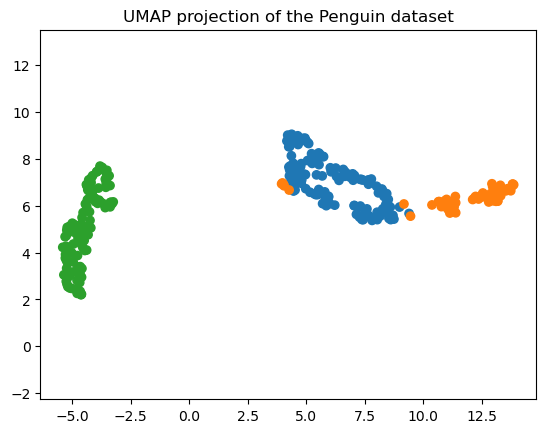

In [5]:
plt.scatter(
    embedding[:, 0], 
    embedding[:, 1], 
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'UMAP projection of the Penguin dataset', fontsize=12)

### Reference image
Here what we got for the image in the previous cell. According to your eye-ball test, did you get the expected results? Does your image look similar? Exactly the same?
<img src="../reports/figures/umap_penguins_42_reference.png" width=500 height=400 />


## It's Test Time

First let's see what happens if we run things from a clean notebook and evnironment!

### Default Better Principle: Test running clean notebooks
There were a bunch of **MISSING-STATE** and **VARIABLE-SCARCITY** bugs in this Notebook to start with. Did you fix them all? Try testing it now.
```
Kernel -> Restart & Run All
```

### Default Better Principle: Test run from a fresh environment
You could have used `pip install umap-learn` or `conda install -c conda-forge umap-learn` UMAP from the command line. This would lead to **MISSING-STATE** in your environment when you test run your work from your own machine. To check that you don't have state hiding in your environment that you didn't add to your `environment.yml` run the following:

```
conda deactivate
make delete_environment
make create_environment
conda activate easydata-tutorial
make update_environment
```
Then, finally, try the full Notebook run again:
```
Kernel -> Restart & Run All
```

**Fun Fact** Easydata has a built in `run_notebook` utility function. It's perfect for automating testing of notebook runs.

### Default Better Principle: Have unit tests and continuous integration (CI) tests

Easydata makes it easy for you to run your tests via `make test`. By default it locally runs all tests (slow and CI), and in CI, it only runs CI tests (so you can separate your fast/slow/necessarily local tests). 

Give it a go. `make test` now.

**Your Next Task**: Fix the failing test

Once your `make test` is working continue on to complete this challenge.

## Complete the challenge
Fingers crossed, now that things are tested from scratch, everything actually now works as expected. Let's find out. 


Run `make test_challenge` to check that you've completed the challenge and continue with your reproducibility quest.